# DSP Basics

## Signal: Sinusoidal Waves

In [ ]:
# Let's install libraries before we start our session today.
# !pip install scipy
!pip install plotly==4.1.1

First we will visualize three plots: cosine waves with different frequencies (i.e., 1, 2, 4 Hz). There are two parameters that you can control: sample_duration in seconds, and num_samples (the total number of samples). You can calculate the sampling frequency by dividing the number of samples by the sample duration; this means that the sampling rate denotes the number of samples per second.  

When we devide the interval into equal-distance segments, you need to be careful about the number of samples as you can see in this statement: np.linspace(0, sample_duration, num_samples+1). You need to add one more samples when creating equal-distance segments; and later you need to remove the last sample in order to keep the number of samples equal to num_samples, by using the statement: np.delete(time_sliced, -1, 0) (here, -1 means starting from the end of the array; 0 means that the first dimension -- in this case the array itself). 

In our example, we set the number of samples as 1024, which is large enough for high resolution plotting. We'll do sampling based on this high resolution signal (technically speaking this is "downsampling")

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 


np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 1 # in seconds 
num_samples = 1024 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 

# sampling at time t 
time_sliced = np.linspace(0, sample_duration, num_samples+1)
time_sliced = np.delete(time_sliced, -1, 0)  # -1 means the last column 

# instead of linspace, we can use arrange w/ (start, stop, interval)
# T = 10; t = np.arange(0, T, 1/Fs)
# N = len(t); f = np.arange(-Fs/2, Fs/2, Fs/N)
# numpy.arange([start, ]stop, [step, ]dtype=None)
# Return evenly spaced values within a given interval.

# generate x_fk
f1 = 1 # hz
f2 = 2 # hz
f3 = 4 # hz 

# Numpy's cos accep an input array in radian 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html 

# We'll create three cosine waves in differen frequencies: f1, f2, f3 
x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_f3 = np.cos(np.linspace(0, 2*np.pi*f3*sample_duration, num_samples+1))
 
x_f1 = np.delete(x_f1, -1, 0)
x_f2 = np.delete(x_f2, -1, 0)  
x_f3 = np.delete(x_f3, -1, 0)  


# Let's plot the figures 
fig = make_subplots(rows=3, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines',
                    name='Cos 2pi*{f}t'.format(f=f1)), row=1, col=1) 

fig.add_trace(go.Scatter(x=time_sliced, y=x_f2,
                    mode='lines',
                    name='Cos 2pi*{f}t'.format(f=f2)), row=2, col=1) 

fig.add_trace(go.Scatter(x=time_sliced, y=x_f3,
                    mode='lines',
                    name='Cos 2pi*{f}t'.format(f=f3)), row=3, col=1) 

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1)
fig.update_yaxes(title_text="Magnitude", row=3, col=1)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)

fig.show()



## Sampling Sinusoidal Waves 

Let's sample our high resolution sinusodial waves. We'll use the "resample" function from Pandas to test sampling. In our previous example, we plotted three waves: Cos 1, 2, 4 Hz. In the following code, we'll sample these signals at 5 Hz (meaning that we'll sample 5 points per second). Aftering putting these waves into a DataFrame object, we'll call "to_datetime" with unit="s" to make unix timestamps, which will create a temporal index for resampling. There could be other ways for doing this (please let us know if you know better ways). We can do sampling by calling "resample(rule='200ms')"(here rule = '200ms' means 5 Hz sampling rate). At the end of resample code you observe "first()" -- this returns the first element in the re-scampled interval. There is also "last()" function for getting the last element. For consistency, we'll get the first element in the following examples.

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 


np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 1 # seconds 
num_samples = 1024 # number of samples  == seconds
f_s = num_samples / sample_duration # sampling frequency 

# sampling at time t 
time_sliced = np.linspace(0, sample_duration, num_samples+1)  # end_point=False
time_sliced = np.delete(time_sliced, -1, 0)  # -1 means the last column 

# generate x_fk
f1 = 1 # hz
f2 = 2 # hz
f3 = 4 # hz 

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_f3 = np.cos(np.linspace(0, 2*np.pi*f3*sample_duration, num_samples+1))
 
x_f1 = np.delete(x_f1, -1, 0)
x_f2 = np.delete(x_f2, -1, 0)  
x_f3 = np.delete(x_f3, -1, 0)  


df = pd.DataFrame(data={'Time': time_sliced, 'x_f1': x_f1, 'x_f2': x_f2, 'x_f3': x_f3})
#df.resample('0.5').sum() 

df_new = df 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_new.index = pd.to_datetime(df['Time'], unit='s') # just like unix time stamp 
df_resampled = df_new.resample(rule='200ms').first() #resample by the generatet time
#df_resampled = df_new.resample(rule='200ms').last() #resample by the generatet time


fig = make_subplots(rows=3, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines',
                    name='Cos 2pi*{freq}t'.format(freq = f1)), row=1, col=1)
fig.add_trace(go.Scatter(x=df_resampled['Time'], y=df_resampled['x_f1'],
                    mode='markers', marker={'size': 10, 'color': 'black'},
                    name='Sampling at {freq}Hz'.format(freq = f1)), row=1, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f2,
                    mode='lines',
                    name='Cos 2pi*{freq}t'.format(freq = f2)), row=2, col=1)
fig.add_trace(go.Scatter(x=df_resampled['Time'], y=df_resampled['x_f2'],
                    mode='markers', marker={'size': 10, 'color': 'black'},
                    name='Sampling at {freq}Hz'.format(freq = f2)), row=2, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f3,
                    mode='lines',
                    name='Cos 2pi*{freq}t'.format(freq = f3)), row=3, col=1)
fig.add_trace(go.Scatter(x=df_resampled['Time'], y=df_resampled['x_f3'],
                    mode='markers', marker={'size': 10, 'color': 'black'},
                    name='Sampling at {freq}Hz'.format(freq = f3)), row=3, col=1)

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1)
fig.update_yaxes(title_text="Magnitude", row=3, col=1)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)

fig.show()
 


## Nyquist Sampling Rate

In the class, we learned that the sampling rate should be greater than two times the bandwidth. For example, if it's a 4 Hz cosine wave, we need to sample at least at 8 Hz. Let's take a look at the following example to see why that's the case. We'll vary the sampling rates and check whether the sampled signals look similar to the original signal. What happens if the sampling rate is below 8 Hz in the following example? 

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 


np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 1 # seconds 
num_samples = 1024 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 

# sampling at time t 
time_sliced = np.linspace(0, sample_duration, num_samples+1)
time_sliced = np.delete(time_sliced, -1, 0)  # -1 means the last column 

# generate x_fk
f1 = 1 # hz
f2 = 2 # hz
f3 = 4 # hz 

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_f3 = np.cos(np.linspace(0, 2*np.pi*f3*sample_duration, num_samples+1))

x_f1 = np.delete(x_f1, -1, 0)
x_f2 = np.delete(x_f2, -1, 0)  
x_f3 = np.delete(x_f3, -1, 0)  


df = pd.DataFrame(data={'Time': time_sliced, 'x_f1': x_f1, 'x_f2': x_f2, 'x_f3': x_f3})

#df.resample('0.5').sum() 

df_new = df 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

df_new.index = pd.to_datetime(df['Time'], unit='s') # just like unix time stamp 
df_resampled_2hz = df_new.resample(rule='500ms').first()  
df_resampled_4hz = df_new.resample(rule='250ms').first()  
df_resampled_8hz = df_new.resample(rule='125ms').first()  
df_resampled_16hz = df_new.resample(rule='62.5ms').first() 

 

fig = make_subplots(rows=4, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x=time_sliced, y=x_f3,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*4t'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_resampled_2hz['Time'], y=df_resampled_2hz['x_f3'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 2Hz'), row=1, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f3,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*4t'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_resampled_4hz['Time'], y=df_resampled_4hz['x_f3'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 4Hz'), row=2, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f3,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*4t'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_resampled_8hz['Time'], y=df_resampled_8hz['x_f3'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 8Hz'), row=3, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f3,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*4t'), row=4, col=1)
fig.add_trace(go.Scatter(x=df_resampled_16hz['Time'], y=df_resampled_16hz['x_f3'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 16Hz'), row=4, col=1)

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1)
fig.update_yaxes(title_text="Magnitude", row=3, col=1)
fig.update_yaxes(title_text="Magnitude", row=4, col=1)
fig.update_xaxes(title_text="Time (s)", row=4, col=1)

fig.show()
 

## Aliasing 
Let's visualize a 20 Hz cosine wave, and then sample the signal at different rates: 8, 16, 32, 40 Hz. Interestingly, when sampled at low rates (i.e., 8, 16 Hz), the resulting sampled signals looked very much different from the orignal signal (i.e., 20 Hz cosine wave); these signals appear to be 4 Hz -- indeed, these signals are aliases of the orignal signal. 

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 


np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 1 # seconds 
num_samples = 1024 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 

# sampling at time t 
time_sliced = np.linspace(0, sample_duration, num_samples+1)
time_sliced = np.delete(time_sliced, -1, 0)  # -1 means the last column 

# generate x_fk
f1 = 20 # hz # 그래프 빨간선

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f1 = np.delete(x_f1, -1, 0)

df = pd.DataFrame(data={'Time': time_sliced, 'x_f1': x_f1})
 
df_new = df 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

df_new.index = pd.to_datetime(df['Time'], unit='s') # just like unix time stamp 
df_resampled_8hz = df_new.resample(rule='125ms').first()  
df_resampled_16hz = df_new.resample(rule='62.5ms').first() 
df_resampled_32hz = df_new.resample(rule='31.25ms').first() 
df_resampled_40hz = df_new.resample(rule='25ms').first()    # 20hz의 2배 


fig = make_subplots(rows=4, cols=1, start_cell="top-left")

# w/ spline interpolation 
fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*20t'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_resampled_8hz['Time'], y=df_resampled_8hz['x_f1'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 8Hz'), row=1, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*20t'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_resampled_16hz['Time'], y=df_resampled_16hz['x_f1'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 16Hz'), row=2, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*20t'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_resampled_32hz['Time'], y=df_resampled_32hz['x_f1'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 32Hz'), row=3, col=1)

fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines', marker={'color': 'red'},
                    name='Cos 2pi*20t'), row=4, col=1)
fig.add_trace(go.Scatter(x=df_resampled_40hz['Time'], y=df_resampled_40hz['x_f1'],
                    mode='lines+markers', line_shape='spline', marker={'size': 10, 'color': 'blue'},
                    name='Sampling at 40Hz'), row=4, col=1)

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1)
fig.update_yaxes(title_text="Magnitude", row=3, col=1)
fig.update_yaxes(title_text="Magnitude", row=4, col=1)

fig.update_xaxes(title_text="Time (s)", row=4, col=1)

import numpy as np
import plotly.express as px
import pandas as pd 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots fig.show()

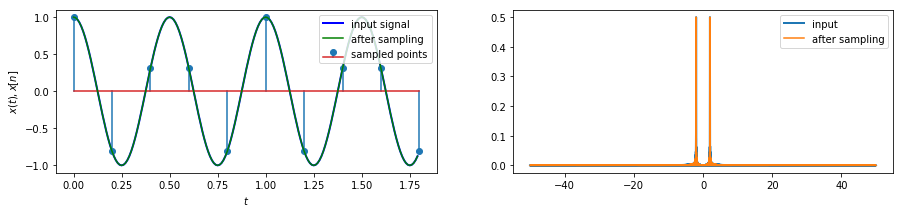

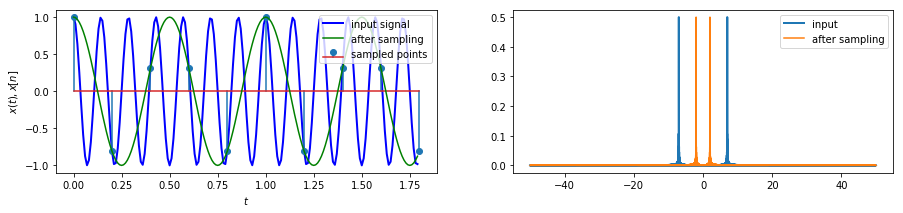

In [ ]:
# Example: https://dspillustrations.com/pages/posts/misc/aliasing-and-anti-aliasing-filter.html

import numpy as np
import matplotlib.pyplot as plt 


Fs = 5      # the sampling frequency
F_plot = 100  # the frequency used for plotting the time-continuous curves
T = 2       # the time-span we'll cover
t = np.arange(0, T, 1/Fs)  # the sample times
t_plot = np.arange(0, t.max(), 1/F_plot)  # time instants for plotting


def showAlias(f1):
    f2 = min(f1, Fs-f1)  # determine the alias frequency
    xt1 = lambda t: np.cos(2*np.pi*f1*t) # create both sine-functions
    xt2 = lambda t: np.cos(2*np.pi*f2*t)
    
    # plot the signals
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    plt.plot(t_plot, xt1(t_plot), 'b-', lw=2, label='input signal')
    plt.stem(t, xt1(t), label='sampled points')
    plt.plot(t_plot, xt2(t_plot), 'g-', label='after sampling')
    plt.xlabel('$t$'); plt.ylabel('$x(t), x[n]$')
   # plt.legend(loc='best')
    plt.legend(loc='upper right')
    #plt.show()
    
    # plot the spectrum of the signals
    t_freq = np.arange(0, 20*T, 1/F_plot) 
    x1 = xt1(t_freq)
    x2 = xt2(t_freq)
    X1 = np.fft.fftshift(np.fft.fft(x1, 8*len(x1))) / len(x1)
    X2 = np.fft.fftshift(np.fft.fft(x2, 8*len(x1))) / len(x2)
    f = np.linspace(-F_plot/2, F_plot/2, len(X1), endpoint=False)
    plt.subplot(122)
    plt.plot(f, abs(X1), lw=2, label='input')
    plt.plot(f, abs(X2), label='after sampling')
    
    #plt.legend(loc='best')
    plt.legend(loc='upper right')
    plt.show()
    

showAlias(2)
showAlias(7)    

## Mini-exercise #1
So far we have tested a cosine wave. Please generate a high frequency sine wave: 100 Hz. Test how different sampling frequencies affect the results: 20 Hz, 50 Hz, 100 Hz, 150 Hz. Vary the sampling rates to find out when aliasing happens. 

<source src=data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAA5d3m1kYXQAAAKuBgX//6rcRem95tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQyIHIyMzg5IDk1NmM4ZDggLSBILjI2NC9NUEVHLTQgQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE0IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcveDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVmPTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9va2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuMjUgYXE9MToxLjAwAIAAAGPLZYiEABP//vexj4FNyAANlzqKeh/hFbH0kFF6sdmgZOoAAAMAAAMAAAMAARMId144fx038PgAXg4u4fpT5kI4V1J9PjmcmhyjzT09pNeOi57t1kKMO4VA6eYAhf0O+DgSfXcZTo1GZHdxIGafg9Bwis0bC9cy0LohaMxWt4zWeaac4mDQ0ZQQu5cy/z4/wqqx0bTdpQboPML6YE3Z0mPRgPT7DJxgNEsT6rwZDgy6x2nkibSgc7EjOSTM2642vcXSoWCDHMLoUHy1HVAsccd4B6oP1bydm449w/KQs2g9cPXzVHIU0rDhe++dvDFGtyrpwtHBYX5Wa6b2RxU2BcB7pejI6QwKLQ2UymRqZJxSLIRr8xC+9GzOnjpUR0csRTh1D3P9BUUFu5u3AvAaopGxo/+yCvqzU2cqzKBU1JAst0KfJCOtwUbf+ZOJpmBuVdXumxTvYbCfQaFvZj7Vz2qt5CwV+1eKqcZ29IK9QwvjLyH7xpRoCC9bXx5FwYNdsr1pVUgDXTXGkV2cacYWQ5gXqHK5SffTRez3WuCbBLle1DT3c2S46zb67E3iS632u6fYCTMWEN5CySYhtpKpy59VW9YWepZjxUKJNgWnByaj6sqIa4EePsCMpdsMOL8xpDmguNJcuJIm4Dczaxcn5eKFvR6IGsF9JKhJX2UBKHw9nohJ0D+gl1XnAFXjzaqrEMyDyBJIF8C1eWTmfFsV7a8MzMNcxGB9+3Uwef3D0QOOGUiqGlSstxZBGnxwB3LjeIugYSxfAUAoE1ZFD/UPDCLhAFA1IwwKL/0d6RyleM82AwPaPCkPETSIT67tNf1Dmt/ooCQsS2bF73T66GbncyGlZmRkxpiwXnuszaPS0GTibnailXVQe0lgO6tPweJ4oPm5LzRjuR2uWuYbkWGeF1SnQ3vKzN+9GWLWhNV1wNLPRjvLn0m6bBpxEKNJi0LBdPxZt9zVYE5LnLjkHkFSwR/szUbqsEdikYckDpxz79vHmYmt+iIYsZLpOwlat0g3q58eMts4A2BnjBjz6Z7ptE3+vR92wUPiZ3ArJzdK5JV/14e6uDTKETVA9BhaJ6bfNqawf/x2ZgfbXkjpN0Vn6qL8EFgTJ1eZL8HEdeJ4N1MVNPBLR/3LRFdI1J8PFfIteaQplB3yN7st1Zpy5uyAW0i9iBk0Zqza1JuUdo5GQDvGorP2/ejhnOc1kxFjFKr4jHgRHu8VbjvuqXU8MfLOfDCCqOv5Kr6rcZVgV45SwfQV5GZFByG23YGUpK+zGX7qvmN3UHl5liyF+UHsXyCzdCeucZz8uWWO7JGK7f+KsraagJ/w3Tqot/Clx32G7PlwDqHiL5Pl2u6njUl0AaXlPGZoHSopyIYtfiqtw5aCefRxN+rGVI7onnMwT7w/ziUntAj9AxSmfaGoPMe8y8eF+8dPhUJT4LyGLwEgPULZjNh+utg9xb98llpaLl02vlC9nAVrlHYKh8FS5ze454a8lIuSETyAyruOMzH8nW631rX7CpO2R9I4U46X52/Xjhj/9mFipojbXLmfLolhLOYvXGoVWDooePHOP20g3R7F4cLHkf3CXACtDPdLVIiM6+62NXJ8dr/VvlCAfJaIyDLCKB2hwSlxm5bcrgb1l+YmXlUDBmQEHFZp7It67/Ew23QjedzaMoxonNgqMgVwG8+BeNPo9CZ9M0gopOJA8fieYExPsjLxNfVMLbZgSTbf/sjCi3Lw7YcC7+KTOhShxNkdLNGO8LkdOE/2DtU5Twu2tizQErEY0khcuKPOLfM318QLVG0Yyi0Ccf//Xd7MMQW905UER5ZQtVJyJgVK33Gx3QosO2StPecKlGSuXjp2wngJjhqZhZOSztmwAIwPWtjf7OM/m/2Wrate8JLsYQZmPmOOgquqc7ekrXVVPA++nz3q7w5LJng23YWvv4DMn5NsbrZTo5kN1INb9xUOuVC5ZUJD+uouchTXC9fPzZhtF+fAu/qwuSL66m+xoJ/uzJ5xDHZ8pgFpRBSl3Mk3RMhCKtNJnBgZUvJ5R491JcpLXzZlysReGZmfR/+pB4e312rzTQy34jcmiJf/PUe4oVwFzgfLeo/mwqoLqGWHhfk27WdlRtkPt+k9FtN4envf6BwGHVDym1DIoulmI8TIZAelw3qfJ8PTAig1P6XFamtV4ncSibKnroSjR1N+dTIOGpsJBfoAYU+Oj3nHdW7AouZVSFwQJJb1sLfSqKXUaYeH+0BR/Um1AG6B4zY22dfklXf0KC7qeOre4Dw1B3XZb9CV5aisuzbtuHLQTz6GTSlYypHdE85mCfeH1Lbi5pcne7alUqEG8C8p2C3LWBIPM1PUzQLKGX58Spm5T8R7XigHAVzrHfqPRr6RikGPPbyl7s6FyQieQG4fQjuWbLNPY5skWo6Kv/m5Mt2h3+avBeZWS3/1wVH08mzZhg6gUnDZtskYk9qDhVBj4znIASTVjifjs1WzllAuFNujYULeJNShPK1echUr5jJVqFcFKdTM++hV7Dr+R6X7/COhlfgW/f/Gr1LdCzUBw4Lbmjyvp5a2YEkDny1kIuict+knfkKiNl2F3eojrkD22ym4jlk8p8U1dQ1Bh7z2x2QldiwdADBPGxv82Eiyg2bH5FLdNEehS4tQeLtSQGjsw1IzZMEQTMyXGxkVM5nQZu3jViW1lfVPJ9w5u6vMkzdxFm7OSSLMgqsO01cdIDomI6wIakwGsuJnP2/wijNUPinq/WuUv98XxDmKFDRJXhzkbohJR9m8HCMWzNIoLje+EFxNMS6K1FwRnYMnSsWjwYboHxdHRih8P8RVXwoaApCMbi8ogAzjZvw+fUAqVRrlEB/LGVFKVw8mFdLLZJIbQRXG5ibnq1RtABxFVfChnzRxQGC6mLTXbAETjU8zfdO76ZST3kNFi8WqJyy1mRaKO3Ij1QA7dpMG+XF67TAenaIt51pCCadjbNBbGamBmc5yQibIAGvxqLwa4Sstt+BsRPN8Ees4Mnw+uKePauuQ+p2sJIsOi92A5vz0K+CGjVYcCw4oa/////whXo6MhEx2YMsKvXcpMSNoXYjHjesRbIDCVGax1oVY3ViQMRt5gnvVBgczaxyZh9vW8s2ofbgYwiykZZLDPsxVoUiFt/adhW0UoyDgtltYoi3pcu6Tdb0+DHT6VuJwOOgF/bNHi0yei0eL//vo068Wh7usNwqbHbtVXRBdbLT2iYU8GtSKqXatu5/sqSYeKRTVyCzBXDWfAE9PPq4x2WrKF6FTvr2JfLwx7+24Z7XxhFRRufvl2UG4PFSvHX998tK+WJcpo3H/wcna/MTKJG+WTqsOhX0hY4OO/B5OO/giVSWNeEql0VF0JUpwO//S0oDst91HjhbQV2m0efhx0cVaAF93OK/jqqeusiiYgjYoHHN4d3eNFchexUelq3QkdoWjPUSoLG9XDVF20Xcsq2yePhS3Ku0DXGnUTRlwydO0mo0WiuWoC0I0BA0sKWqyeuTcm8KzufmE/2d5I9nfn/7N6zgOpPskyRvQetv2wbE+6rrJ566YXvy8z584OxFEmPIw5aIX743JGJnb49ZVnEA1wbmjc/F3N8yxBqSWyqsV8GGh9Gcltww/MnOlJOYTMhCeLPBvjF2VpF4huGILKaURF6zretc9aPKvG4+DOvnDZQxvXUfCtaamFGwYLBWQrb8IH8/HSRovOc3SmXfS0O9WBZoeX3/DKvuoHXwNsrjvRhs8FPqDfjEdDJVNfoBFHnZN/ioGVI0PBilfYENSgq0co6gGO7TenWUFcC9i8t0Un7I2L13mS4s4EDU2I+LjAlqC2ItXC0VsE64n87rpVutLLRBhguxoD7d0i6GEojnpkEC5WRvDpY8aeXy5rQ+klF2GyvhH/asJWdC1LNgX5vUT9JmcEfDq0n/ywQnHDFYzIcpMswy0A/fDymjSvd98F6XErzv4n8WBBm27DpIhTNtVvg2wFL4v5OKxX8hFx+iZhDmfkMJlhXwKoyLKoW4G/915wVtZ+MfBT7EAHee7Eo+2FAjf/7pdGDKfYlXIQCEjzGfEw3DvKyf//LGsM+jVq8EsDp7K//EElq1gNQQoFuRE2EpFUKfdTYW8qmN0Itbi0wCHA09/h0DdmJ4W4FDEsh9jpXOiwVI9f5Ed5ljTRZHuE87vh6okev1TcTZNU3JETNbDCvtFVewt4EcY/+udGi2xX3c8WQxcfmO9VZ9skFjNhqisa9UUO1bczGym1A1+QKBN675U5/gumPCjxDOhX4Vc++VFUBnyC9E4JRnyWrGUvRktw5whQbg8VZBxd+SdK+WJcOI3H/wcna/MTKJG+aHZBOGfcZvG2RsA3gNKSZiZSKgi3MvEXXYz3kcFl9z5rzR0t7snWhd/cVm8zlLFWgBfdziv46qneSgQO4RsUDjm8O7ukfeQvYqPS1boSO0LRnqkqJTLaaKi7aLuWVbZPHwWn52RWDTDIGmm9u/n1nwplnyRTEEgq017pl/LHmdIbgx/tHZDI4TZjrTkjLE6sXazMSJI8vJ4b+Sfxp1AjEzt8esqziAa4S6zROP0F8yxBqSWyqt9jzUT6KYy7gaGZDZEjAg2E+Xn1C9fogtYx2kXFw8OXIlV92tXcGLZSEDTeer0rCiAqilzznkFKDE/ic8T92HG74P6PUkaL0kqa1DpMWXHMHKeXnnIkmfz168hxnnsYmfy0KEM92olmZAIo87Jv8VAypGiQO/E3GNu7FfHKOoBjvb3I/+lh4vc17dFJ+yNi9d5kuLOBQb6BkxdC3Fya797UY3kP+X78110q3eLPRBhguxoD7d0gO+/QCB9aUjbis6t41tve764NxlujK4eOx2FEmmfOBfykz+bvS9UQU2ikq7dMrn3C5Mj6cmZO704sex/SPuAdZd0rSVp0vAIEkFes6hwv7Saq/OMae7fvAg00nNYmti1HIIBw+OP3mZ/zGhtjjmNI+3MbQb1QOBxvSHDWhCWYVyJbP72+jia1bIM7uuFtkdEXqkm08iphIpjSlz8xXe5a6L8rDlZKq9PDxy1nr1JQNBxkFN2hpDRaGd7Z8gI0f1ztlkhVzKGWqw+Dtug3rRosct7vMRYo/JkNZ4Q9vN6maVJUixta61DCNmVHlwvSNBXsn/i6870ymYoNqOeXnL8TXT9XAc17YROM0RNbQ9isIciIxIhIhbCs6UNfvqLgTcZTZU76+YifFzfHA420Q8bTySFvFtcroO9/Q6UCtmGzJlqtr2UNtxrguuh7RdgxfmthJ1Le371f9QqMX3iTKZiDlO7//qcCti5EifJKEgUbJZLV66NxCuCZYGKxoTBHVy6cVrocVCLgnuzvKIx2B5MQ4WBopgRV7bXzrj4iwyCSX9Kmdfct6T2/Llu2nkp0sBeNDF4A/AoWyZzsGgLOUgE+sVgGD1tmqcFloN6Zi/Db6qhhS2vDFzuSblEgJz2tacWwXHZHBP9rCGgY2eDmqeFgMTkKMlcunjN4iiJ3vvFITUtbTdLfEsmk3XA6fF20SOvc9ZFzD2ptjELalguUfFOtH4bwgt53ZgNQrkB8AwWFmOUFu+Zt3P9DjRYWE299xbp9ijUH5Eu/WGYvdNidEEVc8gcUL0TkRkFOohhFhgsofl8cPZ/EAfIyKt0OqDH/lVPVF2lU1y7CeoXqDp8U6c2sfvyL55wEgo9ZzpFXjfeVmgYwjuhd7vHAuMThAr4SpOWSoODjFTht2baRcdLritiZK7TxZTOKErpuMKnGBmxo+Vpt3vfNw4QE6do5FXWazrr0nSqev//TERvVoWan9qnzRNjKrcfc2nNhL9KDZCLXM9tEdz1GebWBHDcmNg0Gy2ReVV1328mwqlIA3pI6UbUO2xeWfRDEMbkT+P8I+KUPj4spWTs+qABTucxAJ7zRcek7Qr/hPJrbYuy922TLuRx7blLOp8mxiAauPHU61KoIbkzYV0k6h2O3/6xrqhl9xOyYhvTHkCg+72nN/NSgBO9V8ZJHT0kmhPTRFRwWk3/2fFb1Pyp7RMVCPp1AYHp6u8RLQAcNbtBC6vgftmn6MKfYoC56jbDfcr9CfQfEoLzgxMRjLwAcbjh4jH8dRAcQQJwwH4rHzW9LH5JE24F124HHo6+LWGFrIV5eT1fhA+WTzu6OHjtP1tngPVcxs+7A9pKmDpqFYM94GL7Ev/3GJfhBCeoG6UZFTkPrCRlaVAcyJ+42oDIgCLS/gVlWCuunichwS/9k6lBH9A5AU4RWHR4kmFLEOTFeYYuTnQLro9yzG4MIF1t7ikUtc4ZOBJVq92w/GL8fSjUoJh7NepitLQsFKaHvj0haj3GBLye7J7tYG6tLZmazqCAlv69mWv8x5gd8xOSBoaGuI/RuUjyayWFq/0Ut1UFW4T9LP0m4kPP791h8dRzZ5yUxwKvLe4PHdoRSD5lo/ojt5IFOWJEzA/k/tzO9iMp8TpBFulFysyTUT3jBCPJM9cFu+zMkf+w5UFWnKiKfww9tVWTVVp+GjPQXxB2NXg0QkSUJ4EQAUVQuHovgngX/fjyOrFJIOCuyIsR9vvFfTgcV//S5Q9dG/Sn9/utHmX6RYfDpUDTR/VSu9HzMnNR3pCdQaBV9pGNt6W5dBlCmJDMrMALug+/kv+LPrkbYWI8kJpa3zj+UnkKGWkb3I3gUaKgjyyFF+ETs4hOvf4sx2Mybls+ZEfN613f4A2IfTcMEatk///WHIydNyY8Dk+O6qLc1mm9eurqlJtKaDPLZaNiHo994EI26VNSFpIoQFPETlUE7MFRZL42gEZC+NKTHMITpSbEs/ELzkTUEjv6F+igI77Yz5qYiSZKGl/oayR13fXzaUUL474CUom0z1qlSsqW25RQ+Atb2GMuvXG1bJJUV1htyFB7XTDTiefY0SIdutALMbbtN/lZlaYknAma4zS426rejHJE3IF8ncsG6O/UH3D6a4wo7izBxQh3PhoAGDGkQmWmHZid4+Gov0asEFzTMHLaeR3mxw70WOoxLyyIbb5NWU16fY570oePA1kteJSrHhp6P2Y6blsg6We3s1/XCy6OaF3KsIRL4qVDYBba1/doN+mrpoBATSimkHh3XwYqPtQXi0yA/AnN+gGR3v2mKZ7n/aEMQZXhTg2ZeqTB7SdtHY/D9GgkTO3QnfxIlamaiKu+3CSuOSfFHBHekqt6b2ByuTgkZ7VjMTphZzTzLcIJOJMLgAA9E5VfUQQa1XQwkx+8ez6Q9D3YoINFgw6CTGirX2XCGnOSya3l5J0HAnFcS0zU3Bbfk067sU6kGVHwLGUGK9oBGFuHLj9bViY1mAMu9mnwlqbSx5XoV7KrmYwm7rtXpD2Of/AEOKC/n0SZvmDl4grQ9ijGcz2Yr9Ls8leRt+i+Lu8ctF9LC7axX91oaCu0fOtdN4n8BOsZ53PAf5TZsud/KlkcNGoKBmBL1/YNPt6fNXKt9jQd77YNaKQIQXoITosvymZeRqDQK8FLjwpvC+uOQfwkiVcWpPzCpAL47En0u9lLfVuDnjZQRwNKAkZpuzmyZGEyuFX3TpknvsdS1ITeHIkXzaH1m2AmnRdW/GIUtPHiisgaJDPVCxkWMBQBvpPPtXLEl687K7P/4e787LScsXrTvhhd+9/IBe3pm5/Ky6bTpLbDa8MVayysmc2/7OqPg3ylFtVj9pSPDI0QlywnIate6nvagsk0MkyNX72Ey0PP/loYGslzBKtktr8Icy6I3u7MbqPZrOmmMrftaNkhAlkdGX2G1Q4xyhxRmHoszu/vvSKGBCEjbfiNAH5XBzRIR6G5jqGIs/Y95RS2lSTTLrFofTS+1YbeG1qTG7r9FNzsG+Kd9DfAAMgp9ss1AvXnwnZeAQsi0SMlsL9wRStHV9onClx0u8+wMcpf5dQ0vAJxwK72DyAZ6xjRIcWF9JMazFJuS4x5sJMkICx3fJwvaA6yLVTxHUFCLZqT8e7f6RrhZs6mwV0KxyLK5DV/BprYzLALL6TwKFWAqRuT/fH2bsyXFe4H4c1tnUFZHWOciSdmnuHPjcCR37OjBQY8D540+fDdul0pUMmS3CoRscpGG9y4IWldIykp7Lfug+jBQYcWs65TRazTh0cvZZy00qJ0k0972gcM1lcV8fIrjZsZMe+SYfqSfOFAOBthVp17pVmlKmSJ79OmEflZZNGfKpWLsNxAbAL6vsl8NO9rX4YVZIgOTHdmHD56ANyyN87E3E86/FaQgGLDtZLmEFblddfst7r7URHY34Vb6szOPxuTjAYdCvhfIwmeFP8BA0VXYzYYr8Ou5vAi05pOPeUUtiC2iAqqknu34uJV5JtQV4B4yAXuPviiQC+m+XwkebgoPsgttnmuZc1dborO56tFRm3j5DNXe9igjBvbwaW26q5ZYhEEjrqtX5ILOP9TK7a8tPVxnFdtrDEsxjuOereJIwU7iN/snPrdm5bWYxOfnvl9sggpr1IVYOlPWCj4gA1E8emZfsG955qOb6oE4iPcrarM7wn0Y7xnFh78edvsusq24WN9LheABxVlP4VFviFdemciNAnugSL+cA05kOMAEBGN667W0ldCm/NcQg8XPIku0yo3vGJWGx5C0wOAUZxuW3PHY5sP6Q4hy+uIufA6oGx2YU/yjN51p2ZifMQdsX+BIPcDU+W8S0mIAMEZbh250pag00JrGy0WWynegko8xEM9UEhK+OFKVn/yywzOxaI0BD9p75WrJiOo4OwHnOH24T+snFFgGTL7CiROL4jtif+x3I91IMnE7EwG8ysdxxnPg+AlF0A94u0toKYUpHmmwa6YfNrXr3kB1S55zSx0U7lrN6Kj60EXpIrpJfLM6vuo2sQw5caiqvqLfiwmRO0TNWmJBfisw1ek2+h9OHBz0pgdVh/tBDJPt6VqjidtoQNGZ8YJTbMPO+6C8171wR8bNx6ZF7xF520JR1jMH8Gj+zZZT41qUdS6PsWtZciKsGCz7BPgATels23wwf4LrYk8aK20oGvL36oNq698ZVAhh7F9jd5PcEpJTNqQEtH9Xo3+Kp9pri3uZL/s6HnljJZMweW760k/7hUDQj2CjJFjsCRBlBwbt2WuT4zeKry7wuN8FRUB36GLrUtnghxcFIZmjnRDGitQ3jqALa5dRX5qMtuIeIHBHmqr9QJdetkssU+s4etqgZ7Ux3Y4bFOdD8mEtrigUwq5WD4PufXXoPXYSYsxTEapmzPFDkiCZtzNUjsWwXg4n+Az5p1S4jyD5F0/s5chYCd+O9PIDZ17tkz3Smm8qNVLruMUGhHLPPWFkUkiCyj/i/MEeym5d5JV+HJkcTXBy5nUQQSWbDuWVl3aNBxZ358l/YU4k3GePe2qjf8IPSK30lLAV+vchhzXAcACd6Io4UQRk5NqgCTEKh38lQ27SgEiesGv613k5KKQdWyKCRbKVkpyFoFjJjZzc0wDYW4DLe8Nny7Yi5figQ0Qtvxn6i9NMuP3/uwp0/T58zEGBgRyVWKkO0XkucOvEo36oK5Z85PUYMAGcU+p9SV7OMX9mfOF2vbyuXfGLtayI1bk5cLPvPmWjtOvIy+O7dOXF5O+/n2Phr1cMfbhFOV5x0373paUVGwUkRu9FIbVGNmn9s2auq6X5hV8SFZ3Jgf6kzCYWTK8qSDsl+loukqFUT6T3vI2xG+5R84Hhk9Kh/Em81ejBPO73T5yBXytRY4Pf9WPybQo6/fUTQm0Zr9MU0L9JoukP7ndL/Z7B38vtS5KIYa6oZVAB49ZPLK+REmu2u1lmFCJ9TufiZlCVOpEkWKDh6wujSFluOM4rQiVcBjKkoswM7QtbyDJWB8fP7nLte3xgXSt802PnfVBofdzFhyooKnn1BWIe7mNc7tuCL6zZUoaWUv8p0VMKAUZPJjDYHCzH+00dTqXp32Mjtc1C7CoR8tm8DjxraVVRzunOo5JAjv1bdeLjo5L19q/J0Jk177Wk3l4X3lhEtFA9UAOXlldzQrhWMUAukx3VcQutrdMsVSDXbkOb3gS+V4bzTamdUGVtRbgYJSknOgdp0FMglxkaByQnG8k37x5KZIxzVWZA5K+YP+g3Vcaman8SgSd8kRL8pcp6za9U1twAiXW/9A2JWvRybnsWF9nrZyCShLSU0HMasn8SNoVMCBwVba1/g0L6x9eyq8UhCA4muJWP9H9QP5atG7KjpSTxyYAbCiwU58EID2/SP+FatjPI/UxBKMbaBBK7weWjFmL2ySWuANrLvcawQviO28wWwqACG03iBsmHtHu0CAeX6/yfw35wDqqP4Vnlk/ce0CvaGo5YiieZLTLDg6o15cJe5YhaeIBv//82IVCw/Vc2n7Mwrx2p8KkJlWREUPu3BMYgX4epkgFNOJ+qV3OrjNhOf2QfdwE7HOqvDueV9mqWWA7bFKRCFztT/kdvNoEWVtu7E/UitdZCCkJ7dVIE7DHPft1nsXrs7yd1ZnDcdZL5rd1pEvCFfhDTfJ5XDEv5gWXkLBPZ62Rrzus/7fp0+Jq1nyqLwFuII4pLHo4WSLuMP7ToBlYNHMNudPsdPqfXeUK/vbNp8Xu17HNJZ9wuvnPyUNfFO3Mf1P/LI/HLwPrpaCabCRsGP3Dw7H5KQj6uosaXv1Mf1+G8ls90VRU/FzPnwQ/70HNL1RTOOwxgBF4w4YMXTwNvyr9nvD+HdUphjxJ9QK7Lfbxx4gN0Wr6WaJuILrWpNVm/6rtz6+Y48T/LYIgDh5GpQJFDyHd8U7AzbSx3ziu0YZs+NS+uxc111pzQ6FpXTWYkyoj7kiw/nBokqm++vsnswp8L2GTNpEjsLJGfN8adAjSgf3YGHdQ7ByC35vHeds/1Ld/fiXxD9St96cABOV3NaYlAFieRXN/sTnn5M8djoj2ycGgvuT9RX64D2eC2iE/vQkFpoCznr1EOv4Zk0e4/4qkqQpl4dUJeH2m6iTkptJZVfgqrsIRKVp0RjMF3uemOyoBMR+QqH5aLBc7I68waCXAZ5vI3IZV42vsh4Zrw0dkO++pOcbY7TcKEQfB+p9sySo8heFz/DwEUKEpAbpttNYFzKY4pS0GgPbGTapbnURCwXl1dzpANPLGw582Qdns9rsr1+yrUhpVPZCyAeb38GLAWHky50oF0kOUO3Yv0SBubpl50wdDERm5BpYh3/SrS7aXVqcI/cwiN3z+H7Cn38RySLylvfKE0gbNkiUGshhvQSJJL6oD/6JgeybZ8t55b+wofWsQleS9HUaMr9DZxJwYS5eqQR4TNjGCVlVXcbdB/V0ITsVGnRklNZbBz6Fx+fH/J9sUhUG8sKgw+miwV53Jc6/t9MXmNshIW3Rz7rXvR+G5x6txjc1TyakzCRasJd9BAsSGg+c3yd3e7JdeKeoK9fGzB9cl+8PtSUHEHYN1ARleewfFhoqit27Wtv/JK74Z5GHTg2liVhDpYSan0BEdb9+Zgt4uUOcABgZ7WUOHaklNPYCtwY2nyVPG0BQukkKXELEGsxap8a4bRvVG2ruvzDXIswkLKcL83I9ThxrIWRi4G320LzfbbDAt5P1vAY8Q3C+5xp/aixw0r33bxAGvj0hFtYfUxoo3P0NRQAYpae4hoLT4qiF+F06Tk8BxJf5L/ad/oqxUDBYZw9kCOQ/tRY4ZyctaWmfKD9CD99071EIvW3yHqE7g0l7nNQudCQRmq5AiznsOxaqIJgZ6PiZSV6mYdwxEmwV+kyORNCvh/n3JlwolsOaGXP9Q0BeXYgpcvMCpyn5dqcrNzInONCTHlIZHlG+skzc4tQoRr6uG4MMNkgf/1n9xtC1keUABB756kfBlwVoalnJg/xvRi3nwU/Jyn60ydx3I9XBuFzqnMJBFozSRgM32CJhzPV4YqU4p5gxj/xzZczwXuHAwkYEYXYAcJrrv50pnPlQavSEuB/q5D93ZHzwzp2CR/GP8JpM8l6m6mhKYz+1qWSZgzuu53X5cuiAsjLRiQa3YPSuPJh9OTLGmyG5O3TWEpwHfZTp2vWJVcxQ6UOX6uVd4lEsPKeu9r+53qW9Ft7QtgX+ekvi9pp//TQ3yanOhaarkFbETAuI1jXDL9RPBL0eOmELeQ85aAW8mlLC23zKPheKa8s02SRA5llId/lcfnCYHPiD9R8H06ECuDAL3eO+l4ZN/0lxp5iuB8MzrN1/cNUZRIky/wEU3EQbf+v8zeSVLFYM+eQMGDkfifNlNv+4CbZI+cJhqorT+EvK27CbBATBVk6794sFYgPLvrGlWKld9BzsKxEqj+x83jseLQoQ/oy82yP+8tOzfTFGyy7yqzuMWLZaRUr/GWc8qkqW9SUSr2f/Z216YvTzI/RMnn+K7FlFo6Csp7PbWlQh7hfqAY0K58F7PpHDwqmnu83wvLxog0NBBB+P6kc/EiE2oRcdN+FBiOVgTLnzlrF+f0qvfDjo3A4vWZR2VsSNfTq+MsS3R67FedeBeXRXQG6nJaHvrE86YDzP8hLWaNUh5sZpcogr2UoTt7KbF4BpHf+MhT9bassIxx1FO96XxlXo6Ngd7cGl0TR6mdob3pzbetqF1IXyC5bmsMpTJsjbi9T427GAxoAXy2rNZ8AuFVqwKsjG6bQQddqVNcdf/Pzqrq4TX9KAy/c/MUc1DHkPbzhf+aKBdi2JU2t3q6Lv5DPjKruPMRRiV8qBpXW6N5ytD5N9ylYbEvF015hnXcJSJtUkvKtctvod5Y/7uYk4X4d9v8RiJ4wrRLxMiATh+l5htu746PQcCnzF5uLzyl1bON9wJrN5j11niHZcl837wEYhClO2QOT7SEaeuM+ytH87WTJHIQEgSZlyZL5r0aQrPneO4Xfg6XEQMyZvhMuxKpTbt9zvX9IFa9px8jC/9dLir/0ePKBYX6BLQDl8v77Lz998vVYaeMmDiG1JQvh2qa3bA8ASZd7Ml+nts+YWf6RsKsmbEqOut0HoY4P//ga3jwkSpeAdGVMyKpvWr8+RT2kGHQtG7pHllo3PkBlbcXc2T5tbzpJaEdqLeeooTTOpGLAkVnmDpRQNtrZlnZma2JI9ZIZe7Fr1O4DIx01p0lRkS4a+8nmBiUiOqtp7kiSb6LUqO7iGFBUY1y+P+mzQjLZkyUzOfsustIwPrTNag8POXL/zeeLI+Q6AHBgOaAUjgU4KHuAvbtkciLlMcWeLZ/MkB6hlkgZIsHNYZ/LIJ/REZEfbN2KYx0pDzlUZjwRd/PLY69iwjEeLj4stBCd1/s876CttTjmoIpqaWIx2CoQKvFLu4yuPHmSIiPOOOV7Z221746lXw8ofdqprlM+8W3TTNqOQQgkZD6BZss9kpirIAjO3siUR2QkdsYdEYyxMLO4IkS48JPhMCrR67Ie0KJt9ssA1ufpNftg7IlOGGVRIXzZ9sZKjksJHzdew7Pz5+YVp6vcy3kHBZw3H87vFsS99taP+ve0Udb7v/OtHQOJ54CxpoCqsK5bwQhI1tnhuZ/Fi7stcys/sIh8ukRNZFKuggZCa+52H5q15IOJm5228k3CQlsLwnR7DvZnMPck+gkosDzYkc4xrR0hQSV0gnHZh7xqTzgRQJSaJWUM8rH/AN4HrTyuL/MUB2to9Ah7eVQfPqUyZrDF6kpoh8b6yir3DZMt8cBmtDIUcM44c9wkKom3xdzBkepu9Jy2lXq9zyG645Weaho5bnfMv+i31WAWqb1aHXuwxU/i/z8MArzsGyfyKZMKngz0kPnJnjKR8dHOpgFBhqFbQMLAdSwrh5hgvo0Y+3ykuhw3IYMPEP2s5yLcSrC4i4askaB+yk5pzYUZH20wX+iMCEewV98u+BfWuGYiVxqwg5jolCNNrA9xQ599VbxO1KF19Rt2RQrbNAivvrVaDd95if7pkv9naXZh6hQbou9MVd423IbYQ3BidWBMK0cztR4cd6jA2y8oQwiTJwIXV29iwY9VJdFE96rq59nk9ZuWSYWTsQiXqUhuRAOgeUONdTtoMgZWFLWQYABWojw1P4BViz4H4SKXaPTZzGVK9qeji02h1T8r4rtB3ezY8q4kVcUz830ccZ+xxZYm/aclRpsdzxHgyHKfEJJ1sL5eI+xce6kad8roM+Tr0jQWsPaJTjWV1x5+I7osgE7kTX6ibF1GWcKvrAXnR6Z11+Itk/rhGRwMfcwQ6mGORTtYVaD76fdgeFw0x0Mn8XqOeUdsSiLKq8lic7YZol6fE5xWff6GrSSt5ch7tjOoMhChNba4MWNG3hU8v9jWIlxpQCYO0Yfzdyiu7UVlfvl9t4CFhFw3DezvdmsUve3yR180b2mv3pXhtGIafAsGv1Y4EbYYpvOJorie5kWgHFFBbjb1MDf7Kt4Yggm5zTWlN/9L1X7Lmf2YJl99SFsVVoVTWpByKIYJuwkflkxpsHx0XN7ntEAo6b7kVXK0ZcO3G4lCGwFJainMU1GndaUvvBj72b6X+3/SyjY23J3ADdtuipG6157EdaOHZOMRHWzuSBdjfqN5jtFM0LaUHgFiWPuLhfyASUuqx97pQvxCDwbAVUUe95eW3urwc55ppHTq7pIUtX+AwEzUMWDUulA3GgvRwgmoBeUOZsHLPvsRZi1rgYkMXsTEzXL8gurz0/OtxIAzBbNLh0/wd9vlckhcDTTJQxwdzdDmxR1fhiVrvtQtpHKEv73YxgZplqHYxvXItMel+oD8h51wT3581i/SvSeUpaqOouGfWRtavWIbTSV+nHwv1SWPULd+GK6vW4gQwFM7d5+hrZXAWpLwdV4tXn04xwnCbjCAaNGl19kjXgPryLIZvWNP2QKLMD0qTtZjvqD15VEPDD8RSYyu2cyWNOsIzOyoBUaSBxk0Lf7WyRTXf7wjh/ZYJpvjIW84jGTLsFy5HyvLyQ23gXbdmB3ZRBl2HQMlqj92FM2PJ/SSyAFglW8A9P+cE1+FQxR4ybkUlUOZYwCpq+AZIzHr4Xd2YCi1IXcN77z5P1HdgYYp3/jz8VJjGnQ25LGEziiyyy6kYYesHwqIYKz8TFSZwMJ+zp2xztBWSSUdswzopMCn/s2ybfVZC1mYsl+I8FYic2egUvNBtyAttEIpNZPPGu2dlXJE1QRvImC1tirsAyWY9xsThW7+OMNZCUDBMtkKnhbnVZ33QhJ3z8QrPlB+RiiQ0lAPigTptzqXTz9+TsuYdPkAJdHkJST9XWxwhTQUnA+NswJSKmdOynQ5ILnEtD0CstJZYALh1LCEUTRLAO5J5VcJVxP+MzerotvmRq4GIB6+v5RCgdkg6nCOml+5uI6BboY9YaZtCUQncgYVFTXjeA3F78jWv//zjbrI7COfS9WDNKxJyZvVF8yDhX2DUjZER/TvJg8mXRiLRSbZENMH5aqSUKz1tFVHMnNC/tp7RT/AhwoZpBmARsXxkLNk/hkyVDKMGlbOKmUqB5zEvtUQ0TKIQCC4JDpFcaJ4airAA99jcamseJEJ3+mkDW7yehMEG1JSI1korwjZLWfaPsGUX66vy8OntQTXQp9dslgYp05GrjH1EGfi2+n1HdWSe4TMxAgUGMil22NfGuzSYIv6E2XFrtYbdoQuNMSIdiPBFzjl5ldGLV2wVDAyDem3Y1hRIPwcz2CHWvvsXpfvX2i45Tw6js61B8M3HDbVCOkU5/DhFlfgsB1dd/cSzOK+OZdKWe1ydw5844ydnfsydSsg672iRdCzy8NLitduuRgTzrk7/OATZBw7cVE0y6q3CfbwNeSTr7VvZSpoj1SBs+vuUHRHeIG9hFpGlsIphB4BIHsXag6LFsiPg/TCLoobavADo/ABSRoHKvqooIDE4Iv0Pz3sLqagpIVepLy9wFau9tcDC7GRYTNCWVYSbiRMfzBimkH4JEVEW33fMZqgfuHi2/cRSSPhH6mTTgQpB+TROC6lsX6rDOnRHXqlbl/8XTOl1suzU72vKLZ6fpu3MxY0V+6seKiQue8xFUgIh9SIRtbyQSwhhqkkoNkfXjXJD4SoAawCTskX8Wa0tmTLeyW3otqOHdQucI1kNHU5SFN+ZX8CPyyVO7Cz7Mb8NLgG6J3naz1z4mjRdllKtm8lESUdhFhYC3R5co+F1NiiBgcwEniNykysi1a4fYBICnultdvZhr1Rl++dfalMYw0ZBSVo92DeEdzuEZXFYnFdQNmpHsAhAWDqQVfcLWXAdwI9kuz9sgHNWJE4Wsr5PW1kBbD2V1kxM4D1OIdeNYtn77A7yzNf/I3BQM8IU9YhqYLmppcjfoCL17I2avxhYYDVGyeuWQBkeoULGrIhekzqTx6zPC9A95JpHjiLltb9XfUd5gDhYaLKmGAvGTRb7+fP0yxVv/93mQJfWMdwnUT1IYxyBfUJt+a0VXgXuqkh6EjyrnMYoWJBCJo95y080CSXAAf8jO0y075DnadJSg8A4SJY2Q09EP/xFZqRmld4M9Jt+395XeIk4hl6oLStn4dDSSpc5HqE+GS7TNdQGphVheimsuLVnWaliQQn7EW5eXKzuJdSVtYntyiN1aNv/a/ZpJwxcZiA2WFh64txBIVI4Bd0ODdU5Mct9pwU9rWyEGsq3AKmZ2yBrgZ22gkpKE8V4ku6IAQdge1Zhnv5SvuGut2q98+iuyfrfhi2HqnTCn1+ro07fXeSXO+iCAFlQIlGY6Y6whE0uZZ/Q0mZaY9O4b5g4Yju6c+48T1cDseSqpYsKJf0htqTFKO4aXU8X8q/0LftZjRVxh8CK1csnabVOdc3EMHr3/avlxQWNU06D7RMWNrqpBAIne3lvT2YYbJZMZEjBtGq7u2v598Wdw4MhsZKYQyCAaSaxdZQVt9oS0lphAYMGDc0JH+r4A5kc1UvmVNxJ3JkRNadJQ3HWBX9ebaAFA9Tqx9DDDeGSdhosbBtsFXW5LO/UANHgF2GNVTZRSGy7UaKuYgARLXOm/FyEwqhXqkbWrfqgJUxN/16RmZtvMALT0cnIHGLyqr1zCxoyYH+858U3AJ01ytz9+93QZ32VjwRlyfRnlPLi3TOuhNutiGHTY0A5XdxdUdIxxPgQY0lARZZicAsgyqBMT9id44DgnfSm6rv0SEoT1n9WbuTY3oiNFAvTGxSE70sXeJKPXz8iwFlseiOl5K2HYYbtsXApix15XMuxUlU3k0o5ogeudHOug/VAMpiz+7zPq4WwXCryaflTsW6JCzHFq5ju3EnpFK6sHH4V18/6f3P0IJIHQv/X0702OTAOr/sYYbCbNvdUDD/k59PWpY2dD47QrnIPAXqrBSO1alH3Svu20G5l0rk+SQZ+sborFyo5UfeJaudIxa0h3fzH/iTe4E1gCELOrdSrPCP9i2ne3ZtGVlWSBZCe/H0GJbUVsJNn6+3fLP391IOe+24lw39YnhUOYFxsWzCo0BSFVF/L+nCT7qP/M3xOzb8XGooToNYVj3Qfu+LFgPwg3WmT2pS0v4I4pQPGU9MuZa9tZWoXR8YC4VnAfI9RksHUYv9b3M6Q6RP6IreqrOM/rPf17dQE/VqXNWnzl8atTU8MZjuHEpPnhq2YhKZw4Y5dfEjEUloI+cYXarrjoRDR38YGbtE2D/OlsIzOYSRZxUfRW6QEmcZ6fxL6PESvyjERu76wJ7GVFnsj9F4HTBD9HJuXL+YJkpdiu14v9LlizxJgM9wVRMxZ/98Abmwi1qZzyiZPn7p/GEjoE1oIXUl5lxpIhJB+gPdk6heRBjBpGxc8a74qMdZdPWdG0jnmlSgrmXNa/tXl6lTDUgE8hjh7MjKKYczveRo6I0if3xU8AKU4th1/zMXVcTnpmMe3o0dQxmpLCQHxPzzrUgaMWol2RJqNn/VU0r0diur+K2hJzEKIeJy5ZtpDql0xhZh3wp/ZnJsO2Hx9D0gMY3J3UVSVw3mXdFmLPZ06wFJf1edl6WXIE40W8Spk8CogwbGBXDvXdOAtd632pboDq+9vhBMaFEQEgA0CiZ0ThO3vela2fkkI0WdS5WlOR//4BWDCo9O+5DcOsg7HBVqX2dM5e23XCvqnoKcYJj2VWHSk4XHI9iD4y36vCX0Y3ewoT0UarqErEIVqkI5yzj5IR/iusSZsSbSOHmmmnN5iaFl1QeU9A4povag6aw6cP0X/ynBEjVwONDfErYoV76r/tbWbrxn92Zn2MxlwWGXvWMzBzsNPSqTJgH5Cx/8ZpdHGK+wTRinVd/WmvCR4H4NO59A5wLgiWiGs92Dfpct7cKGmI1/jxUGB6Z7RQi2vjGHKS7OSxgfV/l0TF93HU+f2C2IyY4SkXcCrWs6OkGBZvD/Nw2gBVhBPxye+niGKoP2+/gQjWdb+07AjsmAiR0YpUWskCPsrRysrT1L0Sno85m56sEUcXVlKkVCWidvgxs+4TmFdOUQZf0Su0oEGanYVYFKThdRR5Uo8RkYaEI+RU9muhjuFUXQTuTTAx/RccIbu831IYL3szZWPo3/XbubrfGCDPDk0SViiKc/5UN8ww66h93jZdHR+SqkXU9O1FQVZgNpCUwN8Aev7Y1HX2TdAYNHir2GhYwBYahRSYZqV4f8JDC6/AStvo7iDeET9fUjziAcx1kczrFCST5ch/Zj9cofz/yGevnV40HXQrqno7wnd1Oght0XNjMnwZuKjI6+HqEkBTsm9lujUg9EDUKmUv9HT9q0CE/XhSy9MzW6gORHfMVF6KD8KZZP3Yn/loOd6QMyHYniA9aLhHMstCRZbDcUVC0CL2/YJdP2Umep7hnC2+y5sefB0JchMi5zOhgFaqN+kGgIuZ9TdooPiKxnnUJ4cAft7ow7lBV0O67Dj52atJRcWOnKTHo9Boi2KJQ6e5Bml+0M6/PQXFHTas4hk/xTMrdvMeXVKO9wVAHSP6SfEDoH5e8JGbmHv9kfKXEKkFzDJCQoteZ9k8mhowKcVUPnzb3hjfQ8YLOmzJ8gO8+8427gk8gBm2RNYhL4e4QcX5M34Uxp20tn/3lr4mAjsxbx4ftL9w1FUzz2zcSEzX9JD0NFqpZq5OeuBRyAEf6x2ii270zvsy1/R4LnDvRNz5Drvn6g+4xXhX9pby2X8x/ntsIB6XJz1YyxPfpPa2ORvS6PGk7oa2HORiRgRcAL5um6fhgmMSXInyUCkDIoVURlli2HSR76WXVJ//sXzOFm81kk4mecwfWWwhf4ZWVVHb1bFyV+cDrrpbQZI5zSMnF4p13kO1uvfInhd6MMZi3WYpagPNaDq4Dbu0tb7JX3QhKamddv+JhLuUCxfpGsNFiyQkYGUXeTox1gvc30C3ykS0XWjp12IpeEqe2aOumg4v//C5bW/JQh6YQs6CvihJ/mZGfuP1jZMtK1HpFguLxjW6pImJvPr/WCBO36UEXQuu+ZbFcHBBfcOWs2kqcFxqKAN5MGfsAce0hQhLwAiuQuRIvUIfXz6UO0OzCLN8sYr9KJ9LvsPeWuZ/+ktW+vBy1dgw2lHx2i+3PJB61gWtH2bhGkmuuvqOq30Ye3Nszxl5dukMM+xCNapGrdp/Hrzhx2Je6WR8Byc9eQ7a/lVjaPdaPXIyUGyvgZAt6fgulnWh8QXXfoqkTwb7bkLqSovbQbl5ulqlH6zqYMVABWVrH3a/MNZXDuL1zND07HboqxN+iKvn8arf3vK8bg/5Ruz9ImNmWURxqj7ZOK/U5M0z7/rtJJrWb9x2LUHbBDjgng3gP93etNrD11WeyHmRMt2VIqwu5mmgsIS2odZTFvosndkVcYz19JoMBbMFBz3BBv0g+HsnFHtr8jO5uYcNGVxFqHLjOHmSk4BFM3R0RCYnVOUhMv5TcYZgJpsck7qqTMKadNzRK8Tos7xcZrFO48tcoaRky3w74VnlP6J2IMjBZSDTAP/dh1gxEMcw8yT04KDBhrXA7LdPlCFStqQmytemWr7eH3aJXUgJkHRtrx8wzvutStX4iTSl2QfT8Be6fc//GafnmaK8ZoiW8xdiO8Zig2/wfYQhonrZCq6t2ZEiX4OXaaULEdbDUIKcZ4V2HewqvQ9NsrM5sFrnfYN2NUUb+bKgflB2bEAHI6cEp7JWQLLRqJuCk/RmjtSxWHn+CjXBM9M2X2R843+e0sK7Bt15A0qbkub2YiTsBKBIx5qsI24g/qEVmEpLg5xWpHkZ5f2w8S6uQCmm/pJLX7VeeQc91riHh143Y0Z0zNcCpSHgKE62Z3DW9M32hpHlbMhC7szDOQA0UwZivQxNvJwSfWRR4prDBYQg68DF9zTT4fZYP2oA3uSohieUm2f9FM2yzG5G/PmvI/2nFhkMGb70FXCT12iyEq6D29Eu9r2woXrb4zOLavMSF7M0erN1zjmbUnXPcfX5yo7Sy7mW261PMSc43WpGb47QEp5QCYESm1F05uIh7KqHjD+Ey02N+eD6cMtqbVOMx7xr+tMZIStsD8dkqq/cIyqk9mJD3L87+h80SN8HjYRXNFUV3GhPS7Nj2YnU5G/01cbuvgkUMEcvqbFkTTuHv2mKVtozPn9fBX5VAtmn/xQDJuELMSbNC3hE060xASCdI17NlzI18OCeT2Gg8Cb6n1qnDEVyg7imcoM/KUyyDJ6sHlwM82EJBQc89JBlFcrmjAXQoZQ2iEYtEzl+q6/vJ9Q31qubJj1s4lqetXPVvRmiCfjOfLHKAelTK/F6WeVQqMimTRM/gmGKhut/lJPk9itLZR2jfm9qnfwt2fcDJLlcaWbzCm2sfQe+dv1XdC/F4EZjgcHQ5FjF/kcr3JT4H+/swCS+qmEVOSf8VN/YOE1Bvi2Co8Mw91S6uMAZ5ViTK3Eq/nEJeyFvKQq0DfrSOU5TxmnPowrs0EiHdCLbVks4N5/zVtyMJuZMOo5K4PRuFkvafTF0tvGM1n6nOLBg/+Pj0XEpy82dJ3Q5jAtWu+iXKHELRGD4UWY9i4rL6WWXK7FyVvcbzgKqdOuDcQ+BFJrWEWctotLQW3wrqvPqjdR28a1DQHcRLqnw1/t66kh31As1WzAA3VZuDelfFqRjeDn6nCdHA/rNw5msCZxAcjAo62q6tTF76OHHrSWCYoECFfM1JE/5NqX3vnNkLcLjLlhFe0Ad+vlnfdqUF+esQbpxFBasCZmt+pvzznTFAiL5jjej/8m68j6SpiLcLjLlhFe0AS9vlnfdqUF+esQbfgInx38+EAiMTAZHVbItJG2AKngopmplcU433LaY5Rc/gpzu41W5bVHXCTCI0crCZdSCSebW/6M8c1akUOYx0Ai8DBag6BCSDT4mHhFHDYn2PcW6FHZqU0GIDOUJL5YtO4Cd+ICOgEXgWbHc8M8WBScp+VI8YNi51Rwo0tkHPcqfSBQW6Bcqjrj6BI6hI9bsmvqo2xCVcMjG09x7baB0ooskzJVw1eAAoBzczR5yplNWgmx77FMPDrwHTizXZEVnm+GMCDvHtIsQUMrFwFPkQ0rYyKBw1sY0/ucxPDTGD7kSe37qNASVizvCBuD26ff/SHIWq7RVQZgVwXCut4qlVGW5ynsPDHUU+RCKkfn/88rBcsTX4NRjWrS+KOmKM61tl7o7wga5ZsBRf/DMgjA7Rvvx8etPNkltuvEv7JP1twPh55iRBYjQ6qyAeiAaQhmsyLIMPvXAFTVXxPiXDCyk1Spg5fpMYYGwDZjMAKMZe5aNdaP+z1UdB/YZveugkK02GK9HIHiBSvBPzBBIYYYCCl4mymUjnYr2hWIr60Eiv2wkiy3EbUX+42DIXZKSJWeAzXFqUVXbT5CovKLxXUbQdi9fPHfNFBw4vFK6ZR2u44RqPNNP0c0/jOuCuYGzWokCGQQDdPHz9Ty0lnx/VmQpbjs1QHucdc40/tRY4aBP3P+nDK8itgQfvvmXBNFQY/hctSEocTsN9zM6fnx/VmQpbjtYtLJ1KRDqjX37Cudub9otU2VQE3NTYeIZZ6OsfQ+9bBBzDy6D0pot0iaAvIOC0yPJ7OVwEWjolelDCCgHmBMSR939LU+mRTN/08x5/kuqNShT2LH5MFaVk/037EG5pJxf9iv1N7074ftwrjL9uX++p7Bm4zsonJoX/EwjMXIUfYRvB1bD5Q8QLgyYUZJpLGF9HeUuJIfGcIyLn0uk3p80jJZ1aB43Tjyq6QvzdZjj242VH+F6WHCsS4sS6gq4JOjBO9eobGZCFQD9wUyce8oojnJ2smPfc8L5DPsp+EnORAWIoOFeamVAnuvTxsxbYauW3iX4Pck/gDO7m1wFRIZ46OsTWZaUSgmGjI4d/mOYisy6hdrZQU5VATSANlyxn0sjXcqxzvvQXS3axiHXuExAGoAVh5dELzB8ktx0WFC3Qq5zxbJebVd4y0HhxF1hbHOLZ9mj76G1QDvskK1Q3a74cZugXnLNqBwAtC+asS8HgQBNg0fwNNizRQaJ+osvwyxcarj/eVPnWXEXPjToM2GTP+uA5VdwkFYMUJ+ZMj4rNWDiTzkkH05pqyFeZr6hlF5XZyVws6LINa3tFtFCZBB+lfLx8QGPeh8XZ//91sUjj6HnD3K3q9SX++u6KvdKvtXQHMpQEmSd7rU8SxrGkF8cYjA5TYHH8J2N9AWLQWdvz8nuz+ns2eX0sJ0sMhkunJOPOYY9K5Hs6S+e3YxtncGjVCijcR5DMxtw4pMIXUUN45TAunWnOdqX2A8HsOxeeGTqXoyulNeXEsXM723wHwDXGS7sKCxhaLcfDoKSqs5q9Cvhf6s0WYZRO0Yqr8RxBETZxnF8+RDmzQDvPOPaWsT15TCthbp5XDQFtlh59UPLvjtwAC9PE3SRj8DlMTzCBsTlVVhLwwz8yZhcSuKc4jlAqKhZiCqMDvT3CLftMu6vXgWU4rotvFfI2h23ZsIIv5jmsh2ZEb9IhuHBl/Uam/r9B5Hdz1u8EmzgbFXFJ2wHsYBt2Qk/+REUzEeclSNTubw4OFfM08znbxh1qhwQSEuARBcbripUGGohM6B6dKUZQMyxcm0FRydmPxx3/FeFRHofqYf7E1KRe+6quOwlGD9ziZoTQYZ3aBCBxiRIzADuCG03iBsmHtnnnlK6gvvYQDwUA8i9WEdITspAppITGzka+OprWuG9ziJAsct6iUeejS3uEo9ruDi1l4Et9uyDvYSFK5KRFPxZdV8ScX7bPyw94d+WBloXJtJ6EKjsJh5oNAc6fzW2qDRNn7zubw4FD6DXkerKquVUveESBIH7VIjpAL0UqPKU0J5mtrvm1J775q0N32SE1T+MTmekGCYdosctlVCxz6rwXh+oL/qyktCozkQRSYig1lxr9XSzvGY0C2pP5tmfCrntc/JY8mL4dVSOGik/vbBULbs9pqFDclpup1/+pwhnLOab942WCfFFW04OTuDOXIBFkkF2oscNIYazaptEMQFxWz8Aq41X0U84BBbZzyn0ND5OA6Hk1RD+4MLH8xrPfU6E9Uq+j0QmCZoONGTE0mM7pv9ww4MbpY8J4gwh0GaBIPg78r7aMX2ZGguU0SNaY/q1hlmDIFZRZgZ2ha3gYS4k76tqRiWwWu2Zufrt/nEJ89REnu7wp6dY8WI0ijqPkMfVswxr5Z8q8Ke5b4DI5Du2VJTsqHcg6YRZIjiCImzp/3jdx3Kck95Ws6QR7DUIR50JxHa17pGJwzweP9aZPTp1tbHFoPxQsdQG4C0HzwtZmUWkvuD2dWwOqJUHNRnnJ+lWYdL67llxEKWGQ+O8MjDdVcY9+gjPXOIjTJZRzLVTqt+QLCzIBuEHzgoEs7YP6TFaOoTi49C/nH+bcUkM7iWiL2P06+3FByaer7g4o5U8anOAfTtWpsnaVK0BPhXVZR6zqCQ5/DgSnE45CZxkSZmLkaTbgAMs0rxUealDkaffYx1DrMHtkSkLD5uhx0LqW9PhPjs9izaGFchhQMb6u5SEAQCm720ehpYDkjFVYni2Nhl174Pxqr85CCToJ2XsUoknDQiVewh9LSXStU3JX6UF9hP86YbZiJ0PKi28oyI03wCkh9uVbp1QUDru1q1uWqu6QrChrM2psPyKcTOEQsotJz8rFfNv7CfNlWg2xp1EEpjBdUtOhEJttOQMLdBO42Q9BRKItwAepK2r2i7tBeQHke7/6A3zz5FxrVPXlUlu1m2xqhK7CLRmymb5e7TRH0WCCb1ndrIJPpwm0xI8O5m+Lq6o0+34QFfL908gL5cZkmWvZLWkYcBxlzJtZRrIG+tlSboEdqUpVLIb8fIxBwJdHLO/edCcICO4KbwGpkmUAG8RIL9wifYZ7tGp6hHBQz4KsnhpjIkI+ySf5KwVFSVrUOrkTbrPdsqeRsjmRput8F0jSMP1H5X5CTkCwthevPIFrzEKQLQNwOcoi4rFxlJ83ykRZWcUWVYryAeNN71eSL1kyAp2arTzie8EppTLSE3RditBsGURzrZ8fPdY03OiZfvLD/idDW9m40wZbWGDAqbV78p31s45HuQ9FyLluvQpYIfeGdv94/eudor/GQOUffK/CoJ7GNm81YINO9RoT4sbIPATnnVw18cxFFP4iFe6YvIr4/M1iEV5EQ5RxLSkv4oA0t7Gn4e5bqUBWqH1ANM7M/G5q51ikNvl+hrWKciBjGxZmn/ND07JfUDfomaWc/W1EZJao2Z5blomtxIldrzWtAmBuN5N48G3h21hkiWoyeBer/Y+s+e1aAafRVhUdnh0tssktCTb64i089wCv12cY2TCnRk90ELAJmrHdA5kcPinsI8/hwiPRUSCg/bl/kHJffKsI+ANg0fxrzYA05uZrWTZ4s8st0nRNUjd2CknfklLzdJdyglHJM8Nqzn5+yDcWBzaBD/oqnOp9C0341JOPtMLksIE2lpmCYW+8Bsl7z2ak3z2iys2ATNRo/qW4+5Ob/uY0RZOph7Uym83bFMBOO/Oe0NxRpqtQk/t6qhIQlS/TE5AkZ/hCuEHPhc+HfAjEXHS1wUknJu+CCdHsPUCYyYfnGEsq3PwQ8M7RUM+r6cVevP9HedIPyc/iwhs29jlTNmtEuvJqTmpKVVPXiDcXPf+nyX852QIIFydN3X7iyywFJLbbqC2WGY4scaBtTKa1zXwzIsEFSk6C/PDeozl2/cINHmQmiAK3PXqldj2Ghu8EeVFGC6KO+9h4krHm2oJDxepJeblYio4PskiqBKSls+R9jeHRbGQsI+A4cLhtQjJuiAhLayJpdb3FqCyjEU+ky7ffxcq3qoasNBqCkUx7CeQmZIpbGCWJ4C/+uhmV4EkWc69+x9YB3FvnEQfAZhKXdG3O16Q2f+rJt7nueBM7P42B7UX7HwnBR9K2UDpeGZR9GyFTK/FKQfLNETE5FYyb2xSPuQ1WOZyNmM1Al3lqM0x0s177/vDBeuW7yHeWj/FaIDnWV0ATvGD3DYY45/6w6YuypGhSdLZVJeB5zWG0gADKJe+UTYkNUe4LGEnfZoQuac2+vTXCna002zP5UiDAweqkxlTcD1t7f77o7Dk0NK5RnyVD4ayAR7ml/A5DvyTpZ+jooA75n3CoyNLWHP7l8pKidEOMXz/IvlrVIPLbXeNIAMujEtPd/jzUUp/rQvPLLtJhWM1gjX7enub/uwM556wts26R26FtopENv/7uruHsEcidI4Hr9T9QV7Yp7xsA/mLrpcls8gSphVAzwRM/t/VUfmit2eINIYThC3ZxLFKweNToivWf6VA59u6+w8gh7eeR/3UgDiKE2CEe0abPhlynrfMP0kJiCYp2Q834oZJsR5xXZbZ1bIHST+rJC00gH7TY5KPdE36hR0ju1sVKGpkfop9a1tf96AANRV0rz/NPCpxrBqVleUC+DXqKYjEbTaYxvnYoCwVBBF19tIQtJT+4ah/stSI1zj37VCbfAfa9HMsQtUsVxMxsBh+CPaPP4zkWp6UGO/xUB+85mRHvYkvttIJ+TfRixGZRrQAbEgs20NduUmNWoiAqGt/atVYb90Ridxc4H/zLXhUIhao3ENZ/pHMrIRLiEBe+SW4eXcW4sp80/XGuup4c0ChwVlCg/35radZNVYf1PCNsC1+LqKZ321FVXedVMEUbfBfxAGd8tgH4fEWRSuPy4ccIOTWV3cHCLtMXug+MRhDKdMRM6/TBboof8cIerc1DppeIFRU7esQEttSWA0buZcJStw1z5pwIfnrHdpk7KEg4Ukm8U/fSQGVVQXd6wAdU0s72M1PkqWj//09N8FSMsBP21LCTIjqYZz0j1I8Ca3KI00FYxvRZfEU3NHSI9H4lVfLu9lz/Z8Zb27xshIQsJzXE+Jmtx0Mqw/VkS24nIozK734ByamaK0FiyPv0f/4AYWGyMiir/vDs2kCm39R7x1e1DRkB9mxZsyuWR31rmfuocK134xC93TpkQnzLHuLeE802iMiajBKo/UInSvqEfc1hD67uYJ0Uj8CcKVnr5tEy1xzonbYEJVSYOcQkh9/7O1NrqVTrq6+4KqZ73HZtF5da6tJir6zSrvGZyfC1Mf0x1NTLSuUFJAT4fD93k4V0Pnu8da1/uPnBaVTj3mLPnA9y2J4A2rdG5su4gO+GiFT7MDRUnKmeKzecjsybmqoOR0gyL7/L5roi1/INBy3BOyduPLBYwH5eVQaWB3ihsQsjfsqscjam1iJgPd00ZfIjc34yFPXHdqEl/R1xQ04xxnkJu1tX4hkTJo03e5vCRXs2WmRFVFLlNbThs3T7vpXQkqlbf3j46BKkWW/KMEQDc0askq1GTeZw9PWvpKHHcUaMnY0v147kbQ3C355PzMQP748U12LG/ttJzw41VPnLSjqwQ8busfj1Hy2SHcG8O3d5O/EQBr67Q55UCSIETvR+KxoW7Oj3meoLqT1QT2WYT3Q1K55qzA0QF96IarxY0e9yFB4cEa5NwyKKFxUM6sdBjYfsZnL9+kpNwDHNL/z3B4CzrQi19gnniSFpFukRuuWL2HkCqr86AgRPutU9pl2AA0TWkXyHP7npLuG9wEY81dwPZvR46V1jmeIkh8NURicdvhQhEi7pKj+25fRzTRwZatmow4EgXCzQcQ0nKsELT2foEWd6L5a5CmAmS69fY+QkmiL1e1h/SMpnohnjnNvELne6Ds5yOKTWGJ67CbsJ/1qskhffWER1EG3ejnQn4ynofUYQgyIvSb0PBzhY7n7Vp6GXU+2/eITAASEa1PJEYm5l1r+WVfB4LJJusueGNBFuKU/jxP4nmqfdBH8h9Sr6Adt3ajQhcFm8Rie5siDES1uV1Pm+ZiG1uhOyqTfv/T4kyewANiqzSFK9FiPzZpWW1VVmJWVP9csRraJi68+Gi6enwQY89naFDov7W/GKYdZMh5+OCAxmcMV09iypjeWBfeJqkNzUPZ65edOtiuEu+aJFJuEfX674dE/JhGXzZHHaEM3nxHzB1k9K8VAzq70ofQ+zHc/zyGIlbZRwh6T+924w/QPaTjA5RcyUdlr3uo0jNuo9SqK0Mbllo6OyjzfmlpGk2epBBktE2xcmKaYs5BqBxUhMt4fb2pIhRBsjyCS086N6qxlppu24ACmf+eGO7b0kt7B26VjWUZcjYj3zlyGEaQEJnwuZ881OK67jKmNOAr7iAsyxPGLQGwdQRQmoDXfvM/eDnHzDb4Hi219zW5PA6oSBgm9oSXE3X7VSHP7cs8oWhD2bSyCDCdhMpgg4PKemgG/viV2aelawD/M1ZP8QnTimDFP/LYOG1ToaTtth4YCNLm2Sn4krGxKOqZbB1F4Llc0YC6FDKGyzSGN/b2cnSRu8TRDIADr5y4975VEKsz2PmvOV4kwPora5tRxfwwaSYj84A41Ma2ZNehIBYHScyst2HBg0OaERheJoSKxf6w3rKf1SXTu+ykQiYp7EDSXGRqNyY+Z+RtO19xk8YLtEsVyTyYdCm8JwCp1oO0wWiVaBExro2VOoZ/wE0MnZNi5VyLvAXrlQsFA/OZr6jG8ctc+jAPUVAQV6IgfNj8cN7DgNN2j8kpYwqWbbYCFd7ce9EYBGfehApHFvaxp5svy8Uduq0twVyx0tTpUCPLwsitUoWMDGkcyvaEe+8NCjAHXmppdgS6HSRLo/GCiEj7ym0fEd6+qhR6YsSpmvyS6faPthSh0XNfOP9zNFsCG8Iu+wOG+//1N7RTQONWpwJzxEQHFFoJda8uXSPZ2knEz6Mzj+DYUJk4Nd/n2iu8x5kljp5ee0M9OqK4xGA8yN0qLBDMFo2bTukYWaLcpS+9UmIwMa7OfRKiEv8vMGxCaqk2C9IRvSgS1HuHKuedOvMEjjMAAgCG5vnGAQVmNTafU0owFAFBfNpj+8kMeEfiwX7vluLtSHNQM+W/8VewtivZTwis7NIQr2XMkT8mPNWceSJ1OD+x3jdbNWp0LsxRc+xLHp4PZobeG/KqQPO0z4u92m/HjibANUxqMB/DnC5CFL2wV4pVZCeU5o38AeBqP1ZJgAdIYHA8q6bXS3UuFCnIhIOAWzaYPuNiG/nnbiZj1pQ+PnX37L4h+DxH4l/fn9FQg5OZTZMDHjMXes/WjGxk9fz++0He77Xrs6VRDcl24pk8/9E8nlIiqsEKCxpT3b+DJiukVBw2bKtYD0vM77iqEPh6PBuo9yfMDS6Bj4NiJioGBwezR1sLcnH/ssn6ThQyu5ODr3hJR9Ss/GvIGrY6Dacjk29rf+NRWd6QFMYIoxGytO3JOCZz5Qfw8XwZ0XdA2nHr/1r/0u/YhB8kbowjgAVn9JWqgVSj12sSLu44c5gRDE+5fMldoiVefDQAWIYQ4mc4dHpiQCaUFtdFM/M6sERdBSDgr+ozdkX1uZFxVknguaAAtQESS957SpVmLiboNT0zsiP3Zw4cWfYvL+4u90pBQu9N+8nA4ousuyw6XAgustpGI/B+/Ut8CP/5v3GSK+8A2ok3efBMLBJSw+6YlmGAYUze/R9eqtQYzWu0beOHBmQUeMS+CiUAYjir9E1FD+uPj+/OawSmgBmhSPx+JbKE2k6n298wc0IPsej9kYuoWw+QDI3/3F2qxU4YGuiIf3HRfWyoBHq5D76yqiKOpktudhDFX/DIBtiVssAKDCrBttC4kcYxRiCUxt8jY9PRIHnd26tp/GyvKjmPzR61E4SLLHeIepWBC1yiaPcmRnP2m+CCMNvhg+JzAzJBxps8/wbAwftqh86H/zauLPemQ/90goJgtbthFhXsitnMLbpIZXR8IKnvh7sNYv3ck4b0xDOG79skHQQ9PHEBjd8HolRT2YFPZf77MzOba9BpnRIn8NTY24hpf0Ux8Nx6Uk/9V9+gLSlZbvidzEwXAtO4oUSRE9iHv4T4T2Xs/IUv6lTRAENYmxq/ZcdNnPprbwDG2SlbrWxCX0MUHvQuyZpknXWWwjJeFZtoZsZvN+NDK93joHuWTIpqeTf+u3RrAszKr7x9UkVV6AblWN+f1a5ndD5izhBrW7BYWVgeWHfid9zU9ObsQXG18e6c8wnTKMt0j0ywz48tJU+M7LQMtP8wTPjz47wx7qL1fkwwf6wpcFeVycHCXF/OwzSsqqrcJlnzTPvEisRumGHMv85/eOWO9lSJ1WpNC5sYoJ1ge9zvytEhTR5J/XFFhDNxkIFG+lD9P5ONq1XuoEre5zaIPEE1PZzgZaN8cZCMUum1vqPvEXWuSpBDpjqZ03I01zP3Vhh0GhQXTTu/5DIdiPLEoxERC3jArFnKsK3LpqQ56VshOX2rzihD6+fgqShgNro4Tj20y6GzEd4XaH6hVUTHEamUOJzxQLPGhSr0PC/TkByT0KD2ex7UlE9G6garM8PY1dxV5bdd6eANHyFl/AvuRn7FiTPiGWucHM0EuoRoRPXZAj0rV6vnGhyWGdCHT+gN5gf+9ddC6NgbTDZUsvoE3fuNn/Y0hfPncDSrXtu+/6uUY3B13WdPLWh5ynbQS2qw3daIlTxFQAD2XnUznw1I3EALHh/Auc8S9qFg7USgETUhQk7S+aJWiV3JPzBq9Zp/kfwuMXAGdRF1zutIOIydxrtMS6fq2zUurCld6tbh5PYncme2aHtFW/oJLtsBfwGqHlwn3q/NFcQVRFrnL1Otm3YKpOkrsaqiRedc7/fH/VHI6xVE1yIs+YSVELlAq2XVRNEohcak8YyllJz03Fcd9AuwsIhEjeafz+HoV11jSR3ee2jEYaJYOnSMi119SDM9qdGC00jBaQjMjSBHvUqqJGoV5N2CaaNx27au3H2FIPQyhGwOs3/IcoVdAxCIATrQ5s4IIcDFpEB5J2jEBN04a5L5M8ZQtnoeUtETpHeie4hY9OmloXOQaeTviYHmyVg8S9xrgz75krnmVyYodRHsQFwJG/6JsR5MlKiTRulO1F0/mccr7N5ccexvBvakvY6QB1T8SdnfknhZWRhJJBhqGK1jEQYBfdHOFpx9lNqr5HV8VxwTSfu/8QY/FfVXrHI9F5jWrvSndKfl0gQMX3NHrBYI3oO2IJ7S/mLTMCWIgrMUjneyg+kS0WeV/2Qw8YjrjXUfGbAjM3tzitRoDyGo0yaMv2K+B7U34uLNEh7+yCB5YjRGcC/f/9C4UUl9KMX6utpZU+fsiCoWGWTb0u6K96GaPag6dfrxIwaLS656loN3UuaYi3sHKPOYiWpurppMov6AtDEtaC7kzWichYVO/ltpvkdNyymkQNzZfA9qhAug5mzeXXOp6BuK2reH/+EAdzntKCsZptCdyNI+uOZUZQnKwywa6y/4+2Pp7pZ1HYAAt6TkaG23XGOD0yNL3c/iDxvrlkpAQUoMxrg5SK3a6sRRDSf3NFXBQKEP4QWdqRLAZ9ok4+oPtRfPuVhdxAUYQj65IvB4832lfn5/WWTVQLFN8egt64EQNCsYpNDskqSHzy2FIhfqYJ4f8wevA+EFLw3AlWl7uIJyXFWluwXg5CrNbbKCSAGyLXubAykyDTLvjntWYko24gMrAt+lol3dQOY/pu4DUp1exP0YBaW6Fwl7LCAHk/HL3n65EM9E982LNWAsLRVBAQoF+tASveA5MyXs7UMEqpTiJ6EX8sscdiaZc9+OYoArH/CJ4PKyZ7nW3smpL24b+Fi4JalxbRHMrXhIqXI6tG7seauXijHQ1uAaHfyLfs/y0+HOsvyoWL26LBRvW0VMDEGc+DMEpaWRRu1ieJaFi+YTq2tTf03JC5T/LDob+zBybQkgqWt2TSUACfrZ1QHrJysuANO776/bIV1f1RgMOPoZcw1g4ZupcPXyB1Ip33fhj/HlcIJHB0lGPsUeAaFGBaj+IyWDs/SL0LeeCC+F//8YAP51Cv9KaQPbxCGJ/EL6g7t0uL4Ko/gLE0zj3wceJzMdSbkD1wFRYH6pxfXV5Yq/ttqCGRI5LLBWdWQ885TvZTEL5Gno3pNH7rYoLmpE1kB+/X58fv/8IJP39dWtGIQv1AbgYjpPhaUZsjeMAn+Gesv+tSl/WMuKedRZ79X+TjRsa7e7sxHmXEStUrxXQ4435XP4u3zz1lBaJ1kOHJt//CziKmT+xh5qeVO0GUdBUZtp+0R3wgg62UkE9BGMo/2AkdcziTWMQvN4u+PObY0IjR+iyijB08xCfrUxB3Gf/uU5MMcQgxeA/7Wz//CIkjYwFGx57J2+wnmpyVqMRRqqOHVVoGTox8WNejj4U+LqJJaVu3io5NNQiDMky99HtKO1GLBGWyJqclpg//EiqbNvX+DzxgHUy/X5Koid66YCdfMNPLPxnXNmZ9hEVoOwDGtQ/VrtHotdF/PjXzxK0z5+yZ5H/tjRO8ir3NxBIik1sWvPfTfD846MBpzA9kuOyOhoecsWBMQ7QyOxrZ5/miQ0g0XovxNN6UCE20O7v4yu/MJSWaQs9XbucdAU/Ks//n1GFBM8I6XPb8RMJbH5BcLftDSw9Uz+cWADHlSQsbSdWzMFT8LfwgiECyetfBtBkQq/3UBwxwvfpEIWert3OOgKflZ9/ibfEYqWjrE1bijX4zrABcLDNhqY3FWgdCfRiBET7DgkXm+8rUH6AAQUeUhEaMoUqQgwzrjrmn+YzODqS4wMbdS5f5vQSgtYQP0AWDtYnZV1RCeAU4PWqzg51Q7vW2KOQ2XCUKSuI3J7eV5MgViQhk0V8Prq5z2I6NUXCeUo6pZkMHNY7z6c2QwO/UDgvL5UVffS+jvtSPOL8j4+LcmfgTVVE/9HTBqB9568AY/3Y7ozaMdzPhpd4vxwOnxCl25/j19UJBItbL9SilYXFZzcv/nuqh+tSEQVoEuMsNTWpYkcjTt83Xf5SI3vovCZaamQaWIy1moco9KGtiWhhf7Cuc+bRynSSShl3c48KnK98vKuCudWeQpaV9mnRPctbpbjOuxAawOqy6HBoTpZheFNmldOeF0kONXjsPOZTnFOjharlwDl9h0XXl40vXw1lFTOnSHLnAKUNCm7iDkeGSHW3njKil7YnNWEhfIXVPpSgeDeEeE4WmCbaf/4wcqkvaCYm1qHEV8WZhrHY2KRaR9Z+88aQ9Ny4bu6WsL2hbgxhLSn6Fz7kL41ePjqUKG+2oIF8etsUQzXjmrj6I4f7TcRu+TUC56FJf3VnHQEYa3ZYJFFsMDgnJWahiT6KvwtHd6xj6joDzFvvRuk55RvT2gnlRJmVAqgNviaFnDxHrGD5RSG6+t9tg6N/VB2CG7aWsyHyscJMPhCcp5IyHY1EF/BU9VZKhTSSsDXLhA8R3OEAK2SaC5QDECN5qRJJvSXhL1GseRn5DexMcZPwXqu02MGH7N1ShP98m3YYqjbM59nx6lh788FzJPFcQhmB30XgYLffueYWvy6AAkRxpZxJ5wYEfIrB6WA2rx2sazs0N2wxHe2t/Zr3X1W349S2Ul0onDex8IHxbFDACnpHdp5uDOZ9gmDLSNkiskw/8jQkCrNMA64pGCXWIAjgcAXeoiJMmEY0r+86WKhdanERa42utgW85kF7couXw/CDJ1VAbRfDsTA0uiblNRofi45jQ3iaRJVbcMX2u7s0vR2o6X9xv4nJ12PIC6tZF0ql8vJy9YhMdAy9qW5BDxJjQDHi6oQ0ePraKTpoITsrOvsMJmc2ntM35Qe1nkGqdI4rJOCG+xCyIGkDuNj+whoRz6bA4TRFmU6cwtPXzAkUKAR3UcsAIlmguirQqK6Bpon2yNRcMUg9XqrNPE2/c9POdLmQ6xeYspxLdz9SVRHHSKnVHllj+qkVKtyZXaOnlJqH8ZOGrU6LLaYxbIalSFnY6MIeG9QRdZET/6XP0BuyXd/3OMmkuZUqZBLfJosSTr/0scHpK0OsAKOQ1mHB2XDV1TxGrogf1xhJBh6J5Lrmat+oIXCSbUcj2JkIGCLsaGGrKHYcTJvp24T7t1HVBkBgstnf3GCuQ9FuiRkgaz5Yx1AUBhBWBBybMGeMfi7OOBbomzJeBxiWEfyUesmfmvchSOXlg+grOofCE7dj9ezluoQC4/cALfgE9ou3+8LT7JR3PnYKlGWV107TJVR+SDJp0Hh5JF+ZbdMIk6n5x2zBeugISztVlnPOQpHi4nBnPJo5F88CYP0riAQIej0OpC0KzupDlaFsbS7QpYGJUd5AovjibMWCqqtrjIGCmg//U86Uc21i9g6ARMNKtwBlwVhMzKp2DkbXvtydU4uhaxO31x7dkDDsEDUKEi6C3BL42df8RF4GcA4dOp6GzzTfqE7NpJZ5ZKocPpxUeFqF13nKgV/hS/2uru0KZTTPtKumsML36qNxe7m+Z81sYs3tdcL20EaTIDbICuYvs7sLOEa9vrRl6ZAvwC0mYnLRqimd+XZxwJBLBsF/Y/7C5Yjo+s7hefL8L4fSq3RLZht0g+favyQSIZ//AJRzqbZOSAcl+zPB39bWHNyBDvL83DDLBw4MtO6fRvNTXub8ttAYO/Gd9Wh5Wmja754bpgkvQWX+/PPntBsFH+l3hUEFSTjNf/9Kolgf1lEcdsCMRCWMmc/2hTJaZCMqrk52DQu7tAYyCUSl4QSUEfPjq4SCMxAlnXoKnPdKYmfivuKTd0zXMaVDm/yUA6WCv5e2ZmUrLjLPcgRbnz47zSTT3RIO2sFy8SBkVtlydRPfSnYmmMHz0MjWfjIS6tNWgZo+Q7VlQcq8f35r9NIYmTaoJV9ZTPy4/XCRGDSAagM+Or3jTIFpF4zH9owdhP+Q5HsSqYqeKL50rjFiElfox1mnzTn/WgHRCmckGMRAZAIMbQomAHlxxcBcsJAptlcBOs/xDf5txVEVIXpsjlCPrlkwZRH0Xx5Qtvo0xslyZjrx12449mW39YleNCK5L9yS44+ggUkAAA6rQZokbEE//rUqgAhDTjcATzdE8oUr0ihAFMXV1MaIM7gX6/dek4GHMoNxJgkPzppkekPzaMGfbycDqg+erZR2Ni5bqFpia+o4ikabZNIQggcaUnWMcHE+6Wv5srKXUNvnjZVwRainCZ+STJ3eN0siv+LSJPww92nVBs90YPFgUz2oXA4MQgejoq85vygiR72g1WgrGEyx/7HnAF+o89a5uU/HnyBxqQASZIMQaO92wKizdkX8DWcnwUHj5Zjs07gG4l3T54Lmg8wFXjh6Rgs8wCCEQtmHiPrWD4aTrf1tCPazzjo9SSgIwMw104dRoEZKliTs3cMu70R4pfR+qBu2But0K8DTwJ9/X5E+0QH6QG8iRvWmBHSN92uf/goges2hJs3pDla4+2RBsufhUZNVh7MJWwIo5vaNmiSPgOhL6IxjsISjYx9u10dZbr2sojlEqwsNo4HqWd6UKd9IW5IwKmW8QuZsK2j3P6gbkE+rH1r5PetKQQTvQ1tZdPz/Hf5QfsauUNV36u9/DL82diHtDcTsv9wwoG0spY0yF9QEaWs8u/SYf2djl7eAK5B/ePrJpkDZuFvW32lROz7b75WMrQQM6EC1xcvAlSwUwTKoUuLGx3gcTkmmxOnJz8DCAvn8ETRvc70noBJkit626Sm2g/uMAwe0scEWaIkHNFgqiPqyKnuj1VBnU4DfoF8Ed1Dae9H9nNs5l06MzTjvPzPwoO8/DlmDRvs9v5aBFZDCrusddsHR4c525v5BOa9sWuwYZqSWxjzFn1tQAp0MhX4Wl6j2hgwViy0PZgP1duuTQqADGxUwveHBQCWtB01pAp/YFHddcpMi3NjR3yfaL9Wd63QyITv3c+AvB4lCoPKii9Aq02iTY3BVGXxZ7gTW2oXoFpUYyQlAnK2YYQLWNTAOBUEiDkVuv1Dl+ffgk9q4oqrd85eTA4mAVqRJIJqLCvHwOz0JvTD83HO3equB1ZcnIMZC8nde2i1wVWmopCNxXqSsFnqfE+6Y4JVH2igkkK8Jw5+sXj1wm8VPoXTXhnbA8pRmM93ugrJH+3Li7HuZFZQXD3NPchxKhG8VEhLhQ5QMtJ1PLp/0IsKE7FiCeBCo16BksKGsnBBL+CGwsSPuIyECPX0vvSEOxvSSRb3qP9Md/YRZHWBirTpceBPFKUfyjsZkeI/5jVfsCsEUt76y42mI8fYfboisw63tqUAn1GGz42f865w28K8F3yF5/S/gppf4G8JXu8t+m+R70rD78VJY/hZ80IlXcy6/GXzkcuy9bJVM8qbl5ac9GlYsLI83xoM3be4j12oN3g/Sq8LmP2AgPi3NDC2j+YcJC2T/XHlX+QOk94ELOfwvp/R2uGbj1FnSpthMzTezcUUyP785mDcbL9xy9FV56vCROxVDeiQBseqSfuZWkxPVUk+CUU1qI9Rulzq2U8F89ofWTrlBKLF4rL7kkJOqtIWk+NznrvmPszHYAkb/1A6GHTOLmH3d2CnVZwaA86th8Rh/CDqwJ48pVOncrHwvwy/1PGCr9eLP4nB4/Hhgq1trDgRnls+y5rKxEDzvL+El/5fVyvN3mQG6NL1AD9CnQ7hNA1SZ6eaVMCDzP1PxIsOzIzYLfSzo4HgQT9YNQK2OJ0E6AJmZSN404Qcb7DcWVNhtM0aoDkThitBmd8rNbD+36OxBkTgo8hMo0eMHtwRSyBcKFyzRBNdzNDTz8yOl1/YAQT55Qp8JadBn0h/1tQUnO+fwz86fv3CyubQvgWU5Xt4MF5pa6l5IEC2SNpu6Rlxp62loqorC5XEsRyq0B/qhHM+If0Eucn2tveTeGi4AVR4WFOiDmzzeERMsqqKHCU+9HlSaMIXPqVhtimVysXh57bxclDmrDwBFfp6uLOY6uRKg+Jn35y5kSz1Ly1WzUHmid1QxDTB/k/x2N9oHmp5h3udoeTtmcUsAClPzgvPsH0p3xp4UEjkNDQNe5tlinnBA3yRKzxR/jEAqefIl0KKw8FVtcvp4eyjMW9wv5dH9ajMhdLwVybQJcehm9gX98k854/kAms3l/4slZlHH2R7tUh/vOobtBAQMK97N4Zcc9HoYVtajpMjKFw2vcR9JrLZ3rHqoBqkPo5P2d3Rh+tFIjOAMeJGKdvBa1NkQ4nVQ6byCiNp29eaBX2FYGTuyEphQG5NmECGvbiz4Azrdz7Dxk/hc6UnF/yjRSGduBcZFhibp3wyteB9gofvhaLuScSOmNKA14sas87sNEjFtQVNo1VCUlGfBSbPDcIVJ8Q71ti5KZyeVMZDNOtyuIL/fw28yKE0w1BGFi0bkHiklRR4wAz5Ln+CzcedUl4BwxOmM5yafyi0TNemqMRqYmyrafexjVcDBCKXRYKD8DpEGEs+uryqIxzSdFnTvL3gGyy+KDHAMQ9vK4Af0iK6Ym13ko7TVKZvXFi0oEjfaM9/9qhZIVoGPkPbhZXA5X600WAyF/BFqY4R4+unoKEZ6Zbq5Fh+f9RiPnmzjNGZV9tIk+aW+R2kHRPI2cUu9pt3wjE83Gox9awUnubsV1HvqBQqampcfkBidKwSJx6/RkD1hRDSPDok0X81kSkNa7cVlBrBE8NmL7KWB7yJ6eOO82WcSOMipY8XuhDYMmKoPPEYuNnQu7fQhyukFg6jC1gbW+s5LT9IiLrO/vgxQYI9Uy0yzX6e6aYJ3DOicuAnKNferlqCPhkIpTrkshtObuV+ckjBppWUqu6WOI7ygqaK6SwX5ZOdr/wFCY5JFBYfLVKTQ6xwnUNEXY6nJS7vrpJFAeB+kjw21KO11fEOeORti+nq5gtiH4YV4CM1DfAaeI2j5IsRL8scg4iz+Tt+6zm6NbWsO8W+AqVrYx1IlBwF6L8OrwOeEdfaixw0UjlUq/l3BqgJuanHyLJhGoiByl3hBKahMx1YI+OTseVXVacsMld5b+/GZ2xISq6iWzT0oWf8PTE7IwxOpI/HIQPsR+R/9Swq4vuSRHkwogOZWvWLLzXJvAI8CnsqkV3WBDWVMgO18ac9jpLTP2ArDgUMjEz5I/zmm0i5AQBEyNUQziE0sTq4/bZfNStYRE2dIoKxlzxTEKA2V3SzlUVbobKNoUSpcMB2aF2XdvXiHOn6YwwovaqM+VKAapkZBRV2RxHPeA/En0qAS3PKpy8+66FvKrTJ00ONl5jcdEH/WBGgeE4Z9+SzgqHALdcW7J3LIRmTFKInRuJlnWhUcLYn+PylgR4+uFI7jpx292Wmc0Xsi8BYONsL9X0v68upFa7bLOlQf5A0oUUYKXHDmzP0YCphnmHm61M2K1OBS6/fT6zP/+KCoUrxv3w9CzUmPJhcqLqDZCRMceLbNkc+kLvLmQfFR7vFXdB8qq83Jvb2+iYbgXKsw5vlr8ULmx9w41KC9pXZMmEubraTyl7mJdFGPGx0b26V5UPY9jl8ZRMFFBel/MXdgkRBjWwW4tvHmKfskhqGst9XGTVao4no9QxrOvmAGnhlp6PY40BlOJVotCoWFfTluMgeK06oN6khYKxAdB7j7fN4Ygnh3gAe9JXAm82HKODpQfleR0Hd5EH9GL9SrYjT6hH1Bp55MPq9jQv9HG3LkA/2acbEjEbuaCOuyDaAALOeaqykB6SqUqzqEQdn8E++Ii6CBQmuPY4iDGUj9lGutZnrpAa2zVr296ojYzYPCrqR3VFZBZ0Bfj0lhOx0YK1Mb2QJ0ucdkx/23PlJIlXBtcTFmmHI4SCNzTFRVcJjD/aUyUn2tuBjvOaInCqE6pab7Tqf1wPRHH8yRJnvPYhsvn57ChPw8yCXeWm5s+6n2oIIm/MV+ge0/I93s3GWGp0ay1Ehvj0otJJFABk2hfEmSiTsQ1Sgwq89TiuvwgLgB2FShitigAHnLMwp2Go1q1x90ktu2iueickLDy4Hf75vPjelMWWcTiFc3waXuIoieomTb2ZAjttZQyCTAJoVCocgp4wx6RZmP6Cqrx5t8xUeU10K7lqYFbQ54PJH9xkAJhyL2d5PRrCiqLkRsc1VNWJlqoZvhr+3jpk+kPJXfRXAblVDlE8724F/s+2mBFZFYtvB8ckolcwmAu8cjN9emt0Kxr0zyXjYrkbu+0R5dZLvTA4akgA2GxLBtHfVravgugJJfOI+ZTRq5AiadnZ1jdzZbYwXXOQ3YdXuq35wJHVeFglkHea1dwL00lgGinOiPGE0BlY8Vuw15f82CE5h+X2O0XcV8t3luc/0Cx+y9GVVfbTAHA7QOiG74+9OXbJfopLEw918jYzx/pyB9zIyf3vNAYjZoKWQOB1nwh/QAcD2pFwrHjoEZrPtaEnRxQSlN/+2z58QuKjxefyrW3MYkUQ1rjbqr8m1yLIhuYl5rCTH3NPD2FzEDJ0fko3ulzors6ZvOTomRDoSaKFXNgOHTygk1boxgaZS+EwOpkUeF+Wmh8O6rUSbpkBbWsFKrTYXRImUCpXRUr2ZhLn/ZrLi/JuLfT0YFI0lpWkxhUKXqgGH8zypHvLVrfxhRiXY44AlzSGC3hEq3CevM5uKkGJ3yk04/duOaAEaGejoeFxOM2sfOyVbZitFL2Bn9a8pPvYqay48mKzMlKYzeRAvsHPTKdbiRmXPkzNCPGb1+yZVVuy7MchJ0jk3W8PaGur2/amIeGv60RYjNsciI6qP1pUEOYgu9i6mMMXqAOyVeUulP9L/8gXd/x6TKUd8VIwpLXYfhVJj31JN8QzIomxzeMpaa+YJgHX3NEU6/dy2YFIXiFBCoiIqOJ8iEGYFV0prwCZYNhF/blJ7PXkhdAI9oobbIOvisrJvpchmzE/fID9KSZNqaR+zhuSAKBGZJAVjSi2AInvRc95GyNgw29bk3mUJVxUtyBH6pxK1JM7ZgzyGCkIcj63axMlbS7Mh/cuQYbKFGkWpQFrQkTVXzCFPCaATBIqQPt+iYfK+u0TL8D1sckviCLfEaaAoHj/CCWG9wQMLwnQ7MCidlo5ML7F46x0AHrYf+HUVPII711dRk07An6nUd7SW9zOJEPggAAAS5QZ5CeIIfAAS1D3GyvjuSm4uij/7VXAAF7KswnORSbjZmnWY28xroqGffTPJ5Knrc0Yu9TbL5sLx8RO+kI78KXlx4fEDUxPjpKBklSTw6mrihikbvtK+L0xv0lmxoT7nWHDgDwarLAfkEcpqbDG9Qu0ymwUNX9Lvm8wFmiHQHE4UO/w/e6V/XVzofOZUgM3LRZ18+KH6boCSipRCdC5HdnOi0WVqcYRW2A4ahYB8XpNS1ffLds8pKBvM7HO9rRMSaCpFuSh7y+MMYSvfCK0h/NbWYwMedFiH/FDZHlGmd7WcWRTA+HT2QL83KZd+kPzDa3BqeRXVrMOrhGL/Z/m3/2QsC68M73NKq/ixVcx0CIN3U6kI34HqjmohnhwKTyulnl0lu6rY7dlF9yr0CBsRS/H8AgZg0KEBe8RWJgAZsH4zLDCKzuwmQu7B1BRj8gtuWxvnGYk3Q1HvLg2LtbdlZbu1cgOn9WEXUy7Sozs5yEnTHSlHXWO2c13Rqe8YP05H/y8wlrcgVTySOeJq3GRNdxhPT1z1qzlNdvzlnhEMjf1rPSTwrn9tVfRUlWctjLwz4FdioFTfvbbaSjgBe2NQo6sQm6/eB0aSaqn12B8JqG+41NhxOcCZk33eFh/zchHpampSDPWHqTh4rdryYnhqQvuxNVTm1Qk/ZcHejKRfzwvIUkQlUBHi31yphAsHRcMO+Ijj/u9DR9kjzqI4Itd51J4objfmb1dC0qCBPzdnLqS/U7GhVvJBUJSEzBuT8fMv1kM74DHBIbJddk7+n+PEGGLItXKJA7r8li7+4IZBaTK5gzlmO1H2Gjj9FDFiVZR/Q2cza5QhABzd0CA1oHCC32ymx8edmGrAeqOkjHE/5JBFAzZakNqjUXe9i9Of10V2qgBVBvFmWzhaIX2XeV6eyQ5Z8IJOStvZ86vLsE0H8MWnNAdn6uY6qKuWgwACgTy0Uz8SOlmUBsMNAYsSMgHHJShIQTuWzBvfbbIIMz1Ljpv4oPT2XC0zs7sSXBJui3ib0aW/bpICH7f0YOpd2eEsSSfFOjtcNAXCSeHl70k0xd7Are3WJum4b6xMtG8Lvw9eVbigmXnM9HI0SRCdTIxOSCiXszEBIGaa3l6kXdH9Kif6o5Na2cSS+cCD2Mi924qKvb4Sfdamyu7X65RSxG6Tu40I4vvvMJx21CcCKTr7QmShylDXJyz9OeTbaTMow3ku6VaHg6ON03yLevBEYa1kDY/7u4W3aw2uTaAlexv+y9Lqa6Si1KR+qu9M4nrYloChMPyewG+vecORubBwWj+RGaWz7u4IY8YjJWY0mOHP3yGSbhsZ8eKDCGNp3q2Mn66AWc9ci2AKNDhLumgJoNdH+c2qfi34QQ6nyGBURVNPeCIp6JjdCPnMcuL4J3yTYGPfnKBX3crwVTAR3zPn/OcvC9cIh2LSy3QcRhIT4UA79rCKnj5x1Qkuwg32qNeaLmN6lC01X3xcHXAQLNtZGdkMVtQknRMG+hIdKmzs16glJWULK2nh8wkVn0V4mQVDk+ZxKIwkhiwoox9y4yz1pjKhFtWVHr5cj9KPg7A1cYIeWvYDJLQ1HFYowy7hjdwcwUaPAUjPtP6Ges8qBAAACQQGeYXRD/wAKgLgCvX7msl8h9FLdHYm4AQkng7oHJ2Y/Oynfvnduh4449R1HGxBUbNzCOktqhl786vigf/iSZSfytq2ftwnDhbPpWjXhFLB+hct8/XSr4JZwWab2v4B0YnsUHVIdcuilrwvpHYsuhOuMYp6TUUsTe+WNwGTWcnNHZ+n+/AQ9CVEYTsKstF4+LNzW08ECMbSSy8joEsQuWVdp+D6Gi/zDLfRwwFB49jW4zScHzMZxOpuabcHTU6LlQMKG0PaZ7ZJjgr7f6AwqJzgfSHsdLqgNuV4vFwQ7IPmdDk3BmUwdsNcVK8j5FYzFf10RByQZHpkOp4b0b52Ic2L56eD3b35KySEmF8JO3mfZG7I5m1ytAqiEt9olylqU3DuCZiqXVyaEL6n/v/QibopB1e0xb660fqWz5gHxxwhifYbgJqbNfNdHiUW9jt/99FEEx0QBR68uFyLXh4rv9LvQbA7deYYlKpKZL2elFGE03V5n/IDNpeXScDL3nZhPaeZy3LPnmwfd04hLIYrWNeT/Xt/KaZE+65cJYPF8NaTF7xHh/GJVVZFrjs26/T7lL1xbabsjUR9KpevEVYHntb0U2xyaLFhbKMTBjinZnoqeV9gUD1MpTuPdILD/SPd4nJBC9xl+P7Q/PelZB9eewiuaZtjK9qO/F8z1l4oNtfCfZuzLU48ne9r5w4H93TJ8KPkGkNVLib59BYL+uH4xeSZoKBIJ6o/7JGoIQvk1GFRwoF1/5Ig4DkFJ9xxpPiir4IwAAAWJAZ5jakP/AAKgTn2H31Rd+t0AE6f3GjB4NRrifN/CjPFTueRytAG2ATlzbmds6vvrynjwBw1lMn2nxVQAUZXr0MSE8zbE5ddYTJtmyUiNNQkjHryTU81FGOzPBfQiuMDMghLaVWAiE1HWUaFtMSk2oCE6aoccBaBtHX9Z+KN3EETK/z4WJJ0ZH02qyq97EjG/m/maHtXlN7Ms1SQxvJW2dcJzTt/BIeU5g7hu60fDSRaPzd8jB8hRV4XrJxQ5c7uSP583Vj5mljvOTldHZ+sVlf7xuxxydFquZ93a1zPF+Ax+yu+MVVpYlnYW1IbO/LpSh1/TaDuG9eUWbJLmDIedzF5hxIHjpSY3l3kl3L2FsPl2+AgSj8mzsUCUIi5p5m9N64GHFEfUqvhi1Yq+jpr+jd67DxxqQTwlVQTMIv9SNL/xdFvzVjHml0ruU9dYCAFTOYW+mP+2oySQ2i2Wwi9tep6WHVrh4DeB5MvyeJOP3DUeAMYLLI5XjHY+EdC4FEQDbDuYnlDrfhi7KT4OxMkyb+pUFIGI7d7P/BpLeFIivtWjBwG3Q3dJO5f/0ymfw7EpUdohNN8qqgNJ28/0g1xxhD9Cq4wFOmy8hVX1j5tgbOfKziw17K/zJw66UdoONu3RjcTZgfB04U9o10sn4pOp1upKTicpUu/Jh3mbRa9MW4kocet82ujGx7jy/y9uz5W9a3q8YCxD/yPSSBImrUfeLKy5eya9EopGiEFYj1dGKu9ZSXvV1/+xzWcvQaHHQFaQoSqtm+xUyEnMu9lujqSIqjufY2TvcYBelaKSaJ9JbzfOXI9wTJ+/D6Y45/C1pEUotQqqpvfCUvZaNiaqxOulHdln6eFOaQs3/A/O91bYerWU5fNr2tDA0qjjesQPT2+EBReOP74KmClb+DnQrwwau3ebu1sEmu4JAfv9kO4la6m/Q/XfLs4ECczNfAQQkK/Ldz0RQ1AdhRKEwYLnT2sLD08PKGYsVdrykwWLuLTWt7S9m6q8MnIdmeuiXFi0bnotvZMOgBeUG7cHZoOxlLq8uCyHtc4yT/dqw4bCelssAotvljuMeTPV1HUCBsa0CHSoYnKLEX3NfIdmOtjbSX9IcMqftcJFGZ0o1bvUIamxQbH8xH2G9rEq2BAdocg8IxDrfe0QbA8vzlf61k3wCUF6ddwnxoK6t8NPX+jBmfq7tarXcce47noq+OBvESrbv4q4XZQfE5BtPAL5uNz27g7v5mnRiar0L/Y5Cj5yrpAVx9og+plPfgLxNOL0yXWnedXHAxu/krvl83IqUdTCFuwdyUy1UlEEIUZLnuvr0mF24DmJE4Sa6dZ7n7K6InzUiLFQwYeu8036Nb/b5VCL3Z0RMHMdZeSxxuXgJb9+EZpKUmCM7KapYmHoe1ii5ydIGlw7gSKXel+DBmeasHs7mjGZP/OR98edEP5bMW7cvg8tutDX66N8Rv//9K4+3v++np/RVUaCdiF7UipUGXkrwAtW0NZPLfwsQgpDKNapZogqAyV6o0q1KGlZkK44vXTdM+R5WLrpq5lBMaYQKSh0PucIcEYGc3T94cV/zuhlb2v/3CW19+OVH24+3rfmMtrVeUY5T06nnIl1/y5MNwID3cjC8r+PLFMi3RdPoUNBvX/mDYI8EXTYpSfXIs2bx/nD2jhSMGnRsh8IFK6cD3HRfDvdxLXxR1MGl9utSCNhrjAgmcTAX17TkG8PlPKoWbsIcq56rBwRZHx01q2G6QGEop+5hdF3e6eYja+DEZZ965zV7WeLjgqdt1GUtK6cI9N5M7rT2X/pRLdY0vSgTWTX20rsd+E5yjreKiKvIieIdW2oNCizKdEDyl3qv49fESwp8CilX8FN0sAbQH98jkgtawmBpk23Cumb0EuJ0wAAEEFBmmhJqEFomUwIJ//+tSqAAN5Yy1gATSNcQr6OZ+n/vSRX36AjZPv0LwPbIw6lJH5w/3qGpNoIZnLvOPVtLEtEs5sjg5EDI73LnZzD9iAvtie0C57T6TcMs8Zpor2eyy9dz9a+5udoScDfTJk/GXSR/c68Ep2MzdFC7vAGitd4gG5LSG8zp1Sug1cOkW4WaQlIyPsdlIIPTXyGOnc0kKpC8LT5GQc212Dus7F6toOQTvBpiqMoToigpSGLMXUJmT+rLo83uxeajiUtWeTaKvS11SKXGaiKyoS7qq9FWQHDtysD9rUYZZh4rgRN9TxWibVuPyOhCEvaiWN8nGvW1CBmn7XJLD7TmQ2BopCzhOmaSAcmZonPuILwscmCpjzrJXHV0gudQ2uPgEsifX5fhv0IO0LSZlnklGi8GcjI0xFYP+RuHzTz0c11KV2LRw2IQsf0zrQcW3zc5HzwwTf4pGKnOh6uUMVVx+yKl27sjX1S68uQWUQbMvKGDJO4jP/wGQCy+aOUnuoVJriykLOrgN5cAJytE7Lt6EaT4+f0LiIl/uqW7f/LCWtnfE/y5SxPuTSAwbQsMjoDCHk7YU8LpYkd4uHRTn1TfyqzdCUpQSjBBZoqQIxc2QmKokZ8+8Yro9L8KCMnJMB2SH8FpESLoZCddL269RB6RZty2fx1bx88rDsZ7Po2lpm2h97SgExbqN9HN4Q2z3cpE3VgStg9ZF4oRVkTQ6vYO4E08sHm7M4Zfj2NBzhx2CquKNqkgl1k88sMMdjWzoz11UeBuQBjhLyBD7KqftLmya1XW/KG1CzFbdUgj4R+r9D/26GeXy6JNw/JdW2EopoF45oSiTzhkyR5QwfePLxABO6YJYeGAAiMdZFUoMD0uhqlWkYGMk3Mxo0u1RkPPY/hN/zi2cuT5JfQWlQ7NRpKJuCkictcwTJZr4W+BnKwx40KQK3rQfmYJJzA1dBmdLXwVXQB4USfwHOyI89OVLQz5oocGPyype9z9Fc+6nVitiSg3FgHVW/8W6Y9Y1STbzSkdaBNjviQ6LHttQY3ehfD81wkc7jSpIPT/FJx7s+/QLNnHWWM5qP8UOBgfIqX+QMHNSUPnbgb5/gRKtqI2zMpADxkWbiYDTpZFaVYduLsoyW6of8ecLZuHSMM6wUlFNs4Q2+K6nXzHp0QiKWvYoV9TFtanmxwmB5nQ//KM9ef0tY3/Cw6xFo8o3SVEGG3YJDseVOg3ZJxjZmIAxLagWNMmYdG8UUOREQORuhXftBxIu59y+Dr/f95H3feRgF2axivJPXjAU5lNoLRq4dm9+3Vt4ywect4ythYqWBRhvJ3R1wXtRXVsZ+eFcstMpn7tuLBVT1GZACakRq8d65pBMeMpJRBEgQ5nKFlJf3JLl9V1O+WlYwzJTAyIv9M26zG2cT0MiZB2+BS7zC5dLhimuSGUk6gVzZTCvNk/LdQfSJ3GXDGIwsVtlCprYQ7vIh1BGlE+n9JIJaHJ9s/jLOR7ns7bAWgyRyfSVEZzJ5ugE5Y6R14nbmgd2GK2U5eCeSJsIH6lhKnZNKSQPr5T0OodBUvbAcAW2zuuek5MbsmDjkgMYxM0MfQ0jN+iadTHD/YJSQNMPI5TGM/gEAeFBmLlS3s1yTBIBQ3h3YdTSfaLgemHx6xgdZPY5p4u6cqOK3BfSQNIBEtMIG3c42Un7d7KCw40tbUu+r8M4JuFev4+W2bt27CBwhbO2OD5Yzrp6IK3/DpBUvhHamyrc3KmP0K7zEqxaDJ+zsI1mkA8YUSYdeW9UAmYE/v5Juj2wyA5daHw24xYPVF5Eb09NusAjjpn549Pc0lt1SQwl94uSpl1JBunPrk+fVIrk8FQrP/Uheh8k31wSIJ3GqH0xTY/oAZFdn6tsAAK+z6m19BTqscF/mht4Ym29haBIrdea11PG6a5M0UFZFMNzP+BCOnMr5urMxjuk/kPO9lAtZ7ZO9vJDToULHtSV5Ra/5DSOBXFw9Hj5nXFebO/H0ro9o4KLM4peIAYH9Du0WPcmGuMw0O7PrDjwigFIxDF/A/IGEHexRM8o7ZRszrbU6nicVIjX8xPVayMS8n/0V2sySWw5IlO+oAIJRnCBp8HuXj8fC9tgTsRAMIq+8yY8ixtY1exlcxg7GBkAuukFKyxFINWoGNL+L/so0/9JOr9Foy3QHzrEgeCj52kmXxTcWjT5UXD6WwGJs/SgPx+1EQyx3jg5U3Jm1FfvmNippsh4IMbomTqrJJPnOezgiliUSSJL5qAxIFLnpyj4nGXaDAUN7paMX44vtv3ksaSREoDR093+VUh9TU0WhmWaxYYBOCy9d0R7e7TbwgpQd5p1Hxu1JjKQwgwrgEDRF88Bnpbp5Z63i1p45Wg2Xt1+/CjeKDJD2M7SQGJ+JFbQjfTQvG1WvCOMf7rRoOFZU447ppoRxyrQcT8yePF/fTs0mP5/Co9AxiswnvsNP31UKSNshLdcMsZx+cgKyCCyrgNFqGtorC7yqvb/CBvlSdfQ7jTFduwpfr2fINdSojpwOzviPQN2x2Le797Rnf9+alhS7GNchQpAg0EIQ2ibMpya+qkDbujw+fZpl3TX9wsBC7NqDMMNy4g7/iEreDPiGwyC5LUZDQFs+3F8QqxVoXSEuS2BYJrXtz0cL9IhMxdzq8wp3KaAQA6xQnzalGYjOZ4BwJQrDhxcd1XKhAz8t1PVwNixgkypcXe1k3GyODtoUuFFcM/w30l8l8xKgOMFRi8E7shEXS/VokCx9ccYamRv1mVILOuJXetD6zxnSgeV+5t7NoyKdWp+UVV5rue2k8uXH2OPDb/KQK1+NPadvTBJg7KwNzlaSNEGzgR5WtuybnBR/jAps4WiYgGRKYD/rurSp/5z95z97mxIdjR235dsZJH26ORvFnvrL4R4pmzX3fbu3Wu28+UsAPuRYjxEr0SHlbLI6OxSVlyD+VyDn/lBFW7GMI+52r1Hb6UPSmfNkYdcgmA6aMkZuLQMm0PZ6uW+p8wKGKlTLvqyXRCn7kfyPG5bxNpYF/EqA0nnmJHAuWUv57ZXz+BhHCznvYd5B/gnZmeaAR4M9/aPqJdJTu+LnmobM3bvZJcpdLbWkCZobMH+UOVCLN2lzcc0pgu9rHw6R2bVSgYRblO6tJCZGJwVfjzRN7xz6paz822nKoJbHrA6tn6d+04ROfrTReolimzmDwwl7e/cWfWSeToK49yf4+pwgiHpTlqk14GgkJ+FuzNpqo47erJPjc1LVq0feefNypfOdxuZ8gDY8b4Lf0tomNgcGh0UWxK+0P/zVoCqz9wL4hIdGFyGsAbSw1Z/WFL8h6XgN9hYsG1VG3PdUz/7FeblqGS7FlcF/SmGOFjU/NSzwtITyW/jN9XrC+Isw6GDeLPuNfUa7kJeGmbA+WWE9G/xKXOSKbIqRnv7D/w8qAKTpYSEUvNR1hfmHtjlCunCWCAedyFS8UWlByTBnGg5A8IxQ79EBo8xRpFdkeAwg7nWCbOZ4Gk6ostX1aEbRGxfuHFeRNl5P3HMJnvIQ0rniGMhX+8n1UHPYs9oGT5nEUsPtuLuMw8mEGX4H5o1RDZaeYicRHO5nbEc3QvxfzXh8e3prrZ3b8dCDsPXlWTCp8v8wxAAC7GcGMKl4RW+pRtOMiIfrO7Dkn12mpwwsDsbNj1/kQ06vEpqfSenaED/mB2eCXW9il1I5mDBbzpwMt7UJZi9K5FkyOAKmjFmEOH9juVLI+LAElFXoXrbnPwBYVeLL8RwTkTgv5iRj7xzs4Eke/lYguECWcrO6TPOwBxtt7vUWZrh7F4DnkCSNfiM0nZ6oSVlnJLMm14e/b5cFzWY1sUyjQjsOrXGOwYzUBlozfaAu+rpoXuEdyK11NRkkcMofcM8uzbFI8ZWQEz6QPASo1HuEtgYfIMkVSK200+yYMnEJ+q+wa9no3vQmLohXyAknFeGIkFdJtKCExI51YLQpIl+ngYfU/rnl4PX/ftWfQ3+hf2fqD23XAu+HE2yuGlzK7QismKWMNKtSDZ/jKZA3GQK0p0g9Lm1wDCvFqhkyNROJmqwe4TtNd1OcwNWH7SHSCYEdzpn9xtF44dkcwDMbijLXI6OEqULPn7vcDC5Pcs4L0pEdVGJAao5DFlBzc7TVZ1goMpj3JxdDxO6/lX6jrJrWath7nd9F+tcm9ptO6q2TcKERtTQO6PLr1Czh2AmC6RChM7hmw38EGcGVkiA+4EOjHV1IG77X3RUkyLRcTPlGvh08wxsmbZIaljUHCwz1sUtinr0bupNlDss2HCipCsIhnRs3ViuSgjxuO6WmQTz+sgjT1myy/wv/2ge2OF3GNAEFhzGRL++sr9SaKemsw7SNXMOCBbuAY/mZwAyZXxIeS/N6DW83tbNna9zXaIzQLgIs2GSHIELUbbV/XYNa5IlgnoYqmRDR1lBrC1JpGE407zulDlNBhCljdqkbNkWfuKL3e+cMccPl/MokfZm3Ba/XKKexOLAk+ApI8aTvC/ooclMH1gAVreBc8OgOEpMvi019/680OiSBqW+IDQVC14ACyj3TzuZ45GD26iXjhJPK1EgvQt/gn8AEHuMfGnfuq/XXMu8Ta8/3Ox5+XjBF2+VWN5fgnCX3kL9B9i/ZjC7ncVPHs+u0tTnKfEJ7RraENf93AMa/x1QpmTBrcV4Hrl56iZ2LXoiIM75bTyXe4vs2cLPcPqBtaUvOxDG9qoIf3kdFSNLwZS918d2rO5aLV6877gOo9pmS55/TMsSH30YympOVciRWyjUhXbfOuxyd+F5OBs2qqeGYHzcV/firmnwSYlrhCXw1X6fhcRH3T5uYTbLibEeW311oyHOWqp1Se1egbobl3LTjv/8xNJkR4jVSLsDsmLvytPUW1oAzOflix0qbJo7s9Uf4hRtMKrq5EN43etyT6ztmSLhSQYbzYsEqd+X0i8WInS+5TMIL9kVG2ObeaKaFdVZU7eubjGqB7JX3rCqo+yO5oeLypRZnIYYhRhSKdlyxEmR0yATzBWV/x3Z8nqyK5V4hNQZgTxro2rMimIxjl2rMIBshSuMZBNQbPD2JtVCyQ3NUhufd5I0iijOgEQ80UqQkKEV5ZZUiHZiOLT5/5NX1ZtwFfxYpZbmtryy0epIqGgxEJxUji/83VOdqdmLJ9BnrkdjGS0JqwfiQ/4fPzD9fN8aum4QRk/DXxbLlRmR3mJJ5JEVFYwRhW0xauGlrglPaoZ+MIIXaqFljWuk7MVaN40UlWDLM3JTVHxAdd1Wk7/W3nsUdeavlClCY7otCBryniV45+EPSja4OdI5pSr0Bc+H1Nf+PoKwyUyr2hsxZgjYvlW9ySsTlRyzFpUeQLkREvKMv6lnxQXEh9BQuGV+xWlz2CAHE/fB2yuF5jO6uUrgUuWsE+9yx41COJEnNHgwLNdXDjXzQkkzPF/KIcCeb0KRK37J+LHpxlCANVm+AEBccZnioXKzcJYAlWxktuovV3NhwObIGDPQEhyZQ0+H18i5h/NPYVdnWidoHLnZm7IzDEmKmu8C/CATJVoBi2V+Hvsl/trxTdPcpYCNkAAAiIQZ6GRREsEP8AAS1tjREV588mxQABtVwlndhRt2bdZI+I0D1DfAX+kQe2vGlXDnH9DbGZF53ZfOpgv651ERCksVznepn5S4xfD0BAbnwflXghYAywtFY3M7IeC7SxeKra/r8ctEZ4Zx8mT6A/m8k0/IVYR19PQ1KIaK3lCQ7Rt/Qdp3+zjIDlmUrF2R9eOf0OU222yR1555ixYmKbylmWk6b4YPpY845F9ZZKvm0tkaVG+8ugc0KeErPsU17FvatSGdLjk06U5/5et40BQeaYBg/vWG23XPnytjl+6C+2qNitxz2UidgUlt4PyNLWIfdY5gVComgQT6XV/AdOiUqN25Euv6M5ibGLxgKl0BXqkQHqNVAIxZTakQMIRucNgsTA+WeptZu+D8L5KnbXDbw+g9PB4ACh10he9j7AmuReb5ZypSd18knfCgIzJuMjvPcVJtCdIBBsAHAIfS7ABG3p7MkOPgp130DNEUFk3B01AOxo7mrRAyJQGnMXOGlv+gBrn+7KR/kypJzJBnmmdu89jxo+0ZiABFZyTkRrR/YaNvAWgBm9NjOhsxyo8f7HXjjULe6h41bLXyXBRODX9ahu0EDwt6liW2zCxbnLSXIGDpNcvlocAeShuetZRTIfSyRFn9hrR0k8b8D9FEGovoDHV91DADT3T47BaWIRdFUIHLUiOPtzEgy4f9h+yyLXXJP8cH1mp869gyXN7cK3gwkGa4yZA1V3TwbZ1UCH9IT9LDITVSmS2C3WHKPRXuKWcrL12XaO6pXGhubJGev/O9RorvELCVJLvspB19XP+u9if0RZ0qUqyaNXJchgWFynjApmgwp8YpPyxpzVqswNtcHmMaE+hfAyAnhXb9thNBG64EyqRzM/McfmEOWAYd7ic1eVgAYOHEnduPsS+bOoFK+Rw7Qf1D3Pjdt75TflivIxq+wiHJof9IPFaUI7CrHKzKj3DfU6tvpqyPWOXBxf7giXeOwW5NkB4MV07kqQRCHepIVw/6BwR5sBB3fkkgjl2JqOBCLlVfgPfOag0HA3AIdPEmN0ll4cANdzE59iHRvkpgtgFP+DVAb3zSWZHuZkWhyX8OSfjs8tbuV/iT8qZjxv/+s7Rr2gYc2R1wVQouvCHvMCsVqfo8tMBSUK7jU7vF+mABN5w2qzbb5bjLdeydJoV4zZfMN2NICnSX+5WdWqxqE5xo/2eajoYfQFGQ1vxHIN6mGroW0E9jdUSmaRK8FKKyBnr/hLj2SxC9OkKCMb0mDLEt3xvummSlAtAZhcRnLIAoUWiEfj2r3dn0Ee1qPlMxYzww3n/w2ihXH5ZfUSw5CKVcG7tKrijtNq+Ct7F6Gn2Pno8VaO3pQdhq0RtTHStejgIfyADb2N0cL7cDQ70StKASgOU5eRngOgcHSu/QVisqWgcFrI+jxAvSDCXiMBXDqn42xKIUzy1xTb6/3MvyS0kDIK8vuETiJCWBf+My2NvMmP32Q9KiOrb8VMlthPwflKyoSMBOeVqbUtePdW83mS7SmagMW71+9FMc9eVE8RyHpSw6dLVJJnpjnPed6LuIP2Mdy/2/sZzFWWhw3CuYbhxP5nnLdiRyzHNUp9OkteoaS5guKsoZNXhVv/iGj2GnMIsLI+YGMLG0hKJhXPFktkkA1x/av7Gmx37NWvWwV4q+7v7dCKVvnnFWg90OS5a/3T2xUL8cx4HYtXr5YlmiNssNCmsm/2FtCTtn3AiXDD9tJaZrqVWu0r8LIonTrd1fuFgLlgjiRScQ6a9C6leT3QKAcAdU2OeZd4poI5jM48yZp4PbymlwJe79y4oUK2/j+u1HfLsElCf0acmJloF2WuXu1G7F66H2rfJnHaw/XF9bHEjooRzf/xlPSspqRAJEUK72IrQOuaZSvnQ1sXltLIK5Owp2SRJzsz2T7phwkrH6g5soSBgeS5kdWgOrHebO9QpZmFANNC9Lyt1WzBFGQ7sb83oleNUE2rsO1+Y95bMqmhH5MjZBk8DGy4JpO8x0uWvs2n8GbuRq8UHhC0FCDvjVicg0ltVdgKvsAUHlfefShgaI+KmKjteuXft9dUj2oOWqXW+Xiu2O/FVetSaH/Rfxwjk2hx7jFOsrtBXyjSPSa8+kNeTn+h00u+Z2vRecLclTzeaCfitUIXKEyq4YSb+tc21ppFQ8hC0UESrjNf89YLTZCKdCavXjuOsD31lFyKOoitF6s/QXjJ29VN09zWL5A2Q/ULpHAXPMTJIfW5UGLqsRRL1JAtWnayd60yckbiVGmCBGJYUhXCY8erEscoNdETVryDe9sfcFMSZYWU+Mo8gaxENczoUbny0M128DW4gx9MI+8IAKGHPGYYB75aiWinDypX4JNj//Yqa9sioH+H8tZCsQ/SmgynFMTU9kPNeI49OJ4FR9CTo6OlZ0sUJrKM8HRPkjKAOjqbzsjytCBiazRaagdrKC4HA1k6mzhrG7YiQx5rACvfKOA9oNdHkejCzNhuVMP/iJZ7s3R7bTE4i7Nc7dajSaqHE4TRZuNyeMWGzXDu+FSIZPZ+iRSRML3Snh1vHv8wrJaDA3t4HcTcCx/dYJKgCuyvgirVcepaWq+zZaAFqUQTOduL+Xh1tnRU3AQGbwVBYOHuebGodH7k4Q8E64zDTZc8KeRNYOjp80B/3VyduqQrhHWkg9drKJndBXkPUshhp4AGprs9dapRw/ctMbxgVx79/MoGfh7aTc11cK7NF0JH0Pj81duO40O+eXdbTc/qw3I5C5hYy1Ll+sHNhBatCY7J45Nx5VAQO4Q1vnzgDaWaWWxzeTE/waNDbLiPKWMZNmqmIUMMUrIrkBanPOZRc88csdjqR0yTrz3ojOmgzgbvbOMZ5m7Wj8W8sDcom7EfTE5JESLQ6KAKZX09ITtzTx4UJmPjhD3gm/+rEoMrAAAE2AGepXRD/wACoKVlTInF4BBXoAIeTwd0Dk7MfnZTv30fYYnc9LB+rbnUCx6Oho+8q4N7PHlFVshs3hvRRL6bAS06Y9PVfZ6da+X02Zlqm5dTcHi2lXfm3sMaJ3QI/ED7CBXE5qKvQz67mT2zpk4XubFyhy+RURXUV6Dbl5bQd9dIdGx7FRwYAtZe6tLrvhW1riO+b/7EOaTKdD8m2eZwEndR9XsXefPA5ln0Xv7sNaIZYQnu4cVgQhXnnRzpNbKldvJoC+xTzalz33SzlcVtxPavxuE9/e0HG6oZbxCjNIo7++cCIOdxO5DCWq3VlPTpba1YNSvFgX3sMGf1Q/Lqode1BSDQ0R7bAPBrhDjZU6Diq0f1CMvVlC7+6wRiKl4sMTTjQ9DZKoVqfO3iCpN7uYmqAgKQrNhkSOCU+m2OZX0OPT6vyxNakY4PbeFwFoagvx2NOW9ZmgGj5El3HpgJcEaQqEs24U8//9Gu9jM1/uaTqRhzpI0+UO2jDFCJPcYY0ddlDJI5bxFTJ5xn78FjCNYKtDgrWsp+ctEtF6Q9/XbGyCz7PlPrqkOZtLSJ6JAuA5ko3BD8a1F/DNUKk5fCoF4Rax+DLfzADF0riy/yuYlMVkzm+TPqQPuW5Le2P8iN+tJLWmtnf028/6QyJymt4a4qoulUP0Clfl1zsJE0YbEMs3ffAkthevoKMtzkWMKeJL37xe1QV+lmRewnHVY47aa1AKSvCwJxg6URW5hmLJmCi9dbp5li711LnR5oesP9n7jP8I5qhDJ+AZngJ8zSy08ufgBsofPxY7jlMt/nEyk4tmn17aNG1xlYSjBBx7HjHfPFqcUIYiiqvObxfty0BlakvdbCf7QacDifIoS5DA+BEfAFY+q+ozvwXROUVs2tuwtAZZlTR+sGb/+a0NVuyNHR2BemumXNPEVEdu8T64UlpoFuph6iWbWfSebnkBBjCG3tS6txp0MDjPXXYwhE/r6+cupO5yg1rEPlplGkqkKFMGBS+HKG7eD0sXZ9IHGg9sZjPUvDCwlP5zIrSkPfAAic9fR5FBtW5OsWsN/YxoTr0KWJU/4VHw0OLoUi5+FEKNwEEN+5hBE7LKZ2TRvlHT//dQFOmuA6rtxwPJVfi2HTut22SMyrDexy3BkvW2BtZjF7I6Zz7m7Trc98xFhXTGp8zd51v8nd5RSiYzZbH3xv8hHr4+KatC2H663cDLw//3+BlhcurLvb4VsH+mQrQvu29kaLCif8Z8yEnGV4mSmzoeNUlhe0In6WXzAAu0CnODQb8/WAiFEFB7APqxzf7WflkVSNZus3mNTYZXLWZRmTjzVFp8lfkuuuGdk7/tLihJrE/vtWpfx+4uqj2SS34JHNsQAGhSUcLVuJMc3jONgE2C6/D/WQRnzVTGrespAQ/DJiAkZCsfrEK43/IxHlVb6L2t82UoZDi3Agzz9clDHSWOIL0S4CAiNm9EJoVL47pgBVWywj7kG6fc3AXqDPq7dTd58z6kksGZw/YZqE5xslH1d9vZZMEdaWwRiJgAKtBKdW0usX9+Jj4YYbTmYY3aEZxfcI3Ohks47saeYFLezjGLobsHAUs1A+kebWvJuK+lSZTzvLnUO6vmUKc0Cu+DKYXxmhc4lKBpv1K5tUSX+ruAhCTI2AP8EAAAaTAZ6nakP/AAKgTn2H31Rd+t0AE6f3GjB4NRrifN/CjPFjSnlW2G1KWbCgZsO8w4TP11LDbnLgZ5AJrxB/xl6meEW5Nhz1azLhn9yQz7qKWCQbLkaCpWP5af4vv5+3DTH/b6333T1zkOR2VQRgd8GEdgfXw6VKBW8waffmZJkjCpsECwu9TEpPTKIdb8hEthfQN02YRrjSTEH0QH40cNdcPsqQppM5UgOIU0t/zbWuvEaxp7aiVdiGvk4ZqgK3eYatHv+beSH2QRpOfxKgob3e6jk1XV3G9aNH2OE+8vfwtYkbBhtJhtv2FBXv+79PmW8BqPNDK8EYa++XPZHGYn+KMKHI0GzAMzi8qWglwplnO1WpIQUFHUohgREBQVd4+CDjckBUiIZpQlTpAJAhGoO+7EZbbiw1Xkud6VucA7FeQVLKtbGBXQTyLs20D7VB1Q8trbBxgKa0DZrjKTCezpaooQHdf7ssfr+7ylht8eJ4YaaxvCiu1/MJ//NzhbXL27dB7qbnFctbnshIstjLePVqszrfpf6GMRAKAslWnkPoAd2bMInvRh8zlGDZKmyGO4iPqLeFpR3lMItwRXtmQSmnwu6dlH18Ngsw6GkpzxKC4eLxofOrmhStradrZLHPG6xrJ/vxbjmwfANgtMmU34G3MlyO2EG7Vc0wGvUrAPKeyaa/ZvtETXjVK/uatfZxbnMtlogFjleG+74TRT3EjPNKJ0hdvddX1uhJZSBmBPxe3l/OT4vgxlhwt/zhcB2256fXJf+x5WN+cU9bkuf/r+4XPqXqM3iTahbBVXLeDmE2qEhNmBZc9DYiEgN4T44aV17bA66XV4I2CnzmjMMl8ywfO6pXj5BbINQEmLbrVYziqOhPM53zeRxiBFMQr+8RuVFl5RL/r6o8IHuHTSwkI4VAvtkdoXfAqYckNSLISZg2KH1fWysG5ISYt2mz0v3dCy+2aqPFGf4Zyc46vlXvo8BY9fV9MQ0bZFD4DnGSWt0o8grgbAkmWd+n8PSjya02TnYSDwBZm21OxbQbGC7gQwQcQJ16tfvZqlIFqR62DFEeDJQn6q5uZQpc6aOINyzyunwHt9hVolVGLBv37ogZr3QRZHlKA4Wn4cCOCqqmAAV54/8YBgO9iBxVFfh82t7aPqM9JiTESaKMgyyuNkrJUIhOE5y4wfSWrDlcYBZVhRGSArN+EtrjgeqjHOXSSF/t79StPr5JbVLwmET9TLV4tzvTvhXOIacDYR7loLtaKI36b4jXdomitZM3RN3tMiTjWOV/rkRPOs/SP1zoMBTMJdBDhPsYZ2JmkOKV7cMP6u3+JoRWMDzuPRAOpHhc9qSsvaWLjC6MeRhBEpURkRDv+d+lTJnQYV1IIDLvmSlStOJWPU69W3cYuvG1bdqVy9bj29CYHlXxCJdUS/nP6AEep2eV37LupCGx4BwVZcLUnHDcMJS/0w1Enz9dzEJkBEjGvyESHm8qq1gUXn2/9OdFbXH0fVgUMAAZ2RoD+S9ZmeUWC9hSkXq8rYeDDjvjZLXwvlQugZJUTGg2ZZgrWNhghuIlFA6+WfcJLp7aXlW67bJG9Pllml4NatoMdjO2ZE/ZsisdzLNuBKDauLw6yOpS7MgaIZnxkDz6/eFCCkbLM6Y18ljed1mqJcmWyV8pGpN1XhR/9FcnxTT3QSjZNmtD3l0Ryy279lqXPzdwparqWxAf4s47BiprXiyWPEmpKD23EDBIWqTrJbpX+uqoM8cL1Gjs1JyJkpRZT/qjo2YS1byxD27QOhYYG4psatFEItT9QTh/BwXnYKU/g7mPvZf5OSuPgEH4qopFccBxqh2lcKk5rJ3/RgtkaUeBzQ30syJPy81t++19jmgFuCijru1vv8sp6Nea0ewRLs4/A5X3hgZetubs3AtEygWLc3H//qaLooQt8I3pgJsJ12SfmwSQI4+h7Cm2am7ntMWYdm9Z5nYevl6JQz8jYrUGRD9lrBpTEY9Pmt2mPvuG2xp1NOZ3yV+qo77bfCBYx6GmdBfZl+33+Sm3T+wAkLsRW6yiC/DHDAY7Ckc5x8m9YmYFXvVcYju+d+NQwr6+BCC1Zmbvb53r/pAT0MgicNdVE2JTDJ0V1+ZWiyLP8Zqjwi75puJRbDVsn6PwJv8V0ZMG0r4tfvP7nbMAGfpeRxMRwog/0J/e1ZHCg4XeeGnGgpYQn/HI/MEd76I3rA41M/5W1vGq51Wg+fRCJQCShnAI/lpdIBNGU43iGoqYAAAQd0GarEmoQWyZTAgl//61KoAA3mxZoAIgN0bNPwdIMrZ5zg3RnwTX1kP4vQfAnte27ACYyWiY3G+SfGBJ4vboqiArKyw4ZEuv5PRb3Nikc48r9H41vUepHAKSS3IeXL5LraZgOtJ7bAgZfoeCoYR+rJ4sxeiWIk1elVRLKsqdAIbIY8es/QgKxamUkHF1OjE5vICGNSvOYQvURywQm/CGcOnjdj+ctwsrRPahJV5w6NLUe8LLo73GgQs3wIbIKT6Yi616O5SZFq/bSFn8JXOi4Yiemd+2Z1zZsLIiRXP161LtPaKs1BOfEToyTZBk1eAdb4OnHRF0aw4XxGSTfB0B9kJ/dB2Ql55DEb2iXcD5HskR9G5maFtQ1yvkBYWKPg/sCGjsSnPbMy9t3/ZGS6LtJzjvEcjGt1rVPbBTXBOfXYtgK3k1TDvge5uaeRRXKmBCvPRCg3CvbARYlczXoYH7W2c3wA6mQ7u8LhIhkqjZFd3NFOUQKnKyfVBhE2EX7xtpyF/9QZd36Rn2CfvmJn3M1VHpGra8PjB2LUwZ74eK2LLQ0GlDZo/QUHxCHNrUSwww9Y9WG7qNtRXb6j7qas3fEu30xOYS9alOt1hUl78n+jt3IqlHhnsP61JcuL7ZNRTLSeh8dRKs8WV0jZ8YeU8EjLaSje5c6vPERKorlkASSPXHrlmVsccj5OuLtA8nZZ2aSyCI5EZwVU7fxnU3zxSFmsqK5G0dK0p0TErcFFHmG/xXh2H1d82DV3O5ooBLwcwvbjGHRmvWFHRm4MPGdxeLvGxg3tQCMVmbheG564DZzwigVOecSR+4c+yo8BugW+XKgR01iFNMReDAb5mi2OAXa83yCW/S3ze0fJe0Bpa/h8HJMG8eiODkD8U2+SRQ8Km3vnGjqEGOo0Ax4uiGLqEV4XewBjGMbWebKj0Srpwqrqjlp5sc2JD+71kK1v6HOmPtU/XyUp1bU2KUVWJb9zdmZ35OkzmZxoMktTGbwnc7iW1k9E+4YLWIf/zXgm/27EG9U2PISiO6carVx3+x+KL0/VxPd3aqvjxd88Grlc4LqOS1+cmnoETNrk1HrPLU08hJxt2Hx/39Lsc59LsHQbjLxOlFJDZZ2qjMn3bQOSHydmdfhQW6YLr+zyQp6OlXvAkSMDKeL1D5gknJig8laAFZHd4Bw4ivsORHP9bkEEodHA/3vUOvJQgU1NcYjkfO3f++Lz1QbgBJnZp2Y/o704ZdY7x3To2sTEzosVNHS9x1INXlgH+00VlXy+RC8t79pmGrY+5MrfX+R6SB72X76VUzoHckOUZ4zIpTeaKpH3M8pNrVqfxwBH6+Dl1+sj1BCKrnpA2IPGmrWhB/QzM5Ai2MNg+clLf/n+m9bCrYpwKkZ6UydbxsKG27/2RHF/CHisbojYQ3pE8V4HAl72Z8nVkALj7Sp7QS5tQfZoYwr3SLKNDPjmydR2+wXNHR8XaY+Re0UhzH2xPu0PE/ZTh85QFzt/Ng/TLprw7GPk9NauuBKYJ484nBYi7RW+Nd9fyfHpuMZmIGJRrBsHf03Vg/w6wwd6Kev9aH/T4POQTJI7zCKhJQSo1DnYrLrYElkiptFs4DAtKBV68tTPALQQigj9Yz9dt0jGPG5a+63Dcsi0RTEUY+4wYhfZN3a02k8eHlCBl9feVH8+ST/vDO8h50N2S8wIx8nPaw45Zia6dd0ZvYhlBKHGicXdpraX/ratLSxDivf2MkEeJvfk3v4Aji8KEs1/pC2flB/IHSZ0wP3K/+HNCM61PcRoySKi1KcFsOjljWgN81CMcjoziLu+HBfeSJKYHoabnXBLPLvHjZqJa1+z9xa7Jwe1J3f0z/ZeT+jPYRWXcV9R0zI7JGYmNqhzDbboMTmM7z0QV5P80pKRg5i6v2F3kbI3nv40PtRD+w++zdtdaMMrekvC6zW1Eku6UhG+52bivj1P+M3uqvTlj1ANnqugZBvgWbNItdNc9OP/ZaDRtAPnipXyPqbjTAhHs3/MGdhrOqGYGZWaKSejoFawgSp8H8tJvzDoveGyUAcHB6piQ8iFe0yL+32Nd5HcGiDl/8YoMAVg4Ig4jq9ywkfros211/C1+v9ila7lLn+cg9kmz/kl8BNHYP9WEMW088ZhovJFQpnmF4gOCoJtYoQN79kM3MVito0h++dj8PFLLd9xyvYA2GfLqf8jwVc8lsqPr8PcZenv3uBIMOzKykvN9gYumJskP+nqXfOoc8cM/DyqcxB1+WDGSuiw8FJMzHYygug+CjL+2t/pMUGUOd+JvEg190V3IbJ9xphiNoaHOyoAZ9D4QHwbJX0URFNd+MUIUomRZCDvD9KZHfiMaCMVWAh/OngZSXf3fvum47dLpWEqY1unSl/QKyIUZJs+HAIay0lT2BFXAZe8vYFbAkn287EPxkCfrIukrSQLszmLFCiDlcUDUkWwvikTfDR8DB+yjBdLyXVksA7EVg6kN57q3E7ez0c75c6AUPHPS4HwN+2+mEUFkOD+wbHD51BNyPJbFUVR6IbWXse92qIWERs6pxKxSPTE0lCCgv0MLOS3CQ149vmMgGOHsq0JdYHg74Q2F5TpY9miPYaNJXfv2XHyrN1+aNoUeXqsnHXK3M/QHli0WYkhgylrFKgm3O9RW8O5OYkia6HTbxqkY2rjnnGTtCpXDRoLXIZl0gXfV05GdJXIvcnCjK+9q4E7w2WYcSDSATiJB9Kq9iDUE3lfXVprUAeG8K/eDnWXWvQbTyn7F91XTmn0HZat57Uu71cffBKTYGkV0kKqR+VRSBPfkXbrk/X9aGk5SSkpiCNbu74NdDPC19oYrkT/3K+YuImvdkLhTUGDwbVumrvTMqXN4qvMUqbgXCgmV14kyJ4OV/gyWFkJbgrxh8viCzdndJ02MXcIEc27n0Lvq9jokh1r4JlIBb7EYHIBT/Md6CUj9kvD+w3Jnf7Ys1fQ7mqWJ9ZOKoV3VlTsPd6jAtd+r9vIhKp50Opig99YtiBALv+oWC6lUdhpvVu2hxvAj+RJHNPg1lVzomDMzytKajKGip2HRqNl7vSfVfUgLVC0ZuCR82MepcPZoGIUxKV286AU8TceJglqPYuKHWDf6CMJax/MqlO4GbcWloHYBCD88iyWrAFSUeHe2sPTK6YWYEhZWHPYg8dyI2r776zypj3NHgeOCkyDNTn0yEnvz4654JlwtjG4EzdL2wBkPdWv79rQBpjIpDdoFj4/ISBLK5RChYD0icRKRT2y2I+8RZfDZ/ej7EpHp5GIZ3xQHKjYEfIHoIuWwlswSkHFgFIsVKTzbtBnrc43OuOVNdDIp08bxTt4iTxxYOV+MP23kTFnGXtj1q2pNHolsLftqWIfxWdSdE6ohloxvP1lj1BmX8WRFC1ksk+l/yJVOYXrwbagUuBNX/2A1p+GEZVKsDvwqf2Z2Sioh3RT/geWN+rVU6/2qydn0T6KQrCYpMZ/RLtRMw4dzcaD7h5KBqkmokYcLz/Q11M8M22YN+Jn2AuM02TchzvBppFQAEjWCHfPTMZqVII4T03dVeu3TY+xhvKkpCm0CxSKaI2bOg0KTbOrrGKodf/fz5GXRWTFomXAZNMF4UjUsmb86Pyo5HtJyDSHHRHI1pFkGQL3iTgluDMybAmtNzbIY3mJwz6BDtecH8oWdmIGeLm2EPaN2BupAkYhyQt/WvtkwI5XQ+Zli9aP+XkrL0Zrn+NtZLPNL7OaF4IYzcfEogMsvx8mnvExybdaYoR0XE/0GhFG+S6TZpY8VfNUSvv6WWt8++Q9PbwgTSUYAekTGI+Avtp1NuO+C9vJiJdu+qmrCiQ1XNUwrKvchWZ2WD9kkx5KaNM1cXAzcl5HSueA+b8bdCdJ4oHRNKYhBSSkmDIWcOv3cuGiSc1TQIwWXC1LtGv5pizjtCHRtvgDkI8wDFcfaMyZglKqA/EAaRZR5jFKAQXvXxqS2peuq0gqXiE3joimjGTHd/N9nyWX9em9b6kFne7Cbtxy5/s6V+7RnuVK0RysXFcAVnbZkcmZr9i00pl41u9xppHUguYjWi2uT/16w3DiFY0pN1ggWfZIGWY/zwIlL4KsvkqqpON2nl8kyvOF+mfvySOUzfg3sHG+SGoXPB3MYdzgE0xYSt6hDlk1XvFrcJU8Ozn0/3+swbw995hgbpGrxFCRdtukEWHRx3lqIYqyROkpp/ju6tKbBMn0acOnJqNgmCaT6NnlWqF3gDR5W/IM7N2PbzhyJxZhg8tCHq/WCDnaqNgxHmwzuQrN8GU8FTWM9SF62cOgPTDxjyk+5Y1JgBx+U4HlujgkHXcf10WqlGRsdIKXaH3vb7UQ1SZV4UV90pavdW4GVWGOwcLvA9UVc8Fw1I/Yk7wR3tzYZuFwOnKo9iu/hFRnFir42Bj0OLSJg7U8dGO/2i1TkDO47ZRe34bSumn0tnsQlfyFJSdjIXYBVbeaELmRPAGx2DX6NMcERG+F51Zqsiz7Lb5nTFdFe+SFG5BRBTWayHAGb99b6x5hJWr1k149tzzrizDysoEvCwcwP/hQ4D/l6vIQMge+JZ9HCRQg1r+moow3xBM8cWys3Ug45f5MdSYuv1KDYls9nFuUTCF98BMYxHblviak1w7LN1LFBiW1z2MNRHoqFXOW+6R2IwRxN6De+6xDCuXlyZFvdpWWaRZBkbEqgpqGrhblSRdACd81EAvsI08Hxt5TiowwXaNckbRir8piHfX17T00cBgPsbickgVcL7JUvLUPFvhQxnk+8H2qVCOE50zL6LzdFXNrEnf0Rx+CbWZuHw46iohGpVzW1jV9h/S/+2Vh9vBXtbUFQXGeIsKJLzuOhr//UPc8T3xO0zGfJB4pQGZHymDNUs5MNub11HoBSj8qz/DxbzgwA6DQOWw4zHAgiziZTeJ1Zrt9uXJ3WkHCv33TOjvsDHh1mTKm37ADoIZ8qzAFRdy2hyrV09TWLK7AMYTe3SdhUvwNVxDYV2Zj0+90KIj3hVuBujzpUVTODlY8s8HlGm69fpinEBV469l1E5dlXLZ5pHjOxpusWqpyfSs5/pFKppU4CPjRtjKHCs400lkX+tQdn/5OXTxe0VfrRWi4q30A1KjZcpCTH8w2twftF1TD2EdC7ZFX3iWdvKXfc8tJvkisn5OKpIOsJ/7wgCyBP7ECaxhynyZ2s1uhQj8hEuwtZOm+/BK/ulH3iwml8lvWEp9xEnGAV2VPy8vYu/UfP2f+Nnxz37W1sc3baV6mFCFXYk8iyUUpMN9wsTcpGt84Thqz5k3bl/Bv37h+eMFVP66bFQe2exPFQwNSOp8/hz9bwzOiIrghJY88UyPo903D14oeNfb3gQr/vqdZT7j17+hNOyfEnJAwKgUa1bWbW4JRBqicedBQsn4PypTCpuc9npEpekhbseAd8cFaisbmZOfXzf3te28vOl01JZxQYgafHdCPM3iXSiChy8MYggYXg/pLwdr669bJHbT0VqFuMTXEjBCBmDuS4nruM0Z0ANc4kyHp+cYB8KNsKStiWdas9TNFeStXbdylydLFi7LemA2wevbssLrdCjeR3059b1z75AGdhmxEqOQXjXV/qaFnmJINUG4rMF2mvj5OaqZrAbWIZA2RgX3XrTj4Q7KeUW1AAACOFBnspFFSwQ/wABLW2NERXnzybFAAG1XCWd4zE4QmyyRv98BQQhsuyr984kVdZepO5Z4wbBEmkWMbqVyVW+PkkUBu78qJ94bcynVtqRGOhBmFatTX+kWrt+OiBvrAws4i+hb5LHHOC7f8POBK9JwkVKr1byRBKL1WkKccfGmO+Za7IHjQByLt3OLkBVKulX/MD25KxwMGyncFn1Xr67Y3oV3s5IRStikaCUQXg73//JprBLjMaUdamwyv+9tL0mdTadCyjT2qBMXV2yufxQo44uWb9uFWsU4TI54oeFszOS1B/w1p5noY+o4+yP5TNFV7sQ/jL+1cdClmhFT0Reqj8/SBwMZYQIvVQ+JetrK7212olYIjefcBst3CRG74ndKg27YrQ/LMu/65vrg4isS7pgkBNl7YMAZ7SN9P2uhvd5UMY2tA+r/NkoZ8rGIkhGj3ztTc/a8OHZ70HZlcwAa3JBvauvSZ42EXMLqbq6K6NxAnqrYtutVNYvdEv1GGjhhBCrqjDV1nzu695MFgjUkmxGKlLJexnHEV7k9dL5byxnBmVjhUEipML7Li1LTZv0Xh1N/mim1Sss9x4/sFS6HzB11MuS8rHh04/q+svebnPCySpzw2xN3QCWSnCnHugKYw2fwhubMhER9W9FH9X+/5QNTT1PIODVSfgvuh6EjL/vbDy33p2TM9DtaXG6N0wLIjSq+YZOq20bQDLpTSfzjrww5A9pGQ9Qstl8a78q2pV3zEaLryy6LIiQDlZPYLpVPLdRwW3QSdHbkAfTpR9YVSMbeVwSd/I9vCFIYb6/DfSV/Nof3vDH++jiXfV/JVRuK+1I46oTI261YTtRdTDfA1BkFfva7nutjqVZD6atwSbjWIPvuceoa3NddkNPq8RFQqz7Dzvt8TTwrsSdos5yctw4wbAJIUPI5Z12abtutZfyyATKFENjlNOEdVWh8PIhxyx/6i2d+FHINSl2HIXq9faMSjtleT0k6TcdDWJLkuqDi/XPidZqoNSNCnaMtKPVeZSXQ5sVCQg5+L87Muj+U+7Jys/bEc7vIU7OUyfTbtDSZJUfwaPKuWs2hrTNAD8+GI5uofzIFWVxkOLL9hs7NWDkxolq/ot0E9EIy8D4ip48lfHnk9ywbJvplH+zyRH1FhEWLrsD/0VyHcESP5gHOJRFnRuDLpOFlGuYvJfLp/0uJMznNf8FeJXwWU6iqhhZKr49FO/bGmYsMwvA670sUrORQzeJRc9CUpRpPcuLrBr+QUasSjYmkcbu6v5FOBJvN/9jiewffogmup8ia24XVROv3IQ1P3x0Ki9YYUYt7dibyeS5ZWj6odFE5O5++XPuClh4iaCzT21XgMibIJfGRZed+X1Wy982jBXWxjbmuxj1xE0Kq5O4orau28wBu/rP60hORi//3mYweaalZ9KBihgBLkXyaKdRj67cHmlkMxfoVBh9C/2mjQhePaHlMEt3x6gYNaL59RgEkiK2bAGaxlnWPilCkfwK1/D3iKictTbJ/f0bjY3N3qQMcscl3Tcgd/fUQ1iPg40sbq90XZmJiTYes+cRtD7pyVvWSWJmjUGkPvt/RtTAtFRqAD8MMm7v0b3uZGeD2JDYfavyUB5mLJGScUxfLiaGhls+yQmtfrmWm/Sr3uGk29bUY41B0WFBxCFFSM1fXOaPMOJ4KHtMZ2wDPClI0XSJRJf3ueqAH0fROPYBwjRg13EmGXseQ9neEz4CGNM5w7Z9NoI2FT9JfW+VW9N4sreJ2JQ1rYG95ahtUrCPyoq8qG7dk5d8jCe27s3Tqz7L5x7hiHT6mFayXDlXKQGhvpcLZ1GYwpJ2Uh17deUhzkU174vA1kqZo/R78ii7VQSkm57wdMnkRNBenk1sLrLLe9wL7F7hp4+1fvgi2K4aLl/z2HXSKymUrdc7m3UeaVhM1I3696NBNGfvJ6w0kWBeT8L98XN/5aAfHsoeCoXi8KdKhJwKBqc9JjsUbsbWt9nikKVuOImztYaOemHWF2HjepScutFmc+pTjo+UlZXfuRRdpCusUdofOhJfSjGtqn9eHE04rI0+Lw0iBjX9fcRxdzgmJKyHooOZnV6gEwgdNoYR6tCmgaCqyd6bPLLOH9yT1SwI9PK52pihVWiHhdr7W3ciaWMm7TXXVUF38M62gZaHbDxAJEOdjxrgdCGukKEedVZdDG708FskyBWdLtvknYID1Bv0/rSBQfUyv4rjhVH//7d3IoCqcHwDL1DAJZ6gEMfdLHOJENlmcsHlzLwnhmGtTnSVAD/ncADNu/9+KI0rvgTeU890Mj/sPbGpLYZ7wkYjTrCSc3l4eomTKHZqb90kQ3jlruZY80k+f01rX8J45znNLgmojboGV7VXmdeMNbrasAqgf0llHyMCNZ07ZdzPTbn9rhrVY9qX9FM9C5rJ1wLG1+2td4kD+JYKd+ZC+iX2SG/i55GZ4VVHqvzev0Qpz5eovhgmTHoEBchioGkO3/1mED5H/Ya57h5iqCY9qF0uNlLvxJmgA8o05gos6aoJQchndX2BW5Rg7olstHNBggd2JtQVS8yRDstKr1Znz/ym5NqLGXy+JWS+WMQmbC5C2tbAojf6/XPdn/HCpo/t7JFMExAF/GtkBxXay5lbWK0S2Bo4JSgAAuVu2aMTdsM5byJtRbDyES7///2Y5b9U/xypndQoomztOVOwDNuGk6pm/RFztAz1xY/E7IBbInUHuaSSzteF3BU2Oa1F5DxQHjpOODjOjjn2SespD6uJL3DlIVHrM3bn1vX8Oz5wN+A1lrzu6OXRNfCxum/tDNkaYxMNiDeCUTiXUvsr0tzZcKw1k+QmUJFVxruVlmgz2J0ZQy5jCfCmrHmwTSpAcNhS8reCasVLS8QYaXgm/YLB6Dq0of97P8ktPoJ4Z3EFOFMetVEeSot8aJmCr1tlecHpR6wEigTZDWs1XeY0Ekkswm0xkZFnj5YbSiZJidjYnl6cPEueEskaWTGqluGqdZSBeq45Ee3lMMs4xmpOoqQ5MHrqZFxlYbtyYIRAwQAABRABnul0Q/8AAqClZUyJxeAQV6ACHk8HdA5OzH52U799H2GKLJi1Ib8wcIoSDKt+6QER6N757nZNzY6JS6bX0unEWIfjBG6kdyCbvrV2F1eGE49C67BNKZWx5ecbSP6gYXJSlz/7HQ/VnUd80luFizOcoxIjwoQPMzFPNlgKy5/SSzxk45wUGIrp/wXnRWjOzKHJQ0gVJOzWSCmxlfG8VGCaSip69LlOb3yUYN51IEV7+0j8nmb8eFIJrr58BI7My0rZQEfQEG5FG6ZkiVhhdwS5hLq/12Oq3LYH6OTNvzoDtWcqxYdAAf7/qTd44H+QVgw1k6WKLmfkEG800W+QSWHJMHIndr9X/rS0zYc1j0jJ9fvKqdYCKRbm6sKS6F2Ee/1eJGIBZH0PzIKXDAxhzus7lnHggt4dYET3deenZRkrysD67hlpg7USuoC5NwMuHbZ1FeK1QH8ylUhA6XAz4kXOniYCWepER/LXi6aF5N0eWB1mjtYJUZWZz6cdGNpaT/uotbSGm4CXBMrcvxDwjQ3BW5WM2TgAS13vamkhR3h+TTG8/SuhHXTD14Pyk+vUnzKiGLQV78W/Nrz9M6YobjeJ5RKMHHCgsehTpUWHfgP2p65amHwtyxE2rqMlazz3uJBf8u++s7zoyjEbBfon9lb7hXV1zl/hfccbM4vnJdUP6mLRe5O/N1ThPxPTsjaswEazUAtfb89GN+1dd3v88UBeH2JkILOJ/YfOkp9OY0cMJvBWB8hzppOQuMYPs3Up/VCfNY1wMqq0U91uQXJbGGteew2UziTMTVWrMhG2bJaH4fF8S4uOVxjc6T4bC4rBBi1uJcB3lf43fo4gErNc6SgQRfN+FKcljlmu2gz/4ynGM82WPCDxzEP1fWmrN0tr9kXUTpQcfTkrdwbW9k1mdt+hvgcTpcp1iz+AhqxNh6CV4LPnehOHVVygC0mvmRSmjnr1c5Idb3oyf3sDBwgVWyaJZHnpnzJGIz9N/eJJf/AWaKEVtKvko+AOcA84DkFF73EOKvEVzNLHteICXryY9UmkXhUONx9wEdG4cxuR4ucap5sCWs1leIUf4jFRhvho5dqDP/HQ3kHJc/vYobyP4L3uhWFy172Zivt/9lk02bHrkI3QRvideFAqHlCaXPO85YmQvIMVjIUPkywB5itWvzKp4jB6/0HY72f/IVQcvYt1Q1USoqi3jAW6kWJuTCgrnU7oX3c61vygjFUhVxLVujlOaoEOswh/vXP2trw9HW0esZRnqUgqB8Owu5t5qAlHSZm9tCVPQ0anDDJPMV93POQxSR+ICj7mOOw/AcxTpbmXQlYpJPmcBPwMRRUCQDIyBalSSpHf122t4fYGUboiVStMKeBHg/pn9wS/i28ouby4/hj3XrTF01gX/oCsq4NDNDqSc7nfKwc0awHYTZPTWpQ6Itw34RdpcmmJaTqOYDyc5qSkWEJ35PWHOQdae+J9hT34MEDxoIqEYMyFahmZUycIaysaWo5fvPBA/qkRsIkmc+vH80hVYJjT+sYeMJaLAauJKXzlVsFNHcqvcrcP7n2TIe00noKnukz0uw1GPjoO9fJ28lZ0fj/GkClEfuSsLNAwHzrLieEiw74OfnsmmIPv70vUTXUMJjUSYoeR9g5GQslKgQfsja3NJxcwckucwrDeV/HYkPqU6ra31sfUoqlM4KqH+Lb7KHGWYz5ogGoa5UYAGCGnlo6lv4lf1ysQ4IAAAAWEAZ7rakP/AAKgTn2H31Rd+t0AE6f3GjB4NRrifN/CjPFjSjMDBSEts7pjf4TFpG3gd1fQQCOdsUMNJId9bXNTnoV+QKFQU/D2eTcA3zaI7KXoVndSMsJ9M3MHUezXgPMUFMWZEtuhg4vi1X40UMxD7CODhKA21T2JxxuAwLnuulY89sjpLsW6kXwWgzhUfW4BEykWfnhvJQbilxnYKWAFNRT6V/4q6y5kCGm9PZMPvI1SN0CYUX1Dfxmmw5xQFEvSo0Z4mT0FLWE5a7fA1fHDw/2w8CZM1Oxxc6Esh2OvIAGEbV7A66IAdxSUKt1mO0k8taT9lQ6P1gCXWhphFdKzUUx5duEEQZjKJhJk3lMwIJD7ONXOIHqIOPKz4bc4f8w+uPyIcIp7GZ2ORW/fDXoDVTU5xR2Ar+ZvQ4TQX/G3esS2VvZ34JbaxzfXkfrrvr1e3sTjqnKHUphhKoUhhwL6Y1KxQDY0inTPJQkhypMgmoRvqdRlHEWsVh/TZvzYmZBys5tSMsXQgvanFiYb0v8TgJM1Cjoev5vNtFiYIfHcwsgX5POdmTqlDVtL0KeVjscDy6qSI8oHaQOvefFtrUwX/5HAvM98rEUs/XBbL2jWBue8AWt49hXgpDZDM1GhiTvnbT48doTJ90bXIljNZUICnPwJMjw+yVncHRaCaiQc2kNzXRzG3thJiO0dXsnyZ//vKE83cFgwQXGTT9UQCucoNOk52aIXijcsPpNCZpEqe6rsWehF7ONrGxc4rfpUU/D2x3lHNcOrSkKVWHqxahuD0lKZ14SXlC7dvru+3bQQt2yZ+ULViWXN3rUfppZIDMVIzLnPn6Jm1J4IO2nI4wdhRYDaJk7VqQfogZK/RFHyEE5J2MjpRWOt7LtF//HKgWHJn4/Ovhu8NpV30K84HTnx+yM4zTmG0N/7xRUxaIMvmlSeheX0gqFx8h3MCeNndqGbX/875HTMWzWCxawXAUPq9pOjk65CNRSH5Q5pHWOk3sYAbKPG4XIl5zaNBJukjPmPgTOHMREHUnb3zv6T8WCaC9hg5GjArvdUhG1tz7rcvVYh2NlHfK8CZRCdgtEnRkB7IfUiz1TgFJyTY3DFwUgeW3h1Ixut92J23nke4i24sVP9ntEgdOaEXmSe2MJaRyZmV+PRKnYsTqgnR16YnZQH2HqispkO9H0tMR12LvKHvc67997cLndo0zvBn8E2SQBhWr35h8I0EgVJ5W1R7IOfJdCUeGvbJwWkwL8O0IIwYVKshCcaCt0SFq/g91EyUoBXqB9Q1/vkNK8DnP0kteFv7tLNRSAIf35AjOfpln/iN7RimzEEVkf//9psNiDImPWLZdy/xMSxiTu+NWG/9QUWdyX2b9cHfICLMZDAgyh5z3KhYq4gH54YEfgclqSzYX/srGJ91vL0vg1J8eVy0LgM5FpcgTtXQ+wQS7NHmEPfIS/FPq7z982lL6hN+6ST/o5RbLGxK6pKl8GTaMGoOlgsQ8tGHfdI4YyqohPsXnEfXKYSvOnBNMISZliDHroGyB1OMfnyulQNIZYeZ27bEAY8Ir8V7eOtmSr1bTcwotmhKhgqovRAERSrOaOQ7Sdybv1Dqui+ahFkABw/HkF43LmG3cvsRdLNQCL/rrqGRmS20O/xiRpEhAq4xU7yCWP51KfhyQu1ioYFK9upIx4OvnO5tcadX+yYvRHcUvkJ9SnjDNPvl8DHaHwe6YFOhvZe95dZApbBEbl7NwsnWawyXp9Z7StSQ514WemL7okoC60znhZ8+0SRA6eiM25Q3zcPAm4Q0mx9IXCTed6Zv3DHxowXecVAmPExOBsJY3/kJZ5pf0POHEtIAlloIkKjDXg9cBYNzEiFsbKzzTaTNwpD2HXOSiDzKmAAAAkgQZrtSahBbJlMCCX//rUqgADebFmgAdpvC0UdTxmkBqC1cESUqGlURoCLDgGsnRP4nfMbm3bugz9jL+yoWjj7fysGkPZTucvUyhtaBPe6J39Daww/rBp8IKY09skMFffYRKwyWS8DdVRaZgKbNHpT/+qTKBcm6tMpPlORPPgcU3p3JAw0VT9uRS1bM1twh7pjLytG1bAEMb2Kwf05YTNWcMJ91aO2mfuFMPEKMu5fPWM4owhWH6ZMTOzwDor6xTKuV238IwkRVI6C2IiBPR4n0mH5MKwHAy29H7JO164ZBRNPVt7xVJmRGTa7sgHF5fsZkOGBXDDTlBKHGpeBolPUTI6bS9hAO7iZzX4w5pia7S7ZMPUtu2gv+GT1NUGeULhO8+NyEVMPh7RO+jnXoJCThenj5wigxwJgX68jCCtgU1IXRYODnog8oN4avIHt8C5zo1lG9P3abI4fffY3L6pbPCaKjs0BoRhCgy+cVgTSPH/mtPCVGY1WEjhfQ4Hg9AGSMIeOOaS4v68S0Ta8RD45mwnm/4vA2MS7IyEgSrEAScXSubHMFyiAEjBod/6ynheyUkqouLtUrle+y13ITjm8bklZYCT+fhJWuRDi2LqDjL9WYwNKcaByO+0ereTgtK0LDL9edF2AAy4nskEGnMtxVFoyHdkuTh5xQxZQYUtT8aUk+oJVuK83p+TtfX5aSFqlk/zofEZ1qU/8X0uW1CqFATxAvJWO9J5WYJVKo+pgzBqc75SxzLTFlaQhQXoBjS5vztxazf8ZNlJxhy+QSKihXEH6zDzrCl04cWqPc4s4O16ERwyp5tmWzkvBSpjzhzH8ndXfBBuej8wZtAwAkHq3gUhW/+vEKClENBlH3TaV12peeOE1RTpOeeC+qXTUaTd/1vWkkxpXDSNCGTzevqbuiW9t9rkcR2UMkL67D9MLerObMxPtrvkPyEKN5hTFvhjynKNqpjjSeqCwTNUZ3eutyKkuErwTmY14pPwEqvD1ijY/FGPI9xWOO4tJ30UUtp7LCNDqyOyw4IYpy+S/psFSurBdUOa6EKJ6ti0jBDWN2SCPI2oaF6+HR93Mc5Gww4b5HmCW2u9LGq/psxZ7TFP7bajEA4pMyoJ54ynSVujsghDuR3lwFmSnsUx20nZdE2OXp2GESuuk7XwISwbu43hLfxQgqKf2mt+NOCc81sRNXHv8V+hTowJjQnNWiER/34M2tt4kVJtlA/jN+EiIYNNu+aymtxF7kfYYJSp65rQGQ/2o22Rj7+YBw4DfSRcHL705ptACqPseIrLtZwGyGu0jJ4G8QCieorFE4dWtnZr0e+kjqXvBTc9ERvOHWYf7G/Y4jmxHqxYYPNiHDItaeilAp5kpQk6E4Yu/YFruyeZ1cBcPzOArJG9nLRXtGizyjH2zCvFg0f2lDXCd83KiamQSFe++8JTDQYopzDoHqBgKEqrVx+jKqXqI37LSi1kYhFr14UVxjZ2UifQ3OumHeO/U4GoW4gY0FcVlGSpGeC10k6RziXT5Ey2xmsLFo+UrcQY1jquzI8iASjiMSjlwim+0jAK79AOtUFPt6wvOsutLTda3PMket3mGcMPsraqLwXBVZ1cW24sUceZkImQl2fd7+98YXcxv4ElsxfPPbIqmsMLKXk3ovv9PkM5YfTJQyWos+Af7EGsfMMecjM8UN+i1fd5oUBvFsl7FEyeRLPjvcM+9fWuwNXklWQyo+qs4yFWj2MsQJui2MhYjlLOdkd4s/dTShu/DpDPgUJ/EQq6fYSgrXLASJiD0Rxe7xHErZQ5Qj1fEa+QgH8E/XZEqjUxB9QdjlbBVgRgvcOOGwFFxFMLjvphm1aCtlb5thwU9a9A/7k/TPD8fNJUmgyxn7pCilxrI+nIOtpT0Kz/T57tXo+yEnT5xhlWRqkJk+cGFxq6IlPNbxaV0aIckj1DDuCPioPWhvWil5aHE6MldO20mS2kQ4bhBs3GEIg8A/LOZ1A71LxZ4iwiu5BMhmMalbPSd9RSS2/i/JIx71PQFrEmNTz6/qUKc0DlZ+G/K9x6vbBpGeo6I838fXoWaxG6vD1IGMbwg0X6EIQhUKGejGsKyfuBmqsQspz5b0cl7Gfqu42HA41/TUQLE0vQVSUnGKiAA/xfJ60T4XdnAfz4/i0KX8aTu/8nHEQznr+WlNOKxx9kdFJE/xw4InOvabPvBrpnqwu3vIAFKTVWbNZmN9iNM9reji2Ww+2WKBjdOdqorLnA0H6jVylPp8BXQ30/NcFykqViLj/eQw9K3sLDmOn8/8Qb4rvNGYNIpHpirREsxQif5t8kQg/WpVwfvM4sesBSwHNpM50lr2v0T7l36NFHag2MPqn0ZAybGA17IxLB7mU8XW1NkYyylOq4SDuqer/Nv5rbw333wtLtGkBmINvWK/95HP8T9ZGeMi/EyRMoMc8GVLI1ePwOJdYv+dzQvmbShz0b2cbmx9raG01c6YUHkxjC/V0YHjGY0xZ+i0zg7mtJBUFWEg++u99AvmyKL2ks1vuOAyu6dWuVotnjHAvFdDijcvTqcuDZ7JFDKwoei0wCAFiN/s92eFWUauRGZHNZVGkLPqIKWCglAvlBeakrdBhx+msn27keGJSotvSzrUnRhumucEeILQBVy3rG8dI1v3iOPiDfHdEzY/G9+FjkWyKFnVkbzOXjnlxP+vHEE3jXXZV9zikEHB5F0+nRcBWWGz3Rx0Ph+SQG3rn3Ba6GuSaURh/OaDdVlFrXiKQ6wGW5LcJUGtL7kCrkPEchbrXJWH9eF8BFBw273XmrZHpiRsyxFrsDfSc/Jnwm3enPC9+oDRI/yiuf5e3yXz1GTziYp+Mask81zoASAgHXgzQ0vkrqsH1vG+aK5PstVVrBMs5h6gpKbznQmPtJgfjwwwAppMEmfIH/3Sq3Rsn2KCESBXEE+7XqSgrxBgy7W+/DhE3BuV5kn/xnIoYyKZEBDLGdbVcP8r1nVwuiIo8MeRB/63BLWN6rljIV/mRIBog8YBgUUH9vcwSqluvIZryl8/ShAQuq6zx62YHdazhGmemj+Oo0mLUwOow3QUgAoWG7rfjKwaNx06KzOrHP0MJbJuaCgnMytRytVMoprnmZWVGCAd0EAAAnoQZsOSeEKUmUwIJf//rUqgADupF7eqe8ck2Z1POwFp+oAvpDuI+IcQjXO5zonruQ4zNdZkC5Kl5mgNA2HxsrOdCV6kE+xnwfYmPYsSvCxKx8tsxLGxpeEPYZTQklzOAgtMp33VAdI5gDlUMUhAUYw/GzKFxkq9v9Vae4u2XVtjII3WKf61i7b4tOBFgHrfRW2jQATcIHMIsb1BBsyFyGgaMBq2/QCHD8IK+9qG4a7E9OnbczIimX8HncHClboDn6VIcODp7Hy1HrvKKNtiNuH2V9ZE2FPNdAdBcC0jS43GakU7zYp7pWgT28vCr6n0GKi9Zcc+90QtSZDuXMrsH66IjtLs4BB7FeuxPyJtwgoQ2TRdeDCPiaK85aHbJuOOvLt6v4QDNkjkHAZlpWWjotmHm0pAkm6BKTCdNy0+ITyISUxuWb8ou1WobZyBZqY8yNnMRmRt/iUGUGE6Hz2cZ1JFYFhM2UoWq5qqhZOWaYe1Ggue36pPdHsZhfBNNlwY7lvkfNER20hrlMW5Ux2twgkylkSGBQtswwX2H1SfbsH0V4KFNexoUuFTZIz3CkFVDw8lh9wDIsHAlbGDao6O4W2V5XA/HqnTt8t3PSeV8sD1HVrEYSY+cTRv1IxQuhHA+QHxmL0pscT+CWa9bqX95GVLqYxUw3VdDS2jApUd55wQ+mylJHM6CUHKC/DDrkMPZXEP+FFSjdhvpUuohPKbfiK+LCvlLtqf+9Me0Qhdbuk7NWyaMrkG28pi5qd2uER3W307H+TWBVw0ZXh2Jq7uUdx55wdK7epRvIz9kME/W9EG0L501CqcdqQ1xtwm6X/YkqCnOIk/zJrLnwj6exc3hKj2/5Q/ILatRR1Je2cf//cgHJw002wlag720tgAz/7QBdAp3Tkm6SkLuP/sN2lTpgOktT+fjEguwEjFAi6rFsNv5sed/+nsMA0uiiVCk8DWSXn/NQIt6fI0iMT4yc8JomT2+e/+N57nM6UOGP9FqyNfB4x4rYTwht3+g3YPmyKyGxyQj9L30nRhY9B8uqsI/ZaD/d5H7iUZ/VuMvUwARf0CU5UDz/qyrYTMF5XGj0+N/05mipp9iQWF1DoDBWhsMnS0jxnfBL4patjGMdNeJ1KE9nu89v8WrQ6oyY7PrjLu06qI1ICFwBKYPfl4GnXwOMbBoTKHBy1B9NwA59/kHvNm7s3XI0Qq8BvHaK49nZgIVVZH6ubsGu4z1X8D0yU6ReIGX2YyB5J0FI0LlkroOQWW4oaZjhjib9ONQG8gHxhAdOxEH+pgIJVvfd0T44Hz5xG1rlwAkQjTEnWoyMHQHR2x/Sf1tGe9iAn5+dC2SQfUbKcH/4/pD7g7qWparRTa6zPluW5X4Tx1WvYheEFkTF3bGcL7+7sINl3R9PExah4QhXaPsl0v9pOEtKHkugZWUV1jwC64cvk5mhAP7JO+wqcAByBLyYU03vsTb6k1S+eICUcvs8i+f3VZfggVXrq02Po8LyBnuGWddc7L1Y8zG1lQcDoVS70mWiV30jWegB+LyM3gfYB04C3oBPz9aFFUAG/kdDd5+D9fUqndUTByOj2ZTI9PeQ2O2ZMTxpsqGOFXDAM7KLIzTACQn4KIJCeuVw4hCJzya2nepALbRyn8MWZnTh+WAluvUEtKQGwtoCNe4WdS7xMUdxTDHVCgNLckHNhEbYclmQziv6qYf2romY/o5i3b1BcjG7mE8QQzvbHkwY3zrZ9jywImE63i1XEb0vgmvqgmxZeG5phl/b6wUewqwlIcyIDt4lTYOmXOAkRp062N2Q/rbFngn4jladavmwUseSzW2YQ5PGEhPdOqScvSctQknwhymKCQjE1ZQsfh3PNJgJhj6k6E5+vCutTyBMlCOYfmuSOUoaeYPk9Eg1NyGEooj5hD9set+hyqgfStbuKxelucf2rmFxnre8SgpRUXzvuNMyke+dXwxiw26aS5YQoHuLPol6AFhCXAkbdkMmPih6rsvwqOnfQHSTjNCwPcpcSnizNnnGZtCB9sCehLvbkeFeG3MMEm9G2rDiYRDCYVmDS6oue9Ir5ndgNt0E/BwQ8N/p7k7oI+AeHrOTu8xrQVn2UT2A18AwaWcBgUWQ2giitGwgpt7NCzm5GOI2IszO3kKxyYKYkN2mMS6FTUtYS7kv0fB4x6svQzDnV4QEOMufEKqDpBg8aeNBSkq9eC4xcV7+jf/x/JDfibcFJBndrxc/0gA6Xv6bNzgc3fyYwli+/psrdeQcWiZazh+8tbqg/xBNr3/wokuITtapdPPVzLKgvyj2tTWouk3OOP/f5rHN0oy5umruhIcTYe20pnsTLkGiUkhZScr7wqaRAm+eadt7B0V8B7iuIlx0/yaneTdye/TW+aJZi8psEGRKcUGFx5kp7m1UrcrqLns7ki3AlbHE+h6XuCxjGRN1g6azHx/hCC0g9xjcK+mKO+jhTt7eN0ZJ36K4IVBYD1W+h+Ft2nABIIFEOJFeQnFUOld8IGIjrO6E2bENUrmCCrNadsAOePcXsZ1+gY3PKu4180oyzZyyp/+bGjManwKtIaXQeMEWUovzC6kH+tXfHpd+QvyrS/fwGl6FX7flddB10XRr+tDO9KGVoqj2w28n4ZpMeggrmRua4w8+I3yQNczJevrph7ui7oCdkTTdLCMUH7yDqgDYqp1+WrpfEGzWpKNxR4Eg0/ss+VApTFMxKvCCVC1BR/gvP40mkf//zQXaREcmV+nlZ0yOkdThu3kdAjZqUpo0uiYMpNVlzuqeJf9tBHxp/RTxOADp5sHxMplHSyfCW1mp8GPqhWcS2Ir4h3IZuvD5zXYSZYrlDA1z1AY6BpT7VrIiEXfsajZHlA8Ts67X6SOH+4A+ElHWDWQo6zRWcyy2bZr91kzIodMhEulsRMcuwaGObDtmt12N6hDqcAOd04WB3y0MXjNccXRuSQuHiFYp0SQf6xVnx+5jMRGIPwfhGQrzH1r7Oi4Svp3zruJKhyVcb5TRMFyq6cMyLKmFgPOCz4QXcOFy7deuDu8KnRNYn5DzS07odei3W2kHhpLKVEJeNZRXcWcCda9+NPuBPuRWLsU3Fzj1JPNpuKD5EpTRnY8XGnhu/ikbJNezEq0/D+f/Gw5m2UkrzEtDfGG8oMCpLQQwwMKDjcMfDdWHIoGQt7fzgCqG/pmBWXkS/2KChZWFtpskEFK6KJZYTNcLfFjhlennx+qGghw+rTIQKp+zyoXX8zDtxZGAyQ8zyWII9F1SFMxX1Ho/oLv5yltgiX8SLPuMwBZYBtt9SbNmY71sP3JZTsAjcewm9XaS8HCDHQmGcGc+x250d4pbcNPwdg68COT8cqZgt/aIEoAKSQAUUlcui81EY8dChd6QdUm0RCpttL8AYsQAACQtBmy9J4Q6JlMCCf/61KoAA7qK9av/9W7ligAh+xiNcAW2fl6yDhYKc0VZPw8ci4ZkSBHQ7KsdcbRzLCIErpOn63eVkif/fXrxL25Y+NYftRoUAhwhI30TOr2Zv3kXQKqGRvW0AfJtmLb67VC4eiH4fzZEXgfmz6SkboFUjWcXl1TkZORz8O5aiVsNQk7BdJNEA282uIn0h7SbdSo4F+pjAeKtMWah6dG5MtuKYMsErI3r9pUkhWHHav3BuDt57XJqcXKhzDH50KnaNHmBvTo4cY5fTc/rBqDy6qR3agGcR8IUG1UIRglpp7Wxd5kbpqLnLpgxz/PjFVazINNkeb2RPD29+tamdwJebBVU0gZLRtj20X9EbR1w55kG+Ay7xwARKMN1GkUc8n55MjG9+VhPxQzS8PLlgWeFjtV/BNPYdlPVgpuNNY9EHFCcJlAijZ7/A0SSuhDSzg+0Y2DMumGqpKdfXdWVQdszcpXTO+g7KkKuyIN3FpeVpVU+W4uGU215Fvs2vQtRckNlUub2v8oqaROqj1vn4xTTu0Z8quuBYFOvOW40CGI/tIW1ZAFAWV8Oh9hDcqUyya0b3pNWSwrMmX5qLnYB4tBsQFhW+LixeX4mz5F/Jb3qlcI6OgaalLJIljf3smDy6s+mAJFaFvn95NUK1o/qf5I5ooUXhBVCTVXMTMxXUmgfcfcFvkB5Jbc4L03IXt2H/fhSERyTmehgjAo7kZarDT8OmJ1pnnplKHV+X2m4svLeS7SYA+xdL7In9xI4osL+CiIXbkwlHJtdjhO812rTBNOtSF6/PBkLSZzGuIx/PR9XuSQb9tVPUlrVZybuCDYzlBpJqfQRUmNOquuXSG+DUvlDpN61oFsan2QDqRWRpD0FZyzY3rHe8ywaZ/rYl8x1BDb875vdWk6ioKChBSsQyVxdJcMaUhW01MkIVsYm/NwMRNhsRet9MUB1vKFvRWZQWRPcZeqnzE7YiF4pPE/a7CbWX7MWDe2Nf+/gl9C01UPevBSy07LW1Z4+Nzi6jzj27SZ5kUc6nElzh/8Utf4fMvjcoBeH3PXM8K6TUXKWftiWOwbpeI4hH21B2Ayj96QoZ47uXS2Wze2TGsdfMfFTQaiJH9yGoMJp3rxHfOR+7nnqnfI3TNFsZArUk8VUu70uCS4Mnx1VwRj7Db9fc0OttXJOOvi9FLdF0KydlE+yBUULh2rGgblHx4nt/2j09FVtQqMTaFB5nRMqSly7HeVIPAfz9dMe8CSCxJUiOBme2EQgGOrKho75+eNAV2UkHAktIxLiC1NNEaD69WolEB6F0P8hY8ou/Y1WIz99FKf8SG1C3ityUBaKazAEoH4MGH06aBDD4Fqq7Nwd19rwQH81jnDl4T4D09GT63a4lWi9GDjYvfcj2w6+m7xQlhTIPijnBzB1gcK+Eo1CyqcfB/TzyQO9/GHbVC+I9vg3k5ssVPRxRmmhVwIxsyYk/BrAlT+5qppsdlnPxasKOnzDRxBxJC5HTQWqY4iI53rmTr2sv+YpP00l19JRGFhuSDE021LxqI160ue1F6QwkXqKF8NVE5IvrVc7usnvDv0xgvzHotqT96CIdTsLNQay2idQ/64v3NjxMF56Gk9VX2rtjSXgKaZ9RWY0fqPP18PlgWGxC4soL56uWZM7QpqIGKVLRYlLmg+BmtfqXugl3NE007cnBt4VNF/cpztUJIdq6CE2qejcn7NvRpXNR+7QboEob8I3bykyTGwO/ZAwM4waOOp9xo4zjfGDwqG2E27SE9tckulVrN1z9quoJ3Qho19hj1MsTzJ6wN+U5m5+xmlcHDPMrfm7vtQv80o/bri9uIlcgyoKZNZrFuAmHixQ+OLmfq6/SU9Yc2TtmYpVRMS/ovobf/Kvjkx2KEnSVHc9OiHWahOlFCIl6FNMwnrECZVlrYqzY26vmrPB+VeCYdJsIxlBjNpfn9fPGqAjpCnNvwdaIjw8ViwMEl5nwbhts4CAtJaEGBUAuDPCnSz/L0Vlhai+a6wi/4qHTrOcfjyVGbLnv+8A0eVIi2i2L/GfDj42jbJGegLw8Jj3F7XkB6AwvlqCdTaoM2UNVvkzX+I7GgiruBBZoxn29AzlRvwvrrOolmX0FznNrg+Bb6otn4TjBS+MrH38ju8sq3XmFa2jaUEeNiO4+NmOBiHCTmA6b6zrmBXp6Ab8ZGKNagKc/C1M/CVrSGps+TIPwPy4ujhGqXKG2RxVvXIzlnSY5/gAu6Zynw8NCHAc9mxv3UWahdenqw9rwM/v0GJnkFdu5hTUJICSq52fXRwoODiSwnxw3v+IU77NPpt2/7cJrx3Dn+KN+xr/C5YmCXUlHYrQrJonlvKpjN/qSQSft+ECxF0UjH6KFN0RNYuIKIlfMcYPw3LxIOWu5mpGR6uYD1iskbdU/f1mes0urSEXyA3z1TH8F2CtJU6hGtq6Dxd774FaoGKMORjhlQ+1lU3effcSx0JsBU8njlQVueezbDcUIJxCq/i+/ZaqPoYt+vsYy9P/+EwDnIrpexLGzh2r7ccV+fQGZzyWeFnRCRUf/fxQdFnblCO8B5/Q8yZD45fs2GwN7XGej3kvkP5fQ6rUJaqmxSwxWrb3MmISy5RvVYvBNp2xQlx46VS4KZTvU9OYr1EllM/eypmexg95tePZiSB2am3O8oTk9hoDttbzeaJL66WzJ8EsN6Ga0vQdjQS8lNZqTBXLjINbo6AB1YUz/qBywk0HvCasCMwLBC4ymMZJMxJwTIUWrHe6Kg2jJOA28V4i6urmo4b9Wto8cG7O7L+r+k6CI2HgiUlU3yUxQDlAK6Qg4N0bbmkZzYqyxyllrV1KIV+bAKv9fOhpS/Oqr0mslYhcJdNWjUG2JA1OrXOZZyuYmgpaX8hSETafxmhE8u/OUPXhgE2zM1uEKKY56vl5rOLZfBvy47kOJ5TVRzKC9KmAtgysMR5TXxZ0q2BGO465wMIzJVPrHwKjSIikoulQ2f7x2FZ6pb5ChpH1VaLz0u1yELQuA+logIpapcFbnDenu09ZXSZ2Viv3sSxC/kDEG++6pINNjuO8mTkOPsknGcrFTCk7/YPETojoBHwAADwtBm1JJ4Q8mUwIJf/61KoAA7qCrKABCuw9i7+87lBQZ3HQ8UXYQX89tIoiinWaj6SJqOzI5Ykv30J3SjtL2EBoQOjs+z7HQjpQy1c19NMnin+RxEE5OFfaqKM9shwI0SOABbt8ICgYISXTsfezQ0NYA2EBKWf+WvJ1mBWrPeoKVCCAFGVLhE5TfE67SWC9OKn5FW+JACt/K/ooACRM/gpBdwjTYWpyQxwi/xI7yYoeFWX8/Q40IapHWqKerJbDDAET1z1j/u141ZUY+X+jSVRso0VfjlmLIZubdIT+ePXFQUonyPto5ex40k8fp+rZUoNlPIgTKCxisbF0lusYmnzK9MMJQUY5UUXvLw9+K/+MFHWoxeRpqedMuB9uTswNgLUrLLV6S6Awh0pEbiEoyW4grzNM9ku6craGMyfpOZxMyVjK8BodJw20gyxI/AKip1Ca3A3pKbPYySCDPcDPIiwjChQRzdUDIww2ZXQ09XNQ+gvoZHIOqmrt9NYF3oEOVJ9FbEsgW7eJrUfdFqRSF5aF1h0q9LVi81tnBfmKb9ULMpRQyMv+DqN008l4YTH2oYqR3t2iQ/+T4wIXBfEhfMaGwWFc5pAQuAyTVCJPqShenZQlpyC+Sg7Uw2NOxAl8tPzzlkFd4XGd73DeM4qSPDAO6GEAe+w7POb4GvbXBC7GQ28bwhdqdFKzMmKK3KsfqwRP8CENtdeYlL5meNo6tDirEQ0y46SJ/YXeX8hdwenJiBTp1ayPuT/qD0m5jGqMeMaNQ9N7ejTkgyn6mIBm2wSCX/R6S8ZYPqZbfm8nIctkhsodquxnEj+zqadLQPuG5SJk72Yn7fjFNztgQhWcN4YoHy7BW68m8XK18ETQCEMRhMPyHAREVyXBWO4PJPufDgjB0sUhYoYdyn1wal01U8uGuQ/uobODR12SEe43fPqYhpDzLS1pr7PMbKxwJuFRuD+APGgTedEmjkVA3uvI7yoK89hMHtjLGfcL/XkUdxb0nF1wdR+JP14zf5e/uONtx5paCMuHTfhCCZvRvsR9KOKEv7p6HUkntA0Vr2SI5S3b97F74d1CCq2vWVtkZrvCHrPSkN6oKuWKJVEkD4f9dTbc5+whDWjYHBiukekrtel3ool5veqVTq3V7luq3HzINGm0YrNFo6rGqH1gmsLoIimvyM8KgSjS+g0Tuyh5PpGa90wthdQKjA+faGcaAIVcVf/jfEhdn21XB6QC43nniKd0BlGGlUelyyy7Aw3cDBqpiFBd63YhinbcFiOILitnQANKjJMX0BUCfuKfY0G2sOEthlDCOyKsEyA1VhmA1Ufr3rQShj92OFNEut3Yr7NNHf6ovusyqGrf2nCdj6sXOFBwTwJSFzpA9GrkLRvzX1SVeJ6DnuZaCsj+zQ3jRSNRX//7WSyziGVGKbQBZCBKYz5qFuheJq1bjrqnEIRHwAJDULd0IY6gG2cabwKPWui6G7nxI/mgYwi/iDbGy2PkV7o+BoTAT6o415Hav45oIN3mVZQzD/xUoEpovpqgqQXdqRCQ7Lm3rwoamzo2tOc+gv4ml1z6EnAtu34e2/NhXzD6ijrwafBE+mPye3C9+iD358t/rPD3PFRXar5UFgZ77SWQQi1nVzv4qQbZbwDXFMyqSp8SHYNW4Vhx/rfeCKXnqQ7ho+p4GoSGBLKVEjnz/7F5VlD8DyPQi1CB9bhRFqMkQ/BJYceuNSJ2MRyvu8mU7SrsBp2XDi/i1RMGG8jEGUwDfEbbrh8IfQtps1CLTGgMmqRIVITTAyG82puwHkBnheCLlaswhdRFSiMv+1POgGZZj+ajty6yTaHz54pR8llXKaAcktr/MJROjcQuD4hG29JAkHPMIMfevHsn1PLlQQXPfGH0c7IjlptEFSR2FvOucXH8DZEYkNkWkYc0j/MZvp7z35zPhGIknRsThl2tU3ZSQLoOzAL9hEErJAqw+hzJ+iQ9WvkmgW+w6ueXFKIGMMeXp6rTF5iFPsyCWBCNYiEhBuKO0eyaFsIg5CK0pKLyygCh2H+3FS2nQUF0aarVgLb0nzgLRWQRYssfujrqjKshw0cc+mRwf0oShBp2vAReWs03yao7lV37cPsibS4z51Y+MBLYADZXxpH+IHhWJRnT9LeM8jjd/b9m6UDwAiaKlRwc0cr1NUfOSDlXafh/23MrlELahD756KcaKU7P8cQVaZu3cDeaoMvsgitD9J2yKL/Rgxu7r/8Fj7DzafU2TOzUcooLPDaQuSHKWz4kKdeN5LbtiO0VXHpdT9qOUS+D2f+tUMby6UMqS5hRXZKive0JNhvH14frNBHjZLwT8l2B0PmaepXLW+XTqKIxTnR2084nILprhjjb2Tk72szj2YuKVx3xqS8MnnzcGowDOu3QOidmK7bba7Ah9UPvV6i0mf7zHBTeJn4/m5vTVgAS7maZIyMX4jPo8IrRhFOCgy4YWwQBHIfKk7HHMSKdyzUR9TnHslw8XUgfJG2nWfHQhqz8oMUNTKD7T7TjjBop6fquKFsFqE0MQlhQFACnZp2HCjPMGCfrdS+2gqamnrEsSjXVuz9H7NJ9nZD7NZyAOg5doxz2REiSdvbln7DBiNIWUQG+IST0wxRBa+3Ie+nFCSmAxggHHhf0w/Qv0hsUnGDOZjm3iRUYsvpEFn00MC5nYeAjiVQ62vNrafBQhIXqXSHuqCHxlWPJBnLeU2EkRM0bjQDre6qAc7CMk/ePiQlWJbfIzfyzachcDTIJnAwKI/mMZXLSKiJlcdFZ/vC5/iX07S2Bi+mEysKYZs7ZiZSH3+TLek+c93hqkLJn+OiH5T9jJn1AORAGfvCaX8gIb3vj1lrR6w5LJk1Sg3Kq6y6XqgfcySdcqbK0GR4FNZAjSrjcjHZgFKaQOasCsonArgSIHKrfzzUaBNru6IP5MVhEpiyTiuIxUqalnBaKpWKv1uXAYO989pwm9m9hsq48bLVixzm7q7/tJFI1ZlTYcKBeVqt3qYCmv+1hsIMjf2nY0JNfwf86Yhg/DkVRXhNxBkB71fmP61n8L7GsdLPpQgmg9wY3YiYgvuHdg/9LFOW5iHckMOErWDT/JiwywPct2gulGluiOHO0t5JSZLCKLN5gSXz3BXO4J6in17bxcqle1Wn2MwbBV0na51IFYSiYO+gsIaALphEfItfSV/+PpWgu/ygT/I1pmaizmXLF+mc2iEyZ4UX3PP80L7WM/M0mhG6PPFroBQ/sb/LkytvhG10o8q9YuzFC9PlNJxXDCyDTSuQcW7nPWAdaQa2plyszOur6FP31s1eW/aCL7WL7lEueH5rRwEMMWjLZzmiSL1fcAUAGEVAKC/U90ubUXcczmU3ZMPTH8aSZAiAIa7it2X5TYLe7W9zWOPkZJ8pNFwuchg4BuQzzm4Udm9t2aa+v6sBUeOOr0fn2Mr6sJ/QEXtPPiycET4bcX6FFIjhnTfyJhGs0RGdIA/6B6wl+oQncMaIWVNQSAhPGQxXZ8DiW9ggqzWr1oN27HyrieqNRbLYjGuEqt7mn1ZE4GM+qp6ZEwIlF11afDUhaDboJrPcPZobPa6lITpQv0LjF0KTdiY4eOTpKRJfdX28G87CbDVJgWg3gff/iXvxBlPlJ27AFODXWV8Law4MJ9eUl3zVFebmFMS3MJfX9LhomvG3S3wYmeMuFJf9B5vbXxzdJCipXbugNV027K37pXfcVUUyWOFv5gdp52lpu3YhnScI0hoUP+dCXjjIPJ1P8M0Ow9mJGjv8TyMB27z3544eZhEQ0jSbcyhFmntWnKqi2DXjpXE1cjNx0gbb97IZt8uCY4KAo2+qrajl9kD9IFx2V16s2JKVbVu1pVjqGgFkxILV2fNHoFLAiMCgyEg8dcdzsfbk+7J3xQtgZhz02hCeMAtoH6Eup2TF/mQtY880vzilzIiDkPKkhcqFmOwPQJvV7g1LX482WEiSHWcVdjedaLGH5qDFB0m95uMz4o9Zbmcm1RFLs6kJvQ11ulyDly11XxcGzsiz+r1P6uzy3ipYNwGPlwPPGtK1Eo3+aGMsn8aMyYD7armDAdmUe4wKl9UGTykERUu1Cbz+crlu6LE07NeanYZE7FetzZeMN6jWY9LQmljJeyRp0/YmV77HnogAeghehI66qbCJ4L+zIxz6Nd3eM9EmOk5mHXMc2JtqFuC3ttLnoccYDKDzxYcur5XmZrxUaMfSlO5RQ+U2g8oMH4EU34fA286jw7HCGFf8JnG0td8Tzv6LO+v0XFmevihHTTleG7xCfzgX2u/iTms2QN2410mH9hZRAU6qVPabzOeCyq3jiC/mQxzjJJY9Cf/TYkT/dZBPP52MOpDTtyJzqXidh9tvIGv9SGyk/SP9Tnp92B6+scESoBX9m5Tuk0DyH+yhV65iXCY0F5OzRnzlQWm98o7fryL98hsx04k+ZcQSz76h9JCRG3SCCXMvLXmYoPQciu/Kjbm8D3lgQX82xSIzwc7ioKXY9pB9aDndEuWP4EAN/Oi2YdCSOQJO0hT9s+/oXZQNRv8ecpUAuaanJ0aXTH+VvJiz+/sSsOpO1LlhiLyHLUoHd05cUuBMxkjxo8FQ/aodqlkb9IhDXJ+qV0JXOU1A+zwlEKi9wzFXiDxCRpKkgsgjDsSkR3TTBKbHaUbZQmqjSQvO6auntPbnMIsisAJmzHMRbiREjRmssSvba5/x+gWlYxDANcBXXdSBJL74WeObNo+StRr37G6OliblkaOLyxRdqyTg+mpu1VXW8eU/dbGExbK5wULvUsgfrn6DJvWaz5C21Nb+avNHBpj9cgdod3BzZ9nW32zzNDA+VHonpXLfeRrkw6moD/Z6udw0XhA9QzYRumGNk/oUkJnL4e99XDLcsJANl8/RmGdKbyUBqcVMXqBw1sq9HGqfNyarDJSEB3aizSj1Xc+Uf9FWMYpTMZjKv5rGFF+3i7nRjvFppyHEQAKWQeJaB9sGxBLzGQ42eO46iZQO1PZB9a2xzKMwBXS7aKucF35XHG35q1k2XPa78p9I979yMxx/89L6fR5xlE+hSqXJn8zNOYJUmjJmZMa2qbZYjfRY6pCXMwjyxsPwFbAdHk40PXve1GIQ/AwhkoFL/SJOO3r58xZvoYUFAkwtQWXBi9FHavHYUYgAAABlxBn3FCH/8AAqCPmoCZcxAJfICF9SsIfYAPa9vBQyrx/zWxv3KU8PPp20omAueh41VdZMJWM4b8m7JfQ2u4zMJXqSpmQCFdqMcCumHBhylIQrZeiFngR4A9vBUOG7nxE4STXA2MIHMTzrva1VcGw4Nn18ispO5BWACFQIbYh+h2uRUdOjvHOzcmeyzIzF1uiLq041mp+6Xjl/NvA1b8fucN0lImg6ihvIocu3IMusVzq/6OqNOKTN2o/vcM1EiK8RntVhW/MAXLdxB8MzQVAxkY1EJaYs81JwNWCo/359wb/TAQhmYKfK9sItooPOOEJmglWDf0EIJfK3N71/53yxT1QNXtlDIr3sBtZGa3cldOIltdoyqizU8AJ+MGLZ7LirswxqBTeZosWp7t4c2rPv46+rOY8JLvcVE9IkrMO3U6ijxN9/y+CxEERm9QikLzzSuSMirSExdcW41ueFP7UP//WwP7KEDVuiUXjdv9i45cbDniEDEHF/D8brAV9nSP7fOYiZ0jmNdg/32z9RAfPBybTvcUDwav6Y7oL6DliBnFtrSqIldiruR2SOLdtZD5qjNGGDKZXg2gKcfGfSWV7lXYuTs/GkSs7C6aHLZIwISfmN3u74QEs5tPNFF7HFBc1VyRc3aDSoSO9VUAGjDmTsmEwhvaEg2rglK06lcsxC8POA3Y/o6CohnR8QPohF16JTwpn3e4sZ2ItGCO3d7Gop30pzZLntVSVtcIvsG8vLCRVB4WwPqgvmZuNSFBSlq78l3rwzBWWal/FVXk6SoSt/9oI4YZJ5glGtTob4YyL9jZ6H5DrnlX8IUrg/q08zOZ3MgHhwOf+X5tCSNbgCM6QGOPpHQzBRmdafjsV2I+UjnSZsME3v7w/MUdJC27a/kRRLGfR83xs18Jd+1sPJNqc+Smbc+dJhPQv5zLwWRxFamd9WoDWfz8eyhdpcIfaoNp2fImxNb1CPHtOFpOhOzX/mXkEcplf12qqT3XZhD7/Kx+uc4btMCSKwzS0dE0j8AqjbzFoKioA5/0XYTYyMoxc061xR0N+gZGL8crX8B2MI4LtC52uc/1EzOlYnZRf6FtjENfqVu4czL1lGYHUDm2vz928g2jyzKbpJOJrkeAdth/kZW2yXRF9YE+RM6J0NevM+uzAfMkPCxlahFsGxamBWCg0dhWmch3Z6uwuoCMKMehi9NQyg0W6dZV2pLptTk4RX6X96DsoHgsN+mktjStLfnUJpxWXAHoQ6xn39WwktohR5NwYA3kzp2g0DAZk2suXeU4b83D4tLYMN3vUJvCU7revSiZ4XH7ku0OMXsoesLQ0S4feNC3E7W0bQsf3BdPUWH9Ebw5CarKD2prbFRvAu5w349oB+sezRw0wslvtvgpZDjhAb1Ylwbz/p/k9elo8zK1uicT8aIrN4HiWZ+LWD03pqKKaABWuw5NXc5ulgedi/lNxNgV7i5/aDCuD/4A8jXLCX+GJn8lZAxJl9DOA22y83JZLlfKtulgWo8WxrUBP/EXJrefmcWyG9AYp6qJO4T/B9AjRScdNoIA9KWmg332UJRZlRcsYuY/NWkk6Wdpt99Nn1/jrqEgqTKouVatEwpsXwiSwAz22bqnR6ux8ssMOlYs5gqKlV2zXGgj4ZFfdWGlKx5syHuygBXqHVQMuMv2UXM2JMp6T3RIbuIspzBQjLajz94ihf5ksOogY9IcSF2UyRk9KhrMWx6ujjMoM2GSARObNAxHw1kaNbeTmde6PLUJhvFJ/Xf/HK8E6WPgEw0ivGsb3F4WH7QUOUrm3fcTSK8QBP/R4Wv6HkzJ/iMwxun24vSIaaMuaY/Xze6THfYL5/5B0BYy439duysaMKUM5tUduo51ddjcBKxybf5++E9gVki7QV6w99Xbf9LyPIN0PbKiAAD2MQjVe2wO6szvgPxu6Gkkca1PTQL4B/V8NjXysaI0Cmn3o6vY8zFQNRkGeDivStN7SOKcBNmD1r7bTTzqG3MuPfoX9IkI8B4ae/FKYqQ8U1HWV3J/N8oDBBTHv6+t0niKbt9Rnc5O5WpOWRLKje4a3dfHk/vwb8FhPWVZHnCReMc8ChTld7xzHFPf5TEMPvUQdjifd+epTMFprDmwBZSh+0M9gesie8NHFZlwYBGzpD4Y2T7uEVpMuLCSQZxHrMWQKPhSQAAABd4Bn5BpEP8AAmq6S8AH9HjTkCrE+OA5voNOkB3qYqxfhwWIWBYSyo3gv0c4Sp1jXgznVT6zDuS42EMjRc9HJIJvKvmRjzNSeNRfcx2ZhJvc+F8nGPBaMNb/oE9iB9OJqK/B9rBIVaS1cmo9UU9F8zuOjYMzd+Zx+GgoCMAqxMncT8IvcUrMg/DyR4Zawnt91BhTa06Mg/83btOzHrRB4ltuXc5Crl8V1pyBaj6ZIm+fimdrvbQxY3WwSWFYuq9vFHA/YEH3p7BCY782diI6O6F/YDhmKu3Pe+KRFSx+8MmJ9GtVISfwnhU9fU0/WrpGsMpDyTYnQFC9x+dhHIDFjNhXJTaGDsoQerVdLk5SUiYkPWZEm06fdKu+05V7fjiPhsjTW++h0t8Unpc2TatY0d6U9Vr9QH7LLAfvWlXyVtfN/e266WCZ1TnTfxFJR7gqUy3leNxgRRfLvTC0ZaHFJr9/O8B0b2rCNwd+anhXMRx0MBsZ2Qil+iddCCTDTXZL0HxzX5RZI2mDGnDMNmBqUlJWCXaczA3GtXHM6Ruf8feIqnn44w7+s8t1s/ItBWOE5oFtJNhhDTtyZlx3zFyAYOcIlGUh3P4csaqcUsL+5p+bQ4WjL9UWNtvbFTPLWlY4JT8KJpwYboVQPjkck5N59oxIkAzC55Yj/ihnZumQ//9uhuj81GgQxoZhr1+qraaFBNFnyeJU1xvwi1kgg/JjVZs14yTH/83Td/RQrEBY2yhK9CPS9wegOCnIZ1T7GsM79pu8RV3kw1lNanNMRIYLzjnV+kBjWXr0AOGOf+QsrblueAVc3eHivwNf2HtR/VBwCLRYHGxgo348xlIbZ+R5FxWSg6LUntnBE0ct5mFVPgM7pMugFpJAAtmo5gRgkaIMMdnRWawIpWlqdoOjs9FZew8xgmA1omNIwij3z3ZSxrzlECrvRo522BpK1++Q/I6iQSXaaG2M7EOrkh7I8lgHwi75eaiqbyxjF/SaNlUzGYOLHjhRDYlWF3B141KZKENGwE6HUPNaEBDk1VejEGl7Y4QqubzNWdjEGP4uMFyiDLv9qRh5jw7cMzxmT4fQNNPtKC3uxsJPhp/IBBlTqqEDO5PW7SYUl40TC1lYgHmqL8BnAvJFbq39c6SX2CttlDCMfbfEnxY5yzCDU9pLqJIhFuSdzlaW/8ux8kXqjRjGzb+GAWhOwPFaZ/B8a3kRlKWbxrpCRpJrypvDCeC9kAPYNp/gVLc+M7NHYhEFtzoGZqOp5bLuZsx/mL647LT5xAYlhrxLBu2Kp5go3REqJkAyBwtiTfi91oe8XWQ7bFvJVsCmUu2xRHhrknTOxCEp4jbf7n6DjQs8aF1d23dwNRWGytnxyp7QjNGfemBMAFPFySdJKvyGNKmRy/Fk+gpFHTOqvlk+Up9KFj7dEOobmZFlO5G/38Po+iAYwMSYJhV86gaQUQ90FBIMhRdipUOBbiBlHlr2HJSCDWqs/N+2V1MgkIAchDYsumzuYBUtTQ8ZBkazep/emNT9WdCg3R5xM+wKv/iXKgXFhA4jOXHRGMc/M8wGzE3lXFnBLdSbKcAhkLMdp48/DTy2C5DpQ4sScRTzbXiva0rgiu7JMxc7FK+9OpxpJD+PiHZJxKV/anQ2TLHnR1jIyiBM47suF3RyVkKd/bcD+2tJsYZTCZr+MTdBtKnqcJBg6qVA0Bqgh5O11eRe4IQJMPAr7UMTH9LbAmpwB8GnB7/EuMY7hwBD+AjGWCc8/vFINnJ3Z+7RcnCQ7WZlMIjjyooiU+e83+ZSDw8sEq1GWQ+g3QuRpdFxZqDCkxdkuPUoUwUobQdMxdnQES6TPZEEKCoLxLWF66ew1J5N2Blj2rm360lni2hVxAlNODlBsS6KU8ELmP4oSXagpTJxtNdBtXHFxWWs1haRpruhtsw6EMq5NNKVsSDo2AyKDm2R+W8NTtUgB/KWgk5Fndq3IyL/97SlJRM8GTY82VkRnAYUhWWhPTfl16PFXDUCdwAAC1xBm5NJqEFomUwIJ//+tSqAAO6i6+oAbxeXJSOGWZUyKjxO9f/S6vK4itl7cjI/ZwwG8Gakt6F15PmdoF9ikHk4+Y50r4hTz1o63JzAUNE8w0im8AViaEVSiDqj1sa2NZ+Lo1Kj1FRTehgjse3TZS2XvzLL4kyQGBDkHRNoaAVqZ2hssiormMYgXQgfQBd/8TgEiJtF3Ng7I9ysN/nkLQE/h7u0VC6m3SE5Qira1v+3A6CpVx2T+fRAmEkJcnJTBM8TokS2QxpO4CIfRSTxLLAjS/ynltqM4+e1wuMvbUiXwfUzhUUxvXzq123uXk8SoLdk2xkQFHXlR3BgquWdRxsn31jd+UKOsqjLiIL+Cxm2KMEz9b+yAOPvGLxQt7qNxrvTZZeEcyN95phFd+7e7LHI0puSv/pK1zXTieiSkMmy7b6afhy49/Hy5M8s0hLZkpYdl1sYnwyadtah3LDi6r2NAQzMThceONwlaeI+wFVqcLqAUCy3Jc3nCwGlVrwTpphzeFZZoTlSjxMZyKgyzd17I5ylFoIoFpmFG67Tuk9dSy6B2iVLfTH7l5KjGAdimeVF08flS44+PNO/JAgGBmm94KxgO+t+2tgxAJaDcDrNCi550mKIDaSl8IGzacoFyiv3A5Au+TruS0YIYLoVPRhLxzonshD2yP5ZzR7eEL+bmZbo8mXhtI6NKYvQx6dGJlTtlrkubR5PQf87wALMQAHkfmQ4NHZc8Quu3IiAsenyCC3DUVO7sqv2d5PnE5fu9Wa2TSIZCHC5i8tmyfsKj/JYe9/J+YXhhHNkXEjKoQUOxdZ0jJWYwuNOxnA3+MZlYk1KGJ6p843jVi5BOXpvLy/eHVtBxwc1K6ePNUHGTP6R52W0Jo3DE7LYVdcHh+Oms1yclEXtkJOh6Am/Cqqmo+vCR+mgGk0uyNlGrxaANWS552wzvRlU26UeZ8eZnNKJX0nPKMqeE9wcwaYXGveTgiFwYVi0tLsH1k89gc+LrOMG5lZ6Yr3LAvj35mD/08c2sxcKivYHDdeA+TazVqoZANPB0xgCJwC0btgrrRf0kCtUhJTnIx4Ayx1nGCmQAZrVpcTw1o6ABZxTBZOnefA12N+E+ceUctyfzEWpjQ5iHJ3GUEPuJSsZBKI8Ia0M7Kyw15p2CetgpJzwhKv3qMITTPXYj2j80H5dNp3nJFpSPJ87WAYlJ7ZTE4J56+NLQ39F9wdmW//7LlZgj12lpfMvQr3ixpPtfx+el1XDq0c926W7w8BPjdr8c6lMWdrNbClEL9CF0gWrDMCGxHloS708Q+UoYUaFjzfDRFwB9SMx2FqmjneuRo+Z5f+li9YonRZT/KCYFkF/nvpkqL2+F+QJp9jALSfX4AIKF2wSHXYZrOe16nwLdgmQkU+Z6WiAWSLpbtHyUmKAD/eZ8lNQOl1YmZZ67IQ9jQIEB3CXx1ypQGGd8oNvJsq8dLx74GxPeVQais0tQfpBXiqnNPAhfSAzvkUEY5YHlQsnGC1zyDWdfPyJjwE2RP0qNV4znR/ZX1TsEOA3F71rmahZXsBVOX0wJIuAdTMXQkT9z4f5ETNn6bPacW5Ya9tZ5nOHV2HdGStIZr6ntccioOsLYsR0jzT9K07uouVECDt7HKsyshT+rDBzGDAOtdCQPnlK3UJhDLCbYsIHnkvTiVHggr+dxhi4FD8eLbc4wALZS5FCFR6cBD5xSoBH8p4t2/BgAc8AMcOe4kDs/rLCNrzqpylm//XJLkQE/LBOiXe2M6T6awU1iSsCUCZeXjDop0m/9gss9iqqiGtBg9rG2vY7EB6tYgSDehsXjTHkBBD8c/nWc+g7kTGvqGFbcE/Ndok87V7jAfHBLbfYr1cixZF3fOzf7oXcqx872D3EXcdN2IMePKG+m4rVU6OyMU4KvwJE87SshF/lwdP647KnOTuf4ipLgRNHmb+H+DKqRZZKy7JQKgtWoWXb2DwaVATaEnsb4f+LFDCZMHLyFyLEKAVr9lwkRY6N8MzHPykC/UyetbHehYq0WdzuFXEWiyAPpCpOB8ja9yr8bpshlriNg4J7BORM0UesM/xUKyIuRdysPtkkC6Hz7WznvKCsBg97LOY0v+bFGAyN6Zgm8+9eiQaS0ZNe/2D1Alvqr18iXcu8rzM1LODlKtQV85vrVjyhvxRlRjhcrhBp50/DZwh12vZrsnsDu28CHR31TYR9/0kqcGtRAIaFo7zD2rIoe43IyQTBDJMnu2GC3LBjAOOnfvYWhUBzMICtIbTRSC8mAqRKhit83s6BxhHNM8nQ6R/L2mnt9FFsltgzu6B1iOcOK3tYAg7wIKoa9L1tT0W+ZIJ3x9LLTrJrvrjhvxiOuqLOxlGz6C/TM9rjXLWyIawWRKpS23jSvrllsVBwWI+EKtI1ueWrJ/NF7SkgRGCoX6wO+GoJaoxT1Tr9T8tv33XyUF7TcPKj9Fa2ftXIxQ81BIq+zgMFiClyI6x47gylk8Wzq024I+LXW8edMy+00PyG+WlAp7whjZjST0BTOXt1yTWNQFhoM1eO5+oU0qk+PGnUtyamL3x0xZx7vYr4cmYZLlZxCjDCfaNDXSo4v+mXh3374TK8VILz0SfXJHK9KOSlWkao4FOK2/V3rCaMJmWk58FQ0+F3v++BKgMrYaFWYlq6EX/XudjQ2yldtpe7WsPAYI8JGGKz2WUjT5xr2zJwfPYND1+3ztC607vCt4Bkxb/yd3th8t7WvgZTLSt8N9kIdDzeMMVlYNxfdryhSXimLk2t5DR6LbCMA/vD+XDvuz35v4bbiYFy105jyEIn6MA+WDT3babsyhuQ6DQ4uI9vlyKEqKXBxPSq/+JPFSv52IVBXCi8c9iZuq7jXqhrOqffbzAB8NJakFXH/vPyYdULy0E/3V3cSo/Qhvo3FnTTlsEFrvOXtNiE9ezThBWB7ZqCObZ4fTAs0d6mgpPJnaray8cHd+L5gLpvfeD5VMNAuAKHGEzt4bzPwCboY8Ijrx9D0Olu7ZifsvZx/3KYeJ+52pT69ZBk+iPWDemftuN3AIdleCS368flkkP47zn2f1DhDVnqznIQ6HWz6LDRitgasT8LipSdTiiwyxG3GXIMglGTrF/MTNHKbc/kuJ/0nE+p4Nl28Q/gqbrL1DAKxG3FMCEOfEQSnVUauy+S33nhjf377vWNgkHQ5aVFOdfCE19A832wA+Jg86GXWQm/E8p8nEhxJodNGj+1f4sIcIdMfQLcCcI9nNAHHRLDRonfT0J5ejKdMwrFMzM4927lTQQTUZ23tK6mJSSrg0p9mcO+a1TepWt7y645MJ3pBlBOH1eaOLXWurpM2yIicm/QN/Usy2TdUVWTLzrFM2s2G+L8O02z3XlsClYOlv9q2wiy183BNyjKOiMBDkO+gZzbanHYh9Uk3jnf7mgC2/39NM1t5nMYF5meExolq7IHXVfNnAIXEYXw7WdRQSi0aOvgKgrFilXbOLxGrRqGLW1fz9imftffIZ9hHuIhf0kpWy2+zCMazasYuZKPoYFvZi2UL3L5Fe9Uw0te5M+bKfCbkT9mF7hhPpRpNy/kC3AbA0K120dFR3Tbg1xhMlC93hDCOK9/2JId0wKdNDRSZpnM7LzOsN9MOgroCZNwN3vWBLEa3SY+CfM9GIFyPOxRivzYqcG3Q6VeBbeS3LqC8R4DpiR2nRltzoYweMeC/axOBLdHmlfmYb5tjSZOyT4wMY/NKt1eTCwZCeZVYC8MoUXPWfwAswLMH/ojriYI0AXc/DiivxwRnO//pN3fAYIpdjf0urzPxrvWT09LsFee+RV6go6LWsXLgC/ZsZNEouyeSz5vvETVl//rCezUFMLmzBdtQA96I8FrPNeZBNyueEmM118g45BGOZnkMFlAAAAQ7kGbtknhClJlMCCf//61KoAA7qLBkB78wVUABIbvvgTPrrOqDLf1NGCABzgoRk0HX+clLhcS1uIxhleo+US/rl4iopQcfj35IJfVZdMgXUPgYpSO/L2/XYLjSfiAntkNdLtESCOxcGnsIsQEAZArEUB7i4QBBv636WoKVR8g8Yc/Wye6mB0kv5WbqgUL6ySRzQmvN+E9BB9QGBlqdeXskqn0aLcf6R4cTkD5skg4GOHVfM+8ulRR6Mou4iA9pwPhPVALJgJCtMfMGsySzLZ8hniCB6/9nSIEVio2ne6cCB8i/CIX63/9CcB8nVRETtZjDoJo/u/FfstUcFRMxRbWygSlcINvwUQArVyZNlIQmJ8zAkEv9GSSdUGNnFBy34lxrOk+cefR1pKbMFHO/xJymxAPmCEUjqo0ymWjOzpkDVg3GlpRhCU0EiGCXERVXMQrvoJoFq5CNXZaFDfXlnnuSyzu0lDkUMviVhgI7rRlkWu9b+BpxxFdxEYC+sgOpOk5bcE1qgr1TMJrkZCF2+ARgLJbPEkB2lidU2MP1cF8DS7fysNzwZzHZJ0JvTvOoMEWm+EWkAAzuuwjLu0HdelUT9VYeoTDl8Z1IzJM0RvWxuiKADn9epZuIRetfRvXCCI5smu6KVj3f30JU6nWCDNPFLdt0NgIgUun3Y+xfSv06YFoP5wsicdPlPGZyZNrm9aIG0mB1prmt660Q9zP1J2HkhUw3mxhK2hLWJKPwu4X2pEhnVYzvQAzk/qMLi8lDyvQxpY8QeV7d6DNqivmo79nEH+cSSJpvS8NK+sUg9+fUcd86PgODDQwUDplckag72t0r87ZOdMJxyus9nQpMXRNdu60vWfgI1kSnt5AIgH6C/I+CSNxkRUNkAIe+6FRcrI7qD8hp5a/7kNyAsfKr2B0UUiD96HOhXKp+27/znCOoiYCZGMabBdaYlM8EgbNSYyYEdzeRRpF4deMY7uW7lcUlt8e9fMuwoNxGS2Y2cWSuKkYOmj58jmQ8o1iZgD39sui1nLttWJPAd+j1q2TK025j1rAbLXfxfF7+K85OzKBiZGy3cG3YiM4yUWQLdUJKCVLp0zhCvE5LEA3QxKcCW2KdIa4H/cQfMylVLTd8Kp45O0d46LxVvEcyV7NGDbTvi2sFMds57JztVjMbUNc46apnARlI9ddUS0AT6pazATWteQoll+dhTvzB3kTc/vEA45CteirpgHNH5NDO2LYOHP+J+hjGl4P8hMS4mk9s+irSEDUisSFZ+TJpdqUY+lo1aMVnkqzaiHuE8v4xA5l/YwJWZ2D398biJWFGVyFo0SYK5rRbXRceSHUUsTfNidbjasUaEFWuDRORMV5WM5HNZLgSB8eP/v0KmJRUBhtrF1E4pFD/AF5PRjdIF1OIN3qQnVsxUm7QKpiazhig9KavgMUoo92IImYNJvvElxQik18qmsO7pVaR45/TipzcvVtUNEZOLToHLqjNy9CMMKgl1KVOhI998DnrJs8K1jlB7HKdIziJvPuZNADwDsG4i7RG4jgP5/oM80OJoen8+6/GC4MpGIIxdZU24QXkjPj4V65F34J00Um5hJ+okkl7M2TNv/fFh/2ntSLJ/d2PpHP9zgs+2+ywjx0fAGxaQTxzgOllXnOt9LkCJuNWMwLs2z1y81XvM++lec3OWpMn2irjbgXvCWhDqu/+pyAb1hV2MqLmlLZJWY9q76PgQ7q2Cxh2xwuKNvGdbXD5mjP5uvaOnjyqggOkqEb1X9Y7ykdQ8fSLh5auDnc3UYFMq9XHcdNlG2U4+JVv4TQtBSA5Kr8eFRdtwKSuBj2s5sAy5UAwCEi8F5If96kkEZBerqwsV5znJ6uGPcJ5fHfNv01846n+nBqwuJifDi38IhnyQO9LzvC8OFo0XbtiOSu1T11+AHcHKqbvVFusWk99hQX46jG0/v622MFBjSOO9vTzMGEc4WsaD6K87n5zsPUsgtqNh28BLXo2kxGfb1Txj7mQFI0CKnF1ARXQcMytxdS4K+5kmneDD6xVV9UTi5fNlHpQd3oA/w0XfSrCCfgE8Bi/suN3cL97afL3u4YXYXylUuv3j9XJMBAKcaarAyqAAXu7qweSLGpkuVG7ffh7iPNHgu6zB/nh7GMee9t4jqO//DIf3A3xikb4g5Qh/+FeeCNUbWmIxUnNZOrdzLh5wJs5zTbdLbd7LDZK/iiAVTctVjom8Kbnwa5rJS6P5rUGgEFQ2pSQ8D4fach3WoIo4CJswO+HGPQptlyGlTbq43bZ0Q5RVBuW0HDgemncGzknmnPsglV4EbafxYwIySy0MlYHdcuJVRQeNuriQ4ROo6rv0XzdGmc5Aod9wbEHPL9GUQz5JhkMrqXhA9AwXn1933XKcSq7+zxKOLxBM5jOsJbN27fJTAYMX1aNOUnWGpElLVWFLMeyUy8tOBVNHoRcJ8bjDxnBnKRSJMQFH/Wl0JWCsjBns+gMGBYiqLNLMDppRot+8p3app30CWUM74w6daqfVcD2zWE2qKmUBqjX77ubxrXKP/tlKq2cPoseuV8j3saen9ERqis79fY4RrpaCIcxApAf64bFKFfWZFI58QMx6L0MTeB7QiB0GmTlRr7BTAduQRF0yGy4eMVanfCpbfcTgjn2rgGBvLF3Y+5isyOfmL1r/9UQtzA5m0rUP3uNXZ7x85Dt5GnMQFgfE1kc6dFYKVx/+xej6BZOUEA5oBEvoXDj9m2HgIaLJlxATbQ8vaDt3JMlgJj4UpioB0sWIUo9xjNByUKqaM0rLiAnCWBYVhdEGZpg+wmfSXMBxKLJTw+1NYyYneFGovkfOtXmWXvHg6qy3CglPjs+3ibCwfgd0Gpv3QAUF9sMYh2HC7zvfZSG0IaYeARsUTqHXNf6Pk9TF65eKllfHkFvA5/12Q0W2RQbhZGJSpUU/aqS9plmZKwyHd9fSrBy3SbrBol+18Zfx9i3HAqRs+f5Y0yk3qyqUrDs6AHRtH3PwBrDjM0N17CgbPXNHF+R7IpGE/sEl+8Doytx+NhrgP7aQGhigbGAp+KAT19zIsu+lI4NRiqoF7bW102Z6RGR1mvK6bpxb07D6YU26Ie8eGjOev9LAiDV2362Jnlxz9OKS3KBHNHGlheuz9iCxyPf77KqP/cBpWLujpOzpMnG8WurrmhgSkJQ2CWe2CC7sBrFsP5pmpW7hweP1OiDDBpskE8qbw8ecHwAC5NHlUuuJwTM+0/BqvgbgTNwcbNRr0yDgcGF7LrEjx09QFgkxh8HrxzUu5e2TuqfBl6VeToP6oipGpRtoKqxdz7eMVgqxYbH/Vl9b4fPuwOl43fda5N2ZzWx7VmDLOCaXqQK0hY+aPPlXLMR0pYHGv7tDFyoKD9o2B5XUUssheJROwLS1UMvQiWr+QqRAfprHlfNvlGDPhYq0lRX5RiUuFvkec0jCc1J5HPjKbPHODGB/9dD0yCGlmlcxjdbcUwM9As6LiktrFtOPUd5WwSnuWL3zI5S3/wx/MJ+x0Vxubwj2YuVGb56fsO0K9sGRwwKnEPXsqIZJtg+/N8dNYfnIa1pFrOa8JE6GLReaDz5kVZvzpxZxADpkv7yq1dTrJ3Tc4GO7m/R9jGcYBVFxYr3DLiYrTxv2HB+gJngwdm2efwpXrQCfQV3Qe3SuIMtbQiYWmbtriTof5uQZkwcXo42wsUy6Oz9XwmVeg/X/YXT4UTpGIP+ddkT8XbE7ksZ7unCqzBuKkNcT8i8370jFW+lZa3ymSsWgvqu80QZ7wSFYp2ocWnSc1pVfJBqmBAZaXZwY/xXwJpJwwyUy0LmB9A3fzkgSshddBqPwOgtK2P9SSIStw5X9c+b1d1ysff+3XXyboDAWacJXG0j3IdEMR2ThZ4P3KRjoTmsDICwkv6LjmZpwC5myjXYHXTnOfo2mRAbUvNWaEE/Pk+Oq7xX2VUF+bbRLMwNQCEOWoT9KDN0kctZmp/lTp+Dctv9l/ktZYHkGAYj15mjYkKE7g/jTJYkcuXbn5belvDHX7QjSRzgWG4f9WgOZEB2cR5xFDmNp3bOYFd74I6MUroWEI+TA208Poco9f013MKKtMNEKAUH3pVAyND62//ifUBjkhWmYlhq1HnCVbcwgWf8o9uRArL67e3hXSYnOhlrvoFvR5lHCPqbyiEHbDe91RaZWu04+ljZ+EUXSra2TAdDYp2TbKCBrk6hWIU2EQ9VXWBs9KJCVz0B8ksh1EGelZ+PF6gahII54V/Ee/cedGV4Q4rc8/pXCEZsA3uViup1Moxtq4RLkWXIovXWdxDklb3x53BcodY7ZalXalRrsC3qGRcNT//Fp8xrxrNSsB9l8f0ZKPCtpXg/kWqSezagJ8mhCmxIbI9NRbuWvbQSPc8stLlTKjlhDmYRM7k+XgTbkJUyV1A9yp6+R7VZA2tMvj2JWGMPBtei3NtLoQJ2QVfI5cnOC0SzfDx5Y+6sOuSoUdNwDwZzXdcctbGLX/leO/uk8Jh8Hh2VoQh9L/FbWz8YUV5SJd7UZkypRfGBz1WVvt+IkQinilhH2osHucMcIsARGK2GbF/ER6yh5g3SErEFXEb6M7AR2ARuV8+c4yJ37+HfCOIh1hpZVrs91aG6Ik8fGjnkgl9jzBAY00lBggXia6syyx/qrzFg+oUWUJTlbiH1iubNNG+/1GL0R5DNh7V3ZLC2csFZFyPZq18MU3GNURT7TwaOHgudF82+ll1k7D575Fjs9eqVlFLR22IUhhzaOt6IffUiMSxct3Cz+njw3kBSuqn1wDAPe8VyclkATtYf7tx05SR5MA6QqnWz/RjJJfyQxlPgeYES+c/RbgdZVHCtqh9DzuP+2n7EYa8jk0k3mLGHWFVeB7KKdwVfkmiqo1sxuFxJOV4abrsaG8ZC0mLp0eDHgnLsXFlg4+JaqrITAE82T97kXIHdIowh0V5/KaCR5QExlYbB7vj4nISnLP7RoFqcKBMFjcfhqZX4mrLgX5dZyn+qyncYeUCBE8aWDzmtKLcUE+ZkC2Ja+ecCKV1ntRZb1fpJf/1wlX5w/ubebNT5Osfrha/LyWrQ3WdHT/I7vZl7m1qvVljIc+K2FHnbZRkRqSfmGhhhWWeScXeFrSk+r9UbxCLNlrRwytUxx5pF1JgAXjWYCECa6onyASJBDd4ATXvqgYlHFkcFKe7p1tuq7TYVck6wtsxYrzLZYjyJUnTpkQysaavXZ2xDPFuhs0akGixcHNa8kCzEey6WNEBOgFRAiG/NeonXnWGi/yoMkiufIEXvw5tyyGHyZ0Fo1ZxJ1g1krous8z/Yjawpg3ees59m/6JvD+wwrvZncnfZcX3LIDDQEc/On3wPkqV2nbejal7smXrfeNQwgawjMs3fYQp6myW5WHBTfhVEkDuaWqWuHDXQQwmQQKBWK+uNg2fXJYXnRHYH4whxFPgxKSHzxGKxnHZEUTqW9aJYWr6Al073hZbwbqnxjsib5gdFTb+rv2HtODmrU8TOj4atNOKtvwN7aAN2WppM7wvoUgAu6HU8Hx+0idXotRS/lQnmURLU4PE7UQ9QDEb9qGqYs6w4cOKUvprQ3SJDaaK+l+9gGvJ0OsrvQu64aEAF3Preh5bKHDaASJIZymBijCzsguIiVRdLny3OpAQgi3BPu/J2/gLEoNLa6CwCrl71EpR+T3iNFIRkfBDYJGQro5y+zmCCk3lkIFrzbSvYH7VmDiJFpCESbqgcIEgAEORmTQQnQmRtSBziDCkbtzfFzIaF0PmTj/sREJGZhseYfdLS7VjaKyoxZ7KyBQQAAAGRUGf1UIf/wACoE59iAryOAD+XbvQAXSh2PSAhZuvnLiR3UnHQKybGZkyQv/e4O/5nMpp6xxR/TDt9pAohsvHOedR356AAduTPwN6DeE3b70GxruZL2aIH3CieCxOe1Mzn4qIxpcsgGoaT044HDNREUOmOMcVlhIP+fl3nmhY3ZVhn9t8YYqZbi8oxCpJkeoIwwxwcOys7LrPWo9w7Om4v4sQsJqWt4o2Qi/5+9EnyGzZT+x+GpXD+jQnjK17Z+Y+dpB0a3ssm3NI1qf6mCosGpmJ7+iw/WfIGgxOiuLXJYs3poMfTe0vABD1HiwDZ8mg1VN0cZTzbugtuIGgb/KYiSwLI2jr3g3xhwAr9yXt/NE4iklb/IRhbqbES11DzXPWN6zEJZmyEMEHgDL7c9bSxWtVMGeOGTCPINor44zM1UEJiAhQWhUKE5PQUAu75lP8ZSliSAUMzCW8F1Sww1H3By4BB6KyGUboypue1MQqVuJDAAWHE+ev8JyeDmaztYASUirnVdKAV1phpAhXXO7sa7p+0ma03G742ApDLy++VBsRTagdEstTrlOHMlNAlZmMH+94kcJRjpWiZ+wTxc1FQs2WKG+q0AU51Nv/AsgRlZgxVfQjx2dGnu5pfgBiORVOIxys7yBaV1RgRW0sia9/wHwLXQtVtiuqwIKgTPz/upcA/ZAPGcwjwLPyxui4INRL/dUUrYPlQJi9a9UmWilg/6+229YqRKFGDGDEEgptWiOXImwLdH11CrhPvKr90i9HWoSVeY40DqGRZvJT8gi4fE0xGGw37bEc64X/SbIDptO7VMfnBRMzjRXpEoF0Cpbski2teYgfmXCRPED/oIVI2+vuSm+ZyDzjjDgoUGEwukdxnndmO4F1kb5J3MY6GNtoaH9fptXgoJ5HTb93xkTcDtt8RYCeywWC+9ZRlkx/cUHwvB3J2UMB9QcyCGhlWZmm65Pw2hxslZlzWrHlbsHNIZeXXxjkeLOlYWBDP1Mg9SiagyIq9nbK3gKc6AD8fyZLOWRSrjNAGPX3OOXulIvfa6XgMZ5YHY/biEkLCM/KEQdhNroHOPBT4Ng7OYhylRD39hsG6/9QRP3RCPW70NvHZiwSN62sXL1YlF1TmK4fhz4ff2dQGIHk4ZUoH1TTmvCKGg5r4Tggk6Bk7VrPyeVMiR4VwXEI34rN4FwjKv2hMpeeqdo1ilOqRetrcWNfo0AiZbFoAzBXgPsBgL7OJl7M1EB3+ytLcWNxYavA9MnmmnL11Okt0dhX8agP9NfLPRVGoSNmB6HTlm4ZFRknpBPk3EgISO1iZtCQtMzlzxAaMXi9IdvjGAoa45XVx6dAw0Q/Z3eUs5U69ANE0vwOJB3AkOII+qmUnQ/moYHXr18HX/e+L3e3GczwzhZciK/UJg+VJsQY/vCgDrlWx6R0NNDo7DwYTerAQ8VLtDMgGLSlCtxppC7Hc9RqYiu+dCfE9VZquQvNImWwwM+LX9TUqKFn+guLLBXDJueDpma6XrjjpeT83M8cTdOLvbzgVLLsJurKEMavZwGRYtJP8uxHPYkMGLeCLvev/WxH3gyHYubwFUYmARbiiKuzEaL/8Jxoo2UaZ++dN4IUmYPwbfjEYBUmgfG5Ptg35ZL7rHVKaeMTK5O9J1NSSQ56l8YFogI28ugVcPPkXRVCY1K9LV2EUOc2XmGiZ7CrinLi1Sn5dNpPH2RZXdsf/mQrWbvBYAURUoBFh+4O+4zHG0KtGfaBpFVv1JruMo1oOwSGrwme/0r7UQ8o7TzhPhoDNZVvExHG0HB0vRlan7ScJsT7NYHzeB/d4LO2+ynuPsUyRiK38HOESq1L+BBhQEvZBtH0eCKHRzeq3RpcZ8PFVr1Qpgynbb4JTPQfqY7gVzB6sOm/ZMezcQStz8c6qvliwTGuUnpnORSYynhn44/06XmJxWgHdrsLT3tG7VxHcimKNaQxykAErX+oi/Evp6AXd9/9aiJ48HrnC/x4gWCwtSbzZtkNwDrLGtQmDhmWv9O+FUWyZyKSIU0hKS1pMZRH0uu6ky7YEIO41FOG/7Vgb1Kil/Xp4nkWSrwC87lqtgkUk51PfztxSVFIDURm4/vmQVoY+YshZI1XyDe0+eQhrJ3IZnOb1ZN/8FYEqFgOOQAABjgBn/RpEP8AAqAtuiBIT+wAhT1VFbq4LWFbKSTS/wCg7a1wgbkEX9qSAojZ23b+4JCt5aArzyBPcYFF3UzWnI/wtXbV29SDF+cnNlq5le8KZILsflfbXq4ZL3BumP+6gnjUoZkGvaKtQlXdYPl0qskCVHx53cH9iiAI3bhVCOfv2lyA+KO6WKfgtO/Su1NiNLK6L/Hoh81E7jA7y1uaTMsLNdB18Bzn4gQBG5O3Kd6HAqiHIiIrYZAcpWS8jYKQsQ+03+YdYh18UWZ0YcWkAyxZU5wnez6QxGCW2pMIhoutlPGFt8vn88J31IMsSptqvsntn1g+tH9tdKZBjRskSvZKRZTCpWZPx+Ua8sTraxIkX+GxWC8Efv6QItr8e+vW4O7LeUXa1wsU4RGzc1Wvzt4cp3qO/t2BrodX5le1qq/lmXVT9ZHF8rnrnQsHxO2ELkPVYIC9KKyR9LSNugmCyL0qrBqYysL2auDGtHEcIrVuKXOc7cLMtwG9d/yL/uDbVuoMo2bYycMJcKvuasZfNok1MtuvIhIzW6LbP9reLdeuqZwoLKR5NI5c8VWCpHNSj9BTVVxQuuQLzAhxgJVgDNjczyLvOPbiKnyhimV4r0g4EaADRoChLULDXcseKt7uU1O4Mqs0VONCtfgmcFppcFLHuzvOZfdJ5z1wCsrkc0XfUte1xZ8fE+SeJRhYbgv/d5AZBzKAAbM8teHmKeAXza3qXa1EFE+0kPUzguTV+Fd0+5/eWFElGW9agC3zF9ks/Cs72/4kfp+l4xw5ARp/cRBT2gRnHH5aTpPV5XilY/LVjYLjFccEf7ZukTECgPQSUu66ZeHgVuOtBK27A3joT31oYWFkkdf0JvjFKNGO6IVlVhw4vp1n3B4P94wnzejzjlfMJX8M/fFBqXciWCozGQcO7+/xwap5GWTxJjgj2y/AdM/7Ji0VmTaswHEVUANuT+rC8mMDRnNKKq5iq9yHuX8aGNfGhkxJB0TkwgCHOMdXr1l5nfb3s4VUIYk/CRILhhJnj9rCSg1sXuhvkc91TD/wapbOKpKfQOvUjjvSbgAfpnHTKUOHSu+gfhRk45ZnyS+Q0FVWWF0OQsHmzWtVNQ/WJPj22iyuxqy1Sp7R7Bh8ok2bvQXoVWQVYZcilg2tRDAayXSfwl4DLyS5UXndWQ3vK5Lz5Xhzmlofw/TgghFqELvAuCbpR5b+mgSYSgm6nlOHcU5BuZDAj3UkFLefzvCSUYpoBfeFGdbCoI8WN50TddRIMo4uFtivmVBHdm4nkAOIyLJQ+fmEPNBgUq/OmLQ+hceRlfcyQYkq/KOocSUMxjtgJfDYO1aQbptD6eax289zCD6c8hXxtKGD3co+K2EgLuLM8vefXiUDisuyAb7Vw6DQfXY6ogIiRppsfNokl+jA3JZzx1SHuUBBIZlyqkonxzGCp4YydXHZ7p9k/HAQ0rRkdYBa4habCPCvxYO5yJxhmlBrKc3VHktsOKYj/w+tieUYJOXJVBXVNYortA+sKLf3YgGQdrHxhRGL8czZkrd7LopmYyc7tkG/QDnRDDlu7fq50Onl1Ju+yHMzV6td/mGoEIuTOVIxMtv5UXakwmY+MXpbC8o9i4MB0s4A0+SRF2h8xZ3twX/CkdRk9GlhBY53ntrXxilmu7GMk5nMnnD24RnJjnGLm36QuMwAmQeN8jHQt8fI4w5TJ85+RTb+6l5VkIt1WlVmf/1Y9sn3whr6Yly6mTzkinBlqjmTeGysBkC4lmfessAa7g+xhmLqrcWBYYEt1T2zrWldd/l9HyIjuZStEyUkPsNBRCFGuk2Rgm8El/hmCmuALa5HK5kRak5/13aL3JykcigdTWAmHvllaomcb20UARPVVRobVaoL1sbODdb/S/xrOAD/LZmga6mR9yl8MCUUYL2bFwuy621BfQ5SBivhX8zroekOnO0Pxwk5JEFSNQUNIWSTbw8dzRS4Ogz3z/jl/NrpDiBPJuWl+79+/cwadO5E1JJpb8GGQYCCU2SJYGRsDmHDwjHLN66ixaZNL24sBVhiJtYVf9x9he08HhW+cfUUuYGeYrVXBZOSEU250EVmllFsWCB+pUXiSzmtso1YXlg1gWrvo+itXdSdI/DPgAAACpFBm/dJqEFomUwIJ//+tSqAANo8w+0LWKSlLUAFRLuyUZsP5qNSQx9XttWc5WwFfUJOSPqUYBBMxU+hINB/9R6Fr0TxRFMf30sCsCQDgnRImsOdKm0/J2DfEVYxXKlIXIgqdugZn/3oG5blitw+bBQakpltvqAW2l8fNrLfeWyMM3+7AqmLujy1KF7hS+J1BNEPf+KvgOGJvaEEhckO9pdRti71ETRZfM7sE9Ry8TKoF/jL4tgXWN0g4cRtyn+Ab5xekKdQ+Gi+0JjiRZF5S/jv4voThhxEbVn6FdXlgOtmYcfJVH7MnhEFwhnTKZcmNIhbeh2kUqP/X+DqIq5z53Stp+fgridWM6eWgxwFMqu0ZZqGKVuKzz5PKqJN8jU+yCq7qhGbLz8PYmZfwvcfX5rQHjR/3aUJ4LjfK/5C9SPW8Dy9oPNQnjFfoG9m/JajRCB7KTfJ4TlAhotcJusmoagg25Z97SvRT6ubiyxtxzZwK1n3e6503hyAypqNz3POppxl5O5/ONe9SeJyrWlPl315Ai/T6FiVhhvHP9BJKMLGFrtL6cEPha5Uw3r1GKpBicfaxA2Xfyhgjsyy8cDvzoD6FdT54cYeMz8S7mClEvQoRjmA/NxM8LNjEbAF6e2Kn7Xud8P9JVzBb+DDtzTcTMaz4bFCkiIvfe7L4u5L9lZNpw+Qx1k/vpnnjMZY1R4oJ7buuzMHlY6LBQt1gOHGgeffbzeV/ZZVNkFY/i+IybPm46n/o7qEhvGNVEuTTdyapkVn5M6GVft1HRU1e++cylmcMuolzn32dDMsol7nrzRQyWbX6HbakHcBJvZN3D4cjcvj77m3PYO5TVs7dqGqGp1pXvopmYY+dGGuFbAvNEANU9yRRjZzyK4Tp+wo7OHRRe3NDSWUnp3FJ9o16s4eOZ8MRFdAWU55jWp/M5Pm2evGcPUJUKul3arUCHcReUCoQT8Ev6uhcvCM+DzVg+J+KbE9tcjTuRjLZfpH49G6u0o6gm3bkhL7SbMBLkqJz+uEk837gdHJkquZLScySdLDytZvbdChYOSvw1sqDhueo9bTsnnw8dLmJitve7p++HpBArBSK3eS5Z8CJQF3H8zk9PDxioYkQWUWyGcR8UYB9mAalwqEP3uvymys4rZ8FGuZeVaRnmhxBO4QT5sw3Mo0wpZe+i64kS/MrzDVbsRMe/nC54tqCRi6tdnAncjrk4KGPYKr/JPECwvejEGwUfOgXzqGMfgaiaLjRKGJsi5t8wy15Cns+I5cfEwAYCa0PGLd/hp8AfN0BIb53IyKgjpUsOfj75qWNS3ZUokAem9SVfCUroSlZD5yEm2brQhGp0LrriNAVThPLksFD8Pi6qUABTlxvBQuik32Axf2o29IUwVzCFDNCUGTrJUzEEa6lbBqUUn0DiqvoESIjQacBEPG/Y/PIBVBvzgy0QBp15JdhfhR/DY4n8s0p+lTXsJbvXXJGGmRBeYj1IhgodWmqIfQM1Z6dXHIXoPKps4FEl1mJKoqERoNrNXguk9567hH/egtXu2q0YO46+bKwxNXZULTJpvg7FXOMm0BjU/jDUGuwHQeBDipcN5Xy8eQ2pYvbehF3CbqLUQ0wRxMoe1QZsGVWkLim8Umu9XeF0PPiKwm45A/2VPjR/FfSg/LlVIZEt9XIVMPjVK7g04Ohj+tukQ1BftSyw2U0Mw1hb6UQx8kU5idTzI1xAsMJ883ySYKs0FIBy2qAzIW6HQQH+kpWonIBwwCDI46ZJTaib90QE5Jkf0QnS665ZGBitdRkJ5wgudWazXl0BbXsynHEun8QWtS5+Na8tfNkZ5IQ2WVAi8MCDmd8B2X8WfM0Smrn7YrrXa1/0KWz4gnyvBJp8gLTFd72r5crwupjKxvsXi9kYKHPkXnZNx4MHezHV5OR97KQ81FXI5pkT37+HOodsc9WjnZtzE6Bc8s0UFnbp9tjRH5Hm03q+1c4xMFpQuoXzOHDKSbxKYmfd3RA4c3PfyzKpOMr3f0AED6YXGp2vAotGDjcqpWTTEWqrWqrrJ+iX+6UHQSxecAVTjbS0jHwT+L9FGd3P0y5/6yN3SL9WWJX+g7QpE9RNO5vcXRQKRcmiLWnSksT6zIwN8RXpj5qP+EcPFG0UcDRXy/pM2h9XAW4cortHsLChJtNzqNy0GtIDaaz46bCTBRKdDJhVORLqLgm9dTsMGQ85a/KlmbHxFr6+flAWqCkuz/LqC2VrXQIXUxe4P99UfhwqO/rn3CviRaegwA3gvXiRJ06J+7Jry0hg1ZSdhzfGUlls6vFHyUIoZ6q482mtFFGqs8JU00MhjxqDTkjGuAyiC3pMqOzkxDHCjbD0EsQC3W2wX9RCLuxZvldScanV3XeS4Sb/s+CJUH/ByJ8xRcAJ0XUZfdvf08i2Tdq6Xl34/vzlShieO7Pc9SST3W0icKqdDhpR7BXgPmAnBUo3Bp+yx+CcUJyj3L2ZULHxZj62LNZqo92CAcalgAW6XdJn+CmG+tO/NP+qPLJL+EQuWd4kQ6ivyhztWL/AKe/hReF5q+i8QRWMfrhKx4+roM2OD4HZRfZw9pDRdp43zIMdQeIE+v8+eD34muA2B8rvZULfREX6ygeUH9JIfmyFRLki/ClzejIbbCzywJcPrP+76VNQ78o77j8AIJ2SUOIL4Jnt2YyEmsE8uFHDXdRWsS9qQSm8wrvT8+kjcd75S37z4QzvEN5zl3g+7UWxItCKmSN5rxZZU+9LT59OypQVSjY73IScWNUuXrWaxX8/WBl4+9tFsLOx9GYuPdO/1Vkr4RLftnayB+shCym3jxHfIMY74SUtC4tZhAtECGElGnTwEav/5SKzs85gzZybV4rSU6XjvIeCvB8BBPnvGRh5rYssfunDxju5kMnBb65Ib7ueLvWpXh8YiucCk7Bu+woKT5f2q0FC9GuPvQHiqnr83b3gJ3fMex0Grhkoo3CJ1Ri5We17JfxFNLzpDK/N/D1VOKa+nygbSNFUncVTTlhRIVBefgWBTMbPojF5X5HpDOeC9boqCQrKeDw7oSK62nOl4Z3YkP0JikaFMTugi5wm74mKhlA6yQetCLPVLFSAPBj7SRQrpJ130GC77f/0/8I7X/tFHagf0sUv3yla83zKWUN0ljCe8dfMvlFcop3M08zxXgdGKVy1+27M5xKEJnpaF2/hgdCJCU7uowF6oJZmgBhMIJh58OT+LHA5lm4EPJX7xt22vlOFo/IVV20tUaBBHaw4Bw+YKb0PGCt+JCSiixYZCzaLrIO8Eu2LgJPiij/Xn8k3ixkBGyQlpaS7jj+35aPbiQYBlFOKHL7N/Lv9icCRGDG7TrWyjZdgd6CxBYmmE8Vm7BiJQJEajGX1XwfF/ZNEHlRRhE5dkV+dj/WNm30zKpUBLbZAr3sCMNN/j6he4aAP69qrDgxtLGcgirsE0QALj+bq6liPSN/aDC3Zo9N5HXn36nmPoVMc7d/SzgX/gSPqyxUtGXzs+ykyBNG5PFJcba+WGrNKec4MYTz0Nk3DNOhcJtDKzloeiMSvPDSnJtvRPbCG3TbGWe89krhCcMUsm4ZHkAVTFgi8zWrLj049AB3BnNSykQK7JyTywAPJwDUwAAD+dBmhpJ4QpSZTAgn//+tSqAAN5N0cVF4AC08a2/yE0xkLhGpkoKIOOVn5JPfrSrjgHVZ2GypRsRMRIbr99TGTVzpCsxl6IE0VC4UqoE5+PVB7RF17xDlDo2O8Lm9nvVXhITmQMLkJWCD/AaL8ECG513CDjoUGxG3SD5SPXEwC7NaedjgUJIPjH6VZtRnLae7K0L1xNFjYqSJ2qxxniYelo9/NSF4HwsreL9xm4J0yU3LpXUwkOj3A5oo36/ReJMk7pJROkacGmuLy7+DAO1Rfel1+nvS8EQemycA+co822ZLtOpHvlhOa+WKUpOutjllgfMFFRr0tD5ZIXCJjoxRNdu5sPb9c213+0k+x8oPZqgNlBwNhoHD92HXxpH7jH1etRW7oFAjEaZhWLqnsdHE2Gf7r6kwGnv/IneltZ9FKXImOHUw7nsT+3XfoN/V9p3quIZe5G9rhNuCeczuL5Ho9RYUfA6w7fl94SzhLMk8CvJzB454g+Cq9pIuc6c67LFb+hwQBbWKcj0AT1UYBTvhBUnEIIIFnrzjNYquSwTNUCNU/FyipnHCEkf5qqvOT+qCRs+TQu30LtpPM01E71bg0deoB76Afbj3mUJaqAAno0IYQgtPnAx0EJ98eeDAYod0oAQ+ekCsEvX+ui8Z3jBue9fVSEo68ukP0e1ciKDxjejUfbFJOYF6CFb7B7IXbEOnfyo1BshegCEjlId9aqhJQxkyotEijn5pANTZJc3pJXlFw3SmaZSgfvWfFSH7pb3ftSpGpYpVWOJiqifze7OfeZvYu7XHk7PJyucA6wpQ1E8BcijzcW7R/looPGgGDauRJUCn6SIcjaJ2RGrC51gFXS46jb3n395wd0TN6kWQcaBt5MQJgyvsw8nsZ46HmIb77ivoBtCUw6z8NgikXuJXKUhM9rsSCWXz6StWZ/aQFtk/viQF0QeIOCYUOc7yPdvDO2wMMp+D9hA+scQXgnWq/EfhetwW8tstsVjFEdvOWo9TNR/iAE1TCIoSsp1J8BWV4DjBG9Q7kdADb6gLwL4eU/XwArg4txEfiylPgv3O8CgCBYRY0i8Jh5Hf8+APlbLzoCnThE96X4VHmfbb/H3ZApBJyh2r7JU/8GzwfXMkmzb8FIe9hsVEGLz+/fR3ZsPBSTQPi43kOF0+tbwaGnPPyL5QXNtq3l4X/QqhSeIz37KMtxaopFUEMLkbBpdmL9rYZWfjKrNk7ExyX0FtW8jxC8nDTGndgL43Yu8vnzd6B3a0x8YvRxSHV4/aAWPt6HOlDSxEcYYlxdlB3kp3svlC2UCmfbpFsPI0fFWgBPxQ4ibsEJYxjRcfoaz3avtXVNEhkDa5kGvfSvoXMBoebiRmBj311rjVW0QcAQ9UWmytc3gyBGeY427SGpmUGcgsWyHjwimgzMsrLs0/mq/eRkiJGvnkf/ZENxE9CdccbijA4XQHRL4V2BBrmQUEl1xU90iFxJHnqpSDtcUT3aa2cOZbPlqSSASk7BktRDaQ7Wz/4GutNWPIguu4Fi8D0ttRyStwa1jot6xfTt346QhBIdzUDh9Xt9y8WHVaoujyMGV0B8AC4np9fM+x123mYGKG+F5WsQ97wDxJgHPGh2g8khp0I8xfhQU7L4hM68+gTYGR7btEbw992KyGAcSNh5FLF8/ceyay/6st9kd+d8sKAe5FWY7I1ZSDOJ1U2P91fkWksJJUmF6vqVubZfKPgep3OEiBrBMR97WHnzdimJa9MK4v6Av6qjcE4l63Xf5b8foyyUcfpLG5LeQq5JbH5YpwfVjkcu8H78d/WP9yC212JfPcOwb6dZx+mMD1fsN96iasZDBt35jl1ZtEHHocu6gxsntPPHBnxkKDif905omM1jBQzBxdN93KLBcSYn/SuE6qkvRIF7oHdU57yzT53Ok68oRAi5DvU7m4l4k3zZ0GPAhXOebXj07uvaR+cW6OxoAnH1PF5Rr/zWG1QZpYxPE226aCCLE71Kzn03VV+JcHC/f0wMj/sSkuglaP54sU4F+G35VZ042KzV/zaw/Kfj3NcTKtG1PPaqbJQ3TZi5oZ3Ap2iWXWS+L6QCq8k5PgXW0P+HbTJWGsVEueRoca8bt39Nj7aiGdr7KrVrZTGXZF5JtehzIIboQdqvSELcYSlJODZZLp4oWeg+l9QyBm1+oPinUP/LH0HHibx9MR+s2XHJeDlR1gCLBeFFkA55p+gpAcQrhYtYiGiaFtZr6tzb1mmR7XCddiUW2xu1Eb8so/r7vd5srBssRZgEzEHx0wJdxzZ1Wd9SQ+4TdzcIyKYqwrIxztogejXgAlLpf9L1YpR68dnqIYOi5RFpyY0EAbZMof9MmwooD8spOqM+ngjtQkTqzrZ2thVvrAVQZwze7eT47s6IReUsOmhXZ0PogJAKzAlwAq1Z5ykBaiKjE1pDlAJyA6PX7+D+gD9yrXmxhc97vVnTSO2mquaova/I/8KFCD8JDD6MkZBf3qz5ZwiPkjbRCyLx/ypttazIJMbqQUDwiUuQh30nO5mfsrSyhKvj58NwwvrNRIe2+zszwjpabaMTdmKaqbBb4EsUJFO3UDWy2b785khiXMoCXFmOX4j3Qge16G4xA01Y2cf3Or9wv6RA+vQoBVkCnEsPLNE9RR770pqb/YLo3qEak6r8PYP3AwGP5KUvSzVl2IV9urDX7f8vW1a5SLsouzlZHbUHyRMD+IXmBmhjw3OCezKZ9hoqyV+6FTbbwnl9Jpni+9Ck+gG5Xg5K25+LO5ctdyIfiCrYZ2GSEZfC9kbB2TiYqQQMGH1D/AQwcZCHW8j36+y6+yzeHKQHAQR0+Lge3C/FwSVNNP43p6JAt9MfcHGP11W7OO/0g0+35J6UhKuR+av5zY9lvmLBOlz2M3qgFeKAtmJpN276WbiYRRWAueyOou4Lr2k22cmFiLygp4ulfeUI827ildHJn5mp97N/xm3hTl2y98wFkS2lE2dcKwp1wtxQNfVAqzN32ZICuMZc7UtmnRdYGdn47gZJucfselTiKWlQI9WDAf6GkB9/pmab32Mr4L20ZPZzPTugJjpHFOKAsfCPf3s2YvFIs1H8kPnZdhaemoWEoBIY6BALFreRpIiRbzi0ZfTQC+ZWa95xP4rUkvmIrJ0z9DFTZq3+o79UT/C1Sfoegv90dgWQGrvfu0fR7AKZnq7B0ukfOUtp1lQ2Ou4O4AXxPdoeDlFPatbfML+nszqQtHhuajwiO1odNb/3EVWPYA6NajGL1hg/lokmIeoq+0QRKDGM+H/esM/3INMqpFxdjtKI1Gn1Ws1tw9eycR/SldgF6BZ61IeRDdYnfW4P8NQhMpq8xwgfuxA8c37R7BR+F5frSz4rCiqAgQ7+qxLi4NXn9Mmo4u3Sylg3UAHXFaqgERSk3CRicSiv7YhPnHgjW98bHPGxApHje8HYGuJxhFYSW24zL4EpYRh2siaW6gfUVS4rMe7Y8sRiU4+8kat+3vYE7coDad2V1jzU/ZwFEclz9BQDn+9SuSDu9B9Czk4ZmQFhrj1hLbtqCD4JrV8U6l+GKCxgdjH96WjV0xaUmCAqN8dx0vEhht5C3fJ/nYXsYItQjCWSDfW6PQaNzsT0gIurWW/7VTIdHIYvj0rXVu8Hb1SXIZ0aexpCmuWDTagZEonGn0JKPY1oD3oRXEtmJrC4r+ZtKX0P98Vyo4+n+/8VrzIfmwrGFR68IHPaWmZYTSG+67owhsYK+UtM8qAGaPU6nurlfput8fFVixcgxdiol9RSKzooCVMyUnyEHGegZnGGYU/+bXMrgVT9Pdm1Z9KbCQRPcFtoz2FoTQFD34Ht6FD+EPjwKGGM14fr57QL21IlAjJgP7xLCdjtfWM4dwJPS/QpgW44ZUQA5N+bi1tGR41VUeOtB2Nts8UH3vxFB6kxyzJYrGYAHD58mASAJmVccJ6n9pN4o3QTz8r4mjLdoElDTlGap244kdM1qFyuENNtgqsi/thfiaEld/iscF1fL+oKIo5PnL9JVxueG5gVYYnvwWrKahL+dW+7Bci7L9PVap+slulz+7z0gCUlF3Za7ZxnN7BXmLY5Z0YobuNG24Ojn0hi61IOaID5hozH8OSSV4VzyqA6ZLLs6FKpufhhcGkmSHhbhqUzHbG/0tzBzdI+gYbu4O0T6vmjBfSGCxAdUOT8YM+MSWkGUFo3/Z/6zVFpXq1TR1sFFmRqPTVsSdi82bUrLGRPTL4AuKeIM1tqqQip1i0ujoIgz4waTAQnIc/aqdcyAyZ2dqoxpvr0CFxtcZTV3LRifpx55qD53IYCrgjbqe9ezVK/GbqgfnvSg/UaIVGXlHMNEm5wwFlb4ilO9ci0T4muD//mNGGi4R7TCj5oJhFVP4aoGiG2d2pxAIceeHXoGAleW9RpnU1V/jJXDOXufO9WEf1rNPPqt8BP+bDTfR0KNEGeSEsL7Np9NLRyWUwutoZvlgP0eWCcM45Kk6e9M15ZaRMQ/57brv5zfuO7piehPap40sQ17A3ZtGpoIzXt8ecrxMsTrx7UMrrj2uLgCjokBUVjVyGpen5XDSPbCreno8IWryVu/jnnSfwN7l99knwcmmMXmMPxbP+nE5YzO4tYdze/LJf0v8sA/UiCy27jiYRUGO62BIkqlkcAjwwG2C2HJsr5d4equ52IcVSlpQK+pqKQba0Z30oPHuMGMUHbgtzKfrzZpaXOA2JvHeNHkCJXEhISWi/vbXid1rpM/V2AVEQvwtSu5Y0ATtI+ssnRNxROjplmZPZfr96PHFZhdqDAe4aFRIm2HkGzq7FgfRNRhTORe48UyRaujaz17+XOF5s6f/YQ7034qEFHsXaaNlKLadfZHc4X8IF7R1AkWTwnv3EyLxJgWCfe/bo2b+uc7rEjZpJ78roMf0sYwOCspfag7zc8UZ1w4Q45urOx0qWsvAP3E1XdtZUNPo5TDbWVZRtq7X7kme0AjVAFaQ61uhqC3X9y7crofCX6xuZHmaH6EewP8lxRf5jhe+TGyJrSN6l1w0fCBSI6SWMCj7QTRqklsSgFHtcbdce5GUWkhwzOQHQUPfiIVjCmLcFTStkbDpWiQFVPEARJZVyJfQvwdF1aG5PPWX+uY9FzBy03lu5WOhqpTrneu1wjP7+/NDdxfsFGT7eLn216m0gJCuXu66b6lrNGRDch3cBnA33U1lodZ/uxbgNFQvSZeHMuZ7MBk6yAlRdLEygWSdahoEUvjRpcmfvIIqzl+Nwn9cI/GddYdYvDIpfHwyrfCyCZkhuiymRPCKLskNKOdRLn4hGh0rhkXhtRlWsfEOBL+OK7bhsFkIuWSPER5Zh34iDGJ7r9hAAADANXI/0lhZQ4D8KFFgtD/X8uqEjbR9BNw8p8K1NuZ1Uu2OH19AcLV6qvs5Q4XGDL4SawY7oA8hvhEV6TUknOOAgIwNXqkkcKAtoEAAAbCQZ45Qh//AAKXblFtey6Yi8vgA12btbqaPdSlOwrjLTJ7+NMcVHgF7KbvT4fuBX8/nf/y3YirixrFjpLCkSgdWfrFXbzpmbFytgxWq1EP15j9twhPCoLJtfPcIhEKS/wTieL50LuzGW2ki0jy7SeOAVfT8WgJZxd33xI17GIpGep7gO9AYMVRYvwU8UStFDzUgIoVR2RvQvaHvqgmKcKN/H0+NOP7CGwAjAqowxVf/Agrk9FoVgAyZiIX5NlvDQUPy6nktH3nImHiVYmg6s8YissPs3iXnqJ5AbctJkjSam0YGi8hbVsIy+iGZv9e1hQ3bwqcqHXX1QWqixTkCODmBvxcg5rLWudnOOkTJLuuqw8NEclDIBIgF8MevDusWCfNw5mHdG2GbAhQvfpS18VyfybJRkay2sAaiqMv6yXYfz+jFq8yHB3A73P7A8VYTEG9QuDPwlQSthRJmdCwOofD2jRKi9ezih0WBHBd0nSf/l3NeA81W38Vc3YrGLgXtdnZ1fB6x/z+FCkBQPzPhg8Jd2glTXD3AGxZOLG2UquoInz34G3YkqARF5jk56ERLipcVyGKaXYrW8U75xAUYw6JX/TWjWCBTEYC9OIt3AkG1thNE/l564BeIjVQLAtFltAN8xK0Ii8g3WIHnYAueFHs0ggjhFOcyiUlA7RB30PsZfP05+bH72bEwFtGAdT+VrIk+IXVqKcSxO851FaovjrXPUSUM+IyR2HauAALyCQQCggUPYLwXkMqIT6JMABY30sjhhNrj0kgTdZBZ0Y3S4NrdN3+30zEL+4ighDE+ZEUJ3+dOMoWzqXIF8gVOzgAR+sRcgamZ7AwU4w+SQbpnypZsIpzFWTw1f8EfzMqPHqzZ1QiGjBwcM3weDZrlO9uKGRzHfJVpNazeEOFqUPlIyTUzVrEXKWLt4/DZcHo9Bj3wPVSevFKxIq6jxPGy5lHIrCoQNPAiIdhFhy79psTehHY/964pw1xjHakuF7Vmc/Xb24YmZ8CO+oWfkwK0jWVJbDvaVakmLV5cSPqtXYh1/o775W14JYas/tenb0w4riPeVe4NqwYO1Xk9HteV6yhRyRHVbDtJ3OfeRiS+nAnGHf4Mvim9PsEEEkN8O9HQ0FcbdI4xq1aZZiBhToLG8vujnCHJXbHpFVGTloAHOsCqZ9I09GrTfFxL/iNoGIrqGudnWaKDMpi8BQMRgpsiAmbujjPN1VMyrMKa4pJzFSRPMRSLxfiGbE3vVjPpLcX45nCVRjmY9/4XddltgicSpy7wsCdghFOd18Y652kFGgORNSlFQSGuPOXho+pPJAbXta2thmCfr6W6/FPxub9F/jH5p6iu6+lug07WB1aUbeAMdBFb0/dYhidHWA+fpXkr/g6UfeNDk6AOeEplN89P/aYilSEQQEki5evvOc6nt5WJNZjRD/WK7fUzngrnlsK676Gz+5lGGC91THz01UTGv79nLxtykNzwXADLTNq2piFPI8yyDFzkmkP2tF4FvYuaeUgcJG+Qoq/8aLdkWicFSbBkkdmvoYrHlatXehMTSUpvi1WOFrbX9Wwob52Zl8iNXIY0B9pmj6G8YnRRPa5ib/E9F7cn+t9moNAYUA0u+eJifngrr2zoaloqtXehug3GXzxBecJXRdxkkL9ri1xrKKKwsQDXc4UOuGWbe83CND8VI5p0uspHHklBOj+AL8u0cgzTieDLYb7FfBapo5ngkjol052K/AQ6hvvbopv9LG6lwbgDaIU7iqkOS+6eKnchrHfKXtmR1M50im194HhwePE2t45lN1xH0mNN/tBvQPy+yyIUfDJd1ccPCr2HaEy0F/vSXzIxc4hhRbTldKjVSHgI8adSysmvKCvbEJVCC1EMgzVI+oKAHFFLGfYm7LUIY7Mddq+k79GJAVS2e7cPrSu7X09TiFHMw0dtoZn+frf8qCmWCggsawNs1mGn4Y7EOAQG7qg4oey6UlUrc4K03lG92Myfcx2c1Q1dDOPsFXueOAr2y0RLr37VsSr9VaA1keB3dJxEAp6k4YcoTDxx3KSM5/bDa6VYVDzOFr5UjVsw0wO9QStgae/dXHaOd5fL28pXsmt+olyToqTb8+BPw0igXXODVWL6J6j7zQY+T5DQ3xrFoj7UwFOhquKizfNMNPzTyaz2h5UxYLu4mFynNh6ZnAYnjQhkzX2o2IDR7zzuR/Bqe66P7WBiwCF3P6TdjkEPBugUb0EGqa7xLsY7ZhP/HkEzEjS68k8fZnoKJNlZhPMfWFFfwaY030I1v+1YGmm7cKVL17pxE7E29qxFIJsixXAWUAAAAUtAZ5YaRD/AAksGtzfwEvVXksMAH7MW5baK0jlRrHq3TgBDlRJqH8Ag/oOIVeE3U8wOim2SAsHMh0g3ueRFAYVUgP2+hQiY5syYc/NGVBpfDZfN7VLVZRexho/wU6k7+gUJDpGZA0jixJwthRYOWx8vPqWLIjph2G/7UF2Xd42/VzNx5qn4fgWdhj2EMLOf3vXbgHQedADI18WT2eWMjHim3mYIuG7Gi92w2w9kJ8C54A43cX187LHj0D8LFrQ7ZVdHdbkcmjnrNeE25/K4oK4vpUgeEtg6fNizK/toO+xFc+5N6C2dqZoDQf99zPo4hIvSVfaBiI6cDyltOc+RaPCzsRf2KOVFhwMCz7ffaBSKjYtX7yM/3JtKwUTsfIrzkBWEGIgQPIjycB29HkPFH4I//3Dkl4PVikzMNYG5yym0+DKna+BbJFCP6HZV2cgMRn1ZYtmgRIvEKIcjqCuwKTXQI1U5oxrM8C6bSBZ8kiUCZnAws4AGpV/wzvAZu39PpiNnaLqQmJxpLXs4vNFDv24p+mEASIgvjSA/gWPWNYeIlFqkn6zONYcWSDI0aXMCVV/8eptAlcbPw6uMK+79kzKoB3bgiH9hi9LzyuvBiJLYCnysIdIKgk/0yJj9L5duRUGaCQ3FvheCgTS/SsIMkBKcO8P3sw+0pWo6QuWgn3oxJpYcm5jdY7uY+POyhvUXilk0A31lWoFRlX56XS6tbYI6GSh98HsBZ1iwtWmY1ufuAAOt/zZqzQlAoYyCsXrHsHe8uNQkVuLdVhbZEjDAME6LP5NHzg1evlNiMdNSs8EDlrCIABiaPdhZCAL4GZaS4EGxcezdwvYOTKxM56vPqJ1/PRrZ6dSqa9ei6LNE43RTn4st2yq6+ufoVZaBUGmHdyfH9gv0vAtQrrUMhARNKaPv2do1m/0FgBq+g67gRR/+8W9DATGaLA5diAMUC5D0G1283SxbE3sXLzK7SNGE2PkHwueqARryGSCQTpA6jdv2EHcJx+dQxjBo3p4aMa4nMPylH9PMRmKChmDQXc/hkhDD+v53GXKqm1J9ZO1t6v9RLeJ8i/x+xpuIiYdM3Cse+ogZG5d8DzQelxgOFtR4x0UoI+Xs8bKQ3EkjVzSJMXVMR7GuGuES97TVHIfXiTR7kDvZiE8oPk3k7ozAqiA732NjB4bhEDVuWE+V8sLhjzFKfN6D91RNp01FtcovcdDyx8N8DEkWgXxIbp/kOc9h3CgL/oHnFwllcm0TbJrHbNaDMfwdJQGpGtxBU4IiaxT1NuzXg6r58NQ9Tkw8+vLXrj/tGQFOW6aq8b6c2UfQP4UPXiumprJvbdHeJgHZeBR+tMbJdU8Fjjglx5XmDiUmEedxbx6h3Ojbe0nynHmrUQbwT93JVuURzEUQ0I/1FMFIkQ2ZFg++GAbvfz0cFSwFUB3+itmYNsLufpydq3p+U7rImFm+vK8bKqdNz2Fb9I1g7SqJPF72gdAG7kuKsE0pN+PJs1kNJNgy+lmtWK5+vpskZHSBcqPb0CuN74afxVkmqpOX9TMEy4GzVP4JGeeC4zSH2pVmiJczF8cZkMF+Td/K1uLcZ1V/ROHYjvGmWAq1fqnZ1qmkI1ETSIi7MCUrKJivrte1P/D8C0gwMTQ9DYZCv6wRF29Eb+biqqHM2LClgH6HguoKzS8SdYJSmDjSewfRjh04HqlLG9+hg7PcROeFF1Y0jfyKdUdYCiUJZzi9/4hNaKwjQv++/OyITvMAbvXPetwj73TeOsTyiLg1IEAABGvQZpdSahBaJlMCCf//rUqgADuo3duAIXLId6BBLIgsPwB9x4TR+0B7p9z98G3LtX3RCAKhLkcGUMdigBw1Xv4liKiZ9HTFiBsIiUIYlZbqythuCkqydnWnyP12nfjnPoEgTea7SgdThmLvXpPt7B5zTVyH9LcBuCgtqkVQmPHcdxuW1UT21XvwjLn5K9JL6zlgyXWM88IXVS43y8cGXz89XNT9rhzNqzt1tuCkeevsn1y4Fyjh/vZJlydUAeNvhBBjkxM1oBCYfw2UBjSwnTT22b9uF6Oqpf3dHs2hYHZnYszCz6ZBa8Ht6Lnza2I6XIqPErg/6nod8TsghP4frd7Vcej6afVNI3630I75/diS+sbn0yT8AKDMovFalOBNzo2Ao5H4oCww6wHV5M7Y9rsNqOVCPucaYWQytWmVh1eYsy65mmptjqkVlTZZ4+SiJsfLe64bpLBtDALa2UwiE0mhW3c/+lKDyf7gRGmkkDg8N8ld/xMN9QEj5mZ5KTq0FuTh3MulUYFXdrVD3QY3riVQD4fQAVEnyh8IzM3maKMNVf9vIF2wgaXHmi99v5SVtj9MccFTYWGlcVsyOFe5X3Be3TZcozkCvd4nZWP6HgbfpiOlJiG0Rv0S6r7qWmcxSixwH8zzIoGbBJ161H7deeH1OwKxhekM1fPFI3ZFgdLb7ZdPAAQjQuUbzCpPSeTMMiGKqXruA1hg/H5BKB1uoJUUSIwkzsF3RUFKZpPlc6tjbJ07CbjxNSZ1kWjbwAKGG8R5eWfP3YqoY5uRCH+p5T0mmOQKgPxwB4TLdMKq+bnMFuDv7FunzrmpOHAmXCQQzULvMKgTv6ZOgplrNEp3N3dTkk5eeKUVuo3MoZN3N8EbrsxmdvH8/ZLTCOR+iT6oknyZgGoqG8mQ4KM24I8/yjyyOkjlsSbBolV66/wEcg30VoSKUraYQ3mhRWSXt/NUAg83Jzwf9lOVGBhglVUX+9SUP8BIZcJF0mc3hwVBFwbjfohCCWz5aa//em4x6G/LHhEnduYeMVV4TlalHi+3ypLVS1Dx0VfCT97QpwKnVs+NdZOaFMUmdb6DfUYrAG7phTsmr/Zod3o48Y33FuOibXUmZlhwWB7FY6aJDRoA6S06T7WrG7UTUb6l1SnlAcyfYxz0sjsh0WeyaPGxgO0shSRoquIt89PazpoHNGc9RoERNpwdf2LOd0KNMcKeXpDPCrRj7XAlX7yUQDcu6hZH91lWssTjiJHy9xn6JYcwL7EUf78hcBxdaUTCMQVZfbU/pCaK0QrW16xOwehhuwiyXI5r2GdBr3VzwqROWwIfdTDBL3alxSucVvrqlBDPwmZIQHKrkDBGKP+/eIULfjwhs1EiDXsraeZeexdnrJtefqQrw3WSX7c9V07e9D6D95FHr3VN2kq6XLuVWMM/PzVA2vjyzbKW+pICw0PA9Q3h5pwEeom8QQHKFLAVmj0xZRhIO9UO/kN8SNPamEklqPHcs0Svkvfny9Arai2mmYtk46CUoPocl1ZvoWY0Koil9boH9XwV53viFldjJAbLvXSEmL9+TVvbQl/slGxdSBfLKNHHwYHpuDmlp/PgGgY340zQ4Rj2AAotGyqQmPKjYnaxCa9sry0UtcqWVaWgAlHRhml+766fti/aPQUMnKDJdmbH9NVzy4pLxODg5c3diWIVWXf8V1VmcUKel3C9MUmkyKhgGW8cWca0A+GEsgQImOqBK/tysFH8Z/+hCtnTATEmJvYgTBD0h6s7LAZX/yWMjeyccHl6VGczhCxaa/Gb3+EcLxAUcSxuhLALByY3CNm1sniBY/dFmkROTVcpNqT3NDzH1Zv6QdmwUC5EtN4BoOZ83e/p/e+uZK7Lm+D8kqGPPvUM7vvh79giovnq1lVCd/RnLLlhwOq+3vrcNeV9eL2Tc/HwaZ2QFT6nU+CJsGXgnemWhJhtqiy2EbDL/AweGvFXgB0X2/r8nVipwTv7oO3O9iYgCtD+TerVoKSrrE/tgQezGUIIkFHnHystFYqurXRmM1byo88pfwKvZA5thcueS1hToQIL2BkgYH3ENBb1J22itc9Kvr/wt9qaW4QZkaBrMUBOiD5t7RhdwjtgoFy3jP0lDI8ce0wivqz7M/f6eRS5vu2gh8swAVH0eXAc/dfC49vpalcYrqN60v75bMERxT/sOptBugVi0TawqBgA/dlo4ILtJBp6fla66g7DRVPhouIZh5qaveHbvsCCWna9md5wVrCe7P5hWunl+3T6lAFO4GfxoMtjimuOkz/mWvE5zPthdCMVeBT02vuXq56aPtJ/EZWKOeSTjjxSpZfdapvEv37+WQOLxacd0UX7J9KD5hwii0Kj9styrsmR1G06/6I2s8iBqzLsXuXCkd+8SQYHCNE8GasiwvvRKnMg3IpEH3PNNb+QjE9tIDq8W0JBWU942Q32+9S+kK3QJVuf42zZPJwNlM4bXd96K5MHvU4gY/doWgl0j+QHBEr5zOaUNTBMhrXrcf/GHWjbGhRVzQFKTxnNHAMqxMfjZNaVdNh2X85z/AGUaWy6YP3lLIjI3RVOprECB1hDF47sc7ZKLa+j8GAFKwjFmo8iyLgXpxitauXUwHOCA59Y4nxeGSUeLCUWuV8zGNzF5n13o3k19xip1GqQiVbQAWM/50+ugylEO5z+XZNTtmKTHwvnUix/9/bN6puVh5t2iiMGiFmEkqTy94dFvGwyq/vFbSJNPSCKaGT9UpTRVlX4dDTC8GnaaqvKS/sVgFY797Lwyeg+oHjiMhkLA08aTC6HQIfvFrljqhdpvTJp80bxxZ/08I0TlRz6LJ+UPtuUqbOp6NgXULUS2D6EOVqosg+s5gK/ZhXNDMR5oPmWKBSPnhoaAgLm8P6Lam2R/9sjNg6nbl73HU4TF3hvrQeldeYuc5esQ16SUwL7ykZBqw/FXvKKf2oEOpajIfI7Q5QdPc3uYXfbWe+p4FVeYGhHlZ7mDSfFrst/g/wlH2Bv9auQyT9LpOP/3NOmZytWjIhSGuAHrgnF8+P1/MIu52bMR0kDChAZN34Oqc/+4Ly5UcKkIVeNBSUPMh0U2nWmx2L1A90VcQkIHC7GWXpUa3syv53HxjVx84Y/Ig0RdzR3tgmKmqR98syVEZz/QNnpXZbbfJN09hDrSeN6NScllrwB7+/826DbnnSrMZ/Gm8LiywYNFWhEn9LzDtm1dFbEo+x4x6LLH7anYMf1EaP6+BA/VBOwzAwwHmQ+2lyDuRvNlWXyj8O8j0Bpi81kpO712AF1y3Tkslvc+x044rL9+DOYXyl16BsvBBNJ09pWnKv3JOYR9GemGzU7lZ3WK+1VfMfoRWQM1dsI0V+kkJjfFAU7+VLjfSzx/dwnRPKsUdd/TPChumwTBXn4dBPW4WG9Q+OtUp5f+zCwpD75Qkpo7W/uDcQ5XkF/Cg26blAtClEVNUOGRUN08cQu4avsEiQQp+XxM1rcG3dGB+47RR40gSrZinMZUHcVJ+piEJO8cDgWFCjmMETY1AoVl+jdgATY95ptzRXUSAz0cPIiuJX04vC4gd061dfafxkqaEwLH2/2j41fsh+2W6QZdyrKBergQFDOUOcORZrp3CEMrraGMTqDmKP2aUkL1S6SNAi9xsYeR4PrYP+pVEvhGWzsU0TQ2UkH2WIRcxptjTNIuM03H1fia4KF6Xw+8rlskzPn+Oz61eSgZm9OnM9L+P6yXP5ncZZaJhs5NFfD3BBSoU2Qf7+LYeAO9a37PalvFYr7NGgwUe9gCy+S1LmL8+3bBg4IC3Zz12NIAG/1e0GUfwjLt1tta2lTSb+fB90ICh/LkhAqFxpve0/TPXcWKI8eTZxqUpUGcRw1RQZvItWn4RJRmKkyvewtxGk9KAaAfpTO/ImIg/6fiHMnMbO8U/J8sGAD8M/VW8fHsZM5kPUxqg18x2ismZL4DNlFGrhQVCqTq1FVSlVfjNbZ6L7tafTdo0AIpTuyAe8Dz0vls2fl+RyGw4NTr+sDdZtgi1qT/xjuWUv/25KLEkEdMDD4q3/+emV7W6Y/aA1jOW2gFOLRj88DJCgNCZuyYuJyBN2AONF2/wIeQDPg5yi0rIENr40DYwfWwb/0wwe6ru9eIBzJ76Hmw2WDUWJ6Zx34961sUlPOqM/zMyAeMquN2kOGz6PAmIe7Ixhpr2Si0MLUtCYXDcJuMplImC4Q9EmsmWMNQr3pC8J5/k3Cv7++gIsWknJ/4Yx7bdfZYhdUYhbNG9U7cX4qM9RLxXATEo2zsi5sLmyfR+YgOpRf3mxEfanGpFA0bAM84VlN2QYZPN36u7xaBHSoe/IXS6n9hhHxYX8MpDsFMNnh9D6HtpW+X7CKBAWkL3iiS6fpOHGF3pJJfhPIIvhTD3WbSdMRcg/YeNoteorQ/u2KGYOOBiW66UFVdhOMF1579S+ekRA4UTVRLGKJBn+yGORq3MAua39wsE0Im1hyjYzP9AIMUO/oQ17/lTOPmkgs5RTSxVs1syBWxe08vsAEvCeAkDE7c+C4nYsjPo0nZnVs5JYZ8UJf0QZH4G3qv+gYIRnj5147vqAZqjjUSWAnflPpUgJGteDlbuXFEWSUAxHc7pvpWgIvr/XJ/RmkKX8KGAPykxykYAILTz97pBqwf2RdgH4qqQLGk+Fpa4ZEZcLZuwf8qohdVW0/n50ffd9pGNwEbliJFn2FRY5acsDOcdoJptuM3r7yB6hRwJvTdWlWoqZ8HYEG/vW7yedHcdzMrjr0flnnz8tj5bE5NcQACzd06gdaJ8gS8cslTlsTluZz7mSuuYQyWqtGGuScNb1jLSRkkOPzjfUu2V3IGxk+MHKY/YXf2hbswsfB8AuNkZrV8VCkm2DdH+wVJqp+gL7JkcnLb8RRfXZbvmaxqN/UL0/l/4v6cdg1htIbDL2OB96kSTxw+74TJgAOhLQAGpOcD+ap4s6aHVvh7zGz+G/ZkYVPEKip83JTYR59ci+bK0rMJ57hNLlW9xLHAQk7jt97ozA+zv08QRU8uP0tQXHtzsgMJQdtK8fyMBby57Ft/z9vYC2L9jpn7pmT5txI5Mf2s7qf5yr0uTp0f8U5d966GFtrtOOZE6NztlSoQIhJFKuPuGd1kNZwxpvpAxqnyWhqCLC4sbS4OPf+TQ4BQlhdncxA8CpyoBqnCJvwbPOdzkN8oLhq99pHHlJiutgukkIvyrQCrWR2h7elITZ1mvs+zBdqNosGNaIAOkMNRZY4C1GRU/fS72InNgIw32cUp4yVE19eUaLEwT8hmcR79rywtsiwfoYdreLD9UC5wQdpAuxJEcPBExFDhsbgbPJBClHJ7qG1EXPr8z5PS+yPXt5p7WMSh0GiGCiCYmyZn7GB0Jji9b6Mbxy/0fUF6jhssNurw8bxtC6LvGfKvpW05wyNmnnEC5AS+T8FWOB6bLbOqlzrMy1ksdiD6I0BUJVxYUgzY/dA7yxpt1mUPEfgk2PlM3oAn++fw0SvyuT07up9KAvWPG/Rf+W4PYXQanIKj5yNrhLpCvjFWXukXQgprq6ztw8uOgBElyx0WYaEogPzTWUt9J3Ql+5MKizToHHqn10AYWFg6BSREoYZ5/aOfMljZlzdbYpYGtfZ/zJ+uf7ATuzpBvEqKWtbpwfSJn980hhZ0so1m6MUgu7lyZIKWvtKj6t0i7NtZe9NFL6K8ubaHdTchw1OnObD7skuaBFliNAtTQFo9uMm6PFpwfuTNECRt2lrxAzNjgnj86F5WQNZZDSSpmc3F1Sv+mGUbCG67t7SPIiKbbsIbqN9l9x8nmQ6x1e0BB1cX964etFseR8uOXZjm1SFtdIFbW6IEj518Vj9aXCUwMX94EkTmqHOWk3nycrZGVc2pDt0yoCBcPS6OxYqSkk1JknFPHx30L+8dyZFDYOBj0BXuzV3pM5h2h0zQIlyjtogkRU1+5XKrYcmyoKJ21HrfFcvsIOx6kxXX5K2ticMy5fUJsKvcyA5eQXi6MJ5zB2YlchQAOFW+4UfFvyBXT1g47oNAJHn5jiziMoqDz1E26O86F+sD5gAAAHvUGefEIf/wACoE59iAyewAhT1J/6UNb2tHSfbaRyZfte7cxBs6i8AWqgTjAVMxbFFvB2Wc3vIHmzyXRmTHvreicdRmAL4t5YSbFRiY1YtI/DIu+gMmN9z4EhRYmZ8a2HaE96FTx3p3c3lq7uv/x7/C8rUSCGUqOjLsnU2ltF0gyHZ8yBzuxQ5yFakJwSpOOFb63B1jUBvN41LAN7EKWKMJLIyl79WEZELD5FYHW/8vKvHB6F+uyd2jJ9j0p38v5xxkNZiMIgz2WNQZmfzieRqjesZG1ZoKVWkVGZke6nJEgUZWF+MejW+UgQCJlARisFadUf8A/XSTexxCGAKFzMkGkIRZbP1To2njVwWyuKx+Q8zlsBySBZXqAwYXHboinlN0ecaIAyf8PpWlBbuqmMFB2s1+D6DGT+PpE12QUlE+fbP8zGZVBG3hvI4ogghnSs2+qgjqYbbKc/dT7JOn2OhTP7hSPxAfaIBHaubDAWAK9fR6g5iAhUgeiB3BqCpB63LtEHPOpboGu3ATqzW4qhWpp3VzGvFm2vaeE4QEnasw3fFvl80h60LA6vM/E46k1MmxY/kro5rL//dEpfN57ynj5nLD+wkMkBbvsrNlyvlX/olRc3zQwI4jdWauw17gnP09IR5xT+T/qDiK1E362jzUvDpNCQozP0l4tEZ9hG2kNBHUQyYrGS+oU9g6HpkSq+MymzNT6bcXxDRHip6YaDdF9MEYzYE5QhLScYKRg8z9iR9Zn6b8ICLiDP79dX2OmbHenpTrZ5pUuzmVZLSzhl9pTziqSFYgX+l4ip0suwG4/ERsZjcQKLN0GDOX9V5L2swjPi6vxHs07Vl7BQJTO4zvP64kU9I0o4Jh1SEfM7V5mpU0tkavIin68RjMBk+nvRDbmeGmL2LdvsZ8L5Vy4NrMG0f7id+55gELzmj5stb2rCgsh7TzhXp+K996DQhxTCgKwvT5EgKGSc7v4VxNGtff/iK8+eDzHE19tV+e71mc/NwrOS+QF1qsx7Cnv5Pe9bUXk2BimbWm/TVewIfo6qwSRwOF9OUcl4ZFPUfuA1z2+ana2Kc/ARSJVI9Cqqhul85CNRMUGE/uS2+6pzfm8SZKfazuqx+amU6VSb43G0RRXoWfXFRADJa0w2l1CwMv4TNfjd4yg8Fqs3TKlyVWqQt2t3e++4JmTuH5wirEtKT7yPjVEo5AcUkPlVraJxtSJGPBQLKiCzQ+s1aQMG/g9XamCKfLo0CJV7AIFBJLfaYAkUmJRhDwkjDSFCXigoJDH9aabC0CWheW7AlxR5fWdxSA0KW6vML7WNp/sKfEFzwxJBeDjHpaEm8iOExPbjrPFrsq+PJ+PYHsk1mTXExA9dx7n0RrhncGC2oPUk01xqicTSJj0gualNwbypo5mtO0Kfi0c8sg9BrKRWqgaAFQPBBKB70PBtOhiRt2wRsCF6GSYzor1LJ2Q9CNPLjDpMfSC0i1B/dZyuDuGkrPwlitT/yhNiyHz17PViCiPYkNaNHDseWabhnlZiHV3l4VlYKkmtdMzKzZBA2z28Dwl0OgX3ivwXO+KoDuiC8tFRbJWAwI8rmsPtlRRhge/hSiaSK/dtDXKbKLp+Z6xjT3xuI2uwoqQPECMsnrsdP8z4BOqMKSeK2ugEwtQ3+eUFka0KxqDFmIzKdnvWHtL+72PCw1geqD2jKf5qmqxSy0KjDpzSbLMcEAQew4J8qkFKNtYn0uhJFvz1AKpwpvDuLuGB1ars/3jJ7MzJL1VDiMqv80yZ9V9++7eyvZv8OsCkaDx0Kn4+ETfALs3YNVRB7pXYFi1K+dteoY0KgUe7kmUetIOXqGwelkMjoP/XiIuJ8IyHnHUkeGAnAZRziaHrFAfrWv7eBDhEpEnBSiqJlZPfTg18p6eDurJTNRe8M49408pZQB6/G1PTCMxjnhvCm7o3XlroFK3VL9VhePr4j3V5TwinwQqGBDFfKEfHi0u2Gw3td0A2M3st6YqhOnkBe4wbHWSbL/3BsJL+Eo5cScjgDaT3FlRifxxcSgNyeX0LTgRYtQwDg0ldmMc9i+3IcSvlUclmXol1+KpZSR7u+wXqiibf2+1qQ0hJuS48cSF9xJNn8iofwweu6fTywCHWckDLWKuQQUoJ9lo4iSN3vI+uAUaDM4tCmkjLYJ8Ws2IMwhh+tc3rsQdBuM5VU/ueVi83vbEtLXqZo+1g4jj+gVif/qF+3TBhX+SJsdJvbi84Ad6WRe4iuyzC7+NFsrgAJCvEaGGECJoJXpziksY5Yj9tvc9insLxrDEyK0EhBlOKGeoTjT6TQhPgHlb9R1YlWI2BULJIQB45zb9/bOIIs1zDM1rBudJ8ykx/CX+8OwRIJFbbzucS0opFehVQ6bj60HD6qhv6Z48BxbthoQf+vtIIK4I095duxcMvTyDVe6BFMSQITuH+oUgDJ9GuVTRibTNl8dg7x6RQGIvvQsLzmru6y9cO3Zu2nM2+SZ+e3sUhLsXSRp0Czu6ZOAlOCP/ESZB7/iEyEHg2AtEMoRnBxqlFZE2/MnoCyjbzV41FM64g0B7BOmSHKv2gsKxTdItDS99zgGIVXOQD1dL+3SMa8jCHOKd7GW9NjJp3lisHs9D7TXTzcpvY+T8MhZWdnkKiF/k4CTkAAAZKAZ6baRD/AAKgLbogRD6cKv4AP3YiWj/QZ/kZqG4HfO4ZWfCULK0/VGQ+RkAjL/hc7jvHmV0dmwXa50Bo/BO4aqYyUMdQClxt5/STptEyrs1sffZ3rIHaFyN/BPZ/MN5ELe+Bu7mkvyRKHkxbC+0yMlic/xMNH08yHsCS4u24Qa+7Jp2vOHE6Ls4cbjMdeUMIFor+rmO7VAKt6MpsdnAgyzD6oaZNTfV5homWZXCoJ0zAik54DfThYcSvr64Rbs+RlhZwqO33CWiss5s8FX0MyFRZ/0apjD27adnfNP4sxJa616MzWGs3eD7WgKbVMmeEhzmLSZxebJM3xfRMD6L3mJK7s+cZqyO7AclHBXG4r5OKtwzJe4CYlzjPEgbVhBLM1XU3vUik9CBcAaa4tQFTnRU6u2illrozJveR+0erMDB60UHfRCXYQY7Wk/s9nkHDLpeBiTStSHOPimNE/USW9Gg9WMN0n9vGS42WoDxi1dtDJa7XAr7qGGojqFY9VLtk7hDFA/E/Iowzr9S0rfpiTBmG3QaZyIn0aDE2Fb6X8f0QO7aBBZjGxvVvvoNEpB9tAVixwOuQYtOxQaBgUYiLBxLVK+FvQG+e1aEBZQB8e+4xa3EbiL930vDEHRo+d37OBUbXff3ZuTqTp2MyATMYYb1n95d38o6Ta9RuAnlnoLY1Iughx/Q226yIJ2WsG4FkLtbo2w39+U+rr5c/71tO95hibSS86UWo0q37oL22quApS2ZZeoiRxRQvtj3UAV+trORVIH5BnZM0Oc91qKGglePn+/qfv7ukVuIcxxHidFhebMTiWvS4PHyEuwlD2OG8PqAmv7lL8o0cs710CW5MpKxnVwUUntOLmz3pvK0o7/7ne2U1NfrpmrHZSAzFl2cro7jfdNW+i69hGd1SwsaD9MOaX5qXuomfqWJNBBTp4WbzTnmuJjSm9k2iBc3lNokjINnELe8oRMfBHfP6MvXEDeTIQdgrGH1zz7AGhFJt3+6ZHFDd/a/5mISNymeXamv1kiC6ESc/UCkYYa9g4z4Z42/fUGa/ZIn/kXlkK+5bOJkCYy2tbav6GjugpbW8Uy8jbkQaoNK3az69XOCF1zkSFTs2B8AvN2i2fQLtNIZSjfqUC45N2bbEVFT1ORPIDLTmPp8oSMnybq7FjIB1srCaFFQ3pp7azjZUyMdSI164P8rBX3qpfW9l8Zc4+YdQks00AdP9BsOC5DNIsPdEULFtpcLYHCdJ1mYf/jSRXCAXdKfwwUEYIqKsvKgIr9dNKk5/8SCMnrxh7c5nw1pfwB57PG2TkUh1BTY9GSMLZHTpMgFk0I6aLN/drCZzAPvHQcAWwuBoxK39dCdRNMBUTfaP0qoHSvE9d+rvV3PThv2+IlidPJJPzV1D48jmwp0qmSnUtI4kZsMbn3oSSB8XB5GvN0ok1XUeOpxPiZjQCY+59K0NTESUaRK3t0eizDR/Pzv9+tmr8WI+dH2w7I4cy5UlalnLsS5cmFbW02kqxjE9yy1gmNJwfpcH9XTwQfKeVavxKZfz7kLCo5ohUbKk06vTLnqXU3zj2NT1qh1d2k+vKX7jmO0gSZ2X1kKWjpPEXS6V5qnBcagtQjk1nldzSGFDLp67WM9UXpj8NWG+pfg8gVcb4q5vzqltTFJ+AazFWcrvluLfrOo0NSBNlRG4SF7Pt/i0pYYRE8SdHQvF8lW4meuyXTmDgUagOKK+LcFEXvgODEL9fLEpa3zjld/IOcXM7jvNBwe5T6MwlxdMgSzQIwpWBy1d+ne9/5R2YUHoacF3sNLE7328QimEIhsJdzyXksmvullM+vxhcF9B98nrZye8LZwtpx+ao+pKIgCY6HFgMSCoGWfmaBqvowAbK6B1v03cIXWzXlo8aPpkXaXiQncPalcKqxgndA3OphzRxPiPhjXxYNe6fG4zsEhZTVNAUck/P4KcbqZY/7/DgP1++4VhdjiTM7L/4dR7Wy14JCG3G87JTVwDpqW1XoCS+8K4LdC2HCoSUUj4p5s7Wtb6M5WSd//GNLFtjby9JzWrAYZ2Pa/a4qqxlmOlIwAhr4EsDeqsFouMioF6gWaDyF2ciG1bD0KFD1VItf6kHpNJ9uXdd/VtS204eH/gP78abGfTIP0KndybK+rUDjkAABIgQZqASahBbJlMCCf//rUqgADeTdQUxwAllx00qJ0fBZq48ogKlUGhazY1h6ilBnA//upGc8v7X0v8gmmbP0fDkpcWuMSdY0Vj/KoBr+WgrjhDvGfCfIEoJm9nVw9n6LvgEwv/7P06FFZuWA/l2HqOS8PJOGB4iWztoMjvjGRnr0JRPGmVM7G8r+0SeWQBpeYE+g5b89JZg97wagMj9YQIYoMsaq4cc307ACdaiZTnBTX43Xmzi70XXKPsjg8L9TEgXHXaaEzEEIR+k8ohnOtAS0lcxBm0038+XgY0K5KXzBeIFKZhmCehwNkAMCWe6DPUOIMqKzBFcjISnDLdCQAC3o4eOUlXaEdeAfJ/yAC5oQfzPHGV2W5WBFt/6nZdGylzc5sMrcMO1PqHMJ2tn3jj5snyjMrjHfu3LcN2Z/iHH7Rllw2nrVl8PJf/v/9GVHOIkI1DcG+KoX5mm6vIf6fsN8vzuCX1QshYjGaYMGJzXXY8GCtUZ8zjnIszmCQlD/nwE3ybQu/2lxlJhkOGFVFwCa3LoR85uCuw8r+o3EeBiEIJ5FBqNV2KQCftbDY533QZs6WhSY3ooA/RNB8kXWP3zGT0I9+mBEOQyWL6HIqlGXrYFOOEagkPsVhXbN9PX+qbTlVDQ/elYff5FhdJgUFZbWsWuQptuLGizZxCNw0NV+3GZUaG1d8bnLqIdmjbeeP//hpVaSzExUTpJPGpDJlMS8Lwvi3K6CjVNRTy6ewK+fhwBLXgsdYEXfkm72+85HwrFZVgE+snmfWcDcFD1lDwmaQCYrZH5by0eg2CAv8MeCzzUk2TFFwSx72vtExsaR5W/A2hD8TInHj9LnnLTp9Bsg5yyNguOTc2E02S9V04XCXkiUttOz1Sc8cEIir8gLbCMtglB9ExTyM4lTf8ls53V0IssCVTh9OO5hBnpBftnUBglSJ6BWFvNbCy5S4yzs3lDccqWcNo9wqdDXw9QCWZ8aEnEso9YXd9NTfgVai6duMaQHvd5nAK58r5rc+8M4B+HJI3jSrSkKM4NB9Dt6URlI2X8O/nFIvtx1L3XRHvRmDDW9NCqRoO6EG5wEK9lwRTCukG16kien6G8XB6MRQnoG4mRgwSMigixk95AUqRprI8LVR0e60M2TX+c2TN/qdoPo0RAkhOr6fkhXln0hbP32pUGOVRBDe8cUo42ZweBOXXtuhj15pcbnYYnJFvlTsqyyEDEhX3kUyN5xLC5OnTh8YUM/UM5FsGncv7u7E1V/iWzXaPNuPW5B4QlVo0WsFYKdQsCqRC7CmcXSW6FiVzN2GzoXlDoxNk5lKQbngy9GVsz25UQvcS7II7ZEwvvBZxpoOKJJo+tVNCzbvRfiiSzNSk+t+9wYSNUeSUbOo9wLdrAI2MlnCugtYjOdjPZ/rCOGlr2c4s/f+Ue25wQmYjqmzEF/ijrYzKbcDxyD9DH6fvzq5y68A3nu8szU9XVc/8fPQUqxSW1neMJrgYw/RKGJ8VlK/tGVo48r2E+QryYkF4IJrqq5b9tuBpx80dpBgWsgWy7fOaZpTc3KrxaZKadcEUbGh8N2UudXvyZv6npPOw/mk+q5brtdHaGE4//jY551MVXRbC3vziFzsvJscrRaEMAJUauItZpoFapcIvbYkIOyp9loyxiR8A5S86fI4t9X4rbZsESmilbPkXJ/YVfmH41II3gioUl1LF8qye+WuoxNRndO97Pfm4JXz78AboMK+YDfd6HVpsaPiR2gtWhYdgApOSzRQQO10MDUltj5dBpRhzaZpWEzi3s42IBkl08WeYbU1BZ6/0hSmEMMpk+gYDJksi+/U9DXngHRyCTsNmeu5IRhnxkvYVSZgVvPsCIn4ODeHS5JngW0IZ70m2WTuje80XsfKw7khpgTETrcSmY7XYAvRXqYEKuh7+vhW+7Z4IMVYX/Ku2dmxDg7co2Mydg17do6Hc5Icz1EwKHSOSDkTvNhEBJ4XHe97qQlVT4W9d/FbZACqhrKk2M6IqQf7L7rInVPSQdBRVsyFm1kYVJlQlCRySvPm7ANgSghk95i/ARXA3H2DbvjTObM2OoMsLVDyPLunrNWFH8SaT1SqlBHQH0gUH6QdsuAxAWuzRZD8FjZQfrA09mVAb9T2AEXxHs7YuSuvxhwj17Mv9DMoCLI5HphTNz5J3vKqKIdRgV6SWuGx5jKt+GgiT3c0ej22Uc5lflWYrsgeIIShV42lJuwTVZvPT+0ibxWhdu0DdkK46PXEXMITExi+xY5QzpDfvJterUDNjr9EN8gUewrYdNt16AwoTNtGpO0IRl0FLmkCzTNwUNntoAv8WtuuVTpus/2AVT11K010IO5K+luzKkpoBUx8kky/LFzO1fAK0gFt8roQnEz8uftAOfueDCnE15Leu1jxHgzDCUC0H+6CVS0fvemoWo4NgGr3K7osvNh8/ZWA0p2I1ElIJdHtzYo4474/50W9Ig3g/FrH52JFRxq0jagKW6v+MQxTJ42TGyOm/LF6NdO5sTEGq6DzZSp9/ARRrD/k2dJUXi9Z394okIIoZLM7HfMIePNvhiutbNCHQoRYBt2rbYdRQe4VgXsRWBF0tgHh6C/5nYKvWyOe8EwxOry6Ik52pCwjBVSOzlXBNbKdDF6BtNVqUpSWNaLljGRF8MOUNqupJkgeF0VLa/s/V+W32SmMALc1pDeT1CTCplRIOozhlVPslfh9VXeZ40Z7bJpoa9nicGN41FHKdc5P25IqhWYjzkcVyvs4iPk9u4lqBhBsf/8nF47v/Nehzf5WoHSlBYkRA6+U+oqPetAv7cK7mOu4k17SwhCs2ajmIGUsYZe8N6/7ncP0eJY2srSjG2Q+cEzM3LTEMbsA+SS4T1Jbzo5KqzV6Hi0rhOXpiSv6U9F0qK+oevqa4rKra6krUK7z3S7wkqZm1gy55tCwRKBUyDe2YBPUgDAlVtj1n3TAvPeIzaR4635liM/2Q9c55jkyQnSHqdqI8tc1Jafm+PMiwZoTtGoFOSzG70vVPD5YGnDCniGZzcYt9UrNdliyp3aMZj7CwJjT54T5roDPakjjksCuudsz2iLI/VX1fNaALi3TAVtF+CfT1Zy0oH1tBzRq1meBSl7myv0EBxkmNVqgzpEwxzazFhat+sKNP6Vz1u7zdiGoPaALmji1wQ4zgor3PUM3nIK2cJD85lNKN7A3myrtlHXMo8/slimu5nRMohnfP8HhIJAo7/l6K1OlwzUmW8E3gwQ0R+X7BjXRRfA6f8clJpvDbVRWGNRLYpY/Ztuzf1qu20w0KtNIF4VNLv+PPCuuQgeDPQZX3ALHU9kvIc5fBoCIjIYi4P7boPMzS1xPdHj19YYMhU7fYMM1yKvpau7OKLHyTzoVnbsFwcA2eu5m35nthy/GGSLambyD+fmII+H2uOTdqmj/Q+pAxVuUsL+Nobh3JdpBhYORA2LLHMY+dDtiLsX49gT8TqwII5nwawlKn5efjbsn5r4QyGUkCB30QQETr2qj387QyWAo7bQ5lO71yFXl7ajMRQ9rVdiWCfDnpikjdECIs5ZXMbhkdU9pojiFY9qLvgIBNBann4Qj95gq9AH/YZCsYm4oFOEbWu2zgCHnMVkhoehtk1zJryfjpzKaCajlMLOCJFZ0L6l18GYXy+1jwA/k8ZzEvP519LVJRGaDeh5jttNyA8fkTNJT8UroaxfA5T7agD4ht6UWWqhijFLkf4IIFm+YbkLm/qUvSg7RKjcTNxD8XOCmhqlj6rGJknC4K6n6KER012rk85h57SjyMi+9Atv8FVvZGANT+un2AP9iBE8Y4jt2V0Ztge4cSc6D2b0D+FuzxgY5vh245xvhMtqZbdMd92hiMjJ//dy1NxMMX7K5aX2sevqP9De/SelkZqXs5eaUXJCXZ4CObNl5VOV0pzeDmd0VOrxouIiaKdrWUkYEajtvzmguQreOTwtHjjwjvOez96joGO6/uF8y5DQLQzW1eBPoOJokXE2GcqHQS9OwXYrGejQkwJvNeX9FBd2TYlK87F98aaZXKqDiW1B5QMYsPWGFU4VSyy34aTAQZgbZxo9buRECS+9CpLe6a9GUAkAsXghPltLdhQEwWh95WOpGhNI8j2EmRZ5WUunezDdyb05k6D8bofVULdpjTUaGCnPWDVn4QqWOxcXAnh9AA2JCkjCUi26lX2kKPhV0dAts0bub5JnMvVut/rvNN15MITVBoUAg/AqJ3pzqLmYl81r3Oq1lecyUGrzL2x7V0fQW+F/0mfnTCTcQPo532x0j7GWy1ZmL8ELRmCn2B+mfYMYeawxOqHtP/0ftVBNjtvg+e3VTMm3Or2robcO/5mR+PzY5YMZsWFJt7ym/tnAW7zp21H6Bqi2KEJ2xfoPCpxPHqhWJbqYVGZzHEl+n5qqW73XzW0kRMc9DeTAb7XeuZru/fvb5JpmvMqbY+QoSDa0fcufpTveMCVxvbJ1tydVQZOVc560oLo+x8XxfDUCCFt2XuMUJNGMdBBlKQpp2WPs9SrGH50w/7r3x4WytKOcX/8AxLYOOyfLZSRJ5kGleDu3U5GQLCgj9UxgTKzWZSXlDVvpFaRihiD5WKq2/WUODFO0e3w+mM2kqAkyoSAbOAE43qvTaWwqFtqc/bhE2W1SL0XWLW4Vwt91p5dxq0SVf5anPOmLaDinPn4HTf+rWs5HO+o1MxH43TMR3w2QaaBkGYdl/wSfWMFx711wRXVJOS3hyM4RteIg1w1ltxQv4Qyr3Z+/FGXwVf8+BitvWEI2KmlDXgBIxRWN7tV1lxNcBo/8aB9u+kCcvrgSJ0fxPZKtzjCeTiTpCICfdphxqJFHq6d7LrOnLeV27kdeHIJBoUZQt2iYpyj8iHOysivc0X7pI/SMy5I7hqPR7T7dJMquN17HZpu8mb9c/0c6ouK+ZK1C7Xvl730x7QaAvquuU32U0iXOyB865EPK7W1mQVepnUjwc5nMyQWmfAxuT+H966e9uUlU024VMNsT2YCzh5VeN/VPOB2FYzoHL1DldFpKVXKyj+ubEoDTuSHPHbWZ9fXOTbt4E9ZN/hLZ0tiPHgvaV6FYpWjIPsPpvQVP/O2FezL3Ro8SBYHVizxeuo9U0NFB+wZPoNVQzr2qrN/qTpfpSIGOi6Eh8D5xasMKGs8kxk7FQC6TJo03L0U+EIibU6R3jYBL4yoMAUfY8OcfN8MVzUHzh/eHrcqLhxmqrMpGoEtpWRkMK/QFTWfJg+TsADz44k0kT8/np6aNNAT1Ruv/Vhyev/9q0Wv3UEnqq7ZlHE+iIF0wnPKl0Hlyx6Q/Jtk0aJ6QvGeFZn34tQ9Ykbl3s1ELNeih5Xoatvecf9Y1B4bbPJVzjI1T6+uMn5mz7Y4d7T10LDF/u1iQK0NDzWmcVjcrGE81m/wAEyNaydxsbr9LIhEJS8RhC9Insqh1okpFt9WA4qJHqOcQX2vueYoJmV0vZSQEcEMN1aembc2+KJigQRIU15cTh4zeY8b0lYU/dZIFtvSKGLwFxAcdz5EJHSLzYeX7Lop+8p6Th1SIri4Kd2K7sfQbpsG7B7y93Hng+6odcFm1DLMVJDFuiBV7eRt4ar9ugci09UMqGFaJO+mzq3pRkuzaHvfo9cjtj8TlcoeoRsN7J09mcpOCgtmZWOd2QD3j39/rrWh7s0S5vCt5w8SUtcNy/TUlXxRL7cofyDVNweTo/o/yHKJQ/7vHUxHGlPHAzK6w+dkb7520SxEGbrsFrlYt3JsiBfvZ+7e9dH38Go0lcIn9EjLv9OfMf++iwW13lkg51peBbUd9vs99uzFidNE1JMNWPvooBQIFxAJsB4Em5Qi4v/FtRTp0BAoejYgwta9UXiffVshhAPx4AtXbgIlJvxpSXyIjeRv65LbtI9jPp5G+tI1HwNW6crk6ieGiUMJ0Hy49aK4Q9xmD6wC29hySdrHAsiBSvdP7Daxh1IzVlELxr9rvFItIfFEix1uN3b1AP5msqU+LHjWu8xNsc80VRFu3mFn4VjYR2iRbk3+o51H6jpWLccNw3zkgeJCm75GkkkrLacCi8RmiF/ASaoco6T17yPGdfrIyJr+DBzxgPUe+D5EkiOhek9cdZvvxySLZziq2/MW++lJRg93gicxMCSYHnUFGWxIyv1cthWcaD9gxst/oX55Gj6T9rxitFeEGbQvI7lpTDfz2/EJUGa9T34hjoAAAbeQZ6/Qh//AAJrBsE5sAJpmJxj5QiKhesRUy2JTalDNrAD/7WtbYQ8FjqptmgaBuSHX/kri98TUJ+Irxtyk2S5u09jovb3rR0KwB2WUHgIw1f3Wot2mjGDjXaLmBRKr8XDvYGAylE4jSbyeMDMOGf1RAeuSRO/BeXzsXpSsGwLExv4w+u7fsse9RJd0g6oWR263H/g87sd7EtKyCQTs4C199U/7nWXdFnzJUdLA+t/hjQN/niTIN9pIqmDDVlKSimSo7RXIEwZPS8KgO+WkINNYJ6RnLwKVdZJe4+hOrJ7y+sURG/Gg009UIp67SpY4Xe9uPr+E5A9QJW6lYfnwVtB+srDEiBbgdA02rXzYpEyWtaD9ZfdtMeABNOiQc6/aoCvBHLd8Vecbp19Vu5aVAHHyqd8e1AvP1l1DIhQWAtNJVPNrdYmig9oVCFVpVQ0bKn2SOojciyX/2mt0voljkrTyDHOeTprS9VK4KbOzKi64fYQWcZQbIJTFMBLPNmqmD0YdHxD0XxEgAvg7ydJXnXgPXuiGjjmGDIhW4m4eD4i/aMA2BKf7Ucs0maFYuv9YPOJsg0cUJA9Xv1Q5ltymiGJWgGRt9eEMb07lOTM/9+kw2/us753KKwxJ2GMi3SzZrP4TIyFgAhHBR8MFwyZU8aZ9loYxfgapZ506/lqW1cF+6ukD/njoRRAj/eMofme1he5CoV+ycUDfqNpMXkmYDoH+1fFxrxZ3HJgLAIeH3kHomEPeEmgct1rSrqhffXVZ4NkOmkuc2PrAXGQUaPn0//7ceC5F5H/NsAgmOQCWOFOHIVsHHlOpMp7p8DrK+VHdX6OvAJCyf9OzTVUh6CDWGwhjok0Eu45r80ebRehVeA/s0N5jMzWdLLxbd2NQiP7XCx22T1VFmdsUPHVfmi1qTrPrXZrSZxg/1Y5WDQj5SOYp/76cEjjSC25apLHuIYrQOjrLbEQOMqVVTXqcq/gElJ/qCKPIPcmjQIHuYkjVmcLHCso0SakKsvne1/A+3s/8xnTdw0wXztDe4fUvydV6aF/5PAOrnaMgL1BGPp3pYoBW5sQDglFplY/QMpSI6CWJ/cybQv0pcBSVs8mi6sToEnxmm3i+yyyWpwiAloxKSPCTmgns094nkyt8+3xfS60P2vI28HPqjF2lcmYGITMX6C5nj0CHLccBowZa8/bFwc3aW7q+391rL+juFdZ5pUtXhRsEOJ3rudVhkaI56DLxlyQdfdRRqt0kGCqt/EJG5z0yFN7lkIggsnePyC81EBEu/6E4HPPoxgHXeioRRGlXn9DPZuPOkhydSXapRshh6mimmi6POdtNb0CSgZyeAGpYbbcTmbheVhNgGKQ65LaxVeareK1D46TW/iNi3XspeA3j/xH31tl4bZkEZlUhoXpT9F596RDVi4N5/4bsrKm+q324QDDKYLR18uG/IIl0V7vZaqx9hb5mZiFAxv3SygudvfJZIyRgmTYIqmJhpGVPhgtKN+Mby6fRq+fhu7JIR2LEBkKU0yW9lOOroGS6H7fFlv96h2qoQIqhkQf5/RCMSzF01FlDOynaCVulqK7yAXECKWArCR2nOVlXtIYe1be38nNBVfJVDu1xSXagH5DvmZpuc1MXWTGNGfTbpGHd8rJz9vsH8zAH8IoG2D9sM9PYGl9glzITSJsUQ48ORS6TJzl8p1N+XPAVgSgDMr6qNOu6SAJqPxkhRHTZ9yNuWXJDuwNYWJGw6KmoogQ0w5kvng+AOYbR3+eJOYgkjD/K5lgPPKl8KGOdSsic6VuC8xZv41SSr7G54aiClT8IoJYfrBahxh4bTcOLN1txndEmeirPHf65BGDLrJWUZULCce5lpaM8RlTC4+2GR9zBtE7l9rGs6XfR6rWyGuxLuIHQLFcgaO0xisshb5ru2O35Qey3bcixSETiq+9zOglUrR1CrU8nCzCMuGuR0IKelcVt9fJbzdg3hePFEB8Lg8gIYmcMS9B5rvVyl/DQMhCW/MbYORL+lclbLs1yA9XO+dPJ6Do0Wg7uM/J16V9JhcZvNKusIsn9mMH2pj/0gPsIIu6ZebmBS0iXOweBkEbZ6XeNMh986FwpCtD9OIBAO7yzMu3TgijuYmO6ZmLOBIXYrIHit3B0l7j0mFl73cc/Hcp8R4ERnVGE1ivWcOxtC4zUECtW9BcEXIc+fIvrnEBDDlFUxub/Ng5BUhPU4XKZelIUpDJskUyfLqqLRbdp3KwggYQ3PVQOa09P1+qWLfHEILDgo0B0aiiWkDyR/lLvbv7PHH1zQ3IzUEX9w3zkwoYxC0V5yAPmvCpu+XI3R6lqetemkc8NBqtMlPTGUSXLQ0SEDegAAAGUQGe3mkQ/wACn+DuVry+ADZSOuT8km5PZxsE5yEmNdFOPRHKA47KjzjRi8AOLc5CfJwVsqPgH0a8uPD4dIBawRYlAyS4i1K8366Cusg84R2GTmPLC4CN3eDROsGhQFN4Hfd3yXyFDYuDFaNSv5qPqjsHU+2dIcHTzz37xybcKAn3Ad7s/Am5FOAreSvhOzd87V433bujoz3z5j0Rt3a4/o4eu7PGeWbrdV16fTqcWS3aOhKK1e+hSJ593K0RzPNIKByOXnfVvnpmKWnj2I7FWKdX6vFQhWFIRZ08MGw6rvGK9WrITJYIx9i7kZgdc+YSEX8jg2p4hTrwU9FbY2kFUbtRx5ANgglBpUDPTjD87rzvRuAr11gjq9TlN85p+cGuK8JGKZ3a4uRYM7PlCTaIB8QHtV4UuaYN4jAZcQtvbXAAu68XOvm6OgSzap/f5nyaT/iTfSG679Qcw9RRHkfK//aFWfoP9gbAEPkDn8FrWKWe1Y7p5p5k+xIW0rgeNIneJZzbi2pqXzY18PfN8KvUElc+mXx5k0UVXcIbpFRyoZ+FmiH5WmLLVENE0mxppH6N09hkfD9CTG0gaNBrh55nEjfE6A4YdkBjQvsIKrl8ZMrRN4Jo+8GmTlSmf1G4kzJy85sVru4Mv6XnE6ctwq1S7QG3kCJIJ+48QfgHO70pQqk3M59NQsn8b+IeRaRLdrOwQ1/FAajg7LpdAhJ3I+Xj0pHA/yQqGyQq69iU+GHUbF2xrW5TkoaALLryNUXoePBqludDqFw7q9wsCvnBzh/ZkWQmkJcKO63WJ0F6scXHkwGkilSHWYQhp6txezDyaT1faJQX2rAeK32xBRxE1obbvWKw4ZQdOb3lyJVyl1zsCvaQ/F/sMUzxG+KCTmc6cgUs3sx0GbSOAPDQVgXjx1qJnsNskvzOZTeA9VCZKonKGf3U9r1XXJoQ/d+vc0rnYvFNY94Lxa0s7l5oUVEoO85Cz/nuwO8j8CCPzI7KcYyiEVopTXJvbzXSlahkzWHBXzCh4oUbfYEwUU3/hcWIC0qsAawDdDE1nrh6K8eWPt2l5+bzflVdds52b4pon/rYrwbeKPB5yGkTNsr5mQxtbppsSL8tMCtgfWg4pDQBqMMcs3RUX2HWAAa8umBdQqPbzEfa/33faErafy9nVIAPgCqYHz029sm8632Y5AdPkf1Fq8cludeT4eL6fJfN/dde/Ydy5d46AyNg2ax3qsGiUBVAANo03cNxnna1GjZGTVA+Gxu11PqnTfFe+VnvZGoccsqbZ9k/b41GavUXWbKO9NwQ0vyZZ6OO6416hvCtYElnonRn1ort2ThaD7b3zaje+2goympzBJVJWrocCbkV+w46C5zv/zpZ8NWVhwQ6Zc4pbek6LPzFGHfGkghfO1xQU039EAI4OXMcBc8YJkwiZvH9hvodpJU0s9RcpQONlmE4tpx8EC7gYk6x5yYHcWB1tcVw4DtcDda8R+HcS2tfV8gBoPit9djUQvy2I0fWt0s1Z4TCazWvsQUkUE3wa7pU6TCzdyy1/bVIK+aKO2J5BkOgZsN3cDoNuzkMmmqEstTFKXIG2RXAIDs9B2RL7ibPZiRAhcdoAIotSFL65fNQnyyYMQFv0Ch/IG0uIegyofihKlMWofpTZJPGkIUQKkGlWCilA07t1NAEzDf1LWaVbIXtxEowAWwVf20sKXpc3/JX2FAZhM6g6SHPfV0X3R4Ysd1uWWHPNHULr+lAPN4k/Rk6u0bMqBHM3vOnnYy0SM1TosOLcykzrH3ZXt9EPxfJiVSlfNwFmBOpqJ6Vy6U4AN/4fxk+ahrNywZp+ansiLCtBZN4ywGH+/+YweC0Zy99XniwVw4jm1ZocO2e09AUWZ6QWUytNmR30mUQAqR5MFhm95xrzPVaFGrRY2/rBrkKVvvWNCHdcCbmjJMqTrhXrLmlak4zoG/jZn4aGQ8u5RKRCnQuwi7n9j9H5GcsfVJID5LLXEra/V1fLT5jtxyx+OgCH74OWi7MmtZQGhwtN4y9s98M9ber7CsN9J7SEg1zw1HL3dg8rzCPerW2Nu/Q2Cu7I3arTweW5Z/Tk7+VAaYYqU6B/aprKmXMILM4ttXEl3qmXRwLsuO9UEtOdZ2I/+qcIknmXJdRwubeIQ/OgjMSV/4CXwAAEftBmsNJqEFsmUwIJ//+tSqAAN5tkoACa1LJUa3V8TjbVrETQSuZF9YpA2iw/Nxi/lyr7kMBXXgoHfKGigz6L8cJchkSpx9sui+ruEyN1G+jLDYXj2oLS+ejP7oRz3PbtrnF2ubR7aiBZ+OpJRldDMSGjZmn36aDhq+pMEE1FtyUlKUbG17zaHT9DJx87s0TbchRVjoV3Swkdp6ATWQLtbGLAhi1e7lmnhmfZwls0d3jBwapw4YCKaQFEqfi7JluQc01UJz2hMwPJLHkoPShQglw0tp8LPpPkKbWmC20T31kPbi7VkYtsGv6i4+DKxRySOEfjiB5BiuFa3/5ZEC8O2BSydlM6LCK15n8vxR/shb7xwJzHGPmJvHeoMFPUl6k7UzGPzKzmmtBckqbLDGny9frudF1Bygr6I6DP0QrKXILCb7G7MzFSXXilN7Y5K4SiTnictuZmIrpURm6vtq57UiAtyEabSLBO+774sr7z8X9dnEeY4w85Oq3E2U0R5Vg+sOMlj1jnDzWFnbMcoseiTX/gVF6AfbVCzdmJRqyqBG45IXvawZw2O/mSVtn8bnLqJtXMWMFqBWPkGSvdQ/cmdouHS2LfyyiVzFURmWX+NX5BpVJw8PAijEY404sDphfn90W9KotI8oabsE8xmyTRRH+3GYz83xHMRnqTeG6XZOGW+21kv5Ay87kUxWCH+DNrTqH4h684YGR4PpKhnX12g5cw5P4jbSHf/xyi66dPolEOgz7ESu6RP/+8Uf3x0BL9c0lPzfa9AJLWnQNrxGhFWiua/gMo35SPDfg6xRuCTiXcjevz5kfXwRAdVGccGehKUQy05rKB4bpzIyW2Q/pHfungjakFHc2txmi6xjN7gTN/XtBDYPd+E+wVdBfAD9o4EZ2NYoZWK0W67pmlYQzQXDbFopcQgfDGzopEe2oUeg1FGph+s43mx3QC62l7BGLBefiZ+k2cBWIxYotejbmCReV20dKjphjHnaOgb23DOMCBVdVRC+BFHMKYsNLcG1pmyL7Qda/rxwiBWvYf5d01jQofrx6CgP7KfPZcufCPdUpWEDw+oAT5MLZkFIWAU8zON3TVw7n+Jeh9W5+OKDsI35T1Bk0LUnQNdZ8NErhg0oNB3gvZRqz4ZOerhvgJlSdwcgjL4KIrL07A21/ly1ijtM7MK/3pXqmamgJEsgr0wKR6lyju0vQszs9A+EfR/rRLczEh9si31gGfGBWIl2hQ7TYscGJBar/pIIJrtACUOUIIi7D4N3XKbwGj4Ylx247WqSXJxCX3amHCN/eVsC+JXYGwXFqdaTSy3LMHEgpOCEsggcDvjQCMgbsdBM80xdKOWLyzpaO68FAUU3+xWI2FGRXYkikA76M5lxzWJEEAIFST0OYlVZPUirtL4Eur5XXhIxmWfNBbtJ79WoT1dORlS4zPAi6iNrClF361EYDAYVmEDzRCVi+obshSctRagIVpg56ZFXpFydBAx+Hp0+r/u1okGDKGvBbf9Dpw6qGZXLRxgSZVWg9E7Vv1HOV2nyH0yT/XJl7SDMMOva1qLxtWx03LafF5UIi8+S6k/+eGgoyxSqLFdrH3+K/lwx3RJP45QCokSOdHgE5nyxcQOyKB1kdP2NlOMibCsE2eZh1NNWiREUlCUv8YJ646l95bm3ENilDLFdvYPFndl2RBiIG43giGcR/WbD4Tno0hJVbx0OiWEtTXW7nFYGd7d4Ms4G4y8UPTOV1eKfyqXJ6l7b1IRLUDozAu+TjKWmYmc4BsyVcNJMY+GE2PV+47TG8Zgmr+PY8dHrLrnJUC9FBArguw+aTmFFo+oDCIHX5QuepP7/wDbBfS3CEbJxGtUkm+2f6Wcq8e6NPHpps3mukO2Z0ZnoOh43WqQk1UOnTJwWEb0SRsrr1tFIc9QDItI4jVerS/CdFRxSGKcK8iFih5oCnYPNoX3apn+kIWbRxl3nXx8DhKiYk8BODy9ZqZlRdWKd8PMAbo2sU+dMA/29f9yPccKGTE4OtGE1p/ZJdYpqgWGKzFKuT2+dQjEdLsneqisMQntZeFNqKJxrdlXHBB3u0BqMDabzijCPXQMLtCDMtiNoJst65iqGKJzsT1tuiiX3cOmhh0PlS/XcsB2eMZZFPY9/PNJMm5H+RQ84FGG7mg8g+0nBBuLky+UwKUiueA10n4ejTyrdXYZaY+xIQzabGhO2fpWNewV4PL0u7aS/9/oKBVj2Vl2IxX3tvo9Ivtophgs6f90/9gAulJwK5jjUIYIW0VH2FNbKNYie9ntxFaBVBdtdiVC5gyrIdTmpLPIe5ZU4MAqzq7v5l8+msO45NiNdx1GL4jq0NuLe/3Qg6ZIiOA+KCuOaCLHKXNHK5coXGPqBGFYJhmAzqbohxSZxgnL1c0/jJ7kj3mEzdxbIfQWAFzTFDKuLGrMkxb69KtrTCL6X5ZPLucKFPQ2DW4mPvAMPy6soiAwEW39xeHJRzaDSoWoM4A0G9Xo2RJ9fCNzWRAXdhSl4JWfgjrNyhnSTxByDF01UAllhapERoT0BaiYOrkMMG6IUbL/PhRSkDuj9ho+9xYVB0b1p1f8DPz35m66tpYqB+z+GWMU3dHYB+8Ah3TJWbSs/Q/cneP4TaBxgIiQjhjB9NjzKRN+uWG3twYuEsSqsn5rqO2Qub10yJCVgWhNKcq8ETb+V4MftOt+yYdE/MX6sGqR/AkTGFM9P8ycJtdJMMDfSXO5pLl2bMsyhrr/ui3fWCX9zTBIyBAvGVzI7Zldhd6mo/e8TqBJ/WncaJ5Fu8RRTu1z4XB7UCol3gzRafwNYlb1+rP0/zsDZUbymGtqfJsFUKKNwmOvmqWWvYGjO47+WWNusGZ+9iFljvnJFEAYiV1XJwloJ+4vDc5/Jf/R+SjCDpeq+fid7GcyHUe8bU7Xgv6ovxaWo2Q6Dy58MS4UVHadkD6RhTMRUCg3CmCxGyI8CgUrqMQGC7YHt3Z+H/1FPZDnslwE8wRxBKUPyBHNFydy+JgawqvNwVEp43JX9+u7K0ESCfkzz/0EpxOy+O5S7dNMsFFv3mnJl/3MPk3CHrEKHLMRmhml0GB4syLa+R1aByxeYp5c1KxgFZv0UUoNjgnm4ST7GmBzHbLc0CraknvwAHzcAyy6gkyqZ/JqCBG2uGnnp9Dm/4nQzOWOGAkh9VWM52HQzSuW0779w4y56m//yrR8q0tskMpJytZBI5oorR3S+dhP7v+Y+u7AuH5Nae0UU7jB0q8nnO9uQTeJE/Chm6n/zuAzc1amDEAFg1yWxLqBUm4prrV8DmqTBgOejAFRuWGtg0QfaiWGlB01wTVGqps96R4mo1sDXUP0jm+BVxcviaO67b7wN4u94RhGz7SAOqe8kWMC6rzQHseO6RoVb6uXEfb4H1tVCbic3Nma/++WM/wax2H0KKP9jLdn0xzlIOCfdr/bnuWpiDtNc7rbDi0UgxTqniouoY0JN+Teqm4QZZeMmVMKL0/bHrcdDi5ktPIwOnXIiiKFRF3o2OYTcK6UMsKjSceLtPfvBF0D1YZ3T2FOXXUMN9nD7qmeKuul5m5/Jo1Vu/qr+VCNhnQaD2SICjb97Bh2YdeN54xRBY8KzIS346XKMN7QwrogmK2EcBpzWZJH63t410UXCS2FR42meqZFbfrW/T9ZYiUUaoY+P3kVRmrNnl0RVwE7/d6Q459+IEuX9BZLzG5RaOYSra3SWFsTph1opI6h2le7L04eVbWLVrHPVkIjo7K2beJgRWioKW8OYjuRR6tp3ce4lPBhyfR+eg+zD5iURW2RQfGBVhz2+H1IdG4p3gc0m7FBwxwSfQn1EGuXIj5fFzQ2g3gQxj6H/gMVbRylQyeXq6iCguU68fAYm8T1REe8d+MI4/DIkHdC1FCOxTa042TfRKl5rKKbmLauzvZKiyrs/u8RArsnZJC9GULmOsm8e/B/8Wo//29ZH1VXJZPjKsZzKPQlgnM+0MPBKwHrU+B91iAdSnt1V3MmyHGJT/Hk8shdpjk/1wzSASxJBsE82RW5KxH9SuZGmXCn0Ep1+s6ovUi/L7QADxvhAVq5JsgBtjMgo0v19o5Vr9rHWIW8CMM7DbyH+M6ddiS6yJRIUQc7CCjvSRDhlN90Dk4/FcZXK6r7QSe0PCmFRpJikod5iEy9ckmMtDsDZlayU8PyA+fNvjn0ojrYz7hzB2gYqK29TyoRGAkTcEpAQpHLobfQxXeilv1rQ5umoRzkdHI7U1Q+DnR8CI91vxy5R3LHjJCf7T4dIA1key1Q/YK13yQAmXxxp2iamK6E44//gpyRsf/81BTkYdl3byaXyeHBGdRs3Q6UKnBcNyA82NguE5/8rsIsGSBKhqpeq+N9E/LoH7HHRfNblXvOvT93ueY+sKNsMd1PDZSLpyl8yQg363Cvjl/g2IR9ayacR5Zhch9ADAVJoASehnkn/rVFnezbMCDSGDIp2XX8qtzhsfhkt0L6g/4jY4F7OyBHOhxBqV2C3RSoycJKWSQiTm4If69pWPCQugCf16jZnwlX/L0dcV3soq+o+uzLJHXgP1zU/9fe+2qt7nfe4k6MEePbV93mKy5jPzLnhZNjZKAsOkt2+7jiE0Dv6+UWXTW74iZrTzdZDcUtLv1Cp2e7QbXRWDw+kK/8kCPSisZM25bGRcwtn+gtvPYcZq6qMcrgRkaSeHGuBIsk4xAhX1gPSOtJy5JO3pxgIsIaOWGKzbajth1FN1gmfyJLlJpyVbdxbgtNQ3pUVc2Hg6MWzni6hN0++hDuMqYiSlM//Qhh4U4Nc1OShrbFE5Q35UX1H5tc2K+19wVM8aaJ2ba0WSYh53NaD1HnTWTyFbHOXe6jBoupovv70F5FqLX9eQnqKfzjs1t2E8pT8ncyIhkuz0ZHoGusSbEWFzUbTIGnzhtbGKvk3p1vnFfKiRc/cmnUY9DFidsZSNufc0s7afIAr3B5nioFfUBvFWZvWKTTz1wXirQ7Teu+c6idCBmOslq8TcecR2H3A/JJPObK57BTV4VZqDm9ueaz2csG9OL9Yn25H4JlFiRupthMoatg/HmeowfRtKAGvXLxI3PLCDXShNNGoSNMmPswu4aBRmErOod//W+Zjuds/PCFL+OpuFRXYxgExgj4KJRgnRGH/mueRrBAgc3qZu2dQ2Wc8ofjWJcHI+GihVjqg1Bjyxm7FVOwjjFC7NUi1tjmqnheD7CBxYZw3L9UFTbmvdLnvcAHeMI6+sqcDAYixMgOs4tni5bvrCACpdMGbjLSZxI8G2tOvbPbpxh3KFz66Y0vM8t0M4PJSi2Otp0tteroJzxXix1j0/3gXGyEsqLZcbRIC77+sA0YaTo9VRIe1q/EJZwPC7hW1pJlCe2oRKPj9J3YPLL+vwL7WzFcm39sjrPBvAiT+rK2MSw8gInfujdTNndNMEBFYmwqbJmNFxo5m4dfdzhI3NerD6mRsp9vI76jxZbptBiWpKu+tKok7fMO/Dll2l6TG4/+9pOE1R/JMk4aOXlGGngztnF7R0aHnvIValnnERToKdIfDt6I9hcHjFdaoWez3TAiULtLgwTD2R+6HderwcwzqZ0bmVyF04fiysQj419PgTujbqaYgTFPbR5ELbul93zLZbb6SKxblCsFVJ1hf+Cy3UgmRlOeZdCOFxeDEW+/eKl2EsldKk/dNmmzGerAaojGukE0eiPW/JA7KPwqXilx7K7pPveiOX4rtaX6ndvxybwywWVdz2PCvgjfD8QE8R3WTH/Wc7JMw5d/kVlA+Pv2UfkWM1memuI+dhu8vwNqzCqHkZ/mUgU7Q8WuHf8H+hSk2ewbnqB/b2CM8Dg6xk+imJrXgO+08rCunwkxuflXP18+RLHpV3qNaLqulxg3AgVPB1kV9C++HdpVsZQhKfn44Bj67rZnHWW528AWM7+IjkCnxNk+kQshJ7e7R575CYZMhCQOK0fqZAqhYoUp8F0AmQ9H9R5w37ys56A7KEOsDPefyc0cgGDeXU2Ff/5rwgM4aYEF+/4OC02cwNZWWUzUpNQUk8wqv/D+k7CAoMWa1e/84iS+8aC2kaLL9XHdP4QMCfiPGCwpVXzPlyxB7hnUKTa+4dT/mHL3xwTH95xfw4PKKKDEM0jF//wWLdszv7FZRcmOfnwvftyFxLAxroAAAHukGe4kIf/wACn7nZWvL4ANlI65PySbk9nGwTnISY10U49EcoDjsqPONGLv94v6erycFbKj4B9GvLjw+HSAWsEWJQMksJlleb9dBXWQecI7DJzHlhcBG7vBonWDQoCnCMzOzIqUKGxcGK0alfzUfVHYOp9s6Q4Ono+v9QlB8zQn3Ad7s/Am5FOAreSvhOzd87V433bujoz3z5jdZrt71NY4eu7PGebLI3Vc9WSqYwPKRV8T1UanpD3JAUQi189L10x2I9uEofzZIajbq3/g4eUiLM+o++BWnyDh+KI771IcW6OswsXrBU1hmX1+8oI1XJtZmOeIAHcFd+QH5M4n4f8gr2hYfAT511E+ZVTiIYTKQdCNc61zbutb65ujaIi7rlqU8X7E0Xru96jLks24vnVEA/P/mrH+0luFHIooGW6ToLht76cR0rkvWXrC7uEPyOcF3j0RtlRaSETZ/SIlXiZIqKWHbWYVZAyBp4qgmXeR8xjTwklE8/yXKHmBK76H9p1TQifysDz9AvcQUKVNWYZSF9G2df31/yfLKUaa1p9tusNPAski6RAEnzcqljHW4rcxt0G3fJViVpZJU+WQLZ2gxTTQ2TJE0jGZ4fp4t0DyQ0qdz2rjtp2XCB7YyNjnwgRmkZcQosJQ47thVtxxrYl2xkqCmaGPIxbBxkN8z2gIM/Wth0WVnoWOpjG+Ip4eYhjee25/IHAZz3Ut+CRf5yaoWh3EHHe01t0xl8LCfTHrN/oR5AlKxYntUL524Ampb9gVkeM2feaSYF74kEtCXqWNY0r+GTdMp2qvIk52Iu3ShVMYQRd6wzsUUC2h8Zrf1ix9Az57GJosJPbXTn2dtcHqkDSRMBjSxRiFOHdcp9jFdEOgemU9V/BZbnPLBzmdKwGgMTNP47psNvAtZvG1yRB5QrVa9LN0Xr6A4fMXJDafrvKxtGuQeg/bxjbKL0NU1lcaW/oEg18HlBacDSbTpLDber5YPu/s1wGdL2vKaF1Y7hG0j3we+LKnyx9MlrSk4xtT1QJhTgJhpN7AaShLuSvZJD5AY7hhlR+IhaiZGajP4r7TSmLoJyac7qtFx2AuIU95q8+SXQqGwlUNPXXStdtBEEBbckbKGBuNqvyu8wejLYXt6ee2DYqGwn86K7yG8BFOqXIBMb8+rTsu1pUJBh59uXuqXcB4aXyXO2hcKfg/wS9uTIxzOFPae5gG7/rGihexL4aK32AdFoG99/o72JOp6l4EiXneO6BYWHPk6HkmBZg02zIer6n/+QnVygynlYbx6vRkshSddITZjTgMdgxlw4pV/N2zeoUHfb/1bD/nfg7BEG79tyb8aeDwGRC0BvXTx/wolF1nlYAE4+c4BOL+d+IBPHp16ICiVCNd+q+nqm6DquZ8nXX9CESHJ/v8BHNYvkcgQE7+plR8d/+VBfwTKrQHYWMN7EBYVhhO6Nad+pJDddfMyoyRZxdj1xy5oaVT32lrVwBEUmB6C8ESBy1Hu1ePoectfLsBqPzAGe4VFTxGdIyCjvRibYUw0usWbJ/LtfIWsgejXWrykHn34h4k3Sc0Y02YvS/7Vz6zzHMiHyO/AbdajaxYzdW4gyGExVoJWuaBcTfNFQ3xYXZmF01n3glZM8NgVopMpyrvhQF5UYqze6iQ43idpTkQ05gXOyql17YDHFaOTr3iqm/a8h867Or7ms9EDe9/i4eDFCXDa+5g7YP/pr8htVSBiEBKiaaD8smtglhMJQ2Y/4PRpe9VIPYGTlzLkiV4xqkiPxo9dRylTSTuUlhheMU/KvMg/Fpc6CS3pwEb9AFdSFg+3uFJm6jT2AAf/5PiAZNpZ2KnLOqAuJA8hWg/B/xeIslCLZcZg9WKLHPlygCnJziNn0thdBDURohnOvPcPVTlhR2G9EzCMx8kpgmBWMGNBf//2tb6Q/DyALyr0m1QFRNUuIGD2g6ZOy0CEWQkUrtAUIEs0hL7MRGk9RylKzJCgL+bJleWA9LTxKfSHEarRmeud6Pju3PGhF8Rt/cmk8xvpMxXpvyrQBeD22FbfT2b8ZxffRcfHhrfHh1Seqqq2H7SISVvB1OuBEp0rZweyRkyFl49q2C+bzBnMZUaehVbJh6iiDo0HnqoZiNV5PkBVVceNGMsgJmtD3e+/6s+GLZCYTRZvegVTuz7snRWaldClW4sjK/7k8XRNN9ES9lG0bL8VSSHLeQzIZfdw8/okZFN82cM/B+Px7C+V0944llfI0YDmBQSOZXe4spzGctUwWyyIQ7AFX4Iu5wVHxA8X8LmqUSTqwsOqlEQ+BcC0u4BshvgOrMaWevnM1ZiYTT2tI8qoYzWpkH2Y2zaMUxlvgxH526/7aQomPK3eUdVz6Iyi/q+xOZeVS4NqUQJmd0Qcl5fXTdLhC5A1OuhrTte2UFMgguAfjckFB8By7sulySi8fhjbgHkvKJ63wJ4RujLgC1IZzjPruLOhP/pl9Pb0vpTmZnkexkmfl8ebojvTp4w/5LPeDkSbWkZ/6ddcuxVUG5TXVr/th8opMfWK9IhL73IXuoVlFi64zBa9hXXFplyWorHKJDLfTndRzpPCfgfKuGZC8Dt3D9bUWNRBuMSNvvZptAxDv0391/5URPTvAhkeN92a3ps/pQHKjRAGoj4EAAAafAZ8BaRD/AAjsGzbvfsEuYRanoAIflYPBu/r183I1PFQLuGK9UN5bBodizwK3/nnloAqkKApr0495akSRU64XsOq4d06u+2Thj9HbPGtJK2OhD7VQfNP9Gfhb/X0eD3Wug/HJDbT+WC5l2DHPe+Zc7y/A5AbEVC95fWhJFElJ0GqyLxuNoGaVXA4vv/cjT6Twcpmz6ltJqkvye1RYt1xYaRcN4tr4O0NIWIjNm7iyoFWDY+5kZN1Rbn07Td+hWbMUnh5C2EUCa1Anse3G+cZ6Un4o/aJK3Ixgb8WMNsoWdurL1SuvQZCC3smbNy2euj1NnpI/77qGwtGvFWL8unnxSVU4KvDGAZmrlKFUti6aW1qLTW2b1iAumZmCpM9H/yjZ/oXCRssebvVTkf9VkZzCDCmqfJBAjN5uhTagYuLxQaBHGDUoBrsuNYkmV0YLcH1RILMX0+UnDeR7472sIiY9GfAv+fihh1QRqjWxhj6rmChed5QbUCuMmGdxGXjtbr14xqm48js7igG2TzzUV61jMCMxfaDNtbzxzyF+68EHT7F81Jr0LRC/6HTg3HOMVif+rGkhcCNv/JuVZGPVwSI7A3OcWgNch7nGsqniP4L5KPgw8rlC8BQI4mD63jmEGFPQDntq2vUOdJkNF04gRYl23EztDrRpNNXNx6mJEi0D4AHsy7iCiUMtJC7gsjMWPPKtlFzLp5mtG5io6Bb97pnECJ9su40FmGpoCFxYMGKcC3WqYrv/HxuZdlB5QjeAFofnF0ybG2OEX/7W8KxwVkFObalngCthpgpjIhipV/SG6NkCswfb5Bux5uXaDXPo+9/YOmkfFhwiQqqLtpb8bX51lwoe5TVJum7KFguLaPAcdc31wU/3bWshbk2g897gbxFk+Z7xGTLbHvhihKxzI9mLNZ34ra0isWSTguQrn8RNS4WY1YUapfjow4eH3nXURlTu8hMxd5PC+XinBhPqOBBJQBdxTuruGv+p91Tp3od03lxH7zGhAGGvmKXKqP+oosYGRJleWTtMLM93dnV4lLycMvSTxkJrxATOv+uMh1WBseSTqCc6H6ugzeFMzMxjf3xF/2jlEoNs4PI4Zj0hvUYPN00xDGlBSTBkUA4vEfVw4oXdNtOF3qlVMJYguqw3IfHhFLfDlxD1Uy+6Wfv1zyJRclmWHwNDBn/ornS9OvB/cWwfU5adxE36bDmbQcpB7DYbt/kq/MiSge5lOT0xuHNUG0NBwGEWOa5YXAQlchk0vayfh3SAHqf6eIAFCnCA7ffslDWY/QX4Qq8T7RaqO9H4ha+eCysGIneTOXOI/waxZ923bXUCdOWyU1v8keWZZ/WY1t1HfoORYWa3X1iw3XrU4RFJPCFtxl2BUcbIAAUm6hWIQdIDSyLfQSzNMuX3t4Ahy3eaDq6gQRLpu7UmTP1mxiY+DBuTGe223RK1yUxjcgHQgPWmXOQyOFdacaB2M46sShY2P698ySLNxUH7Fduy+AD+kseC1M3GeJIcR0roI+DLWjAGYNUuQ9UuYiftEfuZ9LqGpBhLQSqqczlNr6+nY+8VckRZFPTgg3KRbYBiM3/rxekeblSlHgJRvFf/MPAhsGM9X7MvX2ns+4lbpyEgiQ7r+kn/P9CTlAGKGBvBSk1JfXkVLDYi8HHVg3ZT7JYQc6tITt34SrJumyozcRWQ159wlwvo/xDJmOWtQQ6ACOZcfEu79RRelo9RIYTGLF3eDU70jq5LhQbJSYOjXJBCHVFDMTUT7pPQG3JAEroMU9tjyeTvK00P2Q0A83vBGsLxZrowrhFzijMb8rhRTGRBc/uzAkr+Sb9FV9usRSWeDlnWpydrm0Y2vH9/izKHju2QJcTH6Lzr9zfE7/JOpIOrejXOTxnC9jPUt/lYWNAhIepyhssGXe9MQjozQXZ3NBCiXp5O8M/sQ2NnFNEgzQz28LvV+gbqCTQTU75xzu/PxtJyBkTxqJKMqhN1+xb7DYsJL+F+KS+/SsgUMOlinj3DHZuMVVtUcnGqWNXI3USll432JkKzR6WbdAaMITIB4Y7D8xmZUrDshvjtSJNybmbYNlvumbbQq9w+17Z5O0RhwnsYs6HI8wRlD2dDr4zOI3lmwjJjUnRPX0wJwrmM6phfCDslDiH8bCN30ZTO73qiE0O+Y4Xd5CsIycL416ptUXq3p+jBgLSIXvFGWYlKRl/CTZq7l08huTWiuASRTcwp+ROgkMx410a9cUQpIrnuZoqzyN+bwGHSAaSZQlNAnBvQAAARKkGbBkmoQWyZTAgn//61KoAA7qN3bgCBBRjkCQd6IHUv6BVEWbMHYfPeB7Bbk421Fuvp/3LumKtcTPrw/8b7xkSoXEiBJSiSlf/92D6IHofxdphzcxTmb7YOvzQu1GCXgCnXjavvev9OFfNQnOHhKGC7n8jQ5uo6rz+1lmcOyg1zNXFF6g6RvCavyvfdx3Vmz+WhrxrQFV8iYVAgguSGe9/+cvBeurKR8EoA6h+kuChZPvWDpLsAOQtovQ5FJLdSQcYzZzxpzrg6XXKYjRY9fH8XLsjSGSCpehXgrhpfuzZdfACX1sW7iJmtPn6tQiyILyjabd6f8cC/+hMGEn5fsEJ6TVQhSHNv2Vg4AsqgbjpFPSVwpqgR5cOadzB+fvRKwdXhG3ajfPjK8Bs4mvI8j3kn39oevfHPbhzpReww4as8S5ElWzkNd2W9pt1HjhzdcX9tylr6NntcZbx+x516Vy5Aud23DJxTjjcNnA80J2x/ajurD3z7gdKbLPrCkdwdcp4Wd5qYYZI/IaIONA/l89l4gTD/S30sFvNAA+HZn/LRck2Q9c7TA63qe8yvzEeHKGj1z7iv8QHnV4A0P4hL4IQc47Bi98aEFanqv3RqlJ6aw2M6i1z0OoxnHO4CSqT7TMOP3MBYeS0kVFNVXzm/+pGnt2reMBv9nLlm8YRS6MLEz/YN/NTn/K1VxwQ4geDV1a1D2I53dkMU8b/brRNm/9XQKoqcwBZCl+obX7kT5xAmwOxYgN+DZklV4IMN3Q/6mCPvy/+izea4fpVtV0DKsckfXeHGRHH4VS/1rLl0HH8HU/11BtO8GStS1MV+8G918GlxWXJm+ee3P8gXSszIDrfn7Y4snLjSHLxM0HEe7j0sO7sgoGNFIqJoCC2QNNVtYPLiKBTYJ/q3auJfgPOPg8cduRpuQi4vyZlD296wnN6o0dCDZa9zkShclPcuTJO0tkPIR2KqRvV0MRhNA+RlEy1TQvw745Q/gi6k+Qz7sndDFDZcXCp3kF+hLZpOtFEfZLpYoz6xOGWmRkPZNzGHsxeGYCoR87N27QT65tNGFdgTFLPzygKZ9zPZEokt5QgMYv1CJgV8VsA0Qri0M7JpvCvYdzsqawrH+X+rchmGnVvz+hsBwU/fJByGGLKoaiOQTDgdrEb5qbuEuiGIeuZft14Zk7OWJnUjKqGDIzjsiZcBg62l/xDKBZ9K0C+QukBtT1hRWeuLBOzma93PwSxCM91J6JzlMIGn30uH4rc8lpME4L05SKBEAZZJmhUR4dR4PCBxJR7vWj870tV1p/16jQXCY6DzyFCl1bRN4cliyV1KCyx+WJjX91kDxOoKRpDr+Le4YVEFkpUgomr4Er6z14+4d7HjAasLJx/XvMYoq7LljhUPiQwPhfO75smFDCmGcv6C444lczYN9UGaxi3yesjWJP71zczhN8RLABjj8EhzM5Axy+v0HQWc4IKkxyfY/ln2QCeOIdKWnGodOl8jayQqzQGKBC9gUQhSF0OwujXfesUUKrcQJkB78tf85UaONI4PYAVVb8IzU61NcWhRUD48sgZijztwXNmfMS6IjJc93+fMQxuYltY1eeS5FBUl1mgQXUWYBpn80LaZBLtrbXkD6zAd+DfxuQ+WpywzJT3uLVlG5XBXYvM2HdHE8R9X04wnpdKgxKk4BXq0EO38T+JgXDaW1O0U+TB3RjW5kAlZOlsXd4vDNqZ9UCdFDsx4DzWEH9REl64HeLidn6DT2oX4uC+fsOzgGqHbkVG3GZ5dZDuTxaPNxVWnd2J/oXpkL4Ft1awNk2xKf8SfoMZbReLzeNikY2T59QhDed/blfHGWL2dZ6pS3uIjqK5Wk2NuY9LHGgcKoG1el1nPlxrQMBxLkOIdnYwhVe3d+2VJcyeNpgxDsXefMlmtFT6c1R9Mucro3Ikrh/EcVx4u1bJfi2DplrsKxWHbhF6RM5Sb0iy5o81yoo4T1d6HS9QHobYjCaaU2Vjh9CQZ2FU7Sz1iZkG0CnI5lKt44+tRUGSYwatXkw6IsqC5+jGuq6GxiEcQVjXagUJ30mDd/tK1M6/tSC64oZEpzCND4Vpp/F2W6wHS9AAfhLwXb4v37D9RPYqprlEA9VXQQjQfSihsEAcabi6rW0tv3PPyykzvzIa2z4Bjp0BFXy2W3NvDx2R3HzeZ8ta0M9HsESOraqpdePFmwpHSq2ngDQ8gE7oolRxNeHggaPFtTMKOXTMJgDcB/v5nfrfY/oWvMAcCqPvt088hYThoIFejlBQT+jTqVDKUsOscO8KHcqSO7NAws71wO96aWY4yw2WiWdpethLvFqyL+bfRh714zIjl39aS7JKsrwTtMgRsGP4TzorvAh1DmFgEkXBiDzemjlnJCkgsFBkVHCvz7311/+jT5p8q6HXF1778YK/m3aZo3Xj3vJ2QUlGwlyExX/Vgsq2N1NtuLck8nojB1gFJLddoqLHMkq8aoLN5NM59M/j+8TanZ0GU1ReSBrkn/ccMMKCZk2s4v3t6qh2X/yg9xo5Uqbbxn5wxtuxxMc1/MVpqrhd1Oku4ov8y8kRYE4iHulX3gWLms2AnKUTlCAirPSOQEjrVoq+ilxLfG2OZa+s9YMRUVqTtEKE6COt7iDtCuePb/Vmd5M4EJWSjYu08m3vq1zXquRqHO37inubz2P43qo2t/56nPjsejFgnoMnbRZXeomPiUF4KoIIdvb1Df31ONYAe9ytTmgtWeAcGCSZRONW8raFQO3Wq5g7gM/OMIXgDHCkECX21Y3fUwJaHP/8v0X2hHV84N+vc+v/69aad9mezBxKggab39DIGsaH0kRGufgreww4iVvG1vpnzQpUSUU9MomHNwdTl5xHfJ2Qf4qjkA5aSRsqD6/BrkHBfnqOcy2N6kgZyZLspf1Et3lhL73Y+9p/PBBBl3ndUT+N4S+I4slevPUOXKn8j9VyHxxJ1W4aWaa7/dw1jIXzwuduhrfteSuxGzUMZ67/9n9C8T/fzWAvs9tQjHQqaVBoWS4G9Fs3ZF55/fclNdf845DSSffDE+gpjZZpjBWyR9DYXJWLoKvik40iNylAH5F73dl2piOreEDECdTiZkjYDooKvSZrdDfiaBX4vRMLM+1/SbazUztvJEPClnmkgG8c2ium1bEroIpsV2kq6ywDUQHvf3SC505W9GTP5lIDXHakLB9/a+hvqlNJfsA5E8FFA2DtBleLPrEjfHMwFIu26JJdMMPiHG+EErsJHuhvxsPRr+lUIJcyM3loGpXH0l/PdmnNGPYBfsyaxO3wA+OT4wWVyGqZfIFY0Wpm0sbBlm5kh0tngH+yNdnkB7kRMBv47+PEhqmn3wPyuX8dt8Rg35n7P/koCIk021cfeTS4Gu+ZJvMHnaoF6HLnysLDImdv3PUPZ9fOLtGmjgeUjKlZj19w3LWoQg9Xg2hnhnO/3VcwmN3pjY5p2CqasWJXYnGV0IBUr7WygInXRps3tuXNPl6fFp81jESqX6C93lBm0PFDRLuBG0uyABcRyUp+12MWb/sSp2SIyI60yqvJn4qvYr7V8mPwqe2zxz2OMlXEEbIpE608APlOlw9P2S96C72dyzE2o2QsEmSjVsk8NVfGrRfdh1fGQpz6Lh9kTfourpRAIeOmNgnzTrD/JORqs4zNw00vysuZ+dVdF02E2WrVD8SKqAj5uVFpXrJoYPADsBfgyVLcQkD2eNg0enV+J48y0HhAlauFS4IwGco2aOUZnAGAXH9RFfY8mw8nRIgE/VX/EXvIVpY8Sj/HGL8Xmy24GXqyRTkCXJgHIHxKchA3Gnwny2QBOQ1hY1TosUTDQm7CrCIS70zyZiPomVfjHBPeIolAhLm10M1KkpEFuTdUAvtFzEk7DU5JCuXILFKG1y88I5V3W0XNALNqMXGfcAeYly5NalhVUgsf/nj1Fv2y3MtzlxfZ5nZCL7PXkyyMGd1Prlm/GqDVS4vbloOc169eal1bYXomt0/JV8Hgo+jkthmaryw8+6do/kW83EDxcHJILmZCORa0ajx6UkesMe75cBj2J6rFquX66I1yDsXnxsCVZxjM6qXkEILdeMhpDXkwIrVfu3RdLl44lqBA2qPa3egF86hEI8q1atc8Z5NhMQA8mEOURWDVNYiOMC3eItCuCrJxM2l62QBnRQmuV/QneChQ7ytIPCVSFNaWbkp3HhgMHCDDaWlhWd3T0GTu8rIZfvqgCp61Ff+wDaoruyV2sPOa0da47Pqcr8BYOdL7j5m+sVoR8JwE+ZsccJQcko7gXCcY3PU6P5wLuzS2Y0y0giyASczsm6Q49BeTyB4cVaGWfzkNXpgiGgzJRovshZkrgMQVGoXWEXcKoEr86QsJCbWJ5G8fVJhYBqxIh7q/VyRQwECoYqIfnpZS9NVU5vBOifwdbx4FOxyrs03MsmypcLR7yiZF23rKEw6qVGsIO3h23GcGNbglGY5R4x0NugHgcDmEn8/Xpoi+bIyF/6ee2lwQJW8c4msHglCex0xKRVmn1p8BPl0qFRsHp7/wB+uBAx83q9ZPL0svLTlp7KxN+DBPlJU0JjcOxvCADGXBo+fMZGjeWGWNg/q99a3i+9Qf+ZdxFw/xNyE77kjiiDAKXYAYURPiut9fNuJ2qM8fdzMMRkJyfMSLDm9AhkIwEEKLls4MDcJLQogQQp4tJNwRkoIWb5PccPTfSjSz+foghJ5OuBxC0Sv1yiOOh8JbXG4BVcWMoCubikdpQDu01Hhypmf8pGkjLaclHsMV+4RUfSzagGret1EtfG5Q2HIWiRH36AcTgmgztX88PtpmZbXyl/csBZQGFaJ+bEiI4CY9dx/zvvOwLkjVQw1Hc1/f7C2DSl4r4vZLfNm1arA8XUwGegBaQV/o4tlaTN7X6H8KTK1rvDBoE758IqxLtilT8pki0l4+uhIQNGdco59ynx+uGXiMWyU/a3s/bqnFF94p1raHlzkKT8JVikgOrcNrS+8XwDYE8c786WY2LBzJOT/slozbFZNVK5pzngoqKjqKz8GR/2PjxIAiw3ZCFnyruPwfSBsC+PoHxnga9tu0kqFtPSf+31LYkk+KzgER0IqpwlmbzoEHNoGsh0ffaPigfavp3ue4qW+aGtu2MaPWJsbzBJ2AOa2FEhIT5TVSqGS+fd82+RQ2BXgGcqXU4VQCZRyNWNDctxzQ+ffQEdgLRGWAnCPk2U+Bw1n+efNDDPeTLwqnVq7Zf5NV/zJFWJB3X9JLeDNTQG/ujZEQEVCCBl5uK2I3k55tSjb5IAe1kWDLV2wyVjNIdpWlJM7TIH+UWm3b9xGrcj8IJK4eF05DVZuGi73riRKL7sYxv33fsWwWdSb47ACQccm9K4qUq1RohZbIz6sMa+Nv5BEbNgSAX2n3o0WAZTTjWjmeERAaf7mbKyPWt2AwYxx2I3uU5f84k20jbIwuUwfAtbl7c2pUPSfGAgiJ2HI/tu35llOcev3UcQFpR+pk224NKlmp55JsrH/xqPx5HFDiHurpf4pcMqY0smlcwWL8IpBgSsseSlpY0HiqYWMgcvn+YinKDqHGcZ0mzHCfysaFU3f4VhcrriO/lwdLx2l3DBWzLGIA0fKNVP98l3/CUX4FTPn8jB4x1QjfLgXRa9zGODuB2buPls3e6k2Ejh/SoY2PUnc2nhhOowRqa90QJ2JiiQkixDGN3eduo5TRxZtuAHWCXdRMi3wyaSEFJXfB/8x46iUrZxdgCQ8oLZkUVB3KulxlgT94VA+BBYDIUviNzQpMEfzCmnhsafuZRP9HXgK0wMC0iNwcJ+wFXUysafu83ilXcOlg6Jn3ov9Own2L1VTD5elMIJgXJMKQi2B9E0whaTZEgiLZ84u7j4JArAAAGtUGfJUIf/wACoI+agJlzEALTdABD8whav2wVYxt+k/kvmzHIAEYJBZBU18DaHfOKZ5OT+YyhXh2ArPc/+KaRKBqtkw9RDulZ85zcD16cNi1/y0MciP+94VruGpL9v3Nhy2F0vbyrnzl/eGxyc37MHtroCBJA9PaTtqj8v474JedunzsV4t2egw27bdU2Aox1OiKuPsWq0SJbISIrs6Viw5BmZVa/3zn3IHXv+p9TEZTTF/7dLbmu4yaBj2FkdEt4SLlhG+Ix6Awt9b9EM91AJhxLkrSHFQzhi+U2Uif+rXGJa8N0GxdrzgZme8S8vhvh7/JdtDybQbWNNIRvoVHGWI7l9ri8f2ABwpFQNy4LKuANgE9qR5g6A7ZyB1GhIWv+SMoux4UOFVAFBxaVZ5XiNfyUUcd3dwcTkU5znSjvTsd6vQbagM3Z9I2SGSmsaAE56MMXnxEvK1EdnrL1M5mIIPYig+YHotYgTmqo2xJ5QJdsmi7l6WYnXagt8y6qSuzeiRUIzzPPq/cSdwMmZI/U0FEOoc+gTK5ktD6Ok4nocV73P94uztgpDPKfZx8De/d7KKaAJcjDiiwWSRXIwgwTfpIdOBCQWrhxmOsNWv/117o7GTda2MM2V2DCSHAvHBXum3wyA/VpRVOCKofbB3ABEuQvvhRRHVnd8ThS9y0TP4X18uBNcjg5AJxCvD8V63b2vfwjo0trM+0uKlFncslpn/MDo3WCWfX4KWMw9fK6z3kBQ1bgVRdcV0V2A4yFOrgwnGzuTQLr/yPpOB9zANQqP8SruUB8MOmG4CSUg7mXKUYkKSu/KYhVJ0CzeOfnmPGFsJ+LpYc/R3+ljmZVp3NL1+uNp0ntar7ssKOaez0qkQfFQwamTCjsey3+OwmNfJZlDCQ9yoeXqncGGWkBnZpzyxCEJ1aYVMq4xABySBZXztlnYT7NNQAJu4fwOlNcY3agb9+Uck41CJWOzwl+5JwwRq4sxvnvRcyA6nlGmLMWGIHY0nEIXLeSU7++mkAJRuDSv4KQ8eLW4s16IHvYnUJCf/1Jzo8Jar4jdHRPw+WUCkA7/MUZQzn9TEYDM/plui1+QUyV914lMIZLKQrLm3tFbsKqBnzgSzaZBWcigfLmNYf9D3teNCtLwKPD0bNGwq52OEgIYR1U+Q9BOt/V16OBLWEbx2omaoh+Pm+d+P+oEEC7ZgesLTE6GtDwIzeN6ZtqOTiyDklQAQKB7fjlDYvjYo8uzgFBW2VaEWn9ZhPLhZbbq86Kj0f8yJa4VYNoF4pYtHikMA5oy/3vGz9Aj/yo6gKz0jpQU1M/1hJArfPUW+lyK8bskOH/WTgun88zG4T33IyXgfsuNvY9tG3w90q2zKIn31bfor3WGvGrwKdMGdipvn8BX29SSw2LYX2TiWTTwvSFaONfRa9Wk6qcGlC9rJ37ICfSzaF+CCPzSHPpXCZkEJWim7rNtKdvNGgwll+/RkVixF+52NNzD1+ZtM3n6tI2ybYVO17vKOhzAMFPKEkHKgI+BL+bautP40rSt4ZsEPah9ZcKCkegyiUb9pabCL20PCKrFBrEto+8AsKn9E3h9QBnLC/j94GEZD5XelbXd4MuGjq/hXScvju4O2M1/+2VN4pwsKZAPQ0Xr42Becc0bYv+uwUFIev/XwfdgcKfx5ZxcPat79rk3L4V25kFX0iJSeDtB/1bYp4Pfjy0ZujD9Ci3mX/GDhb8YM0ql5b6e/kKiGKJJmJmTABWWhWfDNb9IDdhqPCgfJTOLRdfHYTN8MMM/A7mMUjTvWZhhZ3YDnRyEJ9I2bNfxy6hhqO3YZeaqM6GtJ7/TxUtilyrriKVuCV++JAGCn5gY3aLJNEbRDAn9f1KQnjormZo+fd4I0hscyNuQSntsFhA+hN1UKCmsNpbUw2ulCyeKt5y9XQeaGlNbljeuWxMYKu8Rx6BF4+U92HaJNrz2eNpvRKunoZDfS1o6Orku+WJ6jozb0lgnM6OC+8TrwYCI/hXi6rCQ64pE5rU05SDNO9EFPFJhPolAPSaTdX4ckHRARxw7uw8jt4pm1MEhX+mK2fQNLYCHyExCQRNo2LArZ1oCxLVAm/zJ5ZawzsST02v5ea5qWykKbXLDZjYk8qHZTKGYSUjwCG46P2SCLdXzic0MUxSZZqTWv90ke+rpi7HRqGJjn99BTG7phVkms0luDpz3IKmoBT1UiEgqm5RfspoKengY5LbxXcjZE+ONyqnv8lqXvRgSTa+TudZ58sY44e7UzRSzTJ1y7G0Tvygoqc0uBcMaqUCA4jW6VkAAAafAZ9EaRD/AAJqukvABtSAAh26sj2rgxNxwlHxri7FUMN3E4DHBXCpbv/CcIPESQVwpDT6FTwhAhqrGyVsPK+cqLjMDanO6nmVL3V+6Q1Nh3tjwUiKfSkBTTxLSDNTSjT7V0Zf2PxS45fMmzopVrTzeifkOfDOaT4HikTa+4aJzLo5do+QEnm0IRP/3vR6ouUXeDt+BwXGK73rnFCZ4uLYU2Z+9d24qYKXh+Q5E0SBJ+WfhVHmTfUYFlNr/U9hp0oGATthraX1+vtq7QiTwqT4G6PSpl0/+MhxifDrAggI8qmUJpqzL9qBq73QRde9sSZ8SYlABXVmvnkif7dXNkexNnvlkY9TxCJz8OA7H6UFtU+MgLGDPyS+UlnJggTSOdGgWvXsL5jvoGOA0G64kvtqDFnLVDcfJmrshKXZrTTsrgl5kXnzUSwDUmLDTfCcMmz8DFGsgee0DVsPQUBRYP4la1+ZJo7x7hMqniE1sOKco8xO7wzITjejJiNQYV/JgtCitYJXzmKX1dI0S+v2QbTJgjaoFEagKElltknE4RgfjEMSIP91XeF4hU7sKUDmSD9yK0+yEvZW/wA5qbHNCXqaIeWQueVAHXnY5RRlpUjHeWhhzXVEfbNl/Hh7yPLCdVuL8HtWXJ7F24QvZTdGwoi1uFA7YDiW0u1hp1so5fF4psOKtrQh/76pjBMoKhA1KR/jyhQvOdqrbLLl5DJxLTZWyEQCALoIb/0kOTbcgEAKxblMz/gijw3vHNNbSR6Wb0b8uj/4xD+S0vpG8AFGxeJvousL9b/mZnziDK2itBDAMyt8HC9I2PE3+5oryp+3KmPMslu/uDwuh/XJKEHpCPmxFZMDktOxoT2DZbGSUPc/QyV0SI0MSFyIzIJvdk/JNIfjklxBGjKWmeBYBudjepJh2lt7saMmB8Vh4HIY1CAXfvnhvk/AOr1KBd81obaARgDPD//imo03Gbdexhg+emJgWwEBoV5kaMW67XxKN4ntrXmwSif8q+Y1mciQWP2riTXZ5/OvHWowZ3/szuIyEolWBzjnpjP6NuLdr/OVOzOJEtATS8t5DsB1WonlClQeQqwpRTWOgE6RIpF5N3wEtGyK82tBFCxvuLoDamYS92lw9gOYyoTD/Pzu+m1rPvKTWJJDITs0pcLktXKpHRuUC6Ou1kkCAslU02bDgWTJMjVNFuRiC6JmHLckTKoeiaN0QHHlBjB0HYFDeBOSsj9dySE6+EumMgPQn5BhFqKkVqnI22VIsoOQe16cb4XKfRzL3/eGFBmmYRzh1St1mBcYjq2Fq5Sw7kIYpeJHWG5RgtCSUoLw2s0AdCN5OdUxtqvPFL77QyzTOdOUlt09wX5LPb3BlukSyfGEY+CVC6+H7y2it6ccYGzDNyzxqtx8dY3c6QZd19ZcRz/cDeJnFa74TxmEdV+Vv18/MtTOZoZKv6k3Cvr04DNZyiUA6Vw72CP3U/CjUoSgGXG7DjdDpfb/DOZEvgFk273hgmiT9++BAMqRn5SG6pKaCrRH5ygCGUZqHlmJ320qYQhqKcphagy+wTidZSwVZNo8pyaGxjhSzDFPK2/PJSMP4Gh5BhAdZ3u7hchqlDEXDau2Mgkv6QkH0TwIBTUHidkkSatmueEXib3rYxer4kZ3bvX7TjVJJY7VVluVnQflUQ0lI8VSr4gfKZ4WpCFh94RGy+D17qdcPe4kDb50/zFuv9cy4svnRNHe072fZFFHK9a7pRSUTgtyAC4XinpNT0rKSFqJlzPdP68dWRDv4Nod2eXMqONGLdqRodQYDZqDedpmGlpthMWkndr3EHVxD6UuexkLOJcaJJq/GFd8M6mtcQyn7jZ1WRs/CynvFEg14lONAJeimXekP3fA/twFQwwzZi8H0Zp0aP7yrT7K4pknx5mQSCCGt2wf3dtQ1UAUilOVKg2pRuIcyi5VDpQZk9IAyGVwxVaGXnI9VQi7TjZDsTpr0o5vjIJkhLWmamoAlNTQl+LpAqpRLMrEpcHJSGJwFD3Sm99c/7k0C9yVZ2gP6Np4d10QfqI0CdD3wmrX6Ftb7zDt3upLo9CuBv6ICdwkORwg6FMW73Kp5oevtmbz+mS7pAGnmrYFkm1WsWyOrIgicHkeUIPAj5QcYB7HR6vYLb3Y0tq/44l0kmpfo9cY3dXpVIrD1PLF2JFxAOjTgLBABvjLWWv2tIIwdXEKGO+S7/GcnDGSg+yvNmJBTw6s4+tuj2xsiHxifIj1K8lVphtz2ijdOob7YuL/AAAUBkGbSUmoQWyZTAgl//61KoAA7qDEMoAmvETq35xOZ5H8vygm2HvtmH+BqRxj62Sv3oqgKf8pDFg3NOm8hc7vnVY5MuVQOzThXtanph1Fwy6QCwWAkcSntpKJavdtOsqCQRpvtZlRB1+McnG//Yy1TLxpD+hz8vy/QMlq9W6xorZKRQor+Cxcqy4/G+2l1xSICOGrArid4qUDYlPfT1RDnWKLHrYhSaShBepOmUBxAXGAThsFVWA3kvh1OLVkG+6H+Wa6YxUtOFdADMKOF3WlxwMJjnyG/gz5xYcuKNqDN4f2qNOkufoGyg017KlEsp2L4r2jHd+alyTtlQ2BtVOgeYKYcaSm4UAiE8N9sMFkZfdRrcr1/9du6xaIwUAsGu9CM7FN2Vy0DKVwhdjH0+MMcrn/MZJh+6DClhc9PxFoMZ72426yt0uLHy1GB4ursDsfc4e/0KLo0JCBUb7HUMVaKmQTqDytPTvaxM/ajXXTWk80caJ007+T4KuS9sJCIzUmZU6Jy1Rtm0dwmpX+HQTgkLKQu5ND+tPxLjxP1O7EUuf3jF9Jq9bYz35TRvPievTDBpdNAyyHSWdh5V+ACWuXSXvFzGd23XYYIM70bdRCFAt0rr2MOW7T9pRtaW9jMD4T/bqbu3q8FaUMkOlavS6obYa0+eZeHfZQt9zSpE9fXe2r+VQBumTdTIwdjW/Fizz+hd3QnHI8V33DAz2e6U8UPfjaA5bmxzBLpvjL3uvqNjb9MGPXMB19gF099wWSh9KbarvvK24TwdNpe0vYGpGX1b3blmbFDt53FsF91mMPbFxgUz24hMcFXjbWOqoRCiNDmsyt8CHPtHSSfJ3lTyWr5jgVIbHK5m9nV+amcCz4Rh3l3GE1pnlVxxwE0SkNkBQg3K+aR9dlF5ZU5hWBDuaMPbgoJKYcFx6WZXJzBkNK/qiLEIA3AcwhxVU0rYB8D4AP4LCKu5p2+3Wdkbv4EGOkF6Cy/Jn2fbKlaDWmh+ZhG4cC2vI1MNiBTDmktw67tH5iTnSoNpj7yMKQ83a8R9fHlGeHa78QI9eeZs8TJ5R33FGXXnarhJRqJinnLbCHhI/LFM4FhdjM80n/nIaHMWJAzafe6GclbC0s/SeGfdnh+IMyebDL3d+U/wfmIFwNgBcO+SZ50onhcvqPwpxZ4VWQenL2eV03AEvc7gCj4/6El4sGiaULZNeGsvVJlq1xnemMORdlBpOgbcKsoq2lFuO7Cfu2JB4SO7pPnyZrg0xDf+ZBf76qrtS7smMHsLTxTiIB6K9uCNzOAz9p0NWwuqBO9CADhGWU7V/9c0lavtbh1JSCjZ81BuyKxSaPPE4K3LL58Iw4bn8iHO331T/q4n5/KOg4Sd2jCClUIYkeDP1HObcqQ9Y6/6S1FvL+U1s22mNSYwPjnSR/f3A1++OqGB0KDdzEpoHIp4gPtymvUkTFOPvx8UZW32PFqMaEXfcy2wWFcd4apew0t+67l9sNY3vZaaifofmmv2Kz1TBnmIQKbaR3GO/8iF7XBfmqjldP3gQlAHZiq1uoXbNlAFzjBjluq9TqkD/NQb0ZKDlFN6jh8bN13WIN3KpX6Hy3iUOnqryHUg0F0+WGY/yovBoEbE9e1rA05SZuEXSYjWCLthbYxpASG7x8IVow7qdtpISEf615aNWyQoqFAkKElEogFavvBYfGcHCt7PgKDRw0VUNUL8Wm1VKQTWfVZMIeeTmx63n+AShVaQs3puQSeoPwIi9k4n6nL+jDRY4NUKzlx0mEXDoiqUtkSFcFfE2sVQJvWNkhmMxTOHjwOJljKVk+yLsrdF6+RsepFGAoEJ4JPOZdnFmwGg9TSub7d7UR+V8QfSc4PvOmEF+bOHfNUM5BW1ZnyMjZRwM8+aUUUXMXdwD/3n16zeSUXfkzSwlck1rC3g9tWmWhE294o8XUl6/viavI1xcb6R1gwTF28/qzDNS0AhDF/knGr4wYADkH73BsZAN9TUpxRdb5zjVKvY3z7bkV0IH3mCul4Wvts8WpAMeJO3eTvuCBqy6LMHBEGGF+y5IPsyXlw7pkRBd6dnfkgQgpBgIc8oTD3sZE8mfN6D67DBc2toi3dnWx7chxHTHs2bEakdQOz7JGm+kB4EtElh2PAm7IoFY8pLwfx6DgBReH+Fvv4+9XpG7wI8kukDlOiZRuP7aLCY/32Y3M5UJlZnKXGWxx/SKKMk7/RLBY1lei9SIAdbpRm+0NiYNrpHNf/t21L5y3WEgilFJaQb6yLLq3KjRY1HWym1PAi5LXZ2XqJgSOSKuVhIkxjeNDCGRWjqt2DcJ6fuxMCWGRcNYoXB2f8nWKH3oaoSmkegOwUPnuuXe0kRGnbzaTg52WKtyrk0Lz4xJqqeIJBbjaqDOgLc1HMy5Edmsrg0gTM8wMVPVoK+pozjyZIsTEMztyX6l5rZV5li8o7JTtfzVYfrtUCPETCuKI0ZeZAzymuJES9ukUCcLWiIG1ITh8nLdMn5KYor/BctpPE00SemwEJkhzR+W6wfA2+6Ia2prc/iPTxlpAVPft95WlJxP0ThjitFAPgEx6yr6iV3VXpn13g48ezyPVhTVigOSdFXV3jO76LvVwS/rW904akaDBF7Lrx1SYSUXGrsDCFtLbe10xQagUpD5ND5b79nlTQOA2JWcZSmwECpT376gflCw6bfRqQszfeqdw9R6DMZUg+pwOAXtOJNALh+ID3Vkp9bMZyUj5dnaJKcQPHYH6IzRX/T+i1wYbAsChq9X5jMy4/oRX2DM9I8cx9AJ/sW3OGCpcnryLuueua4qxsGzW5I7TgExVkg+laCknx8ThwAwiKxsIuh9DbcTrV6+qev9e442vt//dLKODvL+vjiy7qr0R5cKKQvXiOnloDo7FCjlShUPjEs65se14T8n27jW9GzGvmL4iIGwzkMij0uAeE3CciZS2qAr79h2PoBuwv+RV2UlHcvQmjSIZ+0j7Blx/8nftr+q7GC9siZr6G/i7UsZ92xfiUF1RIbXyMrPSKslBQzH65ZVswII5FZf/l8mFia3/0EO/c8Njy9iN8OVC/8rSsJJDNKrRvuTuVT+3FQo+qybZpCkcwzxxmIqaS2ZUav04ldXql1bkwVKEB8pOhVWZoHf2TyDMfcdCc4AGezBVT0N5r9QVnAJ4RUOevGXbWAiOjI2PeIR7hoWJUA8Fc1sl7hbXkA5gWv4RqGgdBD3foTyAjKCtdsJTzdstGWvAS0NqCyhOkoHPr0hLwMivHJKFvWc+zFe+8S+na50zG1BL0uRDfvSR/LpL5TXhYfgzdCZ8o9IvCd5M2fphop1OjBon3ZnJhNcXV1T2XnhXPzANMBP2ab/ULJ8GygMHfSzHAi8pqUE/+FWXIQUCDI0dSu3etbdz/Js/qX4+829dsx2dEhIwek68uGhtYvzrnKHt2ZqCrGUKLaPvBQnoN/r9gDQnLzyBhsW6ER7QzK08gAlae1luaXYR1guEp0xHUd54Mjn+/NUbYyLWcJz7pyRttXKh+OLSgwRpUC3behwPdNSeezGxAXu3B1oP4JqnnjTNhlA7weU7ko211Zhm6ucTPlFM1WCBuwZISOl4F829QPBYYVbN+kh2O8nmIdcS2aq0XGvf1k12UVIakQC+bqvK4TaVS4I0z3/8n6RmA1prhRZptQpT+pT2XUChL6He7+knamvYa9NMpjeP+8zmaWBEBVxm6VLP+irf9STRFNrbAct5PDdAVPGY8TfDhXhRx9FA7XIf+/pyMjnfIEC3jVpN1vX3SeXO8fh9rskAFs7e8EZeUXeMg+xkftBKci7V+EhyLKp6K1/aQTW88avAccmSPX2TOBSc7yZI3qo8mVZvTKkNL9aXx0m94rVMvkh8zWaL7xB5ekSx5MjmabTwOtYqEWbmc9L6zcDTlLe7eeRkaLygzeyr9T39+5P2tm4B/F9ZVd4x+nDuULfNUyUQzDewNCq2ZensTxRobcaoaLr4eGaWnwfv3cGDNfvlVXrxSDHbajIqC+ZaTVrrGZc3Z70og5KNznLu98v7t0mn5fsiGVJ6/090vMcbux6ZoeXGG6eq6YT9BPCjefJkIF9bvTZ77SQDSgoFkBCziqBVw9g34L1YllFQ7zU7bZDfRW/Hy8kZgt3SGNzi96x2ru8mtN1YRwTBgTTBL9TkTFMCsXlM+C1Iawpfz6+vKCPB2UXUzwBdpErWVNxURkdACiWa9SfgQQeAREuML5bwg5Njvs+dc6y+S0oy4LaxpPnUOa7ypTHwmMthmkJoOc9GYtgGk3WkVO/twe8O4U0FRUTklyoj1xhJhAyP4xPElK394bdv29RKkvCp9J/kekBoeyTNndae0r9n5LlYZxJVWtPUfyrWesUhxLFrn6iT2bIwS03byetLLlb/THkM2cA5SscGmXy5vis20mI4tMH2QOrYRkIhcFekgN4frdlIn2MZcLuxwxQQfn4ozjMsiRkEEj4N0UtgJMDzZ1lm1vd3Jkgixo447IvV64u+CgNPlXIXErc/ayvCUGBr+07smWAUISFfk//jp3BOvVybtX+kNXcG03wi3+HGHO3pZNXKVVbNUZwccz3u5HiC/1Gt3DUJ1C6wqGe1orcQckQaRWH9AvcKnADDZmTmQSL+lfTRgMo8402na7OPQKFWyFcVUCS7soUOTL+TOXHgt6tC0yB0656+WH42a58WaEkZbUPc+crJTKydmi5Wusd9hps2BOPcS2fFILAj5ftRSg/K2T9sTzhnRJi1GNnara5nXY6/2Xc9DpihRUxfxNmNc7r9AONhsxVzOxV1alLJCzpv7kB24SsJb+ktt2V2DBMVEsLOY6RPXMkOsnZdwo0LvROftVe4ll9D3EYS4KAXj+sAx91TUN7Ce3Sxwtdi/hylGJDN2cDECfCz4DJ/Q85O+AFPqdz1VzX21wscURMsP9KUQ7QYH1M9cFfRUUmzcHw/9P62eZbo+Pl3hFP90PMROEgHNa6u0XrIjfNQYmXP4xlNqnjEIdrxUJYUwBsRWuYGaltl8wIcYYZko/Ktx8Z9sEnuPu6WqmW0pS3w1KVDJnQ/6ntQrUz1xkNRwxTiblro5hUdLdW8l00c0WuYDtlPUnr1+eXbr9Uvl9zy8CmhfQ1aKXFD0UUpii0JgJEAqfhKVgwDeXElt+nREAyTpLF1gkOYXuilHI4Fl2nUr34xphPm0UV5Nyv7EX74lvY1w2TxDog+epvj1EJb3QTOt19GKYuZ0vYofRzNd9uS4tGwdifRtu6fNu2zOXC6tWhpjJn9CmTC5XfBYQ6fRRt45ppMsFJUpYLqlw0NTwEPuAs30BEqxV4hkklz4yfrATMe0vC51lpKQE4TttZfJs2Wl9gacremdrir+dqLbnE81OXb6wMJrKIu6YfhIxHnqCtUDu9kiD2mzqYhd9JdTsNbdxtWd4WBvYhPWi/Eui6+I7Qv8m9Y0lzOppPHd4pcezQSs0n7Tyh4kuu7Wptjo/7p5ULrGjFUWLkNo1yA4fHjCGYK1+bRf4W+8o00yENx7Cb4hKuPPzM1xSlNFiYJe8p9K0iiOW9fI45Vs52VHhK/bB8RtgnGgfKZcmdSNeRRtnAyjyrXN2c9iXEJP/F0slKGqjJulSxITc2rO2B8tdWAWScTABszDsIpAns+30cm9CHvDLJQeVKwQsgGmtSRZw7B8z+cnkKo87LfJz8AuDN28mX3KPH+ou/rBAi7OfGB+c3nVVhk0ihnC5S0jiP6X3/WY9YMbeAbb40akX99SO7SfDUocLCxzNcKx6/4vUfJcISL4H9Tiz2lDDOIhWm/8Gt0n/Fkb8uy78gahVWo59/hnnbXrahMdQKgqLKEDR35CQpQEPShb8rnus4rG9dqm/YKZaXXQtqctDF0j6KBQutgukIT1wTd07nRfB6UoQAoyq98BjwMf4xkUlKTwg1ClL1xooCwW3H7gbZp/0qVSNiOovQvZrJS7smk0NM0xeOMjPxwBiNIn0VRiynDJGCv2wjXRCbVRjK/Qem94kHM51AwKGpLTBKUfy5j1lfRYgBgTABZy5Kxp/6KFJOspkZKG0Avm3B1cSWiwulziItMgBm/hey/+AoFZzOs3LN9hZgjviPQnuma7afYKjIwP+zjEVDHFd6sShOy8PARflYIVTsSDlHMAoNI7iXHLsN3MFiBnMigtBw46vUnruG3Q5kNnonIUQgi8cjr4ZGinlQYKb8JUmsTPK0mv0NO5QBU7TdCF7EhIYmD4Y8kv3AZiPK7ysXEhkIpbVmieeF51M1gjH4s6vofv0dRvNMDvXPqTm50cvkWaOJ84In3+4hI+gVwl+Gzgh/TSCLmbrSg7J5ZwFrq/oLPJwuU1AhdxMplsnkMBwkRVnxYn7lxhxH89eOvQtIp+MYfOR4YhNg7ev2oM9nWjpWpcjK0U+k+WtlQEGP5Y/JII3G/wiT3+RUlzjjgmGmnmoamd7XMP5WNa3WavSdxRrcD1QNNRAgtCzRCreszzTzReeiX2jD+7ivM0u1rAyXgIgiNoy2XzPtTESmpkb02mNCFVk4YWERrfRtdPcDM0ZjyudGxV1eBYWyKy4+UeT7c3PdRmC6X89AXfn8O1baYqSeZidVuV4vTtA1Xg+47uYQBknI8a0AO7+rdanFtzuZzpwS1UfE9l0HnG+b7tvNf+eQbUt0etKS5XC0fZRL3YndXh569waphs7dFB6qnmJgqgSmLKiIV5726RH/yuP5lKlWh2R81sKEm7NJs5a7eSn7pLkuPhD32D8Lvr3YqprBQTNxd21w09t3aWDCEXsfNZEgKDIPX/iuJMey3T3ypJ/WFNDr1WXBx+g7wmKuiLxNd1upquZzSd8Jy4fKTxtLz9xHhAAAIN0GfaEIf/wACoE59iAsAzRp3XoAJ29RRNJSniK3I8qYHwFRjxv2T/hH0ljRo1lSePpqL73zrl6KZVaS0pTl0zFEhz1L8TW69tM66js18WjiUMIP6OfWsBVFWpzsPzfSGgnNlmfEvx4TFnh1rnPwDW+f0re34+p+q2ApkDNBpKuO54r8f4KFd3jvn/SgbSChuVb4q2RpkGmbz6hawU1QAEAjJ5cujE2FSIAzmbzEU42Db9W/CrBQzmBBsU8diym33NptROhbERUDjDE/T9ooQRq9W9VAluuFPMb8xIXfp1bXYdevrpoM/rJ8DjP4cdrV3mD5kHz6q4EOkhL9GDfmK1QxM1vsp3nv9L/2E+/KQicZEIExy7hnKIW0EiyN7mXtNTdqY+waa7hPTheTzJQzL964qFShIN+ZE3ToVA6a+ve08V0rhtSnA0t5sKk3PnnKPneYuLXYOebljxkg1T5mgu+pP30bOPlDQLk0h/jfj6kMKPWepe8N13PPsy1xqF5F2YBsy0BK1W/DPa4ux7SlGBfyLiRuDSy3zm4p1h8kL0QO6qoPeII/ljHhb1zUEmBnkr8PYlW9ZLkI/OrBz0s2cBYKJJyE+x0t9mj7zPqSI4N8WhAk6WAdRaE31oI04dgkXwGmCkruUDqjdOSyQ2KBC4w7978M6wH8uwhdo+uAET8GQZIf60QG5Bg8OIjYpDzC84mLOXVYfC86NNdZN65mLlkVKgsLS4/VaxxWJT5Gqo3TLjFAk45XxLjUyfb/9Jlwuw74SoEIhbKH6OkdVXi56o16jUdoAtDMzuleJZf86MyfxSyhrS0q7p1JAVYuwCpfAjX0nDAaHyt3lGE/Xxwu/sMfSaHYH8i7M4EnP02fHs8BJJppumsJBdHSUAppaIxx33e+e90avoygugw2td+7HUxH29FcZEHghT2NrM1GVzfwzBsPeoTrukG07neRbL/D1lXHET3mHLGxC7faLAKyfHHA1GyrmRp5czEOq8l7v8ZJ2QWwGa1U8t/DJ7+CMsVu6EcMKgWkXLC2b/sxO6hda1vwajBYtw2vIhjsu14w9f4egl9iaHCXNqMptWATA0V+uSw4b3oRPtlWKLVyXLQTTDGW4nCxrv2ILDnCZSgvCTI9IEpz9Ljzzvh5BUTBbup90B7szcGS9c9fN1EZqxafcOEdzqmyOTm7uNNKWX1+LrIJ+DmvrTwqyiM86TOgJzBq6JBJA2VCVFRyh96sHO5RcmeH6SOKSQJf9dsm6DIQ9/9qgdyML92CkF5IIVaP4sf8ww8lzqBIc1pK4pWkbhcveq/rYJafvlrgHsuFaBFqZEiFTRSFoJ1YuoWbUOi77WsMY9mZJpI5+lGynlwbYgLa100wRxywKqLGJF6q3a+a23mP7lhFXhGaGv44HHrABvqD/hRObZMXvASlnfeI/ZqTinukjzs/tVfYgdn0qA2Sw9TXgzP6H4XF8OAfyPZWPh7eDm/VZF1y4JDbzsSFNnIJ/i5h0TU3GTZj7PpI6QBEEoGuQ8GA0kKhziTImgUxKW9dbY9kEeLSzb2+P318TwmpLiQFJ0tjB0AZYn58ZHsLMyeob08zCXqEJDZBNjWnNflJuSWKq0wXQN2GcsHR7C30B43weC7OxGovVqg6+xUAXf5yw0pjc8IEeo1QWZbuTFT7k6f6lL3/wwBCTIFFrGp3S/KC4Uj/Rxhjq2vf41CEwO4ngYjHAI/FIdE2qO6vlMy4Qo9bYh1CgFYvEYrNCzm9ChjPZArAMG5F+HyY9uBlyQHAR7oR7fma433pxY/FaNrpGNfnl7rIvp+qaQkZc+YsBbmKvfFXPaEtlvbAvNsAK2kwE3fm26DmYRhKCrkUcZPS5iJOJrbS6Mi3LFftom4bKFyFIKCA71OuWnn81oNGABNQE2zkDPKeDw8yN76KrlVSHXLOU3gu9QFTUJphHfCOOu5RQJefH/oaWAULWHso4w1fE6wnf9zdPkupzEnxIB3ku3PJldNQqDQbaGjqousCfvcpLGGrFbCIbaHdy2DE5kx6+f4zySuXUU1BUnE9eXzQiBodQqZPmqDEY2O2qF2eOj9CyF0PDjdQBwt/wQCCO1jfv11PE1qE/AE4RzrQAqLeOgdMhUTF3Gez5MFXUehV17yi1U1Laf/BiFmSNPkiCv39uUxsoenJZB3RCZQkI3DxqNGHrXGK9+MHpvT6/HGpJGqwatQD2XPtB0Ui2irN898o020UdNqMVugA4bX4QwptR8ej5n0kjIpcGKaqLNRzZ6u5OX747McyKzmObdVpeqDxnyuHB/na6UO5eI24udHSjnIHZ/rZV4FDP4zqb/+/vXoBHWIZLEL9Iht8+3S+Lf5eyC3N5WaSslChhqWVdzkaPjR5JrMJsWkciKZycdV0E8gZLjRlTftmDlOalufPFnBcQifoQtRQQjpW1mrgAS8S+rA+VijU8rBG6Igs9v50aFEtjsoeItqQzHChBgV93THH0DgxMDBm3lkgcN3MJApmXoQUS4Hzv9zIQ/yMQDtr9iaTjkRG4DhxnKWZLyw5pEC9Z/fKBMjX3W1fSecRVq9VvmEtYyBn1VfXHZJ1GicF1Ac6Pie0HT+BwrFNv67LEKu5O9QoiIwcka9r/PhpOLl2oD45bUX1GUXK0xIo23wZW86cLCLDsKTGcHHXulPHZZW2c0TUq0Q+NBxjUh3EvNSfKJL8XNUR6DuC4VbyZX5I+4fbuK1orh3ighWCwLi4P1WM3Q251qFxVp8l39dZGBeVE9eh7+h5bO8GZatyNar53NppxoQSkpf8/VwWQKuAfrWgGt0bAUN5awwAABi4Bn4dpEP8AAqAtuietzrPKuACaZhCtOXoBJflGNZRL5519p9kMhLFXVQNZ16fsTT91/fIhra+pINM6tyDii7pIjAVWc1RCB8CHNSe7T67J7LPLz2+IxoLmu5MQ0eGQOlvU2QEu03lg/5bEmvSIdRV8ZG11Kt6Ah7p9jqP5IS+NCVEIAJn018xH1pvZBQV5K0CKPNbXXJ1YMpc114uc7bQmQfz9EGDoT6YPQwfls8q73U41cq2da8fyYISRO6EWWNRDICFbYY9KJTjZZJ6zOC8o+rz0UVS/yNOWsWpanJMei6oqbjNOqd1OWverpx8o7/ivg+QWt4EdJjkkD89PIpZgoP1jMd4aOQhmvzJqVNSh7Uc0mz23amhOpJa/VzrrTHUWei+vok3mp7slcWHT7iqlSrRvCM8k8GcHSvVh9PqbmkUdEb4beSDHiD5fxN372DD7D6kKNMveJ3IgOXNTOs399L9rlhjnFynjxJkwvIdzVrhdgSPExlzAyNyg2Fo5aPs+SfskprudUFp40l4VWiy4X/OqXgqOYe/Fr4ENWniWd7aZ2biwTgm1NEIqxcdYVMg8Ut9/sX6t/EeVhhtvkb3z67ZnxQEiNbEo3zaozDVVT3vxfF22gr+UpxWpvC6MtocWf9k0HA9fuCnK3dvyNxutMER7IluHiJ1oy2zbCbHg0lKoY9ZXqVOVFnvtOMNRvaoaXnRW9t4txraO0U/9YJNi7D2DJlvTAgage8UG0C1HcZr5H6IQpqeFhjhhF9lRcE74KuOtH51hcUCoT1KvLyCRXpD9TRSPJK0Lxmdqla8K2g/ubYhaKeJJAT5DgmmRHZstYJKLo4iDU24WBmN3ewGDzzMnyVtQIcEcDc1z5ccSRmxQCE5Kv9s2CdLTcdQ175javcBRC9kjMlUGEFhCWqIc9R3ZfkvzzwvgoNp+zxNFUF1eIJ6NvCvmnMWaMym+0dZZm7SLs+j5SpzzmqsghaFDtjTmCzx1kzaPrqEV3T0FyPNmLGKtONzvUX3eX4o/MT5FbgW3gUggzljJQLxunCjo6N6JVYPvr828q7WAzUNOGXM6/Sp0wOgYhCdUc3KHqHkqppEzWSL4GwoZBq9GNsPqiiJvcqBZVaeIpqeSvSXR9enESNZOP5hwcZZuO8/cStmIzA1pkcognEASWVsNTEpN+YXp+9pmSU65x+avmoxnwdhihw2aULzJMQgRHhUzw6A0mWNhTm1nVqVeQ7IRqoJd5inFhfDtGpo1UaJ/Tcut2Erpv44vZETqX+R/Uj1C647H2Pa31gdo62DuH1b6rF9edXBvthCMout8xU2uqw60vcab5zRSo0lbn7sOPfF1erin/gjFbVaBvWOASQkS1piCJZfgIpr9yRhmdv4VJ5wgLiiNxjB3gM0164U9aX1gDPigohg9lCs/JaIpa6JvTUxL9WfQah55rqJnHzY7x8WBF23CTiYaK0v/vJR13C8dcrb3VGSYtRD2Pvtd+sYC7a3a59D1cPRL7UFDBfzyI2L2EV0VfvZBwDF026gBG2WC6CDNnIe6QsEAkOUc3YIs0BZrImE8A/cvSk8Oz2D1Wy8BS239pA1FvWrU0B0GwlypHVUiJHCIj3P3DZalTXDksF2qeIjcZ6lnJsgwj86a5qe9AdUcT8BNRXMsIzF302g+2SW27plhK4v+Xz/W81XrZvnRWrP4yumX7vRyxWHa/783aKXwRNL0stq9jGjrxTIc/W28kut0On3qfX9+DyYcypzy/8wXRbqW5F+l69zLjLjBsxm8v8aUbI7acfRJlMPS0elcqfRmHXL4SfOH2uCQNUYxeX+RcFGzw5j9C3hklXIlW3jExcogJ7/xj5t52VKRfSYRJy1H6wLMogyJmgmOMUBJq6dieExYNrm9wa25CDPCB/aQ28gLnAlXasCRM3p6+3sqekEhoggxcLblKZMAVVsH2su1eGefkmMRORe16/+LC5/MCVFl44GR1uaY7cj8fRgm4NYS1un0brxiy5TD543lRd5l052IE09+2T2SO2iR3Q+6G1JBP4R8LvEE0m6DQv2q5qvap5vmuH+MQB047NC0APK5Z2GEQkSFIgbToO9udQXrSdBS9EzaM3ZdEArYAAANcEGbikmoQWyZTAgn//61KoAA2W4lFABdLjSVr/KchFkZQvPqLAwkolssNT9YEFwSZU7N/sOXy4CYn8asHZj3hgO9LqvTb2k1Cs2E00x//kYiSanPI/JgOdlU0JEpI/0G1pHAB+8esmP46kXc9KXYvuTDBzZBRag90KtAnmZ9jhShQ0ZPn7yOCk7fKKLc/1S5X5HkssbFC4buSt+v7ecR7PKiggDVHhkdW0QsxwmvEFhfXcFNts4hri4U+1FtMdA41V6gLZhH6dNM1wPaEosqNSC1QTUeNLCypZsBK72Ny2ChJ4gsxJ/lvF64LGDUe9XJogoNx5OWOYSQG7Xy0HDZnWZ2E2yvLfvjAR944nxbELIVuHt/mESpBivz08tAjLknCvx6xWbK8me5LVv5Ii2HpXmA2zewW7XKP8fsab1T5Wa1/E1chH/dl5gRA9tgYz+IVkReoXmocJDNRxcGyKNQ9l32dqOuAzCDxcQjxsfLPVk971RSF8Ucub5q7m5RpG76aLae7/sF44x5tSOYG6rjYEY4H/939bSc0+qx5o26tc6Nw/2zIU7DusPuB13deCJyH6dcuG0t8Asdte6I3QmTCNLwcq2ygMe/4P7K0RBcX7Buf0nUzJLLwxI2LuXBZkkdg2Z2RMcfpB33rV9Hdn152erIYiKPxch4KLKKFvBF/V3BNSkSTa3JO+GGCTXkaRQ5LdzIaK9T69k2C6zz4sDlizZdcbAgbIcmduoNDQDMs2H8jgtKEnoDE/gOp77WoVtsW4oew7soa/cOQ0Danya1wGQ2tujsctVQpOKgLd/vz7d159dU6Hu16LYF0IHgEjs689XnXTw+YEFbbhvIb5hziRC6+aqTKOj9w23P0NFBsf3wwGbsdCeZ85oDGV667O1udoBw5tlpaFgFLWNdBrJA9NOeITaMMEsD5g8uDKGQqLkjmitmQpp5PqcgFXuKwZOVEIUgHd1VGPIqTu5kwFTc7OM9t9XX748k94YsPUlicXM7PUnTgGZ79zQJ7aB9TSVruE0yPetESv1+5dCgdNT6UtiM4ksCww/syUkwmcscgD4SNcKNVzU2ByK6afGKDn5c60zmGtlvp0IJ0iQp9Rjua4ZysugXknRvDAp+cn+IpCiL00Q48jwq7Z+4uND1odu726k1ESJL/qLGjwsHpqvcNvhr0WGA0h4KHxUKIOcMK0NlLbj519ePvg3ZQ512F7SrBgcGqdYzT5icEU2ut4Hbtw/wWVN4BGiB9DPFpBu+6tWP5Ul9y2z1e2Lp8j+36QtG1gWKMJVLXgJvViJOGpDETcD/G6CkA4nW1e05q1XRUq8gImHxeKHQjHabqLy8JYdDisK5yGtFynprqts7n1LIml8M9hvX1sjsQS5srlLwjdglnqSgW3Dls65aPAYjFxQOmBFKYdZ458ydKRRPdV7PfvuvUOSRpLOK7LAxMcnw3zCrRLOeZonrvWs8dpDAvXYTqropN7pJwEAFERGtVDoDKfU1bEuk4PucpbgWv6gmT1Q+6yJta4uiViddW9Jv9RB/o2dEhSSJd6hrzGgA5dLSCZ3wXEcPw41525jn1P4GkpwxfSEnnyk7bz0X+kzmKmS+rSVDT3oopzWKoMaeDG7s7K4ZSdamOJrQTHeFdhFTi0u/+NaV8AmIZkYaaKL91brCJyTzBSuo4mvRRaZhhzEyCMNAzWfwGsZbEartOZiH0jtbHUW8RaJMoRy34BFQLB3wdQUk8EMZr9QgEPo6k23cQM0PG+HT8OHKyCSswsxIpxgrD3pwpgUQ3c9AQHEmBA1KIkiacidwP3FLERND4ZpuSQw5NjKb21FdvpZMENbQ0OTrn/zVQYVp4oYMYBmVZktZ3+6gDNlja49z30hJf6h6dHqU+rMkhWJg0C79AKz95Y6iQacJD6PDaGJdsW3BCML1Il6HMNyBPSwf6olyxAXL+OAiO6FO94bM85c3WsUkiSrUIJyIW2R2p8U3H5dQ2V0L3tXH1qezyx0lpbfdo+Mn9LzU7Hj+QQLIJV5eQ8tIOwxsOWa6Y0iWUYRw39bNNocBdifoyx/5VHaPVkAhLTSj2tESosE+pDN6RdQaiCZlsZ1JkksZRXJgrjiIjRBlFnQBe+bXywOpr8HEaIzg1MNlZZ+vqap16P+fw4Hku425jwIK6KHjoBHpGknpmc+ESOMVIPWYp8GMkQ9XQFpHkYufgKe2Jwm4jz3F0EjP2szeBTmS/QRtJNYiQ8SeTpfz23NvC/UHOOD/M2W3IAJN1ONt6d2Bu8xaBVzVqThAEEOVg/p/HtIxDXLgqxouwq1/+Z2A/TPqjuH8rlU82B6usABRk4/axY6gjBnejmJtce0gXQapuXez2o989rBaRM4bCmaxuzNh5z1HuxlTUwLRpde27fqM+XSHnMN/F/t5FdAJ4/bQ6a8u28+JMh6vA17hEtJZKmw07Kjzovott6rrq1eQBakeBKmHmrWz5gLqbPgR4nIN5ogFxZc6xYwakW/BsYrb9z3AmWLYK4gp2oAKPwgT1GH/g3JZ5s4kbj8kdVRYsFISJ7ZX7k6JtiO2S7h3minllnhf/pSB53B7ExPhBgnpXhitRwfSSrSucis8+lLZGHg74eD+UTd4vPX4hY1s2uOFhMSIVsHJKjLBxSndSfcUytuskUkmmmqYZ3THnoVJSoccBUJ9MNfpmgcNfQ+Jdd+plVoSSCGwiafWV8gKLbq7/ue766JEq86DFYzDehQC8Fr48SeLbK9pnZ5OAIlVJFB9neK+pdEqhdWptu0zzsYLpwBmhDobjjzU5bVUwfPZiWfAHfVbnJiL0qs4hvmsv5nzYgzogq2lQd/I+qzIab5OLagB0sbQ91iyqLF7/9TRTnPqgxwsF252pxbnwz6oVmDmeWuanbdnqKPFiZUC+1CeEHIIEgPUKI0AOM6RR4Oy6Cb68zGa4/FctX1riwRWmNb4W9hZ92vcYWd/BSTl5kjd9ftv1uEs9XvQBMVpuSbud02A1erHLMBxrb3XslCA5zoLmksJbfpGjRqUiOEyfR6m6QHGuOJnL9nQcL4GE/vPQR3OVQP4rqVHSAbivAiNq3K/kS2nv4TY8XCgYYnBSitw5YjXAO7iaqgCDz8I2uQ+yCcoAgylRcKprvxubxHrnkqlPJWan5oU94/7e0BT/Ss+6QNDBjLiZlHZewM3atk/TlClePgn996IyDDAvFrFfoqH9nu9Iy58j31iJCIoSaUGENeOzaUs8RgAw5wzkPra3v22H25Gn1OFJpWx6lWN3oGwhEUUipXGdoswY8ieeLjNSQLaKpo/sF8ngV3/HIkxWYQhTuFpiFyji/gWqMnPtI826sTAc5se5oR7rUBwf6qy6zwyttBGsGQiNeQM097V74LNSyF1ky6KRNvkqQTdXj7SAG+Jj2GLTr0CVj4cirHvJq4EnYtFCpqU8RH5EITu5x5NkTPTTiPM0pT2pR+KIQdcebNiQjX8ytgFT6d3NLVIEaped1lvB3u7puJOjmWN5QX6EoGzrJ4fCRCa67FCjpsAaQmqQjZ5zONI+heNxTGJly+T3MgoNliK7r43LhV5PLVDqmnswZUl5mn7PFAAAJlu/L40zozg6vff7gXAc+Ts6BWSUx5eGUYdT2gz8qCzP2HyJvajHYA2lsFqlQF0wSRtA5ikxXDg5ZrrVQvHUPBxMbxmOWvhKPjDQBKSrjdD/Ozr4j0eIajubxrUHXyOKS4vUAJ5HvblEsdVQ+aOuleRHOApDIa/1pq4E7v+wHeGNm6FbWvzSxPdKncd6DDKEkWLPoW+MvMg07aaKmL32QBD7VaTTV5v9zSX2PG6C0W6sS5sP2kQTnFtofwm6nLck2SxyGmSMkCCuxG5u1+svOUFzWElusswkFzPZ9byoJiIfUxB7WEeuIjnBT88ZfJqBNt9OxXVu4h6bmnODT/Zjd/SbnxfER3H8aaphd1tIP9k79qbYq4Ni0wBze9vjsiXOgA5P3h9nCqGbrwpNR6IOPsNsmUjNkm+nSDXdSehi3EXkLDSYSx2SpqRwUN6mAmOaH/0VDvIIT+1gnMTFD9cG8R4lCWnQRROicjAbjbip4khk1lDizqOaPUqRH7wg4/F/RyM6aQPpfDrTU9PGSxkCNN/0QAdLfkWKDDuHEIAeAc7HihScmS8X0JXQ9ChurPSD5uRRCGQRi2iHDmAPxL94nnxvmuEMCGyV9RlLmQy0Zjp6VFo0holFskJw/DJNnfs1KV2uj/bdxdW2Dzmuyv0HdhkHL7dJ5517AneE+Z18DAYmcBcQMdnGpuQ2AMLxwj/QMdrfXFk9+L26CS+iUer/1NWi4zVkWvnJ50LY2W8io2O2G1CZ6sgqKjhtoaDs4xSaZBVYKHhYc2dfIhHc4o46nYr0CIbOGRBam5Pgy5GiesAKt4hD/eKUW2s+ON4cyaEwBOh7B/OkY/T5OWH4aeO3YuInoWBDPv750GH1dLf8PZ34CpFg0aZgD5RGaiesLtHDD2qk5Pn4D7GVBCGEWgX4auIPtMKUmFETvJC2BjCzDbGyaAzNQxbDutcoF9+yyAbm2KZscqqGMVqiQZqSlEUMlyUhXKOW9035nF+TVp58/jfgOOBAAASMUGbrUnhClJlMCCf//61KoAA3k6Po+8kDAA3ULM5l+X/idyorwTErTk+63ql1zsz8BICn/bpqMn2wfCCUFarQqZcF526vDkxFERpBtdEZIn0zrQFH0KoddvMOXT6tzyyBi3vcmSi4t89Dvv7YoksQe8X25J+oipBHjqEDlyI3SG4ahtW5rmXMRd209tNql0/Njtyxch3bzxPY7GEbPBRfJHd+e+9RVgpWVVHpKXiDhgS8IPymPLMPIRsixoQt6wCi3ZUowEVdHNfnthxWF/w/sB/rJeesdV1pFQIaXBjxBmTO3LCcTml2DaYQkvNkp7jItKkWQD+Ej6I+IVM8W6piUG0tHB7Lb8VWKMm6xUQ941UZK6UX25yLNUf09T8pFXNWTSAdh5AYBr8NI4wiurflryK9y0jLHMdbkGf++XS7XtZFhE8k2/9vcz4J888lFuAv3vQDcc75WLToLkCFT8UzXS3g8jQ3lAtAiqq8XeH8dL7KnTm7S7GsGEeOjl8h4+plyMbDyy7GPuTuCG2AT8A/fl3sbvYiEl//m97f4vG/WOybsw4txHbFRoqOUkWl4d16EuuUt3CfREdYYfoIpD12+GHdbKYHJVMVAHqJ8PFGkBHzz9rie5e/fVcHZbDnYBVQ43gPBznZr3hyT9ikWpry7JgAFCtidM3mQtBZ1SZBY29ICBkoJxDClgpsXPWd8tQ56l2aUeFbe+g7jx8Lt6JJ4DfwyarSopwYfEOCRQnOVQFwkc6agx1Y+aeUefCypb6pbGK27Td2UgObhGfHoUdgNrcA2m4Vl//Jr4g9xCsRvqqrWklzFTPz514TwNNKTuvWXJFL+r5qBftwCXOtIFWyAkui2oKdsIQr8/cpqVRjv/5T3PyxQe1zC6R4eQgqMrrSQMDa/+4HWIAko0LJ41cZC661uFcM+MXme248Iu7/1VzlnPv12BMUaHjDmYGfduGTSyomP3gA7ocvsbJpOPFuTWa5sv7FgRUYXLljZp5kyeIJ8BEye3YCLvqslCM08HT6YsmS6TQA1BKpJVrvgk+9Ff758Mr6U+kajmZzUJvp2ZK80ShlyRfDunESkCE2/l+m98lwyj/nImO/EDDCKs9+Arqqf5NwRQYQfZgvscGdHZAykO6SmFeJ+OZijoxy8qLYVJC8tHmfPuGLd3EQrZPt2/kM2AA1Vw33eWQXGBQtb8PfkJWGedPgW77kgsAEHPTrTE42hXHBRkpIxERZQlmuYjb0w+Cl2yKOgCiSw19w/BvSsye91em2mhNxz1KyyZxgGnoxu86Y0m9PXZchuX84N0xIM62UpzX8GCBJgP+bD7Rljyd4yYAq91VOBWH7l/HTc/q/6SyH+8cNmogUYmpk7Zf0XYrb5+AFeamiXkuL0rIfQ6enVi93PzrW2bSA0jFa3IvJxIblhAN2+3CrVvm1+o1QVvGkBvbYK+QOaUFte5DL6OLhW73J4sxBPf5AnWIxOVpddi666rha2QAXqmWQ5Aiq1+Td1q19JFiRDeGR+eteyltJRUd3lGcEzpMNO6zBtS7JH6oUzvqjwV74cmeb4SUJlNEyFzI119AxVEPykjey69jqK8Bk/cwptTpr7tNzRUzQwovEPAOIUn3CAK103OQ9EJxuf3+UG4cg1Oy/BcxpX3LZDzByybS1+3ZIJEWGXsC8/dWCDZaT+oeJh3i9AkK989P1DRO/G1fWLEycufp1x/QfXYlf16SQQqovEjaOHsco8dp5lx+cBqbm9shG7qiOUKwVSshHmfpqkXoN8HN7P8GcukD7d46X5JliSvZkNpJk+JWY0dBcaftLaT18T2sowXCOouX3WHDg4NMk5RupeSytunRE0Tm5RvUGBo0GWfa+LdbIkQQ7hcSs+5VMXW+GPeE0U3lev6RkFt6vQRXCbpEpFpO9WwfchypGG6rkoATy/xinqnY/M65yPrx1blaW/Kufpj08eUxf98tqyrdiSKc6IQfHsOCp1kv2bSOxWbyavtkY9SvBPGwOsVd9ghMDec83Oc5q8HAu/QAebFTKFZX0M0r9/aHIeXedRDoZfm3U+4iBQYvTTkA8G1527oQYcLeVo/CBh0RMUsTwsCVsvzvOQ6CFLKH5p+eVzGdZyYYMmBiFvAMMVdR2GRIXnlYbzWNTcMNmnPUFr4dy0eHaMVi22iJN9bTq93lvA6ATEfWbctv869IDVXZ03NNGvct2sxzNe+bxl95NuRWYTsRRXkhTv+VbFfucY2fm3l+YbrQ9rIkgOfqsU421zRuvZeVG+zpJgRu+uLAgSdpwmAhZ+D7D7bcDxsLgbtBDk9Lm5LnrxYS0WxGs5NOIhMAtxyYPHXg63JF0F8pQ4l4FyVjZdmJiK51S38P8QdFQBa99jEJk00r/YOGe5TEd7wiVbxvAPhGuLEIB0WPqLzVx5putrvfC8fBl8D2Rk64fajM2zDTKtPUFNJ3lGEihFgtJ8Jcf3wExjhte32A4YTx4dI+pxnxCNtKXbt4R6dvQTBSNm+lwRQj2CLJnxARV5j3bLkygtxueWwFKs6lw0HOv+fEndXv+HkVHoPkmCL6i+r7JML/rkXBH6qCkEROU6/+b0GQOddLAdu3624Jqz5/98SgU7malY0ACiTxgHODDm1XDLu9xXbbVhCitSgeUp22BLGzrPBbZWQ/irHaNqVf2OGpqvWgNkjx5RMJ7/dBmgdhRiVWb77vq0RXT59cLCgqlN77LSsdPAS50Pg6ODxnUJtHRjO1Y1bau8RWYVZrH/fwpd4vehYEmCG1UFg32aEZC0tWDoln42SUOwTv5LaJ+PAp1k0TZyRAqX2me5a2sC6vLqu/VAuwOLj4h/EKyZs6zvxfDzYwn1StEXLbrDFW5zpSPDoHTpV4r1qwfSjIHIpAqApnWtcA2xmsPurCC65cTbmNAyVAJp/nWB0qyNTrRLNmeBFYxsKZMJDyHLHM6NpQt/TSDMR1xmNQ9mCCqMd0XMXS6+K+bs02/86F7+7oW9lZC9c5bk2+2obP/9gH69qnofwJEaEj99end+OCbdBshQvkneoNaRTTOdMP8HnNHx/NIhs48nZ+QfpLlalzNTEGvQy+lGW+0gkoTCztpXPumgN85/hifR7glDlErxmtR6aaCjMp1Y6SvWeBQUS46y3OzAjUhSk2GpGP7swMPSzgOVQyhasN1pLSMc9eYXy5ikdk1B8KQ7k1z3k4lNTCFS3eJF60QtIU6GPzy5DHiejqlvuYbGt34QWyJYCRNzIiKY43l7ZW3kFpjsUNNfbvKoJKs+0QpIul0vRSaQRIacgg5v9zCfI4iqNtXNKZoQsmeg5TIFnWHgTF39oDS7Qlu8Vl9jfcwpItx0dL7w2hcOygJ6ul0d9NJY7UfV2AESre3HQaaOWqSIQDnz7vxz1OMOwO4HEr82VJ2Tb38bivcevUbAkQk2qEl+8B6laz3+ti9WGDvJguI3SM+4Y7Uti30YQ5dyS9gL0YuAcWZn4NXpwbaG1+G8veKYW1yGe5ymPAYv2tr+kn2F2LYoqEcr/D79Rxk8hpxa/DtTADAk2aSBAnA4SqzwXX8KESuMSxBov0b9i8HdQahcMf0H4Wtb4TBiUpAUVzFzao1rcoxScZtGJcj31hkFVPh+Mxew1GwJH6Ym8c4X+yKuEoMeyJQ8LEVa2pQArKfBHyn3PZpqDH86qBatdI7FPxUmMBzHNwkb2Q5uVr4xmCc7PtNbE7omO4vHdKCsQiy0cY5kw8m/gYNYuiQP/K8nb+UlCajrN+OPcOjBD+oh2K5AZuvYdYkRUCtf80ShB848hAxeQKrfnbdR8HTEaSUPs7lweqeEC6hSV5tMqwbKvpp02bRoTiNzRnVQ62MvT6sIvI84HZbRQyzx8ApjLiw3jUctTt4ghRXa9ym/cxQeUOib+GwibCVM7RCE9Tfq7ZIvqdnIzLuO1d34B5r0uC14P7Aj5M2fFF9HawP4PPRgk+nxLtNQWzigYhcxS6qPPvs8YqATzmEupFzUFdWGofpzyalHGDaCW+IfM9goyvKc2uA7xSI8pmvPU7adhOqu/35691mUkopEJfB5XHoa2Mr66dY3QIOmA8id+W8JdxshL2SbI9JfjSApt00F/w+K6v77RDd7/NMTByjfezr4ffRzpLyC79Gcj8XXXZo/FPyGrL8i0b7hZHa8SrS0uwDRBI40H3LKvfQ4/fcz2V5buzy3pdjuGY+Ta05GX7+YJuR0oBf0OmNSfgYuCrlwzOTRJ3GhXMxrUnNC5SJ4t4ELU8R/J0w+Cj2AJVrndRgsIZSuwCsePne+1gaZgF3OB0wy3+OKTQdZE1Gx7oH+pUzY1yygfl12Y8+rh1Za5oxO/uYX0ilxS9qXEzWOahhRJT7P7XjZBMv9UYU6P2vqjIUCsdHTwkCh2PT/PbFamfvkIxnBNKD4KpHI0OkNZqPE0Ldu904EJfK7zQRUOPh5UHsnZ20d3H7Qw7pKMm4308/HvIk6ar55oRCC/OnP1Gx7gyoeYvHIXuxovLg/waZ+ngNKfouN014GBc9yfSVtuG0R1VGBRDaaAt5nmmQiZix/i6lPLhAix3IASkQmxXN615ObgpkVbfBJWwWSG8G4x45Cj6w2fZ7FUDg0GFjwb3wt+sHnvZLg+wGlmDf3ddg0Q0Gb1jzy6x/ZAebs+2DpnJDZspSCwREh6pbcEr59qa1utyqopmdQLZ7sd1Pa36sfG5NWdmjiUnLj/qjgUksg9n03UjZHm+3zAVRJXPo7GqwfCAu9zx0OUC61jXZazRsyEIOR4PYkJIhDQRpaNPDV5bT6X+0Vs4bvOv1qyRMDn4K6H6n0XT3fPu2Ep7iW79g5B6UHMM30G1eiArlzoHxiwP3yQ/uGIsbNhw/Yr2shARjOhN/882El9yoyMOXqN45MiVEjiJ87XxdMKWArxYz2aOPfdJKOVFI0LdiphI/3acMOk0QHt6AvcyBot+X+mt84Wa66dcVdt7o/PSWksN2PZK8Q3caSKG7aao6TUFsYy2/eb5DvoRBIImolmsBpHnNT7Gq0zEKVyAPS8hhvXPllC4m4jBgejU3WMSeBPzoe/A5aGWUjc9I031JhTWrGRLxD6u43sOapNdezB5NhUp0hyLlFZ+qST4Y0a8Zx2/kccEC0OoeA1XL1BJFnpju58FwFXiKst8LByLrd7B1TlRbD3BMER1VL/+bECVl9dCISXYsZaxlpzP0H1z53x4RgAnXawyyqJzK7x7a6qdj42N9xt5b8G75FYbVLfmskEFiD2m4CmMGsZBgtpQUH+IbTSSedO5X8MF4zbL5jQgSBUGtIHFaKOVMxPVFDLF7x2sF1ERRc4k6hfWTcon5FqzKpuDWr9PgbHd5pBlpyvLbsvIn8SWUZiswJzPcK1MfQQDLqvZekTLsx4mckdzii4j+phdh9ons1G8og1qfx1QW+1TIc7ZWourISdmsX+C2N3o3/lezg1nKp0AcLGvckbawibRD5DroOhd2vcVDxvMixmEXkGiEt+4Ts6aBZhZw0om65lkTSWp7uDr/QAxkBITB0YzeTR+/rzLQP5+85Eb0dX5lMn9yljyy0rOs5tM0M8zffcXsyYApEQqbLmHvicRV8K1OW8ADkgg1pGyyRYiMcsioRIr0y/pURu02YlqEdijk464Lumxj0CzxWVGduQ3HvPWwS8UQI73b8Nq66QgVeVHgEo2frXYUxt3gHbp8grwtXx+SVpRFAiPfPUBF9Z95yD8C/yEHWCAH7tAU23sq2mHNuV5ExWZ4wm2mTnQIuCNyyL4ySyfacx0nq5OzcpaXINcRksnFDOpspMKv+1awqeGfcUXfUEOuENp//oeuIowVbl5Uvcv6Xp/rehN6+Jdqv+7up0cWWCT1z7Vzwue/fHSNh90zWfGJOHsQPbAfPkSBBwnaLTu4yBuUy4ZSGoofEQXLd7yqGPCZmiYxcqPdIIf402qgS9vFogDGHdKFO3zhjZEtQYFfXDZtttLxZ0KMaWiTnaQALHWETSfm/3uKTChDxz8ktQnCGv3xDt8x/t19dioBqrhIeu9gTvkM1hXsAic7rlKYVoWjFoSE1180finFj3W8sMdHGzVYyw5ufQqNQxCJ1geyKhGSO1tf4LowLr6CbKkPGSwIvNqB/4TUzquZtzqnHXgfCLvbtVvzXkzsIO3nVsPxIi2fEbphmcTmi9YxmEDVXi9pNgmDc5h9+hxbqcbRSkH1bIA7qLKqVoTwtwRM3LLmYAAAAZzQZ/MQh//AAJq0bqkFcLsEdXLvoAPjFM0dKs6mcs0B7RCGexzeZJZoBFi7PY2w0LjAqzdMg+uV41ODtK4v7MCB19EEWJCYk4oeKXpRjpe1XEGpcll9BAIt90MJHcTwL1Uunq2cgf45cYwb/pBL/fJ4uUyu2+a1Zp+4xMEuhJT/PygL4+060cPJPbo8sc54twsw+gBOm6GARHpb41uDzO0VUs9zFZp1lgVW2wRmsL6yc2j1WDf8ModKKOSP8U+DtZgKxi16r9V4uSYFKwxBf3LtGWK7Dgisj+Qs+nZ9RKW6IiWzs/C7wJACKKB0bn9qw7XvlT1bum1H9/pQSMAExJDHp1pcgBmPB1fC6FOhzjCGYWowLYI0PQ62T5zo3NkGw5QpESAYaCWPdlOH5OTkmnky9rnyqMGn/HqOkDRfE2KXbT3V9Jsht5KFp6PgBqt03qif5mU6RJYws0LfId4wx+PZMStWMhdQ4yPJwKQz/i8M7RmYwlx+YwaIFsU0c1c82mv8I0K2BXk9Gm0d67Esk+K15LAQY6ATVfYsJxyfnhh2FEKq5HJC3Je3DuEyai0NapKs2Khls24n3qvnj0pyIogX/JZWclkpY9nuoLWsUSOu2q4DCMG0l18Bc7KV1NiaQd5N6fFBZFNNPHixOIOfMVXvz4+ANNiWVMYCAE9PjESBiCXWjpWrofc4JOcN4/nLiVWSvYwTBLXKlJxEPBaqSjJC9DrmLfNCKYMRDKxV1frDKQqh/B/3BEBDiIBUnTVsUum1XU1nOqyhDHASCpQdFXh6pScaDsmJz74xq/YlyZjkafGroKApC9Z4o8X2wuS3EuYHEu+fq4RMJzhAyHl7/Ss0Te3GPBy0qtbZAmqXbrumdQDmO9T9WBMCxjAFQutDnP4UcOf49x2rrEG6X8jOyhY3/fecCKisynX9IMCLuxwwqWhil153iomOxTIkzo9VP+AkZWvgJHbhPexSTpOk1qtGX91h0uWtRc4VVJFms+ckHtt6HhklZuT/6xWjKHjumycPM/BWseXoF8krZM16BnAn4XPn5tx0meP/UiZbRm+SeaQOS4Fi4tgz8VeOtJGtA+kRf46A2fLeRCMT1+Wm8tzqcHjOtjotMT2clFmtuWswtIK99xSIQmr/ZEBhtKnSI/ZqD+iVnV7o9SEXOV8pMILQNkWKjwRlga3ybqWqQWlQrQmzG1ooIwnQe69R2EgFgXNjRfqRkGrSnFQdlG8tZbYOjC3L1TpXI5IpaZtK5ESso4S6Osc8BBe5KxLNnmAttPDWrRPd/mI6usr2fXboXY2bmK+elUa5B9SMX1y1SErEy/GB6212D5fApvtHgCuPBJyRctURSaVbeABm7uvNShnXLi8FNk2YSNTI/Pz4BjY3qNk0CU3zzxakQ/qaU7L2ijQEe7YrufrHBsS1EsAJhOijLcqhA8kJQ2rwJ87OZV6KPmsUDI1UqXs6o1AhANvEGIokw08ghLPzc/TMAfkeKaUKgjuxzKrA2ZthppNvC4yIqgGgExNzXGvhhk/pwd8ocyptbzWYHnm+2HcrkGlh9o8B/s3xn+cVz1a6vcaQxpykx1PzCKGJaHbqVIaIZKAS0vW2nEmGrdeWw7M56SAIuUfGjkf1Q8Ly2BjqKGKT7OC1GdU9GAQN68f/XJU5rrT3eoYCsrRp1C8qSPIg57PY9qCLtRrKNzbxJMZqpYrocG/g38VF5fYfl3zAilnp09W3I3SoH31NjE8TmMkBP4+8zYJK/Pyf51mCaEJFbmm2/hKe5h8u5UwFPFuB9vLOtmuJxo0K+gTPAMe7LMN19lyVoDCLrOa3gqP9kY1SpbgaQMtb58MKT0LU5njk5zu99v2VH+u/Zkhb7pqD2RCr+hrAKGh43XawPpfNarhF7+FLclMaK5zUX9hTKqeNsqPW8AnOOZziPoE71GiP0Qay3AeNaskjd/cbhfZmh41x7up35OFwhWmUOWZbxWlOhskD7DFWWTg47rOynCkpg1bgLGZVjJdKiyjsg1OZt2HoSyPBzMrJ8oJGHlT8ZSSxOF8jbNzhzMzUkZJhnQOjEiEdv1xDSSdDbxg3rB1ZZMR9jy5FWFpKjLJNf4FbHMK6wv4ZYbMuvzvwRyzxORVnNn+zNo+XQfrHV00MBmTqXHXUYKIDQ0v2UC6G2GkuZrYigjFA9PIPcyaPNUijADQAYU0HNYjI7cDODIMWAAABx8Bn+tpEP8AAmsq+pLZVhF+gAfwg/K2RDAVYYPSXzILsL5tKiw5dfptGn8USJRUNpqAxzmf9DXcdb047Zb2TmHdN94h2PKXLHkLR7GtKy8Dr5q3ftQqEofm6K898w16jIIVQSI0fgKiFdCGBQPBtoYckPWUzq89M6TWQcgB7Hm3NHcR4SlBRO/tv6vCGrRWoHENahlag2J86gTTlwe1HiGaUPQRuZzAlUDX3GHjTUjcrwvMme6SnKJJ4mi73x/w6mAmxuxBmBddD96sNzWQ61mTf0mf96Iu9pAp8/gY7GtMNLE3TPyjw/vtv86QNCD+eocLuKOa03c6g7UOrar5o6MJdae8DcSHZBndZJ4FU641hMph3HVlo0z2AXD62/uEPa7Y3MWhIqyMMUQNWIQuY682LFPbGhAmzoEEYn84fnKvk3NLo0OokIpktQ1DCcwIU0y2p/dEPJiuvT/hshTdgijImL78WKqvJpjCoimuOCcNnRHSVuV/aygIQsxNv7dEZUV5XcaoLbTc46iqFardEhi1cs0sayeiSYs7ump/XDyPXhPFltO6xUT2bGXd6aFhrVmgINsN+ic1vl1D6EhDt9b6B7V5DUyRLgu88yllnYY6oH/PFm2kWylBXFzEsVl5BbQnzbdE2BbVu8vXrLeyMobyyDgbs0LuY7aaB6k56Ttp9RQtzm6SK/8D4aU2SlQbViFuAVCnFwnW36o9QssgU6RXefrXmHuNvuvAF6MDeHqkeMOdUPG8vM73qTWAY3fFn9Kx/4nB4el7SqVrGfjQrwWCbwPjWX1zrbFPbaim+Qlgl/psVLkwKoyLZ10aCCB++IKHnXAu7E1npRe4DO2uZc/wdmaSXkELcLIwpSSy3O+jbvALpbmBj3CD9ZtscLFItfa/VkGOjl4cnG85/Ohb6eVJpq799Cm9Fg0btWwAL+etH+Qbv1tqWnP3j5BCMJzX7ty1KmJY9jcCEE6lCNAmMdiHj7v3VYTFlyLhPlhKJVAPEGQc9DwYGly0/9DRuWoHOD41XlqloRc0yOcp2qOEPOSV2ZntG2TrQSCbfcmWgiDUEe7rv3+94zfvnAQJDgVSH8EIOMtvZDITuUlXd6b/nXszy5Tfb+uppq5s9/igYfLQKmWhQfIwDIh0SR3de317BfxAZkTfyULWuMaE8lks3YG0m3bHsvYtxIDN7yGH1cCIb0CEu1MAhIDofnW9TujTuqbCD8weQCOD5ge3uGRwHB04W/xUrCD6aKARIe2u7KcCA6Zcp9iCcERk8Nf5ydhJLGd8wCdAYEJmJ3hsaCgvNG91bKaoN9pZWftVv9nCGT9eYl+njQfef7AOT+1kaBsayM4RUjCG+HfJis2oVLEeM6k4s3KYSuJQ9zI7aKW6isIDwLS1D6kS1YvfzVz6eO5c45iR9w9kkMTJseE5YEs1P1ol1gmFDGLEpeg3C5/xaYEHJI1PwzuTGy2scxseG+ll/guOzIMWD2X+BX9nbX4C6DssNoV5adXrBYGkT8svYDC3oy0OHcE60thc4Pt8dIeauEkAAYz655WIEnbG63l4l13veaAy/z2yI/tWdDl+lrzzT7hKM6o9NFF5cnt5754DotuX3Deh327iJLovIG7ygYqt34NhDh+rISyvilKl/B6GXnJi8bnHWQB466AMcduVtoiLb4mZlOOqFXfpx8neXFv6pDvzJmpouYaU/al35AcEtzTtJpha7RobmSTs2IKCx2k+orEbJIa+H646X2V3RgJl5xRMah6nNlO0BDn/GF8tqJ3t7A/YQYDpcaOlSkAWgVrb6/aL5Y2gWG6tebMkA54IvNhvI9Sgsj//BC4qqxmhi5W9aD76jx2VL58qxjROa3QTaHZNTXgqQA4fk9lHOSL/FzWcy1dLy643dpY2+EK7SecsKTZ03x5ey/vGXyuLxZyoIPyxvluA4gvstgrMjGzNryHcJqk6y3OY0gkeTuWdJJaodibx/6m7W+k/GQhNp+qd2A1sgVmr6mq3enXU4tEEHY13+GakNoyQcJ6NaJYOE+1mk9iElPEYlU3ArGeR43wRJo7jUvyuSs3U7tdosCcaFYku9Difi9+5ZOPz2qdWSq9hiDJcMui22vkAFgkQY0ANtIJgGesMmtKD6bQhUl1JlRqjh/E+s2SdiX4zuAGQmLWxrD/m/2f+OoQ44ijuQPBbO8rr+u9TsvlpHe6YcW50ly32+r3ErxSYkRq1JWJjNPSfI1XfPxtBIeIBFBG8hNbN13ATRfUvGMCnTQzgMJQS6yJakoifUeWzT+yx3AaEEKLSrnoU0+gJbvMG4tGN7seF+vxSj94WVevBESRPv4cBNds0EGRq13w1qtp9gG1BExP/nAUmJr0oPjfB3BeG4RjXDbmlhriDdp+9RDd/2Y/AfhrrhbTViR7LjRMwvJcqINUTzfmAvJb4xBVKdroOOQAAEqVBm/BJqEFomUwIJ//+tSqAAN5Y9iwAzhe0CPTds+X68/Fjum92dzeKGM4fXjmU5vnvlxi4waGBBXvs6Xu25qR+6z2f28TPrUziG/rU0C08sZvRsmZjTcBn6+FWUkQ1H9DB6/x0QCYxihoTCjfqZWns+2s/v4ci8+BncZ7QV9l6F/FMDpyHEITzu/Shtpy7RAKlMf5z+BN/BgbPBs/42SFnHCDbguSeOMNid+PrH9meUof2/rplozK/BIVKJjqyLAid7Zq1R1EYGdApytSHVCUZNjBZw1oM2fJ/RmPESRSMkMtI3isgvQvXKgroW3Wbxfrg0qlZ5ltYq+3o0jp92NGUhl5W2AbFYH6xp5Vx/kzQIDo0b3w1sUqwxqQxbEOjFmHkxXE8wEvWUJqgdw9zvd6dzFPtIkcN09/XE+HJzxj4QRZZymKBC2KVTbZIQAak3R29eFRuUmRS1WeqsY5Bo2NK2aBxfzn21bwwOXwDyUjN6BJcJ5018pHQXm4qH+V2qxC20+KjIuIlbxLjaPtqaSKNjruyw7xG1tKHCGNdei8lcHmGeC/K/SmRvlF/GprsBv5he6dazqrYY6RZtkTY8WOXnK/1AbqZjMD8HVwy8YDT6HVD0bdGxMnf6NN7VCEz3FmgCvjc3g29xUHGrQkJlvkxLrAhNui1ahyTn19iUsHm8PATCnnmUvzahZci8mDesGRRRoX844HtmwKGA3RPziy6eyIhszzXELcsO+yreX+GJURtMPqnxhrGTViiK07QfcIT9fEAFf+k8mAy31H4r6VEJBpBRXj4HwNdzFwtylY2i1mKDBvN0vmbZgYt4xrVqDhTpQp5TWMMT3GuBHm9crQxG6VpVWkhZU0Iz5foetd8b09r0t83f8H1dj4mUT9NbIyNEmsqMagE07wLmMpAR438DwP8yVx7cpTpxYRJrzKRHpDqhqhQImWGRI4rTQ3aoPVFcgm0vqi0znCL+59XbgrtsK0OyYlaNOIyTKOneOhP0FJc4N19Z9bMpQnLHVYmTHSucKdV7kX1/J/Nbrlv8FyhmUIev/nIXlB+TXPZBsDhzrLgD6F/iiLC5yB66vGI4fo7orc2ra27OiFqFRG3ggiRq3slE5cMCRt5dKRjym60m8oJ/7kiYP0eRCJdCUwjQ2BBDIy27M9nZfoX2PMoYJs4nd+8Qw9W4rnERI0ptN5qE0+Nb+mndr7JmxzvvkaxIA1e5i+LHZkp7H9KVALKrlB23WbQwACocJHGZxhBwSYCw1gbG/IBhAh3M553WEjSZ0k7ZsESm7FpjD4tb5jHsvR7BGpsqWC1y9BUdapPRuTdnEbV93S8iRSaVo/8WY9yscPNZkLvCn1D1GPeUrd818s2h1BW5tDjIdFbuuHF0tG8O1wHn4YoKRkr+9mska1bjBJp2DgehlQ7rDiDwYyR88r9RQoGvoR38ByKCeFMQ2EOpK/UTtEG1LOlhSvVwYyKA9/IK22Y07aFjXCl30ox6tOEcTDQUw/UPZdW0W6cHoP6A8ke4qiiI4J/ROk8DNfz8MxcLJX6TA/pLSV9KjRY/fzBIu7L15NKtihy3S0DH8VzgtS5/i7R9HYSkeL98IziUsXsjRajtkqQz2J66CHnlN7nRcZYbDrpZj9AyextvaQtyF/D/zVtUdkcYHQBCCZNSZVydzZJw/xI83agXeWKE3k3ESZRIjKVxVdIIqgSD4ao+m7oVEnRCqGCA1zyYvuTVYaJaZvcigLFJw0km/ulWxaVyJF7lY+8RNgchyQSNmRGQX+KCpMGYOrYX7dzpjUyon8uKd+vKuZMbVJUdXkmDimZQlMhCy+t7wjRqwVnBeluWY4bwzOOVx9Pcyh9kREyimUNbemvOtuUh/Y141gd4iVIPdnKazvb/dMfVOKBSI4+eZH601Uv6zY0gd68amPTNCt2i3WdjQLiv5bmd7+kTieOTdk26UL+wyEw3JpuCC9X0keK4zcmDhw1RscKGuMZPinhL+vsaP1ZDQlOJERQNGV2tbxqQFOnVaUddmirIaLClai0ey2iTpjsw1j75ZjnDU6nYT58YiuZfUbM4k8uLsOynONQkhHstwAUAJ33sZ9ysn0K4AslaAxgbB+oGEJQ8X4yvx4pyZ2+pNIy1sk6nceKQgRA9S1ITL4hdm9YBkzCWO56gE4RfNrZs9aC0iFvcV0DqzMcYJ+ScIvw3ofAKP0hcY5xLx0gniFoo/6yoYEkHMWrL/lxggGGDX2Ss+CtufgBrDoWMr2cpkUnYZk+qsXbLv9MwhGw4eb/ELofRV2JESBrUJTxqPWHy2MqFeIwhlyxBp1hFIGQiFEt5xplMGy148SyoKEerVInbYQQOdUXvFzwq2xoL6/SQst5CWf+/NaCHBZnW7RwE+gy8JGtrqbK3NK4V53Y5EV1FlIMkpvW6Y0CUXVgrBIfyzvV5+ATtxR+/+aCtf2F6WyQdVYIBKFkTso7aNbKHirry/0j371xPcPmIgzZRRtCyAtqNUY7zwHrmehHslrRJ0bJTDHSx1saFmD5v1UvRwswf/a5W0mxzUtD4YLsG1vK+ZROqmeOBNeeTHjaravAI5ZegN+1gpYUW7wUgRBq4cR4rhWEai7DhP8k29WtiAr+ZhAWQSmmS/g0CXPMzxQG7UJACriv4Cl+XmaysDq6H80ttmoeRwbWQ3Snl2hxrA1JtTVkTN1ysAsBT7g4mhY0qdr3lTcpob8A/7vhps+cwGrg46pUvtCoOSp7hXEgul9yNdRWQpToJRSEPC7MlE04A5fTPqhHcX4P8W2AhITzkV6c2cZ1n2LljVg045uuRT/QXeNgdfz6AAVI+7qbBJGVA1GtRoYvj44eNxOdGLakGieePESeu3V5aMHkQ7FsWG7f6u/zqAIprr3XqVYtxI0oxgbV7tznKW62b4HLIUAxozwEzhP0G0Q4UJSkCwPGBbbQX4YF/FXG4utDiboPTFmIk9k85ME2y3/O//ECgQmMi8ooflOIs4y2CTRN+GQ6Pmwr1dq5Q67E4wwMNr8Dai/tVzyl5sgsk+IBnDVnpXYwYMeY+H8aWxcN24dQmuTiNnaJk1J9oqAVClMfMbZC1m+TrwyHBI2225QrAY4XoD/IQGo1ECA2RdkLPd2LxdwtpYWhP/h7o66OLlyr8PvjqRyGVbzaoAZ3WmPDGz4x83kezWh4DhMBGI+ir1kWvcwuKBIz48qdMRZgamS/EpHvTpJeaFIQrAfwNXWtH8iVecUFFFKKaWqHnOTCGP+7nPeKikcu7UO9kBLDTFdLHBEDnBdbJsFG9DQ6KRrxjp6LoM0euio0C+uJ/m7Z1IL+8FcRuShA3i5mYBPY+BZXChUUs01Iq6LyZiijZJR4q7S8e3KxEvUOXoVEHzreJmcdFsrnmSbgeiQX1UCzzhf7hNxdLe3nd6T+wJFwePzZAbWwdbsAkvC3JjWk8iOc2hWiF+Ny+fogs1Enodl8R3Zg35gk4oMTJq+zXVI5W6lz77Irj9cShiNWr3hyOzf354qRYPhVZppJxBxoM8ul1XaoCRkr8pmRTciY1UoWLrihAaycEOwnsKd4YPnqKm54V7k0fqbDbnHH5WWldQg6zas6pRiv9u2evlbpfRPqJ9lurYPUsXzrHeIwD6CEnORcyBMKCvhY3/cjyQ5j/oqFKCnpZ7GZd2NFkwqVoUc97xaUDZZ0sb11dAHGH0cYgkywbXpsHoaJ6jpOzZ6s5BAKKkUa/+QLajzdOR/jxCobs1nhZ4We4fRNKSTaJuobY9mbPQPEVvYuzQqnbCc3fUWeHpZmyMtcJuhD2TNbKJTaTjJ505CTRvpiFZDZC6AqiEYuGK+edWSAimV5BHHeXdl5z0Fj2ulAqQlmEpgrzYZQYowl4Pvy29gE9EFbOAwEuBBgiae+0mpUW35JpFkn3qE7Y0kCdZnRhfsmsZARVzNqUQuV3DlolaYRbg1SPFCkvKXwNazbhqy164XaLgWo5ENfxb/YgHHZUE+PVNdE16zlZhu8F8Gw0jimrEePLTiQOtSRf0+GvAI6+SuKdcZtjhOIDbRcIEzxLwBz0MfcRH3KH1+flCQrQQeSlSK37vPCN8jV6bhL9S/CZENL/lf1tFJMrx4K9qZyo0abFoaokEX9xwHFoXqRVmGahQjhYD6/xyw5IFiHltUd8FmrJbcaaA2loVCTJ5MK4KlhvIJr0qkcY7UAnhWvEnM+5L32+3T5HeB7ScD6uGqGB3BHf51s5G+5ZgdfXsMfUc4/AyBGVjtNF37gxcD8AztlYmh2EqgEr1zl7fHWorVL+d8X1QqrudRTjdV4116zWAd8MtER/kZurLpiaX2CCH/9ljWlB672sYjbJZ03oJMvZCRQd0VCOQyqseCdGc5w7wEigCS2nh2AtFYYgMj+J0f8zaoHYdGYcafta/btX/fzTIjEIO1Tp4DaWjWzcrdRGSnn3xa9uhcE6yeMp6BuUGy1lL72ordkqfa6VJEktX57utpx423cd8Vw20yVCc4JXQT93jKVJrcyoq+6UFaH6n38aTCws5Zr+SA9NiebNWDFD5XAUOQHK97p5OE4wJmwsmM8HxUhontRxMegApdq+zAbGqM1wQuugIPWJZPdrEovJNGqpC4x9UGCQ6ndvLCmaorYRnQtyCUZajdFdUSBYBefAhSV/PKODq0ZNNOxyuLIAnkA5dP4aSC2mx7oUG7KwSjpaj5oNOz5weX6oclC7YmlUmeOq57kWdg0ZavZRD3lZnxaqLK0iXPGOo+NAH7T8Rv3NzJ8jHQ/3PW8st4sep1omUTCWAhbc7FN/uX1KC3R46y4mBvPYFcja9TNsQ1qgyJ8VN1WYMTDaXX5EbY/9qJ4dD2RL8vxxrBq7Wjw8YkzHwxHrjlxuyvVPNE5XAmA9jAkq2wukwFZsu+rYPHShdYARz8JBbRYO6LrOWKii1e1ckUvJo1BXH0mipIeFzZayygeFTfd+eQfzmB0zND6Cw0wVKgg6Al9KQJP6HSX/0uWLHLlWZrJf15vTGq6tRZREz9p38DmVped4wABfd13PGGP0xTyVHu6P9/rAN1WlHpjEkiIsozHNiuEXKZaAsxDhWcjb0+0NZJQctP8VwOk0cKNb3qYJTi/qUHphsaHuWu/uTqy7JcBiwcdH2rnZI69gidqNTj00Sc7C6lQh0h9sGjI8yqZx32dFOk3wJVgOevZ4va1cXQme1KCnHqO4pzEqDtNQ6QzyxKv/w7mIUwPyvxwElNUtoaNO4bXjM6ecwa4zV9Y+MB/xSRTZGEQDN4EYdG04YC1NaanjGwImOFbnZa3ePWSpJ0OYoRaBhBWCk+rzNLphntAgTA1TSzyyKAKNZhG58+L3hjxpDGJR4tdgt+yzq9nvaDM9OnyBnM3LhMd8qIpeJ/DwODz5Fompv196Qvv+vn2igKXDjOAodloFOqOHB6Pcp7wIE68VXvAYELbL/FZGvERxdm0/T0o4plkCnaZL4epe1gkwPIdP/66NItGEe9+sqNywJTv8GB7siAbVLVrJW59fLsHrvZ9n6INKse4UJt10ey+TX5H5RcvNsADBoraaKGZuhEeCTtc0H6taAccsc2veMu/VCcM0UKtRRIAIbcl54KNsxW9nUYi8pK5J2qN05ABlydW4A4/+FGlZzG+2P49TDD3/+OMWNFYrb4M6MFKsNDmrEKtSHBNQ/UyOXlt6fr7wpBzuR2nXTI2ILn82cTtmKaiCqnzenaX2idGQm11tDfQW1PsEIOGA1lrPXkuKgPbFisun3+W/78OVCo4YNneqeHUmUQVGtktZmRAy9SJIu9+a0C2DSGGIw2xpRqXkkUXcELthg8ni9pCQ4QwhYsZP+g9cTNOMtCdISJcm30jmHwvA6E0cHYUxyZ52kIRgVKjnFDPzqz/dZNEGw/Z0F9dxCqkv0dErKCp0envtfoJYjTQuax8AuldTJxwGEc2ng9H8noHUB7WrOms5Cm88uu7kWDi+mcCYOBz/v1VjnmhADKuRn5i2nQBMqs5nOd/+Ikwe9zTDH1gNPmwyNEMxCLgq8nciuHZL9VRsVpoj04ibPBoEdfJDxh9u950zb0vRt+Lt36wrE5xvSBQavg1tbHdQ2oYqdqE6Xm5fq0vEv+epUP/xIv0U2qIbma+TB3nkYVmOuKTZ2KQ4ll7IWksRK3wuHDbAz4Kz7weCKAuKvpfivX8/o7QTp5axe/qs73xHPor66h3rITccDUPCfEoBbvBJyDufx7mrW/mu8kKicbFRhAFlp22nrY+QqaoiniTVZ9Aa2ImmGE18dtoQDDu0hepOIFCDXeLvckTJn76kUOKoWTAYaRYMSQF3MK9cdS913zm12nZ20KR4UDeN/x6p3+YnAXzGJJRLbBDS3tTM2cAR+HUlbDPCAowTsEAAAgnQZ4PQh//AAJpwv20CtAB+9pUJRdwZFdK8wLWkKm//ZCsUjqGyfIVVylno4xhFJDQz45Ie2A5uGJh4ray7288XjW0zhmOROCxeoZx740a+9+EhH6Xmz6Fdjg5tQQr71u43xw3IhPfuHRHFL5qx+FDMzgSe/VLSP+MDIl5BvTD1urcQnrLCDDfGxyQTYkij3K9qfvcthQLiI0A/PZt6/wt4xQqDJa41DdazSAvOBLhgiyoEfZc41xIgRDdJ3JZXuuQ7tyyZdVf0rMFn2cU24zS8hX0d8t+L3cQqHM5h7uOIMrkAecLTsB4GMzaH2WKCsQPBvygAy+z7yZGrcYgLJ5j8YUpFEgHbnyuIElR4PmtvYsZBl26nIzMwJOQfP//XNUQaQI6uuBk8bLzebb7zFd0HipK/KBJzBnA1PZfA/kykt06NpH6qRdqVw7mclIwiWu5Cy8Ia+aRMuaONbvI/CE5bHmT0XF0vaja7fNDJLMlsl6KKv5E5mrk+x3zBuCOGYZveezz5YaeEB3B2KzxqzH6ql8lJ961jlEspOFsQrbzkQyRaOV4QUtWCf/0d3nBL8myXtOaXRLOyPQk29bJ4b0S4BwGCPxrmoPbYBucYecE/L1D2KehLzoU4YoBk49Mz/Qb994l+eWZ4EidS7b8S76k/qgb59AdSK1r/ndEnY1CIw+qa+r+3gylBgJltrY2CkuU51mjRGAAw4V6k0yBwfLCRMqy1TjLo3ztP+PVbEUhoyLrngg0FVP8lGLiALt6HVvwYOZgB41pnKJuHd9OWyCaikiwLZssPGOu9FVgYMtamPvd998NavwBDh8c4hLIY3UZZ05xOIQ/0/pgIcUQLEkSLmGkxwMvK3SO7eqZREA9KSJPa79DrN0YTHaeqq/nXshtm3R6PTk9nSms27xAy2RqHJcP6G8yjj3EzbZXzPuyR3lXRaWimcP1Yr/JgVqh+/V108duPNhw88Dmv6h2WpsM9pzDm4wlanphGykEevw/ib3jmqWHEAwzlLyXp3Q5bP3Axs4a0qD8h70W36M4D5VMTn2JCq5EQsfboUskIKYXrCRSntZcVdQOC+U1FhT2K8pSfQSCI2Su5DRpvZF51/qZep0YFu/usbteH3F4Xt6D/QK9TCJSAvtl1APwazriRNxMRGTRF9w0BsAdXOcphF02Xds8mSTOXGMMaSPRfBJZaf8HhMdZQnqQ7ZXTLsNTrtRiGYZ4t1sSX4jswuDsdMvh4VmnqisiWNXVz5HKIgitGQZqD/jAqxkGQpnSslxCUkUQTdhRrHVsp8FL3sCjx29CffmOCl3aIXRzUbTy95h8FsQMHCGgS21k5BgOICfUUPmu+o0NLz/Lb1RaOxyMy43ciAeY/FoqXA3mf8ONRB9FpwsYWWyMEr3MJLSDMlC9AaLTiDQPGEfoy6fBQ8hPtaCUskhE6xO8wfTvKdXlLonnkSBA2rCwANGFyvtR/Lp7xbeyaF0LHazglNaCkF9UflRCHjtW1BD+0Pn1UzIiMrqao7M1vVtWSPaM60o7abNH2CW5sRqGo4BMJ0H5LnUloimdKEMhHGHBT81WDYOtU9soC65uxYIJgP2xWaOo5/qrfqCt8JF0/bPBnK0YJlN2YtOvb5UvLVATRsB9TiviHTTRAUOi30ZomfNFPpptPFmozmR9qymkcW03legfGZspBirUakx60RYpMeTXMlDGvCyTUYFKTI/SnKq1uYFbpS33d6eF1jddWWdKEVnP0weDAaF9EA8sZAXO6+EN85IbvCbNxraCw9qxmSBjqmuglJQWD1kSzGOy+kYHKeKpe+errJpEzwUAQxrdNMF+bbnmYu4GYpWTnQprZ9q+ycT7ERv/OEBrxiO6KNJM5xe4GsjYyY01TWxoY8Mn1Sb62ElfajmhasLMv05OrRL9USy4yTZhbDv/LAgnZ9Pnd+wpL0oRcqxJsVK27cYT41IeprKyIDBVS6LeyGfblU8oDoygRG7gN+63eCLYSiZ1QUp3n16fxaN1+oMRju5kfXIjKpbOYpaO/Pg5T6tMYbBOBgZnrUFUXUxAhRZDe+GARIJAg4bu5Hcj138PtDtJjrGtzhSWVtOlkXROonF7QTVR07uIrlzKoueIOYxzX9u8iyxfScVXSLNX/Ibf2TLXQ5m76hugKdRSS7fDJqJjVtqp1IvWGw/jTyn1JRF+pHIPoPhYixJuQYtIEr9X0iuBaeFNz4qDTqH0uLPynk/wHDBDeLG8F4XAfLwi+ikz8V38Fz06LWlHUVlJhDFmnI9ZqR8sZEYX3zAdAAQ9fOL8Rjj4ClJviF+Nxxy4rBEwB7HDkImRMOzPA7GCWyjqeRpOMVcqXyzdXdrZy4brbbQeMTROV7DBY+jsi1axXrGnt3VfxT2kyXF/9sNiN485/KHIF8BW2ZTHcrbur97H3YooaMv8p7P1bvkNvCGD+1q2HR5F6EZTRhd4acYmOGv3uCZ4BrkGjIhCMHExihih0ySFeuIJ8hOxT/JgDeBZcWMqd1tmmutbxBY9K+Mtp4jBhLQcNPcAYJZXaXX/veMg/YD6+2IrlPjJNVr83juK3bZjq0w7oDf4QmlLwiZ7loZUiAifthJ26i9eSzqIfdDiYw8L0GLPMFAf1+cMOhD/A1j7P2D/UH3+tcnFCUf4iI0zItD2pRWVuhXyZouBOK6Ib70BraXHPtNt6SqtIwOFkMu9oIr28gEWzSLZjCFgPVlHSbyEeGYWT8EE8c3eVD9uuHp7omTtOxhhrBP05LZ90Jtk6GuHHWaWsXASZcZfwt/SgZSJQl8AAAeMAZ4uaRD/AAJau7LQAfvaVCURFMW5a2wLjG0QoZdHfykFtlZC9BKc4pp5v+ivkHg3Q7DiuWI1GnRUFx/UvfwQRSKrCiywOXRwVT0BEKsqSkfKgtlr71XjYnVbd7mGB3jlXRDjJ3w/aNHlKwX/Xhl+HMvzsd1jJvD9doM60f2M4OZL5/cM8odewQZhUeDmODrQUMdDyN8irIhIKqQUeXmSE1aeedbxyiaqdVnHCtMiOefzsH2I7kGNvPcMlSNAuEQAqwbMtiwVdSOLah9m96InKKid+M7CkrYlZJhtZoGCflVTWwQkYxjyUpib1W8SZnk/fFylXEmBVuBKpsLjLAH0/gKUwaMDOMKXTisFl0BJYU7hNSmtLyDX1cFANCUgv7cSrrkPUGeHAwHoLFsY3sJOjfi78Acj1YMjyMxwhXl2adh75pQ7T9iuj/G4LbYynCC4zLcUGOjmfQOjQYwGlBGmOkPF71N26mU4BVpyqobkld2jdGwyIsPsx4gfLCLCAlNdVCtqREGrLfEwd4Jm4rMr/16xSB2hzGouVl7qsndqwfWXnIUnH/rnWmslNHNPCaP2oIYfowXKY12jHPVLoFHaiI52CiWENQYdza4n055AiRiVfBq461x6stTM95/yZhlPrHNLOrLFEN0AdLIEClvzPvL0JzOA2AR0plR47xFif7zkufij61ViYg1yBHUH3lqqgnR5TdPex5exYkuHwb4FxvLohBlZP5W/6XfpXYKAsFtAhxxKnxMXtrWBsnJoybaERw6VXa8aPhD/P2s3Pw3cZiRCyaGBBTh2v7WYvnJVwHPJmB2Qrr0FNTOvGMdlM+41DragwTbchni0lZb3pxA4CbfqCSczP4Z4zUj372RbUzls2tpSn05jFcPvxVidch6p3C66J3/vRLoluNvc2Gk//OAUzZPH+bQBIxPVoQykZmZ/F2HRvAQvaxbnkPGa2uLIoZBBctu07b7s712XVbtqb3XkF6z949o8mShkT4oX1XYKXhwia3XihXBM0Xozyd1kv5023xn69mCsbJguHfeCBxmdPh4KuuZZNk9N0QHP0qlMBOthejPDMYHI844vLjSNs4IQkQ9Eh/xKdBrFnzUfcJi+GleTuSMXiHYKbKZYigwG1K3GXRSsearCrfveNdKkTUCR5ctoB/ucLU11wztUr5jbOSjIoH9rfSnRosAMphnTpShAh82i0CV7yYTpciWA304Zc8RzSmauH1Xqap9CMxSCrnLUQ3A+xzLs27qGMeAtOSNjaA2Z2mD3H7FfnlavR/7ffAFYPwdJqVOsl/G+QmrspiBjs+EHoUWMJBZ7U+GImNrrF9ibEQL7pkGt3Js2X7KyH53otqUDXrq5Soy5V0fAUp9agWvolpZBx1EOTkcsoMT4Q+RHCpTWKIHEB/1NVBpYH86+uxsKEg66o9XPAiv5PC9FRk3m6ZDk2wk6oEn53PpHFQVXUFdQMNIeLCmQ2xkUK/sCuWvop1fkaMgLB62TTjni+4k4XhO4OC368DPVOWY+V5wLVFE4pZKE0XdVov0LA+PtE+dTCc7mZ8HUYW1VAympr1KdqS+0pn7GMZHgvbn5d8aoUu7iIG+xJWAS9oKKUzb2s5+rr/Nksns0H1OfF+z8xdHUIUo6OZPx+fuMdJ0CCejcUGThiJPpUJx1UDrb0wZO/uwNgV3uJvBi6PoEqmuHAx6CO1/fk1uIcAE3mlq2sAwqJpbbmdpigxv+WKPixVbYV4qot0bEFT4fvu99EmcPqZlDSVs6rOWQOaq1DVnSofquE6T8k1RWgU0+B+8U75+qyHZke6iPeNCfulUediosiaXqwsPE1PvN3VgTrDoha0H4NwAqQRMRLJW2DR8n6pIMtq/pMbjbTrc+wB3cXDu9YwQk547XPKsTuWvfa2Bwi28MrlFVJGXtgwE/oXcHGiOhxQ8SrpHVhu4WPf9VIiTiMHYuYyTLUc7eBvCsIEd4F/vrfvc+K0GtWpIgQ8W1DAf0F7xcV5iDsD/SWE+d4D6rMGVDAgloQZgUF02G9ResGhcT90YCCf/R2NatMeEuMG4ZkDIJOSfIYDgYeHpFBmq+sysvMgBLnBjsVIp9R25gWtJ64QGeZHfFuHhO/4/aJi56CIs8eyiSljOkVkMqW3sGjNluoGJm/O43filTs8P2lQhKAxi7R1YHE2j9Naw+Q4pKUawOE19S/7JdnzkmsLEDXzKedOfx1afKRJ67GlOLcZMxWA1bhWBLlqqOgVPsTlMWUkfJ8/ejhZHqhH6DecnY0RshJCWmOLq2WLeKW37NaxYsUCALxYAm2INmPaohIELwI6eOZPcpS4AKUrYwwChFz006Ga94+oyWRIXgXO2hvgNlMwky1bm3RJe/BRABkQ0lJWskX1yGRkYPDEBPiNgVz219joiLgiHEU1XhH5Cg3KqfgZ2L6b302CXhVm//4Ye/iSFBzfSBCyF5zeKeErvqj4e4xV3WydgpLUlQ+5qLFQG1Kq/r0gOxdzhHc+CxORLT8XaCaPJmSjD90FTeL/S76XHDEFZVQfpYFAHsJ6mmb8gZuliwdEEmqksOcm37pNOTeOP5wEvAAAASUUGaM0moQWyZTAgn//61KoAA2VQg9WHwbpADmXeMSZ7QPah98X4p758wyz7/iGREZlEaITNqVVF8B0eNQG5sW/qUi0AO9GGLHqz+R8gUT/dBG/8N+bWnZqGZTzrrWQloG1eQik4Azcrg3FVlQyqUOFCADWad4IxvRyv3TkMmsf9YOlH+5oyJbx5nSFMV6+dE+4J2+ydvWIF/mos0JNg1sCF/HW8guEB71RjJREQPhIx2AbGOgrxXE6Z8F3YZAkXGjGrtxuz0pCL3/D61mXINaFvTP0MasH1/ynMshRfe/mnJlsKtInbmqqhzck17T8GUWwYzxqWf86RcOp1idaNPPHYlcK6xGfjYOa/PWm505cX+tiYtjryMQkfTzXgmzyYAMKx3b2c4H9RqS5KUC8M3BVYyUTt1TGkVTDKaBkbeWFmVg9uMsg5Rk6pEryeYFw45ZhSQhv2dLf4526uOQOZcyn05ncvw+2c+Al1C+rRPYex4rxxxxDMWKAJbHQ8Sc/312/cY6/Bz6ZPok+Ft65/M8lxSN6uQUScFJXndRz868zg7z7d7quJQ7WVikm7Enjni3VCDyn4e/5o1Yk2zDh/MRagAOE1ZXBuipLnsl0XIRYg32emvwDGPFCyLj4VAE2FcTaBleLV4xWf4TfT3pwW2/he01Y0nnoKTljY/XFozxaRtXokPC41y8qPFrInrJHbLexuBaEKnMSI99VF/F+lh43YvlPsLe0Hofy4ON0pldAQt3qT8CHNlmfDdi2dRUvvmQCv7t/fIL3CrKh9Lg2RUlvO+W0XKcikr4+NNYJ6rmfN6Sxxzrb0butMrBrqDw8McMtQCLvztEIlh9+3F8ocRYhZBLHaFqEpKnkObQrezNhGLpTtwIoPsbReDnLPIEh9NPcxvtXvEWBaPBpswpfcIlluNQzmnpMij5JS165+Xhz+0pm4fwRtm19kzq6zJgQmZ5aRoNAutv62m/gb+Hsx77KOMWOocE8b5l3LgfKAt4ic/Ifsdhm3nhOb7s/o3jrfYQ9bSgv+ZhG7833wgkMopYeRnfkMGb0nJ52L1v/mRUZUwnjUtDDf0DmHtiPySKR6w2GUNwMRS5wDQ46dUkeyWcWhPraXJDgnzo4ciPyOJP2kt/KoyqPbhY0xCxARA7gCbNVaLYnZ322JlTNXhcJRarY9Eaa4/Fh60EW1fg2udvW/CYrNd2UEIixzN87sj0zoELS5Opxt6+htT67sySnMTzj0rJq35kZ91noHyuto2cSMQwB3LDjJx9BnDTJS4n4W/BVL0hIX8TqcmAKljaIaMSN/tkyiYGvfkbZx0uHKGpa806TeH2PByPUQOENj9nnS1J4f3nL3zktKTaYeldSHC2lECfoqj+NZB03XNQthMco85PrVe0LoHqNL7xsFPX3/a1pHPpkVIfNG5BApTm0cnHoEOBz8qcY5z87G6WLNd0H6u3Eyto+qlHkRaaVdQezzkvXVhMAlx5q25S7gk6Ov5p0wcctSyE66VjK+LW+UMKOwin/6rIhnPAUKIzMj01F5ohhDdJCMUcf6Jw0bcbbFDYSyF/5zRDV01uONYLfu9xZF74LY1nsiuKqMr811tfqgWY0EUMNoHDMNKciTKcb5vrSkzZbvaxcoYaomPRadbi3AGVWNLSDF5dxQ5jxLiU2Rmh+hPb5YPi0Jznk1YYr3uANksFSZgmp/SirAr2tmjpuIxcJ6kfHfz1qDp/5qjxdcGCp9Je2G5clRW9h+zKrAy8NdGrYzq31TSYMaRUoWtWAW5UiD/POo15ta2Xfl7nuM4/eeKm+Cmw90OCH0nabmi9fCwlbgTj1oMt97le53KslSgBUht3Yw8SzvTGer4arGn0yvGr45JkuoYW+7YfNjrX1cQAb+MaqXqVNBH7en+rCN4l4CUhnmHW5Qm/QokK0p5R0DaHEojVPBLjeynbhWcdNQ+PeBQ+ik9FJG5VQ+6xY2RkWKE9kBFBvhgSxqDZbSFouO8ty6LFwFyaQeaMSoG/1dTKGOAcm62rTsYpXeZ2BYWDf8cIWa/oO0jp9aff1FLxW1uOOfxcBrXP6+s1kbcWKDAujOEWWtphqXzReDONMZtZNjqNv6Jq3LDq3mfQvr/OoyASjlmPwMhX0Fab5MJJICmiSTyfN176hC9Kq2o9ROMlZjXOxls/hh22An5gX6+t86nD/2oYqp+3sdnShZvNQBmUlQRIvw4cRGYASNhcumrz/zf3dNqp++HdN8Y2zGuI7GwfILJ96VQeL5UiJ8XKYC7odY9X9sxfqmm7wiZm/NDAbAmzS8m5g8tIplAioVnUSfG6sRZd1w6c61+1jVQLxRQ8NzHRJ3o9MGc3dffRhFX2cRVIk6DNk73HzFyCf89oRwGCTsVnwWy3TOuHKBxIpkOF/VLG85ka6obA578r0ucv2YHlENFrJ8UDSM8q5TYS0SdTHNenyRYYY8tgLLrki74W0H9wGjLxeFBdiIzIoJk7ExvxMFALugxOY0WVFu4M//zSkpGDmK2InvdG6qsStKqJb6x7p5eGE5d2euLoKodWqaG7h/VKSFKMB0TdE+ZDQSQPTDZmnxCkvXBJpotk0KuZeEFZpN/LsPpSZF2iJFdlAbrtOyHmTwCowSLGv8Jv1kl7ee29ddeMGIoCcfmYpMOias1SFt9KaCRB+7Pe8YJDUbWKJTcwuUc731b/3vRzjrLa6YMXcCEjcE3A9XNTnkfEdUX1T60hv/hVZnGCJf3/I7f/qj0wtBJjVt57j2VQdTb7w+bEvN2fJ5HdNt9ZtwcWPFrlK5LaiPKUEXqb/0CGcIlfMkblsGtsja0215Qb7ESzqKT35BCMPUkgh1mkU1/byxgpdKWvsYlJPiizUvdvwal+D0xeSG0uA7INpO98ZUwHCQUc0rdVJYEKytHvA3zmc+FljpZ/xtwlsgxPdZrE9b8rJ3joEup5qRdZIacsD8/O3rtekQ+Zz0H6yqL2Nm7UZ5C76Mq1JBP18n58VVlDDEdEKyIwPTofXXYFdQzpdW43cn6XyM8h+ZyNPaHJEM5xZm5Ay6nFD959SwyOy4W3tm/dJWgzfY18+/QwI1tAM/oGoSnUhuCsF61oVM0SMFQ1JV9/I/TSLuFicVV6MPzTpOpHuFGPVX6P/ncFwtlpRHu/qIHhfv6YUOcWaWkcbec/yQDiQL/XaWfgBaPmHeFBewaxAp/Ae79ukA4Xp/qoDCmDoBwt1TQDdhQ4+Yxl6KLij3Sr5nNzEuo/ATxJQclO6woAkQlT2H16h9tjYuQXnFC8QPlIPgnNkpDD5y98Ro3KwWO4xsA1YweSLTGqJ43+RKMpbIGzHd7r/PgopCWK9z7qwTzAMePJE4yXKeb8Y19nRdlu1+iaZYAaUYwGlVeojlYRHYaXg/6wxBowZBzn3+j2sXQm77LibLo5/va644Tdd1pizUsb6QkP0cOnCrxSjhhZN++4U9mLtryUqSWSJuOzRrFFIEeCGbqe5LXImtP6564jzqw2HW6BHp/MgYHzIiTb+OW8PdyNRQ/5brWW5JYtp3OhaCzwhI+At1GPomNFqhM0cizN+IagGw59zobMEzHlxYhWVFePLxs5pKibXW4St6EnQNg8up4/NXe0ukGGTria/80J8iKbdamDJlpFmWm6uFMJIKqF0xtfVmY0TfDGaFGh2dOxxWWH/cjXbWMRcuPQbCky1thTOyqoKnZW8bZ+9HnheK47PVETuKA4FxMXktXC11PIuGNpUIHHJkJaZP4XAnKI3HzY4p8Aj4qp6p//yTNX0NVce9MocDy113QZfB9z8k8vgZPsFJtrcaYczCAB7BQlT2yikCj3ucpVAuNSL9TrCCy+yK7+fqkhrGMpIXEnzjn9xIMKP08EioHv8oE+MrwosV0hzAeITaV7VVBJoYiicxMzqYWPfmKMYuaQW9TuWL2nFOD6JbJr//unqOyAWyrcpiovFS9ICvQz9KSPluCC2fT3frPxC5wgNybjE3hlIZp0jtZaKbstDjhSjNcGik6F4AszBZmV6zPwcbN6Xuyaa7IZ/41rz7idcd0sU9sCHbcNTmnCh5DEw3s42NhHQ8na9tm05+XKtqM8gQROekw6qa5iwxgk2JQmstGs8Ybm3WAGxokt3lnYxgip6ywJJGJ7gx4CzZ1Z1Oz2m3WqMhijr+NmQnyPwPyuW8V91VUurk+mNdCYFJExpBjkQGCy/0hHAtf3RXtbII3jaSGNFKkEJfqDfLp0f1sSHrv25E6g7FF84D3mL2HzBcYGAA0vLkxIWd91K6TdDOizZuLdNH3z0pcHxSzEiYdohO44RdSikQdi4kgdZVodZfnE62m+pQPocQnqmV43Y4+YdH/iGHoTSx12HIWccD7Px/9YfOQDpOwjs5bY3ml7Q+5q2uDKQ8SMyQ2cfpt4Jz2nQLD3HUfjrPQV1F+HZ34B6uKeeHhO+tjwi5j3LwBOjdUdGTo5YXSFI6MbfwY9jtHEeYa/xwatJVYhML4D1ypQ6EX0LQVl3Yy/dBFn8buWG/r5ScrQ+ynOP9Q1fIGqSvuRZnEb1F4owArUkoiVUKpm5oDvJT03yyZ/Ib/OoNSnq2sDurDLbGw322h3Mq7nlfnD84YzuJu/YwG/bCZ9myGmTqYpl4/eIcF6idrCdyT8GvZyZ9zNJbNSl1wbWZBpKSLcYsJjdOMOk63nAYqCPzIddFoSWVmvfR5Y8aXXYdtY+LV3Tlu6Sj5mm7gcV3FXgQNZsirX7CJpWnujrdJ7bYG3bl8lS84SX6iiW6sfiGkE+0WI2huYNrJfsvm0sran/FCZRMresQqUvmTax+QpYdXfRbyNAoZ1+IAOpzBFkYdPKTd6wPZHyW4oM8jSR81LO93Z8gvMqRvYbv/+ON9pYJ632W6p2/YeXRStobCzljatMApLps5YKrjDeSGVzHEqSXfPyn9uukBJuukvmnw/VWFEfcRKAQ79oYm7xiLZDUc62MfB0t4Ey5kar/c5jo0lbwD9PJchPlupWkyOOGfDvJAGYt/uEb5ClaW0JSPA0c8Xo8rIiwnMc9DEvRshCE4a9JNMn5l3uN6LpNQ5TPzA5D6+ULw1ukY50PqYtBflKprnFywEangTKIdmlFCfchgTKeTWC0yTtZvbJzohzGdZvwP18L3US3hi/71gIjFREFosUpxw4y0jO9X8YZDv9TC0PAxzkyQYV/4zWC6QxleDoC1s+eCNKtP0fG32jAU3d7CxQbC5NJvGHpAe/ovB/vt5Angm6by9WRDns2qOl1t6a6rEeMJnLWUFTGlSVEdArlxpCGqOaNYaiS0Pb4MLcM4oBjgjQLiu2k79MLb9FJiLVprJWGuugFJ/MnwPaUTg9te2jKN39PVubnxE9IHEknqry20gkNc8DyBqCYHbzA3bQFITQLDOILp2CHkSaM6naGKKL40gk1wBU3lfXGuBgHeKyv+ijjvqwMUNAMDB6j3XJlHZH3YM10tH5wy07iAZkCmVdlH6+JVMdM7YDONfRYuESJRludP0NO8iB6KVxWfDzugb/q4TZnh+xP++PSHPAMa/CsdoT3L+O7iXIf39qO1resyi/wZcm2e27PX3WkyIFQjO+dN57hCniXipsejZ+slidV0YN5ogyf7tUOAwwVncj396tP0VNvFyedqk2KOXXaOCBryj/sU5cOFJDirbrEdwHWd8+GXsr2kMUumi4rSH1ycaFGftU7iW3XXSZArHpiihHDeF66lPtI4PvtNvmZE0d2t0fqqXy3Uw2LaWCwbJUyeaR41Ny6MKYEExh0ll/irVMVC2A2e0muQLUVW7fyceQ/Wo54KZIspyX0qVhBMKijjUVLDlpO0H/dBZMPXkpXmzvGopyiQIZOw6ps+Hv4LY4HKKe/ROlAWVqgg6rJF4wRHbD7Hy6AGWIfAvf11HvZWu80IdR+o/QM2pFiR3PT1gzBZPV0QymH70kpD5AeniHPN1shkHgU1RGYu+L8x6hUZtORedfHoRdS+e6ohocdZCCViWNBVsGYLyjleMm3lXuxy/XnuoMN74JU91qM1nu+5FEXCDnF9iYx5T6FoOmXs0Gj3SaPfIbRf5zas7GDquuYHe4SnaFDZZdCOBgvMw7rLp21JrcbR9fheNkNdQdit9ZQxEwoauV5Ui8vPs2Z0HnMVYjPovVMMtgog5eGtOoptNLrGYQQdKRAi2Q3H27GIKjK32JzXNcqjWCNOy3Eicq4nABCwOIZN7bgDndp85toDoZvymd1ru3yGe3Z5pOfq3VrXaA8hadfK9BDNtAbHlttIgAAAB/lBnlJCH/8AAlrXs+AD97SoSiIpi3LW2BcY2iFDLeESSKtjim06KY3vcsyt/1MZMyVVlliwWkW3gqvhUyPmOS2QEB81r1n9DnpDfVL8w46bgl06CKCUr1cm51Fk1Zt5mddZTsS/qsLiNY+Sd+fZcC36nMIFe2ioh3FBpUSvN3LrdSxxSR9Ypv6fOuhMOSlSf5tj4UzwMvp8vTsdw80OQTwTfWM+WBQUFWDU2XKDKbwh/SPX3ZUB4k4VuJbbMVkBrhsTOT5WlNNer8X6+cqnhBGx2ul9QGCBMxASapoisTXJJjvDI3EgA3RQ6O1Lf8lZRd279uC3dgJRb9XkYCWiLFMth+S3yU+26A3So1KoQZ0cvWoYZLFgrF1Jyzy2GVf/qRNmcTLKvR7k1My3YyOqmhlG7Dp2PoT4+1qsBD7nThKGN/+D3uBwqrFUWkAaGVyTk+ZDJhYVGxbxCWtj5kqldI0mBG1gNigSywPR2G4+LlNKK+v1MYDHfGdZD0rl5IBgEmoHEzSY8vLXrFSFMwMAqJ1TmEgzBNq6Z941MgTHtav5Q2G79HskGufJEh7J239x7fJLDTScXip9SzF+oS7QllBmBOhhA8IGOzm27kuNOHCcmYcT7vQP6ZA6omHVdrB/fNGDSrICV8ic0uACFj0CNBF1YjEi3v9Uk7jtghXmz/XlFYkL9h3qzFESsE5JdvMpjf44lCTEGuFm3JV2B5NUSKmEuBnwDsVM7ZHQbzP5qG8vSuuHcNldny+7B/uUe+TmoCpGWmhO3qCr5k4oP2V1sSi5/BGXf7oINGmIYS1EXARYy7slnkA/D4vKWvX0U8NzVYDhEHSpM94DKEPKCOHQ5ckrbiUlr8VXTeJPGUZ1R+DLLKB3LvCQGfmPhacRpnXb9Kt4UR0nxi35uGtwDadS4HQP9RwTzbNZiarbjVldI1qG2nw/tjuib/N/Fof82rlZkQlDN7Lk7klTIOhDa6rUhaiY8eJAEof9vCwoR++pyPa95fz49Wbc7gtJmmEXXWkcsW15pD4qxldN1wVeyzYFvYeZX+7yTxnryMya40aOQaUEGV8KSEyXQGnjKEiZl/YENwnX4oiGCIdfwTILQQs51bJT1Bt11e4LXAN6oq5fr0nLlrpO1vsVRI+JXUFT63MthrLPGfH9XDZ0dQDzVtNK+2RkHtEotgBPXTrNiDE90NZfK/ZyZ1+r78u5iPz5oIhnZ71KAWrHVZtfdfCEMYM6e2SG8dnFQqVBdhye5eVmJwxuwAu1xSGt+umRWN5UK31tn6n3OY36bBIsJzf+Mw6LjfH9wdyMuwqUHUQErAHXq0GVhkYEEEBzM2yq1x6n7jiSbVfY+hHjhvtLoEE3mcxIyqwO0sNoGkPmcg+I+svUcsJxip4aZAop2HTESwUm8J+9w3mwzSgQnd8JwzhDG54haRM663WpIeN6i1ZTs8wykupE0u2eAtJtyDIPp1zEBLVoPS5raWLA6ZEKY47RMRl4DnLDA78ges7yzlZvVNuqvJjuE7QPWToiy9KXA18cbrBakKhCTUw0yvxywIuKkVkP37H896WOLhpNTT4n4k+uzqC0Phm2ukadgnru/1Madi0IlajF+Imo4s7OEXWuqLI1MCc4dJqunKxgLftzsKdBqqIEE3CFi9xms3yi+FvkTfypQVuSuexm6EfpY6kt2rUxWNNtqw3XzQRvBjee2argYj0Es+aDcBYfBBSIbFUlHGSzUQxZgl6Ekjns6QFzRZIQ7KC/TX+zO5U6dIydzJY5FDxue5Zzc9ehcId46KLUROrPBLVxpSkMqnM0g3KZxK2j50yFJBP9n7fp0ZSPqSq1EN9XMrgDKT4Zc68QpoAV7fZp7Uo5GegzDR9weazqEbubpRIvAZuVqPcJCUigojFNXXYy5+ALAUuykb4HSDIfwuwv09gczAImc6Zupfzvw9sjaj4wzn+ueW2nuZr7DshiAqHkUjGMPc5XqGpUatQU7Y+B2KT7EmGkcPpcrNnfPAptMI3V1PmatCfxKCvi/9L49wKo5n3n/rTDLLxv5ECEZcM5Q5lGGyJ72L3CNMTduTdRMstkVUninQV8hW/ZOoCmeD0pOb9eqtpZzTkgpK/ojq8gAq4oeBVzcvopp7gv1V/ITcqMJlLRGhcJACIdAwPKE/75TG992QTzw2RPC16C7ryxq0IcmovK5T28i1sJp40/2g6ijDRBtp5SlIhBiLz4pFbZW7YnjO/mcTEqRlvT24NXIqF+TynLU4O98oZ6N8BWiYe4YAgrfIZlj4P2ehsFRHzOk8i/nHQXr2GG6AB7EahSzHsGibgodyv7fD8xzh73Ht0Ilenljf9yLcou3/D4jhu1cXQm/SdHpZRq1RL1BZOixBqXh4ublDY96V2RGB3O4tZ/+NBlmjQ7UemA/SuoI1QQnym6IB9oPbrZ4F+vYO2Y7s2NyHb/f1ds/OGKR9oB7zRtdtcWxj7kpyLxBWAH01+4SXSK29R1iP7F0/ULSTMFmt7KTUZKZmvCLa1fHf4E6IEogFJUWxpwjrYOyih/HztNIXBx82qwzbbOUYtVK9QUDCjSFc6ForsIzBn/OEcsD3snQgbp8D7K87rb+sR4boyLM8fdPrzHI6CvBCKta4DaV834iCA3ji5DUw2W/1iOwRrZyVnCKGx3IF40wrfx8Q0H96eoQhcbQPIVILX75UPbciF80AdX+TcpGCvfOax+AaE9U63De8XTs0EPAAAHvwGecWkQ/wACU4VYT2rfOBaADaH7WynN2NYfYDOeZl1UzUtywfRMr+qq0N6quhc8oICUHUlgk1MdORAN9wRezsH8hJhq0mkLPsM43XjxAwAL52hJk3A2uT7p8pw6SEeRdx2fXYC85yyvvyveM4i6Kj3EyfqnDnkMfNjCtbDrLHl3V1IM7sAUSIo6BY8oPKEARjzylouCD/+FmdHEceK59FFOest/zD/TDHgwRLDi+HhVucP3PSC1tIt76YXJzb1kqEeYlIRLVUD6jwyEERlYUrOBpMgrDJxTzkk+RMJsvjzhXDDsw/hiHtWTmU79PmfCvGJzoAtJpGlupxTIZb3l+gG/7ceGaAPWbQXHNQo238qICemEmLarWBi4i+wENJy6+9FVevsymQVCxZ76dQZfPCQ+lhv0trhAWUk45g+3A4PXg1gd/QJFPO+XsoxwqSdBGjdc3gXMLBbuSogTftDdIK1AD+RFqE/3/xlBFV69V7dVLYjJysprCIkyJNHLxWnCnNJyRN2ZHDIpCUkABxlG3w1zrwbG+kAG/Hw09l5YbV3pH7H0jgU0rXGL8DRN/KHWGXLHRBaUa4UKMKPpEClo3HoxRYSpT5969GQgOcyeEbLQ7DmSXFZfCW41NARVNwTfxepY/YsMQYNcdwwnadRUrL/XmrA4j3ADSEYhrbXGYgvzHVYtlxgf621xNSIDmDzFBTvsANFh5Ymoc36+CeLA+KkdDJwyDt2LRnZ7uiZAhSNwKMx9YSEULxz4zYaJ+6nD6ugmzUja81+xU2mpPoMzei8GUkKadz8bTsb9ABHFQk9Absaa75ZI4ho9ksJjydLOi3HQLMcGC5W3WqxyTE2O75vfGmfLEzdCM3NwWp/hP9P9UE5vv4k/Q7YkVsyAVeLgjcY/sZY+CaDVIdUldgQ3X+f9+KuEkyILlpP6upZFBD+Aj7a9yhHE/EF3Ag+kwGHLkeogd/ArO3CcjitToYpHB7Qgbr6Hs1sGg1Sq95TCAvEZXgH+yuyvyJYb2voXda8IWRRYc7fqN9FS/YjOYvCM+pSCco0e/p1IOk9Vm//UgWb5apsBexizQ+OdnNZoNjY0IfxocPWip8y8WMKr10eqm5eJqzuMNQXUGKjPGClzy+OP+PjUG59xOwq/QYZsXuLWkS0UQL7Wczx/8DYhZsn+YeIJAZePgOZctPOn2J0rZGaO+jzf/W6r7VIasxxM447XQ7Kqpj4HiLAcJYLSjlyJGcOB3vXRjUpFw6NjibG/z/TmjKmwdLqHU2F7rpiSAGHEyupHUz6Dlg2+XUorQWQVRy5D4wlO2w8W50OFKtAUVZM2IwF7ijwJD4qYFA6oDAoW2GW6ex3FBbQpCigsA8K4KTrbgg6mpsrX9EsrCCXDtRU/c6B42oQzcTji9oOq/lyps6FCwflYl66Nj2stltRX1liM0Nfj0iFM24LE2pGk1eSpMhDw40NurbV+QsUuwEgGFa9+wfUfQc3YKTEe9uiooLvyVkWqcpNtX2wgeja3vl+qwhqjc2A5sMOiTLbQcEp5h8HmscFd4jcQpLfpbfjV4Vb10iTQ2/iTK0xGVHA3WOHiKKnn1iQpVorI8UQ0rNmIoGE4X8uYt272SGLvuzFScaItNQWnHdjZU3M6gy5rQiMGEXgCv8GEoshXc9b/uYEEMYJEhLFDqUWXve5D0ZEvcJwFhTmbUzdYPbH2fSHkOfArwYL+JmcEOIU/jCoZQsN1bYo17LrcmXSQquhi6kK32gI5VKWjx0bLMxCGPtlt8tDH4fJAXRV/xIXkRxc/iirXQLIjldcYb0yNOHuSCBCDhzIJm4J5ReR5RA/1NWxtMRJ/wEFmSh0Zielt0TjtJupEGANBOsygXBqj2EvrW9fiTY3VWFcdAnOSech8HLELjFu4+81Fv1At/TZUGlxL43qKD6SAOXzE4el9jdxCBW8inYAuY1x3XYmoORfZ9XBlwZY0i1c8/diMAaKNlgU9QUoKbVa1hpWa1sjQibU16cAiwXDDsOOHLK+28wLKRnKlm7qZA8SDuqAheBnJyKjGkex21xT+fuGna6ezDljtYr3Ms9/0rdNCvfJ7grGzHUPjAwPX3Qt43O7LxbuzlfUnBsbuClQf2twvsL0i8pCVCWaHkpOyZaqo7lDT3HbRryCcDkCThLJeHD3RTtKOesBeL9q/HgCJ7Q3EcWc4nwl3xhTdadq7bzA+to6852zscuNshaBptXFsxWSwvoXUdNscEzNzM7oS434VkneKqs4P3V9WLWGo9VOp1FLpIg2oNJl8853oC/+qm5jaHaGB7DBQykhe3vbnw18Qeg3aDw7JejfzpvpPPSdtwxhBhwMIGGrqDPfFcWn0ai+F1CRLucwaxlvbtiC8f5vVMCPiLOz9AKynlnrBvdanwIewm61+udDJdMHi8P8+xVFnbnMp7GfNc8QsMTj4x3uLGYpkAmJcbqhf62qDPWwF3LDkMZoZRmhgPiu3UEXtTYwClCYsqUUkuDP3Z9Vl/x4qZLL1Re3PSeN/dGMi8SRhbardXR8eKz1Kw8L6Q10ipBnCsxM7YJHRTOc9lkGipDpAVblHMmVsQpH8/2jmgi0AqzDVPQ1dudI0ws9fKDikVGT0wwVppsvWuNkTfWwQ511vro3VPMXE2NwNmAAAEdVBmnVJqEFsmUwU0TBP//61KoAA3m2SgAN1CaYVyEFXnXQislEkF36NtMGe/pJYOZzotENWJ+RFuQQBWbxCwauP4z0aJpEFFtSMX8pHfvDlx/xFPONKJj2hmJ3iCzvO7EwNB5b3aPY5eVrgQrqm77KIHHdUfsI7Ku/2NSS21NAW162r9MPNDeuaY9d+sb760AMwQ7pl023FZIcnRb1YFltU6biUX+nS6tr+u6DjYDsQi2NGIvorNJSEfVpZi80ACf9u9P2TL2uKP0iQ9+qA1RMlfQ7bkZHdNN+LD2AVBvx4tjZyGnHz8n8M5q6dYI9c+iFPBWMhJI2lMRPD8t8OsjVNJPSSJniT9ZWH9XNDUlspS9E0bsPeAMAkAMcUpYAmlIsyYqFfLitdY4CSgZNJ8seqYXYYvm2AHh04Tw+w3T6KuCydxML0MJddjE78h/sz11pKH9ogmuPysTdK7wnmxs8Qt0QGkcpkI+2C9wIrewwvA8n/O+vM0jbyYS0MwN/rmxecZFFlr0SLR6apv/CRvp9+tfbZC4uIuf0oLkh3i7i1disT5xwvjj/YMiMc3eyLrnE7VY/2zLLCeuPqiQ4v+T/f/HimYH2lkYwFo9Wk5Z80Mc9QoF9GxBnQ2Fuac4QN1pPCS+ytOHj4LE32p6ZJqqPHka00CQbf65ZF9+6thee448myCNoZeawQbj12O9DWa6DvF36Jy9x7uaEtxkLWnk6wJu2NkTpKB3k2m7T5y13w1uMUHJCtZaYJ+YNMZmtGRVhxOdo9sQ/Knw06e93svOPHkJKXWHXh1KuxrQDO6M2ritHwImxCvw0ER8wmX8bxdtd0rzjgy1xTxXqawZrqQgQYKTTwE2mt30MQIDdv1UjyvyoRtOsx8ARswzrh53b0qgz8zOOzMeiALp7pS3IRZ7vUgQhu3/FOx9PZjvN4yrwOX1nSGkN5626413XPjDCLYhjWkEgw7JNi6wohjL5W3nzJYvIqbIs72IpNwXZCt3lDdclDVWVFIC8U9dg1CU8SyUCfREykvHhVw0+iMPWpdcIG3KavNqV1MBSfVLjPZd40c18I0VvpZsAR0XY06R2+9+4DkrTECfnwQFDFfWJk7eDWknvP8XRWs1O/AH3yK2kgjrcAQRpy7qKgSFy8K4judNSJXQca3ICijKffFJvZvTp2k9JtRhWMqq5B3O5lOmZvIjnS+u/8PHUqwr7jFhnXUw+5UaCQQ1yQW64Nlf4RfXEzr2QRH5A89uWeTM1PXI3k6GAx205MHfOD8sAN8kppUeujPw7aZXyneOTHS7G8yQGBGlpHOuaZEUBGXbJtFoofYI1k67bbwkrN6gOgQZeQVBSNfprnrrL0Peo+sSLzDJcCAcLJT2MfBa69gfbc3LKxsFN2l0aZShbSSctV5dy33R3aRLaGjq3s0t+EzvrLnc0SGFeRFUsbJPeodW1u2UEzxb25W3+V51l5gBTs/S7BPbzWFpXW7UQ+shzKd0o21ZUynoNTPZzu6awVM7c20cLGWHfk4s16H3k78DGOe3Rz/8XCmw+q9WyBFgboNWOGi27DmLDKL4MzIAfweeXskUoeB8PKddWaSZRRCrgr/MOWjAfvYoiOhPzuEOXFM7YOeXeurImUxfENq8Wd1vYlOHQTJdu7NcZUg3BpwMK3Shiw5c7cIFbiz1eBK5zwkQ+wm389BTFq9MUvHu62Ooi4bY2CyavKlfkmFY2DAEcJHYeanjb+Fbq6ZvuKncLFz8WTHk2Ss7RPaR1vTAImud0MyQGv989LHdWqLi61uxBWQdE7i309Ot2BRCVGdSKOgsbK7Nc/8g7XQlr+EgmSThicZtaO3/7tnNxcmH7pGwy3R9/A+pNcZ/jzMTNbjr4qAEKG25WlitnEIADbnUaW0oSHIEtpmjxom+hlXazOtlpMTqg3gYApQjndTwqEla99xt6NSXMsTsvX8Y7jCEBolVFAOZx3WSJd7D4EylF23Dqixh22kStroDZ/nmyptC4PphRLI+4b8PlxXjsaUYBRNwa+s+3AvyxbXoBZTCC990AA4hsQY6IgoMoK2rqRfprfZ2MvwZolIQRCecIRI6aXrwPFtOZGi6EUXm0OW2U0TPevL8R4SoZr2Np5izJWhGBa6vJf67YePYJamP7kvLgAyaJAer/uDF2yWZBL11aNEPw8/eh0h34wF+OP3mZQXlqh4eBdEsXSnVSEvShmCjKhcVti3YJN2D7XBkwr/YJjR7oNb/+50PYzS0VGukAXeSkK2HymkLDDZwQqgiEiyusO1NfMl72T9kfx5lDjYzFQ+z+rxdrtKOF5glTImSbylEar+KhiSnS7oy9NfVgcq+f4z3ICOZyl34YLx6ZRLI0DDHmnaQcAR7w1FaG2lzpkgBW3tfOcfEAWfMby6JYjhuaoOalMtGBk2kUzlutysgGAKt9qJPoudPVsuNzKcAJ7Bw5MsXMoWWbX08EN9/XcBktDbo2FlcnWP63hAkcGTnePNvQgXHeOFl2kWhORQUayw0UPy1/Xh212LqiZUpFXl5FkUyoRr2U8iGcq4rCLgAiCd9DAP1Aiy/3rdpBRSHXjTd99bj6w+Z4QfKqMSe+ttkEAtYlwpqoGsiavYjeMzs5mUmboYW6cKR9ZmCvAFYbhpHD9j+wML8FvM4f92lDmdCR5JFjotHjHrNF7ERjgAlzeywStJALiZX6c1ilmBHgee4erGORDmrIpRPK2uUxeGvskBponEzROgkvRnFMM+yPeauH0SooYqJkoBga3nLch9z856FHxZ09UGUIBJyXFgTX/Dn1RiFbXfjnR5hYq89x21wWJuOyatTDUGpGYuq29htxYx7+AU4eNpSWTrkLqGgwY+stJX8QV4y9NAChwRQzK0mGrEDNh61MHin7fUyAavWA6uhbw48hIN/q9Imb5q+iqV1pqbuBsVJ5XI2MUY3lfWb/jUlrmWs6R5BKJ3FfR+1doIR0Ww30KOZBHvQ+qAyjYArMgMUxsnRBeK1X9oub2VnzBQhvfcyWARYNN1GgltUEe+nFU02MoVmaccqBLzVzUuNrR2hHeIeb4Nj5QxgayxnJs4FkrNGYNxHZSolSzOci94Ihh4cvGqHAQp6jM9Xs0k/f1GZFNHhqeoTfJSYJgjez0J9ePhN8B6UxDI6a5cy5TvlmyBrGVQEzN3EKYIuKcq7AecoHSGMBPkos4dIZcqFtsDZIhB+kYSx1QyS+EJSGgrRhJXBdLa1CIDtMCWKdfTkjrpgLN6lurq2QnJ2/szaA5Eu/XfRmnAlV02jB+XvYP4DAG32opLBEhs4bnGiB+VkClDzLkvBLtjdNshm8Wfe1+IT0MsX69wKeb3s2txPTrRVqblYAHT14FywdEHsLAvKCRIA1xfMazYYWWoGP+6DLoEgq8jaAljH3sWmgk6W+uHg+SFF3tM0cAXlaqCTxO9dEOCdau8mAewxLIbK7sPllXX6q5ZYDqH6r4Ee/uUg0qabBRj5sHkq+Pa8s69TwCBphlNMu4AjRdICEifIvM4UFnqZus4anXGfSvwOHJeMPUgCUZnOLuLayHWGIXpEQ9C8n+LgsEZb2tDHkPvUGwZuRUIXJMk0z9qLTpSuongVar+FyWgmINZKUIPbeZeutIojUJTcH7d6MIctNoGn9jU2CXw4lbOovZQcoNKSJxggBEz+fcAcTQ+Pug+graT3mB4Wl8XHiNKT4664/H3tRL2eE19WEz2hV39YR+IW8UlAEZTKzlcjHeF2cZklyrodot1EPGllz+hLG1N8XxK5ihgrMeL+FJwA+iUGG9kj1ZMK2Z390bNLvwrfYTOrgA/LSLBPDxCXwN+QV+b+Guhd/NbqmTA++WVc3CVuuW3dOjIOqRSuVT8zRd2jroRCRsgSYXothlmS3WXlr6x5VlL00SHLI85DKB5jv0eUwmQzYuGQ0oqA6HKaqMRhydlfTxRIZXfedTP4KKA+LH6DQcvY44W+ug0jgGBt75kBRUiMy6gLXZaDNJsURXWnkw+EM+i0YRnhI46NueUdSG/jJgFqe1JMe6NwG33ZyPnheRlgKg+Vjzqrerpt4MxS9NroKN9vr1EdoBWTFDygK3kUiRmaxgbblDjDXqZ3CYcbpV8Rx0C+d5I6IuZbRIH22yOpPeLcUPkTv1oTu7+GW9JLbBtN2KIAl0lW/T2Fg/2pqeMpJdEd+W/+KFNRBPoBfLE/h5htCh1kzhBsj+dQ8/CauYtwCh/tQO6skI07EQ+ExkxiUFRwJorN17nUvt1dljEq6JvOLQ/gVfV3VhYg1eEWEA7FR6wlvnqCmeGMDdOpwdL2uN+leyt20tno5aC1/y0gV1NK2U4UIn36BZYOA5/wMTJHqLniYH19Gzrn2VzO2x14bNPvaPatvmbuf8/MjUPggtc2xu3kfdiGs/xiGyqnzG+QDiB7YhJ04dqiEI+qWXC1uwJwaqbbVoLyP7b1hoNb8ZgD+v6ib2AFJvJj5N3ryt1R6zBdx4pVi09rkLtDsdX8WDyd8WgQZy7SqGMQWs1I6TQ41wCfZIXodRZhIXcvYO52v8ockSk7ZUXHBuaSem76laJgIj3gxfsW7mG4bSakPSBJ24vqMPxri1iamULRmTIX2u521v/KKGkcoTQRfoRJ0hgOsXrvZfwcFzSeBbybvx05LEawlz4RE4QzQm6F5aP5HYh+z6yNqFJAUhr35QCn4+uZ5Zs9k3Kv1YUJjNhR7ksHQ2V1JA5UbODZ6LfnPn5slyTjMDfEnYpKZdlftyfZ9PlFEIGknry3EbiGSz6tuFaT9HIzwwLLRYDioRnqSMA+oHn7PFwsOiYKdWOpuPOhM5CZtt33U1G2VpTs76k4/GrOZR8sWJOkNyQuY0Utmu40S/Rq+gChuL/2NZmQGIwBcyo1hN3axeWwRPpU7O81CBxng1VwG/nSFTMg/IGhtiiPWulw5sAEUANXUTw83Vf1RG1+S7pqG0EsThDeQ0qmx0tQISOkaddWsNxCB5SiGgYkjJJEwyX1kCOleVF0nnbMy6LCEvCjPoPgn0avQu6eCqdXPj8JgtKEq7jOtrCg+WjPBMbFUwCD0VPItOVNuLz64EaSjQ6YA9niVURySps7kD1zgvx+5USM8f5/E+S4VAKbvzEcoAFMTxRVpczDkcTPDN7G/3W9l1vj1NIUPnbGg8qGcRLKZZDS7Mt4RGntZ3i3XNlgQreJLB21MEKSQh+o9wV9BrCI4/tRZe6ZHYo/M/nxqBmzUktrzoMSNCaW6IlQZN6GWdIGZZ3OeqDNz+WRsG1VGylriXg2sFKnJ8wAhvzloJtSghA/DByFPcXxh1yU+6i0ok6/WwMyioQAmYlmKoNM1G/X/J+U5MZ6Vfv69iuyESnwCloFJlFRvlaNOKXYvUsO427SyOha3ruNAB4R1c5z/sngifqJ307tm19f9j141Sqrxj+qg6JYQZbN6iAZvCQv6SNKT+CU698wPrVQ7hkyQLNjD16KJgkGaxW+s4O+vTEQl2qW5bdGlnUbbv0l6FmSaeuvlrCJH3bgMSX3+vnuJfAcoCMy+lI72e7e2DU8H9rWnpI5r/XPlUbIzrxHNZGmkKK99/Ks4/wV2eglPJNx+evTCAEODpEYdxkmgyerttj4tp0I/RI15XnW8EHX/yNAM7ZrpEKqOz1jG7xim+QW2LJp7hp8RdR/4+Sj6g5kbHZRlqsb5Ee/iu3cYCF9Dg/u82PYmmyKYrB6H2FOLoLWIa1k2FjoIagIVc6/J2dj7EkjzJPR9M/0jVxz7S3ps+fW3v59p7uwUNLenkmD/5mr5/b5Yz9BLX9BgxN4fpldLyoBksOAoTGPs99k0RQIbtjavvuD0Iz1Wey/7lKvUeC/OsHrltSKon1WU0vYLRBB0vc3gho795BR9ovg69hs1VtkERJaeUhG/Gnpr1VMrjDWsXt4EHFOL6ny0c3X0tSi7XhN1BcJBsV6IFZrl5uAaCYyJXXHjOU/4AeNWl9ADqyWTVjT43YH/wZVKCgSod1vv3U+CG2p3nGc85RWXkbreePqzE+uXyq9iup6IZ/ilzd8jTqGa5x/iccyp3UDDCL9AUFGgUgjivQVWSf2JA9r9pVTCqkyLsClVvlgDHgAAAB/cBnpRqQ/8AAmrQb9puEgmHvQATt6mAy+e7u1yN8iGVc9tc///hIPmRFvc7c2xjvJQ77hDI+Bs2v5m0pV6i/0NW4oiptyM7bihmrkaFT+3O6r00LRIw0kajSQ9sBznfeYeoFyufZF9mFh17PLXbOCvZv3xMtCeKjlWffrLdy4EVSPTkJ2WfA0Edt932IWGGNf+6pe0+HiB6DnqBb1lR+Jada3Ccsuba7+0hT6Huv1oDtJheyM9qppj9Q2F56/zQqJAHebns28vY+jcWhROd3jOwU+24Neg6G2yNZnQkR6xEHLHgcgrXwOOIL2/yHRR/EKdqPef8FfkR3SK0Ydgk3VHUQg7FK7ezXC40VEzadH4ZxU5oym6aTysvDlyYmdbaHZBUXtJL6ZG5EKAb4j7z61+Ak3lkNvTE7WodrgfOwwJzaENKdolKzVnB2km4Pbo4VMMzFZwM2PNy2W/CKdhprY/t4EBWJNJ4fEAlMQDIMOV3w/G8ZYcovkK+84XPIYg0mYXX03D2pxYy/TrkFVDCVOu/63yMpaw6JNOyOr5RX20ln0aun5NgLtw5BcGmA58p/KX611MkpJioOrfxp46BjTsT+oHEBhnfGDxiUX01Vq9quV8sKTgtY3BjlI1uTR1bGGM3TE8zdHPMc9ETAlAJt/M3zzvG+erPgzj461Eu1wamt0H7wl+IxXxL6mEKSjirQRtIzsEGf7RaQUOVvl8oYZr5pZ9tmJEdFKh3m5K9KsU45+rwS+mvY82PzPs7X6IpRKfl+DAtBExekPXKFrqd27IHe9uWwzYn3I2g1aa3h0O5xTGvL//wYzhUxjcXbaVyxK9WsdBMVcvJD9H0z+sQfdL9HGpNIgIQT1gC0s0BPRt4IHkk8GqL2LKtOP/XsKxZLeohVhCWC5uuFsZTvjz3qI7DFjST/485dQk6+F+mw6hVdkbQlzb3UMdAdBK81YB3HtuG0CFUCoQDIpIM53lkFPxsQOOqTL6mGOuixlQBPAYnNI5rQ0Sl3vEfkoKbPbFz5WsACXHmDGogJpy3O9oTQ7pAxysnhjrSbTb9pPMdW3JcdY2roij+fw02OysKgAP4Buu6DB/ZtShhLpK4W+vKECFJUsdmelqYC4Tii8+Usls1pu2JYP34s8jbFtf+N4BWKuktHyibU/DXvvEnMxnoRgtoohzgT2tHg37X8Rq36zd6Zg79FF5kC4zw9xdNF+1tpuyQj257r1lxVHiHO+hWAeR+KxtL8JWk+ZEInLeMBnrad1SqF6StWWeK2yGou5emy6nBWSDqYq9m1Sn2WAfpqKKAPniN7SjrmkIkNIhnWDLKAm1xXHkVxsot4akHbOi6W2XqnNgND1/amLTyrVhLXA3NPqT32HP9Y14tBv5JuG3Wha+BJFRr7tk9psHL8FSFuUcO0HSap/BG/nSFoqw0Kn2wr+GFU5TE8J543TRZdffA4EYpRTX65tQD0ycHtopNaFnb3neebqdCblE8wTKLcNhn0VXxEx/fjmletq2s4Sv2ANv8qmDZnPSsZ9iqNr4vkT34GVdRhvkIAaNGkI8O9Ch+eaDSn8GIrxTx7AGVj5Xo3lrsrvh5ypgmC2wVmjI/4smiRuLgYluQAc97WktOal9gltik+N4wnWDOhG4IMeYcJiCBPKwvNkoSy8F3YR60FfQlOs5uGyNuA0Yv2Ra6+9/JnQcB6Q72rkpqTE+2wtfdByTpEsG4HcDqmA0vUpU79NSpv6eDVZiuqb4jo1ftnAKzuaAv3pIBI7MzjsGSncXyfvtBvcF5oHUzzguZA/3Z+O0C14HqfnO/gKMFVbA5VPQkt/mT64f+YcT3QNyJ7nXkqn2F4+BsWUI441u6g+auRZ41bBp2WeCU9ymzCZ2KvZPXLoPk7I1HfZD5xgd6WijSTZYnLjIdClgyVFyIwBPlvUzWuGgRFEKfAqZcsvQq3qzgr7UdnR1EdYrO8RJPXOFh0NW19ihoVltTH6fwCxEdhrS6ch+04xZYeG3imn3BoG4gMqN1xXn8ELyYz8sOnQxVz4KeyOjqHKSkcxjX6uF5+Ayo5yCKf9Uj2p3f6hiGKoJzjHurxhxjpolvwAVJ3c5j/pqDLAuLiJaFafXiajKA656HmLTzoeH2gKkHdrldKWG9e9AQTr0urkvfSkPtRWzV8Hnvlp67NK6CL278bsGRsYUWc/o7rz1irS5TcjCLVNT01ZBIhjvB0YHhUE6WJtDK324t8OqnENITB+1I3BrzA4aD1hOlDPCQbmA8bqRdjux0K4qPU5xufkmi8usBUct5zoaL/GMB3x8oCaahJCnvz3JvlfkBXtOyXTv8mwEhOxcHUGRQSiavixSD0QX0RjpL7GmwIxLFOQ1sImy29c6GE1gdxTn42b4qdQw/uivRhzfUN5LEoV0wJXv6y56Au8MLxr1C/ilwMRQRKdM/bVw+8Gu9VxYW/IKlcikZquPDbI0ZELc7fUhl+qG3y3iIIrx9Pg9lTX+LZQgA6cE2sLxHD3NHr84xAZyK0UM3PlQYqeaCD1ZnWNvEHPytm3eY3nx4RwM13gMN+Rfjh/1dB6H78GoYJekYFzPsET4/GL4f8JU/BCe44x7/4bikJ/qzs68CPF3ZvvlItTepo26daa/JzYnDV3sAB8B9eWtUYByuJJJYGZpC7BMVS8ArvWEoK4P3o03a1nGTsOoBsvraa79L4G6+EPnjMi+uXNZVZYA0vkFP8vIEqwAf4QAAFAhBmphJ4QpSZTAgl//+tSqAAN5sWaAEYuOSDzqBzoYGcmlmOAGGXp8JmzQecG5zKdSt4Fa5w4lKu0bJSAJ8lpL7QXHBmmUWULnX/hJMQPFK6mXEuNF8VK2N/2G0RPF4NA+B+49nBTPKDSCCFb8j+x9e7t4Gvaafabwz9C/F/0d6DEx9nZBd2WtoWtT+EmtytHNS5molR5nLFAO75mhRdWUs2psBu7snl3e8Lu9CbdqWf3SjNkOKFV3BBEiBi2SvBGHMy6/6Roak9ERd3lGEtVaVlLfkTCLXqy+HSSbXP8Fio0Lmof0KwgmGfida/Ka4n2moKfIuwDLPf86fQC8T/+hS4Tw21Gk7e8njpg/eQ/Qdu0+AREmwlcqKg7x23s/X7wsyJIOUOk93UHM517UPIR+GGqWh3ySc2WB6Mz0jHY1su3GxZ3Tcl5WoABaGkSKw4MJLxPXMJWQFKLNkgbe2Ikcn+MT/ZNXyBjl3KQ0sz1CTYN33DAGqeO7QW4UJarzspg18pu+HvQR/96munq1oAd6I6fA2b1vvnYylZPxCWDwD2ZVUpOnWxB1wLKiI1KJQ1yYuOKTrhkk7bjJaT8q2kBI4CcM0qkKofKC+CjITrS5suocEUNgOQO0YaCOcBkHi2/MDuVHlk7fWD2Bs6VsLP8lUKW22gp4WKDV5iZFKp1GwCGGnx5QFlAJBmJS+QjUQR2m6Ial8GpdhbWv4UfPmkv+kK9h/BHBJbA0Y79kTeEQ+iC+iSilkHH7XpztmjsOZ04k9R77xkgevFOxGteKMKcuYSjw8tA3Noj1596B3G+/zx6pEj/BnTsysCacPIt52Cjp2rQxeKrWViiPYX9XNLPcG55N9+6Ww0XUB9qvny2Jf0bg0HuoQbZfBuWH2scasBkthEx+ubEzOwY1nmEyMmTOyfyp5bUUdBMEjR1xp/TtMOan2wxMgNWOrxzTEMCDIg52yvyl670ntsmlKylcJzADV0468LH+hOysyHaEK7xRQWTqP2ok4RVaQDnEv+Vt02ctuWsYoQYXx/Nq4e7eVID2U+HvTuVLKEdlb5aux0PimXhm6OFsIgBeZR8L4fRq+YnRB5Bw7MzwktTIugkuXS48WAucMimJTB1gX862h7DNyzdB3N78h6+7MzWIS/4tsOIBjkZL6MnB/cVZUPTpsHJWEr4lSa4WcT2iesoE7sZP3za49wsKR2fexWzItFYhVmCyNEUEsAXA4JM6Cg+emVj5p9c9nwXpmRV3LiAUuPGLwrC2r5cn/5Pb4zsJxni4Oj1zo0Skxv3L3z4qdELOZAJ/TLvmWQBhYwvlCyxXn1wFuROMa+whQuBm6aMDwtKiTIbmHHokw+/NPbhHEbjEUmoH9Yy6hdbwnL05uAJt7IYwDlE006XB09YGxxs/KqZdpeKeol2gbbzOrDwv3EFedtcZLfIZHwv6HatfF4Xk7qbXKTfNlKwOiKmzQcIk3DQhuhlq5vhMbjag3IH/I5qIxF784J/Q7JKptHGdIX1KjwZgOGwlGkr6zgrhnZknwC0iXHuUHXCVwBbeWOS/iVaJRqdud3xKWUU+9Ha0AqUuzge97wAqzzuACBMCE++2Xwi3ZkNnm/ea/ZCs+KbZy7dRA7YqRuFS18ZZrlm+gmRS9kVyZRZdxTrkqG+O3IeDp7dTMd2Y4PWKP8pZJCeRll4LQSGAmZPwc/9hcrBqZmOOUE0c4szqooxRkIliuUQHYnEI+wTpXwIKMj/sqiwOYJXi7kd5uKtDKO8Z3XQ+tAdPgy5DW6iEAJJYKLQJZ2qV46r30jId9UPrUJBp8Cf9zGRU8QGoFFFOqfiJvqJzBok1BKuU8yN1O1GRFuPPfwKIqjttxfISzAzdbz0hkm3VP8qsG4G0RLfzA5xqiakHyijhIgGrZcsN394obqvOaeeWYwm68fyXNL8mwfaezgnc7cUvO+lmSiKnCXdHiQ1CEwLNtVOQKVF2aKGesobTMUuUrjtqNbqXrcoC4Xzt+o8/vk4kC/exMQVqg6NRpz3kyRUJm1FhwNl3nJs+3vOyE9FuWRofuxGulJEFP/+mucyFjfid8MU1dvdu8wmNG32rXD/I+QmkGgJIh39JJ1d8P+SOWXWD5JQRVIu/VxdIqAl2DP3UlTFJq9NBnaVpNbGR7p7dx7xZs511gmqKV3r2j8SjBACWU+QTkbl3Q2VoZ+zzhZ0PwvBaZd3TI5woy+YC7v97AkoffoKBLjKCOWT27FtENpkJiBd3s4uGGfSNiaDCdeue6Tyg2AcaI4fm7ijCfGF/PET7kGfvqJ2jTjiHstEiXY55HKrNEBamKdZmk8nSSPP7FFERqaolDn7LEqRrFmhKs89rirb3Dh3vAHq0BjI4fAsArOgXMyE7IBY2QvgQOGgAPlACNvQV9y8sht91lcsygLdRBe1HnzIlmuUMor2JaVf8KLa3ZsZBROp89F8Ys9a32Wo7NZBUpmL+HgEjtttZQmgKb9epm0FJBnNZXqXV6aPUAOd48fPwt72CqXCfQ5hd9zzcB9qa5X95PLY98on2wKG409a5rfN/Airi/oc3kHI3paZ7pfI4VMMqTNaED9vPXhlJXBeBItiD3UGIt+WSOYfjxinOAv8pIA9TXJuZHPLdHY+Kyh7dQFnbUPRrEDnDYO6eeyhQW8P5/ovXyf/ANuQGNnceq5SH+Li2iEj3JPNOBkRikYp9QRchBjnzJNzkFq5MKXsxQNejyQ3PMSX3f+wrLYIZW7P8jm/ruHYiA4WE7w7Bg2uU7B6Yqne27FzI7sELI7oEavnZu1DGaMhW/YxJ98yvsth/CKV5qsnEwwru6rr6wbqWF/g+w1cF870ClotP8Tb+t4DPRUdqUPcSNGWZJHToHS/T7ugq7Iu61J9Of+ciEOraeXJHotoXnOEk06TpWDOX/G+gyXHFNVNhNrPOABe7ttMe5s+cgdFdbSQgiT+7aTLNqfo+KBsMsumKYW7Xx5ePMnJ4dm/yty9gcLpS5OLoTZKgiDjmqtifFwqQCUOGhlK/2cfGa4LM1mze1KpbQLcAMh8u/fFvTIqNgv96oi17VlYksAcIF72ZBo57ZOgkhhd3hqp/Q3v3DlHMY2tORnkcgcAKHj8cCtl8NhZzlbS6mJ6whSZYsHWeidaE77+5A44AJbtwDBtAnb9SOES4VShncFh2T+tnS0jqndVTX5mT+jGHo3EM//sLR2+IPtclG6/1XqYOgLCTGyie//G+jR/VcIukQKFNaDaZaqg2Q7sTR+hYbavL3LeVrO19pVAfPHnWUc6i3t0Zch5VPdmQFcMVHq7rfG6FdJ1jEOitP7wBs6R3rJtCfJGuJvSYhhMBSJUdEh2R0/eWVvPproppoWqLtfI1g2wXSiDbhRumlgi4/4Cy5tIwGkjsjNvb/xN4CHKssTgCmNjpAIRJ6XyIfbZK0E6Qk4hbJdI5URoAMZNyBsql+Wusc5r8Jw9zPVkfTfqotCUjjhuZwP1SscwnEiM4DokSV3KVQl19DR9J3qi1k1hNPmdR5KnWSsG8gthCc3gaJxxyfJ4ELAILjEAuoN/zsGEdXH3qxpzcvPpM1CJBZhhxS6D8ZWOTG9yTCNoA0OvXh2IasX5IhbNP6bp1W4EiAtnItedXLMJ87RTaBKb4/geuQ2yHqvl0oZlYNDfAfFcCn6T3OipLiH1Php6YfunfNMW+5rr14KCocCUo/jtPgnl8w+tBgFMkST6DHOQjmd4ojeNgNra7HcFla2cbjxzQb0B+/73AzT1v/mIlT1799ugF1zGbFJrudlG8qe7+6P38q5E3UseB4mw6/oIx23laCiwst/EnKWnrLT//ABD9GhYaxILNNEDlsmwgjNWDVdrinEd3sz9Miy/a/QLTEeBtzHcu0paBMWQXHojBgtZ9K3q4Vp+uQ1X7ojxCwepshE85Lt9kryiAsDTMnOSWmdl33nOSiMf+YWdtw5eOyKZa24m7Bc+z7259PYgtR2cl3zJI7uHFb1c8Y+mjjaOnIrP5cgTsdipILHeEGkrdLGDTyzMlc67XZIeE3YdRaJrYZTOp99zunC3KJUJmaCBDm7Nq4pAlNHA/Wh2IDiAg9Pi6yaWMlFSDy7A9+sTMKfHqbRId4WKIYeYAX4B1jPlGH6/tcPpM4wqPYavIrOVanP5ExvscBfDR9iiduvdfF4iH0XrPqChnEY5FaJkXdqPoasrnjXtWGNU6XGYz80OIUlZNcvz7lMq9Xf4BTPjpNUbujcVKidVeR18JW8BQA0mbQ1ULtBNITzdrTrxlNFKqZPyEPRYGn9UdYP95qrcUQ6IxVI8hiZ238dtaUh8SHT8l7SGSuQ/kwt5TwN9yE7+QlD+s3V2DZw8RYqiaeWUIKpIGZu4sydAt9FKWagWXK6JywJexb97fuR0DCMlrjAjuIBkcIxYz/jNeJUwHheYaagImmAGzw1AbQZmFp6qgo59A0+gjwV/tbnqa5sU5mSaygnHUep3zzmGIY/PgiTx9FxdPbdUno1u/cYaneKlFEt8+371gpPcYZzekUb4K0UuEvCRUUqj2R1qMf6GIx5Zj1B6qmVg8WVRX5yPdzPbOkTVexqvqHpGER/hOi3jjJZWywKjlnR7LpYxWvbfFdWxduoMfaELy4br2u6TaRTe3KJDwTShd4ZtWqUDNeGuKvc7RHMUMIB6UFUv01qDUrCtC7XazN0+vSXt4bAgs+MZu+RP+sivHCeM0knj7uhLhWz4fPxmklWNTKDEie4RO1cm3CVABgz0X2zq2LMRxPOYqCY6I/lidXnDMV4vkFH6VQpFQz8KJOG0LaOeX6f2mQElR2jgLtsiKzivNSbQPj9lRpyPg0hYZQIg8313A2KnEERYwEI/dIHN+K/NSpke6VkcCDWVH891HlJUsGzjKbf9F5onk4KJuk5fO2CBu3rWxc61AAOnDNYxLLID8ZftWKpiOK3Q1OvtprQ6xkeNME8yWomjgyoEmPGzZCAqYIzNBrEnWEBJrG9CQeHznf57c+FARY4PBXpwtw9ERMojzm6KnP9wSqJ7FlDJHTnrb+Viw7Jb//ILnjl+Je/lh62RMkie7QX8lZDXJdeADY0OQHskLoKfO2nIqgDZigW915GyOvklwRBfUEzESXezxFqgikwH2R2Ys62E0OCvGanSRnfUInfNjcFe9V8RmpBcr+lIRd8xcDTneXFAyhAJji/ZURCI+d/Vy8PIAGEqoB56AdXypPcGi+tnyKdMruTX8vlwrwtwX1s7CLQr0Og03lH5uEurh22ShYJNOE/0sBgedS6Ue00seCYCvf2EB6PTHHXCIOxCrzpIKmMP4vPxHHNhbk2Ld7job181ciFkll+vgBi4cCxfQN2lZf3ngQjRDlo6CHNz14KS/g9tmO5eoAQfn02lIEwaalwDaRiizsL/qP7NZBoOqm0qOZNtizgPsN6QYDvhwykmPsNg0VJ5/kbZ5Hx4oW++5KC8ObD6nsoWlPMmR13XefgUoZkAvD/TI4h2+DIA+F9TQcX53oj9BposU4LAVHrCfHfmstS5ybQo4PkFjgKr/F8PD7x86UgCmriZC3Fjz0cLsKmNH92iRR191moqBFlRUCCS/vaRtw+akhzfP00LohYvLWSZSuroF8qFuBGtsLQte+yGhCZRQaXPNzt3oergJj6pqeRK//o8/RgepuV9v9hqpHswWGpmGy+ZCt+K90FYq5/Pnq+NG27Z3fXPhghuOzEPXcL7slR1KQ02nzuMXXQXtWoyFgJ2cov9EzcHpDHaE+pY5XD5Hm/80A24ioHkNm3qSjKuLJPOY9lmYS241NLKJqnCmbxnY/qW9Df/F0jPPUGEIb8gx7yvw4GZYoUhX7f+7nloSzR8amViXaz4PV9gQtIczVTfSKNLx2sybZaVOZeDt9+aX9ZdNbfNHKauaaTQp7EGlfs79gHMcblJhRf5pjNIZOqB1Oamm2u2mmlmdxFlXVKSxjKAAUa/0a/lWq5jA4kovLUe/APJ/0jqmjvsgO/ogTgAjckNpp7LhI7cdspf9Qm7N6+NZsqK/EjGH9aU7PyNLJywHFqhPDEzrcsFHnrlq7Bk+e9RASNaKXaqOdov6GiJAIkcc0U9k50ZuMJOZXTXfW3Qv5vc1X2ELwDoHe1iIGM0wkpJ/+uoyMlNRNO2r8lNlmNHQwdZDs70aRtbrwNAW0BOBd7OnjPIefnLfBNUWL/Lx8SBRzX0EujdWX/n2XVykRQcDTcqYceNVX1yXKXY+GqQ3zv7aDY/oTniZDTmLXxKdZ1A9vlDIZSdNN27JV3BDmK65o3o5AKTzsxjjKXFNhwGUbNVWdBrFsxQYr0vTzFN58WeqoDmy4rTj0QGK1AMK81z9cE4wBy/6E8rPBqo3q7ozD82TGqFkZ8FO4DhbBmVnGjiyyI7KQSCRZeswp12KtH8duvSSSsUMK4/+nP0KMAGoLEPf8A5RCavB/48oqHeAC9c2+7I0LGOjUf+UqiId5UHSRXCmJ4xVDeD3FgYBPOsqZtUohXVpI+dh/pyqYHyfkDrLWARu67ZB5wL9trnFIOftMV+TIQIWn3p8v47jagqA8rN+qOfues5aQLklsziHwqq+ztAMbvJJi9hdA9EJS4ObAUOKB41hzx8QwyRzvJgTN485mbwLwrsKaer8kqfwVQUmsaZy/caOO+qxvbik4cUDAwaiV3zLmzqIC50T9dG4BOLVEU1pF3+tmQ1arLm9FogIcnYv2bG//ECEgJNLlP9rcJEUoR3SV63QH4Wz16LpxkhjbbWf58vaqx1BaQRr47QQzGPL9dVivA88DFxMVh7S+bDWO8RKA+83aqIMrodIYtHLGzjWmUZDypriBhigOvv0D5ZFVkUDMejki1AGVAAAH1kGet0If/wACawa6lOmKLMRABdV2BLwXxiBHFxIjoP2/U5T68mRgmYfypxDxvMMlUJ8YIcrref6JHZdseJln47RwFdMLdTbpi+jYo/G5m6Yz+NKN+HRhlmkvP/2k21xNzMGibBNjYoAHey5htPy5Y04QQiIjpDPMcGE8YzpdqLg496Nr+JrdA5xAPZxnIRWRHTxDRiHDZNl1SO0D/WDDA3tKj4AgMrsZDwwh3CbmTbnn7anltXGniroL2/u26XvFHuYxFEyOfCkzADAOTtQHkY0ctIU3O+fpQpCHy7jvR/WQ5Ls7PHS6EAVIQzzf0EiBOLLOkeHH0ZAQf+wwUuMSpKf3T2KetaWOLkLj0cNm9MN3Zs/yjk9dEQBA38mqs96jg3VO2r5o1ZMmV92/8EvOwcMG9DlgDUSSVDT2TMaKMffUb62RASBuYgR7B+1ZQqCgWmyyLJKQZj+DbecUOupqU846Lf+AmArBkqAq2e8BYLoWGmtj04BaKC2PRUkb1ndpvex5K/jF0NN79nio3owthRbyUAirodLv9Sha7GId7WGcPKCFJkIJgathYozsfCOj8D2fxXA3frf5cnqRHYr+jpz6V5xpuBqh5YoIfe+fLZ0z3j0hhcruB9WKPLL658IRyZIIcNaH8UhmIuCzH25Q4FsNekWBYgPaj4tvoo4lA9+pfVyWSB/umxyFUmcVjBqY67e8c2hb2ZO8mg8rpa3+o5JSOoND7lxyxnFLs24FAAjFli3LwuypTSr4TDsmiZzE74uA1kR7BzDsUrqMpocCHq2oqbG2yMB8Kv0xQYgtkfQFZdxpJqB5iU0BM4M1ShQS4+wFUdePH99mwTPIBguFkmqhQRkUZHKAJiP6EwxdquVbw9telq/5WIcGRCvruLt9NJElImyWMHE15gtjj+HGliVhs5HT9PGibAVz+gHV8hI2DGLSg/tThCg8xmYGtHO2Flz5TAOUG8a2veevGBAIeoeXoaajgHbu4SqQD/hA6/153eD0r6W7+LHtvAQg38OfAw22IZhoEhUezHysk8Vik27xTh87ZjXsI/048zx6GquEkCt1/gCak/nfibrLt023Ip2ESL7xY7LkHoi5irhIKp1Ss54l+5GzknCdtovIE5yjZutIpAfLaRQ9CXt0KlFeWlp2eERCIGL+tPajjKgOX2LDeNeQeH19Cq3vEjZEqLCRF6vfCiQAj7MB8GpB0MPEvWpm+SCZhR+u8UIiLAwYr1YE+Zzhb9j2s9+nLr3caoCYf9HJCdqMuoxN+z2igds63fELZhh8t+qT4QmcKZR7TMn620UReQVpRX85fgQCV6xT1R22GxYiJGO0AJHeOtOBEwLXLp0lIHIbGj793RWwefr3W/ErYqaEWHsjyc9wiGy2JJDdOfiYAqf8Biua3/ijbSu8viisXvwWXKjRF0p6KvRBrgZ2DnNi9cuqufdNsrwKKM+g17oO791mCgAX0GEMoKDtcM+C720ZBrdRtyuPrxAXvSf0jHyZ3EjXMqKiT9fO02ZlZ0rRxut6enED05VkwEPgJo1N362uN/X/SQJTWPXN2GOpVTzvhvkaT7UMYcudRN3Wjhzcv7ESGMXOpV/Ua0aQody1rHjmBsScLJML2LcE4KbkAfklWK7drgZEYX4OF41sMYcCIWK+Axcr9IlAnLQnUOsAOQe63yvnfR8vmqIuRTLz7zlw+j275fWIvMKqHudWglrrwzlWkCfxc9KJWJT6EiPycp9sTSujcnx4P/cN0nl69tPRMNPgQSWVSK+r8DOYwH080msgATj6ZzsDfNxBC/cku04rTYrdUxSLEWLD5lGvtgpQCiDE6I/JI9EhAfYWxxpf6AMEAPq1wlK45UWIJYnsIAWGHth3pJHr4lrD5/yQ2Lgk6ipDgQ+yyX1nbycWglaDShtHD3d2dx2ywnvBPp6wXVuN7BK2wyf3yq+FPYnykVRqcy80vmwNdIGj0ND8AZ6fX/KyRqaJjCYcgO0h1xtR6wqHTwgUj1bErgAqi8IR5Cow/EqdbdugJWCUQwz9zbbAI0dNdt40lkmBkHq41PVVsC26JmZ2x+yojmvgOU9EhA1c4+HKgnXvX/pK54TcKpmaD+frEVHgYytVhsxNBUv8u6Nn2AhTLQZ4Jn9jV3R2rEfiRojLPRscvsBOTr94FeTKXD1naFlz+lCwu+4sPJMtUBhpFrRwatjwHLSPt2rmu2mtmmWnUzHYZNXWXaS+l97IjwhaQgfuQLt8nRrSigAQf0ph4vEssbI/G9BF0vIvLqAGqfQZEdza23Xqbsh4iKmBqVTdOGTa1ppsCLjlcCVq1ifgbfcdJSPqk757eeGyoE/2dRwmvCBy1N0yPBfsfPngHINW1+y0uev88RJfGgU4Bx4CUvcChl/68IS77u4EAlUnik6C8s9Da5TQX2DjDmoVuX4NyKGFUlcZRcJd/Y+bDHxpEjhBWwPbsCJG6xDvbJsVulwVOr6jcMqLJH0Ai6m9Arvl8vg9HXrWj/EVzVfmRnTfum8L4v3Y/rNHy0DQyx+5K2BktlDm9uTFaioG+0HfbRDGALrtbrYHocoQGpss+3J6npCpY2FC5QBk45kjrMKtoVoBOcYIfB2sw67qpElfXqpPkXAkuqPxQV5Nw6zLIafLJyrAsIJAMYDU86nY0d4QugB3v5Y0185WdNIpdDZhAAAHrgGe1mkQ/wACWytEN6b0AFtIeyrfMmh56yfmBTMc3CirxhhGplVD9ZlQjCDXYGpBTNSgEDXUOpvDdBYxsenurNJ/bJaO2o6ZnjthxDl5v2dO8nMCOMsBCn+tbJoOpBJByerPqatLbAwE2AoeqHFlCONNqtOZ3JsMoTGXWmjZJYrWkPaWbUqwmXIoZVnx8i2GWaI/sh5zvSbF4pWmexWHeS9zAGCTGDQi27+rFllG1YETNNMt3DxhU+UsTduYF0bCS18nVi1ssm0f2xcKn1InnXj7i4M30YauVoAPRpdQpe6RYf0xOPBXaujO6RoGJlZYOGPQfXlyPK821yXriXKEcMSOWEQX48ZPwXnNF+KCHBRxaU1Yyk/cqFptDCUxHjX9qTzw7Q/T5VzYBZqxKZBsD+VK7Go9VMQ0ES3ECg8s3ql7fKXN7zQ8xgFc19xe0tZQldv/wDkWCoITKI4MJ9ym6fNg638yxZG2xuh0G21f5V9DTyTEdAVCrZO+D7dUz6uOA2DL3JJIvmFfYCffBVEpPeseZI2Rm8mBBn9peHbZinCdzA0WCqVTXBEEAtum308KB1p2/RCTjvweB0f4Xr7b/VAyo+nEpCy+6d0fMtXIYH0SZPxhDH3Ro+6CkmcTLn5n/ZHV1nd6zw0DEy5zAdnSLoNcfOf/Gh5ZyyVE0pMt3sx3QBsU0rzOqCW1RfLcv2egAW/oBMr0FAU4+EBKHzC8gq9gfvDoaycWqn25K1e+JkDF2NOqpZmBQXS+PWICtrlXTlEypfY9M6IC7P+z44u6VNQhQ+iVRelE7qgYHrpxGoTRGkPsYAtjEwBGw095hi0sSZmtrwiWnNY2w3PXGaof9nr6zYfzQn7bEuW3OBoPIviL4lclrJZxtCbacTd8nsnms1QMdBzqxZqHnlDWtCEO0Udp7aheFdFlySKcZt2wxnDk/9G9v29IGTD+6uDVPJf3dN3TGvOgkFJ6MBqMp1iPu7TjrhII3fn/66Mb3D1H6PXWV3rEb4wA1YsC0U8jFU9b9Cawl22/VXp2fdb8naReI0qc4P/VLqUmo4Iooc7Muvv0i07iai3SbwFcGq5LWwpEDDLISYQaYjrAOe7ewq9CN57f7v+ATqXiiiBSjD0j1vI6bvP9+BvoAPLnT2FLRuLTrmHiWqof336vqCMPqey+6OcH0xNNwZiWivgsXZ1CMmbQoTu4VgK2Z6gIsgN853WVUMwr+99DSdiFlpLdkohLYazbJAIH5z3H5oARA+LfYnNqhND+L0jjgO00rgYTFFr1NbD+Ni4hJ+6dBDdGR6uUvTjxfOM1ucBe+7RPTL4Q1nFtvPGs/HPbAeznVk6ducAEIpqMiIvwN4Z2D4+7HnXT93BAAbTYEPh8qceMfkO5KlfFn9ZZKGtrEhGPPe6wVt512kwZkGaMCxtxelZRsa6DxBhGhvI0HXQN6bbeGTsBv2lY4h1j4NHtd68+V2tj0yW0k4cSgLwlrJ/joFIOW9iYQKzTN+CyEx9LkjHd0yqveUXAzgszMjYAY2VMe1vEB0KehQI94dCnFkK+WT53FCR3gxhvFJLl7QDTbVq8RaUTAEfUHRV3Dzi8KASAmlqIKJBVhQAhxlwO3cbSyTGhLJXZexIzww0VuTHdoA+UKmuZt1Dbk9j2FOzT35pCDznqjEcm+QvOrR+YKMdO9/xXPSc37McH+P00+WcfiCbjsX6W8ao/245+z6fxx+dtknXQgqN69dxY7VSFXoA677RpLMnfS4kRtCybKJd02/1esTYBorAY++8TlxFa9ZOlYDX6eH+1y156tAeAz2c3DRSfBUYnkw5IAx9Cfjvbn6X4dGQ6R9iwFXYOkjx4LMSBUaO5Ge//dCxMyCreXJoD0fZdikZoiE7gOFtZf6e0yqlGRFAPeW3N6imYl6eXnUL/lzeR8sjvR6316hCUoVIDSOgeErL7R6bLtu76b1gYOxvQcZFJBjfl6KqY3lwszL9dhLdscYTwf1CF/1HZBknBZjf4QvSjlZBd+sLlwzw+aomGQraTuZDPT3tJp607ndNIuIQ95ipDhtQ3k8ZuVKyAC9q9mJaZbnR7H5CIuS3p0K1ND9DkoK2+9STs0DKIWUdp6lME04T1Dg6u5keFQBCR4/CY6CMAsR8pImH3HPdJXR+If2dYWivaUdU8b2lDUcwQICE1/0HzMmKUpG/4W7Ij/9Hymd8zu8FeKU3tvSwAjqgiLeN3ewbdUzJsBvKd3HW35Qc70okFNMF6kozFN0DMgH4AxL8Pcujyhw2sd0vouzxT0vJkh9MGv/wRzk+A276kalT0m2AVyNn0RcvsKoBMCJZpwar0mS10tx1+yBhqUMhHVo7f0lgK3SI+PvYlOjv7rxvhcfl32UA0wHAymyByrpl/L2VLe7IwQJ3nOYBUnq5DIq2SpZJjW2xRCBTYvfD4gX4ou43lDMNmjNW99Q9962UTj5U+1cNc4S5M3/UZnhR3Xf1kq8LTxzJXGqdGdEB4BkZMvHXKkeKkIof+J0nvw+qHTz2l2+sYs2IQNJkpKGC8iSd70E1AZK7R6yh9c1JndGiABRt8fM3aU6S7Kx6+ulBuDImNTPd6yafTliP+imLc0M6qxk6A1fVYiTnrvDuJMgrEmP8AAA0lQZrZSahBaJlMCCX//rUqgADZVGsU8sopoACapsYF+lKl9jFcoBwoflpIMhqCk042JHLcw8yaRaAg+i/rBL7KaY75X/CS4ZUXy7klkcdCNZn7Nynmrl5MXW2v/1ummMkamI4Nn/c1803eJTU7tgwV6EgKxPiLqtZeafB86EK2iNcdDLgFQq6+FyxTkbnR+9ihCFNq8xI7LhEuzq+aDrsbEM76SXuD6BkEl+48BHtPpeD9hodDbJ3edkWsncZVGcys3yAW5TrRWVBTQsKrnlPXRfTe60px30Fsn3E6bsxW+d410jxymw33XloTutt4yaYxHwmUzygMCswQyyiefOFysYowjgpfKCYlvcmNixS3ikD4hpUgDFhDx7IWcDTwyGFwStp1YyioBHGUxMWpT7zrF8DfA3szICMU5RkGPUTkAg1DiNFOQEOMadhAePPfTmrfiJGPBA85gMfqKWyMusvvvc+ADXcPqfMziTcwJNGnjnuLgUa2wov+6tqrhGscMJ8rD6dc0VMEYldfIalxJvaEM2nmzDjDccAf0xaIfqQkYAhqLzH6semIt/65ElSF/qKKvnYu+NBJcG43HhW6oPYcb8DsYXp/U+bTke/iQ+YDDXj4hH9KifTN+Ill5sDsWxYiem9Ihi40wjcs6SmOD1JFSDVrVhfIbLtOpiPJVyhqk9HESO9oJ2tDW36ekGYl/gmupCklREL2ZIMcXuuh3iQ4PQV5VE07MsAoaaHVdlh57NuNoSeZHMc/Qp4gHjqdLUTLJ84tZWLq12mbxjdt5qDWDiOxVUDwBEhuCnWNUk7xydZSx84M+6t3sjBwrvIhwlhuEf9Kc9DWDy55SvDDK/RynZlpcEKF9U8tCo1UHRHt5QwfpCd/atq3NTWC7e0CRYkVlWfBYn7biCErK1JK/Qbg8op95jYPDOmYznIkVNfvi+sDAFUFZqwa+A24ZJlPytVrFFgFgB7oAeEP+0yltzYv4O+8GwGp6UBophJCPV8HKXah1K71Y2aHgTtZEusx0mztUzqAZUyhEoikgFNPKycGAq+QINeolh0yf8EZG+OZW1S3UCstDx7a3OSnAG1BfbGiCFROg3AF3+QVOWu/CV6ITMZdDDJ0Nar+Xrm2F+XknwBHowMVC2PRjd5NImdD0iBaUjfRtZ43onyIx2kQCMb/mAlb2gMp8bKrn6358QZ1TgmsAnDENWQImkSGxvem2QZnJ32s2YbRAx1gPtWHP1eH4ukbpoF1DeNY3C31HZ8Z9SEdcAq+RVAeBpR2YWHKdxpFqbxg3rKUuScWkf4gZ2ho8b6B6uF7saGJXDodVy7OXiXmvWluGPZBQIl0RujfcTkpWz7NzvF/IRtUWKwvbphpbGSSWe6W8R8l+pACVlyNVRjNlAmhH4LkxXeiVBL3Vi+Y/dheq03jN+xBvVdvGfWApACuacJ26Ah1ei/X8WISlEaTNpq25UJg5neY//+P6wu9xMJd92GRYAYVdfXeTBSYLdFzf4f9Crf2WHhyLiGJj2+ITyB67cUDUSUFCU5J2Ii0SbL9Rp1IQ4fl1GhOCY6pj/GixCjrQ1iXXEtXN9axl7LvmK5t91as8xKSCrtlk1V7T648Vao+I9MJ2py5b3ecw5nM/ADqPT+hgV89QqabuGq6DmfeZEefoYPu3wadrpw2jxks0nyijhmRSQHCrcSdfZ8ffB4GnSLLGNVb4lIGqYmhjl96Fh/q2SPLHIVowg6lwVedEbK+KMY5SGGuxnyD8SlJ6rEAsKZrLvcRUHWgMuHPsFr/Zzgn94ExpRomeuyoLjWKToMhgmD1bB0IxXMIINWd5h3B1dth4IzNPfiSKsfCUx7Ldtk5nPY3mNXTAVRjcb4Imyy4JlfqtIYpcQeW76kCMONJ60+7WtJ/2aBsxqHHTk6Zdar853ewTrvtH7frbdUKvV1CDQDFPWrkLPMMJxycYKNa5ZrdqQDPJTSQFIBeqCyYZ4aZlB2nvOOMwNCG2AkMmDt08NIqpviqj3p4NlgG0bL/aUKoB0bBT2sRQRjIyHdg9saCaK/QX2TxOHpw1GFzVCe69LSZAgv7QtA8rjwlE2/B5dTckoggJLXFgY+8sCcImfz9UDPmX+NUU3T2z0pJWNrwMLshy3dnIolMa/G8J4e37d6uDLm5briGvrZjvX0UYVMYTpV1xCnn+dyKTOFyiq69YQfz+d0u0C88obwAQCAzNVHP3qNNK+5upjoOu7ENMygV5pdxq6UJ7fPIKBou0GVwIl+YBz2jYMePvEbYKPpriHGB9821a/UI0bRKm71EcF8a9bHjZNnDhjyfmWE6wx8OiUY56tg/Q0NzXY5fc4pjkVRr27Diy2vymupMXy70vcFjFi7oa7fEIJs9fAgrs4OckWNd8yUuG5NWWHsDMdmNCQUI3ouYPCcwhuzdS7eWSnN1B5W1jdFpjDPA0whox+hioSXosVbdkut28ikT5XxZI7M86VtFc8AFiL1BL26x3Zk29FWBnh1W2JPb9mGIWjyQw2enyznaPD6iHFwV2fEMJWDdyh0dKEshlAElT+L5NPlS/rLa5q179+tKakIYGXZo8cHaqgt2wU5r87zjzZtioTIjNvKN0vgwNkY+FCnVnUfSCw7aApNPN741LTmurlN24bHPxatsvkabGOh6zP8iHZvuQgAWHXWg6HBXlfT1bMOVoCBc/xmHrldn1MvMzv6REjIiwYm4wRINkASuMU8/jxhZagdkOcbNIz3kG4OqvLXCuHHWOEi0EYT4sG9jJioq6LpY65C6ZWy+Cua/IAaUDu+ZMPZMwFzHqRZRkU8aCDF2KdtZZCSuqv0l/DIajVRtXulNx77YxYl1aqDLnpMW8CtWC2D/7RmCHaa+caNPY/hZfbgIsJaql7XFgVjhSPNVEzrY2ILGCVx0B89KYQCmypj0VKZf0xXuB98BUbuqH1y2PrZc2ObFft8xnqD5XOK43vXT5r2UMDFPtICPDxdtLPNzRfsfBKXzWXG0L5P+H1fBny6U/bDEszomsEH7mRPVr3L3rssktqvrB/OLeg2KGZt14jV3Y3No0DYDPPjBED/SMrmQbIvyWgZosDVgSf01IMgzDX7fCrdQztxRPK7tKI9yNGGBfVsrS/sMuxXNA+lSckjd1juVO3jkfRPt+GSOx8mThkFKeBe5YOJKt+ouUoNycBRvTqf8FBK7b9zSHFYjjMa9EaMIL8qkW46PhJp4/pRMlr52bVAAX1X29vqK2qo1uRVwWmf+8zURbTIas/YHBsvXqVpiG5StSZrjSzTrZSFHJjTioIzqz1kiF91WA2il04KU5d1xxhVc49fAni1j0he6772rvLOl/mEhIi/yJ0GVBvqy6AqctP29lQu+lwOnxdjuUUhSSnDxy/ATv5aiEQelMXfurDanP7iWT7MO0HdGygd8Iivu3KlkqD1ScMNHqmU5uHc/91YnJVi2C0H+cNPhdxrm+uCegA9SsKr3LTobXPYOXhuotZUOROhVtgO479aUfP6IueEE+0NSqsTitj0Z7qsKVPAQY+xcjVMq81cHTjtXUwS8yFPKJmW8Q92/0n48BThNRXouTaeCRzP5+6OILUMQajY2OFrFXGgqdi/VxaRzfzvQC26jkmb2kkwlXCGf/8fRVhSTlLbtuva7W5hiuLtFvM6QMFTXhjKwRTGJgbWci2B/S6NEKxqzgUCRnmpYGf5O9UHYFnUWcgkVyH5bg85/x3cjNW0aUJOTdqejH1FOjRBU4ij+wjSl4fTIOwyZJ4vIGOJLh629iQmgroGWqfQbz0qs6bp2xVMsFgTJCy9XOLVovVJyfS2IjrE995/hpHA0NETg+z/vDWJGa5Qw2wpnQ0WNyyR6Bz9HY71n/JNjvuwkp5rJDC/cbFfYhv6bWl/LrWcr5DazJZYJ6lmXYYJ0OLFwKuLR/+tMHEBvUA6Te4QBzctfHZfi4OvniokNd1FbzB9VcJ/Lk/Z/XPO/eeHc7SmudezK02aFpE54KuVBcAFJGQO968+1pblEixH/q4thnLUemu9sF7ttZroApjzO3vy0QyTGVQdYVnXqBy69kuPY1qEZUE4P6u1MVxexQwNUdnlIqgwL2v68XNSnj6E349bIJ6gQy/sMBOtrrp+XmxjINinHYdksXrcllErJEEqRvdwAx12RWKZxpsCbnnywBs+ZsaRwwEll15OeQ3ACZtgq2Z6KH+hxcBJx9w45kb6XwdvSOLKR4wReu9XOJBQDMCDCzt3asG8//GnzctQLNP7hkLss9fC5PlzYhVaNHzdMnr/9H5Y7Uh/eV/4vgXvxbyatqN3jBcM+y42c4FxdR2+5Lg7fbzSvzxzSs1+cDbJHXn73RWFkLq3xG9y0JZQCNyy7AKWy6yLtywR3FbYTqoZQZi1B0uP+o+r6qClJaQiC0vcpeWua03LbscVJ6liLDPYLo5zm/gRTrEqiwrSvK9lBUnmOnVLfhzLXlLlOieJgGca8CthphT2P4QgUyzRDEOKfrTWqAk4AAA/XQZr7SeEKUmUwURLBL/61KoAA2VRtQYJLYBQW1AP1WSaHtcESHHkeKYVwLntf+yg7vz9RVLupWPy0kFvowoJrX1Z5NVJSWnbPQWUmeIIlOBnFsExNzuDWRavEnqXAZXjjX8EXX869m0MwhEPfYjzchsNXLEw79HT6CU9MRIMSW7oCuMDXuckfQHEPPyklHdfdUs1FD4eM3fhk0ljx2znu7txjvxUE3IG4pESP9CfVlytp5t0EMQVQlbJnglU6iOBAdFwC1kohMs3DTz1Ik3L7PEb4KcRCWYH3mjSVHUlmXBnKVL0cXH6QCwZUziqjM90VfG6aaRmGasOOW89symZGbGCHCfeelUqXtoz3QfLvYdYqwhRPgxLCakuuCiCNoGRI7zwqjJTQ50dz5ow/L4EBdZcuyjQryQKu3gptV2qR26mz9W9dpix5N+NdxWdrsnh8DpNcnDp2WtP30IQanx3KU9fgRx+3PcbX7OLO9I8Z6NKxG47/hNehDgJU9V1CZEyHAGpcCjbfCpVAZi5XjlxpjChlU8s9PfX4fVmFY09MTW+oq5ubSNwXnKG8nv00D0JmAxEkSOFwh+umXvZD/mVTGcBhQKH02JFkX0LOX9NbAPArHlo0p6DVFrx40HhaBbDdQv8ysQOh0y0c2HOViTG1gHD30KW4rT6DFso4Wg7GENXlHuarT4y+seI8qCMi6hUxWwBhF2mxljz2nYJZrxWEwlzVZojVolf+rZT9MUci1Jy/cJUxt3aFm6MUEyYato7+WYRqxfbKRdZ1xvgffejEc8MCiJkagp2nayNrnd3n1ygwYawyDDlnjalayMkf8TeOXiwq7JpF+PN4FmqfrKLDg/4n3T/zgNAT2OrwyN25nuSuO3gq5jSCicTcxR950/73PPPUGj3gNGmwAimxrpFMKR3naHbJ1ItGKNte2U38mUTDDLgC5DPFhoWtuTXtEMHxgVxy+F2gg9nyXD8oPp7JKajTVytIV+MjxuekQrfWBnXMqCfdikEPMe4/pG1WAJNP9rqWYcC4AamYYGZ/MKEvMYEpeUgDkC8gPsdQP2BE6oGgbBwuVLpkDgwS1xDjvOIIBOPaSFWMQHPnq2p6TwpjBcr7UOYFexaZIP/4jMhHiUiBj0CrDg/wdY8I8QXXs3ohfpuHzRuCt6e3EWk1unnvgrI+j84s+JR+6E9S+85b6R4O4tVrH/jymGClmng+jwfFBWxpQXVCJENI1YFogy7OShczL98/TyVCQ1Li6KYv9I3U422yDYnJlef4RLkRdRy/wl1XGDGSUwL1L2fAbwb5kaAXMk8Nyk9iA6Ze6BhfN0Ve3xbuKRChQqygH47ANhDKVBUTNAianjCUwl0Zitr4dL16r0P0YS4WqkSZaSZ2LDPZx5nKmW3w/3oHuI3aHP1F5NJiHiwytfYQe/cXmflTOIbSEia2qqIHeyf9xZs7/KcDO05d7kfvCYpLX/BxfAI99k0XvCD8xcVZIOAvwGgEMsUiOEXVtbqwWDMGH9pEQzsRf40H+X09Qtd06Ax2Ut+Mtm8shh2SvkuUBRlghvgsBUmBwxReBIRnWeVxaSWHn9IPI/ARRxJrHVS4hGflN1Sl2CEgHYfXrHsfo5Op252LnnjAlaVQ8czV5ZFUjwskEIWUlrYnfYlfaE2BFb+n1onOZgeVcNrBWsG19NsakGcjbsi9NqtuceXzEZd6j2M4VIENd15RLBI/21/lfbUMY/junqlIEmImvt3b/DRTQxQe143BkScTRA9+GVZGnWWuSUxNa1tZtPhvjfO4JbD3YMkNdNtgswHzBja34H9Dnq6PqJm/Q26x2Z2Ers40JuCXHdkAwVNXOxDzSXeD8HZcmUjQN16pH/9YiMX4q9rQLOcBVmOF5qjdmpgTbgTDIZN47Q1BVCio53lM8YQmcWGfw+c6mC0EMxeu20gSuPthwTaB5tLLfcHVG2k90Gsyc4oTjznPn7Vn7bg1QEtr8jfhqIJ21X0t2R0rnoGjEis4wZG8SOpGTdTfZ7WxM6lGu1CD0VhfAZURA+y+noxwN6MildgmG934WoJzqFC8/zXTvuksLEo2HizNhk46PcihZTML/j1op+2O1Oz5Zdm9tQgxExmbuWAmNHogXAYGLFSaYo1zoeZdjUZGU6OCJ1X/U87bH/oBLNk5QZf+/eh94dds9jXcw5Bl2iF1IKVdb28NRZh7vE5Rxhqva6ig7QqonWW69sCgSu87DQbBVjp+XzigHOXVnj7Ps46hspjTyl98cMdsyq9lPIpclz0tNxmVrOEMFyfjj8KaQAfOTcYGRe4pCx6H0EM53AgFEYKUEjZ5qZMio7esAk4B5885DAdtDm4VXW+ZoWTuMINse9fDqFU3/xm0UGo/6kQ/ifbgRMf6hw83LFJCwQD59vRwvPjwJETLkwwcMSBge9mOg71+8Mpfaj2H9jQXLImJJk7QUvkrUoR1nIn9N4YVG7EfQ1QtqAsIeV7HFTgmN0gSEdM9SprB64eg4SREXpnqDnQ73cfXnv410P8Mp8DRbH3HO30nmRV5R9oaOGeR6kgomA6HZ3MzSVDnUj4jSxYJ5im3F4SszoDD/hDPcEWofwREykXWdWV2HHUOpiZB6kEJAzi9n2frcMgIE8e/NnOiPgRLyJLN2QUS8HLKvsLLndj6vQpPhMaBKLo0IlB1R7TCeBPyrBvv34ru1HWyR+IMM7YAigiLuv61T4ZfcohvY5FsMTgymIbEEIh0UiWCKN3sfOpw2vrIn+qD0UztPbuN2VxqIPDjZuujo/kE7dfmA3Q06SlQG4Tl/2U6gJBTYT2QE9jOAt7y1tCQPQuU9DiX3gznUSxNNSoHGqwdqmHdyEQ9GUJjiLDN6YbQx28bWKmOwpM0457PoDQPEwrVazV02PRsD3sTIIWFYmQ9NacNlDP3HR1kiuExBnTdKq3XBuMnH7S3qiumbtUhBuSqCvnKBOIHHb4UDLP0TxUxs+HwjfShyU3Unxap0LzDddn65hATeiCRTfks6j1CWRsVD1mEI1aIOk3bfsMED40WRPr7WxvfoVitZzkXsLK+X0ss+gQOdE1lOlrNPzhDI10/9RRyI30fj4jt5/flA4hpuA111lmffKq0YYtDf9WkAqx6yZ87Mw8xfr87vR0XdG9AsWwYIFAcyFcqMqgT++aqdt9DjRhZlqbeRsm9uj4JtpekH1XKIL6c908bTkmYu76TTol9nqyN3orhc/lcfz8h66Cs1QhqXqnsn0y4CoaJbgXreAPU5YyqcQ+pE2tzcccC/j4mqpuPE3MoOWAVJzfg/tFb5Q5wvwJxL828+fxrmFma3WqGGcocGZyT/R40Z4mN0LLQdOKoADwEFFK0xEy51BKlfVA8RVtoSUjH+JUswgWTWqsMJMz1xRM95Ia2OSnA8P7iAmpDz88584FxfOj34AMl9tkKA3RZd2vIXV2kqD8GIZHNXXdCRTren3ej532xFPtXkKeA4Aok/qdcUu2wVcazxgJx5pfb18/00r/m72ME5lPnHWXSseLVldEOCWVLZ/n1ZqGcM63xln1CaEwZFXnwRxUB22H/jxl28eqNH03y1ffU3uUyYfyMh5yeAGnDenC15SDHzWJzzIWlcBIPkH2yKR0H0u1j34rvyA89bNMrP6kcUsSeCkNu+QVBh44B5VcbhBjFhR3jROo3NovgBRbA4YtY+owdRgA8UDMXwqm63t96CNcg+mhlBLSc9+C8gMSeqMxp01g/Q8afmjVTAHjvOwCQh4BjjBLind63keNX7P60ufClsZ3iQdDOPGrw/FkI8CcDnF3YsmZuI83aweO9rQguKqMGhN8V7b+RES89t1RPT4yTGvOAvh9anVkFiEJbrAGK9m/kP4e3JvDq1ASJtESHAvAjjpr8ojnaui6jCLO/R/sNUw4nKVEf0Z4//NdY9Sj1bT12UBmjM3fzL74AxD2fZY3SEmqh3d7bY/MBD5iCyXAYgnJiErcUFM5Agvge7ris1eMG1S28v0jF4CJTO7xjKouhp6dkz1D5a3MUtoKRfVx+6u0csl2+uBEqW/+WmD0gTFg9ZjefOg3vKKozDgoLSeX24juAluu857KW/abu+IZgU1DFz9t3Zq1e0FrWZF6gOEIe8NzylxPlcYAN0WOp9elyXbYK7+q3F7vxgAoTHT1d8+gxK9T8PK2TQ+LPG/V+pFyqPHQvDK2P9wu2ahULyFZZzk8nb+dlECfelADI5H5j3xPFR/FMovWKUtOki5lw2w11rE64MtgRXY3y7Lvw4kTIODKStaC9e2s8mOZhXq/bmINRP8hEuDQeHdaQ+DuGmn3lCJ1gqqJxfT7XcJH/mZQTV2AlXhlhFD8K2Ptrf2krJ2jBmjM08mlej/IP3qF6OaIu40/v22PU6n+TK2pCT6vNIe8rxImWklIInYSBTsU0/pMSga/5xtW4VvfCsbeXFXhtbutUT1GpjpUCFbnLf03oVqfmiLO0irCpbE8AU2HcWyHNBJbud4fi3rNTmC0XhozNuGLs0aZPOB9BHxxIs3LRbUV6iQSU4z/G+bWloh7I7z9K6EhoC8eXx9PIargGekDOD5WdttTj/gkuTd75TD2wsXx/ZQQ9GmKJ+QOM5nYkllvvFRklKI/oYW1SxzIQcTxr9jvctxHrvKV//zwa9e2on5B0dXRDYa3fxbaWpl1x043MIs2oNQm30+NQKlqkphwNbk+b0RF9YafNMoQuYdOm+e7u4o+eqJRpAI0NV0ow6sJu8BrJbITV/gYpejNmDa4TVhrRx2QJWbalfU+GlbC7RRILnOo2Y35GNUN9Da31Pi+rAWd9JQQlK2/Nq9+Yl2N1Hrx4WzrZcMxBQ1Mo1nMGGdLDfoSbDnQdzLmF/QWTZj7FN+Trdg7KZ7Rr4IrivvtdJwSSVihImrACcZNHWdt3lJsJ5p5v40ZJDcHs8YcBUdCO73+hdh9kPyh9hT9x7txzwxK7MUaUy/qbesSyzAt9tuEjq2/OA//8Bh8q9DB3NGmpV8RjBu/tIh3PU1/KeB7ZY0ADQjr43UHJHT69e/TPURN8YDfBS1lkqcm1l9Ei+eMi5Z33Ce9EEjN8av72cQB/mJlAQUidn07qe7uA1Yqj04mXH4NWAdDMXocdTvD2yl5UvEaaYW78n9MXTeSA05X4IddN54JvAf9kY4wWHuf8AZKfyfu3w6F4ZIzil7lvTpSZgh9jgT5Gb6Q9afIGIFdQRX5ZybYH0sur270nIaxghzVjIgsnOWqZoOG5m7gXLkpiLKeXhcs7+Yh5a7iSwitWk2n+piuSJofRtXk2nfTxSOcnCj11EUXnef5uqsOXAMcK/tQa1lqEv3WWpi5s1UssHLjdCi3SjC0LOxws/aZvn0RLiBaZHzL0TcrSkC4xAwHa5QPkfAxmfh1ZMp46GwSOgmoUOML6fOLYkH0AAAchAZ8aakP/AAJa17PgA/e0qEoiKYty1tgXGNohQy6RWYl3bCqYH1Lufl127bU7eUIjbyRnW/mufCizPYmZR7ZCdxY39Kb+CSuGjQSN/iYekefqruk6p/DrXvFQgFeM6sLrTlJmGs+u4W6guXNf1Kxrdpc12rplghUadZTOA7wTu9ViQURXAQ21kfMCD5lu3HKhl1hbU/jVptaQjj6DncNW6r0EZT5T8ADRTFf/EJUyJI+uTQ9RMDPVmrUdoYcV+BhVzYwE7osNwMaIsY9oOwjcpmeL1ftHWNHMmxcQbdsd1IlPLLIs/9Ku970pxjE3LZnIKiQ63zuWV3QQNyKZVsfwReUkqa9F922y5GdHMCWCXf9vKWWmWiOqdJu482aB72ZRydRA0eleppSXN0P6LMwccOeNiTt6zrCW9a9dFr1Wr2+CkJU4XGwgmfAoF+BRM5CPSndDjV3iq/8MhTJggbyhEQYmTZ4m0sQA8d6Hg/mZp5C9fcg7nFq4TihYvFDxtznIqqbXxYI12KvdPdxg1wCLJMQCnUL8z808s5qRzk70j/Avupr3/ZGCACs5NzILDjwzXwHEOxDLG9C93nDcJ/G4U5s0WvNMkGU+0489SF36WyMOzmm7qvCcPQUHCHBR9L/o96LqifTfByqbs9ODot326oK0KyTgpjVkQSG6Ucs+7HJB4wAg5nukvT/lJ0hpq6UKSw1gxg0hrXtOkIjN20kxUvV5wXsQ/tOIHI2TdZZDxVLZ3pCvfuNWoNSYofBGnbnupz83fklLNYBIPdZciOrCF/cesXk85Ds4Z7Tz6JP81cEpogxiBcvvuoiN4bv4/DMAjtGXN71rWxTzEGtkIoPS1clDM6HjmWv171jRdwL7EYCoxeCHbPH3taOdr7BxNhyiJjGUVE5VYo7hsylOsg8qCkupHUv69OnD0BYOBxCgBkgENTQ00YF8hxQ3C690LCc4u22lMXBUN0yMWBD9769Eo5sDsK+AnpJOcS/+hht7ISvNdpCLl4AsPQlrd2lO9DvpAxVk2mWEv15oVJTqw7dDqr1T/Wk+xpKoTRVI1URgmL5nBn4YDP6q3Q/9sv3DmqeA9TjTfpnLxv4f/4/mGf+JdcHCIb8BGreTW0Mvs9TMjxJv+6Dz8YF1tY+vBVJuZ3qswvUTy+YZQwhVqmDJCrDE+ZbKaWAJ+s8/jBjocAWDLzqs1ymJRolADDSuP+FMhLe9mYOgRSRTowaFlHTreu7FUaqxegrtQVsmGqrkLWqhxplttxdlKnFfW7x0S83iqnyoq94zHrffmClSCa90kRuDds1xjM3As/++GTRSghKaAqYkTzqfkM6HEK8EjVnVaorF0V+ygUNYTdbqAoSafJ9gwjM7TCMp2JvLmaAgVeWRZw1iHFJXWAwKM2sztqdpE6mW2rcl982WaetArg5TxEAPIPGwfn01sjgNUeJlCuXvLk+b4LrGy/uCvlUmtt0cX324i0Z4Ce4zfxYsmAi1qgOvwERS2vJ3mvFlBBw2KIi0IryhCRKN755DuhDBSn/dvgHLcWDA0iy80ip/Y+i0O6yZydICL5RTk6K6vUyG/4tbnif0qvJhUyKG+bcOPfXz3CBs3BzU3E51FefQLuHfR2x/rN3N0JviNgZX/fXUevwD+iaP2Rl5P9j92OCdwl2+D4Q10poqGDxMPCjR+qhNuxQwKAdpajPdzvm5AXrJ1kpZ7IS5Htd4XoP4VY3sX+hVlz1TcfZwPS03XFR7f+ceHoSFKEE5Fin4ulyGACpTxmWGX/bUfWbD1yFes3Axv1kpGcWDQ21TLQ2kbDldLUdn/goKBKoDUJFkDCBkO85As6yfompABo5g1MmH1t0PAfsRYD6r0TRwsfr2zkZ4BUhEQ5PdKE91KAbQcraMhr61S4fp+LjMUHtCDrrW3Fmri2oHUmkFPC31FjkQj02lS5IluP7G2Ymra9Utxy3uGJupwCdkipsxQ7wCAjEKsRtdbeaILMUeRuB9zeF3DF9nBdfvV0kct/X5NF1JmvfeaLruhEUrsITrCi6wmBwLsod6IJ2/tVEd023Evo/ljgMpuT8crd2f/VxuV5twgk8clZ7LpxI0m4+lBBfjL0/jo/VHRWlmY8Nq1tqi8k8mlvgGifyYTEr8G6RPeszff8wmUjM9nAaigSEZ3mMTZnDgp05MafQIhk1qOQC7kV/YTi3ufJLaIgFGqesURAuuhn8AGfycItFG7/yloRDYnqVIDd6mlqBVASgw8p8GnXt9rG4DSs7FB6g+VUzDeEgAnqkLuPmM3MXIwPAm+CDMDaiSh3jMdqPbtjV5kLyWb3isaD+8BQVREuyiwBc3aRPPl7hqAqm8Sr96F1Gnxd4a5/4CJlNxDzn5+s4EoY4iqpxdzKS9kuBHnGRBnG7rAQ53qBz0t6aEipC2Eog8LdIPOTcaMjl1a6c8Gb+CHgAAEgNBmx1J4Q6JlMFEwS/+tSqAAO/A60vUoAHHhQ1c1uTTHm4x0sN62+ZRC8W2WpxfXturpyv+i24x5yui36S7q4o+3H0dOu0nKYAHg8rzlD551zVcpzQfO13uwksGXhcIfJN9KlyjnaUr+fIrr5ub2VS8lyHzz4jblGwSVYuAM35cVuVFIeIjrUbUH84tlThPe7qP7P3DWJbS2RXLJzKe3BVUu+LbpKbdsJIABDqOvummBMTkgHkinYIOO8Ea1rcvlLUJLpFw8WwJ/Z4iFl0zYTLPnL+JZOXE8zP2DIfBTFpORsEf2OAu7Jbiwei2WM021gkWe7SyTnlo+HEkOhmTgBIEd8yLo6GLcQDZrw3bjjyHhUDJZ8DWIGt4hrLYusZsp3uEwpKgnuKIMHHcsvsMAm1ILWIeiiQ3y5+QeudxeErYA8rapQvXN0Nf36Mn9Zlf46uai4ezkHr+FPgCBvo7YMAEk5tgOHfDkdt8PB/J/L1wiqkVGILAzOenD1XPWqj/KjiArAKOWyqk0/lcd/XczidlGbaNO5LAF66v4nHmYOQzuvR3lV75MRR+WMZvWjfrAAUKiDfIRsavUxtWqBEsB2+8OMjNQ42I3TiO/NQRLRgbIqXGyi+dH9kTTaAoSVyPZGRezkV2TGHRTHoNqgQlJrLdAhge/bZlP86VnX0uAupYH/grcRcE6uQ7//ZwtdN8OTKyzPgtAxGYLK2+FJcHMwZ6rSNEYv5TTRDIXZMZtFM+6B2WVFLUyN12QqIz2SHQTwFNoVl2dPJ1jJ2DLEmtcfTZvihBmzOo3Dg3IvKKW/RGtHmi+EsHoDoZ7cOvweAjH2pATA0iI34y0HDhmRWrycTa1ayxJe+EGUrOmGApht9HEDLx41XlSxMwnP9fSAVtrhIgQoI1SNGxLtzUeX3Gx4sdTQCoOSVK1oHQO21/bpzQssBvQ5qYdEwpDXZPeq9v+hYARWaFMi24aLm8gucLnl4D4+ZKtvulOeQs5Frbf7IJjp8mQn4g4FFMJLPtb5SBRNeAe4P5D5/agMfuHbka+d3JWH8Zt1+niZUFp+valMbTLy74TOiV/jNpzz+ZobWYI0InHXrvwzHya1hA5g82iZgXTgozJn7AoOcr+tiL0rQoJ2k7EJB9j8H+Co9a7ZA3lh3FR3j5aAenVMQzAiO+CiW4onGq3AYovWl0YGhbJG+OwXWVzgSAMpIms89xwQcYRytvj+KgsRBQd5GeRwqi8dkZhaeOIeLYk/W30fSryQonCa5/oFmoW9wi947RQblWgzFNYyLzHmoQucZqNuW4rEL0Lhoy7H7YGuM0R5410zyCRQJLN0s/QV1TIHU+vQ8CRZnw25lU+Cx4JRv/JCKYhyy/jaTnERoqG8Ci+AEx9h78SjzCnFXuS7TF6gIoxD4Ng6iZJBgyQ+OyRwvjsgD+l21A2rzyXaQXAFazoTdEWKJ/8XFaalyX+neRUkktKyGhH/xZ4ntffRPr+lD3OHvm4DZHoa4vl0Z1OgHxueiwnpbPAgG6xVSITBTohblPUxvf0j9dbyaQnH2TDrM0s9+jOpG94oyOwLbLo7oPRnK4bvwa94moy9eodUIMF5gPImirnMp742j4DwSO0nVdpxn8+T9Gal6MpRpZ503NQ5s4Fc3c8//8M51cFkx+IbQwIu4/UOIPGU14mjze36UOCQP8+4wuwxyLyQH/0dqvAuomEC/8o/pcLXIKzmtxKwn4W7lWkL/RngVnyAotQuTyPJozy2JLuoeoWpxxfndDpFLe38gcQw6p7A9kLDxbXCJXpn45SheNjzLtzJybMvRhhF7Vbbdk8vBWuoeLKZQKm6Ybru3rVl+WGgNP9ZyqCAzTzv/Weo3DO7stLgVEgzRM4pN1LMOOZsIoVnd3ZjRkvrLOcsyzYaLaWYmO9IgYwRRw3kY9DwI9C7YYOIzIjEzaPdAF80ZvIBPEOXb/3xFcjRDpXYA6hpcp3VRbmxcqcJIi/g4xjwAQstatjtFAI+Jr8hpF7tWZSpCOXECFuVQQ8ThUtAREdN4r100cww3Gd4McIiMs5jefjf79CUAw5LKWGfH1QZbfbLYJeykkBMHV+2vIEU+fwLvSAzoK6ybxHkW2BWusYQWW1FJYSYiRzrTctDZaak2xUrd7oRRGX/YvYZofvQ64ayaYkFDtSx79O+jnq57KrHQcDbAUQw3fe7jJsLtHy9ZYrftcWfkr+8uKjW/OEJIKctm3bEVMaQrfHoZ8ORnCiJVbfSg7ZBxMqmFbIUTh72StRXG64dnhjU8haaDh7dqGqizARXRvU34P8qSHzO8GmEX0x3cDxu2myzZ1+X2pN16n7rOLg1T/bJgvc8NApiSQSjYVsg+cgE3+U3dNhsyk/ImrRMjoTV2Ku02Uq6ShXG6dlbJuBBEHRawSU/HtQf+U7sIZJHYs3SYAcCA6/xvpB8qcdhs3m6Hyv9MC+SpQqNYWLh2ieEmKSTVJWCrSNjoJoGwWjqzqobrzmevQk2ORyiDKbKq7HHuVShq/97aV7mnpUZCn22H1WjPUYidbEszdpdveYtd6iqf148uGqDVyPpdIC7m+CYnmcKt9KAPta5LWelMO+2u5r5/HkL6+i6taF1+RWAX8D9f2w4HmW/124R3KB2mLtqgYRcXZGzkZRK+VlSlj54AWXxDJ+N7oOF5H7v3NZsEfokZj/w4W/UA4vq8KhQRLUEIA56yLByU8qwIfAvPGKBeohv+S9GTSF5wWIwEE07FaayeeHCRavuf2XS002rOGlPI1edVSlZ/zZcl0Qevsod0PMdCvUNCjIwLycbM/SP5EAEVj33Y1QYnTGAy7plBcWVdMZzC/nnn8dmVgP7rXV1d2bGyWmiH0pKkRFqG6YbFIoyy42pSWqIMAml1pY+D7/2sbVdA71+A/XKPOpS1p8u5YXjaAzI0hDCE9CzY75fMNOJ0Km8TQb0nuStvsRRxfMO4eHDoTKurLcNNhOGUERZTdvfAzZTrofyNKC0SIibPWxs2QUHXaP9amtM65l4zEBE+7SyQGvKYXCCQemqe/sWbr2IvAg9xt+PWrk1v29E8jiHY7w3vgymajXUchf6HOnvZea1oU9c5G/q4B+wRbPBgAz4F3faNu5iuL9wkgcaOFB8fvW8d2poWqP4cKlL6roNxN/BQt1Dha82E+8mncUZkjaL8c5A+frn2+TraItiKdunzhpbCzFyuJ5k/l5B//ByD9Zif/R5NLiXI17RSZlVnSSUuJuSS35y34D0RQy1tBentlFYNPJK0F36ujIwF5DLDxGvylAriDsq8RX5S1iqtWe7jWFIhbSEIab1ukJ7R/2AJq4k4i973M65L/vrEYLP+c4jpP7+2z/OYFGSQ/AbphToI84Xrkr4u0zyDJkFHvc+Rw/whqleSBLNfIEumwp8HBYdkddeNPYl9Sz3RiTjk2LsHJiDRkerb8ZS+AfHnJNYXbbYN7dhuAlP8aLUnTkeoWRrRPXBHx2IY9ULNRRjcVd7bJNwh/uOwZP0kp9Ql2V1+TqSInhGR2ncym5X26QOBw0/sRudXSngZ1vdoYLLa2qqQvvyv/TNESCxFqY5CROAnSFacIwkuJDj5Xj+NPbIJ6zdqBJMYlEJTan8MOq31mqZjKjnNhEGZaLpDd2Eb7M7B2evjiZR25Cbah1wKUg5Nd0RmrgEfaOAj3I3CQQLgHe8sipe81RpaWYhk7uKtKQbB9FXPUMAYehFFrEwd235COzkZlcc1nov+IoxFG/Ibxdk3/Puk2xGAg9qV/OM6D04Y215sLLKtE61HJOS5s9H+2mJZ3qGx4vf/qxlt3KzGqf8PjOlCHpTK1ZFwCHHX9OLt9iMhH1gRCzV9aa5Bp/kODdxDLDq2/EGMbu0sjisqNpw+8lkl6erLDVQmXszkcUpin2aDF0exV820+TFxZhLyZ7Ahc11dmAoEOHkxZO4AloGGKl2ExRMpEjlMtbSjFkqoX4Wn2FmFSLa8MwsZqn3XyEA4jAtzItIEX7qhqfMpj0KEhT2OABO75PdohIgBCrDAa5GyACkKQoKWs6vaksN/3tkEywUeS46I2P3FBDLTq2JoQ/2JYCwiM2gp7w4i3NVZdT3hgoEortoE/y89/2zKXeiYHKLAZiXyTLS90QkAXJ3uo3yGyLR6fLWLhh9Yu138uNjDTVsXrODs3pfzZPcXMTrF11ZO0dWtSInJYlQD9HICepCPqX8BhUkNJM/cYNjSaLNZYlgGr48eP38O9CqFymmIsJMV4WTZ/OEFEJRVaQ0hYQseeyVR/Up5rJmGFBiu1hMppeUn8gbwUC/x9xxE5Bt/sysYCboyoNAS/V1DnF+hT4IT9vvkvrGaRFGdXCMw/gXPcEWpIxBrYC0Pvnfh/sv9zyfIiuFJm13u7RxB5KcNuSgO7+wW+7cOU7In2EdI9b5dMspb3Wdwg2UfMU8PgyHE9wIrHNrCUm/+RCfnFaKe3qeH/R3famyF9e9vcWtI3UaxO4iGlklXZwylKVhRBpXz9hE7TYjozgAESTmw7EBzrkJIAcC2TkPpejRIRG6vKEh0aewmfmcB1jk86ExDkeKBMKIICXuf9tzIYdmShv9Lhq4NX3JAAz+sth6pyaXIHwpMz5jdxoe7j/Hk+citYzTZS+X1zJhwfWW87Pfy96LYZfKvPaKfnaNmUrow60dkb5aGhK9+h3CFX/N6GZIq7ScA197kcjbXBS92k9KfZjSbEdhdODMvFPfMVNqr8UC0EE73AalFcDXR7+AGLfcfWFAkQmERg71glyTKDLrwEjqq0kTNk8XlsdaXcZDN92Wmxh6udKlXWZnUPeP4qytTJEqVSGksIyILIwbd2KWOIOkfgq6oMgj4JILqQ7e0PxhHCpFwFKYtBVbKxUFqk/EYdOH2JbbaxMtw2YsYCUALggJ8+VDvCdfC2E4OaZJ2HkYmnNhj24+PlvrbvbTz+7Npu9QCQG+JEbZbDuBqXQvLWvVQHLTl/Uw+wbLE/xZMAI0FGQKIWIyt2KE6+0u8CRVOEjtDGjH2sFQClKD6zP637NTK79m+9iIHzal+sGfR31+tBT5O5qaWAjE9R3i32esAYSaq3cqyQJOQrSdDyDUmCb+KM3CTwFWA8pAB53AXy/xpIv6pPHJu/uui3OPG+ykYvEiM1fPgLiirGDSmA4TAJ/29ugqO/mAxZRflDXXDHH33S5tpJwSShHJnSek+j8s/jycCQagDD/r5m8dYhTozOs2aY8xe0TViHkeRzSGmA8lWNiP6C5Y63glIJym9/h3fc2a5EJfGny1XUPFBcVBHRpi/wUZYWKWq8VmPGEnoRDAoOK54be5CjTlEY5fyEAirGdEQibhmAOh9B/a17ip+RZwsOyDhl8G62vQrOI7t0T4tzHeY6FEPbc+4neWT5JdSf4mfmLU4D6myi9/QJgzA7ycqsgGPnzWTACIZcuo3v9BHMco9iFYOzPo5t1SBkdLSLfV84dogmv1MK7wAHNOygpVhJ6zVL27Y/XzoigZAmmB97Gd1wsaDu4p101Dl+CBXD3gTfEYcfdaVDYBPtKoJJNKu15Rfvc9dvLbmMiDCUXbZsp24kVzIcAj5/8gVdYyqw6sUtMd7bGROIGKjWjcrlBb1aaFwbYb1Uob8j1G+//eSCXw2xY2Z0B2RCwAujZTh/Q1vr9cp8CUSbNa2POMFIswFxqGPLsjOTJpsU3+oXIxTDlYOB0lLyx6kGzGI9fPVTc9lGrjeZG6yistppm5L/CZBmyEDvmaXpjNJGaod8HEMTypSbCu6GuGqgKqAanN9yKB4MzB0aWxs+80M0cf5KCY0XsDELxz0iihG7mEXOwfEr1E3hrHX5v/qhSNcqJgLUPR3htaeg6stu8OveQhZ6CcEVykL8TXCiS51AG13S++nH0WJ+JxSpcILMU1OdEo3bU/UUCr7xnVZ2WzI4byMbN33Ln3u0CUSn0nUyQGGKC0sIF84DYj/Xn915xsyIOKOUTjTLvssLRQPA7tgpTNOLhfIUEbdhdjePxABFrAoVlrNCuhWCKJeIeJvUhC95PakXHUqlWm/HZot6EEUdcKOggAQZe81szQMn1DXuNlrDcKwP/USAaiUsj1THaZuMgqCbOWZEb7xUdc9CAs2ZHdFEEhBxXCvla+rijmQ+JhwUf1r6GhTUL5fMuDZYDekAAAejAZ88akP/AAKgTn2ICh/S2fWavg0AG1UCo/IMN+r57/o1ZYmIv4SCCHQefrAxp6UtkXhuFgYKAACTwuzzNfX/wxw36YJYI4BZgK7LDc/8e/CK1j24luivDBFF0AQu7cQq0FF1taUMwHLg8g8fyQdS8H+zXe/8gQ4KASGtI9FkLl4TTg4kto9g3H5WKWk0EQgrlMikdatsDIoz8yprrCU2I+GuQEbzq89jlyGh3N0zYHJlRTvntyi6WARueFpr0hMRDXbms3FsNvgd5ms/vji/860jLhybnQQBeMdkunNFkGxIv5s7qutxJO0Kr6xULsvo+JhMfg7d6P8HcQVPabS4DIm/Sv/3TClC3MoHxGleFltcM+ilRRfxLhsBv/ElIdhcgZhW5v16Jxe82ty1fwVqx/h8SKcYy5a4/auaHWUbd64/N43+bPvIoAgbldlOS5/Fw5OfOI765+5PpgHMmhJQgXiuZwsGeil/hkSttUwBwSQB9JPE6PwUv96QSBChc9px0s3XsCfzIA4QNzPhMjSTCujPS9cEKklxDdU8QD23gCgxIfVU4O/6jHTlO7Y9wdEZz2U1Q5p6XFi5wzlQZKAHXlT4L4aPqwrrrEWCTm4B4vydofwwmf/H02zIbqK3PRk0Tbvv1idt1PDx8dHv7r0YSHYUIM3yKSosoLSY44SnqPrCEDyDWrJHDrpD1xpu1wCkCElUFCOX2DUc2PtuWAwuDx0V+KVUGd8b3AB8BmmQeUWN/SSNKX/8+FevXZRyh+FJMUD0E9Ccej3uyNlI8Q26HLrlvKF1ItYLZV/h63URGKn/8WDBbUQtbs0fL9liJkSSrFbojSnq3HjtaEem5GVT34pyUpRjy6E1wN/UixjEdxP6/DjxxDJOEDCpqk1Bg2rdENGdmttEke03Y8eWPO+6dLaQmHRuRPG4Hb/y5MQUmSBgKoTYAlf4XFQfDyj7HxR9V6RwEhBQKJ3nYuKodiZxsXrTsSbqZPjLVtUyZZabXbpI47xUvNoOpzQJybwWt60pJ4X/6uhnyewFIvSqVEalj/5Fd2tLkpnV/+g/Nq6Rfay0xe4PSjlY7n2cC7L+y2TbOwANFFGNBlyiWk5H44E3+H8ZQ5wYUXQTeMYDeRtH+LiENtY9IrRcsZxIKUy1arbqVD60aA7zIL6uif0wQZUdqgppAHUIX5T10EfBAJdFjsXsN/QqS9Sose/ML8T3lpZ5EaEY29wfiPNU2/ADRsNzgPqYi6juBPReE2jtOX34s2HxipglAdGgZV4y1UWLZvpdsAopidJtmBrOxitDDYmsAqoMJptJ7f2vGWjLncBOujXqskpJ5DRnB344vDj5nlqHb7cDD4APzwQ9It4HTljnB1Xk7EwOoM1Iza4IXJm859oYphPCH1g9nSi3BvAYGX8SB4Bx20AMdnW7i31vPUp5c2JMEuh0QXbQEyvH5jgkCeSp0kBfQMdhXDyzAWj1iNoXi2T4mVaspqioCKLXUPki5zFdGfkE7Rb+4a93HJ4YbugajOum8ZF/wkSXPEGWNpZKJJahDSwHlciWUb6QhJg7AXsVB09Km+dmbtNGgdWDtqEYresAShTujdhY6wSWq+iJKwyt4o6dV5Ov6rFDvzYdiExqZAqhi+ubLagyeIqx1wmGYK9VavAS6BVJquf5YLuqNZgwSwWbaNaO2jRlXSIZea9oz8qJPa9KwsaUIPvZGeeQ4XB6Xz6cEAR0ZD3cSNvihfddtdZp/TrKiDbSVZN8Hbt6QFB8M9DOgv495vSmsd0xt/OMmCfSDNrxiUmboepVpWnr5DReWPVgwW/nmN06l3vbu78Qj8FolOfvD6J9HqsLopbl4ykb2HefLeIpAhUDgiQMt0+IfA6DYQdIlsMRXwnSFR50lZh/sQUSA2DMCzNNGCfye2BfIypyg1G1HgrZgMssbYQFmb5IHSdy0qcwNW5HNUO1g/ESowDSXRDQZRqiQh1OEpmdFy9QSvzpf9R1/Dmwm0zXyzENEdnchtfm6CeBZEVLt1N9/0o1jgWw3AHJpsfLCHKSvfccrZndWWlUQlMeKNs2zV64ZTpvBtV3E5a5Q54TD/C0eQt132BrKZIwqcQ8ryCb9CSfH77a23HuP+CtwP/qbsD3tb5G9tEeYiaicvw5dhYr5bq/jBuS58wfr/el6Ay9BBsBEtri1jVDozOT+Kw0YB4azFF1jNC7EI7TkCcyBpiGGHmEbmDgTEpO8zYiABqHBqAvJVy4Tyc2JqDqmYlaacJxnSJPh5POSQLkVWnuJzzqIB8FlhLQBoc9TIv58upk3qv+tcKqLlMctMzpaJAt2tt7temPrLvhPHIWJQ607IBtKmab1xaDx1hD0LbWC3c9qS1gIOuMcAsf60bEE3mNMRet8+biXTSW2b5hxdSQKD+iITxC7PThApOIUqQPwmf+ygA+Rpd4ObkKSbHUvI+Dd4nG8GYRBj7eSUoQxy8q4EFzyLhU4MlytqAUNGdTDSc/XjAFRkP9GBLGZjgXJhy84dUnJufES3vgpKgHyEDJcCt3hdmY5CttYtx8IvxN0i3VXr8CkS6uWvattFqnBswupH/rCJszYUnO4MQnyHxN4Em8yfne7pdjrJlAGVEAAA7yQZs+SeEPJlMCCf/+tSqAAN5tkoADdtzpn+/ggXrjgpIkU1BDjHD2EpiS9PycbblMFTkCZ11KZiPXBbUi0pMGQV34zYQfehqM4vaEj2/ZbibjDmuaMyGOWFOb5xNKb3Pv2YopuYbgM97LlTlAnlKsjlJdyoUnAIrqNDIN2p5DhxJ61wQ1uymprMUrPP83F13CeCD+jhODf9ycsyh6gsl3Zx8v0w6bxL8xftexzrreLne09ltty3XOt1jPa7+15bjQ4vHx6UtsuDioICrRog3u/9PXE1Zth2wY6Ziq4VfYTeDcRMnuikh7sTKJUJu0JRzkxt74zhx0Zq75uQx7sxPC31efOyiYxo4Vxq/e4go9KaZD7AZLPxsk/EcsRoYhCH0lKgWnZ14vgLLb4jM6mXQRtbZFmn42nKSvnzRJqjl4MOqBxTsGCiuwvXBEp+fIN01iDQCAzPgnIaFZp1biS2/2foiAKpW0TPkZITnkMDPKHmCi+mZvM/pbWoMPR/mWUOhM5G1mfY3RZLEEm3eWSRQDw119F+L8B5amQ2UDCMppF0YLBlNgE3asbWbW/EtQ3CR4+gctajYvkUsChxgMkeGO0kwFHWiaB8s9V7WQiOY++pGYe4xw/vTN5PSO7/yDM3EUgmchvz9Ak5bmrtHZ2yXlfeTKp2D2ve67EI4bBZ/pk5w3TxhQ2oCMBcJn+ojaDsFc44szeeQhQs+OBYG8pM+g9+utUAOzMvzuOq6gJkG4pc9wrzMSbdiwUZsyjNk6MB27MaHHoIdhSsrSQheijiAclAqU/oORVY3WDaSNRfQCr1sfj9VuJHehsCzOHQu8pfgBEu8PnE3fIevXHCg89MIxwXtWMWV/6nNMMwoS2cYN3t6qTjQxHDFJOwt8FHdazUfwPPaicgt+J3RHLjdN+p0TlwoWQn6qoBiXFHJju/wa7Bp7VbcbMctqJzQ3BMrtJJoJUVvQvKEUMUOLPjYVtN0gwGDSouOnN5XhZ1MAiLHdqPU5OnOvYjjTo+7eigGiL0BF49wLfdVvyLTgTNyJWvx3GXCpTnGRX04EntsEZZLAxfvPfr7/T9j9YY+ue44JBSW+cGxTZ9lCYmF+I5sbJkIZU7ZX16OVMW3G+sQHv5ND/kqpAq5el/OljGDWnx8de2xRZeULzI/feFnqdrH12NtbSTCxUa6LBWGg4MamfFI0SNxll/UkDor2qxdHz8NMuART8CEw1URAAWDHOs0aHUkUfdiS4ZtMxctLj6dBB1zQRu2MWh9KwRNU1KbJJsqY3jJJVmW8Ai/8vdyHXMbCyA0AoacR9PCXsW4HofknhMI2RHyoVcyCvjfjQn5xEKaQCFrZmrohACYVK2v1sUul8FmUHL2mTUpFvk8L2Kh7ltVPHv6WFoHkQ1Q/TXlnPSZT1w9ZXpu5eNVTincsjkMP7b24Mgy2di+pZyAZqFEhymdZdTHlHSir2WN4fTgDN0/ivvOaWQT4NVvkFqASIqPsoYuz4X6Rc95LgB5v5ood3GBZpS68F+ZwA7X2YpbZTkQCa04wDHtUfxX8P9r2EQa5eyJzT3LZcLBww1N5QToS/FiuDcKGGA1edqWa9oYHWqxl5ewYazlbXAkbM87W8kki7GZkezq4aNmuWmQMxXt+2RsAiQD/Pp3+2rGZGRQNccC2LOWgqgmo/iZWDwO0RVQ0fDejMNzb2uk4duRUnfI39e3jKp+cv0ihMiHk4vm0R4l0aYQ8jnA+DUr4eaDAji4ppY+c1EuXmkKHjwIqgk/sBdrTCvgrjZ3xJPMfNpVkKGWQUscOSI4tBkzAMfNZ7yQEAb9T+QJxw8h3oXuwP2liLpO1PX0YdDC8LKWifTYKhoaswc6PfJx+tAuB68/uHWnTY384UN51PXEvQ85bhBcp82quPFOoTlXdCspyFQcptiVX7CPBSUv46XG0Wczx+LQPmCN4JT9827O3PZfSJ1IfROJP/3dbjIv0rUehYBbKrRj+FDwBEuIHGMTEbPEy2ZIBPK8POTV365AmNtdZbIKNfHXQkGNWSQvp/L8u0tvsIhBK8rQlSEV6DqPuxNrvdre2WkDzj80eUAIAaOGMDvw+jCRpPq0mp+CyBWVPK/aFLZ+Li7vutI6XzNczku1f1REGwjkuncmDi7sqxc4wV1ZsGiHq+TPp1xGLQHfuN33CG8r09GHwCYKSMXQ99uIzhHj++2CzEVGoDLO4gO9dn2m2unyHk4SSaszoZ1iHpFKFkMi2M1IeKZpwvQdFky5GB9R5WhfBghuZiOnOpvChMWgZw9bbdNwEZpbojKqV+JEPn8AbLHq2E611gldiMVWC4NsUqRquvYIb4dqY8LX7oLu60vsHiXGN4SmDC68svYc0OWaH8xF3ewo3ZSgHvuGBeFjnUW0nLJwt1bUBpS3cyx27iYTBGfQZ0Fu8c00eGEdTZLla2SmHO9kRrkk3IDzdFOU/BkdMYzLRQzgqZsuJsw8bImH+JObxMZdSszymj6Oz7ulFMCb9QS34OfufMlBIZ5+OrayVxNPv0Op7yNO2fugBfuzeJR4EbR0w/bLWay7ehfoha7RafPQykiKTdNzNhFy2R03LGEKES0fqGDVw9Jcz1fpOKcPVL3XsOUlFIJD/pL0NE6TfLUeimSa8hp5MTzc4g6ZntOTbsnkT02N7S6e1quwuillAdzXk4ldETLTjRsY6xW48uBPGfAn0gL/WGPb5y4+qqEys5JEy0ftIiZiCiQ2cxx5V2qYcTiKRzaL8zBybozgkAtDefLEIf5EaL5/cXQFb3xQ8VVRE498f5ub/2EMZRYav4A6TICkaZGyGj+b8JNt0hg4oYXG7i7SBsCeCGr+JkSF72dkXPLwABNDPcwZZPohdOu3yeCCpF0oQFkm8DURnOjFErIfxl+RjuTrdxPMXVRK8CuyZqNgAWgH8S9CnrbEiL8boOBv2AnmZInNcLWGvnjg2VPkRMYRSwrDB/d2Wm3QA+t59Jk8zlsiXXsM8f6+DK3Og4ufTSTu5HMnn85X7vNJcoqO4raGrTQwGeFwMgoV/Gfrm/nyHVpHhoW9d71HUg21YxMD3xsKMpMBBy+xhqoasJQwMjlCvqAvawARdFnBDeLVNmNrAZaZJY/9gOhpcS3UG73Y+iwBKUudYPDTwX9gMM4tCSTKlvkaQmIudDey+OxEF3dS/o6sctJiXy/iWjC+2vXKL7tYgYUK2LVNgCpCab7NRL4GWxrq9wIAyt1At+GBeeRH8JMOaRGZMSWVPJ2h+JuLcLNwiyUyY68cgZYzPFKuiHAJ3TxFTOO4xikDLwpC6CXL2gdDFmoSkfCZj3oqi0EsvFez1XrfYNn8AZjqZBCui0BEMBDEtHm5jAVtcw6SU/kPDeu1QaNl5HURmSnmBIVL/tQ05aBeHQwNtaGB0Y0cBmBBQgvZwEVqqy/hQsHX/0CLnZ5UBlEPdabkHMajt0YBK/hGEXxuU9K/Q10bPGSoIYbez7z/oIcRs4F9UBQdxqlh6vas9FFI+3RUHQeNFtd18QyCi6ke8XUB3Thj0iBV6K9TXEvTpOKzZRk3TfdE6adljpxbrDrvAILYgl3SHRaix01NG9oJqStwnf+3NfSQ6SY7SEL4pCrBpPF9esXxXz0nsPKeqwg9hJVGM9WKFJKx2RYn3jUp6SQE9twrMccczVkmOyje4qavTq01tdQCCvt6+wcHkAXErLOiCMMBP8VGfGxwg2nRZLafQxxuyCHX84v0IvjvcyizvZL8D8X+9RJXmO6aFvHwu2X6KrirV46Sg9j0IE5N7QHWgV08Yb/xEw1xllh4LZX2Anj1hVM1JZbecJNVhHsPRg6CpyQktSAXcLDY8LwP4/GTHTziuliY9cp3I0ah3Vgc6wGIYIu0bZLA8VQ+mPd7TeXNAGtuO3IaZyFMCn4WeQ+11bRCcqqZPiCqbedA2HhEQKUUUaNxJiRjz6u86MlCc7RxK84CXV7vf7I5JkGPtVWGgOPw1UAs2rntZQRx4T5nIZgyWvNWlaK9DzaVwn0E0l1/ttk4dL4n/TaJraktbs2Flwev6RX2yprjNJrV+0BVpV1jbiF+G5UB5yBPvrYxqcHF0FTZgukMD4x2s0KgWspnQ0BMQSAY7laCGbto/tOXg48u5MoOUdEY8f/pK8HS/cHehnGa1FIpU+j+NDoQ/YyLTHvcqlrhl/Du8igX81X4bCMVuy7qVyYrnRscFKXw9dKYGPxcGvK1MU9B56liX2XPQcp6KK8m/gCqkA63QY70/IDQ+aJ8MfIsjwzPUdGi3tisONaqbERML/a9orzNzztGlzIYcgauYVj6qBI4UnHXufUQLuN85N1QGAwLQn0qldV2PxwN9v8vpQq1tGwNVeCKobMBpB0rTxv3br+jsdBNCcPReB3masp4TlBwY0qoymKeCLqP22dcFwQDuyA3BV3qElR0HJJHuwZnbEzpLhVF+ZAbYkj+18e6DdPgZYE4G8H62/Pz/yyCR8P/1uZZQxBhrWa+D1NIsIcBcU8HknWVZqJhent6pnv6iHukTxL7LfJczaS1h//r+pJDFy7+0Cyi4dbmoDTAyP2DtrBTqySc8D2+gQzLD87CzqzsX4z4EmKcOm0c6dRerqs2dkEBmeA7NyieK0DGJfGfo72FMjaKYJkEdqdV341QX99fMaBw+gks7qFec3hAf8Sxbqxv7Ka+WktyXPZ5BKcBR2YtwKLz+2db9M26G0U0kzQ6IF8zD6maQxbNu9scCL961gjDNwQ53l0BEzSw2SGsrss1XpqNSNFqKirdEIxYj5eweifOwPLvRQtWlAIZyLPvmWrTtByLyNiYMQGyjT+dtG+lKzGwpY8UjzvhaIza+fxfrbJMi5DI4Hp4gmbQKC2d/vO29xSoRoY6GE6VlwkA8WtpyXc9XMOETgNZwbyCLhMdNxyoH6+vUOylaBnxpW3QOaogAxwW7P6c+vByy7d3CjfJNuItYtJLlJ6apO8aw+hMj3B8VAgmVVG6aPtGLX0S6608O48aR42tXhkw6kQfqGGZJVHRxHkNpZaYGZwGMJB59StG4i4xS7PVhJbVncavmRgI4h1lzYS97joEA1A635lYfVY8w8U2pnMtFwRj5npHVS/BVEkgKSAAAERRBm0BJ4Q8mUwURPBP//rUqgADuliXKfgQ+CdSzWOSYPNAArZx1rvfJSoCzCZNqmLBWi7gBSi9wvvjf7xTf9zSmeWnzDmUeDGtnlGEfeTn1OHxB66R2Pp0Zv/iB0UZilME7we9q8cMqvoRXhXfBzaZAOPbkcxnsIMOBOkvGCt6aXgcs0fBv86fNGQx0PEdPhxIA1zScBOGd76iLcA3AQBqCrFti799BWrjy2qMjkAklesaZPdas3oOaMjIrvv8k8DoHw2iyZE+n4Pw8V4WsqdkVHWv5B9f4rY+xeE4uIPIchSv7Od1qoq7S7kSn+8KVFZb90luMcMjISwIfzIDg3lZ19HLncfg6Kv5WKj6kFQz0tV18o5fH5cR5dYgn/gIpnsSchGPSvc6btW+MHxNx9Cv4JKRoUZEABCrhEaumFEa5DvjFFNo3x9X0s8P0KUXP1R8u+Vdd4HwWWG8U3KHb4JgPBDNnX5mD0ZUsF0vZX0RqpVXg4Z7u9BKLedX5PJ2Zzrpxk3AohmfUxYIqpGkvLWDMNXaWckd9JDa9luy6xSfWeswHFBDwTwJcwlHeTvzk07/VhS+SGej/I6vjLmD/JI5vh5DmRj4A7g2PhbH7JmyaJMjKnSHKe7OhJOkaEqT9bxxNHD5BOzfU+y3azhGePyz5loGSzgGRe52KX6k/LkdPt+5gf1CLJ6M/PA3eAr+az/29hLjD7sqATnvpY9x7xTfQQQDJrrjoMVV2XqFDD+AOfXS8vVKa5fAU4w5sTQemJESS1ApJuTIlvUzFTesCUs1nD2xJTpeTStfm/6zayms32ks6ehmlRH0dmhPG4Vo5UxoNDpzGaa3Da7oxW34a+/4cCU8lCL5OuFTDDmIpZaQHjNXQ+s5awiIic1KSlIC2bMtJgKFUc22+6f2DGb7F+kFINz2D1NtFY19LF3rDZmy+SA3IzqmxMW289msipsbVpX8GGQwqihMcsEvlUSRaaffqQJ0D5ZieVVbk9GUQ+PZGHfXvK0qfRBENZrmUWsqC2Y6nUwtQD5t7s93Pa7CwqeWD2nM1hs+Cg+vEMIeSOYvpIorzv4YmIqbfkr+P6Bnm9Axms/7vC1gFG8iQ2PR+ULAeNAnDjTDCy2HNR0HHq2uBEis1qFzsF+rYBXvjM81Sn2xrA1oWPnpkVQrM+oRedHdItcJTi/XkHxdZB/BSNpCaQnywOCrimf1PK42gJ8lWO28rwzojCouFfTK/8Qa7/pIqPUlh6WTd5kX9Ksvnv/tXL5GhL5xMa8Fs1gSodqafl9mrzo7VEJx2YowgVcXesL2M7KsN6A33RSMUFWgv0Kvv3tyofHJIGk8Z+NOXJquwC9W0P/CCB64grbWsgy0pMOFtDYdUGwxjVM/R0h0Me8SZ1Da9XlLcp2wop3qL4chyEKRH5r7tk+DO6KF3yVF5aKadpZZmd0XEWVle2k5J2II7jBwHjFFCwtEAtWokHQ57ap8yHGiWGMgteo7/NTT4XYNXrGQjzclnvPN/G4ivo8STsXF6F5zF/UIjW6JWXHkh9YOnu025Lxujzh9zgQQ4ZIrmzoPYK6xNUdtCIuwJQoOFlIsrhTl7QHWJat4/SlaItK4+0n1O89S/Duc/vA/QhEqGHCi4Ewr4fcz+/TxrRUaFmYxrBLkTGPrkQ7WFkypXO2Mbx/Wa5klaIjWBI6fZoj7qcxzJhDIakDGcuhgCiFmZvOelYKYOzgP7BvzSaqB/3ONrVCSFue3Y40cUSVNjuP+R8zSc6mu1tVuXxg3FXjECkPjN3tHtePXHl5vsrWi5BD/8WCAFTsp8JOtUwWnkKAYRUIomDLm6nhDCj1iYOyq5ZEMe9fvI6QkqZqk1DzphIk07Z9h+E9pwZidQcTt6QxE92HQaqMDBxD/agEIyVrgSZffKII6vsVs0VzBk3/RRVmEE1hlzSyIZ/WmbYB0ehpPKk5iZneTDAZMv/noZZfIkBjxuKYyYq/olgC88O4gY97M5PajbKh7A5Sq8gSuR4DgsUrJ/y57qvDnwg6qhsJotwg9QYH5xs4WeBr66S/ft5l3h+EfcYnsc1K/xXPLcXuNgRC0Ckwg7SJIrW32JPY3jG0QCd21Ud08zKic5NzW44cccAAp9WQFdjDXzAR9M+29veq0f3hzlBE5jWOy5j5uIN4ffvsxefnIlr5QOJSJYgR5/KA7IMttkK6VJvOHCyqYDnUCBju22kDcH6zfJ0Mb+uCUq+6uy8zC37AxoNhR+F3bVYaHGp2ywKzdUt/cK8xJsItHwubKtDajUHwqFQAnh8xGuMo/MH67OnqG0UMEWkvlfBQT1I5g6jSipzjMcI4C1YXrlFY/B5gG3NSeO/Jzz+NCJM338cPpJbg3WOGfGIiQv6hUzURkjyF8ZbKBZzCNpLoJeDxAR3U2CK23BQVRM6xm/J7mei0/81MN1fczGB9bK3NiTEQbqgK9007tZeZLkzuGJnBNdgF+ySM6VJe+Zs9XOp1oQbyg+EANn4sgRXlhR88/m+2qE7crouCViIiVPuMirKCDaCIz8t/zxmss3e8sAWJD13k2T2icsPa3DvVx4foLH29qK5pyJWRjGr+4ka8Hi18+Wnk29THZAjKf59GLKd3ozRAUIi/2MT8t/1gMzOsiJ2GEpnrr1/xNHt1uKLI2o0//877mvRUteEYRbd2N4yVTI6J3JsH+Ry2d8xB4WWF/aU/WkpyeYMYY9xk54WcOjaWHbxJpLnfIE2hX59T3vmJ8gUqb/QavHE1wbBT0VStSiMTu94RXnCsUppxqtaMc9MmpjmsTH9DNL0Xnokn4/LJmkIVu92avombIfXYTRzXrss6/naJmerFDy3ztfDNtudvaXMp75fHyj4O84RrFe62USW1UH1iI8ufXPdZMnkxKwgZ8bjXy6ZOB8hcnduGKMbD40PR6rEOflwcNRr6zV+uzipzgqB/XEf1LMO6gGADkNQFJ01vsuwgAdZItYYd4Jd+3bNmW7qY9DycKWfUe0r3NFRcoRO6tL7v7uK9Zb8FDvGcpSqh9s65LBBb5HP+tsHcljFsyooxlGEehvqqVwnHET2/Avx2BOXgaxuw90ogIcGaPGWBbFdr36jyRAiVTHhVGgHK2o+hO7k0p1Fb29bkS3lAWX0Q2zJYiySNZBrctVkYXOqp7gJSzZJvc36+NW8KW6I0Kb3sjEcAb+6KgOAvxbNYIm9xp9xJa8snLzVfndepQ+olWB9XRJ1/j6bYbOA1O8q38hegCoKoN6U8+T9+Fk6jeEDs48qh53YDSfG2paorz66R9vqPdHkzmM1fvsbtKGKfMjhEoo7lFlEswcikL6uZnS4aK9wZH6VJeSS0P71rRr8+Sn/vPM3xZk9NTdTvzdCdGbwd6989mTZoA4+NLT9nIH1aWN0Im/gKAq8dqyldY6thtfkgmdIzVIWYiH2V3n7xP7NCgZIbDxpSBvWlLI/gm1kYdlU7sT6vdbd4fYoxdfbOJ1cmlbvYkSuEXhXqyWbMN20eEhU/4w1EjXAFSJkYbWgSHdc89Ge5VP92HPltFgtH7/Q6rtilmKY6ZfWBDlT4VSP++ykECddBsySvX5Yl2kF6MQVuuJQhdeQ8Cw+3LytY3+t5NapkJBhvcOsgT/7TNdtFUGHBPwvR6YkYQJdOMWgP850PUt1cP92spbYL9PTH//6pBtPZAsWwNqfDR7mgxOkjKGAAp/5q3AqVolCzK4uund5op7JlwfSwECD/TB5s6vU2tQbbYkOzUzXq9VXjSxZpoWDzyEGSTxyhnB4GtJgrOZ+nSlSHGpui6zWwImJ6rr031iN/CIgEzVBc9SWDYmHpBmVK1ylgOeuN4fb7YJNbpEtsnYnZIMQh7bnk/OE0XyU7Qlc6GxhKrDUEbvQ5Bovv0bB9lypGTpa2CXs4dpMGnx/rqOgbqYI1xPbF7RVGzdEG9Q0wzqrwdL0D+tDJb2dBeNYItIOwmQFPlh5qEWs7cdyzRS2kaqn5NGtp1wh2vkbaiE8CqT86Ogjbwct6OKe3ZeGcBxRjeRtzVH0yRPoAHYjTZ1LvoC2jUrIhRVgiXyIvA23daABCBp3ATRLduMR9Mi+BWLR7MFRD9WK1YqJV5nt3iFFGMkXbCHMz1GHUVyfOa2PjGd4tmIoDmndbEdXYfJKEFO5f7TJCirKai5PHN3rvQd52VpWLe2pAbQG4a5YM4dcdRy78O7kiKLcmdnwn6CjVzCh3dviS38c/ntBqTnSnN4Wpp/9nkZXfMSB15KPJayMTaKfIRIULwo4IMjXTZYI+y5nZVkukDXlhUi4mjQnWvENhztQhCrkmeQsEEhGq/z5DrrJkBpNXmLw6cdeO2xewC7Hk+Nfw+XyUIjR35oHYz9ATT3tBKX2H4HG0oF7Md+PiU53hu1gKyJlEvGljodWbUJDyZxWVktZtt6jjmpGUezfW0IgHR0mdiCcQntJ8KgyJ0YZNoei7IWE8wzZP3TzUi1paSus690oxNoXLli1Rb4tu4bYDKstLoLfq1ci/4sGbBH8IX+2QCiCajES+hjCY0GJXEZB0VFHFNnK4hcZIbMg2YyP+hIXQeNf2de4XjNS4dpsawA2FdGEkbHy6VHO+fArxyE6zcHvBGybKSkvNoLCgyjJ4T7uDnmIoDpcy/SEGj9mmcG5jcIi/WMBJf08TVrIhSeAuvVU+au7/QFTNgfc4nfXIhYjGbTNfLUfpJqhYmnrL8AC83DRe10gL39wX80S8//LSZyq0qIZKQln+LJJqv5Karz7PdjcI7AEy/9xSRocmJCQKXGb8K9IwZDfh/dq7/pmKTMZrYbqR37d8dMUyZMVfvRdmSZ7Hr7yyCZ3E+5oztL0gOK2A9zUqCcbuDz+ySVcJ9eKgwMXLSGXNZHJVFQTpR+Ob8i67iPbhdqlCVlDBR2i+a3psb1zzUMNOGUt6f2cUlaXibC7zsUL1rwUNHMLJw5GO1g1GrVqNbwBsONFF6QxYGtGK1dybSHDSGP6xUfK4gA50YNOz0Lu69E9KwjHQS3S6ycAVkG08vGxHJTZpqBokkYUxWn0AG7+p6KBh5HxEHYtL2j5e0YXJ6tyvRhY56tzHk6qB2fe60NIEhk1MOM3rFuxyq6orfRvuB4e3cXmT630puuO8r8AY83Fm/oWWRjjvJv2LMzPLSjJClXSdzKuRYy3qBJZ1VMJQI3ARslRkOBF3Nl22CGb4CTUQGQMhBJgvCGctadKu94L2YG1WMDGyKgNOErlSxvxZGcV3sRbKB7i8z+/AR98fiO/t06ssNoI9EKTSnQkymHwoco0P3oRKAQO9pk85dvNBlNLmy/AbRtFYzOZFJ4+cHkwiwPA7vlhJ//XW17ukuzppuj7ECjjEZSXIgKXYq+SqXiPu3TcuG55xqin8UT94wJMRj5FnaxN/ePu06NUsuypGpI8wgGMRevvzESvsa03xy8ZoPbUbccN0WNSKdNp4UedWLjG4NRMMRtfmIg7an53DoX1TiOpUaHj8UKtihqQqaDKWunVn1UtT8O1VjjH2+dE/bgFpoKtx2gkyxMSbZOYlYIAxt0i49DBG+lWD2ZlMRJ2+UbD/Q1bIqSrt55r2/3Bl+tvXBcyFha5pxHG3tmhh8Q19oHP1mTS8xyarp1q8riFEUE35+8y3vJ/TjTMgjwIx2rxXoXbyZmDIFuQvsNFo5oMuDffrUUzbbwP9qXKUTX1PWsfHd1jD3BltVwjhZz71+W8j7YtQ8cDbBFB4NSOTwn9zMMUCP79HIeAlWFRx75fw+iPqvy5XAidHhjK+jdndMUe3udmh+LYyUXfvymOPOrgmDTsmX32/xp/1hxXjW5YlGGGyRA56P6lVu+U2u4lljKWc2YAAAHtwGff2pD/wACoI+agJ7p31ugAh6Oil9dUJOlK4eO4sfY5g5yj/K9uDzXUxLvBn3T8fw5g4IsUu3sckW4HM/BJMGIIjrJDhYzLot2t/du/9v4o669CudUdIlogNpktPetpoKEXg+/lUv9q51lXRU3yUvAvp5/w7Vz0/1Bs1M/UKtS7osxx9ej1/YhBy/zOVs0jnke6WUU8rsWi/v6mp8h8WP6RxrrgACxteER/94NsC8tJhm2802Khi4USAmJWoFB1M6D+iboTyq9aqCNTGecpl2rW0/+E++7ZOJ4ZItdxElLhe2XBbdwc1cgp35cMCDUb5pYKrxf9jjM2ufu8s95fTJ+gMZDEV4NPfDqW8eKWZNH3inftWFs+ydtWaGlzw5+xlcRMrjVL3X4ZrPfblplbKDvAk4i1I98P3eaHMz8MlQfH/ReOcoyeRqNl7IirJ/Q0UTc4NiTIxjBLvg5XWG4QKitbyuSgjFtstQ2wadGqBafrDSDa+DKCJbO2WVsvEx6+Q0Lyxp0czukxWLQMZUDlm5y55yPrgXSK10ALffeK6HsKHNI8oOhHJkxmbPX5ebN10Ta9Jkt9uC6DAL/wb9PzqpsekKd/2KQNswwwBp/6ifqIxAd1zaTXOrWw0lo+W0SBXfe2/o/9zc9EBvHtLUro7LCukC7hFDUh1dzhhTSzr1YLkYdXB3iujU19zFPLCwhprR+p6c8iHiyTbMABxWWwGkCKQmQl+Qt0uP4gizh7iPo75vXeDkWOIuy5Dt2vW8EyqIGNUDMKOO5lxUr0ejLNAFulChzSDVwKHJQPIaRp+9aD0cP+K2eTUlbgWShqq9qXif79xOAtnJInv4SOpM8eLS4UmO6Yt8aQojQDL3vN9FfxXkiNoWPlaAXvt4Js0aaE+8W46HUgZGFBHOAtO3bsWBLlWQyLZeelEgjpISdNcVCxltkGL8zj6/vq5ivOu+qdyndVOAl/PGLQrAMZ3hlC+NnoU/YfvEbH1wVqVIWoGrOUNLQ1Px8g2rXu82nw5NQeZwaWNB/lQt2Dpk+pHZ/qSYSmhZY1s+zQ8MGsHY209A27NY/fv1nNiqtWiP7mP5ka428BB5/tdDDmfGfILTALaC0m4ImpS21oS00pyPMzmsuetIR5/TjMk18JQG99L2WCb1LrUVZVa/ryALdZZAnPAQyE21rrVB61QFVnx/dGGgpDIKiaPSkcM3P3q8IJ7wRhV1rkEjJdmeNSjNvKuSVnHTWAfxef3aZa44gCFZdwMuZ60y38rU70kE89UAfLcZmwxSvw/g8H66dXpbqnSeiLV/qWT9r1BVG0wCXfu0lOk2hdMTG3+744vMCNysGeuBx3/J8EeI3Am0gPLHBsUCD9DgtqndHJvrKsOv7yzFN4kZaDLtOb//IBTgTsTDqRqtkVxVMRVbgp2AWE5SKPD8YBLCIqeRPpRs2beVulBzfRCvcwf0Cxqk0waXzNI3FZEY+qOFedqzIjwjt2lto0a5gUMG8aR0GjauvWFrY1Md1LnY4R1ya+lySZ4AMXTsuH1APMtA/nzSkYksw72WwBfFzvkYSSc+jEbA7R6A3did/QkWWdkeml1UhLzCbXjgBwvW/UutI5J8Ap+qhQieprldVGAiF1QMf0U9u3nAOfHhLeRzoaMqXPy+iSCkHJu3Ror9/cC8jtQDJGRAAj2Bmgc890mopW0kHMLCHxC/jyZahKYgrM8vsN0DcXoYkIUVOTkND/z6JHYhsQ4PP9I3hlFnLTK1d2Xb9WpjnVRr8JmcqCrhUoUXOgu0QFc18wg4XL+s4+6au9qX8UPLN9JhWUbajpAKnp5u7wUnCXaNYsArHl/yUhn0RntBAGxyjB08uPmrgtHzQy6Zu5buyvYKTiP3REpha0AVKIkKjLsZc3kQLE/ZxPyGJ5ZG/0M94KijgOZw7RaGAHaNpUbcyGoozEdrnTArnefBXubToFXCv/MZyZTLfXeBsnaSrWrnAdGYVzUJ1Qf9LVHbU5ef1sUYDRUoKvVTa5tIOHdofcRTQKoy/+EY7AYfe7hQLvYxulvaLfHnuSiowKc2sBxiw7XARP/wOwmHFlhEcUlkZ26j1CnHpLNOwoQgHgEqBjHdQtG+5N8TPQ7fzjbLiwF30Vr6XeVE/2VGdFVzmXV2U2oJlJwZuIEZojHVtRDA21SB6Xz/Bp4ULCQLnWaradIJk4gCcaPvTAsAomBnw7sGhB2y7IyF38kysvHoySEEKSy0PwiOEPvo2xg0LFl6Dd6qiDiyL4ynDjtSrdKiMZNP7IZaSDv7GmOcIxmODkK8owij7Mp9PB0DmQ79gRsRsZEc69yNpX6vfh39PL3Mt8LpR8GYW+mnoepfIZVmxNsxgmzkqX0aQpPHH9rqdxH64+v9YqSNTkPBR1RFL7f72xZYIA3oJ4micKQz7kgXUl5wNgE2xCP3912NGQvpdsymWWSBY11XHONUH59QXZAK+n0iaJqiT5YKuQTXAAJ7Cz+OXPumj3vmWnN5gGTz8KsRlrNsimWex58FJ6njfjufqb2cVfZIKLMOfgc24S6ZyD1lrj2yeJkSrJV2dyvvW6KCbtiSMdqSiD1umoNT8YSmH6kinxml6OVX/0BlgXmPYTwc+zeihQtjxNBgqpTgRjAA9gqcAABG7QZtiSeEPJlMFPBP//rUqgADZTc6xhm0/UABCqfRs+cCjcC1C/C7bavbrAhx4zQz3DniyAQMdnpSF/+6LLbaqLzMc2lZYbG+dHZRGdHFj8r6q0bHvSdKDiFn1EW/muINNwdOTAfsvpEJlquvN76rexE2AjYsUtDGdLO8AQNF6JCTFQjJ4bSaeMUpL5+aWQPXktKYXwaOq+EiRQroGn0aYIwpznYh99J7PTf3xbDFI8iWxPqGN9gOcNeSKhylc4eUGwO24G/RFRbOlnV04BRU2YuSRf8Zm/WyOzstjRC8/S/5yn37X+JrpDtfux/Uj7LKIlRNDaORLr+mA3F4FB9OxqZ5hIRwuylLE+JUxQxbrJW6Qlw707HoKvSCg9006bZuolNlRHHSudRN763+8N58nNgIh4+/u8MvIcNJXiJ6H6MyZcGdLQ5e2NilpGhCM58AhzvOlUgfP8mtOc3N1nZNf3lLuhY+kW1TZ1NypBWrOA6jQV0Ad1PAlvqapGb4rAXvVYad/4902ci0frH4pnk+JCcwusiDckSRXj5VAKDgz5jx77NAV2YkRYsVBXyDZZCl4Y57gCxk7NR1qBGsyPDQM2KxY2J1opcQUfi3N3v7RNsidE/mCeHXn9DV7CWQlhpIHAI7umsplIEK8n6eXUyxaodiK/AOzO42NsCjtoLyF9smc9hBmJu0asGgkLbJjsya5OL859AJNvaPKjBGUsoBKTBcqRLjq6X2lj6FtwYRcn5FBreietv2RbLe94jHiXbtKEN49SQSHJ+MxQ+1Okql8gTggKVDTRWaU/0DtijFvMOhnLqad/OAqjfFRBWhMq+EP9V8x3K55jaQtuIhghHhv+b1vuQF6rXjgBOzvTy+hd58p7Fct6CGa4OGzMJ6lTWoAhOznurc0yS5WN5K4RvmWj4sUhR+0b3NqU+R9aiuu6zu00WGQS3mStbAPycrhOCcnIlnlIkt05gYo22CsRZcBKMhkwmIwV5PKJ71dfmvLnJ/eSP7m7eu6K1894xSuC3oa4xiDbDtnFE9N7sutch3NWi5AsfIFvKdnzzwMi1mObHv0cLmaCcQ+9L1XZyhOsUCWJ5pjE15SPSF6TNEGGCBgfKHai9yaNGPBzOmmgScahcb4GN77qUnaLPfodNynpew43L+pWnDLzwDtMblZfoPVLuKhSTUSdKlHJ4RrXXCMOyl83Smuic+Ol+vYlAGIR+lunQGYWyJ3qP3kALVfNNneaDSw+K2XoADfgfCv5i6+DwdhkI8L6xFIY4eqpewcpkhz7vHYQRzkA0+TkmYXg7x4TQgPRo7yXpkz5b21enLnlALXrtWjorfyZRYy+J9alseGzqHhkePM7NSpeKihOKaL2YO6v7AptL7+cd/EVqGl7z/Tk3aIPh2fUGm8TktA/t2zPRTQhkwwddfKeXLXmFXHAa2tsEYpRmUtEHGyzyJb/L6dp8MeKZS8osmaacPz5DPujGj+s0zKL/qSAWFRtsO1AbybgD6oVpG0S/DkMJHMNtsBWkBtSP7KoE91kRC+cINBcR+5rDXjYO8TKkeqjioDh29YMyGNSp/MT0Tyxc9OcH/NjZ40fpYiAVzACZQX+dqnWiy2SZUFYhIKJngKfXA5O80CX4zvZqwFfkb67Ilj4l09sNjxrYA/phEMqIPHfKbH8kxk3KRKLuI95uOrtx8pzlj5K8RhXZMXsu+b/k/FFBI787n090c/oIgWUxrjN0AXbaFeGuauGmaxessOcmPTXafavZYT0Mh56ArXbVf31Mwf7N3/qPjlCUGPTviXycEBCP+zRTdG3gGkqP+BbbqeNYMudbzZBdRLp3sFCzEUBfy8Bp9XxNSkLZVWFIA8NXEcOkWdPeMOvkO1K5xrDsD6Sf0y9JxRxVKNLJunXR7ZvoINNMC4QGX7l+1t8LvaQT4wKYCXdlM2c2yD6eTj6/BWyy4/Z8STV+zfaUPwWGmBSnX+6wf6PBYgsIzVHQh3/hGhfre9B+hHmS+HLxo7xd5vDPoil0p7fDGzhMhON4tYHmu965up49EXZ7Kv8TjSXyP5aqc6hzP7XGl6ZHjbTMs7ajeqil4upnKqbHLgv6s1MaIV9DHt9Cfd60J22kcBAhUJQLQCDAzZeYkssLKPIS98ESdDnWMpJ1ql5FtmV5v9g3Ljour29aFZmdPBSnnguauuzghaLmh7L0ItiWntZ9iNc2QnYbIk9z1NBQ9sx7GgvN/q1cSuoopMqxUhZMAKigtLZRjsefBNs4kGBe9KEDOvxOw/DOSLerbqDRTuh+0BKIgMg62EQ3Q+xOKBup4yT/IbSFMH4DfLuPVW1cYt8kculPNF4BOcSMF+whZiFwfWt1J7ZEyQYq2xQAxsZPiMjgZNxdo6igtbm8GFQFRhV0JJ3ro8C7AxLZU3W9Yb1wBIQYxk2A6tGk5Qnymn9Sr5LaeNkqg3YLzGhMkYQbfB1i+grlaZsnq9ne5czMKC5mMuE7TusZZH1EYizJmbh4Ph9LqarwD59ONIkCmSiMzpH/UtBRGfgDj1cUemqBZvtxvVZ96mv7T0ymud9jqffEii1FCRCHjWFb0rrAujqFWdDdF/sSIucBS9qad94mo1jn3nohqkayzbzgYhSSUzJy7p8d+otKjLznNtntgt4AxjmDX/1I1ShJmi/raJVciyywUiImQ05o2e1hS11NCL9VyIirTNNmgOTz808K4vMIKiqPJIxK8FggnQqL6BV3si4Ho3PmLsulTZDIyjDEdB2QHF3Ejc/50Gh53XOrwUwuzK37nsfJropx5sPnqZXYSZyMmOHw9g2Qyco8UiqMl0D+JBkBZi8SJOrgn2aaTxUmb2jIZWe5v8Cihh+LQ5slzobUYh26OvzMEpa6uv/93i/KMe6jfYu49StVkj/x+J7MuZAqFjMAzOtxegIkab75hmu6jje1lXVAfCw/4/UgCRPJtD/8tQFbaWKtHmgyG5/sl+cqoI5eYqXG3TYjzKTVQuPQA6whqkuCNX5+HbiDSWPQOdX33DQpLQjbek0rivZTsNyoggpsmEA1TsYgAMIrYH9JGr+Hz+CD0D0rYS/pkNrFY+gsVZhiEAIsdmvRem0Je6zNe/LeufT3lSGOq5hIjKY9Ex3FEH1gwIGGP1F6ivsEPg9WC/77d+EkM8m3H0No6x4SoJ7MKox9C8FRoZU+suzEYsvLsoWvbm8OmNyCJNJNWHsBLAJHoItYcP6iIrQrsgVMVMZsqT9pV78nAuNwgUnQFu3uvKpk3UABoGmq8lddk/Rk8Pd7br9W8rk5i9AaTZLa5uK3OqFdM5HOsSb2HKT5c8zdFV9WTVn/YOV2RYxeOxwaqDAXy0b5WEVblZpz28UDoq1lv6rag+wv0u1b/jufoXAflAayGouU+VIL2FTrBy0+emoZQXLO8pF7oRl9OEbitMJYJyZNmH2sWLeKLR0Hy3YsRI3jpx1nFkrZjO+4Vgt1Rs73kreoFaJ/gmIQytdYZosF2mbxKHgQsrLLV04gTIBb5BluVvFuy7I/sUTU3AUoKySkLWJMKHGH3sVoe1fsLCVzTKSIsLveIkvcUjygOMHKHUmO+2d+o8s0RBUk0514uXjSnDN5KLwt0PqiV5Nqnspk6wU8uWXJn4PIQrpYeR/i0U7Pqc8IZKThqTTXetuZtuAGuS/RoWvw9eKGvN1ehtBsD5PnZhSeydOz2U8ejgehf/q043LbpBJ4gkrZ68aVpuhgFdgp9oeXug++iJooIbefmXeOxACFgYG7DjRm9f9H4/QXuueIlHzsxJDjcspmS3CiUkbyRC9uXniJQFV3RTwy8ZeQrAV/D2Wh42Ajdk/BQ3Pm42JSBSHi+1IcDIahoqqrS6J3t9UpGnTCvOoWEhDstAN6NAodPsRFMwOeJKriJ1YKAIhDwyqHDP+cybe6uq4vCulk7zsms811diFOOYUDsBi0h7wJRV6bfyS7J6yyI5EaqNFAxj2sBiYn+zXQl8zgTVuaf0gb+0VDgsbUVWV4sSy4UhVluOicEi6g/8kkO6BM3xkq/JL3IW1WyEpHQqbnm7NmDlYF8h0TUC5nhTlahjV3SfZZieJYRmJBmW5sY6q3QcfMG+k8yiBBfE45+dsDC6yMxbokhjHh3ACGDt193MqTg8j5hah/g0xUxzRmL5JBLR0xVle7h1b1RT3Z7ZjsXmMV7NYVjQRZj6o9ILElN5tB39pOsLtF5+yfJf92JQwASVZliAo/jWVut/7o61kG/Y9ioMzKkwsSbCiFERboYl+HwM8okAZ0TIL4pDCM7nfuiV3LBBQw465TLcAgUHa9a7H9X9d/2mg2fSh7cstOP4+U7aaEF5jMKIHhOcCMX388QXnbRmzMCGf9iwlM7SpF/DutCZA3Rk4pE+knJM3yudXw/pbdP0FuO7tvW7x/vVtiHCXbCQSQy7aSZqajENf94zH3pZMUvGLY0RaZKUOpyMi/Pp835Ep56XaUWk9gsFg3Rb8rg/FnNVDIyTock7D3q7eAJUkTDOKxKC5JGz4YSDR23DdB9vUa6toJVs09DILBe3jkTy+luy/lhnZ4HAy8daMRHafcGgNfj+lKs8XL3upfN0yit5WFwoa+dOhD4EJb6OH3joLTGw6gavCCThdmRdtx+Tajxh3Hti/nc3PWtgjsHTBD7/sPaX8qjYlMyV8BdvN1WrN3diQ/mNqE6BhBpfK2ggVoboD+TRT//CUtKb5T2YwOVNaIXCAX5BiG0a8s+qFM3L4d2F8R8gFsYsK+IUBnbJv2IB9xCsuYch0lPRaEGyDZrKYNY8oPy3yIf0w0XN6wDas85jXEUz9FNtgwrTCGoiOJ97CYwd0bAQXuLjgM67AeF9uSpeWMsVXcALPv4AZ+gjDSnUNxF/+Yhb2W3pjetS66q8dBc8YpVKKIYwyXA4Qz8By7MluBnXQ2ewYDzKb7IJi0MOR7cBoDc4E1zle2iofQdEO2SM86MnO0K4yVG4dw9BF/002fVY7bgB0OMEbGK6kBQogQIIKYQ6sbL7LjeU73PCQC1LRD21aWk0oGG0KpP0k49ly1v55yM45YfRMFws87Y3sr4M+5iKuePiYrFLk19QGsvkYKywvvxE9IVP+exFbwkAxbChDBJ9ZvxF2OczuzFu/f3ty4w3T2luDUrHoamEW9E186n48FOQlGVuzbaMi6YZXZk0q/ZOeu6AhDNnAG+VmUz60PM9p/PfXQhepSzNeXBjoXUt8vmHZ1Nw7d8NSmdH+23as0870yjrU7XQr19Rk4d52FHG4MnjI/WCqlnssKr7prSWOTzMe4gEld4CfnwLVOGv71oz4muMOt7YTzJQGMk4WpPGcmgGuK2JcBaMc20iE4mLF4wCG2lRsaIqfQGp5DA1+Im2FX5Zfm1DT7jwNbHnYvfJW0quOxeLUyHKCZ2IJmQ8PA6U3NJdbMz5n5VEbTg+h4N5TZCQJW26oXc0IYlhI6rYMYj3QDq1uWwxuIPZrTQxJeQLh8OEJqtEdS9S+nF412i4yMvfihczosucTrng1iDUaLcPv8wWvxpHsWcz7YXGSCLAA8c0rYEN4fU0tVNaKrSumXS1moq6oseZv3uHM9owIepdqa5/2qzCk0yy3c4PyAS3LTIGmT52qdwIY5kgVOGrG+WCAF8XxRsngNdv+ae+aQJT0QDElq5AbpT/8URmC7rDW5YS+xg6GkOpwZ1zdpF28iNORFuGdWJeL6BLjpSX/qh+HuEg2eSS93AuOB+pEFi+aafk5V+hKJXi8WAuyAb7xppecV5z68v8/LdgO468IdGlHibQeKYfWEr3ohim6Cv3NeurOhWjf1AOlIqKoiNGQya+3TreoP0lPCplULnJlLGh69UL2iyTRZ4niPtn4hZ3gwIJEhSkutDHlHeUncaS8TA5/YNRMPaj5a2QK1rnmsIpKdj+TM3gc9rmRw3gS0SL0ZxKBgIEcRjNqM/+3XZ1NWY4jRmhND6zHkjEqQeLNDhJdov42ilnEQ+emmAryl91zwqHUy6/7ZgdYCJq9QEhxlKTghehZW/+2jGZeH/YVxUakAUdV+kbUPI3Rscqqp+U78TzJrK3zYsoAAAHqwGfgWpD/wACWL+EVkTHABCYsdmN4Mqvt7+fguzsT0JTdPC5eCkw79On9hLMHXVOHGwJXLjesjqcmkDOVjV96bOyFiW8vnR+/NHTbNUffMflbGVS2DZ944VYyJyHL5ksyD6KaX1tUM7yezLpy0FDjJ5Hhd6/HXi429P6N6MSIrTc11+Ar2sP0mDChzC7+vRZQaTkr5T2GJ01/GQ5UOZbqBhQA8l8W+WQpKbxlG0xWY76NZjdVA5nZzI9qY/LwUVkV1qT+XeGPz6vIYOjg/mnlC1kZa4jlLTFvGGnxLkNxI0DrMIap7O7Pec3Rb2g9M3c9of99YQyXXIPTjULyUewTwxl+/t9JVKE8pq9cxHDXwfYPtjfVftHXgJppgw/1z4Sjw9f3FL3CV5NkmIBupjsFndD0mWEzfLx2KRZul/FsWUkBjZOI2kMfoFOS89pTbfnLWxewVhAuCJtT2fz+rhsrOrJlgh5N7ewWg8WEedXF5QcDTFrXkwYrPdGY6V6KuofBok4253XRxjAKvlPG1w+AnUv0atG/Or1TqaYPRe+un6rpHO46mQ0ckKXa5GT2RaJu9puSDhc2qRwL07uHtARJNNVMvCnkf4woaO/xuBJ+cDQ4dZNTlJJVN7jE7jXBOPDKiCU3qHZTy8YAI8QLgbTnXXBaRd50HqK6s/ytVLGh1t+IUvtbTUF6mMKn1a0KOioQhP6/cQ4JOfJNRMG58KYQuqlyjT02wEWpbFbBTbemIjuiw2YzfSsH3ykdHGxV4eYMnoW2mokjS0fzlqmdmMo45Pqw4+fIHsV1JpcwJErqVNWZ5xAFrSCTFIVHk5I9muVt0FBMuMwG9yOjjKDEjMkUaJnf1lpba6g3q4rOI0Qb96E+S7fPbiT3mZodUS1rOPwfePAQhSCQvYSy2A4vGAuS4p5R3AACkm9pYpDX8p3qddS/0zF/gDBxKC3iWoVtaUuIb8zxTiWwrA8/BmDNqNsj7cmG4Qv7kB+aK0zuHd8baq22yEoe77ZS+HIdXocQSm3raeotxJvHWjfQA4NXan8JXP/KvSH2lKbmnfjwKiIjJVMziE+P4vEipJclYl6KBZSwuVhj9M/W/XI2BtRqlJCTWkhVNCulPf+rxvVqrAvJ7j7/FLF363QYdeuQYZ2jBQJwAz/rDzrn9l0D3KgkuFjLPkdKmpc9AuwUthD+uDSdmvHkpJiW41I4K7L/+gnipSbWrGJJDOkoLkWg/+Y2Rrr15DCFvCfh9NmnlKY8QbtO+t52FeO37OjlE1igLN6HEDKBFtRwiZSukuBbmAn5ks5EnAP9q+r0wROBaB0TQE9jM8VR+fNfBEGPLxLIapKQ7NALjeSlmKKTxX6p+O7AA+LmmbstfFQ30BJJ8dV+eLHksx8a0wQPn58+Qts77PDkFKfyDHhfhjV6KqKEvJWGBuEFh2+kz459Cj/uYROcQ0DaMCHRRXLs6iAvu0HBX577E66Vt8CjVlYyAqp/EvXuWG2E0aA8hkR7fkvj0WabGALxEAOG8KVWeaOBRFxv9w5CBsv2wk2yGg+ykj6tb0yena4E/AlOGMhJI8UU+auXIiu8eHycEfmuIHIo9MRuG3cmlF5L0FeSzJOAssn23T88XNKdeMbiKu5PXJ+9uEHiR0Q+vW9ZEEdyn2O6onOSBBCE3dGGW621yph5WEDNaWzLVZYlmLrcglTTdvcCLNhCcXhh21C7p1f1cRTvCmkJ29uddYfGwRjurJh3Dj5CIx5l8NPgdSKubqeCbgeQtLu1GJAqVnnSyFyTbV9VXngu6eSVYPix80aS1KIzMuLfm+3TjjBphS+R4UXL868/hQMEM7xJOTg4KZWLiKM9b4rWfvOawEflKyzUYmYatkH5QPEflqjzJkULjOF5eII8hXZ3kemG3NyL72wZ+nYeF5oWTek2oSLdHF7E1U6iCe+Wqog0LHBnKj/jQ4fLcnpBD3AT3jCk+7hXygRT0bnQhpL/nmmrFfwvANORYyqk4QNIm0KJr4G09qGfhTpGVXCE1urjwe6Aw7cH3DQzCSdQhaoG/qxULMIkQjLyFH+4DWW+xBPbOPYxx2wxjpklbPgls6v7muvfsRaGtvM12PKDOLeRAjExxFpB5s22PPqjIpJf5EcdyEXPGAxte9t66BY1W5u1eQl3vwCwrbRoexye1aIwaTjFvMrQGsGkLZAofEo3SKGXdzBLuy79xzCGUmC9fmTc3CkgBgyDuCmyJAMIYJj58dBIk5aVRfgTzAumnhCLAyJUJ8gO3BmvvKFkrdoeI3cvu11xf/CQTyPwcyBvshrWkEheaYBy6n3KnRb4JXMy6T1hIZnIwhwo+fvUH6/ABccdfMnXjPnNXcbnnhfgkS7dG9QXlPtAJYqSDNDpz+GGla/Mcyw/DXtEYKGVKQ4O/N/TB7suJy/2pnaWBveYSidFJr4H6VQdihMv6LixvFTv7lwQwc/54O0IYi4HZa10dETpN4Cz5Vnm0JDpLSmlCmZjl4ZNm1K/GaPRMNYFg6r7l5eiY1J21+Zmr+Eu7ZpU9FwYfgDTct9JwhLMSb678Qp9S9SUSmvVHBenY0BhAmAx5Pca3H9yh+duD75wVpBN4PmwCwOPTS0rdlW687YH1MAH+EAAA+NQZuESeEPJlMFPBP//rUqgADebZKABErjvBXYCmXnbPQYy73V0lCeTNb4OoWoX+vwtz7lUo3fx5CaylSutoPVjoU0RNXFI+LEJYpJEqhH5+OiAwP6/rU1toBpAY++gaotjqHduC8NItBSk+8U7iUDg8a6nwth6m4S01wXLfKp9O3Lf5r9I4mKi7zlgkyARwYQijlTgNzservNP/eeB8LWI2/ck1cW3onY9xlWOF2LZNwPD2aiQl0JPyFBYlLjAmP7x7M7PiqnglKVfaxW4+GfRLmKpfPPBvzHASluyVFk6mgF1qfghWBmjL3MuDgtVpv6gd5ixIC58QQfZkME04SdPlV0H8ogM57OreNkmEReToQ3+NxY2pdtvJOTRAcq13SCiTfnO2YxAWL7zXy7ajNTv8my8IS81PXAgMFJOrqgHzlsbz3MvhhHmpSCoeydRi5hhhb0G1qHtgrY7Dyu/GaxfLZW4NiTnB2ycRpE37ojNDHZd0WqZDnEb+D0w6sDJH4x4B8d/zS+S9H2l+pe4w1uGoCH2RtAjMTSCb55RkWsyANZ9CvmRk5Gf+0TGvdPyaTdEfNmqyoFy/RSnTpTCk8jju05k7cJyH/yHjXHLNj17x/FXHt6VTTpuKebXCFhSh6GJiSwwAx7vG3oCqiSaPlH8Jr5pc1MpeYz35KzouGKMjjqPlO9x/8XO3j7eeYKFzOYGSFetRgXpXfkZ90QS9qkQ9HBv/Zu6yspiyQI/bMGlMPIEV2DMsLSoIXObe7fIpTtkHYeAjdCXxxjVRnlAFzCXO/ZCGyxvFZLIbHMb5x4bAqocSDIrl5j+NEmIV8bHDr8B6WWcEu8ctTxEMNlgAfB6Z9WbxyjLc8A0tMVAkvwD62tGPKPqqytg2TOvAp+AwKbBRMhI/2BviS11MViCsUAnYp4dr/cxVMR1o3pBXvw6Nh1RNAryEwrLpDiNW82wJg28mt5BBi/H6HCEG+frYkRPQth65tekEP5ZlENTZwe+IiDaTmT7z+32eJ8JniIbdEU0Pob03Rm8U2C5CluptCYhnzKLTNz2bfykLN01qB7bHnItmQTP+Z9oZZYk0TP0zqxovo72OZne8UJq71wRTFgwfeZJvszvWk8rVW05AKxA0F38ExxlQRAaQcUk79m5Mls2ILwEN9DfaDI4kFQXN5hI66gn33RKXYZfldvvNBDgn8+0Y5SDJAU3obui2qoOX+ep+Mcgr7ggaxrC3LOiSpvzEXkpaHNLS2W8lOAfHQ6mIlGEcBYD010Q3E14sow7kNONIFHBclXwwTzkb2zpf9GhFdfrvJZidR33ioEJ/I88VFQRn4uXTZb8fX3JZfG98Yhj0VyRyOlsCZxVmYXYCWA2ZwCLC5CppWfc/CxnIuboqwfKNG60M1EH/z8z0IyZ8FCjzZG3AtHFpVH7y3Z5S9jY8AXsYjD+3MswEZnkt/6UG80erPs9S6pAilH46OlKZk8VF5w1RFuJp7lyBXfr3YhTDtRJddmMEXcd5rSjvbpu7t6/yxwnNC2qWu36AgGLvSOBlRIKUG/TVMnA0rfeKGOLKC09TmgpjlAi8Zh75qQhtKMQmsTjbQPATL/ZcVC2KjoUrAp1wVOfg2OPF3xDcRy23Vx612xBEakR7Zb4wxvr3DqA4PwDBzo1V7lzp3LYQ97CM5mJ/0Mm0kQziSnM8Q3XDe4IvJogzVLnzAU9uqGzpc+lrKzq8sFCHcWh/y0uRgLY28qBWOeGgvvoXxirJTXaVjOLlsJVC+9CCqg7IaOPDWRuVXTmqhP1Zg8NEEWGZ3+7HryPKU0S/Cx3LRyQlQtvZneLJ0vP2sy4SftnHwY6VYxMYtUytfDhx7y1JtvdkFp9lNCJgJBrcg/kgnsmpf2rKueoTEPvGwkaSly1urpzmMCJy7ri1+kIU+gnFFpVlihrXo2hn2rbr1JEu7HmH2V7Jw4ZsFmfp7y+OFsS0QhivstmIu8H+e3nNW1cgNSi92rwAU9qmH6pr9z5pSLAQfVMYMDubmWqHAvFXqXBuXXmFYcOTsoeQyvgbW1HByJ38iBFNkQd859nzTW0nJEJ1PNxevYLHZieEnnev7s+EaPCUK+7bNrn1TLMJt+ABxL3AoQUE8j8hFdRAl0seJtM3aTvjLUnqazpTshXc1wXdq4KJyK5ccfHgHNAms2WyhAQof3XuWPEXoKjq1c35FkDA+KRMz+QDg09FWkKYPcmuPhfnVOUCHPUhlB73ZI2OgTuq6jGyhOlFb3W92cb028WE7SR/n74tt9tc9sQAJpjdiOWjnNLtOHrxBtHlqowy5DuQHDD6ze9V5x6V7XOeNpX2AKm/SyHVWhTw7cU1K//d/fZc9G0SvoHMj9B6jvFxmd+oQL+Mc5gMXI6vzVl6K/DH2zFWMk5ZWZxTWwtpnjVtR31Fez28V6oDi7UihlxJTNTbvUJhyA7DSZclR4s7n3WTYzmWswVLQkVvc7mHneWAQ+vHY0Vuq8f/a2t801mCcjhBfKJfIjgDf6TDNCFVox1CeHRjXUO8497azvhDHAf+xZv1wEKLxwBj9yGq90DCum38ZGU9oT+YSQmbJP6SA866k10ecZvadLrc13N5FAmTwb+beVdLd8++k7v3HMCto/dVR2cvh3M9MJBh4yZ8Ih37JrSsrRK/2kClyzcmqhD6b8uwF0L2b2WIwZlcYKfIPhyfdnynBg2B9Kui9f6oR1sLArZ3qF1dAP1Jc13SqYnGD0NP04SoO6i/eyLE2NmKnOurGLyCCtdQOC4UPZs/8Pa7P9dhOMclBEZiUpMloas4Gnok5JePjf+s3KJB2zOpV4T5Lb7P4tmvCh0nY6sNIcblYO8Jpt0wqxS7OmKcVKHdSU3obK7qo6ghxiLcAzrIte0xFIZ4l/dTirXpIasY2G5uMA8aIoSmm6lwjTWwZeyxrO9a+o31bCPH27L6VjYeD4pD8u4/7xy3UA+z5ROp0kkb1y0VfZSglwRYxyNs8OBi7x+pmNFIQZFlYlx72ZFD7zPMLJEKd/sis0MsTLP9uKjP3/VJo4kOBGszpyjW+oBY66PMMARYDPACL+L4woycsu7aNfvACy0scz8TZ/q9U/uez+3j73POlubI2kbWSOjQakcUU0dmIfT654/4ljJv8wmDGw6jOE1QVErhsDatSgtAfZ00h0x+NGZ+grAb3qXtTKqbu6RDmSwETAa9o3ETo7a36DSlZycOsEHRoU9NoTWV2ueV0KqMKmUVy05ginrQkfFqDoJvCR8w6Ah6ZtHwBPFE3T58HBJpCSdOVeu1D+N/bjd3IaakefeXnCNhiyIDoj9zMaeRCbNCg0eXKE0MH4CzFQWJvIb0BYQM6bM+8CBGMeUAAAG4QJD7reKMxcGXrVaWz6c2nKAPGdwrU0aYxmEAnF1xx/ZGvVW6m9K9BHexJfySpuu97WBTfWRPf5Duejd4LapFrceKrLWo/mHRsMnmHDfh90dGzetd3n58FVRbKdgIgTqqJZK9NQCnbSyuWMXsYzWlok7gJd/C9lpZC/IF+wGWHDi2oRhlAoZBZiWIAjpZhJB+SWkTbF2KdUlxk5iv4w29hGSa3vrPTZbSXSyQUKyo6hKzS643Sadju+2mYnrm7pne3dISc3B7fLPVpyIP7Qhy5o2mU23nPqAVi6LzBEvRT2+NjnhpzR7PuVgM1u2L8flsdTXrvoYQNVB+oFVM/sPwcPppyjxCby1MdXQ+TVWGX1xvgQdBAnmejxMCxJIU+mXM/0zXbAaanRV3SPOaeCHSkrqzGqKNzhOV+/+4tK03VJ3vJsk1kIdCKrcf/x3OI0OIM9O4f/h5RX+48P0h/GKuQFw7fDTscMmo5ElWAiA2OEPWCyytkQz/5PR71kbn0NiqhVj6oKHv7HfY8GwGb3+YAJ6aAoEuiH4ekbcQEQRXHPyAbvzJiOwtYnkQA3WHvKUHgNAe1MQrVRx+3x6nVvohL45tT5ae8nNrSYGI5nn/k8eZUf+rjMlmBCWOovnuNRcaB/FG8+qzyI51Ap1PY69WCN0fiMSjaqte3AL9hxaVMR6seQs4oP6/CvcNglHRRzNmGYTD77uUKW1cqlee6RkT9AwmIbhkHVTLqkzSeA4uvTOunQZ3UAaZd+nTt4vEXuuZnE8iCJ3CQlXMmnnjNMfWRiTO1Ap2i0p8Gd4CuPTK+wrIMmhnEtLeXrdhp+BaQBf5inE1dtLI5lG+3A400lp1h6cYshr1t2VEyWx+YseJDxIMITplU5ObaUHt1qvoRAZR/JXIzzMv8B7ddvMWy3WPefuSFVeymwN4KrzhiK8wsRF/NjwN4JZYYoKkagBR/VxxSPiHrSffJ1wjAzMwNZnohdY5wcXI0rSBWMUn/VvgJGF5pY7BvTTuOkUyyF2YZBuBk3fDaLWSpX9v0WDqSWO8SpU8+nVJJ3oqnNADNhTQiqxsaF4eBWl4065jfq4osV9DNofPa7Rd4XlzM7bUrkED5qtN/txVmol862l6QLLWi5PF28CMPcu+l0rOIrbxxCVEeRaX9qHLxpjvSU4lDoON9P+UTlL1teNkEdh9JjkPbGtx8X7plOyFOBYLqpgZFWjjMjFvdt+lTHTn5LA1yt+g73FYz+tnXSG4KT/lmW1Hb6wA8Zs4vk0pyFvWFj0fidI12RbnE+zm7d8/1nPtz6qh9f32psbuUTV7vvpW8tnxtUTH6arXOi+mDogGSMBLSGaH2w6HNJc6jDvI6FMF5zFEPQdXcnq+A3boBj66mngjlKT4/NSPqgMLzm5IQca8IzttRkCizJK7PRBuz3WpR7WxY7SenE8bYVW2FWLrr1hYL8sDstaakoN+JJuxMPssyPZH/K8lWvAXEOdt6uxhck+RKITb09MGTfJt6SV+IYq2oHrKjm4sXNo83LLMzYhO7JaJKjdyKpkeUpsRG+EIi3LPlAXOm8uXmh07JXi0Ez3SpyD/W0YDQvhRJXfMUmVw+CDhY9/effM2W3rRur0TKr8K2UkcB4poNa5IJAxApklDUHF3PXg9RMOTwlbK4IRV7iMLiJwbzziaTVmNFu4Gd/0eLLc9LA5u984mle1ar0e6iTGaIgBwRBLd5VA+ZDLknZc3M5xo6gcGwYLLCXpXRH6c8ZOfA+w3mCg+80uCHxVIQPapmlsBFFef8C7E9jDHFvrWMTYtL0Ec5YiKJOMfw3FOggHjiMu3TzabXzNGDrU2d91MgOpCyhpHrRfLwKHlBCTanMMAzIk4WDZJTfw+o6r77hjAV10JQF38Ygbo4+AecVeYg+V5O3loejm7BDDGt+CF631PsbmTVNPFwQw5Sjwqs4F67fpPoSKEpIAAAH3gGfo2pD/wACawabg6oHnNgBNNnmUMYfiUTs88GS99p4XDYstv8kcxJJsXBjl1RrUgfJGSI3xF2pWeCFu55/kgxwGvPsc00sW3RfzShGKrbhCO5KwNZo4ysvub3+g8p+NydVFfBld7LHrVwUzjN106EXnXaByvH7+yuR7lh054zivbDUrjKk+Il2t7Vn8uU3I/I1h8WKt6JLpWKP6gWY0Mf4PvZGiR+VD7uw7wSPTl1Cm73TK5xvUj9yV2QQgc3d5t7pc+JWAM49cRh6tTEKOfoU6E05QbdHlQ0kbYtAv+QeUDc7lfE3iSu/RDK2z4D9By8f/8PYM3sgbdqT+NFG/tEEyRXd48zmZCtY/Lxum64Cf16B9oO+wExChOVkYY7r3SuQDxddKOwymXJeVKUOyguhZQhdtWM6gsU5pRM/2j8c/xPclWlAM0c0PBmFo2Ve4l+W0inwoVD5Jd4byBul5L8Z8/Q149aYn1AzuUEAqBiwjzjhuMG6qLDYk0Gwo054JMLR2eidKI9yRmjrUHICjLSg+lEAt9hCJE+4MUORc0VH/QQ5pdGacgjBDMTp4EEfX0LsONXV4s6eF92jJgAqGvyelw1SJ2+X6I2LZJVd/XBCLCLXxpsEF6Z86DArTk63oELJKxdNahvHdJTon2YQutRBkZ/48s/NIGYQl99QGcSfwM9VrRz8vlzy4vB6qWHpSQtuB/do5e70FULQnMZWx5q+k8lVXXARYYlzL2ilFq4n1lvIgH/rUUjVSNATBUQ3MjO6R3vNUjvgQKNSnwGt4b5wIcrUkTZaRHOTfSbVIrTT8ID7V/e063raw/WZt/LM16fmNSTraBvSn5QH9zftaj0994am2CrRw73ij+6HexA5sMs95Q32dPmRBlauIRjdpiKnWTAvMySsZuZrBDWsJa+Z53tdxATNLGcht/MNfVJYswRF7VJNTZSANxkOVbTGxIrWPP9lFOMYCZxPBESJ0GGKr6AjWe8ZQtZWX8zZxp90HZ/IBQAlvf29iL11Kpf634Co0W6atVxmQPs4MwarFuTJZk69vmZKyP0eX19X3ST5+cwlRrPYmItEVAyIphSqPQ4UAlNojLcuPHWS6AJ3ov/IB5QMLlihT4acrmmMf+fgrxQtDCJa8EDJ2KnOr+7U9lfYnZnX01lhlol6CM79oM4vcvS4KkBAU/0wtelOcMQ3Jq70PFyt37YkFzWzVw2Z8HEDNhsfvo8+ydGe/jYBgMmlmSCYAN63pMcmKILHRapKZSCXY4ykSbZMopJSJjiGqZr1hKVMxCicyIILOmnMADTXXTjxC0FzkACJJaxnILxSuQUGCHdj//ptWx7ENgYQy3QEU8nm1oJkDeVgm6FiVl9fhZAEMUqdAxsuLAGTBKFfSSVF2seW+nreI0Mh5e8vbqxenizcPNjocGmPiOaJRGM4uG3qg9GqhOhLP0n/9DPOxlJdpRB1pb8sZruBIIFvdhT+I6TO3ZxKVVdgvKQc3pPZ12Dpj2Dp44WV8QM6cgrqNSZhl5cBGaqR+PoEWoJsTFAHDpq2UK49fKCHwu7R28BAPICD0X6eaQM9zk14M2PdTeSv0dJlzT5HRORd2nL0b8ajhWGICvXCqSoq/5lXejMLVloLTHpwxnP3Ww1pjFjNho1HiKQ7/W+dd4u2mZAuhn/v9mT8ptNYHYKOyJxaqOKd35qBvvylIPJ+P5IUuI5j5V0rL9DicgjqiS8MHg1n3AMijNAwqw5yLxP7/FRav7w+SFdW88uBzZicUpk6psO7A/laHAiSooHOoIy5tNXXzCPeZV327GmA913CaVMvV6/gELxscI4T6PM/4pN4vaiRxRIJuONDT3HvnBLS8Vy5CvbXW9yKIqspk+9jFRzuPLMo6II9Z7AYgJ3/Kys3NdbK6OBamOa2MzrZCh+NlfMLjRusKYDxCF9o4ruayirQwaI5vkX2PNyBpHTTnAdk4YsyVTyc5tXmDoH7nhuDukCLkiTLf+fKk5rwUIQGf1cpz1Uw5mE1BLrl+0jPPeCei4ngE3BvD+rul4yDoRnoJ8gSkddsGVrb2zDIF5lqsrOUQXK5JvJE6DqSQqDUueNiNYE2ibenmAyZmguS+M+MGckqgjE7J9xn1tFSAAEH91y6iMFbeFrIpWoz+8ZkO6aLOvgTG01fED3t61gpOrDxus0+jmajZZVEk+KVUWy1MiTnHsNRcgReZWxMYbGubA/55cuCjkivIGHUW8cGT5oaHIn+RouX4HuYzJeSns1Cyea6IwYUSsYVCgAbkhMIqgwL3T+qryrgt1I4tdPcXFVr+smp3UEd9yTh8Ui0Ar5GPCoG1r73Sqy6dYBaNO2rX3BxJaLU+f9R2nRFFFVjyE3LljUh1BpJONT09dA+g8ElhmPjgy7ote40Dcd2bdbor1vnj88Jsbg//ru5vTQhfj2bBDe8HlmHIaRwyWyfRzAexgjWfm75zdD4B1QMgXwgcL48xQGZlO1efXeSuaadDEhcvlzz+Xdv+eWWd342lNy7mObHkrZmvIKCs4zisyDSzIY0smAjFAELHG/9lE7QgrDp9QmmjcJdK0tYJfbJ1rbJySQ0Nc26r0aYPPXi16hDQpMbd0QByvg+GBNip3z8DqufyPW9sOoVuURXFaGu9+Wsin038pVCmglFBXTShEqfbdbSM43qPZHGqiy5zp5/CDeMgi8AABClQZumSeEPJlMFPBP//rUqgADZVCD1YfBukAOZezv5QlJXU8EJYYJEquConDy8/kfILwsWldWX8/BU1bxsDdqISTW+B9tSLNIDmMSo9VmFRJVwGbrSFhP92X2H9mNrRqL2jafolMyuc69Ge/pmAmIOoyXMoRlmcGzbIGGTWhzSmZOb4XTg1e6JpuEvKs4edcAgbwCWnfl+bFHifw/bVkr6sx67JzbxbF94/DupmIiVA90EQXWRdgdMQQSRErRJaRV4jD4/NRYJNtCeuQSGunntR0vXHF22Ll8PuvAy5/dbgVTVUziTW0h58P3kOIRyOyiLrqzN4c/EmOYiaFxgw3guDlAGq0IPUgimIW6aJPSp0pvMaeg1zmSLFjtO+J42eYaeTi0CL65Lr2+eX3u87AurvuEAooBVRXONU1Rja6q/LnUUQDcv0IYEyCpcz9Ss5mqpB5HIYYbbZXwrLmlYKxN5ddcL44ZMgQzfV2TLazYJfvz2RoDNprijgcJrV2CV5a6Rb/G1rC+U/3tWFvj8SNwUP3Kchjq5dnJVo0/vbHzVRyvaoYCqazYcTYsx/CFx8iLaCuymwCK3NDfnAlWRerw1xO/GuFzNtsYGN92OH/Liqh7TLGjnu+O2Hg2D2M4XgFCN0rYhe0DHZu2NmlVqzIAZ9SEFFPXyK7VvdyZN4MrXXH4mOCTURb0aBePb6bONDprCYXzh1J//ChpOu1ixwzCII9IXR3JPRjejZf1dNjC47a3yLop5+YRZ5bURX5+DmIAOv91J9vAyfXBuhw2YFtyUOdKVhienNldBPo2LbFSG7COBS4EpyMeKDue8eWdiVWcMm7Em/AGlb/M7dRBOKOaSOlbh8MNcNTwXkKQasj0kbysjEGN7Ihyw9a4iBLMxxX62nAlb+Xz2uwRUTUCYcLV0rM7qPSDtmKRt4Xf8L+P19OmeCyvHKlq/Ueva++bBbm9ktKe8UTtvty4v4mxxHK+Zj9otkuUA78+RwR8Fuxh3YufnXwGB4XOw9RoVtdbU+8cHOqtQdemkNNEFuf8zesyH1n8n8CJ6Jz0cw/UrXJ12uyl9QNKgT2ej7EbCWVdTimbRM3AtCHSN3Lv9Z4YLSI+RYOIpc3sVQI++y3VhbzAF/hNjKZaV0PfYCuA0FM+i+F176swy0ivBsMD+U0XuYTgIpqCiHqA//lq6Sf/7fVq793ypo/5NoIimGhvY9cMQ4lWpQrkJbALftRNP624Ofsozxrw/7gCeA/GWh49CTfbY2+DjRhpwFyP3mQopN+D4f4YPNiawk+U1SlFNL47uBeGN3clyDYXUt5bThBUBlIK0T+5v90wPb0nH8jaK/B/gCiTmZwFbjMpFLlwS1eYcISop0HQyLExokJLf+MbXQobEdCNaJEsc2Fdn0SCSTQ3GUyIT8AjguEUfj39brx79CyGwtGRce0QrQP4btIY4FNLnYLghD5Da9S2+Ee5dyw460lJEZXqBp1Hgclp5C/caO0Sjf6TpmJrSbRgVxXVbExWYHfMi3nn1KQ8PvPEtnuJN0JX1UHhVjAEd41tOJ8dk9P4vQ58IYOd3gGpJioMdkwxiW07maelS1Jdq7ImVjIgw1qoPxbkqn7VaHUJrC6WFzw18xs9+8ocj+RZi4hgLTayrtWzK6FUM8XrRKqqxFsdWtYhGnX4CYdYrI08hSzQJenCr+Ocwh3L+WeAHNzVMFPHkS7wEx7fciXEtz88gQ64LrwqmzFmA+QnE/S2EtnPFltmlaPYDCwSqt5HkDsUsvGp8P9fKwGMSoMnfr/dA8s0SmDB8itbifIv+TCiPXDzZf0q2YpwntzcdToE+QK2xHvBcWH8NZPDe9Hk6ZHXB3dITjSmKL9oy9Cew9nihRL+YkTiuWLaLxXu3X7Z5nL4sW25uuwnwU+AQYx06r3K4pdydKNntryMGMh7ubRHSscFaQyLDVMZqZOko3Vd4oypfanW+bltqns1EnWvvUNKPinJ7vvV5xcLwgMiZrH1mr9nFkYbMobStLcuYGizahfccrowELU6xc5cCnnNlBzZWoMeffuZpsRwEy3qnJw2vywj3z9s9UwfoJFbzDgEZ+Uartvgz6evuIlC0ELosE4H8wCsge1qDFa09G2wu7346Rs1Vrx4A77+CNfpeA2Qj7aG5/xgWom51dXp8b4imPUaYIaGPy3EYntUya3bP+8CYKxKMxks0baq9ravNGcsUCuqu7TEI80g661YV93Smoam/2HOYRIh7jz2wtLllwsm7dXRRXtWVIxmpLPzIYZnj67PbstL6JkTWpGt66KBHGkhh7JzhQ8EJoKM15iTi9KomYoZjf38IApDuoT/Q+HehsWJljx9PnwltiQlj7r+BFsCRySWB8T2S0UxcfirTf28KYFqxYaAKShtX7jsAHRyNu7uMi8qTrcTZtMz18ntQA9u4C7QMrxzhZc80ChpWRLj1Cr0NB5RGWOernoFe62chsUOtklM265hSdCY/Mxt+CoPV1OASRYjfEfiVKKrc0Hfmsx9Z0c1m0CT+smUrUll5ihGO5Xow+3wK39IbFlPNNnhSae79F5b166c5BdhX3Ryl0pnthP/RhLwQzLNA00zG06xCwnuJZoZUoM+76C6MEzaZvnMV/G03pUXoNgRyK9PjCq2JhFdlMZx4hlg/u9X8qPdPpZBb3aEvplGn8mFYVKQgIczrRIwpFoE2y3KqxqEBvL71UbkL2NcU3dbOk+cK+T8zrnokpPJnn/ynK/9wNmkDcYB771AVI9ThWLZ7Z9oW/+iLA8DTy6sqKfygY6bbjFoTD7J+/c2Ny8azY3zMWRTjGKj8LtcfeMwjX58Z7jUDdMfUos/X9DVcVjSnIm9yl/iuLQA5jlLjCFQxI0gTfhxNmzewv4sRgYN/b4R7GaACYW6TILxxnFAEzLSRJbd8idv1FPz25/bvcDFtkpUS/WNpaM2ZvAFPm+BNLrBre4fjHlJzDJMpfeclZwx2qUM8kyKtfAmNAjANiuBAcZ13ZPTnD4AbPI3AVACFPVq+DdeoKLbNIB4OUtknRjFmdKKTUvphnJdvbKsTSytmGiBVQUTQVVvksNPPXac0gkuaNs3t7qczd5lqSNm19OzAXgyhi4o7A8d2IkdY1U8buOopuC7Vi+fbYnFhPKApRWxaBgrIqQvKxy7fVCtQnE51cdTuzHkHUdvUZaXWAsr5MuYFvNkhkoGQpiR0D3TwcdTGUPHtie/wjcFw841fnXQUH4+AkcPFiwcOUY4xkwkIwuqZjoInxanNzj7SbPKJGHQuMwuqIQ6lyFWJ7z0XjR3VlJ5F2WrXtrwx4wQW86f0Cljv0dmUC7jTpZcHJ18rwbpLq9Sjo4fmzqQ04ClM2RcCvDX7fjyWB/PySLunVXaMpOpTYgosRiI45M5CBkzxX5OoM2fOo7b6kSsCrWwKvpfOOgN0Rlys39BL1BFibKHmsRr5s5B6AoGv6ElMsW+uYw45QTn39v6fpTnsDMyx1SScuSUxGptZsa8T2vIkEwKpZkIsu0em3vboGUdL1i9uw4dwPoUd3gWl712qvdCNf/OEWK1qh7bchnpRvR+6flcSqF5/MXJZyFH6sA7l835sZ/mdhvMOZpxk3TkVnTrR+x++aUTJDJT16/d2kfyHMl0hmY2ndF5DCsLeGsePaqzkv9wG6eL7u9L1Z9IRFgZLp1nnQBWrpkoysnO775gZgI7PNKOPIzfd0FqBpMgSZU1jNyOMllTuhE2Dq8M2XIax5UCw8qCs+X1FiQrc5Tgsyx+KHmdV+PraoCd1KdIrjkFKnbFuGOxDtfk7pBNuBT+L7I4eaiZn+GHwnRHfFXgvbv8M8B4W1a/J14fHl9fWR6QpRUVYmqQA6Df5cNBOEjdekITrza0R8yqyYbwZtG2GT9zvcxPgx8Zq+xKuUe8pY0WScBE57isFjrTS22J3mCVDito9W9+Dt2siWCIgeqHAq2t9hKnyCeYCcWudSh+sCRbFcsyAXoXE5Nsad0MqSHyq36bH41EP43DJV5Pf7DcWNQiUpyrCXBlK1dkqZs8eYJPFnRHgXCaCM4JP470tGdV6jced8w2xK0a7B3nb/A93VaY/XOWYWZxVhxyF6LpTwkEFCLWkWC56LOFjfFkgqu5CTlPu663z6T+ANutQ0TgsonhBr0qwDTTI8Z23xwPJFnHEN0s95ZfHTLV/HzC+dV+OvsAzD0efL7kgBihxlhlAWQMMHsghh6qCrNYRxFRWFqnlSOZQO/wTmiN9pU0zkRPFYIW/pOp/MCzRVSDZZ5dUHker9brkIexvpIlR+f5zp0s4A4v28GaagmEEnUMrYSh92n8ssT3AwTu4c9uW/2OsUkOUyMYCbrFeG9cpflcHM4v68qEzYOPNsnlluhB1sgea3Z/cLLvy8Bm/h9MU/zAw5QmWkMu0NU7gcz3kP/tei3NJyZKZs7278StCNkftiWFrF2pj7pqu/hQ7eHf8A4DXNRFy3FJYWb8RXcxSPcysyvMu8UCtvKy9bdU937o6Bh5MFXVpysgYZmOyckziI9bwEBnm6PjBcnESBdOJhMuLlrRzdG7puIiU2bDhaEI81k/zVEjQMjcclOUFqFm1zk76z6Gkx4aJAV3sblHNupaYiF/9gArsd2diFSYqNS/tCTKJh7AAFhmA7x3y6PyWTk//LLhDNYLUkP8811KMcEv9xEv/2X9vbEirrNgzMslHq4jLSotWo7PnQxhlSSYa+/ml7UcpWJE8wu1DkBMYwBp3JqU+4rw1FBqpKVV2fB/9MI1U8Z7AWVF+Jczj5GUP7QU8YKh9dHnNDbTyfRb5vw+s6IfT0jreF2GuB/LaFbWI4wtdK+jFuD3YNvKzuE9hBYQ8DUWRmAfIGLiGC7+KCAPK5bRpBXz+SI79V8cdkn0IvxAwNQKURoHMAwrFAqjrEvPuME0Rgt2GwwNGdZB75FGwHqBR2YKCdHwVLQvGGdyJtOetZDbx0+hnoKnRBQiugmfZtDAgJHVKzCL6YAijuwQWxsBAHvtu++tCZv1nHEpxa0jRz4Zdf3/leUL/1ptlBTl8rIeUU3AxRYn9wgrJEnpcyKUGsdeAzgOy/xzZO5tiHe0hEZs6h/7xCK8p9wPdXSPRe4BfW9g077rov87gSkwDJUsj+cUHjdvRnOq33Ngze4kEoAhQd94Vt2p2RN2+muBAv0pOc7Dv9BoDkbgbwP9rWQ3GVXUFdyTaXi+mHa/Q0XIOSSVdQiiDBT3UViciBklWSbhpPJs45V70fiUyNRjoDzcyYMPg/0qYaFsDvKGXRU9oxMbk3oQI5Lzrft4sjPViTsf7tdl6f4T/QMPWGQ5g2HsMYzquspiQpfK8AaN2hLbzrmuNCnXTmlGvTa0xn4U6rmO2bvtEy8F1QwOgcxthhNhFrEG5axBJnmw2LTvwZr8Yn5S+3Jk/bgMxaUbr4E+/pOUvCbI3Rylk9IZv7EShGQC3DOxdFrU4JwkzhdXyN5jg4SXpmpJ1Gk5ZgpWYBH6cPa10Txrcpq+/PKzTXSKIEkzHEwktKmHyUu7BjSIbzHDzMiuzLj5L178HzTK/TzcjuUGbhylEpo8GTlQXLTutZvlysxmUt33ZD0pEyctlNhBZqX/SKJCeCHRAUBLpIGlVakRmHNmcCahW8v900iN7y9kGDsBG9yLnYurVaWG7YvUToTTqR4jJuy3uip+h3oFG6+1toQAAB+oBn8VqQ/8AAlOLrrIlavoPgA2jWOrMCBMCHiLZ4awdsfqixem5ivk3cCARE2uXa6WXMlWdQvYXHLzqZob6zQaDomEH09SSnX9eHvY4d8ux3Li1dMOsGVU1AUvm1+858WjR14oCnc1O9P0B1sfHpdIgw/1MxDnBEV5YMP+fWn0WcbcZJ1hGINsr/tht5yW0L4oEO4pzM+q3s43CXfOLkCGe8wVd4LNRu0VeMSBPTHw+6V85+GDj605ZKVb2dLquq442IMRmtohhm+fy3bI8D9YgEB0u4bg14hn1+J+6bXdcEct2NDRDcN7zlaDxVmJI2JsLLs//Xo6rjvv9DbDlg9zud0CgAZroVkQ6yLxeFX2cRDQcmFskbkLFUH/Gb3nF4hWrsZdHG8UAtwK+tGlsIDTWb2h6Gk1psxATpm/qHz/ccz/AoU8WWOgWoXhIy7dlfjgvpyYAzBNCv8QKiJ9iVgwRRiSUQI4VjWOirWAQxLOK1dB2/5gbZ3wBwBPv2x18TxDMO/ZRbJ445w/0PF0+vQvjYK/kgZZMxw4hsiw8UM8bTyoBLyAQ1pMOk9h/eo/YqUwSF2QbGfWMJxzj2bFheeUeuU/F9KFgS8X1Ucqdo/vWN0dvXF5HX0N8y/4Fco6WBTHleZoco5CDacZANTz52aFi2i+Gvep/KhTtj/wmat/tv499u0+/KeJV1KhjNio0+D0ifSPwJXB/+tPpP+5+Sd0OEAq5JeYzb7LiKjccXCsMW+z8D/MxnN54g4BoUnCkGbYra8ih7EGpVv2E4c4sOgwP5J90dhrjXH+xnAevX0d/6C9TnmQBcGCp3R+bVh3yvRT6/EOGr9saIXliTFR8aknzxi8MzqumFBsjzgOccjfcIlVO2jLoyanXOsA760LUnsbY9lGN20Rov9TUyB37YAheHy5lrQ+QcnJKEhbbAR4Ac4o94Y2PttY9NvF8cwSbcjH7eHmvatJxCLIaiXO6GnIDhfelfgfZMSSaJ2JXGoFST8s4UT9sptMRIKiLawSDJGzJUDIH97eLcs7sDdi7WJ0Y3LXibd0dyTry7ZhlMfbPe5CyJwT9jxWAcR16BYX5R2kS2gV3EqmxRTkmc1epHWSga9mkp8LDzy6labEJlAZ+/UIIl09RV9rN+jUOZLyrReXMgztb3jJW/s4Z6xK7o4iXVIHlOwL5roB1PaqRKMlieq+gJduG2CVUHCrjsVPzgcPy60P+BBvHIHaSrQJ2zTkyvI1wXZ04OA9oMm3ndqSVdJ0raRmWQg9/2rTXbviMKsSsXghd7upmgag8sIesD0U3OXZsj6ElFwFCqLmvg/KpnUEvcGzTASbbQH3DniG2fq+MtBbw/lNiBAfh6zd6un0IFu7hNGrb4lHZcE3C2coPx6NaYvl2fmJPUY9gV99uga7wpFXNKcaD1Hi7IwyZg+lZprRqkg2VrRwu0v5UznrlLWRQY17wBDaXBx1Ub+hhdw7242RaIDCrzvXl4o/FqSa7c+aCl8G6KMQ94NLqJsGNgCuCkDlVq4Vb2YprmUYt4muR0dwmpXR0BaWi1TIEJu70mSjOlDgzpPeHgn++WIXIB8j6d/hQ72i3Dvmo5k8voN3NbbJEvJUXupiQAaJn+7cPFZHPqm6mvnIQshcfvm2hdyPzjzxN2HPpRgjnjo0KsbgIlxMMGDFud9Bv99+ck5wjTqdA1KxkCLOr9mzqk2SrMq1JrdCB6nSkbS+VUTHSxdtzt5ahlO1MKZJILiJn4+CNUHTrUrGRYamGvbRHditQi/BxSzOADB564wj9hTAy9lbUOAaLO4/OZYKEJRMwnbIWhGrSIJGOclfP0k4HmvdATYV6dY/6rc2mGGvAy/IOzMgQIASi4nq04hYNyTxkMEgRg5DZeqwB4GMRfBIbQiveXryYyW/H7ZIRmySlpsJ1w9eXbcGpGTFXk8+lVJhH9z/y839zAVeHON8i+eBf+2tZbfE0Jttjhc/eGXcVG0arcpvRZv/qa6WdZkb2CxZA08XaSaUejEineysbN9uyKCTSSnTyOfDk8C1dxLjTXeeJZTy9i5WUReL7Z6qs9y2hIMihRgupvTVqAE95rJBF3rO82XsoT0Z0r35iAsxMIS/vjz0cSyqEOdiQZX6DcgoojBb+awAU/1+a7OY5KPPygnUP652YLUV58O9j4oj0wXFpgTYTTVq7mi+RcdP4WSVSMtjIBkUCK61/5yoqSZq4Jp46ghowm8UDH2Ltcbuu1xnB2WmOu2hS6TXuHTi+v5IOeC9AYNWY4dO9ud+/BH7N2t3a4/1l6UcgFWp1NICW3FEp8xUfuf1bTg7tV3RbYJF3brNI4QtfNukZu46K2ae5cH/iHGQ8QEOt/nhYu77vvO0eI96PseqsYJCMru0vcmWw2wEb5qTXAqP1oFyRxCFZJf4DvwPU2vj4gq9JS9jsbiKpMVzRvmtHCxmADBYOI4k2wJY627E158+1abg8Wobm8r48gjWOB+32790Qb3nhbEq59LiziUSS+JQRQ4N9OXEZKKJOEveLjVcZmkcpkp3fAxYXRk7qOcSNuimApWmRTjXCp0kQ2wDzyM2Z1YgbgVodR3P/8OGJpM5VHkD5j+MzPB2kXth35HgJ04gZOc6pSt+xBHosMC8cR1U47dOMqxrozCijkLyFoEJliQxjWo3PM0/Cb09stSk8r4qN2Ym47Te3kReHLFS67p5rAF3BAAASpkGbyEnhDyZTBTwT//61KoAA3zy5XQAIkPGc5f57Kc/a2u4Kb/rL3KHois2waU3vHtZtoDrrSODJvhfzMavPsbdG52ps9N+OiA1OQGS19vA+mNTt+ffM5PuP5URC4tY88wssQYkgyk1idi2UlmGVj/ge5aLxNKhfp8YrNdDo1nd/H2ULdsDwWRzjqjfCY1Rzu7Q9+czq0dG3cSfALeYkpgimlfh/Ko1zUIvaypGMex/y+1VFwp1OATfBRAzz7GtF/Zc9YYgQERPh+SOUjXTVMn+7jcehrIj13IRTGaA79TTkHtqbgCJOLynarAAVrQnw/aEV/Qn173cR8DBGfC9KBeMIGP6U59n2botpfZQQ4G1n6nZe/+51nNbX0IqSUgsMubxucibO57ey27KlDMhBoPgCXe5vJ+wjMW+hQBjINbbq7giXm3c361hbAlrI5x21CZhHMKQ9ajf3S8nSWdqrQhw3jkXnH85DR9MQ54ym6T6tvu4xyx/DXXUrfXv80pSSvR+7Gz5h97tA/hkA/m8J3ayHckmEE5wSRzsbcabpZqT8CZUZkC5j6a8g8hL3qPJGxJZlCd3VZVZb98YSpeXDVzE6idImvH6lxkXyMBdIQkWDcwvUgkirG0q7goNU6Toa1sk0IAf2hWpkhHvKIJMO0chFUFRQEnS1XTQiqC7e/SrRaZ0xCWiY546wU5CRd8jcG1coNZI5+/wPs9Y94C1w5CrNpROLI+f73X1NfKZQKorZu8P8+yttndAPma6yglr6ehjPhkZtEsQ9aC/VnT8SOJIodmkzZBkAhJzYiyrDGd5QwWwW/cC9idBLN1wC6wddcmfmReE0W5skKaL+ZJOQ5dRUZSwptfy7tS7zqVZC1PIQRGdgLwHbR3kn0VOcmL5k87svVf2W+2lksXny3iDgudNMQVfHRUcBmakhk2eik18zW+fZpRjK/X2aAc2yHe7fIK9HXeBK1JCjHuLA9og7Z8gAmd474lvaXt/xYb4F8113D9xGadptTbRwl65PcVWpOYVestlAlltza90y7dwgao940u/7j0eNSzmrVmSzNruqMLLnZt+FgvyLezQBpFTqb/VvwXZ0Pgs4hZuNTwCw+z3jh7Y6yTu4TTj3nClcJ4MlG6ZODNCMH/7oZVEIxqiRT3L5rReJ6g+MI4ZUebs4b83+w7NYdaiQygTQ2HpeoYYQxoTZgt18vOkqvp1CXEdt2YQnD/Dofneb5gkBwdC2sEhaMsOenX/ZVvQIYaa9rSMydWPh+0VCH8qoIgWK8h0+7Oy2L5KK/v4Qgl/Y+el4iV0xXbX4Rsfa7VD+EwhYeZTYFviG/IunTMCWLH72nLLSskCFebnhVGMF/quAlA6LOa1Ozz8NLQRPByeDXu6rkC3PvwCAiyqp6F5XGBE9edvXFJuEUJPDPZhSFBdgPCtsSwgDL7tLCykoeG992N/2qfO1g6i1KYNUzlXx0XV4W35uVJWkqo96zIePWVTsYdprUuycemHd7yHfq0BqC5RR75m90VJ637YZgckPDCk4CkmLh0iGCN1MC7wJs3hLdmB4hgwjJKhBBE9RyN9q+74S/pZR3fOsxFiwj6skNy8yYqBk06oq3I1Vuw/1inz1XRRMUfX+eFqSAmrj+GbSkq4p9HV0sXMw8Np/pmhGZJtfqLLqbKSEWKCRbVU9ck6lnzAbNSejTj2Wpk+KhMEa5kjIB+oTOnAx4Zac0+4gkGBqPpVlnls6ovHHvDgZvDlWZuu3k3Qx0dsSdoUuvfq88hNes4sK8KI4oMZsVSBqo41kZztoGO7JRSzHvQ5lbmCRA2h/VeWAaz5YWDIZA9dfWf5t2d1EYiL6NlC6sm1ZTFXFpvxV25hzVsGEM1IDLD6n15cVwKpQqDIbgmchXj3APA4Zk1H0/eygy6f+Lxr3KOhmgFrgObeCe6WORurW0ozR3T5006mk/fQJJJxjxIzJAALuC8jH/BizcJ3TTgkD+8IwRUFytLLDVhBTq0ZpeC4Vd2MuO0lcc2eUXVKFdvEGxZu9UFgIac5P/7CALNlIfXRj24YqzfbbuwCLZ8p+3F2rqlk6JtMjEl4WwjcgAefsTrF/P7k8o8bwstmvo/Bg1FNMhKCznQ7EnBWVvg1gAN5oYzRXJtO4u7NJF0IqcGYoVgZ5Zctxu2wHs2xLTEQipqGvukjA+O8euYHe85wEzC+vGhSIJMNiMBkgQw5rFzEj2/nnQ/XT26YxLHi4S6GA84FwRZStZun/aKuLAmJQjlL4ifRe/3GG5qg2ysB2dzyqK+sOy0yWEQezCet9Qujs6RabTzV7lKy7bskqVmFxtN7n5dQ5MEv4DYATQojSmDlm8HqaPvRcuWROV6tDVq2h5GVFXs81UGb3LfKQVLiSfqlA980NXVktwzzkhMp/hMu6msjX47hg1l0PZ7ADxxwzERx61uKfkqWTrpDI5sWbGn7l7NDtwJcsKSplD/nilp5Tfz29fPNfhtPALEG+n92rVc7eTUuKfTNzFSjAlsYfEfkCcZhsINn9Q3FR7XrBoTMXq+h05O7/LzUcHbSTYExI6FncJbmar+dhLqiEmzJNtBW82Q2mS+YFVF/90BQ2mtm7ne/Vdd5LWySG/N5EkcfI7A5iwREOlMlZ7zkeBDTXIiN3LuvwvobcvaiURbZNhmT2rwu9MA4VuyrBx8fSx7jMzvTPZUGdngEoa2PRNa3fp61Tt2sxtM50sZdWzxkQJbdyfb1ewE0JuKoahzMFWzNw7uNXtp1oTQvGFEsm+sN2oUq5MPBPdCPX1lD3jksVbRt1gAqFbIcMqcjzMf8CiYGz0o+P4TkvWB/Che3aXViPVJ/Qs+g+JG71Dfj01cEJVWJ9Y00z4ZgzZwHekZZFyF0Jy/AV/v7DWbj3MG5Uv9UVI4EkfT83jkelUfKsfX7lkfiNjclPB03tMf40/YOt5y6cRBMJ8fC14pT4vsnF8EsewIAEAm8nefH5G081StaZp+N8mgLefIp//S2ioZxdOObBeZpU6Hm3IkNjE4Md73A3kuE4QmnE8X/cm1dgpJ9UOu+8GP8VGrXwzbr89y0TzafV5vOzvLcqvV6IWhjvOht8EfTRcfhILXMBeJDgwyVGqveq2d8MBw/omJCrADizxJccKwzPi0HH0B+dPqH5LKiOPMiFj0w9tY+fn6pOa5zYMuQUii9+j/ghSsL5m3sa8cbXGTrNqyWD+J/jKODxirtN8eQXMappOD0D4ps/oZX+QZ7SGywUMLeRt2EXq+BgCbXWFN6qr7nWoekJj5hroTjE/weVN1+r1pcKEepP+nEP7hTbt8x9rPGFLIgltj/aU80ddHdXOKaQhRDxK1YviKo3myoqZND5BxhaUFihr5ZUS5d0IqaVSLrbsdt8r3ee28V//TYWVBZKn39/E1EwjRauTIWHfWmI3H2b1YFPCA3TKoF3WYJF9tkaEGuapXPUT020m7ihZpZHw7yiEQ1XYlVggEWuUhPXdykDxm5Qti4A7e3Wem7cP9CpBo1zmWOJOMH6P4c61c9kBuQbGBBuoXSmEZJnloJPwEtFnMnJpNALtpDGl9YtVthvBE/InsK/BvB8+/R+RHhGCFWHWwLjjm5FNqpRtIE6CuDuFEuGQcukioX9cXFGijykTMNIFW9iJeVaMjSyhMaiwhF10rYSirdtAiXePXAwsVD4Vm3XGN0xtM8DSdzB6STa3BeIWPobGskdJet8AvMwsFpb6k9M9RIF+knxXQ3ATyErXilXlmnU6xfWDSW3L4E//OBwUVpOnWE0oUXMU0sViJgmX6dK/qoVP0R75QWOWmNJm7aTqyNm9kBnGNQPes9jhs8tHWVfjQK4mHgwh27z+utiziymO57tvye/CaWZzYFk5OCobeyGLVRyphQUF/hYTERr24WoU0oMf+K5JGTeeBgqlRlWQKvKjiBQv54GbRF9+YUcyc7XwAsd/ln0HKVWjlk+NR2XS7+VQ2CR/PrcXQK5c/KDMJqrX4clgjJh6HC/frUpKgMMuoDS+awLC1YRSO9DpM1s9SH7JAAQ1BhE2ulX1HL5IlxjgkYvQPn3lWWvuNg3ZLvwNaOZkBAJUO7c2evpCG2IaZgo974ytzSw4ZP8xsg2bqsZLazZNf6kQAUy2CPlQXdsRP/nhzggeZUUNT09kAFHhnVRbaqbR+QycG1ZbxDi34gosIcxepIzVsvta68rxd3wnEPtmy6w4khfqs1IIXRrc3SnHMzy665x3DcGeaEtfCQHQvaRMqfxEB/icZapgLRsho/Kmfq9XGQ5aFnGiEypuI/WnUeDnAsemY98ZKLVfdjnFVCqEM73fRN/+/WjKAHRHQ/TKx3pWVVbdr+2geWYO/Sgw8xCtMAF2PbT8OPLeTKRsygi5MHJ+WWKsmXUrNHy64atb6NGPA/uM57JeNVnsMjd0azbRLwdLbazjvJLPc5uLDDuskZ/1eZdxOyeb01n192W6k+CcanTLH6Fk5VVWoGuJ6v3KuVTGwXoSBRdZ7bEHmMj5ii6+22drCHythYD5T0B2EONQ6Tzxm6g/sYAeCdqEp6w1vefVQ7rl1AZ+nEvl2o1zGZ0KOgE9Tu+fcjN/9wuXL7gs1W+e1PzqFm8RodI0oBn0sxqdOzU4bs++GVYDQOizPuTk8+sbdC/uHgTHCE7cfrYAG/M/T8Er1ZzrHLz85o+ULOWjRvEt9IpwWU/Gwa9YPK0KVT31rTH20r0d+mubATKuglk+YCFMzVTtOpGNUdwqWZv5BRdsbDpeISoMVVEgYaKYNyC3Uen/pvhPKbjKJ17rzHh8yIai03fcqM4pwsnxFTwuRqC7v5PPFAj0ELXSxn82FHvgY+XnYHTBDuiXzO64Il2XkbmhKOlnfzXkBEiC4ZZ85w3hOqSrrpgdmawX/cEbNOuj4wGnt3bheg/5NqisaW+CW7vxa+RMm6PtDqW94+L2LGOceKl/x9T16BPf/wbKN7kj9lR7Np1UlyRWSJwGcGIZiRjENOap9aO2qA0uHZ9TiO2QD1XVmhVoVJ6Ale4mOfFeRevR67Ob8URo/DbaAqHnyul3M7GTQr5WyPmcFKluCqN+evfn7MsBw95YA0NcwS+dMyFnKoGT/2Jj0CjlrH8UZMdAzw0sQegg+IOAsbmPCHXqZDFQkXjIhnooSi/zL8+drtbthG2hMyIL4J/WMqa/xSazBaR1AOA+jk5S5hi8xGBerGOadqLEi2cgDko+7EBAhm3vM7jIKhmwogCim6+ZM03CCAHLhpuZdycQTxinJ/Emz4Mogu6ZOaXvEIbgO4AC6K0+haww69YLzpkT0DOHz0q39h7wa/w2d8nyHDPKZCv/ZBR8c7hANH+s1YNwJ9LmG5JhInVRHFNk8HlJrXGJOTL+JErz0lCz6WaOUFnBF1gPI3YW8zmzNsY14XWhUAnP0kYZKCJi73IqQFFITo2YHEbZLJ7YDnnU7yJOpzwQrgTaEwZnONy+ce8gAWAFA9PCbbaerNmZzMVbXPVQCXEiR+CvZybAP6J8QwFmi8n2zjhdU3u3zh+2dENVqR6iKil6kVx2gDSD9Bs4S45pLg5+ENEA494XRCJ9paPHh4ma9iC6PAaCVZwTS/IB4jBV9CIKxAaID8fHQUDsqErEZBo3dVU5k9zjs7Ako57PgRdVvqsKQebjQTxxG46SGUM07qtuIX3mBov/9Vb8PiB0ZxWIUxkbW8neiVb/GleVQyLshgtorR9jVWApBnV2RJXCu2LbgSNxAYiPM08p2kmHETwMz1+c+mRidN0FrxybMWPcnFTbePZwW0W0GeNzz5Dq/vgNL9f3/MO4MCg/Hw4D7TLQ5efy7nonIgZ04BH8MnWB5eXZBpEbmFVyuxWx+lMBPvNgn6KNDjVj90cON6N4noP2f/jV3foTVZgbXLA3E5YzGVyD5k4Mb1x0CbBBOWtAhDL3GxcuwF89KCLZ3/Qx9Qfy9T7k2bxbIbywx7nqbSG3pYPLeCu/jEe4eBYfLRMmlgMskiJCqlPH9FhIKiEus4Fp0donemE32CKP35RARRGSrsHWBqjitWCkB3k/RMKKn6htPK0yHwwZQhd8T4TW6SM+FpPNvMGxxzoRfL3mw1cusTIJppP43bqSViGmaRPu2XuhtakcZOlhK5bPPQKD8fLAbFOikO0GmvULFZWbvAIAS8vO32C7DIFYmnTp+FvyszJQ3tFvdlsYt07lEMSwaXR2gd4ZtTxnLlOIj00bektwjWh1sArKm4vjDsj78JiSjUK2MHxB+efZFOG72GtYqRSBTKa9ornfECe64bbHoMoVMquG4Tf6N/h1D0g6eTck8X97hBf/QLfAuT2497ZzWRT6Qij3JJx++iAXGA0VAluwjAyfq4eA2NxQmE0fo5f3TkvcJP8YsEAAAj0AZ/nakP/AAJrBqvxRfQAP2sJXfjWcILQ0vsyumG4mJiz1ypfxgTjJ3EMTcLIw000PsNwWJtb+byCi425fGPQOjqVa/aAz+i8nVMDjbRoJ2k6u2KDjvTJIeaYP+jMFO2yQoFJ2uZKx1qH/qmtqZYaVJqauqr1piaxK68uscH74vPXKnqKtg4wAsmC6gmo0781KfiPmglpv3NyZapA9sBqTFx9+VGCwGNCqILq4Cauzml30kKmDFSD5YNDUpHLrEZ7/WSLVVBnp1SfuzlOC7NcC1Ksyt1OvzhPkl6Jd2CRrrE62VHy8Ff6lRuCr9YqH918me531VIKD7xf/DSOSakjBCdd1vyPb8fPgc1GOThEvGaN+2gF+8Xwkxtw/8HPj+2XOPV5suk4t2v+m09Xxcp7n0argVZXVScM9jxAUc3edsfkwkBhFzILVm/94Fr3a+mekuypRC0dP2aXw/DboP/zvitDRgN7dEbuwkSlVB+hcuGKDdjRQdpIO0gSu/HoSskN3eODqAMhKIiwcVriaFDgeGM9M4gMCEs6+o0cGePiiPcQ3c8jBpaUiZMzF2AS4Te+gCphzYCtfrQCCAbrY5wqjX7J0C70wEw8xWG10e6LNpEECdkqAsFp+ixLNZFABY4KHwKTsTyXdP8M6Km8fLTsdPTfe4rC5VrC14LzPxeTRc/eTr/yFB3Q23O0YBPdGkdTIql9K/TqEcAqbGEMlBxL1VzdT0gNvoZZYehCgJt9SPPj5SZAT76xtb2cp2StFc7tUb0iI6dz0JoloXL30n3CkONmIYGpD+o7fRlkhcrauKNT/oW5AEFQG13124oKDD3eVO4NKBYketMxvaxas+NLS5eBvwt0UFeyySOCq8QeBmguIjZj/z0I6hI+SBhRPwA4m+pBXCbwDSSALG0bcKhBD6rhaneudmi0AbnUhECfbVhdGx/Xqy+VKCWHZYd88Heq2W1EJaU+2feMQSzUl0EEkpBO+49okLuO4m3BaSlKeKrgUrKZnsuB+D11R8sf/Ca3fvR1uueDIpAZKkTPIB4nXEce7fUV9M+9U5062OOe5nSXHIXBrVdCCMKD+8g1O6kWP1B4l6SFjHzTWGiYdhNzkKnerHLZ+whI0jXUBlMH5l5CN793/KDEjl7uBmRpe1mrtjGuGGRNQdQau8BhzUdKc96KITRjbeAtlFUGacfgyMUHsgzrBTkRf9zA4JxfrGNaXCvnHNev3gCF3dahggBc01u+dUOEVokOuzlpSYMesfCWbU4vacm9mps6WAQ7csp+ISk0eattdnB7tLRRbalWmomc33RdQb9XMFhxJBr1v5Z3yvNRvHGiE/KDnbkWGJe2pYrIG1Bv0PPJeP3HGyJxTQQKeiJojQ30Ru1sRxrOMgfQObzQ/1XGE1VJJ/1dJdd/oWtnXp/6TEMD2yjlEb3xjQkRzK9vjk2ZDHiYCKIC/hO1m2lxG2D811Du6nIR+XLikzPbz5wvOuVrwGbzKXrEP6KYUdIBT+a/EgaX8JfHgFloiwLlriYUeVq0btcF+h/XMSim4mbiDX8eW9PFyD/NKrnTK3Mn95bqiCLM0BuQ19Ua7Pt7NPHPd+bK13IrbxTELoVLuKF0IkWAhN1o/E9OlHRZ2JS0kZnf9JIRytXYF6/xsRbS0G6TWPm0jq4kwdgwnhJxr/hCMWbzh50nNW37hofbDqem2BIJ8oK1bk4GmexdAeZSUYCnww7VRQDHHstsqS4aMBeIgCQC14MZYSZY6AmZ/kwGTeDd8wTZDoC2R5l0ftxp1Q0T+tdogrKrkCz5+919bZ88rQfjcAC76n/VbBKMtmPsobQNMv1NcNF07+ZIc9XpCuCpGCHX/VeQ66KOD07ejYleLl6JaXAhdv+flle6AA7wPh4MtsV4WKqjUy1W3fSa/1f67Hr/tArHX5gXYqbqqWfoZ0O7ZF+2xJxajpNXRNOSuKXtdqHDEu1JdBfB/YkjKSIGWV1veVFYvwjiYYtV1TJDKkIJ9NZ8rl2ELODgPICbvop537NYIZL+x6ABn6cZFgKXuCz6JzT1Zrhqmqufqxj/lTAJuhnsdkwK9kABVsKPhZUORYQD6iW9upPSynLrXFK5b5/F3Wj9HhN6CNDT96Uoy3/MNH9lAEsEMp4pmmppbs+DbFWJXd1hVPD2/hFusiBrHN4VVxRJJeoX5yGgjd598ULoxwlj9aulySL+1hbvw8EcIYpWRGELR+fCaH13XXVCaFYfKnv01P5qCcZCXo9PLHH1MVUIBKirQC9/qjVpBC4MVFqudNGkZAMgaujnHOyKk9uwecpvwyu62xap8wNBvn+stT5PPylgXlVYv7mHYpQ8FnHt4KjmpWrNltiToU0bBrAmJrJqIhL19wN1Rey1OXFFvJMlC74rlhZcl+QX41ikbXazyIiuxw4iI8+b0Wj+1xnkVbBj1KZopdKjssJVJnrM00QspsXLPe72O1Q1BUXWvRjrkPANJiBkQ2Pxlk3tZOOiz3fsgi0sMTzw8/kbu7/Mxt6Wm+lQbDlKuSeQmQaRpH0VI5thjXIAhmM6qJGkbn5dgOXkHj1bDNZE+dO+Ak9C+TfS92TAgiD6UB+bi372q9j+dk9X2FBf57v8yFD6SPa6mIvPxQ4rgCb+dHRAzh+ggqc/I2dTeHfCA1v/qZlBt9xcekSh3cnHMQr3geTqJMhPAWeR/g4d6uC4HRXDmzd07PYjwsj/3irY6KgONMCaUI1Z8yeb5xDILha7r9Sji+b2DRr4QpwWB4CsYNaeCIzGGkHfsxXRDFfY7QMx4RxrTD7ptDOELZCZpP6GEquo3kw66FiqY8vusq7Rf7tfo+6WN+HqDpnmHZX3NW0eu4PQnsO/izjJhwrH1LY9Y8U8V36MfmEFjotTAbSwW70cgq+SEhEWDNEZRgvnA2wzF5YdiwHQ7c3ChZB3/KTU/5+ktd8+WbOJPphNHQ54pZrTPBZeqYbF1OkhyGTe3A07b1u+INEn143w8WW4vW9OB9n72UQmuH79/N4U4tnZMWDcvAVh+1qHCTbEKXoWMng3EuEfeqooQK/MdhS5xOOAAAAS7UGb6knhDyZTBTwT//61KoAA2VQg9WHwbpADl/I46TkqjsuYNgEzpsx4raxmf5z+R8gvCzWF94t71rjVltkEtuviIfpvRpENrj+E9+rA301I1IPwToG8OuwJ0zsltJDVJvOHXg0M0e6eQq+5zEKfCuHwhn7G+1xqqnVjJDx4TU3r/ausZ6rtbECRH9Er/9rMYxg+887qP58Y6SE2/xWgCApcqcAp7w9BcWnAxx2Oesu9vKGnPJVARa754IKSXXb0tcrsnm5CGBirbdq1L2vBQ2L7nMVMfZ6wWDXcYNnvRd5CyxnIXWAjlFkPNRADd6owz4lFQpJ5rYNp516Tff0WYGrIuzhcRhcSx++U61Cm1BFEMnPZw5Zx6xqlwnw/u6UYvlbDwNRUyrVu37UCilueVQo8e+c9jGl/EtYHwDKHfULQcGWmJW7RSb+fw7UU63I5szQ8KgcdZavj8UPmuHfbA8ZgEzra1ITjTZgT2BblqkUHmVKXsCr9zibMLmryX9WsPQdKVmd9DsyQoIQod8RSdK0wp/PN2RaVyZVDb2iZYYj7WYUwmc/FAFGHDG6DX71+hc2swvvq3jvDM0L6/RSiTfCE6oi4dB3Krzi/OPq8Z8Wn+hAD5+ETxChR+paIVgk/MI1FuK1noNE09u8fUKymt+y8wECHwWNlXISp/DrsVaLz7uXOb25F9q54121tg9tvz/zzHiAAP8LKpGFnU2U9CjgNC7aHh7FmAC8DP7sFvsApGKOLfwcyR2aaV4NSCri88UEjjesz7fZtgc6ovWpL/fQQ8HfgDl0o3MBYM8OpH6xwtodXFcS9eaH7bEH+Vn7en0OQQ17ZqxFIRb/iOmlmMok2HWsFg7RWZMowhnTuET8uPVReOD6uk4clxDROix3VoE2FCGLOn/Cea5/1tDRElFS3p+i+bXXlBrewxG5nCNw19eSxntpYVOxHd91yDw8lPZvCifpzUyuONFMvdIqEn/VNdE88jq2wlRPpxA6oJH+MQg8OyFreALztgpB9udRStwAsnnwkw6IcHZXxP6ygxOOymWfF2Kxyq7Gd+Lwkhiq8mnLKa3oK6pjCMM4FuxoWUZrvvZXHq+fe9X3e0tseoDJVRh2rN4tD0OmuSomKFuzaTb26eg0Z45Z8bys08ktVfX1Zq6MJ5dyyUv4emn2cfUxHEhftmqrTCe0utAvO50tYG2qIWhWpG5CDDYWB3t+Snv4cHuGr++vSg8dt1NlOadvGeETrUNPPMQv7EOo7p/SotugyZT2cxEz0tl98mtJvcGQDPJhansrH7hFzmnw6dtZIeOTAPkwoLtNj3zKqlMERM7qw2bzXAI6nS2LOzWeEFctbIbaDgrfvYcy41QvQ3Xk8wJYtHFFbI7FwBhT8qSNd5l+1aUyMF/G23uAKhig/f8722vf207RfF25d+dAWbOlvQR0UBKMMV6i+laA7ALhiGsuuFh9G4ECN1YyX+jdcHQhte+fr2ui6CsAvDDdCBE1lBHLI7Xa+hwz/JYVSH/j6NLSqxHJvtLukgDlXTqcohB77r7N8NmegNLLpo32EMUdwfzNt7/uTsqXavlCcObNGReGRNZ8i396rroFvDY3Vkdb5TNB51HrLqUuDd4Y7FILBD9dKh6YfOkP7tOoSSPsuDj+YCkYps6XwPeHUKttp5/lljUPJlM9iGIC0Fd9wT3vliaFgiT/niqYZcK2VOKwJSRPpSYWWYws5hUVIfUCFludqPhZOlEgltmWWHlylHBQKP0NctSU5TQgotquZbCqB9Vl7mvPXoyiOZKrqnR64TyVz63C46ioeLjws/Srx8lCKQoycVk8H0RuJbYBrZibkzA8wjkNobqrVUTALb4RlXa9ZimJMRSpNaR9RsBTAtjMwZRfkZOK3WGcOuQ4cgyRyO9YgrWs60WOcxun218wZN/zpSpBgOhSiO6ixXtMG+8n8S/S7qZQvz1PpqdPOXmVovXnFd4jJ/ek4j5pnoO4Y73cSx/qHtRJwdLYNtCs1lN+zTLsni6wZToLQkTv4XyfiwWZO2lxV2/QVOKr6B//cMIPL0s3vfYNgfFQyLZqfhlc8Zf8iTqFcf0bS+4H39dLVL+dxS7nOZHp4GQ4M7mWH5Fia4e0Iw/Yk8cs1OIdxgqHo9As1QjqLNxwcA2hWXo16+v8IJLrhUAXl0R8b37riAjFjgwDo1qD9Eej+mVm/NpNHZH9YF7tTl6QiCuAyS1+99dA3G0zf4q2Cfsk4xLpIaa5nUg9H30MTp/Bh9JwLwiCEaj047wZlrJkg3ZZ0upnQG/7ebMOaaKaTHaKx7fSfMIuRcJ0CVtz067phH9aGV1vJrYBDRRfgnM/g8MK/DZXiwQL9bpM6diXdlAsIHRyd7HJi8bQvj6YvzHVlD/qex3BDgjLVPv328HViwbOcl8+UpnkeHnvg1I9itITRRTZFflPFsRJtK360wzSQHzLdYTD5lRDWJBVyihi3YzZwnzo6eCcX68/i+ofWn8ZzTktbJrXDBNZCRIVgc7Pw26qzbPwkq0l+TnhQwEop0M2j8L4FOFFxOxS6/RrAJVpKsPUPc7h7b122KEEiwOqoXNcWTdAGiK4ldoRXbKmns9PIQh8KoDuGR9AH3Vu894C6KaQvHsvfmq62RdcFstSyCwc07eo799/muxssykwGwe2u3WJX0rk39J8KKbJDCrH21ImCMIP+NrTnN/1+Jjw75DhZH7GGQhTTMA1BSs329CObEtIIALQqlceygq4RzWzxfRmYbZsC6pDHuNeBRuY58+lKfaYM708AmN5IdMX8M7aJ/WqP+pAC7+nJDf/54Jp1WenLM6/zUgZ13z/X3FIG1/438Ia6nen6rx4vJcOY4/eJboi0NoXmOb2u+EHJcVFhp8AZLX4f0lzewCVYnww8yqmlHvUKkyq2TpnC8ckti5dlZHb43qluIdz38H5+CN6SST1ROtdtPlrc1NNeNmI2xGZNgj/43k0HsoLOUg9X8Ik0AY+6KjU49QWxOhPGs95okl9jysjd+vhItwI0k7FV+NUTEZNLbZYiTRMcqx095HkJCdDKPowrGJ2JMMG+CrL9Cw8wXhtieW/dvVRoIu77kpbtG1ZtfMHQ9dtkCP2h2DwpIglrjW7+nj8hLOdSVcDvuXklYNXU31Mo9p9aIknR5AUa/gy5NBc89vuYpZrAJduMedNx0A55yFHlZyAJp9XWH3c4avPAULaRTjVNxmTEptDvzRyq1p4iFX9jcsGzX7YfocNXJQb8O/Wz18cWy6Ba8Jvf8zsMSYTlZI4GcTlI8KoRz9EVWxq4MPo5kBr5u+ZzXC2JrXopr6EO3uWLO4N0sxIjdkWtdt/S3Ayl9L3XGCs0bs8F9n4T7JT9mx4jw4+4ZTmPaIAP4KZAX15m2/3ckRZ9tx9JI1Wg6UIS4dAj/pvh2ht4H+dvgYG0paEv/wqzV/xZotJjzS2pfq6q90+dRq6XFMJ/Jmh8yCGeSWiKfesBEmBy/bo3pec604Jaxf6SH9lEUIH1/dMDd9qAvcYSl1/BBhlry7gAW+gDDHm8dElPP9djM5RtPY3M1aagF+pndXo7mCp+ZJqejfVe4nJiDcT7njDmZoUemeWRoCy9E4mZTpRzdcWilKwYiJT4AGlIjaTK9ax1qmWDro2h6Ir8Q6/rhzpmiawQJT3O6GKiYZXMkCZognAYYHFpkjhCJQJH0b5qdT6I9TWhXKWR2jQxz7US65Fx3Ahx3n457EfBAFa+bi25RNuVe24PfebXHND1HwwvlD4PrnDCaEi60OpExY16xeyc1x+3xTtVhGhB1tumvCMDVQZ2BOgNKgIJLJSwMpqwT8PfqZTjt0xYzkZUaka3hYCA/Pm0CE/CUZtRcnPISEOFxTl1yAT9nEb9kpuyb1eWefWZ6wZE6Vn6ZNILgRgMNPhUJ7Qkn6aP/ipwOvB/EpCTKaXtTdCECr9Q/O9oA1WSoztVYMiWL8ynNH96buwNEy3Cay7z+7bkyEBRv4r5b15tmXa8Ymx0MWsaBcRxioSmmGtH/S4l0HTH6jkz7L7TO3GcLGRP3fIKCK7/MuTtjRzv8llCPIQzzGDuomfFV6wzvQI8WtP1NYVQJmwteX1b4gAwqoGyyn/3/m6ORoEGadr5ORKE04P/BYXZuHRD5JSViUz67e7oZ35ojANuqZiexObKWtNBRLSE27Or3rY6wjOWnlqYn2aXtWWlZkchi7KQt/SNdFL1x4Qsldb4mxtrmjch7NNHbLJlfrI23FZNsA8itoN9Oe+gp9T8DlLFhRGNgxdL767sGlCu9yStqMO7PmHCiYwTfn145Z6P6LEHCxeNTvnmuRM4WdXxurgBVaSxo3oLZDjXiFp0t5ig7ANBaDfIfI0Y9+/zKuR5sHYGxo/Rvyvyy8ibHpcuoRfaA+8Q8fbG+4IR/HXmjZqSBMk2Sg9U3l+/aarhh/JZ5IlivVNriO2OpsrPhOfwAVaxurn4XFAkQg8aSwVJmZn+XT8fUL8uFhAcO2jkidhjTc090GZ3KLvvqpELOFwF8TtVT+7AlSPkSp/1XiNhq16WZhfo2dWYI385v9B8xW6AVij5rGH+ge4CicCi9WIPfmt4efD+ntHTmTMgcFjXUUI0eVV3O+er4GiW+auXXI3M8VeQj5bVupQtyzjTt3qwQLgwBJY7a2RfFnGOyuy66byKi36e326B1OWKu5m4kG4yPO+hueVDii03B3dUMBxrTJ0coOSh+crV5bBfYqo++9WUEtm4cz75JGwMqf4ZgBBC8y2NrbCzD954MaDuCCIDiB9dLOdKGWgWoHdpxrgHQrQrIvqHzAHm8cgHfysgbvhyJ+4W+/4+nLdkrG2+MdbjrBE54z9olz16IKPFnN6nYKJ7ytRHaWS8wTIv824V9IGQz2vPu5BQ+n334kePWp/G3rpwZtGWFmanAySiWt2BayPRoiuNoAZonKDwsUVav79waXXCe5DMxn4swmhqfpeO2CrQMYKDA01ShLHj6gPfShpkCnTnPYMse8UYvKnGLSy93PpQl2gGBEvbJl2kgI+CiC2QcqQaG6seRYA4D45+Aw02NAO4b2MKCtV3Tl9nV2TN2mtW8dKi2H8bsx01apSjwT1+1IAwDO7SDp31lBc5I0XR7OV+niqTqceMygPosOli+w0gI/lHWbDE7okZ0IyU6S1tJg1hKP/1o4d3J81XMkabuD/QxdhGhwMxV5wQ6jXPAy9bQ5NNIsVdzXrMqzxOPrfAz4/XXVVLgGkOuRuscFJlv6El0j6IdZClIKhngbAhTzTz4t1MzUsYtZARvG1BtteqwjJSGK658f1S/xNrUgP1adi6/t3dRJmtMamEi1Odc1FwbZyXE+/5XkdKmIJC6TbsGPpJWnc+f2kPBomGel/NPvHJuxCMQ86VjCwyGXiQJQnrVZDvO/G+RwBgjLtCWFsYQYXd9zDkuay+I3tas1gIfif3HKiQetPz1li1EKKPtSF+Ukh3zqldfpF3cek6YityvhD+KTSWJk4h33O2yQ8JzuF/zpIsnaQtKWGf8djhpYRVF2AahJDp/icQAi8Ax989W27iNiiGgWcNyFUYzfG3QxDBs9RbPdEQq5PuS0Ej8Y9X1QlUD3kb4Y5uPICSGurVHRQ3s4o0XwHajBQqEo4YB6DIxs3QaW9IUxrpexljUwcxDTwjEBKEbB/fyFL985bRC0dmyEUDQWwsmXlLsksuQ+yKE4npcRV8Y6Tka0rKw7wZHqCOeJcq0t3uRRMJDqCmwXubv8TVyRupUyBeJXVACnp88UfrB2SOmqsYlZ3OFf9U/C7GmKqFQUJ33WKlx52EpSJPj0DOyA2dt0fn8PTo4zCQR8P3FeIULAY3wzhAsq2SrN2puvOz4uet0Sx8ffdi4Brz1/Ls5gNdTDsn4AV3OuaF9N5yQvFbRbk3rpNJj+Oqu7Hdw/1pLfT+4HmEdb+wm2rCxEmz2Qw9O0paaePhyW/KJtEeq0XoKHpFaMWZeQ2TcfJDPwwYrjCQi5lJ9QO4ZD9XNccYrKB+5ZqJz0MROuvQzjUUg3g9ydPCrCpCni2O41jvOFOliv9tBsctDIa4gT9D+ODBhOiOmN92Mq8MoPmZ5ZSYmP05h3TfstWSkOt7bS/rBKp7yJPCh0YVv3cJk8FgPTpkiGsnXdaiX+fFls7r0btDrZqtmRKg41f8FFPbeCM9qOxUXhQvGMscmp4Qi396OLNzixo/DAqYFKQrmJmeTepfEAr5vim/2l8CQMINSP97wTEElC6PpShf5h+xseKx7dTEXCzjF7znM622hVn793DNaEcNeCAkogmoesYH4SEYRpJyPXZg3k0XzEYUF7saodpeoTQH3rSPeZJaZeDBXmJgRtYu/w0O0bmn8Ye2oC+1UnR/8CCNt7xHzgMMdQAWmotM23i8Xu5CyXrMsuBUtqlrV+1jmxE0WJ1RMwYaHnHgr7C7fOeJl08gvCzYtmX/4Qx8GiXFo78Vg7DZgAAACNMBnglqQ/8AAli/hFZExwAQmLHZjeDKr7e/n4Ls7E9CTOtBK1itTtraEoP2i21g7Z0PLX2WIlmXxJsCuvh8Rpf4+6mr6GmFv9uaiIWlbntTfCmO06vbXW99obea9V6MJFqPSYXc18AYrrMlI/yaQb1tEkXBob3ECLbmjsuuW98gI2+wX5GKdD9jet4yzmjOmilZhco7xvYlyBWd8xFL/C1ImFCQRQi0IrtgO/VBRAOMZdmNYwtDPqg3JYw+hlz2JIZ0B9OkfnS0fhbI5cBdImvsDcmYoD1S0ZGlr1XuG/XcAAeFZ0inwCgcM3Xt2J4jnM0ZN5scBKnKN8T4QdpHSYIZtRryUTwCzic/vJ/TXM8KLxEUc5o9Q8d/t+m8lv7uvlqtMPMxOi58DlAU0gOchUs3oQs6hanGZUhT/vSNiI93lBYXnEWH2KBC2t99WdbL4UTJA4GEptpZTwGjhFg5ju5oOOlvUgZV/Tz4ZvSVbO3LmXke6D4ZazEsk76Wg2yJjU+gWHfdADRUo8mZww+OCPltwgv8sifJSjQ+7WYqdoP0vyG88BzkG22r66VngCiqf9I6mvDAjPk1Ued1D9JXUPwggfqraGeS791viCzEFykzu/KE20eFXgLYKS0FBDrOtqC6SyNzSw8BmB0RnCSROJPVdMj8TPCX5At1KDpXa6iYMPuwsKqgbaqHKYdaF1JXuOnpEVYYM/bmHAkwlC9VZzcwEdBDnjWI1CXoe8kI6CKLT8VdSkYBXEiSh4WgGmeURy7Fd6q+evarzGLG1SJe0QIszALRkjRDKdviUHZiUeaxlfN3jX390uD/UxaruplqN44YqXahuyxY8aEjYF1VW9cZxdYLHDevmXJeDgmEp5dmFePhBpSmvlV6wqu/OWbuIXSSKLIZ0GGykoHPfHJN4Ig1+3Um50M4MaA5EvFAKTy1OyoB2jWTMG9YnLSSsYgimllYCWcgCOvJHfJrjDsfGFCuRmxePMxpiQ/SBRIOyPXsSXnCrGJc/5lbKk3n+XAZQNW7VaCIHBCFjKauQ3onphFWwC8tqVVw3EXOgyp0o0poB+3280wXP39+EpzhgY0Us8H2YS+4M8q4+9cNeplld+GGdijA3SepEIjT7gjjXZXsU0MVGKDbm0/L1NJfiojcdhNejS8W7q9kaatxEGp0UlLgYLziMNLJe9J2s4fQafZ7v0z/07D9gJATZdbmCzFxRI8v9sMZ/AtWPIhfitSHfWy+bysV+2Q6sAlXh3UKQ8xeKO2ylN/Hvw9EDzcEFwgVBrhINGWHzj+fqkgbyqvNqsvsf9uNWqjeyFgal0y4PhZ8UySStov2/Nq/EdMxInS9lsScUcFUw+mW9Er1B0KZQyAJLRTF6lVU4Jsg0sFHN0Qe4Pa1ucvuAf9HakdAgFkDFs4mT1A4UhrW1i2IaIu3BCJDlY8igTu/cDQPpOFeV8ZB1CAfFO8nVLQEWiDiuVe2DOFRDg0DviBFnmUXgh4aSgJBVwU0p1LJqB3N9+vI+kiTwk1R5L6YLFxnCN7Zff5goWwtbZ9rTjOWxjHer0g63e729A/Zwt4cHJ42z7K6mFXkfkRzCh1EN1y0eHWo+RRwytn3vBht6CHyoLK7lhF+H5Vx96dWkwMT2cAqHi2AN2N+WE12CV3Wyc3OLl+N5HlTyhu1ur2rfoyxvgXPGSQbj5uj/zE+6VRoMw0wukQnxHj5ptaV8U3e7cJQNol94Bx9QXkQ2NcsFmXaDBy/wvrpDJyfaPTCu4ncVEtPEH5FnGAQUP/jNNflQ/8NiOkZbzm1JNaNXwxvJdN4yTfcqBUvNhH41u5YouZHjU6eDCA29QZEuhAU/3LpFZ681LDZFa3lw3cRPxW/VjaEMtV/l4Nvds+TM9VMCLIAPArebL2m6SS7EFLe5vZq84efDxQmAqtuQTMqrSg74Axt04xrsyNCKQDcRbuvak5IbowarGE9rNXxa1VevVVgdOBpsZ5XqOjgJskaa4yjaq8tMh2Ev73CqNKjBQ1hdrfcILt04O2Tuho6X1EGNE8iv7GYnU8dyTOLqiXcUzRF1vlIUa5uMgDjnjNm4LVMgC4JDTW1AGuFOQLpv4E8AEKWyF1GIJyBnT7aTj35na5n1ofyzE+Tpay6XjWvxf2chk48Wwh9nSG/ziO7qR//mqQXNUhuijo0MMM4/Zx9Kw8kGKAuIgy864qmtdx/R4o4PrarOGbkcMxyCAYVWLAgnOAoCVlCDEccIpGe97fyo6rwNFkCofFhlQFAy3OL0Ps6dPm7t9qqU0YLMnm5WQwJ4dcmqeRB1J1/BKRyIyVxdv8WBf5YWajNVmxU+EKjAx4W2wlAPtKu3c/u7V9EC6GImn6A7Ni05WrGY64Ydmw9iijl+TEk3GX3hDmpqKStsNJA80vOwK2SfoWo3gdzax7DwzP7LnpShdMQL916DON0PmUrxGc/aRdrSWNtcddvY891BP83rKQkYdTsLsbP6zFJ9NYz0VRmYeXh9HBFVky7OV3Yyswb8SBMaReQVZPMqaXTuXPxf1FqhYd0atDuCaDLRuNW9L5gopR4Gnp9P4OVI7Ey8QOd1XZA0W7ub8fvwnge1wogEQD3qiyVsXoC+7fxhgm4b97c3NqKhIdEq2RnLsiKXby/8ivCUuJoy7ntrfHzGITibG2QnNXB3Ui6hWEDFAhh83O72yuEtipSq3ENy6WOzNobHvJOdrGr+PLTeRzOrkkAriARhxSAEpJMdC47Z8KEw5/MywbHaIBITlZS99tUOmZv6BPdDR4zSB7QIxq1ZqtGVe16SYhMgetfOqZpLPKJDWOCznVHpTe9jZr//WGM6cjpEJH2H/UtqxROgmxmzNTr2ANay1zWLS0smaAXjh4HKViZG6yGeczHGZQ/KfHY6dbsBtsj9+U3aPW7QQhPXwrMiom5nBseD7CRy/uKwrVwM1dLyJDBQNIpjnqaR7SCeZBd43qJjEa0IrossyI9NyVZEMj9mlC305RVFvx7JyvByGx9nNUiyg9XCDeLkXEAABKtQZoMSeEPJlMFPBP//rUqgADebZKABErjw4V66BxBfXY4bDEpCpGUYoSuH8a5rjyE1lKlczwF1wqmq+RGM5tT6g3rd3cQE9z30fjogNQZGJp1qsbgKEbeHrh7oh4SsfybgJKy2waK17f/Xu4ZgNcnm9TyQnsOrMS98G4Hyj56sNaKjCfOPByCkpb3AuTjjdXjadqLBhaRJx+0lp7DGSphXtmIwwnTAUmd3RdAZgcodnG76SIPWSMpfNsx+fblvrrK8PMsdCGTfUxopxv9gTlc0yWJzwmmd+C47yK+bYEAZ4uUCa/Q+xvaKizK2nmJ6VLbK0EeCAkPjBgJhwz9FDadE95nkTnL5SyE3Qx/5/CAxicrosm1lb5K6nWAg49bPFVLxAmauwmWZqvFP/zQJAUx2OFBeUt5618TAGM8aZJGijL9Ox2qCFEIqhyW5X0So09ZPsbQbJW+gXkvfrF86/HE/oFkvSMBrG9VAmnamFQrLvVAHrfJeVz3AVoX9NKMIYL05fenSmp5hW0piN7uA6+jZXPKQCP4VlB9vmH7K3wzMm2iomyfjoF4YQMP82DIhjH8JwGo7oUhwPR28hh7rcykv0GSTiszLr7j1NFnRtIXP9z8k5NARvcUsEwgSCO3ZESkhpdxUHebkN9Fu7JjgBasEPEkgaA/fVWKBkCgK3lT11QFrtxrATdAt5CguLYmXpdJcGNXvsGDGV1btlYGMCIbNgAoQEbArLQS/Zif18sYXyq+DAdU+1IkPi1qzXWwZdzFMU2k6vX9BgXpu35PHCtVpe/tlicDyGzmAZL2mKBMQQeMVch+1Or7DoMCdoGfO4r45MWXmZfGPZIBj0oR41044ErJW5ZWv+uoWJgF4ru+vczlvKgN52yh3QV1b2SuH5P5VSh9VRsC6R7agzUrGM4TyNrYs4LsG6bQc8WdsTF0AjEs6uwAIVks1jkDSiyzcQgyfQt1mldmV5CWkSYiSgaB6Z2F7CS9EXJYfEYwgbXUB/v48SRKP1lG5OQ/qjq9FwvQ+Hn8lE3LjfYKJ4sR8PSAq4iNm/+2K7A4Qqtjeub4u6JF2VeRgdJlhgfXtyPu/jEkBFLhzhqW8gujsxAg6z55M9NNhP0Dr7wLJJnmqDwAMbGb9DrB/WAf2I3r2sLxQ5YQocRgkriFupJ3Q3WEl0ZDSR2qbNMBfIrV3syQuuAvYPfxn3g3gS/mXDdJ7XYqxn59LGiLuzYufda8Xz8ZBH2HCetzCyPP/6phS5TZsz4T1a8Gg3B6wmhgTK4tfk6VdpoOqfAUIFsu6jtBp91/KVuJ4Ap7PJOY7FfZQV5s9lRQq2PJ7JLr7jFC8BWlFoBOWTIjz/A6utSEl5/j3ieI/GvTtNJE97kZ20LJmcQY1vF5qmQRKAvfGarcw2+UbjAyJdPxIc35zYvztpY2awvc+Toc44rTdjWhfL9zJGSLQQYD4I6+TEC3iTpI2TN512fYuvL0RDi78qCaJC2syjpn0Qp5cpe3EuSd8abrNfm7c6KSky9KfDmxhorBPaTBivptmLxS18U4aOG/B9wipY1Xhwf8Ai1noZ6KcGz40cy8JT9MK9XNkF2o1h21dV0nfLMOePkWhu/dxD8dr46gqaFuaTbfeVaF+2PJIdR6ppL9vRj0p1f871DHgxSl2AhNRWG56dMRMCZlx+9z4TDcDFIBd2FNS48E1U4LB/ZrjO5EQb6AvtafU8UTSLmkmAD9AO3nxMz1bKtMMA3YpY+L422zJs94Caqhr89gxDyPRQog3YZ045o6/chszF4/HPiUbo45EZ+RdhmiO6pz0STmsgubUjPDds6w5yoWvDRoC3BxtVTa9BJPuJbnDuJtM6CgsaKyL5EtTK72ZpkiAHqS3QteguRbDxhZjpo2zEgKgUKwnt43vYE01QUvje7iz0WKdvVwjh8XF8XMfmFZcugn8lr0Sj6eA5cQxQ9MZAt5pqzDSX1m0l74eVn2UT7y7reqz2TE4xF1jrpojgr3b1CJzCQ98fYaAM3yy9ZlElpqReSYE5Lpld1UB04AWNYMFWOACrYyY/Sd6HqHr1nNmFixcbZeZqWlKSmUaFjm7p5k+7ZoSotStKL36M0CSABJCzO74EsLNaJKZUMXUcgvVAx5tPntAfuKkFPe9dUYyQlt13RqATnAGrF7rGbp0qC16i5o+VzON1Pef0pM3fFKCkPVbkUOnnc7FYctzP5hanswlnvb5X7zzke01EAXj4q0q7kBA/DPuvp5rK30m8zSFHfGGe7T0hcj2IUpWRnBYEQ52g67oHmG1Nl2b+j8fEIJY4vnyw3GrRD6Bipro/zomTOmGOOdnO9lDTmagWKDZMfhuPQNHio5sjPS6fozrpH/RogxaW1zrJmrzGdxCXpHDy97YX1t6VHC1WMjAfFHjPay9vyQAA2D/5+wzNfgq11GO4AxeG1VNRKVG0P4OgGmh3s7d8Y51sRa0yqMkMBmMLPzIF6fQK9MATheirZB2UO1HWSqpUpPmenOUtgA4El4sOGyoJp9WCb8fi6lA5vW3vZi0bsxmO9MHvEPXzEESK6/9TLSCnuslq12KjinMzRx0TtVUpjHb26jnWEYK4hGIRl6hvEF8MVOMNQprwNkUceKzvjyyW5CtoaLwOo/jUBCuAhRDre01Z/A0PmhUC4+dVUpyy+wJwepFMG9LbYLksyaN3a/QJ8HMMJQGvuH28ZOt/1oH7gerHYySqkJ3KJg3FMICHbrf5TE+4ecwLSln7u1F4zXf9PPK1VP5X4vf+a4xeEPgJ7KMcQWuwdxA5QElnRQZ5CgjbprCbFmPS610vNCyQhGOqDwMHvUNqcVSSopI7u9KJpCVkDnMhYxnXqHrvvkAWnf+Mm1CDlkMfVNci9NsMx22SwspzkQlgirntbM4JcQQSlqYHRylcoVQ4SIEacECuubj6f0oBaNJl167MaYjA5UgK7Jiq8KH939vOBSro1MRBR3oCJjl/wTe3WnHtai1p/qlfWR2pEJCA1m4spzI4DtNtjzdlLgLEVeNTWzKyiNzl4TCrFbYhumsnSBXHJK2qNtXZWcJzGDOFuXd26Wnm08x/hvwF0AB5QkwpJXZolfIk59aEhoaG74QB4Xi/Mz+Q4abQBbHbMXWAqSD3Cce5t0xVMycQaZBwZ5GlJBFQUHl436Agr/a+9fCus4AqLB4fCbKUN3e/8XVM3rBhWgTDXgDWP+UNHUuVTzCBKdvQYf1wXILf7lw2oyAUp0i2PjRsjdIHFdHu6fBxDrjKHUmPn/DIOBkGmdp2cHr6jy8hK4iL29vIV4Euu3NkwplUSWxJoRyzEw67PelUDD0jYjHEgUmkpoYhNhqwx0yMKCg6w9l5UFhdaEs4Jk7BerX4s0s/r2HWNSn5UHWCgG0b99/MbW3UhKbTkMr5LaGGVbbCvkYonacc6kuvxejpUXfVWJLUgk3KvmUIJr2ra0+jgJuxqm7cWhvK5JftDgF8bpV1lrHwdryjHggYSIZiokxLRWUx1vtlxxhFn9zvW6Z8BzuwDxKCXaqH6/l48rAEGslrHyvemVmo1QkUPDd4nBJIztn4AjHWEura41ex/zSG481L/s+D06lZf+M3C1SFdRU0esjF90XtJZPtzPvQiKc6kIYs74qM9S3huqa9LwuvMHUlR941zSIbjJqh8O91WaUB9OEyRGZ5YHnfkuKS66PqkkpWbUMBdLMgjJjWDW51LTfmbDwTfh5D0DEA0z0K9zc06x5yY0bbW+7c3YLYeL68qxYH99qnZoyEd/aQB2rCiC/rjH0+yn1eg5S45FuYyxYQA7EKPsuX4MSDwdAGr4SGJTcrDQOfBAt4w7EkfHpGrI4SddvniDTJG4N7LKBXGlKEjFNPEeEW7WKb+VqMe+xrfCrKEmqwHmbgcuTBlKHxoIG0ivrCMsWyACSaCCSYzurhtbnTCN0yIbSAc5jMhxUswphS7etVP8jh6/K0vnt54Gh5VUjlEiyAZ+JbBqBnZN3GYotjNxzeDdq7wMsIcimabiC3PfzCe4yd4wNMxzHjLZThVXPSklVzWBzQh78m+W+FTarmgGO1dqMuoDIGykowg96sixhjznwbZuHrDG4AzcfrdaNMRsfA/YEnL2tosT6lGS8Hf7YepMJw3lVcm5lVosuD0hwhNzCLwrxa+RbFqIPVh8RLtTVg2ZC/57VURkl2I0jVSwzLQ//LhcypwXOMWFhjXLSGkOyrIgVd6hie07KqNJ9AYuBaQ08XnYYCusPzQPqAjHhk0IwGcFr7Wqbh9zFlN22dTtfY1gEEGeldI3YXBBtq7aQUrlUO3eemPVO05+zNAPIGq+9/RrWugC9hJ5hra4kKEb09bRqRSrhhXnkJmRwH6JnH3R50W5K0pm1IuyX+s3Vj+H5dh9hBgNcaqg5+OPTzf0Fq370vblO65iYc3ytBSSg7lR9Om1OiQ071R9uuVBA2qX+2PAJOClkGU13lNGd6QDFO1dKgCnfjtLeGEI2t0QjuRmWztip6yyYa3if3T4KxUtD9K0vKJUb3cUtXexbIixGz9Tzdur5uWVuoNVQBtwovN4M53f6WDAQKTO/ZSDHZ1JYjV8Zuzd9i1aBBJ+jz/sIsanJUYiK+JaK2SZQqifylmGvZMoc43B9hEmqTqMkGVI8aeqDGT7KW0pLkHNyqnT3sx720z3LE8inD8r8OUh8S4t8lyySRHM12+iAn3iwEUDOPaarfsrIoj1nvGLT4rMNsWDj4Iflykm5BewgIhn15YP5QDRhOkd2yEdhf48SlTNttFm/jvBn/Aif92ax0q6CpZtJ3uNaGOwXCHRqmMAxzVxUEMW9SymQO69Q+/8MgALVrdv3H5yfxi6LtG4WsWS4VoH24f0NCWYHHu2duteKglxZQb4lzHEQOv7pzKvjollNfqOhUBJQr7F7XiwvJaV6cEIsHHqguOQiBQyyfU1VszEZd4kTLZ4pqIIA2TtGXHutbMLWAcDVAzE6KKlu9+CzhOEgSYG20X0M+8PfzArap3JW4dz+6iY2DZpeJjVn5kyITK2h2UrPKa+uOPeS+JNlctOq57qH3auY3m+tpRwUihynrJCbAO/U9TJWHFcArcuuYkqE2BUUEk5ys9MdSWVhsQWb8iVrMTsWMdmsh+IIueLQuWJy7Yv6aSic6AKGplDZbk0PcMfo3lbTvoVXg7tqENRA2L1ZouvA/4xGtPsnktIx2ufKHTwP3IK4ulIVUVpVlRN7ZEQ2gVmtT4NWWTxh0Rl7/LIa72SHHWJ0geJ/pcCINKr+seaMIDUsgLcepgv2mo4l8mXJUZ+unSvTKF/g+JF7sFfkkTXCMoS8+ysikcijzStedGvPdxdqjv9GZmQU7uywojH4/2bXSs3tzhrP5LXvpTb9/Zxz11XqZEGVT9WbJaHiGyNDUr9W8QTDhpahFOVXn8p1C74fvG2yjXRvptAXmBIyXoaoLQ0JM3AUHXQp1r+qGZ3Spj/cYj4fhDm3DNJvrdMoEOE1dQp4oI5PFWKXMSxLaC+VlmjUT+L9tWw6WM87CsO0xoTf8QV6jgliL14cAeMN2GcTl5JGkFLCOUxAV/uYkj+zGAtR+KHZY78/Q7lcyLLT5Um4VVpnuC/+63m/qIHdKVB/BGNn5xMP8hPPyrH8g+k3xUKfBYVHQDaSD3AjY+aCduKdZqEn4B1h3GTtIsYr590AFzKQf/+e/OUHAaojOpRcqJuUovaJBMYJcjPUyD1O46f7Fwlomqy+Lrckhf7K6OvHjR4bcjVz6JlR7vKfOw16BYrqTYP+7/zSjTmOKrlk0cF072nWGWh9f2vBW0sy62rj2gwK+IZ1isnWb44fy0OwTuLjneEM72LfwFV+43TeKreSIIl/mC+IAZOpnNwU7dGNgjSKTLgyfQgThXb86ertrnLmhnNqLYfU+AEv/YVxkACT/MuUcTKVMeeQaah2IhEXVQV/aEJjdePZE2ZKJr06j2q3d72Y+vrNUoeLaFJknkAySKSr71kAmme0mBjVamk3DvKrjZImkVpYwsNuxKbjUUgWM7R1YnZolX1GO4E1xGCyL5SeX5i+VQQ9yIEC2rE2xDxUEAZm3KVozcKsLfiaZpXy8E7ShwNE7RV06VTfPNy+fBLi2jY+ZkJLg4BHjYulu7PhJSvxJmp45jUuK/0eNE8Etqb/GqoyfcVRTwTyTvnwPsTsJemGR2hviEoXPfWSMsNVUnnLxx2qSNwYCSaTbE+qFVlFWfDOy5SblF3Ri7/dFZpA0L2sQlq4E9mCy0VsfajtF1XqKEa5IkbGS5si5HBpVPxbnido+rAN7K9y5b6rXhKMebZUVqwzb+qGaeiFvoIVI/CzquYuqC1/qytJyiuCixNWONzWZr3SouOUedF2rw2kUI4VTEtulkR1qVgYcFoEHAAAAg1AZ4rakP/AAJrBqvxRfQAP2sJXfjWcILQ0vsyumG4mJiz1ypfxf2ApogOIJo3woeqNP8r/AcQMrdKrNfl//oDKOaJOSh4+U4kFmSL60mYvmvCd8ixn30RsVSnFc3MdbHKSeCqXBjAIRTe0xivNQ2WAuTD+XG9a7j279OQ69cgU+3OqtPqFS1b04zf0M6c1Pfl3C2yol1nvE5sChtDllauv9U8qS9/sUOZAphPAIqczbtiiM7GxXsTaeC1ng0KMZY8BWnvmwFaneu4LUfm/CmtT+93ZM9lA1jjjo4fR4X/rRbh/IkaTDswpsJPxnDp3FFac69LuIXPWPW4SUV9+yy1z1tpkHSAk8EdoPHtXaoXBacAf5A/kBhZ3Z4B2F4cFP1zGweAeiYGTP0pFL74tr8tdUw2QFhhOUqxbmYR3/+5oHYpa84ZizTXHWesVusj/RQK9J1iU4FHscI34kVaUxxN0Lvk9HIyy9WL9IS1+7TL/vPn4PWgXOuvuP9wIEZJsDaAkDfK3RDN5TAs6qUjFpPY+jNCX248YjFADyjyCpCBDBhowFAAV6HkiS9q9X9FAvo++a5T8JiDBCZTKsPN0S21dqpI7PTzubF5rBYFJUEhYXR66XTF/K27ko0+Y0Gv34tMiZYhvDwIgmcWmY5dCGcTlgVZUM8oJz8XFT+PqoHPwk7GEoQbojc+62To829qftjbmyDAnXoWvbydynPExLMvtm2MoHWZ+g0IOEHIUe/KtLcCqYukEP/C0X0XW0V3S2mitUvzVM+GUrYMDqAKYnU4VE1jmvqr4uG6UfNxH/7sca96FtIP9J49n9AJwKxS3RoMtXnT74RpOCte9PjmuJ7mguZlwv+/KAjo3XIeKI7bRP7kiMy22rn065GkwUZ6xIQ+wXp/1KIBiDmyyRLnw/t4TaZ5G9ky021mmlXzytS1Rvr8jnotc2vFvVwFf5V8/AQfCcaxWsYrG+cAQMrSMznB5ZB3waeMzN2bGolqvO+GWE7XBtrO2GElOaNyQwrH5L+x9u7rabgjEK8BSnKvuSGZCrIzdcvzypl23THLsmAZoynJP0TSxTBjkjyFSHZJwIWETq46BcznXSKIBCyLQlVtO3YLbXZpPsUHmzVwOq1GG9rB8YdkJYCZjV71rEG8sD/yoJLucykijdLDJygssGxvivEYY/IQJflhrRTPc+l1LhFJy9qmCqvTKiIKomBaKAnf/LsNk3P5TnuYV/E/AbR/ZfUkInWExFXvB8+FxLQRl1qiG2p/7dUhqev2YwqhYqZF6MSIj4NwTyVnbid/jPhWv3qUtMeiH0QQtt6y3cdMtA+Gh/k4xUfXG9kzor592jOygwbunpsMu6+/ah8bw0It9Qb22Nv7hckD8PT0eMTmX8lOg00dTmor/UvGLUt013f5HEKtcCF1aAPeO8CwGELCm9ZMMKzcqQ3Gbw1/HIPHI4bXLnJDNq7yngA77o0YaEotoQJ6p7Vi2/PvPnBYvua5toihjg39tB/cAOOGXQteiM/XprsQe+lry1EJGg4PjZSTneOFxZAv9GspCchrM5bPd7R54v/6X4ohPFyNDFuOqvdswxSzher2kOCnEaod+8glN7OMNwDllOrUhWkKeze65hjXNxKIKS76Uw0xy1Ly9MjrnPuwPNBBMw3p5KbgYdecfUtaBTy51cM2+g29xNai6+C1mgFGYJLi3Pcwp+R50SIY6kqc94zZYkR4KTXFXf+uoUVltir8V9+lUfVtAyd/EVydzlNvoW6d7px5+ES2VZPc+iS/dUsxjEz1Dq25ZJpdNfYp0wXgtBCsWnJDcrcnhL3zcaF5v6ZvarY2up7qjDogzR1uPTCALaK9GYRfiDyHX+PfyTXWSX01M8wgZ87w4uMUB5KkQjPmkHmJNDSD7mpvsG9D1OKs/+fOMuUW+bcOwxCAXDNKdVIsNkj52SSuGVIZ0BPe56ccEt9TtGxb1JaQgfTl0VIyNflsHSWyifyrLdl7nyeSeoi3V0rGfo2HLTNbaUdrwkG0BIbGm0KtztdfyL4LnLSiTmxbQWw2hbjc2Tw256pAVBGwfGKTZOvA6QQmoGHaHsmR3996l8t/IqXS5I+lbrHNp70dDKhS5Kvi6uCnmW7myNKvViSDN41EnNvwz6MMBGp710QdFVv9n9UDCfjmPx0TVzcLxdbPn5ghbfg2/Q2Mh+HxcB9TgFfC/OM3180o+hXpFynTmFUhSzmBBsYm9maZyWIjKjTsJBIW297dXURjvG7ZanE5QI/18tL4DnK84dlbcaji0zPknCI4bORHYXqmTxZg+i5Q+szh8FrxYyMrwBrxTdUyMoUJvYJNtnPrA2DofBLTtWAHRj/pUfbaV2gonQqbdJih/VjOy3qg9/erts0VNFKbMa3pW62EEmXWtdHyYikeknuztL83QBby9wzE14/+qcPSyKvGkxtMMZXf62jx/fA+hE90Db/L3W/DN/wQ9UPBoTEFbdv5Ke8IP1xSfD/mOWPTE2WWUgl15CYFt0fT3pM4BXBz9LIi1wXoMBD4p6WsWIHDQXCVBL/NSvrtXbAzm87NGKK0nrMTp1OzSEJf5O1v978WaUwOtTbERfEwr5Rk3tdHEGM7lRDzGGdqYGRydXBMTrO/z7zv/bWCOvE8z+y7AAiHPXYhHLtmJ5uz0wbQo6EFeiqrct+BDe0ZQY752498sUb3e2Y6aX/SluZWmB9CmMXIYvTuzsGMudRclBA58HOiEGSncFHQUvouLEkraqeS82UYJtjENcNQGW+IKdrAiVYo5R2wjqDrBJL/7h8GkACt4pYxyd8GXAAAEwJBmi9J4Q8mUwIJf/61KoAA2gLuY3ABtB3JB56/ny0l69vDFB3zF732nJYVtjP8XFqklA9Sz3Lnfkx9flI9KZO6kj+b2X+TEMKiarsI6ohH2mPwwoN4dfK6n9hXQ6dVffMpftTq9SaJMbjTfg/w2HquNsQZWPGj+De6gvgcM95vtxXmziG1N/K6nU3BLuTWcdA7t+l/d+iLfKidRJJwxVj0N5q/lG3z8+QKZ6ebS2opATxzRBOjpjdOJE35ygwefEtnpFXeQNTgADKaWbZcRH08+W8Ue2qFQPRPIue5MufnzYfGpqlig3kk4pHv8GpxU4BoDVj2zn4v/j/MIhYwVb1YJ6XQFT7G6eXP3cgu19/dZn4Sqb6deM2R5ZaJiy5CV3KnlPeOZdljV3sOVOk2DHhxXKc2bFLGqgrTQz0PJBVarpcbLnB64fQP99sGXsFdjCMrj95HfE9OAiODAFAmzyDHIAI8hceKlMGP/Nep8+jlP2J+YeoEZ1OtCxT1DmKcrsHVP+fPgFw0TOCjfaU9pq8B7ebuy5/jSVxCZEQyze/evQq+BgIKNVQKH69JUqZ4V6xbnGKu4B/MlzObShRCnNQf71hC9kruL7JwXd6O5eWb7UVAF31QBP1+yayk5bSSqWZCZBZyE46CNKl3XGJvB1lKEzWs2XQxXsjShegOG0Za4d2A8mrOJftc68u5ICCvod2mtUuIDsZhXgRNyGFnCt8NSZYz313OINPQQPMSTzalnpIKU47veNX9tLDzvc+w0WiUuyZXz85H8qld36CYeTqVjiEezLbJ0GX4g9SNLILKe+Gwa6Rdq1uLAlCUKWBNwLi27jzqQUuS2kLhkrieZc8al8z5ppQr92BTip0vzPh9Nl2BuzC2m6pxzn9rTbRb5W8uopVLDfzWrrx+/uJY90WKPfwYD8t0bj0BCC7vYP+qLQpzLxZvpTTlQKfaoja8jO30tKc/n9JmhpdFAFMQFOcY03/FhoqBv4Fkun9Jt2zKEbFz/mkCbyvZg8w9n3Uku0IVyQuPiS2dR72crOl4sV/gSJ1gni57V2XNaucqN7Tmq4kmfAG5Vox10SCOJLtQACoikTgD3W38emPsx17CFp8ZpaS7pm2IWP/7OUg/DUAuXOCbtW+hXVq4vmcDrWejq/yeyAUWCqoJ1uAw8VAXqe5A7IYhqIz7qFq5XuGJTEOHOD1MWjX7Tw1vDT5yk2g62p+rv71hYPlvmnvva96DfBfo3bs8KWrwIsyn3Qp3ctmMibieWEC1BtfnOExfx8kv2vlAYI1zY8ph10Im5yXMN47FlLWOSjHc+vIHSL/GsBL/+JrWqfoBh99+v69AioFQU3h2xE8lpDIiMl2GGXuuD+FCqXYF2csegrLHspFF6P74R1Q9gkICh00rMS3U1B2O/LeZZBUdOaTi0+q3aw4bBZwGBYh1A27CB3F+au4rdsmDmOYeow+N4TjsnKwwpo+uAeT9JTz+q6zeGDo3AibjpBYignhETiORjyJcvoyAgdQIQg7eFBUS1kFRL9Plm1s5t2j3961U7FU7+fHj/dM4MZILTq9hBxs9jxYDL+C9uUOaEwUZw5CPX5zWEQdPLrtZIXceZJv4ZfNUUHBRnrZjrXKaJtFqck/UWI07x+5EcQqnlaqFUh2HuuVt/Rbs/Ne2mK0sfVFGtbypEg2840dQ5TpeTKGfSGQOCSlCApFBk/LxPGRwzs7FbNGqYegmBwqE5Pk/s8TC3rX0Wp+1N/gGCY8JdUh2yPciq6VWx6DiNhK78m8dJTJl9PpiH63phnTm3iE7bs75IfYh1v8OX53ZydiSHr9OwxfQURuRL1BItxBbV/73mvzW+ff1FcpOrRAxlnD4ysaFjmHtMo1cyWLZDMPkxW+0XJgXTxxuZtjf3FoM/Y5W+hncmv7Jo7qXDr9RzTThg1MBzCz508VX9SVs6lCMQeianc/leKW3y4Oc0+9PQjUm3l54are+n1r5cj7Sif2ZiPIYXkdFkUx27Q5cfgruerE0sU5OSU+EoXuIVqky0CiUyjc3+JFeTJk4JvSHOdWO/IZaroLvtuYZM3JvTwjGl/+2kqSrVcxVQnB7USgqJv2hGin6yZL/Ruc/db6Q9jJQYuJ+BJuj9SPO4AAafGzja1UvAIFlTTl7g7yFljhXNizrXBPb9QUJ8ZPgVDwS7fSJ37Vw9qjkfZC5+5fvqLPf4nSnTSxaWgYGbZwpKfhXNUDP+6ZmCrLBqRscbdOl3qIXkEjoyL+dGNgU+VJKKtXorh3GJzmqBL1tZz3EPSd3rQdo/pEtIeAE07uY00ANn3u/3cYKJB9F0WjgwjBEli1ONAX28lrqU5U6LLyWfudxhZYdeWL6XPg/mPi3eObyriNf+NXN9NUCIZPoGeHJ85vsH/EOfOKr6H/jy60AUjx/HtvmB2+swKb2Wl0wH5lMHw8Wf6IZa3n79DB8cqDPQnE5qF4D2t4blRDQFNBIP+9q8lQnySLtW8hNKkhNtoh909/euVh9HoYeW85zPqIWJCHDPnmp4jSCpOgQhbg90GXYkONwcDNUfGwMrwWwcdIdwgPhOBVNvkhLGjg8UyuYKHcVGZZoc3stwW7v82qmYjVTAoZcU8WtbLoc3WFTlB/jugNrzm42vSD0orJlwGXGCoH9es4F9RKyiCPD0qtfOO6/JDeYL9Z76ceh95xnpmZzm5iLkGgbOxLidKWOTzxpdpuqbpE7NszoQpkOPlN5F7+qWR/NOhJ55Cr2ZaAFNzWMLIE3KNrvNzAN1ouYv+AgiLtj1yzaZ9KSMD9VNaPc4PBycqfGotPykk8R7sleIM6+UKMstgPlCa2CNLzeQVodYHW+wt8DKOk0sNzec9r8xshjIIL8Jkd/JgFBeeM9UMcgKeskN9hibOCY53bMe3vM/lbMiKRhsjiD2GNgk8D5YJxANf95EYxBg5yMkZq4vbiYxAGUTfC8+ZU2ToMgk9VtTb2V2pghrFfZU2Demveph5r9Jkna3jH+Ctj4bY2rHyXhdFPi5vw7tA1AJkGWevLJpq8/Q4hCZvQQpLyjxxn6SzebQe5x+nCPg+up1UVA2LvINjYXKabewfYYyPnsyX6atL4ERGzGV2zeBFCi3OO+YGMRCAyRyTdtOp/a32GovkV/GxlOOcwlbHyJoHuTHcU16HWeF/Gmz6bL4hu6Mb6x+Kx/if2j+nK3sat6qlviViI8zE0lRrQPgU91Xyj45s0szvqSSqyQfr+C9tqOfJvpF1+VjMWRx1RlRdVzG58bJNV8hj+zlvbhKVXvm22HQpQXkCJqde7ecHbeKIlkAX8xhdT9T0oMeBFWk8i2eay1Tq1LVE480vvvkxfkvNm8RgvZdrsCAa/poZ5z6exy9K97rKw33js75xbdleBpoxq04CCSlPClXDhXwwrt42PUMdehcMOd+wJnV4tKwlPtfvQcKN5KderxIrkMygPiJaRuqXZhj15PARIiri0aPEdtnbmlWkEEQi7jZm6BK9TdVTPVf07uicb8VDJ93Hzb3GvtO5VfwsIafzBeXA38WFbZSctvsiQ52v3UTCCZvKnD/8jHPeyDAIqEgz7noelGnigQ+NyGGPucuaLuIw1ftjFSeKfT+RZgTLuECFu6DfHrcj89jYs+HJS3D0qCo0TeJZb2TmM3Vo7aI7Wm8YRL5x5Y0hsgKnePw2xEoB/Oi4m2FSjo65nXpNbmYCKWGtWcFCkhp1AGGYj4l3XhT35fHfPIqcNRITT93Gy/BH2swa+cTLpEWHHWbkZ2h4N0AH1HrZp1AX+pdVKe6DDWN4I1AkJfEQL61rI7loSpsGeBmpId9mBFs1FLItQXvA5m+lKgMafHZgrr1JNE1db4wmPUEOpZPmEj/y/RLXqA5wWNzNA37cGqwtwNZOxgDDcoV/oXhx3NBoX83/3qwLuu7xyFtaH5OpYBS5iuDDA+82jZIvRRKOdP1zR84Dwl4T6t3a7e8+F1Taf3s6jU4Hq5XRoBIcto7TrvtUGoDbp1gTzx6oamOEqa3X1tLI1/aJsK65+AoccXvRfCW/oSGmJzF82wczBeNYzoR8IWqtysvyxghALj+psIkO9zIlFyweD90BpLy319CNl+LYBih1sKNI91SSUvhvsaUM4IFDCFJVoj3tirqSFwKVye+MrcXjr9te0wTE5f4S6skInD8Dc/1gTqfldwKoizvlJoFdN6VSIcgZPL63tPqPPbuDB/SOxN9DI0BDI9VJ5hW5AztjeT8JUdBbLZuACg2f4k5+wRZhNhyJpnOhZNaTCQj1AMOxLLf5pRDQf+mMNRD9jTbhrSU+D+8jLIH5KkTv97uECEEj63hCfnZE+Al0xmLGmGHQ7BiSMzHGjdME8ycx6Vf2Idv87dXHsuHtuN9pC2raV7pgjxaJcUnQfJLIgMJ+mAZd46X++KtQNkVAaZ+ekSwX7YZleBnt8yBJa2nKuN2zQZTf0R0qbIF37ekao+ZU5pHQNhw9QjRhl0Zi9iuF5Au1UOsXAeQF8kI98SJEVyT6gplMdwfkPRk7kWsDwX/LBbagjLn/BlOHi3bHDyXRsoXq4/hyzDI4krMCr5Ls1pj/SSkE5xEM6zcPm709Z70+XFQrTh5OpWg+RnkPqdsgub5Ji9R7XffuugYPUq3veeVCbektl9PVn5HrRrPL5vkVBnyw1TjtP+GlNS4lAF0dUoOARJvM7zluX7Osaer+rqpzWUtsKL13aQ7Bn6kHDqUMn0PgWMY9FNyxUNqtTlErhMQpQbZdyEQ9dcgtwvR3vPqKCdb8fi3moFzHr0gfFLUSSyy7cztYarN18stpDIMdP1exwEJxMPxcffN/26Uzy69wbMdwrRGo1tQgaTsM1FLPB4iqPLULm6gyXzHCpv53yxQE05Sr5Jse7EP7R2z7W3TrrWSL6Tzlvw29nNTdcdJ2qKIQXGt26g/pmXxy0vkQABHEpF6mz3R0gs3fkanv/gVumBC5PdABy3pMPPX3RE98YwxUNQKmUqRVOIOT3SLI5njfbJMYrxU/nyCH6c9CnVjkLk9RNqZ22QGiIRHsxgT0q7nH5p44eEVFa/OS2SnWezkSpIXrJPHzfP9bsXEZbMapi5+fKY1oE06ZZ3rdEIwzhS8nJ+6O4GdwIlAlI3JFbYCRLv9jcdatD0/rftU2dAO4WNvY5x8jTeYAD9DJWV8EbkguJPdNVNZQl7oO4IXAHHO/BUJa/mauwU3O06GRkc5ubdYWMfNExUkJJXajTjR3TmvveGqm1qNBo0DxEPyZ70xTO+KuI0pAwdcfv+zgjd+ziHQu7PmZgMsAqMQZD4SvFZhx4gt7oW/t/BYF5Fwo+CqtDxI7OWQS5Q0LLb5XTAZrBjlV04xd1gFQNlQ3GCsFsVo7D2XCvOQdE0smutpLOG51IsS1UuqRGPYFTu4yllbHDUApDZ9bZBST9GmLmeSAlc48HgxZZr6E/o6hhAGnSw76qt4zKENbvHCnOQKJSsNL5lGAali81yYJ9/JiN/ZoY9c1l65d1lHKitIkkKDPXUpNW3i68uAVhvXqMk5cPYNbNHMGjHHCCZjPgDgBcXo9XCLlNPJn+dtU9QmOK1pcmOFKp0/tUkDFlSI/udSfjid2Sm27BRgFKPM4ggO90lG+UfQ4UfXAeDG+w4A1wK/B9rZc8yJL4BISx5G4saBkKHL04ZaRBUrZJPuh9siSK/EmkvcQ9sl1SaWe44Exfl+rYJie2r5CJy9IfYpppL23P9MkVLkocUsTdGanU/oujrLi8OCy4MB9Tub05T2/wNYPZPrTpOy7ldmaBecDuxlTn9Q8A2i/fkcV8DkJwDWw74iHqvYl9B5LeD4IIiHcj+vAqZPLD/JBSp2FI5sYT473PDyPlXu50JHSaIMpjsuM+mwury24r/sHUbwwGJCL63cBAIOasFbEmuZMakevSArb5XVCC5pfOjyBARGJRA2R9MSgWNHXqNu264ThegjtGFzG3sxH7xHUTqt7goLYRhsIoLTbCtHvHG1FuOjjyCop7snwSLLR4Z2IwD8XMKSc/THRG2UT+WlNGxVQU9HHM8F27RCprxh5TdMSyVAUTzmUUPspCCrOwpSp+cM77HuDkroNn58UjXXVd/YWXZamAlQsXRSZd05Yg+YwDe86ki3zDlKchaw+YTZugZ3GtnOHHrttDuswzkX3UHKAv73pICrlLSW9by1/jfn9Iz7vFE5Ou9HFLTu7x0YLGd9WOACbhHDt2DH1kVj8zEZPFg3YjWdeLnDOSzlWhKvPTqRmqsN5IqhWvCR+qWB2ht3oszlFWf+0PjOYggiz5FRxKWD/JqVA+ONegfVViWJdb/YgbOUhYuRthJsv9D3SyeFWlxMG13GXzcuFDPIMDbcr6zvN88YWpxTiWvdtxCJEyqjQDn+mIjvPIi3oIrUjwNInWFQZmBydOci/x/AR+UPVmK2+WDWJbqAGZLwEBv+yqS96kmNz5vhK6lvxeP541JoWOfL0v7ejRlDyH/lGlumKD4b7OnXb/AEXEAAAmNQZ5OQh//AAJbKy9Zy4mGADjeq7Ip5ewBnAqg8y2NI4sUfqYUn16q4LoP5HyFKf3wNDQrsGG1/8+IG6lBn3TrTpXrfl2NTPqD1JmMeB7NgVYfSdey6XJIQLDQkQx5g17/i2s7PS2DtRVpn7U1fmk5PMJ4DETbpFJE7TbNBYDtJ1VQnAw7800O3FVEv8VmVLcZSFOECTXyd0Zym466xqoUAsyPnxscVhNY+aLe/hgjA05KxJP0kRCk5lfFA2E06X7E6dw5M/syw/vDZZZX3aGSe3c9swmVQb/G12RJWYo82YEGALLHV82K+1V4uc6raIzMerD6RtYbjfzsCjfZKmwVNJFGu4LWAgaTNlMf87WmZtmiiVcckLGNn9pagg0Y+uwj7bGrEGnCt5457lZNNGHHtKeX/h3TX/Hm5rFR0ZHZt8z3urz9zVNYJr0lhuS4Y1DzzxXUCqVLARASVFCoefZhgpEdihHvlecMr6Rl0NhaaFUtOI6eFIm1Tmdxq+gXEBT8pf0jJG49LVCVH0/UFNA/zVdk8IzO68uHd9ORQsiSa9GhOx2S1oKnrOl0c50e+CwSyc++68LVwOSHdezEoKuN4LjFwIZ+7bZsRmnuKbQFmVWu4Gx0IL/OaYhsye+MhsgaQPNLvMBCJ3ck39XXS2Qlrwp3qY+Mws4s1+Z6Q/WtdGrC0lcg6FAE2csZ1R8kyY1oLFDIzwNioRhOD3J/SKpmzY8uCqWKTyjuuLYbGJnymk3d/7iFTKp+ZivKdwVvoYn80zdgIm8+ZGeMk2NotXniP485kwalAx59Qd/6r32LGjgQ6M24N2ASrYHDZOfSrG9xmbiauTNlL7INrX3qFZQXXrwN2d436KiNYl8kBuqiXwfSvKFmoaRcG75Q40VHTknl1lHqYH5XJYAhj0XAiW6A39+awCf09YHIY7PBD2Nfz5OPtSNvjZOw856QEeNV5WE+AfyAUHWgbZzvKAEM7TbToZDFnErL+VOPyFCwaE6CsC1DR/QQNUC5200zv+Y4XuHDoaCgEldptJM3haEUOUjXtTVtJVPXD/9pO8hxQkjStwQohTsueCJqFbVxYbZiMKI1bXt36rwr2wHw2qJe1K7VkxYcpfcHwIkXjGmkXWk/El1m545rORB5qpojcohHDbNoql5BIlpGeqWsPzCWIE0VA25O2fR7pdpG1Lfhl4oPMdQarOahVoB8R0jGXAusjwEkEI7u+SYuQ/U1EQGoJXa+PJ37ZAw7H9lki33Cffj6iWwHh3j5EipfTquaH7MXUnBsX7Acfh6CMNj4UCSkP+sgAxSDmBG+D3QPzNrJfiP0+NwBqgct/D0aBti0KEKzgTTZFgfOf74s8exz6Pv2waEPItpL91KH5amjVsnOrUettYyMinXPAFcazQpHPP8XqTTOPFhihCxEYErMr6gO7RSHYuUaeq6cvm/4f7yJn9a0NfR+y6HDOyZ53XX55kfmJS4ugLyoXttm2h8QVJDnFb4CXz7vHCnow4/QgaGg41/9QFvwCnI4jAAHdfr8hV87av1ejZN33RUzLQvkRDMHPaEgLa96OTyyWonH23VsduzpP1AgV4glqS/qwFXkArTcQg/Tke5IACvSWdK42F8ryuey/x279BRVm4DnbvNU+xc01b3PUzFe5snpl4/Slyx7ZYnxejZLyuLchMlCGbXDwx7C20ANeuNDxG47RH0aJ6VIG2myk3tAzgdnU3e87Dj6s9DaovZEfmLNK3n70NBjabsnuUygjINBBWhWdKh1Zj5RvckaBRgI+6/n7p9nLcF7NYj8iXUmw0dI0+ewsBabOBTkzLCEJI5N2R9qWKNGZMqc6qIJOHHYKWk66rh7CYyRTHZaxzJ4DNZyv2+ZlXPJwnCFYC2/1CPWkLwrOeolmBwo0ge0ul5O7sAd45VUnrv6miHtm8crwlz69E5S5jzc8VLVbTvT0pcAvf+AB4T7nW4TSn0XDmvtPR8GRmW1xss3uhZH8AqHINx5+MRESykFLRSgmmW9r3JVfLweBLeVP0lrZGSS5/KXy20+aLDtpJt9uGF+iW+cEIa1jVBh5nKK/QmuxRs8ELGNn+n1HtOO2fxnxwD7kEjiSPCuaVBVpD3yz2BstyYvFc4i2yTVaEzROEY1Ssv1/fJMDAKII75WMq+BH/6/I0oTXSEKYkXXXGSl9uobYo2LyF7TUJeG9FVfL6FgcMLoI0SJ0QpEjzBRZ8wScpFqeOifOaMZZNdNpSluOEPhcVYx0Z8gGtsdQ9zHZitfxr8QfT0c+YQNxERi4ZUwQDdffh+yp4cWpsxdU8tMnxFrsvRVOafYHWiYcLsB9pOc/HCZPmHt9PAfcB+bKNE+lxZcJDJUjWLkXHbzyQ/X9uGeqBpj8vEWPUvVAnwl473KmP25CjLmCZ7pCYPtmNdMtbbZI0Z/PWE9ehKFPkKl2IaFqpBUjIR6H2KM8MPGSqaLHH+5LID0bBP/BXlJB54rNBGWMM9iU7wLyrB8fYEaWVKiEuFiSO06em23rF8IElQSoW0aQWgSFfm9w1yuvU4IYSt8bzzbWE9jy00+iAuczpVq6Rhl8k36Bni/qkzyGIbHLZH1+Tb5py7iB9mIkxhuq7tQUBX5eJDWmEm0bN7SgujblYCGRJVZY9Zs8D/R8ElBefAdYqV397t1aufM6sBRILKccsR/3vYkoRQ140Rh7Zy7qJEbrWPZmo/y0Wv+GhbQ55COuunFXL7LQcwTubSV9WUxoeXsLVApX7UtK/vYAFK4uDgg1X2QM9sNL95IET2WRZm9/znW/AUeShdUshnEN5EZfLZgQ9vrgQk57uSPEEJxWCzK+/oIm4o0NRp1mntAQR+BtWmWyw19yefXQKKynvN6znehN3E37gTOdaa3B+gC4tX4p34kRTdAex/QF69wM2R+x23JBe+Yp3vi+6JjMmhpUmBUfdJHnMdGSFH4oP0YSeVCqqpJ7Ji9SCQSQ7xtUGoZK6+9sDmvE58Vjlegdb8bv2EOesgFQed8Da8pTI6DXCkUXksD5QPPUKr0i97vFjh+oJ95VtXHZanRzOnIQita+UEKZ/h86SLbiEepzpRwedHtG+JdIyRGdjvL1NUQQnBns9WnMk+uhHIpDN/dllat2Y00/fkh6SVTIAkb2hFT95ewNgTZf2Ji/OCKg872VhjeBpAyOEdN8dfAmkrhNEgl1hA9oDB3acdKjPifNZxj2PA2zOa7nmou2Nf6OuRUL0LuP10mtfOaLzHZ2dUXm6Tz4ISgkfxAbr7v2MGBAAAIwwGebWkQ/wACWhrJKtABtJFK/NCuOiGMZoASjAfuSUZU1Wph9st0XJoF2XapBw5+k5zt8Ev/9OLd5aLKPx+5byeC94tJF62slvzYHzYcZ/x/jwLp8pOPTE/loMP92CI+69Eoc9tDpL/ucQHruUCWpO/0WY4erXZFohfLXzf460qTlsApWpjgekbJuVYIzO9ba6WE3dx+4edkT+zhOzePwGQ0FZjxrjUrzVPaG2zt5rboQy/1LCq30PERO14fqP9eSnrg9z1/rTaPR26tyDF0cZCwHovwis3MKcuThRMTb28do72W3xmhKrizXQcnWD3+pH0yuPMpqhLfTmBpfZv5WJDZwixO0hTe3VBH3ZTtS9ChXABJnl3ZsVjYl1xlYyoLi1VUzZ8Embg2CNmYKnMF5Osj91PmmvEHBDa1V5uImzI9P+AB30+yqCqiFKFMjXVGklLeWDLik2aFeauNxYaBLfwVBqyFJIF0Ir+RT0Yl7J8cfXKcbp5SpNOndi3FHN9hrsMtAgYnFFBRQWwSw3xTEwLQsULom6r6WKzTG6xH0dInMvXoC9DLsIbPNBSjklIFt2EjtMf54Ha6kwii3dRU086fAMFnIZsWFX8kradJa8JtF6zaGRUEuEAgDreYiomRu+hcsVfXR89D0lJYA2MELCmeB6tBBgRkx8sL7fCOfPDPtusOLjIry2wc+WlJ1Ie5Go0HfA1AMTfUvSaTFgzqEkMre+xIqN8+3D6nwA6LY/uQJG5+1KDs5O/8gjuTKfEU1lGVxUzd/WZ5x9uSlfLZRIdA2kSOrVrJyumCm+6WYAjSKWFFH/fqzqi2itNqnaTO3ODU7HbMU+Uj2Y4T1Ozb3KDhcp7fDUmMINpNUQRx1WCuyuJ5703W9unLvySPGrIvP1FSEtf8WYgBIP7hI9BpefFE7jqu4sJsYQCvtXEd14GNjJpC95ieJvu6UbwyaulPrEw7IJP1/efipXz6wsbalXFSqKviADV/CJCYN/RaKJlOkLpbFkSINNA+1VYs/7GuoWxnBXaQ3YGQr+oH8iNz0LA9mPSZ2otKNkfcziVyiHc8bY/BPujif391PsCRnTeXeMR5Cjz6W4U5E51F5RZ8syUnD5BS0UgziRJCQrsKazaz8Rt9wlpjMXSLX51ZTGbbRLKGlbbANx8K4x91SHG8tUMN92ztAjVT+cwdpsNDhtBTADcXjavFJn3A6eyvjDwAPHrAnG3EZhzkeabWQmpaI0Gk1ki6RaFcNSFIcY2Rf1rEPDeqcft3+sNem+taShpZrcybpCbsws0ref31zZTKMkShblKsVkEkUC14hJeF0Qn+XQvjaREHvFBDEtTWRHJ3/vn6O5TBBqHSyydhUA4UviDwiVdj8J8EWF9bKQvKy7xEF2tnT0/vM8TzmmvMBauPKrkpigWuL7G1S8TUG+D9h5Eos+RgVEF1vQq4pO9zPieaZ6hXXBeKB5JcPr50YZ71enYSlRl9qWijYtIZ3t7GNctRKNtBeUFhgn/fgX9xK5w6Tdb9PSgp4wDTaOhAQAFwwKSVOHDp4KV4e3vGrrkrkBTBTOtoyFnwfGqcQy3FDppqIZ6q2n5WUTz1pqCwyHXuC/sqHZ0lHqQ3eb6Ir9I2ynYjj6BfxXXwDtPloROU9xBpoGoGbMqNsLb5BfsSr5iVGR0uI3ST9ehCeMH1l/sDSZoQFiNcdKFY30vCQd4rgvJUwlgENdHJScJsW25SSeac1xCve5RuKSGsCymlXjPQYlUVyZH+bwINxgdoDf/rq2XuFEogooiQqtobTsaipHxc2ZfiPwsLtrceMrYP9h7PvZ2JOIArmx1aR2uMZlY7SLlsvg3L2lbTh4BJbf+s1lE9gzfHzs2NkTGGjixKEiuJlXwYv9jvOL7fKqN5FBv6GNXxVVqoBIf/+K9/uGU4V9eUmmatO5NSlZFK52bVWQsJgUpgETstII0LViAYE99W+uDYaorY4lptVbo1gkINFvfI/q7QP0It4quRX3ZTq7Bx3t9cl6lpAzpK1dmpWkXTK4cZZ6Cxu1jrvzwz7j4ZWM6CKNSoaomJj1dfroDW9YVo7fHZhhoTa7QrrhMuTDUQMmHG9/Q0Ezic+KtiwjNMtEE6aGKKj0xV/ILTAuPu0pJoV5pq5f7bsV4MnoQPF8idZsZ92G54I0cVfPiPu/2B/dmbO4m5Sd2VZ4noRtvn1mmjMuBh0UkMqiY1xejxK1HGuwRr5GOPIN0BiCaQjUxU/1Y7bwQU6HAinR/+oGCh/Z11239mqBRR9qPz2YwP0cRHnU22ah7I0P9qbmE648YFcY2JDgpHdnlB5wcf2SnoPv96OzhyDs8VyFI54Q5/v7tLTCiX0O0fkRBDF/TQzItbA8oqZlU58sJqBsYXY3Z0HacCNihEkEAFXZe1xdqKC11OMnhgAGfagByXX3OWBjKzuFURhfK9tOfymF6IFs798FqLUbwhnRuQc8byvLxUPSfLv5XruNnXkf6U/yIDzme8JOTr38usm32Cgo6hvP9qBdJuHdOoAxrz//SecbVvzCbnPl/Dustf3icwXjIyRJfStmuJKsa8VGESA6QeRJQXkC8a98KtLYaTglPcQlq0MTf6l7NuhRiy8OzIRyohiRnZcnm1uPQsyxoL9tVRNXWN/as+h7ScrELmTk984YJqye9nzm5pKisB2HEbkMCnlZnzYjOne0brzAzY9QPgXDut4OyXukFm5r6vlXQ7Civ9Fsqxn9yrKedFxVQOz65oFcbe79xbTiulq1FjDcYyqX9Pva11do7m/W4ht0xke6OyFpcY2+FhqygzI3V1flhVhg3IgJZNNKAJLeQhIKk7FfxTTzp4xs3x3zw/JjhoUP2B0+QeR6piAcPTbqIr0HyhnNKwwbXevDTdzJHBtMJQt2O1mBvPfb/glHSeL1WpX81C1Cy8TMbPphsX2NfhqD8wSghfrQ7X7XqBShZCOHjWiH9zlvcMzUWCo2LCQyG1450CGl3ZsXuFVBoxAAAPvkGacEmoQWiZTAgn//61KoAA48Q8UASL2eBfTDStZNdcvU1OOYD9uXfmly8In/3n5yhv5qjAU9MC8Z2oH0kM3Hub3GmyaIy1FG3X6/poYF/m9p+IBNpYRAtf+gGeXoMcGVt/LcSHX28fq13YwX2JyEGuzRN6Pe6eB2HfW+9MbtSToVEba5Otbd5doBmLkuMKDYH4ZQhILjToPtAn1eeY+O1ezAzFelHdo6QieNhfUZi9aBXSzbzsqGLzx/K1YOinA0J0Lv//Pf3ybrX+D6Lght3+KV6WK4Vm52litRLpwf9FWbtCA3DdpMfv2R028RRAwEcY9acXiUvHbUD0sHoKR0ko+43/FIJ4KEnTH321DUOBP12rgb16tmqeP3muagbJz7v3Eye5jnBuxChMbr01unyWbJmZvMCT6BSbxpybEFbwOmEkNZacOqe/iWATKtYrA5IzPV95/XiEqerGD7JSPGHadYdVCO7nNH/3hAf1BLzQphEW6spcK5bZ79KxkPDp+8Zu2iQZmDcxyQf72DJNGiqke0xL92J9aFhaGO/0whlqlDBXK1bU7IZREmY9ue18XtYKViHqoELVU/hQ55o5l0LBf8WEVIv3B54fBvIv54wdI6MLOyGGesXpfmVg5ARAdDwDVo0+hYxal4pyIiOJeUOprUmvn/RMZyowm1Fe3B74PnwuT9E9ou0DayC4jWtl1dVlQcRHeuMLdaxIeol3FoqQXo7c2j8ZnI9XTcOoXdQbk0u5VoBXPXRD/VZ2wksue8syr6G2CZ1pw9K9FcwEzgzVnzOu0fdq5ut/z1k5Fd1142+lpWrUo4jQ4TL3VHybJmi8JJane85pgTaJ/psZTH6Donlkyu+uCwcV+Zauv7eB8J0jl7lsWj5LNyftMP2Eg5zCpxV0kVxYq1hUK/1DfSGIDLi05W4uSg2hFvDznSRpxxTqBs2fSzSq3E+OAM5DDs5fXxsj6/isTng7wy82Ys2dWG62ETvGfe2AacvpN+tFseX3gqX69NwTVCfxqbybgWuk5RXGEtRhw4y/1WFI97vj76wlU55zbmPH3MF154lmMr/zS7NsNvpevdMbV6iGY3K2WUWQqRs2ETiLsqJW4RtAo5uSYDDNm0KMaooTTEGxE/sreMa1AGz+UF+HvDAbJUfrYc18cEpAjjIBVgnsifLJKUP7Zg/uSwcwvGQNbV/7G6pI/iNzLCR/4Yfxx63XTklc5vA7t14W7zh6n9rQEiU1ZTUrUERUKjpDcPEk7mswtH56hArSRWypofy68x8XoOLWud9AVD1bSloMnae9EMFKCcd7n5GAE4OyR++c0ei/XgWnNWzSHF365lTBAnVnpfCe8fxEJfmJ3wVBwRzzQapiF5W5pANhi7/00V0/1pIiG4mKBQMTerteinIiVu54CNCMuO2iRqF2665Wd1QVpUFMUUqcWVmAqAy/kZkU6p+xN4YDt/6LAJiq28LNCY+Tsd96W+F7LJrH6Akh3fli9qmvr1T6dR8gfLDQG1wqCEGNVbDP0wYrlRFmAGf/V3GtMHqO+g/J7kOnPKLlbhLvtUO7xTVKg0eZsefQel8Ib4fuQGWG+qrkj/mEIYDdjSsFYmxQCXouvMOBlHleQAsnZ2Igt6gSoIgDfcX0Weck4TuIZUXl/U4NlyqQUaQizE5xznF3HFa2jGSiOug5txQpt/AzGFkiF34LSvvG/8ZPFMyWhH7RwCHCmFf5rlVCEGoA8SzRbTLvc2ob6L+lUWre/L1+jEriqqUb8prqyyTVXY++ky/Nk35UDcBrGTix23gjhQcYu9OpJVAluuxScq0Uo4I9WqxNfNvuwz0kTyzW8avAD/+itmB8zQqMt8EjCG99S7K5kWTiWBhDQU0HilyNnU/ZRG7057Dpy7pgRg8MmDkPagxNDXlstb3c/TVMOWDyCK4nD1wupil3Ns5+MaHRFv1BlQ4T4Zyj5OssRJGPEzNxKXSqVnEXQJqMkRFTLkIyt1s8mlgPR+hz9hYXdcpGwJBHdyJJ2tWOEZUZZJUC5KHxdsxP/k9sRDtTBlGSJueUv0XDBEP5xQIYb1SkDBbJHL/7Fo9s00EbZRifGeQcIYZYlB5306AqPMkWfDY3PUI7K+9F/9Z57DaWJE9y0pHSZ7alyIt8NgJo2pTIBBrRGvm8QrXg3d5h1V/VP2IYGwO5oiE74uypieuVAZSvv7FBjEMPvhSwPZLkcY+GLrf+RAglhzrdCEUw482RpRqcxPSsRQsEjbt62mtWkVUrh+kk/UNbMjbLA39/LQc6jxxRVqDmHN0OnB4mRz7T/CjL9pCw/qKhWtO4R58Z7PmO2wfb4GqDqNb0alLmaMFrn5u8lhiCZKcd4Wc1GSPwmaoSapiVpAMREiQgZIEuWIrfa52KWgZQSaKVhEKxvWNWLk36NwqJk9WY33E18zOHWZmyoglmqYLkVpAC2zWeJxlKkK2VSwVWVkyQLk6N00PRmBk4dwWYqwsiLLGwx4kkNdKKVp3cOs6hdsc0RMbVOrIeYZu0BpMqw6qvmre0+KjxBZUoEU6bj6vlEJZCMmudP54wYXV4cQ2EhmCOzmLuxLVbnhl8qvHsnV3xDhDGLgAtEvcvBREBiis/Vj1lh9MkKemCSxo4snMq9FcvzKESNFZ7SegRhA5OeuEA/wKRHYfIGqu0DT1f6ZQ/Rrv7thdKQaNPdh5xu/hPurafznoZ+VBVRAj2rxy9wf2s2FrneXA+zQfaXM9WtW/iditXv/q4sNJVzgFLOPtA0WElOALzc+0kLYRvubKzuQHqkp6Vitx/+MsuWdzxXkvjJTSSig+W12BCaqrCNW3JMzviRBLAloPIpU0DjyLVvDUUop/Olx9cud62JcEEyl756BmYC7sN+6QpMjVliPpMIoukhmb+2ECS264LeMZfyxVpb4yY/+JJz/kKn8RDnhJRRuW022UhyKbodXshbcvTiaSQlcMdFZvPoAL/aJ4GgX7wJNutUFagaDH1Ymh3UHqU1Gv1m09OUW6KK+BM/BLuyZ3ei4T99vf0eB+O1Wp1FWf9CfCtWDT0VMXktIhoehFWChxGhZ/CYw12e4jvLIK3PJNlNeSqK+L6RyjJ5Vl5iHr91CUSCQEC4kxtvWEyPtL9EpmKuvfvEs6bTa8eiivkFjeHQs60VLB6sSHGqaGyvridptm9KNssSTDi7t3yZQQQElTl1fVMeGnMJ+97nhmucoWg0y6yd93Po/3rKi//5tOuvqKHr9ffI9p6csBM2NbIuL6TaQbiinoypWl4PrjCLpPrGklNG46KtMm+gFWgyAtJeROJueZMbOL5zDS08bBG4okCcyRHqquNaERB+2Kvn/mL/qI+4H4/Ust4eCPT4uu8eCMm/OcBrjGEIPCLbhozYLnqBHius7TybkEqJ7LLSq5hMevRVMsZUDHHwynXV+AaL3dxSVeP70cMqQY/7wXWoyN/X53DMmYqNgj9z7MTCIKPh1J58sxct6oekhmV/ACI5iGS61RaROsM62AYgAviA/5Od1iGhaITcFO1K0SJ76McFfNMXFFjOIWwE9xMre3F5799nieOQSpga4cZOqQCMt3mo+9OK7nWTDobvDUEmzdTROwMn5m8I2ZLaev+xdOb2eelec9cYh07X74wkPi5/+R0srNdaCPxOLZZfBhkiOrHW4DC8YxawXWufSjDnabrOUM4dJ/JbV55PMDPfilPNsZ5MwtqVsuxlhtaSpIwbBAeX3s1oBT1FrF7iT6P+4n33xb4GGQTsR2h0YGK1TmNdEYvXY/1/3Ufk+TD5qtkOoM8uFpUyalpEqJ+GGuhaLHoR1p2q1CyPEChcr6/FD9YADXqVP8dsB3POOitFJZMm02+oMeGQGuMu0LBmsI+Jv45HOAPg1K0NT8m7wbs858D0hAEWpgEAiBuuHccFaZY+H60Ju75BbD1BTnenwfNhZuhcGyXRP+vjChbjX81apKyD6QVpqXfqyt5YUi4TXHF9ilPf2BqVd/KQY1PvrUEd0YBCRlzwEaJSXbTD2PST3oCfaT8Tc8o1yUycIxODnAXtyG54D3NleVcSkc+Mo46PmjP1pxIbPg4jp8g+bd5OF1Z2rsXKaonEI+p0WZMPSNKSftLq9+eSh/7fXuHyuwm9WWJUqhym4b5vM2xxEduG6YbfTWVWBSXv5bd/Iqr/JowuoZYfH0x6bI/+wHLa0RVsaW3xLDwbRXVb7hMSvSz2UGbls8aHu22sWkg/npcVtRdrGHI3pDBTb3hySlZ63GOSh1asHXQdBt/vkHx2ByRl53MGCZybR2xlID7m4QlL076xHVacEyNvGNwJugxWDoOdseoJnGIDBtnX1ABDd3vPdkVV/M8YqqS/qTehYiE7BmnQce3qKz5jec8MTqluUeCDLvTh0/IUsV+CocmyU9boMA/G78Ak/JRdu65ex38VrxdOlyBf7RGoQZ/Gy7dK5by1j73J+R+9kFfW0tV9JTxRHnRJxN+vlUeX23Z20Ayial8br2/PjvWt+84IXHNs2utilxCD4UMDRqMJU8A5Rrw1mKQmBVihO6nZscGccjek5Xd9G75vaHlNQSE3dRpOwlUj3UK57z3BbM010pcI1K8YynDIn+tWifrmcHtEjtOqC4bNriz3vArbJfMmoVrL5L6zdBJGn9XpTOjCGSnynbjA5nev1cjpU3dOZTCNtHr+Ro6Nb1wFC6l2yuM+SbEJj4oyMTUQ7YUMHOJukWvLGuHIaHjVPLFv7opBeJ+dwxFrm19U2n6Ly+K93onojzpIx8uWo/t85hrkE33dSd2M8EEtV+UJAl7zb2EnSQyUXaMo9i56FPU2pI9LP3g5W0wYDsxXzhW8lO+dv3hZ/zge1pOXTelPKGnSimNKH02AZnIePGUQmAXjW9g3DeGBPEXlrf1ysbHID2d1JwxpL2VKLWJG9yV9dJgaDZKwfP/+qqQJPNewyr6MhO+EYFeUbJiVlLQaIjCzvGFeMCoeLks5vMD81AVCSvCjVUCgTAyI7fwZIcwpPC1yTz+hEd0HlsVyZ7ZA9xayw+iyntzIeU447ySbmxzGnERrgiykXrnINkVWgkvDLoKlaJMaz+2ghvLHpZ/IO/FJROlNIJNdGa56Du3fKYIkacYU1nHqTqci1mTi9a5e3rbVH14vcC3D0W5S2bmAkxUnGJOIvmgF7aC58Nw60o8+kCLrwj+/s/AfPN+pqMi8OsMf3aMTF6Ls9GbTEynyWgsieiTm/WWqyAWhazY0mN+QmvtnXU0669MzwXYnm5hM2Q+yaoWpZ2YS6q0pyD5wwo3wBItY+WoSk3Vkhm6SoPZ4JN4q0x0s3Fu/KuiQ9itI2aCbbL0xNkV7SbQcaUxBTPgSSq9K4Z1MyPczcj98HSlMiTTx6Gqk/sBAqYAABKWQZqSSeEKUmUwURLBP/61KoAA2Vi8mgtuUfgBQNLNOTQPYM0jZFF0CQz9WwDEIKT/a+QijRr3Lqy+y0kIRfsxn37ycksmpJ5XLL7nw3YjAMcgjL4dcaqFtV4W0SUExJCnywYnZZQ6th9CXxMG0hSkBh4hLPZoF4ak5sx08oP476U7pgUm9wCARpVwbLczjRMFQfqXdwSDpvN7CRwYlfazkt+pYR3j1nJsycrS7Wzcj0CHw0M8WoMEfcVqVghkny7cGJrC8mC1Cbk6mZhcp/c9oDcGRWP7fLiLPySFrZqJ8WLP4r+GUO925uM6/oWDpdeVWbAxm0Y45cUrD1cSkj31RIf1TxD5LDThEdxNjeDc0c0XPTSSuMBgYwVbnh+JanHeCipbrq9cLbqoZJimm10QLKhJYnvQQ++A40phLmEP/ofLfXG/rTVRpUvEyNGSUKkKmWpjQX5D7Gt1S6ZILDV83wDcYQScXmy8MrIh7D8YeM+CsYGh3Tm/Q4rSeInD1cwpuHFz6s8s9y+sp8PY7h9gzhgTTVCylKMfwzeACFoqpq7q1yygoQmXtzfl9zW8dfKzGBycdAeeWreS2uWtSem62o26uie1sdZt74NBpUIwdmSvpyNH5d2x5+BwNw2hvuMgSp/okm6B3APZhYFgRS09QPJ65cRxkd2/6HKVo8S33+Q+gLe4YhsPIByFz8GQgK4lCtorFTe02pgrfiam/B0MAGOhosVGXgBfq0QnGZgSxWT0ilbadPwgQ/uxxYpY1G6KGetiol9TY3Z9q7VBEtzC7refvvHpRlHRFX5WDzuaxVywRNuRkoHB7XZ18y1F1V/qvK41/+M1N8qQcMLEMNVxrY491k4eYhhnlUg943zqkKEheXhaHTxmOnEsFgUyY46766etFPNaRlW0xWDfkGPQafdRY4CPz+8Ga7LoqLMwpuRP/NJIOoiMjgYgUwA9aMUdDDpAx4BugtvnnK2z9Cr0S+awSen0iwRopatXzKbsiF8DjoRFwD/8WYRjEPw5IIYFEsCk/8ZJId6WUWTnI/BO00HmmLIlbYJM5yziE945Gn3k5JsqXArJ8NOl+OhlyXH91Rzw9efmr0eGKcWx/CSx0VU1Fa6bV98wqzE+0AH9lok4VPoA6fxm2AH0XGVRAQc/fqqCvaBboGBjA46Cd7hE81lAew69+OFxRcZt4Dke18qV68yH5suzvCNNWtlQWRhwXslbvJY5AHm/EwvkoyKfuq80apIoyDYkiZhWrJWONZdP+FWblheqUkLSkF7tj5spnwmUK4zhv0Ag344tFjAhg12s113Q+EsCMoLeAL57qlff1BSxSiEZH0Fg6jDKjwL3Bo8njUEaV3dmpwbfxFQ/rDHRJoZQPKSmWFmxrICq62iOBUVxeSYEbi9TAg9lezMh9FjQVvum37gfsNzYZ/SVPlFnWtwjigEJbE/R26duY5sler/ddbfZSYXQHw6cl3KGGDDGbAUPbefwPpGjp36y5lReQQEg0/cwB2rY8Ms0UFxnE5f2tUSyX9/f3UqcSrhuYKQENXtdfxmoHf92JkXwoI+8jQCDmV5FnA7+dxJcPS1AhVqflv/GeQreKxhnnhsp+xtHkjLJpcgKuqMwULqeTjqQbx0i+1nxwwTtITWgSWW1+b5HjaklyDamssPAOZw84HaJmYd1iE9tD6XeQR3BGTDoVJWTZuQv18sC1QnsNJpq6nmkH/DqdqrKn7sPYOU3VsfAXcFyfwz8QKJmWYkyQ+TOOW/k6bESowVvUhFgrU0tc/1sedCtk+edGvbX2fcCaVl/KbdRzFnBV7Vk43QjVyHigKbByvg+iyQX0k1S7aTkoUwODVLHx75fDSrHzKwmNorjXOtbv+rxG8gpUfKIjdvTj0s3HRWHHk/jXWndL0PfikrgDQF0bRtzONU06GmC2jlb/AzdcFPLOtvQ1cvhOoE7FxQA6/lHOgw8DRvM9VN2gqu1eSLECyKI4PEFLqvPH2nQN51/3O4nnnbNRs6IwDroUubjxNtESniVf5ASGe1B/pmi6nE2VYfnrHHrDoY9/1QzNEnGkfKqdSnuulvZviwtrz02li4q5UTo549ENfng0h59bLnbxosscpASyIGEfL3aYoXvcsm73h8t4i1c+UicRVbtigqXZXy6jwHMV6HBzs7fLP0dC8OJ+OGyaN+PsxV+nd+0vrmBzWJMbUi8gpn6ac6T283neYedmJDcB4z1/hyy89whxiYbAUFXmwMN00/FRwxM21TSdjbDTrTBr/8aEANKzBr7chb9SgQzgApekT5XRjwXvaduZMIIFFvkZ29r3ZBG7Pm5WKBzjeDIuvfwkP//A7DV8KsL9P/KRpq42G8OpXbvsBo1C4yDMNAszKRvsqSePxERHm59yPceXEuWqcsWPwSdECrDurBTATxr+b9xlw8CC4jiyRH25Pi/ITlq6BalE6Vt7ffbpxudIGppem5WT8HxKJSP6Rerxqlm/UIVjO7u/NSg5X01QJn4A9GsDmTuKbcwROrH0xWvjrf63rQt4+H9MI0drXWwqptb7pd35qsmZa/2snhPyr+IX5QVWYk4FD+TvfGPTzglZi68F20WhKehaOPSmQwwmW5Pq5d+NpBXZKEm/RTar35q7zepCb8QNKV4mFtnq3gxYUynlu1hcyAOm5Sx5/nUCrC1s53m9DNMxO+DxZdWZ1U0h68hQ5v/qpYZGb8ZExXc/qzSpznv6sKgMhX5DaLUoQq/kWL0XY+KH9MV768QtNNJpSLRh2bEVanmO0Ie21UY6wYI0VDZOUEQTXWWXZ6B5QY+eB+AXe29A9FgcMuXXfN2lJfS8JiOqcICq09hblN6XiSrMi8StVaLqSuzz2KwyHFNvSjqV0fFc0FE4x/2dNkUsHSsXaLIHag8FJXYKXJcWjph+gQ+NDOOPqJt+fuCC3wLLQj81P00CRbTdr7Zf6+VW4fj8I+VtXvjirnx7NBuiBZntFKlJzchuhGDxJ+CQDay80sutRCYrrwkLnYQl9nKGIL63GN9+53RYSotCIfnxphaBJWpZc2SZzP2SvXMs794s2TYoYBR9YqzQFP9UN+a8z6372+3mzB+lgaR7FWIbIQ3ofBFesw5dJzxC3pENiABIXfPTMTIWdvz8N5YdhQbeN6+YUMK7F7o7kZlLdcetQJZGuBwQaMNtW/awZnffQBKCyfJUpXT/ziWzEu0v6E3kTqLxxs+HIXexVbokubtt0r8CIyUmGCQy4OKeQLKapZqXDyyevsp7CCt7qeSNWBtFgqmO1oYGp+ftp6O/Go/a+m9xEqG2Zqn1k6Uzohj3df9Q0y7bAnlD35IWEX1g+wPXIGL6pBdievKgPHN4h8o5VuxZM3FcHL+jdLGyQ/PN48j8lZJ3xAv2aNAh2LgVz/tBH0Lbo5YmJssvbXa/GMuZXHwqf9SOf5SW3nb80FLo8pMzTOC2BOzWSTMmqDtViPDbV39iwPdDBHcTZUbq6FoAKWXU1KRm4/fYb8pWku5E3XTSv7oEupiepM7z7p4RKHnvBWeZimgCO+Zz/DtW/WVYGNxn5BA1WoFgevK0G44TOuqv1oWPhqifqcDzH1/E3huLiCEv/cRlcJYaF8rYeaBAimRXzalw3GAZRtd5Ofqwnn2qttwOcMtU98Kq9fDV4k1FMbBGF2vnYwZ3aEhZKy3o3z41hKwOuqf71C5rKNvqGCzCLwZOWRShy4cXERo0//2AFg1YlcApQFIdsqJ3rBsvDPE9pujJARxTUSW4Z5vNa5ePomWhga3DPyBo+EFITQ0eWtnaOiXJmGvQJF/5xVQCFdQ2kJdyVSofVOpa0DdQrshPluOyq7FxwCortGiWuN9l7V6b/5p+BKoR4anRTXFT/jqJs5bfBXVrI6hnF8AeXJxgpLVHcndtt+mWZyIpRXGcAhEAnvDUXmnQS06LrRcR2IZjFzcUchywLENniyxhnuXsbaqN4ygzWfpYb6wPFFF8isGbUuUiPfvm0t5JbEaUPQAMShAuAYKiIrJdqygm+niWbY7vkLbbrO65P04qjeF0yh65LFEvJpot4n3YR+w4YOmond28Sl9xJqCzmRU1b1qCOfFKa4ybp+yK7w+E5heydeQof/0GmE/R+tdPQ1d8j7hf7TRIMeIoXG8HUZdQmd230SrbcoM9zHzCu/xMW5NKPA4nSEcZKMnVmoA+IqHXEa9lm69wzKmHKjOMdzmYtLOgd10iEaYyzHh2lO2JY03T8RqtyYY1xqQWUxM0kdOm5W379XbYgk116P6FjfTJnhLuL69DExcAgeevHLZc9Cx1uO2Ov24Eml4dz/mjGKgNRndNeZ+Zh3Xk0f4xBCNGydwq/MezjqXSY9BsIVYdDb+q704bN1F4LP5AnEuS4X9eWsL2EtvP55sgEE2ckvmIpevZMa7ErUqvB+ncJ5AtkU04sd/IsBu1iCA9yYsWD6cpmpY0UvHNEggKfpHfLvcOAdLQTygNZFX322ZIoQtPQ8+YuNjVSpiGIqJv3YlUrf/SQdbnQXKIxqFLkImAjadvIY4SDpwvMv56eehUYmfMijvhRVuEVPpMRLAe+uqh4GoAOLIV5L2H5oyY2utl0dRbCYNsSx++xxcO+xf4W5kqc56BUC5WIc+xycIWeBYfyroTGH90JCwBnzMXfLjdYkPXP1vSlSbNs/9t72mUrCW3/WfXCG5vKZEx7RcuiaL49caI33SD4F780aEM6zeGgOqw2+uo7kqbZAuojTAVU/5jDgU/i8lN4bdj7ze27VZbGzR3e+W91nPNRBqusDfbHDWKJjdTVUPPYxvGbcm96JeOwqOVQ6tUp55wh/muDjv59YkvDU9wr5chFYjiMsM1v1ADhBr0V4Hsw832ZLzgT4UONGEoMEJscq5UamXn2t/GDit0ULpgQiZZMeT7s8LEOyhf6CaQG36H06joafoSJPPRDM7r6WH1nJrFF6Yu5PjDnrUp7qp7alV1ylW62wjIQjU706RFmd/Rqv38/WYvGhSLOXwgLoeuGtPrwRiaZiOVf395zJWdo8/vgmh49bMOW858VcRdKvl8kmx6T5wbRAkSsJHx0h/BiFOnb1bVxG0yIzX5n0JhbUz2uX3BbOTsQAWIUuZuCJtOwfa8fVnasSQPZPwCxkNFucA/uxp7CL6tLwIi4VgmvnOx1VveXedo1MB0oYSbzpJ/hcYovkHRHVH9kRt3DuUDeKh17NVgAz7HL3m0iNJMIZdmy55CSlwNEfAfzuVxrqu/XHquXaXPcUU4KdaN64IxOTL77HwSvOvhbQEXPK84iVzyXWPhCBbSiHgHdNylLZzeYWIkyY4c4muOWrl9IT4y8fsu48APF9+lto4XwQvdiRV1Db4finftyZ26fb7nj3G2aaerR8PZemAdc6bMV1nRIYrm47WHsZuxpQj8L2tsI2+esbf2xoCHdyibIMvuny6uDl1D7pEJ/QcLmSQKLkzERodS5ObrErYwMJwXWf9RXVlTTApLTGN+z6y6icGaarTkQKFTetl1TqEaUoJHfonKdL5Ip1DLSafSUSWRieQQt9dhtv2Yu1et7ayz5KoZqEJxIIy6kIwcEKmeRiPJ7+mXtMIGim68uu/okENHwIWhOaBlIEtRgVx4K2DmdXJau8x/cvRFZYR0v1fPha5Wft8HYrncMSLisqG+yijOYCt9miwB0Eyy0fpiLoTkchN65PDMV6+nGTuvlQB4zJQc0REzRxWFKaHtRBmxsSUyPVvNwr9YqWEu72pffuG91UJdzgz6DKVeFXt8oYR7vcoQxF/sVofXnk8Vj9H0lIJl9FZ5MrfJvSTMYQhYeb8/FVP/e+uY/egDo2yltUm0RDKLWyaMq3G2ymr2ysgfclT9VquaXrisLaTap6ADjHDspSonohG34AjUt7lpY3dgDtr1Vi0CIxUjVRS4zTNIKMXNLRcUkqY133Gl9dIV7NVrkMxuA6CRdIcpAIE9yVNAXE4old+x6L16kq1wxJcd83KWii/vKmEXU9/rmVtHsNb2J+sRBVGiefiUYenfewYXzFsGXy8xuJPL08dVf2oAOL2ANXnUayW0BCfPEZQu50JeBwKTLf+wNCuZ9uccpNsd/TVibUZWBjikxvz+htAIQ6hDBBgp6LbCogfv+z/iCq3J7IoW/O8ohdM9MU0P0Xdx+mgyP5f8FrC046GRY0/iwiLgxfY3hjkO6Hs66jeDn2Zv/9VWxOww30Qa4HnjP0pAVDwGYIJ+AClKHHLbWoNDHX8WOdDQtu2ddcYmTCECQWWaqZ0kTnPjPe30Kdok8rpBEyWeji5iVHrvcR0f8xjqlfcYc2lAKUwMj61cQF7weGo2NUYBMkmdtEQ8BT0Y7CVL6Ni2wDWgAwIAAAJgAGesWpD/wACWbt2IloAP4D7rOaraSRSxiPCfsWQ+TXArO+Zw0l2AY3p1HSxeOkKyz1vY7uhb/zpd7yDbKs9+PVUymgVy9NYcLt6nGwPVDNzMC/QRoaBLbTiNchg8tlJTsqZ8hGpucLCLmJl08m+zvyeesBG8XwIR4n++rbhVqH1+bTzn+E1KbSRrqmOCPIUp0EuWOEqdLeYvEy+VQGT+vdc1nLnAZt8YB2I05DvaV0Iel0Tmvmr20MLyXjt4OAn/pyO3qlOjRXlC4FIpt+ywQqmMV6Clho161S8XqWZljhaxhXX84N/+EsAyIx9i5nxCLin0ditiEH5fP77P7kqurSSZbNO05rAa0pHvgfpCTzzovmaSWagXGrPjQJB0e+alKMude+Qysv5jJx5Oruig1ZUT5WWg6YISr8PwSWubSNS8dUUrL5/ak5Lw68bqbP0o9D9btTxEHvh4lUc7Tcv4ppLQFF/ZzM5+cAtuiXIHpa6Q7VtXy4WsKEb0fE2RXx/uNBf6ahstp3hPFEz17/akNBTPnIGuJn0V6opqA/za35W6z06f6940PWzYj+58oDXlJsEJo16/tg/P3v/HNUKq66I5MUmrrqfYA5eD15ogHdi4gahvYLFFaX6aO7n9OSKUuYJnGWD0k9mDdTetovkVZ+BpUb5/v5Oa0KQeq4tMf76r7+ZhDtH/RTZTjClHUSiiOgvR5EVCg+YDNtBgquySPiuI1NMwZU6h3jjGgNyFnCibZlzrAfjB1IqwRCJZZ49oGUsrTih7kLO1k62r5slLHlyD6x7zY4ocQdwywMmP8dI+tqIDNcnq3eJXI9kjMX77SyV6EVl+KacviYtDF+0UMqhkEO/ZmhbpHC+r4cJgmXyOqy5LGKWwTxAr6ul6OaHmXFqucr98HQBBVtILdfORihuUmBHTAapIXidA3O6RaCx5fnBqdQ2AUb2dLH6BXWWKvygyOVS3JnIB5jGkw2nYp8kOrrDCRziolZkrokBoXb1ZIU4M08OeoXKfjiJXgTfANuJvFQbyD0jxaxkYq+kHctv2m5gAf6e4Um2SPTs7gGwqg5CAoCmW+Y8zpLWHZfKqstBWX4eabRjI5ZMFeRMC955xOFLgBU1aIY0UImedgN3gFgo4S40cAfP0sJ3mdf3std7e1lR5QwRQe/qX7pQdbI88CUXwzecGMjw8pdEencQihds56odJq8MFYhX38tctgoQFE7OAz7ZrcMRIrIejC/RLGRiseVh5lcce8KFwhwZCRx5xo5ZSBedKRv8J32YkoaaHVQG+WFYblx/Ab3Pphwgbwwfm/5vX/x1DJ6iVcH0rR5QW4bBQvAtnvcPySC6GsgkEzo4hVnk3fMw1X5fPAyDa2MfPYwO/JfQMMJwBt3DSiTgnCARjlkKHYWFaESRPc2343I0p237EzYqvALri4eWHkctGhAtJ0GoO3jJIzxzvX81GZ4gfDh02RFYuoUoJ2Yv2CJebzvTIzXczyyrtcL+GQ87Udal/YNhYKwDMBPVzoPduAEEmrdc6SgTH+dOFYThLg0LVKvDggutt2NqFApT3CAYaNCwt5BXS6rcyU9hply2pjtzcSvsOtd6pDjlUXO7Mfy/tLznVYYSF5EQsf2h8lpZRcUB0Si1TOJ3ES7GGB8BDK3Kz5O4Lst7AVEFd0PqoY5Bg18j/yvdbP2uuMYWsQNlbD6h0zXlb30E9TDUgDM4hm44hN3pTICXxphqVgptTfsMMQj8blVjw2ccXgP1xusxthah30D3TtWERWCXTDv4W+pR29DRUHANJ7Srl7mBnltD9yzmaxhDf1j67lqkWKsoOGHuOJqlGGpvHwocOKXPa7Fgz81+suPgTsUazZiqOgsyiIipWL0AiFSADhBKriIU0CV/osfBOQOYEKVUSXHaJ+I6OWxaBWDX9nfBtTHA0M6sU32mcSRnRC1FAmHEPNY2hP374BOk/kq8a2n5KnTauignhoDrP07W3ejsxL7in1Sg4A9Dnklj0WreG8j5S0rHom53U/bfUJJaVboXYCMy3UW8lsJC1qtYz5FddAqAR9dSNLpqGkxzyRsf+d7Q2H7ONcP/yrQfmPKHClarJUcRhNVkK1axGH/Z2Nq6JlhyQQ+sfxePJplDpEHM29hPsjVdetzl9CjgwCaOEG8X34h/GJ0Bw2krk2uDMujo5iSoqEm+OQQbmDw2Z+eClD4OoINFts+9I3DAS2qRXk45kyA4djtWJI4QwOXym5lwuTnjTzhvOz+OAfigZ99WFL7yQGd6q/q3p+an2S+hOL53Dm1bCHTXtaU298CkLXLLsFYevIZ9FNHhfSNiulfQm9VyDVDLc2NPt7SGuwaEhur/0EFLjvPoJ4hkrPQEp6S3EfjRzvLY4LdceMjVmlqCIoMr9J1/IH4nbRWPyTfzobTvANAp87ghaps2ygYegSQS6CjPjrf4QAlGPGPSR3OH1tx8lTLyiSsPVlgJQXbtQs/OOSt4ebGIFqsT9yZfDMZ4PNV7YeijJtGCrL3RpVGmh3N2FRFahYsChDYoE6d4MEwlJbW4QI2/t8GrkG1LscCQnJgTd2L93y53zK+n3Z7Qlq+PCtmsAe6TsZmfWChrmtRJdIhK0M3ekmSjR0pBM6VGZFZCMSr3jHdiWTRZQDCBjdFn50jifEerdIhYfvIEOS0jd+O8G24Rl9cIbSjsqhl6mI/L/vcS2MIFBsE79+Uyc2xYi+lQFD4dPdX0go8or75xXq5kh6zX0Skh7uCWQQE2mLcRs5GYw7XnzW2AVMhUpFaa3Zp1ltSnZGnnpq3qZ+pnPVFoDRL2i7K4tTIl4YW9zbUz04t2FZzLOr+rT/ANA1QPzNPg3MZYxJUOUejtCyI0mRqd+l74vme0pbuUlxtEtrlLAPxAnPS9dlIHRNKZ41bcbkIyS9lZh9wj9h4oFZ6icJM085T/WXUqPa582spdTRuNAcA9rQdm2atXXmh2Ljsgue73++ngkyW7F7f7LK/bb54wf3iDGO9BItLnRt40RrFuehwJ/YdkTdRNhht2clBNfr1dqxkF7ujKqrue6OOuoZKWX4sxOQB0yRHzlCsAl0UO30t4n6d/J+NDhd8q+p6FN+8jgNKty99XyX1+EG1OWnm4D8DHE/pLXByTnVUWsjVbkeb25k7Rg3Rwj9nr4IpvMFzxlAVSWq1FhOqIe5aNEvNDKuQi/NJKnhVtCJk86iutt2W1RFWBCJ9CIZMsNdodpkRsJF9DcLS5wp9cfMYtAAAUoEGatEnhDomUwUTBP/61KoAA3m2SgAN1CxQNf9/PRYNtPkEdQYZl7qCtZbfUrGBCazkpufADwWseQmspenDB4KiWQWl/gt5R7YooOJbrrhOLKRoS3mvWXVL/9Lgw6UYxZvvL0ohjN3N582g3JHwiYKwx/C9vhJ6xRgXkn8J9x/wz9seoKi+rYHQrl7RYHwK89hL2x+ki8uOazFSqdNiUbrlgDDnHJ8IPsGdkcVdv5bUhYybD+SiRDrsu+akEtbJ82fKLRnFyUIIJqMkRN4uk43rlIFBkofBgytidjh3WcrHSLwZ0DxDnYmenAdc4xtrH17Qbxj9HNcbcLqWO8cQNCLNiIAnekqrMgkSCPGNx6GnJ2feZuZY7XEe8oGvlv0832u6htQYujxQH5oPFWgXPv+61lBfSeSHxGZaFS5sfaF/BEarc7edk3pTLzKUrBi+PXbMQTBmcl4xh9PwXjuLD12lKwlWR7PfFD+QXOKvelVRw9N4Cg8UK0X1U8125N63uchLv5Qh23z7ouO43cjCptmCbvSHEtLksDN9g1WdaZU58NwWG6pw5MfapGBl7yGa9WCG074UhmGtG+g6z/sYmnhQtb1dtUXdANS072++4ic3wxCW9Ok/YZVzEYnN/xkLDteNdT0QdMPndpCVWNS8zwhscWbSMPiirb9mEdhPhv+Pqk39koWxcNp6wxKy7m3XYuqWzhZKWb7Gs+kpMO+qqfYi+jASkj/j2MdPdIQS9F0yXYdXp4DDFxJVAfawDQtoVxlzWUMnkSqlvoETD9aoCIFNB4XltvRSwpcodkHb04HlF+6GJ27/tuRvHcpz6c7/Hl0ffYfUjHMSAe/9GwnS2XfhJcsIPGCwHsVB9FovNucsepMXCXsFCur1JYAghDXcsuxgOv9+y92RgEFKDh4UFOmvvsVRKCgJzbW6WrSIyLG747VdWSu6phhGMz8QHBnEF5ayjWUQ3kaUq7lHRE9Swoxn5Cq/8YKLu1X3wZwZabcRrE8JumuQmmnhlnLGaXlva8+vq6vFrN9ggsZm3+/z/BqBR5ltKAJ8JKdvX4grgXdmz+NEXz1veeh3IloJtEbTPkCYpAc7u1QeR8GOl/Oud2ZDGy8t/qnkEoJNz8rRpItGyQa72S/tbYiUaWYOs9A5bUariqJr3iSloyvitGkWTUpsuG/DiXcai8kty+4J9GFET+08bxRYBSe4MCKmODRk+EYtQsf7l2cja2Xe9EDP1wzXJgOTk9qqMKV41mk4sFrnvG+eIkWEohamMpptmaxBUrracYUB0ttMSbRzljaOE5tTzH4Kwn9E6PF/dr6+y/k9iKRzmBzwugCKn6DYG+dzLhEbcYGPPjxHUguQaZ1nldv/RdmYytwg/Z/mshvLzKVgspvNwDDu7pAQYIyvO44RpKluY7xSMEo/r59w1N5o+Qhps372bfvG1ip7Ie2Xb85eRkJM/IKc9psjeRegBjXDPsvNg2nk2C1wg5pNUNBolf3pjPv8a6XLrSAy4V2eTQhHfGP/VqXNV9nzOocfZxTTxxYwKZjzCufTyMv5v5K0knvwPKi9sU7EARZWz7YczJCUfBpqyJa6HlFE9nv43cIl1MqpulqmM5a6ozTKYMWD1+yhoSWLI5U4DcqWBrt5NNQimDglmX6HBFDVbrkH3d2U2Hz6DWFo1JcZZo1GSXSCcmgIpq7yLad8rroYE/fO3J/NR/fyOTyfedzuWf5a7VcZ+FBsQVxJcIm97cZuOg/XR1QOtnHXYvoOSzV4TZ+1nnvWi9EH9a+Vo+t6mZDlzTXswkDT0HK5lZfZZIY3kbqmjmCPTfI0numwdgpM5jKjZtjmgv8cClfp4XAqprceL3tUYvGeL8En9+Qra2ALAq/yxbGb3D3TNxSsRu25jq6kPl1d7gfrXTN0YQ+1KRsdk38jY6yYYG4eN7jH+VsA4ZWqBQk/2G3CqsGK74jbm0DpnOmYx8jsVgveS10GRiHYLG8ipjZT7uLmwJepEscsf2oGvoXwb9ODqpDsIdiPPEqquCDVi72HgnE0V8EP93T7x6c0DTkyFN/UyGeBsb2NxuZASmoBtgjE8DY1pGT7uMSBHCcnqILvfBJfkRY0iq2tCpKvrjeG6I04GOId1cvzcwVbdQPZ080nLh0o0/C6KhXBP+/I9+/ksU3rBE3Ong7wAbXhi3K796qTh1Rx9jHFEjY7u9Zms9pyAtQjg87t62iOst0E/W//F6ozFI5HRgGy286QuSlZ9trxhIzppeQL9nBI9UxNW8DigZVhdLcsRnSK6l+LPOkx7prtwY16NJe9RDuOhbXPm/JO6vtq4ji1W+hwYRQYyEGwVpnT7v3yiW9RCN3Xikz0//RGpW/v6GBeh+7Y02e1nsK2M5hz85FssQPmNk4k0akxqfV7UB14l7HIC/SHkF5vehXjhFvAbAHJTXRuZUFhVm2OIYsymBLwmoXadZ1cC83veoK+5vTIiPHynSJH9OXn22VCRWX5OhIoiBzAguwmfDUmcfeUgSmHSNxgCNXEYZ9UcYyJSby5/RX7kmYhM0quiFzePeFwvbFw4pbJLAFDegTJ6LNFkTRakT16QHtW9kTe+WlVIlMYr7A9a4ZLNsuXuSvkdCx6BhZjVB+wxRt32l8CssNTkBczvpu09ipLZvENPmdS0wzmxjSwSN/M/rtxytK6wtdUUH6S8bLC1R1AMM6aEy0F8qsbuMuxQ71V6VuRCDUI4obkyRaRkTtbwKg7dyk0F22vasObwKbfddTbskaTKekz/bxgFg0Uc1aG9a06JYmoDL73tYoiG0Ak+UO9HrFEqvn9g/ymtYJIw8Z0fB0dqbTG99jRS3jHyGmJTwovaodjoNRANCjlujIRvIfsqZABd8y1xBQt974+z/1AlZenQwJQ7KjcP7aB+SXsGt9FJMy/O69VIT+MOcNosbKcgZC3dRbeiuXM5jt61ht62TkGBiIuxUDSoJatoQHY8Q7Y+8KCyJO+hU54ZTXiZduXgnMPX02dgHShvY8gYWr1z1+mDjiuTgFrkSz43Rz7NHwK91u6po0pQjFsL03SdtjhxmrinB/Dkf7dMlvrns4lxb28rDhvMmXS5YP44N+qbZrlrI+jgjzcAbHnLnkrqgoVUgXRqk3Wr7JDTM6T7EGozK6kiLKPoPDdQ1lEqdwAalzr5TgpvLJw2hnmWTOj8A8fC4Z0vKoQXlzqse2IJu2i+66g5zq3NI0Kb/8bDG2A/ewUSIvvMhCnO7FkrrdntXVzPUh5Ni+GXkQ2OZ5frDpTZNvLfjjsL5iYz5rVUBF7f+Bu5ofThvYxcOkftZXjybCokL/rX27Bquh49Ur8Z0kAnyE1U3fnkPlKa8EYJ4PqbxAgwOqEqAA4mNaknDcHJ3cy1toithja0XvTyoqMWxaX2HMh7DV4ggcmcTL1jd9DdOHlUXrNGLPpvZla+IhCPJtelJt88XWHwrwxt7Lt9CtagzqLQ3lALV88bzenGYmIqerLlPzq0In36DWdsJ+K9fMg4LOOULZqIgs63nU/Hbdt2ZNZhO57+UCVeiTCmqDjjpHhcFgEqTTCpWncKbe2LGVtLgiLs57akZW1CX9h+M5g2LeUeJBZfMLAkLjalIcRuxgTsseppnpQ2HkgwpuyHFknNWoU4UieU7tLgAlfysH/vK0CLN6vy3ijcYB5lZ3UAvimZyy1VEPJi9Wag0lVLEInVZjsVLL3IAqw7K1kJ1xhQg3PInLZqDXFm9BdBWaPqREcUkt1hia0mOZqtE6wSaeouWMyutQ+A0FPTbJ1fM9MQHEnCMZWdBmY1ApX3VN3tEcAqE7lMrVUA7NGH9ZELzJQRNwJPsZ8+zlEw/l11HFt0nxe0f7SRlPsPn5wcKbXZ8+MqkIcrN++EQrQdvk22cZ68FD6BJ073SPwSSjk3WlBbivIjh6HbfvwHIbiXIv/NOycsT0NSMTjvUt1i0Tva1N+7JmFKcE2C78LYEsBsv8B0Kf4+3Yo4Mbt64Gc2jUYG4EgZxeAt0MxjGwphpd2JmRwVUv92o7u121c/8+nX16E8qmc1v8imGWrSzIFrNNIM2HSy36dtAJhjQDFFGZMcOkkSZeurGfDC9exnXsoh89wQ5kwM0ZHhsC3Ex0DDLbFLSqzOBTtRr33d/P3+6+KpCV9vBjVRq0HeqsYsfvdQlpgvdSK+qaNlO45/id/ILYt3tq5IbsqjoLO1GKsUr3RYQkkHNPPUJXz3n6i44loX0MU+TqVwYGhUtM/iZjsW8lUE9/RnOJBu6EjhXLQxlwWyXIooxZ3w404W5vxzUPZNOsI2BW6xkQE5wb4ZNTvWoysM9mbNSS+/iXTLShKRJcvCh3swoQC0q5VRGr+aMSXk4d02xlooqqDCQq48EBkBwnTm3llMzJtDqbZK1LjsNwDrJ2bJvbu26hAt67WaWCisqpYgOW5nPJSdukAwuvFi98AHiJhvH+yxqWxxhPSashm4NbfsoVR6EOaUxwbsrItJr4A+eyKlLNRtdRNlyOrtLVauPDKKQ7e807AfHo54a/cSsWhFxIa4RECWrIode5sCTdj6hX7pjZa3ka/RmC9T71GAUcXcOgtg1PMhMsVfS1NgjkKCueeee2Pdz6V7sAEX6WBUVZuel0nyxKADyj/pGexUOZn/6ug3rO3SH1Zu5rqde6smShRqTsKHG940BWgb3oLNNrI/VOrPyoTBzpIerunvwOm4Jvp3YI3xxRd7zpTl9WIvfDO6QMlCjoTUXcXtIbCFgaKEa/zH5i8rcQp2oir/3Z0ZQr26hIlE7d+8LMPgP1vTELXHk9Rcm30jydA9ocQcMsjpd2Ll6eyXzDF1GKvMbJTvmA74VLg4Y+2cA8ZChrJ3nJ7XJEC1kJb/ol+wrPD5mAsLC7KTR7Wjv0zwqAchRiRBPDLkPwZBW5M1fzpikgVjw8l6JSFiT8k02UfVjvVN7cElY1hHfNFddxRjCF1domHCVR3xZB/8M/N5hT4D+YPIFD3Jn2DR12RKhgOzufhtnwLryOzOO6UnKRLJ+BsN6potcR4H8RbQy7fNW0pR8M9SlXM6ioqr+BWEnLVw27/KMIOk4AZDhvJ58OTE33IQ738DGy1uBWo6eHDxQEWrmMFNpYmf609ShaBR5VX2T1Vp+60W5YhWNonJ1jQAB9oSngzvsGBfPekfSPVrcttLD8cMFGYH6GKKAuaj9dbHHdiXNIhow0nYWiC60QWqz59v3P3w+IEWUmfoeXDLZDHvXrr84VNPpGKAvbEvpKybpgzDw7xI0Rj8RzONwUOcAH84RfuGAu+CxPEkzBSkzyPQPwPZRcd7KP0c1oNOz+OtFfFqvVru3Hmc3zx7sd3pqOx/YbFz9uOCxwI7oOEOLw5bTvq6NiBLJFATVZcs/j5UmmDXf1T9bmbO8pX3en3VbV73il94SOl/CbdKvKsSDJ9XwTWgCySdbzsqHgZ2rfIbwwpvoabD4+iKUcuzMngGisQiijfeTlwcb7GH68ATXLlZFcN/HnIAbLB0+N9Qa5HCXIUJPtzev8x1Riivh9RY8wAfh5Mopc0vyMVT4WVh8Rg4j/aGYe3pbzwzaSy3y7kS6R1PbeZgNiYzG9eWwetMJa9MPrLXzhbWDVpCCP6NrRus7dYSJ5ZDbbgpKTKxmjklygI7M1VKgRfyqCexu4JaKibpirs/LkNKPSBNnQDRRma7boZdHTkWylWRgO5jeg2YXhc7MwhhEJ8LEGDglQ03zSTJ8J8F0bQ5HTUY0yyuPvPt14F90zaLWqKqssdGG2xkK/5LeVwoMQd0YuAUNKkcZ41tWI9A+iz5yvw/DZaEoZXBOYevgjFW6UCsW10oTIzbXOs0qw73BTgNBe2NN+srQpyVumpNl3gkla6ugbPAdJiN33hURXGu/r3pW3mnHvp1tWlR24Y3pfR30RJy2bPRh56Tx5iP3+fBuTgYbg2IhWFqvX4ea8EAHxHvpFQvyL/Csbun0lEei3k+y1ac+b+9U8AYJXpUJufKmdZRNpDJCvbUDHGM6Rt2PZ4tQ1gZoctilPnlI9hENA9vkA4ZfzncDPS5qtxj8pgvZf14Y0BlEOFr8VIsvDWhnksy0mGdazn0L1EGTwPEc1FwUPG8Uc3hmDLz1YmJGFMAitasHnsC9Ukk8u5J2JrNsliEil2wEfjVHo7C2DEV5LcFqbBj2i40XJfaUiq1AMRpYrLqnwxaPoxfw9+lPPp+9wtGVAMoPjHQn/XogrEmm1FtipMgneNHIpWpe5r13vVEoZLh4uVKnh9shh7k1X8jDE2XtScOJHXBPPz2haUu2QQu7NFV7Q1f8yoGPXlth8U+8GciX80xfPDf8VpjDM7mTeGZ5Jo7Tt6NLspk8B+wZVY7lTTHeuIRSXeZhH92zS0GE+228c+SNGvf0mMnolZxs9337JqiWvCfJRburI82Tt2Z6H6YE9d3X+dNlP3dohfoAhmLQAql+9jnoAZz0mkN89NtB7F22AX+KXYtwaeusV7TYgjWN0hLFeotxjB8L4APBqWzWhnX/lBO/UOJqdpJ7WP7Yvv7gDV5dhV65kEQ7jXVEergjaeuMH76wvfx4CqzTuXLn0myYsw9gSF//9NfIIdq5g8pQoqNu0g4Az6hPiThFOhKsbxgVD8jdrlVrVz58I+Ixz+qQd3HTpQHvjW8sAhYAoiWzRe+C2d6u+fds5T34/L2vse+v6HcqjGHi32zjba+HcYaCedqDUb1+olQCglX5bz7BKXlo0anmPAOazJAEMN+W3fivlfUYq44j9EC5jC20/Wg2etBF4JMJ1VIvK4oF/GydQbyFcxuxFBOoCwQtdGcyF2XtsdnB00O2W1Vw2FwXeYo8E/Ri95qFkuDtLBgPW2Lum5sm9YOnNKIIyPcKF4AcJ5jAb1LXOL0NIIxUnePyT/mQmgcidd+x1kYhE5UpeMSsNJycVFq8lktopRJMtn5gdHUBjgVYSXgO7HLEuiaIUpbYUO6LQdoHi7SNDoEWWTfZ1CASQlAEBQ7pUxX57j7lCU721wX+ZDNWDetMFiIzCDhmtkmxoXNKYe+PcI3y4PbUABdwAAAClEBntNqQ/8AAmsHn0AG1XYAx+An+DTtKzK7AxVLAZ/iZz9f/rwSDtVhobdSWhBp9tAFed9qqNcW7DMXsrAv7eb4DvSfy3jD8dJ/FSJ+xTzBT7DWmp2ToYn491nMPOH4JTFsAw89eCOWAAl7vtiMwzkvytijMdd9unxiU/TDbEJGxhsX+pCntWGgu2aaq79ZHL18NEw21ZQcehhqLi/K5znK7QCDg1VEOn2Io0TN6hu+8Gc03bcfZ72hd0G/StC5aiPlgM/J0cMx5o4aosfFQIIZi8ESUGn1oHEDvsi9f2Ds1F+WvBEKeTRp9/jxPgVzUqdGEa0+hHT/0341cyrJ/Y1d1yh+qCVNYFIpqLHSG4l6g5bkWf1M9ab86kOmgiYzwtbIXca/cCKCm4sc24DDp17X5KoH8nviXMXOOvjJOgJmnSte5ahh88jX9gDlPwAFNZpy+yzFUNPWUJwxXxE/8/78G4gGWBMqoWS35b9reT8lG5setl+5miNiw720TjrxslxTRR/vUSnSNxgeZZ9RbXxZWHNmudsB+WKKqizQTSfSIECbXxowxJewWWt+Jrf1W7FPC9uqyjiC8/hn8YADIU7L9cSs5UYDQRKoZUXMURvf2/+rf7oeSOrmSHR41pLsP8+3Qe0c8qV8yXqKGV5hTpjv5tAzjq6cVdNx6UqmONJJKqQ3dX0iQDzSU8s2O/m6YeGqHa3u1TsCMWXG2sTqECRqDDfgcuZKYC9923pw1h3UOsmkkqONgLZITff1Vk41pR/EfUoWdfPW/dV4sog7FSKHKEjMuoJ8mr1DfoBjFEa7TSFFV271o92AfLjvnvGROHk7C2wl69up0+l3PEbTV0+N50oYVraof0Cmni5Adzw2c/8mJnB1CogBR3iAmkiy7+0IVrSg/KqZaigPX6kbRbPypI1hzUkTU5CEXjzHPG5MMRr/UR2cfRNLZUry0snh0eogs7ya8qgKoDOJItJfep8xdceyjx03heldhNvCF/WEuekvueFVImkzIQc9C88bNP5HcQAokw7nQPhQUalWeVPg3sZ+Ap/u4UlAekHpLD9U0IjPWV1LwC/UbwPPHnZvP17EHoyMbn0EGlMISVg/9iTEv+/+p1Jytu5UJSX+i0lcLRisKBLouE/2iMcxZeq39Tz4b4ik1ARI0GFYyCxbf/6A8d0S6CTAn8zHirMiX8C1j8ylYbdWVtAZT4LS6BweRc1tBqUNgZC2PxaBwx43Jsus+sL9zlVubo0mNWRilHzbriNN4Hw80xe5GoN1ArN1IG10CFqA+WpFQbe5qCbILu7GdAAufyWe53Ey3baMfLcuJzBVlTRqfYZstqE9OxmPnvbUc3MPrHwC70DW+jvKNLF7US2r8REkTN0QdruKZm9ev+6CFA8UApnX8fEA1pWvWwCd4A5Rgy5PF1bNxEF02NhAT8tZQJClHoklENcQ75hakEriCiwVqDwelWxqjxnnSKMwEg7jHzjwW7IoI7sQSj1pnqfOPuP8e9L4EFTEmRfr+dSHlMgoG3MFu8eAx8vBuxWPUViGyuIry7RA82DPRDc/3BZV6h3L5w9/mqhGPAQ9FSp5Kou90Ny8jAKna9YPKqCk5u/St0y2WVUUcv4Mwd7fwOJE8SRsFbb3y3EyDUfz1Mq97yRDH9JUlAsyhrZFddtc0mBmyHCe2bRVEBnMaQ3De6qpdLD3k3XXhRODh1Sqk0syK/cPynP693/02iHe9I2TpwH/caHnbxaUXc1Ml5U1PcORnE2zanC4a6PHEG1sPb8RzVOiu+HSp9KdgIbTbn9wHzFIT27CBoGif6DpJieoJfyXbH37G+eikpEdNBD/RrRPyptqQbQeDyiwO6LWkX6nbURBcPUogCdIPG7ZDMCDoYku4ddAIc5021JPY0r0NwaFMkbq3kruv2ejW/PU2tsZXru2910kzROVAiASpjxL3NY0aQDlcWOTfAoJP9kJXVUeeqJIY1yFnwgSnx/hzs4J+SCzy1czFXMmbKDjyhklR4erSuqiZ1UWgHv0WADbektnL6CmJqPVf/cj5hab2OznRICJ8azwPyBgOj0BhYkCUAEuMl6FcbFpf3mZi1XKBN2ZKynRSUT3mUTWVwO7yPRDv4E0f7cAAFV61abS/twc9uYpZNN4b8wmRlVPxD8KidaCdxs7qJ/RiPW4fBFL4TgUiAdIqnKfcxxlsCC9zXtx+xrrGq/3HYWfRA5+CIBjFQlZ1UuGBXAhPRoFO+V6tE57DqXN+zL+PBcrrVQ3iLbH2qFR6a+GNJTSKoxwdh8MpyN+Nn4ZRbN6Oz/HfUfNPMOTt7617K8RprW3d43ZJTejvtIGwu9By1lu6tfAyqJ4lXTH9VY+w2tVUUa/38l0ckdGaKTPyYpqoh/xOp1wDMomo3PQHPBBYHK64wJkzFCZt497XHXTBx0IpDAiN6wZDmANlCkIa8QlvUVdcFxVr7WfWt1AFrA8SvGmNjxeIGRe2d/uuocY/jNUy8RH+WiTuuKPBXQ6kNdE8KG5MoA0eOFm/CMopYv8ZC/6VR58tKubxqyUxolDeDYTerWejuOV+GNQHqWP3CScZjjsIEPBl0aGqSDT1wLZf4iWIm/ehy6y5k2lfdQ2cKCSodX25l+ZkjsAUIgCHeB1tK77d8ofeY8mjBymyqLg1a1LAu056m3CbnTFo4hzh5rmvGyc1pDZP0izOYbJB/mOwoDwKLoz3EqrNFJRrgdNBVz+hq9VS+gzXkWX3oT12qyBKOo4t7XdYQLBBIhZFtd0N0jy6FSlukDEXjCgz269AmAYLMp7pVRedQ80mr4fUTDfC9XIokkj1CGf/RieQzMzVU4QIx74Vf4HislMq4YDUhSZFfbdLzAIIhC5HsX/WF5pVt1XD948sRx7QF9rET/EyVvHgIxobmSGETZENe3rcfpMM87QWXxRXCJLs/bM4MF0iGICpFlVVeXDVIb8OBM8f2Ya8bt5I2eNtjCEMKCfLPScSqJp1MoQhrrNbCPeHTKdGkx0iMLTexP7qU36WI5EaaMYShRXB21Cantf6i4IP3PNA84SExsp4Bd5d99KOMyrv/ekF2/r+vkfq33/I6ybrcXVW3A6cyxcRfXgO4GsRC1AudApednbwVcBcMz2i9RezRXnFG2tGNQJpHulDIx7x9vxgb+hyCj9X10SVA1A8pxdtYA39AzJGNoZYkCCnHEVp2hN4q0kJGFOk1aVOJRExPGB/7LTCPe4nO60OptmowkUMO4OYW1DBSnVScjYr4H2pMT6F75NHPAhRGhZGanbVT63aqo9AGN95itb2UwBBnz6h2b2JR0fB1IP2DxXLFBjnc2aYDMDFN6zoIywVg4dht4eblMVXwlxZYRQg7fHzW6ia+BoYlo24pbNp93vTsIiIwK3SngyOn+4OyZeTnCIAqwvFTUfN+Zuvc5+BgbB4/+EThhZ1FWVTnucCoQY20h6KTCYqakuKNFgv7Tb9AepIjzs03waFuxmIX9fbREwaj/cmZHb2kqJ99tEomglTF8QP0RkL/X3pwf4AAAU3EGa1knhDyZTBTwT//61KoAA2VQg9WHwbpADmFwgFWAqgDSNcFMPM0SVVg4OQnJmhefyPkIz7MHUr67macNkc/C+kBb6tOycoHxH4c36IB0JZ5Qw7QITn0iS73vPtJqEx2ypwSP5FGagFjL//zmFJzo8uu3w53Sk2lcaKRbYb2LEDmmMXCozVJ691+nixia6bYvFZYHCiM4OaRqu9ZXUmV6RNyYsmL4e4whrFMUEPegF1E6R7wPH9GbOkzpw1NX8M2TpHeCjie49yKIsDEEi/f6t15Dcm47A4PXSad4V9/c4550281ViKLDg6aV7axxNSiZu5rDBXIoy0kTczXRy0LnaHpILa+75jI7cKQy7F1aq6KJ/hjJVFXxY+xKPZwt532UaBj2qo5/TnJw+qMfEiFcwEwAYLXCjVgsFOVVcjc1K+6mWnJCkQMZvcTsSrnit0ijklNcH/dsojUwrgzCtELUXH1w1SKllzEP96QY9kqnd1fE1bMw26rNASM8ihnP3DMoLyd0c4BzC6MwiKv3cQxNHv3Euc9mxFSy9uC3NpIEVFrJ1WKSyWtDQ6ddWoRaWUUAW7ifew1fj6rv20YJbnDV7BhXvfhzRkliwgYmggRpc9NTOL32bOqZLlXObg9rPhgfawWdxnjbLb7UOKdbSzBsoi22miWAF70Qqo1i1QBdWRV1HMNY6LAJKz6qRLwPmG03fvzLYmloxfa8HLZnWhYcnQEldCJktvJr7UrQttPvjlvLLtnZnEHUn3mSUx3mC6IsUSRh6vgqmyCmAttwZN1VyYrx+/pwwDW9etSOEctliqWKYWp3G96F1dJRem8Gl2TOH6YAycwfu4RdxJ+V/60U5FTnC7SNnm3+IuuzXjoMUMnvx5dTDKDkpQVTgCgTMUasNd4uG/bKAzSD+Dat4MPhEzXibwu1yk7DBOIPvfoQhpaTcHUAYc84KuHyOIFCKFbNwj2QAFhu6d+3SsoMP5cluKZbu0IGJ4I71jPkuK5QAmtqN1F0mFzcawC3ssaht613nTXSrdBOrVVGOjrMUgQ7q4xtyHVBks18rAHBSUxDa1vUb2euhhp2fbaXpJaD/BYeQdHBnS+S5pV3yEbimIHvQA6F3IQG/JF+QnqDdTH1bP6aBm6P8pxJebksNmstIaCt3ClcbzhbH6wlYVPqC+NxZ+HLWWbgBM+ytsWOsC5zQ2Ic/h/acKL+3mby9GlgaOzEAKYrUG7SFd1RnrL3voqZywya9vFv0qVQCnPUFLva9oBAT7+0SkNPsFjw5TT58g3WKFoDLXZ3t9O2798l+TES8vpXguZQeOZJ6e/MHMY0cWo94pAgnuwp8xnMtU8YKtB8gy7GPvgzEU4niqj+/g5GQqaLpMpp5N/EsL+tlR0oHRa5tjZLLBeuCAhkvTOEjb3eCcuq3WKR3bLeiMVoZx6AsDq+o9enJhcsu+WDcjBoHk+7LL71vOjKpRby6kjCkzQDfBv9U1ky8VkRLkYj1dtOJJQDepSjgMPQgexnf49PPoCv4yLwDU7Kv1byKOGj7yPvnKW7WoQEr7SKTOLy68/UN17Hz/LkWRZFrdEhUkeERJ9J+riCoYwMn09VGL/vRzc2JPMemKdswGa+bufOwo0X+V9+YVnPjJcize+LdwNFqCXlfDJz4ml5A1OQGm/B5VBEVBNrmOAHQrjdfOFbv1/YKGNxOTHSG3s/QvmiUSNww1yJ8xDSsJ9raomW9Z0Puu3vdJPBw+UFQsXU3cngC73GuMvDp/OWr6pGSZ3y6x5TFZlikE94BQtYYy5LfTBndptFuc0Ewsmzd2L4P/1CS2H4lRjy/JYSExZ14vOmPEPHG7UVNyozmLaJAoS6N7UyayoMIZkL/T2IHTD5/6jij5VcbCB55vL2hf4Ra2jKa3rNmN9VRp3/yYzIw0UROs+5xHFoe8SFuDX2CJKaUAjrJaW0idYXixZdEnnC+TPCd9RCFSyk40w/BDDEEFfrkxUGXK3GQhD0mu979F96RFr2ZNYA6r+ityJY02erCD7NzwsJsbruKKGcTYzXCrryYUktKPgUFCEO5Mo0zc2f1TJdCj0gdDl/fHTh5V4trH1gMG5s8a6jc+sOy2ZguMz9/Mnj4V1E6+64BtFdpxOyBPMolpamEq5gImoY3UvuV7mwJEDElMHz9eRr0OedQCpIkpK4PBkD0Ipw4xMnR8MdDdSvjC2S6kZAc1v/q+fukGjRFKWxD8a7FlWgyT1Ho9JFfdHciRjOPYVRWNqRRHj4bZz98cs0SwKZmlknUnwbrpWxTy9UB/ccahcfwBRWdk5Hl/GPQW55brLRDBVWmxJnSo4/sQYj1pm1MpG6Qaxh3LOdJ5VIpIptpF1ZkeiWOKvvAaWNcwUl8UeCQwqQFd4MQ1D7VxSzekYOjMeHWVdrL1EYgMFeS5YCLZdrbx7GkgX3XbNp18dffJfrOggJhr8ZnMgsAmPnhPHqjDg5sMWfzVZqmFKV0lmx7DHnLhxdBgGCH6j48y8fYIVMPHz3iQTARRw3QIWq2mYkqUghDyvnYZn1XJlSQCB2L7umJIj3JOyKHdkomA+cUnd/sOSQrhaqZ9evS2fB93xiqgb59fs/NAqWc1eC1gD+U7Picujy46C13FM2X2UvLTT9zasACWY2ugXaHJmm9jIHS1Cv3U9yB7wtXJfHNms6Z41ItEYCU9jDvy7x9DpYjMfhE3SR6vfvNJ33HnyfGzMf1UmPxtwDvO7/i/5GxbGT3GqIDTbA/ltCQYyWqZkN6vnsTFdKpyzaZDzZ1g8rh7rViil2f0Ru9QZAnstKict8cBusdgdfMHv5ZXyxtSWN8tk/G51i0iH6z6jNIsfsn+pnZxLSFd75INCQnFeNFvrkUv7fpTbOR2iQfMHlXKbmOADiI3JuQEgLF40AVS8JAn3G998ZW/F5RcC3kCbCEPZGwyiMjxhMBdAqNzBsJcbe33n/7x6S24DznSCGObsFmNa8zGArms/91+mdRVZ+9IC1Ttw6LGEsMsmO4swmlrduw0TmbjrajBMDsbi4kQS7ORW5wgU5MWNKEXUvhakJfc77eoidja4RDgR24cBwoWXVbQiVyC3gj0B5bsTLm2dBLo+SLpQDBT5aPCPSLLdqEYqmAMyYxv5oB4VMtg5i5NH9pwQknJ3y2UzF5z27ka0jwC9EpfXv0ppr5pl4fv+tkIrnjhfpLkRPcYzkUACtzMTNcTJSWJEB12nOAQdXq9c2wFMxt+r/z5oz+xT4b8+mmtEGIMM0Jf22Dexcy3f15VxZBZ9KQNsXWvUPAMZUCIqujHE7svdwsphiUbwmO7mpfuXlIHdXsHffGQ2MLjFEELzUOMcPbMRwnQBIxr2czMti+4Byp36E4wj9X3EfvfhjI975HyvTVg3xNXUYi3BW1UbyRG0rPCUDvfEjqlf0PFeqjgMoD9MEDwm49CYspFQW9xbHRDNZRck6uAGDsB3jcb7wGc9WrFJrvouNk/iWNt0oE4qG4ycG+G0fk8ByXa1Z/r2AUl+4JeyLe9ncqsnkUJHCCZUxRRhr8SXzdQCa04tb5I8hdmXV3ZiTidPt+y2pUkxbWd7KgFGUdd5f4DxFcLVDCUKZuotwY/i+FDL7VJoiYUy38UbFtaMR0xvjNmvl7VwJimJyF11lAPPnGFnmJR0APJYlGCsYoKnlmhs1LSsdb+oqkbkg9opfx2e/7c7s5Jt56OPq+UN2twEWhzGrGKB9kgf4ncQpEPI9IxTMYG7zf1Pc7wYf83RWfeTpRUwoGIIqfYlog0V82xf6+BEd+wx0cZADdTNigchSfem+pZQQrE67A+cyyIhUJzZYremioqP0+AQ33LMTObXvsuIBQamttkOJXvgEGoewAIU1VDncnzdl4uYXTmQhp0P+B+yhKZ2AVQRMzfJAVI7vrug2ydJmPDGAMTy5NKG8Wzma4a7ZYx/bGwkIbTH7zrfwCHwGyqpqXSPXIfFT0VaBRMueE4zWM1rUM+KxCaeW+RO5ukQSXkLRORng+quO94iYa3xzu7PhLpwxSgdgrrq5i57Hur5KHeUjxz70rGoKJUl6ekS2ZCSkRhbu+NIOF1ykj9Uj99IXSlfIZr9qNHhjzHNpsFiGRiDJGoowGVSBwbSFxgLyKJQ8ib6kYrshLG4j7iU6AsUm6IRvoG8enJ1at8lVt6FKkYmOaSCT7tZRtpYzjejBsdsdTXzISGaSWYKGg/NTCcKdtIrMn3j36UG62bi+Ms5iPM7TqbeIk3x/B+VtHooB45kDAxvqdt1qbV5BaUk9AXQbOUllkKFgCLC8pt4oZx9T5in6YNAkHXUeZKsuDou4bQtfHOm/44YreN+3f+2H2RqNQt66iipy2ZNuTHVVMAVkOrnoUUnnwmHzC4BJHcJn9dYu7uwZz6fI0TKVEjn8uzKhezbbPoaKRXEqTcNeCu4Hm6XbYM724mBhb+iM9zqbauHVnnBIFL77lnbBCKpEt2oSN/nHyjuNFtSN3TUa2wXJe+EWsEmGo0msy+AfxQjD6ukFJ5e11RU8MCfx8mPZhSPQ8zhrJhx8IPl212XumTEQwmS6l9x5NbfVnWqxKmevMxTAAX6x8i/Ns+CyeoqQpLANR5604i4pzzPJRxn6C5J3tlpBjCNTy1Z3vLUp88xGue8SW72+aTd2TuNcs8kfMyjNCyP0syr+QQWZ8pOXc///+/L0Os43ydEZmrsTX/s2zdO9KtoaDRAPY9lf7pq8peEsVe7k3Ov/AKp2aeRfFowkJ5d3WY30YyeNoSRYTe1dStyGGzZBlBbNwZkbGBY3NKTngzhDtSBAd/SJahwXVn8dgNa1+J09YoPbszB8QA0Sh4xUj8JQjHgtVey7iYCtrhkPU2HVnBk2SOriLuzFmCKlGzDU+4ScTFeQrixCwUNXLE/YaEfn+bml+O0D8Dl1MFvLx6XwjTFU/m99/QJS072NUJjHkmM27AmFXnCVZOOoNS4S3b3kQ+ztlhIkvTay1oj487oSq8uy9XktvIIwkX2iOlx6aQGu40PWUJTwrSxPMldvAxz/r10tx3w6w9XTwV4w8/ONX3DyN/uwlNSJ878prowfLSgXD//odUrNerq7l0hRjdvKN/da439T5dd5+bGAp0NISMOrdoSJm7doSzrQQOBqpzlO3YW521to5Z/rf3p7bQd7Yq6mtZ2IkL7DqJA6ftHq0jAmgXerBrVft1yqubVxcYAboxyyAMr2H1QZc9VRsW5WuVKqT49PkghM7Ra9DGj7UKuS+g/2qiD/IA1q1DOXviycoz0xTJEFqeLuxeFEhdZZL119UZn1y/x+gSJe5IOoTxO133TPZI/AblXB5ViNFid/OT8IKcD4o8u4LQo8jWYY44revNF88ue/gOZT9l23L7HFKRVKXfEON9Tb/vHncsklBW07PlSmrr7Rqeip7IFR15f4a3MxNq5LMLMtENHENlC/q/97NucHZL6dssRw7R9dASDAdHU+AXpwf4LhaIiaZUe9zpyEvZ9K32i71i5pEu+/ZgVtnDIuouieyW5gXIILatwMrb93LnsDOO7RBRACzX9YCCSNVJ7c8BspTiwkp0V/XLlsV1zm4Z97Dt1eOgjRI5UPdc4XuCf5eoM/dcyIaxrpZaB47i+qQAN7kqD1lmfEFiSTxwNLoOOvROXa6aFt9YWUKf4Ef4IyLHnBh+5CB3BZfX8KZQSrDZhMnfpn44h9jsrKp+9KkTRG8MPQw5IYhVIjAFPc4TNPKlOy12Ix9F6EuiGMtC6M4wYgkp013fIx1oc6CPVC5/1uMA5X/d/PG8u+9j/mDNVWDfZs6ltcp0KP0vswU4tKEhp/+mnytuq/n2LI8iG64TKhRm/PHcf/SD2KtF44LS4NS03wybPXTGTJEvrvjOU4d7ZUA1ALNkajw1xvwIgJl1FUa8tL6omDgZZUTtMlxniNKLe2BPgpPMhwWh1+HNjhkBPtglBDWiHkaK20dzChf0Q9ZQ80j514QyuQXBCZKiUSmKVZqwggYq9jF1d49RXaasR+eUy+MBXs0xfxFZOywhiEGgIFhHdlnMr4QFU21laUT05jVvNCFhA4Fe6n05bJV7E+7E7P3Bo9InNHUJAkhku8rBX/n9OyAbwy9eNYoS2IsvCW6M9CdDysIia9MA7xwSaJJLt2BXLd1RNImC3sLVTcl8CrCNcm4yAV/8GS1X1gayZazdhFfJ08zCkKXz9NsgrWnp53jIxIcsJZAgYZ7EdWcjYyttBho319Fqa62AhnxO4x0eBU6I4jRkpMhkFcD1Fonsb4bvj2No1lGtuJ0c3tlebOqz8OAiTkDspJGNoH2uVv+6KluHDnOaU23GzuJtnOFPgvSvd4B8dt0yaw1w0b433nuiwqBIrQw2j3fpo1Y7OBstBgoS+RFhwYFpjkEoJQz+lFPYL/25Mp+nMUiw1rCnHw//g7pyBvbU77Glog87U9jdhQGGwOx9MBXoz/O9WZi5A2Jq6rl26tApYFgDKhtrHwIEX26dKy5gF63kQYK0T2hRliSfymY3lxgId2190ZfUH+mkouBwpsWTwwjJOs7O6vk32igo9oVeKhX+hyya5DIYTCpIskrKVZd28/Y3yPlufwD6ekjGk8FF/OeRNda+P/D2TNwh1mM8IVxRkx7cNXMs4I87miigIaZIPbbnxOZTgtMD7m69rYeHfTs19qNbqTcoZpA4okSOPj61ebvo2WRI2avDSEmfql/vh92HsQKlPV0IWta2C60+Ktm5S/RON6G7ptq1nkavxHyWDrw6qqxFGazZ/1gnSM7tMbRmB9ZrWcTs1fSmAmWo4BE1BLUYXj6oJ4CgL9nwERYsdLmPvj6y0wyTXynSv3WRya9zm0wxrHZw/CyWi7fE2XzIVqv4KwVr9E8yQKf6+JJhscrQvo1lZpFOQv4C+w3sHc0LZS3oRv5+UwjY1unOR5LDjW7lDgb40KQAl8XXL80bkvq9YFZaWAQ6ndokQSTTncvhAXDtSsxH5hrmcBhiTvpsikMlJvV8LEtcYg2pzpk9QvVxj0egDxunoxRUhWNbd2U1aQbm7HVocXqiSh8noAZwIKTkXYpJ893LVN3D/ZFBir+UsH1ltEW7CjQ2/l40P8kYbLzPvSrRw30Ow5ubD5zeD5hcZpHGN76Yeoi0QAACVMBnvVqQ/8AAlm7diJaAD9qZruC5bNHmjKzSsd8t7kNV0x7JOy/tksB5C1xGSORMAhNK0YODmw1TsrKw54fc2Qlm9XXp4qdpYpbx/BkijLwfPripnWrU9si7C8vYUCe/hDQBqniTgKM7O3F9VXjbMv0BL+ZefYdk5OssH/+cDea0MnqGX+sqXuMKyI78opOTmhLQNdFNPAVEpT0i8Szi9qkib8g+qW72iNKxmFzt7uDorhjSD1SInhRpEHd64NQWlR9beA8xiHYHro+ETobaFhqe2t1f0oYUNGZ3MHQ+cksni0BRPgN0x71QzCz7mbfVV6j+3vMi6XPJKoOaiTvXA2PNwxid1Of1Px1yKofFj7IrlfA0CiJ0FUJrsKKXEyw546swn0cn7OVpkqMQP7Vqu372B+lRZlRrpW6sHT4+PW7dJQ37JlXstxy2BKfTaJgUcJkhb99hCc7o+pTYFUZZl+z2+WX/hoVAG0pDrCM8PhpvrB2ETqLOHOyWDYFm2++cWexj2EOnNzmuW/TX6jV4CWHqkKw5VFYjn/Wp7oDZUpKu5P+REGSp+s9IRCkEir+ncX/ApgyryJdh2a7F/T+m5YytvX0a6Z0KGEgahHTHuyUSeTyFyAbxZFMB3EQBist0SUTQvBUuw48C2VD9ctdc87XnqZpZYZyLRMBNrQ5VzAR2eGvqFuEf7ii1PFcjliZVv604mRG6YTVo5B00q4J4/IQJT9IVNmd9/BRUo6wLCEv3Tcq1s8UWwnuJly1XwShg+VqMzoOGJpWYX+lrxQlAOG//9+6VlvtsmM/omeyz0Cf3S1JJsnDvM687X0ShfZm+iiAvrr5cfxF9rvgw19bxCVrX+yQmpheL6RavYrbO2EJr3tjaOqw1irojXN6Cr1I12WAOj0/XGHAHYlN9E+/jeWif5fa/Azxa1Wcg+WEKYtJ9lVR0U2R0qHiMzzZb1iYnF70WbEYVXe0CP8wJK+hBiUwc9P9tAvVnNZHLU82SEQcNcaeERNYb4C1w5feuWAzv4LnsZ8vOXs5bKnxfW6mXwIL/Wp021vL19rqsBDVktAo3jVXsqhYOFsGwnnTdVyLKRt4MoqL9xQ8XPT0rHMj/CYI+lu5Cmo7zUVeHkVCb4a4EI0IXHUnY6v8cdIbHfwNiSyFw7Jvq9rNx+lOqRevabGj1dqNu/QT+5/iN/K8qK2cE4+WP/zD5LpK5s+Ys9svZRxs09O3Rc0uBFES926L3b8SRMY/0jMtHXos1bSoO1hZkLTiJNDdpQ98YWWAbjT+Bfs1xwB2VbQvqhhKsBe09XbBS6NcKGcq+BfPBZX5YtAuG7ebfIZpbWx5KrgmDGaxoY2im3ey3nTH+Ixk90qmRYnUOJ6fgTOX33EXOTqNAPNVe2hKDjQVckRr1v+zUfjrdLKueuX5SWhaPUe7LfMWlBW1782gtjhw+1neM6Yl2unQ6cFSsaDKbNMsnXSizuy+Op/6ZE8bYCO6Dee9fsX7X70AJ1uECVAMUHjZpDL/+NITv90FV3xvWJt2Se2xGgXHX4+7MGMVu9LUjaWDOZvGrjCOhCWHc6Ij6pnK4Kf+zc/tidR21qYHSk/RAb5waUf+GfIWyjbBJgDHRWOFHLFKh2/zRYaGAyUVJMI4N2/BlBOtVN8daSVCAScFPqNT8BGWvfX/ok7E8HfHZ+Ui5r7g82wnemLhlGzANaEgNLIqHKC4OxB7KGNujKjl5yk6DK+QiRSB6BVsCmPJhn9SpeCjw8NuE0gRP9o7SWbULdvCELRKyMN/oulreS3Re/hiYDS73eQHiHHNT7qny8kjnHUqiNqhzRXYsWLML+/icDm2A48mWHkoc9WV2hDsshZJZFt6wvN6WHgQQgX9/01Qqn4rBpiOGVkDxyt5q+u/D5NhKpybW+G35Hb+kKWjMnpLufHqxhvUi/Z/ifTyvKojf3vhG+INiYPVL5JSeJd6aA9DFzwuhcwPAvF1kHrIMcBXh24zY1QYhjpMCL7+X9Pj64XW5KPOdjj1Wdjy+1VS0xo+kgUgtyWryUBRazNVk/9bjoeGrno4tG1lrQQ1QAusaUXWmD4BI2a7MESwEE6B7RNRbhwaAR3ZP8MsDpm29BSSO/xjSqnUzSUhVkIWBtMw+pz0ED86NadVR7ETk2PHNb3RlJrywOFRRKVghjVc908+EYOCGNkWOrW2ONlCF8tCQwZ54E5B2ErlLaeTWUPRo46qZmIImLNOEEo89KwL0dmP1/gk4/JY1HtEFRxQFg66RF75IPgvWJGpCpwyJtclBCMKuOKv42gWKDrDMpMWMVmt39cFQ6+9G56yKkKPsa/nJWR3vjwzpGbTiwqjM04wEpIwqe0jJ8elZYl7BGybmJk3jY7jSxAbCDqa3PknCYcT1jslbgSsf3qf+EcBgCklp3P9L5wOFQ9/6AF0meNpD7yvjoKAlxB9VmZ5nFDcNmxzPYo26MebCqsZVU2zNkldey7M0xPjQJhaCOSRkmxFIeyl9UmJcNtS98f9B+pCFOC/3qH3UCei0xbm0R7o/DopwZpM11fuQ4Hnxc9m1IC5RI8ZPlUe66tyNcpiENSdSGaacozOULriqrIKhJ1WZqpkAeDcmSnMV5XAhc+0C40ecsBCBln4gnwsjbxQjuSgnDxWV6oXF56m4fV/ban7kQlHx3TjOdMg0orz3riDoSnt3oJ6oOiBI2AUEmsQdovUueZC2nzfP1yqcCGakA5tT0r69nW41bSdD/EYalBUw+bWglQkHEAMRov+uIOoIicfEVfkRpWW2x4bTeZZre13sCRVe5aY/PkQn6HMCMzpVg0JWSGm5xvXPAJDFiW9S+RZsehLjVgBETDw32O4QiEWJ1bAh8IjSz6WAsJEhCo5M6HBMr8l8Ha+iQcmuFRLwn8gaf7k3RDC4XoSYkm+sbATVqljsyViGf3s8kTMrhz0g+9xAV5JCXZK+rTmqybdmrLZiwVrH5V8lqBiKSFd07eX2mFpVn18ATew/fDRLewQUsXF/hLboyTCfdPbjgbN/bUpRy0tUbenEgd86uDnZHPrYDSI3Epmg+flfR/l7SCPkCJwb53DWq/dtCiTY0uSazbWLBkm3M80Bx/8v1adqG89Fes0MRwf2hskifggxVes02i/ylzOn9SEHl5csj/z5VxVdOHV8Nv3uhcUOuqkhpNeWzwC3fvBQns+DMDFgAAAFTBBmvhJ4Q8mUwU8E//+tSqAAN5Yy1gAiVVjx3fJGGuvgtAand8neOzf5dxzmzjknbpdaRU3DYXSjWppso9n8UKBxhf/dxCmzUydJ1nrMj/hYhHSdqNPJXK9ZlC+2xq7aHz57Z9kzkadAT7cQLDZ3Yoq+i8vdZ4OF+1ZJk2TM9t4th/1pCUuy65UDujl3VL2CjhU9ttwkdOXQmEvw7sD2qvAIU7PErodYt16/ems3DAiIYwC3xklA8vxC6jX3c9qewlpeW8UBdWRWh+W6mxAjS/3Vc11iP/SPQkSU0cEar5550UsU/jIfU0HQ9ubchehrgUTj1Cgg0m6uPWjh3Zl/NM5Xfx+fI7Ag6zClvt0Xhlquyche7MQBsoHsCkPGf0SQuV7kF7lTJXi37Pn2U7y4yJGsocICSiXFtiUJNOxxHJDIF5bEOKjB5j6HCb5vPGlbNsZCGc9pyuQ95BVYk1qk7UJ8dl6ixi5v7+xRAYODzMSuQBGG/nS5XR/joqQjYCpTbc0Vck+aghwkGAcJqJOod8lQ2D5rVfnxXfRx2VJMpHYSn3FuxxOU3OpnrLhjqvSBbtqlOHzlidiXNiH7vpgPavj+vrUQu8L8HMS8LUCekMFLiM3mImFON/s2aTe/hqrESZk8DpYs/HU6wTm9cg9JbdSnWb1cNyGkqxdPttj3trSY4ZozkWDpo0Erzc0T0u7j3k7KGVZh3YjysWfBCRQ/PgjR8tQrZlgc8KkLqbKnTBpL9SxOz0hjZgjmsE7CXrSu8NTd2UR3jqIfg1O3v+YdtuqXBXmOhddLh6QUcE26OmrA1fxl8012tSPJtMJTMOYAjqBe14RWWjJBBcWgxC17TY/GyN0wx9UTzjlXtRixALdR1ADkHhvtoFZ34mONjWLdctjxRD7coQSI0gJ4ttoydM/qT5DnkSDh2orBJf0fVWQyrDnp/xPiWrfytuJF+x2QPeoidF9C08j9hG6LmdwC7/LJcZuXqEhfCpZCE38E7A+BI0o7mJ+gVJuy5U38JwRb9p484daVSOLUA7NxGO8jt/fQx9OsdwPQ2NCj93qk7sAiwtB6t8yhavuLCBCDOtzzSfcSCz+tekT5lGFuREox/GOzxUqEDCU9D/vRhVsiBpR/+8M/p5s+1COjCGtJCtkn9qoJH/tNoT3/Zn1SQFRI8zXopP5c8UjwcPz1IhU9B5+41iyk9X3P/nTeIpWnYDpaqK9UYZitrpjT63+iA4PWeERh4P5qVW2Wogp6aXa9QxgKCIhHcObQRuEX2C0AWvt1k8QbqNoDBUX8gcCULaxCZl3dN98UWV5+NDbVVrj7U8NPJ9k/IH5JzyzR0+R39rhlROw2mL2f3Z3v+CgwulH0ZHALNDZKZ4jlbq6laWR1F/6Rpqt41HOdKyXwm3ogy/C9Hb0F42VXjwLbhRu86q1BBoTGdu6TT6hSRT0Sx4BLvxoQJvjJa+HcpDrtYVoz89QrbavMCG1ohhBYmEMl3pEpcUoewreczXw5xuqBR5xd0OLNNCdBhm8fCB68iYjg5dDVSd3+ZJpnNXz3ULmPLkqbjKBz+cq1yDh9Ate1JniS9vEAteuSsZLP0U+MnHaZikJLI4Zth5Jy4eqwm8SwudxqmC87E5tnWeE8N9Khf2oPmd/h1OYNIi66MWhSQiJMgMCErVQQDOyOJeG7DlU8eRQyySg88CbyzAsNCPlzma26CozW2TOYEDj9YK38rvLWKZICEsiLvf8F2oGB6Pgvhq4AbcWA/YpQtBjE/6N2tE1K7Dsba6ychv34b5LQRqOLP5XiRPyiJaXmnGG0DwmWOHVGi5iudM6olc2VOIZOtMK7DmAtMt2LgjVFYeM/huViAZ162Fvn+E3tL68UUahgUY3nST6XNg7JRaQXEOACRQdYij5HWtE2mojntnTFwt7O1tmkcu5XlFkSN/u0WN8RrlpPluxMWl/TMC4L0GN2XQ3j3prYElxVTzyNUFBoAfMq+Z6td5JjTOEht4XDxylssJyDcYmL2oONFu7Lbvj+hqrs9ekzd46eY2WXabl3DDsVfQfqvrujwdh0T+bUJxfdm0WGBUOqI5znBcv3Lv8np2JRe6o5qWhI8J//UxBpxztWNbvfufe9x4Jz/MnbFQ04CJFSrw+QzkOfzJopZQNyEnjAskc84GxbIfWVybugnWlFn27jUK8akmUgEiNpRAvpmhHUcfWnOvPAp3OHcmWoBMimXdrrFzVTD3W0/XnDntggw3wfVeT9dCA/rMHcwKP0dgvajkP4y1giQbfWjXXyEXpjRV3Vd3XNYXs5AKdDMTKPCTcdBEO+FNHe/7vSANq1blbEW2ALWVwgpyqNp3Q+nIobl5bu+f58Gvdja4DyBg0Qahub4aYKczQKAJDP2wvsiYP7TV64rIoGt9GqqZYsZRd2Lbq2HNPKqPcmccGh44LK2Y5hNMGt/FRY8gtnXyg0TyY/vmrThQ0WzPGnhVSlpsqoLSimJHItX8f5S0GdRDz/p8gxpCZE2Lb+hYU8v8D8UimKVL12iuhEKNDkgGVLipu73UwTLxNqs1kHp0p4x+q1YNn9I4s0QbtCaXqUmC+LUrWHwLMJAqjwUqvqOu9QsSt3f61epQlCMivmjolmxACQJupM5QHiArb4+jkmMIrUDxvgz7f34W2PnIQUszalFtNKCdKNncBnlJjAwYoOP//WgsXHz1NnipkAXANEXkv3VEc/2CADZwwEwwYP7WcXmq9PE19jWPXWQg0/Hk+/MR14BNF0VeZCYEf8MvszMZY4/jFFvwnHBOPWEBwbraUGD1fTvCgvt+2/GlWh6jlJlV8ygwKUD8vK/FNyg41/UZwCubTdEFoxWkE4JQIxXtyvdYHKA9ikI5HFThNd3K/tY1SD3acqahhOfwCCs0+Uz7t7cumt6sEktqn+cLQTvKZZzu3ZqDKrEmUuOgq01cfP9sdy9Wy9yezeVZxauYTqN+Yw8pvVjm1qTjCKa6B2U5prpi9wNPTUUF1Cl+fFVa3t7iSunDewOwxRcSAoQWIVyMzUBHtM1w8aDOrqFJ+J6iP/nLJlKmdVfVRPoEL8w9/FI8Ntzq4JfKa7ylFgdwo9XbXP+NJGfiO2LxsE2oc7aFvuj1KV70TkD6AgK44Yg/lWlBF/TEKkjLUqruvzBZRlGpexw8B9BgE6IrwCE25nbAWvK6/Sjdg/3PCUD428jENfs/qbfhRvnT2whNpWnfsw1ZYKnMWDm176NjeP3Oxp+1tQfHI5s4iu4AXcm1GTLLzaxSDzTQ15hrQz7XvLUfCP137YoHbSFYrOaFftx9SwyZ97OkdzQ+RU32MagLlY6Y6ETLjl9+WrB/1HrK40EIpj2MBAWbBi6oSD9IFWfm8fXXEFeDw5MroF3zCMKj0iPltKhYkRQpPfeRz3FrQra80GZw2q72tI2rGe9LzHiEh7WkWqO51dyp73/JN2RTkwMcc3todBdsnoXYTyJTk8IpD9hvFuhTidy7rOGMJ/5mvEWcPdCxJgNApmN71YI51y4T4Qa9CNlTln/WueweiHf06dF5OE3XEiEvjDp2LnQOo3ZV4FGoBr1PtnyhjjI2z2U0g5o7rLmKtTK2lBtf/Jp+tX9uPiu8Tw1O1o/8m1qfcksDeSiB9CFtjG8Ni5OMLcCTfP1EpaAWRfXNNrtn+Fgx30CDE8BUmE+azBvcWe/VqG/bJiQ71e7GL6OOtZWNYMoiMJe+dz8xr0+ViB3mVmV/pEQuTJpcRpMRj5x1zX8xhyfukVv5iMjW4zYCaySkKDaO/bo9W9kKV7V5b07mjDjKDQ2xDpNgzzxFtxy99kUejcjQJ+lKfTtULv4efIipKCg+CYUEbHUrAW0vxznvvxYknUFOUixRFZRCFJ8ib9k+X9PZAMobTscpVwsV/1YU3UgBYCoxCb/xgT2TCrPoF4/bCYUvYmtF0Fj67YoEplI1vriIqUNli+PX5iMo0hunzwQKkHOGbZSPJGC6vz0KwVfLn8uTRLKxlWlxvkT7yLbmOJYtajUL1iTetr6ztexLxdyJ6/FgJ7sh29MinxUFlnjmgnnNoXxRXLzqI4BscYM7HSjsH1OSTzlXIYM5v6gmpQDlnerG3j/jvVqBBG6ub1uklYLsfPrHwxHX5r3Gd4PV1L2AjKeZxG1G1/v1s+cLdMILKM5munmNANHzRQ73rLZ6wBlbgYExVfN2eHMHLUTa+IWs6R4EuQyUZzrczfky/u6aPuaClSAH3yyUNkf870MpSjrgJ9MDrxfP6SynXL2ogwVpnoJE4bzfusedPVLotc4Fr1tFUu6PeI49q8A10MxSSnUi9b2T7iI4gyQc/ypTOTAyCgjGlsM5+yuOj1uqQzvdyhE87f4Sm6V2LdT8Kpae4/gKzYvVAIFm50gBK0OxINwBXjDT+AeKiA9n+IjmUrdOz+OCJotL9iK/kX82gHSIf2Ka/9lAU9buIDBfuEw0hUKcGqG1z4ecGk8/jgX3y5RPkW2xivLfSMzsU43HzBqAjkjcra7cHMGHN4T2W61s2mQ/uv4A79I3MYpsDqWVu7P4VvWfHR3F0LPCDe1xeyggE2pmHfjTF1dprqmn7Semk7NJC169Vv9seY/wMn5KBG4Q13Y9aTPYQR7Z/zX4TfD4uGCA2Zrz0teF4d9CUKXAxpOfEcAvEgjQ4e5lfKGER5sOoTqK5NfC6gWWPLA+ausKGCYY7J1oG8vmlq6rQN+O7Fy9SKo2YDjxPNoWa637IJSXFa/igSvtNCV4VFcvpJSPM5aEj/FaLjKg8XQkAnDPsGkfaqJH0MQ94pudFNm/j7vrzrL5b84uLV9wDCPdkjASE3NCNxSofivTHSDkckyo6qfAwON313JE3+VAkXtbjvtX2C3pVKC6Nq1z9Lyu7Z8ERl5LFbJHvvVZSoZCuDNh7swxSdDvDuwjMh17fPGsF+YYf+R7VoNC9vtBHObpDT+YcfBhEdHz6ziIMwfsUjPmjt2dUTwdUGAZVcEmmXjTlwXOVZcdaWiCg5pt1l4zitVNfUqugBFR1SiUtlncO4skmgrvMQPByQJGqlJxB0RzPIwipwMEMcNHaL8K2wY/db7N29+e+W8RaA7D7dhFyZbb6/heT5AtHKUrICq+jCPxjEMsbC8gGujsQX1+JAtZkG4wTaMoF+gAS6JO5tcT0WnFr89xinGpRW6Fkm5J0qUbuw66KUE2KNtJHZE0LHaWpC9S/925W6J7uTVmpvWOKA65R8XNMErbIcNdbeUikOc+SjwonRsBYL4EhxVjsGWHF6OhrZ11AMzPfql0qXggwiicyq3wlVY9864oEf7vPNTboBbhrmAZgWFl6Stg9H2MxMngC7ztA82TNYd6b8Ujvcs9OhPbsFEBKzI7iYNeaMId4T/j055EHE15e66y24Euh2XfJx8yDUJMSwaBrIEVucJLvhGeBUZw1PEI9gkVBMUM8NmJAZjBL5+hvI+hkIJMwNAFdIX7+b7zktIo1kiX2WxRTTt3mrynHO2oAq0VBalLe3l0ch7Mz8HA8wXF8PASVlQ4dwM0yTeWwx9srMEFeeDTyVRQpEH2J+qcGKb4j5frPEkM0kyjFpsdpTp4LBc0EI5LjZ+kglsCivgZ35PeharavMMg8TSNKChSP9sFwboSQejCgehCnvMEkymdSZauosg3iGO3457JwEkrNpUYlLUKztKdp7Fa40bumyIQb892Mm2WBOr9vuiKkeqR+6+l9x+Oy5jQLTUilJsjplo7BXJLDLGVqpyd2QzlW/d1wP9W5JjGgqQbtYNE8laTrX5txr8M/C9c/zNy+x/hO3Oq1ElSWdHqWfS/IVDH4qYhRYjezjKdyEIsuUl47BvlFUo42IOUKMb1aHEgDA0eMrGYXPYhbgQ75aZZn/2LEvP4GdBEm4gd5Nb7L07Op7KafPv2YZ38671TPBQ/yF2tCAaO+e//PwMXncJOEqItP/vtsPg6ovE+g8/6CebUfoLMOnjglG62YRbfDSQBP6I1sbWtbqTzDCH0PdD0i+ZZ48OafwJR1kOBRqOZViWRWRWlSLbJ7bTRCrMdqHsy9OGuGLuNp9sZ/UGfGidSoQtrerARQbqie5/WBbfFhsfFUxNGKh6c6To++unQz1bqz9udXB9VGpxzyyGuB6snBZ/ihbqqCAxRhOTua8kDTw31b0DiIoQeD95fOGfZTjdUH0aJSf/6HsAy83EqWGOPvAuK/6PTP/UO4iAbdQCzCeQR0fxo6QGWdM4cCQlrs157HHH3Eibf40PZAktzeS24f53hNhPCwO/thMS7CZOx1aF4Hezwx79dmhwY1HyJnPn7jf/i+TApQJ3a5r4JNQ4YXttYp9Da7cPwFvmoYD3t01FB0Z+4ONI3YSAfjTWq31l/qOUhlFqPU/UCFwsYnLEJufSxaemBZC1sKLXmbT0uIyMxo/CqC05MiY9yw6zl91vRM7bnWxTYvWJ5l8jQ7KhfwqVB6iMuC1R9YaAZlljtLNmKQ+3pToiAcuy60Qh39mFO6tLTdkNTm9oTelAr+qsVtJczqdyRWD32qIRE78qinmDRAp48BQlIBcu0KTBjBHUYtPWr+fwAp0/I2AirEuYNR5r7J2HMkcFwYCtrBO6eHCXC/OFV9Klm9ixjVooRwYOcbGyZUp2Rgp/4Djzqn0cOsknc0A2skw5aDd8ige+QIceNK/7QiQUXH0tG75+J7TB74Z4ngz9IJltCDUfx030nWs1+XE6B9cnZqGpn8/iCpYbRFFWFVotM8D5dNBrffxwk+xPzE+wTUOzBJpL7gW61wTmEkpYpBmx6SMA6ZKM7LkXebKIjh7A4MaMc2a/R+RzbhUbvtpVbdBZZiL0z/nUcEXsJXvPz7hfF/fyOfH0Kr8Q6bBdfOscICkUXqgq2fX//g2Jz0+7NHjP5Ep4WOZ1NvVqcgY16J8aUOt8sAg5INBRjsybp3zKrxv53sC6dpSA3Jd/DLJ59GHahk8KzFFBqJs6AyLQaq6fCCgdTOypEH49auZlZKeoEptua3X9R3pP8VjdVL2rngXJ3Gj++uVWUwvb5MncRYN0fYgb/LZDopbt7zJ/ncQfNRWgsOgWLXwYf9nZg+su5PQx/wG7vE3miJ26RrcGDm0rFo8Uakgp/+dsaspy7S7yBRH7k4hN/3/YKLnyhhf0i/w3Nd0eNyG3soVzHqQG5V1VSqP09FXs4eWjx74rVwumpzfnnEYG1fZRhdFDbsoHzRTmNjQV+JPVE+3dX2xe3lHnwsAwMoDfQo7YwA8IEAAAlhAZ8XakP/AAJrB59ABtV2Wl0X+UtLdTmhFJZwPvvhua8EPBKWiOny0+s0SOKKSPhm2pUk9V2fqZByFCtyWREsGbODFTEjqCt2n/jgDBLw3Tpnw5A68AHgLU3g98GeA6bDKKZeOfv0s+KDzRPPFPg+Vq28MO4KvKxk12/VMh++NSHXAtQRzIGdNrb9bd1iLYXXVfpmISOBbY5q6HM01vLtRquGBLvOD+0cVY/KFPASVrQTyFk1Qrmoa4Y5Ft+IOM+kaVPDtPLB6ikcSittoUCSdCPDUzyInkPvNoPJciCSFLGWkCGkwEnWdBCOcfKHnW6awFSjCD9DpwQFMeBnZ0bCORQbaEscws/suih/cFmVkSMlY4KHXAd9kEULM5C0BILg6O2QMTl7bgi+tTHOX1FTamTgxu1hPqqhhAzHwGChidmilURF2/ZjxVAQn0f2cnpydpPWwmD12vq09S7gGRV+f0pwA5id0BnrakED0iLJgI28cuojRtSwGasv73fxzovMF3SbXaCJh0WLv6CAWc2QhWqB8N926nTPqbOFv9kCweU/NlsaTwpTOSA9WrA0YPdNwc73A8aKjIpYzp1a8NUG1NjWDEYyyu1W80/O+q36zPVuk8sr4jkDcKVx7kJF9KBkXEDNfJeMbEwHir2AB/3oaM2AA0rR6tswH9rZ38v/3LoPMi09N6YoGVwTquBw8RC6+wDtKyBajvdyXwueucS0M3s10g/KpTE/dQUMvUYuHlRRyUyqOERXZfqiC6kPtdB+JHZN36KZMLHXOxdLh7TyxWN5Qp+9UWxYq734oK5gPK4PgOoUbaI1B+TNcwxjl6iU2C8XJFiqmslsqjlRX/W1DRfLL6gLXy6OnX/dxFrFbXQoQ+nFzHldEeppNduU1oDgMLRAqg7Krva+wfIg3pkcTeEdBvBc3D5qR1eSSDgTIM8TF6cWiBqjweYirS1JqG2T/fI1MFzf6cCKDmX7BXrIQTF+ZjJhML7+jjQW9I1UmYx/10TVTEVBU1kn0TPWh7N90++LMSYY3FSHVgqJjp91hMWPQq5doXI/kcEI6Fzsoj0pT+fu3eUyS3pWP+vDovdSthc2sQ9p9dXeUxMOpDJoyGDGT8ggeE0Mk0mNSJ5xoc5gy4t68IRqBhRX1plUK6Rx7KWr6eJtNR3adE6j8CVtmBWnjOFUnDy7BS5oxHBc7+OA6tZ2kYW68Ag+P3kSV6UL6MQvIVURBJyLNUSzze5N6QC+Mhtn8pOdYvlXx3z4+LmAZv2oTFveavM3aTt4A1PNMzE6p8p52T+8wO6cGEuTXXWH3aaqDk4unosn345VjPZCv0szPbDkatBC1+zRyP7ZESztBn7PHTvmwnPBxP74td1PiyPDTiY3HiSB8ttK5BFW1THFot/VuIWr9n173/svD0rvuQKAJfYgnba+1cIE34Rbl7hyvo7MHJ77hjIq4jCJjniv3xDzTkcrDH/8mYKnH6QaZu82xL2WcA/vPgFAlToFb71YSi/shM6r+tKBtGcqIcdMTdTn75uGl+kyp94tPkwJ0Gm/jkJ6cofjMbmCMWWIHgN7uExLcHKR7X6oUbFRESr51+ePID9u7dhFJdBXbAAfIRFRUXjcndeynt3r9eJlnmGaLRtzzOODB7UXLsQ1MpSDK/J38KKlH5e47HBBbZgfLAEn+SEA6X0qTdVOaItIH0cqJ5bOtIC7QCF/a/0iOCR+VPweZXNsGAGGdHEi30A6lySP8Jj7wF2cuA3bnGTnymubJ1amRlSTuynMHgjTUfGWQEsSSEEi11A/ecxdw/BiBGJ1AexGRaq0B08g0xrKACSycDlr9UVcKIXChM22mBzRhMv3sIMtSjh2LBqb03nYa3g3ZaKo7fuMbwdKtmg+13iTR8DB+yUw9Tc3xc63S/SPW+v9Bw+fGjPqp+kDCihSyDfgOMXH13OwW/Carft/47/XXxPTMS2MuVXSPDGjStqhaWBwSKGLhSpmW/bpvnzt+mHPFFmll5s2Tec/zJPs9k8+rLmKLZJ2UvC/hYUdotK/phCMfpYQZ1ZwaVeS53Um9owU3e/0tGai8vaqwExmMmkomtqzhf71QWflmWHk5x4s+ohHUx3ps2vEvNPp9efU3FAJNFMn5IwVj8VrJKqUg8pQFhXjDkGhYGAaiDteWLW5mHEztNx8GOFwQczIticCCL4lYQcjjU1VxycLWKy0ORrMjnDop9s/lgZeTO9g/ndDi3LmYgQr1z4gqY28rtXynvluVuXs9VAzWx9v+s2X+ns4Y1b6D+H/wvelxeLzM8f8B6ubyrjiGrd8aV8Cin86NkeJGrr4N3KrsWQTHoIw0IkPsQ6BWAKaLGJCO75fOcFFTqFXZQ8621TyJtSLc/xjZx0TEyHjGIIzXZDRBK2VGocxx2RGTfz/u/m7D+RgAwgNcbh78LtfpyLEzHF+CsaG9vKR+x+jmAc6KeSQQt3nmiGLRpL35oin1iathP2+GDhyrUecVqNmDr1GP6jO3Q39VCI8ELWNOs/3q31W3wN1FOPw/ms2sv5OT5Pfy8auwdhw2v5ZxSXZa9xCL/6cYm+WuTa+HSxQx6Aejqprx7N+mkYwewECYt76bnt1QByk5p0wVZVoBexUCAc63DroyPQeMD0VR12mupc8Z0P+gdpmeqMKTPPBTGw+PsK885Bjfe4HQ7PvUwlscpOju/C3IqFlu45ZZzoM1d7BjAAhJOEl5ifvJTymnBHgyI1L0Ywid0C1xQI2tpPbKUyDB6PpSredDIIU3gt7xGTCYDP5xvwAvnsQTzi6vFaxqORJwHLt9+sVs9Pg8V2+vBaVj9F6/Ov8FmgR4aqAXH6mb1NCSuIZHdsFCRIhgX/l4kJSUxC6aDeLjdmeJNV1kWWhIy5E8FDtkhocv5M0dNFuQwGdc4EpGmZq+jDPb9J+/QDco3Z6Ir/DGGd8nX0ewRqkpA+L7JxlJRFJ4cmAlYlUhdQpyJHKHs0Scn1A/qlUqxvJ0Pu5gZW3HwzLAzjxjoGbR34pxdPpPKJpEkUdDxcoqAFEnZEp5MJCYRfxKg33uR7xhe0/2eCFD36rIz0n8NDjxppUhH+viIPCiQdmHJyno8T9VAYtbMqPGfa1Xnfq/ji7eHPYRPGBSKqDecjTHgS9+3ObBIhjADhfVfAb0+sMqlUNUD8JNqUTjJbN/5H8XnZxQ4M2qgGrUO3Zcn51lRSqSHHHNQAAEuNBmxpJ4Q8mUwU8E//+tSqAANlUIPVh8G6QA4crC18RN73QdwRSyShaT/ai8+zcfyZC4Prfj2wXFMkuidUVUNQb3+hQlMNpwZhFo5242jNzim6mqrCG3qx9wjE1JdFlkmxar8dgrjawEKgXJqz8/xgnz/fR7wq7ZKu3WnN0aQnfW/JZKnFx3pB6JLO7bUoGS0TR+JTorIuk4ZV4rAjs2OPoJs88W3g/2Txm8PMMDRC2ITnEeaHr8YCsDFoI9NnXoe8Y8mUWXjMZ9nXUCCWmyXjj2y1TWp0KLJOnE4EsQsg/nzC0dIdLdbeSy6HsmFZa7vyFYqbPoZMWFeudi830TCYzSO514RF9uYiZe0fXJiY+qeXetxWi5VN3JRZh1kwwl09lwd/rUSLaVw+FnUAXJ+/MZD1fUK8QHG4e/hbLqdZM5f96dJY2HJ5SyBdtJI+8LQcUreu4fP6OevYVoNaCN7jT6iLmpDWpFf41mceqhSdgHPoInLbLGTb/NKFKIWgC7h5zde8SG7lBM1LmFeKBRqGKVzF4Y0a34l+hg05JzQ0/lRFU3TWqfr13ETmJjFvn2nKLXE28s3QN/L4hL4BmhYir6N7ZQM//YP17nopDIRwA/5TVPfXbeKbELPKPkKXP9ye8v6DxhDPevuZ5x285SNc+AeHN8sigSbqSCkasjGAu4aXL/gAbZh3sPjNZwdsFOsfRaFg+1ZDe3AjiVC87ZhM1PRi3AZyC/9MvtylxQuNoAsdubSNV7kD3BsLSKrN4gGeGlpbDqb8LAlDo7HI534ZerogqawdBq1dG9ditQ5ZArpQPuJWIioHx0e30yhWDc+7fI9c/Nl7OGr3NSFBpq5Px2oP76wMibGu7aigXHx2tzEfzWucKj1ihNzURMBAhGNMapj+7ktE3c98CP4Uhfo0uQ2oVnrkw5NbCSAAAVg6Dn+1nzvKDgFFZq8JXT7cG+f1w+K0zPEAi5HuRkxKiQ5dr6W56z1Vu3Y8c2Npk5I1z4c/zjV8GcjlkmxSLueLVtOgmduA8/6HhMfUL8cYbqYPc3nsEk4XH/Zv0ICUvqKDchXOrU4J4jG183akBxaEvEHGRuW2U9O/ToVKPIBd+T9g3zz6MLKRUHB7oON+QfEatJiZt/lMx/lFhbjxarH+y2CKjON27VFyO6ovFqWH//TdGaMVxPER3lEl4cgYjem2fafRxmMzEgy8EzMes+tOl5NSaKxgNkauA/r8agZYSQ5shsanZhZhZ3OUiuZqV2W481ts+UVxqEbX215jHWo7QxzOAVNXDrd9VJWmQ02TTnHgciOcZixHU1UlXcsbIwyHz4zpo0ILkk7nGdKdFkxf8//k4X4PPnCtAYjxtgtOrXYjfd8HfkBik6acszFGGSdfhefMk0m2Bn4fhmpIfAXdnAiANk2q0ns7FqvE9v97iAMY+mDJSnKzvhe98Kw8qr0DulaCP/pncCQo+XD/F1Ypdd1fLipesnXPSONj7sQRSfT4+WJ1ZEYMX15TOvRT1OEpq5OB3W22DdEArlXvixWXSWT30epu7QRK/JgAMksMfXTev5Y2ErOZTEw3l2armlfPjX+Fc8kBuC2/PiOw3jz6ShKVrq/UQg7AIQVlvS7PWnzZ+gdtMcfkpqJ4Pdm7uBgHnW7ctSE7lnv/7p6QNHk6Nx7Ioi3v4cqcL1odxyvnEBxOCqg3uNl8rSdjQab0WSL8L1ux6Wqh3vloymyJX6oJACmmDChuBYKHyaCKumZE0QEQfjBhPHLEtb1p4xIBgNv4RJEHb5AuyFuWQZEha5+oJru8vQorJMTbjqwYUYe3R6a83KRLtsrKypJpgTzjUv78Chpn5ordJGZNE/xyAKpGspO+shUs3/pjy/B8Hvp4z6DEk0Ir3kUP1jMFY1hvwr3aDQqZBOLOeW9h3XHsHx/ztpxhgx2+aPTCwUPOFn8DjyqMmCBx8hTDS+hePSYPKi2zPfZHvMtGU1/vef1W45PL0ctBgRZfPuphs4R/5FVnfKHtzdOfVb7WJkfjUMS5lyXb3QgPCpeIvo1MdkmH4RCtxSTTeVaLik4wEAf55nvsYqLf6L3tO55YVgTy05iqRJS78v/i4lja5TXnBN/nkIAckWUaBLJxlVkOBG0ssysaaV659MP3vUIVKX8Al0kjuxL4HBu0xlB7psIJ3Qmzfk2M1ZzcnuSeDdgBenYb7g/JbN5AHRQWr8ebNVMQMZaG5IP2olYLawVnem/ai9Rg0k9NnfktktVpa+AXcVjj+k4Md0P///bqFUYbuuYpAN/pGTSOqV8W1eGpZZvTJ4rVBddJ7wn6SWUx/Kfb6nkHZb+N66GmLXPlRcU1KycZHcBGkdy7rNpPC+aSI7lsflWXeWyiy5zYW0sdDe2PzvDXVkbar6SJz4aNfL+kyt/mvameZszu9/MG07LsGxKl79XySAoLWFFQe29lGdKxhWkyR0cjKtaFZwirRDveOYh//3V8gfVluhfSHTLaF2ULlG/d/76dbluL8GUm09ryZfAKvcb/PIN2Hm7uZCaIRRpqMyY8O34XvlDE/JTtZXuQx9aRrcjRUsKWU/SrxAkusm3f+HhBNC4VE6F+uRmaAP5ndBGjQr9MNSS8Jy1be7zAi6DbGiisagMnX35rqY6CuFDwgCZrUodZPKC4RTguapy6vbs3F864tUHfxps1+OPTsfdyJUyLQm0lX+BH1cwz36wt9CgkB92JpMJ4xRmiXsdz5f28BLknpAAuDFowJNV+AB6QV2szt6EE92kQDD3kYb8AFNIJk3WQnHFoWvzjettJB3ElZktnzrggijryTg5OzD7w85GOEdO8EmIjLQpzvP3SQ39Icz74ey9BDkalBySyxnh+3IH9oBQGBYl2CL7/TCTqVWjxWqfCkZwUtYmWVEA3JEsoDplhoZmTyJ1BqP7ngmcRIbu65fRP2RlDPLRerM45rtvo8/S6MXmAyJprl1Frrdez0RxIDOFshP8bTVvUiiAV71g5mc42yB3lSV2aB5/ustdeCIlFjZHv/TD4R4D7Vh01A23HXX0tUY6Ay/uk12kw4APU1TvOSy/7dpYA8i/90AY5uPkR6ZDhY+00ACsYdIRz1QTjUuv7uZi4wDQhvJpyzl8Qgn68DSoogXoWzD+xmfr73oWkHMWp+CB2Grl8hSVr/4hIqR0wHRuXwxv8D5gNgVsHy+8ZaTTSGoLg0CrdyMMjXasCf5+JJsYexILl8XQmcZgupMIPmVCjLXsbBf2H7UETga/hmfx+1iuVsICG1ccyL0/kZU2MUleacK/iVxpfZ/UKFL+qI1zOZ9yz0oqJGSzNTVIuoymRPCk5gza6cyZBr1GsnbiLca2yohDpzQaygdNvS/9+zZrArMSxKoZiewgpuxSvLjQ7RFKsunkEGB8k99BqSX1w7FUt3x6xv6dPC19W4Na9pe8zlegkCSlkqRq4ujEBZZFVCHYalXDp0PVUpMVTU18fv8rOWwASM9N1fhD2M3PIe7XCpMbkFEQd2HtkUuCJISUNIeb1ESw1N/Bx9EZsZYKe2FX90OaOmEw2SvDR8GODtU+f5InlTRVQRQOHQlk0zS6hA2IB6rEbA9YYzQ01s5fmk9roir7u8PAg1aXTiMnaxfE6mwNr13o+tUaOvfz/hpsqbHXjKm1OPOQNCNtxDsdYGXIArVvxEOqmQky4K8Evs3A0mxTt3AjA9FuKEdIMM6l2m40Gnrjh4Mb9WqGgz2hix5bmysIUfglm0IP7Xel6cBhkA9nwiOD3GYGyFBKDzXeu9RspD/El/UkBuMpn7sXtdONVnMHWi0fXgODq2ZuTR+zyS57onSU41JK5EJWC0DQ0IJi66xEP7VkXdqYdcbXf+f+ssAdVvkN5k62W7RQLBfj3yz+i8y8KNzEtBc2zvAB1S/BHAAZWz5qXV+9SdpiGo+yMqIIU6xl1p+lBA00poIMQgGD32Q+MQDEFgZEu0r4SS6Uc4hrRwEHX/29XgLqEDM3gYJkaUb3+8kL4qziYIRht0B7My8iYziCthV0/7mS0Cyrmc/eF8ZtZ45EiYUjND5WLtrsPH9NKH9hi17CjUbHJKQgH72+GXrQVo/MS+im5/eVyRVix94O3P8e30NZ1o3mEjDYdRXgyuQ+xr73TzeW8jvp/i8JNJIo5h/BDEXE8XcQvV9MDGTJSi4I2D28bjNbShK3KB33Ybtv1Rw7QQGpF8pcaDo6UE4fb2gZFyP6ne2tIeAMGmwNQwMVeTh7kdtKch0XXFCyAyGJfpiMtjrpo8AqoDx3SLRDLksyYo6hAgwgxCFpNsH/cTifqfLOW/p0sxvv26jqS28SH/WM3isbSP2gPzDJzPGYBKjFdvAY2QsNORbmCJCA0xSSgZlrX3EpuWAcCujuQmwond8n5oeAMJXuT2Dcu9Pal6kCbDVAnOAPQvrehES5YnN6mWYIbsUVheCqScKMcLgemsJu8yqTc6bYZ3dUyutoOkzsM1/MgYNFo3XiZ+p6AsJ53ZQwVVRUwRlzCixQtgJQDjbyAVirnvTT1aD8siAF2YeeKSrZL0qqgz83rIJT/dTg0bp5v0O6FlQpKwsBRPCin70Di2xGpDvcG7///66mYMc0JEWD69SqSz2eoEOyNvvgavMInU7XWmhqPPQWuDzQ1gQsjbvEL/1sGPxI3Fi9XDda56nSERoq1mXBgBjLVAARxkY1Q/OxudKQdmVpkF+5PCI9wyVFXKGLjF+jAz+GyYkSEMuAzSK1ch4rS5EL4ljoh65pMEBIZbsIdbjbfIvSrsyq3Dk00+5TV7/4uDfsdNoYH5DGBIDKLKXP3bNt84UM5VpG/nDqo3gV57H27i+uIFQz9ZuobAYYtoC8/6tfEMyDHHD/GiXVlr/v9TaPCEZKeB3GvXswX5zRHVeBxV+G+V0qhxTXZryaCeaNHMbK5iqFkut3WF7s8V6WKkIbOGzKgxzwCA1zr3Ig4noHlIL5xwG4EGrQpgktCkXEBRfdGiUPE7up7usS3drCOHdmz6eaxeQZiMVVcMIfrBlsQOvD6UtbP9X+Z1L93QoHkHF98m6Agc8x7wLui1nRGwbNo7DDs0FfzE6CtEEBRsQy7xr2n9YoRHeJaIJRjgD/2c4Hf2fNBakmDtnnmPNciml38QwsrOqnaY68DbJhvCHW/Em3UD0A9Xb407Z/AMI3ujMuJIvdq3HeTBG8gnf/X2VsxRHTfypwkk9PQtigVYvHpyEQCDKed3JXDWxYzXQhe3O4tDsZLlSY5ONYEtnepR5jKBFrf3zqJ3hS3J0+etr1ezuuDzPWc/GKct4DIKWiCkXCTmyAdj/sLwiibeZG5AQ7CWfalJkMIPI6Gdyx4lmZ65hzwr94UOjY4hWxkhWwQ+WOpYSmHfVCiKubrdifbsfL6finy14FtqI4R3l6f6AXRfM6lrA2YGB24unPR8U0WcdbSYBmhTHO3n/WuOYCR2OecgbBX/rHICp3Y40Df6/vlOJXJZTo/xUbt1og00QOb1T5TQdD5GS+Ji06evpOHcSnkMGCPbhmsLXwUZNjSATOD10IO6O8aq1NUhLWIdQMRADr356upcRta0/v3GBQJsuPcy3AUy1gT2By4B+6mDSZE8lE/M4VFT+aWdPQHH0CTOTS/Jamj8H93Xm1ik0wcEyItM+ZJeCkidkAp0MqqXIF/fHu/PDvrTdWUAN6nBYkPROHPFCKHWiDPN0iiddwGPUKT224EWoSPAnqZMTimpIxdFonwePP/jMlrLrPC3C1kEaFEULZC9p4Jbq2MRCGeJZHjrLHsF2zpsgAkNJM9j4QZsYjJjku/IFtrPEbix1x92ZOStwYE2J+3+8nqsHMqlwmI0/ll541mV/WPhdlv42hL8/spydPO+S8uBGeeTtSsqYKKTM2LRhi0tnaDvsuu1iJb3HqcEBldyCm6AD16R2i2m7UBbNbubvJyJQuV4j7JJ3TIAtfjMAggAlqulIB1wQCyQbebNc5nnaTW9CIB6w9ZwbptOK7ez1TspBAWyqu/iv+6/+QjGiF0I8Gl5lqldAz4UNTHXjKXZP6QNkUWae5vxeqPPPLuWDWfBqs6nTy7G3jKbYl6W5MthkROAce2K2LUHVanWuhjtKg+8Ei/ywJCiFUu+flfvbTC1gAzmz8VLkHcY1JlFnhx0gWO3rLirNAaKADAZ8q9NHvf/rRGeoMTdh7QJZMYyBfUiRaHSivbEPeTkAO+QYv+N12oS4dE21xBOVkenXs/hK44YnATPM08FiaV8d+7xhJR7ad77WWuBJNRMQ0DWloQYt3cWeQcRnkfcADQRUkZWFZzBlRzJIZdCU4/EU4xBmlHYSf9aeF4TtQiZQySv0Jq2KYamXqV2gbQs0ETVntk2QwbU+Tvz6Ai7RjGI9SGMmwB7ABUMCxs1zMeYja7l+d6XMVW+uoxyjBxUM7ROTd4nzwbkKPAvojFjxVmvP+o41NlSDsS9yT3sBzqCFgBjQAAACWIBnzlqQ/8AAlm7diJaAD+C28uC4Si/QG8xZmAX9WrCf0lA6zYPi8UM6aS+iOuuWOGcBr868+0o980TYhDKuzvnOxW12pPQDysc6fdtIfyhXs3cEsxE+wTBm61u4CnrFwnSyoIG7jv2zP+13eGxmO0NBCt1G4DbOa3Q2ctZku9ZroERoUO+LAMuMtEfUgoGI2aDfmBAFWZM+Kr5/PtptDufwTnlEPZhWRaZwin29jbaL5JY3/AecL9c2k47QBspje+QoRtHsuYQ00L38LQX3PhidYuNHqWNevhIJ58djHe7/G5pBZ1A2jeUUx4vFnjlliOH8waJLLz6sXzEvpqEZB8wH3qIu4FMxgju36VpcFt8BX7+XzCP3VBFdFtGmLo/SAdsQY9SGk1Xq+5Wpd1G+yqQfLXNyq6Vd49GMAwPhiKJAUDQw66qZFlQgAgWeB+fmpCitYZOjWI8jaWVwDlUqIZXwh8SkAZr+eTh41aJpEi+NxGEONxYUkA49jjPZ+sX3grTp340isMBzr5/ndVqZ0a87sfyzcuxSgCBjdvIwHxEDXa18MQ2bf7tOnf61lmxlRFOcFmw4jPMmyXTaSRQ13wZTpCMbL4GqLsU1FVxa+RU4r+09601DpufG9LW3avwlUYlPzPxv9UJcjp0rsLyj3qQpdzj5zuzPXg8x0d7tatAdiUytyEShmANBPLiEBvlXqAFydnddY0rl8zReltnsaSqKIRJSsOf8/txKjRn9PUm2kYMKrhgBGZQ0fz4+9fWMc6O5yVzJoTuHj+CYj0OYHApH9+1KMpSVSIa84QpSXq4uX/jHSi+zfOXaF26T6cYDFO4BQHC3+lO+Nd1fWLmmfvlBH30Rz1HDysS9lAeCdfYo6lfsyJYY30OBjHackTU+F9u1VJbllTrxwilHLNC3dEYx2hFnNC4LlsjAr+S/Zq5MPKGZ6c6TeVwWWmNH9/KvPJOWf52ap0Rjy8C8kqxbmRm6GeZAUC2ixHB7WZjpr2gDW/fIS2xfvLW6lIiCD3mjApYpQ6P0Kff2cfVmsoNcaBpZ79YyLYew6WzRVlc2z5LsCTvEa7Q3onm+VoOkHs/Eo+jnZUaRl+kopqnKiO9jpfGPwLEv0Nv1bB0F34ujXZddMGfohoGUPtSnQLD6mSrmmRonPZUIkag+oret30h9dUTKg8RxMhZfESCFRFs/rYm7PAabhSQvhKalKl47l0x/eyMMX5TmfrRcbVXD/Yl/B35q1nDTB+tIALg99NYZ9lCfR0u/RVGb2AZYsK3+TzvY//+YUmv8rCT0xQyYKmhiAemRErJRkPoN7XFjkCSPi1+XEaX8JBEefQ/d0gfngqA6EdRbbQTcKOwoGIuBjkVU8GESoSdY1ClyIYj24NplQy2F2y60/nnXAPIPuK+F26JhuLOyuf2hUUUORyknD0YCeNUW+Frp5xF3jAvIRKvRwRl5LAhdl0h16l4781wE516c3d6t+P0LNkB9j+x1lUOLzeEOpYV8r8fFdIE6po/F+M3No0Y1+lTOCEZvUhSdB4AzVmREgNCXdrjF9mmchw3BNi620prqjhsgO9w5vanmwtF/cjlQo3PFbUGkuKEdgf6dXa/+g01aM55gGMaFm1qTn5R2yaTUdFxxzKLAn/RO6G5yEafR4S4SJIElMVDzdEUTaH7UTUYHwDfwDz2WXzD1lot85HEoh3WfU7kN33h8s0l8jrG6QUraSREoNVHS2DVGe02R+l6ORvWldZ530ZVtHehGMNXIJPd16azTs5QnhO91kQPFgB6qbAguxL6YcQyJrh/1+1crOyhaKW+4aULHXFDTueK2ZRFiADL2J2CfZ6MvwlPEkzKB+cFzMrukPtojJkIaHKGABDYPct1BkaEop19vKXy0xcuSUVjEN+sd7x46s0cH0/ixTJDmDyXBqi3Tosul8r60ueZe76kSEg/vT2mYyDvsPeEe1zgjvK+xdjxFa9XFvbH2cdStRRZjntqEmsLJ5ZqDlViiuoZQ4GOhK0jlWh9T9ecQCq+5ak7ET5JDYx6uYMEify4sPz6VPxkCeTDXcOlEfewaLxR11aPUmUswhBp7Ct2aYHDYav4fKPr9MX2gIudsmOBR6hYy7k2ONVpIT7GtXAt4bTRhznO40VcJeDcW4c250ypoCSMQccX4FiO5xgokONJGU7fzr1W7uH+venc9GLPxmCyNi1MhJdeMnjM+QZlqcF920qtSNcEdC+OWrz5ht68RMh/qNAi0kPJ+yMUKHLQXjHzbALGoB1h2zEJ/y8SPZ9R2wRp24k0DbiDYvUbOKSJl/+ZgSoPzRhvVcngbFoNCW9DxVHPSSiiG8SqPg3IaZloUn4OJreQIfXv7Rx5QBp2wzd8si/vDYibbxKTB7Xkhhn1WoKy4NktspeiUQ5mA2ZS6H3VuAZ+8hHlWa6nqzA32cV3lOdrT9R5JjIZepzw80w81DIB6DzGWi5iXk9mPa+9jbqboho3g1WMHiUcVxro/Cpr+j11nCk8rqqqZc+WNDYmntjKFVIUIVUjVFz/O5PlvbC7+/a/+gZb5L4Yl+a6IT+rulgdxbtRK4WK+irhqMR69rOnFZC5HRDL9JWaz8LULFte6y+nLBWzThHZk3ONfHOzlxmtFc8Us2eZhrd8RCe0v/xaPDIziscs6rOtL/clniHz3mW5vpAh4lRB+L04WJjTlxhvVePSa6M5PujFzmmP2R4z5QG27DnkXN1Ji+3pPgiIByzaTl1xlmkUACWQjWlWXixZnnfpYEvFeyhFHqa905i5optyYfnxWSYs9ycT8uGnMxFc/HxlRIXNHrEwHZJKOknY/vGvpCLRPp4NgtrWz8oQIzmjYR1hnH+gFf41GR12zykpyDGlXt3ADllnI6D6Q34eJrJfKQ9U/GGoIxMHieSr1lXwN8NzwDY24gvo6DqBASlPRkbdzhrDxNtCV0tx7nk+PT9lYcDxwHAZvDyBdBJv2z3UUGodN9GljpefkxlGpRjKL4HOzgUq3PRL8LGiS9CxxPhOzWVo4ilgN3epDdOVM4RbHQTLk3BCMzMgPadF4KLQaHeF4boyrnPyqS2UCbDrNJZOEd7695FKpeB5gP9zB1gsnsAmZ8ykal5rQWB2CMb7e6uFICE8SgVMBKpkMQIgsSb+PrfkAYreVONx0fnPX+hyCBnaxZiLtIhR289ZfX/dpT9TLjUoZ7fkk7EWXlCxTAANSQAAExNBmzxJ4Q8mUwU8Ev/+tSqAAN5sWaAEYuEOLyNoznzOH95qjC+zdN6jc/SdGraiwW0JOiRD4fAI2KnXdGbFl/byjvyPUKJ8IojijGc/XuQdcdMFxnMY2MmBl6HYTdDckYH8xNeTOakJknhzOf27Vbz8szpLjiamEl1V+i354ZNJzzNDvP1RKla0pUrFubsGp2IK9T0+Aj4lTwc7OszmwUB7hatZt7p6BPEjGlQazvkmSiRUhIrUrmLe9E7q1NEajM+GXsRpZ8EkwxrAryvQDgPtSRK/LQ7aU/8HCvl2oHk7FeJ5OrVeIIcpm2glBH5iV07X6axpK6DseVv+ZrLqtkSb4nYgiBusB0T+BsvhNo4ffxAIvPCKCuEKQJ++R2AGGU5uB+rf7/ssl/usrtksjPD0FHmQAUWX5peyoy8rR4Wl2amN0VKfWxNwKpskKefXHwnA/JdEbWPdnedEm6T+3J8WL83ztfiBQ2djYT5Rqa3yCuplZCd8uKy1penhpFzzfdxjdMv+hLJfQ4inbHRv25iqLeXkM1JJOF9DpDk+BSSVdJCCg3R9VLs7q/5QtYbnoaLewS3dEV3ZM8gcymVSDcwyOaRoloeYWdj4H4sptAYosnVB4TkIikblNwPMt7se5JXTwLZYdwI99eu2o4EJcdlUeMEZ5Tl7D0OHGXqPCNb+AtihgwoMsdrUDIISisN/GgNRSB4Qrg0QzcceNRJP1H4B3ENrb57FE/CcyOheVtZUPWnarqzM+81EtUgiWnR7MThp7R0vfpVn/cBaB2zcnDfxAlkxrQCDCyNzxBPYlsoTlvIrI3Ji4v7SrfLRs3bxxcudWOzkNTsEH5N8cy6PEzjGts5jqmbKzYkBI/4YSECCDPohn3E3LknpXPchCZaj0cnqljLhZS9TH6f3pr+CvX46oYh0e/KU/PcFZAgN0EUwPZOfe3Otr6TDHZ3P75U0wh6pO7cumdR4WMdh85ntrV3a11IeShdC0ygVm/QUtE/tGtp1jApa119BJPCgS0L6TGsGLavZ80XwMg9OrSH8PnumCvHEs4ZHDXjke/MZKa3pctg/NdyvuLPJ67iIQ9Ta03SGoI+l0gidQNoVqEjnMWueamMn/x/U0QG5JQuo80Tz0wc7cBj+1E2RUDkMqWKbiIaSl3uaLxQgA8r+WKNuIUmj43mkpCPey6+k9glO7bwHkiDXnud4g3FAkFmsuqnzZTTSNQzLtzDxpL1/XR0qgA8v9upAmFT47ikSAyPirCT1oqY/Kw/N+bbxcf6MnoKpciZiI26ntdERt9A9lPx1JC6VoJf5nKSf5sJuZWSwf+WCBilbU2QzCd15w3xER9gB/2+RmJKhBeyqy9pZVGNOeMFriNzCVjRSSFho9CKHjgMG5cYAT/4VXwbxzMf6VKAi7va5XzQwDC526TT2BfO8l0+PEw3IKY/Qv73fuDEhyLyKw9KP+BbNhpQQbV873+RyJI9XwetwcasEzzaCmVkauyz85rZB/sWBms+/ivCshbwe5IbQmQQthEzGHIK9Sev8GR37Ds+t9vSgwuZVwnf/9zVI3Jo859HH2+JEIduqnFl+kKCRjLMXHLGUEGaVSwY+JVpkz6M62tDcjhjf6SIy8yL+w5ZygUz+t5OhNeCmOWUK8qNVhht++KlPE8/oQoQIPrbdNrPxswPoPSC1w3zWnvIP9Xu1zbmMLaHJJOGu4W38HRb/kRY2vzjRiYISLIx6Pv0lURMSUiqV9oGdJnybc/tufRpRk9Kdd+ssju1uz/id/xPpvwmCji2k2LBj4gxRY8+T+/GOxlbe9Yelhb22LKU2giMXYDQUOehIxt3SreTaMTjOpgUBKApNnoSmwGap3F+sYAo8fZpQVTs3JJEBHDwOxCR5FHFYxmuwWnb8myQ6XtQ/zK2tRsH6+7pjZngPMfqPK9MRZ0luhBrNFBmYcrnOgNqxoJ7ylPvgX/Myit6qOE75mp46LQtAjUYPiwTadO52cVh2ERfpjug4JqF88poBeTyd45dgBE+sMYq1yiB6aJK7PcNqAj2dmmWGY5G6D3cpJ/Mqh/WxV14K61xZT96TErB6Pi2qxjnb9wkPup9408zSKX38TntvefY6rvjif6ILKEsRPRmuo/bY5HOsFxxOxVZNlhxI+cQkS8xw9Ch+9wENMXidVucfOD+KzSBkeiLVvl9k/T7QfnGiItMXzmKpeX3HOr1alDGmQQ0pQ5okjO6Y5obnEBq4e3G9DQN3sDFdKz49NFoTOsu0Bqk3Vpu+ErYJLoGwdtYYmD/IHYjuX1ASrOsd0fh4AQLwc5kw0VzJpcoo7uk48H42CDpw+x8kzvKBxb3X4bKTnQQwxXAOe7O0/XHcQNxZckW1gZqCGF+FGgaFaKhKNNHX2TmTWC6ly0GNDS/RJfvxkrs45E+0LHXMMCdgHVMX5j/GsTfpY4oaHbyvUvjlt8WJJO0KBF7tIA9XoVnMSXC8C9dlPbLM/qH/0mKOHpVCTTwz8yDctz01L5rJX0tcYttKKh9xw/cIhsGtZwDOo+Q0x5ZP6QoN3D3y4ggOiayCICjE70lgP1GIN4GPrCmj79KRyvLQ1Mzy9Cgted5x9Kv1e79yD0avXQ0WnFbCiBg4hQheW/ba2LRifMBaY6bbuaUNi5lFF3MWLpVWGnwt5FinJHAAh5VB5YOOViFIc5jhoHWdoB55VBMgipT/xA+LXSHSO+94+4JCL+dSFIS2wfhBuhz6O4YbeA5qVYZfYG6+KPzpPyg5RfCNIM2nm5XK8iLeOfATCspsQ72Fo/iFAl/gnW+ME7gXldlDtGerL2n3+XzoPduXtlJQ6xmimlA0aZPHaEHDcMK6i9whygB1Z2B0noQgGrB2fNHsA8Oo57xdVJDRpxNLDruk0FPYwNXN+9GRRPqd2Ddmxpk36uDru2N4gMLZWoXHsLgSZ7RUBDW1dGFAjouVq95CnyztbVGULT2Wa9DLy/93PkVjqetbgBrYoqkBF7WYQHSg2ahr0QScv+oj9LLPqeThaK44Y3X8fd8+E6SpkWgGetamqYHknxoAAUNSPn69VewFVLgreM+Tt6BkURZlF7Mtgg6EO9hAuKMhoYleshZnrtw5JHGVcIOjp1TnygLKTOkSb9yWi05D4x2C6YlzLdOcsI6MTreR7SNnjqwKvHG4eG09yOcsaKn8m+rgAYCKL3wG0jfOqsYgg17gQeYwd0iSJCoE8xb2U/WVrFLuHlcr5h10supyill/WRrleyBblahHJzKlGj98BcGM5ZYW/nAtvl6ms6NHUvJXuSxyLIebxXdqm7HkOxrZaxVFB7NNe01zXShhh3AQcAprp8THk+uUrzBgOm261rH/KsC7xkocSgkG+4JeWYMMSpcLPvc2l21Pu6vyyHIqryMfvLSuPXgDowbZbIuklfvL7o8/btc/2Dv2IgBrLCc/zu5XJB8a4QZvFHmpbsyYJh9qAvUcwb0E20BpeKIEuXIaaRnmpR28V5ulUZSQS2X76YqPFMgibKfczki7MYWc1IDwfsn0kOtK4uyOwJC1TuaJ88VyJHHN3a4hEN9SUGla5Hg2ylihDmXSza0oaeJFtU2lc5Pa2b9zyFX0YKJTOUE5Z/lLjvgt+RiIn7g3WaLfYDWS57PzMWTVd0OJ28Z9PdGUKVXDGlG5PPJTbjIIHQlafO5zoZbt8pAB+Yo9i+n2FzKkYxH1StXx0wACQzgMXxpPUlemMaqmXQZC/rEYrYpAeozPphV+6zbMUtSzNzvItbphUqqyz/xWPFCIzdGTfFYSob5r3ufD7iu+eRJgutGmF9itnFxpaR3dkWMNizFBKVJUZomIrdBiUYSlfpRxzSOXD1XvkKccFqP00IhABu/j17Cxk028GxxfSETMVz9PZZT2/vXODdZXa+eVc7QLXInYU2sPpH85fOfAdqLPWOwVwMDa1ULCt14+XOg4xtX5jdrFhENFX3yCgSR5bBx1usot/JPFChAtDx58wTaLFe/sBAOFVeY2sVZh/hyIYPEUzZ5wqEZP7LkIvOKFUyEMdHr7DZWDkSX1X2RcCmmv98qUJdVZUBV3ocJiF4UvB4SoCbRP7sd9blnFHOjGHi+BO7qnCkndKzI4P+0C3df/5Yivalv8pgxF9PQbSdoDcKryoFS29ohEARawKplJpcM/xERFPEMJkxezu/UBiW4yuI1KkZVaKKZqIEfTPNt3Vh0FFjIdAEn0dpBK78ic6Xid6CtfCpQWwXJ0SpRXbaApjQbG6EwTC6KiZZfUtEBL76bronryywg4uDD2Q9WzUzNk6bhqLd7AUhCbOCU4FUT7rsICNDYCJxomR8P2fJZh57IOJAgiJIHqyXz/qZLe4G/Egksq8+FVvOlC8rJiCy51if146tPlm9G2LaenNF51AM5A4zWCMAlPKqe/fcPmpBJxm/d6CxyQJNXE7x4QzjlEB27Qqaa76rfd+p1T9Caz/RJdH/AuwkxWHF2GJS8wZwH1GAtF5VUH7aCW2AwJwvXqufdpG1czjCUs3/k6uLI2RBwPeXvIDy2Pe2nI/IacMfusDpIi1OnNYDZsCWp46QbNRc7DJt6iU1gTrwyQQ4SuYgsldM2qtRlT4isaIvbAEIQMZR9iMI2BIkgNix/bcdwCuohofYooaIrwnaZMBdHu/zJ4jgwq+i/H/cs30SCmPpxB4o8HpYrwRQW0wXqdKzJhnZ7X2tkMWn50b6g+IPP+82bD/dtRGUWNLs6zIs6124Bs2Ga3gkER2NLm5N9F/AnzLoRp3q5qD8FRSxzNjS2DCs6AFhS0G5RZTKgKZWoFA4x0t4uWQIl4s9LDHYWO+ylYI9FDv28hQdQViji9KlyQ+bvQ2wY3NhFyHt37PrhZ0poq0Ut3j+VbJC5ywwFg4i6XP9DSFz5x3dMrC85VsimcJgA8a11mH44OQ6mrjOkgkOJwMhfH80VX20Ycz5fu3+ZOL6lBvWuzYqlSwwZOo2sYAADK0rHNpdcMqbc1if2IbC7YffybI863Yss9Sf1y9Lo66ky4vvsan1NVmwE6NoOhinZ5XRhM2AEyAWJTX6rtmzciGkddtTozW8t96I9+9E5h13WTazwpso/oizwclpiu063m0a5RFTRH/EaLBMAu3nZtwOjoEIZpZ6df0zTxMDc4X90CSY3WU4S0OhnB+nx9kRN0amoHGsKOG3yGs5u6PZalIvyk3Er6+Y64PGBd/37gJyqWQFWVG6qNewkS4bU3dI/eJiZneL6Qme0I9Q54y+gV2oJFRWpFBnyg4tspZdvGaesuMaNB1tqi5sti8GnY5vkLAYQ8FmOMkTJLMIiu1jLRK3mmn/ILh+wZ/CGtQ4YkJFuCOCsn957x4EFUltJvYM5grw6l5MQNfsSmL7AGYVCBDMglZc11hx3ipj25VOXT6mWQkUfAovLa6k7VTHmAU+tr2g5dHU7CsmDvrbttbmGW4uVEa+9IR5GQixpEA+o1w5AS5M+ZXEW3CUCpEnfBMj3kRpK9FpLV+dV29QEpk5qhM6j0AKjw4z7loCzZP+uHoTtzG7FvDjC392yokVc55TAkEhuPEWcXUXnpk7JFySCS2w20+dZvHiD1DqR6/4pgXPqyyU0uBzJfD9oLKh3VE0ibyat6gz5HBIwst1fm+HsiraZ2wjlwcGqR/4YHHYJiBq16c2Qci73G08U/k9GLCfwndPimReHkNTH9AoCyHMNcPgBtdWljWMdzfNaZ7kJNhgkePM0S2TjUfSqCAABpgCKCzG5leK0Jnz/KaFsRXDERP7YneqYXbXuMr+akVyIS1KMJzneyF6sE2aC1V8PMxNdTzbG+lrKeUF8kLGu/MW7ghaP5ea38WxjA2NF3mnjqvufhbGQXXgjN2JQITogsKaARP6biE1WqNEFn92b4UrT3rTr5h8iTRDET8RuEYG0yjst9kw0WCig+fN6XOpAYNMeYtP2fMqiVMMPJA8ZFyoZLuX5PYZ4udusf2r3WaY9ZZ+Pd+RKuD+2A0yDa5Km03GRJIBQvtAWho3MyQf8WTKpEVh8HoREgB1tg6GATG0ULnBhrHQOchqG7DVrXwmGT8yes7o3F2kM/up98sc39fmvvz4jL1p/kej+Ma94T3yTG1nGSBN3ZWkzOSWr3Sc/86zDosK66CZWRggE2J5LsgQYeAoYKi5+8zCw0hhhp3dxBJXayWoFP57IROhBx+a1KI6tYoudNNKx56CzVySf1VNRt+yZgOGIbKEPKwGsh7s5C92hcB1s4MfH6POEMiw4WLS9DMjCyTgJR5ktOhMt2e+UwepOkRMgszkleaBYddx+1LK3J+ZWksTipKPJkza1JyhIulRV8p1Kjl+MekUyuLS9GcKuBQASYvCCQosXiHaxYaIENZ1fCX/yjeg9JBCIAQv1QJHAquvudJH6wiLg13oj+fvPjkvIMgmgDhMv2BOo+7TE8Q3Z+4e3KwYCZYcRCqgIjMxeUPiF/31eac9ZnflIkFfCCOQluz1Dk6do3wZAWWyDLN1j/0+Kk53F2jMJovnqbojgCl6uTvWAKCAAACNgBn1tqQ/8AAmsHn0AG1XX3nG/NQaasUaN3yv5YDPxrlKgLHiT9oBo0PL+ynunmDhWwFbqT01gv5u4uw8hyzeuV4fFsvsluAc5jqv6wPk41Le0M6i2w3UEdMjD7koaCjHVv49MOPt8GiEVFcJz0JaJc+FsMrlGtyoBe9qjn/iEUC+XrO2emAv78wuOIzmaKHuV9ykPPQUHVg95HHmMKuqahRW+6hQQiW2lmQKM27KjT/d9JlMHPEecs9dkQXHwFdVDyeFql8SIg/8OyoNEgS4V5kEusFum+y8RYL9mw4T3ljvakuIcPF1tn2AedkDogz4bIdJmXUFgs8QYBpK2viyxUS2yhwmN5N/7KPeIVokzVpIp4ATYDf5MjtAqgW4z6JSyyviR8g8PP47Y8ig0QFOeTajhaFBO0hnzfv35xnnt9KwzwSCzT50PXNd8min5ltnOcjjl+xbpxCsYR0aRQ4xvOfcnmcouy5DUDNA6TYOZgzFa68tNyDk6N+YE9/je0gBW1V4hz4ozhJYkPoJx9IHno4poMBLMONtSyChQMZGfl2y2kKE34GbVLvigPu3/i3TbUJwVB3t+TsSsignPVQaHqFbUZqeNFGC4Pnm6DMyiDi646UZI8IjJ+9R9b5eRVA+kqpJFBpjMoPOZZ6VpU+uxOrLsUt9hAn1CrH0t+XVNo4/5N1WD4F/IVesb3KJOsDyCyqOVuu8TeV/D+Ko/tjPH9Qa0m7RZgw3mXdt/IWSf4RrtyVIn9ywNGszVJ5pktqI3FwXTzrU0FeQxRI4K5cPkBIUFNeBNAx8OZj2HeXCdtZp53m7WAGu31CQ4BJUpAY+PfmUYg/hXeD46/uo0EmcAIWrCvuNQkJvpILGgp1I4SkDpgZUVjMGCPSp7IRS9KHqy/3G2jU+e7ciEU40P2eyyGpmVvOMSwvQWLVSAaO33zDynhybjOMHoZip0httLGAjmp54SuqJDe1C7TJ1IxZKYQIvC/EshxWBpZuTmKGupDnyzNSVAOasyxQwzlSySSLNTMBp3b0NdcAUUYVkcpjNiHs00PLgQ2mUMl0zIg35zLEcg3or/rJW/F576VymLBNWZGGOR1EX2gGvzEnvC4uM7TuDwfsJfztt7/1rRfOD/p8pqIS5ZvaoJvYWBlnJMZengvuIRP2qLi7UXG3VEA5Qg9aWboIbJkYe5mI4zqBPKX4u2c7ze+ySzOC6yFS+lmu8TzVgIpOP7X5Xvaz9xa8RYEo/BkTKLfIdHqm91Y86mZZpMqNqFWRfhU91mUui/IdgjM76ExnWq77Xx06AGLLFXHFkRWoy+cu4Yw2FE63w0m9r0SkZtGqpqwKxyVKFT3KwTmZfzwUbduaZ2qUrDr5c45SC1qLtfFXdbcUuitmYv7PecgiYJEF5w8Fv1SGeV8Ug5IrxpB1AkumWBhc0tDmKUdyymSrJ1rByp0FHevH0xvVwH2xBn7iuLms1hNbD0ODreZgo7r4xeQ6YgDdfIuVgmVIeIvOZ/vGSss67FfgmrX2ojzCUXcqTG0deLlznBjYN5z6O6gCsruzF/myf+uOwqP7CvABfLRxN+YtBMFuC5ytvX8+769UnqZJczLguEksll8gvYfRbxvSLBV9/RNVxT51IKermBWl/arC/FcygkuLeCvFDcSlCBrJDKPn1fZjyjXMcPL3nP3PWkN1xk428h9WlAAumcDUyPWB4a4c91LgJlpw9kcjfzZWnus4gPZ/7fV9saDoVBXXui0vwiZxQLwaKOX8ZQLPz/0lLLsZUGrzRydNEkaz4X/CD3p6LemAm9pEdVC8G3AHLvlrYUj22U/MG3LfbOL/T0OTaGo/XfYPVDYpZ5V83La0kFS007lwTBNh1MmA+3C1oKFEa6KjkBhMOslI9I6GIKzWzkIxEQpEo43Am2mYh+yGHsfyMqd0fGR3lQLh+CRTFRhmJ3B/mcq7h1gokCDLDiYCLFjKGIAAih7pPCEWMOB4ST3X5tvFv2Yi3peTQe3IJOVaI96DiKwzaR5OO/xYWAoGdJr2aAf9utTzQYTTrGX6V40Sn5ILMNrM7OWS0hJV0qeDLY2jYGx7JY52R8I24Bcjirk6jHGY8E5sDJpjSG4ueqw7BI+940Qe0Z1TqLwWLX8KOVE48QV01hrFAP2JEW7U1Mu5FcgWZaxbGO/a2lf7My5qRHM7WHp9ke2yajNbI7R13gxMaSsmY7YrJKkyBfzCh34Jd2zTyc7X2sML8sQnxjHgtHY3+gN/me33j7ssyUjb7M6Chu0SkeNfP44EY3evXhQ/68EaeLsrhOdtng91Ky7bjTPZ11AZ80kbluI3hvOrte5viFCzqYdefm4VMCTlvcLFfPP2z4WAWx5ZVE1kk9GW+cYhNaMPsywehMszhAYbrrcQiqqVWlfirO0ViwQkiosMvsYWVtK1NNiYWTlUlT2MhBrAjYgsb0lL1twDkJlZkxHdlpXaLwddL7J0DYm2tn37Rsmk1f79UwEVCg6oiQhZi/1ioNRGdipexFcOHZHYrdLZHjJlMnEm4SZod4RLnI2x5F/r8YFtv3hGzaSdIhv7h3URsUMSW2g+4Q345ayvPh0OgND/ACK8NUkNT79ZzCZcXj3WEvWv5zHbmPb67HbrscBG5Uzlkr++iwq/GkRW4fwwKp0U5PPd7nhLORV94qySNQIp2x5P9CmXN/RM9tYXkSsPjDAY4H2wbeHVNHzjv4GxKPm52mKJPOrWjphfl80QvwUfyzhnrl2toGNnV1dg78mATduioiIvoxqZGyvGqu78ULkRXsldSOz2m/z61HWnb4jgyatEcF2bHzaj+DPtWCyy8GCn8V8U+k71zBSNjv7IxMZJ8m0cqUKQjGlWGSEWQFvxW2AkirlDP70qfvLKJsigO6zo5AQUo/3JUe8+eCJa1ZjAlSKKsHEiVUT/PG4D6iZZK/twEHf8jlUmf6cuU932IM7FeHGZcCsAwshFGeFAnflyj4xzuXdawhkw9CMuGETeAcIenWilFH03x9LJ2YoQxv/7oahGAB8wQAAErNBm15J4Q8mUwU8Ev/+tSqAANlQaw5HuS9IBQGHoS99P5b083wU+sv+WkhmSGtfWTAgjtpoU1EjE68ajw4uRQU1Nma3qrEeRzWtiWAS+fL5z3Mq2AMb6js64hebzLS8iCfwa7rOoZdOGE8ya/fxaw82o2B/8L9tuHxEYbreP69jMUrKnhTHbndB7+FbNRyUOzoknpYlHht3lx3Z/YlXbSAWav1398j7dvvxwwb4cWtGxFdJfVWFYq0J4+quNsWyYAER2VjVkGrKBM2tHsFM26DVHuQlzgjACOWpy6F+tusQDifjy5U6KA1TtAgcTAwIiNQP6W6A8zaj9krEreA5tns2WtZ6QT7doyVK26uQw2MklGUlB20Wcqq//qDt8YN2uElJa9xd89wJMvriRiepy5wASzldbpCxUIyYP20RewPYbNxnrz/eGEQUS7Z+X+7RL3n8+W5yF9xadj4WR1H6Uzzu6Fq3j4RSNylqSeAiE3xl2u92a7q6kY1qU2mKJcJmSHbQsiVKpKNOqZJ8h6FMGvo2Rm89pSk4wZu7iQaOo85nCJ2ucd/VhJzLA0769tlCY0LfFHgU6ko415/+rWL8GMSDshYdU3xx356SMj/+CR4Inu+BRGtLzieEbxs3RdyTfIw6bQ21L+Hcl3kCWromnW/Y4gMB7zeWovnrnnlDZcy73Liiz0XC2T46Rr3mggewfF+zoBAG3jAIm7MC/cd0FPgxqFkDusBgaxF07FQ1tgFS55c0xTqvZ25yC/XLa7t9rMrhN4ImWRDyl2lMiDxjrmVwaN+PgtRl6x86GWgWkhHbLt7H/pPYlUFSRrYbB4q85V7VDn2QNlo75LjhTlA2poPcfzWg6z7x4Kppd3Jl3TOdb+71ueUgGSYG5kTvtZxBY6MFGLKHW+WgsCKVLWal1IEuPaXMowFdaHfJTDeYemNW/1+Onli2zGr1Hww1jl6T46UY18helNDevoEsq2lWTDE2GhH98woJx9/uRi4GMUl+l2FSzh04HYkWp/S0jhg0GitCcbBO2L9Pdv0Sj6M7I2duW21MoSlBb5uUtSEKRtFsgNtYvFhvUNgohLqIkYotxeIras3q0+jjcRuPUZskDfNqaEbvfPR3cUmXAyli18gHzrTEgKHHCvETwRZDmjukoH+uwXVxMPN2zu4M+tZkSZ2Gs7nluNShRsu1tqe6VJCNdVgDMRMCtqMRFI38nzOxfuis82Y2gwH+obVt0i5RXf69f4LSleFr7qogIuTagpOYTqPnROk0QjxwB6GrKxeb+mKIKx7jSkginHnEAs2vS3k4rr93QMylRLnXGSfrmJzfJFPNz9XV+ePD8qgVdnulwnyopo+Ry2xaPJum2LBJlm11bLIka+y/7YHj93umR0hr+uho2nqnHbJvQ0TLb3b2600asTfrb/e00IB1MvvhXlfc9U7nLe3zAQB20RfMDbL3PQ5zKB8uwG+QLb2GEnGMSj1C6uBrX8LzsXe1YzLeJgPgvhZ7sOV5zZzTFWWAvE9py2W2pNsoyGSTJDsIq7xDtnAgQpbHkXZW86k1M8BAX80g7xQqB37KWDmYon7edU1EBZVS0SKd2O0GzliRMMuXlzGI1tuAzfbXgDLdCA3X5OXDEJltnXteF/PpwqTvgreBlBDYTc8cCgfdugJ/a6l2RNSdfwYrwAX3Xnywrj+kCoknkRTtz/a93EtjOmQ8qUSiYc39Vz2AaFzOHRzD2vYpcfKNrdQY6Fj+NLoW1w27J+yutMH9oMbNluFU8EaecVRZS58ZZ36Qbop0HD84dU0Bkxe50oCdcYplAcIkMiJRr516I9EUQtR4z9rhcaVXEig2DBvutY1WjbO283lUI3St7cF6zrT9H6R6sxZhDx6cHo2dxEqQg4qVLSBlA0mdf9hur7pXq29eDwpRP5qGasJeZzbNVPgTb3BOtP4piuvGZWdhmQkqjJESXNrgcvFjUk4YkrnY6ruZ7arMwc0MyZ6hfAL7Ym1gPR/fJPduSpPQ2MphGYDIVAcYE4Nd8bbYC9Iv8JTxtpJfhstCCnm65ihC+BdWO5Ik8Lg46lzNmGuuLm4PcU+CFAddfVVZ7BzpCiZX7KXsGCjHUipxos4Y4Qd8KOizFcLmRlAvGW8Zf4BoLEg5FGlGpXzN0uJSDg91sJYtqYhm6/YU+/7V/5YruefTEvWMeX5hRS7zWqzC+k3jZX5L8lFdLLlpptVkeZiP3SIK/n43BqQ855gJvjXaDnqrUPFqoPQLX+gQ4VV4aNWaA+I/7kzKMb3CWGPeeAz3GQu1D3HZONzccgvSmT3GZhE1rbJ3FejJ0iLvCoMeSkIPyfeijwxsZUJmYea4+TuTXPd2ZBTLmgQ8+HMkJ/t+Ahwq7vvxaw9fdnUIE5RDfWGjovtUkgw9J0e+mFU302DoJNNW4o28dKcOmvTTLleB0fPIYmmBdPbxvAeKcFtQF2IbC7V4+EqGO5waKgLmghwn3b8x9RbG931dQz4lp7AfOUAhEK2AwUvOUbe2UUfD5qHl56KBvUsFob+TkgkjG2N3NqIRpbl1Z2Yq79ZyFEZAWQctjiUwWK1KpvHU/lsoRolF2PLE1jIaE106Y7PW4/sZ8jZpWIpGNjBiLht2T5PyfcIFWcS4/7oGJJ74oA2TyZv2soQIzXzhiQ46/0ETQ0IJfbn+oaCa1ociLZU7nZa0kfWJ+niqBaffXhZBQdP12STxpDBMZtfb/b6W91TdcDYue3FS/54lhINnK8RQJLs1jtfBkVSY3+HdUX6nHBXIEHCPJp+ZT84hxCrXM9BHrFY34/GVpZ0dRNH5dr89URLDM1Ljhb/lkJ9RIFlhpO1f9QWInkeIuBlxMhGRHQZgK4JsWFgr/5I3QmPZlDnuhG7ehCC2bnT1rRYabgMaV8TZenG36+ioEKlyACNMw/6JgVH/7LFz4Z08N+ZR+Nti3NowRt+5CSCvHY+0Y4bwDAvNbNnAY979duv8tBP+eYh3dENQRSAGuPtaySQJPR++H/9nzIZ2hdFIIYBzlQ+LnDO8hDlYJ6/jeq6Xv3eCNFYIejaCBk5muEAnevBAhPN7yyg9HhI+8yWQjgr7ykFWjdapAB+Vd+zMiGr7UbjCGTR9pDErE/q/V80TpyDJo+qXPukwHQlySaTmf4ytgXusU3JqV2J9ki0WF3If9rnh/dcCwFC8fWybtBVw/RjWJ2loL9DLYUTPPgAIayAw2w7tFWQlpWH1hcTFUkO+7h0qob9ucm2Bo1v3qY4ag/7i3zMNV31LPoxxsLFavcimQa5H+pKxG58586512UAAJs6Q84csZZUCugZrxCYFzXi0W8OuEAO3m/tMlcCTDGWf4vY1D8Az29QhztVsTLDXepLDAwg50oiVu2Sm+G6W3KtxSo2wV3IAogZkty/E4EfljUMDcNTylXpZTcaQmVHzCCqgstZ7it2SQA/vM98DEAKTyVxcPuG4WO+xAElwNn9w96DIKvA9N/NYUObhNaUPQ3N/7rGg3XrpbQ+4kUbzBTkPegXHhNNkGvYrvvyKlF4SgSc/J8EapNk0LsBh/y3HInpdgssKwpIJrsYttPf7fuA1OgLjUGe0Fn6S4hY1W8wAjEgmugbD9bRq3SfrLB+FDmUIgJF0Sbye/NSh5pxXvUzgmj8tV2XyhXuJSvaj9hxoOCXBTIBVYeafts/AfBX+0cuhukX/mFGgPNmZ8cHbNIARQhNoSGH7qPiSvaiBzy31IWQHKCZHnXLk/nkPQgCaTxWH3cpQIz+0MYrW5HkssNXVIc5OTFRimk73KNeT9F9ohDl0dOY4dJWCPkTtVkzSbuK6l++r1tkQKB9qXOjwKi6EzokdQ75n+xguyPrg28jpXabA+IHgI/n6/XR77hOpvdmuHMmJ6/xE2w6MdyLuqKPAl73b4vTd6td5mw1jAiHDdNG0IVcHzqn7RiOggaM+F3/9h3Ts7M3Zpe3Q42Xb8qH2v6BXVNWd21WBqrCsf0W0AGKwFJSS4xUYrhw2rseBrnm9r8I51fScMwF4S7GcSC36Pkc0LdZcFc61vaQzm8BtzgarutXvK9KW2aQsoD6zsR2zu7wxEv4IGwzfILB9+bJp7RzDLdlJJ5z+cjkLDJ8wPvmgUsgknj9E7JF/rZzaHJFDjnXmuUpQa4GhAA47J3/pyy2ElVFYihTs3wPNNlNoBFlr1SjkXS4PNPRqfEX3K8k2eZ65Ugr3BEAMMW+LbkUA6FfJJOFIVn86avCdv6LZc+/zidF878yTnY+Ojth3IWUzELEebLe2iRKTFXjelIyE1f2GwrU0lsTA7pEpI2FentRlLXsep1MQ+GxZqUaUgMvA8R84waG89UaiZ1ytzTGUtKH8WUAO+1aPjWnnvjrehersVj/EI5azJp6FasygSpZi0kRUFcn0D8TsIvylLU8kEfN7TQUzPZksQT1IarZokihzJbjlNm8FUPtjWbd4dfOSYDD5epuAHQ0m/iHPvH2xVGPLsVP12C4SRSgDiU1ULT00gBq2QdvwGP335s2MFg/ueur3jsZloJpe0JDdeN1xGtRzZ+jTAEaGGMkFtYGV+d/8qWX5TeCVc9eXy3tTv9L0y/9B7HOTppvtM56vyj2ttoxyDAWcS98KCWhZ4J/XjCguzgLGakS2yWrm0xnfr4o6WgcyChyk8GMZVM6GTfNXOHYxookxegJJxQVlDD8YXUMc/pBZ8MgUDm/VIJGHxkRP9odh58nfkNgo8UFxzfYIb5qF4Ng26sGUTfqJNzomZUjZ9FOHKVyEKYIEWRqTuGe3cPPCT6B+S0Rind8zWpwf29caifXdKzGEXwoeLOhZ1oNIb3ulFFNJ+7CenSSgFXusRFKJDyGEmLCSE1xJK4z+kzuxkUNNkEmkzqyeZ3sGc8y22bTaaYv39ZCkNrIP/wJsyh0OiuoKtg3T3J+tG5nlqDSmrRpi5ACJlptMVW6TYEwFCHohS+EjyhTv8mloreWNZT9qN7dFwJAbSnmPIURjrZOPdBCke5lYY9JaKsi2CjEegcn4QC6jqG5IaMygGxP/Xnd6P81Y5iK+qeff7/d8WAJzSps/DODVpB58OfaM9l1ART3tApuji2ux7RMLUN/AoHqUgyDnzryW06GNMVA/SRgl0zV4bf2zWyY/YJSszoydq+lc57npACW0ow8xM1SLEp1qXaLFCqOxY9W/PrMFHoxTB0k4jPhajR62TYTkEcj865w4DUlqcz748qvE27qPz60MMRDFQwcKKyYigMuArZJP6cTgwSqOBU9EqTf4nP/j55DgY0JHv/gCrPs0Uwfe7bf9dREtqhKQDvS7hgMUyaFMGnZkH5jm4WYleAKlFX+fmnYLpjLSU1UMKPf95NrVlcAUDfOa2bV+XKBwKMoy1zK0Cyxo2cBX4stvgusC5fYN1UfTPoVQdRgadl5OacdBlfxbhEd8oVsteDZibOhVO04Qroh4Ri9qIQbqnFg018Za7pR7M3OHwbDsdqJ9+Tl2cj/uz6R+U0tYLccn3KYwwgH8tHjcJVuzBRbUvJDV3DPGR6G+kk3Vl3uHmHHj33czRy37q+Ccx6WSErXq2sc3WdDwMr3fwyny+AwPkdTtNmIqFjJQrmhhLCAyPaquqI+TO6/9s6Hh3MJSXwScAs8qWvuyeK8p0E05xClVIxEOLohVxeDyPcBBAtUDcZ3qjPCy2YmMpVHx7g4rN2kiUXcovesPNckfq69J4U5eDuSth4HZkvkMzxIH7yq36EqEVtdHwgwGk+ulCsdeQRiX+qnkFy3DXZLe3XA2+L46l2R9fBBdIO5WejFvqcjP+GjoJbyWV5rchrsJFxP3KulHRBqXNCcddlcLM3ZgJdn7UXDGr6iNEt3uf60kcqc7/XeILi6C/iIJoN2YLXjcQusx4EMbXL6q4dMeuFtuqomWdi7oAtC5arMnG82l6V3ojvqB4fbsqCtopvnls4/bhXuP0X9xz8YHNxaEkNiu2emWDDh1qYBI1tWB8DHD2h1OFn274YHh/sdRRd6d1r/wsuAjCLyRO4gqRBknP9Rs3T5MItcWP0imL/0hgez0abkJUQ8xj1BTaXQhqALp9qHwL04T/6045ImkJrolLzL/oTH0D4dpq/8v9U/snNMkz0SH+aBRaIU5vrAOPSj8YzMc5a5LIr7C7wHC4ZlvoVwHg7y0i/NbroQLnyS5q9EOxQhhzA2pUCBiBigSUiMb3X8u6VOwO3RTxOaCsDPHw9Lo0sCdiU6byzmfhwo7Dz68DTFysvbABUqX6WKkdd8Laot/0R+2yqpDvkwmW853YOMuJ/TiTgAYccwj0o/7b33CwSuulorUSszIObWnlz5OQ25ySonPzv3ZS3CrjYBVZyNhPJIkT0J+IzX8JOMigBIfNkwP20Y7Y4LvD+7m4DhsW2R6KYBQQQAACcABn31qQ/8AAlm7diJaAD9ldrFwzIkkYKbxrHfLOO1DqP28FgpBk9Wt/BtTaxfFQ4iYUPgxS6QMVp31mYRtJvTPSpMnEaIJd9u1+0Fr6x+lbELBnX/aHJj3mO+QSPc6XsvCVtMYLyP0NdeX/7bWOFqhQ2hN7ptioUpAOokphmekq+CXGwZyVS2wfsUsUgCiZ9D/9PJmWEMRqFhaKc0D8h/ynuuyokRpDfCIVXNFldlhDcKFDuqD0bHuaXOFXWxSrmf07boXMweb2mAxlVg5c1E6YEE/T4ELhI8dlNoNdGLx4mTDipxd2KOscT4VZEHIEKsG/rj3jzobbc5bmjasiGix2hXLh1fFS1VHs14IJdGV8w1nTTCKBgWhyauBMPHA+/iOsL5XuoOED/4a09+5PCn4MaGNb2IdXY2+HyLdEKgJn7rk6II6zMtE8YCmzsoO2nYmER4Uf0KJI03qQdN0JSrU/fRzo0kr15+1Z62iGNVrIHCXiJAY1uz6Pz7Tg+WKIX/0U5gRckE1uuIkjqW+KutuHLl2R5f5/R52GgSFbHXoHQLSkokFG6dJK5y+jlaS4K6iLipKQuIdJwXkHkyGcJkz2X93zfjVEvHGRZK2g//HkukViyy43BvhoIZIYk4Sz+lqOTOyXlM6O2AOWSCkPVcabuLetV3ilsM3LvYEflBidtI0EytiYPRVKBYiVUFNAWZXzC0MPwzROnocQrHp413QxGBWodGTI8KzPTIWUujnIMY7Z1Rmgb/i1wXLcGTGqBCYpL3TI2hgOklujrnj9IR9jY9zNMML0uCTsnIQUpT7r/32DsLr6cWpYUhDusCjo/OdwlS0HvPtlAWPXMoJsnTsbXPLzlWDvsqubMehQtAqc3leFs7GVPauRR8CkqMn8K0SnybmGlN1ACMJKju7wcQlfixU3knaGqKuwP9CVHsAX7iNBSGfKEy/BsaCGYKSQchoHv4IWg2eAUXEy45KgKR5lW8bbQGsP7SU+dl4AT5Oj/6zFA7quiL2bBDPik20tArtjhLa9ySf2E7VNCkJKQYH9IBdY83X2WUA7H7HVltZA2pVZlJSCO0x6UeGj+Bs63dxozJJuyAS9wF+LW40qJzIPq5TK6AOigavp0J0zdbVXmy4GhUCtPc2uFyiEcZ55Qxwb1Axh1RUa0jh/amtc+vSmuyzs4ZoyhN+QOlHp23L9hStLhgmJh+l4Kf+QlrqDW/aK/XjKCVIFKgBxsP+6Vf8H6KYPPeoM7D6e9YlEuBH5L5FPE/SGUV6gKWKpFHluBQKEIPBA7qcEH+Y2CEHBkiWPrF1eEwhvzVJcZV4eZTPeBIkrFVFzRcwIKl4jP57yDZ1F/QgHMXepSgWmwdmxOo8bmei8L9qe6zo4ReFoUuEkNVciQpiXt32p2/mkJEz0mR5Y6aJANaSpuEMEk5NQxrqwAuhJ5Af79Agc+4I/vAzqjBg//sUPYGHhG0yWEvsfNkj5/3rs5jrCPG2+QCuQtBKPDl+/L2PZ92zI1UfKrg7HgQf+TfBE9XJ8CNUHC0p/1fYxCxtJ9xwAJr/oAjTMkOV0GnkF7qVxgDBvI1k1s3ktK2yOUh1B3KUS5SPrDkNprM6ELz8kLY1Kf8xSYDoRe6Y4bWjP+9u9lcvMZ0+D+aIHuvS6Ie2ra9bQ8VOhqvruAZsKFYe/0bM2tKpooCaojxXCDoOLgGY+GXghYOxXM0cR2xEs/3dBQt/PKfwnihXvQ1Wa6lO4l1AhL0kQv51x6s+Lr1TJi9ph6f4uFJ+nKh31z8oNQL4CiUe3X9KvsZjwpDkbHuJRacNnRN0h7eVxRleE4/ZfSEVBAZUIeJIzAsWsV02Qq6wg+CnqzvHZIyXNX8RKHZStTNt8enaIaJkv43ynLnIxv4RQR2Tx6E8aaNPK06DgwFPHme5RhipV7U/ZREOJRy8nM6PHcVsQE1ZaxMHXf2C2ivai6sSULTLlafRnT4M/JL+o9dCUWmPbjyTJ9u9Uc4GA4ltPYkA//MOCWnqWnj85SNdj1TMWXZjmKGC/99TG0m3ZqHcAMbMicj+NXyP1MEqTWUHDHlNJO99Hika4WCM3Mncz7m2zJaxQkXbEg06xZP3F4/4WqezmiSIxAPakOpCjB2k7Ou/2/+/O/boM8C5ngOmB53t9Bx3GopcQQpoJybv24RPbKoVLATmMXYUmvmyt4c8z9PEwyBLHkUwNI8zdpaD0BgukheA00PIzq21EIse76o/buVglkyxnEsRhi4lHdueCgU9AXcYvBEu40leICaIofy8Vb8uYBhIeb4atqSuUjq+38P0lKEhxmw+ahBatuNzit45QH96aPilB6/NAxmDsJlVB7HCxbqLw2Up2oN0QzxjeivwysSw5ZNDEIqyLAeqCLcRK5SjzOwlhRx/YVCXfuv+szuMo5Zs2VllTmJJO9q1+nglvah5n4GsLBEkftxQz8ysNWk6zrdKDJxFNGlqK1E93970MgLOPTFnrqCi7S5Xw1wyeNlo6GnKiB+tvrQnbtPtASZDUN6Yyvf7FPFSvjda3/IyskZh/trEhc3tXYge03Nbiq8PrVoC/S0yxYwriDN0pUbN0h5OBXoj6S4G4Fh4n6dp7CuR+kHN57hGOQe1l/Xrbn7hq95hrUhoZYUnKjzMbSGDjr8PHpg4m+wuq/DrLN5bLFLjxocROeWJl7ODt6+jh8C/rouMDHVGvO4MLbv/eQzjGdnDKC0dwLHCv7LWqvMrTrQ+l2qs4YJBfKEVssbaxSGeBAmnzqb1DkR3JTpV0nLR+YZeTGJWgNrPfUxa58m/mrexD8ClL4tYWorWKxUOlknKJ1AOimlK/wPdNe4fkr70ghHotpySYu9v8bKROTmyW0eRbaidukHbeDraWXoqLfFlHZcK8KyY+5kEm7S8zUcijpUJuhRwi0h8b0zCJixHs2yqsvkN953YpeSU/xxEdQzOdq3n40EtKzw/HJNOmiXXIZGwIjxseUcrr2jDLxkot6AP8gJ2pv3trt8a/Elk156nYJtPU/dgfkpyjbxaE3fNDakofafDUtinIAHoglU96NO2IbAtwdZhvkNYqw58/mDfIS/aXztGCSaq71FaydkBhXxkvsjBxKqLoKiqJHmpHcC/xytr5b5jo0bQn0vOiNHLx1hSxdPPG0qnShBiA9OFI/UzfAz1oZgrG6NgebLqLA6AhrrQznTEcVzh4Vwg/PuDoSZrSaf3FRpz5+DjwQQnQdFpBKBnAYByZUgvmbK1Nn+HavglOFnaUGFhJYofmKVp7F0jBQsZw77w++gzWbdcpI0JKMcgH/RJi+sKaNoW1ZyNovFlyrhYnc4DXAlh1O6mBiwAABOTQZtgSeEPJlMFPBL//rUqgADebFmgA4xwa5AYuO9x6WiSxjRvJgguGOswWLhq1tuhIYVu1oSdFBfLPBo8x+94fVuM/bodQq43et5ZpFBWxaN/Dz1EFPxt/808xqm6V267RU1TxB5O2pDs/u95m1cF/ub2Ha/Ebb9YrUU8sOapPHMc+W+Yrt04VSDpgQqHixKUmiSo72mZMMfqP/GGzGlYb/4/dVw9jTfW/Qd4Atdg2zokfQ0WHvpus9ASF/jNMDZgTpSdlF1OMUNbYENAFu/BonOmLOSN6lj1twOKbXaxbX/5l9NKgo0sqHqYOnaYRP7A9TyOwcFxF3edgi+omhi47L49cJkIfQ/VqifghYteSXyzZkbC+rKayFi5VUX8CTktbM6wHliHpn/YGzB4Nv6wSIa1xteNiJ9guSbIO+BQR1vCd3nAhbwiaOV98edP3/FtxWgntyDrxpwYiqncFZKRTdceElG5T4n2tAHvd59bUDk6lMEM+O80R5YZX86/V1lbcDklD9ePXF3kVOct0Gzfcqwc6UPD81hyVeKimdxBMSvBHVcwU4N0Zr6N4k+f+p7CBPNg1gSdLmF/dlEIvG0g7KaqVJ6FwhkFFdd+CFtHdXc+VZj92Zu/Y8EFx2/cCeIPJ7NHDGYrtf0LKiBYEAkZGRV3JhFrcMp57aIlYhDfE5oaeHneRntwKkS9bIB2+Ff2YWtoa3mrbUdgNJWH0hlu/sHs77dXXm0RdJoV2lROOhKRq5jhmXg4D4s1Rbt0LFwWyKndhKkarQ3Trpnk+I04wcW4ec46DIBJhnGXwjNQ5RtkpYMaPz2GPqZRgOcntCRvMx7UbTgi4FcGAZv/ig9Biwr+h4Lwuo+qJMWv9OhDL1lReWtLfGg+t7aJP3Q4iCFtUGPc6PcMMXQo+FlGlpCXvbROWMeILyFZhuqsYjIhtOFXB7ZD3KARCi0540LWwlDIHffnF+H+D12t2SFR74QdFkCANlQVyvS7MpfnOkA85Mlwj5zv49UVA8SbvEXgoXas+zrpYvN01MooUKAAWCf9oAyPYUla/vZ2WNcCFxkjyDPPcFdSifUqtbCePcG0pO5P1jULANDdQu69n9E48YtPJjRTrqDGE54eoJgbzBTHN4pvt0grlovwAN1VHs4QAO0LiqPCeklvFyXwglW9xDKQ3FlyW79Ynp+nAE43nMXOfxxfhaKOGOpFtz46WvUry4On4qYkkrVb+ir6qZhOSWfSwkqVioVPFMDEPQY+UIsnMNNILcGfldem8YjOGVAa9HDQr3FcZWH765mm7X5QwSOnCh/FANY3L2X3jIjiiR8dNvCCiv+gSOyGYWdOIKQimtcQtFEc0zHUiR4isuUpD878BUFur370pTKN8lkabaoXQsHOqFnAazZnfhU2zr0wNPUwtFLRwAdd6ONBgHzhEtnjCAEQ+dRo84GSDQ0dSmI+YDgRVwkL6rVlUMRJFKVkZNiaCtlxxMoDtg26rTLjOEYerFvE2UaHlCisaAzX8XUwM4Pxmt9WNq9Z6e1NnxHeQWowN0+C2Uvf2LWfTGnH0GsHvnage/hcVxM01biEXWqw89wRyLtfsY9INEMFR1Pn3/2K6iDGxrc1SQDOEdLOrzTCrk6oCst/VGDkLq7cwLYdehw71sHoCjzdtyt/2ENQwo5aGk42YVm3ctGuXx3h+KcYwbdS+5iaKJ8PeyqtxY9h+5ZFTcOXJzI7YJDsFhS86D64kc1GrcOBzLuJnQvuJHVdrlLQt8nxPA+MXrt4VHKw687H/RnuheJQksRtIMbikxiwMeTJ37pq96PSmWu6+ZhU4O6R23zvOqmA1btvAP5G/sLn0ignzyvl5KMuLseJoZ62L6rtxSYzhCdDXbCiTMoSbaNFZ9q+JC068g3qpNC4EuSCBk9Zy5P8FrxhwDebBcy0Y0U8qIrSqLiT1u2vR85DkygT0viW5EINtKAabff3a/htx79J77e4ETEl7w6DO5DeMZ48Fx2DZWUcHz9lKNbcasP54JGVa+NXrgoBS39I0P0Au3AUGh1lfegGIgZfeV6vj5hOOWu6Hq4qbmt2QgStaZsuuzFTUILRZsitTWQGImjCnulVB72I+0dDptE5HYmwmfwkHHzUNrztZJoUGLMvORu8lYDxdUY+GjRBaICKqEcYrs4UjFraCk8rvAwDgUoMwJtbe2x4f+Ol0mhoQLGlGyTH2GFoQkNEvgffb2sGGy/fyZNeYGcvGCOlT8rtcDIc5wdbBmhUb0ClUVzGYuuhUbL5zPnl4LtpCWxDl0Orow2DMgeXCRiTVxPhzYB1AhaJJor8ht6FKINtfdJxID9hz+S75n1/MUyrNJPnM595uKXrNTfQ1CZ7+pR36FSyfwUliX/vXInYd38foTnlYMO4fOYTt7v40m1ilJX/dCNL8+Le+yRkcpdM1xwYNOiowRuA96U6/Q5oCogsmXk1vl5+Ai4kC+MofLUy4Qb5QxR8vCKlPuA3K0Mb/A78x26eGeynhVvFnNzh0fCLSsBfK5GTv1YLR25VPJpbn8AJvFGR0nZmemiaVrHVe6Ytlehpntpd4XzlwLctXQFPdTjqv0RVSobs7h0Sg/IB+FoYHRHg9XPayPARrLUjVMzqrRlFhKOGLZ85V9nzb+vmkjHOlO2QbeNInhdslHpe8Mptnqnb6amHhCw5OKhOb0MTDWR/pAyLUPrZWQ5dLU5zqsZAnXkMDBY9Sx7aHF+rxUNYdOyrNlf5/YhHiH15lUJIIu7jds9G40SDEWvap8mjQsjArroZC58u1aOV0AMcB+BCowRi1iwPoLu9JX3oOGsAhOOe76h0Ad35EwgutFo9VoofrsfjxvqqnRhXeVbKfJiYn/016J6bR0w7WnNf0nu6XIOzZZdUqlVPqQ9cGHWqOv8koWzU2q+7YemYXtljy7Cq3jywlVTptcr6mIp+kOeeIYCxHn8tQaZFCRfmFaag92lfOxTfdXXVeUXm0JxRqBmJNh6lyQZHbbkzjOjBn3vFidMkCBlfRz5sbeDcOYzAc7Md0/cEQawoMGUbDbF6/HP/uud+mMA+uMJfdvDEc88Uhavv8G68t9NmA38km30AuvQ5CSf+7nNVkEP6lMTF65KexoML2W1on57At/Jtjuyd8OpkQkOaXzYbVJ/J6mnzTubVrduBqbEkKzx6dV+yW89Uyhq7s6UjLBA6ExZObGZ3ifckauk36obU7/c843c0s0AToSVWcmBrCOLMIlEwRE8LrQ7HTEjDd8aVfoXl7jCjOpZJRKFCFNLYAHwUxBHSYWla22WbEs4MgQUANG7zxp7NRGr0dJgBpVFmDDTheWLgnegvpjJvFQPLG4l8rfLUdMzpoJ5Wg4DawyYbk3giL4Vjqrr0pCHEU6uknTZ6ve8noe/z1dF/GBVLdOV1iKHad9CO79C5CsVPOUOtot6Qk9E1qhULE3LoMzREMBsLa75rjGVQMIJqlkydRoMB1yrGedAyAAADAqnLW4KdnyDwBvoH5vueTucz74WvR3jJWV5W+uaBICLogTrIBvFQ8R4cvpiC9I78qL3ZCt6U3BHk1EXECQQKv/LgMsDBzfc5mr3PS0aaagicEH4RIvjqDIPYZe2QDmLd56sOiEMbRhT6ArbCwb3L6eIwRSm363NZD8cITwkUSm7mWqYQU22XmuOzVByupMXX23HSD69yTz4ZwEJ1iuGe9dYFK73PJ8QALCGgqZ+4w9nQYsESw5Y+FoXhotqLlRSajJ0nB5iGIfiMUPEeznvcfBckDRfBBwZMndXyPuDD+wzVzd0qCzNmeIXgisYORQTYKP/SE/KN8xFdIa/9ChNnoL/GZTOuE5bnb2CcoJiJ3IydF0Vr/NHiELU/s5CZ/l9xTOcG8qO6TmSd87AZqAIC516S60VODRyJjG5Mfv9K/fG463rnmpQ8f1a5cjys2Q+Iv9S1O8riYFcfRsNk/ZHytimViGqIndoyKvNIFgl/lgbG5ESc5Qd/uAtG1WfOW4wmJI4kZ0HZuV1IfDyyFv+vLqHrIlgvTIilXsJx/irDLfxofOJOSwHMDZKJibeKLtwSXhAzyhy0IOcBaTsBkBGT9YAOOwSyZ0FKhJScGaYtKTLr22vKPqZ4A8kxh+TwxB9e9jBnkYAxH8fDbH+PeE80ujZ78DLa1KsQecCEn9NxF2iFKuD3Ng4+ATEpn02+Z3XsoZzDosxOnt2qJ8nnUt5LljWRbOFew6e5W3YWI5d8NxbZwED6t/9sRQErGSm2XQyi83br2ULUCtSI/aA5fBjp/MW5VULFHoK0QuDnDPUzUqqjd8v2omVThmejBWAnjxGpU5LIqwSszXSYYu7HFUB+uc7WZoesTr7knhIRlJOfs6OkCCFsfMxTYZxYwepWM4CvnGcpP3yeBb07V/59cX78fjaLFmetLaP9YqFxkt8ImHGglIeSWMutnPO52Nfh3Ak1iR3Mcj0jOrQWZW/lenRpT9ZVnGc/v+HQir0JcUoDIhqPZx4igjgkmqDdF9nxH8YZofGT9QuOBAEHSxRzaDjFP1Ga0q9sa3OP7t91WCI0Cnx/p1LDxK0sCBxm6cSIJE5YwvbaHF5cFhaen3lMh4DQoeaEqMXelPRXHG0t8g0OiRQoUjZQlswdgxxQ/GsplU8jnG/uU0Peqfon5QMgC8KXThu539IV7HbkPcvUmvsH0791+WJ2lTXWto1rFzRsfivhwdKBAwXYtJIfy2qHRV/wvqUgTQ9cBev3lCmIIxo93jbnDmb/7XUTdaMn86liiUyaj2uZRSgbXwrvRz2r+/odmfDgOxNDl4hoi85mkeemhBSqxlVJE/e0QnBIz31q9on3+0kI1eIQOVtjUZ9fNoBn+uhEW3UL4gdZ+NV6ZLCcxbUCL1q+NH7N7Fvyq/AVdfKyi5rBhFPHwqKqeVheSJNthappH6uqvt3iC91e9VecuMoSL1fFugh5BqsE0qrgv8XyzqBh9sQ3wiIPnZ8U/4B9V8Lt0cVWYB7Ec4JS0DBpAQLIBru0JBwb5PNStUdbfiXGONUoRFLgz1scAOqLUMBELvK4Ej1KZ4nszZcHCQN8cIAU6lSr8zDIZ/pBMM1m4e5ulTbaxm9v/rt7QMrBzvqcaenHYS4oYGF6WEA6oGDZgTnJUf70BWn0Xmtu3WR7KPzwj7j9WQGZ5JxLBUXEE1C7imopWhk4Pbr63vkdrV9j3q9K5ZVKTHVkwMHN5qYK++kXoyy+xyIsAAuyXgP/7P017zBIAahbRxNNtl2ns+fxIknzI0+X/8+7glrBLewHusngd6s659ZCAMKptMi0cbY7nidYj5nwk1pHLVt6iXNTh5IVwPt1u8Mb/VR8tuKK+9+9NyL6ohkQ06fUWFwCKy3lmVkpoK1rTnVVrz4NdenyhTmEbmLwlqIJ6NR7yonHOXygtx1teYUKUTuknp8UiCDEDsXiNq5APNycC1rD8q8i4plVSW3GDGEHHJsvMloAi4AbiEgIDeGDDaHaMZtpEZz5h03nbhoTP6DZeFOeShdEdpypJQaH4cZCXwFUKCB3e1YJFY7Gy+FvweegVfiOizOTB7gzUI+L3Amxw+B6p0CEheNNhu42uZODqhMzUb7sop8tcKLDqFcARaQrGPFplQiH5ox0K1zL3lMcs02DrTxmucBRd1mtDp+5G2Qz1AogJ34673+XBhUhYaHIpsDXYtFZhlNN/dgA08nzRKq0fSm+HG5JYV81ACzreUL9qALbhGlhEEo5hn3dB9cEL8GMiFXqxZTNAmSaO7IJwGtu9CIyOLEp2DOt0KjEOLdYfH+LZSTNuA5cHx6GC5Wt/Fxy6kwQA3FEipn9arK3Tj4K/5yDjbJooY+KQpvi1kDyzUQZ+kPzY2MqyzYZFpfyeHEA0IKwM0j/X1TZd6th9cMa8zdPB6Xr2eZ8/mIBrw6knsDBH/tDTWwm98jWBk5PRFLasW+NC1XYM/+zDFYZjET2sv19l3g92usB9WIRjCGcdNwv8XPD1yF5i8/iXk+O01QE33r11iYfBlmmbU66oMDyTUeWtfqgQyA9Ti+fHaVPIjrkmU08Cy+Z5EVmiljFG1YWPh/Pc2o1pZmCXPJvU86SbRSuK7Uw5OQB9T0CEPfaZv4WYIkHnbITkGcEf3D2G0545zIQZLnQXCJd7ydgW0rT+BBiCJDr5qXwNpxCRSh5OOLYXAzVaCEjp2Lwp9l+MF9s8h2h0IrDA79jG2QJyzY5nb8OEUo7V1MswnBMrGAGY09kzizkom8RPtWwBca3LLz0ofrzw79SRzZz2yqYBi5EabMA9Cn2z7gJr2+cRBKkAoBWai3uknhxfM+iykaV8umPPX3RbHWHZWKbN8cV3PHwvxjbRjZE0bq6IYBthIpx9CiAfmUjrzty6oBw3q9997C052EZ9CdJOGgRRZwSfz6bRf5NhyuhlkUbTP4MD0ZEBR491+EoSj49yeDFPfBK5O/O6LAjw4fLLQzCzlqpxpHffF3qczFxxbIGWCTn1W2K26ypf2SryK4TLWgD64TT8/C+GN9OQGSwfxsAFGAlJeKYwLldt3ZQNdgLLngVsY6p3ywFYv5ZsDPa0VR3ogTArovKf3X2AHS9XaI1yot306YIkUBGO18eesiQhjphxrPKr2B7x3QLUJwr7XTSf86XP5V6jUm06tJwi2jSHDIUmIOY3YRfwSKnWPTAYVVvJ9dry2JlYEeZ2MAbcAAACk0Bn59qQ/8AAmsHn0AG1XYA1ZdRo4opWY86J6pYC3vh8esBR8J+wHpeiKbOisV/R2z5ASU52u6DwRkqcT8ALlm1dz90KVOZdifaDrhvgtuquf7r2JUPiZl0nfWedBhncHU96SeJywbdQRqObfN0SN1/BGHmTabn7jXTWxPx89Dz+mUmpZX+wcodfLhc34brH+PzZVtSICor9giHh1NtU17mt9veZ/Ao+SVim9U9LhYBioDA5YaBml487bci0neSNJQWCqETwtCQ2szLYSfO4sLhhlKdJT1wN0p4V0lbRGxDb3PPTtxeBTnr5/b7QmEAe4nO/v7DnQ3ITT2TcVZ6MHkLik0y6J6P66k13trGXJ0hLfmT69e9oEA1bYzOpmoPy1ypySzjAYJy8piwnevpKf0HL3A1gmtGbZfYVmrIYORzUNxmparJJFIBOT0uzj1IqSVlCOpF7P8BaOrSyVDNZ1fmXe7YAxJJblnpcOtRIFJWZ0EX6vU59y95TQiEZ3b95VWafgAtDnBqC85GMcvh+SzDr/OBKiLBPyT8B4e89LpEvXJgTl//07mhUVblr6NcQDLiHiP3s5ChPNGig87w2Yro4ov1QnimhWObzdj1QIq5OuLnE/j9nfqMBdjbLxmsf7IiRqHL9oG8ZNVfICzSgRS403EzX7v1GNVxEjjQhERMfw8AE0332pQhzXkAROKkBuy9QHi9o8IDXWoQg5jXUWYlw1NvUo2LSC2+vHCQjvx11VOEusRi4lAlaDHbGlF1pTt3/qeAtXzd8lin+DedNVjTQPSalcKGMiXRa79Ek3cQznT7FGUNTGNTl0lG4544tGXRzm9etNK02Bag5FOPIIFmlAA75SYLXsW7Gqij5aVZhbfekXgnbcKvjpmYVmXF8dvd3yR/k9QMrYHsv7D4GRZLHyE7T1scmL01k/00g28ODglJ8zAfRTb/1oK6mi354yk3Q7SY02dqZZMCXpco60zOdDE0ewpsiAyXAQFTYQTi9h6mwVrmfIRzw4aQoCYBQL7v/ElQnKhYa3UdmxMYqn9OEw2k+qQlw+6C1qKpJslg+1aDczr+YbVY9OCLgQZWT+dbzXBS1eSIGzNNNwgtEoFibbCiPcosD5NApKgRsb1mUN+4OtxLjOvDhrhj8m96uZmHdKKKFuhkBlAOv3vwmrZo9fpZp17jfvDDCFcUYYRVYu7m873sFZQZs8wFRdMZ2J35afhgdvCXGPJGaVPp9MuovUUAH6H9EytItoK8iAxXBo/j+1YjbY/c/rcZfpmkjPS/4UcWEsnWQisCBW6LDiWHUJZs3A4BgcYLn+Ik6F7xOyDLNiE1EIOlt5BJZHoAqGus+cLo51mpyzl4kc62VU8f8K8ny81I06kgCln51jWX4rtZpPo8pWRGrRFICXbaTMIzt1iRZdqf+Jjeu+qymlagVPC8Ri4yWbArE1GCoZdsWFAONuCejcrGkQHASZFBFiuau5KYiYD2501B0T6edoIL7mHXYOylCUcra+zKeI6dyYZ6zpm2WuQ0uX14bvnAX3IFyH11maNqjnXu4i62ZlmhIISvBz6ng+uHfeNrmrU2QKwohqs/LqVwcS4IfLzCu+RbeK4YYRwcui6AWzUScMCqCqxgZHROjM0wf73/HKmdNNu5a+Q2p4vPbgR8JvZR7SNRpN3leQBadpg/0OKfPgIydsy+V5UBXlknFR/0ZUPmAyu+tSHB2ik1seyVZkd/vDZY0wJ+stQ71li9lHHppIr4aC++cu0wwP4nRKVjlR/MGTEgeJkRtP9r3LwVkVzLGQYSM/8CXsv4WMtbn6k98mdMwmTNyXvNXlPkx9m2831+rqEgikF2DBg64vFsFAcBwbAXfpnp2bHgUgnqP5b+DXG4pC0iwrZbz0hPbg6/z9J8GG5h/imVlSwORvF7RjXngPNSldq8qMDVuC1JbavSsaLdD0NdtWhFqW+UXfg84AOyEY9MirsBZTNAudCsT+eBhKMg33eYxRyKReoeX2IxF8SxGe3nLnZfUXaxl4u6EVy2MojvBEk63j5fQfAXxD1c0pYoi85c/hiAKL/UPkn+f1oG/lC+BOK4riK6hPGHpJBb/J7PtWS4asDYveJtcFaZ/uwsBBDZxB/+BM3aZgzr00h/En+aacZPOltBOoT5PckaYAzkYWrYhWSU/hlFw935Erc/ttwtiewax4en6u/VG+IhW5MGpaQ4WB81XHN0i3DKoUyiG1FRsoALc8lqWx43JTiE9fIGOmd5xgmP0u2ERBKd0pyDogxf0gwQl7OW3M4M5Z5Ru+XVS9up1COdZ/p+MXUKq4RTCFr/Nhnzk6FzvBErSiVbqkSIXmI0EQGRElMOs3cSueemyU7mmqBupEfb9SBqCrkhRHuMze124rRAh5chpVehoK93piUIACE3pcvnXSIG8NDn08FxnV2l7gEBmjOLy5ZwlXQzRe8VvMpXQBXPYMqjY2hV3sFbxhVz1m77btT79p1piDBGd/mBNBv9XvvzuFsrqEVathemOeA+hGMiwqxwziJQRXqnwylDdn4oHLhnklmiKot6PJJV7RO3QWUXX589l6lUwAbCXwjulSR0imrXjCaQMkhcJLRNwdsXJzL/v5W1CbVQlhmDWdv/+4Ha8bKbWXojhsuZnd7usnDrNlZf91ZYuzJn9WhBFHQW1AIeOi8KqnUAgbqwrfxZ2vnN9ChG4Aox3Z2/Yjo94yMcgHN1g8Im0/CapOTtZsftNjgezGHIrbeUsN57SED8PkYM//2vy1KQNWLr+yb7Hfkz4iek9M2Do8QplbXuFaYtcKeNcHgmGUZSlRad6NVeNqmgzyGY3AOXaoG3MhuQZYlitbsAC0pOBIiHIJY06UiNgOhBIa/WXEWX/2iMXeffKicmkKSH+M/dGYKCc8YAHVzm8/3mz02lWNNRe051v/unLoUM0B3uHBnXhhu574icJwyZWxAPpe+a0lSCnM+98f08CBA31id5IDgIFWBibhSEv9I58A5QavyoCmovD3sdfr5VvtUY9LI0Vj+WN6I4UhDAgOwUp/oOzdmBvvYZ8RJ/xq551jyMX4hT0U/0S8vPetqoVIYHtBOQIsWaXdoE8mBYv3N7dFo35OW7/ZLMMtk3Wj4sfjrM0/mdwywCumAw0LYQFwxVHmXAyWxSWywamFXl6p1ZpjTmxh/R4yvlZTwx8tv8CjcXvZ8sMxY2bPBtbkVHkynkknS5/iRD7zc5ftFDBiyRTYA0y5lLFmiK0d2+zWz5wXpTtaubg6cQyOZtZGJHEepWVjdZRga0FooOxg4z0h4WnNC9IxnNAg3/bJ/5bFhI49inGNB0CuuCWnxPPhYNPs0IsZes0F3c+wcii2bxmZikDTtd6v1QwQpwqad14iMPIZMkAGM1NPmkKf522qk9SbNvkrMUKmO9sfx67VvK7Ih9RqpeYhGZzWTcRMdgNKcVf1q2xpU/WbEU+choa6fyca+/TDKYZKtV+2DERJSKAkDfqkfIhOI9Ns+xgZbm1p/36ZwzNTfdISWA44EAABMhQZuCSeEPJlMFPBL//rUqgADZUGsOR7lTgAhDYzzAZeeGP+ThlZ23zn79k2QBuEbq2Ex9ZXRqocs9fcUYTEHF35oAYQP/FzAy8bSm2MW1rZk0Uw1bWIWbTy3CmbZFtN9n235J22Rb1yzlWSJWxko+bygmWXQt2Va+bbqcrJmsHkUQ0XvICtsvfOlo+iI0HfVdU3Cc6wSpXaLrshtLPVvy2SpcYCx92uyyav+HhMamEZ0rojtWfifwE8ud8iBJxBd3Xs1q5HCaMCLc+TbWXqYk+Rf1aC1Q+5E4WrRnQnYd1G1M4EH9L/chk02SVZFBP0Nsv7jTFubxPCWpxfnhD+9mS8oqf0tjHP61XQ5OXY0gBORho9I0sD39MIUmAtGWy9t5Q0++3MJEAmLR78zYlACsIpnhnBfL5IDnyd8Ay5ndMYhCEOCNt8UnAm6nbqKcFsJgZCQWBIIOhojGgdA8H0nWOxuabwCGvGXo+wOS3CAvCnZOjvC2FIvz+WeQ8VeXQyKqgBnD1BE4ST56VIYoNfjqMjNVW68+0dcGX94/FAlGgBLrVDOWp7RyWpFd0P/m0xa8WgGopt12wDcgf/hILkRXWM6MSx6/cTRjRGXbrfTyvmWcldGfA5ljXuucvCUhtmDBwF7IdQdDmHBOpaafDIM6mhsnOyPEPvcRVeW6Vbl5wPVvOEWMIrDPv9P2m/+dihJyWqux+OsSsdZb5gIQ3eG/7OIjj1TtdfHIKqLAJmN95ufIYbY0NWis77q8VJM+5b42QKCUzhodUBz+5n/AFgJhgsSq7FbAw7upXfjtNNeHKLeL/NEF3b1epl4//bZq63swUEPyuOR5EmZHACCwS+Gr9OX4hrsf0qABjNrIq4NCN3et6GXm5X1Vw4kbKMt0mL6SwzLMTILScC/nQwpwHd6W+Jx34Dt4Qv671btOUjP/MsIrVAWCvYRE2fGyfRA8+j1UvF5h1XwkAdhrI43rB7IxI7ZJhVeZzTnlNstZEnq6MDoubI/M6sCZqvZJUIhDJFsuSoOhcXmO7lj0aONu6lJO3dvn+kAXI0CbxqZEMlChU8K5E9/Wxgbii0CgsfifL2V92UgY670keGkEWFixOoWmTg1SwvNsyk6y0pcrRVcNWIqywqJaFN9RkWRJkea2MrPKRu34pSxW5+NOJ9+KuS9qS3fa+f/G8I1O6Xo57xj9VXZF4BrqaMMwVjbfBtUB2yNDcQGnLocvwDQz1/eoVEscr0K5fJRnCL8HRsZLVx5A4w3Ftq33Xz9uAxql5nHO6t9SqwFaz1c1tm52XV0/XJk6H6G5F9SHx8f6a6nNurdu22KU7ySFgDstxiiJJogaMqZKHUURu18I9cUrJuujnqCXJ/ESrq0Nv4Qh1lZvbVRYChQNAv8I1OJ2To//DZ96Sr7ovmPUp+VGGXes51mi0qt99lOVzRlHJqWq+PjaVckY4p8sOxjWzWRyj246UII16X+NS7z+GOK8NsImQVfRR0rjTv8/VqxkKBItrcWAn0NLY/OestkCgwcO6aMVyMJTVbbN+rRGBc3h6hdJf8bc7uI13f03Sca5TsN4sq6vP8RxyqjZChhfAkvkeykjNxhrLmC18B9a1drcFLza9oFIoMFol82zu1bt4EUw+BYXg5k77ln+rYY5giTedTRREcKbil8AnqmEv43/PoX/q53jcFQw/0DLrN83BEd8ZMTXuqPH+h2sEKAJo82otnRlNdTBaxtMV2Q1BAfTujFFPyqolikms31wPDY3PE0+FUpZ8TWs1qsgNs0iIVAi98BWD3f4JIRf0DEzvm3J8T42wSXP6uumWBHoq/6NYkGupAixij9BQuKYZx4e95/ab66+uBoWnZnS3egrSEX7wnHOaAfs2xqqTgOGVfuEoOpOpfT4Vnmf19JP+/HJF+p+wdh0t4t0ablX8+HJO6INL4o6igCRQyKt0SnI7iUDngMrO9y1qJAKjHGTk5R+axHJtrskeP7ZYcKLDxkItiZCEcvmcsQxrzuthgfch0m5yONQ9Z9SIf1tbgIDxSMifmcB1DYEhEUE+9B4C/5WckKtKnMLC9Qz5xORsHmjf7YAPBD9RKx7BEJw/xYcaQRkkNp0O4+joY7iULivFnfrlSUc/zlKL9dPMDzkYhq4+to8mSv6cPcWSsW8t9PGvO1c6Jzm/DdF6Asnu8IuDEJ/faekJjJ4TAtT7WY/BjtT1wXK0d4ldcesxnh/qWNGifenxL0HoAtQmE6LdKm72UbHR9fXG9vmI9bRQRDX2ELyqAmHRSRNuZ5gE0I4mhyMBOcNSvcj+6CLVlotpfzefayTNcHx7tIrTRSCMU1qdRys6nMrjuhb92aNRrVXTG6gR4oFUGYy8TFnGF+zxPqdUvxKjHcL6noYh+87yiiUgn4z52kgZTbOSvmK/pqu1zF4cf7R496fZ7HBrPUijW9BmR/QVkps/rXZa6yxwNYUbESEK5r+/HnX8hSip536xZj4XZQW39Eu9UAxxNJAYv9bSIE2z71TPKJE2E0MPaQJv+VILif+YLr73mr+9eRm3W4WEuLErS6DNcn3R+/FFfN/9MS2WaAxiyoCVUU6VVbo2t+IGK+hAp4aYLacbIBQzpZqjRcurSOesWJnibU8yCqogR+iI2Gvh5vP+Y+oYLuf5zBfWLD/yXOwfVmsQ8bmEYenc6kbGWlgswq2blU32D6mQEi++n5CN7WzZir0jG8cQcTylR+r/i7r14kmDobZiCUYh8W+yzgqsipBjzLXTN+1Zmhr884yfs2/jymyMfhto78BZBxFD9Q0pmXQKuEhh+dz3l91xGAkNsFjcy4mQPAkt7yAxBMZpOj2EE+TDCbWRAj0JHk2zRFF5mH/NrW/ab3P7aDqkdDTvAdVBmZ1YG/TPt6dRMOcMwpTWg1ySpTZYssHNDoEKXbw0UB35v8SUCcJYE9OQWumm30bGIIUMRB8L3LW4L881U6mwa29wkTmDvysQMVvPTJEW282htlacG1AdNXgYM9FNbpe54Tz1hWkqv9etw0nLNm0wfAITfvVIk7tTXvQSpHHceqWVcu4he9aYUFbDz67wahA9kyBHrfKjS1x3yCDheoIwgsPuA5cbdsPMPvWD51y9Q9clL9imX1namWp0/pgVZaOJwh4+kCpnUlpSHeqhk38Umh6LHLuJW0qGHDvN8oQShYIMwuzCGndluqSvVf48NIRHgl1VwrlbzLbo3f09DWfaC68crYQwl/YDJWQ0O78pf7HkyZBnE+EZdHJ6vBRbftDxS5j9tWYJanxNk2uhlKWR4rqXYy51hQUfh9nJFckgbkIFVSNFU/uT6f8RebWzWN+dyKyQtBkiyg40GpFAGeGuUeBrJAk0uvgGxv3UvZchtaGWM0c7YfOe3nVCOMEnazVoWexYuNFUO21fIIq6mLm9eheSu9JDB5D2oPVeKJRcgVOzkuYzUIXx723C1myH0ZzDuRcJdW/ykTNgYlKWjNjK4Yc9UvhsXWVosk6jE+gLMKt9H08NZhjF7yvrux2aKhnPSXGPElJJt/StcI0hDfCmpyYENHem3ZOMU5c6/3OeM+YsUmkxN92bPtvqoJG7rHeG+Q9NWEaUYCHyCBD4OmZ6LsCHH+Rz4iSVAGO10BgHkX9FZsBn46Yig8JdDWPcX7/0B/LY+mqIHvCkuAJqRkSyNFe6//9ofsJaTkjs5MUWlVxAn9CuYdyb4qm0/pdIf5nea3AcCL20wV3fIpT3ygLKolgrD/cAVhr18SVHyyCIFidaic0sQXndphhu8fjK+oMzLXIWg/eFp6xBGXgzDzZAMJcVINkNDZNWV5ATaXohUPofL2e7/lxM2lurovEssur+Jj7M+Z3pOsLgF95y03uqEgQ6wxeBjch4yh/AKSBiNJJurzcECrw2wCsDZRjxD3QnJ4vwT8i8awuc197M/sAERwkHe6Aa/OFNVsoEDwb+EU+t8fsw3Xz5lHZe7DlfNpNQn+KGjMfnM4AU+H/a4rwnJIEKwa1RQJZE9f2WV6+UW7Za5OqHapKn/1KWZRvdUouF8apgxm/0hOcSk+TUTPxC0bR/NbmyABbts9b5sRAmr3JxI/MQkizWCYI8eXYEqDd654NBwULhQuon5xMUMCiPNuVbt3IN7DeO8gLZk3ndCuENKkmr9xjqTkMpEDBhJSlT2myWKY/++iAGjUmTo/l9r35QrEFOIWyy6GH+QMCFpHUCnIKiJ3UXBibcNMM3tyD6QFpXJBV8CPmORsVwOzBOkR95wsjovPcjVqGHyS4vOid832zNJkV1qfVICN4NuDxOU9u1CNyUOhD3kyJ/mdKyyD6+0+hGakmUyIZM8Za6ksiJPyN4o3r5A22F4unx7y3pbctasUkMefw9R0VSYtQZhC+uSNVgc/UhcuWO6UMtXVSQJtvgip3emdg1PbP0YBEeRW+Pmat/c50X9UgWhATU54m1Tnfgp1wtqnU30jBYtrkEU0YHDy0qGkOLlu5jL9ReEb0DcuOVDRUqncuJsgcUKWmYpWhnnyYQBdZiOsHCwrw18FN0xyD+iKpw77xHio1/RVGIT00r08HMcfzWhb9aPT22NpPMnTqdXd4UJ/iFFk72Ert/jP+i3KHmyBcyio8xn71uDPdTGqFgBK+yoWy4t+j7YxTf1sp12CnrrnbXIXZ8K2zMV7YQQIrPDNNRBGmhH3YjB/5ofGAyZ35GAIpFQqIrzLW4oZ0p/UV4aiUICAG2F8TSPYrBUtv9EqWOcN2Ck1GuR2prdrSUeGzGwCL37zRjY1UkS0MhRufmcC/OBSMMV5VPgaKm62695u1+zrJLZjBAWrV4vzq4u2uSY+cNR2POQOhS0OP3G8/M0xfXZqQ+PvAz9OsVeup4bZmchzUjusY0XeMKpa4PQ063aXQalhNm8GgwrXCLxcMHXae/z/3Tyx2VwO8b/rSjtq1ot/8l2EAi8NMBpmXZRj3ILw2XHXOFmIp7BUISqtF0jnyrRtxkxrq1ZDUQnWdzciU2qd1fouj79AsSPgWHAXGA9W29c9qaIolzOekw4+mAWDH/uWye5ueFl3lozgouz79mxqunzHUy5Zx+mpjErcyJr4F8lqQ+pIAtXXCsOyP+oIZpZsEl464Oo9EL+kr45B+98dmcZC3nNBdHXgxqhWhcVUy2co3WI3vCGZK6op8RGFA0x4kfw4UA7CBpBDOR7ScqS9I2aGUpGpF5lSQmUrldNaKqULQ2opLm4wjkMeOSY0EIZ/Hy/G2/DPw/Y+DN3XD+/xLJ+5kzCUUeQuj1yy0pO5x1r/RYY5hg0E6xeJWWciyNjBlvs6NP2pzbbq/O1yINK/Ji/FIYFsBSBc5mPeYEMwHHqzSkuPw2w+NQT3sKdD9Eh9j7pppycVumnK40TKizJeM4OovWNDEt0itgKw5DW69HS+R8Lh61hYfZemT7l4XdgWX6wPt6EY/MNY9amKshhQTCCwdLVw9/EOQ6WepsHr6RL6RgpPV0RJWjIoJQfq4kY4I+UW2VywU4XoWx6HHQg0qqt0xPPlAamdOyiCIeEczafdOIyFywI7qrn4x/V0lM1djrCz9s1oy+M1s2AaxDlI6cLARf+F5N6oXTQXS0JToMn417AcpCDVW7te7eYsotj1gQ/C9L2YfXbQOWw2jYmILT4s2fWjN+9GQ/a8ZTxNKeWyV3QNelrGIWAzurJ1Bl9joQePFSbI8TVKhlbEguy8M9mJs8AudGXUIRadPTlg5rArzRFKuWlaoMlFEL45mq/6yZUsOXKYhuMVZuRapAlbYeZLPy4+kwCjnYO9p520pbGtZOtCXzl7Dfz7ZHPFTwZ5ltZiDMUxOhvqm6AAy7EDR4r4Al5p0WbJnBxul8goai2u3TjZndWf2zJf27/PHzCv1omqf4hVRpn11gk8JibOQHLQ1gP0jYwP4+jIac8fvRSF6LOFkdj3vE+T7hAUtatQOxWUw57srwtY2bLD3DTLvtGirSaBqY+QK6l01DcnKGrUQjin0A6Nq+6OUMxr/d/n1lzM6Ozhot6ajJ8FhMYOBeBOFV5LGT0oMFrkcbEv9GFIXkwt/vyn57szii4ah2oeXv+lWi7NBeF9l9qm+GWxnr8AY8nTX2OcBhAaDfN3sw5poXc+W/KHsQtTQhBisyf3KT5Gvp69ID6ye2TsKhXyLeVpFNfJCBRHDBCezpmvAFs/eFOVRYT+0PuDXTaU44MTxcBCvAS+IsIquK+CHw6qmfzgYcsgk0Sygoeav9LThgeh2h5+TnpE+4MSyL+1HD7RCatH8nEjHRR9cBNNi+IcsUCR9WC7X0ZvAiGkryBX2weLA54I7IdqAN5Tc5iDIV4Mbg9ST2RDcEwqFO0hgcuVyET/6DOT3IcNR+dUlCMxa1mlF9p3iuUZpni1NT7cYqtYAtbtf37TJ1aCv4nhObusFmNKr09Ehr9X1JuioVCqxx2kKnDrlnzaPXyo+dmZdc4TK9k7GKDlu4Pa7ZA21SIo9Y68Z/4IT0cFPb/3UCuRifoZqqWpny7Kzup9zyr2WtF/XNcQ49fqVgJjxraW0UGU/YVeMvACygAAACXcBn6FqQ/8AAlm7diJaAD+C28uC4Si+dOQo7HfLOszRojPqi/3H8g3LFKUiXqZASpQ6rwQiVCCmIByJrOcklB0+PxdG1houUlvNBymjyjYWfv0dbomMUPgFCeod33H0wYF3097Czsaf5hYE8/kXIkFvA9D+arjL2qdtoqY2Aaq4uoc8IT5lOkYsN4TX0q6BF4VPm3rnj2WMMV++gCs12p2Gu1B1E2cjyJE2o09Wg7zzajoNNiNFAAI8Q9c+KDmnLuoBx5jMpoKUfTRqiqu9kkatRu1zOJHMsDuf4O2cIwn2KvJs8UF8QQAV1xrA162kg4Ve67Lyx+wlVqgH/dQXoTgQ53RNVLVm714u542KuYHeHYcc0a5C95GlZEPSkj2HhX10PfzaWMBUE5fJsJXPtEumVy/3oFqLua8RsSggCM59aesaehiBFDLLeFSisVaj79hmgppjwRdFCd3uALuP7F6YvjUUZzyPUmLapC5JPDtOpT4C8w0sbLRGQNjv+0FsmxJuTAr3E6onbB2GysZpx8pyygmNTuDQ5cW89fxjAKIeyrijFQJzK8sH9y+eQZCBCHY2iQPridUujhVbjwLbLuG+SWpOsRb6iK1iHUJDC/YcefBw/QDU8DrB/T+5n/dk3vjLmBDs6YwwJK79vH73+uPlWCTbcBi1aKB1nvuESnXWfBikkyaJhLL47draVnXsOczSOlWLOT1svNGceedeCx4MALHELvpG05+TR9XCbSpWQKGKWQRnMnRPqEBuX1nH/L4LO4Qb/OZ9dReNUr8tme7z+UMOGhTadshBJFQOMBqFOgBHINYR8DHwlqWet5KfjWLk5V90D5qKolifaq/3ebMZe/ijF0ArxznU8HtBvzjLMrz7DUBKfFCjz6Ew2BGSMTcxVw0CLlOVe902okd4Jnwqsph2i7ko82dv2a83Y48YJ4oaGaoTxcBZC2tUwUuKgSQMTD9CLayaImDve9MNDUYAUkt+MSUwWYRQ4sRtRq6OdrIkcQfJrUdm2tsbyq7FGk3f0eyIdlTDsLy4EVsk1tpYtWv5dE+Irc4V8K+9SvEEJlK0BGmbMtTLuJn1Olo/1wO5f5AUYX0iGtHVR8dZXSNep56F2/84eKUmREi5qXl6NR+jhv5zL1HInxP6z0zWxEzt26Oq4OnqG1EOWnSWNGf4qAN3wPtrfmlEn2RjFk8SJg7I29FQ8Ri60OTvT1L7q6oOI0/fNJPLCXj78ZYk3vroWo+tlV/uzXRt0ds5w8PL/QZoyyiDo/lXb+UqjMQWjNW6hhzi3XJ69NbOiAVByzCCYi/GhSPC/rTwvXVxKG9aCSdKARsJNiYTQAu4kgQtV00pxhG+YK1DSOa03hsZPYYqS6dZjvB+Bzh/65P2mOoees4cx0mG1ZZMaG9wgF5caA1pQcVEbZHq8acUiR4pYD4oOCjbfAhFSi9Rl8W8HdfKCYEXBOw0x5e/zst2xMHbBA4bnGckRaJpjfNBTyCdaUZ2b0yayUb4S4xJG1jLnC7tlikwcywiSw+QcS0+bx/lBlP6XYPWzCNbS/3jBkqduphBjEWn/r8jEcAvK6KgfiOc7TjWOaNark6ymjqFPrN5x9MaA/447bU9v4DiT+NQWmklTg2dGG8rslBGNN0GeFsBl9gAoDsVzfQE92vR89eVsnuCAYAAzb6XXHh30scQbZ3dHV/0vXzmpv6JpHUvh1lpZqR7bWLntx0XZ5fSPosW5laOuIIXlGQ+O+k91s95YMEA/awwxX6oGHfnWES/b6koNQKvkyhLCq4a3rSzBPxJDd7uBz7jneDOBCp3WZ4E9qh5HOtNwOFwPe5X39BdDPHu/i4Zpu4v8Ci+gFt8U2PA5ZiZfqTe939r3cZR/aB8csGrdCXnGag+Xlgll1CZg2vEyPQNqqE/LCU1d8cjDyPGKk8Hbt2yvF5KFeWd0de0zD1bgbIxYRj7riPOFvxxc2OvxIkPAC0D0JIHM3vDDeK9qIpIIoHhRwc8MZIKQF5/X3jIDWPE6xqcYSBlBf4WN2qjwi3AEm3pG80G/TukOhzUZ8euLYbbNsKVEJNvDGyedG1u9crDsyGPbUKBwKhseB2q0iyInUADlnywhKgd/Pes2KtYh8xA4s7pFAOT/V2R5i7QMhNw61xScyHb5FnhcvMmBQ7OruEDRDP4FJAArBRrt9Lai66dTmXm+Vg4VSLXyXYBdwwnr1QKlGnzDXloPLHiefn+0M0ASnX5Vt1tQS2vjRA6NV+ooIOiO+RUNgDbt+CoILcjh+WI8bsypSMDrW5F7++pDjWu5W5V9JX/3PXm4qqinOK0BLiadcRoWOd6DwcMgO6lFEU5RUZE9SoXe9W/A9Yo1HJPxOnALF/sJJjyyOS3Byj2D1PYGRLZfQ36kvYl1dRgZ0kcBgbNJPQ76ViXyJrC2VlC/o0AUFsi65W7Yc3Jyygg8cRGN2vM/gpksmlxAHwa95bx9YaEl/WjjOV2J6ysl52Mo8r+mQAYDKcqKGzbGISJG3veelzYO8yapp0Sz/etLatyCLRR1UlqiI6dGiZbU5hhJ+vftdguPOv6j6U4t4fJcvQqKzb+Cfor7EA2PEtO7Xqam7PYG6KVGBQmF02CfJa2Vtqc2+keIToaddpWZ/ZV/XfzUvfXk1dCFG9FtMUMj2k83ct7EFZu4m4O9soO0hWtqvX0k5b2DersdkX8AAPtBW2WFLyHgyZzJyH6LY6JuTN1Zx2oXFK4T60nm/qRyqA+1pJAVY0toSMVr2B5Z2V+PoT7LALQe55/yGV36r6Bzr4sUZSHYtgoXcWI5IMsPG9aPrSPwDnBDp96xzB0Dc9nbH/xGy9V/yO7tmBZfbSWCnzl8vIkJivzK9mfp3a6lvuA39v15w3kAOfsmADz1GitgJg1+Y59/cecNhD3k2YBLOrpWmOTb/DunPGP+UGlLQqG8DLhnxkwRp9INoPKLwst+6/WkjJWqdDZ32eVzrcWT0yUV14bCVhE4+CufvvjJJGJyXen4O6OFTn06hRKBnHs6Rp9byL2JV1xP8Gb1MZTsr8upCoWfd/fXwgjvfFQVsBMgggAHvvReicQ6N6o3UuvnJjl6pBtfIxO1e2LBHdv5dnmRB2kdGTbq6Uia5D5g9Be9i0XygaCK8IVdrWPJaTTciYPV5HjYeYc+YCMbTSHJJEXbyvM1y462OjNanvAh/cNH/jvfZQKQFXUlAf08qLdLBSJeC/p3vzZO8PZ+bDEPk/BDwAAD4RBm6NJ4Q8mUwIJ//61KoAA3m2SgAJrUs5AnclkeyBkuCZGTH9nJ5ryo/HZoXhfJVSl6GA2auY1sUwlalrj9luKPxaakIydjekAsHDeo1WlwSGleZJmy8am77Mw9cd1hVbGAF9J3RW58Z4v/JAYDvN3jXvL16xP+MOgQ8NyUAUOCP5UiaZsSWfvON5qwpTVafGjYoNze3b4FSMHf+B/TjOFZLO0Qz7AZQ1A6kUqVt4Na/F0NWA4vSgIZ1lK/Cot+hJ6FziYozTXHgtEluaxCKvTYo3/wR50eRTZfPZ3j3cLT26o6NAopqY7bxSq7dhjIehSALCTgWcG1W6bz9EJOgKuLNh+KqCqcymWIHvckryJusLuSqWYFy3wM+D3uzxaJtTP2eaMehpqdekSBHlOA7Gj76rAFNzDAk7GRMPqhuYPCyqQTA5f057Zq+pZfffdL5goob9+0ewLBIc8IA8fO/x7El54HMNpigOgIjUyRFCZDuv9rkDyU5ZFifhvkvzV/3cJ9+fv5HA2UkIZE830gG0WbeAdYjPk4bBwup4ms+O9rESanih1YDA/BgzdDl+Ngwaxr/MBJZgWpjUM75nt1thaUy4YhPk7wOsOczwKie983nAuXsauux1Zh5h9bIvCsmWECbviXCA5ubJ3ARG+uTCHnIDAyCB/A+Z646mGBuhm0mqVIW7DSWD4alA6G5vc8mjR9eIZDhDwtK4ZsuisjArelL/4I7+nGFq+5vdJ3u01IvNN8bmPKyiqvOunwYELu4JM3mnQdiT0hl3mLJaE8tPdTiq4RS49pqw1IbNfp5mxY3fXetmtmpvb2TYXMkieQiB+18SGnbaRktXq8QA7xrEKFI6eWztVPDfXfal8tShqPfEr4D1bcBn6bvw0CqnZiJPneDGWx6MpZ0m/hi6ANoMtaxn/vxmqtmpCCKges3fZ3t0nnvWhtUJuFcXnr0MncZUMbVYyvJlFvb8U9/ZGQluxdgFrsx+WY3mwVsJXF3OW9Xr8G9n1PS2sebxhkmnW0jacvWwXiu3MNh7zRWBzEo5QMsoQbMqlFn3FE6P792DseFg60IdOadqvKb8CuRHKJFTbIh8fnP742nemLmsc8cZnjRBDP3wcgBeXm74FfM1OZnhYnURqcXkhqCuc0X3heVbtRn/vFUNRvgRnFoVYknIwdY5gHPANL8fcPy856YlAPiLYfX6ZxAujL41UgwzMd4ZMtH9ieDIhl1gRxknrVsM0ntdGgMSm0vil6JBtjdM5jfQInMKG3dP7KadgPSszFXjbhYWTlSzPYCI4x/bRZEWeFzVs6F+ih/GHPIr7ZIwtQ7b8JJe9Haiyxu3A1qYOl9L+5aLaO5Bha85kP6YcZdeG7pHeKs09q57B7tOZp3eZ20x7tYAkU2m2comPWnHQepIk8TnHVH9vlzWt3xnPJD9RuvZyHH7QGokh3/2NN9Tsd+OE6aWaw8Ze4cPiNaaFUd2xIRByjjpamTxjDcs+izktQ4092tk7x5q7wFMj/IbbdtqEdW71MH4rH2MK58RJpdXPyXLWtZ3O5ZVvb5u4NrqzfAugJ8VgSeMBxDa5aCVVfDWpH+wg/JVqvSksq0TNKUZ0FulV3mVB0gDVoq97c4USGIeIQOykTHgitr40xNtvFlMXa2LAzLoBTO8ZEl0Q8dtUK6YJSVbdk9Far/c+kII9tDUytX8/8uRVTaqzTBpS76hVuHNzA0PZdFOkW57VNQ+3mRBgJav1RfgSzP0s+6qbwCG5DVpZS9dlLDWLpBdmRjUGwG1JV+UT4/Hygvu2M4Q2dZGxLpbBDTCRdmLzyJy7pH1dXzGR524W58lLhsyWEIMp8CfTMg7TDs1QIFQPHPcauHOojlYB9EmSjnjKjqDk7hOKHw/tphhdY/UUF1BviIYo/FV/3oaajzytjUQC8U+cinpKu1I37j5ceNleqBsYDKilKpC2B88UfYqbJvZ6IPkc/iVK5Ls712az7UsvKrnh+muFZq8sjQIJJ5vx7z6RKiM2nsJwV1HSrVyqz0/LOMwcGi+1OfI/+5C+A/XZ/NgvTiEoCUMK9jXdwHHmj/2cktLezgcNk6PyFuGCdfOMDpk//GjSM147u1ga/w1Iue6GpzYLrQiBFTw7hEw+tsAgf5WKRYa/Rr6jPOa4WaGopdETUfymg/tBwxpzhqu7gQhRsd0EfQmp6sEntjBsxTV/K8ioxE0Mi4XAtxjD980xlM7tTdjgxFgAaZd8in137+lLas1gcuzhCM1+ZLfMVBzW5Md/6iTHxjrmGN8EISzOWsVMvMaJfpkYExW41qw4THAjjyAke7D6G+pGzuIgAWc7KtW+UmwA8MTNAy2OiIuXjw3Q6X8/Wm6AdtzEdSRtH8ZxOPwD0qZ51eZpq05dMUH+jmmV1c2JMSe8W5hMZX4R9BkDzJ0Ty97r6gIugfDlHOixN1zw6JIfHbPkWx6z0kwwDPA2qoxSWlrvc564WuQnmjMhZmyvg6V/HlXmmF7vU/8fE9nhmG0mEAepC+8WKydjJId31StY6sNFGeH5iRxU59SsEUlVAa2KlzIn0yR92yhCWhpoKHIqZ+VQU/PX0R2A1nL3YMmlin7f05ZzA9Rb4FxwYSu3Sed4XMLydC1HUr4hZ1bqcO2vMYl/ukgl0kN5RPB2Md06jzYzWAfvUgiuFKy5ajr7ZB/GEP7oaQC06QGBm1wrciF06rkfipFbUxqghcHnYzGkmEhBrE/VMAypNlr2At8+pi7txWES4uKxA6qob3ouLgxXXPh9vQnJOJ4UkJQu65AId8RmaRPE8PDulTEVOIvsqydy5IqlI8zNK4hfLF72Rx2H79RTDPkYnLa7OvfzblH/yTiU6OzEi9WrdzTkRR3UKDbjm9r4yP7BJ30KEdJyfN5TWGb1qsCbsXg6+AJd8tohKt9GFlRPJf3245Wm5Ou8gttEK3zn2t8HmUnTjh3UeiudarjR0xXbcw+4EhJrVHHO0xsw0TzIz1Ng85KJw0r+rS3Kf/aARE59OoyP9fmOYi8vh4rBcIO5sqGaRgKnB9KaIjrhXX2TzfNsH9/r1F1rEA5cfXriiFLobEbjNhVbVeZqpYcHPy6yHytIJfWbJoqUGpMCOuDN1buawUVgdU0jGNh0PCVN/d4b91xHqBFzOSQJL+Cmj8ydyXQY5vKZvl0vzePblMEJvbpluX1fJZuLIqRKNv1YId2h0xBCRc4jGnD2OcLE/8GMR0RkZezarvD2HOguu2cfCIb+mWIlKso5OKMblTAwDVrcBiw82BCq3rjzVymJ2unAiGYs7FE6c50AyKLAb2Hw/CUkvVs1Klh4ilSfQ+TVoPvwk5pnUXRcs2JX3F790/SjbcK9T3DJjUL40uTJSTVBoEVUGhfvAYGr/GD/cQvwHkIXrPlcjMQ93QhLO2DsKVaC1xygTTrc5CNIfasMzDH7ZCoRTECkJkPCapuHQFIsYCZnGdM2WuVf203hNNEmgE0pTz4WB4A4kbVy1YlPTpJQkKedJcKzlatOnbkZzuR7ALB4t0joKk77PhtL6DpCac/L6udP3x0mw5sdIJHA0xLS2B28YEJR9vvv67JLGy5eDfsxVg+as7eD8DU1rJWanIPywzq3JKlxQgYiJmrWcKlAnncPNEGculKnMQwyY+bg9UMsGHCACiXChynGPyeth6hqx16E7t02c3RN6HG7uAgOyU3apQimglvJT+z1dtpNgxDR+K3tw4XDuqTLHkozjf8ORrgonJ3vN1wWx4DxLXIm3YO188LBRvMbm6Vye9rC1P6lBNzesd7g3VjbNgZm+/ANkgDvptkNaSd47+pR6Lvi7q18T9lCC1dSZv6IFis/g7e8LfWIc7xNC+ht8pFBW73m8k2HhgDX1CKoGLcPlz6bdoUugBdeST1RUr/cCw5zCR3UFRRTl1qtyMEuwfZNPsue0DuF7kB5u/70IJOxvtVMmgXKHKH6yymWfM6rKBsEGUgOot1tGpdUgk9djrS71S5oigztmn3rnK+pTFrKV9rLeEwtr3v4WqzaYHZUgTkqVcbqNMfyEu3UQNkBj4ZXnRdh+zhrJpapBsvrXeOut1KHhSmDYLO1tfKX8gswFeTwZbd5aLOFZhYJ2esyj1lxVbPsOKIIPxCNLmZBfsVwaSjUHXwTRMJcXiAHSWulKXbwf8ZGKb5YInRO5kFWeddrfQ6/vjEk3997fQoxr1gk7NA/NpFXYS+5Bttdtb4cGuBPhr1BPlnm1NkH8azlJzTGArMOWngatxtKhu4hOA+l50GhSShFXAC4gH8zqPmoQ3BZFrpmeiW4ivvK3SD6HfnOuc5QDJfsKNl8k/4nBqDCmABaiALnrrcoIDDq1yli9MnOJ1xw+97reKc7TDXAXpKojhyy9N1oTyXs1zYmjZ0uZVrQL9N6ibdbqqJeTI7iCFQqcZ5feSM39QnOJY3J6i018K84YNWNVvYyKrxkAhH03soERxjoLB+dewikGjoenQhE8VKq/NVnl97S93z+H82xzH/uWOyJMOcv13fVd2Wdil2AinHL2cZzC9CtmvAkPn+oTplpXIhday48EF+5Aihr0uZBVZZ3IGT6mAW2IAd7BS9wMOEIi49CrkAnkqq71PQS4QLljaB0D+GSz/JczkJHwZxeTKtCrG1CBNMisMZ2d40jBtC5JdU6zZOzvjsOcqp5OIkVGxNHVTg7yE9s5VzBvqDiOLTrV/iwoL9CalGFVcy/qZBe8o1bmiZxHgBUbeXkf/YWPWOlHGV53nMAjrWrJjRYQB2jkHLIXijw1D0zHZL0mm2rhmEBGcm+PmULdwfmEqX4l36WKuKeUNX/EnkJw0kE3CBnfKA8sveFr+fkCzFsGZP9JnnO8ZUvZl0SFX54Hh1/JHIDrYX8YxpdeFLUvCP4dsNnq0Qs6ei5eRmlL/HLb0NTU+UFAYa/6lHTjoawLEqjhVcjdUyyDsVAKdxaLS884WJ4IgJYUQ9CuCuvh9xxZVwyF+zNSJoCQA3hR+bzHRCKBbNQwVoLgQmj+DzHRdgXXSQBrqtA2C1q5b2Lbv4n58d2bNL7oRNUf2DJuU0T9scpqY3gWB9ZWk9B9AXMWjVmv8yEbrJW1tXs/OaZPJjkSzifsICYifdkztuPec0XCFM1/YkilQRRHqTnSShR/TlQtgnlw99I++z18fBLq+UtjyxL2apiy3c8JIrNiheJ5bQ9yQGtPSz/pZTTR7xyo8sXZDtDnc6dmLVDIbcra229bahRULO8iEfRkAAZBfnaieeij6tiE4WyP3MnLLf6LLF74feYNfxSIwDjVUugn+pq6BcDCguAVMAAACCPQZvFSeEPJlMFETwT//61KoAA79s9KjcAXUDPm5/ow5EIQuQO0Bw4ZI2gpmfJa1moRdz7Q2VrGfCZ72+cXUkgVoPMxd4oSEKsgk83+OTB+OZmyGY4j02KjAuzMSxMoXe+49pAZMZrwdmWBzINH/39SbrEq3cKAbxmDqXSEtx555merEp56yr6BzuCOZulgFNk0zKPtytA4Pa9AjBq7ZpgRT8ZQIQDp+NCqzzKpyyWjGg60r+KPs5HFcus0LR4hVXnoEZWs2qJ46v5WeKyvB2oiqJecQFJzL5oBTwfrxt92iHwAHOgC29kwsL+xLMe2lZ4sW/6oK0o9pKlOAdsKkF7h2zDEUJZO1Ku6Hs8oLzFtwrUR2ymUbOLjJdRuCCHpfcpmDmDfP8H5vnVwld1m6Fiyk1VXKIbkB1WUDcK0rsS/52TiV5j6EhB4PROtIkoRtpdEBsUyoArOObjE1WO8jHUHH6NooZy4FNvj6XV0QZ8DbXDhO2crIsSDgBQs2wPyOqxTFtN390pgJzoI0BC/vEl0aaM+ECegIUP4DzMF/DNavJxj4GK6rHJQeD2EQhCLiebFmsnPhBMLLXqVVTKGmfsyKPRRxLlwjYzUs6fRPnUomUB9uRZf5a1uy2u09+VogLKg3GAV1XuwB538UqyQaeQw+0rRKs9M1623oOodJrwd9lor/opTsKghI5veyJjaqk8iz3OwpIN+c8BOnya9gNl7RFOeSHW+PsYeVOWfVilrWajMD3+0chL4iG5Nkm32LNnxlnBOJJhCQBQRBshqE4ibAMgdpkAyBiBII6WbegiByQREMyr9gycVaGb5eJ+Osq6m9DOH/HxOeTj4CgKwHZfSp5iWt1jSu2v3r8EBX3SlOpujrVu2MJyLUpZ5pENd1DY+ZyX4P7uxEbV/uydcFG/ihpWaeHAvHUnySAnvn7aza99DvZs2D84h4wgso5mfZtH/2laG4tWjCIPjuKISRQnt3JLBAx6jNXIufG0aTMH2IwAydF3Lm61tLPHq6l5zjPhhVz+p98PWUgxARuFZt8nPoqBIrkTUbqOwlK6C7heeUTGeJDFtyEahTjPVU2VOWZ36EB0TMd3q5CAlU2aE+2cp1WUpf4Z/bagaLyx/dbRqQEN7p25pF7LyFQCyRY1eZbTLk0MM7iUpVa+JbkuW9ZBx+nxEJn3O+pHko+39yRIxcHmamRNA3CvgvxyBkAU79lUBNZR6oadGZLQ2YlgAFgQQYmp6goip6AtuMct/U1Jf6UYI5/VKqfHj/subWBUYt4puvhLX8ui7vzMerqdmj21v2cr76cMcQAd1RMtmCkhupPD+O5oxIT5aiTW1m5KnmtEI6NMSMgDW6ctR5a/L6mGOYMhf4P8sra7bqxBcIejqT+xuHezoRLGO9VJuPcR3tuFW/WoHajgW7Y1OONayqGXR5HihElWftPoOTEz/pDhlVFA+C0KYGDA4iBsrXg6kk2LGHRPZQ7UWHM6Nar1n8uksktABY9WUzgRVMrrmzGqoLuCvIOnqwqFJWMvitdbrW7MS0J+JLMaUSCNKLW4rbImRKtF4zpnqRvvGIZZwg/G0r7Tbp44FQbq4KoE27mcODq6/U3rkCJll9ox+35bkSigGIVV/KIN7yWs4FcSkfdOE3sghvql3FnL+ISUwqTZfZ0MT+CaHzFrRcHqeey92Te30Xq+I0LhbDpkmJBLjyMRiqritz2/1abzTtAnfGvWgZz7CxGzfaEuHEg/mfUKpctVgv5nYqBrhKaZBVmi0KqcS6dmNiMoRpbTSVyid9gq9JOSj96pux1THwU64WNKyjKALhqkEAjnJrbYgPf08ekqvibiNluYs1mvaOEyvZZwCvC8IHCMn+Gh+aqEnlDAMEnWQwgL18xPH/xPbDcWXP3quHArRamRMTMLl7FPk8uuZzw8uB8/NNEdGITXq0MrhLXLDjZm5TD+GLyyuTS9nXMmYpr7MXlM/fvRGUIexRRHJGlcWUruHoqHo4KDEpaAFSxBotBE217UXANvM2IOXny5bLvZokqzTNbsvcs8q/yQKW7+bv4HjrMMD5o6hYvFIt5v2ejXztWugPoUb41wbGZo6XW2Ao0UF3neS7hm2A+fyfRwCt+HcQZOLUctoJbPAhLnmW1j2mGD4wz+IIGAX13KzN72LTFH7LrqWpHB9G7FRZNMVK1xfQTpIJMW1p2DgvvbzmRc6vdRIbX40mS0yQ0UuL9z+3IlW3vErCnwVeMZaucEe2MdgrJRNNWK4j0P7pX39wzEv5LIdd+KlazZ/nFOdObv6xECN2q8qszt0fnqjPuWraZMAfy5ndJsYrDMagjgvP/vCN8BgoB22wNAuE8ldpx/Z9IGIisFoMpH4/G9+txNfzs03eG+75zZHow2sbQKn731C2jT4OFEsnMuiMkjfDSJLaDJATGOFYvE6qPAFxIRCIHyr7wFSXa6sM6T84n4YGewYR5cbQBaXtEDX1L1VP4E0gLMEmbxb7reR25/7S2Uoy4w/5m4lgqnFWxrFc2pk8vdBsKGqidAxumhleRmR/LvkJht125QV1JYLvEzO+HXglxYs0grUaLeBt6BToK6BhhJWpRAJ5aiCufk1BAFqNIJXyggJY7QXfi99YRlTXj7Ut6W4yohwd2hDjDczOHQlyu+J3HXpysBNzHjw1nZLDLOq83w4nZyE2TXv5P5YHiA//s3tIVkRSUg/nKoVLNsj9wZAK/6/teM6Nzy4yFacGYoFH0IFEaVRvV9isJ2sT7SC/NgMeS0iSgXIJzx8qVJHCzX+Tyu0C4p/8avi5FOVc2cp9cV8V4D48QT0NrYopBSPqh2y7EElAE58Vu8l1WPxYTbR2FhIht1RAhU4VGq+ZiXhskdF4WhwbdpQdV2I55+471SchwD1ANjYYfpuUsp4RWMseru+uSb4A3UO2Fw6CqhAajzl+mHLloAKo4LeEBCMA6nRM1jx+H6aPVHKHaERaqQY9x2teS+R6GcCi4KvJUIeooT08iZesxLagwDKQ95/oiP8huR+NFNrdo1jNAr+fFyFW3tXjt4AdaEZwg4gToKQGfeRvsGP4/CAyMKVOLYm8uzFwBHOKcbdurQCIuDDCzqpOobboEwTvPCmxu5E9VJwzKl64mIXqa5MUesIQvzvyrcPzbRsL6d3EFwRDVc09/ercw8jHaQC3tjJwy+ei0EDCPAeS98pffRo97HdzVQTQ//UhwkwkKPBC43mfY4vDJvGgtWEwBsBxfJ+M6q/qPG/v6KcrOh4WoN8OIDD/QkJXWqb7DgNsLJ2NvaLQnqbOPEJq+QRWPiINpoVwEALtEhuPBwkMUxxVNxLwjpS6chHnSGy0Z0TzZrjHWCOzQkMoZDcDYbSK0deOivJN1fa31sNJOvaS9eOvuTu6bjHmDVwWFpMC7xGL0j/FnlJKG/BtIwDKn0cxKUz5z9pdonzxHm0YRSPLrQ3tUZbD8VJVduDstPw2XcBjMPxqTj5UkBdslmOg0Q6cd5Stac91VX3fH+CpwyWjq8SEnq0k3y+PL601xzJ65J5/AsNO5twVlqnnuNu03KVUtdplhQiJ9DP78JxInd7+rINWfojI43nwD8m/RBoVYGOtSXss90bdLf2vsqxMaXZ11rxM/efOuaQk5+chUygBhTvcv0TrGNo8X6p9yQQJ1b8pILzYNCj8mcQtH8L9bMa+8keiImwsptCBOP/4mUWYQ9KQAFBGcafoSCdHzWUt9RkS3Gia2WY0MPbfV00AW6hUELIiSwLWwaprqYRFAvfxcubreY7oETiBCTQ5BIHXzfNzateUTjtxGyN62KZdCD+tKYxZ8xfkV87pr4D+R39UI6BYMVTcTLcxxpMMkEqhaGOKjlWAHxY6rXE368ip4PjoctfWR1O8CAuCdwPGl195clE1kaqxr179ZPUmfqrNuT/bdcAmJxQtJ1oL5fId4a8zWDjIGKGG1Cow/rHzhDc6hr9zm+HPA0mGMnALaGySZ7vWIfl53HtUcod4bKhm1H6VzzKUEJo6cLf02YTzMIwqITu7io0gTdDG02dCCNsmWbQ+h7Wzg1pfjsOBp7JNsM/ILCh3Mmp03oqR8eK1kS6uJF9+A/Lm11EIMDUHW+zunBkZ4q9jYt3ECT25BNlLvVBbKsd7cAKOR2fI+wAoWcvx/tKFJOuQkSCLtgAdd3BRkYT7BUTFcJRoOg9aaXNmf54f5JSIDKNIGC8tCkGxQleQDUNioRBU6RReqheDeJWBKzTs06VpmAIoHIVjXHGL24c6B4K9tdoforHAubVxNAphqykgopQxDbhnc/+ZBgRwl8OEgwZa6aorhJm0yPsd9mGXuTWxP3YeDfQ2t1XDM8xSy2tQgq/ML4jti8nzEr8GDoWWw8Am7Re+ZF1e/Npy9fOZPsCk9+4B8DrRjsaPxw94/9zUdKy7USHmtYSXUtxHzWJKyQ3TXlPKjDqnXlR3cca/zB7eQZjrFpH1RoollsXhZd42oTqTZP8/HxIJttDaipwunbHCoefeERlJsUpA/NBa3ZzIi2/khzvp2R1c+kKXixHRreJyMiIYaQR4hMLXweF8q7ewhPF43ICh9EogG0oaO5DdcmK4gnEXU3OUaLe27mqeWb3Y1umEdWLduEpsDLlixilOLFXXlTh4Z+QjQaD35oc9QJo14oNfJP7yCE4q5FFpdFIs/jwYZ3+oEdLW5PpVSnKxgspmDcoY9j7HFv6hv0PiQU7gunnMOLXGEhq72vB8P2u/sClrsXe8/SFf3XmLnGZFlJOT50+W1oCy8pdjkzvsi06A1d5StgDM77zmenBD9+K+41p8xRdOcOsg6bmOec8askayKkkx67R+4YHRu2wPexW9cOgHIUlzCx5XPua5IN+XbQKU4ZuxXnDyb2HrOdB8V34D2vKkBNBnvmYMsTVwHey3h0aBWZvEHycBMJ23QtQHa8t1wIgDoEKfctpfk86PE3DIYXPon8XiEIhobMH/tmUR64msHCIex+r2wVsHW5YGCLitBLRVijYBQ1HKSvFV3ResXVJgIBD6R+MsGn/Ap5bMqcWJG7sYGJCzbCad8aEPt3T82EQqJfgRbkH1eDyAyPVqoSSid1IKIBdW5BwT4GtTQ050ajhl9cXeXMTYvdP0029kWgBFV3i3MoQuRAbO1BlyQPQ/OcCuwgQAj3yCSvOD/o6LetLWGNUadiq4s/ZzBTMhZAMU8grlQgcP/H0I06HReli69JndWyGJIn8zi1mA7zpWsMI4f08Gg7bquOUddhcqv6pyzZeDVQcYa4Y+HGcWpJFTHbLErtAYzP9zQdTNzk6s45cUM3hYIOGNKIPfnnmdnFne4nz81EFF1dyNxiKa8zeobm1ai7+NFjYmt8Pr4PJGV7buH6kjXUQrz5cedohFGBkMdBKvrf+GNdgh4eCqPl/1GZVs0atm9E0Odp0aThcj+pU6WywUAGs2u5IE1H1Ym0CiM71kGa1/LY+Z6XFeIcYz28T2dGTLfcODWk1TYKI1xqQQAeDk2v10HryFwzlq+zdl4pwBMV3jfJPuo3RVzbKINIqOQaTCW3cOgQjC7konk3/tx3c0Ve6pqqbZt6qfpISBIBegBCvsVJySu11Ju1UWobB/RAZpkNAMK/jGqV+4caJ/JUChUQIM1cXCxdJcgi42cVwK3dKLKLUDn4unFDEiEsqKOfe1iimv6A2UIPSMcN62F2peT+c/t2zdZXccP/zA48lt94NHYWAo2hrPhxazSHsM97dPSKDr8YBKex82nYcVoAekvwmHeEspZqHTStibvHA0n+VmZsegUZFfG/NFl7RZ1jJa4gI0UINmQA7JVkQpmaQhvML7dJrmNC1uaEdJz04WdPFr2ML9qnKoyiolUTgDp0UfL+uqKCEOlENgd2dY6kaRwH6oSQz/i0pk8qYFeqMBoTO3Vj4CMVmXKispVyTxSL8lSh+8WwlwlUdwqvaHtq5u8LDGQuC8+OR0oar+LiZ0b0WESi3rR85+xaKfghElpvH43DKUfrPw8GEsE7b2bML01vqobpevzzwo8qoNBLUoyDXssMY5OuPQ/rlfQwPYQTGiyR2rJSfRFZY3uVKHE2ko7tsvyX6t8teW6+ziXnFhZRxh3MkeybsqasVv5sBPw8kqzM6AIhAQDd6Y4+oD9eHDyyeRwPcvFJq4NYnzC7I6M67Nv9PAmOIEOuFkaDquLC7+BbuqFtb9qk952xf7P7DzRh2+uuKeCfGknAysIZXFCBqTiqJkWZS+KcCQu8SZmPZFeOVXgDdC3NyJ2mCzPiLEfXijl0ZyXBYZhqKycQxICUlf2n43DwLQsp79PtvsBgeLe0IALUKHkF7z9DRhHsAPUwc/8Xtr1jHJvFdVqLsZl0V8nWUxWzIPOA8y21DvniISosRQoM5RB0ic4u6SxJnA/3veh6nwcRI4tXRH2uvG2zXdQejfJIoFNMIX32TagLuVJuTM1VzWkFUKWxIbgnbBQa4mPk1X9p9xrEJTakJkVAYCw5ypsbR6qhHBlV3Ezo/JIs1j+lMp34jNBu5pcjfoBeZVdNHJjSxZ+tvIBcd+RQjpLx8cBW7oEbbQUJAqbcEtkhORSGaaDwWp6CehDpeVRkyrEO92sjDDTuc4rf+pEVRTzX0OAv2Wy6pzwGfNMHS9Fb5/BdYMTH+F9cl06IwQes28bueqSxO9/I26hULS9E06PXKqr7i9JEW6mn/HnAruX+R6BqEx9bVuC+A94JIvQFctSw3pjH6f/UgjB+HJ6PVpHDJbJkbsr08Cn6Xp3XwYaRoeCLuaPfAJgOqVWt3IUMU+O5AlFUuycUVefjCtowMuPLn8sgLUMwcNph2SZib80b1lUjTwgszyDpbehtSWfE7OU7D84keASvKipq7inughgCOdMaWDQ9EE22U/Kqk8Tf/ngr0/Eed6tRjPk6JifMzSlZjzq7VJ9rVKi0gJVqF2I8nVxNB0+bGPXEK5bVM5PWYeaWbGd3LwCH5ZQR89grRmGvG6/xYFcsfR9kAPU42+sUre8FKYatIOZGIZWvQc96NMxK4CQoiHL3375/VGmm9T8OkJw/oGj3O0lYvuu7RtEmi6WbcrqLCEPLssCoOiw4yU0OwiDhr2rhh5BMuB3QOz7Oi4VQxPRla5O2/ll0UcQlCdBngdET3HAdUQ+S2o5oyI4Pzcz4vmHvEXmY2OXJ7bzkAvQISios/yKALhuH9yDVpAaBCKu+FFfnv2VZjCJ/MP50OOCJVniK1E2gR0uq1E7HX/oLXBtwzy1FrjTFOTEiA1UcEhP+fu+fGo6zRfv60dk/LIk8Swyk8Ewf+6Vu2xHP+3dkx12eSZ2TIQHmFa3ud4MIzrhBo9ZKSkjUYtLWF18EqfOM52f4HjmVz/RwhZRlupPZtUDqsdza5oQIsARzAWCT/Gn0Rybx4pyuZ5jmOioUrQMEK3TwwYjH+0/VYajN1EriFdyWMYKqqbQviFKhs4O2wZMxcQ0/PyiFPRWNoiOG8Wey329UutNo8+qn2EYzWB49YMRYdoiZBlFV8U+5bsoKYs9DhbVt9bjWsM9rqnuiH/1D9OBGpS2SkU78Alp2JTQnwklDdzI4PKJApE9IldA8SwdeBjc4MnYeG12pYWQLQutDhCoiC/NOpwO77ZMqpT5I+lUYsexcWhjknZFBaNYqh3pPU99VLAMzPXwvEO078fBPdi9VDLp8ZdA/zVhk5/sCgzOSJ8teSmrhWYdKlYXyzo2DvSRLU80P9TGx//ISMtP6SKjIcgT7LHD9YxCccfU8QebZFTcPjpsSX9Q1u3TlbPj8Mz44orVBhNKTGYiW1Sb2BQ9fXH79oyenMrhJGOmmdyqBXfmmA1Epk+WMXNByON9ulXJ3JBvotqdw0cVt71qkHWeWm9dq8TxeyIdM9W5X3cH6M6XAMtF/gujtzo+gM0cvqujYBnWDbVsa/ATPi/xoIsNzaeEPTJ8PEm1bMohw3vJvzgUSRC2XTjlEYf9FHS5ecLvtQbGwoCf4kCwZmGN034/zSuGNtd66GhTBHJzK8cDPkSjae0NogglI9/LVDrfBwgktf8yEYjC5oWyPaE6km/XCOvkV+xgJAIQknOo/+M8VkLdv1oHLmKVLxb7rTeLuFxa2Di/yymTL/DF/tHg1F0zBV+N21zZaQ4y6W92mWxLgmrA7vlOgPIxjxttp7rR214UrxnLkeiTn+N9BSyKzmljD3ThcbClaHrRnZjwRJtJYtaal3PTewjplPkU4/IiKYFy7x6GIXmWeqJ+fHmRy0Vf/oYxsKXGLGZEexS69ltlJJh+xYr7Ic8fHku5h8yRbwpzKn23nUU83xz7ds+D0PvYzvwjS2U44lQJ9uFi81jqUs/T1CwbCLbn6kXVO8fVWu1cajrCnOsEtVwb2wNrWtfv8yOLc52ETZNv/pmkkUbsbTvMRMGQO4lJgmTpfDBhnCSpN0h3YEaOJEzDNWkfd3RwK20jWA5rCMAPkaTc/0w9W1Tk/F8DAYnRNHK7y/pgGHdPEQc9t/ax1ZuPjUKZV135skffcTtK3pJr41GBPS844FAX4vmeXxSMyE1nIaX6XHcRIoNRMpmsyPysCCuMpGtiDJsuRy6vRnoLYT5rH82gLvI7ZcTOyg5SUq3eFGAilnxlY1BNKJ92qq4l60q30lPatEMY2xAarvtcSKwBilX1biX8j+opFUxJvAV/VOPMv4X2kg+bW1gPxUcGKMAYDa2k6tpIVRsm5mzbwgVakb/zrS7fi5XBpexxZxX4uXRUmhVBny93rpnzmvQnYxQEc14fxiwftsxx3uPX1K7dkiboSSnTEWEQdEspAWVNO5OE0zs7isaiMpkhEQrIPyX3H0lyyHwZA/7tjNm+a327G1qS3kHLGf7sY+ubIzfbegmUdAHgVEwKwM3H5go82GAI9sRZfl5z8ZojtpdIXTVReCm6kULq5vPa7l7K29vIJaF6miZAwfLAdfOvnuSXMnzNengtcReM9/C3S7YI5iW+pSs3xS7b0dWWyxJ1YmbFijsJOZcVnOUfuW61lUJhl507jjtg748PVAESkjEX7lZvbdCtWgJcl29DFdigTmJKU7pHOut+iiq1zlZ99O7UFHHqeXi0Rta1JnYXxvOGhBbaxU3CuGmo3vts+fY8TgQXkZ6JrboIFqn8WFDrKO3G4EdPOO51Gpq+AxHSmlgxeKvW7SbhJSFdFTMk48QDuBU/Spilg377mg3DMbVpo4+mva/2+c92r3Dv97tpF6Y7MLJV4n+vdSln1v/ei/nR09wUfn6fAdAWa9kqzTwafFCaPYsG9lENdlwC9rqssFYurRpe40MvltGu0qTfGbIIyLNVg3Sb+6Kz8vk7rl9aqE42WfjEXp/LMAk0zMtfnlfdn1HvLaV4QWk8GtrC233bv2PYuWbKIKMvmjuqqh3hTspBdYaeH+9wyQM1s4V3Seu2ofWda5KCW9Jpt8ZFZ12huCDXuq1NAVw1Yt5YzGX7//j/zjxjUxe2MloQl7BBHbcCzRgjT13dltA9Xneum6vJwYUD0ibSNwEpXx38JHmhGPkNofsJH6pQXQXsTfON5lYCpg8lN4KL2JCowCXqShI7DBMOqBw9oea7wkUTPvZwaYTZmpVwZbOlEAXxxWjC1YIJwl9goX1NBr7fc7+0rRWXY1OzUxo1ZQQ820nCHgichVfSXvIBJWxDrtuEB/1F6lA5SK5N07rVCu2ldFyWgUBcOiYEqgwTaEMjQ/sfqgRcFUb+9vno2mfL2eyABgB19q1XnyW+NBRQlYdX18M2+IUTsKt82Rm3OwkLOOc2srcvBlTcFcOeRRei1bWAcckfza09Vz+5QAF149vNCNbTV97AjYxdk5jC0u68jKyGoAXFY/2vzKAa2BOclw5nPtuA1f+17bZkWRxegW3vn9LbxvWwBvaXKYvPJ25a9Qd8ti13I9uDdgJqslY4hwq75XzeSqEwwGu+eR6UVzBZl7RdT5kSc65dKwg5GF/UfMBAnQCCNsOfA5+YeulnEo7D1O954nCVKm3G+fxWs2zl+UVrsemxNpb6nMVCN7LD69SXqdLu1W3FjKzfer5bwb58L/9oHYZlW1X5xLD52o+s2qxLrXg9SD/w1vlEimh5VHtarM+C2C0o+isD7teVVCuaWbXEWj+RHXDRKcpvxnywJmYR8QUniuY2CILgNf5l4COaEpuCMsjT8BE8LnBkQ14mroNBtwX1OZDDgqmRueqINnU8+xfgnFTkRiru3YAjY03QEzZlZs1THjp3uOpWP/6kkHde1ESHpr6G2uzWESNlKKCU4HlpZPw8MT2E6ewCXbq7W5Lw1Hk5c2FbVehHmytaVgcY7lWQbtYH6VVeky00d0p5FJyFRt0wing442EPK0gPXw05+LLNLmzG1ZFPV7oaCw4ZUrJ3F3rhQsEJY5IDhgFYIA8mnNRGjAOPUnjOE05UBKxCRgDPs/RJMQMAmd3Q4WavR4AamuIGaLO93qcHzwDh89MgsFKMUJFE2PLIYJy1aBLchFNTrkCXnttjaoRrMYd2MVn82rWlX8Aq5zD0F6e02niDvCkLSB1hD97ZQWjZRYyjqBBYwxiDSxwWkkSwliQaDrZWpKk8ijjahTYbFG6INhUznjJlJZ+s6EZFn9RP7GwC/+QPsGEqLlM95JoOsUs63DSqPv/+KxIB2q/y1Qz6/bcHEhUnStvg+l4uSB+fSOwa3m9llMQxKDC3asnhiX7TZsactKXX9gLaK7bXoiMYYkCsEHJi+Gyyc7ueAEk/NcTli2R6olDFfbkMi7pYX8s2zQRZdIkXNc5huunCFijTe05Mmnv8/iGqayUKD8VmTm3GLQbgBudBCphHDpvaW/aqpudgUOqVAYNAhzRUvdyBrc66hJtY1Ie/TLR/Pqkkio0aD62Ehin//N5NkqAKMXtcqIdURNJNVXADCV+jJzA3CQB/u6K/449zwe9/DUHlU5FRLJldjnsWQHAsrP/R5NwiSlbfqbpgFCRrP2DMKEOOxKZrzHh/gPxMRIVFS9j/Q3aUP701Rz9fxpa4kINZGeDr76Zp8tdrCZ5rCrB+FnsuHOlOcWVOQjTtfXnDGOtpeRAxqqjKg5nN+M3cATgUbrcrb9gjgsxyuuOeo9xpNcHBpiV85YGB6AfHtQNt4ODDGg5WWoLYfPUQBZQAAELkBn+RqQ/8AAqBOfYgKH8YnJbkPUfwAfvg89HmBLN2TO4nuQQU0kUpsWNEg+lZ+Iyw+afxsr+lptXzvCyuZ6zaRb79A3wNoNDwpTtOfAtKTSNdlDEPn11JlIIL+WvVmG+bXpYSexewHvD7uVFzhfJFWhRZUdBkeuL4VNhN8+Ai1fvvcDeqKNGntTYhsfQXKQDT5vvszp1DhZXP9ad734dBhTNOZZmbkVKlj47qYvFDjouU6bT527rvlKW5WtZWOP1YoEe89nLGpDEy7eIBIWY2WW12c0GHjHoAKVMJWIqo43fIFjlmE7eDTc6ZwfwHTGUmM7EbIp+iI7i3+b+wtauV1B3Xy31fUsyrXHxn8cCOXsHjVlY13PIdO0m5BeQQf4BOnsWCeGk5Zjcv+dLD/27YxoQep1xbWAPCQTPXe4lgqfVBw67Prcb89fU5bVIk0b04O/kUV+sK7S3HJeb7THRED0YOejJyw5TneEO7+6yoEJA57+CYJIb0+1TxbtZfSVCuzTQz13tlaA9UkO1zcK6p1pG68qoJ5Madmy5eeJM0lkRz6VMMikoH3mucSxQDT2iPO7APfyh27eBhweIZUcdDSj2DedZGpEEyK91TSp7Exd76FQs3gifs2mtefLW0oVF+dZBfexCbik22p20+R0rGQtUY/sE8YFhRKV883oSojIC5X8LVXDhz95t2+Fusb2qFPlOWAjmUMhk3awsjCD0r6+ANvhbAnlOPThjES5pxV2QFoYCxveXm7EE1f0xceec/VJfbSQZhwLmkoAjiPaj82ZO6br2ikG8EIjys2GcXE9ukgUPSMmaSopY8YZoDbETiTOyi8+TNzhAY+1FmH8kSS5rgSguSrCQcEVYyH7QrCPJ/eXM3BPCvWKrIHbcM82E5Z8lIhxtVgS1q0ILDXKNnjLNvavGHZlAz4kiCYLQHN8/FiPdUX/qETdFZAw2bq+3sQlAcp4odSyUm9PvUYWg9WCIZBfAR7T3IfiPR3QEdw0Zf6B+/j0gNz/RkrawT4In4HfqxJC/p1iLg7Ki1ggvPD8sbVkmvqRVChh40J7s7fS9yIKwSH22amDQ64IEPinSwqJhfnW02hhUwHhfuKcn3WYXtNYUG6h15FZRw5pV5i395RROuJRsbSxuzX649wzPfI1m55Jnfh+A5zTUqpLttY2PUCE8w7Tz41uOcJdAW51ZMy05dotxGRr56XRXfLHlHtFqitHP5ZGlndMImGKJEWhX3QW7tGa6B/4YpU8sxjBIkabPwLg43rXhHSUjz+2iz9e6dzWLPVb16gxttK0wYhE7CQVxNFb0KfObCbxA1JNEolYL7EbNo7N+RfAOUwL38xUT6AlefI7YRarFKXiSEJ3kDHijKPa/G6Q7glxVL8UYQk6dFYVGFeKicN3ZaiMLItVRra64eU4SYXEH5+YXUlDKPa5hkiNLQyKYnjhf+gEFQg/4rXsM/OeKvD72PovWTdKPJB0qxwtrfepJU/kd4gJ9YC+Sb4PwqA1R07YUF58IkzbX8fy5mE6DmrYFytC5jKe5rnZm6l/wDYlxjEgQEIkuAkDKqR2g2EZ61hcwmVRkQNxTMPXK6eQv6yxSfnAgj7Ujsv7mtyBqxbyI+eSdc+y5swpsv0igP2y60vN59k5u+AqGqO5qMgdPxRKahJnjel0rjFnr+32wpgjQ5jNIRsBJokJGDVpSf6FGQRnGAF2mB1/N9xYjWT+A44Ls1zC3nOSwUNJdhMe46AvXEGjk3IaJSMNeEsMCUHz6kCnHx8aCALZ2F415LkvttPAvYqIBVhjOfvwOUYSOyJV/UfIYrBAUMOxreh60FuWoKnV3rFpEu/aSteObDEkZEGlUJASd5trThPWz0Cz9UAUpz0f0LCXiBbiFcKPeQUPKkEcFWUa4mj4ChMGey+1ZPLE8avOoyfUQ0wIzoStANQlyyuH5VGDSmOk6LNNHfel6/q1lBZYrZTmYWwV8ECHHgiKRRAL9/0dRLBbw9KWqMIOaD+H0Sb8HxpDLovauOKQk7IN6xJYj/UEgSWoz2VGR/oLU5/fRb7RHd9NU+N4BMk5We0XcXGOFUPRf8OfqDT3gjS0UWNV9GUez1lvZJt5bpXF9zGPmgXwXp1WzMYvQDmUSxlTUa70oS11IhHMVDnRcaDTxjmeHZrzdB+977ylIpwYf7DsKf1dA0EkifJRsIiRucov1f4nzwTYA0Scax7hZl1ssJgt2vc3PIdznUOngi6ko6TMo7PugI28WWsc1eGWGEPrJ9wLS/Dwo3/s1wzEQIZkzC9Hj+JGhU2WeGcjh0eNuOgJCdkUkMcecCZ+n92W4kDV6RS/L94VV5yfYkYGL9vjUZGP96i3xFE2vunDooWsq+iYfACiw+AMLfdxlYetV91e7xf43Cs+mj3xlDna3/R1rfr0EVJN8PXALMfEaskOUEimBkO1Q1iM1Eq0XwFasFha8L5Sfky7TYOrDYE8sn/zo7oR1MT7SJKnNrYzmt7u4jKALOrcpUMvit0MWcnaQsVRTwihiNZEpx3pqq8rMaYdczIuixqMaCBL+86/HLVK/+Bempo5oq78mtYKb/PzjUYlkZi3f5ZEhtzGwN8zA9FMDfULWzLcA8EjeZhpZz9u7LyxpsejgboA/XPQODii4Vl6XASeMwgWWEGYB8yBLWc9UViBuEbX0+pBY6Q0DQbqjVqmfUDmD5QPqDlN1MAsCuWMOrqfoiIF6uj2FiYf6qXB6mRi1DIutq8WIVkjl6wdFLW7VSXRXfHDh9l4fcBeubLncSLp10epN86DzpnopHsbcggohXeeiZ/6e79sCtrL3TguWxee0r95poiDHOzzbJh/aHducT5OxrqkPSu4oHsNBKqvK7xXbUD8ahFbya/lD+FyyjQYFqOIDzlWLVnmaFqOPZl+WcpYkDyaGE3ohrQ5fmKsMc1yyKlBOt0UwpPDMRf77TP8Xxd4vKt5SKYW3GIZsFifpmU9CSs1MtbAZPVBghxP++1PuZSV7OeCRoDRFVCtqmu44eKV7TAuTz4hG9/2LNMiTF1aEx688GdDruPOSrqFlFXnL94011PsOzzbfskXXyCWPB5H5CiVNgyxUgEBvKeh6u6gV6KEx/2MQ7lpd4zPnFG7JhRmkiWhYVENM1hYPCQhCLedvBr+YM03xPSS/CPBkhWHpX/ioUSI9mPfD48zNh+njTdFONzqo3o/ec1+FmKQIX0XqZSUDGqXpWc+IMFu1zaXn8sZbPI1pk3kO3DU2AugJOJTlM9KiNDyoXUUjjGtovY6DikIL+nNSIZbYEfh/3JakzPb3+8+EKgnR/m/BbBd/mwXGHpOSbEi2dmc6Yn6xsqYfPcIt1Onm4gZzvIy1+uI70Ow5qY9z0jbFLhBGdLUVRavZdP/3P/EMF6DF5TG4HGM7bYFvwV5u3pBhUHp/Wf5hYZblHkSse3CCceQIej60yu2R3bfWRKKZ7iwtGYUQ3jDD1NlfQNKsiD4IroDXLmy97fRb7CZbr7ncFkIqAx2VPGIVB6mldKx0koM/Mia3ZH1Wr2AiSje3Ipai7Iu7jmT3gJYjk5ZHeRaEQxHo+/n2GmUlZbgs6d6A5Dtyf4zEtNJk3Rx4VHJwDIgMXt2lP7nRQQLDigI5k/dPcxJH15qwidWW8/nFAda424XOyBcdVTAPYHYxIrIqa84iKF1/Qund4ZJLRJUPNluoL+LA+5EzImCQ8hN3M2FoskrYHLohREyjsjkIh9maGOa3lRNg0U7EbSr/EXaDGR49Khx8FqghQiruAYrb4yBqx2mji5DNQI3KKF2OimG4OE56AFHubM2K17HK3XPKn9XW92OlHTdn0+wdnj/bcRZORkDh550uqulBe6Gm1WvZlRjFuJDlMki5qxt00rDsFwDIfdc3JZ4QDX816tGe3Mt36cDZE7z3VBNCgxxsSlt+jnt6TftZs3C9ZIxSVA4HUobkKqasHXQ7bP30r0n3An4IwuJccq3F7/+5W4Qsw1kNqSw+q0E9s8iM8SB49rGWVuDj/8LtIVa4982e4d9n/5Xf6eaGNGIO7hOiOjWkjPM4BpvDGXFBBBU/JwKr7SN+iMKPGVCW/H64lMLyuzeKd3j7ALA6JMqCeUODj7XtSETcrI7ev8vmVVlW0L9rHMDCGashLVpVVrOXli5VfRJmPJn0E27S1UQ291vWRUSQdVfvzNsqKN68hcfpfE7oB3MwzKAAzv0yDHWHbFPg5aUpxgSEN85uZ93065QX1NL+VI1dfJhdw4qB4IoKoP571QfkWz8t+MUecrKXwOLuk8S+bcIoMb1ZSbjOYvtuR49WWzmw2GQSaBvhgQat6NveJ4NPmEFn/8S/bbu1TnE29WFQHxTLAzqdTRyYy8FyJGqhZJDY0yWxWyENCuG/H/vQgc2F24xWY+0MimToo//VzE/EOAPNYErn+uoitsg4pqvtqYDBee3K6e+uICBnsZkIqcGinI266018i20KFIn9MrdnZNykjUbxO5Vfwq/hTDJ557PjpAgUzfXMuI9stnEBjJGcNtyEhcPPxlicsBTK5EuCdVLL4VjVObJ3HEJutYHGWdPj2z2JIdUWIUWKhX6QZqK7rlqatkeTqMWHJ9ecfH/HFiFiIQCdoG0P0iL7pxt3fqL4R3qSGUz7R47m5NcTUIhrxh31zQUgPlEf6L7CZgqJuGqiy6TtTtcAfkZS6D+wojle+NPjKCwT99wtVVG0yMZJBdT8wPS8Kz71Dg49Sct326bicnMe4qK49LHK9MAhza51gPjyMujE2MMdpfZ2SqA8Eyvq0FEHB5XpboxyM7uVHMEPwyP4uy8lHRUm1BbHUYpq/naNsGRyVy0xJtIh3/nIQI5zKnEh3N/y6z2BRw0xnnQZRRdtwff6e1MTt4cCSjfugXHMctqDw4lIPbYuyCJoQSKpS4d/JwkHgSxtlPvH8fUu2NVUkhgHkUaYUe4R7kVknMfLdtcw4ffG2nuyvS2I1qHZsW62a6lontiCPag1Q0mvXHKLdsRSckxRavNFncDjUDKP0m+eUhirmXsorDGGIs+nIQa4vGcqY3QR34U2jNDNU3SMImOCFV/v3QnN+o0A1wQpUJZ2FhzTEPmNKYii/BFpAxpNTUfd28EnDdWVqnWtELPsN8q5133EhMxGe7vhNcIPHUyIl4YQdpaAq52yORGcLRrjlOz1E58BleJr+pFHTJzXLnuiSqCNYlLCo04eAQkEX1mVzvHuyHMNhG4GZaYotbRtLT2oLQCb/cf7bP5/5QfqnznZs8p8S8VXsxy1LbqHM5r5PBMlzffCnbZVcNHmMwt254saz0pHrDQrhH/HFFenqNU0hTfUtK1OoeBMkd+nWW84adQBvLuAC5ELzPLpB1VX2HG7WCF4Tjf79bmFEDjy3BPKZZaKXmjQOtQw8vFTPzbsg+fOUB6Jx2qhwCvW3w6V1G/VOCXxiswR8e27IPZDmgyG/wBx2tVpjV7NqEEBMDv+SzjnapHS6f5cHFm5uHtkDqvYgA/IoOKgbmtD/KQv4PpnYobWJTWRQrDG36JOSGtyGKj5jt2XCmDKhubBsd6fyI5LXaizNMgKvVFgKAuwcBBP+XDrfGo+9LGOacq9L7RxCaYL36aMmIUDd+9PetyI6vWo5CX+K3cJJjauUjUKfW6wkRHTHoaxQNq8HlVYVfAsIo7VlRds94Rlr1kogYI6tReKHYvilWqWzjQcCGkLl1tGC/RU8YHpEAACQvQZvnSeEPJlMFPBP//rUqgADjwY/1AFz6JNdTedibQ69YFFIvcJCo/VgxaP1KGMGD2UsSi9f9O18i1JqKsvE08O0nV/8QCYFmP3w0OtqTJdcNvJ9gXJvPw6gyACbSB+wyg2Zgy90fXUbb9xros/MuBRU3l3py2MVdappdZExvUsTsYSeY+c3GXM2spyVqNf/pWdMBQedC0eqmtQhtp4ssdg+PT/Wnw2UCCExiEOhYUEUtxJcP26CpHPTmuGdBK131KV91+tGt+t3pACwdC4QqZAAFBZ1igNaqaslPjLdRyEajew3oQHlr+GMyhU4NOjuDAh9PmXyGJShWDoSbcLKZegntJiIjie1Wil6LCPJXDMbplTVKHRvGy2aATCpIORxLLJk5X5RMS94mtfBBOaTdBmN4L7oyZjnGbZlYIqiI4PYmgQb4QleI0Re0pdUjllCbMnY3u4gsxWQnAptrr2NpHJr9C+EbPfxXCKy8AVI075VtTImQJVG8fJmvl6gLC9xCFt6Kgm7IJkwGWvnwhCwoidTh6p8CME/uMWbR5vtqz6iZxwAQE/G8iCgfQdvSEEA5RXDM2xWqFhZ9SOGe58zP0W83+7wbpz4pvZE25bilf0kuOVHMAmHxfWcXW6VXRJX2s/vJl2Pm9PBj6thFjg8QRYggKu77N9BCeDVrvvKFZGfLo/0sLADVMp8Kjr5oSaurImLxf/qwONlgAcdxW1mMPZNTs+ow0Pbo5Var67hLQKDC/E0m2llVuz2lQK4MdWtb5e0E635+G0BmETYUCmiBg1XdXb2oE4XlLo1g9aekjF4gG6dJq1167DIdidAxnbfHjjlMNVOF7eO5OXlzRUuooNgzYYU6dkBqykVcJTZ1XHIPtZzaMR19Z4/sqGj2J8I9DKt5HCXQASz5YzB18b0kEWZ9dvIbkdludD/Jrjpb5eN0+KGoB/H+7864kJbq3aJhinYS9GFQVJj1hKjYxGCbt/X6iorm3sLP5mfMV/X+nciJhhf2NxbI3p2Fv1IsKacqYEgLHann4dIBT7ZJNib6Sy3CpI4oJz7jq+qyUYARyb+rnJXTqIYxarVjE+FDzJnquIh6Iy+AIlyHU7bQjnC6XPj9FDZP9xJyzdYdDLdBXMsm27omyjHb+O8rrzXcHLKr76Jf3gLcNxcw6NSwadaniMVUbux7f7VsjHyvWYOV0pfGL5/n6ocKNdFzJAiXJmIcCXngwBRO/FgYZFqalHWwkxYW9PsQrabSHDwlRwDcbpBiatMggAAqrMvIy3zGr2srePP1ZtsLgGFJZAW/8fWUwW4VlSiA3xYhbYoRft7LBSkoywIRExvvbvEH6+EQBxtf0fUO+C0602weFSpIi2Htg441esG5+dqCwW681snMJjvrIt9ntAYZhOUhNKQdoTdZ3bjT0LWSTFNXUL6lpIziAFTWU4mao5p/XjaEf9IWinYrBXgbOy0QGLmmgyX2UaiVe1nKlHfkW0vM3uA7D6mTJ9KL9EXTkG+g77zzI92PkleEhwQsZSYzRrfpOy7G+ctbV+Afg8J+O41CwQ77nhSb7umUPiWQ5DPlkr0MIgapsmMUaa68z8T5FrGG6jHrEbba5tpNbjHgYtFKkcvDV7Ep1dTLNs/OhuVMn6BWbhnjKuL7lm685hnQS048cYgi6e+a9MzQsN3Wx/dIs4CvLKWeZDXvvSRpcMy3S/pSEMIPArcbuHneHowsdNiGkgWXgcg9DkK+rn9y5ROwsDGcK0pHlvhdp6WB1UiPK1L1PgJ1cwL3F3fl1Q7aOvBhL8o89YnP4R3jHUIhaUbIlPF+XCMRje7y4f+5qnPCV+hQReamA7/WIqF9DCgJL5W48c594hIIlO9Hh8pn3B2xDUmkSeWn0B88StC5RAEMPews175bih5tPdhljGDvz6V+1mCJ+gCn5gaeSXHNwYsyDBTGIqyYGe0DSrjWj4zuKHhq6GQF0WrFKICZeZGGY8KAeUoQuhTv3RU5DKB9gh3OAcTfuocS01DTTVG69R/Go2JJ9Fwei6riDX2Vhsg4OCEaVwtm1vVnDxRShvqNAfT2ZZ7+0GDKuFY/t0R4rtOf/GPvt8rvXkyOawZUTYiHuIflrVbBwMNMtCxwr6V+IEW8hSD/8X3sYXBHAGN0ZPNAriIxUI2ZE5VuR2wsjoescq94Bb8AvI4kwv26O0qPWLwvOsPwTfGM874YI1sUHNNmegM4ISAZc4OjQ7C+EoerH3beOcTZhs9WPDO+dHWXdvadlFHytQioZSlCtUjqCzmjF9m78QYzW2UL4mWe98qLc5WDm7++wUfoWj4kEVehUgtI+odZJN4LXAcGHlODDq09xIRGBXn58jZvA0GmwIFZMkqNAyLgeTAHSdVLRjQI8d5gVbXZn81nmYHteaQ4SA62C2Ip0Wg0H6FniB9M5ea6dIC7w4IK5XAR/tSQ9I1HSTNQSZZhPxo3rQlD41wfWqE5OGKVpNdLe/unkdDAMUL/SUUpQDpy0ZU56UYTJzC7Aj2InYfLTKfwVxnqSpeFhgQHV8YfrQHPMkwhwJS6sX4F2MJr0/091zp+biTnZpnKCVO8kvlIOlUY8nWr2lYCa7TN06UYKTww7Jeew41V6YOsVECaQVvQlkxtDF8atMSLZt4oleHfpRZlPRUNPGH8QjIyUysRP+CIv03PcElIlQVNSFeH73MCa6YVZivJE7PXzk8uRKsLdfxmH3w+L8DhTug7+vWzs+ONwaPCUHT4eKEFGvDLkMLNzYe0ZokyE++8BHMF2BSAoIcbzr8x/tWgwRLmfdU/wTHsi8N3IQlHqU1WI9Pd2Jr8bX/RSf0mzwmyDQLpz5/a40cfu4AicR4FlPbVOOxiOKb9ApvPXQJcGTizjOI2t0FpO5un/QmqLSvXAI0gyqNPzba4FMOtzIa35ubgsFW0s48mkMInOpO+LEXX0JGjtlq7kaONleR6LI/qtOrCpP8QL/EqzQBiilDzaMsjBJScGPPB6NoUpTXgTYZ6ZvycoN7rw8UVkUfL4NiqGPP+OeLkZbxaxyEyLEVYs97q8uZmE90M0MdAUwurvZtIh3Yt/W4GgnxmfulAaxGQjBDwOXqDf08kZdc0bXtNyIvVr7QtZ+/MCRC4hpz+CTvNM1yqDEwUtgNTuTEzz5cfjXJXzebrmTSsGOe5SAaq7O75uQ7YnwemcJSsxWsgGHZk7CKhPZh9s6AjahwJe8JwJKi980DzaNi5rXHADTVi0C7IpHcUvWvXwI1deKEWTIFKyI5qMSGhnNMt/Kbt7c8JCCHv+yw5lBBCAS99o26nWMG5r1s3XnZnngl1TRjZdokrv2Vo2Lk2w5ctP14LYYMOY9k5SkuFX3eEN9im4fXPXZhBIgmZuw4Sf1YeDx12UtdKikxGqSr9y3WmRSTZCoQV3kLH8yrYb79A1z4EvZm7LWbJrU1dERaPUeXrORcoOxAqa/3BGRY7oUHbNv9Ao7ZThhLiblkxxVYzpPohp1yjCl46XQLAyh8wX7/pfRKiHjPyquJNJ5UVh16yBDY9+HFSlakEwg7imrA11fd3yE0TMmOXey0BkRDiPBY5f+hBCVqaNvutTktiKNs7GKwv/3gMOrKdW3mJv3cBUiI8gAQMc6wPQSMVlVVwASozGyNBKSZglXvw0/AxsYr9nCXGgL6y4d1Z/nEQ7l1DSVbXs16AUIAbOFUM2KQO8SZHXNHf8pXbE6Sh+JnlwLp19STAVM4nQoNLVw4ukYYDP/ay99E+aGxiW2ke3i97fESkrmKp2KyP9G4AYHjERYayvTea4RmwGcR4BtSa3qOnRF3dNb+HVvcVssKMJp2uj05uS+EywEh9d45nlQZmQ165SuqbmQ3VB3gqti+QTY10Z0wRDa2cBhFRJUXC8Lvf+w0vmUztvKlIx9z7r5FJK1T0UhVWmMqWvHhzyR7PgLYBD6j2K/XdVyrcPqEuFsgJywwYBINtqSqltyyqZ55T6nS8YINz6S/ysxNU9kuY+k3Js7eq4JEO2VPIf5B8+D//gbuRQTVrhx/bS8pSEGVFTv7gaIVXuQ4bdhso3gh8cjvuNIpc6S5WmMKlOpv/hEZyNkzbnVHw23c5swA+mnptjRrUh/D6w6MaKBYoCi+bfl9iXoM/Z35ekPtL3H2hkIs0XCnwtqObOFgWpui09QhriaiL79sIFG+DN2kvEnOgYiZGhNls2u7aj9oynDjKNNQ73IsvczXWjsTqj4+B1Gea2I1CERndp+Po7VPOA4Pze/auXlx6mP/0SO/CQGceHWPTrzvHKrpZPTSBIiAJUPlKZKVNAuvUV25Cj58AQl5MoisRt18YvWctonF/+g4dRYTbfZY+kyejsQjLTFmYX0Zr78T+j/6xdX8lKtsh+x9/jEslkzYhBGCEdRq0b7iXmLrwDYa98yaZRW8oQNHWEi8/ASH+dmCiPk/WY0l9sfXCmUTdftFV28NrqqGhB9B99nA+NhM9B1otYQH6aqXRVSc+tBgfvtQ33qdrFrYgLq5w84d5vRQXEcSIMD9UQ3N4Bg1mL0P7Djh1QUCNRwrEpb2RMQ67gV1SgAgL1cbJ9sn1sWMlgX56sB0YEqb3tU7DBaMmQch/mkd0sB4j9EXMwj7g9Z6Iiwv8b7CAmd3uU0pKT6eE3YpmoA8zpUvuUEpq3TQ+dM94Axgb/pyQ/8z4ADuZTmL/OQBbk49WFa6U/Ousa1EwxQwv1UfK99EDi3JlJ3dD10pGLs7bBmrcNpnAvTgmZkC5WhLo5yTKgfcasLJA8kKvgCeGmWENvSTd7zpsJJ/wzNW0xy2iEq5DYM5+rFNhwweFSCyyeR+kvFqbeUPM8uKlrNpkq299vwHgngjpQ7foVwDtcMlKh4SgDtqBd8Hg3a0u+z1jwRHZw/JFMxQzn0UqylG0TWrOzw6KuRdyZWBIagTGYuiMyxZmZXK6iVLEX0q9zOJFjdAhCZuqkBWdmLPk242BqXl/gsUJTRg3v0Qfi+vJ7sga64+8ghu8b20WEN9lTNRvVsQYfLVWDbYaVb1xuxBhlhHRF+qt0/Igzh5np5pqDyOEHlPxD+qHSDMyLDd7j6awGN9LhSYl6ZOcSt4+0wAs1f5Fd7s2TCCM6fR3k8ZTp2tKqR8u9+xaTc6sk5XssZMEH0/dSuptbl8aduLh6A65KSUYh/SZIfokQNCOwn6mSY9Br12xKiveVEJTxTu48fVwiFxey8Tf02O+2vkwUk0PMX4pWyLI1OTzVdsRwZBh7QUjAypIzy+gH7N917hgri+9StouBhwQEnboam/gu0q/ogLnvPER2Jf10wsdeGSoiuCPHLSpDKpzSbltWXSlKzs1hMyIcDEBERDk9cXg4K6ZydxvQEDKh4UtVn+dp6zO9+CcFhDjsVBQpQFs7zLU/sbJbGS7E7F3TJsWUA/yNP43xCAox4FE+P/TtTYX0l7m+SyqhN4+CJ+JKJKc9wsqSWJtGDCsRSQHBeZq4zj3N8VD//9D6HcCC6o2n+QCeeb5VrO3/Y94FKy9hTdqQgilKvnIHX+tFPvq4zgd4ku+yZY5h6blmB+XhMlL0AtnMnAD1zLCD2xUr8fCD2msnEEtcWGU5CTvPkl6UGrT4lmAJoUJMrexvJHKNOxDg7bHUBSaKDokMchfEiVwKmNOdRxZ2td0lNN6IBl8ts7UPILdjgfTPrO935YHRW7fzJIIGK0YODEFUTqv1idfExC892jLphuoxMW/iZy8pQOH+gCQg0yfiRDAG/N4MCgSLPkOBgRzK1UGCtIUnTZXX9kkNSaoTZr86QU5N1QYrgclU9tIz7W0N8faE5Ixj2mT745zhffCqmnsNYQjlXQNfAsUbJbxgo5joSCZ3bPp+JZgS0HxvySp+8wwkbnLYz2JIspV+3wvmRPFLKbdoP5Xs7DrRJZisDEkgnfKOgPrauJtSukIoHIaAsQwNL1xxo1+CmZgVTHhUHC/8OIoYzvQZHh9MB/aHYoPOo9cxWuqUQmNW6hFEQ4oPUunxv7Vdn6tqNxDrje1dYWjVq+fJbIU3MPwCAypOwumAIJzBgAdb6+aMQU6g0fY98DFDGGzNfrHsD03ZhVLrM79x72Y7d0P7jpMLFW49NuwLuizyHrcJg3rZedMk+yb44AHLRk4n8jtg3WG02Ep0oAJw6NRrw3s42p6rfpUhO0O3TKwhGNULSto6YnavJ8/PyIl9S++HpE9voSRzy2nzvrYGLgNz9e70oMCRc5utfpWISO2R1LJu70/BXlxBUA6POJy0ETmsKU8Pip7CuFNXRbcT1gGuaFdeGsGT9AqLF2ngKAbJoXlhp9OSRLqxkSvY8lq2PKJWeQ6qynSSPVfVsyASSdpPcr2Q9e1iqxotekCk/6Bnvq9iFU3+aQY+igWHAqx2DGU1OgWunzaiYs1eGxJKsuSN8jZdhR/o7FsQvrLlb3YJgI1grkJSJWjMSAAiDBEbA7lDNUYeERoTqIExTRzbb5zNjg7NB1cgSh/abTc4PhnnP14yCW+/YPLGilV63qsSPeYdDA90wEvRgutQ74JkHLXNBUfgsvRQJtvAH5uhvo+WqFDCDhdQ7poif8JRLt40qTrTxH3L5MAWum8cpdQxSORdEf1/YCnyq1de9qwzhZrVsoIa1jluHUmQ89JILed3TNYa3r9PdsqN4S55hU1nAkmI1ugDhufwjLAVXpfROujQJN/otpKLE5K6omLqEJjNwfhhkDsKBGqpLmv4eWBOFQzdQDSy4ZCEpkIk0XCizRlpswyaYq0taG+mk5igB/KGu3BAAHgoQSKzESAe8OREJPLERNRiLSUy55B23ZNIf6FhufkqaBtk0wIplupCEqopEQSaJuXCwI939ij87Ke97PN11TkuMaEQgV0OmSiqVIN6Q53T4dXca0j2naYMGTeePtzi6ZcNymFTdfRMfwFCX+N+VZ7L/+U83lgTs806yqMO1/+WklZZVmDTa1icM1BcMwgRhhcRgu/dGoFMep+Xa21WuSdLUQK16v0fH68LpfDmrjlpZjlekVLkcvlOiMp3qsxACB8Aj7Q7uwZw7BxIZyoTZv4FJe2kiu3aZSQgtm7SzCCiEDgGjn368mKpuHmiUlKZVvY0xEn1UvtTPJ9sjdvcklKyCiNntNYSZPCwtp1HcSttTZr0cPNj2f3wN1vtrG1j81xslN8FK8eASzqMNMzrCe7pqK7ZFfjeMCd/xFw5HjiFrONrcnvwW/AjHsr7KhdrUk7IUd63YWkIwoPS+1ZVbKGtJe7gz9/d2Lk1DuBLXwZUMoJaOIw6woT/7pOm/2S9Va+EKrrQhHWwbebbpRB3dPsQXs3QmJBrfKDlwwOAbCkaElQsTmRh76NrSa1miF3Vsah3Jnl4rrFKtWSYbuGLBp/OgkqQFQjPHTMemSto8+cecqPZIHBvJUnImGZGZ9rJGiJjhF5PgIjXjnhCSPPVUbUvdNh9j18LWSQZ2u7vjrtDB3osLhLAOpxGVEOeB1Ki64WUCXxVYumAwvKOUBWQMwBJJI6J250+F2vCxLp6+4jTCtDN8LJwlDLpVCDqDZ5u/EwesrnKtVoia0662IVPbFHUkAJ33teuAS9OJB+/KKkrYF9AoHq3kD18FVY32P5PsSRq4N1qjxiEk+Ri9IKTExjVviGMGvNqTtc5jZD/vlxsBZ1OQyqcd2wTYph/6DeiKMTKvbQ2T3jIUjBD8yhhcYOKBBgk3THBrVH+YGJJ5KYAZsmkraL1lLraieMX1fWkwCSJur1z7oq+cxuguV+QGJLVMBjZGsuEzsRcUPLxuP0qgH38Oy4IeFk745DOU53i1DxM6c3U+XFliuVJMccRaQFbMZy4e+olpLYZZ8vXtmRgiV7a8YXxAVSZZbMfOcAZpir5rStPFBvAcdKAdANhf5RtoY8q/RAjlsZLhGIwZwKoSZCZn4MdxEcKaT5VvkziS5QqlSuaEvuReFRNBG+7eBOjdY6ytbfCG5mNg5m16L0HLluDZIz1eclFsQu/6/XtcVPRDtrk0OLT8s8FeCq/R+j0mZgL5K35gUAiGOwdD/CwjuCcbbQo6yU7B1g8CwxdTZyPql6dwUqgk6aK9ABh7hnZZWrC7UZ3WkBnvJIcEg+eXbHTLo/cLCCJagw6YVM1FYOZ5LNkV/HCYBRCbo0aJESpPnXEx3mDxPHaRp8Er+N9Nveked4ZHkTsRg8pQhFfiRM2BzB1xgKNSVBIYUqcq9IFhmvyJAAExdANM7WEt7MOsrIL6h5hhlw3g4D8xqDLw28yXzMlWinxvQKLNaVAYmq7dvTI4gXyzQWhZzswocpdbkAR+2eIa9lb3BiaUgLOU1Plbfuxo2B3XUfigL3PNJADqE1r0feYeRG/oyb1vuepkSjtxSv6B9NiTIk6bCI6xNlDTXjkO091qpKulPFxkyqGbbXOUPa/t9nEwCfBR0iClh/sCOH1Dl2EBeF1Hl2w7vlsqEibPoOJd6lYwYJ0VQVXdAq0ld7pxLScYrB4Wg4SY107zu9Xdz6e0ofopb0RZUSnmybB57JhJmb+sGxUtpXqRCbOUWSJ66IIwV5Ojvh5llPftbNXGNt2hMtM5l2LCaGraom4trC6DQmk7ifWUoILfUyqA/VbHxg3D6zaWMlRxF36QAsMFHLaXA8SXfb53yBdsYic2KU+pipRBqoPVJRFQyNQ9lisIb+BUFwmA7n4KqtmMCsCojNtrGSoszHdNrN0jQ4XrBl/a7qwI7UNxmFDxFIQ2qFW0Ev+sXMmE+zmpaAC7BABeOlfqlCHpSogj0vdW36PLMfokqo4ltGHN35t9ZOj4KGCblA8UeliS4gb7pIAsh2nMSigZbdLtVcvmKnO83dGS0VUYGGplkMGbcesQxY4c+TRutlYTq+w83KNgG94hLISjBZbORoM6uQtsY8BbGaiHCXIyfnAkiOqeC2zXayNGYz5+VFidMg75J4A2VXmWqCXyrn7BRJ20HiSw9Cr6ZIwJs5N08ylXuehxMHKyPXi4CJBlsogWDGxSOtu0bUX0aEsT7TsGQjruEFVEuFh7mvPoH9KniTWFscPE+kZAe+tKP55QzY2+bX2kXbEGP/+qF46IKRTqhTbHZpiSpoB5HoU/hZAjoQ3vf69N3QiDuU67m02VWFavZ6Fg9BxI38Aexx+Y9E+/t7FfN7ZEBfklC+6sbWkMa6VUqNaxYMspv483WDvN8rTZkBTQ5WjHmPCtJORaECwS86R9Jxkkoq7w7yeOyz8uxAJAaQOQ8h9MKlCEWc2st8m/Nz2d+7lv0NUYtsHQzma3lJlKCSqgjlnc4ISENqMmr+JOQnkGh0QSPLo1VghYmGYzDXXxCmbjzoP5pyxac2LJznCJA2mScojytYlvG3f58C+duKVvqpgFZh2btA17VwhZekVYeyR8bYfHSTiFVxbEDSg1z4Ea9LILZjZLbSY2H6y6VjnBbwDpMGVAAzMT4SuDuHgIENZwU5X4OWh41zb0wctS77J9wd0/WE6GfEOOi8hGHlGFuMkK248dB4q/uNfdtUXN+NGcWa0WpvJogBPOqHaoITNJyc1m7uVqdfJOqJBWL+t+CyGq+i2Xj7oXliNT5dBeEF5DnY8EKarVEYniQqf+7ihVWamyyUE3BIMhQGvJIlSwT9Ly5Hea8zidheopt/0bh87bH9QSaydOLpuanhAS3RL4RyxqJFiabIB4G9SFs6Gh08MeCt2ya9fCCkzkjJYdf2Ye9K/Q7ePd5z1tlf+11fnA/jgQXcnAx6JSlMW6WDK0hPQ7is8skdpFZfgW4Y4mf45Rzc7k8PEVfb6tzfPNYDUueHOdTmpv2hQOBhKAYJadObciyyG9qDgEJxjizz0fOZcUoyy5rozXqGAFS+Dku/9PAu+Nq7e2b8GnT6PZbMK8JtPFNQa3t4qqAxD4tUEB8iNTpJPKzj/KzOP3HQX+hqwRPzSC52Zqrtz4Ff717VjBnmdvedVSjT5CcG5ymYFZz04vEdEmWX4TEU2xN7veIetRfeMGhtJQ0rzDIE2Cyo5lzDhPRUg2ILYrbkEgWpb/iRMF80873m5sjt2PQAqrnXVO759Whp1zr1BHABaRoF1ngWJwPa83eMA71+vtySsksR+53Ft+3/X2C18MGLQh8UsDSkrGYxtBNXmNXynbTSMRZj1KwZXrRj87GMZJZBQmuqisX0QPF6kfJYc4opPgEF3s/gQ0+W9YY1t5ik3EbcNr30kS01cMwKh2aW1J3qgGj/wqShBIrcDazwfHHXEtLUV37c2XNlDaMYd1GbfsRKsrFK2IwAcvNU3wbsEGkFEfPQadRKVe9rxMqkCTh/bQABc8Ck7/kFFC35nqW94HAwTJ7V5IUAc6pKTRnoz+iABO2E6O/lLqAq40ixERQsn6RafA9poZ7A+lq8if0fc+ZlOfxA6Z+TUCnYktv0QnFWXvcwMFoB9PeyTOcksoFK5PGSaHh1OR86Sqbw3rDPTMlPcQtyA+4Ep2/0zULzgHFiAIM08cQa1WbDZcLvyT8UnIeDGbmlriwWzYP2XmdQ1KyAoupy9lCxo6yJbemwoh6tO8WvGrlpzEqtxUIaGIvXfmCcJL0WlFS7mo3hqgo5b/aOQZi+42ZhF+ViNztOwkC2jRhm6oLX87v+TUHcnHb+sACWlLk9qfOT7DwITZnKAs0LnTSLH/wn0jPMyzUqKaHu3stYR112pUDrsAX7AdQ36GbKQkhkVUhj3rZ5nHG9BnWDYhKRjmNDBOO8vp3bqk7UiWpCiowTgRE/5lFnt+MzK8Hyg+9BctF0Mgndqlzce+FjDvLDJQ/lRhJYORCYi12EQcugAiLmbPd+7dB0Z2Tv/hEDVk10k1EUq2L3QbF5TqDIRXiNNpluCWtoSl5wx/dLuEftTc9nI9s5l6I888qQJIsnHGquzQoo6moJ+gght6hg/odhCqejNIAJtHfZ9KqOHvvj8OBqwrF2cQgTAtTsDdE6vTcyWBeY23/AGWkvZqP9QIvhULWuXtPgwsaZ5fF0iNhSYpDJn+3N3hyB6X9i0ttx7+UBsL0x0elxfcv7QDqZMTmHm/u/L4HpSWArNF9gTZk0HLoosSJhZcdyPvFlfPL58vcJFM+qKL9en6if1q1G3lmhB1fC+jziYbMxWRWZelzWw6YXySGv9krv5PtTkpHHp4xIN9P+cfmUu1P40qvPclYmBQymKSZK99dDdvhhsKi4+AjTnq3vHePuo3H/C1AEVphREnS5vmfPtDBhAKfiUexlIsMlKYIewgpFlSjIMD4llUbjN89LQwIhuY096j3VzV9L16RBU9U1SUfLlNPPp71rugseUqcWHjEiYCKxl+wb8s+xZA4FuG34alH7ixjGgFdbnOarxBO+bmVzbfRcb/hir3XXzVJocM/XHF5nFP5pVVNdjQ5XweRBqHHgspVj+5lUowAuvyDRhHcCOEZ2pU0LR4R94kl8d22xVeOsAbABAvjJ7R53r/SiI+PgUwcvc9/6LzsJC36fY3ywT39Tz/0Zym+2DTiS4B50wPGC6tiuQ5IWUU4baKhI7LKTnZyxX6BLNh/39nVnfkzdXuWHyYA5k/DO2kQflAE5xM7/wZphckqmtsx1qEgbh3Bie1uIG1NLhKAw8yQPjhrkL1j1YWgy6+C3rauQythjRzO/mLGixxDv87uZFCNya0elkcKJTM/Z1M1uX2c+a8njqgaOeJ0Ksl6nrH5DLjyEjO7LcSyhlOSX7PD/RHgmcvlGl57BqKUL6Bl5E38uU5ctR99+6F+xCy6taXRvgliIs9CcFXAVD7OYm4uO3R4GsQXCoS5I4oNunxYeIVAbgh6Qk1VtTT6Mqzx6UNxDtWokGePeoP/4HYRW/AD/IbQWedGzdOjT3wOVe4rDHLAiCnBFaV/kqTjzM/mhiuHrtU9cX6JKRt1m6rHzTdHsRfoOatSyX6R3On0DYK961pNWyS2ZjblaXPN01njq4/vQAly/aGFAzCXsfkH3q56mlr62XszIpJ8xDGz/P9hKIG89sQ64dnce+Naq4gRQgLtJZpczuxhuzIL84MjQqdQUm/cbUKNII9Zo4wcgh9kPldCQ3VqNDIJADFqf+Nq3HXE1jbzARdp41nJiCnWjoiqGtue+mX+7rayxPHyEhAPvgC+LH6IMAydhLXtN3ebtCnNhXk/NtBA6NN81Y5KM3KIVI/KOvkqJlKoRDQ+dYLwqETYQvggNITZwxNO8q/RgdL4RoALQXkcKEzEDbfRkq7BA+/sKLOKWrd096XjRskqkDx46IswMfuc68gk0IQw8UQtr9d8WvJ2yjr9ky48TZZg+AGb0UTupRFImM90haytzbRbgvWjIkardxxN2bgdMQ7/B/8L2VyFRquNreTLtHV00qdsz++NueHS1QVnECCk8fYo5mnoDh4Z+bNT8qT8ALKEAABEiAZ4GakP/AAJrBlXQyVY3oAJ0fubs90UR076qg2/XYHG0PSHo5idnC3HjjQRWhpRO7D9QRcJBNYOK5EzLx2CwP9mM6F3r8mZLTFelhIMmvJ0yq8lUOi+yax6QpfRT+Mh3Nz4Q1rKY1IyRe15zDrgvKiIww6sTtEdSlX9GA4YQYFw25bQd22Nmhi/DE/ax1vL/ehRSBb2QOMKetvlM9LUeG36Y/pRhm4oBja0m1pdv/Dn65SzkGt0i6xIR8C0Przpw+3RZKF7zIyghHa5mYDvFeQOMYrUB64xdeSyaxobauQUgb9RWjibxgcivHtc+LdL0T2Wqo5DY8+DxEzA+KbHgqzAxzP/eXCVsBOjHFbOj+aw3smjVFcUqPPnD/RS0touAfWu2wRN5Inr+8vlfQyft5z7cu+T/MDqKjFLyn9Ged0sMv8D3wYovC2tjFWtEuRkgXiU36LdVBXY47FuUIbKd6fWisPBZ8bfcp87FsmyYsaa3CyJvZXDVfWsnfzIZ+7L6DI31TzaHc/A4Ai92aJ+R0T/b/YE+/WvpSmi9+zZ9Mk4ai6hl5yoCJhfcBRRkPkJ8cFW3FEWjJczwXjwF4pwxz0B9VRaF28eJVT0DASsbHzGLMLfixlu5kdSfCatJL6kLj7S59oSz2GmtB79Y+CmvZssO4anQBTRD7QoBqQ43X+8rCHRVNS1jC+VkMq7vbYete7QGlFgeJMT01phhdmpIWvKdl5WYHeKVTP4KdLKmFvxWGqhciddxJ7zgG4czgBJk2LIzM8HlObL1mNa/Ya5tNDm2Nx6hzY0SsG8hNSHNcZ/3uU6AlDkmnGy6tROuNSttMWcM4VTuJ0T0LeRTrsYy71zg1BoEBsPym7ZAIq9PKr008Gt7WVrK7DYVTeee2WEVAVsnWSpatH2PfE2lT3+G5bjy1xBEP8quVVGHpMVM+1EpJqS7Qz/EHkj5oFBdDAPObqjbTaxAByNkoGLEEmiEMU4wDvNb3FZjYGyqHT7w4Kdsl8muQtf+3xe55PemkhinfM7XDuzA+gotALH2br9HXloa5SPVbMTVoxhOpI0jLKCIafKMjVBOVoP7PkfyvEJy2wYnqVmoejDVA696OpxfJocv9vM5EDfs6EEkJvQYVKyE6qnwmS0PaJ7+1pAoqibGJ+enN7osyvHgULRn5P8/pT/yeaNY5W1ZANzDwc8VFVVizAp30e+lz3In035RqTeaWSzOzVxyO3tS+wyovn33gx60xe6pJWvc1YvQy3xk9HNl+MuE74K5A+HY6ULHtcbAe0c2FPif/J3xbhGzYOQ7zLizaEuuBP5pDQ3nrVewFGUeR/9OO+64LZikxR9EEhQvoNUN3ku69yr+yjp2aLmCTz75TuIjE7Sm0KSaDypqv6JBd4JgwW+KnCmSyrUnhFLwOLBjyhCDMmwyaoFL29lhCfVYo4cW9x6vw090LuzLV/5+ctJvM6dKZBnY/vCUMTgSxoNFXNjV5Z4YbAnYGs+1n0Pg/H0Xjx5hdKbk4qLA+J6hYi3bbrDnN6+dJCz/0z8ChfHbBngLIr7v5ROMwDaR/TxfdoqCzeyOsrm3W3ghZuYxIy3j8nAPpGPV2NMnTJS2iq2UVo/I67XZ031pJAYy6ZwWyiEDALCW4n0MssthUXIX5BYN69K/V+G7p9cJH+/Ika9iBMgy/x6re2uprMgl8C65eqGGgvUlk1AgYXBZF/bMPNfFQsGHP7OXupbgDsW6p/n+VftryWZ66i5YYJwA6xCR3uvkuSSlcI61Vy/1DWSCLIxLY+Ny0XFUrI+6d3Uyod5TQrUP8KcMh+lJdOtvX0m869IuxlvPwZGRZIcW6bYZ8nflquRAHs5lsuPe3xXNtlShl4os1ClnM35hCUCZWfSBBSEb9k21Ag5+VFL1DNGKgM1In8xueLjnjburzvWJ/SE7xg5NSKlRiJ4ZcM498Qy5bTMCd79tGdwC2t6Bs8N9P/4ose590D/SngjZJheKa+ISiypngfIKee1sV5zjc/64C/uVE73KUqnXpu9E8Cm0t3WP30x1xQhcwn9UAfZZbIx4HoNgM24Phu6EOuLrfvgt1YhlhlrtMus51AnehpWsUyfH5aY8xsxt32Feowj+RrxoY9O6XpWdk9c6lXOGLHeHmuiwo8BWxgmnDI3qYvsWCgnlM2jbSSSQOxcpgfKh3h9I++I72DBGSgulAL9Li7uEalvL9ys8D6srBSFcUCeREezMSWd/fhXdBt3mZne3m/GIm+xb1BWLnva4RQpCUwCMchfHZ17UWUR/f/ArkZIXaz71Sedoi8QyPzZH9rxQV9XXGuaQjF5YKaRRCNZL3OGFJdgZXt2b5NipN7i6pHfmpNPtYf19G2YJE6y116SDt7VfPzRCrXRdNHv6kUldUAMxj8pnik3Rd0PrIVJSsIi8zXC3bAVwbN1DQgQLW+dayTfbTzTGbaImSSPN0SrJQSpDVOG/5wRexWsP88MgWrWHEVvx6UQI9rEgfMA5MAyVrGlcbYbqUMFqtxS+VwMqucRL7mpli6NMDrlnaXdOG0IhovSvaMGdwfzU9K+sQiJ5zBoh7wEdkA9wpuuWFWk5MCsWyNn+5rjlT9BFXjFNm8w08vZ85g1y5e5DS4joyRMCIvIfNQBEQk4SLC3+FTPiJpz387OWz1KsXbT9snig5nJ2J+ZjmgxhTOGJRaKSVYTJgWHXiUzc6MJ5t4p8IhLV5OovZLEFbTsMmOsU9oAFUJol8tq5z8Pofxfp0JH+ZHJ2vT25HBJutN9SXr9753XeaktRxHD83dQj4LFTYxZcKKO9TeL7qFXXsUAqWMQGddHzF5+p9m6kOs8HArM39+hTX8Szo/SosP//MZQQdsbreX88LTQYoBTC1awuJNH1KRw/r8o27ztQKevloFNY+vz+RQPFwTn8SlKac9Q164/73J0Z158TiERQN65xCqbSwsw0r8/sJw9mLu+SIy0JCCNNDvCKnzkrRd7LSySAvnF77ICaKbVyR44NSCGT9SndRAjYIgQIvNMSyII2F/v/JZ4uG0KjLRjquFa6GgPRM8qYQ6qEE4XoS2r0GuP1S0Sq4IQO52ADsswUTatQlkww0OQ55XTwIVJt6WuvZ4n7usTNFmmkJrMdaAXPqth/42OhHgFdj7z56r26Il9l7RQXCiliCOksU5cfiNa7AdH7dny5DXOJ72EcKUCzufpJeWAyFUUOjhwPN0Iv1JexNJwMbpeSqzrklvijb48/veSo5tsge69iuEy0nUQIaMc2D6e2qp5om30KvU13r9Y4qLBLfYD22wy3naC+2wKLDSYL96MU/Jxo8smxG0GetAusMqzJXL4PizA5RJSeVTFWU5fYgoVaK+to6wHuXqhvnCHbSFrpaKhNogg9GNpA+mqdv8G7XU7zjqIUEhftQQfi9q6ugEyiqBqeqzzZqhxKO8P8whl12WZ7gnYKx8KV/zwRsBzx85uZf4eNpo1dz+Fdv8uwZXSTEKsmn580sclV5n22mQsNHgdR2ehD+Fgy3kkfAHjqZlsHb6njOzdSlYLEROQCyJQf3oiVTcl0apnq70temsrbXQcC8X5xN9NibQTDGcX77Dfb9uZKIoA9DNHEI6mYythmV9U5u0PRv0G/78rQbmZ6uHehBqKF5KG2d14VyCX27Jtx9UsGtV465qM/Ho6JK5yt37cD7Two5XJKeLDY809XvJtL1Dr4OVUC13syRVC/f49sl1uX6jd6oGKalEpYUsZTyR79TyiDrwxjPegGNeR3Tdjm0Qe08v0sFBSy0GlT+m0HcmqKkxuzbkYknwx5UDh+1ycz9sQqRuVuyX57HiB9k1pO1X/2kH/5OOcbkY69YMf3oliplhPGZG77mR+eYJvRe0VyPZUnXPGDBnoefW8GN6+elSfz28ZS0RxXRkAr7R+k06DOGACT4O0+jVxHfHGbWE39SSiTjcfU2YY6UXdP38FewFsUCYE9TkB2keq8eSXaPx92YuawjNDEE4OIojD7PbYSRjQXn3g1ns956OaEY/fano3D8XjFWZQdVPf95enx6YUUeCSnj/0a6MDZ5SXFECmB0h8CHhxQ99aYijRjyUrFT08MQi6jzyNwdPvWR2lVkXuvAcS+ekOX6IJ5lRSdN2D1AGMp4VeEJ/ZM7opCHKdneOA5QiB60Gn511L4ZuS/4plfRyOabBUcFEa6EolyvreZGt8fDreTHSu+YwDgwXnjMDeLunizZQ7IlXQCQMIbB/rjLsYS4ByEjcxyJhOgBMam++BeQFv6F4w6Ig3PkEBo9pvuKndikgjdDc+40IsjV8ZwhM8Cuz6qnw82purWU5qHkYlyDBt/cfts+fwrSz4Cr/egayC3RucMBuDhxvIXkvyWPqJY/NiaRZuWFEAhrd5OLCSBBQeV2IwcAhwroVDrt/NzK+Bt5cRIWuoprjU32O31vGwPwOhfjm8au6FWNVGyzYPCdrZDcRRJcfCa4Ab3/tV4ojoKFLcGAXGbBRBoedpRiOuh0XA7WL8OzEKjktFWBcTGjDZQkWEJzXBBahEIp2x0G9DUYDkJ8wwtfi/Q2p6WXsTKlF3rYf/gt+iYO7vIVKos0rsb+EYNM2S5i5mBm8sHuoFqKNsZcF2HCty4Tx4CBOziw4mL0MZCwTpdpsru9of8DXzSMraZ+prDQbqh6Ee3AcqSXtBRryznbjYjQbh9wtUZXEk1J9l7QWBkxaMgBekPqO2ikJBl4zlLFI+mC5l2HCepHMu5oXpa8tgt4khgu7dKQDJpJpVEqKmxgXsBlbV1+moEQa2B+H0PcdY9Nw6UuDFXqxDZ9dxsZmseml/1M2R943I58NK7xnmnfN+VhB+oz+/A9fEDlpe3ZFNBbxud0q9M5k2ccpb5gvrTIKUGnJpgG1hqi6Juf8Oybw25vF9hdAzWC1MFrVyRv+Im2cdQjMkp8RHeu5q7gRqRZ9+VJsg8lLuEtzafyifN22xE2evf8A/FgrdnwmMZbdg37T46wbhvqr+KCyTV3PCBjmgve6VPjUAJbQPEgIuYzdvjPUJG/hStUAAFhlY+wV8blzSh8482gOfLlmPkDxNsBBKMat2JJ+OStPgzmsmPS1MEQpzA6rucZeZmuk69lo+wXGq7xLS2clwewAnaxhV0NtVz9+eWt0Oxy2i+T7p3s9unAbNlBGLFdp/3b1ANSC3P0vx3CK3hz1cHg+7yGaLjgmLQN726iHwoUzBytSupmM0ZGPqyiVqD5d01R9vXVy4bHEo8tttCegjRay/Dy52KJmytned7xTqlff/y0z0ho9ANZvB4843vfreIqni0PCNQdGy6eKnWv+205kCDvQZdHIN5RuKim9Ff/y7pFhAlIOeF1iAzTePl38nxACkE5kEqCaHKS2fTNJ1SU82nb7Z8WnyqNcFSfjE8di+dDMzLMXrnrGLW7cslBKlgJyFdisrli3XJpVc2SesPmYcoh3qmzhBnicGd2Ub8yRBTl5M08ewT7CyyXs9lOfO1WmCIZTXB3YCXLcEXgI1KylLRGS7E42whB+PKPQfrYg478Ch9zKFbkxXWUWGZIWTxh0BFEtJAN24mKlbY3o11+q1jRbIjvXm1xValFCdwuoXPFA5NHk7gG7ZljrY7gC/8jbn+sgPIIpMTxwFJR2jpIyCTVbPh62QASzQ6cQTGKPA1qvcgyHy7xjb/pgHhWBGIfjqvsstTwgpVWYzWQrIPry4IC3tqsuBfyquf4xqvK2vpnV4j/pE9BjZvAO6Nn1ZJAOLPCz3lWPxDgk6QEbtHnPMD7XnYjRadDgJgFXkfPKeMsY/9+uf+eGc4knNjyNvk7WRTdv8SToIxGN+sfzuQzSh6YZVwNo6Q6LK2+hqfI+McBGKGQDuhAAAimEGaCUnhDyZTBTwT//61KoAA7qfcqieh6xtwA4zjvBXeKRm//Vd3pMzKXMdfl2F7m5o0o4nIJiEd+TCC5V9INVI+SEPzILLhTHxpOXfi+X0YD6ljtoxuVV2psp6MhcJfValKi56XdKsocEHA3X89F+bM6IUdAIJ+OAxr/nps3/ofGDu7dvuyMsYrZahJQgCetg/5PIisyxYxPs1E9QkGp+79XScveNp+9145lBqn61D5vUKdAegoSJgaQ7B05AuXn4Vua398EElvppsDJgLghndwco72gNwRPcARVqQ2v9YzPWuDnQjmeAR+r1tCQAn8oM1Rul8wuDAw2B7vW5OxUs9+KYf9v6jsXX0XJq0rMOSlrFsf0+ACzPfnYFP2HfrMtjNefuwMTIJY53X4s5yi04FUha/FiAcCI37XfFKSdB8k8T1Rjd0N63RZ87HNEgXFY+ZWPrxqcRF9Pm4r0+FRXxNcDwCwgQV80zmZMYKiHQsnu9s9c7UFMWZ67XNJfI9jRbhdxOIswS1xXpWBSOtxyY+1Pw/ZfNpbm5IFN769jbamIlyOvJBoYzl97SYntq10fwP1UhU3oKUEncEjdPmWXOUSwgURp4vL3itSycNX29EpaQMzc7a4eVuHDTXdbxIQoU+Da53nSj1chXyr8FBcq7UC/bWaM/1+O1bibfpwCBGPsSA3Gx6MFYX3tZdHcZ4OinePzvt99ArLG8J5JruaYSe6SlSXuYqTRppDNoJEn2/C7IbZ+IXwtBnI0FiFw3OSuJk/PeWTQDwj30+G29rLzBiSDht8bDi/mlE4/291qt+MW71GrwY49MJl7DLv+FynnkvmXwROv+n5vUGbsnA7DTEZmiu7PlsZNe+YWXgf2/AvCKU1yMIr+OjPiupvpd/fX3g0oHuNBxxC6Lz0juxOzqgHhkyFAIEsctelEmPN0f849VPn212fkYnaeaUb+pKfdRb9EFRsqQbuJnZJQTSIlcgVBXMuik7w33/wuHtc/EouQUgYkrMp9LBYM3jUKIPvtfO4KoOsHDPfvwv6NspHmiV599plR7i2OaAInnVGzIN+/oS5s6ml0OG6CRP8x0fWm/WC2rE6T9mDlrF5jFSPFltTdiAA2xRq8n7rPR1rO2UtrVcb3bHkaR9/qdbs5NYZrLqbtJqv9jJ5KBC+LRHMeMpAzFstQb58dUlI46vR7vcjzmS7PVLJP3MwjcfpFgWmbRqRuDb4X11J4raKrWa7dUmtZK/3xvz6R9G8Q8DuX32pxhPbw/crboeLkcFw1zoZyeN+S4/UIiLTE7B8TVfwFLJrMkAP5Fc0/koz0DuKSHy9hGL07TLhNWkQz1CwY5kzpiK8asdYa+7cHxckFFYqrFSkK6hcU3DxkiLkSEj8fprqdNCk0aIDLJr7TLutIJRW7QYoAkMWmIcX+bxKK3+JgopsG02Preseq9PMCreMpvw0850O+5N8wmkgvglVc9fn22daEPbBE9t6BK0/O3o4TODdhFTj7TzrFDFQ5iXGtP8ZS4NdCRNMKBhLxTwtgw1xl/6SBcf5swCIrzCyCBkvfEfRVSyn8kE4pyv6XwZsnvl00Ai2gGoJFPO6aMytv5TX4Aia1vEPIcxqCPtM1WXXkFItVO9w9iK4GJT0ej0tppbxV3YAqzESYcY88hiU8Fs73DCZPyVB1EOqmMY9KpMiXMchT09p+tkX0CTQbQrN/b2GexpQQHODEP2PckPVY2vKTxHOFl/gTPeR1FcOG0Bhodx2orPyEZUMHT5MrWC8M/jihDi00D1/qN9lZ6E0mLuClpQugt1AZqf7TOwSD60zEdOpHpvJ3zy5ZN9c1u+4JQvaIjpGHSDiWIsEY9GlgMGmwaE8CsQwhgXnF+SQw1PA5C4pmQj0ybPTeG1qzQt/AKrFWBPlFWV9PhSer8OlRo83bds7frBLTNIaTbLB855agT2u5qQzsmqPoABUb81Gicgb+xxPPrx9HHy4aFiS4nKfZtpnnACtaM9GPhdqYxYKtaEsE19lUX+Ku3TIk2yT/4S+A3DCWjNeV5UgHcitdyNexahRGUjaxeT0chRWOCYcSXMkHo1rVHkNWMTbqsAXzMvA31yS83S6DVV5W1sVtM6LMC4jyX9gkKZmutrt4DFUmCxIZ+tAqbm2EwdDQlSCz6CiKvIzB1bBboUnl+dXP0CAwjjUFHbkBnbR4vZ397VQ2NUTyGyfnwXhWSSeTiHGDkP0B8pHQwcox6ttmKKlTNzeQFmOX4vfHzDOw08bTgF2DHC9VMn++0ULY9v90AxPa1pi3xI/1MtNn8eob9ZAfxR4JJ4A1fypd3zQJon19QDYPrWuDS21V7665DayBGKZAv9+ZNGn2ldSNSNPkwKl6+hbh1bbbOzwx/nQ0gmLcVw8DzqqvwFKrFMw9l8rILLXRVXMo3npn7SF9fB3tN5UMMfpIQ3YRXLahMwOSz5USXJoSXhkbgxSWP1nQbim15xiEAcXI4+QpVYJhocwuXOgaK1G+U7Lt+8zaAWdA1iBxkte/BwwghW4wgGlAWO+tneHpAJ28D7YKMfFDIvUiraC/PYUJjkmC7yvYbnICv9D9tQWAXhkZx+Dywpm0PGBkP/+hRyn4s9M0qsVySB6rhtiQn9oa0eD3XLCd0m6hTtd40K9hldhtMs95FNS+gOnYIjpmdKfrOVceYamyCNsjEc+mZ4kNkJ9q4iHYRPjaDRhWMOOmWbPQkDtPXqYoWaFjoKwvP1qH+zOZ685Qv1lQLCAHdupqg1gaDaGb/eaWP+b8k2UnnK+p1T3h/Pgx3S/CKhKGgbS7g+yQo3eEUOhTGDiZdDynlaSg5VnC9/4dHDyNoTCpOLOYCzHTLL7mNSUgAmgcB0Wpz1Xps0wsxBfZknaD0yhShsW7Y0u6JKLT0WtvOXy+ZeviGxePalVenUm8lrGE14abX8B4UPOY15dCW024Kc/sVuB4U9bfkT+IyeFz6vD/DSO0i5hcQ3iDeEyfdr85ZpQ1rkBflyxBcYE6x7iPS7YLxd1GcEBgVzalgH1B5lgqPcbyjqL5OlA4fghQyU3lCvPcY2+G7d/mW/kierjq0Mra/qGzvwERZri8+FcQKU6m7tam0wmeGnQACYLk4R2l1SXZYSq1c+vIJIVY44sHiFOKPAgqeWAQRw3yPONsa4JVmEPLoHYKJpOMpGOot2sjYjmBs6LAfNVEIeyhM5tqQtdsd7Xd63NsREL+BBBLsLfZMoYajjKzd0pDB3y0DXA9EnPjwyVeD6tS+25MwsGbCYl+vXAAoZFwqBTWTzBpDyo+Ddcl9q8SyY4gddhyYGK6pGqjd67oRgRM24zSGyrSvNnYn9sM9eWb/QPNrHyYgFm5H6O0fQT6Rf4CNeaID3Ajfr/F0TqgiOxBevQqpUX88jTZXTp/9HzCGyPjRnL3JmJytmIERnxpbQeJyX6agowyB3PXOp+UuuniAafhkJPleLkYEn5f4C6vBIxJOcip8m4k0lwtlmUaCaiFCXnYcz2DqIHTZ+qB/ndPzOygnPQrlpHBLBOfadcQYYu/bzACnkPZ6TLjecU7oUiGOuJu6CxrVMfSgMF3id93Zx5f38qoXghian0vc84fSBf8VVna3rL68zGJ9SLnBgDCZc8CuoCrIPtt1/uzb8SG/rIRT2yN9pcLASaSHG7fhml8mqiID2y0HYnynYJ7D7eBcA99VRNZue5s2cHYxj4qwGHI8YDCz/wBGjyYOTKIhqfsdSaAbf1pqkPACdOAyMsdCX9kuXU46N/LZHS43cL8Qv/5LPKZ9b8BSafZ3giWZ/uLOd6ah9UWE39MpshgKg31TpAo2+WrzoXMbcP0oR9Zk7UsjWCVOcOrhxM3kVmxsw5TvDNWd6+z09bBgQY8E/Ulh4lmPi3JsdXEhw2CNWokTndHpUWnKx/ER4ipckrie6+J1U/bmBnslmCpKqb6gHZnbBhwylxMwVZXeZ1G+D5HUxsRPlDegac67HynAmypTKnzD2xlpdFLtT580o3sVNKgIxot6KSygXmwpr4LhMbY1yR653jRW7QfhHQcwVsxxeEieALPCpWxeyruIHtcW0fA7czGS+bYV7MTbxL/wu2xTvJsBVKnb2fS5ntHx86pBblTnqhEpmVdOYbIh7tSQjsMtU8Re4w/O9brfQ3TKQ3JdepnrqEgsy6DajgtAAsG+E+/8WqHiRGdatyEb1TBNJOAXK6gbyoOWJDy30UiluirW2jwGpdO049Q9F77fUmDyurAM8Owt42J82FbCxPYhHxsRUZ5nGd3Mf0qzaESu+dyo+qP9bDYMDE0ZNomA5GTyL5496SVTI/qOYIkPvm3GgPfGbY0xsEQIYb5MC8sH2N+ri95DNcWVwdhPrRybE/hk7Doy+gU5MgV1htt2Uf2uah5Nb80W++aZ/DdUaJEXIdoEMcWGmKL00F9BbLLrRQYi71WJaToppXKIY1ZUhYj6DNXIzI86pfgKeyFJGVZ0Tp5YpVNPgUFHG9PB0L9VqwgDNtslHWwa0IWmAliJ16C8aFQeuG5Yjxaz89B1zqfWB6eYkdBBQDhUcimQmmwRpIWA1N/JR8FSg1KgSq/5u024ke9XHPha33hJXtvkNS//LXVRk3ozDgwWhCK+RK+np5lqPXZlBf1DLDq96gpDyIncjjnECz4WA6yzD6Esp6vp6+7ivH+rBPE0RkNenpgP0P7kUqhKdHX2b4tJVaGUjESu5sVYqd+N3wQeezi6N5TIfRyNe7FM+6nmwnK8WPsNDd+Kn96ko4fBMmSoShC0Q7/Zxu/NlVrqzLaa8x3qnw2W2Ul8tsXA5T9i1SqeTAAsLLroi+KwTGhslTUOcqL6tKdiRXmRD/ct9fZMxWVSQZFUBX9vSwUplwn6skghghWNlMnAFHFMGEeJR3fq+AH+RwH/VC85OOLi363A0TIKq/XhnYxjtB2zteAeBzpPBmCzZyDRqt2i+B9/DqnEsVpb8jljy0HkId1jxpNG/vPuKs5D6rbLr3Sx4wM01Ijn1AD2rEIPc4cEufGazRf917JQm553YLUuj5iH1rkQbs9cZNu/eLzAK8UDMacudEt94fBQGJhfnw/K6Z5F9HC/JOTiJY6vih90qgQ9sSXNbv4lXxlvh5NW9yXhRs/R+52ygzhRIDOetKSG5dlSVjOvBXfhhdP6k9mq/vkI8nkYvJQwSyym00g6dThA2ct27kuYYiS7C9xijPeFp2RVPxgnBcnyxfLavc5B38kYXRNDeH/UxCufBkQL4To2Dg32A1G0cjtfYfADe1twAZO+/7XATTgyl9W8N5qv0TuP5w9qLUWnHDXG1vTPFCBNVsynkIkajPLgofjl4n7W+yTiMLebHm7TsXQp5tbGKKKvJME7/SE5bPfoSdbhlOQiJ6hb1QmEYNTVc2krqB/2qzfJFQIOilkkJaqB5IujyLJ8cuRK51WgZtkyinw3BrTVaqbiu+t+C7/qCpX/gpDWJrivhut8EsHx5yecQbk6ZRoZgzIkPlW5vQGRgvKLHb2CF3lv6I85FBs9dM69JRdllf032fIr0S5CQOk4ofRl5DxPJGxgJPnzIVskfjjrILqum1gfMYoPTH7DkoE3EDgklZfeE9CYC4s1fOPB7dPqi6X0vctl3j4sfj/48AXtnEwvW+hAdR6DoiX1p4K6Ac6Ka4DMrZxpHXx8ZzijY69L6GMlgRS8sePo73LNKAIzuQo+yk5Cv/CKVFGLzoVJGTlzoK83aWkgfRRDkuBtcUwc3O5DKiDf39izcMkcxoFoZbY85NrFWDqj/vz8sIQEi3AwfjsqthDbD7FabxWy7EeB9pI4REWuZj9/bw7Css/6veZQG7uL21rYaRFA3v3rIbgyXBV+9LFBuD/sqIGbVU8DUfk5lhGN2U8MOAAMAWJYK9qphd7VtqCL5137vzmHV2abIzc8NnjkgE4PPThD5mDNgRyBU7JN6hN27sRLo19AN6Xc9fDtQh24yedFmElqE53dAH5FLj3gG29UBYDsnyLPexWPJhFcc81fchen9zwuAHMlNU6fNniCrZAJ+CsCgJsMoMqow9d3j1MmhqRxVY63jsk2pa9dZvu40A44DPqUrQ7QdiNqYVZPc/OV1dK2wxgIOanWS+Pav/xrStqUrcnBfoxC9BtVSo3Rqk4SPJ3zNOZy9UClI+fnoMtiKFfmQJZlGxXjEErKngkOw+Ato8gk9S/js3+y8Pb+vON3ZhOlM8Go/wKdjK1ODu1ZvhrUfT/wabTBr0uPZzTD9vhmD0USIA2S38rm6E+6pSXrembBjc4Thtr0kiszNVUMIIFsAtujYWWG2q/aZkRRXBF+8GjSDpK51k+kYbl95Mjz5iGNVW1CYNE8pB9Nvpr8A++POQNSq0cxQW1Eu1h8qf7lSlstbAJ7IxaeI/DXf1Bqe+rqkWDBMOeDkd4BbLuBGGbDRM+KiZD/qZWX0BOWhG+d0Q3qHWvjyvK0vKDG7OPxob2rUW18LcPlknccsNAacHrODT8S/5c06T0aML0r5Z2Fh3A5E2P1hvZb3cL/fL6iffiZScRP05oeu+UcfRNjK+qX0zkFr++fsE80NHbfQOlptkhYLxh3Sb4+dIaLhmZDjGkpftf7i4iy+CL+/lQU4XVnzBPDkvgha0xZdtJjcymsPPlzTqFxLkgR4Hz7nnMcUtvsk6DbyRrz5cxf9Rwkow7HYFAwkQtSygTh6hhrgbun64LljikTLH8DQxG0UAdcCZSx3OHtOIgKftrg1YuHAzxsY1cv5btBlNNGG9MQzcp3vEgg02jRUzNhmxRNGm7H7BHcL+Bn6BzVDMvC//HRXYJCSWRkas53mRJU+DyeKbE3ghvAVcKnHNzI3ZEn5d9L/eFKAY2IBhRpGbZ1MghJFre9btx4b3oi5Ivl5wDAeACvEtOFTJO8LgxI70F8vxbNsBsj6aCtAhT+7AJV1eJbdyZ/7KSiptFgsOyTyC0fNO7fHJxyebtsC7yMIe/4RgMfcI90zCOeawICrrggrUf85b3Q9Wivkmfy0sYfF45aRLwUPh9l7mxWzZB0tMF8dQhAiN5CaAR4e/bFEOeTToJFxoYkaNI2xlJ05D3qB0yNaHM7Wf6Z5QSN0YJy5U1jjSodgG1o4RB4aXqeyzu74nU1x45rikeLw+6hwon6ne/0UVgfw079+wiPSkZSVCT+GA74fanV1zIKRqhy7DXsBJjFkHRv13XfRz5lpHZkADobxwBN2Rwspb4phgMth0pbV1f2x1+lQfj/zOt24+TTNUHbn4teqhGaC3i0BHnn8l1y0g7jdriHWd9dDRqqF7v9chIjMfq2/UXwhQBtaE5QV1iOnEq44LbbK9esFNhBu7fPp2Cj0o8nQDwps78l0M1z6B0tmDfpC2e8iVLqcYOzDC+KW/ger7uuzuB0eV8GEDG4OTDAlRMg//fiySv2EjRXBcSWSNhuPpDGTxWjjEvVIJ20RzdvaqIPCEUcX28+xnXAGASLG68nmSlOofUkuv99vkASDniIwQbf5eZS0kNtiuCkMngEu1l0wlFCnDixUSmUvWKOFQRcX+pf8KbOJNF1lHzCf200hZHs5CjlihSFmhBspMBYzV6zQt0KoG69T8Ixds2iFNMzl/e9or0+FhIeVcIYUQdo4tGJpIGZ4bJyF0IXA1IcCQy40Q3kyTG5cBE38suadQNFxj+BanN1wxjDPA7xI8SrJFkjpawy064y0RedZfKCiug6epxoBG86bhJdlIk3OWTNqcqq7wYJKTAjv3WyP8UtA3SD5N9YeBn8Hl7P/ROpXvvWC+Ap9gEL4wiK6xljtyNhjaLoP++Zmt2x6jLJQ3y8D7SKtHtLJfwaqWLeo20T3GwGB4dtrQEQxU52C3DmbpNS30OLYY7UO45q8HWF5OzHeF1IhgeuMEHk98i58caj3jtCbtx7oxmjm0OImThutPPn13AAPn/vgVox7Cjfqz+2dmELxbuEpRRaO3gkyPmbTnj/ClX+Gm8bu6lXOnIHSGerFBT99+6VfQYCT2WaNCXzom85srmE6lz7Vw+JYHul2Kg8GvulF2irvXtIfVOGU1B9dJ3rRXGEO7iPJY2/2Z7DrjX01LYHGrl9oY9uiZcMH3WgFBmdiqBUODycEZrqDRG8PDjbQNgVyGEoDxCYEI5FaRyjAlkBHigqD21CmVTsQN8ZhqlleWo0C11wK6AHI0eN4X3WeBPMJ+8SRptxw+jilApPVr50wm4xgyRVRQ+Ag1MmHSsdaHhnfJ5fUwkCSF6s2OsDEIJJn1w1Q6s/pWD9dP7unKVfitO5BX8BNpgxhuWIUrSG3Lp0BDefTkfXSZrhfPLcY25rYuPG4+uswvKRbReDlJlsCEVwQwQuJo1JntN4ZfGn70GcOfZdrjMZla+GrCYRVgBO6PbfFH9EZXCoKTcd5/JZCpzbEjyutwLB4L4mmIhbpco8mjO5jCm8JSMlcAr9pHql8UTd5iSmPeNeLLfgPw4v63nFoQphycLkqCuYuSg7VEUy9y4OS4uXppM5+WhWhynpI1qLENVX5ilTdU9LyfLHNnafWQxXArOpymeUV+cGG8PLVjnNavPBakrDo9kXkBjLl3Q509NxID6CCJNRtASOncT4E1OSnD2rvTIhWIuYD9Yt4IZOXwNsrE9xiKLDuoUL8t/RZLn2bpY0+2Hr6VbBJX6/H+VYk8Yv72zwdvGImyMnpQq9p+XAOqjzAru7bnXQes3mEN2RCbRV6RAqyxks/WZXx82L2KCTFQMNH6oaKUrJV9aZTXbC8t7DUEj91rcLBSbUNUhxRC0wewOW3ATFnbaD5CUryKT+JmEirfquUm98eNVDaHpMqzQlfrKMI80tdz2NuKuBQ7RVcjC2dKaZzTFifchuegELDmm2Cqjt+lXCGSamDLKPHe2fMIIMOWH8Pg1f004PvCIWCG2kkV6zcfUrAh9GR5XM+J2qGPuYjSXcmIIlpyeNiBKYCVMiAp4fzHKFTd70KpWHA7aj4BoKpb1N8scEaMvdLExymuoDLIwreWwn4PXuEvLOp8JCw4zyAehSZa2k9O90RnsKWEXDO2Zer2Dpg2w8ZONgHVhGijV7g9SBn84ph+Pe+R2aSTKek7i3UT5D3ARoH00iOysnira7Kj2g1lw+N3otsMUJhhlsYRbwLtXfGHEIAQDB7C5pDJN9GQuiVi7pU5MIzbpmJM9755n7Sz7iqp2uqp+BfXB68Pq+5nneI9pi9ozAQWyo5m9EQt2TVae+QGQ7vauKjMjJD5eAp9kngfpH5fu88+7m9tgnlpb2w9EwMXxVKtVlu69faMizY4EvG0QCKW57b6UfSOVTWOZWBe6ctBvtau+5aEQy/ngO++JGZxGx5RvZO78hQZ1qtyIcUTeTlwcQk1KTMQJW8dQeSope4QLPjpWH5prZQl3rPB9BUwyt3Bf2yIxgiCTONDT+cHW6r4RuWjrotVNnB2wair/6eZX7rdgk1HYLfcE0qpvdwd4KxksSx62yIxUa2RDSMw7QwdJ12InhQ4aykXYaKEqALyC2jt53GDte8jtMAgnYbbUqv/vBGO/kI+qGkfvxAIzF7/g1ge144UHzp/PQ2QdIflVkwdm14L1wJNU/Bqso2bQ+jQgYGH79FVcCRhZvf+d5Dydu/BByNDb3Z64/kwYCh+uG7SMr2BjpBY4BO02f+c204PQkn87P8dtLNv2EZWYEdBBwFIZgJM8+CMSf2RMizaAnIaJIx6IUiUdFY3qHTf8PmpOuitdDg7CNg/RUh277MUNZ+AMUeU1/+lxmSB5bXX/CDYM7qah7SRBszANAA1cjgMrqG7PBIuYeV4TgjtkGN5wBuxh3NypRbCkI2fO0ViQsG0xx5Equ9oX8/LwcIGB5LqhIb7yWMYPPaauTRJcZIYLvNJluMAD0CmkSmQbw2j+Nvch1N9++QBdJpAFsvfkaMRamZFmqwfRlUgTB7K5r280pz0dRAZqTG0zfAUasaJV5todfSSqTOXBbynTHGiOJWeIk4IPNKQ/7MzJBr+tWk+17zOEFwtRH6lX8emd/Z/603SQ1MCDCdFkUtzjUI1pPe2981Vy/JWglJjEM+mSz6/LrL7bSVOPGVIR+pPWFo7KtD511zxuN1zzH3UtZafSbV2bcJX62QbPuR7Kyvj/s6PDVjsLvAj4RKvPulh08uICZENHKYWO5Ry7E7lar7V51CrsvDnaBTj+6PRrGBSy6qBZOQkKpUDz2/Ay5B0piMZcocGwhcfp6eJPQCgvtG1k+zW155Smj43E+Vhgjfw+BDFxOplUQO2Py4z0+y7IPmesABAm/1i/Jy3o5wTLcnzAq64lWeNs7xoH1Z3QhPuLBqrc0eY4H7hLiO2lic1rw7wpWo5d/Grl/JhiOVLjiZMO7xYMYLFBG+M+ga1nv2RRWS14e+oGTyGGf6c1Y2RaqUekXlXYKetaWW7AcvamRMmxewYDnJUnohUaOXLC7IbRcDDZrHfji0gl3Oqs5WbaadyESYMjMBI11ESs8AnGnVQAztok09zCyUAew1QWcq63QST+cY6Pg6e7KXXvLtNpFEHgq6YH0EtHQM35mOBPE0aSmrcK7++ita5PZuvIXsKDqohwpz3pihc0q3715ruemqwAYl8eqVi5pqm0ihRsgENQJVz7YTZDlCHD97wEKb/toMvoaws8E7AmoYF28k/mIpJeKx+FvbybHlA4mFfEkpk2AmYKL/5n/Unt30ijpsdgeZiuH0JZzkRb6Ane0nMyyiKDAXkJ8hRpCg6sKW1FriLCjfqpK2kvTbcF5cGagpEqRgCsbwofwa1b7K6jk92qsHX/dFFyBsIe7uMGvdHjr85uGEdq5B7+9ZRGVseGm3ghdZG6DKHGXTNjbQd/tdRIud/N3uEkA8vS5FMJPcFoTxCgD58kyHylAcPnqEZXueeWSb3BtBDcHoDdLVlA/AW7FOdKyYe8T2x/72NIe3PX8u2KEGekMNNhuTitS/txfB+LiZpMaOQni6ZDSW8VojFerToRnLYvtO8ebV38GN2G3cEa+j1sXJHzxP4Efn/AH7Iy95Lxx0x1AKTAiq318/kuHGIlwWMba6KpA9OxMBWcXgeXN9ZhFJpitRvW1te5BqDLB751OX2sWBbeKrj3yB4Krh1FGBccEPb/rX4uD+RJeCqOKQsbuksWFTDKbvLg8eLKagkko2RYu5atzi+ZBLiEHr8cBdPqQkns3pAeMLA8JE0WDB3KW52/z0xKO9TVEOyjFkdZ1o6xqCmVElN7Mkm4DnlnoAYHi+wuzrfPR+xhkJB9ZqcL3fMkFftqMupuUxA9ZWQiNVYSNjYnkB7uW7bLCpXfMM68MyvpdRiaBLJ0phPMPe1p+vIKvMiaPYw7LrpIK565yYk/bXn9hkRn1o60ApNVbIgwQdSAIeC662GAGu71jotTi+Crw+I4Dmnenhu/CNvFfNO5FHgAIiTdGwewPo3eX1bgNsanMloL9mBX+3z+bD/pAXPCS2kgi3/CNF3hPvcPXb/3GQPhTH7SowsP8Y/8lqAISf9f+bLvWlxgW1Jv1PKTsaDJrDZMclUnMTY3LXuE24txQ2d+pmRArQgaDprBBESVoiF7fe4lFJHMkTQanBLRjrLYF6HNXFIFWwG3YaKmvfmK7ym4esIp1X1NOERj5b0xWFoYmiPE89krYg84/SBwTX8zLI5ou0SmMSIValRNm+ay+yhFa6j+pQ3yzhBO9XxK7x1t6McYrdf+1ddwO0fvSRHqkdqRU+lUwaxqVo9LfJDmTA969lgZ8AI3K6wwpjB5OsoS+AN36X64UMJbECOIwCvw9uAO81XoBwZV3tfCFevcRRcEowt2xk7rM4ObC2T5oQsFBMCvgA9YAAAD9kBnihqQ/8AAqBOfYgKH9Ny1NsHoAJ0jqSt4leBnyGSx/+4myNRu1BeD31f54BlVLoiOn6dfLpEJDCNdwq0uqduok3zeBBTzVUV8dROd+1Cp9jWN6bD9lSob1IBvDChNwxm829Wxt/38Lr07bdeJbPMeHBJV7aXv0ZbhbpmwIjFPCcIzVVv821LD8RZsxFIy7Iqw/E+nGnqI9ko3tcGdLlXZnAxA7Tzf3J9mpf/Zq0pnwXwzKOZCNffnG+A25OUFil1TBNJQQLVizidzuMKxFKuUl8LIJdvLN7d64fO89fRNNJk0isgIdZoXFmjHfNVuikefYRxnpYB8TfIR8o2Rd0biGj1olO9nlso+aTgs/qAecepWyOzmwaD2Rv84mMX68+jrbZrHVjgrodhGv5tAIgc/OvtCrTtUdOAeiQehp9y6f6s2SJ5hEvfKLw5Q8LROX/XtU+A8amWcLDMo9ied77zBQd7t0eQHsQUDBW67dyO1cXmGzKbd0H/uHwdLvv3Fpk14Vd72pHHJ6xBkfbXvJ2BGmlmUZBQXOFqjZNVGvH1laSUA7fmiz3Ivp34re1lqaUU+bnchz+F0hUBHOSceczHreEv16wVQjqspteEpHZ7QaseUCvlTpCvmnguHPuAqgkI35D6uHT4daWZOi6M2ea7mZhuUJjVUXyDVV3MfXIpMiOahBVoHA6DMApZPjNS+xe/PCmHw+vUr6n6ck6s7rrmJQbn37Ja17kDBlwtTwW999Xtf7BfriaYEZ+B2oFmkCMwHxFvsIrt0kzlE2hwvH34UmVtYBHT1Ps0B7vKHBzDoyWwLmBV47iLSleL0JCGLXZg7CHUj7wcc2Lz9O5R8P+vlOudvR3PsBdtcfgircATalrhmKzeuO1zb3kD+XfA1AZOAhLuGvW6XnQ4g+EhZ/VhMcbt1kvgV7EPtiH5NKUpKYwNfjcYQ5Vg9s+LHjXdAEynf4BrJV1+ddyW8jN3dV3wvjxhWYmyVTBaQuFT0Cv4zLa9KNb2G1m0HuvqL/VlmlpRzhtdrFe2vgAWCj9Uo4cmZO5nHXz5kw+YUS7qWEu+hOHSbUGngxmLPKAuVegOgm8Z9CIpbx33CVcjvpJM/IMfOiWBgLY77VrVgFuQsZwjPInYtajLmBVJovrlth1SE7d2V2E+jpNIILq3KbnuSBKSd815HCq3hb25X8AXMQxtvvOOu0mJ5rqFA02ayjyAfP+hf0I4swtmoOCgK2Z12UckDVgTlCQocn0TON5gOavSWm0qz1K6uKODGGS6PQshPmTojSOzhXWOWsflXAWyaAv5zQLNYIarX4dqsxZzrN9tV8R1gqdwRgMwiC6/09tdSo08GuEtjY8ODaXco5lIadPsSLOALjHUTs8bbzoPf8cbh6NbMIJkZkxWHY0VrsZeCtPr/nkO4oiZaNV8Iaqt8LSigFz9+phWlGDlHceUHShxyRwOMkwBoH6EyKSEFhsQy48kXc/rOZCINrCPt8vSbXmHNMjiqZBe1LZPHY8GHn3nE20WcBWr2M9693ST1Ap8rHYGdeXN6J775ZSHTb3CtQYYZc/RzB4siCVyMVFwOma+UCX94iKo0dcIdLTIz3YRphqhlUrBVzSfN+9aUikZXngrlFPjG0gmlzbbRlC8ab7NgFj0yRBgkfooz1NPMsx62N/ghwmgj49tMVJEaVoy50sDbg8GVmIKJG6hRMYWDi3a4kmah/BiUoS/eXOA4FuDWfU5FcBDKi1AxRk1oTVv6/Yh+SoaIMgCoJ55e95ELjFkM3uxBGFTcUEywKHDY3FWLf5l7RX4hYpVTs8+PXMCuiVhVeP5iN0jIPc0rX6tRwbiGeRCwmKdyUhH1lvEcHwOIxu3jJkP1syz6ihQ+99r3fIMp+3foet2f1m5Y/5ubha7D0r1qh8rz1fKoMUMAeojyW+y7SpG93YvwgEsEKKbRj5nw+mHov1fho8+OSj/vLLG+SQ3YNlb0rc2fI2khfKOCbB5YM+y0o+1GzKsJsP7BHS2aUnYXEx6qoGcNGf1jF1b/ynEIs5D0FGEcX7GGJ0Z8EPgG552tkmNAc1uYwElyWk1lUySwyZByQXuqyBZL7HvtLKonb4PMIwbkzz+f24Mvblq9d4xsN2z+LJMLutdzKj+1BCtWn1fvst+41kh+FARPKdlARE3uK1UCLe9Cxunl8H0UDvfFIFbscfa1NNWWSY3+ku3oECPuhl1C9WPxS4JJlmbS3kgxIT/2CtT5zD81XZLApkz36R1Gim6PeMeBrf6TI7PEVrwCJ6vQCk7vjXFzY44LI29LxHzTnDrVdESJwASi58/RnEDNHnooqZcDMJjy4sWRvf0/4rBev/cvamlzeFbaPbEBUoUKQ9rNLKosN9NTqFQphQBarSMrbdxstMkwrh4W3u8kbxc5cnKzCiTzgqgSXLgnRABYDaVLCNa2w173IxOuucAwWxB+IhxyRf5aZeuHx9LbKYUbdYvswARlGog7AzGcCFbhZ3bOyo5Thhzwwfjby1vwNap8xqL2HDvgoq3v1a58RO1CJvX+JNSnlFgEhZbGkoc0SCXyGAXrjunQqsCkQdZVtHUpbI8zLYEijty2V9Um1rZGc7yQTaIZ8gZSmFG5T02a+sZMZj5lFlGGXTB5F8MErAfo8sHwJuRkX9llMwsMhK4wUtIO9meVO6RRoRWrXeBE2RZREW3gqztrI+MsP4N8dRLKtQkfw3g/o0cioGpy5WEDRfTjeJXoMcXce5d63IQmaxIMzorFWFPC5X2akFwbRUar45Qb6pLn2Vz2tid/qeZx7rL4dGpNRA0ZRVERyDyb5qolpCfyvpKltSdftgb9Xgm4BDWfIQCdy4E4Mfd9wiCZ2pv+ByUNuiSehthi32inG2YUheAxto6qs3y7sR0Ofoz+ds2tgmEIzOYb6zQtpMxx9g2zKKZIalsXdYqhARECkoCMZIq2ULkHpIVWOoDdLfFLoouWYt3dVlsXBF2liIaQvdorVtbcsOVvTqcCeojw3jcEk8WB+UDGJBLcwLfuX7b8w1j93oy4KB+ObD5pDhZ78QAyJhDru0tv0vIPqcehqOLW4MTtIEdzLbOeB/MWu6ly/fUVVI4qIjxKZoiSN4ctxMLCsw61cZnrds/e3jcgaxwEXd0baNZUF4dZY6e0TWQ6f9XVn+5dEo80a6Bu6cWX+wcs8Gdv+56KVdcVVTz/q4hQ7z0X/jRPcznJlpIdAholyZ8CYlF0MXwhPvjum+LtiSbgZAnIuEavI50/y+KqK7aKHvJ8glzK7/uOkKZ/pL5VkBAO99PRPyGmoRrgfqTCxiNH9dpdQeZdxS+bsaEMGbMCoejfZwLpA8dAnF+k/vDWuisf1BNtk/OunPWIJsZfAliM8j3KX2NZe62iz9fj20oPKvMDZrNxOfYQlM/Ucr3hA1HL2cUDMDAU0DB+GDRI4HbF6b886hCG4IeryOQze/8ADCBezXifYWZH0/Iz4DD7VOp2is/3+FLt2hey8UVNBEfVgeAlbOlXDEPbT5pOZx2FpmvRf8VLPAqis2BvSzuFywyO74aCr+pHAT3ut7E2yar0uJFWUXyelKMeY+hHq19jYAmTkl9uj/VnhOXnMO/pSgvB7cASaPWlNH2abP8wZh06LRrQwovWhEz+EDIFC5UFK+PDVH3lC1bujOFkn8zlwEJVsgyy0QT4DNRMkR6c2AzsFnd0e6gLMW4r8ieMvgBWGqeFffU3Vgq4qvhVi5NkGibkRJIJggmMZe+aV0ruk5pBOBvRc/cx9uXhlCJYwQNSnbO57RXqaBUuKHCeS5N2p5q2/6/3Zo9XD7gfdMxyGjOtCquCqocgWVyaXrLTuLECEJSxttARI+GOY7dHAycAsmtTeDJjhH8vAkFWO15dSPU5TxTwiF4Ux36RlkEh6oNl6zmiTV+DF/2UFEI1hkqJp3pRf+Y3uAWRaLQR6+libvUg/rPg8HqPVq5JA5PLV57jwsrojWJj472IWCrWhU1LLw1Z8rRe8B2jxTuJOL8LPlc1K400FeJhrRNa7Bn7v1RsHw2l2qpL5RxPzud42UzOpACsGgaebM9NN2p5vXa5Qm/k1SlS4828TybQOuW+BCNFerU4Jdh6GuMEj9NQa7XZ/rLtgEwC88y5EpwVLz/WOBwuB18Jo90Zz1Namo+PzzKjRb+VFTgWTR3yG5ASnTjZMEUHjLx0CNixjpER34KH2EupwEDimSbl2p6hYH/5i+hxWtb2lh4rEGjFm8XOGWWFyK9x318xtjdZ7+xkx5QLEQ6k6heR3ldhuP5KfqnOgmquS4HTGggfxtpZn+5Wy/R8hYmVwEfP7SVUgntecRyjzQtCs5M9Z7TSbwCnNGiQrp6ahvm24wk+w43YruJX3DEsRMszFSgvDzeHWbrFMpvn0ABaG3SgpYiqCHPbWxwJhkrA0yywW5jsbong1VVW9SAXB4cFumMMdM63dQwGLUDOIrkYR5efq6OjgIgZgqlf9IXGjSAVoQzkcQQuX0nVipe7crWYf0y+scOpK5lWYoEV6P0U/n9e8ESP2rMLL0B8uBngfcq3gsQ5j5vIcX7NzALiZQIgVmdcMKrN4WmMftF98sCQWqeCyClsB3zndQzO/qAPJSN16pwFeUxwmnv0ebgLdwmrSgBhZAaACL++g851y2gxqKTbliG166DQS4BqrrivjAPlkBen+CR5L/Z+wpMSsuaLi3oZW8UzJO4eb511mHHw12aA11KUp3II64Wl217I9mcmpZV6ExCyA/+KbPYsxGr7yCexeCzXXFP5JLSYBSt4zVF1B4vTDHVesK9ZuWbU1q1qjQPA5Tfk1yLBWoDmowNIBKEME915TJbuR3bg6ncGZI0IWdAmTyOYffdjC/volyZQRvDAHxQOy4MKTXKEWZl7o5XiRy+3PacWUEP0ipjDCgIOMvBSdNE7fRAfdcQF766ElR4ciQrTEZ4Mk3nzwJshkz1LV/xOui39/30ygKatFSW9iKfyhoHSYRLGMis5PG7XQyccNYcsLsJ7BpDX7X3RmjytU1JjxkD+pxcgRjdO/RdAyz2zn35oP6gmkexVNJltIRylvsQzzwIwlBBlIbkJS4/UZqUhBEcqFUZUHFpFHhAsSMak5ZJYcWjcYz1MpJ+Cur7l+h3QU7bAefCtyWCe3Y4A7W2x+++gZcH4WBUbuPXXVLOasArycVu+e8fmkQ7hSqX9c4vwDgN6CLwFXg7/nxnvisIgC7prIXhF7KCY2LFKrh2z5CJsbdXVHXT//TqDTJ96dzQd8eFEfvKgX1+f1ZOnUlN4IIkmWd1SrYo7gxI18u1UDoooK9SLYiDk8zAU1J7o5YUE4gAf+CJOQ+uHGMVRb67gDJYuF7zWmu0Td3z19KjAk4zEU+UwcYJ3SCkPOd9aQt+/0Dg60QP6XsFERUC7NLiiYEOQDQgAAAiAkGaK0nhDyZTBTwT//61KoAA3m2SgAN23O8E21BztfSFHUecsVjqOw9RpaOwMsP3uPhoq0HiSBDJXMlT+kXmPNmjwp4iguTbAsvLqMLcLDkAv1QFrv4Bh1q89uBl0MuqpadswkzfVpANhWbA/XcASwvryTcHl/aATOX8CVN7JDanpkipAXclGgX+Q0x5Lh1Prk+GQdQjPz7TrqJ1W2Dqtbpsmq12ZjxLXTtuv+qbqf5m6Iam8KoEQcpKM13ZzDEOrdHv75Hoo3rk2WXscYYjomRjCOmiAwEkyzgOmynXUemPOfj6iIIYftTo84vh1CD/LiD/pdwCsPpRzQumKeD7HtmXQQjmACZLBcC5wrKRQf3wY1e/xn77gWV06w9vZFHZVT/ueHMFlFSxkEZQJVlAJf7TKS6YxaTTa87pROcw518Rf2WcLmtFTT4Pv1u5sEfheoz+GI5LFdao9s4TLVYED8nwD0dmAv10AB2Oa9nFfgrFsmAs5mJAVDb/rwkc9LJVDHVMA323ZLecBqTMuAqmRbeufSL1osAFFt2YdqbiPqbL1sdas25vIJ/wrkBgpF/CKyFzYAyIFpnzj9amYscu1TX1x0ESpQp+0SeN4WvoJTuxY3yZoIyviOXiKfvCM/MDQsp/GKQ/Wd93LeXyVcnzO1gCPZVbQr+7J/3ykyBQKkQwjJxtfPFPxmN2SjuysbivKhOM2MBGL5HkcGmN9yUnPHbHghg3Fjm9pHh03L6CuNHi+IEuOXRm62yNi0QD6i+P82TxGkzJTlaw1uZiyTeNbAuz7c7EhJTFOK3xXkeX8YjhUlFwCVPLHy0STFW+e0u4gFEAUfww4qbRTVtVAS9zAnMTGSwrnHxZWhDPcT7Qvmi3TmB+OoViSUHwQ/Dq37ptKVXyGK4NkK/SnfAdVxkVm9F+lgdzMd0jyfTLwNWh+V6IFFaSTfrqQReyJR5nBiScGfzGkZLxwYOwBRi2UMzwmvYsEFCEJoJGW+9D1WbP9yO4AOsL3Uyu4CCS0ButoqcDjS0Y7/X/8OKS2n/iuAOM73jY486Gq8Nu8oQLddKLNomKCrWUF3FredABrpq8meZBLN5VCwTn4FbbhEssVM+nCv3KcIw3sudmwo4dRKG3tqfpgv5epe8tnRFaIt1zG/LFQmpV7WtlgXteefMefXCv/eUlBmbO+JzvkgSrY19GgyihRK3JFXyrfGOjZ03fisH8WYkYBsC+icDInAghsfYoFX5VXNSfJyczDeUNgUMV2P+3cF/kGsIbytK9+XIkbtcOczh1emD2eJqR/LvyjiWx2BNk5Fds9t4Xe+utFNXgLZ/PBotPM42Zvw9M1G+QsmX2qAtX7VkoGctqtnM4zD+uEvEwYeQsdW2TTKFkeCyQBuaJHyk3Xm3HcUFFT4J7FM7yUK62XNrKZLyEk51SW5Coco3QedO/Cq/+QJYYqkZhPP/OeShv26R2iUC97lONJ4dnbw1ty5l20Yat0mF66TYMFyM0n5lb1dGnxIdhteC1AuMfp5LpdIR9GT9gKuKmFhw0MBwMbT2SbdeHjhjZQzaCCHkVmsHVT3UaGDCRDlmy34Uka1l0+HndsUza1MVPFyc/vpmnfzOcIIyvm6Ay9ExtEx1NBiNNKiOh0euZJBt3ttEOn51RGcPvRTTu/TbtZ6uXBQRoXdjcGiclReMQFIy4/pVbUPXzNQNr7Rp0HKvh9VacysyWwYhA3HFXGlahf7rj6MwXJ+H+OxaoUa1LUSBd/i3uIWeFanaltMS+zF8i/UNhMLuuaXSrX5aPK0vDHwlkLUfvgjbOu2LLvoYnNu+IF9McbuFPpGR9itCoobROwJXV5rtZQtSmfJy0ewzYEVNjfBT5kAVnLiqHbohPHtFljMAaazpDfARXIA203i4pGRjrOHD6+XoIsA67/CA9sIRFewZMmjZ4BIxHc9LiUplpQYslcfQ6PfXZBmIeTiqGBcu+MpjjNbH81vPm4uokmlwBymqPwBcRCpI++Hfas9ZCCBrLRav6ZIQnNVMQICcL/HydkyJJHTqMLqDAYnT9H8k+v3NUEIc71XB54MBB3IXXW2Y3r7JKuDVhzxXbCqdLvJef+Va33n2QJjCl5gr2PZyF2S2HXijNWEoGvIKDhtnb6JSfqaJERmiNMp2sONMA/pSgInc4wwLSY6ERcp7cbpSp5zFJ74DToFggBGPfHyqh7WEMT30AgbMTf9TvnUvPeyQVRzLc1TBjVwZ33y6raqxd3/ntQOd/y4hrKTI3kV2K2GLtjwTJVwS6WQ3dEPD1H+uCV4MUHdsYPvkBngbWjd9TrQ3CwPGNWMkiN9MHOpyVTLlc8cwHue6iwApJkyFLhNRxvQSWje7FkOmy16H1t9sLKYh7ut4J/M1JYz0P5ICVcynDnp7I/AB+2HeWezGwi4FKHZK4fFmtAyIw53yhG++MxIbOwyXYSpMktG2BTQg5tgcES0pgPa+F34nnRcwrrFXI2LJB5ha5YuSGNJDkQ+SheO32n237R5joN7vxTTZ4Q6ON6Ke2io0MsTkpciiSuVK4tuxqMDzzLLYEGqylDsDw1GotrbsEBziKAEDLmJCG42/6fJY5/6dcKJoEO8tnjvmGaAcr6GTujASM7sqjhhPSb643Sako+zeq7PuAs7YGk8plhzISMtwb1PPls4UnwSwZSFIBn281AEHj+4HHsSLZKruIF1HuyvfJ0CCALYqyDM2VxW164Ut9KmUcMGn4D98W4oSosP9CK8xouSwhN2PVred4Cg7ZnreC9Pc0Opjd+YoYYc6D3YmeRIEf8b3ungXFbHRef4PR12FZAPynNzI/o4HTk5G3C1j5P4dcD2578EWbqm6Ddnu5i8IXpjEpz5Senkly80DQ4q+AOCfFZn4dUR1zVHb5LhJk+Rj+NQQhawoUzJUQBtVLM+V9V35JG/C6GY6qCiyy082iOSEj/7WZU4Z6+PkDUKdfEumZGyMmj9NWR5845W+5DgurZE7zjfbGvA712a1Uj36VwSN2d5OZ0dpC/nvA36kQSZLQueCmuO+pbqNbLR/+z7burEnvFNrxyXV7hR8tPPJy9oAaWvX4mq5xAe2dS1jrnbEecNWFSF4XCyLDiRCrdxyudAswtbscpIOf+XwvH7QHsVmminLI8CZzH/igfDnOvgzrrGGPAwZEMuYJBfmqY3jkg09HvutbPd3OfbDF6/fH5G8dK+xb21ofiiXaIelEkw2t5/3mGpLbt/suDZtlTusmx398twRlpa+HmAoN150ZQsNIQsjUTV0E05b0K1Ee4idL/nkTYHoNI7AbgDB+FNdygI6iXBuQcXwvWwTFlu1x0b5TZhOk1xpOfwDFxrUL6A1eO327Y0CP72SdhL4asACHu8GiQk7sm9fpr4Xyc6Sq7iJD8YVVgWvIScjtco1Y7gCG0o08U3N5lS6f1rmrkXyusrHwu5Q+4cKdxKnQxq3jhtPkat5T2lEIJYfxWJJVLBLFRfBJKeYJfxRTsQAkVz9uypYaBPnN+/7u3JfnjXkNDBq6Z3c4FxMlahPe/ipb/3kzNykHEkBly9akKlexfrthbD7yvq2ggkrorqys5znRQH0eVVfPUg88rYy6Z83azT0sU76c5kfXoZc+FvJcP6ukb1Y2ICnX67Efog5VB0WjX2K3POi52EFk2Re3ddhED0ENStYLtK63aWO47XxFkFzz2AFzpebM5zmweSkvUOwYhnY6NYFTXmfrUlJ2Z0jnkZAIhWRCsJysyddAXeHPp1ncOTZ4EmRLOuHQFotSQcqnNe4uurh+fxIinUH2w+d0t3DSI1UYlYlG456qcqoRb0eOzWAWw73+gk3Fa7zOQ4Jh513yM1Oakc08UEi6dYOAXfEK+iVS8YgiRObsSYUGldtSFSySyq5/pT54TZ8sw2lNP7eyL+ixXtMVE70O/ulfHHSt//Rb7TSlwd8qtP8sLLQxQoNNWY2qrhcSE3pebvt9/bg2fxnsFKxsXK3w6yR82Y8E2zVb9xrMphj3Is4kFsoC5VXV3HrDtg2lx+HkO7wx4is8d5jFQzLc3LcXm5cs9uezWNUHQMmcGIyI7p9PtQlIaYVMhthRxzIKBqmE3CjeLX21zGw4p+ipmFVk9j97pFROnvLAyCGakjqgS0O4YVx1fdA8jZFPRrrtUGKntnTbjcmz+5XFlKLR/QWJgp0yEOpG/JWYpszKs1409/uD87O0FfkIOD1bGm6A0lOajpVp/RwQYRSHUArcHMt+ETNQoAyCF4dlXBAgAtxxpJYv+8aX2P9u/R0kuyPNf/UiIpQSX5/SmUtBycZk9VEUV3FvkWymTLEipvXgUsic+9RgJlaH9wX7N0LyUFZDHp/gnjdHMysx/DLPGKisinK9x7WeXJcem2JmebOvX7nykbI/Dpd1Nvj0zQVF755oPxKPOZ0lrUryH/5xxbzCTntN4o6sHMvOBXFQ7dMaQDW/AIabVfZ5B1MJiRksAvFEY1Ct3+tE9Mft9c9D5XlXa/5Tl3u2rD1ay+WJIGPYGBH7QdQbmNJcgyZjtErdVAiOHbW/U51NVDLjssJHWAq/XnvhsppSG9QrfHR1u5hw2luucpaNe898dS7qd/ZzGTmlwk2w58lxy7N0ZYofUyBsT4m6RVe/L98YireJCB14igOBTjv+eRC9LZHEiwD4MO00RxNpk4vsdO7saQ0SexXduONX2Ag1p73aBJ+RuYkh5f6XeOfnoGybSqvzvcbyzao7oR/bwNk8yKW+WqLNkO1F8ahuvYJnaSUy87RjMES9D6QKsanE1a1Z9+VyfH65XNyrK42/k2uXFjeNZGMFhn5KRwaxzyOLvS/lu1dYTL7ByMCOabvaiQcVTWCA0rdOb2DeqAIIkw+rJXXRMvcobF5EtRunpzdhnalCb+5vk7j+miP2piJMeFp+m317kKT7iU2sKKfzftM3vI5h6uma8ghA2C3LsZEkCbcvx5M9N6ZzPJ5pRwiPcReodpJArUQljPbXsvcEts8c8liK2SHG4JMVPVhGMIUhwSwO56iczpNQ+VhXmXHt1GneqRJPec2g8WViEZpV7wzBhXcJDYQVKOmwJu0hWC11z5G3d6n+H2ZTQKcGj2ykFLDUSI+7mpvtZT0TmLfeT/I9i9OoosxZf1K3+wGMKKpiASAXEV1LLkFODurNod/tPISdpmJT/1NHADSh6hGpkakVRxIQdFdl7AfBryrWKy2fS487JOoocGbuTsDmZwMRu90KZv7xhWhEzmddOxnRrpjLjccwy+nhIAInwrGTVtUIvKUD73Mmyapm9/wUqcPiPBvdORodwsOhV8SccXR+B8KUSp/1pzDRi1bzEUIQ5lAZxVqJLVxItS65eiLWU+/Da5+VaOrc7S9n/yHieDh1rW2DbYODjcC+J2p70SQpUcXy/IxalKJF/7sqt0U/rPLYESq/IQj87iLP4QBt7UlM3mirv/h7Os/kBBwIwsscbpA+EknKh9i3k5o9MRPvMu5rW3oDDUR1Gq6udsPUvA2n28ff7qSXUE0/yzQLWAT9qfQZknzQNSqztsGdwfOtEDMjuDQJflZPTLhN4j+YHlZYdFWOVdf/vU2ILojSlEFmcjKDZO1jw7r+LjmtEDByFXYmKs5pOwy8t0K8R+DPhoNxVMfbpbVRF1CrfRxRlEteMBa5jMk2M5rQ//74qrM1cqCzamXAs27z5ZeKfOmdyC2hmyd0Y7Zyty91zMwnsxIjbaF4ZPL93mTkxQ2flS5PcX1Q3WYy1bl6bswxjCUXJW7xZzNsrxY1Fb7J6iuXnEd/Q3xCv+8Z42jOjcE5tWicMm+4uMUi4ajBw9zJxNIidV5oBOV28DkEMj/yRvDON3DIYKSvrors/sqO0h/WhJr1LkgGa82krNc/dkr3rEXQPX4LHNQGbPlSsnqH4HBfS+a7lTiYsB69mGXICwqTY+pMxpRsAps1+SRIW6FIAx3CSUvJfIQW0S/V4A8cK7EmS9cw+01wuf1+bhwq0zDmBo3NVlSK5imUmmuUecheWOHeesdUfbThNHaGXNZZ693lL4QE3wXZxqKl0r0clowLDsHKh8dHQKQKm6ZkmzI2t906/Ui9FUZB8B+Nw31vJBc81C1lr2NnA6bcHOByhdcQqGlGX5Od5SJnmjuQNaZEVdPI7Qw24evX/H3g4X3yZ/6P3QQaIeK14cptqQd5Q6ceb6/RKZm1qeUclHYdJxMl2TWkyA1C7Tv7ft5NNRYpgXwsYx9onjn8IhEx7OJHcGLFYIfLAGLF+m4okp7PGleUta5RNfpKhbPQcbAFnrqmKQw1I4z1LtxbTclcJg3yq4bnKm8OCXI8I3yObBFrkSThfnAVVgl554oVPal+ebMQJlry0A6j9TiTIdZDMaFOrYKvyqTukjtBopEvi0QGuZxMQunjsFQUemG7usktr68QqiHUDDbFUIGZglThgsYGBXDq1HIWq2MawN770bkPfYdx4Hx1t6QIXFSEQXLGvaJ8PM9fKV09KhCk5X3xZgFnqZqORUN7v6Q1Vk3Zj4t6jAutD+rrwR6QAF8P+Dh8GkodjEpz5d9dtDYOHmA4OsXWBytUpNLkDdfv0GMlMa/Ha24VeCe4VaLCeQ7tqfPL+9KB8YdzsOi1MBkBxgUR/9YdJgprQpiHx/C7CjPXlXEBs5Qu4mqhSqLLdTvHgCjEfa1NZGcTt6tTG9bkbifY4xGcuAEw6UfQQMJfnlum7I9u8sOLVs9RfbfvWCwhavwzrWl10kUNVCdk8czSzwYwdaI3vS22gVO0oAB8GiCCZMCb8mnbeigEgp3PNK58s34Sje1kW1QVQqthPhO72lqiUHNEBtvxhCtoB5DLLBvbSvxIh2My4q/rMCoamdL3nVesgyRx1r4+gj6yePk5IQgOKfwK3Bi/iEEt5nZUuEPLHlhRF0aZlvCG06boRcs3GdqLWvPkPIT4aclb3CswBgwim7Rr8VwWRGmbXpHajigFrixmct/JEtygNxojPK9sO3AiQ+ULElJa6Z86AG6K/HKZTpOZc+ofsT9OSGHBXZXRzLCyQaML9EYdwZJYHBVBMaqR+LMxQfnA3TL/0ANJwRuqsXmAEaXUVrzZ3HnuqFIn0hVRzmekk5FcYXCGNldcVD33fDj7ARH3YqrNIHUH+ned4O2orlnfZSqZ083GgrVnoeuFNlo0Ew8Tr1qvkdkKkmuqASRygMMXfGqgDyAOjxbQ2knETityjFMneSKIhalDpDuRWW4Gkk14NLcswRaGpFv78pbhOct3yvr3gHN1gMOk9WFuqdxbzgVQLcfuNmb/Q1xVwAd6xl0q18ulK6/enNS5ILSvDL7uVSwJnbbPxCLEuciqjMsYwHsN06Pjwj1zYCpSzN+KOPYCj4UpY+JoiUYCct00Utbwbvyn82xLA+YbTc8X9NxhH8frrLUnhQxOmtiDjU9Y29mfUX9AQrjLnN09N27oUw3oMGoSwhE4iOcGV1yPEvfOFpYQWu2hXAq+VJiX66USw38vZwUci5XUyIgmsXag4UAyYsj7KevILRRM7u+GYD8191vivTKMEYsrKpOtB+s2+Jqz1KZfx2lqfqsxGWI0wQq57qEvKUnS9a/GIw2UYXNNcg5cXgX2y8DtawYGIJlCFR7gvqwPLux74zwux3/Eut+RKl65MNKISAmOB+BW0NdvHqJTjcfMF0BZdqpFgNMCEfSJC8S2v9tR7b14IK25RtooOQAvgOaTE8mGPm7vpDjvoV1d2IezD2vEq1Y6entDXx2g763hwJA+nHdPkhYS39nEfnBdNialcobe5haRuVJqCzd6OfgpbCzA8gpftlIKPlTD7vXgY1fabATRqptJKEO49fWjHy8yRX0yHbwHTPMGx12E6lA5h2J2vjJyypNp7gIJPps2eL+YROdImiAcXAdkucyGvl519uzMBA5x6hHXEtnN75Hvb4/1zmwjD3WyGwIrNsZ334t0Fe0j69nufUQH8TIPFN093mH0aQPtq28C2M7wWRxrHPYFs+cuM82F6sOoFnfVarJ3dMfKydPN+QRfHma1qtrI0bsS5qppt8V+OOBY22SYssto+hlT3WiUraaPpgcDRCN4F13MG/LIIdFFhjJff4VWq76ybXDYVFse8EJMdxEjW0TcH5PoahhFrUfMOXw/7Y5+Wu1+dpHXB4JdBrSNtfXXVEELXZhs2YOemm1B9QNSGU3PbFlqR/8okOcamxChskVfr83Z4lF2OuYrROLUALZQpktYgpEzAOhbUsn0+qPXNixqS0BVDMw1x3f2OwMd5FlNeMhwAvaoRCD84gDRGmCXpO5BaFog/0Uqe19V/Wfj5MuZBiFCXrn6284p+GN9WSyo6euioyvMBi0PFSidFUJFRQzhWMTVuWv9F2/onqANRC8bdkSBZdHscKunz9ELruWiYedTnEB7EfPhOQxrHUVJ0IOqfQZVaUa3i0+Y7U1Snt3DW01a+wf6UZy6PpbuW7UAajuflMR7S0r89y2G54ZawWu2FHComNuFPYZrMCCt+EXhM3VCJ2R/UsIJB47cxIFFyq1MnvSVdP+sF4Avy3LJaDa5yOUtqm+RsvOlOi0yOLF8cxe4FELkidyqFDav8sIDnoebDtzTP6vsqQZ7l4yK0o0f5kTX0K36M2Hgu3Wf+sF0fpnnVVTQjbKxq6kcx9N+iEePS0w5c8fa0O1ZFQ6uuqo9abcDHEZ5Ff4VU6bQP1p6Ehaq8570X5KMnlBpjhBJ+DrymYzsIRkq0VXlwmEPR/xHusKwBfepfD3a3MtDI/mogLm03MU8kvJ/9fV9rXyylAncDrN7WFGhNdukqpf9S1fSvzJEE7g/q239/WlL7ujcsV3U/xRDqDwS64uuJU3UFWnGvSyfr5ZOAt2W6lBb9pNwUrc056dGZWEdGuBnmQDDvid50i1n5Jxc5+dq3rftq1K/J/ZTwQUHbIxfctfawOBbSYPraM/ljkZwkZTzmrEW8E3aGkmNT++gT5SGDSC/PhG4bXq6TKhOp+zn9Ztb1HNNFIcS6K5Kj1Bphhd7zuMXUlKhRW05pWbOVTh/vro4UlW+zUgeRfoahf+xPT43IWCK4eSeSq0p3X7e2EA2vllUUGrdKTRizP1bb4qaMHjdmu4j05EbZvg0tBYADqjVsEtVbq3R0HyuJyQJwT6gD8fzw1tYx/rPI4oIG6pfrPTyvWhPpnllL9aou0qiTX+5/PHCdECkbdFBxjL6Hk6r2+qJHxrhbkpNKLgmThexN/wQZJqqYp3AKP7tiWXPC35NtwjgvJQJSX6eYWezqqwv89hq4XzkDpKkqN+5HI3/9Agv5tOfNBEgVaHL9zVLv/0V1y/jFsOA0Cx2vYexco0Zm6gKA59kVHRTrJ2as0UPxd+Dpm9ya3PWO+cV47iT8xNHc5mT+LAzYBtc67L44Ernn/5LckIhCkVnU2rr8LyMXxwrsshnJQuAD/zVmuUQw7/qre0hrW30GMd4K5Mm1edqUjOIjDGIXV6V78/psMzNsXgryb0IjcsSFHGIb8f/WTMO3gEGsaiKqmDbDx/rAXiftkKi0oVHsXVjK8ymbdRA9qcDlaJ7Oq1OUEI6D2uw3uYardH39dnBdwquwlWVzszOk+0w9CAwRnlhwn4eQna8MciQC+fzQTM2hr70FtCh2GAFKu8a+xGnrxaQf33UoiHwPAYLrekPcbz/1D3hz7iKPhx+8xX+VRasxHqsctjxxtwMpDeP+mhVsOqA2mtC5nSOUHEI0MxFkM/3WUzjxTAZ65RVlPX9LiDqMqqdKDSRWTv4+t9vQ4z0Qzo4a9tDBUSjEsyNshw1YqNZDJAuTTMxd0vQgFsG+ni6HrrU/6H6j9T6bKGrn5XSyAWKvZRH6auHz1sEo0761AyjEY5+T1l83+DiJTqivgJ6RRDFHiX6WGxk9mBNYU6CwwUoQaxKuRahJGazNYRs8Vvt8uLaX+uHGRZHiDhMTKj7pDNk1MGSXyMZhb/bhlUs9ZRyI27otoqdBFJ/K8+FF8LcBhHB5GTa83qAqtF1xD8Qq6cVBz0mHhP145+hOwjUTvYzyrFrNkLFC78eLkOE9/cyFstSBb7rofdhMLfXlVY4DhtUIoyCNEmqO66WlRcoWGJRmPHZ/8rge92OppPgZZ4fE5K/VUVGsOylxuK1Hbn0ldHY8uxGU3sYVoZT3O4zlzUwNnIbaosEHQr/+SwwuQxFafdmu42llYEd8zFEj9A1Q70so/Yyj8oeGxhUwEPpyaB2S80e+zICkqqfrIIK1HryRHNh1DqBz+SYp4rgi19UHIQ4+4BDgW63GS9Nm1Gh42eeImY6QxK8MtMhiNtwsC9P/hM1X1IwOJbdQIayGwUCIsrmOxiMcKiXonTGy1S8foFjfQkzLrTfuypUXmwYDrqTcWDAaz8QZtpNpTw6GR/yjk9IFhZFtLejAOLTc1mJh6F3qDZqldivb0UbnIWy30i/lBaQWXOeD3/khUBMJdidWy/34i4D9SlHhVIQ35OLFjuiEHEJeMN9ZQIs0oPvQx9f0ncftm/8JnFp0XTm75JRVlcUcQyFMzTf1sBvAJ3Z8YnMoeOq4ZGeK6P2w7y6z0h1n1yqXWTAMQGtlSpKw3+3dCQVmPRfIK1hA3TUuEguzYY8MvHTdqk3BdlqxGpvG3BqANh5R4Mt+Kz/qUMs41LcuMyLYKg2PYIvempMBqGOJuuAoZglvjbHVk//+VKkVq7Izzn3znpNTcUIVNaraOxKSuZ/89+gAeHYUCr60mtDZKoINchJXWK8y9yVNkSJ6c1ze4yrtpKVA/9rK53UUOM5Sn9JfZz23eyKM/aMJtAhfOHdeP1zk9Nx3eBbFj1WfgthmPOLnZFNvY8K/X0eYJzJ1RHLg8jigImQkqPSOzIkzjpe39AVyw+LwCNXP9N8OEDIoEVuKaLFdumeqDdTTIoAcTFa6DKL/NL3up7+i/znyHbPNOOFPR5BsE2eiJgpdjd7zjzUS3zq7NV/9+sfa7cStZqd4i9Gsrl/Diyq0A3bZpehYSZ2R4Ol6Thy5ghBo5WHpNjXSIgm/NnnFEju6hobB+G1NnpPk6S3zGzoVAQlVrEDR25VMAAXy/LAb7aoQk43n4eh4r5zWV4JT7/PLi25boJbTKHkiGlIRbAzLIlDkNLDNx1FyQ7KzHzzQtTFMDlrvAgXLy0n7tFab3cWcTQd9wkk0BnZdK13v+kcZxu4QBXyLlS4Mkqn6U6g3xXKI67IrQnePHCE7GQPBGbOdwGp0do18FOjJrW+bioMQCmagHtaIfAnaIv66RV/G52Q15MQXBThXA26GAUXdEEDgvYhdUUouNZ5DDihKjJjDJcEmOD6+oSLp9gbcALnwQX/m2aO/sb1ecz68wwo1lkLTModtNUG2s4Ftmq01lFFaLZFs9w7vsa5LNhL3p+k7Y2VHt+x2K3rKczGl0dnZihvlNXPYc59PBzTCWPjUEPGF8t+SxlxFEd/Xr0pwlBGhkpcuRG9ndKVaH3/3hYrlRSAKwnSPLlj29JgdDzrU2vsiqtJlbD1ysg/2gfebAupx6zhlDqBExaIha9gK4NMQquz+KAknnOw++49dgb3Be1BoKjxMr28UF+fLc6OZjRwXrFdTOK/tC/Qeg0Jbrey43t4SmtWyr7SSkIIo6XFM7hXnUS7AgA34QAAEDIBnkpqQ/8AAmsGVdDJVjegAnRAou1Mt3ae9L/sOvEypb3nWPPEEQuL9gX+urJhpfZ+pRhLqD5lXHNAYEhJ809GhSxzeQFkg+0aTQohWf5dzjj75nyWoBrny/eQ5PZV/TEOkH2n2yzr/PCndITxRXJwUHK+YciFAD6ECvlay0DyZ4pCDpi1hqvKc7gsNAMwmy7IPm5d5Q/2EZ7hqAApJ/nIIcTnRzPEx+0aVFCI64kTJqXZNlDj/waUw7wqFePQz2YfCgIR6eOheZdjTYUDZIjrYkxOCkGQcjEZ4dKtYuPnSNioWbuc6irnSTTs0TQ3Jb3+NpxD1II81JsBxEJOdjbnA/0jETAsYN4G1B/CKyQCOW/YSib3mEt7NbWc87/W0PpC1uZ8csOh8ywbTBELbahyeEut122YTaYZhZ9fdWv9mLrOJAluMZUL2ALoZwRf9e8ZKnZJVXrotbgvz6YFBlt61Wqr71StNHMmloGhOqqqKaoepnKCSW92iuiylrYsI19Hwp1zQvp/bU+eB92uPAdwD7r7qwV27MoPbf1sSdGFWJ9kHE+1UyLHmfRET2XkFf7/n38DNxhwWq0EUYQ8kgGq3NuQ9bBZjzQz7MqYTOPGv3/SqMm7iDirDDYmzstscCwgPKH2YgkyEzhDOTjn+qPyvw6jEMxM/omEXKY7G3ONgSCHVGc9r4r9+KvSSrfi7ZM3WN6ducLE3CNSxNnI3jmZJ68pLVh2TIqIGZfdN0IgZy2iZgnI2aBVvNeK1gGBpxoLWO3gnLHvyAcOel0OJ+BH+xqZzk9NXCcWidleTj9cX4JyrB1j5z3dnlEOXEGqQT8os+H0LGOq+NhjEHprqkRzuupUVIXh7FKt+L0KzgHkAgZCmj/jP4Pc2SskDH2WNk9MdFtU+h07oPLQN1z43V5HCOvhEBZ+KzOlbcvdkg4lGcIj8/Nr+tTNH0tduWEU7h7T+DJ5rkGjU9udSEu9Q/cCGMZMBm4Mrz8lVw+NKFaZm1283mVCaITlDCAt8lxL4l4Tc3RLKXH0iAl8n1OoNiUbliWzV0X3X6z9KWWxyvAInaeoNhdCI6c6NjCvWZ0EumNPP+0M1GKWCreTEhCjBXm/BuqHEPsO2BY4BiV+jIrXAex3Abwgs0IOQGxaooLWXB3Zxf0eyS9v4kOdI9vgBqh82k3OSmluNCmvJeBPniZqFvQryN4768oZuvWm55sEvwH0O/Pmtd14ccqHudf3ana/vFcsttgVhO+c3YknbDaeWuCZTpovi+3wSCcOyMynPPMCmPW8bgplcdsUl55Q/aeqC6O9yST4MVweEh5BRkMBA0ZM7i6r+Xkthab7tTHQY76j/Ea4iuY1lLypr8tq35kQLnibWPDnt0pkCnOjnqjGxuqRVJToY80QfCz1+42ivm5UKkmbP9Fyde9KU/hHwLNkrGy5W3lw+rbqxwValWYd2+CcAS/NJ/X291WR8Jj1lmAsr+lu5cVdJ5zyfaXBu8PHZ2mEHcUwp08Yff8u5KKqtRFvUcvvgKfKkI2c6fWHmkk/oHrDF14JAqgwKiSS8HJMjKB4cDDZVk30yoejAea/3+xMaNepwdDF7j2E5td9sit80c/u65HqKG40HLl1NYMXQWPEr9BJkyNFbM0mQEiurl/RkI7eAbuxhuv+AFwLDhg+TVP4DuWq5hR2olDkubTQb5sW7wPFIfwPALgeBItU2gRososxL7NB+s5wcXZDe5TxUUsTc0NJwENHxYXkeAmnC/C2CkIVjvs/OW2srPSb2xtnUNfRzsNIy0GhOyd5MIPtpeuKJqB4KLno+85aKZq9BwSOLp5NuXdKZUvK3p/gz9nYEyB7meAhHBL2dkUSz1+NFwHueIzePY1FuRoT6yCrTdHnFp26CItlnMOIOXaIkfeAfl9gg7Gn6fZLm5dvuBEN4iul0lit8O084fnOkFCi908uIqSWus06W7b2A7nQzdiHcUEDnneky6R0nuE4XDM3WQ4UmO5oUOaY/BHVHkm4pFtxQuZ1dcHH1nLDpDXk4iQ3hQzblcPKl+a2FpqtHdl1JiIxzNwEmbTZnRh3pddsd9qYUTOSl0bOrx4EilWdzpVjGqsMYexuJ8RhFnOLJklDps3sA7UxxA0/zB+raJ8oT9x+J5o04wOWoWKVPWLrFPOsRqeT/pi1HRORRNAI+gkie9TO+PI+4QuQHR2sXcC8WMveJ7vovsa58cjk95v7u+z/+02sBM6C6yf7bvCdQSZW1XsVYUjgNYDBTlsejKgYz0Jokxvrq7TKS5PpsSVrfoshVjcJL8ijsBy+f52DH8Wb7opYyIhtPah+E0P0tSTJufSo4jYsdOpYPAbE3QGnc081MZGTEjx1oOKZmhliXhzl9G11xjhCDnhfcJlG8O5V1fNihwk/VE23dtra2I8fbNZHGzvHub8qf6RsSop5nif0rjUoYmtcsPOYKyiIW2o5LklVItNr0h+3mXtM8R3Jfec3cHPlR6Epa+8CKX/1HrRKLuxGeFfdktWdTKWdRFPM1I+qkCsy2OvDW5InAWPn39yDzYycyOYTuzsZayC0OTdxHBqNjBdw/UtIJtcqusuu5Se7Rq1EBYZEjKYrzQZjvy8xxxiLhj1joJSXiEmHxhb70i26dSAoZg60xcjz1S8RPMPtAI+rAsbvWqoPJNAEK7utZA+i4fIWNWvZFhog1YkSj2IbAd/YLKn9fF2CmBydiYAtxjbTI06moamMkwEu9iRjR72sg+N2bO1fxjmndenjLHEhDNjVIjkfIbazjq19YwrYa+x934NqYEttBKA95ktGvIfwHzMbM2rRVtJ5VPJEtYlhQ0nQ/X4HtK2HssCN3HDvO6D+FoZPoQlw7vPMKUrx0TcOM/85ljj5cOB7hva7BAXt2ymDfdhtlRiiL/f3MAGuAWO/DhYWSKVZ9fib1JsqpENkxtypJKiKrPNOvWnFdect8ZIWRJ6j4gKCwd97MelGXGw3KdfXkJPJPWJx4/996H4cBd/2AZ88qqlmyY28zOOUZecieWoQV9Y9dkfItian5tVeXY2YdpdKeVeAwEfF4HatQeHjLoUDdyNdHkoi1OEAhP5r+BU/+GxnrXjqkSwaAYv5CAUsekKpUr1NiZ5Q9DZ0zjKo08qq60KKQLuHmoPqVxGleHl/oIlc+T151vHyTwPomNAC52S+gHEodSyZsbmr9psCspPdcC4b8r++9V/1DRztU+HnyXoOOiEGHwTlG7s2flIhqWlPyqnQ0D2dFeLjmiJDAW8Gq7/k9KipE6xv4X4RvzHgeMlqshjyNNdrUvfD1MA3S+sfCKUbv9Ca38Sfwrput4hjtOZfGgS+TJOHGKfChzxktyDFe3E3bqL7E0Fyl8unw3ZD03ssug+zKKjmv+wBp0vCIvrWhR0t2rAtgAXHYI/uWLW/9n119iZ48J3pS7cg8wKCkN46r3EXIt212GndzcIScqIG8VQbAt/e84RRNl8CUqJCIUUGShm5lIYdSLr8uIkNKLDi26y+5Z4sIHB0InGVK944iVmeujS47ygFDDet/0lmD0Y70vclqVBcNk6Rz3Rgy5gAHdJdDYnzc0MbyeIHA9ctSs9E17lTK11i1IYlfulqcvVRS9GSvwJZFHmDM/4SQM48RAv6Aqq67kuPwAihAjMBs9dlBNL3AxX2vBYAAYSYJJt7dxpnkrLdClifegaxSkAIZdBfTEdpj7/MEZz7lDdCrNQaV67GVygGO6oc9QnfT79PSonHVTYh8AlIQFjhTX3miIZY7iL+XisgD0z5QnOVPg59rXiqvnWBACqyl6ijAKAHOFjAkIPb+lFpVQSsEyWlE2uZTxHcM3L73oJ/xDasoq5jAkVeQsWY3Wfvx3Ht7IPhesVWO43XICnB/IUzksQBEmHbZ4TKfZB3hlLFsJEaXsZPjNBe/nrbKKv9DUKf4DloHJ2r+5ob0e+KpTraKgRSVExAfJAix6q1VF3dGd2gfLt1Wll0deJqmiemQ8wh3/q3gFDb+hEt6DcgEdpLQaDqYcaxF820BZAGEPjuJ11y/DwVX119ECocY6+Lb7m//2qnKc/2y7/H+3Q8BuQumjJckLvvrdsMfPwcJIhytpFMBKDzTtQE8zsMvY6oUFPNfZBQ7DwpdhKnhJjq3zzbUrbb711WZ7n/EVlbbPv5bAVESZf///zOUNftlUiQ58hOto5cCKM0XaGs43DnxF8UNcEMK5bw3F27inFsJxPvFjW2wOXYkfE9AnPo+s5wWTZtfWYb7HVJLesKwCJSUPPeEQMGM9kNSrcrsjt6pzTgapq/4awWVmASloB1gO4AgYtUobJUO7Ib8P481NdkbaRn07wHZBa0GWD/AgbFMG8s3LZ2rOuhL3kdCmH7boc3yxfIyX2Aq3nyUnpkPG5Wvbtaef3Br5v++Dq08cT6bg30rpFLNTI7bhbnAJjqnbDwgiZCSsky+wFKYUFgTcs66YLNktvVte0dg+kA+0n01aUZX/5tvyR94TJYsCxuk0BZ+rJjhlqvPIGsWap82rIBDz91EhnZCPDhWnsqAlgRaQ+CP9SwH5ebWzRvjF++2PYFMMPB3DdA5eYXm3HYesZUJPpeqWvsjtg7W4FM9lMz7IT3vJDHADtdQPFc0z4U4LKx8PqlfW6P4c3c/LTdJQMMQkyGHLZEAN8C5r1CMT2s1i9KjkIeMl3ybCto0QiJkArPDxX9MIfbwvy+v941olxaKBsXDjmm20sw3mUGCvugZdToHq7KvOqgI7yCB1N7dIbs9PSpnt0uLapvbAkIQYiyXLw7VUTIFw0bZnll8URMUjuq8zuQ0RI4t1U9qkHV3GMFXAyZkYycP/darJEbS255pVZcTdpu7C97lnl2BP904NuDIKrFfo/GgU8Hpv+th8ElK5tXMMqpAya4Cru6E31AbnWw0kzeQYa1BEKPZoKxLBj3vHtXaDrSheY8LaS+gySjMMArLFjXa8LcJaHfdGlEvluLORkH1Y9DfWX6XFm2G/sp/3eRUBsy/5HAxvamFZRjWtChN92iG9rFmm2nanemzmRsLjEAza2XQZbiykjKxaSE3e2afFZwqVKXF0zUycEraDL+BMk5/iCgKCnUpLU/ywgpTdPzLyVQp9p6tNHweqf5eGlbhjZ13pyPjDBP+SMGy0ZwazysztAo/lL2rdsLtXemWXmXC5RHyr0/v0DI4LaLbaA5La++6mPRFPZioiUhG5zLuakiPMXTv0EtXRmYxlKcn2zoysfhBCystJh4YGHdQG/TSL1h5rU7hsDW+wE+TaD4/L3IeauEm/tT6e0SAJERnnmG48AtM8LNV9OHxcbsSapBM7g5ri8nTMK0IAy2ZBWXMSYDxwWP3K0061r2cZYlR90rcNpz4chW98B1Wll295rJtjAmDLihWbybry2CcDp6pIm1ZyxCr7deHIZc8H9Gxt/asEXaHNtob758k+Cm7tnp3I5kxw3YSEQzgB55dSiqJ6UV++WS8yawlChPA/Wy9CeUfBQOXX64FoAMmIdhog0vU8PyR9zVL0fpODKOETZFyXdQZUAAACHHQZpNSeEPJlMFPBP//rUqgADeTklHQ4AIlcd4K3fIyvX2veT8EFadWPb5vBoHBz3U3FEoAacEBcnvfmIvx7PHWKd+OOiBV3niA09M26YS+cACTrtqwlNA217wX3sMUwPzNjX2Cwr0BnRoXX0qErnCB4qqenW2CnpH6LtmBbrnqkgeMaFkZPKxVC9oB8D361bI3r2wncKt9dZGc5nQ3WFX4WTEK9E9OChoh1AUz0swp+d86dvKV+Hki3AML4XFvah9N2R5Z4hw/BxL/htXZ8kbC2QMl72tx0PRCBtKmRkw51tW6fT/lj1YfRm2z6prTFyac755xeyWaLVx2hRYb5shi9CzMJxnU45WZSRGF+R0uj4h6okHX4+0c4iddK2jrnfk2XuIlCp9IqMS+iRvhHSZzaqtGlqtkkXnqEyajkEGMxYDmEtjvs2j1eqxgqi6aMtCqt+Zreqt1Ehp4zZr2J7+F7bbr5O+pGNpvprP5xafJzC2ha3zDrvQjAFUQ2hZ+1wukw4CHVIjoKPJEy39qrxe91Zepeh3iXgIng63MrRoj78NnHFIomgHnkfaIue0jNR5llh411GoNtazDFfnhrU15aMHk4lt4pkusHsQ6qpAKZAp6MEnNLyGwA4TtnWC2AcweY2MkHl3/S7l3SRq2RNgs0KJAYGuZ1sWjCf0Lu3hDN39RvNaTh5WtkMUPts5pEebZ9kwkOQRfOnw3P1mtRHDqB3PdRGr7w7+ekUgG1KdQRg8h918q7tgdkYUSp+uFrq4jSt24ABszkgMYu2hmz1/jEzE7V/h2qFji7rPsT1j3zZ5C7hcbRhOkMUKc1lmx2ges5Y1PsVZFbPPJE8NAQ0HnHAVD266JATlsVhQHw3QQyiiCSPSSDdlpzoLl+hGO5U/xrdzCTdsWxsa7obl6SZoLIORT9c1e6UyuornSwI7s6Ph+LmtA0ko3hCuoZREQehEttXHsW9uLEQN4IxmG1BtkLAWhctLaCgPkW2ZxenB12U6zo1hO+RkGD7A14rs4dHkk49ZTnNxV7Cdy7W4pJkk51cmsGBRgVi+Vcol8mJo8jd6dn16Q3qM4fv7AubuDDr0BJJI0zwRqTxxdPbtF6IoB6rE5GRknV25rixDjt6vSOAi9owOU8LTyoCak2hHTIHY3WfrloOSIZjnPcknNyWZ/kuubL4/R0lvK9QIfiPAoIBxYfvACtFSRPQoF4eTiJuR18HJxVo4Hc7tPEkMVbHeWKRrNYIHZRneINxLw+ugOyyF7hsP/LUAXgjOgwe0xPfGvg61E9X/XpBLzYHWVuOlX3u5e4tkPsMOMO4nSk0/wK2ur9VDRGwWy25Fbig3Xma9h4QtPwtoKk4WbnPNYIPBuP2QTi7UwdMhzaTiW/6R7GbPj/VE6YJqtFIVvP7Bkd639XtxUKE2W8WFKxr96MiQSI6HWEQwf6Yj4AvzQyyvgvCssczCTlyiJ9cPHv7xXehlo22e0OEddZFwI86BOE82IVXn5Nq/j/Oj2FnHJUHLytXwTe67AK75OK66rqhOCCEbb2da7dJOVB3y7q0LEd1RYP04bO8TPVtue1nnwChjkJz4wV3CPrjY3k8MSR85Ms+plJfIsxd1qPN6lVfsr1+0k+IeOAQuh8BiSFDDNhjAdDbjnwuilLU84duFzib0sgOx2jHrL3lAQW4h2xyAi2G5US8CQCrdJHcYyu/a9bVoqyziUWMHRngQMOeOZHLmh3BCi9efsJgTRAutO4+YK8oPmmb7M2N1AVVn6JCKpVV/DlWvWhCtv4kKGLA8izX63jkeA50MyX6zBvA4TH0reUWhpu/hstKOyAMswrSWxfnvuHzbXt+U5P841M8JdRn3i/8TBoPyawzKLkCHEZwjjetngXFdZBQKSWaHxtZF+gr3MavO5yFriEatcC/zPPChJcpXHhtp9DRCphCVLIS6Moc2ePBuih5NimuOheqCzr5XMvQHJCl+4NsKVqyWq1Fd8U70YziiFeiMHRTrqN4TZebXZvaBOcSEFxHPZoF0kNOKlFujnAPVkiORguMnEMcheSd8Uk1MBVvqfGf9DfA0MEQhJn+WX9zyowxKWbexAS2hxxT/HR4f9kj27etibserLTUaUE4ubZ9tDD5x1ygoFsOddGhUTbrZ8uIOqlRzNWl4cGKsqoOXso/PV0eVwVyx6CW7N7EyscjnyZF3E5Sn9c5hHP7UO9zxRU8XxVdDpuQn1VWNgEd8FjalMufbZ5We3H9V9Y33VUkYqhISlVltNVH/h286aUQf7aWjLublL9Ic9rQsqx/U3R66KEBkImVqihj/m+EMm9ntasXrC/9/ZaUW9OWeoihc++qfaE+v5XJVvGxsVMLGtq9TKAa7WOLkHC1TQc30abhI88Oj3egZrPD/EarxYjWLuunZGhi/vyPc3jpxkU6V06coEhHvQu+roWkn3/kFnNuSbTsuXtxOKaOioykteIHwwdtLGAFWA/u20EmFFZ+UUKaNIFiS3QbAUsGP5LDsqBR8VB/Tv8JiO3gp7X2qXF0f8ffJoVLXZFnMwGMQhqaRmxjKPwyT0MP1HFMRImZxYPu+qOk98HlKbVjfDw+B8twqR5dgqnYLKTHEwfWbo7XV6Z3dyafJzhSuMpFVidWmtWIRCxDG7ip75J1RKk5XiVtKSJ8SYiOdIAA7/Nq+auV4PMRp/cEHao2zp00ugur3SVaqcMSKcnwx6uszEeBpTQCtiYcPSxmsxjlVnLljMIJOI4FqBJUjc6fXE3uRDS45Gl+5gTNNd+m5q21ELOFQjZvoLYS3BOmoNbj4YfbuKVXw6q/SRBR/9Tc5c5Lbgw8l/j/ruJXXt+IkcnsB677w/PmpA9FFQV++sb2H0wuCYMJtoGjNbATI5Bx0uscMvcWWJnG1Kpo1WowvTNaYgs1qbUgbXt6/uL1erBnnq5sgHUwigFdaWfd7+Z3XG2lrP2aI1CgDiRrgc3BJYII0C5xQzavzx7RWUIanbRTT8Fw+CCq4Egv2BzfnziXWJe4a3jKGBJklhDGiiGRzP2+LRFqWgoxrljj/KIlA6mKZzS4V3RlzaGl2uM4WkcZhoPnJvSeMqPncsI0bXKcHdsj19dMAg18QwJyA/kuvcmf5vofC0+d3vYpGAoTpRJfEqKQjTQnHV0Hlef6M3dMpZ6oyjHltV/jWsvbEHWW+YUZRIYWOI2/m2YxyQ3cVL+10HkvQ7OM4n4+H7m/4mS5BXje+zbHbrao4oDrHg1nmfYij+8WPFeME5xO0jH4ID1H6gml0VbH53ijfRmagfYPadcHXCUZWZcNverukM0hofZfHylNU2GJF7zFqVvbsmypBeiI8sfBLTxiCwIZos1fteQdG1B0d2+G2ojx384sNJyUnoYwrEWoCSgPQ2xeYreL1EhCKMzts0Hue3QjQK+8XlvnDSQE7pZPeLTcGyWM8I93q6mJQXl+sheRUwNoqp+IiMSaddmv+k6tBXY5IlmhC2Rg1r+FVNj9hcCvzPrHSl8qOmYuUfmJk8RcN/MXKylVZAUT6EcgFTaMBFuvP8R0bg+SZWLcn+K2o4xt5tluU+P4Lhl/ypl9XOMJKjrJpraDbVZeCvCzokXLh/pvU6za8lD27YyOajdUHKNHVdWh/eJCzcj2bWR2TI9tPO6hpFPXX9VMPG8Z2Pe87zNZMFf/VH6FO6qOuemptiZhPalNuZNI9jNX0uooT7W4MSZrEgCpvOE6QA/dhAz5ZRRjc/T1qkL61ybhrlIR1pVBIkJfCEKeSLZaC7UhradHTOu08uMXn+xIumI9h97Z42FCg4PiyNz5RzgYE7Kugx8LR5sY1yzsaeIP2ypIHmzaJXS/oJjQ//thF7UJo4kn5zSFLS/xsWSII3lhD10IqAX1L05igRvICLFJbfF2cE3D73Nc/wSPVGyfObh/uv8PnaWNOgyrjgf2omCABY3uBqjG9pJftBr9NG4rfYS1gJsaalqExU3aq6uTUHxb6f93Phh/W4q3LeLxAhU9fUlXbHec2bsSt4fx5DlYoaMxIQfkx76djdERpMPshQgbomyS7fWJzxRK+GofpjL+L3AE4LRxohCixez0sqLZIHaF9ek/0FAOJKWvawQa0hTWto4joY/wTLEvFsZzDzoMgZO1GlL8ChzCX6dTb7xsNff2X/7M6818ppUX4bTMwzObcEQLGSlIkCEDv5+2pVfTYAZNLP1m7n2PHaA/zSzCfuN28PtpFO4BMhVYS6WzR8HbtpX0h7wJDbE1KgbZ5V8HRRVb4c3sD4BUjOGlxz3zvUxTKOTGNq5jPg2SvbThCJmRYbq3F8Gp2aKxnxaQB5/DVBqjRAKGoMqcWttx49+/UhYt0nFpW4RrwNihemjGSbMMIhzHniAmnjIJurx0V8pc2wIkuO3UekfQc+tJAM7rFhYgYLoDdDOi5dGMyvCCWyxcRsC49InBi0Nea27fx8WntMV6YP5smeomFZbMGqXgYJ32v6vlVq8GnmY70iOBkAPXzzBEsBmUnCpfeRVZh8T64OyfyGE2H3ueg9DRfaneQX/QVxyj9LRaIYFQb99D+I0mw0TFKaT5/3ydE81qoOi6dwoPUrTjCNJWYEIGDN99cDg4Gx8HaBzY6+bOMLSA9Izv8orMYQLxWLoUhSFYd5xKZ8ImkQwLu6KtegbtCFNDAD78MAfUdwDMWdF3qDZvJByqsLf3dreFp0f+pc8EFGH636rWit9RpCfQGsmIGVtdUjCy9IqSLOTKKr4pNxeTa7IcgDB5oR7gefSv7HBLde6f8zqefiXAsxEcciAolcc9tif25MWNtG9ccQX+hpdyGdSMIVFAEV3TsQ1/ZcnXCLQGb07razCxEAW1Ibw1N9RiphwEyBNrcRQ3yIl8wHKNV3+I1DPCnP0xithbd+D3VqP/1VmsqbCCTmz4pmxMr8qEVm1IXO+xCJtW6KGiS18Z7j+O5MQpBztlOkg/e5NqM1H7IFjQk+9bRTLIVBToPJFnRQM+mc3U39GJ5jSLVENaMRJHZpzWqTxvBCw50ClWUUpEtbRRKftG7/Aui/Iis/FTeGG9f54YE9Hx8sx2gYQ8EjeOdSW6yPO+RzxRC51Ib8iTYPvveLpHRwrtCCXvc0heByc++B0VCJ6mF0k9OP1WLlGk8FDPTgoy+eejo/TMEHooEkxN5KlG1pk8tPI/ooz7XJmwHqMkUv2vuTRarkAiTV0E8AqPwtamyjLS4DXEIov048c+oWtPHRAUrf9I28nWfcYRfcHb4R41jtgB+89a2p8FoH6rI0tKftgihhjAn0m8V3xHoJAC3bxgEJUl2uFj3RAtaaK85FCw9md4cCLMmWWF0BAOVBZp9TOWOCcylivHmHlFzJtZl15p9LweK52xrECxHTHJMtkQby59p6t1p6kfE21iAkPO7hoe56SGY2qmIP4t31YpBmt3QOa0uwCvJBuzgub2heq6WkKZ6FcJu4kEZraQ1zWm9wd+CKfpYmonGNnSelsubFOiKxwOyA++LumB2jwD6E/hqkAsdtZc484mhOp8LsPChGzngfkU2HyJSAe3hdR6f0H8R/i/Fj9KuTyzRKmtbx0UfMoTpjBRbym8rGwueFJV+3aNHxVQRcDkYjlu1LBykK3cYKorm9+s0x6ESwk0fN+3efXjD4q49sMi9U1Nxv2vplk79vJVWv78T6aTKFtIHu0jnw32cnd0FOhjNNuH8Bz/7G5PtbS8Izpv4sRy6gig0IZaqXDiS5Vp1DNR88RmtktecXdTBMBGjW0IPrUQVbGnsa6uJzzassSGMG7eP6uKZW1QddAM/N5xhxTcKCMblpg7s4P5jm4A+X7a1KL2AoYGIizuQ/DQBzcUIzZ0vxG9CtVP896TvfTxmrmbUfqA3ZsQhO3fsqq7cexYQ49MXTm/BQ/LwMJh8BuPkav4jtziiB0byNOvUkRVXIKZNYOJTMwFrxTl3/gKAxe5yq0imxMMwIYFILTkeioq160cR3sQkrrUe87RUqSA/ybVthWX/N1zp0R4FlwCRjzzq38pVI+JuVoJS2oyuSLiP9Om4jbSorZWypCjA16B2i/fQXnRuD3FzkK3BtHngRgdmbo6IlFSTVh8gtPGG6CeMyk+txBOTRE6RaefXbtn22TscDkAi8XLRpYqYg3sMIKe+bzJsLT5s6zNzbLhksNiBVuaH6QjD0BZD4DclPN9Y1696g0qr8lgfHI4aw4vcJC27F//LaWMvLsTBmCQkAskTtssME7QUXkR5xrXKEtsQjAr0yF+/RXKV2xdV0FN+Zhd14s5hrTPznMRzsqqBB8SlJvjMK867vGyJIHL72kPu7h/+RfbmyWjjaTubQaCSau7/Qb+2mBvETEMopnT/NnFTj7ZYvWiE4CB//Ra7baLwD/B83Wt2sag/SD5yz9DTL4K57oV8icg+77zqkpSjC+ei75XW1yfp8eWYVeJI13fNZp3+R32rhbLXhBRzkdZ0eQGIxNkAhYRWvEhcSLLdtQWGASEKOnaLST4u1YkJ/MYuWULxlNLcfyipOHF63tult2iHw3NhQHpwSZVUUfaTpbs4kBybumB3hmpiYJnRSStbjoTaMrTgA3IsALorYVwHGm/NYZIDIWLtDc9Q9bYxfWpgGij7lxlFYiJz2Ke6AlTmaQnYLbyOmD7R0ZHxUCt/etOkWasZjVCtcDAWc4HvlJkNKXEj1NCCFBoKG6fQI+L3ZvS+babpUar0KkU3fR7uQOd7ilTQZ22vkrjt1pBDUHykiFM7oaGRw5PGeaZLgsASwZFR1tSuD5hgGTemVIqpLiz0ftNN0/IARxqO6/DO6SLZ9pbknsg1EW0QjftzAgRg+kgJgVAS9SeUHNLCIAQp9fJ3u1MJ+7dAK3mU84IJk7jAAhtWAUgCM7Z2WZbDCFQkWgbZXJdw3OxJ7/ehDyrCHjk9ZfoIRxTX+NNEXOo6WSpYqX5DRaY3YUKr5cYSts0nrzuc/zSWlTXyDuzPTtjm6A7nanXTJ8WMcx1S/4khYnY3zk0NdwG0TCgCGujj841HiJbu29rL5ybDr7lQY0yLDWsnHbCMzSBFYBRljbe5aXtio3T68uBLRd3pPOhOtYHfxiEEaEoDI5c7RS0peGacs1Td7OgPrZAP+i/XPg3ThX3fkpyi2HQbuhfoiLTB45UUHTw1O7ZIg/R8PEcPpKG8fNhkbVk5bPTxbNVRjQ6cHWpICK1F7oYYEfzhZiQSx1EzyZBek12UG42TWbsVXpFhqjXSFU8oBGm2M2XmBL6r7VqI3PrJTHETtuUvssZJKv11wI9BmjU/be97NxhP4T/61Bv4C/gfztYSkMMNflKQ2GREOXj2Gn46aBOoyTj45S/Qj8X+VnY0K2G43q4taCIcc9Aqpl9oXjhQMnj9t2e6AidQSVubt6NGAQl9G4VLNyzOBQqeeNxxNEBTTRZeCAe/0kBOG0Y0kaXXe7O05vA/uykaA6JvzvXw+YNjdnGMGGrwxGAvXPN0Y1CfxwG7sza/VrbHjgh35orY6LNzXMsIVDb9nsGqeJznhhDAXaRCqHhnlaXxjhVI28U8m6StRTt9slfXUCmltCAv3bvgr2WcnNYgrMwi8TCY8A7NjX7NI5TBvp5ZxvcAwqsv53wje+3VuEkUJY8p3dHQVjFvvZ3JYtIXTda8tOCPAqmCqRidZlUppOlv02w2MTX8/SKh1j8x0T6ScheozQC0Jmal+BKr4uVnqiXQZiAZRwxC30FcXkR3o/aT2WRrHeGcdy/l0hUBwFTeOTOsPlEH5KM+Wqs6dKHD7V5n/z1aZwE6K3RkQLI7Pbccww6nHqC0zXZrrz/x3q5Jaaz02A+Hp5+NYf7yPV2ibUGQjx9ejQAN7L/L47WlGEYv/L3tB6p3yw+Sx6wVAM/d8UZTEOu75Wu0YAySvlwhWYEin+k+PrskdV2Xhx7TEv+1fSoYHV+MSDyiyC5fL8MEUKqu4fPBoFONkIYIDMaHO2maMOYv4H+wFX0KJSyiZciNpp0qZpTgUuiwi8U9TF2mzCGYblTJ+3xu3sSKZ98nYbjXXUAxhS9xwHhszqMUUJhUeEn15xtsip2P6eYOcECyH/AYJBErI8evU73sGkGsfCp0GftfBw82mlMIF5KWHM1HsbF7mci92G5LrE9LH/z2/exaabBi1OOTsYfKRBgvlsG7d72OuQKsuejb2htJVN3hWCUKqS/MUSzo9zAJVGB0UPteK3epaZyquQgOa6zOQQ1kJJFbfBbOKNxy+nw5HGUEDE8/MnVtGr7H0hsiIeR/3ncoQLLbVpbdn/YslIHNa3E8XYAAO8aSlJD3GwjlAXzBsaV9rJRVngxhfy75RWspBX781sJZideet1y7rAhxE4/gAKQSDKnYPnCWx20ifxvj3JICzPzdMBRFdT87LmLEYs90o4Y4j/QlSd02743F+x0LhS55dPtjqIKF2dhd5fCY1yWUVHHPYv8y2l+qtcX9GLWE8+dki28qiYU5IzCPDnIyxCDX5c/YGEztwei5UY+MUUT7Dn8S/A9872MBzdg5EHccJtgYiu3eEgFW2O4DcbhbK9TsbOsCEDbAt1czIpVZjNMHZ28N8L0FZ1sMyqEPHhyN2DA0IGKkdZbGuskXx4wuAqJuzxD9/Q3TLebYjJMmrrtALgBYpvHAS5AI9Wb2SaWFcbKzzFrVRpue7jZmZIIZTCPUL5C40W89/brLDkZ/NlIgtGsSq0X//WMqe9aXUV4AYzcKYJQNejo30Q4UGKze8tvWt71a88tLrgeIXptfoteaZedmje6RZmb9PKzNkddjYUrWwAIrDjvNtpEn6WLyyUNCY+ZkYWLSrjUHAXf0dLCttjNf+iPQQfWyJOv+FQymZtK2cDZZLhsyaJDJ6BMzUEzC8F+bM3iSxZ2Ox1IYzhUe3abcWAg3pBlWGZuTlBy6jq9KizvAqmUNase5QSkozuyHfnekcONygl/TTD6XYAfrKDYnpi8BOCZYdo9XXMS3nl6KTNhVI4mkadGpceRVsBQNTB+v5JZxoEouNFdK+XbFYnsGtl+OsUMsU7HbJW6COytW7CegrDvZJYS/VbWTrhBtziYGyEVxl4+l9Ripov/74KH50Fs3ccXBd0BKaOLo9FKK0fgwHMJux7epybtf5ZKyZ4XEP7s9dfrPjZRnSljvT4RTmYkBSaUlYqh8J0nYIh4juZBp/+nfHMIpt2fzmQbLgxJgHbTqAyiAtrqnLxh22Ku7CdQHlCO4XdRgzqs0KCeikwRfyG07+bHjP8iBrQ2QstFC+xghAdsPwnMm8ZdY09+zwUxy5lzER+qHpYBIaK9XkACExuHoVDobbJE///qrcYfvbFlSDxEhUqReu1O2EhCxnirdn7xgv1EpPMpZyxPIjJC0m2JUEFfbX+bUpsPsYB7JdE8EnXcXcAOCXqkgdyak7fcsPqdTzQOIVUxQWwL//El+tceWk/Us2Adu5xnQoVSNrA1+/fK/dlWbX6Y+6fBEwcLNrO7CxVGEUTGfk4zGBi9VbO4FsHh5Nq6f/+NRJ98/gOG6YxRAe6MomyQG3jrd+HjilSKHofogl97sqSjGMfnH04cLso4sZ1jyTjGTAWnVh3H0fMZvGThI0GNth2NFpdI7xnerXLgMkJEs9zNFJKtdABcFLtSpSNX0oRx/ioINAq013kjx4UamXpktiZumdOH+8NkLOV3Rw6131Ngo9+4vpABq6LQVIDvgDiayHePIND9gqdn0OJss2LUznTj0pSbdeqK70pG+XPmUhaGW1thEHx7p67+eJ6td2y8aMmIBk7bZ5I85FsIbgJK8c5rn4sLgUucgx9rXTS5ff1APR/6/bFFruq0WuZQSUl+mcUjgeblktKJcfmRMc5x7KiLy8XjibIAzamOkazslMJ97i0Iq9ZqMkVdq2GqLCv/TxmhWLY/ex/U6HU8RzUCYb8zhW4D7VsGl1lQP8T5/47uUXhdFEARs9Wvutkf5HMpoIbvlR2t0Dhv6ZB6cQIi1nQ8IvAsBKL+xO1EHmNjEiJbt1TAhpOSuiT3EaYb+DZUS8WILkgWlQCm3smtY5CLEXf8CfmUknT3GJCQI8s8vanHnVGlClhHm+J0zP59V5okvQQWmllnCm1Fa+Dxry+mjQYDOpL+bp9mioKM59uC/fX5le8HP8GaxmD7VPZbUCo66wvEP1K/qAiiu6xUOx0Z83VBsUYsICB6Hkv0oe6LP8Pd5VY2icJJHNBgpuUjD+dDDHMKMmKkJDcq1PmHCr/xFU4PlZKImQiSsOo24a5oZH4UqdVvomjKiBllal7NUo4hC8yQmrIiL623XIIVBfyZaqLDD8PNfNa1MVPNRBen6EIDTgDGJb1I27n8hqWCaesNUhW/CmbPZLMvJ+VgcBAateI6nzWSpTR8W7CQI5OCQw6wkAGg62CkBxmk0+hYDH6ygdkoONCclr1r7mZvNAiRQEXMb7cPPXxsYiZf9FvVw5AvKpbkhWJST5ADN9PHA5GbynmCyazWvVbeNMIh+bcyxcwz7UypJK8ab0SYRGhOcwVG1nX0+XJph6D4aLPSpvQjQeZrsf/BTL4NXWcMgTq/+MvVxM9AVPKTKXUBoeHat6/lBYtyCVca72zap0lO9O+fC2uzkAkAsg6pagRSl9uuFu1WnI3S9sACVyCwXD1cjEke+LUUhfVHOjn7KFoCZnAG/jR9Xd9XiH/d3r9ngLHhVLeguYuZPWg+zClQg5WSJe0NxyzC10FydIFNb1VKlGbApq+B8Dnm2wC3BaUvnBx362Z3Z/ZQrU05CCLwyop7RnhfWzfTauV4hEB3aW00Z8aDZJgiBH7hdAX7Npedx+sbt+w+svQ/+D/EBF4tecrkMsk/uTNGNqnjQgknTbBrprhwOYDo9cVTkKbkGMN43/5zBlWJ29P9NWNZ59oy9NZNXkVpO5lQsWQJYsciD8WleGwqnX/fTl/ivpkftvdL7w1yjkJe/6TsV+Z5Pdm+p0lfKui3PUNMsLse6J7vzxKCqpf+f1AQwIAxRkU1PSjnbsipMSSXRIM1lwC4be6KVRabxmFAfBJyRbG4w4M+YNX8aexUdtxeMT6WeZweoCrt6Neht4gSmcUa0tqDeb7y5QBygRqQDnbdp6u0r4FSEQKFj5MJ2w6gCflyElRHwFILI9ukrM07kASTYGpwL4lnkwwX/qU9RnvazxtRml4JvZJhRmxeCFOxCmHRUWC6cWw2v+fwjBoePO8P7PLhiiCmbvDh7E/FkVhE14WWQTNbMo4/Y2C/uJHnerudw2jF4LXgs8SfAPbCIDbaYTA4EVsIix1Ek4CLNFxDg/BZt4PiOUu+aQ6+YQ4dBYYi7poxzFYucxaZczN++2F4Fy5pFDTPekP5Ai3Pgc/Fg/n3N62yH7Vkr95Ns4r/y9ruzDoOgude8OI8CLEOXPJTZ++YTdOOOaZpjF71Phdxn87pq3EBVG2chmtbDqmToyqHii3xnM8Ede5uiH//3TFyQU4MorNdJdxhtp66HhKqdiNUpV4TwGNaDvJw0GMRSAI0QYICkcKPkCXHDU56MgBF/WHskSvMVGSuEDRjCibrgYR8VyCWDV0vkPAAAEKEBnmxqQ/8AAmrQbazIicMtAB+1hJ9540M3ww/dkA7cOgJQhNhagRX17cEC8diPKehv94hbBvVA3p+ZyFXPFFMVRKCt3ghLkYdKWgba/PZselCvlEBglFneusAoy+RmUlkeAVYR0sYYccOvAnJGkTJCCYoFKruaYAxTUInUCkbGNeyevX83BJ02UZUCw8mQ2+BTpACFFFN/lC+rJVk+EbptmBb9pwWrF/1dCJkLto03/YLQ/bairsZRLqQKxNojRXLrJ68/4sCaW6VbwlM0wodeRsrNxC3k/prpHVYf4aaE0XjH4iqnXdlSs1t/pyrvRJFd6SWfD3zoLGxqTAs/zLqzjEKyVQZ8kkrCxCmceoF/2NxvyCbm6GT0Tzj8sSzCn9DMxR1t9mGeXmisecJLlMdSfNsoibsrnZbDvfL7wjLfLp/+409aNVCgLeLwt3/34I6LDZPH+I6qdCTaq5W3LIxzi3QQZXDnVdDvVKbcj1h7IRbG5DrALz3H27F6ahcnBKVqZcxFS654/FG3sUhckg5OX2Dvxyu4/UpT5yWQcJGqg0FtPGgB/aTvWB6vPkROfIdGEv6gF0cf1JAOUqW4uGGhAl3mYJwLhThEG+Yg9xulo54/JPqRoQZ5PktsXzH5V4ZHDTV+GFK7ncGXnqWh5RHMFFbGmU+yo8zsbz1kVVDIHOsnGb83+ifEbVyjaCwIVkWE7ZhhrTukK/ZX509eNKaofwNrdqe4T0vB+80cnq/NX18TNNcxWswSZe61EIrr2/SQTzy/oKH4n8Lajl+iUN+eRRuZdmyOLM6/6jwteBJ+tA/5aFNY5cqqDzZR4h3DDLEZp72J3OfHleGM/Iz6tEeagS3/QtIJJDD7ZTqeRAslhOglft4aPXDK9K3A8S8UT1mhB6595TpCAcwSOHNf6x2x61RXcNyVAyCJQI+r7XpLbUuLS92kj3CA6KJ16e6C4XxeaMrnwrp6oF1wI8rdLWZ7tvLpv3x6iKOId3Lm6ucZN3wZ3xyDsAgG9W1RcNMh7sNxNKCxCUkd/9JqYrcI81fEa7R/hNtru4/1eSmjOcsU8L0QSp93+Bz7m6paPYYuKcfXDTrrtKtON7Y2Va/2L6k9IMhmwODq4OUYZQZpRbf5wI7c8DDqDX0qAM67cF/R+JHDSpTL13Vgj7cGHZocIP+egGS4hci4yz2fADdCQwHEniRgmTvnuPvD4OSNZn5jXedp6YmE0XNFeCV/y+JHQsAVr4ippGNjuX5ZY8PWVsaZquENpWliAtGLMMZwhOjx6PU3k9R5mFojSb+zG3syoDB/R6zrLsbeZKmSMDsaTZzeloiwRWoTSSDutaSb2cyzo2pka7M+MTah5yKRHCt2GYA/uFwqZtgEoIDtIaZKMrImlcbdB0yRGkL1T4iww8QFIkMH4F4Vdiuy9BeTKsVS88zVg6TiyPq9hFnYlSWGRb582f5YboJWUlr3H87dAcnRio6RlPKmA0cOfwyOHbsQAy7y6WVGD9FpkSBGKcRGOWc/ODpHja7+qQENon32vBm1QFwWqRPdIL97DjTV1IlkeedrAFMxdOoNxrobA76TvTYtHm7/lza7qtRG3bIAkMlKXZuR1SPwh3aeQugapXsdQNMb8CqnyWOZ2Gy4/FRcYvGfqW85/km2HGrybELNC0T3iq1MReOyolu/pHIY23ze4RhImASiX2cFZ/CqzZzVEIRL5/vzEddCKGzoc/O/QkxA2BZFt0+g7EE+foi/8C7pXIwcGUiYHXLq5AlKHII1hHw0ffwGY7CakC1yldaC+45ziR0CtUO4Je39xtauPOMo+XFPp5jrgNVxF/XEW78ajDz7yYZSqRQkCfJBtWopj+NczVNvf770PyL7vTFMAcPWR0kRv7oDcf8qmKQVfVuZLFSA9fyK+rMBv+xT097SGImkx3kYpFS+e9UKtt6grSZFwgHqRJKKYgQv0HsVj0z8YzrHEIvHtxZEUaO5HcPHFWZscuj7kuNlWhx5zgGigEWclpSgStgydVy3GgG7LGmyiygzdceyMrkLzbyN7D2PvgKPRuJZU8HWCbeVsL+qvdyBsgyini6cWcmF/TO1KKPmmqEJgD1KDmwMQHlWkgxCkVymAQ8M4JeSk8sLnkYUokBeXV6FpgM680PlF9I9MTLjHFqoLqt0rochTIS+kFxb5YyTM4RQEcj9Praqtf8JVoQYXnUPh075vUxT3DkjVlvESDTpPXr1B7MVlt81BBjTADSGZvNhYsw2WhOd1tJD9qPFIvwOlt1nOghkmo6S9HPgRpHe/Bx+gOoDetWIGcL+HX+8Z1ReKcDb2KAtuV6aXDyNN7CPRJus3XP3gFHMVSdoPNjilMu0ERlQ4lvwVcAMIxlM/pweDJaY0K5xOOAkje6aZD4dZv+grlZBXs/PdLvmPqlg5Wix9g2OiuiXulHpqC53VE+eAKG19Y1fwHgqzAWzHHTH3cKo9UqihrylDvzlBQWvaPKLp5VWe4YhvY1qcNlCwv+y1x2x94j1V4D1ebQmo7wiEHw4x2WLqSXehhhbQEzuKMDMRS1wzT8MOSVSIqB8oP8RSzOznTU8j6LIcHesHETGNol9R3MhYYkSNTyq65EC2wCFK/iVsjuyc41q0UvWu5O7X/yAqCbfENSIAMc1FGEa0kaDMC50cEZSXUWRCbUth27KrhrbATUbcuQeb5aKNMWvx2F89FaPbh/WU52kKhO0gYcdjhUrwSOxmDk5ijC7/0euHmRHUbGtp/zGAkQ5NGQCOGbBluQh+0TVtt/hXvb6936BBt3sjbmfvSBj4qUiFNrwOca349ctDxnsznF3Ub276V8WhABrQqnleBXZM0h/h4M0iQYPHclFCW93JNw63R56N6hhngCgo4lEH3I0ZSE7b21RNhXc2lPQNt2vg/MKVJ/JcVbM8Bt91X/zQcqxItq89xatfASU3ahlQ0nJ05p3+hH8O77pOnfJKgKCAikt5e+kugjM0cyGvdNDFEGKJk31WNWNonsUfWiOFUKdyFP6CAmKsVmEmIPxsZzXiPYIoHnp7ZM2yaNfTjAW8qPtGu1yKWvbQIjcrzRGV8h5EVhFF3r20QmE6khE4GECiApPWbzlLNEzAbxRN6yhhCSiT+eX0jjDCMKMIS2dVl7tZqn0Z9OVJhGevJXLkRa73g6asXGiCnMXLpGT9hHYgm05U0a74aSfuXuiaQitqtpcaUfNrmZpgED3vr2GxUK07Kz86LzM28glo33CBrvtjCwUkoEK2cj+6XwsvQzUboZOxhOL3m7TD2HqBZsUGz/TbFZ7NxI+XKlttICfZvMizkREcJ2PFrTSk86ubrfY8snb4I/mpp9aAjWBHDEk9e52VpLJQMbhHXIBSZsI7jdurb4bA5HvLLSDjDWDPBHyP926Lwz0AfnYguaakgO4a2BmN0MeqwGyAhomnKlLdikV3xaO9966Q6uPxDgJ78sZi0RcivQ1HHlRvYe3xSGID5vl0FUSZxIddvrdHuDsNIAlKYeYcsifyqI5L5QNT+8ZXGntGzzFzwd1XZ06Q1ys3TpULpc4fv0HSfh9+RnOOEOb4tjsQYKfS82T+KmcvpS+R4MdHcP3w7UH/nahgEYaIQHG3CYBAD8uHMwn1tFrCFi84QMoW2wh2EJZocn2jn11r2TA2FY1w7Fjl/qDPQMUjqIa0g0DeRxhnzWV+x+m4007BzS/E6Ezl5E1gk6D7rPwrZl4r9RpdQ6YYGUMWSH/gct/FtLp3DJcfAr9Jd025/VVDzhK/oyb2eD0MvOpZvKhQ2aNfI5clqCtymgPpgsXCBaLRAwrWKzgRfHmsdsTOgaBo4Kjppo7NFLsnUEbWJ1ibmmAezgNE4ddk/IYfMNjWeFHjo4Jr6iFAtOhwIcwfRhMhimEGSrgPVQocAiHXfPc22QIeTYwOqRkny3qfUC9dLg57qhR/T0DRsbSHEiBmizRswUJIQ1y5XqPhPVwqXdqWEGqInpFYlDIThFDgXYC4NXv5e9wSsWE5H9ZrIqTcEFRuhIC2b/mjScrK/K1XXx+v/U/tQabID+e7zkCqJW3OCls7QDK2XVbx1R1oGasKameKprm7zVOS0GFgvRm/fHf1EJ4+4lXsnnzk99o1u7jDp6pX0RDYzOcGlKxFfpUCuexaFKEjLo0pOF+hWsuCtuO/WCBftMEkXU+JFSB6v7o1E/cRnLzqASxCB2ANrOrOdM0CkeQs21ZVOaIubzXTeqfJohNZJd+fSuYoEPtN4qrIL+oUqZYN9hjrqNqW5PGxUh/nF9biAjq8kOovmXH83RwvNA5RvTTodbJHyeiaW6NAdUUnSw69qyzR31X0oHsjl18DmmgfJiGGVEWgLENkpVo/jVzsBPFjdJUVgOIBtpk4Mycd3gvUS+vU5i1if1sO8vC3gYdieEOJ/c2SBJ4fqh7eWzNPXa/LkhbpgqWjiVrkHe8ql3ThzW3cKl3gSz3r2aam7d1KuL8RwcGiFNtkW1IljRAXmsR+JR+W32GTwHAcpKZn3sRAkV5wLAuJlfuK+7vGNjmoNwi9v/UNwqvn9E39MD45FY81L1m63X9hAdUQpc/b14RGIAnmOI01uHtAfEziHAoOmfJd7OjRQ1wIHP/Ry0QNKnIoQ/EY7Jteio+xQzOpNmSMPVyNbUB8OLSYpBgkA5i3+rFBG2hwJ0ZeVA0FYCvrwFAiN3632JWRPM+utESWkcaWinWG3f1rlXhuDa08Lek20joFGYr5iUB1+xvkc0+Ge1/IagpRTK344YnoTJN2SGAwn6+XuUrZ+4d1/VxOYbAL+aD5jgw93YcgZm2LxQM1qNb0YmVwisnTiHBcOSJIoHbVHMYJ5Fw0e9qyvS9USIvya8SXrzkgC/Ba0Bf5iY6ojaZYNDKLbueMuhHuLG7asHzX5H9WakflPHD1qUyNmcQ69uPb0uMGxuYJ6el++mddgOxavCln722K76t3Zd8xNW3KIFZ5qmQ0NaupRfRPabIh+WCz8a84WzGECxJHZ82amQlTfgP2Cq7GPod1yUSPBV4YDt3Yp9FGgpt03TCRttpHtdDfbTRLvmVvA4lMQzP6rR15X7/OKLSDgI9G83/lkx1KSvzb67DCS51hYyUU0G/Ica+wFAbT5anqh0kB5Oylbmnoqy1xYdgLOypbGAVx6L5Oxk+XZaX0guSqERvU6zMalegKCG7WGPAFNUfc6Mdvjpyy+xiEj708DfjSZupLspkfyFUu/MwnUtdPd3JDdOuHidYuY5/JGwyDIjNoeI8bxWOR4hz/1Wmd7VocJ++x/lKr39z7NMXsB3RC+G3shIx4UylrJ8D3klkiaq91hsh/BeEkXCyV+tt7kkwmQN0cMzZWRILTnRilcQNT4xvxurY7Yh290zh5kBghGyXvt9RBbHhITIT6spfwGfjhv98mtyhdvDvqgWHXZwScno1X+rN0r8Qqkn0CrO8pw43tnUtX/Aqu+QjKlQNxaxaOxrPYpG/yo6wkHA6SNp+WJlUyjxaXrJ12GDkqbN19IsW++tK5szduFGOh4e3dMc6QgsX+eotYlCo0HxIeTN9Y/LuKxYteMQksUSkOdq5cb861lkU0S5gkvHej9ToUAc5rVu+mw+TG3dUCb/lEFJGDfpCp5xGv73IKlTqfOXOEMrbw4L+grclZGzvRFm2HTirZIxr9rcC7Gx4S8roe1KofG3YqWMAAtsAACF0QZpvSeEPJlMFPBP//rUqgADebZKAA3bc6aaMIsIdLZNcYWxO3PHd0C6zdJBiC4pnyaQKrw1ka5GsskU5xpUTr7SOr+NFDTlHw4n31Ra+0GuXLj96qtc1XCdp9aT6zrhnyvNQtzNBahsOpZAXozJWQR9HFKnwxg71tRqsHUA7kQmqqQOzAVoWKYohwyhwn4Vy8fPzyCcKAOEIp6G0ze5qRLbzIjakQhGnPHgUk09QqicgpN95aOpoa/FhgbHiaXTAmM3Lplk334ml675TNszgC/OaUMzrStaO3Wh/ilhbv6Ze2pNh6XjbnjC8+iVWl5BI1m+GkYrkssssDKTT/b0EVvbqoeVqguNpVymL0tAAW1K2vnpsxpVkizoFlpmme/JONxeycKmCRq4z9e4r9Cc1ThaIaqhE2G/KV+zwTZwQXwMSjjT3o/PKBmf1ZZYAjha2pg+h7SK83yWGiv4t0MXg7L4/4C0gv2jkldl26GZENzLLV3M+PiptgKWTnZVdHkCS1NMC+Vt9rzVVflTGVRpcBCzud3Wcz3CfiSNXloYGz2Z+3PBYdnY6ATTeeErbjZS9X/bbgWBJNbKoFgYpVBJ4OGn6w7byynnH/Ik6KYuAXdcHVULmARsBEnCdVk0w+1T7iecHqbfjatST1HQ2IKnB/shcqvsdl2BZ+zcdQ3QG8lNn9Fwv+CEkNixBPcgrZbvF8REUhcrBi3zcW7VZDBh+b3ct80o7OZuPg2YBI+FVssz3K4i+c+5uhpu47SHfaaeM8AOjhHWgOPnPtjKbWPcsHQSgHCskO3YtP8CAqk+iZ8Vc37KfpcxiHtb+Q4Z+kzIW7MZfN4QESEO2cs2XcEg6cOnwkeIcmYDokvpyuUKMMMR6cgPKB3AbhQ936OccwBP+0VimJ87UqSfaTWJgFIopzYwI3FwiCfh6wcH8pSsTWnzpjUfMHKj4710UgNA3i8FEO0fSnnXlIIpjt0iL741yvT+zyp1WhOGnGQhJ/rBUCu5kMisoUxb194FVab5KMn0JSvvd3+gPI3y8Wu5ZrVgqyc0W34jXML3s2BmF66WO8pYrstlnGF2Zrv/Mv2WfBu/Rss94+zFLzhlhfBylHeiwTj81lI1+dNe+f8sDIPzvPBlsz2la3eZZ7r8WksH77tIY9N9kgG/6fwgMnTYtw7aidjl1Eg3p/9lIlXo6Ntvrxdl25BD7+LhPvG558Rp08t7b22T8kK14ygY5WmSJIz2lJM7KTF2ONdbkUKUntmx25lgCnO0BuM90XqLdCRawF//53/iOvo/xQsEA56wPrm8Jq336Z0QHiptN8Pwv9umpEBQwrolRKYAjOmEmAgfhxKzBEBd/hmER10XtSqHXBj3e4DXaDkZ8Zq5joRg1JU7F9WY7INX8DfbAWFnyItsfUCqGMBV67wL1fXjdD5WHZrgzTmRDq/Mb0qB2EE0F9/cXJgmFB5zcF+oJglw27+MS6xta2bmVrByED5qhJe4wUXoUFaqo76c/b2muLbWtas8ybJFciT3cR23r2ioMxY3PNXGMsFeYJ6WN5tlRJnnfGhU7dcu7DiZ3qPzryLw7wHmQdfhhJieNOd1dUrVSVjIZrOg5Lwrfd9jH4CzCJ3s+mR0Cv+Xp9rj+Y3TPFGJwKkqUxBBHTAUUrvjLq2VK2DNbufN9vsA5qMXD/l4axlnDL4FGvo6m9+kQELhrcfxdG7JfzoA2EHxZfJMNW4WLPHmTkLzHXDX283YzR9nleElPxKhPvNMmah9IQ/pnVUWkgP4JZ+38gcUzqm0bWckNSA4C0tPZ2ltOfyKThJukylaEG3iTj4DJvMQrf+SBOlAYKb7pv2a4HROvQv+0Taj56MPq4qZWfHAglPJIfDb2o5ueol6XhSgLpZIOECDtYgt7+SZ60m/2oWVGN5edtWgxHraDqeUMJSrpZNLpYGypWL0j53DvorCs1YAL1CX7FTFXPmoXJX5VqZYW84JDWbYQ5nFsZRIS+JzMQhusgXDUPpiWf7DNm+JX2neo/UX434Z4k++QCxtoXFDMk0KDlto/Ble3JioPJAR7A+SeDgr/IC1L4TU2yRGKXoDl9m9hWViKkqJRnnISO4N/v62y/sO50fOlZbJdGf83yrIA7elNxYLVNN8zNcNiaAIpn+PA/MjXb7/WW4T6FLILfGDXAyuj9/XVMmI6l0FwOskl0vyIs8bLduL4zkuVkyiB1EmsAnMh5HgnGI0ZSLvEi9Zz5E2L1Ssveg+cSG1R9Ru8WqlPVh8VEJgLojDY41vKvKrfC/KregQrezMK9M/eJBgX1UX8p3RPszGQYz5f1bHHZ8csurAhJ6AHvkYYsR0+TrZZIP27SbQ1Kr1dSErUULkllfBZ9phfl9xrVaRRGri4WB7kzsRVKe2Lr0/2c34EUBCdPhQCeIqqbJuG7SSd6PITbZG2qk7R9QK3QcjdsXoaUxVPoh5/zLiRYtKCzbnt0AjNO/iJzN7lGu/u4UOeXWT+TvqmBS1ewzrnsU5zcaggyPDW/OLk9MgLm3b4Wxh4gKtvr9ZBC84bB8tHxU1E1z0dYtRdbYfCV3D+J1cHh0U0vKBcOPs21mQlUvTbhNzZKwiLN85Q4wvPcvCsdVoalPPxl1yMpt0fGbromuktO2/ua3Dazs4cZo5m1Z1knyobXiiR2gSym+8YNYzvinqFkaTmFRpNXMwHB6GVA2ar+LpISN4OqrSnYyspT1yrqI60lXACk5GSwgnW19wI8Q2gME1i6N+98p0KTTYTkDwlX6QY2Vz0VSPH7d7/NY3gx8fnrFtoTb+2qbwrt0eKDl61KuBf2E9y8p65KDlM2MS56qSWgnFTd5UGFljK+RpjlCadqm1mLFvhTfcxhhTfmB8FLtyWBWsSi+cHIf3/K3CZ/7q5Wd5psQHaAzQbnvRBIgyEFBw4Rerp2JAmhHommEeTb6KbTFxwSVHkkiruvlcUY7AlM8ag6xXk2lfhsX0cbgo1eTqt8lK0jUmfRHVQxVJ7fbpSu/YA/RrmzflJqml9IIZkMoSM9ABXhsvPh6Kt91zYij0brupS8oa2YNTLbojkfthAZPVOkX1L3qnVi6HNupNwdb7S+XWtiHRTcj/HjGNCrv9WRSrsGdaAV08xm7ipHZkCGcvWp7eZTieidBQULwIZy3rjYhYMVgld36DIH1JGGGpGP/j7hApYF/lFpGoI0xGw2EtA8Fedm3BayqbS7opJTKM5M9YbUWQzwd/RXqSHf25E6N9eSgYSgvUPLru0v0MGU3Sigl1G269QhK9u42TrHGBMfgMhz9E7KvHBfss2d7j+9Xcu3y3krpOpwD/g9NcjKMN7p0R8zfe2UX6Cbi8I31rwudLySUT1l7KriAm0eGapeeWb0CozwZ6Dv5K3N7Y/+Q6DwONaYnykFKOs18ENVRBeED2VTSfevT24nWRowUgmL5HvcDKsLogR0f76i6Nn6q1cG7ViuJ/+xEguZJ+pr1FVdMbhsyzhpKW2P/D7D5nosGG450rurzMH1iKvNTx/2Jxho3TN8l4g4HxoPrA56bYlJ72/03z13ANrOxXQMSFfMMFatd0yG+DLFJ6XklLHLH+P1DPhIYbubGxAtoreN/nsclT4SA/sV/1cltPQHUv1kaN7/3dlqZvte1q7WUZ3Ejr0nvnMxqc5Ndva/RqsyYIhXwFE7BKPXysditZdIuCYV8eJ15MGBiyLFENLKUVkPx9AIs911QMIFCCOM0srUIhxd/YZKvG4lbo9U7bNqHUhFv+graQfizT7LRGaYX58NkIaL++l3SQFKkI9eFLyT0Y0mEhH5F7MvLhnWxR90/vocjuUgicVlK6GW7q6YkeV6/AI/t7UOhlrGrFkBrwtg6AVBq3f0zRbwBkaFVTBw3zhG+DzMHRXpvvsnI3G7t3+qIsJbNZrojHfDJKyXNg7ccdnUZLg+eXxpPPNWf06o19txMauzUzSdmFVde+ZrhgfFVhpwQtiCBrHQ3z2L2iUfyO11e5RtU961MDrc0rj4pVoivqnLqSsVIS4B9LJWhBgOF0YyCxEMXm6ZlcT6EOb69xpju22lKQ03z7wqeX7beHb8Y8gnNLO08r8oZbxRuj4PCcsw7kg0czMI2PHB7QUJp8wd5S6BjRnhU7Jalh7KzOc4MfFRD04ELFyMdk064dMkRopgqc2T5ENaENknUN1Z0y1o794A4+vkxkCpvMQtjWsuv0sxcdwcEbXbc1ObSBYKJ48MpDn0Ti8AHO1pxBMsD2YrjwX6fvVIPP3r1EuLrDZ3hJF7eyNAImNCZCLYInVKbPhIvBrSLti+PbCUaz3eDqT1doZ+Y+cY4dpEcMl9XXatl00b0ZAY8boLxYnqbBl0nX+WQirnphLZdNUumQAAPplGPpAuLL0OoxqaTH+DRWmJqGeABvxSPFe3+BC/YJlJxbWehaUscbEUwdT9UnG5WJnjgB80afkak1QjhkKtI7zwWGANGz6+R6AKaRn+m6/p3E9c+k6c4Mo0oFr7dNyKfQkR+tgzbn1uyY9E1el286+eeZIw5kepQ9EhBofeQ3rkIWM03GtDsncjHPQHvvGNaTwZGQLV3aPKLN+EgCLsBgpEMtYYA1PGz0lVhajHfTEf1wkqtqlgWDGVp2ygG1sZberVUj3f/8Dto3+4JVprykY+HACei8jVFQVVFre3j0cCP2XtMNEEYjnyXBSS6EWkWEhBYNiJkAiGnwleyy+bWiTbJxHnHEsHjuSCK7GIl+Wke96aB2+kqE3xeCNFCil26gK0DLkVU8tlcQIlwjsgXaHkbNE7n+nLP6Y7X2O0K+mWgT8X+y0Cktf45MehfB90jjzBkgKjDhI2M/kSQegt32hhyZlv0oXR+smOZmoiD0BCW5TsUwygEBic2wWq1XzlRk09AAAW/SN02pbC5RyVr5xntjBAsf8L11su9Ivuk4/bDa1uSz6/7eYHADNIy/ROPSuesTCWdN74cbA3+4MIT1YwpcpFJZhHod2CHO1jrFr0I7pRRDaNGJiX+CTKfj5uDSGqi+CGu/eVw+N9y8VYzJmq2GiBke1qLzmb9OeaseHxbFkjWgWtlGYWt9FvWWuhjzkRS8mPwlEPTgf7p5AuWpbaqqbuDNHUnxDUTCFJz2HUvBfO01MoJ0s/a2FjaGUsxZGsPy/34f2OWz1pYFQmjlg8k0ogwIxzx+RRN5+yMgTq62ZiXi8zqToEGJUr09C6tkOBm3DS0bnkjvdHXEWFXhv8F230Up3kSAIK845pNfIU5MSbXnvjTNLf5IbZFUd4iga7dTObl4kkl0nfo/tDFNCFpAr/RKSZVITdklFBbEJHZaT/NqTccOgSdMtLdjnxqv0KG7jkFWds+QBX/ujJER5ddFn02gyI06anL82r8vRZTTpE/dYVPabbOlTXjbJaPZ0hZbnXDlEqve2BjZ4/3N1DiUpbThBamWKh6f8v99q9OtamDOjDHPh4eLDY1byWjsO4rIEoH7B0XFSlotzPJxYkmRhgQUO5SbAqp0tk/nccaUX7sV0aRQw7YxvswcnpszYcOaX2fkAkcl7rG7kemDWKH8GMJ996hqMwbagGTeCHgHa/af9pZ847FbETqW9rC+DAjSG/2z8jlG6JifrGxy/omU7CoTFXjO4lL9t50lwxv60uMd57RiKShCMR3bwHk89Q7a3fjnIvbrcz7NjCnxBPORaueS+bMVVdVR4VbFl8qF3YUIbToMABRZok5aO2Sh2b3gFIYJPHb6x8CgRCWh5cty2WERs60HxagDSKG0Aza/nbuBFmtAoeDI7ot8XXi4Hl9/z7B1zDdzlhOvhUJY6lh6rNZVBv4evFPLxUkgTvUkIRtHN/ZoMtwNgtEtG+id22gznY+4SmQShczztXO6MM7p4J67g1HpSiwIkxV2VbaxowEgvOikFaciptaNi84IzbAzElzQLCf+eMHg4DbPlnT2DG2XIADojVmUFUqTgXaQ3y4YW72Rsju2nrfBkd9bev3cjusSx/hfAQYnnfFxJYmUNRu4cOWoJeft3OhDXomCkws7vTqLalx0lhJEYysLXr1OqB9hv920hFlvnx/wDY1YQIw0u6aHsG2USB7yRoN6Cln8oSxaRhDcOuwiIrqBoP13INOQp3mKSsnTTs/SR3MhMOe9EEJhmzTlgxvAvWnBW1BNsGObfQlc0rhw8nIOY05I+pJNUc/Wv8shO/j5+cT8w5h6USCaWN8DnPVcD71eYqc7LYNdv1ADMaU+kjqTyXOqvPFmhu2PHXDaAR8rrbutH5YV26KnO+ueLoU78QICSoHzmCW/GiocrfKpkuu8eDhzq05F5/iWYuXBABAoeyZE/JRr3YcJg+TxXV5d3DmH91m6oUiQ6hX6XUY86qBYuT+DIFIMs7xfK7o46X8KDJPPPz2vAVdlA21VHab2P2dgOQEO294R2CQKAlZFN614+eTC1rSiepL0TCxI5UAzFaiKeE4dgS7D22AN5PUx1a9N/RQ6R0IOZF6j6tugjGIBP7JNp8jCqL6I2a4MVBJGf8tIYC+Hu9LXaJYXKQmvEP/ikML1miubyxIjjUNq440OngcuySi0y2quQLMHnSnnP174rfN0zFfta5Z9ZjvDx23irVLm4plygMnkd2LZiGoUvNiCNocV1ui/40LSD8K0XmE7BkdqCaFI1JVwHYY0mu1p0SpQxn9wlSk2WuKVTyqiHWWw+dLgTUalp89JpkJWu9K6bd6z9Ko5/c8aGa03JFVbWyTAiIeNZP2Yr4BeTDgR9cB3a0VguaN8H9rZiFPYJAusBMo5Fd40axJYD+TtNmq1i3XHiD4EfUK73PHJ4umTludw7tcUJzGdQDWp1KF+EQJY0MpgYeyNI5nFSsdD0bV4VZMljunkBhRlv1+p33JwbkM04URjoGOt+GVDcUVz9gw2e5f25wSxE4AO47SD4JRY5+3eDHnhoGndYyznqfucEyfodgL9hYcpk4G91qjnHZpOHwFwoRPtatWqnEUHSdEWoZZVlmar0kA16bQFrLXlgAmKef+SuVpG8mddC8SGwAcv0od+2goiPSJwSQXgtg4I7DsWTnCJCYKttxUKWGGOi0MYuD+BLivEjP0dxwWTXbIzs1PuhXJ45E8vOyUTm7rL+MdbaWiBXImfdI8wLKYVoTtMkuQRs3HEve5GtfwIzDadQcTMlyEO/rneblMFoXREHaKXiWH6ubU97k4I85um6atbT6i1/5UaphMwyGyH08UWGhd/AZx5NAtAMYD0NmdaNDfTXOJiO2TTXu4aZD8RBSAFjdjapaelZ+JnRs6Vd1ruau5/oADEfCcPat+Bv3PfT70WX+9ZX8kM6fZH1qYSoKfQ56nTHe+ej6BwK2w8smZiwL0nD5xmJfEIK+96qOD1akFFVC3VGM8ZOzL8U2+wdAGW4iSbKNxGBtaO8AJJ/SsGFkhJrJthrXBN1iChWfP02HzBlycQX7BVchrQUI2GBCTnMKBZ/T9yl/vwIT21yT9ZrDx7J/naUP6Y+U1FXl0iwP+iD4qBttjPnRdu30ZGskwNj4ziaK2qTKCCRyhwoY73u70+94tCIcIeAMvVVQnFQdZICDIMRj2YUL7Yp41ltM5NPDvVOnZ6v5Ubm9vyt2RXztvbiwUKHDPpiXob4AiDihMi/eo/Bqe96LmQujLXlT0EPjHO3HHuotYCoP8eQbESjZsraPUEOiJeDtyxFcCUnaaWveqoJZryV/k1Uj4HZ5yzzGm+95uP0/pRG7NovLRKqfg0CCdqG7Dl6IJAoklrO+k3If1/tL7HULBJxBISgZipwEwuJ8mYd6Dtk6yGnEVHdK5R5Xw6z0UxTfNPsiZxSLSQwE7rrRfn4FyVUb324RnSTsBe66+sh2NWTPuR5W7mCoRB0EVi4MAqGTms4bos3WCl0PtPqRrW/ghgtxeMPnmp/g5wx2B4lXZauXEIXxzDF9xejvkli+J+7GmWkuqWu/+1y4w7Xvjo+xkFfVqv991EzzGiC9yW2EIf/I/QngabTQeUpkNgZxV+JJrjlz3ZmKSTmfuhejefH02X96/dnp373UPvGmyCHrE2IjYNjcuhZsWZ21+M2zW67UY4rHgtcxgO6yiuSWNO/22bUxAWH8na6py3eaPxogYt+LhPB4NBDcKsGeObx3uhcUe7MfDflzyuCSimYw9U8A3Jsq5CsfOV94LA563DrgVLlEnScnIVXJA+Zq9yGIpUg89KRTKsnaVAc9IDfsNoXFHrVKi38W0cX/R9RJHRumeCNcgafgCteVhFEFQJ9fjCgXVkfM7mHe/JmPYViipQ/2tRqQHDJ8ygWTMSAj/2Orfv9p1W54mk52N7v2e2C84JLLKYgPlKyiCBIRjXnXeHQrOZZ4AOMwtjFZo8KfxfEhfAn77wvfxspJbSJQjJj/59aF7PVO9yt8KakulpWx8D9C38v917rA8XZ975D6LArK9FOtXEuYqYWsA+Z+05mZ7Emh4i3EA7yFZgGLmwxwAZwU4QYIyKIQWD5FuCWT9JUeVAw5unYvPV0XGh6GZ0Oi/s7YmCUULH3wbDacCDVrvHQZtLmiCeRqThSJkvyUQq6qfTN81AuY03ZwXeV0hxjplyC34a0ePriebZd03Swv05sno0xDtlR5XGejvAcfUSxQ1jltUe8EzQr4sfTvPBu3Q2E+CrCp971OhnP43H8ZSVEKStEFZ9oW5zC3EPjvxTjCPC6bX5KzxYgo0ZGSDbKpO+PRrHECtdPsS81vzMeVSoZPPNyew5T/LWJhEatBjvjXAlJNOIF3u/Dzb1Ifr+RkUQDUcjfBWiHi+CwfbMFdGdl9+UZWCjJcZ1U+hQnqFE/zWtYf9QdmeJ6l7Fe0YUnQwB69UDAPtLXu2h6GNhi6sEQwMumUV3jdKVkfY1JKK0jCeHZdhpbIyRre0ZhnJsMPL/8tWsijzm8uz7syKBmSInwK9iAYHUhHlFxbecGBUE5uFl8m4LSVqyUWhSJqF71laSg8EEN1U7q5HsKEBNCFbD9d5C7iSrCpbSuq1BOX7PSOJON9eK9J/u9QYy39O54Qw53B/5V9xzRLUVW9Fn20Kxz1gs/SJeJqU+XUghpCFMI1Sv0Tub0qxfqTlNq1M8wfv/ydvFqj4mDbRv+agWa6ld+NzTthpAY9V+37c36YijE54g/rkanNMHxfxb7xci+owIjVMc/IP9KhWyLgnIGP1Uu+S9Vh2LmN6w9triK9FtNtkTiI1ZAfDwj1N8BobWtN9vz9dWKoQkjXjOr1exdMAn+Kthkik9AjhWvCE0TJuztPVM9YMMU49SitTKa/+9n86f+Sd5HmGfXbYXPWeaGILr7X0/kmirxeaCa1iq2ITn1T9xLYQDnLxUwQAhBnUAtKQTe1IxM4BRx8VMbU0Ei2qrA3nA2gxgm1JUytn2Vad3WjWbAfdit/38tMNNFDQfHavqgGPnfvoSRTX9iDBpJGzO1Mh0bFgIeR+gVkb5K+vf2VYhAxBs9raJmIUkgKygd4DBpMYmem+d0WRMS0gdX8WVPvueVeM5mr+i9mIJ3EVwlVQJ19gq2lkJvSaSR21XL6McVXJbngMjfxJsi8T/Oi2xVhOQ3LJR67WR+vx7wXNJTCnfo2ufOkevum83KQ7jn9HvrUpKuqJTvFiu710Gwx2/A+Ohw5Heak1PICGoHw0KFXAAF0C0LfA+3HxqDy0pe/T1EChzG17D3EttmaFQU9YrRg/66LQ5FtUBHF8AXwt3jsAjZ+oNhDUytVEbZraMU2nLBlGDIBbEJIvv7mf1hF8hFiYSg/ZFhmDU1SZsPXlVOS7Eitri9WIxokoqSydJbkQxg9QWQFNxyz+Eoksv2ipW2hD5v072TsKvsUgbud0L/fkPgV1hMRI0Sb0DM3C45dKCM12CvagwKQAFND4HdZW+Q3kcRmy315hDGhkv3kz4CQLYQRNw1rAeAJvA+aDjs0ulbh4ELSVtFVtJRL8bLpEHSjDUgJMwx9pMSzG0O3nG6GH9piEexzFjmy2qX9IrtL/7akVN5xNveDbU5BnnX+TnSjRw7rR/5zBifqEanxSF2gZOCdEWs1N87jteYAWiVfq4cZPkgAwFBmTRxXaJmauktgTFSvBjh9oydhCRFjC8KNyMpuNwS2/+mpuJw12R42++Q7fSamPP+ZCaddBWYu+swYf7H+tGuDjm514KlOI/IPSqpxacSS1FWVngANQ85ly2IIReKG2ruZt440FP0AaHOUUgtj4dYpr6kX9GUiQ9lhOhpJ6jxQn7+kxxJkuM7qQtJuaohoun9k8Nr2Ps7oINN5CXowv4hWH3NHmFQEgxtxjD7A6vj8/eDY6jQuereO1qeh1aiMNF8zDy2TY8vtUCborBmwwF74WgKuNc7+duSGJO0RhZD1CaCOhjnlYJNAhLmL6J5H3yH/M6afTWskagh/Pm/DGXnqEAeEctgOL2+qd6BBMzsz5O9URfxLxrsDe3tVIl3Scy9aBlpeHQc/RHHKd/olbLUyZkIUKtrPNktiqyE5TBm+pdHaFpbiIHgcZ19flhhuypJTI+r4we33ZvlpSif/fq3jxoI6/wlyzU30rx3l24yWyGurkgDzHTsmPp671NRF2oKmlD6GzeRgCnWgsAGFGj0DVG+2+2GXFAhwiNixDrzRPSWuqJ+Huu/gMBk2/EMY+4nK59aRVVAufZfCOgdWSpieefh5NDTlW4NYCiBcbA8IA0b85m7oAYE4kKiABlGAgZU+XCXpS2uVvovvFbcxbOLbGR3kI4xg5lVHG14o0d6lUjvuhrwaCq6Xdhs5L3Yo2Q84baDImnNHzE5pVskaAHJbZV7BmKurO5YNZWJzwdlffJKVCnu2Zhp+d/y225fEYyjul2y9wnZ1LpCxnN5oXydm+m1Nup1T+bVBjnnWOJqiIUJNH9hzTup73rvwsRGcmlcC+Wxv+uqMMjTRni31fZYug8Dr0jjqkoT+spTTqNhtaNhU98BkIo5qxRMDj+2EOYNs+Ab96pvHkn1LiOTCILxtrYwyqb0Hu3bD00/k4DJhi3FTEiswhauF0blyzQA1gdPGUZxKJ6Z3TigWlAuOEkzbuW3MB5+t7ALZejUgan7FyvrqOqoeEsY+16fIMH9nRYb5MAhQmN/mA+VtYKf03ogZ0LCKIGxR95QCxLY8qhlk9RkYihIMUjkHnOrMoRps1pZvXeY9klRJNvaoPWNnbCxJmbS0zBfwbgklUyxFaSmp+YlWczeqJUxWVloMXTCYF3b9YCgpBb1o0EyP/4HgN0XAZ7Tm/jlTxgfpax7NplFWuuVokYMV8I4uO0Bt5qWlQsXOF4ysbeCKXEZFPWL6iofTkm9DFAIsnQ2An0J3ZENIfwAxY+OXGrKbk10QOcP9a7I4y+R5vvqFmjoLIGAPFEw8Lo/S9UYqmeiroJt3VkzPibsz9goZpCOTctavpkEQ2VNz5uOB3aQVhg8l2emSnfSGx/YPSt46hcAE3EAAA/OAZ6OakP/AAJTiZ+g2Y4AJoMA8ONAaIz118Yr3nkfkg/G860wsyjM7rk15K2+Yo6A1OaIu1fTdHcbnfMYtYRvUcBy0M9/ZmrhxKCcQybysD5oAqQgHFkcVDddsLtZr82atEXBcwEHNsUlS0CsEOAvVdGCc+iXXkyBl5PNsKAzTHGF7Sy0R+skZEB8yL+1ACsh9G6PSV29LxruIwP8RvGEOq9mFFG5tWNmmG+cldcUrCIgShylWKix20iJwByUaN6uRbG5/DWgLrmhVpYDAg+pLHPkNsQ4W+l3dTS6oaNQl/WXyLQnY0516QhX+4fYNUFaZWkCRZSk+ggH2QqTN5Ufcg+fB7spTzvhmGnt9h09YzJdAR5+7X7XlQI866Ew7cBOU6uFv141+hy3iH5vN30tWyo9rAxMFfAhQB+NSKQDaJC86aXqhuy4acNSX4JDAIp9n5Yt+YuR8dOVXYU07VxKMWaeIiW539FgQIWyIPHJXTSZ/DKllI0iLJmPwarx+H7xhPitMHiSXhmI879JVxYQUCW8wrwCJZEJnvES+9BLdps+5+iLEpIn/E4F64aQW0inmoTV1MSZD+AIWSC1tFQM8DvEvecGZeLDwLywdbQssAfwpWF8DARLCk5/2TKh+f24llVX1GOYK0vsarjTexceAxt2uL1NMJ4Mh7aN9QKHLt0RDG8v5DhFSNsoh89D7m5M0lSiX2AKL724nbJREhm2Deo2aCTQv3WpNQDfL+75I9qOMlblijp7ZGdPTr+IQWxdRf5MeT6VAcfIqcDADpI9GfoyOUC2k8Q7T8OMV23exjnNVdIMvbK6eCq2b89Jd6VV43tkjpc1/1fr1EDLHtNnGgrruQaE03Db0CSanOnNnRNkbwKmt/LfboR5H3d0LOWAi9NORqMF4p4f/EnYNJ5ba3mAP+IlDGyCGS6zvP9FAGGebliXA4S9RGrmN5u1WvR1q0limuDgWzqJdcAMjMFYcl/tzsWLZNFgIaAr4/xjcVOwntBikCJEE3VUHx+Q6NoU64voUU9rTM8oofx+6cvErjOMPTeYCTHcdLpGC4ZBlO1VEtQpZGQAgGmNvOvUzO05zTy3OlGSkF2+MleMHgtKBs/n80IKeqDERix1NtfwR46DdlQIix2v9m8aR+FAJYY1kPMisIZsUkKUcjIB0+0B6ZJcIw+IDE4BjsesGUuQUAIgqwi+smoLqjd6SY+RRhH7skYi/UapFTJg1n9GYyzfmZ4lszydLvURCYIJZorYbPL5YdDZlAbKV/5O7ibrgBiPFaURYQZhtF69Nczff4DutadnZvSCwGsA+QKIbNwgCG5X9b54tEvuWmDbIDy6VCawMkvNh0+ZVB7FyUvF8iykkCU2+OKgIzfvAYovX258/+OUtJwvS9kq9Y1Tp+Edg+WJFsJwhDWF4fn1Cn89YLEEDube5wsjhxq4jbr7/83ckx8GIathdyehBRG2GXBMbrUQBxSwA8iY4w1ZD4nJdKLs8yDeOMn/Hovt1P+2BDnTJWfvAGTvfTefpj5pExkySm0KO/+FyDzA27etg53fCasmQL/gpNsANHzkMeB5SFuCthYF8tnNtatKriNvweAyFw5S+aTd1HQJAVuiKP8dsePaCfRVXL35dFHOCIrbaUxFQ/7Bq70/NjBwIPN5AryTkh4geXXIowgCEUxoS9bnod8dYHSJkcN1qWuQ4SBu8QoxTghf1LA6IQC9TJlmHfHvkj2jV9oAWwt5KpyFQkTCzMO3qNE3z5yw5nbr/be8Fn+gqdJae3z+aLjlMQ8JtWarGHRuiIcDuSk0ZOQV2FxXGTg7JQMxhQ6Y30PK4KfxMnitPvywsSdB1WwKjv13kA8IBeHhD4hJPczyAqhMJmHhf7nVfaGRDspn4l14zpJG+JPF3zTLW9yc5lkSHHI8F4aD7Rca0yjPgMxhJrNQTxohD1bbShXCY8pblPAthgYEHLFFWvvisz///FnpnK79d1whgLFYQfQLGA3hwN8TIKyHJsZVPnm3zDw53yJbbuBn2shGkkz9KYb1LCq41FsTHysCxWQ4eEc6t9rPJH24ZYtBvLNQwSU6wEOb3cLu323Y0MG9KuMEltTg90M0Guwjk08oYE/YqPVTv2VNkHetvj0H0N/PG37jlFRLTbwRCa1HdRDPwavqpC/BtfwnZ0JwaCRhLhzIuJs8MHGcsWZ8vFKX4qewy8TdhuKHk3LiPos8/uJInYOJU8Q5igJjqFF2QkCQop46Ehe2z5zPs0lXlFIH/muzm5/xoEcAooYGjh+VCwMSI3o3XGFY0EWvXY9Kx0vWVaybgKWnJDAF9ivW+GY6ol5hq3zcbE7eoKafX8oDN7ivFo6uV7mWPJSCld0DpfWvKqzdjVzfVxxXNF2l+N0U6KdE0PKqJStfduNydqdQPmS6qeU0X1TLBG4bKZKHx/CSWflgwp8piDh/B97ZEeaVo8E8Ez0/73Fw/v7I6C1WUDboQKJ7w3EVRP2fGhKU0XS3GUoPKQwsMb4Kvhq5UluCQkeWjCuWBHUstu6RcLu90DN03g3IVLAgoXdkcuKVqLvm3PDRCh43PyIRR6sOKZ+vF7+JcKWlYbr7E+E8BqLilLVSm6bt7tDORnof9tOeNbB0WipdBagPCX4167JNemhkuWqgvxNTZA4o9wuIrTtzfOyyitjgk2PO/B4lfVBsSOwlwdT7zYU37FcEHEp88eckujOaFhWWhwXQIM+z8oCSUGct3D9MPXBYh8FCCqxKfrQQ3YKor4hC+ChGR82z0pjMK/px0x/akkedR/SlSV+QTQ6jHpVD1heRYui5ysfYkQ24EpP8QjRVNMpLX9lS4UlN1MThiNF9qW0V85meRg5idQT1wcfHxTAFnxz50qoTu+Q8HHFK2IKAw5xfgksm0nNWC9D8LYaSUdMicRp44Ixz+5vqkzX4h+nP2hRLNNYQs5yj2KNMVsAqqL2BgJ7YXI1/A+jo3OnjiDu20daBIThwQc469KNTWPPJk66aV/9N5DVlJTXubwilbM6Hj4JO4HZozJ5Bii9BDNU7+Y/qcBvTeFN1VDzWXDOkyaZqJukNoNItujEjySS6c6ojHRtu4lBLnK9QuWFfM7LVHfmNhYaNR/BwW7GnRIn1hLemEnIHnEGwJMNRkR0Oqha53x/TYuCKzBw+ETgAPmfQLO/0QFEHErzk2aTEL5L4uinGT4j+b2p+X0Qcsd4j1+UR3AVzsIR/QLCENtipbREKfwplG0TOm9zNZ9GT7JZIX3RoMfP/1Z50j2yfzpjhm5ipGk69vPQ+el001Mw2TKaBQ6EKmEPHArsQnJtM3SSppPLtA9+fkVyojNCfjdP2YOKUg60Jn3oXqIOv7L+5KE0kj1gJa9+idHkJtfq0UVzgjr9yBTgtsmb3B5c20fdJota5ryiw3wogglsD8zsXWF+7sqG880XFskDELZfgOBd5AuEHhf7L2ZgqFXsNr0/WtxDkEuQwzGfOqkSvfc1Rodm7kVKh9nBog1wfZNAtGmx4+Srx/QeRlvddbgC5t2sgzHMMHBdwneRA3NW8/iSRHxyfZsmGznFNA0QFvh2L0kj0Zu3Kthmp7zGNr5YdLZNaWLg7W83pMI+g+ZJ29YZfgQC9dbEqYG0AgaO6lWiKLDLS1vTCHK0tFjf/AgNImnzAF2IBzvgsQICCkhFrOhI7NOcdt6eL/S8I5S/m+rdIDGHD15pjxlvRyiIxX9FGR/u8lhAMDlfQ3YmBAyX8pykKOHi2k+GpAWespouz8j1H7jQ0UGA1F4zFF1qGmV/VJD5myjtZ1PnCJcIpQk7CQxuRXarHexS6HX+ku7f6z+suKmluuWPwRmTqEGCHGfrDGN7bM6Pvu2HAzjFeu64B4V0B2GetfayuoQUuWKbv607tRe+uFv39qvzV3YzzeWOOKThYR34NNNyKVijChJ+0dAKQTs20XcWlR5cibMAW9wncGwmM3hyz14Xw/fYh0P7aI/YVH4DK8wLGauA+H0uZGTJPbBfySMY1hB7uWrHbgo02NCNxqrl4zQd5C1CQ8NuHQUMqASGx4efRDd4JxzM20MIl79nHXGtdIMnBqdzUjTc3iM3+NjgMvHFOYBl4kBvg+akFl715o8jLXt/kuQY63MEa9AIzehqnE9FoIbzLYjrUp5QFzs7zCA9iG9PoI+tdxju5oc7wwTwY9oJ0PgpC2tmyRoQy0hrBWZlzSVzWk2wxE5olVM0MplJ7LIimgYBP0oVwisEc06qmTCPiN6PoMIUUWtbdvF33dzsR+JqmNZWuApEj5g3UV6DMIAiXcen7NkxoH18I494fAhslqp5NJk/eo16ntxWpYaXTlwDTbPtTVLDavpLoHG7H4yVcGs40Wwu3Fe9oiybKwNZd7J5TbsoC6Z1NsMUWKifacKIuJqJpgHOJzBdSeIF8IjTcaIevdUQH9OFZMc0Qz2qJOw/DIJwWFtcwK5StKPIt2Aeglq2xfYLUHkUq38PzGfN+ChipUEfegFCzGSkKNWI4njn2Sl+WrK3uyriz3tb1Ap0qOIpzbP0O8F1MHfK30jmezMbEQCU+SUoMdwH46VzV+90fKdr1eEKw2ZlbK2S7u9O24/OBOjrw8D/Iyts8bbfnMkHj0mlg0zPx2QEkHzxaLtWIgRcGJhdIfhbMl6x/xIGmVzUWgFL8pJ7PdZt9rXalrJb4cMOQF98zveP9cVH7Tr6N7wU0GJIMLPtb8tpA7ZwY603qrzxHNQgoUqTKBB9epz0pW+lqIZV0wXclOPc4yK/1hnSEmrMe4Ao9l0bdv0WaDWZGyBbokg+eQPLq4oGbkxRpTz32UP4TNlOZeErEMxtTvpbrn+GrrDr/MbjGClgkmDJ7R0j72tVcidfvqVebfzbN1fkTyDUNOcSE2fdrn9dLGcO+g3H+kWfNazkig94ul0gAZu2PRknOfXRsQFo8S3b2uZo8ni2wLXI+hf1R3qGDkzE0oFZz1xBmdIWNEYVGUsoO6B40L/Dg6b+3e4b+9lrE5a4OgBkRmllMleoCBc2mbKb8fEJ5Z1hwmkT9KSiXI7VKpaxb6a8YdyNlXBn7IBQLwAjKJ3VHJnP6SVcEylrXPm+XvWq9POnl37eW0Rhn5ErkZAYCedFv05UXfzq2vWee+fwqNDFl0J7oJdwhDDDRLW46wHsnsChgUMkE+Zydu+3uluNbL9hQCqS+rne/qEmtNUQXwoFsNOP0aQWhm7jhsbYebAcWR/S6irAwwUCisErI1+fknLkx2S+Z6iSBUp69+MFULTPVAUameV+Cq/I1aEB1HNSFI8okphyXen3On0YXiTBJlFMAz1scIlBRdG4p7sb6DMbZWGRf8lHH1qRq7pSuSdI+t0bHoMVGq3Pj7oC3N46KVWcXP+0Hi7WLjNJKz0HTI+EVagE1wi+ADqkAACBAQZqRSeEPJlMFPBP//rUqgADeWMtYAIlbhucv8/Y/DiNM1bt1M6eSyu72CUb2KHM4RtM8E1lEs3wpL99642brgwXUywLfWPqY/pRdiO5buhn/GTiuDhH1k/2U3mCmcHsCiUQMuJn2k0BZRQ9f8hHN5T1FKhxQRvyIXN5Ekk9quAiFijhvYkR5pSVTIqHZegrsCNKiEJPZBkwShDUj+FQ4DWOCATV9Nk+Utb+0YijlkYFUg5f/LHldlOoEEj8cqZxYjYaw9lzJKie6xonegWikuPr/wJvv4hZcyPHM3e+OqxwCNSLqJar0fwQk429gyywaKtg0wCtxv4Syr7iSXv/VqJQygHJGboJ981dELPwcmCYP/LJuLYHNoxgPaJ1+Npe0WnXLQd5xjBtoEhvxfW/Y/ZeU1PNBtttkbtfvK4+ajVISNqnSvxjZwmQV/wJaCoqQWzJvt+JzZsMPwfbk9TavxW+RAFIgwhzZkYt3EucCmJO2S5/jwWos066Bxtm0jKw1HQb+/BCo8lAz/wQoQ2noQvGuYZa47HsCfIWnrZ0dLxKmjDJVcuNlVPAflZG0xqN+Nh0ezOsuvnQE7FKEUy/I9JjzLd96t2K/KGFlIK+x8yehCrthZ+lZ2B2K9QWl9TD1zmSGe3/voc3N/mH7578tCuttrBBW3RH/j4n4K+JOgGqLYJqp/Xpj2Qz5Ho4IEmaxj5ad/VFURMAmYT13amFLCYT2G8qIJjnrsBhTKAI+FnSe73s7PX5/tB6jodXfR1wGxTSKf7oD+AGMCwcIIezoyzwVk/cpXCa+MF4IetkzbTACtMAGc5KKeE9ldxJIiYw8NAQPODeeJbkOjQ0u9H5Wcq8tF+fzf/DUWtatE4CbdXN6jEMMH93Uu0oDD7ZfxvSznA8qLeCaEhk7RGgAFk+ucbe8jyXVbCc7m9SNekTStlTmBdSofjtla2mjTgL0Ow/IRKVdsvg/O5+rM0UqTBkOWtkfu9pCHDCxyEvUuKp3oEIyHlK7YZCtJ9+MCBjJLj+8Wr9Umb67yntCz9lQRmxFjVD08CTpoedY0UZJyLVzBZJI+xJyJ4FwgfX6LAmM87+hxMVgn6QZiUQqL47lyiuIj6PTghOvkjRL08YLdZB5DgS4egLsEstIgpvAxoKGQibBT/ZmPISfKqLL8lbMeAc02AIDdHeWThcDhmiGc59RXim1wXyXOXiyjQ0r4kOvKetFMjNF29S6VMDaf5th6zqUefn+80GLjqCYfd0a/UGLFM4SHCZ1cjadbmx3Z0K6zKG9KbWFi9MwiRq1GZ9t0kKWaskpo3V/kVRuEY034tfGdC40bkxMGwe6b5MrMsfTYCksa/HiC93OokO+MuKuSBTPhH9CcE82+0Mz1ejTSx1iQ8JSp/Q6AKFdXvuTliYWphziKMwGl58jGf2bhX1VY5CW1zSVKvjy0ifhr6KcVSMNHlfIGz4rAA0ntwKVEtvVF6Si0O03mf2HJRb/xVJTiYS84WAG1c2PWF5rUCROtDo+0yJFIeDNuedKaG1PnHzvGkD6NeOSm3OHMHYxS+BKcDSbbtLyiDhyx3HJIUJQJfZhAB4bC7dqUdS/yoJfYFHwgj4Z/qykIcg8hht7O9EuZAN1axGybB62KSoq98khwU6UJSga6yapwra3fMupCuz1dzmriFQ5v9+npy5n/w8y1tQINuihP16UjuavBC9rHo+jSzu+5kV3YQ+wobcW0OOLc/fRpLoiPHZ2kTAjBjg6DyIauEyjBJQtUGMkDF/rN4E9PkSjTk4AHZoWH+FZRDgK+lAFOtXqsOx/lDwJyj8n3UxlBRvoMKRnvH3tPsElncW2+WgmMmiz/ubPENPVyrUNYAQHScS426vzNb9h5Q6crHJgOO/8AhCFznjfZ+HB8c+JXxlHMD47u7piDfwgobmYmbWPvCvl3bvhrQe7PBUfdbbU/bNmjfo/3juSlGVgR0FGlE1Iep9/9a7w8yShAFkIcltbA631H5a7hA7OnxanLTa/5MjsvquTgF6WCFYhP/BijVbSarBjrH9TJvOYPAgqgsKxUUrgN5eSCMFlnl2zRdM9W+mTyXGDwDjdM63MAHYLW6+/+bSICwCUvQu/8YG9Pjr5Td8jt99+hh4W1cqpcwo5JYJg93mkfMP4NIsSsttNWR9QwKr2O2M/SFbXeJmXFzCDobnny1fCAl1Bu2d2gVJWFkCACULnuLVLXv9WXu3nhoKkmm3IFzRY4dWreqt7rRx95uXXTP6hXk/x3MXO5gPUNRi7m+D4ki4W0hCiy/7rTNJb43M15e97WQNasNIDDa6DHAJHB1aVwOAMGpguooiSgsp2HZnxqMF/PwwBvW3vUFYYs+K3R1UaP8LMTRK+fqLlHVqRP5GmSppbOs+JljwMPwID+BRnNCssNMCSKlvkmCFE4qxKWnlUTxWM7pjuWiTJDUFSd6tRwyJaNwGvW/tnB1HfLU4dgM1tRU185+0PhsPqJImHn59sqQtwH5Y717QG9/QTW+Qof/djcv7oGAyuWYPqKFn3+vb9WIrFMJzvpDSFDQ8g/rNO3nMxCyNZT9kxeVLPN6gj8Y2OeY9KwcjO6rmus2mMzUYnAZ6y0BYfCHyaVj6I1vaFHedakYptaXuJNLNXqhAFRpY1NAMMwhXQW6nNO15ZRgJeGZ4pZZyhy2zECx8DI6NZCgrLLRtoHiSkVuUAK1AKcdRL0WQAsXVyu3zGMZXfdB92/av8rmpqs9vlr5ph00/+CSekOI+S7TaHv6Yx565kkzh3woAT3MqAxR19K6qomBLQ6JwSWnUM1OR2ujXrycSgmWIqurg/5ktxrIYUyS4KMeHNmn+TobYRIdHhCMQxME9m7ylS1sRCz4fOK6Xj8QQuvkUz7YittzGO7L2L9ewzmmVNWAhb4fQIyRJwOos6ndOZlmlskZITg6c3WWIzRPWexou6iLcoGtl5qUzQGqjQxndZY2kvCvERKz6eALIslpIJlKMDnwtFk4L4y2ztOmr6P83nWjVCNYnLRZpmL7UJlfShNDflpG2/hmAcnfAITBUixcyWs6Um8DxKVXP0Dr0CgESm0/YTwAbPcEJUdfmAeUlJdBJdaBKacR4h3iL6rEkH4o0Q0tQCllUehcLiLybATi+LRzKuYkKiiZTGZvIM+QUlxkrPZNH44EH04l6QZ22ucZzJHj8Adi8yjsMfXYnBNuJU/COKesRmg11bx98TY37ToXSuthKw3G/EcfgkH4Jjlqgq1XmddqbtqkRWlscrKhAfWlcDMfQ/toUDgp4fQqfDMn5412cUngtIc92Q/zN2Nzn1EtW7X2o1U624RWtDS/yRVW8BqtUkBn4vIw1zlzZEheyWBdeyhI9F5sW6ey4MmgEFTsAdAxQi0jBIfaUVrZsbN3wbGdAzGAR80FtOb1Hms+k32v2h8nhEMzTlM0LoinnIunYKvHnO3+q7jet//wMV+KNLlbtlD2Kda6dvQeMcunxv8HBgn9NgtTwnm8dZY9aTrZ7w1vesj+R1+Vt41ZO2Zy1jJJPGa9J7tjdqTDRgwi7Xr6iqWpMIVDV4yHi/CWGKLI4o6Vc4qADjaBWWtKkzkwmUI+fGHExVduDy7YepvoxdxeV3o0GmC2ERGLOluGALmLJY6syWTkF77f6tPVLqNPVfZxt2laAZ2Xmsi6enHOgViSA3tMuL1m5ZnjkGldmphs2sZb5ypsgnVvUi48kfRvv/Tb2MtQicTR0Asikvpa7Cms71/RTbnkpbys4FGzXzqsncWgtm8zIst1UgffH5J3knp9I+fK+SGLC4d+fxw2jK4fmuzFOCZPoDgp6WNv7mpp8B1EEAn6CDB5hqznxjKgz3Wfsyw1aqfLG3l3Z+aiaiS5ywpVzLD2m5SgN89ABT+1es4FbJb3oMJp/VXYHyxznG+r73pYwja2XQ231a2JjfjMhoGdxLL2ehrcPv01Pbngtz3ESx6/hTwL+b2MLpCFFkUraDJr5a/Vh2amxI8fIfVm07Fefw0+6h5VnaJFbx/B7apg5QwLGh1liEiJ5G4yqPmjYGmmDjQDZbmcCHIaM/0nsd+JgSgIzR5Pbb/9U5bM8SwKiNns7JYHNUR7JBQX6A/MmN2/viig2u9YCNZHCpNSGSnjCT7OoQbXJ58Aqt3/yAd9GNTIgxZQS1jy15PtIgCDk12cPGma2OA6EJbfoLmuIGwpJOzixxU37Om2O13o9p/U+Q3gdzCwE1SvE/EzQMDph48xMuS74S9zne89OwVKJYYpBIq1RkFtad3UWyz76wsy2TdrQwSPRO6QovicluQTTeH3hZiHBVkChYwSAxW5IIysi33e5G/SejP/m+AYyKfPFeVGlgSrwpCakrxtmvvsAi6C1MH6XD2HrqvF9yYJQd4QYZkP/I+oc1ujY9vQJSkZsu1CpOEEGnVbgi8D67nDzpBp82KvLNBxbHaTGOy8QwsfUzrx6LB69BIJOvo4qhMERsHz9d92DCAH6woUihv+9KFdTWAMa5xRMdmO5JSEByMaEFqtGa3GciXYFwWUJoP5sigeeLq3kvfWE5nh4WrLY18xqSZXQmyOb5lu60MPD8taT0kN1kuVgY3zOn7DZ7mPk/Wb2UUyyrmwr9x48KLebO35x1DbEZQsHai0Rp4mEyj/dppkedTHSv/z16XGuNmTOUGgp66lpzypiW8dg6voKooWRWLstwKB0PXnvYbqeFaBM17/ZPsRFtJsB8hh/bgB3P4WRLkso6bQxUP/4nWqRfOyf5IzyxM6ftZBXt3NKEBltTu223s4blMP9vEdAi/1UdRKWJGmMDG97mI4aEzojKtkKSI8FqW3hhJ3n7S8krVVDoegD2PKeOMA5dbK1mpOd9jqN2kanwNnj7GCsf8es9CI7XCNjChh4cVfSxoav1KOzUu63UETQFBBmpHdxyUlEIcZ+Q05XpSuyguaLDkgDcqDHSIYnbEi5pAIwOABm53Etx/iut//+cUTM8Zon4aSeGt/z9j5+Tqlrbo8QkX+W2KhlItffZTYSRoqNhyx/ELvSFpo+6NpChp7dkutWq3/Kc8sgvxRQymw7J0Q6r1MHIiGBQCVS7yzG32GBXwb8PpoLHbKfW+MzFDlA6QXWXIlyG6ybTUo+i+i6f117VnwGqt2noE0s2WU25UWHd4h8nNzRI8pjDLUZbrqrUpThKzKG2g2JPERglyejUDTCuxZfMhkCDtYBIb9q9+I+m5yfitM97F2vW3Qk38jgWH+snsx6PQ2c5u6hG8QZA+q0HOn2Sqd3htki4G4CD9PNb6HlyAyysRvNJ49iLgG6rNwe/j79scXCcDDU4/V+RJf6K9B7ePTUntgb6/bp0k/9PrAwYq0Gk3I83Eq08kGFd/Ib2I2UfIR5ePnrkrCUeZoln7fSOI1A2cbEcQ2DePjJi+3bY6FqnMYIKdAZdCBB/UWIbNJKMhl0T+LkEUjLf+sM6C8YC5lyHUXXRtrNmTmCPeSG++zftrd+bOkBC9WMj5B+ZP6GIu3xnoKRgKaohdJE8SMM4Ql/RN4uaEix+OxKVsqVI0aWQoHFiDEOJ/mH6MEtqU1QZ0jzTTLC0AAwS+/z8DENXnqyZwtaZTcDfFATTylDqD6PZJSTB4o3l8p+yVfn+zFdo6qaS0m610AZs6DWYcAoGaCoZ3KrueJQwsuQUmOs/Bmvh7SrSN8Np0GoIlavJhW4XNBL34y45adt6qhQH2C3SoO2F88yO3TR5MdDOpT01yPcCdSjSnnPML36S7Sr/Bm9bA8eZ3ilhNUFnvl333oxeoBv3cQOFXOjAgVP9jUYt/ibyo9x/6I6pj0Ub8sYjZjI1iOkFtIiGeqDcvbtyeSAKOsFLgNB4D/CMAl6xisLu/IhdUIX/0L2E33bUrLPFDYLAr38QYfeCOnURHP78f+RzOaa1oh20HWqt9i+7pBIMPk6J3iUyTERXJro57baRr3ALTG16lfEmJkMftkx/eUa0IAXFfRCepTgjF7sw/EiqGOwa/jHGxtCmtYl5jjkCAiJkzn7UlCWPUKAqK7+y45wKcDg68cDM9YRmary9p0P7mQ2zBfKEeVnnZTqqNAXDB675E6sgc5t/j2PU0kf4l1d8wg/yNpPr9sBpjyt77qT94oy14FmiBxrp2hDzBm2ecD9Q5RLvo89wCY/ks5xagS4lEvTr6Kg3UlFAv1Ev0yAa0mokPhrC+GeDV//NCmRfF9Q1BGq5xorL7WWJO2MUc+uR1r3Yxg0eyrJftcvovfBA8t7StC0LtqubrcJ0Q+PAlfWrhB4pI95t6TZfj9QajM2tJ/qjfVzWJhM1SpLEBvbiT3TSLOyT+73iEZcp1gE9qL3DEth+tW84YwJZc3Ho9o2eF/t4tf4YEcJ6lgyfgvKbs0RYtBxjJc6qhrqFF3n6vtTBi2z/zhp+xS8dw1rU2PpOavsIM7g5vQSvExNyJZmqdE++PKjOvh2iUo+fUWnskrKI6ikPm8fwjWqAVg+vX+pRUyd9GgM3QikTiWmA9v+ugHuzfVZRlpOWhC1UdItQX/orLoSPlPtMvkd0Cdyk7+iWLSuy5lMFaa609srz5jsZpW2HszSrEl+oKNFuCkr7jMUmqM1LMWb8tKNCHhWKFAFPtF0IQvPtS4Z16lBwRqJeshnb5pfEtnOrAA9yRsRkjM7O75krK4hNsS6Rn/UXHkEakHOcarCYJ3EDJamT8MsaSq0U8AEtv2/0cmdt4c0Ron0xkm/SHlKydQAZ6VyrcQ11PF+/1C2YMSo7S2R5wWxa65nsQGwXckJeJOBtXA/tiYn008GUNptU94dP+6OmCQaIvFtaEOuzaBeO/dychFUXZVOKcS/s2jJxIROibVfBwg+ZxMDVLVTL+DbpRgspN6HXP8Y5UlmnWjcYdcH0hQPpflm08V1Gwg6Lw5xd/hky1CLCMpuZVmuH/RXh91njbGwC+K+ft8VKXg/GvmqspDap+KRndkTXQ364uQaqNOwLM9ppGdzEjJKJ8SmMJc2C3ebdAZOd5lIIaEo++F67AJgMRG7DOi24rfSMSD2vFO9KZ8u7KnBTmDkaz+YRThQjTy1heH0TwNJhVeqMbN69XR6RnBF+MlkSF+Pz/psIbcpC8FQ18smb93FPf6CIcGkX7nrm0Gq3am19p7Ac3lJ9TuUNBiGq8ZRRgalK0EbmdN3nLYhVTBPMGgtojMUmF3WHYH4TqaVDxeNtf5Oo/+JwGn6J+4t6vuneoh+VN+tQZTtjWibBhkQ48r2j5gXRivAOjLYxbo6Rcu+jH5toJbnPE+o7TrE0P7nfNhzSSB8JKPAAx4VJ74ebDUhGpU+V806TnwfixGAGwjRPMYUq8cfi/Enw+YBWnPS5mTq8Lq3kqwr5VeKGNMCiD81A7XCC9G2YrOSVQtD+1e61FIBQrY64JFfKb49EVabpJbaIKXQRisQWGqORPpWrAOTF2S+OQdowmak9lRINuvMH/elLRt146tv/5VyCi77LDAjayJEiu5rtKnJZLNSVviHU4hUL9XdBHCJXNQCr96Cdpp2eHeyMSJ4aFI8UfWt+Y1Pa63o+pczBiRX5jsoKO31YlZ61Aq+/V8LWcdWomNg9OrcG4D271i8zPcphKH+Ns6il/csnMynZH61/4opZzRi0GFyObmlh399FalhfwSDXh+xRW/0HhFmjJQ6muqN3A3YUiPsDWKeRU8Zq3YDVGXz1fGKzKyUvP9i+RRypdHTghOFxHQEfnS+qxiAc2tqCzMvqph1YIGXXAUxhTQ+WNARGnAghE+57LyLecgUB7u3QTqx08aonk+w/YipA8reySLTO9LaiSf8/t1rmbGniLcmZEZ1WLf61UOOhwa5CgLL2PDI0DIpaQtEowWzxFddcd7O0XrE5kFZlLwCr9vpqNrbuJLVEoMfkM2PQNuV5zR8MNWpaoDZ+ny1p5BzjPqoEEUZexcyoO4yFSEEYaya3CKHO+l4+/cKe5oH4z8zBnqvZVw0PeLLzQcqt3vHLGAkt6UM9gYu+2vL5G68zFL50nx7ONj6Q04PtWyGSPmCl/O2sTXh5GosiZTb2OrKMzisV/S0p0+LWDEKs3y9Nqmckvdlgvj5KhEREGrQgrFySckULatCFPx9WlYlt8RD8iv+fESbhZckflEGvju7kMkWoRu6gYNKAcN6lkUHSe8fgxIPn4SPE5z9zxYww/ytKk6WRLxYlrLRDllB3L5c6xovaIdXKCcOWtNRrL0GAzm5x+tzTio2k/+pRfmGx+QbaaADDh4NPZUcD1FtJ9lM6o4QzdBpn53UEY8UYkDd4UfyKH1Nz9rofddYaC//7EXN1enS9NXUG9TB6da4S12ubQZGA1fRzDdyaJ1tTKeLI1MxYeniKSkB2r/PtD5alBoG/xlu77I+Fiz3KIIfxBzh6xpcAoiOralASWaV7T5iVqqJ0ErNbYqa0me3M5Xm+NYQR7KfP/fQvp4BpHX45d52wt3cvjrrh7BTUxlxmkRy1MCZI4LwoPRrA4brtB3l6CTfRMG9Qxz1ovxmDYhteEmXXAHJ7OLpOaTCE6QOOp4O+UMQ3K0Gc+ehHwvRPh0Q8NptwJZcuzZRw3us9KPBdE57b+lv400wNCxylEjaSNFhzNd4RjOngnfNCKGvX/u0tB5WehSUa569V7G4us3GhXdTBRm7al2L6mpWujeLJ+BhijvAmxGk37teH9GBl0sBd5awqWIYfC88RFid+PbforgL7uZ6tHBwq9gaCDhmX+zu2dElx9W8X4R2FjYvcGzh6nkEPbJMe3WaJjebReOAHvWE/34jCAixCZRlPMtYV7hH/zPNvxQJ5Vm+epA0qZYI/ebXHBYsAlg2unXdEGawkLZPL26oHuJ1ppEZDIgXYB+YHMC2z9rFQolU76MgF4NzEOqLkxHiFUeLXBeieD0fYPWX8+dDVzNVY59oZqCUG/EyrXguO8PK6XwuriFE3qmMIHFjGBFmGZ4JWHP55SH9Q83zi/XINZfZrTZss3V4wSYCYFvAgP2JVxYllnFktfeUUBsgbCEnHigxN4j3HvsAf98LoDEXttiT6NYBAGNIXwG2Ebf0mHdaTeGlOdwiP/+Y/OEvgm+WT4qpCkrvcu9DuYyRTW3NTMo6O4QiwXxGe/8Mws5sriT7HmrRJzbI39x+JYGMcodptc3bF4iAW0P9/P+T2eH0o1ciL1u990DXXhHdQ99pdZqXU0ucSnmo+kXeom0DlSdRdA4N1+oBkcSNLo3TCQ9bAkBi6ggCkOImPGHIhITcJgBWDa2Aqqec5neZ8/EpHXD2D5+5I24Q3tTlap7+CrPpfA3Q9hDsRPvhXzInhQcYpQ7pG5b2lAqGv7pHOdOE/1QSISs+XHtK5OmWzByBrdto+XvPfTNVqrNrQ+JpseLhK8QKHqYJhqr/62uehD8GQqdSJ1OcK0VF2hW0LJJpyDc4BqFmYKgoQlf4L1beQ3u9XJCiVGRAVPO9plaUavYb+P5lpH6co1+gU7KJ/EHXHX/6mcQDq3V48WwYhc0ubCzvByeCVdtl9iGDjeX56LF52cWtV4olg50kr7NogTkus1dr3dSdjhhbo36vU8W8YgCE5XRf7uY0tzpEkDWQzPx/cRwgDHszmyWEA/p8o+ZyMDSEFY2DLbXnLepOmsfCQfW8O3/MwVGal7d/1QzJwhZUmCd0GWVEhotDYROqde9n70QNrY4WVA9jwFFDRuGYlBMW6fktvnsByoOxDk+DZAJAv8YQNJWdYmaTLEJsZBJcGbm3ba4TPulD/aEce5b7BVYA6nfTn3XsFtiahd3ZkEy9nnSzakrHkoEd5Mc9FXKUEwANvXezmFSEwvUvTDPLoks3ubuI+m/ZPKEGqRlw/GzSiu9K6zF0+jhKWT/x1OHlm/XEenXfvUjNuz50ohfBWFmNYyTD/tAQuUwHFcaFUS8AgJELY2yewIzF12Cj1roEu1NOXhTwJ9PZo7YlT/yrFZEqFOxhiBUQQvsmeVX2ow90SbUEY+tAIuBoOiPGH5Yi+gzKk2fhMuhVmgVJUQsNL0c5Ia1tKBMG4w8CmMV1nQpVm3vO+qT6MX0WkwBxy2hRQFgyAS77YFsV0faoIv/EBQDoxEjcjHGThMcITR///dwq/ZueJt7WK+LyxQ7GkGOvRlPaRlrp/hODbJx5pk2Lk40HJWm27KtM2ShDVXQNZL2qhp6XYc4vWvil4Fr7JEmB6r118wVNAG8lq1g8D3tMzZnwE97YTPcvH7NfuV/X9BRwB54OXatR8xCaYpKu7a+PYVlXRFjLEIV2T7luEG+a7jzeOiATIeTF49DI1eHCpNNKIDqqD/yEtsQxkU6O1rZTU8yCkD1zBwxjnKov4jHGfBNcvmK/rbtRLQTkuj0WqdBbj7X7zdLoKW1bbVfkcRMT60Mc+3HovUFXpVFhcZnV69UWIYH4hyeasZrt53FLNQRjHLh3Wy5cU3ASIEkoeq/YnjHzv94v7EYeOEIwZmtGR0hKOLUBGwgi5sQv0BFfEjqtRqOjUWu22aJbm0dgWAjoW8hSfL/3tHlunhy9sCPWNN9q3t1h4O5Bfs+Jc531IsJdK+wp7aDnkQ96VyhSuMHhG4eJ70bpKGRuq+Pvo0fb02z2pdn7qC2W++etrpt+Ni6weCKy3zd+RXJgxbHYZjYMENstJ30a8NOcCwmHo/8cKH223hZdH3yiT/uEckOvnV9W+4YRcF/rz2MLied+yZ7X7MU0fMfLKfd/o1oDfKzwqCiegei7LZBAgrojXiBEKE9iz8bpnu/iSuKfatcXTFqQAexGh+0Uz22z3MpcegtooNnS4NE/0uMbgP9HHrPP33XSml+q8QNGNeBSvZl/NBmmDnaoHMJbIqqBLypenbhS+VsNtyr1QV3Xw9kOjbCBp4j56BKteEXnm2YiJZajWnanG3XZTk4uup362fVoC0oT44nLGkCvQIHUVNQHUKYhk+vw4yLFwhoUYzk3HqIbdBR3hdEflZZDFKcZmvYPzllH28JvaSWpnXmN7q6jXmMLq1YmbDCc5URsANYUgTVzPXGRBShPp6VTBbNSXDGTguAHzAAAPSwGesGpD/wACatBtrMiJwy0AH7WEn3njQzfDD92QDuKsn8uf+G/qdcnQZ4qMSTdzNmISetbLIFgb8UICxji2wZ1QfOEHm9PSjmN2fxzuTsK3JZmzICeUrW/JAn7kIiRysZWGzlJlMn8UC1jqmHjmgjcUCxuRHh5uCH6oGquBz1aBnC9Rg3R8dFWJsOIUgv3aiVcr5/4gpyjbZlP4WkKFr6+2zdfxZzFiC89RaqBNwn3mmbq3p+VT4PxqLTVylZSZrk4bVQRWWiYurANlTF3UUS35i3BVLqSRn40e6CsbBVe6WpTF6kaWISyD/zKOIuy53FwonVByoo4Yn9Ho/cqLjg2kDilC4gwtqnC/mqcMS8SVICls+V68ccch8f80Mx0ZUJknaqbtftu/Ht9rRs2g88vq0HKnoz/dbToad3hWGOsT/vUZzEzG0TgkjDE46s7iCI/A7BAnBX6GwkToWtoI6XTBSRq+V2Oeopcsw3lOBemfDE2Pvc25nV8kB3wE6DbImZNrCLqw2bn3PVtyhbcvkN2DgVhhxWeoCm8d279EFFiCFytGFr6sZYL798zdqKZBm3oMKR6dAHgIyw1aXm/lbmwn6EfpxvOOytlrK9lOIYEKeO4xE9Jn2uUMFuO8o217tpMXL/xHj/I4l9er6HazwydXHmE3jcOTCqC5/wNQVU9D5dGcIERwGzNBLTjBZTyYho+3AHHzLeyoFRG6iY11JN9HVViANDhoKIFDmxsaW/Tyj3+cMEUx8AOc7ulZEtk+1563pBzbZdRNaX2cGp5L3kpkqY6VD/Tb82oa3QNkB6lpDuH3GWtqzUM9REw1H2cZP9/gHTvfGalljjW2/kf2UCYvD7p6jF0jddtMP6eWljeI9hjH1QrJ8RkReZ0QUOKS7D4ALzEW39qk0cSEhxJRTtglIGcAnkped22bBUfkU/xTn/8TpCLjT5kIbhfH/NdgdqlrFm8km0ikuXTcPEWw9+fGhb5ps/oVjnOINAJgoIoEjGF/o3sO6CnY85czwEOHAPrVta6Tg1WD7RubuogV0R1JYUA+Znh7e/fKDlPxpbIg7C1j31pFWe0DRvUZkpaBWRvPDazzbEFm2Ry9SYCKph2kf4jZLtdXS8iNcdRmAPVvCdYuBWd12811z34EMCJzIX9rhB6K2fRUv16dfYZj9NHy5jTI4PM6+0Rpb/2GnKSX6Uu2WhxswnAhjII0/xwRKA/r1nGligMjQii+sfSNynj+eNPT6Kl9BmlDOAi6ZEo0S5iC+Ed+fD/Y1gjvMcgwy534ngGbL38sXWQsh6tebrwV9SQ7wte8bFUB4eaB6R3VWHuM3lv2/KPZXamq8Rd+Nh5uBcJxQ7a9Fq+3JblbyjlCKewj21Ju4l4wAXlYKGosWtAxWbc6oKNSh5A1DghNmx22t+hCob5YKGg1jFCjNP2aLfmifMIzg1h6mkPhZvjAXp0LghdeQ0EhCNDuOoi0rQ1akTNGRrjIVuoOcbSmXJRHejT/Lsp37Ver9CbL+ncKDTatcdwXxcuSTlM0CccfEJ+oQ4SvN9AG7HVXY/4BkSs4+otxS30296pSwpxa1mK+sGbQ3XnJ0fVz8OZKZl5NQq6c/yJJ4HT77dLflB3VG2oAXLBKqzDX4WKu1QYaGqXu/GzceyOt9d5E+Y7s35RuzzCzPLX+4QAfKG2B+grjfXpJJmpsGWvq9ruQnPaQZJQdKNtl8CEKX3k8Dl/odmBU5iAqIYXw1G2zEqKQHUBKgKnIvhOPX014ufDiis5GWEuO/7dnHRAJFKj8+SB0pQqLbVwvpqQ1CCOswTSeBxTuZoY4I4uzmMXtVZBP0ZAsYz11D/BOIbExll/N7PpaVknBCJepfncMZ21hdwksvc4/tTD/3sNyH7l0ln8oAzHo1UtlcwgvPnIBZteTIv4Iyzn/FhV0OyMyoEN3jo3iJ0JYvItEZXoU7nPl4gb2m8obV9449qGg48eoC8ffTt0ravNCzIJhbVdb30fkM+htPiSN0tTRyVMwkUK+pIJg+AVIer8RXAoLGZi2MBrVVnS0xP2OoeBuCSW5dFgRmMQBWVtqm0NPhOuCut1Y9m9hr3Y4/50qmYNg69yssIVNT3OXbGAFY6ZEw/CmZq+yknb/eCczm9Dcf0ZaydXhilpnN7PiNiVzxKotWTyMQ3GOZhCw3B0uf/thVDW66vlymwkAAVnpdBjbOTYD8ejdazauSivsYYnxLZcDYejlqq0IeRnyrpRwgp8S9MU4KlGWPO3l65TFWFhIJ6wUbyX5lL5ioPlgoqlAyMvF6EQ9UMumnihfK8ffNHL0z0dgaMYq803E74iNCG49QdzZ5CETco9sCtqbDfaidYStD5RiFnt5o7Fn7fEtPNPWWSUAlFglofqvFzQPUf86BpKpXHq0gx0BVyGdfj2uTykSffEjB1HK3VcukcYDIm36n9BufNVOL4hrLTO3TyXI0nqsvqfkKGSmoXJxlX1/6cScGP3vuHeIdW7aQNKtaltbpoc+/ehF/MBZeMTXJZ4sG417lxCPT8XEKKQURIzh2DAIOa7NZei8vUHH8jioc4/R9+EqFhmoAyX0PZH3PTf4dCAyA+AnxKdOaFIAazRH+oxFShDdWWGeiNMACccBZlakNWDAzV8l6B583+6HHrab2HGcNae+z2t2882UHLUImJCuKqujXS/dSRTWmI5NfWrNUsdMQ22MLPX4gtNt/h0TtTsuOAxe5AkCCb/2S29GbavAFa4PkVFUH7C4Lrjrl7qemgO+/ySQfQ2jBG52ofOSdrGhSbM/ikIzCmqFD4eXWsoluSLXKxnaArJUPX23TNqXZk/JzdAYDgbXRteMZm7ZHre9ecQ2cAaqGRTWCrN3n/IO6YsK+QutqOfe2f2FcLUn0XOXHrtPG2mhhngdOykPWNHeAIiDoFGEIczhB/cbc+h2PtqiZIXwlwNuc2f8p945Bf5iqV/781zKWZ6KLFDMPUM8LLoEtTqH3+NhLo3wFuVbDRqqw/1hPEpkhauBSEtF8MDvldryQSUFSHIj2oaCqy0Aa13o6caK1kBV+lWm70/+ZYq/vKR2OQdGJtIHrZU+imCA41qeN/p6AsrBWNJVgZxoSCbwQfe0JWjJ9amcBJh2AvzffSOrx0LbhqPV0Mlzbw07M5U/GfRA7MZSPeAij7DvVOP4MlvmKbBHpLgmDfyvxBb/hfKmPgnRC0WTae8RHX00RWlx3s6GfN+Pt4AULDhyzEDnEcHmAv7ZFf/tww9dnaIFfOdGQ6yD3zz4Er8TwczAOGpZ6xwkhkyMG7Dzck/eYFE57m3VHzzr0A8LmFJ7S3m2ndXCvWtWoOH6uSW6PMlGiapZn7Ehl0skFpny51jo0tbD9bGhv0TgSBocJt2zwc2nRpr8pXVbmpDANnn6qL2ApvbRbjGb74WOixYzHjaVb2q40Htxm9SEM9tJtc++RZsxmx+NfJZD14uWEr3ygWEABEL7yLkq+TO9gb4QX1gSsk0g1Qpv5R25zVrom/PDg3ZVkhHymeEVgC1o8BKAKo8TYvS/FAzF1FG/YxQs4ocLggKf+zUGnoSCIDdvuRYjEzh0vyqXTZ/5a8wmOpJ3YqBHpDG9kJNrW4B0+iyzP6vOIHFDRGwnU5Docb/xPyMdiqKyBpIuOrfQt1YoIbW1Jjj1iKYH5S9S5AZg4XWNHVGPNYX7NhK+fL+lFY6NO4eTqVnm3hy29Q8swdqqEn45gvnSkUEYyxqZakMMz+YJJ+1bGBAsqiK4mhcXK4RMdjaLDfvTBLtJzcF95fyEjAFgW+fXYCPK09WYiL5eYSPyfxHKl75F0coz76hmF8CnTCgiIkIxv+i1t1am4FGPHWV4N8XKtzJ/9WRQPvCGwCQ/U124wgFKUuDf8RA6s/TSKv899ogZ+hzhr6Z12J6FdrTM8QzP8vPMGejTzQ57cyaRv6QwCiwHYPn7YaH2ze+jZsi1SDV3OjYVEJbpSStJC9OPs/tWU9nxg9yqY3XMkHjckJjE9DHeEWNIg6Vz4qFWtFq8TujdoRRQOvekLtPwW4NlF/y80q4xzQPlN81xKl8WiuYFxvLqC4dvLE071b3Qms9/HcxMDmr/LpURBZzP/r5HAVKQ1NEI7ZTkvIy9MrZdDmfQh8rXfax2f01Tb9srb3ei/myd5bSYOjpbhc+Ox9KMGcx9lWSC8YLZtBdwwGh5n/ICAQslFe0XUZh2vN6aDKXeaQE/a08zvyz3HGNSc2KyheUp+hgl3X9VnD3MRw8TTRucAv9o5gi6RpBXnMJ9m0Ys80am5g/3y0dfGDLtgjErRTFAG0m3z/n4tb2x9poPu1N7G145Bb14LsAzUujX+CN+bqab8CM5ctCMCDXxopiNV1TTw1AgLtd7/LcDbkaZ7sJIE4+bMSS3SnA1kN/k4QLMRojSUQ4LYhluRisSQGC5vTAkXosL6zvIQLXQ7kjfmKhny3iDzzV+e0ZPKbJuMv8N8w3SlXQsZe0+9Z1BXmqxYOqOuWMCVlcdN+9mlrvt3fQQJG5JvPvy2eK77TZ4+oVlTtKRFmdlMr09HeQEN1tXkWDmCKgtCcSjinBkB73ljOVFZXHrOVWc5aqSoWXDVtwP1F0+W1yrLuBkgDIrANaDbiciADyepwIuZubg5bOXhwEg8vjrs0oA+gYH5mKUStgKwjQHcJ2EU/LEzJwB+cpvk2oW4Q+gZ7FdC7PM4TW9O7R9/w+W1cU/3emmqwgWuQ0FtdD9RK/+Td4fK4cvjwZJ8Ow95Iqt7mHO5xICUF+vCTvZdxQmJnHT3C9AORTRL51DRUJF2xmIIem+zbGbQeqnZuuOqu+e7yDe19O1JdLrOBWywo3fPYK1NFhcwzsHbtdCKc96E8e63RIX2wB8axq4nWwnLkLGXR2Pqc4W2dkkSmDjsK7s9rAAjI3PCTnxrwese9HYNUBL+wo7sNNvReV41N9mp0LQRJJ+LF4Sr93EhhYT7TIrQpyHdYfewVPLsGNj33CL1WweIqvXxjKVgMzn8+oGWMsRZ17rI6i8MyPTIKUFdlVdt4U09v5C31Vv+DXk0HlUX3i+719w7daDEFooLxAOuGkFVPoGFLzClY9TNwFnzsC5Co8uXzKfBW9pn2fx+CC0nkIw7qKSLFWuknyDzo+b0PPNs5G3TYxXNTWiHIiTLz7VR3CiBImcyyuNSPUBBvWp1eTa0uzENiWUqJOL0wRXQ/dFcRP15fVy7rDFZka+zLzm2N5t0wAAIUNBmrNJ4Q8mUwU8E//+tSqAAN5tkoADdtzpn/qKRirc77OMLYnbnyFjh5jqQUmkCwViskgwVwn6TqzIDvSMXLhndiw/Px9R/SUThw0NhxDrfPoLBEVc9oj3Xzf6PEARRboNIv5SaISwpb6vG3GVETwQB17z1J9KdzljYQE27RjCHIrzaXg+54F0uFWExqmpriAIr1zeqPOVE6tXSM+pTQtuqx+AjTq/c7+hXB9ymbFVif+wtz2RFYVbt5WldUVu1jyYrGBZJeV4HVSAJlgEcqnwlYqPfjb2P/a/MgsqAP36Bw0f3AWxZhIudxg/KTYm/6ynICB855mbcCgCGEGIWs76mTpyk/EPDDdQf1x6oltim6ZgvCuuTfr01r61OgWb84aHBQcrCaIvyXI0r+5TkuECwtGbZGNywiw3Y3xGUIRy9qVbXgjl3s5VP/6H9Bg3G7/W3CtGbyJOjK+dVxU6fN5TwNtz9/opgWCIR1ZRjN8rEy6MUyZwrYaU3UAVR4GWyaEOdxw6UOVIAcX+CDTHzYu2LG9RKI6Xv/GGEa2Q4q5eZg2m+hgvubp036LjqQhTyhR6Ruaws3l3f8c5GMAW5gcq4gkE8DTKviedPtZm6kqiHBnMTVrT51nFQOi7/wWpR1dxyJaAO8r4wZQFkQ20OFuomOOQuj11xuofEJFuLb/bsezvlb2O8icCk7DT+4wAj7oXYlxkNLuOji9V+E812J3KSMRSCaJr1pzNPlBa7+Lqi5bzwwSJfVgGx/vOAZNMoKdwLAgTiUOff1mG+DhEEUdE6rYCQrDmYhvfkMfgifcYbxrFQdYXi6T9tZFSuX+hWetZMed+otrm+CN1JDj1e9MuWA0DepK0nWI0qYfD/uLIUnBBzBI8AlijoLi/V2KaCLS5J3t52ib+kR7xcA41rCz1yupbQ+6X4SJsgKBl8WKnUNPZAFQzlE/u471b5F7Hw8PTWhErW++3djckmjq0XXwsLQXXT+1daJOGU5K4JubzIRwttdH3tpSTrCqXE9aJFrKLN0tDwPYvFPVfZ6wNGts9MSzjonwjgDgNzbivvRf6wHSvN5TKRm3d/o1h/iwQRQcSK70PmWnCPzZjDoWvuUMZKJh9v+moVfsiSh20ZEQpaIBWKHAF7pbyDWBQE4tybc+YKPp9fZGTWXwDpOOvFMSed4iKaeGgx2wltH7No/zxGbAau7acyCPPP1moP+lp8XPJS4MV3BkMfbfW7OBVdSjxcMoMMvQzdcFn5RzJy3Q2TrOYSuxyd5ozMSZ2j2QMWpG6bdtNMx8H/0YO1hvr5N8pQ8wFbENbf/DwvpX3VEYOljkPuhKp+zKuEfglOXSaPL+eEZ4RSjDw56ykyIyPB07vU6kAG0W2XRIW1TPnJ/BGXHyBQjeGhyJIsfgLtp2SDwOlNS6CbvvErbLL97YtYqObHW+CNnIix74BYykhtcnt984ivlCSAUA5vtU9BRCvte1arTrcVm8sKbgNH5tVrwGrWig3BSYyjYqpa7ftCuEns7NzcBMn5oQJfagpoWTMGwpQf9vh2TPMpk18EHsZV4AI49WFU6nqNQ1aZr4+jRc0Gk2IQyIwlBMlXFz5irIDSCl8auFLB+3TwEUTS5uSAPFaXDt4mKf3rPpJbSxAYpXR7o+v4MFEMOlPK/re6Tb2Uer7hqkck0scHLDt6GfekgkQgORDbN52deAjRldRZBLZR7j1Bw7eD5MyfqfUikor3qj6bYwpuld5LrLlMLQM8EMFI5tTBBiDzeoVg63ulk5DkotGb6aepRwk3xiVMhG+mwdrRb4nfNi0niBPCDizZg6ywVbJdQNbpA38+3eg/p4wj26a/h06ZJdK96zUpglJGMbjfPHRVI29mjeknb+/ExtmVUHq3x4tGyqch5Bb+wv3T50QUASE1Dc1flI/K+eQgnm/Nwqf0y+Be6nSP/I7Ic9q1hMrkou8u6IhSdlEPeVfvL1mIV6V6GL/PzPVSwOZiLGGnI5RF7Dz4WUM8RJmph/5sqLvjI2P9nox28usiJZZx1yKg5SYJTWjqzXBTiFE+zGI3/tE5IoEXisd5Ka/2PM+qI6fqkGd5LpXz6yGj7PQdcVYYl4fQ4e+gmY8QViG2ieYEmCrXsluF9bwe6++Xy68PTfbWs64N/DLiyAmqFgcGak2fk35L/GO6BPe2ISzm/E3RgkT0REhJMp9MihpnO53NkogaC0uXVvVVejo/44c2MPObnwCtXvnRmJ5vex7O8ulsfsvI+Hy4nXA7m0lX8d5hanGS2UH/B3RN1GLmNu/zMIZkYoWq5T4Wl0HHHUF3ssxE6MSfCxBDy4aQponi3DCyo0x76Xe5LtM+naYgJlvcq3hlpdoTXdF+BZl2GPVcZ/wSlka0Xgo+seKi3EoeAfviUkch/wjuRCd+4x75MBtzrsMdaSDQcqy/obC/s8Yq0KzIZ9bWy4+BJrU01wLokGkLyeXCdpyO8QlDa127zB+TClii5OTWCU64sP0TNSCojyOkgu2iVNuiyXiQrywIDLIrcEk926Ft2wKPvON5OLRlyCAXb4QSkM7KpnDecmFAGxa4smVSLoEwlfABZuDwRbf/QHR6Q34dKaBqwdyFYqqe1Istia3sFqafP37Il9p1KW0rlnrCIVskheWl0xsSwSdGKwyKJV2DmeC3AnsSmLtELh2Pc4FPr2n/GvVxSPnaUgfLwAYSK9IXwGWbQaC4vAylZqjg4/TGu4x+vJPLcqduoiSSxmVM1LTb0aACSNvant3VnzdY72EWarveBE4gdbcKUKX51FhPaMMdSbOqf72IP+Bne0geBXx6tebmK0q1J9BUT8+hX9EOL1TZRmU7SaXRa80MmJ4Bfy0OfjQoGlxEC1iNqC/mfKXLIxB4u892UNO2qV+q03ZnmhV5EQeXDN/5YSJT8LkEOyM2XBMH/O1y9u3XlilkuBHdzjD13JKgu3PkXTX8TnPahnLEEacLltOL3eX2HLRfgC3UZvepzLJEQ9nV4YYaPWV8bDpH8u28dkWb1niIIA83Vr0dcvmC0E/BR6bEtddqpuOkJ4b+eXwF5X51bC5abOFMeAkqbZ5/tHZMwqAZ77/P+NBxuNXcJPZ9fzsyAGxNypHU8lCnvHd4XkhJIEDxymU3JDG1d0oex5bH7SPbV/pRpc8X7+/IAM/eXz1YdvC7PEHpAEKb0p5WM10v+qBY7tF7KL9EiSrc2nqXnGmoxOfBHAgKpq/L1dNKV0hEiGkVTn4n7UsiUgmMggFqgjndZ5Jmh2g7bf78o8/v3QVj4Bfw88E0xLyc7P+PxnwZg6JNMepzp6ehisxDGUHTsV/vlkeueubYhsrbhY2uxZvJhxi47wWUZHveExqNxKi/VVR+EEHc209/zTBNGwKpM0ZdIyC6zoBI9jXy3fdXhBA8irhStAzFJcdyjH3B2FtfqsEv8Yz2O3fyozeVXds4/9neBoMpyq3pmSWhZ8a82afSjcNh4CATLoeSWk02hDBqohqjtirBqf/8XqF0b6tYL7h71jZIb+rAh1pq6J6kXjzxZadx8ucQW0WavVIqVOF8AlU/Qb05HoYxT815vWBD0HIKeobKazyYBsMt/zZUO3ZVx2u4CntS6Rf5QT8xtHqpUAckbwMkYZrAldI6qHD0NibosFLsH/sEMaEiVCqBLRUTuE2SCF7Fx9iIbCxBg7km7HB0EPdxpis/xGtiXihNxBl1cqNn1i3/RMVW+O0qKO39E4Zs+vkrnQAP1y86vRTvXz7jhDdOnVGMJyUt4WvJrPX3sXiEZZrTfZRH/wNSx7z2FZUrREnGTTnCmj/We9RlfK2Dm/TakwLe9Fsgx2+iUSA2PTB81VjFhBw2jeh8WaeLsgfZVC9c5Brfel/o+ddDYZjE6mmfIBsDYgWZZkHORQKbuQKWbOYYR9o0HAM3khXZl0gMm0j97JcRMwWCnXdMhDUGpfXqSisH0N07Kxlw5zTuoTLDtHxh578nCDaUpIe4qRUoOPeyBUIny0mnS9ldQQN6iBZcA90B8qh0GAmxEjrsSZbvaW0Ad/nu89w13PVGvdVswbGz/nhSyItIl6EryRr14Os/2fZfpkcOprMEg1VCp6o+A1Zro7q95BTGetM4w54tdsDcp/M+4ptVSPTWTnLejnb5CmGnBYFhUNhm/SmnoWdHTzDL3whgNq+jk2l0PtyAYymt6vOEwJoBgDyfO/yCjcHW/nutdjI2LYXHnUjvIOkjcTdpGpOTxHyVxdTz4sKYM8gMXxTVD9+KsHUtvVIxCZHzEPVLf9du2+/KLF33Nr0mFqivAYV6WoK3CTI7fwsG10bNAMSs5xwo2FZqSxpQHQ/UwO5pymg1bNcasllwPPEd5EUqeiLDeGfd54kI2sViz+MVZI/b4z90PoanTnniMpdVjNbW2UU38GM4B0nK0oCLzDFKrRHP5Rj2wHy2VxZ4dmljjynykZJfE1Ta1/8aXk81u3utB8ZG8YhfOcQhHjGQrUC7ktOK3mxeGeRciok6uSxSPIUtDR2j7+KhV1TKZd7AHddGUK0iNWZwbIHkPQ4fv2Ed7wAFygCO7x0ZjHLUK7504LBJyTupwvEm2v/cL1dZwByqbQK/z4NbetZeqUTZkl8bj18AK6lFa3otFCx1Z0CgdmL1tlSecmxT4C/VeLZqQuMyZOi7qRuFeWkgCAHe/zXu4JzLf6TRtm/1Xi83Z4e0mRZQTHiHTqTMdKrdUE6mEOIeYB6L6kU3+a8o4CP2eE1IPvl5OQMJDjpPzkAekBqlStxnYEv/6WrUqKOpD4EK9xM5ZL/JrVzICEU7Yp3GFoKV6LvR+LHaGCHm0DIJ6uNjmd+N9n9SaB6GWa/pxwuCJpfoFALv2YC3s98Av9DtOWBw2CD0siarK1zMKCC+k8DyAJEB1b5QeHXm/9JlqUEL+n7Bju2YBzNWY6drK9iW4F0DdsEq3PDihfXueT4hM76JyLXkA2i26kZlF+nif3wtHUOsVz5giogIMk6xq1epsKScMkTKhzBCS/lPRG3ekZ2pNV05NIfx52xcOOPNieqEfrFWOTlVOXichXShiFY4TX+OhOdtWGJQVWFtwezvBaZz+bKqhgtTGpFIPcQeQ1Cd7JHWa9GgjSxcA7jSCcp5ir3z4nTzesJkuhpzmjsLDvki+kz56gseRTu+kMtga2smNKY9IjjDw7TIkXPMvu1C5hbasAi954DxklIsBO8yj0EiGIg+3Ns4p+o3uLs/yTtYU7dJSh1s7g1LObZ+3awcwkO4fkEpGuD0FIkuy2ng65u1TJ6t8eTf6Uw3ARB/X7D7TQxmOK7RtSIHXDNGnYJKta+wpIxZLQX816an/QAbYj6t20kY+QjlX+INGnOM7FSpjDSPM3BXmQBJysmrXJlOWdsqd0AsgDYpk65CHeD2TUOfEK3a0+qxXu7jrXYQZKOd7JUxF+KWfcgG4AMHCbFUeUgQWwc+pMCm2aZ4vn0fCLtP+ZyHqroPfLbZOvzyDpIEf0BNr3l/P6WnnzLE6+UD/1KPJFSlrMa+AlwuvKLc9ZKQZ6oUn+xNlvPPgc9zUB86eUaBfCu72hRUZV6fFa9QGs2d1uVYgtiY9QEecDyutwovzq3+BfgEu/8UOCnS9yE8EoXRVqEApDBwK13CzXpC3d/Y4OIJDvvaC0qvYF4Y55X1G4SNMzT/WzqqBhb9T0w+l+g+kisnC81t3EbcVMTBX36M9OlS1zsIzeOrZTXH1LZh/l4jpGmHDNimr1XBupHkrPKLjjsz4ahKJjmCtiMEV394zmXFunJDJgPblYKe4ceJSIR99vV5CaV3GTdlODrxuivU5dXhHGS1Be8XFJo+JJ7NXeuxhxIrk4Rt/t5rcaEKqG+iOs79P+tpM7dh3OgLYt06D+HOV9aQAL4ySZF6cwbskuHMe3SOPdJ6NK+6AdcWWWz2xu4wN7QIwveoNtP55KR+vKsanH+KfyPw09Lt33v5s0LhOAmWiXwGlfBpTtOuzE0f/iUrbdTSshgQtwURYa1on/x5FiOfZeOAJ6Z09vZFregl1XQFfJ01NQ+Rrqgmq5G/xhN4eQdqJJHQI4ifWg/wOwlHLxXD5iFwv/6ZFZf0399OeRcwJtTHxxqRQUfvCYE6wJK/BJxF+lXFZxarLTaht3Bq4l3nV6WuGYXPg5nqm+gYg7wOkU9rth896fjHYCfi//FAAhjgJuDtWh80a5Es1GulXjwTr2Rtv7LqKVuTsFE11BclGs8CJ6MpD/Qf/C0BzgdkFrYCHYv0URQzFiw9PopcgEKmJRU1XSn8FzKnoMGl8wBL8s9gB1WwD16oP8fEjWF5mAjoaciOlswQDtuP84IFb2x6CwfSna5fnb82ASI2SrM8Th9P0nHY7PG0/sr7ArlF1pwiNUutwVoSVD2TAAnaMxgxWvlpRTcw4l9y0Y09JLxXQZP0EtbCmou7CnU2Sv32FTT2JN5Cer3xh2hu4TaG5tGzdFAYKewx6wxbCuDWpFHUuEUvNSvm6vRsvGv2Q9KJYcsX9seFDV8N1y/35ZLj1QK4E0n+M2HJ4dHdQvzX7MDwyhPiyR+dZYLRTQHJqarM9oh1vmbYYNjfafitohXOG1ZnwVtknsdKmus9I7hhp9+B0NQ+t+ZP8nSGmxL7st1EdbXv8bUef3kWp2846T8QkpzFRFL5A0VUNRRxaBT6Nq5nPCOktqX9roxkQ/OjKVdEByMlQnwr5PtXH9zAZqnyCar0VCteLj2qaZGREhnPUD+8OUr4soVs3n+8UTLtLqPXPKwMx6Om79a6SybfN5aP68daJ2Yi5JAwdu6e33clZFAnaPOEB+i+RgFrBSH1+9VbxbT2D27j+x/xGWQ9we95WDYZ0dtQPpgoIrdj/YOxOln6hdjE2Abq3Z0QWNKwRVpg8W0VkVTlFl7TDnU3h53mr5HjlevAd44Anr5WPCxBAzVwdhrbHB4V37SQO3OMnuAn/ajX7T/XI9zsNq4btAR/lMbZi87DzbyeNcQg8RUIialmygD2WfDAhy5Buw3D28amd1nFWXUjKBR3PtcFMkPcP//kjxLj1XvAx/yV5NPPVT6w6Njj/pbCQAk/jiwt/1ukawiG7cO4FcTbkvzOL9Kftwt+CDPeD2ueEyZRBPZdSow87xGPYQlcaiGsnFG3g+gyRnuipwf+D3bt55Y76iKmz5v7RK0N1PpSb4MzeI7ZXMMr7/Uai0cFJGW+oQ11nYvndkodB/ltBvlBLM32z57hSMsblbmyl7HAvWV7ydrktg1qz3LnyVFxWaG9CYEqtDknI6C+vYtXOKkh9vqxp0XKGyUTVJA8rvpnGB2owncQdrRYNpt+YP53GKCuuyBcNsoxATiBMTrEsSVaNjS3OJ+0FpKqSjRLhXSHRPHLpsKDK7cGBPueqRDecbrjq93TnBcST9G/clzaN0VPQvAcYl8Qaa/iR2TMRpK/CR4QG0sUJkSJOyYknuQPsiN4fIX+dPjeXm3BXEGDYdoHQjOEStuVALcJIxwNWfuc+g0+k0j/EAeLv3+Zy7Ioor8Y2v5PVr09O4iW+KvNKozeuTBUIkPMR1DUCuvogbye5Jv+IPHsidzxApA2ge0b4r9+mC3zGliSFOm2apSxbHn5IetL2ZlbuCbKJbSYnOPta7Lq/Tvn+uMxoeDxXzEtIXjdVglNULJ+SNMS47gRpE9W3TgEYdQWxWfqNe7gvgSjjG1bDBUhSgOX/xAXO6FuCrb4SxbTewTCTuZZgwjxUwRI5NCI0P6sNqPLWWcgFEYldI73H5brFANJQN/6tGFrxkCT1Jw/ALZHDlo3HdACh38BBdD2TzaF8Vu6jvK7NwdVu/PEu5fjpNvQ5ac1M1yQO/g+DXG3YBf7ApHvqXyVU1RMAHoulTV8LtG3lnD51h4cFYq8iu6pUlCGoqL16EAP78hY0lu2CTQXDLhIwaDn8clfjMOUOcA2C96ZeukB+/qw2wnMGcs8AEOo/KuSI9D0BgzGuZw9Rec7ePyUC66xlwXPBRjYGkRlvzl9UaEMuyaDhpaa0VIUwA+G/DbqwjTePCcTBwxdLsPO0eizhaclHL558An6EBQqZIs13wbXNspklFOGkVmRR2ShyEznfC4z2nt30MteZnedMORur/u2GflcNQAC4zHwnBhgarUSj7ObpMjhei67m8gUm1jwooVxuDIZ1BrGd/cIBmz+063FDkF9S8V4S5hJ4mE5Qxhwrq0CaqvZaidPJbrkqxnI9SUV4oX36IxVrBqq53AWELKXs8Tj4lG2kMqWg1T2gDvpK+TM35Tu2gtHzG99H/UNNIvxK8tquz9ZQaaozEl9dCRaOsdhYi/GoPYSO4S2Udf2FTE3i7D+NTtL6h9erBoDI5e6DiADZW0w4K51a5EP6CGhjcO+98KSMdxQJyFPq8A5COhW6er+oiW/MLBnkO97f1FqyYzjxMfWScOSYDGEAgJnhxP05+HD/EZDY8aD8X01sh4xF9LxpRD7cP1yTfSX/flHRMyj+7VW9fIBjxxq8xv8Hv5+4mangCwCyMLP7UWiN2H3RtLmzm0leTh0pc4S085am5+LchSh0AF1H9iJzwsoQluEKk93DsykcTDWJmZ98Ttnxfw6baHtd8OkroIBqXyIf85Pf7y3Fn097dvrMSBU+X2hDU7BuUeg9vqUTF0AOz2duPkKjiLpR3FNPU9VPzHNp2DCSCAgQ0n1C7e75P/XjIbjlu2rV3voJLRyoskiYyxmpqHbgbtQ7E6XTbLO7FtD6RtQCcVTcZRHrFQwOpuHXJshvcqy3DNsXfIEKaxdpj6T5D005B68uPrUjDxUL8GBARBuZFbhRqsDCoo7LSK8OY0rZoi7vlxZe/nad+pJ5JHIcdv1msOt6+5F7wzER7jnWTFPP2T0NHxfCWWjDwVwzczPMd4koFiYQtQH7XsIfuanm0S+CKP0B0/oxtOm5bHqZJkqaxsetbccm0V+I+uUnpw7B4VKR7l6gIYgEABFqLN67QRxdUqMgzJsl/OPkJwungCHxBlhjSFVszwVb1FBK2R715BgLZhHdpLuFNT3jP3O3btEze7U7k3DyyvxiFmE+CnGEbZZfJ+TjGy8xtqvHIdgyj7TI9geuozP0BoGOf+Fhnl64s8arxNahduW/jGm7Lec5dVRdzpv932vGsxVVM6aKYAwbyKrFXSNUPPhzXCxexTW3babs6A9h05Iqs1eWjGxy6DJIoN9zLLW+RYBqJk4rhI/ZsBy8/adDZiM5BzscYs+lFICriDwinzxhuh2ITOg5ibTKS70in3S8XvwxusrozM1DKIrjJSJ2GLj2EVMfGjwH0HZhV5eNSu/qyyf/a0XR+oq045dmg8UNgzv+DWjbxwpJDvWnrSwb8Yxxsg8SGDW0+Mjj/Go3huOf7MAQ+148ADWJJGEWHARZOEWSDkuMgdD5Yj6q3U9Q/fBdwB1up49uJWuR3Cqee7UxB/UbwPZVeL6Jh1WDffRsektEHbihXYSKZQOLoeQ/DBIPAC9zzQ0fCg7+IJjpUKd3kN76L2XCihwto/vSKwFhm/Vs4lk2qNwFyog2krDzBT30CS0Ual8p67DYAw/H7r63tHn9cvXZoUZkOA5F5DHQK9/kcrnf26qH8qpoj8375PLBUlHuhyuTQ8e/+7NgQlOT26TKKmchgR7KvSzilvUENZds5Zjp3zvIbMf+zADtaEIhwBv/kuGurjlvSoxBwaBbgokykr9mH2AYZsFHmh1t7I3LayO6+k4Lv7AIpwFO9I7XmnNZ+i5OBPhHakbCg4HO3Fe+/j2rEcNjQi+TbaIIA1+YZMO4AoiBYUkOC+TCklYKABe8Fsa/MsE2RYH5u7klVT0pTf/nB44CUur+y1rlXtIZf7jUr6/W6PICS4X02O8dpZx2H9UGCXnU8QhcdfVPiStDoYnLOnCj1nb8MUoZk3wOo/166MoVBx9xszrTM7xwxG8YpWdao8m2I6WDGXcwom8PiapkpEpOqnFFjum8zn2lw1RzvKinOkXLeWwWdD9cX/QXSpH5pVMduQ98maeslRRYOvrF9EQ1++Sy2KvRkkgOHLWz2a0K6EexEx/Q4cQ9BF02lb1wOZNWqOTa+gidiHlt8tWM/Qa/V8XidtCPmnqDm4YzETUFGzIb2StVVG14f6Gh/z301mpGZwmu9s0vc4jsThjaJ6/H9PV13a+Dlni9vrOpGNLqZq/bTTnDsVFrSo76UgSjJ0q2V9YWZcIKj6zoh/WCjZl/0w88cCxIiYlEXqJ+5DIEHKBXUbf9YOlpJxV5+NFWbaKipWH11J0NdpCMDfJjI51cq8Q5mhIsYuVNWLTOY+SojUfPAepkozAtNuU7Ep/rwLiz4awGNGbe+3ZkEmyh04wqnXFqx65QqVaY4lrpAjFRZTkUW1jNbHqBnamljcVY/Sm+s2HDdE4tFX6DS4STaxo1FG/w5q8PpqPZuIh0NAQyWZ9/J73YdYAkZb0c3pQapZ/PxnytCGZ5eWTV5gN4fJdvjBLD1MHyz9v42HALYFxfN3ImiM0dekjl3O8GTMqLEt4wnWvNQcwDir8ZLAVv1VXOo1P2Ej2yBB1zFJ4ZU7DqVJbB+FV6nPmrIIeaEVmWA7wj9q9YoliAaN2iJdYFIOui2QOVMkwGhaQMeqJ7xTMvWSlwOWlT8aAYWPpVrjeHIneM0xkuxFtldAycdV2jT5T/vNKz/hEuqOWGq0RFJbOvX4ft1M+o43/VveTpZ1GQaYroUeVdHKVnbDDuRPrElhRGemnIoJCSM7K8pE9l4UwYiVQ4HFdwhdvXwUI6v1xNsw3OqKBvCdW/jGeL11F6mlcG/ptxPjlOULV0+njGFGSykCnRchfZ1sIrl3UtPVuthLHaIUujAcit17sE7Wi02jTc7R+bKV2XgB0JKn1qBgngJJx1j0x7yIsF+Rd9WzDBxsGve1zj3N+suc7caGzyUEvT2/jMyy98rkTNVXU6Eo66f+NxQ79l/HM/EMlhcjQK4jNBmpOH7TZvNan4pbVnM0+KaP/MziTqXkiGEr7Qp2gOgwLTYxsrHA9YqzznavzTnrdAo6tbKq4y+r2l4fjkJuZuF52nZfCcEoREQMQOwkG2CTuHMeeIu8hH+as5Xv9YSIuSsee5zvcDC67SuPm+0L1m8vVO6QV3H+OjZYsrR2HIaICoDJXZxcTON4xp4Kpg9/b0HthnYvC0KXLDbpeECDK0kw8MxHpK7YD62WW2eca2Ou48L6q1+iXO7RKhHB3yDULfyWFllXFnpF1x75dUVV+yvj3I3lJFiwduecXQv7aAyW1bGUcE1nE/nidwYe3/ySpRMgDvBifyQjoqKYT4fayUQvYA950FPKpkxZyuBhMaZPl87jGgR3CoHrbL7tquvjZrF6Nn8uHpXJPgRAmg90c0K0n7xBAAAQIgGe0mpD/wACawZVywpEf2gA/ZA2rW4DRGeuvjFe88j8kH7rkuLqHuEWtnNDMQ+ErSvibrs3BpTuWW8Fo1fMHpzkot8iHxchLZIDVJNlSiC8YH6rGmu5U+dKHifiaN19rAOe7ltR0se01J8i3PxdaqinRjvd0w/SYnRFxrPyqm31SeuXtSk6QIBZOZuJqNcaT1k3cTQKPshn+6MZ0VsES961gnZoPeEk+Kaz2fUl1Ut8oT1xZjp/DIwc+6fwLMwVQigQs//jCddXuaO4UQ+tU5bVco80u89qql/TrcWcH4N4ePDz79UQRNeA/ML52qHIkclsAhnUbdmNxsl1TvJT9b6z3SV2Me1zU1o1nVplXMM8cGL5jEM5kau2l/yBSod+c27u7z8WrgCgk+ZfbPJK1f8kqUDBeP4jg1h7ah4eYDnhU6uQRLfYyrX53n0CS+jFlbhAyCpxgs4CVCxY+Z3YOFBD3m1LJDSfDaVA6uYb7h9GXaVL6Gu6+BtoX2SUWAzhcW7Qi+RPkMUp3YopzhOyvYBqcr/rvTDm4BLs5FLzw379fLyX8ATa3cosvacJA3K/A/43g6ocmorjE4/mAq5O0hhxlGnMjbyMd6FBiLOAgpb5wjIIEay7KNlyY+l/dwHw2lTCN1u1mNNDEgfE2EqZlrKF37Z2ZMFAq5TerFtEwiCNoQA9K1XVLBJPwxju8M3Hnnj0Bkg/UMoqh3McU+kgUTwmIDmxqld2vAOHylEp5htcB/nJoOkuoBSPbuWgq9mi3m7SVdVLo3g/bAmHexB09RuNnjDpljtV5cT9WThd6iBYQ4m12XPi4h8BsyVXKjb/ExdeWA9KpHBIiBBvAYzK/lfs10zwZiTeRFqICQB4NPCbS6z9YXdVT0BBbXftMSOCMU4+XK2rsQhVMkBNvD0y7xZCYLTM8Xlk4X3jtfVjS93ZNQJ1kS4Pkp8eiuJT3KvJi0lr28FO5j/VmDEoFDic8Vz5JwF0W/uc2Fw9TeoWjt1g2yHmFOrtWuqQHdV1taejlIr2k61yKhF2b6jx5dWY9nGppdcL4j+AAf9f5LKbp8y0nh1ZBfHy6LQl7E+eaINNsLciuVTHRiyBs5Hv71AyobAkVmOFFXW2Wje+mjdu0XQwzy0WqnZYx2NlW9mCO/kXU64vEq1X0xDTSNc5AE/bdNf5o1keaLDv9pMBRvmzuXg9B4r285OI7wLQ2cze42UP3UQtKq0t4H2k1b5MqjxckAVdB3bPgwhFCvN2TBvyDNMbGNPw72N8WN6v+110akzItZ4s9lKFdH7zy9HiSyZ0fspdDtYKmt0EdXoISqyepiMEkTcx98diEz3UEOYgt5NCmaaf0FBMacJKOxSUxIQtVQWhrrCwrT2GlHKbhN3BkpXdze5qeajHzZMY0Jc9J/EtCc0TwGeQL3FEXoVU6T6eLsfFvS4HYJM7RLQOxkrR0vmV2WZi7oxKwfCQzywMxyPc91iv0AdsvOi1NzaEYJhntJjZvqcsYwQQBtxgNciqp4VgFdYboSOgSK+vbSxKw7i2dfTPArAOIKlnVLPlSVKL0PLsQ7UeanfoIY++Zp1vRcvVv9ZfuETmsOHFez1cT2uRE8kieSPs5eCh1DlOyDlJneICdpmTAjQmUArVFB3WEE99grkKGyG/YmjsF2CL8Nek3+8NqX5Pl6lbHGf2bz0bVIpos57AyLFIDguZf3N883vjn4sa+uGj5tmO1W2lTV4EftKg1BpASMDiu+N+btsPlvmZrz6nhMPM1PFZfJsk2JRypxHhQdGR4DmfAI5klhHMhBdmLyLjSp3+nVmw1mPT96Hu0e99ExSzMvRFZJw4VsUtdgTTtnbFMidJvqzcbh4yidZ9IHAQVzPEGT++1eYhG2t1syxCGwuJ0obCsH8kNjVfCYupT58WbHLkKRn3ku0smvI6VtxZQ/XW5u/ZA9dWU71GC+RTP6h+QxdJKut/7N7/SHrLylemRK68Mcqpn8Zf2ludhoLwfHHL0opqYiaeFDB8ivYC2Bu52M24h4QHaAmrzZ/41nFSgoD73t4YiYtkpYrCYuvqofaPnTQds+32/52o5pndTUS+NMNOX82tNrbYJWfv/SLmehuxDin77ezpBnhCyeB86XGa0E3dMtlsaqjpRQeVgdoOPDbm3tLAAzE3BOviHHUDmWu10iag/IapIVPVy4SVFf7rv1VF5UDUCTtFmN4Qyo9XaWxV/kTrVi+ceWxh7+SqHzcuVZPLQPIOHKehFu9tkR/NmPyiRWtLCywm+DAVBGLf7Z7wEdIvk0+G0wGc94Ie/0pK5A5y71LvrCSuJKmaEjVtGILgZjKrrWeJoY4UsEclF+Yrz7Gzzx2EX7RZM5OdqyPWIubzpsLWwS8dOhDAxNIyXBUqV5LreWZu3QMouSPtbVYXJZK3kF4UTjJZIJqBi6sy7+C9+3rLgjkYEcD7dt9AlSgfK5miZO7FSNLikTX0y4XjeDtTm95HOMejjlaNLsDvLWyKrnG112p0Ar6IXLatPmzZebrAwDVfZf2kCPxYxEFIZNs6oWeqFP+ouKdn8j71xwWUiWTpuR4g/0fdVOi0mKZwkgK+czvpCUzbdpMTNWvqWrVLuhokBySbojvz03G23Y5VgdOHG271wVt+1TRg5V9kcG/9ftKRnoBYAmGoBrScNwygGQevelxHNGQD3XFrDBmXosWnZTYzwAU4HGC1kwjntz0lSpvAjCirrBxJJ3PXb8rhJznuXNbY12GVHxBkyLPSjZXfkMUZB8+u9LBO/lxhYV3QpBsChK6XUgbOFL6slwE8Ul58p1V8dJHMHOyHzz46NA3nK5MGBvPBKGIlFkf70GXN+l7xSCczwu1YzJC2EVNSJz3Npxkzfa65sgdNCoDMzCSfNOfmTGpcMxJ9rbqeoEKJqI/JHxAuVNagILqcJMo/cy8SIRQDiC+H6SmFzFuQFVt3k4qQbvKw68UZ8g2IsF3ycxUzl6F+ouVBWhnGBAV1MtCt66ncb2bfbivVCWLHOCVEJwEgOAKmN8o0PNRTwrToXuOHeRPTuRbOH7ZvazquQHLydahuzFf+apbjBEHwHKZdhsvWj9St3c+AYC2U1UHnCcOCLqJ4kq9PRbrFMdFU2cJVmXlzoEEQrJhqhY2YYYGJv+ZmyJgvkHjjOoFzE6f8ILcZVxgBGPPyxUYxDb9qicQP5Cy27rdv6++4C36Yw+SC+t83c85zzs4C6g7g7a2TUNLzqKSQj+S8mQM034uWIR8+p+Aiutym9Ngb0sXsIRReJVVB5XQXMvqghY2sI2MrPM/4AGHEGflG4AWdG7wpAt35FOonhvZKN5qZcUtwEas2coWGN36pdYGNM3TOaloo5e9m5X2s/5ztAhPjQ5RQa1ZPjNwIKL4fI3PX9tX/ZBygl3pJ6fYFfHABrV0fPb8V14Wvg8BCKSbMgtx03oiCoPnymOE9TlACqeC/TBy9pUSjRTFdCEHBGtal2ncPPkII+ouVoojvCBrw2BeRE6ds6AaREhhCuwsE9z+5c/33KRSUiQpbwFOJNdGeSiv/cQ8UN/6LjtYm4iXcLYaNh2dMmvtKLpdsFG8n/lPpTfK+uPKd6hzsHToDhpsaHi2/UgMUS8kfqhCayBjxIFp00SoQjerE2/guPT2VK1igYCFyUR3ojv/6pddDhUPAxybDEL9/wXI9BlCdIPk2/+AomZgR0BIndQoRWgBKeqbAmcRu44bZRAK1vvRT6uq3Dv8G6CBWgrxpC1EJHCGPJ3kK8LG+WdENH/QxBtPrAD36026LIMJ2h9/NtltEEZTf5dxgeGykCEBEy19EE4zVMQP8ECh1HOxklZYh8TnZCfxkZA0ZOvLPlNCoCHIKh/ath1JAksmnasehqgmm7jX1aiywhlDTfTM2Va9fc3y9lpWwUA/wvoOhENobfZcglQnyA/bYKnlcUDjMN1+7LewvTKZT9XUGzZlhRphpNXazp6ymntMrRwcqwaNkjYOu0qFZkEb/hknuCVYRGvjJ3kqYNtoJAJJc1ZexsnGXGQm5PtOJ27Ror/FijCBjN1uZ68j3220ZqVeo3qSMcWrYiBTi/Ym7bUaGBE+M1DhleLmahP82RDzxU0BTRFchi1a8Hk9a30F4zQzlj3UqQUWKIarvvcVQlngnESSTs2Bh8lwASE8TUvtJv64lXDczQdeNqWV2xvZALDU7cI32p3DkURqzTLqrN6qKj9sqEhiBwIpTkdeVhFXfTbghZqLu7PrlZ7gS5/TFLaqNyQgLeBHs8+hq5vd9R1Rsx6cyoOUAESQiykmacoHiNIdyBOCF8lhpCAbD6yCykLgmjnd1ZJuU4rqlepDIfPATeAfapLVT0uH/YI3Qs2djWBOPONkLcVSi13MhzhXyzzkEvoABVuvAHMup77ypjA74ppvz1JJobAtVOUcf0dr9KMBagdtULmgb0mYgRURrDjhmkXWLPOQBoscm8+sfKlAhKgOWqZmZwG00+T73V9LH4+R6TAxS0yVkx3pErGWgjpffDHLkwNJXlhaIGLrcF8iAJuqCs1t/XfTIj/LIYxIX6/9hNHchGfcY3U8sAojR+bP1CGklPbKyDmy2mjVaszaojGSeQM/bQkVbVPQXrlivP/ICIpJXkb1FZ3Ws3JqoXhOpY5ataoYtngWhTiRNN2icQD0gBO7Pgw6ZhOrQGjCb6KApigzHyVi5lzjRGKyNobIO7LgJ0/K+pt+llZtsEHPiSE5YO5a6eCqs6cPUrhWatRFfVJQZe9A1xpT43G4tpdPP0c64Kbk8Yn4O6yZPi3gh3bbK3iul8F5bGUk4IzNOh9w0WKxNib9sn3jEXtBs6EKON4unQRbR6O5Ah6Wfv5VvKoJCSXvWSx+aaPHGVdWTzHxLXh+risahpoDelw7Y9uEHpO2aXvH8dVR+GGJPJact6QQxQHZ9wqInfeKmQpXk6llLf+BKJf6OFJ2UTiiPjcy6SgyuYJDAl0tZi84n8frqqXVR/y7XEg0BFx0ZixNVrjQwvUk0JSrOmSz7lviQozIQrJUg+B9ds485jAiZprRq/Iy2ht/De23E/CFZS8FV+J1r4G7jb17JOfUDLtvA9xO9x2m5olyi1wMHallRAnAwvtl4Ik668wKk85YaiMMUwojiGYrezhMqnQZulu3vViRtQM4TWL9lhna4u+mnTX/r4LLNEiOIt3s6GqXI9GQjCego8OGgyNKMeFYI5YUGBrYrDJ9roeemmyt841fmvQSh1fMzU1yBeFLwr1pOhhID+Iv+VSuuzhIdILxPJQpoOrB33/WZrqRFiqm2KjR9hZwmiPuTHPetnB9GolsYfmHNkv6pnZXbfZxk7Ls4OnwwYVYnKQmyV9/rY4g7QFs8Q+UGEtgThpy330cY2hAwZY18/Rc4ODVlNw62lS9EW5mXsviJbU9mXi4qggLSrlw6vMLXZHmBwpieIAWygsiquJiAblYDdLfMWZYbLrBWJh+BO/2OszE7zz9mG6Gn8VGM2O+1bw7HJUqFNPv6Xk9vIZL80xijG0PmAAAiA0Ga1UnhDyZTBTwT//61KoAA3lRFOAFshNMK446d79gWxeIvDJma1YA3bHt8YDwzWUqRtB6lCgcEvI3jiAOO9YcFhR+TSBcN1UVedOoAOuz2h783eJg2pW5WSSQ1KSAaSRtRMi8kfJamIARLmsTyoMfviI3ToQT9/6DDVocv3Ftnnw/HEi5U+Hp12rLAD8k/m6uY6R41PbA4ajWYIRa9M4szoEVrQA0nvYgRI0IeZ3+h/ozFf+nCcZW2K0jRhKr4bI91SkEBLmCl78/JW53j5w/a7NNqMZRQYbqFLtd/iSWndpnDHpzVgYWpqqhZdvddIoMD+0bG3MFqxDo+ErydIDNkmf0QdnlNODMOWxF+iqq1w8ExUcUKGg4vztcoR9a5JKc4qI3o5fjS0L7IIJ8aBDtxLNSF94XO06wTZ7W8sG4vIs3KSBSCzN7kMomzJcADW9aJTUr9KKsws7G51HTw8U//ILuUMNl4/dcJ2lZ7SCQ8DkibLFzrVRXPaSRmuCMnaAv67ELRZg3Ckz5GxgiDP5zDBuDH3UWS6S2hnuipvPM8uB42vp4iodvot+riDNGIWn/qKLct3OUjT3uCg9ERB/tfhHPEL+Hcjp9gDxkyIICx5o9WQLqish/lX49LHJUJAJxb/9mSt8Jv1xaZjO1BDX+OApuAO54cPb0U/3Whl45AHgmLwswdis88w++QqOBpMfh3OdqcmvzZuVSvgg1GD3FpSkvEX4qc7xXLHHb4qcslmeRftPc9Ls6EcxJdYOeTH2XCexiFGwnQUuvpX4J2cPwcUyJVlSlBfvdNOO3cdRfVJAM6IMs3KJQthkMeP5xOXDJ6HT2nczvys3BjynYCQsOSyYFxfj48XH23w17aPUWgC0dTvtD5l2O//Z37+WDFy1Jx8g5OeTU/SVa7lTsUzxAGZta03vX2dEd2BOawsMLYzQR+ZphHoQ0xm56A+pd3B+8IaENm6XZUmgOFyQGtdEqGtOYtMUgt/BRRnRMgYLbYA8aYYmaUAyehLKRdGlUhaJuh8YYzVlwQKNahJhcRu6sTupGgxogB8GneZvsOcbra5ox4HnOaKY99slzwd05O4O9WlQ17S/VqgWd5N+v2iD3H0SuOdvlTd0iaETtfVjgHJGWRLVfNhu+IsCK7l+Pl4jzsTXVZSTyZHNjRPMEv52fL5r24wuZ9kqLA6YlDy6fx8WGk95AccnmBUoDAVZU77nw3/pQ1uWujVrMYnyP/vLTPQvt6LC9vliZ3fYSioTt2HrHWDxFBdTAW7pybnVmextF3+FxrYQWNnFRDrAZPh6u1qKOaudOsuzE8cHBHky9B4ckdo6iF89l83Z96WODYjBL0ayzemdf9TG3u/hGroPCqiDUQIIhg5C/v/3mmf1AKyJ3hDpwWNzW1MNlwDe6M/c+Jys2zw2wMp0syfyzSC47K67Y2s/OwkP3/XFFlTemkH0vQNt05iERILtSwVFiwkyMTt1QbXtiGqDU9a49KonP/hnTBXQ/SnGwwxrMxQ00xMJ7COHF2F7eJtGG8nGcAt3PSLgGfEqd0/stCeD/xfCV3+jm6dlh8h6VJoG3RSeDophbcqIzDZa24R0WkQZP4mdd/J1AEIF68S88G3+eTM12wlUSdqUan+iYNRo+0tmszD99cuJ2SGN7rT1FBsl4LSbxinoxOoZePuRaFlzx6Wwm59YYJLj78r4r6KW417f+Jbs6R7e/NApi4jUv0R1ixLoo+CCJHvEotSCAY80yWt16Ie19I/3FJAHwlhfjLOfrure9LywEmBjqTM5Xb/fM39Q2R6MmQATLehu7m8WUVUA3/D5VpXRYjA9gmJik5n5Vdxba+iy78CF8bUBwmmHztMQI3ZluDU1/bKMvJQXGmvBamsO6uGpuHSb9/njCHJAdDJgZF2rj4/YvEdLW3FK1qij4mkgzAxdrJi4R83rxa507JzUZIMq9X6/f54U7oxHNjOxezXW5NOc1QdqzDXEMotCCR0lDv1I9kK4MHDQF9hDWk4w3NTANdug2jQ5zOz1CSlCtmC++gZ4JDemw39Y8B1Ahxe+g3Gg1LZL+NJyZ+7UVVr5OfW4wgDphs7ts3nSOtPOWmOAroXttftsnR7E/a+CfaFmkmGeFSIo7Jw5L1R/pgjCHNVtr5Q3ZuKK7T/e37DUn9W9/nH//2WksNX26Oy7PloAoCrvO7YmBt3k9ox95RawC2NJAETJYTztcJAF3N+dygg+fkL9ScOo8rruvehrE9hoAkUgfyBbFfXN3CJ+fFfQSN8bxggbgINuw5Rnk0W3Nc7YRgfbwCwR9VPekXvSy+xx0De23HToytBUWTpptopzwzKjQ2KaFnvmiPsSXjaTZcyX1iHA4GI0C41mGBogKH2q7mcniAzGn++PDlfv0liRAgoC1XQ+/eIyEV7scYwxkodnuXHasTapDkpzfEH8eSeowtx2IqOsSOLit3Ng8ZGQccrunKsc70s05aB+oZioh9qnjPo0plilYY1zYkrHuiU6UNkXVuwp6pqLBW8qxjpHMguQsj9U4xLxBgAj2go7PxnnxPBKqCxCnqvYqXJpiHvUo02rXsWOv+VXeMc2lz8P6QU8qRAjvGnq9/GL5EDWiJ+1bl9cvs6U9mPG5mPigZONZCvM2+9+8R9gloWXVf9jeY4y1WMHX++1rda6Wkh7Lk+oiSVUorE9LFyYsLeXmwXU3fdIxLee035IMoY1cmaxY8hojLcXt4WiF9tSzOveB4j34N4m6nd1t6950u+ArI/M+MjFzKPlJLD76Z3i3GoD27mM+nUfAKz4LeIOhXzr8kePQw9gIDvc7pplgvkIPP7ajs2q1EtYiQDEmo9WTi9H9iGaTh6t5sqoM20kBfDvVGAypMA1cmF6wp67WnckB0Itt7+Ots2XgVcr0YsagrLxL7gqL12Gy79jGh4rxKkCBb1fBTAySzsiHbI+v0FQ8UJkWSICeFRRvgt0TYnH7IzN/ORezb6DQ5B4NJfLDW9ZP4daaXAAEUn7girIsPynYMay/lAhfqZQ1It0wV52EBqoQBIi3VlSjVAnK31uW6nHnbHWBpjsK1i5KIkHZpSObcunu+t78ZOSJv/2MFhPQSmrB47oWgr6cH75iz7nKQMfo4oVBOGhfPE+3N0vwnCVJL0mcHiKCcbcTxp1C0Db/wNKvoKHEArx3e71B53nxi5ijMBCnnZyqaUCni7uwxmQG2X/qqKrcXM7sChen0ORNfifb2GRDa2hmFvU3cuC+5m1v4b+X9vkiFuDifDSEj2zGoGd0Ivjg074cQCJxeBaO6qP3LiL79N8z/khZD6knbA43KX1GbM8m1GUVUP96rV3HJBXcTZP8QVK51yLxb3M1x2K5z85gSIO3nJFWuhV8Pk0/vzByUAB7pZFeOhQU52mH46fb5sIREgHrGdVy/B97KXlzW4FOfu0iqbLWwl+rhmGNR+jp/ATJUr9Efks4CWA8h4RdHEWLWVbNbuWTAEZ7C44Ve2ppNsna9m4jPOCfK+f/LZhHZwV4ANGsNeyCyuXLtD1+h7OX0pmqRtD+drdyoruu3TJvVEknUzNDdlYb/EKvaKRx18oKglAGJ0R2AtKTyxkw0TVuqb9lmexnOwIqiHBqtierncQhBYU20omuTYOx+e2vGUpszM9haJ5Sy8DMNiEEweq5kETkhR81NkmAytHRNSgCnd+zoUcNDTCbcQlie19x42gqu/MAzl+8AbWzfvlbBEPqmb7HxKJGuDb/CGC3C2XIbellgV0zKCMgvHww1ypJI2DaWIHxEncbrkWKmzOlVnqHQbdD06FkPOIZggc5SCdcuObXgmg40QzzpMgQO+eCWQWX//6tKYISjBsoVC9q2luFySGFrQjTMl2rXSPmH4KfYYPn1VJlpHNWD/4+dy3yW2ISfk5lYNpvJFfQJI5xZ8kvMm36xHGcuv57COZBurGICpYhbwo5TN3N8XLo/LaQrMbiAIgkYnsvk+ZldzIWHwRUHASJVC/0pMF5XG2BLjFux0vDq8eIDmmDHHtqmK3YIsWBBFZPZVS3oAm27IZMvdx2tZaM2AP2FPgLw2Tu3jhNO8ORjSvI+bX5e4qdOTjQ05QG1L4DqeWFzziGjqryhO/8WgU3DEGxpUGrL/v+lvUAiaJbnsz4BvegEG6cDiQdaVzd85lOzOGcMIg0oyZ1KI1k4WZvSc9EHa7RQOxxYLgrJJQnrAXJZ35Qr0jNyU6SBi/gv2wph0ixMobvpZY9x75Cmru0N5AqsNoL4okeI/k+5xn0EAr0PdhqoJ/8i8zgLMtr2aqUH+tlJLLJ5CXaik7PjE1eDE6SSPURFN9QJSYxsVO6UbkFFkYVTYHVqcRE2XBDYeT5vpByrozrvjlZpEr0gFzfIctQAYLh/cUaZnEZaw8zyKpQz9M+r0Bk42kFgk6K+dRURvs4vaBHF/VUtMCB31KTWzJCzOPoUBnp6PL8KqGl9AYZWUWfWaBCXqT3qmceufFDwBcmdXvWoSfd3IQgJNVYe0Uh70GMucSBFRN0wvFg+cvjNP7yPWAhalKBLEMvME0aAEUInXiW0/8J4iZv4oNVNwEm7ypdhuqkP/Iys6ybAYK7lcNtYuJaEfNNBJiOTVm8rVyisw40JLKLDC22p3xzqsAlfyat1zikO7xD2ZVEsckD5oBa4L/26MXlthQ11v9zXw/j9jVDc3vWU2yYShwRmX6S4bFYAr8YYbYGaO4EDq5LDh9qAiRL/9KNozutlGMul5H4jEC2bqbJxrOkqVseNvIKbI+Ub3MTZ1Z749mx18g8YW+PLwkcM5PAAFpSfIqYzmJaymlHnk/YNoitZTwk/gHn4l3A5Kc0xos0Jsa+qZqr2TSN+XE2LpE7CpH8JZ78iJpmAP6265bV1f9jK3tu2KahwlqIrIUBtxCPZ2WIj9g2eY3/3uEXmpnraVHIMUF+kDkQMfCNHbCo8HpfClo15aSZUG+6zz+wISQHxFkNQHD2OiiOsPMFP8XyVEyIGG4iJyyTlHGgBrEDB0CWZkUqyTMcIljs2tiL3bvrYnoegmCc4xsHtYlrZbYcGb5BZsl0AE4veqOuW9+Eas3su1UsFtGVL12dQ5al3fZv7czgaM1AiOVXUQNT/KaMCDSFb1TRh+NOYBCYqGgIFQ04W/2ugSwiZoYjerdIf/Mt1CXT5afhfH1ufV7MHUQm3e4ZSSIrjxnt62HZzB0s5lk13caPVUInfS6hpR/CeBBpU2TCV32Q2XXS3Amw8ph4Vbf5e4In0U5yKogpPOmGTPcu2eFlItECcxBZzrr+rdClG0yrBBgEsrYryAyEuiRBgixbZtFDyaR3j2DJ+D6teLqHvl/ien41JIBBA7Ln0dd67mqgUIJM+j+cQS33SkyXwA57drIGQzzltEHLUNlLY49EP/HciModwCBr94wtrtpNd/NOQx/kJzcATI2BcjEDxZjPVEPmbFRsTD8i1YqQVrbsJrznB18qCtqSL1qcSufgYLqPw0yvqVV0XHvYrUC2ikADHiZgKw8GuRUZaRpLbqGvrYhY7YhfINfK+Hcfxrt6NnAngKyxo74r8/Jem3sAvqLHu9gWExrn8AiuJMy0FXN/Fn1Bci//Igt4n65iNVf4av69gGHKhPpW6afaXmfdtbJJllW1/mWVVuDQ8UfQcoOJbuxUV0M6F5C4HJs8ZTiHyRf9V9anmiJi89LczC/E+y5vxvPiACYwWeZzvozq3TVqyf6kbJXWrgIIZcC5kaoc+U/Fzt8fT/3RWbW+SXAQY7ljESKLG1V80osQA/UBaZEnV6EdTeY30roQA1xgIoALOoTD+3gA0y2EUbRvHqELoVVzYtne1F+3v49tR9VkgL6JVfiLP+B38lM0yw4QfUSHmL9gumlZR+m5KVmGsXpROSGw/sumi3QEMux4VPpWXkGQiRqFSPwgfjpIbKm4AfI/qv0wtaGlf5SBwRe2BkKdWp/QHu8PjxF0F6t5SHD6yeU5pN+B/ne38wVJRieCgtmTrAMOKVBHxzy8riGGIaz2qww5SAW6MxMcNXP9V/wpFN8Q6H2KW8myIsrozGTLgdJy5gz669dFmlrCArc5Oi9khnltqff/xDMBIsEkjxLxHIYW/jTQS9ZvXxf1C1n1dUv0vWHIVfBE7E7hpSH87wBhOd9QOmKsftnIJE0uA5asBLhg6iLx+wNcI7yLiuEYmgkB6J4NLidnnZLuw6Ql+vZo+uhNonlckUUNZNFXQ39Xu5r8hJn8bf/XPO2/kjDdxe484/uesW4nsMkBPoOUxFuzW9205YcaRPV4suXQSX3WHOVpbOua2042t/r40Tyj6MUDwAPC9wxJ1mDBp/C4Qm9jNRlpbdlMPEI/ZE3R8XfAk2jszCPXlOj/z0jYj7blRzX1ODYbfH+GctaTCcZzi1DkAxluUIxg44+U32YjHCsqlpKLTqS7D4LiksQMLl5vvN9OZhhMYwYkZRfZnZDKcb7cF+Yy2CuQNsXyTeEgiHHNGcKBuBrQ7qkF33wOziA9Weo8gaA/2i7zq2g3Zvmurolr8m5WXxES85BMWpl7MP/Xrhre1Md0c3QRQ+s0SLSeMFiJYW0Av4nZpEXm5f9aoRvcN7xU48xs7YxZSlKC80/WZ6HhvfddMNknfB86OVW6PWtnMmDFPd+Z517lCPNYHSrCYdzSxJh8g2GwcYbuYxBxq11NICGhbKAFYo/kYGPDvnKwkGfz0eTCo7V+VDlSlV5GXuUhytdTJ/wVVXnz/Lm6tlsIiOXvFoHuuQlVY42SW6ktkuGNRNq6YUZ149igBz0BaQam0FNwBQ+nK/SgVnnLlQxnwQhkERvhwdlfbBSYs2HBcSZ1hVtBLux5EeQct+QpheC63PsJdmla2OsbZo9Iu5o+VEsK9QDFBKR31ninswJm79G+HPp2pCCb97Fhjy1VGfzW+e2zaHRNpV5XRfuhEFJxkrMwFnYWah7592a/rRxPJKrvH3zEjq6RiGb0GwQg4edaYolXnSOw/8tBqNKhQTnBxKZJZPi5HxLYjK5RyEK+R0s7ooH5qP6On/HNwXXKMPsWpMUrxef0HVQhyLPvKh/4z0qo7JiHTWGV+Y2m03oi5fDXxvEIuUJTjVjPr6LVwd9bPWh2rf4BV2LTC2pmI68jwb8oIYGmcmvPZny/xsxQPP7/SSP3U1O6vk0J1n5A+FWb+tfaW1CP89aA4O6J4Ad9Thm0+uXZL/9XIh7x81I3uR9BpAeXbY+sKT489jeseCSJIr+UGFtEzIFo5YadYneOeyVRV7JIqDd6jWv4Ekx9unPQfPZirPQROWOh5R+pa6I9X2nyAa/xARlhX8s8YKoskPhle2SpVjkSkq/iwOAtPt650l88xHkOp5be+EQ+M4zqCMz8mXNP/4AtMEUV9KYRo26DwhzFARtOGSQDiw2gfp9OrAA3aiTz2zbF4FInc8Lgtd/QFsDf5MrgycalMT26BB5UHuy5xVGTP7IxU5lfQ2koCRma4JgIrYQ94dZEp7KSJhw0BkuXSjjgPsDtwq5ttkBrg8yKW5bN4/ZS5OOcZcBgjB7MAjBS09mYVIo5y4JJfQ8s5zsb2+VwMoiXswH6cmqCqBG1jltjLVM6h9/F87U/KQWQiKPppOk9y9VM6gQpQ1a9ohdDxrriPgT7RbyMBbVZAhFhRPo1duDzACpiwkwOgyTqflOXNVh2DIVlLBJeEYqsXFLOQxcm6DUmijBHcxVTm1EN9KgvSuu8jYVpISvLtBjuH4p9qtiKZlTy8sZ+hKxXCUfil0piTLqJywFJ2pVdO8TI5R4tRubOzQ5CEqRXKsAznaO8iidd4jDrwoGLbBQzhagewVbw4KQW51bUlIJ6NhkoRmply+22nquemP+4dyeqw5arD0jUwyLl51ti93ZH0BxveQLCzWVM2c9oeNCL+JRBANBus8ddP8c5g8GKV5Dmf/R9iUvnh0grPcu0hFY68u1ZqG/UjJAuuvd0V1oe02RCz2LN/iSOhiaoYzFT/+LIWPcWexbsI8Q14Nlk0XWf4MVn7i+qDumlKOMfmHoMD5ZZyaAyOkpAnghJFiy2VutWmyOi/sSy7SrVbp3H0RlxGvQZWEPc4GnOzohE53sgRnXGTVQauebQBhtQHM6cSTR2patfbWIgzMbknInnhLllss4MkS/FKwP21ZkW60ixIjrSuExI5Yd/FXN+o2ndLoLh8ErF7D0K7aeGQJYX2I+Z0i6gpyvvEySQ0zpCYyjP3oPPrVH78RfRrrVtFaLrR3CVbDe9rAEp3vsnw1/KwQdz7nsmkoL+Lx8Qgj6vJR5IJV83IbeI3QX23oQKqNrFyYVBKzOMcadw7/j4VsKhTKWwINGHA4RqWGkTw3dP9EvzhPIkmUfWOiODJOyWc9nvNvpPKgzogDXYNt1hcU8m+stIuCqJ1HTGEJ04u2jiEggJpNrugUiPCyGoddCHc56z+4c/4Hg3aDI5xgSYHz0v63FaZwg9dOfy2xkNZL3IPYH08Fw/H++RdUzFLQG9UvmJc08HBBg9JqbJv/CJxou5UB37AS5DIBh1OYHPvCB5BIjVOO4UvJDXo+NA5INvUr3R7JAiN1amJXxLInMRdX5f0FLMZTrvop4gfyEEuIasRYN3aY6TlsExpP9QR5rRWCoENtkXrVEQW0jZH/EzUjiQ53n73CPvjbUofsjV3c8QJWMGbsTcHhwnTqi0zQzKphtE4Gg3FFht/GmGVSblQoKxhZ2tUBSIvEvSQqPTmN6Q5tSjL/kjBMOV3zav8YxZRWSKDtH/+D+28fPDlndR/XRBUyH7DiQtfo+7lfugPHRkpy+f0C8cCsz1NObRMzdE9A+YCdcWiOSwmvDECp1kVrfks55v3DVgsVj8sKvPAPqG/8vNEM+WpCA6RONg2RfemGpar4bgT+6IeyTM10GyGYKNmssBRn8j73CjuCxfwfXtEM6yJ4URsma+gdf13Eue3clYz4cbV6UgeEIXHSrM00+muo+RtDSVkhn5QKGejTnQ39dFC7JDGMuUEwLR8gJvcA2Iqximol7MpttolHAOK91KSKmktpzDEIkfp//4QODqp6LA4hlefqNO5RDaaufuUMAqtKA1rIlz+kVk510kiC81FTWJ1eigaBzrPf/sXlrGLPrzcMR/h1rjWT+eLULSuoS0MTaVuifgd0YIGntbiI8Oidy78Z/qWbpLrxaWVLa6gGDQjHR3vr2wOPk0ZjmRKzLga35ogEiatwZT2xf3IWyOfkrefEI164nRuegrwJb//tA5bECU+3RAFADzs1Ea8weaZiCkFDksaOG+MUo9o49Eu2nml9uJg27vdRhh2kb+rJhsonFmeAfoou1XNjYRjHMJICk+Z5u56rLBcy2ZOikyD2IJXLIMpxSPqzsjKHBoNpop38/eB8GF+Z8zkuCFPjKhuNctZGT2PcoQZiB/NMDEJL2CQf9Jk54HuK9TsPggLqR4DdsmXthuhEIE3n6sXqck3kTbjEWI0jJWhXE15MSt0NxyX9AkUoglKC0WGeEfTr5EZdsDxcG3sIDglJSDwbXiOS7SOAdD0l0I7H9SySF7laVT3jIxMpx4Eyl813PiB6rq2AyZFdg7vjO/6418wNCj2LoC1HN76onVyf6SEfsP1QK8n++dQAK/I/I7WjsZP8bRMt9TM2SQWmqKSpmu6PTzCQbX5+waTuy3co/eyE6MT4LqZJdL2mFSxnybFlS9sT5a5iZc+iXFnFCauShSH8lwZvpvK++DTlF7IfrYfOS1iLI9dezu4s30SdmAfIk1TgIaJdSFgUz9NzekCVryuf1zdQ1FtGCPykJpJ59MOS1SCh6iRvDVOdHhgfmmZmbZ3J7ifM93wIKAUv90Kx16BM25M1NZT/PlCJHsK0ReCTw+KJIldaX7d7RcA8pJDKYmvbyKGssgBkKAM03vIjM3IBAVg07b07xBNuphm3BmxLMF8r/7vH4sKRlm7UF43113eL+FVnkeAqxxcumGohRKCf56GGqA0NXv/CKmhLY4AzxNq8POHOq31ncL+vm+se8JaEbq01MSF8OswZa5ImX09Emt056OcxxYIjTzlD+QwQbv4L/6N+hf2eQjNjgCrIiiisIe8a+kN3zepbpG4nZDp7QsC+4RXq1+6ieQg+i3X/bvvbEKX2jOLeVW7Z6bpzWKjQ7nIARA2yTRdR6idqWvFapOyBgM3wYz6E8kCoYZOTD+aHigFhFLJW74EFj9U2jInQimJwIRmMw1DRLN51wvPyeulpGA7VLrBaK23MVmEp55DZb223v7NLSbLKGA5nsjVyuzRxr51wAJfM26bpRJGiTp2le/IePt7lGwa+e29iwQsLh2J7uV7jPBExDrs2nuwH3WTkzmQ1fzFLpLTFaZ99U7akglY1z7Fe+SxdQExvqsgMifqwIZBBR2BaHlhzs/jkkK0p4GuJJSS7RXJ99wwHjCLOPq3K0Y9a/wrSIay0KEO0SYgG28VrSjCVaAzWII3nQ72pLPTMU0tIDjXOD53svGZLuC+rCZnllkdROMVnHVnsOEOgSYeiLGwAgP+Is9z7h9pwkvaSzz92zVGyEwJw1oHf+BFZwimTg/bh3KpIiA88O6eFvUYR1iNorV5yen+zTR3lBFHyaaurP2DgMCtnlLLqpCw8mqu3ixfTXDz8nmT4jye+1AyEdvhfvO5xtLxwQ26AwcYB6xIaC5zEoPv0mL0KAWaz/QLbmf3R0SMwF+8Anjq1Ql7eUvwVmOJ0N3GqLDcgFysYzSadxzGoS+odWCiyG3xLT/sO8H3vxg//Q9NuO4OqXbs7ZT8iv8sDXqr0kciASY2MCaJl4D0WzfrEwKMzo8F6EGfIjF6I6K+qsrKBPx2Wy/mzgCmq/ThAVzo0heJox0WNIw9dOeW/VDUCTdqGnnzgarSrVSodh6P2lygzuE1SHinn2PjA2T//ylgJ+7whkFDpWQ74TOZPw9RL6coLcDOOo67tEumxp6kQbz5tp41lDh2W9edEJRGxatGxVrw1ShIWemYVD/68dpuP4FvVofBjmc/QrW0Ou3iriCykjCWVGelZJzKaaJPXJeSpmmo62W2djpn2wX0N/EsFD4610EN6ikzX1CHeLwvCGy22YmWXq9NcZOs+k172mxYBiWiB27yrbdAVAEjTvXw8+rxI3LB/sZ5PbgV5sLSAO2WsmiSdlZ8vUUCkHquWhjAxDfDmL98d23UpJHMQNVrLkKVBlAO0oUxaMxK+2CDWVZs9crR2gT2lZ8+eBRfFSrn0y3UjuTW4wUB8/j9bQIvxWYY40Df89OB0Kevg+ASWZeAY/Nj7uzh1ypuHIRE+to1BYwOaZltNrdmVJpzeFFp5qIT4w0xgJ+UGPKLsOqFcSfM04F6G4GnEvHwsNbSeRvTCd+50lbBroYHBPkV57ZFTR02VmXZQjYYv+TOEh7e8ceVXqbYagM1Wopn5lKgZVZp8DxR5Ajqm1bWK0xDCmaN4Jx01DGWnTVLrKaQh+ky3Q9EUSr1r9QJN0OuyDyURyXq3i58hiA1EBOkMBkY3x8+gVu3JlO/6LPC6q/3OPGQX9w9msmY2dCWzGXsKEfqj3Jm313xf3n/ALXn9fTSi3IhqHkAq9DLEhEpR+ZzeHhKopLPYN4Kft8ixuJQjwQYFwbThNOffEEus4QAu4AAABCjAZ70akP/AAJq0G2syInDLQAftYSfeeNDN8MP3ZAO8bMy1KaOT9NXxRMP/u0vX7MrqI6E25wXH0HFCAMe+9dFf8hP1XqGtqCt85bUM6SHZtxdfwXu/SZCwpqu/UwQkAVIYKUsQJTSEErStuflt8pJ0MArdRYlUC59UJLMmMgaBBlZdxKkChEFtIsmonlO41fdnOtjGNaBojsMEgcOwhmYhj/kXH8RkEy45nhw0GW/OiS+gr1EvDBq1D2vz4xCAmaTVLE3tqW/beWgNgUCKUTqInhTyhiP+/Ej9tnN3rrGJrcwViqjA+bUVNODo9P6ls7T/pFXnqa+MhKN43C+fg+3eVwCC/57JQbbYc70/2o874kATC07FAmIMie5cFiulDDPxB7RqKwiFnVpQeRaPyTPot0pZNWo2MohXtQTtPyC9Yl4hQ8R6AUC4iBVmchYeca74njCX/qOmqrk3nkE32hG53IQ4vFSnM4cgGHUxWdUEKtP3Tmd2pd2lheUu5qpj4Dve42w9sR3hQhHMYzcCfOCjBP/1+CDtVUKJX9QnQdMlvpYwZ0eBrkAKmNPv4I3kR5BJyf7MrPZdwFjPKRdGW9Ef64e1pN4w2Me+ULEi+4BdhSIcKhOmrdeCVnqa594nzD0bWYulRQ0bl0X1CaC/gLE0vZCOSqJHhrWjNIXK/7MgvFW7ayMsHoe/wBdKx5pqm2Q0kjxWd7cdy0aoEKL6cdG03TYi8+MwdFQFSM8AZN+OlN1tRV4/HB6Uijhrf6YiFtqlYN5e7N7Nr5USWQe8I98aptX98+uqdci2tQvPBBVAJMHJDEP1pSRDFtJe8VHiUX0dvdtfLvRYGdK1rnZi1mFsncqn0FK993xVRseGXXkfhtgZpmiLEwRjhdIWEU03fH7Z36WhiqNkVCpdRMeasKWPjXv3OpHuVswV0po6A4AEYF7EmCna65FsLmYwETBhh67VXkL+DfZDT2/1Cxnibi6EMO9HUAMnMQfjbATx3QRcjzC2KFresXxQBe/31dyi/MN+4a/U4SDM3Glg0ja6JX5FZs8vvpsjX3Smxxs6y/uVM/1okyz1UJwC/GXH1V601BVrS/GkU4ycr7KSexdWVTvwgjMoFpzgm+F+o7H/PD3whvTxGjrR0jFnq+TQjkMvTq2+R5uitzWje2tPsdE/k+kXjI8EH/JCDo8tE1i5rkMqVzhmP3eoihwMudCzj/DgW5djnEQM73RRRd73h+z9ctwg/KkL9g7fG5odDjuT2BksOAL02XaODxTqMe+jLa7lVs1w9vH6n/Wvc2t3KRL4XbU7Hl89doud74Bx6tXx3Fp83NwkMtSyJ3Si9WOjZ7nKljWUwt7ygTK46kKieJVxapyeJo2voAg1IYd5452/CL1KNVRDxNkDI9kfpKpOx+jsSqPUvPucik3PB2zGaXbw+WFCFkY7jbUSPQIlLcpQhyE3KpOEjTZn/donyaXHq8uk2DA1dzwuOkwRC0/LqR5wtKTS+vzdmMF0j4VplAd7xassCTEcHiHSnAUsV6LfOE40iVqh6P2DyW84/A3xtVuO7PwthbtxbsnL2k8H9aFjtANH7haRVsRvJmf4L7wFv5OHG6zREq0y4kaDN5opEfMR+QCS/cE2fDvethN+kWf7vhd6p3JrwGwwNnXnEteWekhe89sgZfjml9FIukoW6e1krRhlR2cxeX6YqKQlbRB4ip9Ujwg9ZS8ZDJo+h1cAITGkaUVKKrzQad2d3xa/ViWhXOPCD3YLziQHn9QI38pOcA5lQjsrN5oxr2LKgxj+cRnDJIdUNJj7hJaFwk7elfbJMoo3MkW+2BgEXnmiNIUXqufjwvU2HwQythp3pNzULEy2UMArWolyqWiQymN52tyzWBKpyXTEBYoBdzDXHBtiye8G3+QViqfUTyuvPl8tHoPIpZS5mTS8YGPeJ5MwtkMgrKA/b1XRiP42zURSovXeGKf1wdSFLccpu1AIKSffgjsIL8Nq8miU/D4t/8F77qh5UJWXsJ1XblqpSqkrFQ6KLsETeFkCoYV6+C+fXqW1uwbyR7n2OL2tBZ8lUdGeNZu6g8NZw1nxy2yCKrjM6BbFuq3aiOMoP5S1TiHXo52FJ0AuiNVLLNfeQtqBMvuSTX9G1T8MTJZ50hvousmuyfYr2GHO7z8/WBw9P9ZmLPfGdMTROYP/lMrKf1VaJ8UolFrvCRgB5scW6LJ9gQVfVVyA7/gzrLNvp2iHznESFKxT6HAlEjFKXbt1XHnSctbZ5fKuBCmVegsMLaVkS+F4VOShCHWv6raOfqx/VGuY0EZavSX9XJUbSNfM+8Rsk7dbFOXz0tnJbVd+AnPrk1zOCyEVqrXKqRbIyCuoWptbwFgYqTgQnEKVLEuYi6hmLpyYyyuu+shRw6E95ZFY3im30Vtlsahm3atZHZpguU8Oem6VeoR2/Wh4S96Hf/mf9rjoHI6UyEIVwC94D1OQnVghNDKNQ62gI72qAvorOKQQjdDx6eToRhITThpBgf5TByKbLrFrLk8lTpq49FMS5O9/lt6P3+ogerPAX7YuD3+kMCPiX4ql8YmvilUHMUT4wBjY1yA97LE6x55NNFcDVYCC7/+KtXpXlnMYX36Urhr3BWKExmCmElRtnI8MZsTT7hcW50rXRV9em+Uyvl33ju1n/4FgkNbgHt9XxtswMXv5cKlaV9E4xCENpfpaGuvgyCyyIntTj4c2PdFOJ/D0QgTtAtJpeQPpS/TUWbD1mL6mMGsHGZdJcm85vWAFVW619IYPzpDnQ6vpK3hL8G7/yfupXNxB3DaSmByE+Hl9SQCGSMET9pExrbx2Pp1YO/ZOvpaCMbC7QV2dok8DJXZOaRkBS+VWxVpkQGVN3DK6kgXL7WKJMh7VOZW7dPU9le302BJUd6s1f4yvyN/dUxukj7ppdeP5k+rwG7RCAn11f1k/D0eoZjWfHx4ypLDF7UULKP1j9z8toltIMY0cWo8wqlQpQLQJOYlRR9XHb2wzbNZP9rk2TzQlir3i6efYY+T+k57EPnMsirDL9/kGkRZbm7CWw/PgNYwt/weCvyAst7HY3MQOXGGSaqRoDBfkv83/9t1NGPH73OJrzBz8GsI42mrevMmQS9Hrp7aEUqR1EV5s8ui4AOSMvnOy6yQzkwEJi99FSPoRCaUoU50bom72wX34yGtF1Z++j/iDwZUy9Hs0hoc91LLYnvPFn4c07BA0XBGPNACyK8pF6dH3FeWA9M1i/tgQ85lVnZqP8hEwnLebN8B+b6+a3n4y4VwEYGwXo1SY0N+ZG2JzDkXARzgmjwTlC3vPECP/rHYsRqzlnpEjUngRMpWWfA3BE+HyC4zAufrcoYf/DFDUllepvoQF/U9RqRhSk1inDTUEGho68NScX0zDUxL5umncbeMxbH5rSX9q4nSnnvQuqZZNEF1aeea4qQTOhTRTVTD+zLQn4wuYH02+r9v7McgM/uhfW4JTuSxLnipvK0Jnot1JATASU0jaFjZUetZdqxWNg0WnqzPEj0AxIWvQiSxvcvR+DXPQOAzU81Ur3JfMWsxBzssXYmVUoEijbed6lFTUIYY6IKb2QKrlk9W1YlsbXt0+taM6mwZZbIstxP1+qGrw9z5XRJpnXuqjP3+XBG5GmUOPdcyNNfmiRSH3ECpqH3mm70z0hmfryIGpbZdNVcElKr2LGf+/w1FxbHpo1m3QNA25yeBDtDxwMn0k2P4By98QHkD0ZP8NvZMtVvB43avyhO+Zjo+I8HA/Eok4832AuUwZl+A/W6Z57ydv22vUC4J+vzBEw6WKuniGH7VyMrJj2RxPIpwdOqv8Hr6g4uLBM2wqh7RZPTNrTjaCP5xuqJ5OKO0Hsz4xnAehYgXUMoNKEqkRAjHmoQIJH36gTq9zzZm+oyVN3afi6AmGXNeu0kEZOVT6xzA4txm7eP2um2oHPltyWrYqSqG2qVuZbbDWIWJuJo6eF/ZoQpvRVWtOkEMf3FpcYpTWyfV4/L3MwvmxbLEz4nhwQ9KdCzzIvZE5LLaVYqBdHGrcJkVAajb3ZCnQiPIWNGJkp2wikaZP7nPVkwavXwit5hWeIPbM90Gb1tbSLyg9Gy5If5U9rdGGSQYphvVl11HbP5Dvsdqjkmp9gh1EFzrjrVRdGIr/FN9MjuiTvkS1D7/s6cg82ezqpL+l7TbfiVV8aK/IVQJiCQGl6CeooncmWAQctYeUREDIM9Oqq+Z4MW0xBaPrj7Q7i+PVzJ1hDqwEuGIw0W3x+Z4yyp1g3pqdgZdsnvnZCoa8sfgVsmhklFjmGXgssczbHBSNyQtNHNI4N+BhsB+1n2bo/e3Un3QEOUPyw/w3+RZNUHrr/WsmRyQximt5PpvNnQcDVjJB8VNuPh7HOX10CY/7f4+fqHIg5LomGeg33czyhcG1TgQm1AL3OEH9bSUhJ5vQ6s6KVN2EWuymSSFDXSwuh8B9gBlAwEPNnZQAWPHqVyokKh2/DP4XO42FaNFo4Thjbals+8A7k4rfA3JU33RGDKcO7nwmZKKlcPorSKeEQ3SnhML0Phvt7/TRFWZmMe71oDCAksKPifg2c3Orp0R83wIhaE14lW9SAsfrbt+kZGJTVJouAqBqJLPxxU5DtJnZhE20uJy7WIAuR4vy3R9k3DtQ08aqUU71RC0fF8QJLCpKilkOYVzaOJpcM8JHsVtZETse3AnaqwTuza/Yyz6tibjO1CPiWHkrCpCUeSWjnvnqPX+mg+n+c0aJVhKIOjeeG5oihY58cQh/4Os5eLldGH72kAo8H504M7LyhsSFBuc+2fCIq9yxxrhGQTX5RGOrltmiVozu2n6v/Tl2b/f+lRwUMmORZLZRq6ISJ+pazKoomYBNgpsflvziETVd0VKf9wZJI/xelHgMAbn477KkWYkVZNzNZlSI7IFbWXL+RmuDuvFD3TWDQ7rwl9U4zen3q/tKBSWQfYpLBuFphN1aIl85ThSPh4BDCNI2q7tnevXbNnPguQIQtlkLmZL0TFbaIueqVzGjPO2isNObopQUaoU1ZdADTLYGUasGjtCCaXyBFECE1/cj9QemSUo8a00ej3CPLgE2QD/oVtgx97qieX3PRbMu8+lqsurHw5qlTLzNPC83Tlhxuinm89eodDorYyZcENfLug1pyh7N/eNEf2VTyJdVlxk745XyjpUSdAoyPY4eU6wdF5fnTYLeMxHZQctZ+YxTiFZiKJjD3cmj+r7LmHYAufhBZFh/98KPbW/KWbgGmEW9uD6DvKp6asJs3rs/nrrAFQuT7ByakgBGHGjF3qgMHnXO8Ro4jBUWvI7dEoDr9N64BKKvGB5dNMMIOxIS0VA5RcpSvbh15AO+ef3EqUqJoT/GmF53vj4mjBYVizfl6rZ28Q60Q9JgH6aXs4q2n29is66nwwnnAsyy+ZJIRdbRLcxzBUqZK6HKvYPLEk9s9REo89sV9ckxBhcdq7JoJDF0bllChGzoj62WmuMU1deNepldQGz7FtriGwFNITiRQcQ8VZZViEK3oesq+ikXH9yi8mRHpB7rhtW8j7qXVErU5lEHAtPhqrs2gaNaxQvBdslKWNF8L7o95xAEjQcnSa23PrRDtqfE98zwiptojitXmb1MnpYtJVnnE19z8J2h8ZSBntBEyfFpddg1mIE74S0s4wZGsZ1GUB2y5mX04d7el0bAvgvym+IZ8EAACEuQZr3SeEPJlMFPBP//rUqgADebZKAAt7eco8HM2kextMLYnbmaa7fsoWlmUgRWnwR+WEYJS3QdmhlFqOpFmX6MbeskJbHAKoHsvmzWF02L6XYWAOyjUpaxzVjji11bN1Qodq8VZXTM3kv0ef2nzKtU/zfxoZrvfftVe4htLpRSdT//SRKX3pkiAOIrgZpQPRBlXIZUGz9Jy0uXuxFp8dWC4dg8P9GyRyoIzJYrGqeICXG+kIEd4nFcg37qgQHLohYFJbZIyjmVu/zlFn6pLmbDG1eM/8C5cKKZv7+8jQj6augT6oiYmBiy9LEPHAntSr3b5JaUnd/fX3eT/ivflTDk8ZrOuW25bqQ/n1OONWH9/BWy/052cbnrptXfOtICnvaK93k/nGP/uEA8gfba/xO4kaR9YJqFHvar5wkhSmzOkz2PQdmXiurip8YhNsFAmNDRNfExs8annswqyHi+rDjD66xv8q8i4VsEq9gA5Ve9XKwA0YLmrEtu2IZOhD9GplUa0umLIQsttACzJRx1exkYyLQwoLYAPY0e6j4STMC7+1sZZIPEmsgMEU9Q3yvEkW2gM7zwRXh/EgvG2JAYap0GJRP686TrJcwtblCksOI0UGSxPgy2USzCKXgu1gMDqvET6QFJ+QSLWGGxd36K5pY3tiPraGx+Ft/91vMqCoSmjRCWKe6WtrykviWTRem/VjnQpGwmKvGaZI6rIMcgCOt/BXYMk51ydp4tjg+LNXmLpJgUnSPbjlbqJn/WS512/c7+3699+pBwklcxkSGu725Q57eLmuZylhbCSgXwxgw3HBL6X/qGLQGKb02jVd8QOPvAiziNKUD9Y+3ofgcm+bNHwTjj7PWn7OH8S/xlFTVf+dDREPF1KWIIH3Me2sfP2WiGvs9mOE+eZeGm3Tf3VmHyqjooUP6PWxQqEAcMHg1xTrrFfBRKuOxA6WUqNLNAHGCb+UvkpNqCaLUPBQ0eOPG4OUMPSzVIlNqrY19bzDiXu7yXcdWYhll9kbmKnPjSXH1B92KhevzQpVtVLfR2StIK9yZGvdYYTp1C1fBAVmPlGFiCbHnnbuSrXOl+Myko7VHjT24ypJoia6qxdKARXS0YwS+BdjLS0fpU11Hpq+zD1z9xOCt5dUwpHzbo9oieUpePYtTC2NU3lRPLaJb6hEdkUia3558eueocpFUytAGk59rRqZsYQCEvwjSU6sO3+lAkPaAo75Ge4dyvJ17peB8NCk1PYIzI4kqWue82fUcVA7Cd/dyLPPhnKZdi0C1QBa/TuOs7YB+f5wM4X7suXfe9LZlehxU/tIqAHm8CoZpwTS64Bdjc7y987u9DZX6nwtTfefwAMhEWZB1C5wbBE9IK7QqsBBfDsREexOCOP0G7deMym1/VX1xPPesTAW+buec63FrGpJP6lor3AGbMr94ld1FCq0rJCOMm6XaaqsKSXwIcCcxI6OP04a18muBdCLWK/08LhZpFA+Z+FoK7CLh+tOPCmNrBYdc0ulNVKFebozwqVKeCNCB9bzNAg/1DuEL7tAzT0TQLBA/1v4qCizZYG2sgeYndp6kIyTUo5aC9bA4bH20lh6UvYV8MsYiCcHZfofLX5ZdmBlLTYSzOsUS/HRK/nU0QTrDQ1Fl4JXC2OVuAqpWHl7UM+LLm+FRFl/ZM51S4ZHLXO0G6Vj789JFWqS+W296bEHvw3rYSO4KTTwUWgXSGeEt3DNY91uuYJmouvGEpKmrW1r7+syTZiGse3TsVUahPyiHd91C5OWr61YN/8YfGIyak0lQCleGQ51GIZsqq1sPx2T6H173UnKgWWT3qMiQ3UreOhpLIjLHnkLF4EAh0X/nxlS6whUbQJY6Xgd+Nk9v609Vhx1YW6hD9IK+Hhr3nnaz9fqBtjYFhsT+EEQUFGEdkL+oVWziQF6zdLnKaOYKXhCazeQUDY0ZQwwxVvfiRyxok5OgUh3ZmHBZqArG9q83FeWiV53+kfOEP/u+7bXDmpciZ2YbOdrDNh5tgrmxcNeV6Jdj/6kwSR9MQsmsIcdhRuGT51Ozc4GcX89vogctZ5nVdnjmLBFqkA3+9dbVNhdBTzj3wlqLXeFXZb7n5FK3vClXVrV68b+TOnNojO86lNbYfP/Xg0AIn1IaJkNjKESpJhzg76W5GqxfPy/yLsAeJirSeSnvFDvzbefrKte9Fu1Vt9mwsRqkR/yhrgZ6YYDyOh0uYwj6ZV/dxZkO20tXGUNMmfwNsaPhTXfzdZ1QO2NACk/UWO7j9f3EsodIbfKGGWUPjpRtf6lZshDTOtM6oxbtfBEkAAGfqUfifnhTejie203YqP2S7HSv4gVPlWHmQw37To1zMsL5r3CJv2juF+JU8VV3WaysdvvY1MHVgcAi7JV5ZA9R2JvS25jp5oYt0QiquUaO/zPjRVcvzH+Y9gvkh8qsnb60PJzHtHAe7oNM0kkRMTYNG27iTM/g3sD5wZfHgdeaAe6OnHh3AA203V/EdSv/R3VVgBNcGLklMnHnbFJHHtwJDFZZP6MkJigs/dID217VR+J7KGISVRUyfAeUVRxAKd84BINPj9KsPzvUozSIdmQjkJGPtMKkwAy2Y27W8VjGFAnME7Cl2+7sUyujhDMj6tInTJNvjt0o1loACSS5c4FafDsS5Gv2se9ZhQ1TcmRq4113HbTrQR6ctExmEiWfLTVE8v1GijIJ3gq521/5KWj6We/5YP2P7XHXlYVtu1NptZaKMha+LR+3HuMsh/bYSRc5nSLq2xR1p3oOgNoqGcZFSswbsWVbUC8blPQrDTpU26cSihmR0rGIbbIvA1BWFIAPzHoha79eGTInuWuNsSyFIKDvGenDfvsytuJwo+0PisPuqkDPifbwCbZPs4Ok6mNFqfdb8A5/SbuALGngXtRih5qTd1pInhjB9EMAsWnLgMoxnK9lUjoFQOUb4/7XrVch3d2gXp/BWD2OZAgr2nzssRun28HktG2ume6OVnakwSBHX6mqfJvBS7vOm7KsvsNoJKq1dnv08dy9q2mGa7SA4JRV3KUfZZV6DTGnX44YSdQSJJBASjbWjZEh3O0ekTYoNB/NJylpfjGV3UGXeFhPxz2FIahid9VhOFEvGbKQgl7oZOgJK9KpwRqslHZveGA7BDNOQO1TQP5v7OjqSZWsEo2EgOIYlXPBhlwVWhSMKrih2Qu2yVZmZX9vQg2lnaPogVEWFbN70z0JX37sLRsVNZ3wGQmwkeWs0LtxwusdBU+Mab7YbjVBX068OoNt+lnosJofLUpR5L+n5SJ8bT39lNcYgfRa4WLZDT+MUm2gqleaMK+hRDjxn/svLK4ZP9XAh5cHHLoGvl84GGVXyqJ9x0Vv9kwc9Na0Tas4BSqZKzbNmu0lJqcX9HCXmzObZ7BCMvBFYDLRmSO1MMQycHW+FiQqeN3J1qyHjWCrCQDTSRLcoD+Lx3enGA3XHPmtSXTQ1sARggBEFxoTI+TvBQhERIxYnUmFtXOl1xXG8HtsjUoRMQLKfi7/t6h9yujYD/BN9WLxrks3MAwLQMe9Fl4kQx+tifFVV1OWhZiMqoaIpYdqmnP5o3EPARs3/wdGPjrLXl7+cfUFX6x8V7+lZiWO3WqqnRfSnguWWT4mxQLy8xgMVq2gitLESOsD62lq+rGngI2LRS907oaDICSILnKOLB+6jmorxtAP5at1u/Lb0qNe9byLPDfL7FnqnT1vHXOiSaHhuISp2XmqPYRCULLaRnnxxjX5WyIodRtYO7DcFjURxMhNG6PsqOKt+CRJ69qjn7j8PkiKQdYMuC6ocK110RglJP4T6JHZLH+nyrCcr4apYrwC6JBZxE7yaaBizqTEPv96ytVA41XwH2C5p8eATUZYbPRiryazN7ZGpucVJM+GsTWd/DPQBjysFpYd6SlJIt5lQvk5jkVVjqcywCojJYbpPI/VJL9n8Eq074harj7xHm3GSTwPTGJrcAwXarC9nTMGDFe0n3eug6JyuydSmMhrKQm05xuTc2K6fgfqhR6+oHnDUTQrc5xQelDefTNZMWnY8e8jjWd6qV6kmRj8vRBVrAF32NeaSFthMcnatYbD1wLtfVO6ki9ruCyGYsn9+0Q4PMYeBCysSShXleuNM6GMwC0edKQFw8ip6PGWzk7P/CmYScAs+rGFzAHjWXfd8u3d2p4gVt7VTrBW6UhbtdpKIWPkz+oaupKDVC3yeq/LDGj085X35IXoWax5/Zd1nBm0QgCNWXz9ckabpcDnMq3PGgrsfGPLkO+7EPz+g1GXqblr0UkfP81CFozfXGOmwv1JaCcVORLMHy/uNI5jMZkRveCVQVEjwhWszPZcI4kOjBIhRjP0OiBYCAzjJAJ4BTMLeaCwVC5tW2NPS/9AlnDYhUMU8gqzxKFwc9/3wfHBvA+s8prZXLCmyEEvZF2W2eRlqBZ6OFz+6YAIG7qsjhMIli2WFVFFVKJdwAiYeRCcd8zavocCERbOBnXaSDMsWEa09LG/AEH/UiemGlszelfSFWxKD3Nq+Iv6E7E89QKzCnqKZZwY7uja//7NbOInCAHagt+OzTKgueTBXMyi+YEWhDKLYOawbE2j4ku439EZXaXzvAQiiBnQZlouCGNBmTEdyzeE+9D04vxhpvKd7QEWwccddYcQpeBzBG8h+LkjuLvfiAjrc6uIXy8dw6BgGxRxCIbySGo84LaEXtRsL0kaZblX7+3dXPmjogw0jy5PB3GN/9w0hKDu5meUpcBHZw35HmYzYmtrj+XxPBQiJveSnkkVYv5cHhVINWBE2HAENZOan6NyhYm/CXLtZ8zToheTdCxkllD1fADxRggCTIDlBhBnPCVUP6U9NsiP+yP3UcUWW4ziQM5T5l8nHoLR5I8P9+1b5FlsC6jELxzTLt1r4m28kVKQXs0gGLh/drl4SqBj4lxytcgwI7DYv/nZ3cHN+aw1S0euU2nU0Vv24VCOqKz2xn257NlDp1PgPRoUd+2kO0fv2gOA4TjG8Sa9qq9goU6IwMt/hAgKfjCMZofZcAFxUIeFiCIjb/aO+sShBXDxNZTnhar6iUOM6NrkARugdJJkrE0t2dBtuRKuwwdDx38sJsA2BWRmVQI7iwZcoErtQvh69BxYvNBoCCAJJG5O4aQudjTIANEJfHvRz/RoMLdP1wPodpH8GIOivGBhpPG5wJgT6bxPdQ+srx782OwlCDc1hbgVEkAE7fVcp/Zqogl31w6yovf6vGzG8DjogMnC1NUMbkHIRyr/+sJm0YQ9rdFfToh5sGK/H8t2+X0UvRYr+iqic1+vMNINEBW2Re+103dtKUxYIL75PdiFX3r9ZKYKwBOs9z0lASHbmnv1lFyjRvKuAu2Rs3HFs6ldXhaB6KQXhkhXYRErgk+sohLyLKN+S8VMlPEFNuhRU40YBzDMhxfF82yLcug8c2G2ZE1o/Vyyo6YAM7zzLyKEqmhaJFwzm/BH2cq9QO4Ry8q5r5P7om8jnVy49U6fy2Fg2UEO9Xd8ScpZ1PTofuRv3h70jWfqCoMDNu4Iqm1SROnHdEjfQtaBVFBmONkL2dNavFLnn/VhE00JmwjGnzdbWBDNlP9TXu1tmfj1HI5drvYo+YAq/f5hk9Kx7KUHbCMvLH5Byjtp2mXnSVPcvQBd7zvEfimDhOv/iXxndDPpnLY/QQpplbnEBrzGnYzWfs12lqP3TkM0U6ylugWrceH1WPGl+LSCNHCLFlmycHC2Xsv8jdmvberanmceLwKSeG0Si+V6v2xoInleGhDUd3CdUo5NZ07ej9Zl1hRzby85zhrNB5V7JVF6Uabzf+s28c4TLyHobd1RvWEJVxFAoXS8eKINBXU1HGc9tufv/ZEdhE21I7bYWitXVE/H1MWId/wqq0Q8PCakjBf5KHEyeF4hn+95TSqWuZNY0WGzdqhzN16V/0w9wcNrtk8AIwoif8n0hTao6Ba7wZDcZsVcepAhKx2ohVAP573iNb6Y3sAJ+028527L+tedtfmk/Hgpt90EspbkLghpgqOJNJ7JMPmUtxFl4aKXrNe0Z1EaY7KIPFvZuc9hotbAkLSQceWX824ebFEbzxzYHH8eK/wKbmzR5hJ9eYRuFXttGPnnQmLmEz6xrevDAI7tIJ3VoMhqBU2pylos3oiDahSGDAr0QvAHDbY07Fe4MpkILPbZuwTg+DErjHHUvyv3qMmtln0pDX53DyoqyhULkTnMCExb3ojTzsdpI+5/14DCe7ijRo6w8N7GJhWauRT8q6TrnC6Zn1cQrXfBrX4fsXKVjMx9fkqzlk5WQCczDBktdw3SFTK8oRGKQN6TnAu1cx1XihL+B76R7Tkyrx0KdR9mvrwKCOHLeGlF8O2Rflnr/cFergoZsE28cGQ0AvfTqmPocdcNjDEEFO01KAW5jGum0HCYqd0VnujM+QkZDiov8yOhsHqmFF0KpFUZepmB+sj16hriyETz13NXuMefqPUJ5eAg0XbpF6D+LqMZj7QGg3r7EaRTK8I76+ZLn0IaEbvLV6Kpr+UeryvInDhzRGacwvwnDBn6M0xzLKmD1IyG+SZL25HStiRwUrHgCcFpBwJ0fZ/DAFZk5s8tfaoPbrOz4rkfMOYp9k1N1iJjAdbalTEaBrdkMZwUC/P16gz/4T4KSj+SsLzWQBekfzn0QxeVlV3VDNAb5cVuV2/DXRpUa1LJB/HID8SC/6lXtdWW83f0u+FG/qPSFN2cmr0X93n5YAGRc1bPw8xpAXcKXRG0U40MIDtEbkdxkY3uzjlAGCFgFfZrdTscK0K4dz6lARym5maL9wdhsBO9gbcwZHJgAR5KD+NaV46pqWw+Qxr2QYwYZTv95TbjdcOeTWOvSKfeo/UygCif0WOxC0V5z16O/pAYveuKSnBOMJDqBtkT7GUKJtASzVuV/gQZZd1Uxojt/H/Qs/ohDAwFfIoO+2RwAaTKxipWtPS4l7AXuwvrcJCO5hjSj3nA6uCvO9ndB76MVmGiWYL4epf9mIgzUZBOcljN//EjgfwLgXmqTETBZ8eRoVSNpzpWMS7XIzpF0MwMjgc9I0dPS0nPI5SBCCoXpJVRdFE6gKbc6piMVMJNuGvcXc+YZU6w5Ff2zGytraGNqG6961rNR1AlNu4asYFA9dIZJIVB6sgD5B7WmVX1ZeIwDWe4faO0KFD4HZUr1np6/Qi8cN0K/J81fZXirXFfkOOH9OxOhj9S2L9Y/Xb04ldy6WCYmIg9i1BNvmWpzs0ednrfSgbMoKMI4Vdg3KjRu5bUwj3pXrZRTm6+d2WzQ8hXBL/iq4Hi3QDBxUin3ZFOvg8BG+LI/9cxSiTksRc4bFUGZ5tyHYwcLZwKo3xcnFZuqlHrzNrInAYd3PeON3VkW5fQHerotHLxB+V47e5v8EKsv2gZ3YQG+RCbF9LqA00KxzSlrwkFHPFeO72rTIYEAxBnRniCgqFfbopcL7ep0AVF+jgbPF5fCEz+gbCe9kgLy1dZL5HYPwFDdBSuU6EfHgW4dgxgp34WttiG4bI85hBO0i8FJGYbF+sQpyDOLG3Pu70lZl70l9SRhq+1vfs2xeiTrV5wurUlCpGxCFkmW2rGKE2h+iBgoP0fYSzEpVwsMwLmhTYfqPYlDeWsyyqDpTcG4X9kPXJbivH1WUeOYqzglu3Banq7K1TFz80vn4kbTShLdsxL6RIWfy9VYLmBt+1rUBCQx1hiduyQ3IQ4JiVB8BFZAPapRm3YeV9w7toMXrLumM102lLtzpOolB5DjsVipw1mjQfVgf4cltbI8qrUjBP8oYtFu6T6gPquayKSKfJ27IOFCZb8kvZ4OVF1LYgSVeNg8l1fPENyVQFrz7dlyCCxKvjOarUVO3PLoh9xD1LIA7BNaV0sAHw936RI9XODNfdMlBRjndykq/gK2dbdKSAYXe+F/iJuMDGEYm1tDGbzLTnGdsx6kaOdW+E577Nxh5p18sL5U2OleY2Du4kxf60UDEI1qm8tOG20Yrr7uhvvRmPo/T3A6t2EG5iLzDhM1WWQhvFa4i9fzPLWd26d4rdAk2JLtaudKzuwdI4VquSSk/5E9MgRztVAETADPONYX4OlITx2kKYdpR3sCZJX8FjXOIGyfIoAm0ge77rjvNVVpfZDtCotWFSgLMJagmDfoio72cSLOxcHcnOWRVm78MPWKnvmpj8vxwKOd3FSIQLWKzRQym0SqhE5IXCnddMD6dl9LVtxkPSAECVaT2hiPiZ5RevF8fDWLNBsl+IJr5nATjKSXjUPQSFUFmSuUxqn0D46vOHccbB23hD47eotit3uMYfmDi+CEetzjRI7czG7aYIQLMneuK/Ul+3Xq2eLajp8aosW/QVm5S/wokZsGBeD3u7fvF663kDsB5wr1g3jBMVByBGmlmXJyeHtneG3QFyPz4W9txVZszdmLGdckGMSA8eN+SStZ7xhRFfsT4V8Amyl+677TpHPdQVCXgpvjOGCPk8YkRswPrw3sjl7CxGl89+Ty5mtpU96RYZbvWefZoKCw/o8B4tMc9Lzrw+puGDtTI5uapW7wyS2UhaYW+ggPGP+Fd8SMVkUFcWPf2k4BdJuJ2oHcIDpt2MzS9eKf9ALbhkdfN2Y5uDrVSTcTZKkN9nprTRTReG4H1rFyd+uW/MC8L89D09O0iTd3zF8lrtq2WX3KIB9DFBZfnG3/BmkCL/lQs6fkYU8E+ZVhqAREFx+vtom1xMfNgH2OmfadO7FvJpHyVX9k4Q8DccYVyXCAkW3cOkd7aeYuVjYxAKelnYQqqT82AMj5fYcXf9t5kWFmlbxD0gohHR4IerK8Gyya42QDN+JOQuB5M/t4ZX9V0Ackg9MnVxAlO12Etu452nbnNO6SnyqIBeovgKn9DmNj08xsepSJtGDBJqmsg7iI0BZHOHC/kXJDh1q7BXA45+HRQFSqRgIzm4DWzVtEb1n4352uNZjkamfZiTEZ0N0g1/Ny5wXoQuwrBFTiXCEUoSGBZOd5K5h7f1r+6fx97paqSTUgGJB+QBWHseRdkWcZSgiprQ/PiUDo45WkqRVb8nzOfr8Dvt7DymMg3Q3VZNpru4JjdH3wcbMlk1aQZ+TmAeb+YMdBKgZVrhpGGLpTbumTNIbMT3/TnGkWCH+3L0SfslAK/cBSNtdPLnDktAD4zoA0mEWkRsfbSqpV9xepc0PZ7V0FssGlFl41M17laDHrrQNg944pmbgkwC8/YpiKGP58TPX8tvzEEupB2aSKRM56JtcKTy7jM2Va6Mc+zunEBPyxFsElfc9HYc2cm+Zaje09O/lPBlfrMTBTcFNbsPqOX1SqsqBMwppwNgshZTPYHC5WgqHxVkFJXs+CPgiz0DH6jeUK+KOkcaKxnxdHvDAgphmr2cITxpV7N8PDISsyNTxaml7jajS/FmFmyh3wt7vA8R3vnRZW6cPmSyKKY+ozq1P4roGOu/nM48KYumBsoxm0Jbsyxv1Zyez7NcKXY8vp7SpqmT3MjG6w8HcPSZ3cb7Opq8vJCUqLCBH8MGF9VLBsgv7DQJSlRhgsptHRly1wpH6khZtiJWxLpHQAuitCkFSbHIGPb+bCauULDoKcMN+qd9jVoHBTKEgBn6PbUuX4X64AAQLthobWGvvyzJtaa/gETMkd+Z/qOetbMFeUd6x7QRKAenzfJ+w2k0/oAv9tkFcULiw97+gUMi7aQcUtt0O4to7qyEPPStNzOMPFoz8elgUahQH9SriZB1HL5D74z5BmeC7RmGvEH1audB3C0iQigM2wF2HJe6A6xADl6n7N8vgsJCfw2tz3FhpeGjaBp7cGG7oXBPBabhIznhduz8kMnyl0UdVRQdtZ1cS1JrcFeYpm9wWL6YKS2JcVMjssYai7e90uVfm/nytUjOzIiR72pcZg87Vb4PQZOg6eH4AXKJ+rv/iUKkrlsAqmjBAvZg/Q56lbNB6T2SgNRhQEQmDIjjcwbMqSwBS0SB/NQmI5ZqF+y/6RaNroBizp+hBE9Oqyvst5hCDLqVFApdQNgB6vWvMmfXaAfGqKAxtYPO+R8z7s2tpF8IsR1/ofhxhBonVIRAwjjf7saJUJ339iNI9Skdok7UIGWF8KKrAPbFbpI6e7XSiW0YYCOEyRpxKSRf1qgPwBUORGLrKVXw4HvBEijqmGhxkevD+7LnUUW40rrFvBXg46g3yq9eUEyjlK00/go+598LJlVaRaUUxS1GRSf44hpVKJ0HDDYMTUpNLzP0n/q7Tvx3Zo2kEB4dlR7XvRTTXhyk61T9L8b7nlIgGIhmR3ZgL3mlk16Z6i9mNd6DPwb5ugQ7+B7HYQcuAI0EUJ3QLHMiT593/XFpo0QIxxABi/GscSK3FXCnwlJQYfK9mao0tZbrNZmEO45Y+CTJoCyo6UncgGKBHVzxygD+XQS42O4YDe6Cyo7ToF48w4r0cqeHJZElTNuYP+G1ii+Lb+2rt8V0/KVCjn6ZdVS+3E7KcFrev6gZr9O6w1T1/FBHI1goDHUvDBdrZiDp39wXabOQocTB8ogvWlcOh2pFDSnYyUfT0aiUn2ZUlsnK1yUMh4JUbzN6RmlgkCggnOj6MsYUZSzyDOkijQFeaLE0Zniupj+VyXP5PbgsNY1MNkremtn8jeiepBmTm8obR79+uYuU1ZlC9a85apkaxaFIxsIdkQt3Whsaw2wNaGfLh406uSph5JD2E+8tq9+Oq5R9XV9pUTA7MckS9FmDMVi0hDdBJ4awJkQBerzqxHcK6o6dkQMCkybu+NnPC1Ye0VJHr65gr/meeiVBtydIAHPOY45tHec9BEw2oeVGw6ZZI8kR2QGtfz5b2RFijmC1TI/OY7Sw3BmQ8nrKcGNBMguOHlr5lOTkIsMCN/aSj6PAvnwsFjEcBLmioGyX3zxtsH9o9zFjoiQUN+NF2nPQju1Sukg55ec+XRGX9YiL4nwxahwHSjH/Tua4CrqFtD+6v5zIJL0ucelpG7HF1L6nHPw0uDAyIM8TmlQN2usPDGX0rFjcibKi4bvZec6np/ZJiF/DZuCgAJ34RKr41EtsnMK4m5P27ehkhy+Rzq+SeqaghPih/azm9K4LRun9vfMpc66AuPR/WWfFpq63j79mEHhiQ0yenXWsTNPu6jW4Oh/uaSVot/Aydus10M+/dKsyr2A2uDzdxrEEccTUXAGukEtNxMA7et0GxT/b1vIfbuLvK0TatWwKxg5gUNN4GJabQ+J9rlJKCFkUh7l48OXP4QWrnPi8/ry/3yvdn12D7jIJxk47kbv89wIO9Me4GvbW15ECFh/DyqC0FWUhORZT/qZQFODizggI9iHE2D3IjOOgj7pcGc21PdK8WiO2z6mWWTIHaYj2dd1HBpxABewAAD6MBnxZqQ/8AAmsGVdDJVjegAnQ/r4b0ysPPrtZ8u8TKlvedY9IDOYUQ/OqAlNgX2JLf14JPZ8vbz/iJRaX+lA0agxiUNgfBbHYKJjngum5KA9z8ZRfdRRBmXq3E/MlG4d6g7dnxKD70U1qyfujQSif8cW22TzPi7ukmq57Slem0dU4tNSCQcmLRXP4reo6gZQGRRnWYFMSWT3xLOeusLkNs50fmcB1CloTAMA4K6ShxBE+8uqpcg2hBpWBp7ELzhLkdvtzHuc3BoEmAa6woSTfXy4j7+8PiaDBCvtuk+gOR5on1Docpwbe3Kn0fhPgPxENI2pDS1GB8jDJYF2JrKQw2E3/cYl8h7GFp83Cr+LMvt13EMEFSgLYfu3XTHWco1D9JuYDtNBPCLYv2fbY7SwnAwWZ2jEajxehBz42Bo2fmpnpy9FBiKptpbqU7ibMO0hjF2nSHx8qtGAkncAeKu9ma62yELSRwAwLfHFHxEvNOkNIKR6mHGHd8GbwHtUIRkMeoITaZJ/WTa+zKXwDRs5D3tQIV3OQWJL2YW41SBcgr5svUTxuH+3ZT0uzgOp3FQxsaMvH5dbS0bNbdxdllhRS0OSw9lb5oFR2MnULeHjHjeVXqLhggwkOSeiXxVFlgYOs1Zx7TqZKgBEbz13EqKrYnlPXNIxHpS5P2SkfcHQkEbalASsZ2sFSdD9JjOBaNaBaYIyzdD2Ee0g0iMqBlA1RyRU8m4Ex+XCfIC2FIk2UTpOTKh8YNFBcLdUHYZAUa67rMsVQPTP5Wy+y81OcaWFvmGzwh+/3ZyMcFkCLizvuq3c0HKMAqJl8hUG+ouWPt4HYI5wyvztNZeySBhVwZA5bELb/ZK3wUm/HmPNCpjqU+kyOdabNTWw17wZQFrJpkIHZi315eSsRfV/99e3ZH9EhyFhJSc4KLDTSrFmH+gTAwXlqIL2miozlcZNfQbHlz7flWGQxj2sDTLxqpa/XPtNJWqvu+8YEIrYbNFYrTnENMWRZJr4nNJfgS4+XAdzs1w7YvQm1uIA0112jYFw678K1wFn9Ntnvz+vDrfppyb3OSkVJeeurWbL+M/vU6voWrN7Tpc4TuXSvvwVZV7HvWBUVurZPRu5Dv9rVaNR5IJ2HLFbSQzHtDS9CTp0CAEVyEK8IdLXu68vsPqMZpEnpIDoKG3YF7JSddzPBocerxytuez1ted0McX0YQ+vMPYGakAyZjUgs5xf7UWlBOfV+ShxzubHyX+VVSQVEeN8hY/LQm8PsM/O0BU/tgTwwTOoWPR3nFp60OtuAfLrY0DQzCwIu5ABV+1tNmwJwq8oCRLGvVrIaHjXNvh1DRmeFBOfmsHOZ17rtlhSnNeh9NKd1KAFtbB8cNLJbUDG0K6WtKw6fXo64/DZiInDWre+NdhgWY3Z54C5Ey4Zy+6LYPsPA+opZC0HXHS7OkKt6Ltv6cZi2T1lFx3fbZfHSthGqgqDTa6VJoKVuAYjB0qBL8XquJR2EaSFmlTEB3r+E4GONmRdNa6EupqtL2coFz6yRZF6N/jcD2pcQfEe3VxENmCdYhyNSHqqbuGAGDl9CnoEoKUj4zPj5eFcAw3zlbNi0MytRnW3bvYPFxt5BFu18a4YIeJg55XB7qGZBvlP56r/mh33c5rKvYZcK7HMIV962jdrlxfzoxkGr9QOW+8DPy+LHwvjZHLWfhHCZldM4U4AbLKYUjqwY8RUkgz/J2F3AfAnaMjJwUrU3deD/x9ibBl0U/PemfJdHgMAd1ne+ZvOVcxmjxER2M/L0V73Hx7JyH/+/PecK/oi0L4pNT7laTWh611Nywn/TeSEFL1wvv1BnHggzc/sd9gUQY5vQfYBogpjTuAVBLq0id5ymTgyY9lxlU9gPdULM7ggroSN033HhrBuCwQ+TU//Ocfeox4WByD6pxQvEN3MY1UzzbM9IjEFhTzqz9LuB5i0FBMZlH6lgNW/MiUi5SfmXXw6flby49OIKwmDuBfjG9Liesu0BvP5Hzo6JeI1cwT7SP67M7En1hDxQSS+0FOOSZdW1y9saiYLXg4CwBV2+mvz4M2koCfDve+MHeCgpujjaCruGPlAqo9V9qfOm45IQ8VdzPZWuJEOoGAK2ffc4EQVf/MyfSycB14GGdxn9oxDL019EMrfGK7aUsEOsErwlz93Ll8g+dnX3cGINaqxv96kIp5/77HP8WnPv5id8H4ErIJf5a9LWvE1mOIkOiIL4wa6BlZaP0a9EgroCwWg+pmHX+SZ87OxFWKcW8CsWvprkJYFpeZ6CKgYLgW/TeVfc74LEaMgp32O0qB2DMUQ/aDe6sFMxkl7Mwzq70otmLpMHAKgtZ0wBnTP6KTatWxXtWubW55KskGBFs53svvy8KbtY+4LmlDHik1ZnKszQcQOE1+ByZjRckvGvCCaJTKxnGQztgQBr0f71InFe9Nenqf87O20evNsLTzxmgsHrQWryBj0qr7dBtPlZYg4jhj9wOtpSS523drJcLqmv3QJ6j1/b+kD1EiQAEpLwSQ4QeP4F9Q8ClK1MMq0Iu2OY0O5t8QZZsUhngnSvHnimay/PY2SlS65GaqVVh3GGnKP4jT8AHwbwdeUCB9zAvesT0VVhON9CMyMQLqZfWoXBmJ25bMy+2DkOFYS3TYxM9ub7/pfiKJ++HgFeMTIIafdg5gFe1wEawufx9U44hkVIpIfhQGMcNVtavZtVoLeB0QgnAgt/LjrkVeuMDkpI1r+1RgUwLExZRYc4N8KOi67UE9khau3zdz2V77t6BWDztC86RTuVoZr+tlTXeD6EqGF7I/OQiKx6iH2oJB9+AzKIsCHBfDFBRDIn75VFmjHqwSupNYLBXfAFOuambRFecKLx3OXEaRbeoAeOB42raBmN3ZbNd4n6Mcb0gQJ4AN6Zq/X20rXEaVG+mqWBvGpr2kCoSv11cSwoufeCMNUU5XkAF6TZgMnDzXXvd1MPTf+94Efqw6wx14X1jkyBWFBKvhlYBp+nMUIBhJ6kog8P8PCb3F1433Hjm4cKK2w3yyc0/Na6/oRKEOQN1sL40LcdgQcFjB74hZ6RUu6Dni0He98LmEvFzsDegOOcfvLQzJpArH7xNdhA5wYVR3g/vfAxOWgWHKaiwiZP48DX2RWk5Yvbh1fF6iBTV4B17Oxo4XAhWbfT/ops1Yb6nPu+Y0fH400xLzlIqk/GRM7oc+Y6Y6Bc8xfWN6Z7TqqI4F/WRiC4hq70kAmMoSJStJuj67F/92uYthO0ae53NTzIYA8HNlRMEZ1Pr3mEFg7QG0QYEMVCogEIvC/sMNTzsfMFQ7eQNd7iixIygiOGAPDgtINoGj4Xd3iwR68bXO2h5e79+fdZ8jKZ2xf+ktQEcydcOJ+I26/6GyyDdOEvsxDVx+5JCzFDshR3s/zqF3QqDmDOBub8bD3nDLpnadtKS8reGIhHV9k/QvDQUNkK4l6/tHPWjiZSUvuzbh+5tkx0ZDSVJdFgACI/emTjVfS/gJXAbM0NaQxfCC484UQkEk/MS4ShLrS9hCyTodnoH66BJXo0TKKBsOTUuRl7JW2uUQt3V3e9ceCx7MFcYV07W1VUMd/FGIcKFRay6Ye6AnokjpeXi+f4jBeR3qbOU0KAb++U1d3MA+px8MwhEFlN6Ka40u0io6rNVS0cu3GFMI2kuye2OL/4t8N2PVUf+et/oPizDfNUFu/+qHEsesV79z4EB+d1ZPgcA2tC9sypZTNE7Y5D3UIS8fe2UUUGLYWWwUzOeQ9TCKJW3cchQ0PM3QpMsUEw8seaSBQWWfeps0maUhAZAJPWZlzV8zv6M9Xu7/wiSjdd3d279TDr/QS2o7+cdScGX1cZ/Ld+wqkOkXHjIgwhpDqK5ezbH0gk9/Jx2eRprd1R5y2XmnY4K364WhqrhmXrP6rgsTm5O8RIsSb3Lz/Hi900yV5Ru6a0p2NLxFWZL2uM9VRoOjtEWtl0F/6j80cFsJztr0WjK+MtDVbOMMOXzRMilfrlZVuu7mIckCZEQVNgPpnt/oH7Kbc97/I1a9uy06sxE16TyTYZnZ46z15kgtGge0gH7h5qIGyW7WKhl1ocLMRYGhRmeyAncqLV3tDPAyq6i/AS/9qENBC2CE03LUgAc0RpPtE9gAaXnh1Gty8iN9WhxYN7mvYIGQyvSo0jKS74rxmPk0GXFRZ8IbY63dHDmles4P82Qh/h6/HNEiQcaprG9w7p5L6EnvJPJLhKGFWan4G7zEqvvIRDruniNj/yInIJRdQe+RX2o3a3L3YMeFZ6ejBNPzBuF0ceZm3H4kRDVY9/uFy4OD+KNLhD6gki6wxMt2EePoVzz5EITCAPnDmMVmUk00SADl5nC2n6nrWZLeMjwakN79M0cXW4kqZoCrKemoO6m+vGsZ+ghVZ35IC5L+ZNJ7rWohvPaz4O0EA0T0eEHuJqONhY0Z4xmTu50Q1RWSKduHFmmRqLlqWZTdURHx6MMkfLkqcok3Y7oWmc+MrI33kRQNuBXCCUBLbys5CT6yetuso35+Zo+b4827P4pKxzbT+hNLr8IMQQd1LD1j1h1xL91N8XGZyhcumgWLmKVvALyzvp2iZbkhVh3hJj7M6OTyi1g2x+ZZtnlhey9xn/XSoiIjkvvtsQTecvIljD0dIzyXebBFa9eIBRE3xhjm8kJb+YNbsXSen8hEmDIYN764n3dkp8ai9JvIuqNNH/W8je5Ykp6ufbIpPwFmLYyo5qXlvuzHQuzuL+dpV1Mw/HharUIxHasamagvWG7Q9OCRmITLpXbRZb0sxMZSj6pQWZngAQOglSzes43DhmVhI6BS76CFIvCY4o32g6NpXO41T+Ga/tMfWpujUmLDStubxya3s2gcDMkiewg0p2ponzMmhgR8IZesUgotwB0yDZH3w0C1XS+CTVuJvjay9XAuyNFQWqcGmwjAfsnXsCgZ0MyUIh/FQXlVDfgkft8VCGbhx8ExSfMU8wNEK/3pcZhrPJkeEmxwZVO4roCgDAtE2X7uSyHmAbAwl6PnjWuGJ/Jya5xcLdwRkwblco9fvP+8NJj+c0qMnF+jrvJHrD2MsNXpT7bnNkb8kC94SwFPblcI6oO+XXVYLT26t/0IZToeV6pDWfRWIUx3Y5041A96VCIMbl0uzAieuuyflCDa3WyvTI8LKQ1rZ/baDm3U/2s9Ppty/4W3+XBxUutLvMzlBVENf/SjqLjeQGNI7H8wHXLfxlV9JUbBh47vHzkP0pAi+VVNDyNeVyH2PFpfaaZGJMsMl1LBKdpDofXAeYaRT1vveGLD95zEYKo5HRAq0Nngd2q1b6mwwQP+mLl219ynQucbXTxqd56UIPCq/4enDHhAAAhbUGbGUnhDyZTBTwT//61KoAA5NK5uADkr1ngqR5p7LNkHNzwNEDqssSH/Y9oxDpmZr4RgwnyEMWcmiXg0lCm2s3LGZNnv/gg5akNFz4NaBy7tqc7HyJagWVJyPQwLsUc6grKm7RkWfrpn9d2ghaFz88UI85XpItZUwG+h6P4FY5i2cw1TrI2bEPp/icSXO6IICxUa4NjDMFvtx1ordcdyTz6WoQuNTLEJ9jtCzjXanGq3E86WyIYNcMY9hPLMlKT8RpdbILnStiQHVMM35mBp1R/BASj0F4Lj44AOQg4Ha3BuaqybsqOnfAavOm2JiA5cqFybJ7RD/47lEWJR/Axy29aBnF+7BxHR5bPJFtEAXWG9JJbtnChZZuMk7t5uXMhZRsBzJ8qQuqcKhfd0g98uudyfNNN4lX5qF75VuFGZFyzUl6IWA9lY5LRuBPwZwGB4QCJdupIzwf8OYDkeCQqIvTqN6EkuHIulF1l2JMEGS7FGpdlGV3UIUY5MwFpYQZexPJ1g1+sucBqHiPlRdvqDqDZkeeRJDNU0zvydJvgd0/zSdTtGr1eWh5ldA3J8pMyZEq3/N6r+RA1qNHYVEFl1LYZJgMnN0Wcxmq3EHIxEl7EXneHvD7ms0P2wxUlkI+03R6H1Ep3z7aTGsAqRMoQelyvvMP6VXeAc4b/scJBALjw5jFAPv/hSwC1VufE0IOiVm08LW/ew6zVGx6QbZg1DXmdWc1wPsD5ujBG9GIk5iuWSzwFT+kZKsMwa5xKO77SG7qFQQdGg3AggwMcgdCU9ZMvc0Gx+eE0bXz8ZsRJ5rMk8xd0tF5ZRa1/10vM8EOfCYWtwnUJHf6Jx2bSOa52BftVBq8Zr4tCuTjtpA7aLRkxV9hYqlMg6a1LmYhklEM5fkU6ediNML8+flbd2UzLwPaA8MLpXLbB9hUbSJew8RZIggGJvgT8Na2oVFBMeNRTwnT8PllGNY9OxmKGfnFKMMh+/tke1iCuEtcYBhiYo0Bc6r95+SHeiKiW4DuLsCR5U8GAvag1VZo+iiT5q1/Zxk/is14C/1u9zmNxtws7smG72QyveRUytWu5jUzf4TaCewnMcpzs/CpdzbJImFZqRrHlXvpAfBNvQkS52d1i76fh+2JR+rSZfEb7j6uCEKFPMtJ3Fb8yA8k+jR4bWUulO+/bWdPP/cRnJd2LW7TGj3cvmwIcL4zy+n/EBmA5YIMv9ylZM2Y22UU3v6uxHTUWHm8hmlxcRFkhns/t1zaV9/T9GEgnW4imDEF/mGSK9kGzKNsHoP8Ia7tNMT6IFouADTgMBJF94OM3wDWV5MH+WaTt83/QOwwlF5E1Ze4laOotShzHjde2HhnU1p4ToQHQmdeZ3ndabtU95ohPvEm7LlQ/bU/GWgGKFOyIT5StOXEgvhZAQyQ1XVgIPVC5ZemjaFYJv9t1Ynmhj8bul71RdbzOiud6y1vz24lF3mbyD3a+zG7ev3jRPsJAizqzwNf1jWwTzHZfJk9GKY3uQiSG0GuhxWXKlLHI47g5C/MYJglCNhkBEXHqW6sXaqZ/hL4ZWbnOfg//wSxuuR7RsZq7Xi12rtkKBm3my6B6BSZ1igNXhqLLPw7pr3V6cpqvpSHzjs66tCmZ5GI+5NkA81fEbql0EZVEsHNnOxGeIUakecY1fc/ly8y34DFc6hR/ey7I187BTyLFtVBcG8Jhsu7clV/U8Ut1o+fzdswsuBktROgMeaUFHb4KzoDfxSZ0hPiDSTTTpVcgM63AH6OYbMiotGjVukHxJjvHVknpUMz1wDpLiZ4IO1fu69PGlB2D/DrTNoG8+RDAWJWuX+raAKY5P9+KID2q9AQSYef3De43k7m/02EaAtBxzGGkTq0wSVwijrTDZSufb+xkbrP3q+lVZSZAsmbHGtpGM4aGv5AKBRXZWp7nv+5LP8YLvl4A3jRXtjN880e4jFye3sbPGoOkZ818EIz271r4yn/41X+BN4roEjOTnMUganNIXoUDzTGXfr3Mli00v/v8VoEQPZ1GR4yf5R0Xr/swtFjLj0JbD7+Bx8qWFBfGCRdXQ1aDHZzTK4Wzrhxe+vl/dSsVVnrxrd45WJLjCCqmWWgdzEq+mifAPwjfvlRhDHpCMmrE7gUKsIz/HIueyeDd9GvlVAbfhhBV+qQBCuplhJxj3WsSEmQUHZLBHnAiVPqXRXLaaDg3CIOiX45r1vn6typIM70JsvpJhNGprVpNeFWNhA04zGIFNTTfgVcSv/XCtoh0DobhW6qhVYghwOkSnanHnDPy/13lf41JBlsJnXJQrqKJ+9a0WRSDmQjGNx3XQ7neSgRUMdV/RXmBh5zHGPD6nlq7LtSDVQgVO4a7lg++5IYkBqyKZoLk91RHiPsApDvQJAOq03Z5EjOlYnJBkvOyrg3V6nsfZDp3gHjgxoe/9Z63k2Ii18b4n7dgljY4dKK/ZkZdIokIylhu11KcNfCqwJRELP0z/e8ujmCRN3Hq5OuvY3oTk2aVqyBDBFb/KVfdxH1DJ8Yidw6rmCqbBbpbMMDMCMINS+x7J9PUJ4mIym8xLsS2hgw4+5T/0K75CoIDjxmF6/Oh2Ra57e1VFEEKXRwNxlLlZMThQJMoOcJlSx1iqJXyy9RI67bbbYkJomMBWHb+L1Z4UhmwWXyTLgOyMPgOIkhXaFvr0aC6DQ2l3H5BOReVbgGNoU5uZbt36WD+KTlN2c1Xx2mdy1+YpVWM9ZsVqLihxiiZnr94nKFSaBMOqeO7zpjm/FFhYYh86y+PZyPRp8HNn9W9xmHsc3+XfwH3TxnGoHzdDCLf545xhzKzGzVDJji0S+9KHao5lOqauOOPdOmAWLRGhYMm900jv3kHQ6tgdhYI0cFFw4qhPFEB386GT5ExkQYVBWhDbTvwuVTWoKBWEPNl01tyxgqABl+SsC+dddQAj3gPBT6Iws2YTNJzzV8X9NUNVQ/wO+4Bp2SbmEp9LIesWA7OWIjKkKSAG5O6k6WJoJrX2FITiuVtHlb31GLSa4YQ6zSCbm4U5Mgw7VOr8jwrvEswVLFntbKFUTXO6kF5gcXag1b3T0Kb1QDGbjY9uSvZmZTIb5TbZ1aq5Xh7xbWUX8WtPAbMAOVocDoiJhPgkm1UYzCr8z/hJ9cso9s2zqDKxAMa5V/qAqkydaSMGNOjXxBJJHTd8dT4/A/FG+rYz6aO4lhpKbYAXjNNrJKmyN3Rfec+X0Y1z31hb9mFbXdQajARMOnOCohKIKicGQv00wMWxc0kSUTBNTNTlawrgkfrM0BOu9O6gWvci5dpwrv2/b9ahtAU2KCh6uAFwZswEcESJbRasz0bKtRviiBUngX9+wx3P7uHGahauLTh3j8YQ7I6Kk6E7nBNEBcwsXa9YLUgfZiHTbiqUc1DXQtPCHVwpfAEvl1eAY2JWGeYSWjuHKX3kBG/5oyTHmdOQIW/t6RaOX5igjDAuj1+NF/pwN5n9n9N6Vesolyhgbj7cb7hN9vbfahF3h3HJHvEvVoEW1V1/CjxAMU5rs0HPg2PMyLni9zq+3KnLo/OUHjyTj/0dWrrc86i1w7ZDRsQDLT1LiN68ym+WYBKP/9W8I+iwHi4skP4mH/YlBqdRCPMG0cfvPV9xyfipT758f8/N4xqEDw9cNQDWtBMtuX0xjiIfHzMwW0fYX4Bt+WoIPKzb9IPWMZJ8euJXqm/04xzlLfGvUpnOL+Fjx8/41nqy6Wt48RSXEctvPl6HFPbeL7MgjnzNjR9Z47rNJzvEhf+H1CkbZXP4IaN8tmWQfpW1bK6jjHDgvwTnEqHrYH/gb/3HoLzVxe9ccuVF8hJ3/uz4WRv3DrmdgwNStFw2j9L9lpzlDKnapJm3BjaJ+gv09OcVdhAiVGTZrvIVp6CUBy85Etl0kgu8/OPJm6yIIlhm4iD19RjEQVQkOHC/SJl5zgmVf9SU7JvgH+Y/c0/KdhMYZEWqbjC3S+8kTraD5Ao+GglPbEFdcTvtkYgV0AO1+aT34fdQuA7V2IQkZVgRlEZ7QPwGxRAVu3hEZSY9ke7Px6FIPGRDv5T5rJwRueYNmZdxDlwDnewsJ39rEj7mve0plK7sFtZMR2pvwm1cu/MBa6q0sHtxkn+Qdf099LLKuYg7cDgcE5iyHmzaReMptt5zW9Wj//tkvn+7QVyaWQU2V5XHAIlbjXQxgsq14GL43GdoqQ+ZcWp/iJmNXqEK0NFyWEgmUbRu5mI/nwfxJXabGQvVJjXrS75KflRd1eAtfPfd/WRTurbhEJRyLwK9H4f53zCKUEvzPS/XCIJ4FYw2BffFnD+vYdO9tduJLh8+9ZJMqj3TTfJPWxZb8lo2lqwADRfHk1Upvapbrpr7jlWNijyOL618KxAk+PShC36Z0m6FV+mqc8gL4mvApySLbh65G3vKO2Or1RwBSrBEckQb+oP6pn6r1s4OCFHHAjv9oHLxK3KYctpg3lum8+xXkYCe7TzHe5wsxSMJTGs6ZVFwdbWLF+qFYzGEzMcPC2mAHUUfoW+AvO++XhVKviTRzBhauzWCZEkzcLijvogUb0Cg6+HB89Irju7U3OFzBHD0hIT0kfHzeolHglmzq7N1I/qhxHeh/NxqKP4dgaH8RiM5oxnMbwQwOYPrgey23UHNXyR6EDmIKxqYmn/0ijoVzFXrCX0UMRR+Ygr1g1TW3KqsBwRM3Zf2fCvrdrq/Ueh0EUsI99P+92PT+D8aP3HkmMyB1h9+1MGbtJsqBorecem2lUHjHiKTjfoM0WO9XWzoVl48ji3t14hsLV1XAfKeFDe7Vvnx6Bb4Z8TCxfxICKXNqqwkjnK2nuVGA2FP2lO5q9XRpc+VHjI5sGkHZcZwRvJMuGUaGkiP98IVGQ18OqZXBpDIdIUokekm+JDb00GsJe3OAAvIkEkeKV65ahjx8m/hW7SuFpgWlGlMoteZVsWAeFLFlMgzZoTJsDvzdmrxol38/IZd2ab3z/V9v2yD/zrcHal8lgh/FKWixdcY5//4CTiEZpvEVOiHOVWI+VC2YIeTCjr2Q8xBiKTDWs68Ajw21+7Wpkzl6bCgtWlWeAT9KvfpCAsgE5KndWHAkR6qm4bxjxiwaLTLSK8TxycpfZscnZYGASb0vTkiuxCnYrG4GwON0qzLSJGGrqtkjVQj1Kryl398WG1C0gwn2kuOc0jvlvCrapAqvcsSx6uze5LPOO0qUFuIfm9OUFzj/TkBiSm3r5lfHSBdjV76yVO5WD5Ush1NvOz4Ch7BDrHtePLc74b62wkZ6IvYlLWcG4UrMBSpfYuiA6sGzfOaAb9g/x3imrmbFNtjDcJmioNpBNcoAJHHE/0nNPASsjHgjASfspdIANPYo/0lcQ68gV/5elPSIXnxSndwuSOKIqlJBOwVGJk+kwm399CvilAQ2lp+fBTJGO8AnHXE//epT/CmwiiC/iYyfTSXG8MHCc3IXQeQam3yDKJeRTakTamp99XmX44ACNWocH2N43VKeBdu+rna3EgVeOx/qj25zMnT2NmI95XZ3a30B5JfrK7s9G1jq+e94Oh1L5HVJACwglB1Rmg6j6BYfYN+rNtQfjjA8FAU1FWvyBGfs890MGYq98ukXlzRNTN0EFqOJ4jJNDh1PqJ/+d4qRMsLg+hh72JdGA1j5cp237jRxrmPf6y3zjNtiEYPAP8h7jN2aw1IvxRZPm+lObCrNv5Vctfqgs/a2z64Zft/EUCD1L2bUfJUP3d2J2xM9vETR9dtlxl1s5RiQiHukeLfh2PxZ9bLuPnrR2K+JSXbs4t/Ma80P3rrYyEjsJ/x80BzEWkzUxDelUfogybTj2UO+lLAbasK07W1gFR7q3GANPyL7y3Mbv10o2By+4Y49JK57Q2mmWNtMgcM4t7H/0qhxl/tKQMtyaZUMt5Uc9b4mMkiEl7Xh0gosBpwk1hq5N1LxF3Vv1tSdjgsfVc7Lbswbs+pLU+KrdqvaxpnZD21CU2KQbkuT952PZiZ3HnG1421lAGrLHJOt8h9Bqlf4JazJU0HG7cBQ2HDELwVefjQCGBuQLABB9Jlp984BUzkhqRwGByL/5wgIiyvbj3aU0PS0n5ycxXqivgEbDgID1FKCMSXBTBOCjz/Z2fHFfPtnfUMaJCd7eQKXVkH/uS85kp8zc1aSLpfQfMAGIxLax9YvmJU0G+kwhAIeMXEdwKFscRR1g1367DEzUKzUn+/2jrJSyBtmVbzB2xH121va/i0u33ggztaVZ2z0PnrCwTphRDQBpvx0MWEOGuXL6YjzTJZhM0+zaSjZmV5LI5qJfFTpj4Do2wb+zRzozEFdbeLM9bH0MtNfN5LNv55yRje6Az9sJq5QIPE0rs5/6dtqnccj+Buw/ZlBFqGuWtJwgRK3BrR3g0e29e9eOk/aXDf0CiCEHwQkrRqU7osWBXa/87eCM2H93pNFE/gyta19MISlfte6tYh57qNoSfb6Ec9u9xLqiqkZIvUdrPkhnMC2cHWCbMCnd9IG4/SrhX+y4fYBcskGexWu5pXUAF5udvEZcimrAGVssZBqvKFLR2GTE7jrejbkDZ0dgUeO3xsEqMRG+f+mgkbDNG29AWQRRSC/bXiiVvrm33oyJtEUJNLJOqYaNFlgwpWlf+l6HjrPU2gUFXfoRX2wQii7rjzCGHsm6p6JxW3W4yv+4SsLa8W5BGzpG14l5ROerhdy96oikFf68IY5wfqReVUNeKp9zzvc1zUJjUv+YZsDsYJcvBusVtjj4K103Ik8b0X3IjqAOYwVkVrY8aiM3GwDIUC7wGwyC9AYjo3rIo/0/ejYA9YWSvfnNULWRRIiqbJyQYNydw6d9MVekkP0bmNelXQCiWZfSpz9d9X9BvuNvZHO9jGwgxoYmxkzjMb65exti8fDJ40nYCPWzpv8/JH4IBCM1x6KOGziAmzklc68sjvz9UhCdQGe8SDxKD/TF6I61BnimJTmqvodwmkQnomtB9CAwz8mhj/uKlSs960OA3oikiFB0RrJxdu+G/oRj+bNR/OJMe8Zg7iedJ8Vc3qL07nhcVQB4UfYB/qqKy9CjmeYypv/ScIN1lJD3C351NscQZHBywn2plf+ZgAISL0K5AVZa6Ncry49vehEZQqaV93QvQpJiiulbKNS+gkq5MwufZ0puG5IiXzjBnJLHA7IX8JoiBbYcDhWUUdcDBLXLRfup+E5exaCw7h4alRAL9wriDOeAm0jsmSJYoK7ZI6AVpQAI5HiYj6/K3LHcIMFHrd4pSzOcocNztuvQJQ0WjKdR2LfnZNlJK6k4SbdkyVu+5BELmRMq11DvB6Dk6WSMywqrH5ELy2/PjRGhpBkoTAXrqStVQsUYMFsVXGxpXSq1k0eTWRsTWj7YYrdQFiza5gKRY1lVO8wH/oKRJ9x61pQwMlKdVbHALET/+nz4nmsdggyDgK70c0AXWWxdxJP4sSJq1X4dSw07bfA3BNy4tJGpYSEdUx5WJ1hChJ4LJonluLhPGgZwsqE9U1hdBf7xdvTMXVCMHmPYZakOaBXHqzeJcpggBPlkPs4eRCrmW+J3PP0gyYOok8EZJoH8mj2qSq2b/oh7G8l7+DSVZ0XL5jFBP1x6aD8TxcdCsKZ076DZCygLlNr5RszSF8bmaB38Lxc5Hxix1IRQ+r2ERMKn3sJAOgLQY81M5j2M452/MGNVCCwabBEJbak7xgwKC/gFde1DjluUnUSugsAAU0wS63UW2Y755CyXtttXo0VhWzXJfmM75IsrYTFNjGlHkgzdHUwvWIOooPrLSDotZqH8UXRItGWtZjYuNbJLmxhTQFieRwK7/x/Gz/hAVroy3WW2DTNhXSe5iLJ39Fu3d8nksuZf6AFDVQxI8aLkYIrq5gpDwuVW+y3bur/3dWZ6g0u+BaTQ5K7rzulgDyyxHIcF40jl3e+sqaX81sADWmjZVp0Ao14+YEH1/qmtrHcivTd6Sh1rrcbco8XHkkD2zkuPB4KRvEzo8fIdAmKGOR3lJ9lGEryc5gJWkCFD4wcgnHbXGAGfLd8Mur5hz/slB6Z8+XbA++udUGHawa5mekHmsY3qZ0Ne2ZaQuH1q8K9eW7Mah1cQH//uST7qG20cGHTdqVNWXLgon/VoasBGJi2oP9Bc/p9mSMlKwprEkk3tHLFtnFj7OWJcuf2sbYtzahO0tJj8G7myhlTQnohu635FUOYVld+YZl8Ufklcv7uEthM/liZECCVZ0thF0uLq0ULcIDz/nAQdqIGYcLddHEjBKWtEXuSRTlOU8bA3buw5xuhRMr9M4I1BgrFKhOBTTre1hoGLwJ5oO3zqRebFyeB5grSxDF7uvfHoLB32TvBnqL0fW9FONeNzktVHX1dEYZMeK+pnMx50yci1dTtA75WvlYPfodimbJRJhwsTfJOWqeTqE6AU+D2UXAp7aJI/GHZWG7Srxu6pGLtS8nYfUY5HrZL3lKJImwmVyj1bMrPii7aR54NE84tJUy64DB8DIpTnTTIf8GQ6zOx/b5Oo+KIM+nnGZVgYcvdRxgxiIKkPIa6lQ3qi35LtmUKHbz/QdShbc62cNOmDa6njLMXviDJDqd8rbpiTf/+LYLE+Av/I9J6y/4WgyUXy85PyEjkeWLZ/uyxrUggvSddoya66zUaLRV9AB4FeQBgW5AG60vE9DpgsdEwChE8ussC/9Z9AmoxZDNmd9m1VlpOQm5lyEztpWRzMl7ibUzp749Yz5y6dv9X7XQBWQcDwUmaTfk4nFvCkxKVcaUb+766encmu0yQ8rn4FeHZ6ctHLrXWXK6X2ZS4MHB44ZMf1vgYh5eEZe3fa2Kea/KYqMekweBWmyu4NbgCD5Q95HZSA9hrE7cVoMbhL62iSlCv0BeestnAWgBL81Y73Yv7U0DjeCvsxAzmMrXIRCpkozI8zu/Hp2mp39lczuFOLqbukMNPu369qofJXbLbj3k4X8boMsz0F7rh8VqZgwdQJGGopMH9v95iU0dIIpwwqR2lAwolhvMum6poPftCKI1Esxt3Twm9a1accBMSI3sXzGdmAOaBS7kGOT8Zm2X0P8ouo9AUPlFjfWWQG6wiUVuVUnS8bg2lEYo33R5V0XGE5I8KvJY9DV+yQK776957p13FRBOrH3BZLYePhArOU11k9dv1Gl66tJwgjnX+FezDSLSlEQctMHMDZ1rSjsV72i8mab8B8TpWHgtDWRB48CDZY/nA+Tw9CHh3HrTK1psahNKfI72yNGuIaMte9uLuCUgMa1f5VhkjnPR9ahS5lhEEbwbZW1ftMNvKoqUC1hY9Eb7b2NAzKhyNsvYYgAZzstkI5aNEhfekqF1dp0595etdwbcWbSpTwr/gi4ymQLvzes0bacYFJhYw6zWwn9thqAYEoOCTQ+bz17ffBzn+6hjBXs5OBCQBPwOQxIr6Nn48pl3/+lei8UdeSdBzPOC0+OYrLHKroq9q/0LC2t4cHFPV5jwPpZd0OgzvpbirzEotUuPKM8or7r8OsdJkRMDojUCKFFF/QqwHlinLWd3qazBWcQUlsn3Bm56nrbemv83NUn1lQtD15SqnVnly/kTnb06U7wIPZfMvCFerhfcMY24DS122laTq4pOgV2NzA1Fl+/lXua3Cu/it6endn5FsBTA842OMafvFgeuBXiyrG/mLKH8MjCR183kreGchXfGZ2xgJwVFWTsNXX7pxYchjuLMCekUsSuebySsEt34m73yaAExREg+JyBmiw6vSGaF2suRsXuNWO3u5pJ85PfjR7Rsn5RXn0+cMbpjrZhrBS/suBUkkCJI4MbuWo/vWVWrNvSCaLNugE51cfuTb4omDPGYjLFcJSTpucPQ4iurw24GmqjZ36Mjw8snX1e4rbCgsy9garsuG1fwrlFFGDoH5sq+PaaFzF4sNWuMN7tQt7H1gX32whPirvDxlsisgSYuGtFySIJF+glNG5+qQPT9DOsq0RFrXM8alufyzw5jedcqzhL+Riqj56FaxTKPaHTJ7LMBALpz2/byjfmV3psMmn0OARLxQbbzlxHoMSuuFO2Spl2aYOTmO6DylF5+Mt1mVGuZ5ZUsU+PhnwinHr5tutbhzDKCBHT/9bMxGICWKBgE8PoGBqC7spj6T+lPbw/hLvziaL7AMgwI0ngH1Z0puT8SDCEBSDhsNMvzHveR6xSZgHDKBplwsLpe2P6EUSbvqQUgLczFzBPx+LBmpY/clW6d0l3qhOBRcIcaP4SohCXHEkU+0wlwo7Gk9nL2nlUUqjpyLlu76G98T34pCYpYVfvXu5PDDJlWexWwxBPwqvV5HrS4N8a99syS/fFVnX6aF58u3cy/QHY0+TN/vjhc09tRyFAaMAtLDMeatwgBC+nE0WpZiX0XLmnq4VGJYqtJ/o4wrIgMJ94CIov0dd+oJrQo++6fdd5OY6g23QlOuZTf5EQYxZouHXmafho9ITolTVmassu49ZKjJCJV1BARWGaebj6lnBJJ9Kr2Rzsvqx+k7A2bJbj3ZxzoTobbKa2j+rn8C7YW5g6ab9rOIS/4ZRUI0KS2gHm5UtgIRq4FzfDO7FIhdAEPVqltrCzwOnRsyVsdjbp4hbhNLQ98cKq7sWV/s4RnKCQIL9a5sDJ3laExwp4K6IG7amFIhI9bp5PacIQdxRy5yhLfJYm8WdW33FhBDzPwdF9ttWIdLuYeqmlKyq6k8v1lz8+8Uq5KYyi6RHJ4q2bRKqpa9jdp5+PxHS2Gps1CRJ3BPb6GsyQlUsCLAn9Sxlhc800fXs2Z+pLbx0wxjWltEZm3xtGbddTuDUbkpmNWFPUrpY00rnzBPggoSbZCQN0Y8D0Cm3cRjKjU0m9tqhelP+D/8N7W9bS/4JXxpHg0+w6V8BkFyzzeT0N7uIjAOCqw9UypZ3kIZ0+rDXUifBhiRwuY5Kgee4qvavNVgBdalH9uq0hyUv40f8/PU6w1ypdHOyP17+Q2Rg8ixg3X0/63D38TXLWiqVUZYiM5Z8DJDfrWBuPQ4hVpCKViOj5DP9XJfDWfnXPZn1QJSgwG+1LvCQ25oLbYhpK89Zg6N/tqCJbU9Ckcgpjiqh0OBgenzke+CqiUS7Pa+HCQZKFtXJBGZ5b9DRLzKfMVU6sUcIaRXRCUwZ876VMBF/NES9Db2WexZ9dc/qMvr/jLKXFqhJdQoW6nVd3+bj8P2vbcaNifYLogXDeRm8PmWjy9c95Vk+ZTf/10lHli9Nmeeb0vRzW92+wkjDz/1r0tDnTPzpYTPC6bK58KGtAeHbYp/gfvR+3zPH4CCH4OSy0i7ZiMvxFOgNtQRCV6AaMNAF8XxMmR+sgz7fc/zLG78m2ZgGDOt2uvzqFijtmqJwLp3rhL9FOUlMxykCvC//wWgogVWVj11MMr8Bakvi0ySBsBLXePmsMeC16TIStT38qkOryK+3fJL7YskdEkU9v6Gp2umqNZtS2T3b8hmXgGLEAAA+1AZ84akP/AAJ8TfGrrpY+ADZ4q6LAOr1Sf4H9xTDbMlHKHaA5qB+bT5kF8fVwELh1Jdz7mE0vibTSc/NTunL8x59kk2vOETlnaCQs0ktPvH/cABaUJ0fML5AC8mJuc7i7/q9pPic4faGiOUSZv9fGAOjBc7efrlVQF3nZLXWO+fW6zJGyq0TG+uSvR2KunsWq0uFZODDRr3RNTh6mAUHC9gi27Ui59pbDFU3I2klmQUi4BwFO7Um1ZuC9Odmq5Z7tV1lDc/4a26CT2rUlSeeAg9Ue79f+f2i7n89JdNS6jFfCtzVC4/9kGSHM5fJTBPo2AMniRQbaO8ZR+wG91LwK0oPXtNPMQztvggtirsVua96zzq2Cv+mI0sm4yvlX4OvyfUWxNOZpgY4E6twvTFivYhSDCk0VadEOOfkawTOnAjgnK+LLLUZzAI9ayvmF+JAzTBWyTDNgO3aiUDJhR2mHgzYbuL9FLxkxyd4OQr0rovaHWs57YJDuiddZU6lQTz9NMGFzlugS9filCo7/j7gvaY9EHliDN+JvdxiZwapMUbGMBm0EFrGC8dyM8ccrXIx2Ziw8omdgiQdKHcTX6vXHr3gbFw0JRRXioun1G4ThcEYAgohZ7AvX13xz9OaD96YhoAB4SDum1Lue1bmRKRiMRjrtmH+KIMlO70OcrwLTSPH8HnfpIWebCXFvoADnS0q1KGkDyjWXrdO+SHd/vJc4hejfrObMzQZz1GtkvPJST5gu2p63H4F/gXXTcXwtw4sZDVQhVrpXeOX9L1NRXhtFYrCPfhkEnJf1eePKwU4f1NsQU5q8TlWGKJbTePcmNu2WzZSAU7E+4hchAekYt3aez37CHcDgmXpRLpXoggKJecABMGpXO3G8y8U5zr8t2CuyjPiM3X7hibOq2MXGQKSXnhNEm4RgH98G6/5kSdWg1T1u+DGlENk4SQ4vf/v+eexuB8Jk0i3TgA6T+HuFm86jvg+MCcoTv0qoPvrATL216BbYHCEs73y5hfVwvy7pUVoS6+ulhMpsRw/8x0T2w9Gqjx2yadvZxEpiiKgIlQkLJ5HKgRhRGr7F6GzgXlaz4SW8jAnCjYRhqkrEI3c9ub0kECerS/gJXl1NJ+5sfU9liC6EvkH+ledGVRTfXdEpfChKESjmL5HVJInS1VRhdfn22zzLNBR4dmddRDxEVyEqA83Ojo21DtDoZnYViwmB4zMhpIQIUzRMAczRPrSmMyy/xiZfEDg1KpOSd4IxUFAvdRFBBJck8ko6k8ClHhgaRE4+07qKr+vd7jwUnqeSUg7h5VPLeiomNoRfUmlO4w0JKkoc/FeGH2RdBl04n3ZPzsyJxNtynANF2UgAJLFWSkOJFOnuuSRfKfEEI5vLfzGWkMRdab4uTw4Q9UJvP0q9sjEo8d2fwRmVCE5uP7sxnQENxq3XYpolh16/qj+c3/H4tGYiRnGxoMBFXOU/j7YSHrMCRia/9OWYtmk1Ba88U0AEFiiKxRkYnWNIeIspgH5hkZo4JDM+8mm3Byx7CgSFDhN61abq0VJwZVpfRFdl5drZIeAnDn6Ad71Jj3YB1XKxk/VAI2liRfOpgsxkM8ALFMKz9vjYJ2r+o2ZXB8Td9PYGfFgIR4PZU55uxfuMLMK8Ir2SayfKv3Pd7WPompRVDV9UlKeOtwCZl/8lojBVhAkbX2dILA7bDueT2TP4f3zNlja1NU1nImHLKq7JKp0qoyAX+xICq+huHuznyueGuqlmRqKZrqKIzaYL+JqbWMzQUbDb0P+j0+6wm9ZIsvluIxaZB3+GNwPwOfkszkYfTIcb4SWVvdsNVbRAE+XsOAmdutro5HjYVk9LkWMf7p1JrHqyE0djSqe7cSXsP15alzPA1yi3BFCsItfTIhFC9dsihHZ/jJQiOtxeMBgJAWtJea/YHW+t9hwtAMba4dmCMagfvb74i1Wo8JCc+hycJDB96VYB2dFypIoZL2GHU6B70H8ozNuWRQoBw50kqxBj4kWLb75U0c+ViQmoMvc3lZBaunZ4mEL+daBGJC/D7621H22lnVft1hp+64wljBSfgILO+4Y4G3SQruKPSeqzi7HbB8sGwZTLEsOOhXiw7P5Ibwu/IMeMCL23o2TcrpX+cZw3qLkYWyBm575Hjg7XNxbmKwc2adNClhnA/2QRgAAEHezL01968CNhEOSuSW+SogRJP33GhwhtZi2YgQNEMGdncLw9m2XGd2UOw6hR8+kSKM9apb1FphTJ5O8oakC4Rb4TLcykvYz8xeqHOQBk/Rizb4ToM0XB5PlcPJTD4tELlUi/N9ywOnnKg/3Sdh8PNuTBGYAF3Z8qbXZzh2K020D86au4FvkCFQWL3WpE9MEfrnZ5lcut8s9df2yxCPQkwBilp5b12pAjuGzgGtKKZLCNGDy40BW66/jz2yD1gZXDjKJfB/I6YwrE4RQ2Z6O/RsYm4JouQDCsos9JMyWTmpwpgn/E/rV0e6ao5XQwA5RmOG0lj6UH6zq3j0z47Q+H+058eM8dr1Mr2CH9P75vacX9SzRHCkLeImi+O20YmrCVSl539Xc3ya93R+i5PyR/kfAyhIJ4TVTHXZGVqkj5Gq/TErFFUkmwcGtfWOsYfLKTfG/nHi66S5w/OFj2M5jYqLPvmWdUhnHG7nYzENaT2GaMY+icDfI0BQDMDdua2w26njGSkrJWCqLIgAVL2JVhDeOBHTO3Kc6QbxcIswhUmcIMXx86WlIHOTjm7FKLy601LxuVccL+ECB5EbM5rSlJgZsq4vpF2Rpwk+LTqRM+mhcxlgrMdW4/vbMgiZWllaZJQbEahWUEI20s+XPobCiRdzyCIJeYObHe7uHFnss+r8zN5i6MVQoHM9poAmS1eMF5bSRb1R9BM8SKHvCcOAZvPtUjbpkNiUhaNS0Db1XlKw97V0PQEYBmKxfXe+Sg8igk/TdAMIilGAjSxo0YO3/jpvwzopTm+HNUqYmum+93dvDnWqQ07EUWV0c0nrBy+7pZM2IndOoYy68aCNvRCpLA5ANmewwuEcWPat7xNm9TL93R3VGycthEqz+s9rdI0zRguYDW6Loc4BEWcfk6uX9iudN9Fw7ZWc5Apwxt3az9NEsphKgVdVlwm1z5Dkhxz1cilGgR/MINQZnZeNObMsNlDhTCHFrVg/sAaakgkSzKTC196wsD+QyZTZ3/7P1oDYqIB23DnaA/ZOthf2r0/qCuOrMOI0tVo2FmiwvWe/bGqEKTi/Ft2AsAAod3CUohu2+vKX62DB38ND05Fwhh091HNUDC/EfhjYikS/9hYaTSrpkU8LXxzWV0rEFlcLVAcjiUNEgQhTS1bLSa4bkp8gaQWczMnf54qEk+5xX7D/Z3WpI7yDvCbCGVUUsjagy2lB/EcQUWprXe/90UA8Q0pFiRlFTeRl6Aw8esPGt1n4tjnPjiz1Ap6/41pobGOI4KxpPuYMkUGpTVRza+F9vQajj0kec5Nbl828m6pD0WQZ4W2HeCA7mVQljt1zhTCNHA+MnadbqsrT66R7xVz8MlonnxLp7lV+4wp0zxGcgGp+FXzAuv3tA+p+MnFwqg9qacI5cP49JEk4APuFpRyrCPpr2ARQQfGrE79H55dMyFlWAzQM5ODCo+Cpyc4uPOHsIEtWx72NR7Fg9rwN7yGgV3HixpNLnnDjysWz4Ll38jJaJeR0q5TSPguMHlWH9MlIfxyU9RCXouD2qcO7b9yUVDI3HUv7HeNRHbhS2gq8D+jl8HQaz4sD5DzFjQc28lNDYZkUAVafNKYCUc7prcCelj9OvRh0QWObi1bx317/CN2HwDbK58i468XKuclwffyOIIa+Di9TAuT4Fb8giANy5jA7J1LEGejPsdaQ3vXisO2iCJJV6530fYOAy1+shCsMfzQ3ywtAfgq4PEXzSmyJGFl5ne20KEwJvI8IpUOTHaoKQRAHtuIL8dt4ZajpKHeCd2ZRoGxZAQlGrxoosEBqdrjdEW9W2XhnWFoXIoT57C89YrwWzIqSTwQlMNAOZGy/8NBhNfsJLw6qshvrAyu2Ltm0mGWGUaRvsu8Rx+XvVyV+uIRxzK4CVRyRm90klxqb85Zf+ZyDYFGcgDeqCTZF/XW+dRTsvXNwnDFSbMxY8iC2PGsyB8Iy76uClrLXu2hmy6VDB/sfI6M+3tpX2XGn7Wt8zylzfzCIY1l3GYntamnaZ4JQEq1BZeVG6W2D5+xlDH0Yd7nIXe2ZTioKg8PC4JHXWNwWXSYwBOkV/ISQ+OoVN5jaAVpCa8IqNizfvqmut3IQpSJbn0HhdxBX3b8a9OtL5jPSfGb1uZPEEUKyVPPbUloVw7VKajEkb2YFx8wloyfQOjqoVGEB10NXtK7GpKMEnDz5OtZn6q3kHlA903R9JcCVTB7VhMTHSuGtSjoJvQztwRwXnhXzcvql4mLE9/p5306nC4mkDMopzNJsuMhhsSzjgMvJQ2sNhkYWSkSHj0Bhx9vF6aF2v5/KTthDswyluXraOWOJn4fC02F6o5EWuAXGlUY9GgbP4bpoXHjH05tw37QMbH/nanr0thh9Sy0hQkzybxTMgGj0lGtuOsXuZFEW04UZMoQsC5GtanBqyP08ioMVO5lqAW5z0g81/vz4vGqjTeln69V69oowFfJDb7dInC8VrDdSztvvhKBf3CSml+I8Gzih8VlGjreAa+xnsbTE6x9wpaVy0zBODnwc4rgFZM1j9otf7OpImdPTFDWWjLgNrkTjrvSL/HDQrMkbbvixAi5P1Emb5hihsaxzWugtCeS2Tf1ePo3rxaA/NFiKNq5SdpuPwlpR/LzEALYYs8te7iFZ1LRS+X3dj1tmPET8ksiRahTn4EZ0OC34SmEjxMoqM0TxyBccfdcw2DchXBrrcUfX7Ui550U8ptAK+NBRGbLBPaCkiabdniUt9Vm5NsLEvHZ4O2p75jl0YpPQt6R56zTrJ6v5hW3EsFJpbjVRFKh+LaxFeHYxgRD3PoKzfMvPadXLg10AacZXk5+QRVAMIG7xZm8R5DbRswUjPExhlp7oTCwpEshbp8szJm2r5VZRSM/tLwgMFf6sDAyTLw7Ktv3BdtPaBIQNbRP/JtDf6+6vxwb/hE8w5e7o6/i88TN5wUvUXEmMQMTAJIQFhoKyQnEAFAND7rZY/fI3NQjVB67z/IFp2/pkToxUetKb1sd9zp35FzIUp9vqzCHFbxEPtwu3XNA3JGR49/MfSYHm0TCM4YUBXJR4fo8yY0YDdH9Z+XwwfWerMHgA/dm/4rOax7eICIGyWNQIKmSkp92FAsu6u7Xb6lEgJUUVTm94JBDS3l9qwGYpziCz03DWkxQzjtJqnweuQAE+DeveJcvIP6SvqBIT7HpAAAIKJBmztJ4Q8mUwU8E//+tSqAAN5tkoAC3t5yilrk/26mcpMeQmspEKXpYyn2gPoz9+GffOVsRK+5NMTtewZjXUv2PAR5T7IN7SnVD3NmSnyrcF2IpCTxjjEOg8HqrSdaZk79og3IGe5um+bdDfnkfmi/o+6ZGRvHW2TzL1ihK30ezTKhqY+oIb69v+PKuDKMOgp+Jjuzcc6yXwo4UF+BRDxJXNahgpyOXtiekJlm570W5wvQyoNhDNvPQqIeMDC/n1nkInEmV1V9sZv8e/5fEc+hBG9/cOXNObdOosvkiMVcnOe54+n+0cBccA+kPHjhTXbkL0rxgqDGOdJO+Z2Yqod/Xuvydtmy/aA+/9vVAHWtPVj1NyWXOfvbHYIa4d8hhd6ytFm/Wk8Qfvl3zL9l4r/oDbm2cekYv0ALCmI3dX9OAmgcfNkrE6Jl8eG3yVGzW0ugRILxGC6dNh1LAJ787VNmqvtY8m+gELSxsLKePU4D1El5AfdTBGYqIxTLl5+epZ1O8JRr1jk3sKqLQ8uUX+vgF6HSAsPtmMoefGqN0fp7o2ECFpU10+2FOWEskqQe8A4gzcyDN9i1pvyYVzm7MRTzAtpTuSTQJc/u1Kww7e1F6IhwEkO50/wMuzhemfLDiATVNt+Qp8E5Qwd5NNnGF7+6BROlQoWP/+BweqTO7wwUsLudknOg2L9Lm7YeaBtkGmp+gScF2QwIfcVN1ZOHJlIruZ8y6/IQEnWrq7dVbcM9E524usvhg5kjyLjAiWjHjP09QTCNcZkEsht4dbAiy+uUoGy1g3jobHMk7JySg9bmk8xFJhIWcinaytqiDv0M71Mduk8rO881PXVCrFJiXK1O5UURlL/7y+d24CxgzrNjOZhOOAeMOIRWjoc02LMxJ7WwYy0hX1woduqHnEXmuIIsngYmEe/PBuT7Mz2yMFMJ9fG28T4p4P0ari0nWl7oZ6yRU2vlkwE3Hzu4p77NJLciXIQsz+uufKOYf44f7NC2670S6sB6tqDrEE9QuY11fPYkDinKe0EcEAMMI5W4DUzbslMmR/tUI6drIN0mXDm+/iOnlfTz5LnV6eA8cZKFswvhQZO9OapBEZlME978SBDOkVacF1EhUrPlSBx2dpHTp+98N5xKMKTwqzfQMCoXlRPVV8/tvNuEBvKWdXnEhkHZHVrxMMV+z3ygdksTMxZc5Es24qtpOEerwCh80KMCM3hppqmqRjjwqyeJrCP2OOPWIefNWAfUAxwwO6ZtukH9EVgtfgrvnb+idbKq7JE+Vij1o4UkQ1EXouL+rn+ZkZG3sjA9w21o1znwn1R2Own77+VWVqbd1l8/O0IM/3ZQTr+YX5Mv84q+qQ3r//+PlNkx/84U11+aNJSf5Pjvxt440yGWPL2KN+EZy02dusUD4y6x5z1emfG8V8oBHpb6X8Dxd87b7SWsbODCmCk2H0V1QXC41GQfywIBvHKV5ldqt2B70L7QIuPhnN0jPmzsZsyCtPbTCYeTpec34SwJZUAySDach8QPbEnQxJKyYXl7SFZKzkbfBNMefJckqPBfopqAbA/hUjC5naSa9/rIcsc20y8X+tFriLeNVLHktOkN04YGaYbBYIXIDCfjdlDz3xezCii4plr1v3BjMeKriluuT/anSkqj/N3Bzf+fZZb92yU1ajJ8Mg/qIGTgJrE9/MzV5gh8l1EIr9jwLqn6pHjVxul4p6dk+DV27eF7NbBzKKBsNKfIwjubgdWnj1M2zAwUC7rf5Fzp0MLQ5+IePt6ygbyTP5XutieUx6JFt+dorU0XCjc2RaQzc1bSa3mBCkAQ+1WxvEbsexBr5zuK/ZuUjx4pB16gkyrNT7/je1tRSKEsKRSFMnHNSYXD5t0Vbr35Bqmk25LCWY3YOxDuBIsFYsVmSXZPF6HOlGwkE7yAITkA63bCj2s+KnCJVP/uWsJEw/2e/NJAbnxlORXYxTR7Rg20cZ6nHEa1In46O86Q2i8dmN1EdFKbrPn1P4aeCxtSK1oq5+VfgZ8kcAxz0S0tYE5EA8LW2DfLbbkKNtF1R2LHxl0qR4ceMbseUSldTVB6bJGbTSO7ceEtlqRvRF5gYZq4fWrxWGye8aSBgzH06j3VdpadtN6/MTLYs6Cmzq/chiwnZvhi6PoFeJJlJio44YXkADZSzStmW+H6rIJmB+1fCoagmHcUUaL5tSSOf0LsacCsHZDbJz1dy84nmhObLtpq7GVFBbs84V20lGnu6u7QhhsxfZxe9nt6OD8EnzJUq6i1gw4pTiu/KkiIC9cH1rhThAAx2ex3O170nh9n5lYKurQNysoz8X/poGViEl+Od+pXdH6vNqyuV02TzRf4l/JidXQBhEKHRWQl5rdScCavw3PdPMkAkLB8DwBmZEYE0iV0ybXmoSxFzZsnI0VcS7g2de0G0I/ImipDDkiMVm7r6Vw6wdeWUfQGVkadSrnYSdpnwtN7rtlt/SMCuWuNVijs6cKn6+bMWMl9aF2ndfjICWDxyxjokml1ExggLp3YMHUjeuRaerHS+k3f0WJFltyVmoCDSg0jfaAW0E668a+fvL462SEBTnS3wTDgq5+uyPKL0Diee5XtwiQH7QS7Yd94w2KC62uD1M37RWoCwuTD+LSrdxVkzyeZv5eLS8zSvYQrsp/Eoqrku01SgxpfB6Y44BYs4EVmEaGAAeKLWPcvnz97PjvojsCZh5E9NBwNfiTVOTip6wTc8A/e/6jGwbhd+ph+BUJZd+bBwRwElkCrKHFeqU5eDMIIsHEztql9bLU2/XXgKKlTmHwVk1vxE8PhqvqRxHz1YEPBavzbmPafGx4qmoNp+95BVS+305e8mD0TYXh3nrmeTwHLrQDxYVK+ssQ+Me91EbsUPo7LxaqIXd1qF13uofSu6VDmiqOMNVeucN9llRkiHaEwOOtiUX8My0VTXC4yRGqzp/F2JrfWmyvmCZ7e7HqX2gYEc2SDCoq7/ZQZ1uOKOPKJyOwLu+08SmIy4S9GWXgZmmOPkZ11cZ2vUCfwOpGqqvFrORojL0csylO25o2Yh4kt6lOIgYUKl2cZ0sqSDNAZJHfQXNTcbLSZIxzpgAqU8yXRlFVbsK8p9VKUNwJC4YN9oOGU3aoG/nj6ckUqlPZlDeYRRDtey7MegI7FP6CjcIH07agmGHut2aFEhkKR+2b7cfzF4M7ZBaU+tbt5D4Gj0LvmvZRkQP4LbCGJFZlxhYwAXPRWJTulxuX10njUrAEHDZ++1Ity8dOgIUbLkI+sqAY/ZMJqt3PiMYXdo+2Kdnmpc5eZRNGjbN8Czr8tmcOdOAk95w0ws5vJUXJFH9hJdWXX3CWruNnWpN+FOATPuOuVImGhrgvxlU7t3t/irFI4+tnCefzaPsSXN4+OIYrSKHZv12KaD0FubaE7y+6VKAY9VN96CDod+eTg/ZuQSJhFFlQrED8WEUc3ehOHVPx/Tx4bJ8rjk1p5RUEpvqcC+oqLA2eoGwMpvSYQnn0EWDf0cKa2MYDOndrpzYLgYcIUFt78aqQumjUyrIg64ioVn7LPs8UGmoNqsbhMquuczxqtjI833NzUCdXfUvHJnD9zWxIF2W/x6ia4bADStYPEyvYwYk9kcp9i01SfoItONSviuUJxqXoAdmHsrcxSweRA9eW2z1Fifg7TE2LM4afo4dOo6pTEWZgrTNTEwgOKcLj8Da2AyhDZ2sqBd2+hmMiJGuJgTP1I3YgSl1KDKjKXyOhDwc+mLh86zOGFAw9BRLYGqI0U4XuoE9Xpq2x3vS+7QW5O+VIrWn/PgqddS5VAGmLlOovkZXWo94WTJGqgSOsAT3wv59U4Y4fKvZQHYx55dRs8UmMh0dEic1tTt9hfLjp/n9gLZZYBAvaQDLGHpJSTLfVaVfOjGWeXMThU42NxzpzB0Yqb+Ow9NK3g/vAJX/qOgnukEFBCAkwYxRBmhnc5l/2bfekMdyr031hanF4ONgrCUgwntcFxIKqrVkgHhF8JJmAV+lOC2fFn2reD7UCQZbkaHM/Goa3odu3+H0hzy3yiougHv5dHytulTFMUVxwKGwMvsLXSzLS2YLR17MdJtf3ypJwihZRl+3YzYt0q95DrJkTPKVjhY0bMF5eBkti5IkjbemRfJHkXsaGdn6TewZ5EnEifJgtkxIFG1MO0+XElec/CZciyjRXLWoPKBZvRJMq0Hf2Mpe8aW3C7wS6u8OT23h+0aylKRITic41Nq0ace4zJZwnRHemLEZQjMowrzB5YJ2Selc3BDJWQsWIXO66qKAGemAfnR+JlVp//zdY3njVmYuJ80kJfQ0om8WAzPKxL81L/wOt/deq10mUD9N8oxiQ7m1ljgmLfYEY3/uByj0ObPFRgZ4kaHhui6PvGn36jRH6E46iC0UbltyCd7MCB260s1FFzXOOe6+WVI9Cab03yptJXVTC33T2IckvV61Cxjxv9RFPM42fttTo/BC1KEZtZxXEtSdyq7E/EvJV+lv6Tw1ZUuj5LTNrrebHM6apkVJdypJwAtgfHppmFrHuPUISvvcvqowuGd/surveOdWBuo87qIKdjEBkHfFwVmqe59V1JWjb83IFrmHhwBVzbhcmwC6UtUqh571EmqPf1Zuqfu0zfU49fDH7iSv6Eke2S/ZqJgcZEfSezMWKeRvKk7oFcPDI/4AXHZg8mXm0TOofr//TTP6vPhEwJYIdOAL1srmVfvG6BMe0tshVkdoEZtfc/lK5W5Eeq38mrSBvmHivRvR/5bOoYMs36FldURxe4l4w7GDR3dFTaeL7qInqP8bWwTPophF4lvQCXyphER00+RWi4EHskVxuoMWFYYwkXV7b+lnAtTymLnxj1eKXEIywGd+8lfdsdy7qQYGXOm1HehCQun6+ZNBbtTTIKdwpuqDDBA8VLRibyVcm/RBBfuELghbq9vmneoYEy8KOuwbY25u2iSIDTGFcZ+Z0nWaFSPg8+gQcy2HIx+zSXw2cYY6olX7spkW4KBSjAnhBkV95j99KFhXoj0u8OOCblO1attLlR93eGxRTHAKi5osCGnEKLZMiv/7+TfrYwqEVLCVSnQnFUk+ay1dB4DX7IwoFy9mRjAa4syhnzun/ompBGQC0D/ryJBgK28NWmm9UPlJpq0xFvA/RZTMt+twmIf/3n7J+iU52EtpXso4RC/WEL1Mt4a2XXaP1RcdOqLy9IJ7LrYy1IF3sJDxE0XloAnOIYsaSrxtZaPwBcOC+H7gheTbNPOUXMVYIVViE/wlm2t6R1Xz/M9zUjg52JO4lL+a30b9RrQrLgGwgQ7V/gr2nqB1EYpfc5K1T5/Kouqqqw7yAaZITRafB3+avBFq5CBL5aGaXx3Ax7Nm/7PHnSjkt0e3Imn6kqA5I9rwhDKmSp7NNoViRhP8RkFLVC6sKiawLWBh+0TuaH7q0N6G4dTZkAB2hBFDiiCerNykNYCufcQKNmhIWQHN8/RjHg+x93AttOTHouWgox+ybh0svAbbFn7z/vCE5BXiu4c34rjhZqRDhRlnvQg/XxVbrEhPfvZmPEozYZZHguxXMtPcw2kbQIZbBVPmatkm+fUV4VyRTPKHVJ0P5pOFumQfhrxswRA9PYsqSk+91z1lY/kgfAhxIL0hgKwi6q6V+U+4JMS/9t3bnz7YYw2TzxfYMrwVw3qsOaYqDXGbiYBHw3ny6AE0i5Yodzkgvek8DNYPYX0LUpONaE0ITv4cXhgJF+Bw7oMHlhkhEM8FN6fr5cJjQYx5fvc8+zDByp+mKj2743vum4J7MxgX7zHvumkilRS9sVoHG6+WUhWs2OOs92aHy6ukOHFw9lyPag3USYIzWHD1IO/MGd2EXFHQaxrC9N7/xqyoFArkSDq26KE5+Kwv63a9Opq9+xlKQCFCSxt/xjVCvKlOEqeazRjre4JxRi0JTQYR/Xx3GXzJz4efeMfWP9k7is0bOyAMCUAduH1rdMXCW0UQzCcsijakNeOnGRRqWBE89gzsSg+lTdKM2BA+XqBha8/J8JdrTUiLRVvQF91tqeQYLHJoHlBwMV+edmOGNA60h4IcA51wHq/+nIzv7JWiff9fA0pPxaMzY+KWUWS10unG4pm9GGaeNlfgi12iw4VFWDQAlpFIRU2idPl7DpfjhHSjCNAPGP7lA+1+iy6j1PAmvAdQWxHd15i/MisUf4I87IqUXXK3ePrXFdnYth55fQzEFmHwb5d2mI7+DVuOJWeHD1p9iHgUbnBWfzyHRjXlZCwkgO1J7iOmjI45WQ/QCz7refZcD82uKk7GSwbFgM9F0vXGphdXW1YHomnJ7foVnsWYXGLc5SdmYcQvPFylSWgZN4syMVHytHDz2KELZZinMW96H3CpgRIx+EIll0ne98Dg/PU6XMTWrJfP4wFliEosjJKHZTCQnXIKT4JAPF0ULHhEuGKkWyGoZL7XaSnXAiq3J7gWk+ZJjkn9+YV+mnnRQttRmM7u/QIDUMnYt7IWO9EtZ653My0CpA4+bvAj6oQJwm4EF8NhBYwjcRNeb96U4wdBFtYEmCq6RMPSA/HexuhrYKQsanmt/jQi7JUbnjiD64O/8bswFFWDKaI+4iKBE3XNAPOO2NIQI2DtfWQGhahNcidwvRCtEe4mTyaJUTS2S19L3rGdAAoFJeLrAAcUT3cpcKaOZN5TWNjBAgoMZ1MK9u67gpWpR4jve6MrlgNAYv/XOBTFkdlrjBOzPvYJetFWqBIfLk6zgEvM94t8vCF2hcuky89aSmQ7N8jEcO0CE7sSBMmX7FsRQ0UtN+GEvgVubPY8Al/CoCJVwnjq4XNKMYZyvvuCVeKRSdSCvLvn5rf4aYsDCrdp5vPkQsdgHrfPpsBlUwSzrvja6eMoLxWXQxtAZ7lDVjGozFPAQNThK2BtJ4jfa3o9Gtc/5zFPGYZ+rYNWjEHhKvVQ3FYtNCiZDta+49lu6+anm1Mb/YWQyWj+JzegVZp+2Wqkl4EIUn5i+B4p/6VbfZeZfuuvOICfLQ/cmIUyfL8p/7b1kwqIzlHoLLChXPFFtoD9eRJJ8H9dK9QStHZS24iE+2+bogIE8rPkBlDpxRTlbeW6DdPoXe+AWSALpABorDx614VC/QbLAM6evs2vw4/9+1PMoU1GeJTHwQ+dChUqwETTCGDTzPVCCiBh3yCiWk6o6xJMltTOtoU1TBajfOxkG0Ax0UuWmQ4Flhqlut+I38VGUW6RgYfDxqJQQix5YE+2r06xwJVOA88Smwy5suviQFsm6Kd45/tluvd5Ry4LRF0brtDc5RfpAXhKklsXF9OVx308dEOh3HTgcu0GvngiNfdL5wrimH2MDU8H8UXZTo8FROgLyFfoJTvjIOYyJY9H+5EHOPBiU6tCx730XyF1hCsJUx1Xv/7V9HJ7dDpEU1T4uLMHt4COza6GPub6kKJP7ZuSrJyYiPBjyT6QbyO/Hw3Q6qoMuqEQAOeSIn17CTWpv4aZ1BjRO8VzS33dDlZ3zOgE9C01MkduGrtHZhOlHxXUgBBveGeQ1ESLjhXB2rFOl/y5CVxukglB/6mBAXZh8NIWkAmEnMwpXPzlK9razpuhzOCU75NcxZwk2j3e0Buzk2TZRoplsM7FXVBewvnlzzf5V1qrnRcw5QkdFtbxKFHyJMPXkTeL+Et/ld6WkM+5mSs9LWTkAn9JeH35h4gO8v0IIB5W4jDnAIMQCCfIKa+q5k3HjHYe86J8/2LDN6ZEsdYAoOvVfTDw+e4p/WF7jsbo9hSds5YkFn/FdjG29pi9VxhzU2wmv8KYlJXjkbgkX1y0vofs2FvaBPjdq1tdSkLQXbUwaK1caSMcfJObFM/clhPYe5LpJOlAQOiMAHnw/5FIccwvZlebSmO1fz/Xv5nakyvhWKayMboM2oxhyPHKXIyx6L+cyASpGdMDH4T8+sBva2aaJ4Dp1a1PqCKBCPEx2Ji9SMtvWUWrDafnYACNB78KNkHWzkpjTzliNnyXtWfH49CevXMG8+OooUWr7j5whAwWQj15Z4VkbDTyWAlycpt7u0Vf3A6T4gpgRimXOicodQArHpzaP/XcGLgpYyU7CCblB+Zs74E374WcZRd149JvLF3UWXgAbCj+8deeMdlwebWaVSnQscECnV4KUxCfmKI08MqEDe4zht5bqDl9qwq0S4h+yz8YUTi6PpocH6VmkDpQJ4BgsZ0GqT+nRmwHwHEkfRyGFk1m7xREy2lX/vCLjJqty+WxzU5LVuZrtahc0fGKjJb+uPR44A0/Wh4Ge2MMEUmdsgouV9YMFNdGKV8WtN/Tbh/WztqxaeVAs6vXEjCxgHQsBQ+xY8GluCIzP8+aGJQ3aP8WDlYcWTP+d/XhlkBWZsLR8vTVzyS2VqMWiGNO14OCdDruqH14c7CUnEbkU/nX5ZF35J0a73+rbdZ8xqStQd6Hprf10pmO1yPZNvdeGxPUW7Lfcd4ViNTVPfG5zT189RRzpoyCxm8WOd1mJuZcSQnGD+OPgE69HcSW3OkkKxVNjb8pzk9OqrYqvzxKi+mNiZsOZsLwmWe+blfZLLK+665sLv0zs4BglIuc3kA7QyJuA81HASC4DrZzf2h9pXp1RiZ15RYTWZTH533LzeYgJdAfQ6Yjqww1xT6MVeGO7ZsVLUNnAlkQ6mXa2aycfSIUqvshA+ihHV0TFAeUVmAPsejetFpHaxZoQO/Gvy4/mP4ujAJDmOAFsHelC276UO5E9OvJmWgwacse6rAmzV68Fxk6JcWLnKTPm+fu25gpXyf5EpQlZz7eMfIR0hQaH19PYuwaApkSKGXTRvV2cQF/COagNVR6vL2mG1dZHjlD3+wiwsmIOsHhfxI8GKtASrHrCUItOyA5d8vei6siGDFfx62/kk8mjLe4qUrzJfyXXzC6w5muYR2FBvR2Y4QXCNF/HjOay9O5PXklteEViKH9UXqmQ378Nn34CMX8H9hv9XgFiCcsI3w7/h6uGu7rWRsV+mvy/L10cekxTMe2WeS2o+qZjZloxOqcz26b8dhnLFP+Ki/88EHaUuIzgNR2/VPF+K34aRaF2NDsiTCtHEKTYp/j2yNIia5xU6N3vZCn3M9egkpSuB+7c8dIeb67gArKqVngXIhrpEbHg3atuRP0jAqw5F7CMRQzuznzuSk8RGu0LiPxKojKpb6nVBysrFkVqdwr9uN4xMmjSzyJXpqRXDLiYFAFH0I1kX/wownuv/IDlE8H9qhiugY4x4Hx7d2WAFZY/3tpFgmXTcvHbjUi2i7r49vpay4CTsGBWJd8zFjw+36zaQj/RLCH1ktoVcM7986AIH79YpjssdFYS3pPP/sScdq4g22/jHhWNJuoCfmQ48P8r2v22caofsx5ubOOdNkP1cxkSHTEp/L+ITrrJ0z7F65PZaH/lrLRF7ZWkUbHiDd2ugM50jFXnuQ8y9iUcGcCxueC5ndDb/78JrJ7GBHrSucZrvywAdmkZpTeMHVE/jYRBv6L/OwD4oaVWIRBMNQpqZ/ceafbqTU5PGdtJSHsvDtXNb8LfywzW8ESGwhKWS3ePY/V8/lv0SG0v8shy6gIXkC4DDoI5sVXIcPlgWYF0DcxbHhIK5hIk8aBckiwumu3DeO9otEwjDQsABrlnkIbOTm3eduPObCv+hZL8GYbuGCxRZpFLiq6JRQzOvRtjPdWWDzFDQ3Mm6iuGIK8DQn60iR06jf+4bsQT+d31Bta61eCaqQkNvOpBU3crW2b5ome2sr/aAidUGriM+FU4jMfoUZP58c6kuaDs7T/NzoNlHzGe/qcXernIZa4Ytv3GhDukT+3vJ3jiz+cEn/bhULonFdjw0MPXWhK57tGSkahnWT5GORAVyZeEzI3owwRJV8cz3sho0U4oG8jIs8r3U2dM3eKwgqdglREwFAP7vHVrD8h8Hl/F6BUbqOMfHTz/R8PXARgrmvW6GcO2hFAm7HaZQrwjEOM8nyvpyJdnCz4NCoQaO/inmOIaqmJb3KvHCv7UcBEkN+ThTBTCxe6AmlUMn0UyApLtATXjI2R5HPzxYgmRPiKgvPQOlK3YzYUjZNNw+5lGi4LquZ0wSulqeeMbpanJt1kdHgZ4yRlHol9gE/VpxeKrMzME+Nfvz6iKy9kGP4E2sJtlLWkEk6PYhFXfRzVl6Qn+Yd9Gbq0OwAO62yHrAIowzfKW6vwckhyBB4pB8tYRpg0VFx60JUmT4YMLuOvkWgritxm6NiFDdVCfMZK7J3E15H2f3nAsjtZcEWWm3ouP0PMNv6n7a/oiI58uIlc7iyYw7LDsHQFsBT5MAwgcA6KwC1DC8j156isdCGq/E8FmMDGQEcohMssSXBL97G9sYJBt1RzvtIEdkPxnlt7oPVQlh69+eK8q+/BUE1W2A5X1sSTjGu2g7FhMntb4p+XUqhEyT1cEBO4LlL7S8nxsmymHpQ5GjNJOB8oNkQkmm9nqqz6njJwuPFh0J7J9s5KqF6qOHjWBBqWgKf6zra5gWoqsLShk95VcQqz2aZzWN59VJaot/SdgJh8fLSIfb/QsFWPS/jNRrG/EIIxUSHil+6oE0R3ktPyF/Ma6W6AF8BjJ3O4j3AoUjWB3WbOBAjcmldS1IwIpCSCPxXezYOxU2spTyacPaQgujZXYc7QVFPS6HpdC3LcDCpUjk3m/ir96jV377vqqvOmpiFGnFOqsrUOQCwT8OgmusncHpS93Cv1QMiUEIwvYMui0FYuCKewEBIPTyV3oy0n68goscjVTOtgkDtdPeRKqrsqgxjPfIRiaWJIepXGw6WCVUjSYbW+xD4cU35Isn4pWUQ1thQ6xVakp2ku7Co5E6soL3/9MW+nVaTYm7MoU/fGoHfll20vLF7oM6PHfUHUSA+sMJSnuQGeKQpq+8xukUO5xKp8pRhr6bpxVAeAvaIQQnBAU2pm3cGW5VIF7xJyMvXaZK3rf66ZiHjESSUDcFjDG8Np1yp1I6/hDLhUO0wvx9OimZXWyzqce7bvIQBCYn/XFqRnHYEgh+2gaoLfgtbMHaVgE8mMsOwr7aELZU/LRSTemDicmRDmUZ5YMJo+Yw2BNLYU0Cf9MAjhhd9+H/Kblg87cIhUujBpplmsw+ai/XhvRKDDVDbulPSDT+awoJmSf4P8vzswhPKB/U52hb99W+D86zqWDUTDkZ7IoXzoXdiLp22IxYk8wFJQAAEJwBn1pqQ/8AAlOFLKrqutABtKHkUF6R88A5tnc5ZAFAwlq69Qum2WdRvAT3iiI0/Tou4mAvLjLM1OIOK9dzg+PDhwtoqVaJCNAk0joJIyO4fRnWg846aUhmXVenrNq1R4/rMWzKeu/hxSsaOogmu3uKzrGOYTmz/4EVldoA9Ldb6VZSSpl3iwAvnIHBJ/RS0gmX1XCn4TMwqeN6UCKt6ZMtnqTYvuPKbE75d1SbJ3DbMCSvZJsmjdoj7CHRJcwUyOdazL94LW9+VWVAoEGtHaJGMBT+Gjd9HAlvfc6CvqckZIwrQtdL6576dQ8MmrmPsMIXyR/wzvfEhA7M3YP/L7bObeXCyeZa5FkjK5M/Ibnbs01vCT6EKwXKQcQ1Ujvi+pmivUjofn7oWBmkmQS85QGLVhBV6sZGEJAqSmmNFJHOROeI3/nJg7FYN8cVCE21XAbP3K/glXIDDCtdjUcvNkIG/ojI5xEYZH1vY2yZdLV1BhZX2xOxqoKPJ9a7ZEa0yA6fw1FTYhAyKv7KsA6nd0t8XxlTumJFQiAALPI96ubEAQwHp+CDENxnv035pslPuRa5so6bd+an8+nlhbhqJP7GsZY/XQ/oJkX/MkVOF1BJQ0X24CAFyZszYLEpBMesQt5ZmxNz5bPG0LkC87sdvQAw9X5UXuITAGQtA63Q9w0yAjJvu48sv0NdJOHt5FrZ7tyVI+eAxeGBO/tjvbfW32k6bbUIr0x1cG5TyMTLBcb1h+OnKlugPxm08dRFB8WAm8LiD9hHEnFKq2vmBIjoSt8cr87H0B9sn5OV2r95ZaParThfegumWbofOqUzREviXFYw0LxrT8yUb5ZKukH6bfVCxVOekNFybYzkt+wuK5w82vv5cBEfU3pTobiCetr9LYan8ylhmWQGtzGkGvHMHYs99fuJTtjRB3SPWDEqyOcVzbvMRvr+zXuVYXM1xpSkjRZgO6l0w6UTdRwidX/Ijs54OgAUVdNGb6vrNq3cCDT26IHTzjDU/s2aQJNccXqzqOHi9pm8HOfJ1SxoEMD9K5epGrOn+zZ3a1jd9T/bWP88SnNK5ze3OvYSskM5TycQPi/bYnwbVdxZak4SHqyJRznq8E6tjJqVR1wuH1NLP/V1FTRWUDeGMyJqm5IFKWX718at6vTXv3o6G2f1x2kr00TCW5DmEXvNzbCh8TcdapWplD61REZtu7QApYgrb4V8KPTsNDnf06YjmcQRnjehQsVikJAOcFUe6Fnj2jbWFL8JXEbVDG7S0pfBzmF2mfPCEp9TKftgUX50R4noKeeW7eyrGQu+ZCz0OfQGDqOdgKTt0Efq9KgiTWHLG0yGsSLF81UBcdbEiCdASH+FW2+t6axvk3672SzHeWF0QABdHXQQTLEarzCtZ9w/+elWGfQu6uLI1iJeRLxbpK61U8D+i/wl0umU7DNkZ4KIn9mXNue6F4g6zu4Ml1lVcrzuQuU7FyzUcGBVxoN5GE1N+CFYdLM1b786bBGOwScRweOz+2Z/HOMwdRKAN9UtHHWHanP39J0gQ+uQRD0ViDAahumohSVS/exeJd1P9veb9iLusb7+2yunpVk+1uvRPTei8DvcxE3V0zdEDyK1FtLP7sQMIiSjBGBYljoHM3d+s2pxrc1oPm4BnzwYBsIh8+WBWklwXJ5GXiDVb4+Fm3rGs9ShZIEMGqXKm3wHa4dXAk1TvSzm/UzYtgD06fOh1WG8fozEx+yxWqWxeqHIS/2Ycq7Oxyh+iGA+Si4GoHLtovXo1zPbv4K3NGFziNlnzp2qsiCn4w89vgtE3EMGP/m7DJPcvZnnCN4VGBPe4wNuZHrQQQolr8+6/dBQBdGp5e82sqU2rDFn3yCN7UQSnV4IX430Da8XnJh4nKIYFf059PGUeofucEraInxc7VJimS6qRpvpcvFjKtCIMwpCafeS59Bo7A7gguBaHSlELTKeH1YOKrRTPfOhGOkERL7Y/mUWWs5gqzpmmW/Nve4UsTlvF7Ze1L+QczxO6/acjHlXh0EwIu3jtX037T10FO4HbrFydABzuYva9o0/2BCoOylD3NaBqnNzITM63E9yW3Qy4+ftTbtZGq4G3yLo8NfA1W1ubc6Tp5B27h+i5brBcIBAC19Gcytga6Iy8f4irD2JDK8nOLPMOJ0NWbMshbY29h4Tet/wITE/I8UofA3QEJIaTe5bzCQpvrKJXuq0T1whjRuskPgTfi8hxXnBiZUVwjUjwhQsdnWBnfEwpwRws/weaB135X4VlsT1+ZtVY10B57jyE2tMPp8+mfwWxFZUhYPzeGN+6nPNTWgB+ezZUbFtsuhNmIsLENO2CsstkaOUXVsNotoOmpSmqKSRDydwOylKBzWQqs8sXQiNCtShE1thQ5glRhGkuGFP+HXTc0NNIgFmX8J7TnX6pojQEDxNngAJrRPV3lYJajGuGs4yH/Gl6V/T0vLD3DcU/NQEKgWb7D+KbD55pG3WvBypQ1MSAxr9OQ9RQN6+eI2xjW2aw4R+JCd0ISg31kDBapl2GDGcsOSqCHw7Ya40HdXwdtD1ehITKNrWvb5vYM8hoGljXgDQUpkDA7n4ld/d4TBV/Sr681YwqDBZqJK1DMcTSXWzLRmd4D6ibhF8flZ6nNRUDJsHoXdEHnuEUpdg1pqb1BZ0lsdlJLeOHMWnyNoDKja51NJIOvXmHAcFDEZ/E834jXoQK6imEeHxf2lYVqY03YQt5PjzFUMBP3KxzkTuu8JytsRINYgJN++YBwZOrlyh7UGVTycRs8zbAe3Ekx/+zbxZBnEIScrGLeTErRuuOhUxyqrS5P7WjhHA/7BFNFX9M08RxfX+CFCD1PYHXzBz/dB+ql2PiNjkKe3NU8rrt1FOhTMI9xCYLFsIezt6mdEdmd9/vIU4CYJt6E07oHYsyEjDbrx0vslTj/Y9EY+tkiMbJR96dMfjoUOxqlf7AZjl3Mk4NY0BJPPBc9yac1JSnYBJZncmC8Y8w4/4tpBemgOyaIPXmCTmx+AIx0t+a3e8fa2BvvPCy2Xni7kHdLAps3XLrs2B2HAtyMRM8wMvDCRQC1NjlJV03iPdswE2xQM4qR+OzNXgaBTyBErY1JrM9bpSuDDEIu9YHRLt58gaXz9nEQQOatbc/xt4ZzK8Zc27+jB/b8li2JNbWqF0F7+vs9ZuQUZg3R1jQspRQ9hP/InR+DWy3//05q7cKVJU4Xi++qUS74Y/HrhjjsKp5mp5gLr8Pyv1zfkOjvgSKniJk6JKwXym3zkJQ0uzimXPsVZdevOYcgbX6JCU4VOwbpyaRl5EUyBQBA6M+06YBkLTcgm0q7231mxXL8R2N+ZQTfHz86BJVWQQmJmO4hE2mxsDehKmrrBAYlg+GD66hXwUdjfEnl8MudRMpk6WKNVAMu2n4bH3D72UD7dwzl+2do70qfWygeyXdjaVAcuEPePWFpjLG9LFJFcDK05rEvCTBaX9FoD9YI81N08tYcSyIce7iUVTXkX+xAv3T2sFPetf0oPexSwrgxSx4hvDPLa6IbZX4O/pVg3/XPEZBwVUqg2xdWrHPIcbtKhZqAqT5wzqcunczJjvyd9fE5edaA5rSMo0uv3NzWwUVso8IPyaziVlS7MdEYvb1CHfDrGHhrSGSTvnEKmAl8vlCuwDOkrKbriF4MKGWgzd91hpr/Bhqc5SMLKpjnd2CHtsxlRDuHzluh6rEiddvDsB3NoyH5GGxkTAKLSyankQqlnJO6T9QZSnKuZl8nqySPd7k66Ta+QP/p/ekw4aczHupDa5SmVPfXigVaSBa0YhpCB7y4dvvUQLr/cnMtYpls5AfGU6rGtDyRO8DEjQTsNaYz6r66wXWVfy8gGn1wCjizELBjxyGKuhspVtJ8RxL32UzHXCorl0HyJ43iOSUlbASutjxNukEsa1Zzu0H4+KxKlYeATRej8AxhOldevL/JDfZSd9lqsKFFwxIkf4zE5zQwEis9rNlWcFfxa67DDCKWgLHGlJhJryTGrnd6S1SZfTA7mJNUlaCKXkHWGvHtQ/KVn4HKBd9pX6I/Eb4+Q7mD7vJInt3oyN+3eNGDq1tO6NonDd3WM3lSwsx1879DpWmqrya4hF0NRHNZC+Pk5gbUBi8qzt65/EYJX8VspGcJeq61gclSNYm7MugdvxmDm9aTcw8Z39yxYVz29XFyO+VorlKRw6gKsKJtUWXuIe8iJZUdUXM2/qsLcxldWb/WvPfbDFHyROpAu12zsGmw30d48ABmAIePeSIUFVXjdUzR4KlfUiEqKzfshffBRodMj3jyN70+30lmQK/BPh94drpCJP3v/Z+7EU3lO1SmpfigqIClAXSK08KDvikLfPT+tYbrYi3AXz6W/oUZ1ZH+ePMBPQoGX7HQV4HasPO/YBgK7Dr8MpfGwolR/Q/TgUtDAgy6LI6bDysivKw9ymuVrxGCIap9BhshbP5wWBxdBb6TUAcHvQ8ZBXigEmu56BjkdkHYZfs60xKEI2Ghm3oms4W2uHG4MUdhsXYXmV01Zys0bEPl3ghghWS6q/Sn4ejWO1T+T/V+Eg9X4S5BfLpm1sL6EkoHJXpTOk6NYvPbnI+B2Rv0XHAbGxapJ6DZ64zjGwBbaSTF34KbYq0PtRvh1TT+wP/fLSuiNJlEQStBVjSPDd1NUr/bLy8CqkWD5HAakZJ0dynWc9aicMxYG7rRzUjEehpaRzEgxZLMVSFgknUiZrug1dnCN3L7L70P5C2rIrofT0S3D5uF/RgBRGSup2OolQ5qJERjw26yhGKncNMkIbYGnIHGln9/DPZDEpULIyDOAc+4TQ/ILUJmaM5thhVBtm6WRTX802mYa4bzF4+i8+wJEY2W8rfNZnyI9sVLuOcOYbt5lnwCX/vUTKcpGU63xZSL1Fb8JhIYX2ZjwIOWTlC1Kf1d28MPwGyzTNEwcN523MoY96Uj9a5fYdE/MLxE20phmrPun5I4FoA8aXiNNiUZQ/X+W2/qhYe3hCOSTVbwaW0fBTREIqVwP0x7XPkzNPmLrqfNxbJ7nyeJ+mCM4WmredmwTCYeiVg0n/OtoJC+k9ak9ePhwWMRHnfXlKPTZQ1O6XzrnRiZkyUL3KRmnVvXw7ONB113IV5BAc1ysw4DO2Ev+SBXMhs+a7v+WC59HiaWH0uW2StyhvPKVz5QCXYayMX1I8E2ep6x78/r3WHJvHsWXCd2jpTNffN+CmwUr0ARQAEA5JF7sx4yEvpJVCHvRdSJzUNiG+JtvdRRESdoe/KfXQXMOSo875G4kJ/mpAS8+vLERXihN8jwUH0L/GFSAM5zmdjUiPExoGxHXy1Yw5fuUqQZ7EOWrv9vGR+wB/D0Z4TgoL3+qHN7d3mNnNjO8f0b7wZ5/OuUFaifyuopd7QSky20u4z1xe7mU7nzCkfEx5qQk1bmisjl4z+VzcV3g8cFaHu5u7IWDX3Zrv4MIy7y1q3Jdn6B8H+Wb51S6uQq7s86p9QyHMT1z9CPkvgbORmB4L10jk1TEu9i2x7amSbkqazPey79xhn2AKa9/X3CUYmij5F/o5jJRhzAmkWqeJpb4zORCb4Fm5oGQfi1imk4BpX+wFJsRGseEudYbiRn4u3Y+CW+sTJN9Pqzh1a7jB1Jb7zOY/9LqUHSNcjlwH6s4bJG9xPJlUFeGkBBv53exdjWY7wtrrd+d0AAAg+kGbXUnhDyZTBTwT//61KoAA3k4qK1uAQAG6dRnl/mN0vWCXCEkLib2/cwb4jvTygNXbhJG6J52alCPCW+0pgsvfxQEI/JpAsHr2L8J/CP7xLc8qdoV+Kn7UXCw6z2mIIadSrjHFV5VGZy2A6sE6RGOrZvICN1159Ve500rOku+aHEE/Hifg76EwQ+HMHUG93rdd/wTZ2fWZQOxKP4KjjtoWU6DiaRkynbI5EK8h/4qr7Ygw3z3UR2vCOKmuiusPi4Te7emaJcJRpvMMNSRe4APV2D+d2RE3p8LCWXw5vLpnWMlDTgWsC/pLtdedr8mW+nRJNAuJr7ddp0Yo1Wrl29oMeLQrtYNWOKPUXS7EB40tPyZJrA2N7pj4UY3i2VTekJiHAHbPeBVM9XqsalK/mV6NoB/jppojYqdlTygWNOewRsD8VEZFdnko4xtB+dc7ZKIyjnXaBKeHosyjUtS5AAj8bwtF++qk5LhEn+VmhZgL4wOt859XfsxOqiQAPHYeAqYgowBv3h8Q0lJicaGLFVpRyBIdBWuAtJjb3HvIsNfta9DOZn5Keu2zFTF3GlM27x7rbKrQwB723h1YroXAH6bxh+3XsLLLCdqNMONPmVKev92q0YGC3cTa5xS3KcMMMVsfcweEEreV8x4uU2cNrgNZFzh63AYJTmfHJKoh1/8HXvw65vrs5f3o+hb4M933J9R7JE2GNdMHMHvYwvZq++APMovgkIYcZ6gscBzzuq3MkIAS1IMZeFaTwl4rDKaWuUVQtZK6o6C/JLoOTxgarKrEYk1f5c3+TC4ADwhYRbF+AsRqr9jRSWepTFX9qVyys4xU0nV/xF3Oxh1QuccY/l31R7DCPmyVLHE+/SZxxBYLuMteuu8/4yZy/aRhDQbmtmL8VzbRojgOZfYTKDW2M3KYsR2GvV8kT8OuLNSeYb33l+0uUXyALjHkqaaKb3ZSL1VD6Rer7I/tx3wvL/O1thAlMxwPhfEhefYHqB7I2RSbKzupqAruyFRtf2P9IsmgnFDf2U85ehOqQ9rn7zAHFU8tJOXnJecNEu4qtRhZXlEujEuxTgwzFw5cOshvhKMk9vulZCCnvAdeOqslQDNmRRvJQPHj1xxwXm+Jkdds1rSpQNWcRFUaDXfdzK71y4RpKDSfaHdrzEsbrilw2shfGgKzklFcxlxr9dF9989TH/IQGFDxPBNgpoMTmk91kaicQb+e0HGbt5G+UVfi8kFGSBGWMROLIl/X84T6fa865avRbrJStiWU7jWU0MluVA/oVBmAxhVUKynx3xC1QaJX0qFk2nAXl5Bj8+lB6Bsfv4h98dM6U1iCKzkC6rMVfYEhr/aP5lXRLyXUj8MtT7osbJbkghBLQSVkkeysZvqKJsqA/kkfAHBNF/A9xXBGuSdmHALYg8Qkc0s88z2ReVtVcvaRSgeffaCzbejToazC4jGwmg/FwaxFDAfJ5TmEfpdNJxFx5cic96X9UQA3pU+dukbilVB4fuxap9TrhIb2kdmh2DHorTdjZfSs7qULPBdSBB6zN/tR9UuPUO9rIA03+u/lqB84yuknQ0dIiiWcQ6UcetIe+WBqAx2rUmy1Nx3eYbipPf4uA2g6mbvNPt5Koi1csO6JrEozzfBUStiO+J+4rTcEUAswNF6e32wwPpDA/e7h7uZse6ff+zcdYkbRUi0+HZy3HMvmGK0jebL/qjwKQSEUh8MYr8VhiNUi2fnoDAR/U4d1p86zAWkJ9FWnI7m346CLGhonqe1KxqqxyohAJxUMrmeT3o4Agw65NG8pqh9NgCVGlqMlybAQc1Gll0ZjOoUF4vGAQNHWIhBK42YkY1pUdm9NbfJb6aezRhdpMTtYDfiOY/dwNYVuFT5Seeln+q3P//dv788sZtDN9Xk8/1EdaCqFHcMuY3DCANe0g0KJDvrgFOfm+r7VqV+/b2o2/snbwOemOGnRiT7PomUT58txZDQHQA4PWPkmlY0p5db6OMfOlMox2MahGNI6MvaivhVdumm3rQdYbfkR7+ve7bAy+bdo3oINp9nziFe/qmmpGBlWmajRt3w8cFjYXuTmB7rBU5pFKB8lL6USDhKmPAMFF2GNX+ckKu89ah7BUTnttxUVgOvqQjWlzAs1nXj9/idduYaicfV0YS3PRlf14RLA8xxfDJEhAQdSfFutI17IbQIlncmX5rwEe7ZEvj5OoxRPifwJfPLJ5tDvJ1zCZQr5jgkOu1rRG8KmyOREPZ7Wb5bnnlcndrHCE4s5nGSDwfioC60k6r8uzfoHVecsSPDtsG0pckclx9bJbdsBBVJf+TUOoQjiFYx7TvBf3GMzxgEa50P90xQYtP4CQNdx6muXxymRBwNKJVzd5yhYXadnN7G6vVQf31hVtO91pPL2A+FxoEh0fD2cvxSyEWMiPIFjV8b+174c0HhbPNxrj3l2ANHWbfmQGA4dkNAcLg43rmEOxM1ohtNdDs16sggF0csiDp13lLq50S7y9tp9/AFCu7kOm8VQhQobze70hyV5Qw2eGwUU0esgovD3JAbew0SU5KStd2d031B8aPS6W/2uIArEux7nQXNdT2KUn8Fe7J66jdEUD3q68QioaltfsR/Pp6kWW84+fZ+y+R8qc0GhKP8Wrfvudl8cNVLYeAfS2ah/LMPGU7MLGaS3mM97JQ5b+KNv9qlWs5LnCwrX3iPvGruVTjuTOdu83zUbi8hnEi4k1Bp7YKTMJf/UJxSIz14K5AlLwjwzYCn2tD7N6voWVXaZKTU77+q0d2xRNzZfDrwltDktkqFrOxhWtdMEfGHPQnS4vlBglyOPSrqnZIJJsf5gTM5XK+jFQwOSkqoiNsDMAoZ/fbN5QmcQ9Ty6ekwZSInhx/gnL7QcscNwKbPwpu5sAkrLYiAuqXuT7403nfGJ2ybwFEqY/bQCN9W4bUUBYRyXjrOga5fSGBv4rB2qp8Hb+L/vkjJaWD1ZLKREz9JBHwRdkwzgbCMELZVJTHXaXTFldSEa07+K4tQiz4vdJM7X1TfR3QVxckKiAKiqQJHmDQxOVLdPNlFvzSqZVbPOQvhKTXzy8DtUnk87w1UU5sIZ6H8mx4XogED4e9OsB6t+faSvGdch1IWjG8KGu/oLaqxHK/9C6vU+4ucp3G3+aI3l1i3Uvy3oWWA0IV/8lziw3hb1+VTNZrN9LNjhbndE2NCPISkgXaOB0qE/Nj6hhxQ5QQTTXP6K3Bi7JV5owb7M73HkfeHs2PHmakDZu69EfsPyoxX4DRQ86bdl3G/0baS2FAUU4Bbbt9w4TzyI8eQix9MA9qv2AGeGV57OtjrsC8sk262VBwpCtW/lUGH6aRsYhhZM0hOCLYo5reSzC7k4eXH9D6NsdZG8JW2BOjazDS8vc6R0uWz7WB0aSzKgSGr6dCxOi3FepZiIvBEzAL6T9mNqiEHN4RDYR5tJXwfq6CI1ReJCo+I9O47thqDWcN7Il3+chZbf0d1mh8rFnvpjEppZ3XK1KhI62YnCdTGdjQbOKPio6utqKBgZQIjF0UPIxuTdRpMjr9WahK/DM07Ufso+raaOrxuIlBcOaRT3l//uJWK33AgFScbPGD/t2bvIqbBHUq9xFtSSwubV2y3HwcalHaLnLLNUNAcnEX4F3uQCMPr9q3+gJedjoe0oYnbYNUT0oVwgwJ9Sz45RKPolfX+jRpWRZgE9f1vXRV6A8qVGcYkrDFM9Muofk67aF1dnIWVBTnf7cnGumry4bPwtjBMalzMUAwB10aR/YCZxA7TtywM0K68x39HZzDYpd78NpJBJPML0H/5i94mywGksWb9AhlsmJN7WkxxNsZwAOXZVb5KDPUy//ZPiulGoXE9hVIUPLNmavTXF0pNyz6toVE13s1xjSa9yoEpmrMD9jjMa5smtEgd4xnQ7OL4ohmnWF79Fm/VklZDZGUi4EH0nAWRA1J9r0EYbra9JlZLsIBbn/3YYeHwdZubPmxaRSydJEzj8+nKnbbAg+RJ0uOlPv41vkoz9UhfyxZcrbOQ5Zz9aCAvHrYQGahAAQnspSgGNFE7UM+johSLhFiZFGY+ZcH7inVvRF+dJG51KMPXQBLE0Ir1/KiYvecUauiAteI0WLUn7jt9QHeQvAf0RuIyxj++m3vR+vRaymFci0b0fQ1+s2wrqjyS6CY76Egrc64CrsGhAmgnHINpaigWe4Rqp1+aCPF5C+h+4H5xsnh/7ph6Mq176Yl9hJgtDwmK2vjMwhiU9hNWVIjmmCQQbWhb6dZb60mzdBLKw5CUE4q4C28KozjbOiGRPGf0uArBvfTmVgyl/a/Q2yq1ShTuyjfE0LZJmhbCdNIa+M42ZSX3eE4uBNSfKvUCcYQvZCp/BcwjbDRA/jetsAvVvJdWKBxBCg2gdR6f5gWXPCNaPC9eTp6uJHVkgAHUDKkyKMFG811z2RMmRh1NeEvDA/r6PlqSQqvILfBRfiX02DoAn5eoIJPVeyCjNx548RAOQd07Yx1FeVcxm/TF4M7BBMsTfx/cFJlDdMsO3VhOWVEtCiBRccjoZGwb6UgNnVgkcc3iRFDGcdzMUVnQp1uH01bxW+o8JUvi4o2XTZAA/jDJ4WPfHHwjFgV8PjJ/LzlEM5eEhBx8zdTMPvhNZea0W9pD3TE754RqmPL+OoBWwusKBS3HPUxl5MrhC01kKY5vdqg0ARGzdOCLTXL5omOAUTBz9iW8qhpww0fDt4Bcw30Yne5q1VVsFTlaL9std57k/K5t5FrsUjBlho3pj1aRO1jU1aEmtD4B/FQ+D/39fxq7i/ADppaNQ5JUTE1/48SRQhrhXJibe9Td/tBz13TN9qjD7b6GAP6OsnUCD1AfYfQZdSDgr5gUS6ZtNJje9kZn8KR5Puwg8tcgIr3t1HUfpKGploelII6p0Tkxk/LZIOt709LF3okGvzYw3VHIzbq2KPYqI5rgWbSA7XlsbghWWFICMQew8KEzo1xzIQRNWffUIEsdTNWD4JDzjntStMD7sK2arDvvUjLrecUAhLef6WghbCmRu2HHt1iEqVYO5TEu8Idhtg32evNvK9yznBQz3aSL6bkHoQ9oHaKgZPYJTiaqIqmKwsFRhwfslrJqz+/4Hw9fGtX9UbeJfCi8XSrcHOaKVCmIMw8d7NoVXJI86Z1+I/8qQUEtAmpW5f0mL5xXWj+yF89nu8+8LDSH/cAQqdTY/BwbXaN9vnGdMndaAOCPErsEYmnhIzNQyal7Tj9LaDFGXpqc7Ir9GAI9BfV1cH4AZhUqHdsmJ3KJsVv8WKP44rMaEsHA+t/9FQiJVCGDAolcZ5NKEk10bpwdbxIQScZa8hEUqQLpqFUPFGrThBRpDE+T/zyRxAQb2H9A4ilRACPUlw952z/Fuu97eIqL9qlNdneni/jpyGtBz6JAR9vHjHyLR+ZjowNnYf0bDQPGmpmwdWOZvyMBCccBa5jo/+D2sbw2vnRGHVsEnrdTnqDHx4MC1XJjF7v33UhU28Qxh4WiUAsiCaKkBsofhZAK0coKclb1cTrk94kWn5HmuBC+7r6bx8hFH0tglAYPx1foPf2TZAJkfhK1/hk4YOIF8OSKTng6ASnZYrv1UIq71eLhpLPmO7ghsn5RrbakIFTyCa8MlvfpJmbL3RWlqnUb4rjdiZxUlQX5hVga2pP5oWsXr6y9rlSqdFaJfjI7oUyHdZsw+1uy1gwJmGDYt6pQ9TCzp75DK7Yg1MQrCmEb5fsYr2tkqWaivtM+g4g7xH1qpJIv1Rs2J4RYW02PcmbrQR5F6Jz1On9sr6V5CpUOl6RVAj5jtWA0utM70oiJOHo8EU7GBbkE+bsFpcMyQLjBiQDXRfrfcHjq1lU6++BEOzi77CbVCEsooe7YyVedJzhoNtRyck9PNXXh6M8rbPs3q8wM6eF1OT+rxjxLuZ/xGMvehgPyoOfIGPeDmqU0xOTCDs1rkIqawrGr6oXu9FavzcliozGuncl5cKekdpgM9hlR+hzy2jiHe3DZ0XK1HKJ1INjfjR7u2pBqP1Su7s8L7d8JEmS+Tw/G50q40AsU4P4EzdK/IXxJHdLYRlgeYBAu8171sEyksL/X0o9EyeCc1nElwIjxvJH+fu43UTcWMc2hD6MlLI2TVw41CIbKR8QhPlxZSrFmZ6SE+oqFm1ncXf0E1g33FvVOnsQOw9LqmR+cyEPCIIjwOKYVdJxi47/AUe85eSmK60LVoQkA3quca9yZaXGz9OPo4/YROeOIZatcRn0SzrcGPHUBn5f4jYeTVCBLhKSxDmODojpkZ2fJAgXpW5boavBaHVGLKraZOoz8SEozORd05htHZ5HwhrLcUxTcxPVD7YiHkeOJ1HiGKG1INlao8ZCaHSfz5Rw5+cIG+BwdklUOfvlzd+sDE3znD0WRiasfIweNvHC2qG3L57BZSdmvKHJJ6s8W/QuG10ToSIV/KZDWstVOXmJZDmHeVJrfoFtdu8UsMVgNfbzRzio442xWStp7Tud8dcHi3nwXl+Uv1rYW0mb/TaKzPxLZddRSgy93fntb73MyfWLlEZre187LxEqBK9LvbRRdLJ0VT2dIG8p5SVf/kFuNhnIA35oJRS+WTMKSu1j709TL1n402z1gBsYcpSBEz3p57LxqB7CoEef+Y4TLooAWzc7w2aCE1CSBwxSfjgq1hLqJ+FcsYcjKRLu98KBNusrOezt/uAcxKkNwcgKDCCBzEv1wmh3z+kRju/x19GeYyD27FCOKP9qqATYFpzk/Bioi5y4q6u6G+1vTTIoRZBQeULZulby3H3wwLzW4yk23PhwTxAr14PE17b7j43J/ykWfHq6D1Pz4mTjwEDYoj+uZsjkZgyg7EATnY7Ib2mAO4USNIhJnb9GR4LVBHkaYmpwzvcN5XYQ64QPyJ8MAcfIxUj+qNm2+8deC/gxnQJyX2ZzblkdwvjkSDG0RhLUpYDg4l+r8kdCYOHnB/Oyn6srGXn3vSj0UqHfLfsnwf36H8r7ef+jiX5oaOgQJWF5Fcv2plEDHJ7s2K5Dbd+xpfmAh6/Ol6PHlWy5q5DTL3gQQseeG9plSY88jPDGhZESLObntxNxyDWD8ibKHv6rD1255NwpV/2nLz72yeBuFY9MM4dJt+Yl/dOSPIbAqiXZ2Q4ga/Ddv3iET2xhRsWa+j4WWVuPOs9Lpg0qsBkj8xr1/qd1QcZJezV9+GBqPjk7pNotpoqq2LWRqTWvFYk4WlCX9rO8twP0bm4Unf/DE/t4sAju1027RSMtgMbkyky2szmFoea1o1OFwjRn1CuhzncsMraI9rBCwh/zOFjcszOE3ZrVCn5Sy4kn/jHXqcrWin+jzNW1kb5MciqxAKGhlJljovMVWx3rercgXyQhV4K1yC+PidZLG+HM4wpvsz0uw+qCZ+fhPsQPqaX/s2DZ1Nm1JYUxLMPouds5y3el85N65/1zHIgRSUUSN+YtZjC28DaXu6eRhIhVpIjZvO90rOZH9VnZUCmcSDKV0In0JbK/PDSZPJY2JUNhUZ+j0pI9DNyW7qnAlMb34ed24LMD/UihQQlGg4S/GKjT4bQC1AYZ6fA/7uZX/C96baITtsWVI/c34ajwQ3+EO5hGx4blWY8wqKFGFWqQENJjN2oe2AxjNwdVF+GZwMjptcQ9ezzc9YraA4L60AQgu2gNVuQAOSn20Rx0IzcWl5T9Qo6M7NqIlwe7jp1yLNRQyIabTTR392FguGzB9Zja410g3L9T6kNbQQL6Gr0ehuXME1b2cZ39NRllreyBQaCLmVqsgoEyFUw4Ax4Rx/LFPLGKs+1Tw1i+LTdNQvTn5YEXTeFXPZ4jxHWHYeTaKYXu+zrFC1/CW5l2nmvWVGSEKUgeeeaD7Fv8SCRpYbt+JiBM5TDCIhjcCQUZgnhBzHinQkQJvh0Qp/e3F7HrK+cXWpeYMjk/RyMuHqde2zhUFiL+oaaEDNCm1g084Hp0twFjuh+ia5Wg1V+9/sptPesuyf3GZjdsK1SoIVg7JXO2bQMm5N9TX6lnIJpuPNtrYwSQNIUTpAirNA/iO1EUUdbTMQsWdtc4ZrZ050z8MpcbmRw5UhUR6ef7U8Zn1OHCZG2JM8Q9lMptSvpex5EOBXkf2ZRS+KZfXPHmuClk7LfSolItNq7T/oxddbwIzlvOi+gHqDet/mXJ5xwHexR8l970p+uOMuTg0RaOR5Tp+Pqajx0OjrHKStYJKcbkQ4KnMoeqDVhlbx0Vbg2fNGIABaMBE1VsRKN7pDdLGVWxokJbp3LuXAOGjsongiAO3QaEUf1sqE4tenErCSLRFf6UX4doUnUuOYp84MYeOqqpytpxgZk4h5Wc+Lp0xRBdq3560iYuomX6x5gGf7Du16zriUN2xUPuxnmRaSu6ylzCGgs5rgPlKeGURSBdJuTA+tik15cjObx/zWUtwFrfIQgSpFjjkFxNQfEVf9LJHgxVmAMlFs+RRG4BfjG7H9s1LwZMsRmHTw/SXUILnkAWIUQGv6ksM4G6xungGqm3yRhctxGGaIa2R63cClbyxGE3NNVBe1OQTrvETjFZqibDy9IDdjjceqPe3bKmMy5ZtBc4MEFMQ5ztIQAj930AW7apxC4lZZo3udqdD10YGrgvkW7MkxwKXEv2dgbr1THRcx/iiXtHDfavlUovr1nAVXTf9iZV0LnvZMm0U/1KGL0qMAnOZVMFyAWR8XCwx5d4GKOzuWy6//6P4i6rWl5t4YwH/mKV0HSWviiKzzMm0XAQDG9eUgNOvDJbuaDlezrI5S5K4CyJRKM/Yp6F1v1Km/usH+i0I7/BtPpKOEgIlEPoAuSUevbah/fg4gBqKPcKHM0W2SGLSsBZCuzni4WYUNwJcYo1fyLkE1/xMAqpYZwi9lN9yAXtNJh2YYlq9U08/vkpyQNp5HPCdDtUxWAX8e6X6occE2bkAPNuS9DB930s+cEPfna8sOK3EO1GwCV+7GEI7bhUe7U21iP+4rGuYB0QuMXYkDXRud1vcvfZaZiu50B4mkHo4ko2NmpgIDvb+eQU/FHRUI0gHBCatfs6DiRGFEO4dTuk7RwXfBMyza3GMv8BNMyxsR8SSWzh+wV1QBbCC2BJEOqt+29EMlms66g7fDkM7VW6cV4+lkP4I6er38jdrCP6VR5OKg5rV4Hk8krpd+fbEwYnADoaIqkEqU9UtW/hWBY8S56O+TXLfyai4y1LvIfVXB+b218sk1Z60J+h130QWQ7ACT0q84vVxcWqyrvrzIBmwaMbb1FIfp29kWGU7g333Qqny+JiIQaQXATlECzAT1AOXHTpjENSaK9CjJaiP2+NLits+dC3134xT9hm093P4Y8aWh9V/lxSu8b2DLrXyE+pBHEziTlUK5TvHKtHRRjjFH1ySyDU7QEahcOH85EkcswQ1vCqQ8pBZGuNIhBweXO4QQr1TRotmVH+0i/DTamnuB1wW8STXGbGIyg9Xvrep9vyvJFc352YX2LqzykyWiK2ZXD8KjvzDS2jHf3tXsnUJKy/JJAOuZQqBEad7X5t+pClBg7xJwZFOo51UEkkknZIcai4V0RLZgEhAYYDIvZT7WObrrtJuDrWU2AoomhOqikigf0kXf2qHPxJpBGiiM9gQktou8eFzBgP+13U0SYGTPk2UHtCPsTZ6BQBTR7/aa8OCq5szZIMCKMRse74f+HONJrPIpREF7ACxXt08oV6YVVFUJyQIrVAvhfzoFnYAk/FizpYsS3EQXgua5V2UWSbOz+xzwIyb+n2npK6M/XsT1oQ6sThF+SaQcTMLmxvl0ULxmAbGGNmPHWOmYutyVSDHgR9q11w7v2q6Aj+J6lo3dIjm6uyDkRM0gReYTbWg5vcvSZwY0f86eccPJvJIrLz3zwPHFwu1hDbT9R5Hlkdd5voamrLdrAOBVrG23QxyeIYs2hFdk42bHjfZ/QDZRco5XIz5GDyR+og8OJ2dyQtMk1lRVZvxAFkxNixrKkfhIP1nL0l1xyElk/UfS/zjrZt1EkIHn3K1yZkI19vAII1zJo7yaXkcUib3BsOsAwKKzCtcrd+WMXiOzCNDKLGc3OtkIEJ0jAde3UZIREfu0icjuBl2f+p/ztg0yZMw0Q8PBB3Bekxt6zIxh3tSnx6uNrJvIwJslg5e3952YVWlbUSZpIAwZC8ICFDhjHeL8qRHwTLb5TXRzAncem/QPHveWOWuQdcgyCpq9BM7ZfIH8N/bjW16Mo1U9QTdn/FMm/SyNikDaaziRFsDBBKsNnvP+MJXPKVA8gsD+RIiWOdzEmpDHmfa5yVgqJZmHbk1PQI9+HxxusybW5vnOv8PYWsPNUj3SwRdvay2ugYOiZmZp4Uwowvqpqtley1aQ0XgvKQaAvPkwGPkZu/07oZOlRExnbpFXsrJqkT1qgZpouWZMxnOQLsRv5NG4qdfVn8n/GnDyVrrxBYfQNvOFyK08qqO6wuym6qt7turLt6gRtxbOaL9SHAkQr7tTriSUdbwFKNy8hALbyJ4VtiqaChGAvQ+b01QLFN9cEBJ0+rbKRX8U+FLMaUWDXr5oNwevk8NKVx6znAz5cC0zNlXfiueK2NAx5sZm4euO6zVrVZ72Pi4/FSO19zd6jT2+Zqu9bGC2+WFKVAa0Hcjv22wEqfYjja4Wh8h5fMlIXtPp/bcFclI5lFrcMwU31UNjQZ/ef/5gQiwf/pQlsfpjP7iLjaK9k+MXzOztHlD8AaaWyVYCa3MlGpR34XldMSQBwj1rwSJOcVA0hDpG/bkI0YGRiVlG8nw8OwAbQq/8pl4RKJ1HecMOfx+XrQRi+aNzPBrdAIu08DiWHTJd24HS4IxeDPCGdSzbA++NBF2rw0SI7i4Qy/XzJ1f0FmHptirQ8cB6IEvkZIySLPMt5Fko1O1/17pO3SpWMJBj2FeniRyAG3aeoZaWZx9tTZpg+x3eIus7yOSxwqDqMLugOtp1jxR+vugBXKqIbgO5eLZ7pR4ef5ZDDAE4H5jHAggXNJCCLbJ6h1NJg/YKwrBfBWkTRKWlzETh1SnlWbzbHwCWSanvJUHjXW6Nl4YmCfCsewGEArmtbDmZHpOKyxcjr2mj+eWpCzgY1Wh1I50elF5z0uQz0MRHyu0V5WGXQ41PROqJDCz38GUcQkzDonVufdMGFpv4vrrGhx6qeFHMHLJq2r96rrJy+/N0QYT7CeRtZmCNICHQuTMTp5HKCk2n/zhY9Rw1HODYC2JPFtpbd3o2qaYLTEtJU2TWfZHon2aaBAgggfek/SEjR6T8RLCIgYuWQeY0A3FfO6qqH7ZoaIAW0QAAD0UBn3xqQ/8AAmrReKe9AA2eKuiwDq9Un+B/eNSBYf3iJKDfph9MhKl22txWnRPsrb5Y8I2EszVAH2n8fwQ5svnrto5AlQ1QR2bO2l/gLkH2mvV6xIzxyZjrP78vv1b7TfIwSTY35CVtr79qj8s/136lCfIVQ6ZV3MhQxGQYM4UN8Cd6wnlGB425TTEJu+DJyZKRcqxO/RDq/DUESK4rJzF2+JOPlyxjpxT0FEiaUnBKtkg7pqMumpDxyFRnlZqUekuHNwpVN1+hPnLQFV4r3BejI0Oj+q6k8C6/v1hgwwCP6O0rfZ2oxTayQIBjMacsNDIJY3MZr0DoxhnfEKFt9bEKMl3gzi9FLyf8UUr9srPjUllfwP8z5mL05M0s2q8mskKMD1Z2MRPLrl9IveO+iiUZMmEjSrHwjfiBPraOhP5s3M2rnutqIxpnckzwZuXAnfXjllXiHBnhPKk1yHe+Z/O21yxeJCIODzXZVbRRTorY9/0IprR54YiaUcZ2I8Tl4XTQS+DKRcDSd54VkAHZd0KgSErooAxHyrAutEt3G5arPyMv69KKtsHQy3Qy8nPn7NTmOeg7b4h5So4UGCLaIToDRZ7vB3a+MOGMPp7CyyonFSMg8zPHsYO88N3CaAVHbadfNGwk88OR5cAaVU/dxozWBNsApTfQvjwPd9zBlv+SSXgVx1E701zcgs4j+5twlQjADsNR7qvxeCtBaCiDsyu7MnyzJRbc8PosWb2OyF4VwJ1Q0LC0M6GelhAhCPheBvVRD+7UT/gpHqL9vibbzVhfIxLlcVA4m+7+70wmaFSP8DF7QC+NWO0aQW075Rcl4wQyjom6OYL9AUr6F8cbZQiP2uQHIJtiGjlk7RAVsIjnhkaSSyFW2t6wwi/T6U0HAn0E6blb7gfT+/qhwnKfmpmc2c2/w+PTzgCI6mj20WoGliMCgVzzbhnBGQFr9zNzUYCzAxg/Ogy1SrHwul+Kljbgm0yIZ4nFT9T4draYgV6Hk7Ih7R92WbJ65CERBF46yyeZPg11JMeW0wt0GHPpOH4ifRfQL8HU3n3AEJCF8VCsHifxfvTMDTzrTeA1SVXOKa+i9d65cQhz2KC0rsw4GSUOTZ0n9jZWuP0ReWqICA1sKLLNCkErs9AEd3pLkEHZUroQjXfuxWDoYfOw8xsNw4EXkLyGA+812rwUHAqWOOj85Y0cCeX6QtoJ05a8KWYxfREZpnUsEQmwt99RHbQ8MT2pnDLCJwMMC/V61nrZylhpSgVd5DdeIDPxLEOymxwEmbCTZVmrQRNZlNdDeL/1+8C5DudFt+KolTTFSML0DY0N/QjtEhHVpy+2VgiYA0AOqBGZ9Z5FE7HBavfEPwP9yvxLd/eiB4CEV2bYQlddnALNdv7U358OrpxmT9n+NwoWPoaKExBZOMuLTC1YZ1Xv4ERpfN2M1E3fPQd51Q/MhQsPddXT0Aq/4uqOIkg/8XkpenWzJpI4FHGK6f4tiDTQZyghVoo48mNKpRulAUP3yOuf10nw6UNKYJxq7idifjm2zDI4zX3QtG5JEBEUZBtyKeusXJjCjxn7UoXP57XsCPSjocBExCqwbQ8kytrB5NLjMf8N57ZKtOwWcJTso6HagsJXZyzH5d3pfa6qjp2CQ5GYv5i/01T5gI1Q4SC+VcUXonzFCIlwzztUS6CfCGIEPehVSggQc631tDat7/NxurrMWMgpUNvM3KbPGUPSUGC9D7bELfSae+F0W7QhOjWhF/8979i5vqQjmlCnvLWrzPqElVAJN5fd/UVX+gqlmlcawBVOGXvPra1iGINXoqJAeO2oG4ZM1kXqIohjIc/B5GdzRBAVcQ5r0Rbdb1XELyokAsMrrRPNBBPcKzPom5K2Fu/O2zCIiBH1PpiclZR/IZbrLtQTQkfPMOPpRZgFIcNzDrxp/+ZH8WwQOCAa4rf2VHXtZTFPstJA4WHDR8PXgIu5ui4le8T6cAekyXp4Gg1n2uFhPDKhliakzZuLbF5ESP9RMg+a9BSspX3TqOEQ3QbI18g5MtRIuZgpIX3WJgjsA9eR23z8orQf/p6khrDtZdWzgoByuCFrrefNMcb/v2MMVBQiIXY1dCiZYQOVKl3XqeRugFOpYgDbXORdlQLf4CqOTP6Qu5Ig2uLQPZ1p15IHr3kGByJpk5dkY/lgsphkg9gIY0GC0/eWmjc30hkti/Soksje/LSDXxx492cb5B126TvlJemPlRxQGvES1GrbhcMHsAazf9u+1bze9ltVcHqCENwwzOZLvb/VadWnZzRQZwzGqXu4fPi2TiRdTC+jNOkPdbhaTMmkX40IgFMQO1zSnpMkDZHM1cF1nktFsaA9t5QuFTGYN8OinN+VLBPffpmXQyTeE9OaldDFAyLZv8IQPUjmMmpGmYmhtRDRBBZhnmslcd+WiGFbHt6rFy9y9qjbfdVuY9N1n5bkbtVdV1JF7hejcpziEv7adWZQzPQJwY1GqOPC599AuZoH/t7XjrKLsEG8o/kNEHnuL3raIj25R2AeIhSDn6NnatkBan45tkq+hGyxDNcVRacTRaSdq2B4aYS3ofEkralWHL9CPl2FuE1vMtTt9T8wQKtxc2FcMJD6BXOUdneaeEfR4NwstQ9wZosXQlQVIOfravcfB+OuvIJv99QFxpJicnNt6tRY920mqW12oTEhBDkbRpkDrwPGQQ0wzCewdkjXbMj4OiB5U3b+gdGJnZQ7GdkaTYvz+y7lF5W7cX8IJyGhpInwk1jumWboDMdRFkqBsQUXUBIkk/4O7Y/x8GRMu0be60NJ0vlqs4f10VJTOnbEWMb6Ivj4pr7msGAxD7St1edQjsEsqGDmGh2QKU/FAp5Bfgyq8l7wIEmHW74chZW0/Oc+1OhdpkklblQsRp0QWME/8AgvKakdfH0bkb8HbHglX+J4/BrR/h1Zpn1odYEEaQm+fd8VN8LfTkL/N2r3HdTgCADgAua3f1kCUIq4STee4rXxC+9edF6urjbsjcfW+lbbGRREt/vnn3NSvZax2frKxzXYI/ipo+nttERAZJTjLHUPiKKnQZpdrZybDCpeaMTCKjvolk3zQgcATQ7+RMqoO9ass7C2+bjqg76QHhQRc1Kh+CGBOuqpFCgP8s7Q56nwlois3uIrwQAhn8b98R1x76HsTZPP9wF3NnS7uME5il4E+lzo0ZegZ/jDgW+cZKxBRc9XQj8qicAarRRPncxSlNsHahB0ENxmxDej5NS+NOjGaynKCFDCbplRv7tq5kFKuIS9CIWBv96aoLVbQ07iLua31Xs+NAPOi6C83kzaZ7W08HuBmHw8aNqagOFhbY7oh8Bdmmhwi2yhPjrOOYdxCKcZZhxPd0LRbwgtwyqkOnQ3OUP7h7xSMHsRBfaBSHst3m1NVtOwX/8H5clmC8IkVatjEVYuBsXEEp7Px52IGd0RuL7OTqznXBcIHYg8m98mleM5h3Ic8w3b1c6GcbD5sUXqVuqL7K8VtX5Iv7UaaeeQXJ9+0ZSuvwb3lYuvZy1cJxkNxSMsIuRLW8nX6bPn05gnw0rfsge69xUOY87wQwx8k83J29LWslMfHMGqJ50UxBzSz1d8bKPg2m8G6HWaGwrLsnuloPdO8Gugy8vpKs6qFojwbVwnT09RzObh9ajd8EHGZTlMJewE/rVccYjsvJQXOP7/AKw5rXNw0yYOlBexBd4Hy/VzWzkHkeg6xlnPVQHp0nbS/qw3o9SCc3UYn62LVo9mur/uhKZjkAfyHOo5FgOdpktuG9mo+HzjlhapYbGCIyc9rRqt5Z7XmURxll0V3y2r2Ji7ci17wFuDdWj5vpYhuJfAyQ/ftQ/9VesAFJ/FE+dIflLuwLw32RWp6US3veTp6sHEv19rUARqtnAKfPeISkqrGnoHUA2EMnv0VxkLZVPzENFFc0fn09zqZFvMOd35th+xvDotIvmnjpqLqN7kAOp9yLO/2ilSFcKE6XCI77UvpnosYQRvICtZoq48+MdVHmAeVKu68VUfZ81PWvjrrLpMf2313kzxCUK9Cb3qm6fwYAJ6eyPkDkFwJHnvijeHI0YJGeSkzxmDkO+92wVzR2YQE1749YxedLmKHTy9Q7EMvN2UZuLf5j6CFaQcpaxKvsDd8F/NYdJXwVTt/yhenTAB6CacpHwWfO4keP1ptp1idAf1aLhdyZBIso/PQUs1q7UzwKX5+4F4153XUmDM6OhvSHm5pPK0GkweZu0A/P8pZO750IG+qmZxKzNK6hoHpLaPm7B7gQUC1kwNLn9OxmvYPf2tWITg9ZdaescStpDIl8hkFA5oZAU6MdBCEga/C0gmWO+XtmrRMvXbzLg6nzGbe+xqiMGDhG8CxIki7B1BEv1xMwo+yVWiXm7PdWW6qxF741tKiFXBjNM6RhZxMKnAedku7IWNuUFJ9ADgD20iqMq58gni+8sCXnO6S0fmjP6kB1tclk1s7zniN703OMnQOYVBbYG9dyCwMR1G0TRTH+wA4j0HULmJxSF+8RoYVUrZ75SLKyS3eBN/NwblXb5uJpgwlaHtfaPStVBT5MiNfb1oN/jkMbE1qrDp3dyzbHMC9m0CYZrQmZOS1fngF/xoSkFVKKv1atsoFCq1ff7LnMU+EL6BLrm/vU7NtkcgX0RX0kvGz3johLv8l7Tr/cBQc1qOuJkiYd6ZzxuiYxWqRX954GMiH2KiLFDHy++YKgW1tgup5+Es74oGI9jARjClA8qUVOiv0tlM/eGGG8+9dqN7NC+Yw18o95a1yuT184zCXesP8bMI2uZ2ZJRi3cXe2APFdIuiuFd5gPEInCyTNFN1ctiILo8Q0mIG6L1nsasrFbpd9zdb+Hu+BwmwUsFGc0/4ZwBmHcQfadq8+EIRCRC4en/jU8srnQLh5KctKurtRkuWKGPJHD+ixjS6dSHZAGz6Efu54BJJKvJnYe/iZQVjTLsaDlTSMW5orPtbephzjWLdxt8BCSgLXyg/wc7oqpRKPIyacns6EXI6eDtavmlimPOLYVrXNyaWPKhyz4FpSQWy4FjRTZ7XnBl/kHrSK2dfLrvBHvMaaiYygNQHifCW5EbzjKJX+smU3wXKfDcTNb4xCIil7L4tGQmK7zax+EUoya53pVKLeeh9M0DRbxwWee4601+vRqUH8HHc+kinpVV3/cKl0vIAOWj+bdjmoBZHyeiCMmO3fOiUj/V4uWcRRTzUw/fO5fqUG8JQu4EAACDHQZt/SeEPJlMFPBP//rUqgADebZKAAt7eco8MVq05ulHjyE1lIhS8y6fYvQ/36eAHMCz5sR+WEYMd+QtiWg0x2rQMiTm1NwPiRaI+RetYMuWpsKDu4hyomnpPaCbyjiIZTD9SIU5qQOSLgCb9bEXteksAI8AzdTBB+13HNtzy/t64Fb/tPKSAtQLCFcyT1p2NCVBhh297IiIKIST/WzfPsQf/PZpotR0irK/lwa2JJImwv62piBwoWNbYu4bXhNYomV9/y8wD6ApUIoh8PYLSx+cMOMPHHt977nYXtv6FA4pS0egvcppP7IGC/wlpKVztvr+g1noYanNEviQz4p1bB8FUUFifDq16bcaUbEeE61vn+Tu+8OkUzI300nIfVNvN3kZpz9vXIWnelXO63TBW6BFrfdvGBw1Oc2dd8DWc4f7VeGOGU3X8MqEZD5R2D2L6J/eKLr1kRXv0WcjTFQ14fRHUS5kSWfix0T+afymSL8PZJljd1RJd2c36/JBvkX7BefriiBXb/h0ESgEP7b4nWjZq06aERuT8td1qXmumPuo12gCE5APE1j/hLdKR01w5QvAC30ylz+28IepxiP4xkBY8cnFOEpy0CmpejV5hCt6/pQgZimQH9B2Pkl/73vgLh15ZVKLTfG8s6q9fCvS8ZWJDm/5q8RwMBAt/1BQVkObmCCoFnt+OTP1YYpRFL2w6rwvStEp6aKr7laPxWY0HoTM4RRPu/jYIAlGz5BbNU3mW++NgloXXnlpQP8rreskuAqPkMjWg9Nuautyg2+3vlxzx/nJ2xZRwTddZ++diI4KXrbkyG6CbfydTuqiO/Aeb4BhGh4ULz1G3pklzN+3WOVUeqUNmNBKChpIkZLPDXpFMiuagwjhKWQ7XNgXAKxJBB4GSzVUxbvqjvmpti1I+pPorJWeE0XN9t8rTtxlVI85ZclIhTLs/t+PsgZCxaewk3gTP45nHHZDw40bCMQGfUXcqNMVJBM2Gt5dXpzSniAp7C1FHoxiMpxUZbyrglpw/CrVf6yvpvMxTEWRppPPBhOgN0LysbBoGcQp5k0nTu7UhS4Sas7I5+gO5g/w7SCvXvugMn2m9yjKmqYbuHILZlrbxndlvY7OAPF3ctYb2Jsl2XBpWFf2tFN4PfSNBU+BPnZkRwB7HM69z6pcQiIXYobY+e5PzNGCC46FZbNhsNihG0qhimcwo0jhIMQxnfBcZefAsWE0g/RHJMZQzZsCXp3bF7NejVl0Ifl0NgaxemN8SkknCY6Zc+4aDj+1wnUNtbL35PUHQ6gVMyIdbaOeG1DFiCMgejkZRHI3sxgmNE2czPNlQjsvFwlIIvh4ZOuOUMEfUnuokIcdEeNSxMq7bVgrqlW5vfO4nqvdRbLvO3Oc1Zz0s1E/srMB8UfiJ77uFyRUyWelLm31UliShh/x7/1ObDIWdT+pXhrDCLAm7/nxHApWqQzcAZdKURDeqWG+YWOnVxJeRDYBIFqW+O/tu+Fstm3Stxy0BsafhI7+cEzA9gLPPQBbTslgWfBV4MOxxMFk9MrlAeOWIKjzrBmboKoNKgaU41MF9VRIpp/a1VTttovs6FRUpCgE9kP+02D6vBmm15xYF7cZ58tXnDLEjX86iAbAjNDEDcJBIlTCYSif6iDoJS5jw7aHxS+zYPyrlf0Q36yM/+4SctUMHQZTQa0pSxNiqi/MXVIx5E16Xnmy5Qqh12/DmS2b2lw/wMHAyei2ioTeFequK5uCFGOTPQbj7yoFfPAGyuNMsY5BQBx8e4Yq4u/cAkYsDmtxAbW0PmIUnj2tvCceViC/uMwqIHKyr99tpEDlIkzvYbnNTugPFpt62fd4i8k8yj4Ekh8Um6qp00mbOzQNLTqEJ4iXIeSYFN6eM57eGJ+WduNgmUsPjOYJPmBNrydiQ80V1b9NmFCgVKRZBEtRNFzGLaawKmUucnBk5QsJdrpTa0JZS1U2bDIZmEAPG0MJk/WYa/oJn7VSUNzYZXOzSpQEvMnQFLAIZqUQqfIOR6ZTmsx7d/wpOtb4upKf2+F4sEESUzLb4YbMKVveh1zJFZM2KgmPHrbdPepiTn3I/LcJmMOgVMPA/UBkCOu4OZljMyN0/2G2o3yOGtsQKACX+1LSmBLl7/uh7kU2XQi0eqkj/3cp/jw1weYXt9tF3bAvG4NWnlxUT6BbDtXho7rdcr3up/6smZZ0Lw1bhWeaaF9jwIrWn3kA8NTrPovS1vLy8Ms9ffun5bEjraCRoytUWIpZNbhMuXoqN3+0K8GLc9xV8/veirEwXsSNrnbojGLWLnixzekRDe0MLr4FarsC8pnhlPqFMBdbwl89LYFRocJpGCSYpDZrbiF2DDFpYJbLTcbYuvT4yJ7GbotHToxvvFseoAJtoV1B2pGdb0wSQ7rJF5Q8Ejd8lNgYb8OOfSQxWP0Uy+xYS+ui1401e2rIIAz0eZiOUf5E4T7Ja1uIgZfS+z2yfBVzOLLa/u9mslSRQ0u9QRWzR+vUfmX5KnuYZeXi78K7i5usPP7+XtrVR2RwYQVLMSsYe/WREHaeMDmC7iQCkaM0KFy/8xNdmOL/Gkyn9Bqi/drP8yENEXmgqe4d910RtTPxtO3AMXCifI/oaNZoXBQ1GRZ8OBuQOddM8TUwVfeQ6lX+2AC7bgy+M7vlky/1r/h/tINfNZ9hXtXdaImzPgLJt1sv7ZLExOvQGHG5gUhniUCtw/ZAaG1RgvoIBPIdJh6dT//5HqtXTziDUkMFrJIvr15qwUjJU8NYSljpkO4LWToX4sEf05ySM+tZ8nuELIwBCsU0PbER2wk1UdDuDLsOb6yA+Frx7hVZfuPJfwuZle9tSzVl32vg5JXrKTtIE3rCydrzzNSPyCKLiAIgtoevsXhg/5yWwZwZ62WD7uG1pgL1l6Af22vCpLyd72HQBGKL2D9COqFZlg4FCTlEZxj057eMWGkP89nQxvfVuaX5gEGww3Y3kZCrjZvTUp/W48G6ZKH5bCfjY70NJV22YIkPbzzBpMy8veLcfB5+/ljQJATVdBwJqJChBj20eAiNiJuwt4LU72u4zXahMfPomSN8uJvzoY468JDT91V6dCLGhxuTCbXH0gSE5Ka7BpxCjOIYkKoxfoi+39+OXTTcEXcM7M0KKRem5N2+o/EK/QIbdDpvQjioHqp24ueDUYkXw7c7I+lZlCsZCuSFg7/U2TzrMQ2Zk1oMIDdwcx9pQ1xsUKftQVNLnRBggSfbNf6HxYgOIHEbsGMDD7vtXCHKkAhMR97R0DCHkv+q9z3YR1yqqIfG0f6fKkMeEMLkNCwLJTlz4X25SPIx1M2jk1CuUnCZVQBB/OQPQ9JJ407eULqSHprctbheRZscG2PxtHQHHKVMjMsUlNKXwzlgGQCpbxJL9l346Jf1Xc+SJFFmCudmHH6ad1Gj6GHmQkJRRcxFUHR1DW9awtaii7TdzsQVYpqWmNeD2PUY0DtLd/e2yY9XLrflkowW7CAtRP2YKHN3Tk3fa2h0FsKiOEzLZ8Rwp+zwKw/6ZzDv6EVHzUcbbharDslzZyQ0TIhbdG+rPH91PCIeQV+HZgDtiem+gsUguekWSUILAVAcv4BQCnsNJefsc/LzYIVR1LpKkD2ddAG82SWlKconrZ/FgiQ3dc4mqWxLgxNRZQFs3ypnw2ijyP+wSY7MALi2vmLt/SX+4XO5iflaUPywswIwFtuzQLqhhgeBtyhdD3+wfPG+ngcMv+KaWQdEdcYwszCfwxQL8PEPCuuNb4/0YvDO/yBRd5ELurce/QL1Sx+wFPNknh/Lk1cKXFpHUbEkDz85lHTLHoBi7KgFCspiidp6/xgm4Qb8DhCfb3tglYEKAHzWSUg39ewcfV0JGCqlHsxavHlZ7z+YywrIgjq7SpyxiBoyAsh8akyonQyw6v4IxiPJyWMFayX5otRywbC3zvf9UWONb0fkEf8P03tIxxsbLmyHsObBTQ9sB5kssn4BDLm7hlUz32152ECafOtLAznrc1zX9ji4wBUsuALxEjW8cX0zF9XNvOc22l3NpEKHpQSL1thDhepQBjDQaiXUeL/lbWaypvULY8/Jhf3kr/QrElgyOJE7JNGPCaAS9RGUJuABvJcN02ZjWMn6BFsY1RTTrtOBKgIdb4m+I7lrlJjYFVh3Lg4QF1hivoLTel/vGJE/eueQNmQAzqq10z+HpvTx3/DvhTtgxFg2S8pkqgr9bwndlvJ+zeo4yhrSNpNjrmTOlwYPxsfrHl+9aDit5TUXaFGtxu1VnmiYIJxx41IvzHVgprEzfcVhcp8uMwG+k9NgAQY7eF0H+SI3HFTkF3KOgZf1OHu7U28kkgUYVoUQoXC1xkdjemvd9U4au/CZgXLku8sx/fAmwhhPxUlNThyS1jrdf+XPzL+EeCuuEiUp2O3yLDnMsdOZkFxESmoDwL2wDbKIccVwAXiKoG+BqWZ+c0BG2CZV/xFjLsYNAyJCUziK2ejzngDUGIPllLoYouKl4Tafvlm/niVHSjPDMkiS1tYfvurpdVr9D5DTfncYdb72K6pJPNVp1Wh0iXjDDHRg55nBcEsXkH47nJreEq5O7jZxF5WgsMLSoSZKBK9gu6rmUV6EhQNN3hdehS47Rib0+85hVl/V4R+ZA3bAk2m9VDireeUb/sRp5WogU0Ns2Wva7KvlNBelorT2wVE2rffUiV7USYjf/zBswYHaKLH1UyHtc2uIgiR7HmmHWW3l2Re1B4yB2OVdswV076BlDQqhqzqkowST3ZrEHuTWNy1msvPs/mjnLQO0u7tYT5Nu82dTI7uKZC+CwrVuuIITvqpoY02fKqZEYEscwAtDyJy6ULD/ARGq8wWqN/vapx6qCKE6IOpOS8TM6oIy6xXd1loNLvIN1wUMuJUe5q5/sxisUtD5ApE75AEMG6NxSujwJkH9WGdeuDLIw0mqyu6jlPo3Rn3bi6XTsn3U15selGwpoJGrt65q2SyR1fiJK5O81I8f6SrUxLarahXNq8L9EUqEC6vBmXnWj+R0yjl9TP/V64kdBbC2tgvF/WShBlj1ThjElahECDihT+5WHbiyaXIptQdTlQ7El4BaM6ldrZSsactNQqECkAk1fG1FZY+G7wz+x1yZsGTOyKtAD0gG3xAjK9rGPidX1OLPlwUI5qYEiUYAZO5Z64ejTTEopOU6FWxTR1LPj/hUuPAj78VFM0ErIiDVBuD6tC+KoEmE+1z5guB+sGC30ggH7QUs81e0WydV5/GX6mNuQhxUhjlNpl5z9nWRibQT78A4jgGZigZSfxQeuZu3akbyFrPgCL3QEa3GVzyFl9afq/6MmxD4iqI7OUO76mDoVyK5ElPuZea5IiXOP+g9lBhsTs3rsF5p5rAoY6QTD/3PTM3V/JrBYZO169LqXrrtyzKOpOjtLpAbaU297tGa5ty9ZurreN5bq4qVjlXd5Zgl2qgk5wpsq0EHjeS12lHbgnCuOdHG7skq7jYuFAj+5QzGUrVgEd7ejwHKhXB/T6wSi1ANkocQ0qbbU7GZNAW+n1tBfLwdwIsbK04ZILgLtm44HO6ZAu+n7mZJbJOT38Nw7UwbDDyvr6zZAq5aLiAHKMBG/tpdzU76ThRQkLtlzFTFUo9s04hltk+WbtmfpbW8Ihyi5uPhfax22C/lbLQtritU1JNGQn8OvByuEf6hFPnPlU09oTULTKfQMnGMnADwhb43RsNrAraJw0Tfgf+2/+wqjgky06+sjmV9henUp4IO4cUjzz93e8wID+OevnbUZItjeyEzb8lDvCwZBSKBKseIEkx0pQ6GwrAmGC2Ji2xMUJLa3afMSYWjteLSYlpc8xgF24p2BBqVIhwAWVISwBbbK4yIjM1gc+lSsbJvJk9FawOSHXzjbmhy286U2yyVfN7rMd6scz+ydJZVXDbCh0EyBOGSA7aLCy1tKUMEEicIzTfnAfVL7g2Lv1V6nHSptJvzu+xDcZWQExpJJqA3uLnh4HSdEU2GqlAg+1Jl2GoeblOPjwc20MVmMpefSAyM3Y/9BRusbqjyYLMwxIs1hqzVrAllPbTS4NKrXgYpitSnxs3yhco35Ef7oclM+GUeM/rcYKmXqUhPQcCdoZd+TF5d99f0Rj3V3cN7NNTzXMGb9RRiXw8hJ8hlcPXES2S8XQSstKDLymOka88YtvKsyF5C2mgD95qHB9BFem5VC/rJAFlmvFqeGp4ZvkPEPBmwl9KkYvcMlD90Djl+UsAKJQzJlfJ9K1jbNmAu4xj0vNyQZwfjFMwcjFSSjbso0ZNw3gyaZXlqq5Kfmg9ZTFvVPhOcfQDde9EM4obgUWl1GGb+epV1Oe2yVOJgkfsJGpzsGrntsmwgOD9xU3MV2BgNEywX0FTv9kC0PSLRoTDuhgPlYGtD/Cx6pTBAFWcJorGOw/LM/j57ichyWl5/xsrgfnfA1OPblfJufiGXplKs3azDh1oJjNkEtRte1LU5In/vQssDlhh+6iMYPMq7uNoC2McmlWKXuiHouv0vseeHRsyx+9c4vf+kfrcwUciccifTWFIFDnlO1tiIkPWfQ5RLXFVL1BKXuEuPx1mw5XmUR7VrprAf4fVhBrmAb6NAQtjVP5Adn3RQPpOD0MbmCOCPJ1k1YRrSVm6Ye+gPYvYim8uwUH/omnizN+c6igEM1bfjcNRNG+bNIByTgYmDCI9JU2TunnWUqftlRLpfIwSA1jRrSFyT2HDvjPETS+OWriBJB4JW27JiFBkkzjoYrdwuHml+krNcl/jr7LAQX4qFakB3dMk4Kx5o7Pl96IyGHYl6qlVfPeI4iUFRVASgC/Z7qvVj7aj8+XKhVxU10ksTipP8k3t7SMMAEFlRY3zyMZobpiKj3v1HMJGRzYCY7b6GSPerp7piMcJ796/Asd8zajW1cNTzVF8zW+/oETchNd8qAKtPfYDDiSC7hVhjgaAsadV2TCzgHoSzN037GT63r0knUx+O5VCW2ZYloe+OoSp78OPC7IpAkaS9AChOv72MI4bmTA3/23fFYfBOiZbOiYNC+zzbX+gCOGGVKcISnWTMPyHdNImg0L6ChpuViETxlOiTTLGol1vTniPltAGKkVxBhOhIUmTMvy7rlatzSQDSRPC7sspDLzjpIPgiwx5IBiIVqoG+2twev7OoVlD3umObpdRGPFjv3yVa6tkHM+BQL3zMf9DyCIuRQ8UDgoZy/XZvSiF62S+IEtymByDXy0DZgJTHFkdS3zdgm/hvXpRxJhLpzyRQ+90JbRFphls9r8//JyXbR7uR5UfYTfV/tSVuqIFj6UQzsp38Q6UR/EKc5BuNPMxoSVCViUWEb51NWv12skbgUjT679o35z+Hds/l1CfGgtVPa/sLGdvs/42xnKgiSVTevoV6BznCR0jke2lrygr4fhl5Kv3APdBox7MdXT331yNubjf6Ek0CFb9w2ybuA9DUOlsHMobbidPpfn5wziFGby9I0GQKwb1lfmrm9fhhDP7D6DnWK4RdiLtaTgwj8CIqcV2lCTr39KHdfmSNqNOe/iHRqOZkrrCwQmhVQmg2LLdof/XUan+EQeU9n3ZQCJKtxFaWxPEG/8inAyYnjWuUVJRCjvM6pzmmg2A6NVpVqHU4DygHXNYR+wUzCW1W2PDkVgDBCZKOgs25xSGVsniNO/Azfdxzrg6B7UHt5iYZ09bLQsMjytwaMkBHzV7a9nfke9oHVaqluqNWLwv6Shn//XUMLLztdmgbigHf/pbKoj1m9Jzh66z/6+z7Bog3L6zVC7Xl/sHtSmASR9UL8GF/puUDcbnpIhWBjZoxFalLloUQK1CJAw0S3l3gnKVE7gN6hzILa4gCWQSMvHqZ0qmO+3RgZl4niJr8MO+DmPLmBdHLnyrp++L6Dl8G3CoUtSRlBtCSQzEKyrK/R7AYcGoYwtAOCeQ+Jf8R+WabxCDf8S6YL1mixhUprSz2JPObxhIbCnKPn8s6ytcm26jB8UDftyQcv61Chg78INwmXHO8t+piCBffXSrYiry78rZjlg54EwEv7Y6CAjTL7c3sCHxDazD9rllvb/XiYWmz/MnjXt7RMYjlAGl7EPAXWkE07SOAbJLGj3Bxx+DDCyj52mDPhZmj3SNlQGN4MUnh6yPQfvgMAWBOu1iwzvnJ2cEgs0JpYDiWNyoxz70aSgX+EILRenW7omzzorFa5Q2n+ZT/TTQZw7OTNQ5XjGxKjqwDlABoXzSSPta6qyn2MRNacA9+qt8coe8c28P/L4xLCxOgV8drEqXnQc3/ynjzTzJLI3E63EMnDfrrj+dSbWQOoD4jF14WOC9vkkm22eHojSy3IR2oMYMa9Q8KuWVmz8XTSvTZfgW1+LNK4YMoHMRvFR1AgfBnR1yP1pCqKyM/72xAoEstue8GQ/4nXRPpLDoYnVrbfLuYGwh0o00chE6M7nwpne6u5ThmoUwh1wKcGTn9H2QiJGiuahEBvHzR4rzA0xQHFyvcsLrXcoc+5MtkXQ2Q4fkB6WKYi1LFv+DCOLEMyHFfBzo4Hid8dl+gFkmef0DK5h3ZW5iKP+nvwbJBZDfU032/Wwz09PlfemenX+S1CbSEbifO20rdzPtg7GSrjqWPhTvg/ieJZBMqFSFtJOCMXVtTZkI5Bw6ELcHt8dNRiDBokCPl6afR2Fbsmu3hizk8iSwFYCOlbf1q65VexlSwCtG0G0KQIomSMdOQy42lxlZEgFykMuRNEnpXi0HMac+oMyhimH2o4pRY75+dyQE5ddxK1CA0hthni2W7PmbWYIqgP1KtdRUbU2oj+OiA2VpN4lEv/df3ENNsOf2zTd3j8nOIYJDvDmkU8a4TUOr0KeNBpOClGduALRjEA4SPQc2V/mSrTLvbhscKipkcDj1/MsjR5viKSmHkipv8e12rxOE626LKiBeICWLmr7VMhyns+1thdYppHLYUD5oKfXMOHE8QrMOsoMRN85c0AQ3GpsI9NSn5pmnuSdUVj2+b/5FV3Gb/LanOiUk+dB5b02M57gxTigWe1cHFxU/VH5RSpcKfTcPpPA1i01+XxoJF0L5kr+3t8li3+5cxcru9M+lRGqFx28AM65NZnN7VZWlxtwiro6K/0PpQ3/Bngeotz8kNeydZ2YXw6RxGOLF+KulsLQEeAHLM4cHjCuhTe6D2CVsgbLnURAILg1EHl+98DBXvcKPa4lmd/9XTvlYeGvMSUqVq1ZOqd5ii59o/QcswT6nVgyj87Q1f/9PoGmFUWVqaOgOqRuNzua/3C+jXPVsv8e0WiM5xAXZO7phBYWoF0+c7lSYm2TpQp1tePOQ1Bi9Sr/IrRVrulTehj8FnRghxI2n9zAuuU/f4U05EtlMko5RYz81veWQlWOvrYcJlpaSAiOl8+SOjL3VBPxk37SWcJOA59xmn0Nq9E6+UgXW9z4io47Y9XipJCrLVvepsxKzkDRYUPXL+7Ujwa0STcMALoLWKa45eiPGZ6gM5fWc/Om+WKkfSlqd/IB4KAUXtNJ2U3z3GVw+E2073/uSVrWLiqeEWLQJzqLhL0piyJK/H0gWnHZGTb2wYq00hynRVsLLMjcxB/MH8nezL9bcmazqqr+b+Azg9QRyHCK0jhP+7V3cpD+QCctORawLF0SbW4HxiTbKvezrnDQYbGOVqXcQNBCcI4KbF4Am0/E+DSPBf6DVVNZbJGFT9koa3PoUDvEGne1ndM6sG6OztBSj4AZ2kOmZrFx1+QCcuwHWt4pFomTrQqqw30fv/ga3uBgsHcHxynQBDfZo+ahpC8zhCNUQ/rRWDPBDxxS4sWC3FNBIcWX+N/f67wgxd0jG4/yxxAetzuQ0lS8NmdqdbBxnSO5UEE82uDYYpLbaD1wrDuiXzafCG4jiypaptSRT5a60KF0ltpJCCOQt1pprhNRLBWHG3g5HxwGUC+vcOjSC/IDq7rAj9EdvQG+ch0EWSzm7U5QfRFqUqqv0vWNOjTeeeb/U8tpE7VJbtATslOf/l+vR/hW0ZYHRVrZeCO+SkqbHHqD7w+sXD+lIJDuGT+V1ohzLPSJjJmZnjnephmRP72gVcM/LZsvjEx905/JmceTCGx20EJiEVQxNn/lZoBLcDcOwGWhF5t7hYEwPzZ4o+ytmwsb49ztr09LgLWd3DjvIJWwTQbOxLu1QZ0mDV0Q0h7YB5knRxhz1wWWG3oqRgZyaex5lGqMknJv01KGsfY5kFH/0ydDBOAIGkjM8/QTexD9rQ3zAKvsgF4PJ3RCkCGimdCvqIbPHze+gnie1aWOTT91UDthA2Ca22q15ge3G4gXLiiTGY+2LVGm1udZTaGiZU8iMi341A02TzzNBzErFMiQkIqK5tlQhFCo/R/MKEEK+nUkxxrKfKgQMhItzzHC/HpDFYr9byYJH9nhXOmYQPhj1Fmkj96b7bIooEeruGQ0GYAMb3MOCCR1BOdRqJ5sdB6LBxbkzlmy1jNSsfXPfi2Tlj3w765MjgUzBi+L1r5PSmkL20Oa/wx/Q2mqab6JCEBpfQLygWeQzEkp0lUaN+4Pvluit/QtWh7hoQuKSELoKCD8a2spq6y2EPIb4d+GZr3QOIEh1ghpaQzjvNdL3FVJqgexFFUcVJGfF9Or+e7mtr/bEMz9pprmfNLEGmrtAIc2gVXyoEHUe0w/BvyHgEGGET0jAyTC87r5uqRUDAswIKukv++/+V9J3DFLGNzjRr0SjLwLtDoXAsXkUmX70Ru6Kt6bVub3m8OSrj6gILzXmRm4RCqblmvjOCjGXca3qdrWL6r0kVvEkn6+LpMclEh30dqr8fJxbIOj8ycO6rEBsD1UUFoSMCj7349E1HrTVy5D+zCDaUVG7UqlCBfYwKXp7f3RjuVpN3bnAC4SqTX/G+G4kOtA/6NNiKx1CVyFcqRbDYRK/uaKWqNfyp9rZ3slx2ckEqIVCaaMg9LV/0kNpw2qRj/3LpUi7lmuTYzOUaXHGybuqU9ec19sMUF/2pcUODHLariJUj+9PVDonbHdx/sm75XWS4pivmGG0AhINsPXkgsBVAywl70MjH5KtmcvYK6w5fG5FhYQU3CUxlnN5WcpceIy6vKlkO4tgTfZhv+8980Fowr3iuOTYsbwxVBT8VjKTt8i4QZzfXlYhSkUXARrsCBcBHV1tXbORhuZ8L8XQl7ammtStaWHni5QGrc2aeqJnRWcxCHNZK5AcDjM20szCkEcYU8yS2VGY2JmUL9AA44AAAPrwGfnmpD/wACU4Usquq60AG0oeTuV6hdzKx6L+0wn/oUkxuijGx+evZbtQNKyXTX46UPJ6xUjBDdOMk9q6dmUN2WVuN36yoXZGlKzK1NrEtAbhRqJcRhjTv+o7SDk/qNH8OJFRxuKF1cGzuHsizQQK+qI83lfG2j8+KCOYpvsaYfUpiuCYsd0fGL5DKvvRIQ4wxv5b0NA0wEBC71cVTtTfpWkeeT2D+3r9VmWGSm80gOUGdfL3sNsSCs3JQSvVOwwCMiNo0BL9uv0qBNHTGS0IR44wi0i5acvvEjYAQu1aV5wb4fO3BJED1QQ0XRNuwM1I/SoEbktIFwxk0uAUN25WrE41BfY3AiSvVOREvvGI8DVlKEmSJR8RI/mgmLY87SLKNS/e1p3+POCpJ+QLa/QMBPxLTXLNK008j97aUkerrZOrOqoJ7KcYjODSC47vpMEgfx3ZPnHW6aJdz2yItwV8gwhk7tghZnZqINWDhcRtpnPS/SsRTybqt6GrujhM2Hks6oBJnISzOvbcaCUVAYWqJPbdfkCCtV7hA39WsBMLTqtdY1OdCeVoB0XKAOz2ga++4LaewEsXs677IGilRJz38d6W0IukUoH/r4uyq8k9ciUEV1FrfP8FvFtvhbLfvDR/Hjg+ztQCLLCfy8Y7T1PDsFdQcy1VpLF7nc4DbBgFSkv1xIMAa6KlOykTlZ9LnpV7BtwRPKHFqeBGdcCbZRhAV5nsedYRZoUEH6Pc6a3QRJm9h6sItk8Pv3hOK3fTGfXdzDZ5EdVJQJei4NvkzJUnc4wBA/d/URFOnmFBl3FlJBauzKhiyQpLzxdthwa7F1X+PG6rYwZOA3llDdS3LXQwOCRevGvrQIUXODLAiKZPwHIWdnREwNzJ+jdQ5MW89HWffAcT+RU+BZgII5t+wDjHBCScopK1mH/WrYElnLeiCz+Y/JR8GzcDYESpK+OCM7N3C1SgRRPDgHRVPM/kD/0r7cMfaNLMYYVTHKa2nXe8QsexdU9rqD8QG7QZbAz/yOcJ9yRi7qmM1hAzdEjXxYVqAoSka0EN9wyVqAtK4p3Z8bvQVdSqYjrvjaCTJiK2XRHD553j2hnANQFL7pAYQkOOdv+WVqRADr/OHUHsILHTUZTY2dWdZKSlTWaEgKVtfDtg0Cl06ydYaZLW/PM022mWmkjBWMuLdXh81JQhjsEFiYPc+hatQI8LswbZUBcbLFz1zdq/eQ7wsKmJS/nLRPHZysyrGgU4UEPoOg/dsFIh4fmRepodZ5ZH00v8Hadj8m/U6rb5GrJFPUH2G49zG7H45OaI644tGOBv4eKIoMEbvyQLI6Hst6SVFdoXf6oXDwLShxM2eCvXAISxyDyU1xZbUhS5va8mhLiI6JzXeJnC2tkU4Cn52fZJAFoWGYRbKq7H4Yj7ENQSPL3DMK4IQ7OHlpyYVdjSNCEPUKUbgQmeEodQM1+ZejSFvRB3oujFHMLEBYBjjDTnL8TJ5a+7wjL13i/DEXvc9rhS2h1MYNJAN/RognKMIQiR/fbiZwYAu37e4ayP+0HBqhHoX3JproG0yjaXq9XFIZYfdjqbnNLrdSC3VtF1nLhKuk0UaSfZIplfItdhSouYikx46/Bd+x75v+Lkb82KfDOCPYhxJyImAVUgXm8c5wHiOIM/XC1GlOwGyVxvu0LzghustnsNK8J0WFB1GsJJm2mdSPAO77tgD8fdIK692rGCG18p8JB70RRjUX3FTyyO7+pCPaeQ3apAED5MPWkIDlYw8W0ffYv9iF3jdpiqW7ks6yZVCf8gkXOieUhnk+HQuxjsJohVUBp20Pg6GkDwoqYZi6AeP8TUUS3hcGBH2pgDdsgOsPxX4TLTa+Uj65DHZOoIZkJDXebvCcPhHIrz3718b4KPqK2Num5nTUJFKRt+L1TJhy3vffgQw0y+y71k2CBzF5CgSROn3BECW41NkTl1F0Y7f7K1tOd2FhPeWrA2G0jxRDZzfjgunW6K8L4fTJfGmnpSOepLTmlqyn7G3CjBaHdQSQtSWww0nvKL7tv9Dj/rCO9W90EemrQeIqfYOh/IPaDzYPyw6jOkcH5drWLqV8Fvq+k2Y/BeWoRUhZGHGaU3hx9f2Fx35YX60nYPofQCG9C6OA939uMRGiQs7Djzqmiwglnu/fG/d0wljbwuCz7KLPc6hSl3UMVKzW3KZLutdtq24gTWwQ7UU4MgW+2qFZzPEiE6LQLRU3mSk//jSp/6UUp7fGzaZDylH4wINV9llvkjKhTqkWHwD6hamgpnwNWpeuaLXRGpfeUPVE5VInEETm5vl2CiETeXCuRGJAesIgMlBCuHypsYVv/87WZKP6cefSAdfPk4g//H1Smj0bvv5/y/VseJEWlqU09KR4m/hkjy8U6pToMuzzUEBRcfUZAOec1sonJqHaNlnLHhOdY8EAewRz6FBP0YSat+mmiqpb98Icr1lDLMVSMPyvzdzg0MSNg2lwFWYqlaAxwwIiu6W8UbgYC5zdt2p6zuePgE1//L/VniVLXFpBNnHuwOqBScM+3yKz06l/3Q9jALnGh4IqmGNX0jljpYDkfkghYqRWideHGmuPI6/mlJyetSvsT9yya5WuqDcE5C2y93xGzu/iP2D/HX1frR90wY1rcK+X+DFCm0PYOZi3yrgPoX9TMK/n5mQGRJTjLjohD03BJ7eGQB+sq9ZuG/bbEAIPB7x+DrGYes/EoaE8g5qvXPlXgWcCLk6NHODiGuu6EA7v9yA8uEltBRFYspzmF4sQ7TBbqz4NpW3o/Klo3u/xGmLExtaxMZqnXGbeWi/bfbfxE/5ZM7yCU6mM4vGnlZw0USEdZK53msJF41lxHJ4p1q9UMXmOycUdnf3CypbuixJRAwjEHwnJzI95Kl5NWecKr1/NsYdmeUv6yeR5PsLLWB4zj0ks/ldT16WLeV9BPucH4ChfrU18lCKwIT+wkWVreCY5dDFj6CmnJe8pi6qwE9TwuF4jg7YaqZJnRwkVPxpMSABITxiDcd8/DEz8hresXdhYLWaFhyR4D4Yhmy1XO4q/r3bd08BUO1es5zO8GYyE7vBawup9zvNhuLYV1i9ym3Koui76qhwFP3RjjfoHgjUJoYAAoVJhqlMjAlb7MKEv/DA6MGvtgSjQf/Ba7vT+n7VJjBqAdQljssgK4y1bP7G+RQnv21Nc+acjJf5Le7t544g2li97vhJNV9ATuCjsle5QoOGAhkCyYMV+5cQsqsYYv5YvDbiUePkdgW74HZaFX4NnTRDcmT3iEzz1qT52ac448TkLDb+xwpy708YMiW4B8NFwbO/jHmhiWTOs2e2jmsE9woO407yMVEF1LRUHp/LZEViZojb+StwKOLYOrry+EvfIs6NLbmAxpaVfVH0x6pp59zD07dXoBnuK9jEKXuDUFxT8q9DrSG+7wmr7KYwN9YXIPaKvX1rlD8Y3KInJk0+1HeDxnMoWGccyfQnjHuJ6cR4IL2UBktyvkABoH/xjZWyjVIAv/yBldeXoKRp9BrXTO6HDCGR404syBC3t59CnO7/t/YkqNGckMuoH3Mg0bIOuIhSOosfIpLmBESpmEceQLmHhMerQnmAS8NTy7WcL+BVTPmKM5Uw0U/yX3Y5gqpG7Dbe///wJUTfWpOCX4slD8MxAW23q1WlKBoiRloFAdx2twpzHwoOvwwYWeFipO8r2HlB75RRVSCH8FHGfnU0hhyXWrlxvBZPf/2uQ9gSB4bIvZ3Jen2JRlyxOPe5FF+HOWNVneyhz+013vC5Iu5dQ88hJ5DfPfbWyR5qd98daLA4bM/zFdTQIY8RkwUIZB9RuazKEvvTe7p7ErDfrk3uIVR40DQ1hgz20U8SFmhKvvpvZktjlSz+JQTAoEH5QS6iIvPVj5qm+OgEJ9WLct09a2x3Ev8LMMW0CveLAhkVTigdtqMsSLKC25NFYcIymFEiKBi/HpOoZ+wdSYlY/wuroukfaSBvi3eulvSXFKhPpRzPKCve40CrrniskDKkeisnLcklwANAIuiqIncWrkVhXf0UI/P7f6/Qj16VzimSLiZefVu61dTFhA+T0CkdvYTPznxoqyk6Fm9uTLSmV4xq0mm+qUH5NyYJHPlYEu06y2eEJkj/1z7haBmSIVW0kmcp2M1ZSn6C/rfPbz2Frp6SSBx1YrW2cX/ErFrFE9aTpNhweUyd/so+HXD2E/9zqtcKtlsmg71UmDBbzwKVZlhp807Q72Lw50RmUvGc1yh5DjPM+Uv/AFNeT5KFcJ5QqLGAexpakDNKJRexBIFAabMqce/2MiGywIkV/uERkCrnurvD6I/Dbi1Q4x4upAmLvzP4n5qeFMXBkWAP7GdOjHxje90qu8UQW4c6e9KyYQodh3gSWcJybcJjmlhvISnMcukviw0CL4O8LE8VJTtkbHxoLe35nMld5k2MfEK9yBWUuPd9aW2DbG66LXS5WSBZLra/XHcYo4pPhXhrKW0jpeIQAHORnT4ybUZYGpiwzuDhLL6ulJQuYwzxWyGqQUprsDMgIl3ZHiVvDUOD8I6EfmlEmxtF6HfdGq1chCZJO4iX5dSMDYwOL5zjmSr/c7BlCvMGNk7/z9rtSkmMsCUSz6XVk6H4y68yuR5WxjUdRAMOQHmlLaetqNV20KHc/hWtR8HrefFZzK3DfhQDTR1/1ThKTVku+SP0W4H3/gs5YL/hgR3KjcG61CtJ5LtKBLL4M1e/G9yu+WA3VwnyGlKW15Zan/27U/Lta2ftH6m7tee74yfdiCzjbi6QlPziHAZesoAJyFP3kPdRhVEcDeH3BdMdPX7e1gYm82qyk9mQAmZ2ABGch2nAWoLuhM/fyVi2MvmcyO+ww4wojrpZaP7vTvBKuCqjTp3d8Kty+i7iz56ZfYlHn3/MiICP1+eYKIr60Vn70+2bUoStg7gAGzgwl4vNuOaCUtUuy+ggaAO8La5pga2Paqc3LzQWqx8WFJbnXHZ0z2VIMFL6H+jNoTD71x1ZDdaUxK5Aq7aXQHEkhPohl/AQGX62dmiOkRXCgcEhsoK91/gysoBQAQaaNCxq5w1t6ClYrSaejy45ndIvPLDUP4HMBbEt+mzZeywKg5B5p+P6cJ9fMJRNkXxHutAZ3MbpXzcVhNCa7CgfSUC2XIpjKQ7Frj3B/EEnccfe8s+3KEsa2Teh1FrfFWk7bkCaP+dNfaLSg8hR2yN50TevdHowr+GOzqn95uNE0e4X+0hUadFTRrFOz/t7qc3+iD622OGFJGIiQu3SZjnp5tx+1LMR+215G2tuU9SuWazAttIRMgViBRJ2+Q6xk/vliyN/Hh/uodkyQ1TBYUJOSs6kwWFF2oLOzg8OLPAKt00385B5UyoI7iygAACGTQZuBSeEPJlMFPBP//rUqgADeWMtYAG6dLkV3h0jkV1ct78QntTlW1q1jRJs45J26SRsvYR0bbGv0z2DUZBQtt/LI/JpAu8U0Puw2JCEo+2XlssO0OlCU1CMgI5qQSP9Zv/nhfLtXzAyMzEVs40T1Ux3pqk9j9j99uymUo/wLNCuYtdnulF3esvG9rkqJ+e5mDUFvt9HhrLOxzav4z8J56rTl6oy2vkeWEIahRbO9Ek2Gd90FyvqkMJhBqlEDcyLP0bbJUWHyXQNpKCYVK08rIHEP7B2lRyy0zXlOTGLsRlK6JE+k4b6p4HRejcFoR/b+vCC2pwRcch6ZkxRb9gNSJLZp1jBU0oE8kruK8s6Aa3Z1qTZXBRL1w/H2DPlTp43k2OazgRMYBwBhEVSYjNeOMEgqk6mnNSQlBBpOzuEJZPe68AN3Cch0nd+4FbAuoXBd+fWM1c/PcnGgPWTaYf7AJiKzkz5QzYw43vF3hDBBhTBkoBvZ0hxIKrTfPXXXgIla+AW2PZW1GUvN2y8L3XDMQzQPemUMcxjG0D489m9ApGuEyVOiDoXEKfiJkLvEkI8QLOl3bu9f3Frn4MZGsaqvNcP0A31tpRS1G/1kAvroV3x5XrT9byrYUXQNjBEsk2IQap3YNNxuftQDHbKC/i3h7qTW902iFB7k+vb7ci9AnrHzbXtgf8D8O4igD44tHk+CPyLSQ5XdVpZgJLo6nbU5GSMZ1ju9MMjg/UUh/turMR43uG47zkq4PfTbJviiR+RLpIx4GsugVeiBCrmCxOl69K4Fc/TVfb74ULjARCe7/84/h+zseBRfiXSagZT6kRB3G766gfLSt98ThB2A5e/G60oa2UwnRhTx2diBB+IgXfCpZSfQkJdyPZ1L96+VC9YycqC44s44Y0CTBgRIc5/yzBXNeiqzJeq3+he3HPpxhpa5mjr/pfTQGwz1oeCE2wzGlS8A92qJwurDLb3mlZPtfSQWkamA4wN0T1ECXg5HyI/IxWAqWLJn/UkIoKogRIFzK5J0Vr16hqySZ8iKI1O/G9IYLopkpZD4qCiiQcQJb4SOdojjvpR1G4FcQHXbLIwAv0ihIADQQVe2H04WYK9Yy1NHhHEsA4mAZ+cycfgwDD11VswhMropFDY8rJnhPtd2aQpVpuI1wRgbLeYeRDGlK+Wa7EN1Tun5qxYp4tgvIb905uyLAvTygrx3wahZNoLTvRvlJNYlKP/+mIykiTM99wS7+zAAiCiQ9hdiZrIB0gm7q38alRcCeokO1OyDF8Ax8VsR59TENKIT1TVsyt0KxMpllD63Hw6JpUWFGQFmZ/JPs6abMmu0Hc1N7JcvVoxYfu+C9WFHEvieELl1RiVDRmUPvS3164vMivtd+7z71wG4CDpAhX192SFli7z2BVrZfVYtCAsrbwtFCWS2D/tOB9E54adERA/K/wlRnYRTpx0MkOHXtmYsWZzxFT7qeUEIFyDrfvLggyrDT/uU76FFpoZ7gVtD1DSJ3GG/GsV6gfK7LKKalYOXbQO31hrzj8ELU6BnAO1MerYrO/VgJIpykqIwd+tK7WA7lPQBAshv0zc4zz6ZTUwg3P8CbEPeSTF/cPYYQ8TKKoqxI4MK8DneW2HvoBadjpClzSJzmXgGEEHJMqOv0Oga+640xC/pa1xFpzxlTtCuxDnoXzpzYa2rXmYOamxmWOy7hjs42q5ep55hAu04aSCR/F+7D4aH8WQm4L8ulI9gCz0QBhOTZjMUk1ufGO71/BH5RZ0oH/djDjpf7iOVMwjH3LCE0EfLKh+KU4CcMug4DIG1sF0tQgIZ7Md+OMICPLbm48bFA/WFFuEAAJ6jpiEtgaJ/R3FWoQ68fwFd34An6/au1h+d2jD1b3DzWb2SQuPDv4wr17vimbMCJ8xRgSGgzCU2PwntNqQUtXOuW1HdpyL1lev9rmg9xIub6D8hesoipgnYWGGZHVlPpZ2o6BDsAm0q58Iw3cabIuTWyK805dh8VUipvhdtjZeT0b0i3wyMEcbEIjs/ZVMmFmTYFC9Pv1nyctAPKk30lzwX8qcKo1RM6upXoXj/WWxGH3meSlyM+2G2/WiYwKm30/nxLXwoK124mSaAeglRbugDLRnbL3Xq+UAs6q4ddiITz0chczWE9E2sEvASTEDqWURbfVKiizI769Bb7cKasSoir9SsUn0BGNK1Yikceyjh2dPdUg65jV8VCedQJoCHu1J/EEtDeI1wrtzWyBnDVyhbAI8UB7Iz2bZXzsbJFBx3KMQgIaiZ6R+Mgv1U2amIUSBtAv53vMqybaKzRLjqG2/+8i3IWmwClnbLKrelr2ADP/UFjiz7tRVDd7bzv+Uw9rl/Fl4P7tsapwO2bcu4jvbdRHElc54F8QxBReAoqfP1KZLyCizszH8EmocOFK+oR7G0Q+3ovTKAa50heMnQyi7FG+jNgBx3kNtYx/C3gNE75DvhSpwoMY/q8Q+i77BOLuZSr2lxm9SP0RFMyitLkTvC2EhOMnMxb4KShULsKOpOgt6VOic58gMzrefixd4zd2PVOm6mN/UOyUOckORGe9xnSnEhix+FgLem4SkB6MY1Ct2lN7QsSyupcuD9noc2Y6Zto1/QOoWAyAdi/babbvwDQraaJINDpsv7MK6fz3prs2mt1NEoxhn6NuB3KZ+7zP5r0gir/p4cnL/lEi/bV05Ib34beylobwmVZEpIg8KUNpVNADZJpSR+GYN9OiSIyR8Khbh81YEVxCU8AOQ++W8nl//ybWZPWVthev8uV/JxtUL9MBCXl11Cjfole4PtMbTbkOz+CekEPLHuk7UBsk6PTkd+ARjsYNe8hyfQoE1WEQP23Tu1aNrvteoofYISQ6ojyCQ+VdHKZIfWfWjxn+l/wCMaVhMC4RZUaSNWVE5YUJhjZehFRxadL+NizZYslsYN3UC1aSQnmJ4q4I4PvDIn/clwstHQJJGEw8tpJSlqbJFaEYw8KGdEiAJHtzeqaO4E0OzzHLkHTOWe4+j1Hkw6SGlNGHFTLayaWQjal5TO3CDOevx9mzD0kt/scaiKMIUAfn04Z0M7m44nmvgO66ulxhkulyYpBlPwAwSCr7yQ8ChZpbWofZmM7gB0uizZyfaiLX0BQ9xfDYl7jM4y80fAYP5p393BSikIUeGBtM/a5hM0C67gp5SnzKeKC3MLeajd1T4dygUKzoH4UDiAf/HwS3X1Iu5CjvPbNCQ/zQXGTil0tPlnBovqLQMuWZEiVtef8CzY61VNvJmGGoBgAEfC8aGlMyCfLgOUJe/F3CpQjETAlM5XEjjCYds8IvpmTtKdM5HeWYc6U9fyNUn/lThGuIPfRxnir+Q3tG3DPmmL2GEK5jnRJtxelENqfGCHGrccP8xRTBiRyyqlUTQB4sxN73ziCZWBxH1piYjEb2WikRorivIi2uixx8xybEbO4JP+dfVREU0Ksp6JfMaAQidf8TNX5cRShtyxmgJY3Up0cPOskL5pN2LQbutEiPsgRummXobPQ5RLeq6tlV8PzpGEGNXFLI/igFqjJK4ErIxBMVhPnLXPn7xa+6EXbBnzsSycctreNulj6+S04ZlytPNVgIhWmokTJXTrq2NFIGXb++1ekXNAM4qLCLos9jfHkiRgsAvEsV018wlxhVgEH1fi67phTlhp2AZLJeeon4KEVSnBYCSX6ToyF7qRpxXGwyVvd+IxAgJHp2T3F4GkT4XRek6sWPjakYBOs68wKlc40XMqQAqO6SHiUkqaFpjpBCzIXn8tsp+WQ2F6SXy59BSov9GHtrmAhRVoDPqsZcnIN3lC9af3u5mtAuHjVHfRCE8itLaaOuqqfM/UruchYfzZrsvDzHVnNlu3/kEF0XhTGYwKk5AK87WFdauy9Wk8uECPNRlHMJlI8M/iR4zhLXbAmhI29ibILqvUESwV9s6EjSXcqOme318/mdVVGAorXuvXE1KhdDYPFetx8+fjWS7/eL5inWmxDZgT1/gYZ6L/aJN7eJvqKKKxTJx4+PyvGjzNwEiwcH3T9YCvQVniwiGtWLtk0wQn971uTtjO5XhngAUiKMyMRLP8ezUwzs385W/TrdAkkzc+lyFf51TNQu2iDlMmQDC83LQuSecsMiAzMkLC6jfDtvmVeyz6f38nfsYwh0IgtVVxQJEPEGcYSxT0hk7AmYmrZC5fy51Iy6Cg2bm218Ec2sj3F3OQpr+8+Y3wI+q6Rx/C7Dwy7JzV3C/02/ei+qWm2VIFkkUH+ZB4go62FnOTSQL9O9zPCXobJIgdnySNVL9E9er8umySKqrTeSA/Vf7nt97F7s2VYiiIWx5fyDAwzRP1Y//GB24Msf/IOkTQZrREqe15iR12kyb/K3GVtvkCVmW9jDHSkR2Gla23wW7MV5GqQypuINKHNv1NzjC5pyWipYlZ9+JQvN/en36n+TjVoJlVv147227WboqhS6jxgAPmaMTbccGNBf7qB5MAsUdAhc6L7Q2lRyafUibiRrfH6rYsnjrDO4bpU9AnSteWCj4yjAS09HV4HExChYiWO94s9+Z9N12IGvFp/C1zJZb1Ya96VjMNbSWOo2rq027WZeAzAPVdiTL/8zt0JBVLLVAzgdlu4AA75OBlxehvEw21cZdew1p0S3UQSE2qYFtG/yglcPymbizARTFvzp54A1940KT7fpw6aoYXM2KZrCUnkvgYTvpufYmQqP8vdjy0Ye0467+mmtwlAEu69fXsgQWfnXznQCNFfTqSMhbjf9xKAPWFTDZKn7Ho8ejOd+rnUehAzGZFo+1cOyzxZXY1/k3S1YKEE/j4CtHdd/3s13Jpy6/31k1TeGFUpWeTNo8Af95Xpq8wkynMaImZcb0uJhyB8xRUjW8z36KQgoOLYOqIZW3ubB1y5WSZIYUNUjKm0Yw0z8O0tFufCJoGpNXyT4qVgr/bDa0ggyWa3aypvAH12Qk2nanc29LJzXN6R8M/LSUuzvTRZjfGUcw9+upRkyOw6ScTu167hpWraa9bNU5+0lW55A/E8ECtvUAl7CQG/pfvSNYlQPiC/IfeS6OKi9sVkEblTswzXwEbPU6PrXlW3d+qw6hnkxz/mecEc4XlLNQYhQwW5GN7N2nlFmFLNeAPw1qnzZupUgVfCy9b5UyTJ70xML1kx0l6KM7zOZ0DCtG7G+vkwElUD/KrtLf4EooShDlZSUCiWKavK8lbYGGyLWvwNyjAIF+1xJG+L8ed5zwT3CRPCJS0+k+2Q9k22BmjYfMp7oRPCQeC0C4cgAqaS3Ajiv4TKC5vQ/eS8yF9d7r5GlLgdue6s8ZZFmL1bOJyltbpur4xUzDKa2DV6Vx7r2OFR3lDon53nNVnC5CvSulswhbgOFOXhY6nQg7aPCF7GFx0b6zUFnD8xKdX9rKA6gGxrv2odc2K4hIoBJnv8ZpyUYvAm10uKrTL9EgslSES6YM/P8Zc89vKTq5z4SWU7lI5rr1nIJvkLNxWpJCZ4ywI0457MDeUZKRciv4tZi5ByIF6kYxnDOBYsp2f4sHCaffIoLAx7CeeeieWRyOWrMJYnT5DjGGWbHmSXednFN2ytNNfvs8CD0yCYr+ZycmpfemewoMcMVmeu9xxrlNNmQXZ5Zu3U4N8ruNnIAf/wa6NAfFI/eCdzkQxrjwKp7Z5BB//umpayNPYKFfk8v/CyhQKUCF1wcihvmixPsb+mKXruAI+fEg8RmxORz8YUMb+W9f7EbLU2XYw6bCtcttAZpgmY12Un2yFdzhroyiTAj6pyo2fqRLJcgSVY4ytvEs6glXEKTeKDE/WBcTbFASliVx4UVc5TGFR3EBmZPQKGn3tNaQteHB6D2O8YBJUpU1L7LKGRwrsuTat1YH6nZeVin0J3hUXkxcfyCV5D99E0BBfGfs/yVfwa5CtORHvAO4pL410Y3+P77h35Ya2xks8BtGJh+uHT8B81MxPSxOr2aJo+YeZzsKqdsKtcjc5iMvhlVWaJI381numJqC06aq0w6Nk7d3fhAaC0/oyPvimjy5W4Hp0nn37zFAvtf5fb9vVe8rqhihaw3XptVUiSfK7G66OfCSyQ0dwrclnz8y5LE8DQIzF4WhuYAiGLqajeRH6l+iY6Zg4DvebD0QJ1O0hm9c8kccdW8ZhgIW4KkSegMm4sVwvi0IIOhaOoHkMyUAPKZ8z78QOTGsJSYmiGc4tRHmqRyovBbitumRqbjt9Lk3/gFWCoR0hzuEY91EQ1VV1SZOBHsQSf7oNfTSk1Tp5Z6eDFw+d6HbmFIWYLoybNLBJarO0ZcFUTNfCD8prl5Mznda8rv8o4/9iCR2MUG5znAX5rHOytjjOLTSJnSDUCKnnvKCPSBT+8TIaRuC2LFXBdi7dDcJyNemiobdE+RssulNLdMHTZSvuzP5e3Ixz/qS/xEwPuMi74PZB69UB1iPfDhuK5tiKAc8c/EJOetEsIHPGJExgnrGTPqEpKC24JA8XmhcmWgG+X9zDMcg6hKfekg95QWH6kwuymehXRf7mBBd8X0dKOULkNETkqWEhEm2t/LN86h/IMUjKWf5MJ5uTqnnjX85v2RMd3y1kVSPjkmEDKxI/BFOcr9wJXLQXVTLtBigTDkyNd5c41/GaLbzmyeZscESj21iZZ6zn5D8lWDtxPUAHcprEgs/S1O++kAtAaCdAvz5ExVR5isT5IoISwCFIYs4c75Gxtv/7WHdIYGZ0ggfaJRBtsgvfS5U4E5ZBauIQ8puj8mlf9G2ZN99WogI1hZrNU7yHdxZNOzJC0vRHA78jb/0odfNlIhAepGq3Lssy7dk3a2VRDe1QtELP0ETMW1EYvI/OrUrQEEnIQ3glFCyaA8H665Kn+4W6YevRc0unHGco6Ov4vzURB1BnaaGfZ+vVzEHnzQZ8qrp0m3dhn8dJ6g8aBDZR8zMwOSQrQ5xQizrl4uGuoyeHYKz1gMtb310HSg7kOe6uukXWIk5n9CNL/rBrgfTgKnp7HS9UAY73R/k/2Mm7LfRBdw2ZcrGyZV0HJD64H5HB+ZIQP8krLzBrcJjwxYI/BO5A0CUow2qhy1IbkdeJq6XIy4qwYUSbZlBSun838PG5lo1RQT+gzkFpUvW0lOTFM/5v/QFU33rskp2ZSQ4o9PmI2CyNfkVLQYxkuLEqCnKKBywwpAVeR520ialbZQgGXYqF22XPV7FQQeeBojq8t8irRPpj1P82HLnKSO1kBAU3/RAIf+adl/3EhlT1eD6KijWOkFSxbHvDs0yAZk0r2KyH2sCV75fRBSs0bkIYIDwYLjTxzB7cZ2McKhFQQDIdu4ncFF82JTMGlAG/bfdtTGiQxQK262OQfUhmXtLzTO5xL5YDbdBOB6xCZa+s84meBEBc1nZ2RvMozIFXsj+Z4L6m4OypA6kf/21GocSIANm0bP7tDRHaJX4sDvZQbUzbznxiK+L8l18zwKe0bIGrvAn6SWSt0n5JxpFc2y2u4e4DDhZQSwsvPNNIsUTEsOllaT50sd6r19+FOSaA4Y8dl1LKFSBqBHwCIRtICi/ERWySNrek/zQ83IS0qKJjlrhspQHRQez9tTG3OFmtn69G/PjtL/Oq/bkogfYn6ttl2UIep66LBuuq5R6SZDShZ+rjaC8L613rL1vGQBIIey7lSVYBpWIdt/DnYNUYx3S6pHbDe+YOR/GJkoNbkHUi66StQVXGr+y034JIxdZPWTRs755mQrK9vN+2ukXK79uV/UtccPz2KgwPkNmqeBb7oI0PKNmqWd+fsY70NeyKvSLYaZk0/Zl6/NIUxX0Yf03LSJxe3TSYDEveRH5X85g/UkXlL4DSea17yqMNkiHKPJI0zdY1AtdUw8cTs8BgR4EvEm/fWNJoAcq3gWPTjFmqtRpoo6Kb+LXs7HRCpoGPwr2So/slmztOkDd9YnX0UE8GIGHcipcgWtXfEQUghMD/7E1AiM771OTUHR7Q/ZRBuZATRh7/HncAUgtgCFtq5SFgfTE+k173ygXww5wCQI83Efexnirgnf11e7VX5Jigtg873EwSohQlfA20hqNDsO9NhGwxvsOl7QRMBPT6TawIRDk+74wTG+qZWnirUnmXNtk+tu4aKP5VQgWSWWea6Rdsj0Eihc1sCgAgp9+xAK1p3b8UXFE7HED80clezfES95bjHVO7kHl3J3fqLyY+1I/5YbKB1J2BaAICRPU0Cg6nFnOuvl41v3YSbY+Jlc3Q6vf6bHBAGvuwgrursXK88xiNP1Gett7Rv8JKJWRe6Br7gA12h99jiwTlGagMigLkcC3bHcRP2kL6F/A4ykhnfRbO0MJ+2xPwrDhPhhuHzAFp5g50c/Je1emSgWPwWdk9pOFxENq1QdKZhxUhjyOjQs0SSJ0Y6PHd8OiO0xOhOWQal/+JzkcR4C20Octg/w7Sk/r5z6TL6tA8u2zrhUtjnV691RUyI6ICNNpXMk1xei5kL0kJyD+3i+NVeQlu9dEif+SDATWZgOge5SsZw+Gds57+H6wUPdeAILnCZdSqnldieMNhbcoCMAkg5zriATM2eunh9z5v4h+uf7pLoeEUETQOX5mN71atLb4XLJgj1EoM7HmSDPlQharI37m+Jw3oWYvQtAYi+0cCymh2ypeph/aPUowCY1SunVb2DAAYaBupZU05HhsjOM+VPd4w6FO5NMc89APrS5+uxYQX1VkpWGE4UQjZwiUcya8RYrbFgoh3aNAJRL2nYJjs+qhod725b7BpjbZL+PrP9D5r+jc7GY0TFepkgtru5PhDhmok1P6HKdxvSTE/TiKZLhJfcNwgng3LW7qxNlZNXfuWA44F0fKWOnsItxSZMMt6uYNLiC3eZOemwnaNxaRYeZSaijY2ZmEmj8vkQTKkVaMBncV2sxSzYJ/fpnsIj0ZTXrK5wd3dCJhGwk9F5UVNzraMNOok+NkXGIyPdSPtOiW1xhRBONV6evnhH6ckwOkCBE172xymGgGL8jbCFkKiClzvq2YsVUI3Eg5xz44mqOOp+8f+vHKhPW61U4281OBA1639XEKJK99igHJUZQ9duxjICO1+ExDArj4Wnm4XxT253r+eFXzLGmCGd851IyMZGZiiFzA55rxz0IlxR9LoxhPfE6/SS03mLlSbysuZxoxjc+20/yKrQgqc61Mt8UZ7WBMi23LiSmJcB8eWRK0EaGyZhCqnJhK58Ev+OQgD/AUyf2XtlC2yCqNGdzXoOmzoxZcnqwG8/FxNGG+ZY/xAbLsWLwFtknxGEvBG8Vu7AZeGNwWT68Eudqk0sqyfcqdaqd97hbulR3Vq1Ck4ntb7xOxZZ1ix+7I6vpeDPWbVLfipsPSHNsNblG/fkOqKklOGCODT/5O4Zkm/AnnC3BbU2vCpHvSaXqxHFBIiY2BANXnMmbLwYdrwrFDpdLgpAmtMDa5WglHPRleiE99buqZEfL4oQQivZg56Z0DM1JHvO9Z09WOBNh3ujxhs67wLUhTRJosxFpf+E9C92YcyebedUHCbtPTh35xxNBxQl6zJKItQIe2s1ySiYrVv9T2gsOPbIZAiwSOd7pJKKXVsaUDSKd5aGa9weBXBRFVthPaL8i1rdB3vtYnvh+V2ubw2KQfLz7IP2frMSy1Pif6iZyNdo4tLEXcmHz3wBuWuSTfFANhqlkmRj0VscBaMcCgUoNuujix3GWb2Udrd8cGxsMFxTBfUuInsNumlK7hLQ18wqBnXd3K72Q6Dpqp+W419iPiizZJ5vWEr9K4H8nlIOYL2dfnGeuCjLbDffld1ejpEk7diODLKVZ9ds9CnLXBTJlt4DKfiM24xAZSK61lO8yPHUpqowGYDmCCUoLTY4vzbPKMFHwfOh+A05slY/sEQYnaggc7Os1TAr//FAlQ6rfAVXZEGskgZ7x/HIXVBC0hwOxsbC+FXAnkDbiaX2iDxpME/9d30cZF8JEe4b1JdbY4L5BTFdbVHlxFW8a2aQ5opkibsIhfqvlmMLMEXXU8UDeePgAEngD7cJA75uxtcVrdMX+oAn8xcE+tl8q4/SWK8qAnd689ONMgezb5rRSPaskLeiOr4hNngJR+4riYQd9xgvUS6S5QVmJ3+J6EhYhNiQbLr3Z64IWn7+8snj9T9f1Oh/bpU1GUM47QpMZeqsotxxIJ6v34eYnHPJrevQe9XPBY9u7MFmexvyV6PjSeXWKN3IgNd2hG2aVMzSau6Nl6TJc4DpVSyZm9IWTGI26vu6Ajvxb/bUWfVCwsIYkgdzUJ2zawPUhgZyiDK91/5RX6FFxGZiTHacRIZvkxFO7hVO+nouiWo6dJWFRPkR1QLBTrF3O7cZvKrfywLx5Rg+aBiqouhVVhoWeQSXE23UQ4c/W3qS9iyhdWrnNgO6oL5Y//jYR+G0Z+MybupanVpwfdbPCDfasiMfeI0Ldcwi8hOd2RfnDcVxztU5scg0Vb4CJCJ5L7TfZagkiY8Z8JIjm7o+yGc5HvcQqLh2Gr5xiz6dEABi7tbyX/H2RipSachuY8GEfxy1+X1v5L6+2nKgWcfIsQKJIK8v2YLEKRAj/3NEyVHIPaHXQyi/a89MqAvv3SXWkYO41fgKaTx4leNcyngSsqP1g7SEg2Rc1GEoo+h+owScQd0hJcYdz4859YbK9mx5MYDDXqf776PoHDEtd2YSt5Zj9xKt2FCwMjQI1uuTjyrDVqqt2p5h0qfe4WXedn/xYw5GZzVxQGhHt+TEuqCkJrZMehRmq4OHTsIu5IUzEjDVaNgL9fKlpMey0fy15iMEWZx93g0+yGv4QMX5jKI0o1lk5vye4k4zKHyoneCpbsJL9HXo2px1AOWwm9m+LAheUYVdzCcQ7caJ+bPG9+GLCNqpM3qx6it1nxFCDRAjT3Ym8SoRff8qwlpKNavKbUpEuB3I+bDk0aWMt47y5cPXwlwmShuS4YAnrj2/RQ1MJ74stiSo6KjerJ59cy4gBT0FYD+ipgjLA29fNtQvRngomxp/lVru4WWZTJFiCfw5eWNo6j+RMAoMYgGbZiic0jowfEUmAMuRT9s0REbXrDj3eNd+UaTgzoQgfZqWm2mczJiI7Qw64KwHfCD0Xv1p9+QY8cffH5MUgF6M7/2n0fsSuBo28c2cUEa0vQKXJNHOjGxTqATjhD8T/b++NJdtmWAs7Fv2JYAI+/qmXfGNZxKqVmJ5otsgFW2lJGaWnzGIs4EejiAKt1nxi3+5QgJCn0OrB69qiSJv4BJxBLfh+7HAuTgz4HSP/sTsvLetwXxZ3lDiEkWDDERMWAnJJxdxefeu/7EEWkNj8tQdj0aBI4oGZdwZ5Sa5vV8dEwv06y27cTQUyNPensn27m66w+Ujic0TvpJB0Yd5E90LKioA8n7kMdkKhXxwAG2S13UyRMHRBABh3DL/B0Xzhn6uhVC/eD3k5SjRvhCCIq5BC2PFmAwGc099EjpFenimG41dMxNPaaoc/wi+AWOOg3KFEp9skVij0vXsbWK3tK/KCQ2yXL0qtwyRg4JYArZAAAQaQGfoGpD/wACatF4p70ADZ4q6LAOr1Sf4H941IEcOSH/pj5FfmiNSOYnEOkZzgR7SMU3dk4YUIB4dqxZd3ZNptEINT36OSNyF31oEIUqqOBN3pY7S5TxqQ/arLjvg+jSuWuw0jGC9wI6WNt0Y7I+IBAjePA1pHX3gvhqZ390YmKSapovFYvlvW0XpiP5crp1xD/ia9XLmmf2IPz7sJEb/33rifw0AaF6+VI333G/x3OjsXeCxRXdEgWktODtGJEbgYzOwSITluwTrHxJdaCsEHIIiuPNEPvoN/ch/W17LSc6UTAK5BTJgwF9KoAYncTwSn9xfFlgQFLtK9Q+D/HvCtLsY2aIIH7bd/3HFMiDfTEb0TKksfPgTdSLJIg6i78uwoztfcNeCMP/lUaLNaPzfXrVCPL8LRRzg1u3QnQDOcpD1XkhRlLS/4ah85orSTBdIIsz4toYtl85PgcOoiALe3dJvV4xp3oOHCGoP+bEjk4iENezSd/qdibtDwznEuYu3k5lqe+V880PqMjtwBoONC7s+PguJTkz5k/9jbYcaNuYhbDAQJL+OjQ7hz0/DAf7YVbVrURGLMMukA9JPpBrcYsxE1MkHJcSGeadHFtgF3UvlFOIJAO6GequmeJyk7rAxyB4IVFEyb7zAvEOF5em3acMRyhpA2zZx7qwNu1vf9IqjpwoRXrJzGekKorcSewP7tRP9fEozcsZvzujJ+K5Nv4O37MCDz3TuAfSx+6BrZXJEQdP8My3pq31BeyTSdWeFn5HpiVFazJUNcpIYRb7F98qEPaag5fDyyAAfn8U3P5AeAbekpm9JuCbUt+GKgsexcDWa3S0vD9+7iZNeES09nrrqXqKG9sY4H99UOyut1bUpaAV+iakdSbQaX61HNzEilX6jDhoZCk9oSgJjZ9JWEK4K/zB33lx6GUtCgv49tkfOD7+IbYTTvXHOf2RSfiewReQLG5s8Z+pWqWM2K7tNeTpBtZumKgnTyCkXaCUkrsaP+KICoo4CqMtX/hvR1DNAQsNh/qqBMTsJGeNPX5hRFWjN3FbN2tz41NdaFX9XX5dSMY3j2OTpfKqyaJmi/OgFRD+vEtno/5G0AVDLxB6H7Jchrb4NRK2RF/9WMBgQL6/yBGoqKrI/ZDeQGwFc2QBPy7RenTYPmdOGYOf/LGBFXiwmj3ioibF6i51Kb9/8CXM2fBfNW4r4ghg1Q2dxEMqq17sc2H1xh2yR0NSDGGY++V3FP0zVwPfBZtFg6Jcv95L+wxPX9Xl4K8RCgPZZ14bhhiSHWGTr/gPFOnAj8AItxbYWszWQmmrEGW9bzv6B78/Xw1viRCSDkN6LF7fD8MJOuyzqv6edo8vooXXa1DiSSV1YH3VF7VbNxEd6MuDz12wOo6vjGPJI6YuABTwb6g+fpE8TUtUocVK5Q9SWv1LHmD8NarOdRW50PrUtlyYDXQ+mqbC15ri8pcsjd0IGi1WKsUlJtOG6eBEe2bXs9FcA07FOiKVJlZJKk8KOesHKo/y5RdDbhjhPba3+IGp7nMHpdJvukkcq09zzJD+7aiCP7co+Mlw0Zt58drb+SC4dgszNiYlCAN2VLc60BKY+xFt02A9FPRgiEuyQEl2OjtHvnqxYlwusT2BwBy3doN/VjTMkJXU28db2sdYqzOfkL2eaVjwLECuSZdJVV23W4AI+Zdr2DMCkNBoM+8AAkoR0ezMLkqq8QFRT+YIs0gmcP4UCtDJcdKuZhaA8QzmxAKTZI1mxEGiwXFq8C1podFyHIWg7iojHzieRDLXjMlOSYNvwmfY10oPdXd0y4Q5kpirFUZ5LZ5B7MHe1gLiVR+hP+84bEdS6Ih9FmszALOYlqby4vfoBUN1ZwxNEQP0Qau0jVTFSOUfXyJKGPwkk6wThTCkDxDm71cxLbBE1ptjQ9VJijDnbIc+FuNa+VDHoQAWNDUgkVy7gq4GJ1xBk/RjslRkmN4wNG9kwXv9Qda+JLxydlrKUkES536V79RD5RMcC6butFCY/zCF3eoUFOrId0plQqE+Dsox5TABoNr4rxjOx3AfoTUjM3QaFPEc1qx+qqUl7tgY0HgAoFipebU6xLt5pMaXSA2ji/edLIM6bNNVNahMbhUvQVl1RmkrsyTVbxo2VLh1c3BZCKRcy5LPioaDcisFbNBB1flnrzrYcVETxYS3AWDwOSrAsMs7qx/IHgWX/z+tZnPNVjsZKiV/6/sbnRlVUESzkAfLM3en9jEkRhNAnpRJtAmAFKisMGGyyI/AY4iu8xcyLQj49stu8pg1Dru0QQl8GMCdQYAEWTEuGifReM7L/MwEFhrieKAZTyAZ9ofHyjxqs2nwnKBrBoUCSu+WxTC4AJ978VvBwr5IkBSBYcpfylVKc/Gm2SWitFo902E9mhqJx115/y5CTR9mmDFaiuKf7aedlDnrIVwUOMw4PAjjvVMaKVx9ecPG3wLnibvNdJFOsOq+PtAML/UJosbfQWwdhBq5d3TK+SS5fNhRfnRhbP+oXSdup0FdZ9pZiCGTfLxnFSGeuZOhirLSsfGr6vanPu98dWAp0UhzOFHvJrA5aHVGNbTSx845fObEGBqvj+DLzyhHZGsuEv6sJLd0cYdzYGe9I3PjsdClFDLSQswEmvydWqSRNolP4Sd245rvPlfY8XuL+hk9rWHHfwi6xFyJEhhmCYFbtcR37kEcgGkVGypk3RG2novckSry5wXcMRgtM5sJu6rsCGAqtYIqQW+bGGBUDGGwnajFPtLcCrwVb/PXEsRDeSXQ3wl+dpemRdo2Mglf+vD6PTrnpxE5YkkZ2kd6BFcgTmuDt/LN5kQCMyOFUQ8rzB0JnTnLZwiIfK+AM5Lm6GYosJk2eJ/Av/2UzbrVoSUMQHuR8Q5H0yHnqqalmJMa8qafdXARhQE0li2XDJRggzXde8IGnRsI8ZCGzbBuCa/10gY+r7NaauQ9a1our8I6GAkHCdL56AvEQWEix8EA72boVVRi4/jcQNepNpKxBDHe6UHKN6yA2XKlykX11LGo08YdRv+VTqbz9bAEmqYyYnkPDj57l5p19ziSmJyttU4QTpQ1/o6klX6BKzfBc/J/c6S9uVjVLPHLqqsqGf7SZ7Owt32O6yvPH8czHDimEDrCi6dQXs4ZFmvKGjsddzy0UZe6MXwhYlTqN1X8aFRlIk9Z+TpGSsKrnyHjL8SHnEybK1bZF2o+hO2dz4p1HshNEBW0jF0elvj7+U9QK/CBdyk8YNPyPQvhVAQdTXIgrL/F+yhnt5Bsya05YI+ibOlHUEhznIufjxhdpXZMcNaSGgBG0DDHWiSEfeD8lHIFnnTsTrxQROA3K/SsGBFXUUjwiMYRYGX7i6r4Mv9DTDvRSpQspy+3+VGmjKeJ6EudKX9EIup0LVTOcJdejNnMVi7O03mb3b17OgjZVoSJoiCNJGPHfX0KPrtDBRlhElETNsvuibpT625wGQbpjQ7DQpYrUxyEn4icoJJiOHRHoRJkomkQCNyVtAtoLrLKH61FaHUfKYzv93ekJQ+lYJsrdg7FLq43XyACLQezzDrvRURyOgeZ77JmV3KfvjXmSDh6XJyh5C+lCDrYTWNxFiD/Anm+Qq0C+RvoacXjRlHsFxng3iSz5mwo748NrsZCrRGeozc9oOKbmI+hRxCuwRXdtd7Qp4mdUyvTiAztwa0i/i54FjoGuSKe+DjqBc9HlmXoC9sC5y5cJ3RmjBHtDJbASm1IJ9kQk7tZwM3aT0G2onTibM1Ng8eOOJ7V7qtxwgFqR9uLxr4xypAVhUZyu/18hYVZ8kIfE1nPtJRHHr/jjl6aKAzgYv9QD6697i+i+quEcVakJD0lg2iD1AxPBg3NrYjIg7Wmxw/7mcx4+ski6CG5s7PpO64GfgTF3wan6Nj6r5zj8XwYWqptcYCJCG2LdV4OD3FRL6+mDywIvuLtldDRt7MB8wQd848fLbf7166L+xZ2i1bTRP04TJL3Bwa7XbbOwxy2jzVk4tOBWpf6rCFpnl75H+7Yw+lH/CI4vIqyQj/A1d2zsBsby1ZR8ExODSBgX4okVII7lkoMV55yM4EkPaEMYP/BsXEQMeWXj3Yxpemp9AbxVqInh4W6j69rLHnG/DSMXGxva8Viy3lYyKLO7NgK/K/ax5u+vzc+SCxRtuzv1ASgCTB0+wIxmWmTp5JKSbL6YmqTVJvqedHPNJLhQVEx9ilUJj5mNiZIiaISqSKZqIbSO5N4DNEF993dYCTQvkGXGyiqubyZUD3176AfRqkWrwmS0/p+k4DWBlW267XiIbkYsnGXacl5iVhAqEjKRYvrpLHfkHnh27fBdcYh2Y5mw5Ih8KRsEodXSXcjQohAA4IiGeGUAp4k8kulvYLk3SfIF9Po+r80vj53vjXD5ICxlOLH8fJbdNNiRGTAmbg9FMpU//smkBafid90Ktj/c08tV2vxVSD4vSCWuQM4Ja2De3qVWUF1obSzjWYweO2BakQDoCUYJZsiVsh//Yk+iMK3A/iltFQgWAhBnMvqoQypJY5uPEIxEUo4ML4SWPuH6Dh4/XTChF/I0qMVcJl5iPbnYCh16CQBEwq05mTcH3omxKlPsZwHrV9+J0JdJmCHelAZOVcTlGGar5V5hngSSxcylxpceYkoFj8Ixk7QeiWT6utf8SqbfCJ5mG9dEQxWpjwzUIuygyK13gT6FzfWBJdAd/p+7R75q16L+Cu8okOqd5f54fmXn7d5NieQ3vbMLNzsEOCVMp2IREAaIPrcM6LTtBNWUgCbQigNKtBHdp2YZQHVhgN9Lm5D6Vx0GXynUUyWnDD1M9yDsRWHU2Zu9B5afRzOrHKPloTvcoiEy/+4AP+djvvP53zjBjzk92Wx7UBaD8eYWLRptfK2I2ic/KB8yVCKcMBJ//c+cgjpmB2aZCpjgKxFtQRsdJXO2Ta943tJD6ei/bfHGaDQfUslR3HRFm5nn4TxpHV9ZzvRoSpxbPTHWNSQDe5FiKTjAomHvs1/SLmIIWWpWEDkB06J3qfoLH9cAd5xA3VOXZsiDYivXBgU4haehXfhIzSka0oXulzP+/yMq/3KPzKAwsoFYZZIXL3yo2ohZP7DIByNznL61T+hz3BHITqLD7tQjzRm3clAt8LKPkLFi0BOBYrrNNsd9s9m03ZqEbBbTFneYcsa6dFSDOybayRJG7rsG6PZdeRbDzzZus0FF02FEivnxQPWh6SQl4r1r/zFh2g3rbh1SFgSyX20kMcZ4Ha1SJTVOpDqG9mzDUArBq1cDI6+6nMkn+DPIuOkipB8mfLbFbYXYpiGXsfZuO4cnhhOXS8tGV+OBRwtmZ6fZkxaq5CWOdHSf46VN3zqJcrsuzSnMjtxQGRLXE/NlxAE62vvE2I8HjTnfNe6YFAtUDU/1gn1Tsh5GmNnhe13zifEc2wEdtq38Erd6+J4recguzHXtUjpzg33ieO4La6S9VOZ+aBPBjNakCvyJZhviNKUPcBflLosqVy+IfZ6vGjBQSSY/TdREF8sAjYwHFuOMnpuRInvopDh/TCcoUdSoii5WmoZkmPuOMOWO27azUJkhoBrICk0OzpvD0Mz/0IN13UUD1buTODKr/5XEmjD0BL3kxcAACDPQZujSeEPJlMFPBP//rUqgADebZKAA3bc7PBAsdOILfWx5CaylSxZLe+OE0JD7BmKzZK/auz9lf/clh7Ffs6dmvn1hZVgbjaCCxEPeR3oCYtM9cmwX9Zyt+9X3gqr1APCSHNrVy1IrOXWTUicW2nSGJ2nlj+J3//N+E8d2Q36aahvX0clHAOx8AbMq+Z3FX40EJO6I85CUS3d/Y7dNmqmbH0awDuMCyZ/TtpD94qZZYWaLRZ2zJjr+Qtsbw/EjK9O+8uQfC2FOolDfbB7lJdbGUGd3nT5WjdjcW6TbTTJXYMeVmW4h8zyr/8GhZJ74S+uSHRRlwg4j+P0z2EhAcFATphgNyvxbVJOXvKAnZR6T9phCyHjRSd/TgEtAyDF/xfg9OGFlQtqm6vhVH3I4bGkKIuH9zIdO4XUCZCxgI3+jxCbB5ehXB+4Eh/aBUVVvV6fBwdWFgdXCpCFWWfW9qKHSiLQnoTlzzRtoSeqzs8DPllwuWKE6rFPHZdRiBHbQCRfEIQ+kA5ZKXxBZNoTWv8ItilRdwuWrrtlsFQxpIrtvB1mRxCNK6vJF6PK2gaGUg73K+21aReiHGrRIEzaT/NTFrYdnVrfLDsNB0+apAs2agdTm9HMiryKNgfgeYkSl6v2FygVpMBXb2dMogAEo2C+bgXrfzVgSxAGryYHw3lFtD4cNvFc3/jq467SeBDV+7ziA0J/kc5tCDZdQCRpRXH4Al2JHNj8JwmIDCu6cOawJO9QpCdrkRliQio7wksL9AC4UzC+4y5PmpALX295dAOQrFtutmbBWErcTxpz+2p5MchZO+BHeNWBAV8IpifiDCbCZ678X9WZonNHxwX2hXxbs0sG34o14qgNcjl8TjRWEFZTCSC/uYz/DDYhqCP0uGlAQwPi8I+3PkdtSEVPz/YXITWFKxliSnxw0VlMXjrJhqx3H/lLfNRHuvyRbQn9+X0I5RuahpvRfb63ZrNg4nKmnuK0VuI7XKmeo7RBsHup5i6zMvInhrSWIJR+Ei6+0kJZVMwgxfclEcW2AydJ6eSocYQNs15nQ4ZRgGgFFFVQup9drUz7e2598gC3lyqzxa8s/AUP+COGsN6K8WpYZxBrP0Yn5gG49knNaZX/S4DBoITPVsWMW7oxMRIIDNWafY4vkh+xTCFbM2E/6dhwlxy3wf4bK+V6hijp/hcHB6r5nAiq/CV5TkGhK8ZWSh+jNFhr21ohSxzTAflATbMIV8jhEhLUz0ZI/4BQ7ZEgdJE0P8PJEb8KsTtYEGe1tLmXsChTzxC77PLMs0J5Jua5G5bTY/vb33X/z7Jw06bk78VSibbf3H7UF2OYA8MGJWnYPjuw/KMmDIjSfdNcN/gbisCfYR0HO5EJS32hns5xeJ8Jk3IbCYlQmuWQGqlprE8JlarvJm6PHyUav/x05lhwZ8beWS/6UceibSo06TS7TfXxVhi1lwso/wunUJxkhCesA/MQlijCaEbEsN7B8aIPKI3dxgRikn/04+vuT+2S4hRkUjpdeNUmH2o5OwwQCPIJQDsjV0Rr8mr0Om30uV15YFqYzHe5VjRAFvkf+vmrkq+nUkcxJCL9EBakkeWpkZibWxnLAI31WG05Vyp/DGk1oYeff03r185dO2ww4A6NTA7QGgA3dKPLWGF+gAOBcrLwcMpkrVYBE0c9p8kKZNyneYtzSnOrXJONUip5jvsQ8SkOMLYcg8aXMAsXxIXr1+6o5IrNn+5SPtOXR75BM4/HaUp72MiE/jQKFkpUVn+KgVgZiaxZxAStgaXtsu1VruzmLMbE8If0hL3SSyf47rzuMLtEVPw18JUVZ/5OVR93dOIoyN05bJMJnsGoeMa3HeWS6ECWP9qjMu0HM4C2E+J+shMnZnvXd3D2WdmIbCHpk5iFV2eb4h9dEMkYXaWjhVM4yKMvFagu7d5dw2PC5CR9PTINJfeENWXR2alHHk5N6Nh9JS8cdf6nHcz/cegW+1QQHdYS25v+d1kDkABNQ7uMONOF76ELEAwI7BiFrLIpK3uOPGsKZ0zAmpFfozer5KpFqEDyA8XrOC9i577CdNr9k38iXv96Gt+1wK/RRv1fWES8Vn6GiN8+X56W0Ym+t/b7HPfhTuWC3apb5GBeuI8EZCi7W78Q5fFZWXyvzdSg023O0+PPgqc/9h3V9tv8RUj27vI9bdnGsSy/OIvlcV2qbcGZI4UTa5JuaooQulUA1vnYdXwFZHsHlb9NjgdFSF4MQMzRyngfVAHcYMID7Nx54dw4/ahfqQCBphUjFFBAu7yjTjdXUh+mNHWMKogEjUethkeVvwD8GskT8QXX8l8yp1uGrbBz2e/JfJ6tszrlrlCQJDoQqKHhFmJ+x/P6aWo6lc9M0QUgyy8l0T6JDVbHY8tnyIO7cXzL/k1ouX3v+AB0oUgArj0f5IrHbXT7dJTRZOeunw+aithvaGQEGEptfIBY/obq/QIlYFIT/WeRleLpd+CP8VnyLmfMADbnXiaU9wnbnmAYm6aI7kIFfLZAhN7Fb+tEP/c0zIgPAtgDUDPZ4iy1AilvwO1i2L0G67pTfT1EHQMm/i5+mLuDUEKlfI2JKU/+tvyIaAvw55rWxDDHhys3dC2k8uzQ/bZiJGBbeg86LP581QIzWK725XJW/atLX5/gucyro248fcwRM/D5EUv9gD7Ql2NWYZZe6yzvaC0gn7cilTghdCqmt4Nbb3nhe2f7qqZUb7zhcMJuw0eKCjO3uBJDBx1EvJjdOF4Kx+5d++CTtpcXh1+DiF1lHFw9Xhn/e4J4N7h6+/ekPS0O02XE8fw/cbIkIyUOo5yAF7PlUEi/kvI8AMJfs3jk+NorzUXnFCauccqW0D2iRugUxE8V4osNF+KghosiyvmivhL34iK2Jd9LRnOI3zrcIxmcqbSGBzCXb6d+7gvLuz7gc6PRkxCNwchmpFTr+hff8F54i2KElcEXQQBD7mWKMkKKGjIvOfFkVriffkxyHKGrWAtcfYL0Flf1E0dDUQfqk3u6/8q5lLN+QFlh1ax0g1miHiXsZAKoFzlHaRkR81XAtm2jBTmXYwwK82Vur9cFxVatOTZzVu7+jLegjVKfx8/naAMia96R1I/GaxbIDEfsMwYuu3niugG3E5xhdGwih2PfwZhuPxE/UuAzbkntCmdVe1xXUEJVIXWnFL52LZV9WJq41lqlzuo5uQHCpG4apSw1zC5WcoYNZk5EyP9f/9Zy7VLcQEmNZTs8tXaSkDqQzurOLdF0n8hs86RCjxgxdjjl0KI5tLCcwmXR3scD6z+++1mJpEfIEIBVyeqfnaP/a0Y8v5W6LLedxArZ7/xSEBcQVlK1V+zO48XYPbqOYktGnHUIm+Ff2RasSJuZpgvQPFU2XdwMwsreOUHwbWrmM48E7+d1+lUEs4xWJt/pBjaNtJ38mRRy5KBPGUzi93cMttPQjdtJ+EhvYDks/g3NqPLEsqdNSoQswLsYiXVdfiQ/LElBK7jKekPhqPXb8YUSRV0frSPI70JDi+LkifMLnj0HtdMkA23v4x2ZAQ2WKddysBclbJa9t96t5kP0klOxm6ZUkf9YHk+F7+qBISSaSXS/+eGl5i2dBRoRECCaeBMO6bU09t5+zGi/TOGuWXA0g5RdRVjCxRI1VGujH7uO6O9tYxks4KG8SyKwdnpUGyGvcLRLtAegaDMWYub1oje976W+bUSZBeBIslhyHPtfNGdLxYPJA//BSpCOZ5u5WIgQeNZ+jQKF6tENn7x2JRVZaMhrQxrT/HRaElrmaPtc++Vaz7/1gru7iz9Td15ACX1o7r8utkyIVZnLWi0gn+VvFNSkg156ZM4di+2+Tq2M6I7zx+yWkQBGVfk1vTEWgw+uq4sgN85fu159XtdiwfIwi9zOIYwtF1mGX6v8Xpw4K74FEfbD3meK8ZVUDx+GaIKqbc1jwVhO3KIvqWKspXiiGbnQKYyuYRuAnwTDepAcSyWiYwrpl8Q/+f/9JJL9hQ5DtWJ7gySdYbK2e1kjTWgNKFTE2qdv3gfbDsDGktDGl4BZTvFSLyZOA6DWMIiYXobBBUqewocuCxjoJWbwQLBbdoFK8MmrN2S/yhUJiuGSfV7MqVKg8sdcFVpcrBZte45OMw6TSxzXLMFZzxNYcnyUgtGR0GpOJc9TdfVI/A0vDCRgoQ5jVV6d5+UaHlQL2OX1My88sPYs7e4g70U/XbixVgVFxZbd2W0dwiBTQa9bzgQkn5vpaKWJtq88j+nrrVlDgVZ7viq+urde1Rl3ymihUS75JrhOlZYUm5yDj2d1yDyZJTJm1KvauJp6w5AeCG50LBUQyK68SEYEWEwhLRtA9j1VTrEoaRoCQ/HlOWJAh7IoEt4hg7m/Nbf+WZgwgq7Z6ovtChjljIHvmd7Pr1H07D7gdVHM3Ki4kIJttHzEFCnW8ivqwZdFzNRm+KopSX/EY4+OKyeF/Tuosm2FOgCTKJqpIXnQGqr1EsgVdadjcR+/ksZnysSp+hwITwhJA59+yWMAugDqZ71Ao1Dx378pH0WJT36DUMXKmfOVfL1490Cx/WbZ/EOaU20A+ghJoNnGdZPa6Vvk3CPpDNz3ZUaPbSWm+u22vP0bJepF1pGEbPCbpb2MbVmjMre3PRAw9l+oGwej382tWdI6TQLnEnb9IOINrnqAOJ1BstHrb/sTWDAIKemtdy7nPnyvdadSTL6CUztp5/owGs+kqmrzuwPi0j+NmC7cWlctT3e+WyeVGPBV2xNSkmmnuw66YxCktryY+2ZaJEtQWef8WzYp6MevMUa0yXvdCP0igVQQxwc1538vW5hwmS9dDZWpOgC90/OxryEqkJKlNm1pkJaqgQ4VTW/+YVcaXNOW2DZp/tXNoYraVjiMJUN28sytutHXXhbsaEXLwqfFBHVJkpwgk99P/glaHEwNy+PwBpIcjrzCiX8BymzhrVAa3oFLoNoOrD9KqTp7hdAtGehN/XemabFHq4NxM2BZreFhCnXztlmnv0L9E0WIJ0gndZHF6TpymXapWzXbojgUfYoknpvwAEkYGJYx2aGdaFGqznc0qPpwXHh/NoQ7QTEgCaTQVH6j9g9lz2DmGAL3hP8uLGmEj5xHIXPR3Wk9i5gA9RG9CBJkQJF32Z5rrhTEmJFbZ7CJvChJBdLLtiXTv6Y3nI4WlRPyYizIz/TveG/G0ZbKDc5BBS7+TK5xAD2UbVt6DPo1VYVCdh7vlPa7PX5iMHSbasw/VFEs/JuJKZM3XajVB9+4Jlcbqkz+utgK253mEL8m6FwhQtL4Un8djDT+oRHnZ14N3I+AeCWnZU4AWbvzmk/H71p6Q79LU82G44oydCV0roAgZkfw8u98uOjlCbG7V1ZORc4sQY2BMy0A08IUtpv1Dharc80Ko27kVS7Of2ztI2Mv/O/fvw4dgV/V0xca2dzJF2QsZ/IvSXUcVPsOI1Z3DQWzlDifx4YEFI8n2/DvhhGZAEiazLNMhI/eC7I8O0rlvXE8UTF4/+P4bMc3gkfRzGmOvQBtgJWUhKWaib2Ceoa5sM+WyML4f6IuPT01tFlHoAqYq2p8bZALOovk5ryq3HKvJv20j+Ea5ZJohOoT0U9WcFVTejFQCY8eW4CyKbcVZ4NxSO4oxc/MLrokEkIdIq2ncd8B85/mwaMUHHmENAQGYD4SZx33pY9Gk/Yh+Fjaaz8PQSHifuUsTB8rrK3R9Ot7RZhsgzkGWjd3QpR5bX1elXHAnJlcdEQprJyG54+SfJxIw0E00IG3xnpX4HkD84Gw8kgPtkLaMt25FaA1FsZXwacKpZmF0ySI7PAMEgXtFC49b+R2kqX8F5HSGd1XqcTvNdnTYcyNa4jO5wkArwqfTeMB/+u8d6MYwBbdo5ddznG7CWDr/LmZCjx8K/CVv/3lx0Z6tTU6YMnxQJWjyyW+lS6Vp0hI0iTfBRsWaAgHFMufMfWygAs/zWEDaziFUZ5Sbb+xaGlHfFcXvwKLnlzeXAgOwjucb9kXPR8axOiBYP/n7ZOUlJm1JOAGctz5sIda3PezB09ZiT9kq3IrH7B4OIhl4JzVy3J5ZPbHU8pwIsGO4rO9xAQmHhKcJ/lK3zhYNC/g6UtYf2wm783kZ19Dsl34bVTowV3gSS/6gCekGvv7PXurJC7xgQ05jer+qd5oCbLqnMRHpwMSlX+aJ/sWA+igSYibzjCr3tYBrgfIeU6KFC3W5dUeo4xNUS7sG/J569zwryi3V3gpnXlyFljPk5Q/J+f5dPr2tWLeEAA1buWmvC90pUHxB25tKaq+FyElnw8gs1xNTCANxFmDOmiRjmWvA9pkX3jc86aj3iD3n7CCT01DDqgroc1wMr2dZh7miFHes4VQY/KC5KHQ5BYVe9y5IZ2ISKe7kNfXnC+cF19y9jzKWT4ey1/KjuXex3xn9m8TUi4u4KngyEhMDy9s3pK+A+9g+GApMzDzHG1m+YexhIguvExvt41ubUpfZ99zz3AktKocL/JpTcePqbgov5nw0ebSc6BwTZwT3jUhOo75XDufTtHBZhGh0yT8UlufcsF2tpEVDj3c87h2knhqc5tmFRaEwuk5eqnPIUACaSnMXj8ESP1aBjcb1LW+/oYrAnazuKzlkYXok0rn6KDrnP35m+4fl1qZtNGEeoEcrRw1/uswTpFxLrmMP3/UKfthQoyyZ+NJjTbizAs3AdB2H1z323t+SFZLu0Ow6KygTo/dtQ+j7Jm/Enh5QBX5hcdD6JPHGbUz0wctov5MmwUe3HmHFVst+EieSsCFjXcXwveF2SXHlgeSmux/Za7JyXxISJFfM/V6gIxAHsAoepmUCsbjdBvjMPeaAG030xA8GQ43ecwPM05SIILHezqSHAWro7LaDTIhDqnxjjZ+5B99cECJPrppxmQ4BmzO8dN5Nb3rSxms65jd3TbMfZuPKIgpdZufm4Vbi9vGKpmZl6RSf17IzAgzR5ni5O7hOiU1k/yRsVwy5iVLck6TtXg/NFnVaToNnD9+Kb9iwlmM+X+yrVkKipeahabtjyKP+92CKnTIJjg/LYpM7tj1ihjOjBpf5Re3K0KbZ+KLqEu+wFvjr3rveZmSSxdMJDqz2PIF2TYGraBTVNXMofokDG6Rb5DEnN5r6WfJ3UJ5IjidQ5Qwq1397jT8Do223Oy4xDA/vafCiyOL8QJ+x9pJmKvejxMhPRErzdoWT1W1JpCaPw+aG+XX6anAQ4JizIlFUlZ5B3r5HsnR8+UtRjdIIC4NPJejUeajJasZLR0Ymr+B9skkZneKjxJFNAwSsnf4WqMFWtmpAbcSttcaN3Av1Uuesdk8+XVZDTpCqSV0RNkf/ZsB/0Sge8LsOUxL5lJ/W1UFir6wxdhv3RcjRWY6a7s91w8rsKjJSmU/Au7XIMBHEOnJGmowzFAMdcPMZYVtTazOuYPfIloTu1CX4S3tZp2SjIvTv6Et6SvziuWc8tXESGodtDBbX9rgn4PMuCGTyTJueI9W6FQXWi7xnerGd2pxPic2SwBRbInrwlEARMhp5eu0/hcJN1df+IC3kAN+DjlzqhXtjYxicJ2T6MMnFtf6LGd6ZROsUAH0xbYfIQSo7XiiuA+rldLdZ5G2H6JmeNxd4y/QDZY6LgDtFfcfGkjs0HN/gtCFFYnHL4yYEMa/qqwCDoo7PSd1x/WRDjKTLiWhqnohfkCKKFacpZnQjX9sE6bmK/omW8yQn1sKM5ry5D1hFMpiuEoYp2fI7ux0cCL/07SJmQUbaXYHcVBhuy08S09lnFW/KejlkAiNt3R5o55KhhE/7wS2aHBWMBc0yl2kOM2UI4p2VmIGBiGwyU87XPbRq3EC6uA7hrs6jlAv559W3DtrVCIqALqnZXoMWNbxMRJ+EQQZAYIJKi/OwfA2YQKmut1jYBKSg361Ox+DsiDMbbgTw5HPyuIAPDJ/lho0w1RG93gaGIbAfd2P+N3FIBQNI41P35EVZZeHT2dMFJI64tZ2g43X7eginxYq7uGbOKnudddmaUjQBs9C6p4NEo/l9D9rMtXkStf8i0dtN8L74iylW3l6EIxwdfJFg4wCbR5qZpvZb9kRj81eiKfkupICG1E3LOQUiz8WA6EkwQ52dGRG4TZahUNlNOau7mJkU8Twy+ahdufzDnUuBxmQpGdQt2KuSYGz3wdebMLIcl+TEk8msclqn4w/DFbGx+2anmKoryKo7XZhkJhKeOEF7moH8O2w/2zn+FuxdjdinWp212MjvPXYQf6VjcVFmHIEVLx2gt7KiOEh0sd03oaGeJSeX09TEFfl9AX5B2n6yLW4CnU0EPHG3uyxGmJAh37vq3KRhRIqj55IEPdkoezDXht8qxOck2MEkXeHyBzFCQpwSTfQio3EnMiwDBEUkFyrZdctp2yiSowCwlT6v+IkS/nnZCpAWpHzv1NBxktHhPpij2q05VzcQ35lkslvXdaLBGuFCduIRG0ZqioM8ao+ronXoRgqS1OHCO5ug8sebR0Vx31QSwAeImw0bHS5lnH66IbgZsGE5ATjwsJN4tpE2DqaJRxHaGIX454PtNKcA3UlNtyxwK+BcKVO3tMrgNTTAsEh4bQbRH/FzgWfuTafLnZMNVBjUrOAwBjAF2e4mByS06wNHMhYfO31gEJMizzvEIwWCYeZCV53O39H5oVQ31ztn9JWWP0u5emCTvTclIXqv+hs4eMTa42GvMeJRqgfSedQmwrf38uUemK7RaZ8utdZiEi+aGJZXoYqg7sZXlIjRWTxucebGEQsd78MSTIT2JvBjeLgXBkXw7aOyEWRlAUgSPUEkuqfeg47rXLf1eELOft0gtLue39bIbIZZ4AKHpnqQwZKUE/FfZ7gMrbfZ9gFZoZzvlHDTBWhoa40Tv8bd2SXydjdK1iFRu1CaJp7JzgF2rBgmdfIBkmnGKuuQ9hv/C/ngqEKD5MTJDoB3XabJtaTtc6Aia9xKT7LwgIixg/Nb8O9J3QAiWEroDGL4tuNDhX3HByUWEH/ZC5+XLGeyPLNgwMDi8ZTu2qIzJLn7mwjibV0E8ebRtgiJ1rqGxojvEG+1uCbzI91uFQVCRKZ3zfUWg/5/sYUai7jiYhEW9hrB7Q3TpqmO4Wpo2XoJkMRWCxdE7T3R9weTVWsB3GB4YMVV5mfjFdpW51y7NXthYJNqIIg5nJJdocCU1lXFJmNO+NySypUp+WcYVUdkwthwJpebulLokRVAkqHqQdU3VRDMAkh3ilZcq3bMS6Hy33/eneJl0bx2eSGsfV0WP3FfOKO3bRYtXUGFvc/fvFuQY/VDrpzT4kg0kOpy+75CfbbIoazftNm62TMB/vLeY33bktz8hCpvg2y2zdcDAir3FTo+JLt12U0D+nvJ05m/cfCVXUKOqvJ9jfBVH2nuZJCzJnGBMB6NoUDZa2EamYrepw2AVDc0IWM1+YfrS/Gx+qULhOUEOoA3izgeRd4YxkdJ/9xHmP02+lBfLZe0U7qCiaR9DewrFeiHU9tKsEu0AfQSgiLKgAvFKGUf6LQukJvpvlDsPKeIpIaSHR/1pAKoEDHArcTtxwV3BmMGfJZi/W8P4296tsWoDlN6NC2En4FjtRj587UniRPmRTPXfGZZix46C4+GYoqwwrS0BkKVem6PzDMKN4Ay4+2gXgkWTmTxSxxXFeyy1EaSyKSTycLmVicXME9gvpSzEirYrLZ26Im3TnnI13IrZpakHIZlJKAZz8UZPsq6M9QfeWEuvyn6KwB14vbzihNI0+BRlfJ0wKeFg11MZ6H6YDFXgA9phzgrXX72qa+xnGU+MK97gplw1G3WQVcHzOGIrkZzPLUS3x+y4DIvEjyNtvJUMTcVMXWWC/FStumZoHIpJWLZCvR/uJqK3U+PO8ZdF2P17z8o5BW98UvFjtwSOP8IhseWwcMmx7/tVPGYqAzewaizKY8AXNaLx3d12QQ1KyRTP90fw5VgQiSZEUhHf8WFJmI4vJSIB1L0dP8zdfr2UTpE+J6wF2Z9AvV/A5+z+tRtgv3yZ5+V1HEulM1rofGPbaLi6q5LjlHZsyHr7/kPY0JBl+B0ClwXyGF0z45EA5T5usS2IzuWYgjRRf1DCnPxDXk4BuRqfaZV6kLbw7OYQc+o6Kc1W6xeibD5mISo4OqRJrjs0soCucGEW47vhRHvv2iTcqr7/qYZ0EaD0/St1PGCoM/iNUqmoKAYxzTbK1y+ul3aseXr5byClpGMACsadwKQZ6r4eH9kT9I3k3ObKtg3QMNGKhEUa1qYqcX5DlDRzfUg4xjAp6jmebIG+KeiMIKaoQVThEYbN9VA6wvsFYYNY048CelO+5cQJhpr6Lf7vX3hnZbPNuWHlEVN7eUDt+YvL94WRDVKcthhjVDRC9mphUoPu7AMZ0KU+YiFmUsLwzbhFyC/q2iqei2y0U+VVUafiRs6Py6B14ebRv1P5jF1TxzRRMvH+QPjGonHax64PObmJ3AyfKhQv7iNObrTAJQVhf+iM2rZuXRrh5Wu1uWm2iGExXcOhGPQOSCH+3UWWbZLRZ2yFCJl8Py63BUUbv53hT6C79hPP1pCiwB9HkI+s3i4fWx5ERxPf/VaKcW5/BLrbmOHkRyQQF3GFBq+35IoCbQJ60Heluqhnfjtv9xkjD+bqln4mx1ZdVhi8jnT2vKoLcg+Qyj1FN7X8SKT8MBJLYGgXaOei3gijoVjXrhy3TgHwPgGGtk+5T3Pbw+8s6v69GSgMhAn1OhpTUNoIxxXsjU3CszgW+7T8/JkHZbCqUn/A730SRJOM44S2JDaxfrQS2pYgruBpRh81Dl1L4ABVTHnpjb2aIDx2eB8wD6fdo7qcKs5oVgvISp/gIXc7bnn3eKQgLSqY0DxLC/FWgaNCqPiZfN6OGlyEunlWx1z1s/mRp3aVKyA/j+rQHLjnWgeGVzYX9VzxF2p+SRfUMSbFDWJdaRZm/DmQijytwFqHOXwItl1n4H5CngOiqOLxhKVgdvQMdwe0prxLl9BFgGfQ8ZefaoenHFaK8IT7w8WzjJ1njpSy0Ku018ACbGvN7ShHOtH2OKgdAliVtLxluuILXLd/f0yKmaKJeUghc2Q8D9bMm+TLcEvGSdL36o0Fbiyo/pBhghyqp2IvFh7+/AFMy16ERh+wQWgAB6crzUnK7tyyHZKyk9SFQpg+2ZDHYDoyAgiSl25P9mzC8nJGWXk5Gas53E02x+x4chsxa7ho0ubBHWvSNYVBxz47hBCpCtAdMAAA89AZ/CakP/AAJThSyq6rrQAbSh5O5XqLgIK3Rf2mE/hjwc9g9RmdUKONvWSnjPcFoWSx2PmD5I0iQJkxvGg5Mj4ymyAS/KxuOeqkjNrg1cecXGRLoYNcAGpEnsypBp+dqwhWrEq+yn98w/hM1ihOgt0DPIiS2QBnOWcQ+5YPb3WZdX4/KSz4VuysKunNwlEQciwC4v4FBpA8L3EQ8MJAKf3AWBRl5q0nj3PPHx8WsW1mOXgF29HuU+mSjw5cJ8WgMSxw+ylO55/DUgaG4Q0xe7A7PfwlB790rZ8njxTtG5j8epFveSaxbsJWPLvemeIGrV0hl+re5CTjisF7YilIkqijWf57GwnDWdVtR/RVWg5XH9/0O6yWU9t16n5NM7Me1CXQuMDko0dVALUqqtxB0IsDgV89P6JHBKnLMhrLPhjKnHVubGsufiRrJiU9wJF2E2b+Fcm7iDptB8jzqaU7IZKM7rnrmFknUnuDGFVMRAGmVZAAJGBmUuP0OjRQR795ox5XXroTc9sQFGSqf/SC7X5Pjx70t95SVSLLVFv5cpuOZ3pG3j1qEp4VHm05q/uWhra3rdVF6j7/PSTTaLrMV6PiQg0TVifrzB7IbBhenMcgbKjlVSU8myKSPaP6GtYwCajnrsReE0WHMQRj54IJKUOmJuv0OwqMxk49/Ygzbq7fRPmhRbb4Z2bMc0NCR/GVmSh67tyn7a9tIKWWNzbHWNRVseYpIBGzTYv1EMm1jxpZKraWtMJlg+QFGnieuUNvL2ftvtbX3awsvxdv1neHV2STNiWJD8/I9Aoeg5Uq3bAwqVn/Q8y9C7tddZYaMhI1uVFFCWDCjmxPP1z/0w1cbRFHA2603peM7xn0oV7txNMBK4KO5+gxZhvXUTGgyebHAUuozSWewyGkIFIqG3EnP/py2zCWyvFXEG81pZxynCswCRPMOz7U0AZZleY9qfYAKZes6zdyWNQQ0MGUWEsBToTbbLxS+8eNnyUUYBBpeYJsZtRv/VwhDmsOuhlFgrdUvr99z8ccxmEYvHOyVudEyZynmwwE+2cURA+1EIGeYv/St01woyHbvgnHjm9sfnchYBfTTW7kL0M8XZtLNRfmZQi7RkQJhRvs+9ozlUpdGiVP0FloquF63k9Ydu9y/MnkChwIlMBzRsn/PlJOM4Io99fo0CjrmqvkTMuze0JgbQJzPrWroR2kqhYjlrffCuxnnfkFKLKWwbdRZuqCU18uACWqDpZHoN8Hs6eI6gtXydtsEM9oSCrOADF3FEOMIBOEAjLX5/dJgnnfBwqyQnq3f8eAyJ7aADdYxfbdl94y+KuOizZ8haZh2gb8z7sIjGhUyVCxeHRMN95O8IVCxtJSiMSPpiIBALjeksaQERj0BhkKS2fxZzA19hu3Phas3bSVPj1KZ5WzfHoyWTli4fR+2sQG3maIQZLC19+dJUZ1zUiQOsVswiWH4AXwJVcMcmgGezSTDwKLZrSgzippE+nAyOZvAZakmbdCA5nYjoIbaAKFkkOX51FXENB64k0Nxlo0fkZBZ+dUXq/NMBVtXHev8+Y/9N/7jPDrvVS/nIAN/qcddZdKbkoqrWgjvOhriAeHc4nuWWlZIaYE9hRyhk1Y9IWqlKdM2Qga4TTWLfYlmlAgnjCZvHQFSqYITrDtXpnWqX/7UJTQAHldrhvM5FyAc2tExsNH0w9Otb6BEzFgWs9sKJE+WRjSKCOiPCKQ/3YYxd/UaX0101Bg0NvXHVQkYy0hp11LUCf+ESpUQem1EqP1V8znBiZKn8sE/+c21+vWFxILTS9phzz1TQM0TvOSQ/hj2oa5qbtCjLsZyUWCQpw39AsaPRWWiueScE5XTDDrvkyH09/wVzkIkgFs9Eytysh7cwXV2eZ3l2SPmTI0R6hngiZldqPytXh64YiqHzmaIjec6NYtzDVI46qHfc2J1HQTWvxZxtobIkKY223840ooGNEM9RY9fNszAK0ZDBcg4O9hQ3mDqdd17xvjJHs/mClJFBpY1GBQhxv6kOtwKwQtjjAmff8acrUsOzXJFGUzP/Clke5R9mFBowUjhryQfnTP0zq8flgMnglJpXSMxhgXLhn1xOKEQp8Ne0mWDye91IEAm9DXIrtHP6WL/w4z3ZBqwC2jc/+2LeirzeXSyuqdCp9H5s3T4m3SQB3Q8xQKgclce9COI90nzeusfsyNVDcU9PhSiiFIYMzFMmZf/R5sX/LU0ks+J7lXE/y0NHKHbH9SKwJWow8hFjw6VUhKIuLW4WqfvlFdikj35veWH13K/H6ocbTSPDOETeAXkvgepk+kmmbejL/6QG00whXvQqEQ7kXa0nvDwQCYQVptLUXPJudwsLTS+rY9g+xiJqUPiQXgr3u/TF/4IKd43yId7C72wIBpes/lg/F445RbIQyiRPIK1pG9WBBfCQFAw3x0VUO2mPVroyrdJ3G+w9qTtIt+2vxrgz7asmpmyMSKBBeHQdtqF7CpAUqRj1REOQlE3KWqWsZ7FGw0xwQK4qXJesM8v0151vKZpehkN8Ge3bnG5bA4PxbGG69R5+lR/Oq2CSVE2vv/SA4hjb7B9SUs18BywQMxUZLAhENyk5FRMjhDWaxTG9SJ15YYdK5Ajh91mDXyI4mq3zOX9AZX7HWSRbNxmfYnuwM1Fa5jNTj5a+yuwKgwstwU8UuzKi/HO21z82qg7MnTxwXT/Gc+ueqbG4xfI3c37w91n4PCHhi0qqxey9o/XxsqBXEYBbXr4fofr2JGYfu7n2zzybGWgqdLIr3FDno3pskZgbwAVO8hqHoT16aRfLgw/4UiJFfA16GlD+P0jm076x+LxmQFMj08ojJVUFK85c0w1sQxcwMCzQus0MlK0ZHlA4hRg2jjCHFS4T8rXSemAgGkD4uinhIz/RYukqDpOABx28llSaAWDUKwVcuuUd+RVV2Cd67B09A6PVc6bsXh2V7hupoD10xnwvrtak/fem0vv8y6eqpWH+OcPDcn7og/psQSrnR+ZeCPkQL5Ev79y7kWPM5f0fsiwKU3lBww/4QubMdtWgTxVmGiLdmYC2aHYVuBv21PbfrD3b75cVjOMxO1zjfH1Q9kzxTSeYbjVogfq+017NDsQYmbwgBtEHnyXKdSufjzde80Zz47Nd0gZ+sn3rgk+c2z8c0FRaQ7/jUKvqfKgmgNaL0t/RAwoxJrxEjvNZr5lxCcc13M7UHzxX3466/9uI9Oh+ye6Y24TVYIgTTXWH+Cp2ypekAnuB0Q3c/OmL5cNIqzlwZgF4VVARolAmeTwe6eyt88xppxNFxgWQrIHcwgI+BkMuW2vQKB2NtbHg9+NG7yK70ISH8c2RyCpbWKDcNofGWHLTFYaxVlKEvfWByb7WELgZBHQGmwl0ImItoektFYJsCqlLK886gQpgYDyfGhEddDsZablCTc+dMawqxw8lkDPtfN8K/ePHioznbuZZQw+f/WLWUXqvf9dD/QnykzgfZtdwbx9Jihjr0IM/M+6DU1QrJjbLmQn0b2NZHaqw0tJ6/D3WqfSBVyZLjR4fUZtUrEXKPvEdI1COJdnakb+rN3d96SeFuvE0AicZe6MOxHJTE1IDmloMzy628c9sJVml7rhXqdTH8L06CHscFyLyCPjjCoJIK4e/ZbCReHah/kCwAh+a0eqnHPP1MFWrhFlRoHMLKvsoF3GahCKhBfQg4ZI9KZ572l6K9EGjqrfhq5K1QiPm4WZJreaawjBhzF58gDq9VXTfw7A//YVpJ0yyv9zA06CYbuLrtEF4+1PHuyH12PzPW2TXmEHjV/nAwlJRzmSoDZ0K6ETdtP0Gf9EOaZeOFNgVgRHyvxIO4+v+A7UXECCExwYmJJlAwGzdL2gqzY2Mxx5IUX7NE2PLtS7QatzTd05uzrzUl4qa1tvalBCQYRJ54y2EvVucwRpU3gBFtidXwvfyAjW6Q2nZq0P8FMJuqPhY83D0Aop5oYeovTIqI2OuUFAKDb+Vrlzg+LBuizm18AF9GcU1MXz9UfnKc3s12ojyOYT0+bpIPDZJUgWy14AW8oluYKvcmfSJBJG3VOPFqZeQUBH70krg0/b/XbTfqumgOqVN5nd3qjDBJGUkSwA4YEQTWRThm09juDZnpIC2aG9gq/kDWwZdaI0219J8HszUOY94xRiX1Pe5ojSZOoPw/z0VEaMEp2F7iaLCGdiV5BOPNXsegA8d4WxhcbVmOiRKoTTKQKe7FrtmoQXe7JTnKsAKnLawmNa2/XoUCOAKdnINZ09DQfO0vQ0zqONVnRiaBtQJQj1aDeWKgT2OkmLYQQyu+xr29g7FN7JiJcnI2U/ADf9Ks+GV/rIdL1ws8PUzPIm2LbFVwNJuZWj+8k+Xuj9oq5gP3g8kjcGsTylhU9+N2gMjP6/eXQBRagDukrScaYMEFZp+x30HhU4qexBJSMabcQYPFgf98SanQn06gvKE63Act/NYUT0bVjbmEne3dQTbkYldhgGrG6AqVUv4lWPmJxmgXRNeH8pp2+3pbdKlXQHOKqUwPz6BDBPI/zEnB6W8Vd8jpViQu6+UXGU+0Z5Q7YrytxfxO+VanVykn/uggqWezx9cM8c70pHeWXxhTQHY2XzAyXhZ7Z7TdfNpOVdq4mTsXPnaN2DzsbI3GE/qjjw007XI3DcR5O4TzA9Bmy3unQ06Sd8fOXaPZyQ0tV5GPT1rSqFtDCh6aqNcpexeE0NGMX7lT3z+YNrEQp2RoztZ9iQh2z0HubzX4fiVSP3JFYmbQ6qYBFRadWXMLZkEFi//+KqcJIzUBkYf2gUIQtbXvxxw347tF6Vneb94pnMJZB+lXkwV0QXP1BaH1xtL7fefD5Spj3kagN1s0OO7hPe0RqQPsEGP+Qr6Fs23574v+/54XOVqv2xsdZTt8R+tSXSXoAXU9DSmLLDtJfalYtOHeG+4jvJYIHP9ekg1VhG8D1SY81ou7mtwERx+7pak7+oNXllgDSMSh/znGvI3YUdKQ+5SGvQokymulTopYt14alHYH86YZstai+LhV9HysLr0HJKe+knOT1yFI7BnAJwondSMLFP7IyvHvDBnP1czBIGQVuDDW3c32XSIZeKkd863imuwYVBeABRs64+45amGxHLi/ZTvqV0DNvb4NsISNi0nmUn8NwnpQ08G6zR4Fq+j3u+lOEJ3Idy7+NUpEPngV8Rh8K4/4InHd/DD8HIN5vSHcEAHpAAAIVpBm8VJ4Q8mUwU8E//+tSqAAN5URTgBLLhJzljbrPPwk7Sdw/mgJH0TFQeXsJM0lwSfCpLHs9mNPlpi1U8a8aWxe7aT8jD6FPdloijquuSBPz8+RTr74gIzgqqfTBkb1cXOxdIdQQOwKV9YDqrrrw09Ter+slZv9cmM86YGHBDtOMxjq5UhCH9wGEIgUv9qJqv7mILRPi0G1+RPbpBgUTGks/h1gye3h0ctNLP7oJGFFMrQfcVazch7gED/N5sSyuZD0FnSYtYGeh+tw1tJMrZ9G0RmSlUcPJD+YES45aLaiWnb+nIDDGvxW0TDwFR9gacNvFAuD/0VhcBqEtLBaNAqj6RttOc/BuisGCZkIiwYJ0+DZF/DsZRW4Zw4zDwFF1QOB7knuO2qRDoqrj+FlN6O1jpp1c6IUKDUTuD6gAhsTgY0n9qf2H6ogAMwy6coINUVViD5yWBgyL+mas4vmYslPTAXyZIQfO3k6Q2Tbeh5/kzecaxb3nBzjDOiprHLjfarricq3Mild9u+Vmp6Zoh3VnmbKa15pc3U8G0Q61KvVxSxtWeg18eqeae4+c5RI2S0EeDierdXCPQSRKB7+NfzT6LfYY/9kq0zP7/sHGdAG83I5Xg5bTAh55y3vISrvBKQWYhaPbso2B4ueFo50HlejQf5QlpHFC/pOaTsXViDGyrOJrXLGThA8dh+HwQlfoX9KCcjk2+T+XdINHNQgiTlSZ4/30DDKV28Sz/08axRrl9Gnm0m4VktO18p2wgWpB7ZNnG7JVwaSPsVgRVQWxV9ngqMPxmfIhsfYV+nWEFbHpij4RnVH2QUwnUFCaohL5rnJwIl36BqWyXdN/EThFWipu6uTguf7FYhtiTbJ+DNmmyrIr8UevTbdNmhmHxCMPlhbuBUckTKud1hU4zL3YtTUc+o9P7pxJjO+OHQHf4iWMlrceBDYLrcgXxqt4F+x672VloVhGq0jHPIkpNOE8vGULFVQHS2v5PFw0yhbPT/9nrj36oSEoVpsKtF8wOHfR7KBeEjym+d8LYOE6JGdgNu/OIGXD19r3c3bsKqteq/sO3NZpse8h79nrSfKstJYomyhaGlzZZUJtx7VCfIQ4c1q8baKFIngfMRo0vW89hQw7otKq57ktcqC6tiXlb7NVp5nA8nzamRFbIJW9pHAsm4k3+nRIQTvY3yb+jpCRZzJsyDcrZJgseA9swN/69W+itkVLSYwdHF6ZQCT2H1B6bpFrJHxbzMZLTBm6RqVtu0LbyEWMOeR/izuuPIWKT4M7uelvfhDsovhJ/pLVIGSexi5Btc30Whosi/eGyuh1Yhrg4YrffuAS4SIcgjlYMIfek+AA1MexVr1vmi/Aq3t2yWTZQiLNwnNkV0IqP/YKMPfKHTUaFpiy7Plu1eHn4i3jKbTR2Ib4BTODLhiu134gSxisAChYqe+kEvV3Yy/gIK0d1kwc9X50dRIAS7b3rrZAZx5/0CGSG1SNdurlvUiPNk4aRdyekwskL0E7VntIqucWdxeCzmSjkX58/t+EGu9PSSdC/uIE61aWDW/5R1ULEDFlo3loD8xL9aZl45v0C+AqUpLKJBxVe02BIxRMEx5TSX3Wx0xZZNy1azs7a3ODD/B5iQ0jcpbvch3T1F0iAy8QyyY/M6a4a9gV8InciJICxh9NnQ7F1CvCIx9tdjCduMtk6noSvRE4fK3i8fCIc2pWGJXRPJNbfw1rnlf+1Bhi2MKEpFEz4Hydm0V54UuUnHZTL0LcJPE23hRzBxrj6WSZJ4JyYP9eEjE0P5323DL4DtJuBEZHIsqNizmwNbpX19wfDBlktot4rfO2pkKfnty331v/aLlwiWeeJUroSuP2IHB1RKn/pBnbKmJA4se1GsedB7fVm5x08l+IqZRN1xA6UFAOsspo9Iigr8XDtw/vDo+nutOJ4bSWo8VkAYYQMKL0wWKqh8vMtvqtLmkpc8mmzR+ACBZH8WSnDxgsDk1Ci5RDvx+9tj4XtuBc8yqFRw4YTV80IhWWhPhQYsTx0zofjqmeGq3NCq1+LKgGg4Fdu6gjfeYepnMVcISfgfEFkSv943NeOOXkbUwDNPddagH4nOY/9zp2VujxgGyw+TVlNmdFFUBSWmnJjp0hIlkWwXmi/L7L509mj4MSfJN+V4hv0UP+LzX+Sd11Q1W94gu5e3ou596Ac0qeE34alzYdLiYtWcyUHmervWilwBIdjaRk+q/qDOxmpJWLmI89Kmz6WfG175ODvHtnWWD/tUCIj9Irv/DoITkHW9iW4nFZGzo8/7l4/nHkL29Evnd6ghe00noqRsdmtu32BDkopJuN9jrFg9Bz+xErc0UBZyrfJtLjJemxQTs8585IphIq4PMphUSIaIjqr34Kcq3oeWSZUz8TsAkSXQi0WwehOJdKQ+jehz2dTTeIj17SxWa/4lyKYzuTDD7l7pm+QyxedzvA0SPAuR1vn28XkO6TTrY1vBNUKVpiEI3wsJ7zSKL+q4FuGTvNlSCDPJg3fj8rCPHsa4zGBLXfA55UHmqckfBxfxnLExJpvCCTGOt3yEFo/klWaFhtnbInYpxGPyYrYWcXIyh2JGmIZVJ5Pu1PQB/yM894rOYFmRimmoWDKLvEO7wjYdE5kdEpS5iEk8DY0ruNEDoZOw5bpcKpCfwi8WL2+vQBSR6x0zMeqjBUXWGhHwoJKa9gETyWoLWzMia+TE4KqKf/gmV34hX09nlpE+yzEjwu0nAui5OnU8KaWZjXXtBuUoENCRz5Y/mNZ3nnO2PJNg/o/9AEO6BRrh3CkFHfZiCg3zB8xRZWa63g+cAwGQG7eaEWqVx3fD6isnROfMHBDAPQGeRV2TCSHmKJyF30xPjnQ8UaEXj8sm94jaLaCjwqtK/SJTTgnKN9F1Rg6Kc3jjao2QksGQPQuZTVSWLI/Ip5KLoYijjvJsUBK69WaDd4lvwyANDSG1b/l46e5tHkmYaumXi9xXqRu/W7B9SE22bP7omCmxlwD3jzviZrbOYTs0kBP5kct+RkHaXl0KXgDZSwHWy+vFjhzzamf0zfufV7/aSgQknSMzAltUmzTIVKx2F9FCe8aG37pnh6qymHZ/Q23Wl9NzT7EKZ34cwbFbvfMJJJnj8qNBJui4IVLrLN8oc7i2OiCUN5Op5c32tCFiYqxBaY0APBAk6JEqS/7cynuXqbQ3d5IhoykAOA7osItqjJ+VFSpoDrGo2F5WatLRP72pKdtAIqnds7yIicqv0K6ElUEvXYYp6UGSt2oWzsLRWkFo7qDEHxJDkBqIh4McYaH9W6jzCDJbpF3KsZI5v6wIV030uVNPQBm35I1GsZCbLGoVxlDBY3kqSmE3kstgzCFzXyrNNBD3f9eSpN+TWu7y9qsEFnpyBbfin+VR+HB0OhXqj3mQuH+huaAA1tZiqmmIYUlHjD+8DScxNEvxCReuEhXTzFRv/H9HqGoxLufr8/bUQ919G7pzteOj+yta7EovAu1LXKE+wXqYwjJnYUr+CbfbVdXYpKrmdIvtoGIWZLqPqu2dTnWSz7VPOdNO722PyZUz51tmj6W1W6UFIKgRX1cXShkBVtRblha8F4siNVnEJwJGuYhxcRg4QKjie8B3iC2DvExrNnAGn1waVoeBKBAO2zvnFfgRqAY4YXZVcnAH3nKcBfVoeJo3eC8tzEF2UeO+lmY9K/9Z3GilOSTUn8qlQ3O8dJYf3MeCodm7sQbpr8/kaETkrPfYhaLx6jDUw6+4KVLILTQH075qEpiZJSYbZvnZJaHDLEy2gIUeQPQBhEFO3RVmruo/407QHDyP/mvZgAaA1XNYYKJhhvCpuhxeyj0JOoRnNKmVpC5k/azPRhVdXMjZOoBJb1jMEx0/TgpLsMsGywxJuLaGqkTD5Jf+p3b0TG1bUR+QvXETdRLfScQ0MmiPni1Du7qS0Rfp3lq6Ei7oDMsSn06n+VfPq9h5R1/4Nunp6HuMkD2Xtm5L4Bewu6QkZkYPwrm3eSMGKcLwXhYWjrtNhTX7+iak4E9hCAYotPPTa7kaYGspapyJCEcaV3gohkm0MKs/CR53mV7TNMRiFzV2qcJPzkNxRryWju3qFZdfVNIdYr7/LrS4AwGrlPrR8VDC2X9eeCOl50tLjAX1qc9ExFvYmGotRM5r4gPHA1Lu+t7+KtgOG8qlkUziPyryN929cBginTfPdHL4vELkAlhAMPIMTq2RXZp0MjYhENoGTgaZ9beaRTm6MRwCt0cjbkLpuucBGBLXOnl8hfFprI4qLqOsAIOtPKaO52rbkMOXubTj808AgmQa89WuZP0IP57KY+JM/oNYvIfWpEmSIhq40CIJctCzImrZ3PTMIeLHBZr7Pakc2x//nqs4KUYa/ZnMOKXviCvQMsrWmHfYTPcfsjpkEhErVda38GFocn3PADuJtVNHQDaXfWBNMtfYldF/UR1YaEMSqLx1+OfwX2MjCO5Z4m+QOsV2pArryRaGkuK4eEkxWKMqFoayzIMURPj7Bjkzic8qltY9H7OXIoyvE6/untkIt+Yulw4IzcEQPook/qN4Vi5TwuLK8jgIhwcSje1udROdAfcZFBMY3BbTgjjDtE47uts8i2kl/7cpLsnaolkvDUiUb9S+pSiuWb4yNiu6/DYGdlgcHdvlAX5khqPm/U4Fsen1qN6Se9tU38imIZHl1IwM2nsGwhm8e36R19M3vOiilrrrcg90t2J2Z3wKHK2NFY0ohUk4IhEADMGqe4OtAAA819XyLKEObBK3QM+Pt3WBiiNzrwAeTDJIQvsAekGksvwIQUMF9w2WMl4Sf3xs0b0pvkoVm0gS+vYg7crhACAtR34PFn2mr0MTQIkUtG4ZZxUmmtLnTqMLBcOYGCZ/keSJTmmj4aoUe5I2PhuA2Fx5+Q9slsMgTw9vEk2aFGeQ/kXXfNPsRLO77VjY9Y+qX4vwmtF+r/FQrXASzVZUHumGPgcenaom7VL8wMttB5OOc5fSuYWlxM7oj+X1FQXrTxtabE/qKW8A/eOFgg7T8JRJ+oXaUqQFCMrff66JS2QSe0TTNn92MDdtC8NHr0712SiM6/UZF+Z3+DqY9KJ1xeGXLyalDF1MNNe9Ty8eSsVXgz2WZU6I7Ej+93nE5Nfse+ASc1UpGT1A+7DENVHoIRmKw0bNL14zI5aUrQKcA1RE/vZti1wKlwL1/UOEVb5PtrdQDU3L7ecckI00PgC0uFMY5zEh8yZxVQgeBrIPp0X9WymWQfDSCDFaWw3SM11ZYMyKeHbTP2e45Vkp1iKd1hRVKyFmSFJXEI/qhIhnFgxaojLzlRTetBkX0J/Jag7Ujktzqin3dSog2tA2ydOADJKsjWURejyGif9IUJVjapNItvNHIisyu1a5Jwffcisbe0aaUEdreLijMaREKNAvUPCfWKgeu3gGYF/zah4GFP3ERevoPYEjTyFbJLEWW0bOzcd2y+rf+zAACb4JisEx+SjvLRVqXbVg6HQVfx6F915Jpt9+nsuOt102lnfrea8C5SYbrjd72cPZihxarh/ZgVXgWLt0VSpNbvtohQCY/F2zQv259BEtRQsk2TZ6Kpv5rzPq2cd8NFiJgc9PGhS2QjzuY3fM/QAelb3xrZcdG6cER/qckITYeFgyhryNQQlNGZfpnfRpCHpwn3H6I/8+s9a7LDOeM6nfRTsTiiZXbtJmcW9QqTsS6WvH9Kc8Ka2vcXS58Tz53/42PhvytURH9aNB9vd3Rl9B4PtZAGgduRC2RkDX8NOvdeaOUef1dwKRsILq8vo3Qi1LvxDn8mAGd/KSVv2jowkXnCRjyf8CvxZVshUoL7cnqiAQUJQktLVdPPYiJgOmDQoV/kpgD3K0k4DrAiwIyVcIwK4ZpLCM5Wjx6eGivFsYEOkzvOn5mfXptACZDIHtDWsZHAPhqTIm0x2ny5moyjr3e8C/ygEfGvZOZ9nd4GOwb9VFWZRngUIna6ZcEyICGh7XMQ9CCzU8aqLrg+qeM3dk0VDH/X3LikrYEL/0pYNofFn3vFSVPRmfVGyXyE54VB6ok/pufTXwSJL2iJtjSocU3g0CYm/3JTcKMdDcHBpDeo3tdh/kS3LTNxaRrnfiWpd3tDuSDegl+Bp70NIw3MmKZdnbh7q955GgF1iJg8QZLhqaKdLE0aQ1Tl1PLHNJ/ipj1+mNt3KHXNvHhW4HLnNoSpBkCMDbUjsuctuKaEUfU2uwo8KQucuk1oCUoqhzgXMG8jkUfZ+cJJ04f+Ray8lncM8RKZLxK9DC1/fjLYwFY1++5MXtbli4QXZ/9Q99kZL4bm92mWcQHNnJCvoWSBAdNtLyshyowwUVSVmDCNzSVZnGTigV38cKuMuXy58Hupp4iSvU+/A4IbMoVRIohEpa8LEATDWyUQ/K/HOsg38FEoG//jufckcx6gmmQnJ+Igv+XzLlTw6KFuAwOcM/OgWRGQGALd07FN4B71m9oU6fkveoZefBObCOad9rUe8y/YIKLUM5B/cdZywhtHcJ+oLP7xofHaVzyUivR6ssTy099EfmUs7ixbKCnlQO/9nCZp2dilcuuyLgPRN5eUIdmPoMad2kpaamyrYthla9PWMbefhbVnqnUDnEqP4eS4hJ1NOaSG/tSSe/nqBXJrWpUDlO0MKq75MA+yKg/rdN6K1GmVueOK+yMVTpStclEnqgRUZhsHVfeUKyo5PiAh7cBoxLY6G3dnVsV4Q5SqF/RW2eGIdMILQsxXZqqHQ7sa/+aijA1D41Rpg9hStBRGwCXWJzadznShceJrzDVRcCf72TQUWrlKejnSjDYQDQu4sL+pgw0bKAR5gmPpX+tlRjcd/36+srHCLVfLQBwcmxqr7hWy12VFqFd+BEHhHwgDubS9YcpVrBe3IiepvA6ETycNe57G3EuZJWaNNTXVxRrsHxmIlt5xNS3NTCZ+6ukeJcxnCeQ9PRgRhHI/sRC+ON9WMmwiZaM+Osy48q8z+VJj5DbnZqpuTQySxrImKb2JDyITRrrxl2hhgbqtH50SYylQ4axbwGCS1oMpGtaA6TnjAiUV/9VL5I3V6xqTd1kRuJB7vmu9rNE6mvhYbN7QyAozn28PWHCrRpaxWuLgf+8fdi1x1yXMg+P69p0FejRteWhkL8hX1g4eX4Xm9faEuKZJGHiJou1i5Ui9Pgmgu14By8gRzRIpNS2hMqBKK0s8l87Ump/ahHrNqEU1VA2CMEZGkAcCxKyEjjR5XZgjEMxrix17g0wqRw7tnnfnUto0HRuh11A6O/31txKbuc/k3AwUizmlMO7E6yBmPicbVrXldhqw8ODb3eM8YBV9kWs7MhQnv+xkbkh60hPGhImIY77EYNOwLqvA8/z0Xz5bOIPAScjmGnEInjXk5lugeSqOFNLPB/zKKl6o5yZKPzH/OLVjZL5B/+GeA624YgWI9o3lhGaj2QTgTVs51lrDPJ8DolIp9GKMEe37rw3lHzyRAvGBuKD2H5GhNmDL0b/D9xTrSfv97msurUWIfBa27ay+CZTVsuiMUgnLLUfFb9pjIQX9t+1aCpbkY4ihEqFTuO2B5op6WFy1/HKw6WExaF1yA/lh7Dimm/UtWoQWdTJJWIp2Xu3Pb8Ah69eAQl1EJV8Il39GGZiseBrhfmJR5EDnqciUS2kPDuH7r7W45Pa6IJ2tnxrxno7ItaXczRqOugoT2jD59ULefllud+QJaxTeFjAlwPRHA9koRXHvDpXDGlrnTF6w1aMb1LLjRApR/lxjsMVKaCbBSDQVQ2a97Q2x4AsdKQWOlcH9bBGdRwxnclBs0OfbEgWAfb4a90QLpUOm2mKzNEoh15F1PHqF5/tjDAbuC86U2xidLE6HkGKH+gJ8DVG868JjbCftCVUg3nsgkzgn8IIZDur7BZFbRtswtyO+RPuykxrX4zqv4gC4kF1gDYUs4fy7oiRiNCUSNEvA+LwKFB8YzW9frC374t4h+nhF+0WGSUCADCR4zV6ErVLkg2cuaKYEPbsrxacWSIolrZ7PvLV2AivdVHFym3A3F+MTHx80Ohb6CAnU7K0BEjBWYipBYZ1sV4yxxn3IQf+C+PHPj8cXKKniqsQLK4aLfF3S5qnhS3cE6ddcEXcdesBZojwwFRcFwAiRieewUlGADGL38LQ0wCWZl6LHxxQdoI4HEl8K7mU2EpbNAlt4dQEGt9WKM15PKnq9Vl5oKOqsb0HTjqHAzZkJL5FV6pmKVvfKil+WWGg5dQYPOHuvAHzNVeTUYkdbfQS6cH5r/DpSTt/8tN6f5w2TdocKbPtupf+FZRN//JjM1/hxGog1X+dvvUqGSeDviQK4BHQgQUkftzV1yemgzL/kvGARPMN3ULkO3aBn3FlBblKMVAxC/nNfDRAviKiihJMdtTjKVD8vPI9NlFriWaNo7PmWSJr3zVvFd7G1V618gq47+yKU7DRhorjxIN6W+ouZ8o916V4bDLA6Myu7IDw8shjq4XG3TBWvI5+rPUWR2vkv9mGe56d7pS2fVWbcyQBGz2rmWJGnuTpK6PYud6CDscWvojd7V56pj2oX49irHDsyxI0YhBFo63/44RnxV8+4o15I2GOMQE+yQMrg8VIzJ9iWIQQYEt1euDCyo91aUIEI+lA3dblTlcgyGtvXABZbYh4WRlscKAThyhwzwUNTBKKZSF3WkJDDGL/vvsyt3wj5KOyAEEgQMO72myGVgyvKcPPAQW2yc2t+3tbObW2zTzcmO6wzhs8Zaiw47WVc1vGdjR0/uJAaRWk8K5cY+P7aX3IEFFc5Fhk+nk3yBQ8Yu6K+17iwdlQm9fk5leSDW6HvUey2E2Bh1pZYfoDpScrYsgOJqjDNlj+KWIhhp6omJ/RgbnL4NT5z/g0HrLV6DCD9K5gWN3OI+v9wnIl70e5KAf9u0WmyO2oSgCcIIgZyFvGfiFMdNLFSH2lGGwxZDExkru1e04umthiCxyGwdOu28zeJghblwXJ5b4pnB2X79i+3dHdXelGdP9SmGr2tAo9C6Q2x7f8rcqH6YLFLd1mJZR/gDt+wKAUybAmLTLg4/bHDByRhP3m4kSahiQtwNVf2vpZYt47qYZgFT6zxPmWc+MKeuxxtPgMbir8gxVI0HKOrtE0uRy18UrvHsoUu1/B9ek11nvBbfZVaUii6ppl5IKC3eEr17KLyU3XmQyn/YNGiErnQEIT7y9u0IY0jKB56eQxfUowwVrLVAbS8/zoLrVLp/cnkCd3Be6CssQvn68Tatnra7i+/7B2+uC33JlS0rPLgQZGTHaOyCwsHw49L72cgWFfp07pc2RslV9+JZq83krDQ7TxoLizunt3JemtqhcU3a1nTgIy/XIgfce3+VI/J4E8tUWqajPwBCHMnEd+mx7xQs+v6XAOyTo1s4Nx5R3VZH52fgbfU4U6Z6+eJWpHX/KyPkqzaKOakt/TfUACr47CQ2JqAoAJt7HXF4WsczhaDnHnIeO7hVkbgLAjRHAyUEbTx4xiki9VA4tytubNAANUq8ADWWRR7wlhhNto7oz5mxJQriCjVYe/D4pIBytIYfkXI1S0+wMv4FnjrzcjCS8skX74rVyPYb/HKSiNss7yqJ+zLrtkU5QBCVAZw0MnNP8lVmtPSQCR1SDJPn3F1Z8qgIhAopwovpyEvignIMEnKEsEBdvXIGVI1m4ptXBsBBcmIuIChEhriNb2iU2TXgEGAYTVocjwyakLZeZMOnWj0nSnn+CiCmp/0a2mCIv+tVRiALyCN8PYERYaXYVDoHjfi3MD+oRbzjGMzyD9Q1RESWnjJgNfEzpSqoDg7OIFql4wYRTn84rK7+VQCidie5KEOhMcAqSG24b49YvuASc/H3ndCiRjdTiiU5X2Kd0zAOxR26cJaYmRm9w5DoGODfVJ8w/rx8c0z3LC2X0ARES1DnuY1O8TP7fwzDMzREnmOsMcTdXt/WBgnqd0vzoUTGdOVzBnN3e1MUc+R6d6g3GP7iwoc8fOolGYlMYPomlW0iV+RjJ2AIUDC2OaJgjtWAqbmTfgw/SxwmLBLhTYAEWxZ5YoFNiJWllnJ2mXUN5e1rfpYEUHQhX7ZzPOdmBwPZkJzURxahaf74EshPcisZcw/uS8nXT+0uHcueYaR0mpOMN8XXHq0aAtsf0Y2WouyF/rjlPdRTBSQo70B4B1z72PTMhWbcwL/1pcHGQ8vd0c1qyatLJ4b2rNoiy6JLXm9LRSh+b4cl3vSMOklIiPjLhSAqXEpje0n2ORslPPRqsYYch8yGCYPe8WKlOmDAVz/7b0uoP22crdevQOhVfYn4DK1G79uGfeVO1cmDgP/qBlxge6svzqlWSQ2A2rNeXvUEG5NSpjzFGS0isCScSnli1cG4dQfr56HkqwIK0kqi9Z5QBdNefm0MhdSkWRjEH+bKjZ2SJ0K/FquTl2f7MqT62kCqEi2JQpf4RxOZSojGFRcM2+WyBFfFesA+UBOa37opN3zU/PG3X63QOyjWzyz4nOnqplV8KSmWsKocM5zQW3dP+X/zhIKlvGj62VjqzmVs6UZLSkfAO3/ZxGqE3pm01iXLFkn+jQ8wvMs2hy90wYzxiPG72CdJRAN7EXOKXQEKjENUuJZv2xln5IJ5b6kRrdy7JcMy+ZEINHmz6iRvY5UUaeJ5QQzr5t3u2+re/uyeXUx0fkn/I6W2mAfxL05ecQxQ2i1VAitY02+B2u14HOXQP4Adml8jFtIWH5uqM6HIvUEcN4V878anRTbgVq+nNC1OXPizz+bAUbi+DTwIG3ZXdg9k8RUNiGnWRbvR4myshRDXQsKlLnFpQh1b6Ep/LVjIfZ43k2USNetsbOS0HQY+2YSH8+vj9NU3su7/dYzRZ6b0cjbbg/4aLvCbzSrrv17gHJdIvn7ESe4JvQ2jRbd9UuHIYYls5kLA4XK0yov6yR3G6pzJW/jrP4jsgpV2eBHfPcqICbqMM03BfeAlP9yWsgpDYJFpxWOw/BHRtN+mZaFCRNlVYPrfqzgQKRPhPI2LioZGRf5Vw32KzfjAzUrsDYCIS4I1YQUy8E0PblylWRax3DTQJQGYmTF3WVMyE9exA++2Npc5Tiri/QsKQ7E1lMZsH6B2FNhlt+dPgJMFWo+AYPaN6/OHkPWlGXuKSxgPGhAiGLi4al9YVo6mgzs7MCTAFMMDkQJHj506Ocet8delBXdikLcE6rEGrMHVKs8fwQQh50IyMTYjzn3bFtmB5QU2fPXmJv8eAe/QWn7eB9tMCXMnaeSHh5GewfpaJHhOdI2x7CqKftV3UM9Y5g2hhTxNCOwkbKAqKAyI7fbBIz3WYBE602Zs4AmbnENsFql2fYG9/dXxtDaNm/ZAdDnxHC9Fp8WThX9g9xv9jYEtAycEvIdgYoxModbmDnhNDziWjMBCXUEVc2O4VyBEoWqKBlrkx6U0AAA89AZ/kakP/AAJq0XinvQANnirosA6vVJ/gf3jUhz1FfoOIRJwjFcf2haQKnqoFkbj5ahdckx93Nu6fC5CmC6nmkptYO1jS2Zn0KKjQ7asBUiLkpMeYFWzGkvD/6pAGFsuD6IOodY0XM1VTQdiuyaDKYW31xwKr2d0Ieffbk2xCW9HBAIwlVvoZ8Uk7CAQAQroob99/oOXjQGurRqzQv+kUwW9Wl3F62T/hlD8Cf5TEDIZ9t5bVtmpzHR3Tsb9HFwLyjtg5JOpDkfkmZegGZ3i7bXgN4l5ZWB85t5TlU6JlXxX2z7PDy+9T2SFSVpLxRdEnEkgGHyBrMwcAZD/68z+EBI332drr0yAvhKD7mPSlNgYhv1zsUem5gXdrL29fio8m4nzQ7A7l0cMZg6ly4cx5kq1bsQGDIaOCeyjQ0BseuzF9n9T4sqSjgw4/VPrrwJzdbfhpJnkkcgeSsQUzX0Ir4x5ETkG/q21G3XSDKOSOQFWUeo5EhQpwvxmoeK6vYPOHNI22FeWsHaBiTQ8k9vJQOba3MJNOBBA5AhF/PT6lC70kjhVXFNiGPnNl5gRaW+TztTv2yxqmWU8goc6XuPl2O1Lp5KuDN2vvzB00Pv1J+P3k7Vee9buV1m1BTCm1uHSMaMZFjVjuKulNYg0ioD5/crSDy/AfLf/0zDhyoGU+/dgpOQqb9HOB+Us6xnNn7SlgTfYc6E5gsfJeAUdvwskY/yGScUTYVcpVPQ9Q94IsX5OL3Q+JCENEX7G3FM0Y9eLcbQGOy5PKJdh1bHF6mLtdXU2Fjv9NSaD2lsqHNwirO2wuBOht2GAi5F1FXld8XQjEJoulq0p3h0R9HPXQPOIGIcStv7klR7iPSznlNoFFjCOPbHXx8cyGRs8X1hnxBfw5jMuEx4K8FupsEHTCsk5klbSBc+QwLkqZsYdKoEjtIFlID7qSSr+JyZofsQ0mioQzXkaocS4T31zJDC5LgivWLU133GrtUv87V95N79nhylHaKpS7GeVvqOGmHPfU+TU0/Z57ptsPu+MA0PDjLBjjCwFhDveO3W9XtZ4IWQnh3G+jsJ4wZhn5G1C+rwBoVDqqgxKKlKXcPOuBL/HfLK1H0ebjsxS2BKFio1uU3SI1BQIQvcKNLicrUAtlfzYD4oqwGfGoJ5W9gb0fMr4ecxn4CPckOZhYK5TpKCh/xi5QIWswFuZbQQvjmDhkhuqRY8uwntn01zfjl0Rvdqjm5PNQikc5Mn0zGEJdGHE6YS/NrP5CqcJVSZE3FhXg2iGSx7YOkXkItni/+L3L1GAwgH21pi0iqtrupJonF3ElPbDgTQA9tGPa0wegpnw2uMq6iw2wNYcqvgwR75mdn/HwfoAkQOu7XNIHFKXj6tclMPjM77PjcdfCBiArvQA8IIQxOoVkC/tlmDBz/uTBQCgMG5MnzD4TXuVeY1opmmxGSpHs8Tn1RyKJLidGm9JNZR9W27mXXLORf6tO3EyPEoEukivkX2MZnoDkHwHux/EHdA+GJo7vG8a8zjNuvvF0orriJwlHRtv2M8IXtzFM6aAzFxbirV13abuRY6B3KhqaEOX4JcoUHzZld5HNNoxQWFLzsL4Dxb+YWcBdbsASJea8zGZp0F3ROJlFc4+h/stLPZSYvF3zBmdp1wuPK5fBvo2a+sJBtRtYP2nSW+c7PGax/5hw3i6fRXCyGZr9DdO3KG3ehvfxJL0WYwGLpcInncmMFvTIRtnxGblsPrFZd6ZwGf0KUyHqL5rW5aiRpafayaXYmynIt1DgRYa5NBn8x2dEZdthb+8u7oTimjHIXQgtD/eDjgDj/z2bVSJ3oY/auEOjoNM/wTOVRrawm3tUkMsLDGJHGsAfE1cRE18hAiMI6qY3WZBHe3gf8CNKBBNSV3HF82QmUuU/tAOhP/9Kyc244FajBBPIGjW/k0wToXK6HY3cA2Gxff2g3oBdr4oJEs7/hBfvFddgIzVZUebbzSoa0cNVriikiCVbqxr/QGNFbvtxOGZmzGHlLzJykUsP2kJbzrUEOdXpxr9AZjLtgK9+YVERGfqEBwhIHXRk0CE6nM2SKj8dc96xfxQl4TgN0BJ9Y7mnQ59q4y411CaljWquEih/jtr2GpZfmTh7DURYyLAjt6EgDilrKQBvXXhrKaKUnHCijGNIUKvB83xp9RJGBWc8ksF/MKBnL67q4Lvhj1bBlDkDd0zdS01qgnPH/ooXCJvsrL/lbV+QtX6KIHtRDOzURDuAibpqBUnRI4BK7grZS5wM+HzXxoPuifGxRQdz5lMeiWkAifF7qHyU7MioE6nwUBLVDG29lY2nEkq8LWLTxZVh1a7g45wDS+QToeuRzwKG1+qqY8APb9NelLjjQHFpTFFR/mJSelmgQi2DnBWclh0etZ+D+J2TELDrrvAFGYxQ46upZfNGMvtY2LOA0uPLDG9mlVYHNjGVX/oa2PxxlyVu/Q9UZtz6n8ZQo+lCNTrcWDv7hdqFo4Ns07Pb4Bgfp42NbuTjf9oGoudyRXjj4IU7E9G4wibxlhQxmLaJXzvea5MaznFGVPwjY56KDV4BUxAon9fQaF8TzjdUlZc8lO32okX58C0oywXuuCUkANRLjn+YCAs+4FVh7yf8vJohZx+WfqNz4JJQ29RWeXfQJZujSD4MiSNJTAs31MAteTN+plLBaEdHDOVijMo0LBlFF9CKY8YrThHnF8TGf+fLvDQt8sBaLK3GcVbPvf3MtLzhGxMS3Q+9I6ELnzWYxno34hJPuCdhaXDMOgGn93H42X/sRLJuJLp/BxEeMGb+vXBYrCTyRpPMhsyyS+t80Schk2GZ8dGlgz8tg0BRjBqNNHP7EIVh/BPZklWAKGv2rUIK8mLvL0gaICyy4jo9ewZ18p0VB0WrMXkUjPXwwF7PJa8QpHRvgXxmyfR1eJYKHRYVlmA6bc0ES02NDHa6+q6rstqrYxObJVWIh9s7KJlfACTUfu7822PQjvlVWmPLy2y63n/x0lvjaPh01KcHRkzQ0u3WcIPZHjv8y0v2qpsG55UFo63kM7fu2S19L7Fd7D2e+4rcESjS54lkmWbi/QhSnm3tsLJbrDdlUdsTzAiYj9N80AP7CYSps2WgUkf4GOReEohwCmynONeBnH196CHdDDRDLAWd9mPuAl4o3boSFAvfT22n5Oj1A5XvrS1h/Tsvo2lj3yBPjigJFtMgVT4FB33UnLr7x8JDsXW74sW97KyUS/abRHLsoyUkUcm64Lu0Oxt9GSlgMRE1fqPAA2ZAaWibcOffNnhP7VAydjApPvY+LZqf7uUJajRKp0d3dDIXuvrwaQqRlroA7ubt1gnc3BH9dAxSM4/ezJYofhaph/3nqtMFC+tp39QRk1YFhxy3x8WEQ2YB9DwUFY73RuKESCisx0CL5h2dxEydvsQvtr9zqSrsD+zLGdF9cvNGkfJ9vgeOwggR+QoAKaIXzVmvzwGrREjhRK+6jor4ZHj7UInqe/C12ziAUaesInyLOkwA1W5cxL4T9FFrgWNwDyZDhaoYJkTo4I9edCX3R05vNon2xYmGSY1z1OsPBnY/iyOf1+4ehU/guFUFrD5VCPv17NF+oCDJ8HklJLwI6oIzU6U1g4DgonQ6uJkLHF1BrjSs3nJxAoGnrI4lDq/1jvDolhoebiA08pTw52WC9XAVgvV4MAk7b/gFpXqVl4J2jKgyZ66QPamC5JN6D1thMR2xgfELrZycICiYh92NYCGCV1A0JHf+KlkpMN+EOyztr8gMjDM8Tu1DLZOC95GBZxMTpfTfX8DrPnoUJn9uQwFfBO3T56EYA5gfEnLXm/UxS+QlOG9ccPn7IvIDYVbWrwu3VRRE0I6K0bHmchyISEOO5Py4Br7O6o+EpjuTvTJRdlOTl42C7N9drstl2QaleSx3TTeF5s7ys2Z1lRWgfGf13dM8kewzD4tQM4oP94alVcFyUGsI28VB/dSxNQ1FV3RQ7dmZAMgLPhtS1/pXB2tcJ3Ikv34KktStaqcq/TUJ9QstBX3dcJ+AxZ7R378nCTTBm+lhs24Y0vUGmP3q0HKUexVJr4OCcvW/9HwKOYO1F7uQuB/8vs3RhJFy6knLeCqWxA/UHg/0IP4fv1ubtk4dP91rrgVdEY/mrO6Ug3uPvjx3L24slJBIs9vTPyAuQ5fs8OG65hes16x8pzXSOvqfBN8R34ur0mzp8M9OmnDIlkHDTSeMizAyAktz2CUCeijB3Mp43Ry3WIsQ/+ztoFcuIp0usGz4+7LsDkXiHN0+GEwqBcsBQ1s8FzjhGWxWGjVvp5acjxdALGkD6zmbDKdlOV3gVgfpbOfsq+dg2Ka82BG7Y74MNexv4w8fAThOTfmoEHw7ClhjOf22GhjO0zTKU/O63gFVV7JHptji73NKAHmiYeElP/AKGC/h3fJq9SphMkBpgIPhN7sfPsbRYeN5fVeDQiF2W00stUP/la1KfFIy2vqPuCBaAwH1U4wIaRv9EzvEfzfh7eIDURd3xhKFHs7tiTvg5Zhk04UV9/f+Ree2DECQVRO9taLUdJSyjrbOkMcf9RUVytG4gsO2jPbwGCq40dmXMFs4kwLaR7m5pCqvEeOzsOX1TmXsbNEUe31GBeziEeutiX2bLOeMRig0RtYivBLraH7OKM5aL3h6Lb34kAnOrsaqoBzDD5ZABj2+1ogWs1bUNMgp2JdSySR9M+wgJWr6Qx5swxTW7P2DS5xXp7EcTefnmd4JBRlEuUGYaK9qoy/YFaQwQ85W4tYXCK5wNuP7K/FbZCu0LWVyiVIhnjAVQmol4LXakQeinR0zq7PB/wu7uS7ZA+U4V+3xuX2p1sc8MHl6wGXslGkoronGaKM+XftyVNN5JK8CK6awVYJ7zVmEZ963RdkbSwAc86O8QYTHbd+AWw1S13Yp4zfWjRaDsKt2Z9d/xRssGeAvZgE1HBTEW+bDeJNqk549qcoPYLBfYVWOxZ+6sIG4/bMWCDGylXAMUmF/RxVGg3To40rfQ8eyzpLrK1VY0/4b/MG1BmDiUNUCINcHkHGOrGEyZgItUkHe3pdc3gI7qGuc7XSHe/k4RovaXYrCOvVuHx2n0yERvbt2nbP50Xs/S1zB/HeK3EZgpTdgCfM0PWL/xqpTCx7e4dJzCQvcVyogFdAJqPABtXHNtwoXw7djRAU+9+pD7gzCMzwloqPPwOEmQT9jBXiW4dB1sgCkgQAAIIVBm+dJ4Q8mUwU8E//+tSqAAN5tkoAC3t5yiaZdm2m+EfmFsTtzkWLjbO1kJzYlmp1Ja9tbJh/ym0Ho/Iw8hTPaCshW1p45t21hx95kAFl3JdbGtmNElbh+i68cSBhHFrUl7RK0DcnXvWW//8GxB8zruFTRMumk4K1SYGfvkIM9MXdz4gJDdm5DBhkCmx4U4/E/JgU/hFB1E9gVszLt0DyjEcpZb5bg1nL/brozWAZvfHC3rCK/jD0ib5uXm81Pg/M0dWJRQe6leHff4f2CGdnc1JpYo55/tZAP/ltYfBOm4qjZQ/sHGUvb5pUKKFgKx29i4fp7PWmK7WXY1+gOLIbgK/vWqFwKYrdoEoGy2UYGSvEu77nASKX7fk4VUiuf8E1yoMInVxV2pFzuNWewag3kbjFhmf/S7Jyzze9sEQ1O9eJPTB43FXiG4aGtfIjsmoTxVdDgykTDwfS89LBinokpJl2hG1drP5MAE0jl90hgwGwqkTv30oHmdfzBukOFBLMUFp2bZ5dGxURJVJIidg61IFwZD6prkkjSrFnFGe+ow9qLXFpWmahwaSJh3LZtPsYmPOF4uy/ReI1ReVKB8EhqwvMNf8zYdy4R/+5ga78YxuDgNQxiDDM4rMQeYGlzMIJ2ExCXQjA550MK8SC6teZCBaqa9g3YfRAt7XScvNEty8ycHRB/Rws3yjlZspb2+eGN+wBuotR3v0NHpuRgt/NOvHPSB6Gpde5dzo+tGDZjOBcI43sgUNF0H3MrFZPg5MZjrV3UHqynKBdU3t/41qrQTBMoHFhHAtw1dT3t/F59bb+TqsIyWAc7EbNHOjEwBMRf3R1Nslhit99inSnomzMtQt4JqH8nXMRt/fJ0azHjEzRrztThEAZVKLYo+8YNKVj5CH0qt7axFGgKhnm9CVm4XOd6XPuyMj73evZ7MV0ZuveaEjpYQ0MI951skYyo+3McmsMuWm3Fdj/c0VKH7Y5E6wetdzhIKdU8Y8ET7nJGPXSrDOBjsj+J5hNsZi5n5kZ/wlMDz5YIGprupowfh3DVjq8VdP6eqvpxxQZp58Hi5XmOdbZi6k+FmAeJs4c4D+eP5plLyJcfICn/XC1iVXFB/79sVzd6fTl3kw7hpK0B0gxew17CoqEcDeM+mnxhHwRMAWb64B2oPXmDQrGvXz0i96ZlOoAJXNTzSyDOgpB3/U82GWwO/l9k8PdcZaAPhER7/q5UF3q8F4mLh+ZD+McxMzGLlCA/vXo8mmeUupr8OjHhifnxgCpPFvAT+I2RTQF/GzHJmqiBNFIpScAlyO4YfoqUP//ZMtwN7hSamuYGtne0UM86NG+5Vxmb3xXLcEbu6ujAhFzWR9QdkgRe+5zRzlM7ZNEv3bQvadECdyDsZwCbecl+qkjWREEkFoO7eLogSAHQq3j+lL6IejX2spKifbC7wfSsA02wAok2WtPropq3rN4YUWeMYPyi9a384a3vx6CiCWgWWHTGyPmkMs7boFnwYiLRYVeWGIgF95ZXefk28APEy1K+9wV94CJ4UnfuAyG4+LMD+22Cz5y+oACj7f/mXfeNEjsgv2Y1vPoDQD2JNkiE77EXr5sgb50+04sU3AZODBuVqUtCjsJDn75bb3aNpgJDho9Dr0lFx/xW/QpNjvoZur/72dZynnVM49j4D0n0cGPeDVdnY3EYxkimatYPX1nVHeJLh3Ug1Egdc2SgAYB5xncCMpACQi3kOOj2Xq2JHoR4tQte+jXsW/lpjxUWaN2ZFQgrMYoOmsJsYuozHK9IguYi3rLCr9eztb8BN4hY7Ym1/M8BJqhmqsKUa218XhuoKWJNQjYAdsOB6T9p6H6roOUP+PlKj70i0bRfaDUBamPKRbKERQe1uhHiVVxqHpGyfQlpLger3qN61jW1Ocwpr3loqeyq2VDDunAcBMgOuIm1Zh4jzm94FN3zSb5p+UnIFllqhlF1bqn/1usJ8oqZ75iGJd1RmMvcWPGzUk05dJ1Bz168izk8DhIbCJIN23kRFKxgfekZAdkuSJueueyJIKRcVPlcemGtGTj9nkacpINi64ejC4XxqIXlbSZxRAHqIple+WPaNO7SHbEQkz7CN8mXcIb1Pw6iQuDAe7260mX7kIB1wfBaEC61H7si9oGrDZapXIlwc3tCyPvB60m4cMTR4rbrEnAIu4QkTP5sXvDW+iA9Ni+ku88jNAPQlzReA2WbkXUC6ajysSMB7+rUl6Pru4xm+oiziatLgxJ2qV2OkyFULyNmlaDHxyQP6WQQEu5aOYjkbsXWRMzYuMVfLHF/GuIIZdQYcp2RCKkPiTNSJn+tEAOtXslkqnOrb5qqpB1B9IKXiFVvu4CARyvwGQkt30gD3pLa3OAE+YWMZFxUPRL3DPYCxNw21HhEI3FoWfxpZBbl2z+yh4BmhZ/cgxstbXHRCtuurbMS1NZf1FIIa+1PFd8QcIat+40cFIYlvkMXIE468+NV9Brt5qa1fXIeE7YbShG91RZKwOUd9JMbR4YH4LsqY2tQeacgwu2GEBGiwT+2ADJRz1g1GTHrx8caE40IPmiLPxMzVnSuCFxeaAAik6uYqjjRHghTVxa+zrsqM2zZde1D1/IKrel67DHG00HLDCIFur8AUgk3GvoJEBLNniCo71VQuWjabTXGqQDh+F/STASVIOI5J2hNOItbWMfTFQaoey6UxID7cLc7zOaBion0z1mhCYy4eoLbgOnQrhztsagGirg3+pd+eO0wdUAibavgQ4pmLAGVsbB8oQ/0QJh2Nb4yaR7kAVfk/rtw31XHonVbuZKngmGAhml8vNgMuurBz/AQA73Y+hLs0mEObp//0O0+S1f68nnEOPW/8e6XO9ycfwL9+5GXXZtzXQtcFU4jM0Ifl9v9t/fp4b1vTk5V+zksek+Khd9qdg2ekAdaBlgUOWMIwLk5ehBrY9XF13xoI0uL469mjk43J3EY4PD20BoSiObyfKE1CyMwknaUj587OzJBnZXjrTBC8z/eh2yPur0kSvmQ69HUDLpiF4Adcn+U4hAMCWxgv9cSp3lIwltOHR9m73UEpOqDlvyR23diHyisQWKFqsrj4gdlherUBBOYPPh67y0+EW4jXuuHq+xdvGum58eKm0rWa4udLrg2kKTlcupoUXQjYU/OTCKGT5lbpbVTbCHva8CHsDcHhfyDj3bR/UAkWIW+pETaG+VEqlBdUQAnxjutVGuLFUnImD5q86p3n4MT9QzNGHFcoNgd42K1pP1dX6Xnpvfv6SUd8p0Fore5ESKVqf0PCwWjguHeaJz8eofvn76kRnLdgw9ApbGbQr4X8ZHNXCvmJGaQ7yOPx8dNIzPK7gowI3ufDCE2fEifBvpxGInMI2CQk0lWa+aBMldcebvF3c0FSX2kaKo4kzJgu0bJVQmVmgz95rkzKnKNKkWnlnV1BPvfk6foADzu51Lq/MzrD7SfEJGO7uydMbMqZSq5dKOrEqJ8OaNLkph7HopEZx7wcnvpi6oFn8GF4omOLZ7p+/H1PtqE2C5gF5VUo2RqYYlTkosuyoI0++34sFibER5o1KiUTuB6FY7cUX5hzI0FD/7AxPyaW8bD8vFZoWl+8l6qhGD0NxnDR0CrR1tScPJ6IAMQBSM1xp9OKzuanQXKwON9tYwfpq733LqvjngD03nuM2IeXsolsiShO2oJqgb05V/tWkcenyXwuyF+AGJTEWy5NPvaEVGC18S7DdxVxiofJa9BHHyxzYJTwcfmP6JlpCNIKM9NNXDLdS+2+yTyz3OCfHno6p6dH/4gjHT0P9G6djJtOTKIZg+eVDj0R0SJHP1XGMB6hGY+KiD9UITo71Pvh7yx3WiQHHP/HjyS6b5quyDjEscp6Ozyjh1U90UrFuwIO8d7Bdd4NndgiGT0DteCAJ8Nl4Ce9eVSw+0J6loxAoNcIGF56o7cn6BNC7bxlcAu/xhTKIwAc2Nmtwc654CBt6FxKF86bXrhVLt1e249ueSb07yy5ReU3m+rGqlUWHzJfxZDGhvQURSSv3CeVZdEcQWdkYUmHzTvWKNOR8kCLzJaNpM5hrx6AcXCFYbCHXDkzkyOe8mZIUI8cVutSiX27pfnn7ffir9YrmAMDGYV7I2lmAWn3+3/YFdyWMG0C4FcdPg8dh7x/ew5ujNXPVPGad7UKiJU6F4RR5HxNT3qwCwEND/D5S9Q+NTqqu6I+U3VWFcSy1zRO50GDowc31hXzioBk+1HGnpiM7wzlseIOFaPAnjTJswRc6MFiksnhtjNdqNUkwfjuerGY3pb+J5ohd/1pr/ueqirXVpJ5iPHbOLMkeQC8+uRWwo0qXyOt5Ek3dgWJDYKFoKcnvgab2R3cunXT98bGdX9Oz+PU+IX5k5oONa6yAqh/7XGGqQ1mhNe4bom5GLlUDPkM3zL+TBxmsCsefbHdQaX/7/7HF+otSXd2HAe3JDMM8wE7m7wLiMP62DKfUfVE41ZVv480NLKTaVlspQXZ59VMbioGIcAgbHgwKg18eXb4gR3z/JiWWJwtVakkscGNVhwogA8X8jRVMxHNrQ2UFHGH31eDAPMlvmpWdgJQyNvyOLSR5V4d7+3KjW48p228sfL23EyxIeqY739AC57aQXWQDtqx9FjBLF0waXFNyRccuHYpY7w4go2pzTnUjHFAT/BBziiN4FJLfkax3JgkV7voXbTr9Mi5KC9nwDZqWHEmOjMcMf+dqFs5V7ByI/DEQ2sUwst35Fu3veFnTgcADogDscX6j3nD+DUponizur7h7NP7WcG+rTuVWAepfQLRUw6Suc6E45i7Uq7QEEi57wImLRKqBZRpAbjYFKKhZpM/016V9aHrPTXtzg2X45zpwrZU26SGa0pY2EvnPaUx3WKqJF5fPZgFGQU4iZpd5/o5/TW+ge5DznRgCWM7D1LovuWh2m6/yvEYt/0XfiZjvgE3/lniAhWSYlZ8dtVbHOBKDVLAiJJUZIQMQlHv2yZlQiOY2dWt113ZFAoLvag03jNZ5a6T6YpXb5ux2tssLkbo6esxAJ9D4/71uKbXufaCFWN2jGaLKhhifFM7IkwQ8+R4aC5Qy1o9XqH4e/QmJbGaCW/3FxC4vqgKW8k4ToxTwY3ioNm0NRhmOFft9KaHQOyi0749ZzoY0spz4Gq/5rDAsI9F2gm/lJrd6vdcKvXj/mPtupWQhneqUaixY7qQg4JifQu/lXND4+MDK61NKnnRVP/1dnb75dm8p9ABdOXcwTBfD0ocP7nHitfPAziwBFHWbReUjy9R0ia5t9RpWqgZ+ueaDIe4q7fVv1ctYiLx9nu0+6MrquJ1aXFmisUoP02ZM95epLXBiqVRVKpAzK/mtsc1sKxmHKksi6ZLLKSHEWnzIVQdCvKsuD0m6iEfkFG8YpyiEtA3MO8+/z2fFGTpgf/Yak1VzPa7bSktqT9dU4lsB3Yf9byrcXI9sV9Qo+7SlFOdKakRKEijz8Oq/Q1Sc6w3vMpGTy3DQkf2MEcexahQ3XpQuZtuAWt7TdoHMYJzDtnV4+j8Gy3JjdrtTwoUsANOLWDDsBq9VDiIWx1XmANVGOO/grh+zVublhdn6meX2dgDRa4gwFOJGj+L0f6TRj0Eyrhkm6X5iSELcZA08INNal/PmRnQ1s9pu0RukyXXb0C9iS/Xy7oG2ZBkeOhRFToU0r6RxmqvertqwhftClvskyI+Sz4vi+6M0vvNV55dvqwa9xPjJczGsib8IhfwBTV9YaxfYPI18WHKTQoQs8hMPt9kFba323qJfLa/2mDcoTsO7gTIGD9ONllJ4V0/7xA9sf5ti3exRUZ83Af6Cg5L9apIJDtmIyKk/x3sVINgZrs6Mi31okogNaNrYbAGH4y8gbeUkrv9D1GkDW7ebi/vR/Oc8ljPvgtZvpw/WbGOxw3OikW7nLuTSTJ5PqrT0EBQcjMDgl5FvdWApQ+ZSTpquTXJ+WyBmzaWaNlR40J9+WwSqso9YeVUzwGuYrHsUgXbcQvQqYHfw/xpRrKztH9qGdi7lSZqceSjLCZuwzrSoftDi1Tdb9R9+go//k86Uc8yECIXRTc5QXDCMnQJJbiQv7M4cOnkqQutdCSMxIttsFWHBpyJo23eNZR+ayf0DvYjXnFpcxoiNkq3sSFx7rnC2eFocN+/iKFW2FArLom/cTvd7CJaH5sJgfvN5MKiFuygYBH8nCFftynJ8wOhpXSfALj67rk302ehCcHRh9SMAy/IWcn3sJAxAkWSXaLxry0uEAYwH9hQtEV0ZilIvaB0KQhnGD4mjG+0WjEi+qUEzjFPTDSqg5Tki5ZwATIdKrL9ubJuBXurmt6WYCtGRszOYWYtXVGPNZzVFrla2pycETqhgHmqHu2nnk0Bbz1Jolek0GRSfbQME+PSCdhTObV4blBPsY3cDVoY4DGutdAfpFvDrpEE7NY90FxkmHDvHg9gf6kFJGNuG983S/GpprRpJdwLeO6eMLb5mh1fK2CMtHzWHJxZKdjDl15uDbkjfUnxc6Yn5rLUF9CRCgdxOUSVRmjXjONTQ5WiVsr6QOcux2OaAVwAX/AjpEiq43adePScJEb0juURrjHVZppWm+gGji9kE3J6UACbI4C8+UEOMom/rLK0b1CB+Xj7Y6RseM2j8FvUEFgd4TaDgnV0njvrsY+2nxq/Vus+X3F5mzcAFwqzCQE4AncpsQCuzzwtDH/nRA2C3jdWk+zsFpgo4oM+MlVtqaF+wGjGAQuWmY6Z0mAGBWHlKkJpkwTjx+M4ph+HFMHWDsR+AyEQaHL8kgQvhnGXUJmKwcpkNl7cClzEnUniC9MI40dgttNo/bKOKlYLJ58p/CwDImmAqcwgZit5HDNcRMwhOsE/Mo60T0F24LXhXnKdNnfSQduPCPpm16XkYNQEtj756r+k76JhjdDT8IC5jKWoX0fmdlGY0vkIhL4K85lH54JHTMDj902X4ez1ZZeek0imG6jKmEdYfAA+IC6mqp2TulASNxNoIrKZb5ejf4DV53+JPoPweLzpslL6ONB8zlzlMqpar11qqeCzyQ8jRftzq9ZIIIjQsJ1V2PIO9FJKeIU5NOoN7ZxHfQNBE0THG7ZnZF7nKEfYqJCKl2MtIzwD1wbWBIs2dmGq/td8y2ghVZesISzopbOBJlVLkT78DyovGco74Sgrw1RzdaFX2cdK0zwduqCY4Y7VOTibEyXb1DLk1HQMoaTuQcToCqjrcFB5nG2M+6xf2fqOYiktqWFfJFFhQ0/fDpWvn1kscYg+kQPfiYQkYFw5osVWVSL9lsQ/6sL25aaRZ05hw+DV7VsbkiR5BNmgkBLsU6Ljw+3OTuMXPoRzrEWAyYePw2ILH85WdF44blPm7lxegUtzLLfgD1qOcjyN9sPM3Uue5RvP0Ci1VTFG/oppFwrDWJ6oueEbQmt2WcaDvlY2Tn0mK3xCKpZCY1C4iuXqH1wW20rePZ/Zi7evEeH6gh/B9y9gsNbU4zQqRXKHtYT3u2/foVaZkhOAUeg3nXBFf1urrGNWE5t+cGBKwe6npCzSUvQaAMycCRMMDww9o7PalsUftQYpZ/xL9TG/P43ElVhApNkq/TsrfkR8NqAFYlZRikahQrSFGy4yoF3H/UrJ/rXqpsEbeujJleGWiJGkrpPjqcxEeO1unMgIeOm2WR36iCBeT/tZJVhBl/5Xu0XPvFt+JIXb6GeK6V675wY6pf1lwE0S5d6ISe+61Rpw1PAL4GfwGYY18KstXZc8H7W/AkkVMrke5F8BelhjAHeL82mVQrKpc5y1VDqRxwaIWds49MM4EugZT3BUPk3zZ/UTfa61aMgnzw06wjoDsU/ykDlDeGJxFaE2JN4/zrra/UZwPLtjOGEpLUEYl0Qz2ccv0nxpO4yrIF+XBnAFKoXYE2SlFMKwdT2Sr6hukLhxOYwObpy3XqGfgryQVidOLFhxnPl06mjtdEK/Nk7YX8MCP9rKhnrlMatyL+zjcudvITxNbQP6YKeJyZo28KBkWaL1farssjXzGjzvEuGsLHLr31uHU6bJPeJeqjFrIPXQnB157Muz3L3ZprR/acRjPMifvpbCsCeG+fRtdJ+P7gRoSzueku/hebV3nBXQxhDHQh7BU+Zk7xotsTkanvlve60Tktc7KVg11W25mXVjcA+uqKqUhQLSkd8KXQ+3BOvMNpai/DvlTde7Y9w5U2Avt3VQSZVYVVO/4gyPGdfrozFKtrdPVQdX1mOkRfo6imFNVOWxlARz0ieEDPQTGLLVeklUcSYtuqHVgILhKDnVhzyPT14t7e6J0ZU/k2NoXflmrGTr6sd3NfWNDw6zQaIq4a2Q2xcuD9BYMtr563HvG0IvaHeFAOB0e5e5cmUHcea70g5dJ79eTqBTKMj27TdR1gH+DiaGFgrrB+sdJo3tszHu/elXpA7wWAF3LaS7aPQD+9t/5x/2BujNKkfmWUd/+aRPalvj5P9Ei0b37tWWM6qfLTerFwrFlMGTI8eY0u0vYgGysNtco5ZO36B05VqG9nM1NUqXwXHS6P9cc6F44VEtwQs9orXY9Dvhzr9qGsVnSWISAuYXf15VJK+bzGSp7rfYTNNSQQ9s7M7rInRxJylXeFjsxcmw0C9wgECUlaF2/Q1u2UhIcWupT4eMWgImFtVkllq10jMKHjNlC+nLMsxSMkGJ5OGbYhZrNtq0OTfafu2PXzKilHLt7kW5eVDQSeatAlmrw6f+ATVY+qY5ocjuX88iZF2q6wKY444xOei4rIgdVT5e72GvNd47VW04L/OLcBiuBJsENHH0/OGXzhTY8QHy0yB8YYo6d5M5e+fpwpRs8wzVnStS+BDzWMc8oMIGF2fnQ4VxehrR+dHCotHx/Am0IX7FBTNmkcc5ea+ao9wrLs5NuvFQd1yel7t5GwDoybDykpp0aV+oMOgfb0mlwsi06il2QuxQxWoT4DU/JxYvkyy/BvGC4KVJlMyvrmqUNQ0pJgaZ2mDiat+YwR6eMzqKFz43g5noCRWYL8kq8ZTKuHC1HOLhIPPZJNdSkicb8G8IXqf+h/tuGrzU2jytD4fOfNoRx9JD/wTUqlNYBbYhyJfZZCPAHwhNZRZayuhQ6dqbjP9NUSXsUyVA4JpnYXw3LCbkSjz6j/vwOyfZ20jFjSDfqzwp2hmR2JorfBYzG4Bnie2FaXEmVua3LRhhjdETR2Lxru2I2w4Zkb9IgzurqVyN8w1w4YaEGsTdAXuscNowUtu9LbDJe10226rhhuNUV3RKfsZhcxUMLphW+00MvAWN3GiGQ9oQcUVIT+J8TLclufDb8qwLlUtVTwov+f0WQ3msIeZih30LwYpLSLWGhdQbhyqUSGU5kJ6YJ+2kRo8VSNKkKti2UorwQA09/+xNNZ8eCyuuEMP9NTPyxFWLS/R1LQh+jiI5AUYtb0mkVK8L2yQ5siMbDM2yTdSjrSKba0CpmDA2cEkwexKqIN8JWCcBaX8rEBtYGtvoKBD0kmHKx/eLAxHCV1NWfnaAx0HFZCGSETpTMPXXQr1loqFF4Sn2jxokvDuuTE05fKre3E0toAyF/ovlZUoasWV2CwQUOSPu/xnD291f/6DP4ERm9ljl/cLSP5QugiluEHwyVn6VyiDaPcidpMg689NoRbJ2U15POLGTAozxRRXP6goqURQHWuktMgwuPvq5x+3agDZy+CYkW6KOdlCZCntGbCh+hImpH+AriQVDqrEr2dVBgm0sJb2RXAcdLw5U6alFJghXRaT+PrPp2T45eturz6AewdORWYiN5SMq7XJ1cKs8TvHoTQ3JGgaQLaDFVaZLzUnX5rzT+iV2OPVNM/FhBjZAfNLAGjy3u5A5MQ/j7PTgYX67DBSuOMK11Y/3e248OcdTHOZA1OymIlXYC9i/gFvIWWzzrDU9jS5Z2e9BiqGSchXV/u2agosUByLKSCd6OPjXE4d12eWhIFXXEM4R1WKC8jASFeWlHJY0MOH/+sdmTrdfj5QITRJGa4uXa0FKZfXLh/s3wh8D11q3a37wMEEy+ZSyZppvq1JLCIPthYtov48or7eHx44mqqthJbU0nmLsVIBLGai7Fg0AqpdL6q7cfpLrH08N4haxFIxOKdmHF5sfBmf2y0FHT5WiFoLiBbKDHcwA8Ks60sfSdb6rDN5eGoEmP8Ff1lLFsiPPh0ucbagfXOv4Kx2Nv4/d752ZXUeyOAzCKPA8NKoOt6/rSi1d/DDBRiSD/ZzMsWj/z/51GxAP4/ftlv3TV0f8JpXM8jevjPlFTT7Zk9P6jKLmK945a5s81dL+6h9ioKR09WX1UtNbb0hzrc+X4ODWYoFJaMsa+clOSipmsKychxCf3MEjl7neZdeVqXp+t6FOMBOfTiOXAGbu3cIE+5yAADPRsups4RNaOroS0yw706fl+gwIO3PtvPy4MWplobLejeNk/z5diozheyZkn9w/0KRlxpd4t8GmZrlZ1wGFK9wsuhH3Nzp31l7AoKtVbK9Vvssk6wtbbK+034gv0Yk/3Xr3xrBo85o4lQ/AgLb3YRPqm3CtnU92XMShziBF71WV4zxdSvFn83TzQGA98YTuUUPALwvLDgLIq5GhcTaOWr2QBJmmV9reX/B8nUfbKFYR9Bf3pU1z1QAH6WI8/dN9BaVNXPUJ7cxvSWmusqtCsMX7kCoSxwd1Qd4YfBxy+EISwN22fU60dR5tk+9Wl7HKe/HuCHc5NTxZnfzP4xYKkoRsRdh2a36P7X4XgkjIRb7gNnIwWmuBVFaF/j5WuO6IYTAjqLvdyaltEuucoQpwex/DQXvWLDssoNJCzvVAfUJDP0S0AHGEuaZS/azRgLyBwJeWeu/kZ3Nphr59yOARyrGaNbn4gI1YhtKu+3r9NODRj/iW79wK8rXOFKW3fXrKl9FLNrIEW82ZIsMAxX4gPz9OC+GSRgDqqzN/ZE2MD0yC4pFMh8e96bigFnEfpUkV4Zf8OP6CFBSVrIolXCNu7sGwGdka09sZ1VUcjht7o0JKCe2j+fgaz9JpfwUu+qW2/F/Jue06u0VRU7qKnrBIu2LDk6e8PNngW4oAPK3u4/dXrwjXJIXtAZ7LoUvowwIxCEQVrZCphZoEKeh3AgL2pXEiNuDwuhJvDYuh+9rRUjFO8kAAA9uAZ4GakP/AAJThSyq6rrQAbSh5FBekfPAObZ3OWQBQMJauvUbHmoizLkKBD71CucgV0EYeKCk9a9xIr6qxShEdwCdc0i29dogebTKcni1HaVqWmkLvlaxyseCHZF40VoVBElxXjza8LhQ4kLN5tMky7wn/dgfvMe90U/2S7lm8bFhF22J2Uau66GebCtCRaLgF5KwOIj2mGAD+tp51W78/4uMba1ToU5jIRv6UZ/zDRpao5mb33qk6VgtGi3Jl01RaApwOlhMrOEPrUTTQO1peXO2TarvcxH/StljwIJE0bn62k6CNhqsyUGmp5XNd1+6/jRvQAYNdTDkwntduNqNF/Ncka7o3XD8wl+nV4znnLKp3Wc9QAH3LPrLHKkjwDKnsOdleaOCuh/ax3iq7zCMaOHujOaDjTuwEF9N++r6NqSxA7JPA6ZNWs9vKwmgIXP3Oc2zyoRsF+eCFuwcZtMIMvz/lgcnGIO+g7RJtXabOLGzJY+mQAgFFhyCKl2lIXmR0EVaIj/0q+BgEleHBHTGlnPU2NC6m4dDr3zWa9tlfyDutYKmBG3S0HPGW2kvPdY5jL+Rzd/fvg6gLZkLWBNoM1utEAq42LElCGBXHbfnS3tjO6J6AHNJ5RUC5Cr6gyhUYMhu2kf6yUAec63Uw8GSXYCHAbVDMbjyB9ZLWzH90XtX4q9b6Mzi20YdNfFBjywEEXcjwtWq+mR2p7PTdxxiZfjJTiag6zHF7SFvOF/4kjADpO7ODbz5wk2ja+TxpF0A05FeQwFXtm28aGE9NqvoMrIO4XexqbieEkQJd8LzgB/kSaUB549/+aX9eQmHAwEaE4jQxz4EUx3DPyzWVScnchzjysg4NUtwzFS0TPFKbSwTDOjML15imdDumSZSuRBiMYE2PS27FwhGhqYEGn5xJ4iv+5iN8ONtjL7r2hZfDS5QzFDe//SY0KTUFWcs6JDUdkjbxY4KAEaJ2On1wZHMzdPTk9puw6ESnEyDI8q1AuTLczdOqnMoelmJ1GjdRk3plgcEhjvfXp2E8ni3DOCfK8UrhEjFuMfcFeBUy2pcSggeh1cnYewlatmpr5B0xpk2TAhaX0+3imZ7/7wul9iFzL8v4+H354YwEKg7/kJ8U4z5F5PbtXJWJkljX+rNYcYTIskVPiHIhDGoxZHFnhIIvAsFG3+jV5c717bFBIYA+Des/h4ylXbn3LZOItqNsrFHh+AmtFYND0cOD1twurCNaFC847glVhq1yGbPH7aKHkoDduqLJnp5AWKLOgZx56U4x4EvkA1QLBC4h+CxL+zb+yF75RdJEdQpt/kE45ZVksVRqzVBmsuqT1sxsaqO3zeRA0oXJice9zBQkIy7l2hxdX7rI7Cvf8EAEvXHraHdyNTvAiESkrwdetBu49wW7BdhiU/G8Zhqfg0HcUhlpRQNl8glmhtqtsMn3WbCvXaOPJhMbCkALo0loSpHnplS7nYcCBwiXib0U1lU0PMsCZrwAhalyQeunKingVwiPsHbjK0mYlgn2eoE0uos8TtAFQByPtsNShXX02cCQ/xOwnUaok2+YRh6MRrz/1ZIsQWQig/3iqE42VQWpzSx1CslxbPvTEotitVehFltuqcFLlJBum1vzZPLMqMsOnd36e4gqV7ZC6CVPJLt6w4uvftJ5ifYeH/2v04bM9f3UZaOSSQSgaxK0146RJ4bdjVMsRCmJNse4QUPkNSxxM8w5y+xF7AE+tsTj7OWH6zuyXnhMHiCovLQTExph4urzUxrwxe5B+94RCi8a3VGAl6kua18cttqLRU819Y1tAy6PpNkyXYysE7tQ2RUmHdNc0uJSoV/woLoi210abpuRx+dDhIjL8OyuaySwf9A3OThZvQSd9nHLLLroFrLMQQay1YzWnIUK2ge2SPjWBGPzh0ZTKP3YbDiXCFfNo00rvCNvDQSYFVYld1U904yi65v6zh4Qfn33z4G+Yv0bNaATaBM+a77aDiaGHW8L9zxXrN3v7IA+TkDQshzGDCbgunKhAH4IPhv+y9X8mRK3neyrPhoUA9meHrZP3WZ24i9GReMABHRzhLGbUOtp8BvigChw4j6tkJkJpbLnbQXndOmaXvzU5wUrtiGEdgYCNsDPUdSVBbL7ki9UQSOmL7DRkDOfwBEM8H2Q5uA9A8IO88AfW3dGk4c+9N4qAtHvlXgC3s+h7dRjahsaEFO3G9i4a2nUrTjTFb/UQ8IA5GwJ4UUSkuy2zVZTJ73NlBivCgQFOdbwRtrq5Tz8W8X5E/p/vCG/mn2ddahhB9Uh6apy/oh946R9lBBjGMMQEW7824PnU3Zc2clgYkSDEB6IKAmj41iHlBhIAKoiQ1oO7iZFE9Z/BfL/eCT8278rLlLYLdgyd4KQltj30IMseYFdSq9nsJHNLzeUfBiCJkNLnFFRJIGxlUy6HeYATwhVjIY/7EokgGamh/aSz2/xfguAGVQijiDYMnOclaxIVgq6l9TlO39XN0642SuOMWKXLaSZpAZ8PIn09vyPev/UejWsvox8pCbZ2//4K2vrvd0ks/LWJrZlL0iMvoBrZnxCOYM44wl1NOpqQSAk/tqOQQG0blSCmNq/IxsAgFxUpJLTusVmHJXBkGrWgRzhldV/5y1KVihkKfNdro7lyCpOtqtfUghHWM/mYKxkFI6ABZN3DiJThJKZ+1ei3avO7A9a3rPuA56D7bbtpwS9T88VHpzNVPSKgFJUyHidzOzQ3jaPSik1uOKiSZiVLu3Faxhc7db0tTyb9/XrnQz4pRH1F5shi3bh3lQ88/v35fXGBNmJW/b2n1YTNk3QqU9Y/JtnnY2qnlohdmf8LWwbEUS2injRwq2dEYtPndfKXekAJjRxK3FEU/SKIwRtJewol9kg38jbst2aHfONtXz9aBSOlI+pCvIQH8N+4rFHEc/ULqhHxZtoFsSFZyb2oIjFqL78ka/sr1uSydTlce6BFmnhsOlTNSZ7nZKBQiQ2HqWfKTg2u5JLS+YOPrxJRJDnjeoR3C0e0J/spjTAxgVqgm5bkvGoW14n1fPB1AtuIKHSx6jMPlaDDlihaLJzccTl0kBoRhd2AFW7qbKP/zR/CTTaBfSZWCb0FpGoZ708Q9UcofoDgnszxL+E4fMnxKEQLTZwvREDAfLn1HdqmwidqVqyeDqk6vo7nFVJpyaNoKYv7Qfxw4DBA/dhdu5JIbcRHLxdI9xf3TmzMx7c5oekEFFoYbRI3+Mv0Ke/wF4tntNhxjUaCbm3GXVxdMcrUMKQm62JUwSAh96zd3BMnEQBdSy6ohVW3TJVY7oTTVPTE/3J0A7qDcfnLpa5XEzJDbV4cztXfupCyVpR18jJSaEUH4yhyP4l+QCn5HyGs0gAsI7pfPhKwWwyCA9D/1JhQfKpb+Y+MzvvwJM4LiLpJ4ysJViXeFvRYzUxfvWswK2FcHSAq7ST82H5N/2l37XMmjy0sGSyryl3ora2UDN2Jx4NWIYy2I++UY/3lZvUBQ9rshOn0h0TQV/TIM4XwIFIZ7ycNu/NW3oRq1dVEwmYoefr5dq0yzCYqFkIXw4DFv1AaqBbnQ3MyUoCKQlOhE3nsURtJaOT3dazupQPv1QHhCpAFcuLus7SJqZ6RnJj0GvmYF/2zXngYfFReILqVoPWArXJVVL/K1ngJvZ4PAF7Y/g+JRpJlHJt69UpaO1tOb/lnugJSxwx8TdTaDVoUgv2cs9sg6dopW/ehyC7ZPgS5WanG9dsmFae1sgtxaYWXBX/2xh0n+DDnYcGxD7rOueA4o1Ue/1TJyb7mQvR1yj91Jf6PPXvK+8hy54F8yxd/KY4YD/CfWoSghDUGn+/3TvICu6CGtBdSnJn5tAuRX6m9VK3ci0yKh1YZqZakTlM8fi7Edt/wpkEtQyAOcrU2ja8ULmMU7Oek0tgg6x6V3eQLRjvqKeFTelq3tBJzREUo7PoXFAeCx89OdxGrtH6SVhojE6h9Id2iCXR806jZgIenYYNCwf1xbQaz7oHaSTMhcWscPhEz+zRkfyi+otWNEvjrkHpVqMU2k4XxnVJ5/VJ4TaaFVTVXiw2NEUTBl0LV752fhRgCzxhJQK4+VsccwbEHQEvsAg13AsfekyORNFKewRwk3OVPZjZcXpgtRTD1ADJhrYsR3L+4Cknt00YVOw7RUhfsiQtbkNgxykrrkwxEAVBCUKMdoZd4So18Lod+PpMsCr+aOcQ/NG0oWjHrrOyJhxlg/G432VmbyN79KgGPyW/l5yoMoMbH//X9I4oG4uQtt12xaLF+EKnDNkCsaLwFxGvg5akIojQNXVaRatwp5Mh5ZV4UVzb3zSgHrbGD1meCstUEi178pUTD4Cnppul4/3A8ylREuhcd4T6TcoLr5pgiNIqQJ1H2E91Pu4H25+DXI3Ysjuv9+nJiVg6TtWdUFENiFilc0fTemrAtWpFly0MpQf9QGN5xnCEAtXfvBWhpTHR7sPOOsDHpBelO0U8qzboTGZo42OVoXD+I8A230AQC2cKEgI8jcApatPWoTx9Y0HC1/h8h2chmhBMyW9+1N91tXZkHZuOONiMw8cQmEEPzi7z1jgaYBPI0/3ueRiDqdLnQ1RFoRIiVTG4N8cNlmYSekfCQ0Dil8u7qD3qCOOmd6zJo5/Xf0hpJ9lSMMOdAnKQ9UPfj04rrWRz2Muv2Qhx03DW5AQR/4SqkWELJGt9ASUYtYtsGzBJ+LkLbkOi0KUs8MKpGzLiw82NEOho0cKcItcZLtenXJ9SYQMdESNiK9vhQhmuAAsqjsng8+TKBVI+KboNyywwzo5Kks1yZTCDj6dsIWu1j1DHsGjjm9ISKDfy7d0rRQZnu3Hvx2iFEbelXdPduSb6b87khOYyxvBXTRCyW2I8TS+sHfwJH2sz1LYMv6UCD/U2x5YJG3IIM0LVNHio5ECLCL0iwHYR5Z0hollM83KyGy9caCv12DSTFdAVFR92ShHHWp72YdRQF3KkE+RfTH2lxtTJAB5UL5G/Aglcn4BlrcjzSeOAimYVH8mGVnCpfWtTflZSvrLPAWn/9QXeX2xwCjcNL63fCybcnhLFLlT6caFywOiT+YYtwm0a8JVctxFxo0z8/Ros5wcjpEmJwfGJTMD8BHCuQw77j3Zh6oRvGxdhXTI6mibrHWTPJX1j3KsiqszFCX1aX/peFxYns0WjeTf2TY7tXaLTd2NLozp7lLBYMzWQXAAFk+fd3Od2XD3RMGqQMtv+tDANDpZhS0blrCNTZR6G/C/t45if3Hol6XMv4pKuBpkabEAACK0QZoJSeEPJlMFPBP//rUqgADux2ZGcAFTaz5sxIwtzyDAJqCnDJG1JgD7FG/k1GGhO7vhHGv9du8sLPgqKn822zqY5pUzmh6ZRoTMzGDrVCsoxwlyp1hK5/GNZ/e7xnZdaZcUavuFDfvzb+cybMB9ufRc4+98j+DsPHci5bEe51d6C7W3rs/p8GO8nCv+BzOBKzlJsaQoKWqIhaEyZKqXsPnk/L3R8M6aTNUfz1OLkMi9hSzQgVKFa6Lvesnk7jJ08BMZHlNrXq4DRlBsfThT0IMoFjBXyySMGzLYi9WAB8xNuHUwTKjNnKpYXvhYQwm3wTsXYPITs7Ho+Qlsvqe0ya7Zaj57ChLQL3F6Kn44whf4vre+m7F5TMFUHhXxu+Jf/Ihk3cGpv4HeFRcSNfCA0LNTz9UoER2mRzsd+nJ2l06uPmniCg/M/y3zlFP3g4zaQUKPWVPIwtRFubAfpV5t4ZL4nKhoblgu6Ku/URSWxwwG51nx5JKtAilzj1MZKFTs2Vjn5XkFUchY/wJ0TtsmhF3RnzwSQUa3rOiV/3hSGLd3UrOQJlfMYJwagoOTMZuebw9npf7J8UV30O9Oyagyul9/TZDhRduoP7HvOGfhQknGyhRF6Bj4/oDxb5QMHSGRhvYRaMB3cDLMp8rTtMhS6/MoP4UZGfhNcghdp1OU818URUOU3XLfR3tsWmy0Xe4GoTt2UgQhZ++5yaF5yZSE+4sxbmudyjwvZ/mIaHLPTyXyFqSa+1UuetiIIN+BCCig4ZF0ctNIfXBaHyqiYyg2+0u+6HNDGxvTqHu41VblgJ4am1f7DLjvPSjNdmC+K9Xa80Jax24/ZvC4db8nqON1GUlAE8H6b3Ua+T+GuFriE+CFLTBIkTngvO7yJJX6/wv78M+DrIEhvgdxhRAKdEccefZ7xfakauRlnraxWnG0YnvSZ91E/GkF5BSI448fY2StO77W96qflz9dBwkngxUQa7L3zJHW5p3LJJgGHX7iNkwEsoqydJ2k0v8rZuu7MHFHUnEb2dYmgEljJOE7WtOXB+JW7IiCvmBjaOMk7rVscUm32MP6x4ouMjylDKJNIqetqM2fFZ5+qrvkT5zJ7Mtfu3afyBR9LAWmZ4h0Bi7FhPVr5JU8tpI+GBqtAM5zL7nAWKG/o1q0EAKTFx8NbLRAyhB9Tssw4goKE+8sUykeJXDu3iYg5TGrx332LabtoLYA5TwSQ0dkaBWhaX/uhaKA0oZsmf/ORhWO6N8920g4D4JNG5W+UNFL2p26YmpKhwCj/D/FP2PB2lwFKYYr4PE24KibwJ9+kbG7gH4EevtnuY64ZhHuUURrEETKwqHp2tXupdFlCuXMxyiwQPBayKMNC09maqSddkQO029mxGUtexFoP8X8crjacbTtjzOFBBIw73YpIlcnep/j2VdnSiTWvimKXSd0is82uc5vzQscf8NcxMm22BwcKv1QTWzFkiwoTMFAfR3z/jNKicuQGySDZMpA/fV7oCLO/oshNpqeY+Qsv34qI85IdRGFBMGO6oZRI/pHbW1oS9/Ga1hIMUR9S9k9SxOezq7klT/uLULL10A8qj6ViUCxf3+c6i/Lour2xwNihxVCLK8FxTcpH6HoYhiz+8aIBYVaLVqt5ysHwtVZx0wokUBR8tOqULVfoGXmA7xdEOEc98ACcaG/288NsOXUlPIxNPQ2N/UA7biWBCArh7DupjfWi2O6s50WQN82g1lft6WKcC9eOE9rjikJCOT/7R4Vwnpo5aTMaKm7esBWEYaOFxxe4vu+LSQM9aMIGs3J7hbsPD5UMw2nHG53ffV9VaKivIhO/qaVgRV681uMIdn/pxAGysqOAXVmNIzfaucWUIsl6Snl+UuLXsGJYykIOjlkEPbzDRdFMurXvNK0VFMPV28iLqwiP0SmutERtm5HuZf5aC7oOjmKizIgKf9mze8jwoC9tpv7XZrCGvoCq5wO0ablCUwXeOcvAEnkodQR/6HUfvyOkM85ggGM3spciACe1/9aeDX7bpLZ5LKqIjK6DxkbMFcSTjtuQb+N/hTPM2jt+BtkTlO9X1mePOpzjz1wKWpbpzikmWK58Uxw9nPPZ95sSCZisMTisb/+IUMHBgDJtDUs49DPmtu3irs0/grhBvkn1xJPSk2YdUFowEYyHjI+9dWkZQmq+DxHYfAGvGT9NINdst65jVj9WzkAlcA7+FWTvBKSCRZ/dHkHYzD+6LEF1SCQacT2z7/0cAJeRoPcUQgY3oGQSGdiNPn4XFJ489DsOJrOY0w9+2nfplYR9Zc2wgWBGAxF2Wdneh30s0D+OV3NaA+HM6bTvhlEP1ENpSNBAG9n/vZekv3DQ01bGSABnYhXBJE4jvkZYwly3OBtoy4FPSStMTE8kplS7SO8j854Cksd1pl5wVanyXZ756MRqI8DlQXAvrZ4YzW7OZSKErvOtdBiAKBcchOsc36QqpnvhybuBMhiAMQWkprrJVDGqdKHfE2ZqPjlyZf/6ykgrlRbrOI4YEKKnd6TRy7Rxenrci8crOGhzTIUQ22R+4RVxZ190GDL6nVTB7Fl793B8SAeK2YJjGQgsisSQnImHDXHEi/r0KzOME3t5P1IG4MWGrEILG95b4ojF1f3GFCgX2GKDFt0x8GDwtPu1DKpUwJ9xaHWek0KNFqFSg3W7gVifqs+w0+90RKThBWD3655n91mOEQFsqz/1oXdWYAeeywJSoWxmGyR4MZH7f5kgv19WPPYf9guO9FWGxirgPC27P7LXC9rTEX5fz2rF/eFyIffwoLrIqr1Y7izfpcg5SAy3JXcaoHGKThC1yIfQ6vIGPDMganwDYFsa3Fx+D0xxJ8H3Hx22cgi2SoLTZeFFjZ2Ubswf/TAJinksBO18VvU5yeQIqPFTWrZniOdK5tVfHdeJ7IVoonAmn7IXN6fEik3OFHb1s+PkaVrGrw8XBfW0a6wkfD8i7GeQ4SVoWgRbI2Ozbz7ioeRJ8NmLe073/uS/tSmUKre60fuVyopCpQQFH1Wact8zJjysA0bQK7ZX5ZMh83MmrRfc9clCjM4oPJN2XglvZyjDP4qmuwWgnGUepG0LPm8F5gfpUx3GvToBw3XEeg+mCoafT/8jWjfkQ7INvfCvK9+hoeCOnPj8sd6VpkbgF2Z+iDtXzz51lQ1QnE1U2o04m2OtXaUgMT2Ywh+EHRWnOBx6jOl232rgiv08U14G+BEb46y6bCcP5qYPukW82HvOu4j0y//byCk8gTyN8lyZqS0su4oa0VQyggbYRp2oI/4QO9LJmjC1UJz4mgZFIrEri21YyqUshMa41GXmS7TbWiagpvnoiHSeR7tVjXuziU02dZVOpeIu5njPadjZjpMdDZ3IlLD19PIusrpptyOb8XLRy+w+2V6s3ywAB1VUuutkxeMrNpqggUnR6EP7YJiQ43sOmugcP8GEPDrbDCUCiKoYmripjim+rPmieG0+gLb6rASXKMX+epbqamvroi9mC7ldI3sF0kq327Jydz1H4LiISsJpCkHHUdUZo1gf25nYVNy7kZK6BLXsF/NKfhr1H/kjXUQ9Izv68u9LCDMVQTKisrjmYt8LAB130yv6SeZTWlxzAN+Bm55oUnDH+F3qIolT0bpbcId1e6s8EgC9ekihQgaeMDxLHmiA92H1KiVj4mOVx5d419ro3KmGD33V1IpG4dEgqjcS+pIHGYIHkTQCUjLSTT4DRjtLqf6duZKYvlTyShG1EjX1QhHYumx31vtyeEw8KVm6E9oR0NpMstfE2AWrKnBXWsRXidBQUEBDFH7od5U/gD9vi0yoZw25k3pb02VE6RExEjRparPbSTrKwOrjrFzEojJWJFvQJeM+8j3zVdwSAETvckayQiRSTv9FgZ3Ht+81KO5rXOA4OsX00ZlqqQ4stsErAbUHk33WQeWYnEeMVatFOTRC2GfwbENlZZflPCc1qIUU0Px2joFE4nFkaMn6hR1VX+af9uFA6vVr/OtrD8Af+zuh7XK6cv0UB8pLTWJcj+9jVb/3oqzASO2d1rs7RqP0vjk6ORjnNk4Ebu1vOmWq4EObGFmnVNBOM2vyf8OpNMS5OmPrvL/W20etQ76SZAhppJRkSlW9bntfdgutpaeTiyMpmwBCk/KlfGNtNeg3go78rawKx0Wvuf0jAQ/A2FBEemyExUtMDSSmqQoxC/tw4OT2cHJsmSPtk+ikooQOquQ0abMtZd5EFoMrrJxDvVAZUur1Gk6Z6e4u4yf/LLRD+V0/GriFFk4n6/OusQOpvHo6klJspPJlPRuzWEXzXNd5hIz570K+MCh3X5vSc8ASKozAPtHwUkj6Ll/AQWGLqMIytHkrOJIJfHJ4ZT0ctuxcP1Xamkj7X+68Zn+eBAqk2C9bcCAvBea0gZ1E7xr3QhKk0CMClxaj/n/JU8WtOD0tOBp7q4ci4zKA0JVBsV+Vrquzc4260+wdrlEg1OBRQQWYwpDYYEyRy2qGCPR8OnA3UK+b+x2jSDBKVVgctT7h+7SnJVQdtkfYrjEh9Axw7JA+Isgbo6TN6DbeYmoihxBAGEJmtfTU5X68t9s0dJFIytWb8ufp4s1gv45dpM8H/Q54jKMjMUbgX+TSSxXYxuH4sqKJvks9ysgZ169k1va20981f2HR+oKqcPYVsUPL5s77xcrPz1LHacYmzUsgqvEb2/5KAgbrhtfXfmt27GmJBFXlwfisYogU1oG9TwnNNrGg/1v/NW9TYC9TOAPWjMRvT7pNZW4mUjmSfZUZK6fm6zPoJUHQb5MmIz6HoI6n9Pv7Ifaxd9iNpam7hLQYv2iur+UKa7e1sJaG8SUKT54TjVnIT/+oZv68+syocxhDCJpFyP5fuQhqKRbx9BCcVCKum37qfGTCYtEBY6Qrgl4gGrs6Gv/k5UkT5KGJKBFX1dcL8RX6DG4ny0/vq8rUDCSQfFrIu/WqkfTidZJujrROgp6xQcN5pwv/i8ikTuGE946/F44/xjp2MoWCxQOD+bj0mzKJz668jlmyTfH+iHv4kvNnntZ4pkoVyopOECYjcp6h+UQIIzvIgegv+ft4fP4fK23HXdnDt4PjRbQKs0vheWWbsjJLoaQXdhFhYHLNjyuUqi3D0k0XKmO+t9vvGybuTRVTOmEPaSZb9AFymJYn4onGWtWV7P63HsnIfHDFvLFrjN8bNwB8ePmJ4ZI/a/5NpWLWc3DTRjmA10Fqvx00LLIfWVdftcEbBQA2t5UztIh923PoAlVUEE6WiDxy7fRyXmjARMxAZzaibFyfoS67tLomXp9VvGrLCtaMuj1dumc6eST1DqOFYxvx10vMdxrPiW/8efp1rRveKl8jm4BhWrR5ggfsYpLAc/yBXOooHOc6muajaSEbciVUrXZqFXtP0PVDTJQqtsza9RmUefRcdOVRucOqWT8EoTvYAA58eSLjXRduKVkgGjAijQ/L9DM6O/vfd7mlCgCF90p7nc6YLM6+pdFvkqCpKtVQp0tJxwuH12hz8Zip36jLZH9hxXVPhkUYF6Nc1J3fUb13IcFTC1U940aiY+YcQSr5KEtw5g63kuRF6BQyRPZR5xmpNWBalLVGcP6uxDVDMtPevVFbbMYSqPrt6VJ4nMSuZwEolH1z+oTNPFR29FrG/T5e5ptDrsojfXttDDJ2VM+9WNweIZs1jILGlZTtU1LVyg3DutwFHo3Y/FTx4qreWH6fF1tndxOWPWVRH58En3ZCHSCpFSLyj/CSPiqWYDvHPul22EddTsvbCKjV2rbm2qET2nTMwiLG+Pj5BfHYm9y9TZ5XoW8JhujkHDfXHbMOFXh/7wzWSQShRr19GVMzh/DZosffH7n3CZODgjjDDj/QLFbs7LIOGFeZGThnMx/lL/e1N5/FtGk9MSt869zssSnFXwpVVU0c2qqgZXpxOLWX73rr2DrWB9HPFJoQNtmJVgGfxyoxHlfjfQBh90jj4VpM+xuJNUBWY4+BLxPiNu5ui9td2pDPZDzej+Emd5HcaTkk/MgFSeSEQHBFMO84r3C16nesWanzqg3JogUmlxLUm6Gcn6HgJ2st/yoKiGbnHZ6Q2FkdWjixWh0lPXm+Pu0XjHpAzxJ+UYtTJjF5nJGvgutGEAr3clxMykMab6USh7erykKspldLHFQkGfrmxzbLzVc0z/6W9S7bKOUBvSWIvK6jmEtNnWAjb79YvoQZWz27vQW1TelEV44+sBZcrGYlA62Bjx+KybCrJDFyv+MsIzSqNQeDLA0/c0zA4gaDEG2A1FiM2hqvWWVlGpoWX1ubI5wMghc/KMJ5o+41fit4rbEuw1oQEdBrQxoYqTf2Ee1OS+aWhGmbew9bHmORibT2DD9eEt5L//tFXuInCHeAndj1qRDF488V0O7m9HhvnRwSsI8dhh8Q6U5QwgDu5aGnqMeMPBAMmqfccL2CHH8vhgMZyCWaCV/YXvIX32oLURgvewOJYHC9iAywqIlF6SVaepEWSAD5gzIx0lnfH0uwJ7PM1sNj2RDhRDugyT2QsHYNJ/bXnW54RRapYmFpGkSwjq5G14tWcWsHEb/p2bzFxyzirqRC9VGYYFYFmDr1Opr/EOkNbPwbLHexalutxUc8+H6jaSTDfvxrKJ+307ol7z2sDGui+DJiUGhd/eU3FhJcpicEOsOl5eYBU2UHsCPTx42OpDuSPacrDG5uTDJZt01ebOyQntyHhxnnbO2JTIMijpWhFW1lPuoVy/247R+QMzJsL2QaGc75Oo509EiE4P5n8qBN2KHM3xy3jWradDZmJm0nAh96sB3gZel1hIFukOHDOh01dzl2KySVLPvpVv2SeqCB2U5xX4SsicZj5RCoMvR1HH164btq63zAP+fzDYzMIec46yFmKodsmoEd64qG5PGOr3+nnHsSPZ6JOwUtZghTIK2AiVUjLGrnlb6L0QiyR4EsHbceSdu6Qb7xPxgU1wtpWK1tK5kdmUUJyLi8/3G8ybFPUsmHLnX5SoxuEYVxCzWMz8FtfU3J8EW17PK3QcXsCx740+tm4YjrEF1oToRLWRKmN7R5GAg+rwqI9Yt5X5b1iTh2OhiWScS5X0cwYGBb+kSQnQDXRs6DbMRtPWoDR8JP0ElIbS7zIjuluFcJEe1+KDJAuvVJRv31fFfEuknJYscnmWMcpeRbFWOcJceE9V4dm6RlhvHTZk3tyVoeC3zhJdKIWv5GRCxupmdSrPM9isbFYBQqe3jKLW7BMjMfUCE2y4UY0SYYN8LQBinb//y8ZEv0wu9DkjMr2kjztBUgqzirSUPRA9j4tsQ2YlEOj5ewZjuIsyv4JQV9U1Lw9pk4eEdUs/jffuAbupYevb2buWG8d6CNKNI3OI6iQUtmCbYr8t++Nllos9GRwSOstsgtZCls9RTzj0ytKd+IS57johfKYMojznMVTgp1cGn8YA/vA474Evac2LDQfFE44dsmmOykLhWGlVB5sT2vlJdbRD8MZuzs0B+p9hxyHlgBRyLc0yx3AKZI+wNEuJeiDZFf+Rwfe+moXuyTG58Eua9oKQcaAXCc1g14xGf57pFKCzX+xxfJ4VhCl3vDsXYMI/7NhboLBhPxKDgrYqpBtYEoxOSZgzi21bPQzZZMxwIirPvXfMp7VqDfWqLu4r8UCQ7EJdFmccyD3YLYtOe9ekY2fNDl9tQ7bHTR6/4N1oBC9Wgcb8aexRNN0kB5wA+tpSzt+4b5mujYvDrRje4S/U/55goQxgY3H2a1EnxGNF3pFFf7CSW5aNzzjqezhUVJud+N9PtCMe9ny/rR4XYjrasxjKN9/XYcWv26qAiz0Sjh6/po/sh8kerr9PndMb8NPcyhXgAV01+I8sSeOoKvzuNdXEnAFlDCjUZ6KZjWZWsCi/UF1bAKmYIk/X4qrFwdL+MY0wZgAufa/DbJSyVshG+UZcqwBM3D6ffzJ0P/tttUe378pmA/6s0zVkH1jexqhjjUsrwxuvungxG5AomqL64TE2yJEJO0/Hz9NL2VbHRG2gFsupihl1yHcXDER06qP5C6HuVDdmKALUPbyo17PBWcSryD5n2g/CVSPsFaMYmyEmw4nhJfAOL4Houx6vSB4DP6KHn8AUTz3EMyE4q/l+0I52fNBvXbqQ978U8bCkROjNDEi4oom4M/u8i6+7aU739N//sNqRl0ky8QDGbfpYkZodmH3wn8W9+hS1hRr6epoyrkc8ZuRIANda2XLcsleZN+VicJ8cASegBAA0phr0h8xiicNjRIW4T7URF2x+FZwKe7E5Jg8Op+i10Om5Pd6iAeQagw4AE+V/Mff6uMWbkQnhK+4xtwGoV5dZ20x3f+HtTetslxSRAppAei+1WBLdtkd7DemJPd6nIJdI0aibIefvWNpxEJeiKkVBOKSw1Z2LHbaMpTvB3OvroDnmXoQVkKcq+QsJ2H6Vblm4LDOJYPT9BKrAb3+i6o7RbK+GouYd3L8Y+b6RsiuG8rS8DgfMkxvP5nd3vD2IzOotHswZQROsGosBS3P4N8qkGRnvWQpPwxvYURj5qe9qkGm5Vk60ljxMNRKZsntyIgEk9cwxnvo3G0LD1nqd9/HVq3+ZwcJuMVTIH7Ig0wIaoMvnXTLF1affMSWA1snCtU9M7Ggcq3ajUW3uiFAZzB+H+c9kR+hVTvQ3XZ8rPJapEP5v+cUNInCuovEexHsSIexaeSdrTk4vc1SM0NGj0a6QR4IuXTSpPtZMP+LXhpCw6ADnuVQB97JPQ90CPGd/zb1D77k+Zop60oe0ozB00Y8P5rf3Rjeydw4RXbElztYYT9CXNvZZTZ5+uALvVOINOg7EKabNUa6PA4JJ4PWNh6xBO2yFBE/vB1L5R50FzsPMK3JTRS1E0pH9SGoCRcPOXVF/j2vmdcZ2ipVDcCRBIa+UfpmITlTc+JZIa3ZO0wPeQWtZMa0q1oDL5/Ur7Rm23QYUU/+yZDzPsgcosTQtn80ktwlM83uYCczyj9uY3Rl1gDGyTU82c9WWdLMLNIWGD76ITbiGmUZprO6IzzWDUgjNQEdLn98q3qtRAmhisvMAvtKze/JXKks9ztu1oJvQKzqYdQ9ai5VuUXLBpWiu9bmy7/z9sxEaDsTEvzQRzJB6P+RJHp9vxa/H+z2u3rcq6r/4pbLhY5MiLKcyJ6MHrT/qf4SYa8w9+4CoiAB2c1CvVqybP4z/oOUAmFZQocLq/uwRiKOgJVcI5Xo7tb2/Pa7CuWcuvQ+yIMNJyrSJK/Uw8LomsRCMlJb/LcCWuKCv/eCHMdNyfBpdEDM45slz6n42+8jWFAn6ni0LleoLCdl+HyG9ioMpAK+TmVYREDkwNY0o/QwkVn8gKftYTqaCUJyrnocpNTTYKduRV1SoZqZ78ssFFZKyIRNB8On4YNKKs9pOx1b3Zx5hzbOZJvpYilY8ajTX0zdQWOlKBRgAEzmoS88WNguKk3MBLS/TlTkFgGzCwePgLkkptSP4VS5TQzcghpV18XYNFBwxVGIHYf1QKV9hDUbvS5xOgdroK/L6bq7aEnXwxvK9YGuAtFPMR7+eVkBvU3sjDjpKcgulDkOB4UZ8zPrRYJm8ze31pN480zqV2wcWHLdPCXgl8UElN1FkLRHTus8LgIMNIxWJTlw5DSLuU9iSWmqiYkTZZiHJhTSq1rvZlMNb7D9EtkwXYmQEsvlBHcjMEjnQqToP+HJATIqUOM985lglbGTCpcVyWv5DDgKyZ/3EpBN38iuyPW27TGgkdVHzPOykT6fU8JqqSBPcvhuKcYtADvfw8o9QkerYk0aFthlbaoImnSwO6HpIRnDygBJoWY5RETeL80bZ3Ts0cBG3FUFP88OyIP2+Tts6illZPBWE1bvj5zXMdahMWRzaCYidu2iE0gmbfD+K5v8PbpafIGchzSeUIfWd2DeGe1oX/0XMX8EABFpInAg5gzDLYjgBAGz69VYaAPOYUCjW6F2OtWnBSHdCjfN5q0CBu7vfnG8g8kROUq4QKqlZ+VnOuEa2a75GbT18VZQUw2GSqbdvNvUcyP3RcM2YE2jZedGS78w9Zdagn95TthQMSugFh+DwlhR1pP9eD5bBF0BqiWVfXGGLgqsjzeyJUyFHp3MhjWF4yn/lCrygUmtwon7uO3xdhY3SQqnwNud4oH1xF2OsXDjNpRLRBT4vnRP4Er8Wb5t5soghkxue/WzPSUsdVz/iQYvPsNyr5xniS8gDFVooWPJSpV3WH9TQxj8fsdCoOysdbE7PS/o4NysuR9B13J4KY3cYgSOetqTHbcFKPU1ITM+mXaSI9qUYKrN+tUa7b9jhhh8KXBE+exmWuymPFBuv4Z9+4EzED1jNqU9ZebtfDnrLhPvywrFbOHkJ3oLi9qj78J2aYoRsCIMMJzf17MPCbWfgpLdpWclV/spGdOnyUP0DwZOa3bySf4n3hg5z/es/3Mzrl7qHyvXjwOP7RMio0kQs0W5g/2ygNCCgOvYdPcID7IQsCFjlOguFnj/NrRv/E5iNIuedV3OGbc0+R3MrA4EFxFAwkuEucmeRrIiHJGkTSWV5BRf5g0NX02nhvvoPCTeIonNVLQYzgmsW3Y7aTy/nbNvPkmNRcKB04ZflQpsAV1VEDghhWZS/uxa9oqhus58T9Tyiu2LeAEY8vZTehEyiguB2Za0OhAKNuEA0h72Tkk4G5GfObPdrgq4C1i1Z8C1LAEPbbzF+QCKTk6hizOFFOdKtFyA2ENcBryUi9y4cT39ogTMKzsI7gNe2n2WQEfqwMLJ4wLRykA/sY/ojmu2rM6ZwCUhNcTQ5S9bbAeQS4FOEJCVipQBIvw/UfPAXwEYL52BFtQ39SLKLljJ52n1IEZPZ5pEO1cfISJpHP5KvJbCcAHFV7uu/jqGMw5havJgPZ9v2nu+0tKrw95QvM7UM+vK//+Krkre0VuvMz+y7FHg+uOcLedesvHG9dKIo7Pptxq4r46J4a0MtuvEcXqu72HtOYW9FZsIVyg9qE1Hwa1AWpRxQI42hl6lz3oh2pkq5xHvb0HnDwNTVAysA7QS3i5EcwzdOopaEEdoKPpacXoHffgeBb+vcmQgVfIsyHGvUb+GCRt0JryDt33zxeY0Uua47VxUrkQT5fr0eOhDjHr2YhpBFCKOxgJJJAxM5uag/4080BvNibpcaYBwxiTsO55NFTcnBUBLL5R6HTETPWwabFJoI3ioBpquwSGpBmN0CcAuyX4bAYVL62hqzzYb38lm4fk7VeBw0l8jfK6eNttt8OD5+Bek0jMQtoeNesYfEVX/tK/geUwePgCwEgTkSmPBBkrk02Jh5b+yNCFBlw97pSEr61wRq/w5f3AqzS/ksirbywd44v/NmnW9faAjr8pFAKer9N1snysVmdi0P3wYfp32BNQmop4iWzOJY3yAqS9gAF+pZ0D0bmvHYLYK4+aer/5DZduK1OFieEyPw0gGAV7gLJHZEr0yPI64/Covg/ffV/L1ikIvdSk/fscEv4HzCthvuwh7TVc6YV/T+Y3AqUacDq7O3sJVpwA+pyKdIEjUTtB7VHVz5cjXVWmuE1ofThdY7gGxjKLyxuN+jkEv74pn2LlYoRc6gpLgCd5nyasNQMSRoI9bt5SsOidhIA+tHBKI7ct9CZ54ShiwZGspOKvHU2vWDJfeO5jJTDJrnSZSR3AEb3cK6G6bMdoPNC6ryfdBngkbzNrltHBEfc01fPL9d57Z94aHLDGvysz+ikN82KDk8A9d9VWWLaRNGli5m7lBxuw1fIg7a7e+Srp79natcblRQPMAgAlAqss6Ddi5YNvzPDZ9Wj4OK8yG6h3c/NiKViYS3fKwbqmeUBmovNTuPGt06sw+VpMFP/qAiQygXJX1YNP0jhnk9/nOAG/kryU7NXBAAAEXEBnihqQ/8AAqBOfYgKH9NMFV9XABCdjMEydSqCe3q3k+ngYld3RI3VKkUbEryy3IeHpJTVbyhK+Dsz21qh+xvy1VBi2As+AVAc/W5I0dFEVp/dNca2dx7jUTV7Qc6Mg4yJIPlqR3GMAqkumfV6YSSZkRy27IT4y2BycmpRPjMxC/6TvxaujRNnu2xHGtd27Uv19lUqpzugN7qHss2pLYWyc5IxJdRIsb76CWvJE1bChIZ/HrMPRjn5jgV+39i1YlVvm4XQZceggEzXei773C8+zrle37TnaSjvs+qruYf4VawcnAMMFuXfn8nhX5jZiCm7LJ4g0XJg0GBOsSfYbkh3eeyXmS6iIueIrL0SegWfuzgK4ZYVErU/WKE4Cfda37rZAHtBpZj+0o+oTmu2KJBRzXNSgqv1QRTiFkF8aofzh5ovTwd7cAHGWA/aaLABWOxseAWoXc3fcsgrSTrFWhFVJUm1RmSOb/vV+6npdc97XKgfPGzYqzIA5ptnSJzzc7B7dBIzXolcLpwnbyzX3yVzxYChsOrkf58up1OMuMb4taZVxgjSj253xAC2KYxoWv8PwTEToC1TNE/ezTaPwgN3Jsc2ldIvPnOa1w9aq8v9EASHuHa2GdPgT6paM6DySyA3YVBoHXnuqeqj2uz0FOTIN57zorqvwFGWV0Y1mRGx8EipWuxQT0WtN3U/DR/tZLD6XHp/3AfANmsnfrX8D7I+xGsi4UvZ2yJWVXfToKvbLK+SZnTnLRxng029WX+uJJvr3X10LRLqdpzPXVjX1IrKPPqcONG47ZY271TCRcynQvLYfKmvfAhKLg27ZA/fcBmW02adwxIZ7CmWH+p6tl9eFxvLDE+Ppd4a6mzee49Lf46otY7UvRrhAWt/nf7zoNjnKHngRGG33oKnCEygpIX81tsIFidktY+0Jo2jDeX+yDWi/2scWGnpzioz5KlOAjbAAh/ii1mUNzMUNNFdBj4p2WsBZnEpqDMnUXmbWT0TsC89/FXjP0KmC+UBDKMl4tW9i1PamC+gx/Xsy/SHnswLCO+DToXxjUaawrLJdGij3lRVkOhUNR29Ce58t7XBP5bZlPlJe9KQOx3/mh2hQMBR/XJN232DPbe8463P/DhZp9xPqZolo6ke9b6HYWjei1+/fcen+XRIR5cejBTahREvsUsM8WoHu3yE8t8YZdLPJUVknB2OfmnPMw2zme6DK3q4N4pN195z9UO9QwM9bvRopJ1HOaC+MQnXBmZfP/f26/bZwLtkELKcAmD/f6diTx6OldSC2j5I2hFs7ogIbWjsUx+Deg4SxSVBsiKp+B/7nS46znZuAiXisFRbGjPUyPKJXHxa6Iu1l6MxHf7wzf6OUk5EgfwsNVkag5nt1MhlxUYtfCw1H2LI1oES6hDtVCNArMzYuo0cryOHqnKkofbl4RBeQWlNw27wvzItO03pH35A/ajDUg8GXAzH/zQ7OyEBaVs6cQIspFPPOmpICr6LzjvmEXGcYbRKsPALeqCF+5a9Z02V/fwiNG/rzCR1CPSyIxSGLX5RNob2w73lD43E1BLwDaHlueMlPa8GHAbKXmA7Jk3RoUsW3LZ7BA2QyxgnEZ/yzkBVjNaQZ/q6esw3N8N5rmP/b8E8O/v9Jf0VozVB19nDQZiO+pEMfPNXJapxliiSoolPSuHx09hMt/3VFpYQ075ewQDdLkNmGyVWc+b7kWwdeDGbS09bzxnyqSuLR4CcxX8xrgyZgoeYo9bEuEyUMhP4WhQcxfAkSkHnlDx9bOQtI/AZGy6qq+do3qARTHZG2pPxohqgSQNWK9MV0WdqsLh50emINyclCEUSLJvoMcnxe2IaPrgWDkmOMfRGZHRcybhSkWsMlSZZKCSERBZDh8iGmDdBKvXrZWSUYcrY+bi7ClXVOEBE94RAGA7Vt5PI2+xjIlOdwiTzqsGT3Iw85PI09fwQAjlYPqKths1BrX96njV0YzmV5HLy8QLrU7xV4snJQmpiAnukdMCicOJGVYNtahWZMz1CStAD3m+APwzEQ0nAFUG0SQjg7SSRglTWTdF05KeBHL52RLmAJX65c3Z4N9UY78P4lU589UsiXJAFa9ByuJaY9JIEUqcS8bYAYIdIjX8teKmh4+ON0Yix95RCJ1cPEMKODZgppTpsingu+K4mapLr7BnoTUp1kJJtmIF8r71RLrt6LBLUr913AgxJF7OyZG9QQUqitpL+udNE7XHU467mSi98QYQNNO/8rSbNFXRBTkZj83pYnZVoNQVDSh0Up4ApMeHOW7hsT4XSH16Db3z7tHDDOlROaxCIfwy7S0HEYytlaoX3FEGYWH9f6em+hlMKLO61R8nFyDxZbV/DDCJGuGYMv6MbO6Pz4Impl1wWWel/+yGKjMSuj8S8CXF/Z5lueqiR/kmlk9SUgfbPZhpU7TgQ5uJQgmZU34SxiTnvNCQ22GiI+7QMCfseL2/IxWnzcjyhsFRKBColjPzJkiSMgI9aiLv3OOAQvdI2684YyMXQ2rpBYK54JPD/6TfMIQksfEH7tl3JdIRC/LQ/YyEL2Z5C1xDCIJSjeZfob74JjHFOgjGdyOb1dYVOA1KKGutwCc9Anw/kVaUd3M8r4la0+JnBVqdj4c6t2poHpZ0dxHSB+cwJDe06t06F9CvA3pUP29UM6sCpqjc8K1QT9YMNin7Y2HapAG9Lmv5TrKLvog7WtD9TDbHwXfbvcp0q3BQEUgl7pceNElmfT6wSx+M63Hb1KpOMM8YgzscuwITasK4dKwYGYQHj6+rYyd9K9GUZHUkBKec2D91+qJHxeIDmjEKR5r0+WsuLsaLCqMlGcIa/kM7eHJSH5l/9RRhmxqSGdv845CudIiG9mAFmz0jGEF+9XTOdAg5Z3tZvf+kDLuAe16NYuCP1hM63qAesFDgxm3M6pyfDjJ+4pkWxhBu5+NTbmC3HCK1e/UU1k+H1auj1iPjK/gcJMXWCH8OOwBpo3eYe2Olm6UcLdh/hiaKcR/PJK3OzPFOcH518YirvdgO27BAnT31S4MRyLH3E3dmfiT/AiLLvOzTk05BNCsXes3BI8+UT9DecMk4x1CZGmRwNcScHX6YcEM8cao4hRVlhTkRQu5JSUu/DX4r+pR/+6eNM8yTWHyrYNbBJ3DPpzOBNgPfLqZSRpBMq1nQVMbdiItIG5b3UL8z4iMxN2aNLKIBqccZs1pHlrekHm3cNSUS/WEd5qv4KD+uNxtT4hobt9fV+g5qS418hpDnj7i7mIRZdw25R9LiL2ZXHqSgsLelRfVzhF5zC0OB+jyYDmUO2ETdyGtU2Gz5UBgDxWqpjjX4jLZTDCCvkQVHoIBljcmMHJwd7kQ9fxfQE6za9Oh/t4MFyKuzcfllIw/XV+K8YlfqluPcYaIj3jFwf4uO5uL8g8YkE40TM7vkYpz5G1tTiKb3Ouaoskc5Jsvk6bzPyWkkfWr55xARAvGr0DOlXx4bqEf+bO55WcA9Tum4DexgQdgCWaCgi1FL3RwBDGJm0FG+EvNkC9EGoaYBTjCsE38odJLfqlASyF2pGHQh8zgVFpSWshWcIVIiX8ILUro2dlZEzbQw4slv/A5hPZncddyDAKED3AfjeZG2uzVStFnrk647AXwlwmN02+J62gFStDKwGIGsVj3Iz8tFJK9KFFKo9NvLe6PFa9em/KnzaBh6fgV/J6iNr9gpkIapC4Xh7l1MPkpoVEdUOTsp9I+RjqbmUe4rxM156W4ovEsU9eFukEaajSPk2JFrE/vh2C5rdCWI7R/063Ayzg0oNt5lgNV30n6oJEWEMJY61YMLZmLPIkSmpMjP/+HXcp2psE0+w84hZzKsFV8zxexnhr2pJuhnTGRNOyVj4FOjS/PyQzjG1eZf6LdwJkBWJxPgbGIrghipp2YwCcIyisPqf8yIpJ+oPh27shEmG/D4euA/XhsNJ6o1h/U9jO2hyXeR/xUF3Mco56MvuvIEgcBna8ER44YHhFZr1zNaadQaQ1DiBSIQYsgvpvaxUr70wnn66MUyQpY83Jrv0xoZucVCbf+04gQveb2uPrnwS+e/9N98JYHRRnk8GtkjegjgrofyA4FdaWCAYey+C8JFz3Bbp0GbZ6YwwjDTG32cWAsmoCbwEy+4bYskbfXg5e86qvaPK1MIU5opdeahBW/3MuQn88+np5Esx/VIItImg7q+6rkkWlmN1kq+QB+AAQ0jYNwlMJb4r+6Lg7g0s8fm5IWtCj2rL73FyjnqU1D/ywnr98etuKDnUlD9pYWYn81K3oC7PspP9p5uDNrLazP1lUAP+eFDOwC7rTHITheWko+ZrAHVTVEuXRjMLZkRATGRXC+kAUXr59uMgfsr5LIG1aamgXv5/KwAI0oHaz0Ypo15RHXUsh1hcXP2irH9EmtkFuXT4sdtSPFurPhAR0DbKWCXgglhlgPggorqb90rYzVtVZYp3K98NROwShAneFn0kqEi9dtwSMqHy4eEsKN9epzLHCCKoepkgIuBnUEDTbeY23PAGotC7/tr4cih9tAIFodV5rg6eeEnuzZWgEqUHftLJ8njcA3v/tYBuIPLvESOiexC6Bad3BLbnF+to5X6fZ3NSae74IOb35b7nq6Y+OTAULwEl/8I0hXFYvGvGCsbuzCKbjSNHhu4uCROBU6pt6b/iUNKvwcE6D4ED6hShzA0C0T+rzarjoOEb4lcNqQW88BaUtdUjdD2+3eDn8E8gzDUBfPdfOLfyvXHfVkvXWg0hLYJjg9Xb+9PQG3yaLzApyisbpqbJ3xAI49mgrEAduRPglyhBcuw2faoIQHJ0GxzBV/2epG4mkaLTANHYp6f3k8db/Q23mmfU78/grbZE//fzGAMO1NCKc8AnMf1f/AKQnmkCzcZU9juaF4v6Ve5Zj1SHvRLa7dWr7EUJluOYyhFZqLc9W+3TF/Edte0mjDk5IwnMFv+ZZm4CmfwgKcwLW/z9tdOeSr9GhRo4y8TGWdK3cWGdmjcpdIxl7/TK51RfZIt6kjoIVl9Mh0J3WqNe16yt88neFhoBnXKmRRaRcCntVuZt+ACHA6zTQ7hXe89f45hKHB4NwWHoumW2V/WMtj0jA4FawZm37W1vJNx8yP0gfzxskRqfb6lieOOnyG4+RIEL5bLzzlsrahUJmqPPkobzAnS8qOqPL1h8QR4pAtzQRRXNRgM3ygr8LrFTwz4Zkke2dQcwtdRGe7AbC+K9XxpeUrCREu7O234wx63I+EJlmIuZt4+iMqtCn4eRWrzJEoAd/1kj/bECocNwyp0vv0oMozrP2l+GqO2Itzvznpvqkd7ODR0XrYuTTum07kl2Ki6EU4otT/hmAB1QI+UeKcPq/EfFP2AcodLzqJK+s6XXBLbDGM3DJe9oGvLiEPZjIeDxWkrjqWkN2Wwdc85RE9TocsPvGxHNLoLtdnjjz0dISyAYDsQw42+7E+6T+P8p4KVouP8q2FgkcvJzvfVPf+/9q4hvWy74XUdTcwbXF7xH31aQ7iwZzvaqOMC21uv4yZrC/UGsC2wxVWMrIWiypsyiN7Ln41cUt5HOaxbbY9Bf+pOFdc2zG0DqtRkkJOZente3peQDnWjz1xI5XzpDwonG/zZQN5lNHHH0jm3IU/Ibz6X8ui3osH9tNnFMinMpaSP/OGhC+/i8Pji+uUOPQPYTACnu/uTvBcPwY66I+AraD8DmLoAMu/LWAg0hJ2k48Wiu0QxGIafqRLK/CXYpI0PM0Hodf45EKCBhIv1rLgct6/HcVMmpdaX4REpSGDI4lbFoZxIUL0ljHycpBYuKTbEM4P6A8gU2zGTqj/gYtC0xvA5ILA+SPE5IzezTqyZymWdyw9kxRYffNoLzbHQjN8TUzalfmpBDvwAIN83YlWwMwDl1jCP6+sH4uTm+s4gleDnylgxUqRZrZnOOXMMoZgvLP+bBrzAW2z3aVtfLgP50SYNih8Zt6bdIAAAhY0GaK0nhDyZTBTwT//61KoAA3m2SgAJrT5+7axaeW7w7CTwM9Hx+JePXquyDCNl+5Wj4mg/iFxekwTv30oXpwUcjczUURIIxq0ioPHbmmko7Gh99lHGlo2FXpeb/gtJnrLY/0vvDSuBCQjBstsI8otHj9lg6Tkj6HJ6ew0OqQHxR9a/GNFpX+RqJhkOA+AzgfJ8edkowuctA17NxsKLqATBVkpuRQ0KfyfqCPl/ZyxUOTbKbzbJDn6X7Z5CxwpQo8MJGE228g4Pqspk1yKoyHlB0W7BhrVDK5LW3Cu4oKjbXPba8sT09GFg3vklGTP66T6lbkaMH92WSCR7IagJKo22h75yZ74uNrqfD4y+sYNmpZsVCS1R9sc9LZj+vdjdQ7VI+4DUSw3AVoJUEYFQNXSyFkfxhionJDR3Woa4NjTjxpFtA/Tl7KBLv9fQ1kX3KHiYgb0qEiHTNl6mvdGwaJOdWZNyG7TgG84CUiB2HUZ4EpMvgckV5SJlOF0J8brNAH+Sb7MoTwEaZaU0fp++qIhYz98BCrLk7U0DFYIq40JgejpU+f6aPgulCJSgpS0FbV3TL0MaJDnkN3i4DHF4QU0LX64AfeyRbkqtmB1324j625r/EIie3ZsD2ou0NzQFOoYjhylJZGnczaKKrKVragDZVOWCSOHwnMyP95KuhIp3VOkMRplDrYtjnT0zaKgas4+A+HN/DZF5K3s6DpLeG65R8A5cLXA6CteIz2EITKLMp/wD6IR/aTBSrwHtVFHj7qGwkqE1rsMCqWtpRcosNkwe3XU9Laeg1JlS3NYMqZC3WLQkAbRz+gKsKJ6FjwzyoZW/2f9WULL1QSLST0csT9vV/1xxP8+DdbB9iGdn6cJEnkmiPN29lpwPw2VzLWDH3+qImqWe7FK3cCBHE+lLpJNnkCShzrIxG02BqJ64gbF5CIROcwC8hJ331tqg+E6uqJADdSE7epVlzzxtWyumAVgCaUyNUtXqZTb1wFd8qHa2g9Ktx2sJgqMxorXFJmmkGovIcf4dsAN13SqcZvN2u/1248n/LJRcUxVvO+NmOjQ2Rz21l4YhH9JZjD+gtvZZXnVPcMNykG0pYDk96MimE+EuFjHd3lNU8c9KxgvTPeSr3FxJn/AyAWu3XHvr9RWF/1o4wgpJfjRvdUXp396Bi37AzsDfHoY3vigiIycd/aE7GSSIC1TA1Zm+FJvpZPZXaU/aJdD0ZsYNaQ7PopFDNj7pYMzOQu1Pijt2FLpmmWqwtmNEmvZJ/M8J5fCDyZ1xELVwi14BnT9GQqBzZ9CHygb9usMBEAaiNkwlS0J2uRieMITBE4rcQ2yUk+2qoWWSiGWCKodA0kAon0Vciu1seXu2xNd1phz5/0Cb2Yxox0T2DcWTlI5z/p05QiWmib9pUz02LRUgtOL7AXTvY5grKYYnp55ExuCdj/k/h/DYkwZgJxSv94xixwJITSA9vaioyqp4ycGkRk0gtKxDLN9RMxzI2e5X5TtAyeJYakB1q6+qci5LQAvmbUsazXbojdrCZfvJI29W0vlqVKk6vt6hUO20C/UIXwmcPRHtfC4e9pkOQvJk9513k6MWN5fNTEP0RZLkPH6ETtjtjxhKGrxM3Y9waqBYZhoxPxR+Aq2oLTkZ9zJR0cDmfzT+q/eLntiRUEZpHEemUP/1foYFeaZM//pCNTF4Qt8d42cHmwwMcxwbosYL+uS7uoTkGYShfOUOLNUBLhM+gTQPxd0xtNRP5bd4e1vlm1YDreeoP7mde+auzPlm5K+e3c6Xxi7R8tDgQhps4QGh+Ki7G1rJN4UYdnm8+Ez4YEV6XDvsFPAxCWvhxWYZTDUVd8Md1uYj/bu9XNARcRHIOTt1x3h/CjMN6LDHR773YTVYrW1kob6VN3BeSP9JTD1v4tZRNGXcpMxyvwtvAOup8LRLdOOABFf+1MrSgyoU//7iU4g0ORbfsdvDmttCS0s4Nj1WWlIKgQPpIt7d0CC1Mj+geTrMzG7FuFbzMExEVzEfwanChRtXHHEzvAn7vTqHxv/HvkEEsFSpzbMuaXWnqpsBB0ZgiCULQmKg2XvfKQn2495sTN/2JqdNKsI6xT1mN49H1M2oB91xowVL7+8NVw1HYV2zlaH/QmStrjTGoYxBeuYas+ws2bECtNydR7UOw5esrLuByBUyB5pW9QPAndhddQfu3UWkUP/1yuBHVqHI/FDDAGjT/FC6l/i0JUI+LSwSgK4edr+VDPLEfsv/2HAtGmCugr99p6ER8fv9CPmHbySGdhHbsRzb3UMa/RUUaK2MSYpPZkllCU+GUOSuLMbjyOCSEq/4YvyqcyvQECmD3Xo5TgHT0w2o2StC+4ju47D3cn7360kE8TxxQmlO/3CF1LpzCkDs794JBZizcfQxnznkstPhSRoM3I+hwSEUq3UL2E4cdWGAWVPE1HYer5SrqMb3vXElfI6u9IGUeozxqLIStkn6bIKpuECrn1an+QSnyga7IA2ATOrenAbPsHQ8KSq7RLqzVH28bjTNyk0KgtxYdT8gPiJlQnJGXNDQer7t6G0oZ8GtX4NrcpInESXXOMfglHllZrz6uL93/cgsK8w9xKsYtxNEW020+bQbFE7urtEpfpT76zr9u9TWc9cXzZ3FSHWW/3gItzoO5BeFFvUtPTeg1Cmke9aJG/5N3gt86Rfk9aBslzn+rJuuh4jgIFrk49mR+L4CPgxCnbd9ngrFHNFK574t9DFR5z8CTgk5QyAgRrFalbCnT4Ykdewz8GIQjac5UVviL5h88t7J6EirlyYZynSY0Cvp90LS48mdM68JNTsjTgJq+mGSnVj8qcr4kHtDcqAMSNzVb1+DiTwcbrufj1X/nuHX5BuhEzyt1ugNRLlSX2khi6+k/IelPrEw0O/xvGUug/gOcn9BHT7cR3CMsRYhlrOx7472rLiq/FVGT97aTSCknXmeHzTUKCNpvP7ZVgQpg76AScZPF2O3K5rSP6kBwtY+YUr1npEA2s1bpHu87Okr8IZq0Mvt46laDuJRWGEcmpGHAVvMtl2JJH65HeL3qG595PSVJLspHyxoEvIHC4YDm7euNpHEvihnMLqeQNXevGnyZiaZdsdtcbiSG4d5x7H8COI3QfbamIuXVRFoqOwdJhpYhM/V9cb6scZ1Bbsiz8RqNuQ5yyh+DXJQE7n3xkL1MgjG0vgWbGpMnjcza1WNPqYFhQTKwsqVpWg6rs4BgzeTO78H7S8NOD8zXteDeJctd8eeiDq2hOs+v17WAqKSSBe57sD7zk3kS/Pagfza8mLjkPSHjMf4pFwXxVILB+iFi2enp8LsjRuDisWNgTAtFqSCxwqVyUHe+IcWAMmm/d5L6JB/vxd0TbAjCFjuAanHz6s6uWAtdqkrA3HE0h+fGzjlt7il0VeXOLWU82/ZB5DCXbGmA0kr6ozteoxAOm7IM7TpdTV9r6BBhTVju9TDmi0AGjkVv2iZy8hsOiqd0ityo4oocTSw0jj8k54vcF6CEiHz0B0U+ak7TYBEjffdO1kUQFWJYfJ0nlccGsSEsQr3SucmNSRuhemI3ndHv0rfZJU0BPa5c29yH1GozOeCuduwJPwlMiaYBgMKnaBAf1CfHKn16vMIC9/q0fDFP1WgG34ce6DatRwR761Gs1QrISoLJAXBdFmpVVFdSdWWm7LsaU/S0DA2F2UP5Djo6k75TE/UsmemkR/IaUdQXxnGqu96sERbnRx5sgapOYfvBbkDrzJVOJmnydu9/lFfipNzpzNYeb8YHvxqJPub8hNkI+XpIf6Zxq0sUW4Qo1b0qZEq+PYsxOJUgp9iaGSlFwjSDkLhn+nOtrN3MgmXN7o2NhoOVpG3H8JATTB/7OVxsJTwB0/DuVi8qbAOIxeQEE+SxNYuBkImxk6GXGNJBpFmKheUibirGDuOPLVR5CHpaYfhu0Cf/YnWsBq7YLPmwni1NLAokllftahd7RUWmwGgJ5Zg1uTjcz74OjnpXMo58yQAL463k6hv5dvVWqfy2F8t4/NWp3eQmI49uUBP8bmpn8KcJk56HDcWBDWSgAV1CveMNuw04dKaRRUblQz7ItcDPsYEpZIvPnt5FSDpHcRxCWyr1b8mArrABDrWSfFEzl4+5XmYQoxkZrD+K8yxYFA8VKlE8DEDU1+p2gxRcJbS79D9B/gnAt4+OzQKKlGw4f5smKAtEj/3SrHNLv3KWeznpaeVF5J7XWNOB0aeh4N1d+jh0lgwIjVO94DpYsv/gj06WIkbMBCwgY0yZAspJEYjY1PRSPVD5+fRxyGDJb6/jwrFFT/KZXgo7eigQNArBroVFMEkuCtHSTXXmLUsC1GvbpQcS16S4DVOLjLG9Vtn23Rr6ZEoz8/rarwwRsI0QgMqjSkYxfo7ntO6aTZKkcZ9s9RpOneV5X3YArn0ofrik04YOVDeLbIBe1zbOsGBkhocENTkXgP1ZVv5nBBZ9lVnb9KleuQ8XBMA5B5kQpuX9+k+EG54o/TiU96GgUBm/vanKqhSifu0/MrHFnZX3PCLLhbJlRDbEH55RosMx2hKUoS1mbtjmvneP18yNI6mNwDUm9ucAGZc0W9d1AVYix2DBYvlO7oqGS/AE5gIBADHMDhuHpKMXc8Y9MNL7bmwXAzZsgBR71Hv2WCKL7EjVlKOYI7Ady1nExYiVf6r3EBKkDzqgCpnu64T7zauzPH0GJxEKY7DXFBY0+3S4YI7c3euEUETGRoUwxOF1Ti+2bHtf0o0VVMYXdEhr/k5Wt2Wt3fKNR4es0ZJMsBEbPH0YFtxk/5JyCZvMjNBEVNQWKa4v4E15VZd0MZXIBM+MphqCSuF6rZJwa18MmZFtJ2Kf6Np/Wf53Ww04/dX3CjjS3iRIhd4yx1Yaxzj6OpVsLWW6iZiq7HyiaeU/RG3apaHu2n1Ozq5/Wzzw7sDk+c1IEAT1J6eP5I0HJDPFo6n2IOto0j6YwB0ZujYJDDcXbiJyGfii+tMwDds2y89m4BKkAb5VOVCNQ1XG2JHauJHUVjwvY3UCNNoG4O9g3pggQK2GF02vm7QCkKuu75KAMYleiLTacZxeoLQFM7bMn4l0B0axBt1J6XuLsJAwC9RqOtlia6MVXF1erNp/BERWkz1rgrEllI421uYLpNvHiiH3CVRq+baiVBdnscwtSqMN4DQE3Sd2TMu7qDOyr5MFgI6cxyL04Wq2DKiv0XWVxSB2sPVXz1KByS0Qk8ZZSG6X/PFsS1gnSDUe/3k9LZZSBLuN5c15S1P8Kb9eat+pgS3R73WaOcb/eRGc9uzPQCZn+nQXpzn6uVViNiXvMAFlEg6s9h7uz1iXktQrnY2QYsV+NiAMviItXO76gFhKfL8oW9joluPcnoZS7Hsjkv/CJSXtH+NHet1TOU1jYXkx9KTxHAyKoAtzgkYKJ2X/PqsfaiuASRo2qy66b14lJGo8wYnYDGBcP5rT7vv8l+KLqRvU/CG+9cbNtRjx4ZyGNF4TOxL9oD1j8pN6hNH/fadqUL0JLpNEque/fqyK1xUI2ZSm+fPx6vBLl5dYhJyemr2ZJBpqRNpZvHj/JSNXf/WzrR9JnmvPc/XdrGr1TI4bwTqHuDbGWD/cPOGyVrobqp5w2e7z8FheG1Y6+olmqT/ZncMRb5yl3CSdgwDwzkr9b5etPjMCYDDv3sAX6B31/CMaCxEr8fVdERCjgbCSSWfn5tvuVT6bgAS0AmzgXls8r4rRx5UlzEp7tmHO+Fez8asCJhn/5tURICHzSRhoLqDJUZYLu2yX7IHXEIbmu87S7p43K76knek5ro0m6zsUZZ6GvlCN9A3pgVE6pado/i+K2hD17ZcHaDoaGGkK/GDE6NOHRtUs+pTXjzZWYSfXItaldwiZdynR+DCvGZCFzlDJCXvjoxB0jO0KTPo9mNSBf2EIwowp8mJpJ5o1mlBKPHIL8c4OymB4Fg0Iq8UMoz+lYwetlxxfka+MQih1jIgqiPC8Gy4Rqjg4ABKCz7vzENgbwOn+lv2vwWvRfBz3/cga8N84ScLpGaffMSJ3D0hLGpKP4frVQxhR3ayieEewugJTDbIuV92YRYdGtFkWg/fR+sc4YsY/F+cEj1fuuqhS1YxxIcUMSlP3zjDdCfEkjoPsevKQ+7I8sUMWSVj+nrGKEGt7+syq8yx1duV5sHXRQEQYGMHCVjVkEbAWDD4yxNsafSCqfCU6dfGUpFhHaQfJueFS73L9Yf4xfSQ57Qg6lZoaloOuKjG4Ij3ftwRkz+jH7gN9RnlAKmLI84hc/mibWa9u3E0YAxb8U7Fs+mLFc3BvDrzAPp5McLD3CXZzEb0SpbcJ0KHdvP+EFlnV1MiFKaNS1SPUr03z13SHuCTYXFHCaGLD3cLOu2XeElLSVddhsfD+UAcwH62imgwS3lljb4I31lm8+a4gFv0kWwAVVJHhlbGoqnSpD2wj0Z5pCDJnq+SCroTvaA3PC7Qa0p3gAf7zPXf6lzt9lKb+ekR+6cnSXgx0gM24nG905+yApxm9yq4tf+nww9w4eXIJkXBNDCGBDDSWiOEMG6mz4RpwbozvWO46uHgvLSRNg/xKXNZ6XTkSg8u5C9iymLascZbpbh6JP3qz14wfZ3qswAYQIBo47Xaxe47fNgtOOFoFlH78oiW9MvOnAHnlBKzRPBfoOFl9uZoTRY1hMogYfC67IFXY6b1OkZuij3EBMc0jzgRnEw1xvgaqs8Xp/C2H6bCgTCSv0ZpKYoqKR+Y2MwjoDFxq7onBwe9/zqW9x13X9L7ejxDSgJpFtdLeeKZD2qBLOKwK7SyDtlfWkL2s7HeqJmeE5KjdNMfhKIoyP91CygfP1GrCwmRMpiOk32QAnWT6Uw6Mfoxw8N7LzMs+ufUM3+X+Qeeb528f6+Z+Fa6WWGXNXVDLccb3cWHmNnckCeoQ94x25td1rxg5hGFW+DQuBqH+KfpDSlMkhECBGG5/tS/AGnLAh8UW6kowxxZ3XKFD3/13upG3309Nsf4eAllFgNLp3YzSl+mps+PZ26b+BMpDzVJTIf+81+ZbHDtVYBFvwQUFb/udMdDjkui5h3TQIRpMufQvg6JW/wMIFeAe/MwUnQfuF4e0mxgTqe/F5qwcXPpwhhg5p8qSnvKT0LffUqrua7o1YP9/uknXOTYJRlvP0azKHtbkTrt0h/OYvpAh8+eEfZtNw5l6QpFgg0VaDq/vgt/RSGV8FDaRbQtEQZ61hnOEqmw2mRp53GEO4eM5KfUwNrXbxvVNVGdov6BJmUZA1N67yFhYVIH/1hzJqiZjYVOa0RN+AFjY4nm8JRMizGjK+Tunlv6aY6r+DTn/+A9mKfBca3dKo0JRMtH1RM9AXxS7ORrDShqHsjiOXDYn5l0Mkgs+7vQrjzNjeK/WliSFlMeTjeQMX3Yc0abjATryPxCuJft6SWJeU74beJjOIvwn3AODdcg2yL/ooQH3vt1K/Y8cBa70sdUsBROCGWCLG5ZqD0/vt4anuBl4l7ACJgfYUpYNLElK2gVxdBiNiITO1sqKezufS//44NR/12ZJT1PlPFfCKLfrL2EuOTHaC6F+fQfMDm8LaO/pf9p72LNNQgSwBS7S6YdQJZ7lRiNWKl92HeYLgQh7VoTk6XjtNlftfEd0B3Sz7WJvNqbuRr3GPmNMT+FjS7eVI36UvuntNA/7L4Ipm0C9d2IXHrzjP48KSSkUldQcYF5kBhpMYqYylffik8fvF1MPjPfDuAWOA3ulvxDDE4dz3p/CD0nnqZoslO5Ye1ayNqyaC0Hyj/hvmUEitXQaDl+eBFX/rfRSqEokLQUfyGDCu4DNrb3aAk6Yb2gMjyRtm4vEgO1ee4UHCQ71TtF04jRROiL8Fza3MLBhsdc7xn7Fy7uuD+JG2glZPhJXGruqFpX6fomCPo0u6ziaWamSjWGxXTOAkk+slW26cYhqbKVCGKC6b7VfbPy8zudgJFCzWQ3N6Z0tlqk6UY5+Z+UnLaaproU6eh3w6OkQKv87yae4maDVIYucxQOesOudETxN8Vt/5SKHqXsdTeZ+MkJjIXp0KFPq4HL1yWqoRqYO+DYjxJQQBAMaUF/au1rv+ANCLIQEJqFvvvVRbudTGJ+0VxeQSfpL8ugkG/Jk+xH1babSE4+ZWHWVQuE5F174SyZGkschQF/7WuX4zbZtk/ZPnbcRymRaGLuhJUQ9Y95yhvfPIDXcQFtGXS1Kwuifwvn90kEOlCVksxbzbJR+7+Fv/ogczbqv+/+n2k0QU9IrbJpFOYDOCVQ7TC0IuTCk9oMmnx2b6mMW2is1RSTKjtqDQZN9vmC4sTtlo7fGriHL+Usj2E8amQGhdjXhRgWMXiNcSAbTZS4NAPFqE8WCiFjAAOHMjOLZOLpU1ZB7LF1URWVq3KzKibCs3oTwKEwG+PvEiIQe+MGBgSj2NPPOBB7bNbKJOpIjSCkHH3Pv6JyGhup7E5ZADSdD5SO3qPpwpugqIh4kCcweCyk1d+2/W1YiRYBUleiqON7xf/l6cLLPoHxT3Fbh+dMA7Q4MjiQDUahu8Rptq5Si9oLYvN/IbYzgvLGzLliwtiILFVaTEQP1a2ZSwOevQv4L7hJQZPQF24MarqnVqRQnNJuAaiRms8zBLUEfqkYeuQg3RbOIWvqmWjZOxT+N6unHiIjiYQPidOYjqKJTB5H6GCCvI0v5s86ZPuwKNGtdXY5YySeqLCdDLPZuvie/uVvF4ZPfhJmTQpppZjnBUk83dnppfc3P/kxRdB6AVKf+1um7wPFKAEJZnRMXQVJgtJslKBPbVgza1oeoZI0DsGb8GU/nCo2dGj+PT3XO/PCUzL18aC5O/qIqQZWwc+NpoiPkjoKMmZUW2SuWhz+AA1rs9QddAvdvF2c3Fj+0HVhU7HUTLKA3HwWrvw+Vieqe7IEGBvlpqotn2Dx87RZzoMhNvE5a8N/gTeS6glfiyAq3yFWK3SzCELgF1sUzXSZMW1FgbntLbuePMrx0ETXnrNYk6NVbgGRVIS19KTSKR3oDRwK7lfz9g3qvL3Evs5X8kcDOhWJTfy2SsoJwiq0JHgjSHPW2UibW90Kdl46QncXfN4FGtXkhB5OWWdkgLIv8KAMWDJVfCWJX7FHmfDiCljJfmCYt8+xeTaA2T2XJ9FzI1Dizeml5UxRyfO52UK/485LlBY8dsas9ZY70NqAV58JZlR9t7vtfU/M702DLukp19Xdx01p4AnlZ6Y2OBKOAC4A+mofu2c6/2ayObT9rIiP1kJSZjzETC7BbfldEewXz95CxC2G0JrOEHL62muIdXA9QezsJN3v7zxdLONnESGjlt1+A0YsFWUeVPK1SR/ynzy5ptMrwMrjMJlhARWa6Hor/Xp02U7fnCMTccSbcmJ1GjBJKCqwGcKroOpHy2s1Cz01RttJich1eGIoDq1/vlZ2kqWgBZtjTmR3+Z8Jlxg3prtcWJfVL2qJMdkt7SB+glF7fKHYGbgHmhaD3qclifmJmy0hFGkwgBj44GyNor3kwPiHQNRb60ql+M19dnHzGE/PHUadOhnjsogD4L9wjaXN7LQ3cc+4onM9luSdddC8d80MADqdhN1AamRM0k5Af9OBxhhm+fIFGXgEBoUbJHA3VkF0JO/aZP5MBge+fvMJLRX8oCiWt5CE6Pwv6fFhdiQfR5naOo21l9oofpoKBikUukZH8ulrCcdctPiHldkE0WqLlFcCL0RR/MpbiMhRwGhhSeiV45DAJ0ltFPFAVrzat1LqX2g+Qp84yTUg5Z1d2dUKSW5yZ3zTWh+8p6+1TNfWt2i0OWd4ylQPT7idCuYTk6QuR5TfQjOmSzlboa+4oIIImbVhj3pVwXj0IpfygAVlvBY3e4kZKSX8dlw10q5hf6Zd5I7Y1lHEFnyD18IXy6L+YE/mfi7z6Cbf7B5N/yMv6+736edyDAEghbfwC9ANhdcHpE4gV2cJwGKaIk4JRZHS8UfZZ1mnZKMegAoNMg4LXtEEciJPOMPSKrmOe4kfIFVfwIXWN1QvokbQlOdO2vmawdDuWgelCm2Z8rU1s+BhA9Mh3ZSOIlB3Q7KfJPoZlIlGoLHvkMNtUYO6r4MjXZCOVbd9CLfbwgw61X8sFsYXE/GTlBEEM8a6SnydwfPatWU8MTfZNlzk/salMzFX5wU0FtP+3hJwic5r3yJMpe/ezE/MGdcupBrNp/MDiwOQNxOqm4q8REIrae31QRR+7PDzFRYP2IdnwWlV5/Jugv8QwdDyXBONeQEogeffwWdMigrC/AG/gmbr+hHmVCIGwrsMqrM8OVtUOIsnvBbLa264SM4H7ImZVzN8ub4oOEsxVgQRvtOWxy4kPbfS0dWz1JV28hH1hLkzosQajvUYD5/P8lGzmcBQgtp9rS6N6EeHgWIbosdxJcEza/2js1V2euyeet6z/YNntjY2G9Ixj1YOU0WwAR4vS1ywkUdjkBKSZIK5F6J7luaCocIyAtPJbrtOv2klh9HDYjTHH+1qCuRRVflIuGpDnWRo3vMkqQok7Pc9yO1tU30c2VEF5Xm5SuJDU0FgriuY35qKdJWJW8BxgCaOgSrhM6mt0xo5fgEelGOSS3iq5unv/EyfDYycx31Jl33y3/dH4ZeMas7A55fwSVwQeG90fjOcQgUZnhpXpnisS872UdSCj5jtxsigWt9aaMCkM3Nnfc/OWSmL1kjfXuSUGqnolPZFu7oCAwOTZxMPQ7gOHN1WzJyT07FxNQPIlRjGf+ANETiUz3fHxvUogElxyeOQxk//es2HHLgrBgIqr7f4L4/i+V7Ps89imQ46dgg/xD2UqSTuxveyLDhCNY/Q5uE3O370SmHMs7jX503p56JvLA0Sb/AoWp68oK7e5qqe8utf0H1KDmd9OyCrzfh9Ul65fInDzkTF+ru2kUGBYshb16uEYknRGzieG3/lVQACiQJPLng/nbOcUKDYqpRMIEfweYgGzerwUtq1tx4deTu+hIFrR/nmjSSLNcniX+YEdvSdF6NrVRZ3L6sjS+HeW/5tCWbmapPnQyKxK/kACw1lZKDPqj+BsPmMuQEQi/Lsa+WR5xsZMT3SDiXn7G3WpfOj9e4qwVbAtgwDSmjaXczbNZX8lR0YHQ/Cu2CKvVcSSwswAuUG0BTf/B/gT514QIn9HfVFZKr1i9DfiAPTnDN9AASnuygFdeqZY2oJhSr16d/N8cPe+A6Wca+dcDkzk+sXbWWGvNDzAWXg7LoZTctkzHyppFPNYVoXxgwmVNa1EwHAO48hRlycN9M4PxD6uk41Pqjt/ws6C9JBzpQJgJwVVTnKQ/AEbP9V47lAn2PqFgI+5ABuBaR/UlgduI/QLyQUluetbzGC5aFraAl+XqGFJdixzpxYr61CYeDmV+TkjUXwhlEqNa3lHe/FxilaliTm/K4XhJAeeTmWKEYRYbMuMQQAAD2kBnkpqQ/8AAlOKvqStABtKG1kDMadd2bQrqxfblu5ZrnAExfmbCELshm+0QrXbmVwyncGWZSXdWu7XgSNWNl7W9cvuWoeot7ALJZkv1s7HzWHIxJonG46GGk/S4pEy2lBMdtgOLJVWv/J/H19jTOSYGs3NdANbMHa1xW+SytGU7XQ76Yymkv4PKP6WuJ6TP5z2lPC1JcQNy1j1nRlqCYdosdLlu2qw/RR+kjXa0YyCIYs3QUlcuxLBZh8X/V8D13VAe2vPLT2y3npjYMa9c8ehsgWkVUnoDerw4s7xmNMDGeOYIEJgiUXTqW9232Ed6ME7CHRRjLTNh2MDaKC0ointBgckpG2bBo08MCvvduXPFQUi5yjoCKNdotfx6A7BywQHA0rzaftrJCPR4DRVlW/0TMaOLj5g192gZ8OEu78qq15nxr6Klj6MJcLeYtVYG6A4154M5FiDExsc6eayMp1rpNRbIZqc9layveOaRIc0jrbAnhvDECdhqUNvEae8RVYHkU5h2t0Rd7EnZ03mRcnl+J0qT0C5BCoF5bjVBdmiMhFNG+dj9QJJoZX5+t5R8X0l2SzP0Zn18mtEOcpUKVc/DBJ4BY2rvIELEf9zVYhShvao7VO1arCNsM/HoOrtNMndLPtAwjOpHth08mpd2CmNvOEvzP/lYXlekONn0Ej5Xzc+y6DNtBOvObT+nGlMj2u+TDPKsrcb0ZKnQbpkq/SugvVejyo8Ihws96ioDjvIub7q5zLmoVyHuuEzQKhoPNS0Oi+NiNX0W6C4zJWkMoarKpdCiUpE+DOzI89R2XHBMOLKZ69ue9fp7JEZkQ9a/0wun0J88YbmqkoZfz3n8BN8mhAbD7EgU78fplnlluFEbjvIEUlt096sUZv2BYXHLW5apZ4XhxYjUAntS+mETB0/QrRT9fKTbpn+EprmeGTDL6YfhsNQuBRmSFVPpybHTSFZdLZ2DNBSKDAmNdjfP/MCMfB67cyevSNq/kTpitnq5T1aB5hcZiF+GkQyCmr2i051SSI8iAXsmivn3h7DTtQma/sy/InPU5Q0TOVh1ZsaoSxLAINa8ZdMdU/mPqS4VJ5eT972YEcPzPlmyG4EoyBGK9s5Tn+Jdvyvgbo1mvXqva8pF/2f+sm0nIwOvj4LKdDSlnjYQDEQKZaX9RWbM1/qYaPiAvS2XsH1agLaXRD1LEf/J5aDhgHKBFpqLG7GBtWFZ8dyS73EmDiDnzUB1K0WFi9S2No4D2x/0NpUw7qg3Gey2yGMMq0Itf0cBiWanBk3+xY5mVtlNrJSROuOGdIrc52ury199p35M0fczs9paNQZ1lkoCnQhFcZ/ewAmtSkUSsGylIa2TS0rK1638klWZKKcPP0t52FBtJoYsmmf0ErMpRpDD8a1xlj4qWN1jLHUZy9e8yqgM5k7hVace2NIrLuuLeXIKWSh4wfo1RoIQmy6GqBhRFW9YX26pInXtKPhqxfv8Fr/rGCQcvVHB4xiUG/8i1aMBP/p1vsxbPXUbUVBF/I7f6/jWrAeMIoNgRqzyMtNSUmhx4fjGblXcW4LcHO9dAKjNt87f62si3pFpSSZ22jfgyiNB3pGUusaZ5NL46q5jgiMIu38eg6xniZkPkK+lpOrmp3BHq/3xySvVjjMKVxs9xM9nx7W4XIW0xjsfQI39CE2PMZGKEUSfWWIHvNKImzoik3QmIhmfvdniSiJDukA5B0s5stMD6Kw+rLkkENCMXwuIuYXC0j0UVdvjHi+mtwChhY1OjsR4O4w+zfn77GOnsKu5PkCK5+aN1JfX0HS3KAMk5iBbMUEXvh0p43W200J+OkBYykjV9CsTBfRKfOXqpdRq9/zGaxdVRneuTJyag7krqrqZ5pLhSOk0rBE1PjpJSEXeeOJIX/IUrd5f+0Jb0JLESEMTp3s2K1gyF6lDN/zkKyQGJkzE+/Eb9Dkiitpsd7T6GfZYV2ddTXYUKT+IXx0u/SSrG8WJqNqyZ+dvqI0FpqadGGhP/P6S4BPSgt/qrbcIqa1Uv1UkH9tBMXgk+n0b1GbdJE7oMwWm4ERHL9nQ9cKi2s+ByOBy2UXNj493rSGS51JcX6UewoHVsSyY3yc0bp/Wr9yiwgUCrOlY5Py2M+NN/uR2ZP5QkZk5VvFPyJRh+dVmAXu5d8hZL3iqtRIiAyplKl4J0qggwiy604XdpitlypqOKqTZJINlSrBpkK1jvzg5mEbhKWK4ZRpPdZMh1l08Yr8g4aN19e3CJxCv/jXygQ3DYj5G7d7yqY6Ut9oAnn940dJn2kXYREaXd0x8/p7fQix/VaNBVjkrpc5aIIo0D+Ed8A5lZ9/eF4SwZBw3M7HBPeIb0U7EYgrGBSTcVi7KBDo5WvfRlMIJbb8DKoBbvQCMLQ1k/eoKBIjTRSFhtzhY0CiFQA/jVzHpUrh7HqihXoJKIyq+paprxwYRULk3aJy/8Hhe64lF58vUKZPgjc1S5/3DUR2j+rKq5iURsa1TSHy9w+u7oSTInA9O5bztecjgCz3+4H+5FYZVdrvrGIg3zELuOdx1Xx60stQ7LisIoZL0d5Rk3ySfEQjIGk5CSQeqbzfmKpNBmHjp7sABvKsHSVDnMK4ie6TvMAcg24ubBAO+gpcKcneYMVGXsyka159e0YohTVPrPvVwXVXuv04TbTtYGLCgqc7YWUP/JWizDvWfQ2IvjaKBUkoI860cw1eXTurpqVSS3+xn/7+pb9gUOuTaFQKJ34s8IySTGSbTMCbg75JzyzTkxyW5W4TJjRKRflEpmGPIM0ddnsiO6HGsWjZwmeK53cVLFuhzqkoJta+3eB+vxfVpSpFT608HooY5zsGze3SyHvClCSysvAahcFhoQn+nqBMwFF7FtsIBG+2YRvJgBUDJ/a4xpOpHKAU74q651lX5QaTQXRfRaxkoVN2veree20+TAXa9VkHXcE0PEu7pJaFqTnmbL79il2hgINbDZTICnkzKbZ3yzpezKQ9ul0rzCaQI28l8RltRyjVbj/LjAZ8ypJFbavFv+nFXina0sTlgycAim73wKi94oiOfFdUmBTE8Z4IlPYdAkNP8B7qn8kTI/WDx9xsuZbG/rL4VmQhy8worjakLgshsZDmcFggSeM5oloD8N7B0hr3sgT+gQ6tJACwu0CECWLJIgFZpjhJ1QH0aUGvjlxxx/xxX+u6J7f1ByWS0J/7cCh9Cshx1jnGG2X1pZnhaxczee6FOVyNN4TlYetkoMB0VAOZeAP4H/L/P/aJbR8Z3ujdlvirD6DIBLLxDCZVYvpeuPfYB7UfA+bHfwujgyhi4Q5/u5OvqbeGpgIqdyhRVeEG04+vlyzzG3Rpx9CHqczK0axBHr1B196lsF9eiAtCo+2Md9u33I5pYCezd/4Eb5OOwCLEIN4WD2q71FSgDiPq/U/MiIwOHPOYQI/9ZhD9JC+4zEvWDyx5Zv0oEoHV1aM1zAgjtUCC3vnxAkV40yd9FXGK2vHb6GXThhZN5d38ptGixmpkvDqpZh9T8jQm4fQgQuluxCIhkVCxM9uvrHhDelGcWtAZw9Pg4WgYzbGte5jIHFLf6GzBEygYTNAiqTsFB8NsvK03wVJ+d/P/tYhQTL70RvlDd1qJy/RJYRjTrLJgahJ5x6wUWksk4L1rkj5VrYybSd/8M6MX4nurJaSXWjuLpSiHWdVEN7+gq3jDFp309lBNyfaZMdONF3TSvdzGJSGxT3vocB27eQ2DEbIxfz6PhL27ca/nqP7AoSdqqPe3sZ5DqhsMHVJHlovC804ncIqX8pbTNj091t3X/3e+ezbVFO+7qmEwsKco2rccAq596uW592w/JNuRAXhH2lpT3pt6b/6FkUcY6X1U32zRYokLKSHvclfzPg/s9hDtUU4imySa7P26VNduisdpUsq3tYfSL/Q0D0d8wX48N1g5pMy50+BAkhJzVfTukEqpgJ0YuxsfZ3D1kdlzdSHxZGMBbpbanSJe/xxSKOjz8K2BWj1Tld3y3bjiGIPgvulxZi/90KEaTFDSkqoXXE+p3CkSK050AkJ2gY58nFJhIeGiEMzWn7yoVF6n9FPXWN4skyDzsuZrBWuIZ5HfCgmnAlTTiKlUXN9u1Voeeb9fiXxIf0eiKF4bxSKqzVr9wV2XQnK8NBWyW33dJy8N2MD/B6BqA10kpAHMpWTPuOIOmtav8uMt8Jji/l2h2+HTwyajPAbAX0//PU7f/kTZXY/0UIPB5jLjEev4Zr71oPyt3GaNwqmDs4yruu0Lpt6uzemRYBJyfjRGCueqtU5qSNFqwnceSYkJEowVwAlsQUQ3Swc5sXzvIu5EvAr5/Dp0FR9TDz7RXCQ9JbzJdwUf9BakyjwWw9p9ncgi9F9U2QbeNID0QATs/1spmhZfQ62ip6buyoNvV+k69roc9ZficyKvsamdRT9wrIeUtJ1lPWar1aDSIxhpeU0pAQSCWoUjTzykk6iGQXXrQexhUx+/3/PObKvcM2ji4+RsjSTP0Od19uS84NnTI/ywhK1jRZTWI+PmcgHtYtDwCTWR26AIaEvNHsbfJMWunxskYLv5zf0EqwDZGxhDBYQVsK1Qa3jW06gj4OP+2H7TtiA5BqgB/dauPjHiVbqEpICubLteDl+p50A5rJfgPd3KXJr4K5E25iqW5Gw+q5I/IfaN5F/A1wNwfV+AEF9EDcwSi/55mAHwWuDkEle+qxkVL5tsaNL74MSkxuJtn/+XRFKhV5/OzjYuUsk18dnu9/BqQs5A2dKQh2ijvEU/AGhx+xUMCP7Ow3I+OxqlmIeW+mj/qBY737i7JdZV58xe6qNslHRQ8ElncVMCus4M7YbCV4aM4Gcudrb1LI4blOA9T3rr33rcMIk3B/l6KFxAaj2OrYusAhcOiUPwXmwXJDA9mitYOa/COudbm0cTeEwNrNgoeDjMI2nc3ZgbaU1T06uEGgg8P+pI2QEE0RN1TNr2yPeZPkaCG4bbRmXXoc8UibCabqcsoNp3W6QLGLZ2esDT+6bCAptDAmiWZNkvANveslbece8ZHuuPCqx5Fi1afpEwpcU0hdFHogcB90ksqnfzzClWk+0NfN4QY9IeJew69bk91Pi7hy8c4WR4OfZwTkUe/hPg+0JPNeV0k7xEka/XKQzF1o7BBrGvlCh6CUqtLcHjuBg6fFWAr/bZyvZN76Vsnkpg/zqnFnQGMd/Ng4rIKeStzfWZyZB5ZGtfiYF5cV3Gy2I9X8sgfqZhH4S5+bwGOtkz68ttVyB9gm9aBEBC16M31bgAACIbQZpNSeEPJlMFPBP//rUqgADv15eq58XzkHKAC6XHd6A/Q8aF9gy4uC0Q/Qnn0oiy2+rI5B0P6kVrnxi5JxDgSQKnskVEfmxG2KQ5D6rVJEMNuP2j/IPtbJEm2K+dmfoSbC4OFLVPqfgVhvslQbmOlVe5mn0t9aVF/vQRgIkQbMxUUODkWV/Lj4lyRTIjXdipnloaBIgEDQAA02fmvYUfWh7sHMKhyFdjuXU1a5ECAdwCfsKx21pv55iFrB8vzXE+L8lYTO3HJTZSxw8bxuzB8mMll+FD5k2Y5h+pG4b8nAwgYvNzEVwLj2jS7Yi/3mOKa8aCqDk4ab5rSweDRFD6QjwhNIHuL6X9/W6vGIGzLpt3CxDggZvgGfIHDslzVKLEXHrDemY9MpLEp9XEvv9nWYgieKMkgUgD2mCls2oPVT9zVH3j7DlqKG76aiwY77FIV5xLLhNJy6znGJPLSq4qBDEwmoCunXOXryRB6Bn9t3k0clhp+ZA94ckQ3jHJuMfYQ4RKKPa9p8CtQicn0mB4K6usskteV9qFApPXRhc/CQRDge+fWXT2+MuSNFTHgyTppJnv2TOcHBU9i2GFwzSsZl9dq7+I2j8AQUSdTCjygBZxot6gPZJ0E7vlpi1YxjiVAEidFcjnQStn4Sp4yrdci9s9BFkvxaXLxYtABId74rWjKBKV6x+ONqdf5a1uigfbKAbZOYDH8tz9huMhvWRXYGAtDUOZkntOFtZsQTWhqU3pw/929fJdzlLXDIssSN3Qqu2r198JuImZ6JQl0wSY2COhvfVj/Nbh5a+qycSU/0wsyKIzxKHF9kp4J6XrkO/pLaxBFV2iGisef/aRgqLe0fcmgyJxpMaPLujIvA2+g6W1dXixL++C/VUOG9Ve4TB4AYO8/OchMNZCp8ExSs/4MR9R/nPWEFtSbh1FUQuZWOMS02DizXM1qmll8UQCujYsiEM9XIu8opyVgdbZXnO0aom96U3BD11yBxYk6QhXHsQj6O4IxlWTczuZoUqjUmXyJjapvFMrl0Z5FpM8sf8bTQa+KLpQNA2+nReGhvz6e8G5h3sBy88maa1n+ogo793U5O2sbSsB2LV9zofOFGd+XjaTQ0vi1c5rVPUPOFiVOY4SNN2ry5k5mR47vpgdylUOJndpP86lrQDfjrR2L8CMeYlxf1j2ho7CB/AbfcwXkK4XShiWGvTZ8j8W2txGF6iGcOqmGyQmtwJSPNLPwqIp0tK+l4AigmmIN0bQ/E2jZd1b+VF8pnggT79XFbNrFOozEahylM9NCjcfur82OR6Y7onjAwCRHk0t4IR/RbxtSTth7rloQSqzp8m/p0cBaOj+KugwElLrP8sv2mwybLuYROiMpDLxXVdilyzE3I7ZL6BnXZAXuqbfRzZPr1X4hgPiq+LeNMVTVXD+uqfAnhGWYSbHknB1arjtN13nHmFefynlLYw/4hsvuntcBILHyZuDzllrtG8a4w7nh/CL1PUNfg0Ed7F/rXULRtR07W+JB5STntH2Rk8P0JKVvZ0YA1uzYr4iCavrM421uxbEsDuvWdkIPSeaHYtSROCde80CxZbsFoaO8NwkNoJ0VNbpnt/uw0M+551G0d4eJswIU8NPlpvEstQt7d+qJH7x1UkRozk7bC6ycAHdtd6VRtdaAH1lDe1J6nePkSnXz0ZcQedpjQ67k2rjw9fFvACQVd1W/KgWp4OeiioBJ4FxCYXBAXXyyL27daQmTOrpnexXckYWstqLOQohrhu7xpS0QJE+DWxWrRKeC3kk2RqFOjIcHvfISNPADdkm/Cu1LX2wON8v45CLrIequMOIU009VrVXO7LdzVWbFR3S1jwA9/PFcj3k2WnFTXj69IV+JJghJryX4cBGLCYQrS1dBOTMUK5C8nIpGE3KUr/EeB6ki+EVUzzLYKe2dYYTiDuvJ+szGVAuNWOdlHDjdUkL9oJKCKvhJFGI0GO32qGaqhajuWrbWYWybNZYXkL/ICXrGvW2Wu/15GeZYHgT71Otbxd73ReZZTzcARB9HgHpziRD0pImkUq9aF2uf+xKafBT+8dq0JUv+ytFuBxLedx9EM6s4tSsQ+Mevx85RFg37hcklsGcvgDbRumTq7WgU2fuSGBLBTKPlen1FtVW1BhevXmSiGxRUXKNVYa0GEtNUOO/PEZeHLS6zd3qb9Z5Ja+IdotjsdOyO6mtunkAh6p7KqTWg9rSCPMhqDBOUzRxnBwhb9CpF4CmaPe6FfKbK1BlcVYGnvH7V4gcBKzLa8tNBDSTOijrj+eW8t2twRANQI6/FtSYQK8ubUrhNuqtvQ/gryQJ5vgbz+tc3vcYC7P3BcMWV/9ivinkv1LN8+MhyUwi0mEU//Ilq0bk6FsMIhRtP2pnjRcKBarOjOKEIzm2V38SIiejj0r+42aNUR7A442xeE5vaIIG8G60Fm0t3VM+di3PaqEdslNkkm5BAq2Kgkf8LbcqpEAZ1+fESty9HX5x98F3/LVvwBdu8bcUizg5yQ/VKdfdcedhRc4krfX7UMFyHR6r/OW6Kro8dvzxqT5wTMMVfmIAaV7ZG+upUkFITwwZATmsWay6g0HWmwgphD+hxBU/X1pE4QLUb3CSLEARy5oVBaR9bf4Ck/9JMEwyjYY6Ay9YmYDxy6rxXttXGBTyaw3MApRAaP7XvoAlh3ECiKGqfPaZKrUs0Ry2ZxBWYF/oxFDX03+Qew6SiMzq8vqlYZB0a5W82DMBghVjAqipUAI5uj9g3yDFHkd/f+l8hYx72Q1oXZUNDyMI427Nf/lpx8XuNqULhXUj/1Fl1OImi/gh6ZoEZ17BDsnV/pBZG0zfZGHCkRvEkpGShIiBabfX6bxqicpw2ZH26XIG09UblD6G+qKcKufu6KFvz7f1zdylkUhZv0DXvcJ14wY4Xx7rbbJL72FiZUYp3eGTOKu7wfQZj06FOGYrl2VQvI8vJ0NWERnxojC7L/IzEijSLWbfPw7l9HtoAJ2/uHc38tRA0WhDveAOAHSzlo8jE5ZJUGPXfP/7a9nlw0/9cI5Pxzj+6BVo8ZUAjn/AqZHZRpEIq6ogaNjnw7QMTCtfniO7Zsb4eu7usC35n9NI3QprKo7Uy7A0tQkU1ZpD7/gCCEVMQAqqCvH4h1Eu796nzfTlfCNE+H5EuSiohfMkaqaFjsgfh4xHEJWr37DLgt0b+x8aep/dRPEu7THmuWASF+VbB4j4a4pnnEivsHEX4wKzoCrt+f5iO+HpqH9BbzGQanGLWK2giRPbIxYMHa546auGGOWBkIduf2kgHj5m0DWLSIK8n9jgpR8Sj5kCaLyfwuCj7ziOLyyv+Qwdflxrwbi46bHSbaTr7lVgJrDOQJkJAWPMF4QMKYszJgdirtxvIdr5f8jO/dw7vFzntZzP4TWNP9tKuoIml/o9X8kEe0Qz8uwpyql1F1P23ftZ3a5xoKEtQr+vhZADhjn0EbClFaIS/pzmLhuh3DKnrtsQxbe6hyE/ucNO/v1vHHj7SrJE5ZwQECvVGg5eBOSh/okIW4dNHBwcASf+ii0NdhHwIuiljpsD+iVKx0FAYniWI4T1NcjDUIE4W9y6RGT5h6dxDyH1Udqn7A/NGWyXHRO6b85CDsxnm0FKraIEw2vmMUKh0L4zmBX+zVs78YbepAWExribyepTDGOmosJ4xF+TIgLMq2eryklolCUSfGW8aROciz5FznBH8OOKKK10geH1Zq1EJiOkhaBxfu1pu2WAADrnumCLrK+CK5Ev9KcNnjwaIZcXircRNfa2H/52ilQeAdwBZ/FjCpCc7I41K6NQ7jIlCxYhhqRy81r/BFWedHkHB3rCUsPTWufLF9zZVl92yf86f/RHou9hXayeeMygABjkp6R1eD5xaI/k8Uy5q7tCVrnqshPMw6uUOnlybT83RVWcNdAe3k0L+tNeGyX+H3nMWBPovjOX5zJd4WnH08AP1V5S9MNmLT5stWw0MmGu4jVMABg6IJRsHhdHyhHmD51uZIdKRymjAlqrSzt6d3IhnQB4LwdlrMlTtaWgVtwrpBUI3c4Q0aN++Vv0w0N9/s0Ki7k5ggjDsqwfoHF98JbCvHEStFM6qHj42wH7ubzIOOCpInLjNkcTbdFGGXYpzb2YfXONY7kgyj5gYUrfIfE8ISCZfV4gJeDmbIn//AoRFlmfN1GJ1tyOXjUpJS7tzCzNVInJBfkM6amwH0RdH7DnmgIybZ39mX/k+A1wU5HJo4BKWUh5Rw/nCAaEGCQo2wDlB6zc7YqCzdRY3YUPN+ienAbA6hfsBo8BNNFHT7NgrCqpFB85PBWj9PP4NlaoSKX232hHGlBevoE6U7xZLX+w6TgDxm9OIogzMNhoncGRVLi8kNHSm9YhCSsl7iC+rXxqTF6ziJ+Tp9QcaPVxeasu5RgVFahRJ5cj073Pe58izCP11VSHPLwNzPm7SHvQWSXe2Zcf8H4ZPBNXimmWndXGlKvE0x6lcer0RHfq08FmE0lejiv840+0fScEzJWRK+HUn5vw5Vrh8kcE4qmuw1FaPM5SRv+JDFiOEgh3l3cTePZmL/zDbng854FuwFxFdo728cULEicCVur2F7WfcvLP29yvHEiAxVuIWPGQ8q8XKaqDQL3VThk7RIrzxuXQ1hwb8k3XehPze9Max7wfkGnawqVieQCx2OBShaGMTkQVp199f6J+/5toQ825tPO3OVZ31oU6SWOdH3oxAvvLPSwG4ksAtCd2AOopV6+KJu9Htpu7GLaB9h/KEuMpy9E8dX+ReFK6dt5oxeREUS5VjY/va3+YYWyZL4ukNG3CdRa2cRuJj1gZsOb0U41DGuGl6qM8eXGieFUq/VVCII1u48FhRsBZMojgJyyFZOuz7l/c36SPeSOV6X+CyZZr4O9xvuDv/LhQIQS2TREKvE6aRo/kZtlTHTlhgs/JgqYS+a7mRf7zHtBG4q1l4AtfzcSI+Pc9tH8rvXkeZWeW5wvRpO+n3qWzGQ6aTlzAQcNP+6GORD+0gEI0HDTkg5u+n0l2WSpLKHWn6rPmgNSJT0YXBlv3LXXLfTTppYQQ2nfjNmQgxSXzK1V+WxhTPXPtjhyI76+oUZ8yKOyTr6soMSPEhRi6PrQeVJwuvEr2C74UdfDqaCFum/PDICnKIF6RnYbHJI1ryYeclshZnH+eanhi7TCFsugpwugflGd9i0gGuy0BAicrX7IARpd56/G+kgvFPheN1TQiEFvnQ2/aSHnf/nOuiiLqykvPDpkrE2a2Ssv1hiqhdgZ6VI9V7KqNdleooxdgDoOv4fZ2GZEgH861jNd/3EvieLWQVQ6YhbsYOaSuz0H07WKk9NgIMlhyYxJk+hEHevqPNDMyClyMCrviQ5nOJYa8Kj3yyxcTy+9hw6RQzGfWN/aqX+iB/zgPaCgK/EwwWLGlb4TlWmSUVj3bzHPIgRC41ZNyn+i1z7DmmENJnbrPaHQYNGCJbYrY5jSnldOKzkQRpIa2fAH1pfj6zi8lpGPa/QDlGyZWmPl2dRBSIhGz+nUZVD8M+A6epVu8TUPY4xBLZ0y1sgrmVz+SNEI1NxaqXzSC1EKMAkkPDF3OYp3IuAtOCV3KWnGnJ/57M1+oXqs4eVV64Jg51gErW/lOA7rV6xt1pvYUSBbwACQPLjQwiJ0/XtVL970oDjzp+aQoljQy6YzRkmkPPHwWIAIHTUJY02HpUxylHSWhcLL6YdYuRJS8tjh2oVxl9gCAIq+ZSTIcRCxfg5zMEmeMIWCxCGv0HP1wZsiHPhpoXsKn399sOkv7KIUHjFkprRNIe1/TCqoLEvPiWwR734aJIcNWb3t04MpDPUu5KAhbLQZYbEBUQYwMuoCqxv0U0XebYiXHsYNWo8QBpdNcTJ0LyFATIZkNGlVGsi0w5WWxcAlFQPI7ezbws4ClEp5s0GcZujdE2dwb8pIcF3vqN1OJJ6GIkXaVMALFMBRkZ+TBbTm0MC118vXKnRyJZb7uh4H7iPCmNtJdyRsHz8XOyJRx7H/HvtZIzft1KzNWvRmD9Hb5TraFNG3NsgHZrRWXCPf7t9+x5WtkD9IUL6SJnB3uCOAUpd8HUyfL4Y7aN0pqfDIMMcFr+41oK6l2vc4jdZSHebS51ZcWZStsLycpG5qo/AZW4dX1Y1s5VSFhVP3KEBkmj5vejJGlqGUXvtcdAzzXkamRRRe4R+1Pfu5NtMUFf1dL7BQdqgAt2OdTv/8fxb4yDT47TI+2U/tqAr1sBDfZ0+xN+p4iIQINSFdVVE8TgzBGtmNKtxkgftjTmFZTbM0CI/8jZa/sxRCCEk8+4Phm4sf5S/HS13WACj+u85kz0sB7iro/etuWAvPLjkYC1FSi81Xw46M4WKh/RJLdPRuZGSArKHzEwJdlolpiDyesGKWkQSehH7LMUrrUHjITwIryfmSQaO9c5RR8aPDNkp0AZkoqxmAdCoCkDWDG8BzjrsiAeyfdsOuvxeGZ/r8LfczmXqUgQxwxR4t0l+9my00th/IhTDkn/62GhGCOnnFOuH14HMBWVdLzHOBjTN990mZVktbuPCTjUnhTxExOS3e1GA0Yt4r+5Eub9Oq5CrOD0kr80R3uROWnQeDkZY+mvOFOe2ozb0/irGKE+csSWfHHDZ5+fZNJTNvqwzjJbfVuHFMwz9mdfRSurjgwtJ/RSMj/H9Dl8mTYpXZ8WrIavPf1rf4hZDvgCCpHPLWvmlYXWCfnEg0x10bc1uJwmaxLKlw/W1rqXI/JYCvlJzguLIZkhUk43piyflyYviaKQcOGju3KFJGxy/u9rf0GoSM639PvmgJrDIXbpFee3tOEW6B/SwgUVfuAFbBKGJhQhR7ofoJVAKhU0kjmm8RFsuTni6fPjbP1kh9vPFWx61EY9fDezst370xlffx8t0+R++lIiTLOZDe8bbaWM52stzOzaDZ2teaxynofyb8KiA2SfrekswQAn7FeS528tKPYMMPiNNMBZMN2zO9TYAeqSpNYWJcy5hEW33hu83fH6cEuprllwrfbEb2RmsyCXedJO546pdIwFNsMyWX8uY7skGlsrpzcd9K+2DsVR/Xlkel/1g8hjH70La78eMFDNKcSN5m+7yBa1RoXb2xgFSjoo19Sic7UQ6NHrsHkc+8W4+ZYQpp/Cve1VVYCz+Wm8M6qaPQ16wbtJC4W3/uTxRe9sRbqPFLDncrG+5WEm0kdv5FaHUY7gmm9WAbFu8cSAxrMYUcCoSXyoxdCPoyOtQCjs/8vkiJSiAlnxbkxYpXhcwWB+X0k9ld0cNATl+04Ep60MvKjt/qH6J0d4rc6AkViStKHPsuqNnmAosiPso2lXienjyiuAwtgh+UhdTVzl81stHe8txhwwwDw2stV0fDIWXydoXYWOsd2Nh4UszkgqLPEGkkmm2R2wjMLWRfs6fzO5XDMRrVvBurBM1EdTV50iafyTrzKVlb767MyDBbhRVE86eC4GVDwpx/L3q8wnpVvQ4OuYSnsZgym0UJEH47TMMrCLBIBn+uMSgZWkwIgq8ycSgRk3AgIQmqt0L/aBr+36xzugG5V2VyDseod0qLp0YH4Yfr77B1Dj5oh3jPpBYtpsO2kp3wnur18tONLJyfF9gC5DiuU6IXjpSsT795BhhTd9dq5m2bvmgKt1lrm9313xBY0Hf6w8+Oq50+Bd1RgqF7UN3sAVdgXRVR8hipAWjTLvs6Booodp3zfnBvRgQ0owa9JIJErcUZ25Wvnhncrg5TVCz1kDw7QQw0I/nWCGHBiKAHXjWHDFLuACnq5wBsy5j0j5xsmr0HpYlryi1dcco5cpTb9UgV0AOiPXPdiE9zW9GGFaMMbGBNyuQw8IgtblUsS/dEi92zScgasWRr+W9sHHFuQ4vnokmfvgY6lTrd9Pi5zdHivnb9T7HZE2+sHo7dreTOdbyjyCSCEV5sdyfrm99EBlFe5BKtYw8gYa7zBLK8dNDjtLDQRRInzOjw+jtU6bOf03CIh+OG7b+nTs0W7l1S629YxRVjMvV7UrXr3coQp+tM7Zy7kIwTofHwILK51GDQTdh/11Fr5gCTPwd4VjgDQ+llGf3+q52TqvEHEmQeGyw08fYkz5psKm2fucgwerBwtkWoI1qV+/PDzWqnYwCrtkvbsyH1vhvV78qkWEeVtKR+P4bcScLZX1gqvWHFI/afBcYwLma++yHSM/T8bvVCii/2LKPXxgTVzaUCn3i6Xt58fPAVXbahKzWcPFPAQ9dVvmJ6L5GXQZgkQnChhZ3/lCMRytDEvGbsn0T1lu/KXhImSp+VywDUsKSg6XX8gXQoXt1XDamEFWO1MyL0VFpRvhXv/bBQyn9+Ma6C/s1HFCemdisRbPyhitb4xI6O8JaMxeJ7LpNk7vV9mpb9SKSqxIv8LOjBdo5cSrNZ9wGtC4KGTovQwGY/ocrmRcV61sZkuRA7+w9mAHlDoqh4nb7ngrbw9hd0Q0TtCk2Gwo0DH3c7hBq4/rBjQt1ILSRDzCkfQ4Cx4Yb6fg2HCkmHpu000oXMiwMHvG0OWBA4r5oWbUMUEvaipmaNo4mybO+h7uDs560ausJ1MU8YR7QwCl85zuZPEApwjaL9oDkyQB0IR1cGyBWN5PZ4rRjYekFACK32T01EwcIZremNK8vxC5lpJmWJDuL7T7C2Pm0G+MsWmBLq8eKUczLpO2f4JpwFeZSpo731f+Ti4t7d5knJopurSyXa9c2FNw9mY6TbDenppB6OjrV9xeoMHbQhipUsPcXAUeEH3mw3nFj/78n9LIJ3QQUvqqLfwaOXGQIsmBg/GflAImkfmz4iEScjtOmyQluDntZxZeZ3/cyTpGU+b6OkeuL+EdwHHx4Uxh8GrMkO1W7yP2A5PQofpcJhn0t+TdtdPfHlC0DM/A4sFyqA0PV2PzAs9+Z/LQkigngQfVJo5ARoacxa/IY/iNHTeBbn4MpOa/nHA8gLyi1jZ9J9ElyZymyDL5HjxoW4y/7Eah5SvE4LCfTtPBetHaJGw60HRoxGZ3XJ/Ho7z9xVvBzk5kz4V6wVAEcajRAf1KtcRuwtIjBPye6TFidP6wW9NTfyk9bTt3U2BjmhMDVUmK8eT8Uq+xee+c24awQT05J5AgyjAAd+a01TvZFuLV7n6Mu4aZap0BblfXMXm+YP9fa49tl/Iq16wNaRDbcz8DkYCrakftIdGvdaxqA3lNWsV3kvWNpWShgdisz6ne3FRUkGjdsFoqd2gtTovnDucA8IZwFqPtdAE45xZiwEBH5ZZIbDkzw6KCaoDQ7COJ6rsprxGSYxGlPvVgy+x4tfw7dOPsn5Z189Htt4U84F/Vk8kj9dEchWRtJ7srXZEFy/g98Wv9RHM4ZX6n1SY67+jyZovZpzEZwL9NIxA1GjjmDX814+o0wMBGrwskt2rhsZ+Gb72oMWC0wPPvtDxNmMaG4rPMkHYe9/0OEeQ6DevG0QQe9F4znQtu0RjPtB7gwS973LMwIVYdjpC1kOQgY0gS8QzkMuvYMTvqSCOFFD3C28S+JVVTwPLtqcHj3b1sp4XOGgTOOA1xRqsXMz0zV711nDaGNwY0yW+sUqn/wmuZdM3dbWF452QNAidsI7vzbIlah83/TTK7bAvFFUdyUmhPrVu2n0TKlXB0BoPADNqbafjKGl/8+jsysSKZGimWgOrNtwccMSfw2CbyWnIYrDeL8v4PfOw9UQqeeXkI1HL1Nuudg8zxlEUXPD16YdxZq1ppozTEDXiJ7AC3746pFakj6fXS9HnWRJAABa7PsQMyD7f0/5vRJSn2jIEQ7sEy2Q27FuBsiDKuMT8pLeu8qNAU8/D8Mnm6PUQx7ojYXtDmw6Pi4SZKojAgODeexN2gXZpzVRYpXCcxdyTRas0u0APfZo08UKQjbBdrEcV1nGl+dr8U8EJkXprqzZsFejORoJ/Rx7MyZx0nMn3Qx0SeY/KkHqV4R/lUR7XOMbELfoxWSwL3vs2WTUZCIWqPGhsE5R1eJgxurSZ6b1ov5IPTNXbyPMIuGG2gAwj3pJ5AvbAKQVdnr5bQCIKz9bu6+7/ByLZoKWXJ30lgP+7z25VbFrtFeWnXxX4jRkhIGCvB9teXBuOyUK5YNkUYxtFwJegqpXGkub2ap81v3o59GbFp7IycXboagySG2XsrnB082/3Ze5Zio9R4bt6SgUtTFVF7AExb/ILB/dRlmbVwEEvRO+i8N03EwgvPIggBFmFktb+oTr6lsDloXYMrhMjEFzASh9dqwZ+aPJBwTKrv17rnypeKxMPuF4epZ6yVCqBNI7diyufanGAod/kapSdZXnRuOqvFOi7vzkJr1s5gwjOhcj65H0i42G0i0JbDW8ZmA8HC7JrHeKQS/ypdJ4hj/HoAZzvVckPa51mm5ByiYFCibNjwO8V1yUGTSQUQCNFrCOWplEzSW47azP83jnYQmhcdEwiADgm+aYtN9s7tzjeliyLM1f4Z7bdENnKaA3X2wcH+FL/EFqoMlqWF+KryhSNwGOe9SO0LmcCQuxJgNmk83jhVGLjJPyWpgf6CFs886qImxrbq9JGh1LHaXdg40HcIU5iZfN80bUuBR17A0Dyouna5TULFjNUVDZVnQwW36H7dNcWhR0cr35pbgkpvfxOMCMXOErfmnUzwmgCkHwYAbOmrRFDia2jxy3Xxkgcq4CBOSVs74HT5nDVIi395eCKGi6kTK72D7Hoc3C2aQkdpPbmdzbqDkU045Y8vbl9+FAPiQ7Cx2iQcMrz/jEVaqLdJFBJ88sadfKFmcal5tB6KnHs0FgtgXb1aFFgvG/F8XagkyA5KmrOz1SIfCvplhAk3heFCaeGeuEroeWbkwQNz9fdU2c15IebG8sPg1Xwf3pfO/fegS43PpAhXQJNAhP3MPzQ4Z2raPw6oluclN53SczBypcgMPf2cwRSx63AYvEdI/IlzRKG2CIMNoPumZh+d95C1hSieZhSKFA6x028OI64aoRiEOL+EW7+yn9F1VCdNGnX8/v92qBzVKSSNvjqZvl/kc0DV31wmCLSe7/iTDbw1BjHRM9/LOhlz8GmwEnkvQ8p8pl1HZQPlm/a+T3kdWDN9J6M6CnaoufipM33Z0F+TVpAFarFerX8/r+fo8IvymuIVIXe+y2PpvbtNKYHbrc8Pgx/NZnVAnKmVjpZMBn3UOsPxGrLpSZsnKU+H/qY3Slrjck7m2UkMlI2Ks1AH3WaUCqr/8QlqvWNrWt27SKJyScclXc5Y5X1gORGahvWsNce8CGK0mk8Uer0vxnR2jh+bFhwn/h0C0IRulhff6syDQMbguQOt1eZk9iaVZBmIm7+cBnT1jogSmRCD2y2n9XuaNAoYEyVDvV5G0/xQqNBm65oNPoDR4hLch+RNLVx4s9DnqRWXlaF5hVIknFAJhdu+qhxq35fMFHAxu9KQlHDg8AVfbakSSJKV0Wgc5Q8uS/6ipBsEOwmSgeAkQ8ziBtZ3jtdYwE1s8YU7ohOxyE4KsjuLmHfFEIrRyBfzKUeOXtmP6hQClQFxvH4nYGJQ2TB+xYeeqGr7PmZgCvDrWXy3EInoGl2//oSENHnWqnzHT6PrOAr5OiwQoypHswCa22GYvh7ENGPAMqyqfPp5+OIFo5T5NeDlBCqssaX+Mpt6lJI0lWCvinr1OpA846mpXwUzu1FyorCHdn7FAAAD1QBnmxqQ/8AAqBOfYgKKmTe2yguACEjY4xMRL1Sf4H8c90mGaOkk2KquKXZ79GT1d5Ehmf88E3vCEVperrnZCCpaQBLwCE9DVy+O4V2kYS03FbxDezat8Q8eaVTkqvayiKX5mSEJ14zln2tgSJ8RARmmlYGGs1e8dbLQgthV8DlxjY91SDYY/xj/bg7lIsLC/n7RUGFgeLpfYSSjZU9N0v3paVKde7uokoSZwmDbM1m0YH1S0y7swqv0YiGXsQgnW1uCkU663M0hucJPJSTd/T8q5DINZqwTkV8l+W9/pVWs/xTnEe2k/06hs4PA7IOcSJCGFyoRC7A81CaXbaNBrkD+2DxYD1SWgIBGiNHTwER0zbTXiHrYBUgRsjWALsf7nRCPkQLkI8X2S1X+VCkU9yU+5KZyfDe0pQNyX0V6q4BSvvXVhuc/xOcDRdFaWLIHTuuBi1/rZs3jU7hAR3Nq1S4qoliANF0RVWYZqmcwje6boy1pMO1XM2/vC4Ahnzp+A6Du4pBrPuHBtR01/jPrqTWZuh6Z29ZBRVtD3QjHq8NEnVzLqoHRCZtE0zF/fyL5L3gu1FWlCI+NIZOQfloQ68PlrXS4xGQ+7neN0RW+4MDjJLqrk4L6BzsSAPeuubQM4vRalis3e+gw6yaqsf6v2TydZ2xtsF3hWC4F2AYHOFe7bPjnByqRSAErZOYJvdFguOcjbrVOnprPz+uK8hskSMEJK+zwPR6bA97TYCULgDJR6yhA7endjCOuilVEKaxSfxUZUe2M8gCs+rdNCWa+kcR6gyZDon3XuMAD610EzBQEdgVkgAPOVXVPzfI2+H9N386UCGKHRVbfhR0GFe2gwWNFpk2XYkjEjMF2F4NSH2Ag5uIMVyzAshR2W52h4d8GWaaExN+kk2BO+MIGAZqETGzOZwkyEmtDlFVyuhSFBN/oX3DKkAKJkyiPbkWLGkMISLYV2BG0v8v5MtdYHlEHJd0NbxvNE62qwjWdLQ/qKu2J2HoXi9jdECNZyRfh6odkf+KSPKRRAYCuFng4A46sxtb//HUJigmidHfnGXVYHBGnGPCi/7dS22sUeQJky/eEtZTvS/hJ19JN64P8UI1WgjogutBIMSq3q4R25vOKJlZZThzId+D5F3GgQjjTbzlncWkmmMuShbOrOcBqgNQsOVU8ApNtTZQ8zmt5aT2oycpSwANvjRzUvtSHwpcDMumgIwyAIXdjBJZsZ8DdOTtYocmg3JiSKgqSBeVe6eaY4gdTfOQ9WxWERa3k82BbgIgHTeFmdi/lM21oLKXg9WjEesRT90WoOZFXdxdQCkI4979c2D0w3ruRDij03ODBNy1aXWRg7S97DUv2hWtMbAgeKth5sDsMjjo55ujbZeYyJpwurzoZ3iOSZ6iP8aW7SvflR/h5hQxgxf/LRCRtHXpa3RiNGEXagtvXYO5nP10L6+ykJKQmTLbxs4RmhU3Wy1O5FbGfdqqBr8P3SiGBH830klQutdtuZ02rpG9H8yPnSeJrE/VpuV4E4q3YaTYX1JM1k+5dGz/6l1hghJo1iIa/7pWWWB/at8hLRWNmWkXe9ZHobUs+m3deCOApWexBCNgzRtIfPrbA9IJfxTcqfrPpdXzwLBHd7wWv2VCG32lxtplrMGrpFy7CdWueWFL77O/jAAkRAMItMV2MFXWWx9Fm+Z8YETjdzoML96sGJ5MwQS8GB4lVemlTDi4QVeSKy0/ltIBol+mW1o6Q2NCXmB6nmRjOo9EEylH7MXOx0U5AgZvktO0GVzGnFadaLm5b8/qelyoGexIQ2mb3UXI9LV7b2Scr2Bga77Qs3UA+0Ph2AiWAkn4VYnIHcyY5LLVEc+dueW3gHI4RTq/4nhBzsDHr7wBRpSDYYREaGJGfXOuDu3r8oCowmGNRZoA/qPalOWY3n0tEovPcUJRuhfh+Gxn7QGh04yZMpE/Y75k8bIpRMKHmR8MOUj/cIgPZHJGwfccibNDG2JXrzVeMVyff5P3rYbQG6mJvJhIpcFDSyVrB+TWY/UF4OdVkXdDhGcQVzCyq1r1BnajbzPBCJgcPCusramVQr/L2rngPDDpkITDHsyqFbnPcFbwNBzohirt2rMB62eYm5hSIuTig9xR7epJrEjxQJ994d1gAZPxuqhH79HJcSnkIRsI6QR/uRM7nWFYRIsCfsDbf8OL0zLru62Rx3yDst164PdHMQ0rYRAvWCQBMTVYgYFeoKmZqJYfYlMcDwFyhLGopDmNCs4UZHXi9/Quf6ljGteaoaIfpmSuXnAhNNnlu/tCMk8WlZJR+2nANrpXD4VQw04VllQQJRtQmi9Ji9yyLHL4RKfgp1D5VtunOp7bFzdla+0iENNrNTJfXy0tXyzMuZ2p1/x/1SnNRltyN6Juj04GLnIFKGDp796/S+2pLOrf071KXy5o3WZZfS4HLrh1L8PkhxtEThU5z5AnmZ2jPOUaoVqeikbzYl9nj7IdDZk0CYELkCDsgfCUwSyGISbI/H7mVLTVfWOJj9nqLoLl+mzKBoO/lLo0OdGxYsO435U8H8G3Xyu8bMyZBkjqOPpwaxWrcWUU7Lm9VtTLkhgFw+BhvquS3gKdO0i1FFdCA57/3y20L8Nuw9K2ePmxv6NexRy0kN+eDYpGyx9J6I5eKKUI1Thzgrd4SB9ZNQUhY0Ee4Tiydt0wLk+SMAOrjXwqugQYKzvUnIlAxxcSn7MzGkYoJ3sa8KCBPqNQA+pP5NHI2FBIFkICmMeGvSkAU2eTgd0Jt0wdg2j2BJW/3PLnbYICsN7fFj7Z9nsFOl7rxWz67LV+5L/gvp+xEtxEDtN6Wne409sWkXb7y9XBdmEcZHjUAvZ2+9lVtlkTXXRWZquO9tXkLlgzHvB2rDJzbchc35nqgDzZTKtyYTVB5LRvrbZhm+WOcqJbXj9BlTR9T+PK8BQCJbrL1vB2rdshwWnz8USvUXlm2Ap2Q0vHStqfLNULJewpq58UdoP92cAK/nq3zYZH0IHG5BMCLO9Fn4gNl82QBbfLPJVU+v8difOP5Klzko01dJ+vleCHN5Du+Jssw0kcSuaVOlgEDXUEqyrdkbNPTb0iqVAmE26ykiAATY/1GnChqgGwy93JOr+OEl7PdynVUpuTxEat2SvP7X1kGVK/TbnCB0VMgNhfiM8KQlymPFS0x3JT+E2pmVAIQcb2JtxkTo8s6cEjjkvUc2JsHt+UP72PSEo77KdQyzQzFQwDwOqdThhuFq0kc2yLgDW6uWKCYNYyOZJmyRP/MQxqjLK3ju/ICp4yzbe5tyrfy6kHmY/3DU/yM/Iljy6Atvof8xzlOTgcb/E/7rhF/6fxILgPikIYHrdKXdslisEOmUD/MSwqJFU4hMNM4cfHEKyf+MhHUay7bA5NAwkhATG5Y83UeSgm8VBso6hQtP1NczgUZD9wQTsNnBvx4Igpb8/koOTD/4BstqmydT8wv4d5nYYY27Nridta0QkPWVjk8RyGw9tgZi8FVpDZUpApD0Erup25Lryoui7CvLkUPSX0CWMrID7Nm1rdH6BjBLdz8w3LTHZzwhVX6fwFpMYJWZKFPeFJL3fRu8KpnniKRPLLrtIC74lugXZnSDX2xdRSI9rs6MEvvkV/F88jt+g0TzgXAVwwfKaly1S3DrpDSfUPhJyg2D/XbrtdXkqeG7vW0yrWXhG4MNIbXSOavP5XNrGuX8SpOck/J+hzca5R5beu/QX6IKIQBe1ACEUDeZkIW471atnn0x8TJiOaiGmbM51C+xAfXp3WEnilG0IpJad/F/aw3XwhpakSuIULZYY+iJ/HSKqRG7zH2FTiIwTKSyJnZimM7FSfwc5C09MLUv0V6d4Uppm+GvxPLraN1hnV/FTu4ZjLONAKl5br4okeHhXw6ThV0bhNinFxmocLE4Dsph5nmd9rLgGPia9mDFegwBoXO+pQaUPGDo/cljBq/RWBb83oiLpEf5EjiGONahEmWfdSnWG6drXnjLDDKtDAZ2ob9qL+MCfpEi25tgAKacTu/AR2jHdDA/YUU5WCAdR5mI8U4+A9Hjei3X3Emycf8gO/UImIS+aWoxCQDN94hQ1vRr/BmzZ6gp/Ca07/8WwKi74ZFEMeVjHNo7RDk3wM6mnHKCV5fqYaN5MviJcov10SAgrKL4NMMvixOna9/llawDZsLlxuDnY/GyAqQ3hBUwAGzI8OZKvJxPIJ5lUeEU/OGLbQI5i3eigbBGxF9a0oNS6HWIMJ0CSKDUSJFs8WqKc1gKbrZIRwqRAAt4fFP7xGbRsyDnQOBFzzwILHh7vZ5iX06SDlqLec0eeVbqHE55O260ynT0rhdi3XkV8P3X+jnXwkVEM5Gpi/ciBzGB4apZRgacldQ4ZYEKQ0gHiH1b5rkgCg07LzW0raJRJ9PFOOEeAVnlPXDXBYVsLvojXnh8J5ffxz9NUAgoWGhhAgkloalpFiKicABT4x8xECw1G+zkL52ethODVWYjLsM+rBflGD2RYEmkA9x8KyljUGwsj616FZEg0vUMxVvIuOG4aeoEJwi1x4glpK9pLCEkA80kLr8m6fkOvckIxMQZNGpvSR8sz6hACCeb/E1Pi8YWVqwCE4oPtwTnPc7mQHSm3++rbXVUpcGlfI8Dir8WMuae97qaE0RIWHx0Ao96s1xACGPStroiOPwSav/HCZoNOYtqduOqAiQxVn1ursUqtWEFkjX/eh7jEMKgr/YaKzsJRNuBpI9hrAZKZKl3tOJ63KZzCWRXwEPLPepIlT73Kw4Tu6u5lDX0JMMLZ0ZP0Hme9FgKYWiv9p7p7mBC3gMkTkFgKbmYkPBG6HwKNq9vbc4amrHzWVr/t2Stqof7LpxXMMiohC2EYwvuYUKNUlhMLOQOCRFlfi3kDKyOp/fhLKGL9Ki+peGpoWD4wYRcuBRABVtlK4S91faIgx38/2Dkosh7PQDRbrNmOLcuuyMzlPwiX8YDL/1mTFRLUvHA2BoxmDj2FDJp7ztSCzzUOCVD3MEZH9UJppepwBOGt7dRfx3cnZFNzt0qzxE/yKFRpkKkJvqa8jIwn9K/SpSltjkDk0Bmta92pl0p1a+5jeSkVCYoNLdlsvIViWcfgiR00kEC0ELtxh5SpVbQTmBOpTHWT93gHZ5Me1735eJnvgTAlp3CkZTYMGog7hpBvfA1XJC4yjKJY6LBkCx01f2BCp9usLOQisdfBnJqXHChIh9Gc7DBctoOFcVS1lKUUWFRboFTEAACEfQZpvSeEPJlMFPBP//rUqgADebZKAAt7ecommXZtY+jMwJSOHeFZzWgMx6Z1Z+Ya3AorrSpSAxWQEmD/oBbLm67HecExp0aLaW7c+BP2azgw9glVyqSRiGDt3X6DRvHshwyolFFQi0Yyusi6wgK3gIPoHfKiKYd0uOdAyDpgKqEjEOALNtsMPZXChDSjGJibOjpKt0B0Hvnqy76yBEdiftthGH6iKqR5EyJxVe+0N0SATiOdn7WY1prPlPg9ayxtNu3XUjvdN1jnzY6i1zKV7shuf0LvrddT9U/RlqIbeU//Yf0RJt9rYGF3loV507vOYsSmPaDWDN3qzTpkOvRpCboEB7X6zx2kKChC12ML7eI7Vqv2VKGIMQEWmJVFJQGp/SpxQygykVSksDsIW56ocbV6yn3IjHcp4CrpRi+V3V02qIKgRrjb/mOkxLsTzGkiijvaBgiwkemdgTiX3zv5+U019TndXpnfQbWATXCq6sriLksaqehVExpPExf7EEb+xZyBxrCgTo22OlJKUlTFqsyfpoKb6O2wmVhZVGr8wAalrmYW8P/e8Ko6lm3bs9WQ8eeYEZ1SRxAfQN3J0PU9G7y9l+jMD7EonqYw7ivr7Sm6L/qfYxZMzSkGm9tRsMxKaV1Ytr870fS9rvXwKDPt8+fZ/sYEIK8R30nGuAfUgYSKV63duCSq9GlpiY+2lhABR4rqTOzP50lmlPw6obCP8wnsJKmGVeRpN0B3XIgFapgT6ayGtevRlzaR7pcpRrSSJA19vem4La3PC6qG9MlECmDGAOL9pSmHaLGVdOIidFiYr7EtmofoxIaj3Z2JPyu8B0EcU9SlKBghkmywpi8y+qLxKLBl3LvE6EPumRPw3kfbvfVtEJdhioxDmLLHlCA0kHdeJCZSnwWaTkA0mGk715mz3/1ooT234SWzCSviagRLyHD1OdFAuAgOJmczvgYhIOV05RxBZhX1oFelMwpbR02jq9mm3iKNaj/0vYrRtE3SKFfnpdCwn+NKwmWB/xBcnBzk+Ykb1xc1p3qCP0/OvvFpTvb5HNec9155QAgIQ7oRSqDhoEdQHvNmSVYy/dfjT3JD4seUHrz2gRn6j32ujR9pG8GjgFDB9ibGWbOAm24gVuRW92xzWHwNdQVCmsRgCSO6XFAeeUDGlb3A2kTmhkqIVTHPka6/TOQpKPg0+aupjiToPcczxB0v71s8j3xmbaiGJK7Dt8Ld3Qolt6zLgYsB4K2/Z2RzE32tlxnE2KG7W9bUtuPYm9DCPMnjGCBQH8pSJlpTs3EGk/DDtNJifqxseXsq4zGBrXgSj7WH00JBp1DB/OE46Y1rKRfNW1iIMLA7tFf/gAPUGgfD0IqzwcZ7tl8D9ze2Tnzda9oQhpBbOB9kyS+MBEkokUtVYmhj1fQ3UB9bY001vAQXpfF53rvTSnpjsFZd1m72isfNnb45RuURk13iDs8GgvPNIi5dzgr8FVl3XRMedUKiN4mU75YlYabFm3LVpGWu+aYBGi1Xw5cR+B8sJPucPvSpruIl6diVEs79knHLVCdNA0keIKmIzOpVjx5s0AyWsOPd0jKczviz2cShNUWbXp3WNPVDUsQbayJtGnsuI6b69Du6NugIw5rtN3RDjwF/4SynKu1h9VWcVXYAOeRcMyjneehs2Ljnf8G9Aoaz9dJkirSUjymJeefWTdKwoFud288YGhLh9ca9oinDc/x43V+WUYJlQGUk1xLjE5StO7e1dIGtKr4GVNl5iIaAwutEAPNBFqPHIjfcm8csnRXUtjRGnXLgNok+V9IUAHrs7tzif/5U7fLJT6Zkb7JSXJ0KDOj7ZmrG0b+Y6ZFlN6gQNe4kT9KrvToCbW6rw5Sp809H66sYgFPLkyy/RmsQDGNZoWmv6o3IfflYW3RY4CSiAaxq4iDauSQziatbjSr22X6i2+1stt3bz7/hXWlF+zXm0UY+GP2ziSUwvOql+DR7lgpfokgLRGdULVgb38kWPI4/6GD89WgPSsPmSVCujyarCXAmX2cQOpz3PPgNeuYt5QAwZZNxMkNuIhQVsLc6aC7ZI+6iZ8H4w8PbHZ5y5nFzAauq7lealpfmv/No0H2tW48QkcOxwB4SPVBJnnxIe1MhTXT1QnVXNd/vEW7z9/Ul51My7LnOnTz5dtpqqPV661ij78A/oZ3dZ5hbNjzsHpVzDCMsAmfDkR1B/JL1W0Nms0lcqvjFPlfHGXxjvNcMhOa2CSHGm9LA2tKVQSKWMqKP/OYqN2F9v6kI01sVBtTIj6idMeSMciTfnvPf87d3RIbJw0kj+uto+eXWQGba8lQKwGhQwTbmc5xqSQIp+O4mykVkcxUGw6qux/y5xWT0MZgDzpomQUN0XQ2wvxI+IREK2n9YFUtW6DLwA+YoTOiqYgGKYErdjnG1eUhLRLYkSl6Z7VNfNO1OiEoOjhIcATJXbCgqnlp7U037Hv+vJMYSCqrbtU1SWKCsWcW1QVAs6ayTTlNJlSPAYi7yH0Hd1VBIRxDQF5jmCkk4crZTCQFG2SJVYHloZSOMFhVeKCf92gzA5AvWionziRp6/nj4Cg1DI3GoUJIV0YXwmrfPdd/0oY2zrpHsek2BEeYieAVKBEj7QJXRUAU+I8as1/+O+H171NH4VPg7Wn5xsxUHT/Hpg20fvMZ7ccGknBHho8Gg5t9x8A2eWDzrjlLbHAYVom50EiP1OxJB22JeLTEuZGE+TFlrUGbfKYk1NWZs8GhnLpO9IkxjxstFZSBPJZ+mtL6GY9PFzlrhZhGgXbBrr1RYssN0q4OqfEtNcxtx/BEICf9zWBHPJ1MvC1YBcNz5yaFKHOHT4atDZKijFlDkZQiYwZf5IHmXnwz7CPcn/HwMMFFjaAxwSPMBb1rt9G/bod+wEcFTkwJe3CPTXsfb4Lfzr3Rt3XM1fb5Q5NxKGyk5xjC5kImpFxmsIUdj0wF6eLpxlAM0eyEirVWnvBIGSnhNl8EuPm9p+piLVU0rYyc9KI9IuYArb5ahSdZw+FYAcJh7NmPp92gSwwtll+P1que7kIDuvUx1p2ZhhHWgKmu7/PC3hyYfU1CCDojzB1CrPcrLHGyF+8x4yhfKCSXIgubovu4gaNZTfhnQD8MKaL8ZogvpRAO+2NfYnolaO6ByBvoOid0xlwyFYkyYzV0QtUoSaHNpltNcgpMMVPyMxeZvHTlzSGtN9ubCzksN9UBA/gP6dfV2VK5WwOIumHNGUpwTXvMHVt1L6k8mZboJ+nOJ1mlf3UBX9fsXVq8M4GRARFvSO+wB4Rw0O6+wIH2LTuLX30+URrFpp/TL2aBjI6mVbvz+RTTpj3Atiize4XK+uf4B2bBuc0Kjbuvn1PXO0eQLs6RJ1JEjdp01vNEz0hkAJ74hb0hmGBh3fWa+ED4edcY7mVGKx7pTGqe+Cr5Dthmjw65/36UpTzOtlBMKmDWXc+6VxO7ikLIGy3mvH2sizxKFRteYfmLoSBp7jMiN7lsYUSR9jKR/iEZM6+99Z7ZX7m+QKC7P0cDoLJbG/NiscfBk2vEzNfaA5mNrVGw7vUMMnV2PcYrqloT4EOn7DDTuDhJuUSk9jZL84YJu5w/IlRGyOtartsHuhDn7BOhHkMXeOAoeJxS9EeAsovJHApeyQyKMZJuPzIQbyvcGxQOHI3OOf12jQvTBBxGbneJk9VIuN5SXzhnbpFYxJHDetalCg89oV5lFfVbhmJeKMgTrCPMpnzxIAFC8bdsqhAtGPqf9GmIqFPeqe/Hd5Y8JiJMXxOUZLeqD/KqN9GFAvKbgpJWCdd81Q4EIciLbQkZdCxCOmYpzVMrD8S/3vspvqnWud1RmM3Y3PSNShtTY5Ponsp4QvBh6i/8PBk9w2HKLHkPAPfoFshfe6fRtNGWATt9R2QErYE4x5R5/wTGtiRV/x3lmNePopNNSJCiU9Oc5wm2Hb76BlcGlMHIorEPm1gq1MlMft5e+b1Tgx1iKCzZTb+UTSYCRANGLYpChfaXeh9n+9AzpNS9e+orEA69pp8fdeHkiXwDmjVQr/4tfeAC+xTGcS77gAK4leYEqCJh8+gzbC9VvFnVLLd50j/1/OSdcXieeuQXmD5/h46VGZvRwZ4gNcUu/rfoMafdN9UK7ViIN+q8Qv07rAWVNUrnSk/OU29q35LSwXJRXtY/6mFuAvPv+BWmxw3JEqOdQg/nawmuKiWyDDCOv634K25hiaPhu0Wp1WcrDs9NwY3xkwJ3vnMDZTmVry4HZJfbNY4VkjijWYxR1Nn4jv3bgk6TT6dokJAolKLguMTHXLab1EUsNjzJJQxJaBsgqOo6slC6bhST9KErRtGDC1T3jfzuDHGCrXzmWZ4HS/3M2ad1cl/XBAek9vEXAgCEniMl/QZWMj8jHFR1sE+NP3hrGbTFFpNhj31t4D3hP1bJlgyQnJCQcG7Bgd6zZasv267G0vwrV6ditOpwSE9yuXCTCtfAbTVHM8AMdsWMobVHJMykRQN929gvbs3CJhybe7ovEViXxyv9BPm0FbXcIpGECQKw6MmRtiWoBrgJysCG1vnb130XTm6sjG2dyXId9cI9sFpLofGX7nksJ19W+arstHiAgCSLDafy1QtLy4xLb8LDOgc3wxpU/ltaFEuHXATCPL7OIYwHIexj1Wta5RUY0D5qtL0kf1vub6byJYWJzCsp+1z+393g08zOc5yc4EZ7biU02eBzOl/M0J+WnWAh3qQ5P2dwktd2QjgMUB0PUYm+Yp5nawBxYzpDDtdG+9WxBkTZLCNm/n88FqlFB9ym03+kgBC3a8Y49TWAHAoO9DoothJEzf1saS24CRca0FBsWTqScu2KPstK7z3wNFsoMv233AdIZdTH+vsScLjJvr4yxr99GPK4J2Fo8SAvEajKpTXAcUbCmdLf78LruEyONWz2K89yy8cwTEC/kXTx7Pt35sYi7t+AaSR4BwcHzG2mXUm600kVBjg2BN6dOCKMl2O99Ejk1/5QnNvip5HIorY9SjmL1s1En7VTns0UzfjcSvSkavB5NVBCcl4mCqzcUsC3uBWlr3+voGO6/EwCuKowaU6AO5obyeOdtt60ex8Nh6/6tLBEO29KMISxERmvrMcxs9K/2KPomH+xMSYIvhrUTIrowiuHmWeaJKporDlxPzyQBNZcCo3FjOtcQ7e2VbfqZVlE4yVhSrFx1rLZmo5TWqBUmrrca3v6N/5r3En/JHA2TmU0ObohRpKjW+17xY/V22uBpx1VULiDTLNcGSAik5sPCZSWWNQLZxhlQwRFf24dh1VsvmvC093e1hI2BEUa7HPE3XdlqbUXAfV8WbSdrOvJqsTJU+D2tOweRi4YfaWXGwaumuGc6oA01L0Dw2CamP7ntxylmuA/f1BiN1rpCQuTTTTP2s6LZjrZ19v3BYQvK0JmqA5g/C+ZXcn6lWhhA6yDBH9mekAjHqqNF3JNUb1SwtEGNS/f+aou/1fW6EvAiB4fG559mOtz+4eRKCJKEdiz6mL2M5UiBmBq1u9Bbv7C7f6PAO/LcYiI14j5l9vAWSc2n6xAVG2z/ZXkjuuj2aai15Xl90dWw+is+mGVzU/SbbpGy6nknlT3sn2e6uqXkFzbKZKTQjn7sXbjGpVooN350+n7OQqYy/Pl5s3R6d7PdU7iHrURMI+62jKMCyKbQrq4696dP80qVQJTOUR4aHtOw4yaeiHZ50Z8hVLf001l/3mQoiABx5n5/K78ZeawRmeEAZRVBtP1wwWawNtIBzq6njjyAAOfYmvFTSqTxOCEtPuYHEgFsY518Vh+lCepQEFMBR1Ew/yjjj9kCQo8jLPM/R2LPvGlSzAk4NZo7KBA4nXbyg1aT+aWqig2bstvwAZq71F1YZgPe8c880HOxi/Seg3Dy9UVeM2sW3q/oIdotrwMR9bMA/QwmrwJC+2auL5rsO1n6HO+NL1egQg2KvZxqHCYsxjRqXgPbKklYpjtEzzr9GNJqurNarYAD0dPWVXfYc7uwzAThIz/bAwSMPJGXaReskIN7W3oOLvNDtxetEgw5wLnqFp61J6B7ghVCfH7sGViQ6Y8oRRouS0YG0tcm6eKbTEIVDYAnQ9zZIYgmZsKQlCGRJwltx5FfY9DJ2njs0TqpRCbZKcur5cpo4VY1BN3TO8Om+yuPN4CczZ7gmgj04ehaTJecXFzKKwNUzCOrK4TXxkMQIIbXyzEBAQ9tKlU16jqPTlyJ4DpN5pjN2jGcOWyAsAIM7ht7bDCna3PKvl3654i3b8xxtTF5FhAG5KBd26kPzXK3QMTLDwCDfpRrhbgFkHX9mfBz3JWkY0qCkCNMEJEZAR2dufBdBdQbTffvgnmrRnlpqT0eCkUIeO/1wFMTs2UWrQwYZf8glYl5EjbWXLjrhbys3MePwYwJvJpxHcjkQqOw93BY1WPuneRbdL1pUCmLXWHTgvxIc7dUHBKrfmuC5jKmsTiW40rq+MFOwFA0kgOnUJiwD5jbhzsSr6VgOpyTigbH/OHncZY7dULDQardXJBMQdQBsHF+tRZn3Bu837gyhxfRJ9GDqrhKeBqtf5hBwY7STQktcnuDaX6hsgaPvZdAONXhVcNIEDs1/ok/ziX108CVAACVN1MhjvrHFBNWc3AvHlOsna7pVVSq6oXX9V3wTNm8QAuFMdou6LvnK5uJnyAHjoM8+axmMwl4OVP8ql02Nu6Zi9ZK/kRCw3l+b7KlGIn6u1cxTdOz3Rzwq+888oh7dErQP7rEf8vpOLTZbjeq7ltS3b05yMPpPiAh26UsIFJE6lO6up3doPu4NlA15tXvIGvGpvJXrgMF9n3yZBBbM/sHhS60uypZzuVHuzCidZ2eZUnP+FAwIBk6WGbmIA7cipiQStlI2kR8l8Alw2QR9Gd8wd4Z1yFygR6DPejOO2RVRaxKtPfEdq8Frc2uAdudMYJDdCfaJBcYVh/ZBC17ImyagZAm+y33V/pEveDW61F7NTn8bUKpf439pTfLH80WKb+fM8VYC8l6jcpA+s17KO2aWPlf7QZoW3w5j520qSpK70jO7lRw3376PUJQuiI/nuEzKmWAmASZ22142f7ZKu39yZYHqcu1BWJmT8Wx/HS8UCrar2kqG7+Onx7mCCOwixbXTi6cSE8QXMYKzTLZHK23jspbaWc7Wi05DRFIzkqjHpX8rtzLfMOO+0P3h1fJsyC2ljHktBCSpy7fegu+dCBI4XMf/rOB6xt8lq4TvUqnpqxwmzu8PAdjds/1y5MFcLpBaxvJ8PkmPWaMIhqpk16O3gMY20Yy0bjewhX2fnJcE9/2XjB/Tfcn5qtz49bG27CHi3d/LC0xzPm9fulg227zo0AyxsnccNK70S6d+eOFHB/k/l1aYVKCO2ohhzIIvxY9qUDL8yk+QwNt82Ptk2IrBsPjgUR1D6/VoaOXTPsaVgXdau1epqN2IvaexaN3e+jz/rVDJGtukr9OpQmg3uwDF+2QZAWPA3WgfX6l0iVCxZ9FPbDjfg0mrCGTumX0AbPodRkbpWOZx+iAqxI3deNip6tDVTejWg0rttbmosw6lJQ1rStaFLMGieJqsush3lPswIElXGf/k11Qq/BNYVvLY0R8is97XRQ0P2AUs/jAFvjjmaKpWo7AoMhjzmc+UPoiRaRKgSCqdjKSV9sdQ/f0VwQX8gsDDm4+3vqWWYq/ZBVrQmiIAY+HgCiZ5Y6nqJSW7HOxc6F7cJu6XlWUbHk72ngg6bCkKs1sBeZpQyVAiUxFzTymuq2aqKXKW2P5MfkP7pFs+D60IA5txVbDVI5zYOIJmUcA+z0lSZs9D8kfJx3DA/V4ogF+/HH77ykShivcYdU3iivJ6rw7LjwMRB89Epr4uBUpHtZWWAEFPcQ4a9eNQqMQ2imKLG2ZmTpTCRAy9ymqqKO2MMrZucSRr1+OuVMkodDwmlOGaKI683rYf1cHGCRpErLA5aUypyQbq3jF3BN4k6k4rQZRkCByXAFwYCe/oBnFLEzansvEXAL2OV8IZpwwNLdzAU0GUOS8IDY6MpPIHFKZY5K9c/V0yE386dNewXqaQDbbViFI7fnWGogDJZvg172CJuXDsbPwyuYzqabxtdybFItHUQMVp9BAVUPCa6ryFPo889nNcSxjuYug0joftaisefbuNcQL/na3vmXAWg751ISMG4t1BN6USbFIMn4rZAQIWLASZCeNm94njFq5d1vJBLoaK7I1dBn5ZTcRTUVPMh/JWa97X6kW7jAgMmcx/TBsoskWeUZLTZd+Gkk40/TdDedGXjFhNPhcvkiWryrXl0Bn3qX38yCatf9P3a+0QNUnWJNv+nFqqRs6HS8/ObB5thnI/YtLUpP7XwIOSIS5Rox1KGcsKmJtpwAPaiQ7NvadsRurYrpmLL6RzGN5b7+GKiSxK5Ad0mebppmH0NPDjBn8l9rFggfOytUUe97l1KOISHWb4vqWCUgDykR6mbk8x2lhaDgUJLmdvr4TDdUa8fGStj2PgpCkOC8cLxJs6iLwujif+7kM7R1QcB/o2Q/jii+r8M1E6EeshW26ohP6JgSm5iE6DZmHMq5PIW2cm9wFq0+Dre4K3DKqfvO4Nla6Spsb39/Zoe7Ns6tpJaCeb97bH7GLJo4uRQoVnfspLwsIXs+yMEwrIVOc9GhByNhomxvjflTb1nH0jbjK4GwmyLKm21+N6kg0G7s7eqWi8tkuV05trKjDCP/l1frGLCATl6tAZz0ZkxpvB8pTK3ivAVv1pbT6o6+gKR3x3D/4pczAMzLGIdydaaiWgORJzau72WrFpXm5GusXUOsJXJhjFvvHI8fnhiKB9ER/gnOSCenner/B9wh5QirVsZHRdFVAf/NUSHgTJQgJdIYP3kj4Se5iQC1D45+lSVDwqzGESt4NSZwTedm0ByqR13Vyyey8s+gIa5s0Gez6XmQigTUHoDSFkbhcfjKal8qsc1phHkZZURf3C2bkhLlvFACXvb6R6QsT4cLB57GC9jgaoUeWF0zDYZkqR44o1hk0eO9z/h1tTfhprLKpJZKTOVwF+pOgstvhm9TByomAhXkMaRwr2EqrbDT30Scmx1TpZ4N5/V7qim5/m4APELAWZ3xQdvj3iuapuHjGGQBAoI16ThDsrEMrxabLHhyvcqXzMp7HiQnbOZ0rzH/xnOH3OgbmmznJfSG8f66aZFFrva9CU+zm32z2NE65dq7GgFAC7UdCt6IYvgbTfZ8c3lB49oQn0JPljkb38E88zMgI47iyv3Ndo1P44fuUSboSokWHZGfuRnwyf08BGPLLpxKFilSH5SSXzuTCB2fNpI2ueqJBtcqowMdbPzsynPWlngEhKzhKF1BAP+POqeAo4h+GeRgqZN50TchD2oZFY/nW+Mn2LT4TfqPWn9j4+rWb8eB5kitHykDLbyrsqS/13tWJ72fgsoGfC74QhWDQ2N8CkFQOg7GKdWIrP04xP5K/iud+lh6KwGrCLa5EWYBRJUJ6lI5wHpab51nFdMADi/C0ir609ee6zqMqNI8cb45xH8AHCmV1gts3dGS3oJzz574JZe/LbKyohLm5FkrCn0VkBtdamQsszMajFks/yhbdDNVUvVFwu0dWhQZ643EekOZmsxn/W24oW0SINxfl61rOkpZ01DlnOsESAs4Mn5izybmTEqazEeAZcSc+X8q+q6RcFdYTSBLt4rG8eBx+8nq9q9itdWpQCFKBeq46Kguk7IH35Y3CUYh0a08PZDiBLaKytKK9AQVY/kpgjikPzz4tJf08TpwKtBFR5lzlAmSBo0NVj97/D6Lsu+u9fwn61yd0MyIAC0ud/wQ4vyeVtO2bQFc6Xi3pWy9NRB4CRjkdZJYm3tpNWyZAnyxZ3GCfmav8O4ZYsq5woukKaRRwcM8uKtTN6iCBWM2BNdbZF6AXFjQidaYfgl9XhMTxOb+BpWB1EQLYDCPmKnW5cyioeRMAFe3WBrDjBbBjAFQ1S7PeuWOt8tDTSQU5abCX2SCURTf2Z3PnxvuiT+6eEK5s3/cI8+CpBeBvyl1FY7bowiftJXwFsgTkfHpRD5RZGdp4+2GbpuK+ciCIAdIklfPG7up3BsApX/tPu5xQ7ZM7mbC9nTc2q50p9ojZSvFq7sZQ6iKZbaCwBpnugfpJX/IyFJxxZGB+eBa+cWHwi6rxPH0+LHZXLD43d9KzXozOE9qJu6OE70pPRpIM7FI1ONLIG0ixIZkfwcgk0cOhzVHDdIaVq2hHMuo35raLjc7EIc1fjKdZYSoK7rUyo4MjOaDDnR5/8Ui2f9erf6XlWeD074iCJIt6Hezqh9UtxFphpe9q7v/+DzbMx6MSh0Ba9YB/1Qlt4/Mjh4SCDGz44DqZJzEPkfSBgYQgPRhw9OvHJpC5nG8+DdKvBRaz6Hf3lNuXNOpi5+ABAPI96LCf3bnZ1aGpd7GOeZZpbAkL0jL0JrWn6Ro5YroeHH01CUAQ7gUBXlodaaXasbGBuXHAdF1J7K/7tiKH5vkYccOFqwudU+jB5SgCKMZsATp6MyI4pTU/k29UNvTAgCXL9ZPh+3RAHyQyfBQeWVllhm/I9YLpGtg2kiEJ1DKbtzDxBgeLjWvkbSHek6/IHO8Y6yXCLHavew69YSKTEx0epED39ampW4/CTNUZgwdqMbZaF2/LWyxbpaHPnOqv33LSwwfWfBsIwBtS9sIuMt2E5RFUETercTvWbepYP9q0Cxjd79P355zyNG3Cb6PLFZ6Yv62rBc87Rw7sVHMrewxJljautAcmUr41BbSdp6qEy+Ng/NbRFOw2GGNz27pBWZmtAO1XXQ5GI0E+4Lb4WW0sA1EfndPT9zrjdbBlaPQHl8I45WH6lHsMWmUDnqHxFZ6zB3quwLMNeQq7apkK5A72sjX9NG/HMyvqQH1pF7EI0gs2ilRg2bxHDBY+5wT479puvhgDQ3k0+BXFfydMqNrBnJYDnGouL7jVadju4dQzvSqmFk1bH7/M/oeLCL238GuhRoEu8g29GxNKEoeDG8kvpn/ZMRCYSyWfJpjGNyy0SLffljsvw1kJNoJFU2QFqVLLzxFWidIUkqCm0ubEtW0HQ6WW/sjSUseuh1zuBXkVDq+bhOTTkgdZ+QRASbei/FO6YEkTYnRxsjimeH9gPOl2tSFr7ME0bkfXDttVqqqdGz/yeuBCLGJ80Qoe3SyyR5ukWpcuXbXB/gTEDDJtHkL9/WMUhf84Ocg6lj2Vsc3mJHD1S6baLYOjqxzA7vdPHTuXiI/NK4rRU7bPoPmByO4gIJqciyEkDER8/CDP3pGrXfSMpL5Wj9yxPJ90tHyQsDXMF/jcT1gaX8EtilF8aP4FiJwAAEFEBno5qQ/8AAlOFLKrqutABtKHk7leoXcysei/tMJ/6FJMboovIqWMc88zzWnoCtjcej1oT2f/9JJd5RwKipNKWVptadqAAEOM+T1VN3lWQKMGN74DX9YgHrhNZ0PrR3F6VHdmOSYQD5xvazTaQjt2X/+A03BHQQN+DJJ4eZTWg0pu7ZDDlIHPnUhx10v9Sdn8cuuNNs0A9CNXvKH87t6u+Seme6aXkeA7FrppP4LDaa9M2RLl+e0KEAKqPsTCySTMyqoDRcensSkZ+4BZAfqjImUqXf7EaGx/28pZ2sDsRVD5ffRCqZmZFfdF0WAI/fXP/OVJ3gRtWr6G2ehvs7BrpyP0Iyv934PW4tngpKPXqPAWlimYgaHmL6FY3QWGBix3QXmA/hJlwEm1hYUoP+S3bnB8bhFm6NmqoZ3YTIf6S8YFzBAtjeQLHarR1OAW1caIndoe33ImzTj+cojaXFvz50ozBDh8Co0pqceKWdPh6RT+uZNaKL8VGsPrucI2jBiCFWZ0WXmJwvJMSvZ06LyxLfSTKmS/MMkAWvl348W8kskSz+B+GVHhKqUVHkPXmTsgK2HBbxnORyEfNUsfNDSMXmDnFWV1dX37sc+FJu71ZDD/YQ1z+mh1jnwRRVKj4x3C+RZ64TtZXAbAMpa6s4Af7MZ9dszxCq1+n8cU4NHKezVT2ufWGh/az3/SVHf4Ndcoqcl3JWbYYmOFiUgjc+t58Hk8WhMdohuDrHqWORZqbFnaZaTNDGeeP7rfJoY57rsI/KpV2+MtMGNK4Gs54cVMvrsdS88+5BuFznalm9P5RLb0wRGzVZc8h8kvuIJLV9EoeWWYJ6TjZWa1qHpESqYHM0LXnwNVZGVKyCbRyZiM+8+tXc5PASQimIuuTAJBrZGVDbe+5r2Wvsp4X0x7bEjE2nU3A2iU4Kb/B/lfrPjVRwl5Caj/vuxmA2k3KDZhNgNwmOih4t+g7+l4VlO8yvJCR7MF6ZlvlCjoI/C/7vcDG4wojw1SwDoaIxAoXdohpDlaaOqAOxlxSNUonZStQulDCh+eIxV6zH6HMkfW17d5EYwxdUNkjAGJhU1xAtDxTBd1eT/qF8STs6z/XCDB/5FdIZ/X650TLAxkVS6n8k0+AoV2c5GzksWdExPvIfk29AGHgTdzT9pkYH0pumMAYmJAANwTrd8nJrc12xgbtcjdIBje++aYvv09U4kXixnMDVIHdqvc/T1MbNJFJ6hY15/LgNvJ2xTZ0yjXn88hUuIMBBeaAzhuTUW8njAM6xhFMUzhOJ1T/8zmEu/BmHXXmW1q47O6/28YrAi51G7ErZ+np8o1rWKle19fIWfEPK1KIbVINU5LMwc/VHCzSUZyJ5C6apwp2nXLuElj0zXRHGaz7o87skHmeFaBnKz8ay7tc87XIbFa9LWpBrNgI8bao4c2BbDrBz2kzaeakcBmbFW4vrfh3pAYbJqHTag/eV0anC6ZcACOZOYQiEJp6VijbAImfWPeyICNERDnFTKwXIgnj/StpxJ8RWKJeaMU0YTS8arW3WcMCxA1AYWYGUM1EFBusIyILVFP06qpa5yDRVW2xW0piMHFQddSDoS5TuHfKV6rQrvY8LpZ0zxxreyHUW2qBdr9NBQNi8hv7yQ8mEGEHGJ30j0Ewk5ejf620KLcsWQ4fCVjc5KsMQ/LvigBrYOAw/hfzFmT+0IFHj5AJoCK1djschb4fmz953sExUXndrA3th62LHudKYQJ7hr0RhB4cvifraaX7pBdV5pbCoQLDkfbMrqEKxjZWL1eypSaBbRQ8Jlt/70OWMzfPXcLrurqAmD+0rk6BYRYzOf/XSIhRUPKtHx6utKICgyBSeMbpmocIbnxC2PXIoNw71Dszj/LFyQOeUY21k/1NR/5FNpyqyfhbKDdvK9h5DEuoWWRxFX8daOWB2J+FW7i7e8zsUNxKsjXFZX2HtZ+t/X/g9VOpboHNLNFH4pyuss9HWYdXycakAUabwy7mAgq7Jxo6wcLlGuZ8fl7bnwDvUj3TWm70j7dnUKZwOfnuMH0a5RNeoE9FzSWYRJrPqVyW/LnIqLFqCU19RwThAgO6p2HrvudR+Swlb2FgP9XXutYy4FItHdWZ+xpWT0dYh/B3q/EQ/De/z23Onny+PQ+RPGzI/qKA6r314azvVWpjbrRaQEHiV/zAxefevjnMVSUJ9FmY7tqGfV1b6Ne2ShYsgtAyQnC/kb3mpIjRufmzAJEN5ikxikEgu8b4IUKazlACDEwBJTMzSm738nGJG83C52W/sT0hArtCwWtfMLsb6mvrZpk8zQU71gJ1WCbcWG9KYCl/LoojpyzvWRR/9YPBpj4wZcG1fLNtCzg/gGVWoFjuJfCG0k+SmzUvpFdKYFwJHjenlITXABLf19OlwUKjUDUTVrB6NZrJcPuJZLB8xlWnqmurQGtJz3XYJvIswWvJOjMiU3l0jxqBl3SM7jzsyWHZyzWVHsM2+5ML6Ll35JDhL2qglL9rlp69mYh/JDxCaW/7xSKVJjmoLbiucdkGMDfn8Gyv298IWfMob/to31r2u87EUhs+8VGqdAJht8R08u4YSbPvR9M1icimXciL7xxke5JL1YL7bLfmQOp201Ey9XrdfrYQxG3F8IG3CqJkRM2SoVVoHRG2K9EPDNRkdrfZ6ycOGL67hNTmXbQ19fQGhNzKJwtJT1WdeVu6h+Hz0kgzl7Gzwb0K/krBogVbGrRS7J6ieriZDiZuQh1TkSNItk2Ud2HOa6iaWg70vIgcUfBViQL0AWgJvAYwTeuwCQbN8iTfYJlDmeTlqb/d6IEY5e5IReUOQpr4wBJyyAGIWP8d/lHG0BcEhw/30juA8WDJLaGYjbIikgYSSLdIfIqhx+3zRDO3YY6jsrr8Nt1cwaC27daLMNf/38WYqpwkqUjB4shlN2DE3tYagsKMgJ+wsOva+IR+GbIJ14pxw3J7+9nZclFVZLiFFAUjnvXmELWa6MOwMAc8gWT6AG5HUqc3j6DpprvS8EkXocwDYJKKBov/VBT3Y5l6/gcnq1xyk1S8iUgdtILC9JsgaLTI7MHyqosrkKGCMVzdtvaCPnr0wIJX/IyKqbKAumgoP2qZ5WlB7g/96q/poWu4yeFCJyLPbN3BOfN4lZRsu2M+1PBGvUeN/CW+pl/7oi9dZbE9II359vTZMb5UwBC7O7veEzt1FRVggjHYVPKt5KGj4W/MXNvmJrDoGnqXHi8Y3bT2XJdNSTQCQs5eRmhR8QbYCe9F6Fh+zOy2efhonxFJmwvvY2q5SN5xDnnSKkeVP5cmhcr5ytzfQBaZLnLQcAincZklvOF7uUI9YjmriA+FsBKcKFZE4dickP4uV9ChQHgfGKeuq+AvqKkGoH1MaJOtPRgkxpeMLqkDSimDPcmB8C0KYZmVrepdolZVwsdA30wBwuuCmQsRqOA1OaIGr/BEpDIZOjMVVMkpNMT8KNLg6pyjj8PSZrMevrrpW7rqmoOzFToioEXh5NMxsMq1/jfirFhjMVk+uy18afOhFfwbcFIGtKHKUSsKIQEx8sOiafMZiihTDfQwo8rtu3j0tJHK86X13jEkxu5mAHEX+lW/Eqc1Twuesg4kMVsF+TOkm3N4JEl1vI4xS6WlIPyT1yOFV5JTrpX9Sf+p4oTUNWWjDbWRf291WkMa2UIjYWWiea7KLw9lizmIJE4hHodGfQ3UyMXYwaYJYisyXIlw8xuak9ESkrbhq3aVcTLDOJ8CEkNFGMn4N59rME5C8MMMuksHbkJyFrCCi1hg0WSTs8F5/bsxRQQHyR4DYYkLYUiITJ8PKTPqBf2wCfejuQc9APY6w/n/AULh2s4GOMyzaHnYYLGROwRC7M1RLmWMgdgs9g+SbLw8Gv2HLL/tLXjOg+gwQjd3NjA4hDRkvavcpgTKmwrcZYxqI2ew6LZgzQP3/G7eUuDIcyfZEhz2cVaja6IGEsmIM3Ww2SvwvfcCmJUciCFViI84Fe2y35DrSAa/gnPoW9TyNb2YH+yzZic6tZXjptYVZnDKqRewNe0OiEa/u8DAGlLeuX8wY3/imVVCUPtVtPHdUuc9N1jhrdjuwKrKTjd3I0iR0blWs2qNtfxy2ecHiP60SF3df4wQxAyIE3EFKDgyYSOzhkRCqbrHy/v9gnEHwMRcRxXYjKLETVBvb5C5SmIqQP8l3mSIRGp13XY89NXbClXbL875k6W/Yf38VnKMPT2pL4H/BCbyc4Wd/kBd/MZKZKSTNeE5CEeAHsfuHMWFWielh+fLmTyGMnfCU98f+xTuQiqXAJco/LX5r0ib1RvYV88ugtkcv/gR5ydTsVXYNoEw7S6Gr8aV3Rd7SKyZWMzmMQYU9BlzswIbE/tVSveyfijBz40/AQ69UeUAfNVZJ+wiam4upABEvDJHup0SdR+STxhC/TSY/5akXa9iohk3oBkRFKspdjE1IeiuvSc5vEWsSFVceceMEsNrUPptE+tzUIHcFXD5B1U86OhM8yPK42bpzmz5+tkKp65EZ5BTeFB+SwlLAM2WnHe0QIxlikeI4js8E4NdV1HwKeE4oKSpAbIyLvXCtfp4bYqkH/oj/jFYeJgpkEXCKo1yFLO1tX6RWhNXmNCby6r5hli/trc4lfWCEjkIBYhTdQ5icdgR6fCTMIAfp4S1qYMMgvIrpFNVke+vxTgMiMdC3gRpZmLqkgdyaS0IgMDFWHE6t1TaBqMtJqY6VtmNyGnSw78ohnVHm4DzrYXh4mt1WMBxulYGqmKfva20NrXg3eUPi+nABBQ/mFPaAulietSvBeDQHNFoP+KEwiLkKJ3pZ2m+5kA4LODcQm/+JosVgpgXhlfCg7JOLgpM/4MBZ6ezHPoDyYUAc+SCxKXZM1d5I7Yw4nrzjMQ7paxr5TtXl0OOdahyWYxenfZVz6dT8eNQrgjiM5bWVrz+KL9uu5hh7Z4aiWMKsBPo1UkGAOFfs5I3IWJGEqCMdk8oQ5mkgflLeGcEgqR4epDYz3sDYxyN0r4ohaU8thJdxVvPaaha5myON66mcvRkoj5YMQRjwxiCsJQio2csoWJSJsq9v8pblqAhBPr8CiYITn/o+MNRr8xgE5WO24QW8m/SLAXYKC5l5Ijp4xmyk0VgLxK/bb20qo1aGeU+88VKp3AdkfwY1C/DSKl6EPCFkiWl69Hv/pEcgwiW7mwntVxOC8ISU6JXIU1r73LeoBqQxCl6jxEFPLoK1USjVu23QBmfwJa/8aQuqek/Sfdxc+jZcUQZm6Vdjk1xvtK/TdXw7/Tbph0fgPiPwQqp3nO4v4PH3lSMVWs0P7/xQYS4k4ULtF8dp9M5O5CclBP+C6kPxY80/4705Xx/AhED3ZJFZIsx9izM/xWAnYNdbYtwE0L4NeLwgyQDHUydHEv7/zSBMW46hrIUoaoFpDDzFhRy1/aADbrNeYIDRqdbW9ckfBVO2wYp1dbPmTU0O4o1lQD/zaZm+iCp5iIwGhXY3J2IQnusNcQnTNcUIBBTH3JOMO+M7Q9Qx+FLOOwU6iMY8MpC5gQ+BLGnH6KjALJKHu7yzbfoUozsiEuQufs5osbIizeBAAAg60GakUnhDyZTBTwT//61KoAA7qjWEM4AKlj8Z5DAk84oE7WhAgoxT0psVHKc38yZtgUgiRi/qdr5iMAkH6ml2HQ8Fxul6wRBYs6g/1M8+mgvu0zZQIsvbSHkyKMNZrMR+u/1lVlguyBV7H+0fEKArRXCAtfBPTst+jQScb6R9v6oh2sBvtOmncrCGZuiwZUnaZSzamEqHgm/rKqPoHAwRNzQhuAvh5rRihikqV6STNudhGnMgQBSVJJcre7JKP7OqjDxZCsotmktRT+JD5zVe3vEdeMgVZQ+2JG/ia150fT9mzkoHmvB5n2CQNDwMhpXstZWCSu8cQs5CEqGq3/osFz2k7eCDibrAlKG0at4K+x/4RiJIGrYfplwjLEybNYKuOj3zK91ofVNF3HBJvgs/sI8egbBhTjrrxbfFCiiLt2E8JMSFGXXN4bORE/XLq4SAc4WX37M7HSatKPrgOnuXpsLA1S3Fz8wgz07VEKPDsMYbw85u1vhhq8X4cotzr7++xAywZQwL4m2sGCO5YDfaP2n4SDtY/PfFtTHIrJOJss2HQuQzx53j6v1NK1k6XcoRgkiZna43lOLeofR2p4AAHkY+0t9wjR9wudDsL2imj4SBHZ/h+mFZCTCZ5Jv9+yPBvHDjL+MLcXJGhuA9aUY5R/T/KSJo0fx9+ZI0e34iUyyfKQLke71I4VGPS3CNylLP+FlUQXOG7Eodm+gBx57qIDXDaH7vHPf0Zxgpvi62cOSe1Y8yFO120HGOZUCZjiYPTbLiwBYuKEHHbgffdGjtx0xKy0Uiosxu7Va/V9goCPruSzXf8Kc5HVqvxwDnXhOucUoYGevFuE0yP4dIY12FRawmbGZ1PiM55gll6YLbqEF1grHVXL49ebj7uqysSux78sQ2vnJYuLJ7AdE8OVOdfYq6G2kNimkagxsvdTF5h40qS9Kz+7ryeN94Ldv6QhFUL2ceo6rmMFKfHojkK2xKTdsd5QkTIJY6PfFcS/oRXDoIQRqxYgHo85JoxhqGrcFhr5PHzIhy7OSp36lGfcA10HwdJSixxdOKOQetlhtBF4x8ngoDNtq6Qo8tAoKPrMXQPZxAoGtBcP2hnoQOPnWtxV2+hyZWSWA4DlAVaAaqqWRaKItmimy4SBd3B/rWrMdg8VDUrK1uJ4l9+63iPMkvJoqfOOoH6CkKtIYZRJwrJIzKjMMv34BdZ8Bcm5HWXfclgxJ9iNs0ottBdJL6N1RobSvOy0I+fLCTMlpY1l5tL4CBQuzXWkGUhH1rH+8xMRWoXT4DuSytq1MqkjQ79Q2O1ELr5MNvpYl87u0W9IEa/kZpu9zzoALOhSuCPC321XfMPszKLGR1ZUnt16qGGZLwnsrphn3b1VQKrSyEQ5/cVaMqnVIQQJYx3lH4FOrdr/TY7qRFsi7dt6fziBtgi4PHVV8Pw23ngfhhSLTPXf0gjOWzPOlXFNgUK+dAuz3HqlUssu9je4DzgIcdNn4CGIEPhM65uve92EBXhx+Tmpsqpq2xoCFYCr9sYWKCdQbhYnupcytCI98x5g90oaHJwlQZjfsLnBOleC9VOyEKU1U4k2Zqe2DfKlW5tIuNZxtGeQcMwUkekoP3fKdB5f4z/NUcDp6sLNAcfPKQMYdlb2prqfxWFPxwEzSQahf+GZmgix0c84VOMW/tXB1A/I2PsdBSk3uPd9aFTa5CTPI75qiO2g+2bMJJiXYPz3zP902REyDzuYcesv3rt6wmE0Vaya8LJURNniWo4c0woZPvQCQSHmAnPJSeM6+CSkVDsAIF6canPzqQqv5kZiYNjY4bsRASWdVeO/gXqswBtdZv9tgHkYXF3QTm7cCJl9wxfoesURl4AA7bpk2M0VsFmS76OAvown3ziPyy3JnntVTBrXaXjSwYARx3EzG0mc5OWlQmHjxMPZ+qrOlRQ9tWC66+6WS1VUp6ZvMx+GGJu+mpt4oBz3/mMI4F+kTGC12ClLP2GQd1wqi0l78PR2ngxlyjYOy8oaRDTE2U3QY9JYQI3IUC1Dx8+ZWQnDk0wfpgXZP80xG9sS++sq2C4sDQVKoMxfoAEAoO800FC6Wb6OmqE3zpZ/DcNA4FNVNtxeEJSHWdYd/l/dOaTHPGnrY7U3Pwdh+rDv1zXGxWbRVTbJJmeV6E4SdyGdlYTEmdkdfh5tMiv/YOq8wBzGm24Ff78QhWBIxjVxGq+vFCNQ3ZE5iAmwstYHRd4HCqvLZFa7iMvPwdxSQC6slYx9fwZZs0KMPoTa5Ux7B6TZgrdqphIwR9WhflVPwR+df8IhwzocFBiXbD1t0cL2O99Z8ATT6h6w1Pov64OTQAy2/pLAcaDfJVPqZJ8PdkWPNA628a/P1QuxtpacNxR33XhpaRkwZm0YtQpQFUz+qVAHgrLxI6Fob3Xxc7k6Ic+tfsox/X++nwahI5z2CHDFUutcVijpvtnFaAPoZwqV0dGWCCMhLAReaZo+w4/Bhv3NL8CByYm7AYYP192sxxgNx7vTNh3ZeKuMs3MfRHgAGkmSLNTvUqu+inOOuYXnGc9oLy2fBfF7aBYhqQwdflHIBBDzFVd1D5VP3Ur31wryThgZgvAyLCPvXgKVSrkpZhIacnmwhwCm+Oj0pS99JBFXCFOvoyAPSusrKtfSrjpJhfW/hMwybMd6Mbpym66A+V1BOsqnrjOqI4Jj42dWHkU0Gv+iHF0B+o9H+QsN/qzsbkO0wXu3xBT7AIO1KiPqD7r6LWlsRa9RwFLvz3vJB3kwW8LqUgolYJWWxaSzS8HZrZd+xVRX0co/2s/T2PEmn/EMHeplBuEP30A/55foLBCQy9fulKbxfovae50tp1pEPaQEJdM3tE8wGNfaoHTF/RCTV14AgLsL8wTYfV09C51Y/DDQ7rGw7RNsrMyLiggrD3v/MxBEhebMLijTjuYcvrDYp+h0nUPJiImudJ+M4r70gEakrXUBLnw7uRAKtXJOcpojWXQVQblJR+C34ASamfXlFNMgzbOEXzL+bPAR/DTI8VJlp3c0sJlYXrlqCMzokK4J86Cno2XcvzIIek0KE8MNlpw7mF1PPg6b93zleYfsGiGowWeT3f6kcxK6J+5NRg3jUlTMW5YGR///9gsBV5sO1fB5ahnw39fkOUqg/zMYNh62ZEYoJQsxU9pWVFBnnOIDTyqPjDSiH06P4qrahjO22WmcdibxzIQHj18d0YA0VEhYenzF0U7mly/fSBgHmTIFTnjx/Z5rhjFOjhQyjjXCkYV/ISJtq9/NHi1nLYLiyQtyjsPiq27tnGM2vxs4XBFwFxbWmAGx5agreDK+MYdx+wAGSnh83iVOOGDYLLIG5INFm1kuykB+dm7zSxux0If5/8aDm068IMR+AQRpnlw0HPaPe30wNxlJ4n9TAa3qUnFYgbG2LPqUtLqOajPMVgfNkAusonHaDW2qoaim+5ld+/Nc8Pny75nCaMFUfuCGgO2c7B1Fs24DbVA2ljS0M5XGlvId1eTTXoXPIV7ul0Gmpge7X+Pq7ze1MXJSHvdvZqplNZ4MLpx+lHhg4jksJOq5PP55Z0Aq/VbtGB7BbFhGXT1YJ3+P6v7MgHnvW6+BSplSgUFCEkufJ1uc16xxQXoKwaevArzOwpNjXSYXBS/ZOcahl+tDnC2Z7N49ZSVlQRdO9utFCmNyur1ps/oZe9e+QzUap+T/mc3Boiv7y/O1VLZxLgyh1fJgO0UEp5P8q84VrlZnOxDRojar+b4wSsjYKY8B3jXOucp1gt1V1Tfb2C2LiY6m9M9EwZmIJvwFa5S9MQB2jLwKGug5wgvv9wLavkU4uyL/gjPEnCu72tnaUUEYthJ39zEJjDImE5OiqMG6IdeDTEDGwEOwg0AO9ZfODJRHN+KB3Qw/KMAvdh/wMWLWwGUR12WmDobAmAR2L4o13piRmWmF/2BXuKkaoMJ1i79W31d5oMpiqyfyjuZ53HUxaCYpgvtS4mWIXYx2bRVwrcvQNdo9iktfVlweypI8jd3qIMnNiAvdHl8Bd3XFOKQHNfU/ICy/XMKz3oYVMj1Vi0NOcvghWKU6RB9z48XWV+ji+98NHu47PJ7p24baNrovcNsmGbYiFepgnbQkWFcAOmw5tSwCQH+0HFsXUwpiIm9k51Kjv4t0Hnljaa9Y2xXbHsvkQV3VYVX5KiFiEbXcQzpNZcjHRh/+ZzmlinEQGOpPvBbHKlaoW/CoNRk+ViJmPRgUusDDP7nOWsBVBFTXdYAwLRxP0IAh4KvEDLlz3SiE0Pw1qk8BwxJeTj9T3B4TNVJKwYlEUDJfKphdK4E2aUfJTTAhlNNZnkDYVyhaLFJrF9BcS8QWXRd6/eNg/+gqdLGz/1hRCBCxEvdv7Mh6dcGcoBTFpFTOYhLhgjJH6QAtC1hDvuMhMQrsXcpKYm9DJavLLTSgDE49eQp/1ubj5sD2nkZ4aHQOY4E2hl60KEsZ14Of1+XVB+ZLNCydXsAdmR5jMFNTk0rMr+MTjDDoWfTL9DCQjwd8Nl9ThMiRkektSON9sEYUhJA/9fspGi4BAIbb+QOA4q6C62XZKn84jcb5oLWGRozVfPPXfFda7GsWQGDa8QLHeglw7jQGyIw+Zqea86NaGDAJtBJUYGm3pGX9Ca0Y+zM3EG5OU2iHnqH7Wjg74QbmeJGRhRtxYAKjT5Bf6AncsucVF/6+GCJPjGJuaV5nZTiEq1SPB4+S9+4XHxZoJaOrcMdsAuMdxPNw0UFW5qfSAbwrLTECg/J0fnJ3xK0lUZngbjuRow6WIb9Vgqmk01IGa9aObsyK7WAqbsbN2ExwhHx42lrXtNLb50xGJKswjFMin3fx0PvmhUBE2b2jyI02ZEx6hrRyErWegrkHPHxdu1kl3wXFHH+vm2kw7/pQW4cXuAQR75vDeAOkZ1YztvGLN+0DX3BB+tDvzqBs4hoZT5WJs59vCzZCx9vNbdxMxMIdKvqNtM0eRuKPOai2Gh+8oPrQ/nFcQo1hDon1hAoLiVVtXqzoStrB3X+v44QEdKBdw0YKWOR21vCnuHWdfZjeVqfFdpVQJEqG2VG/gojlvtmhtPurazAca+X9zQPZoo0y4aufql5E6L8CkovujGpGnFzr6ar2Uw4bkPhHvwoDvjtw9jQCgU/RlNdjYC43q5JSDrYZcLZvozdSDBPY81/scWr13621HN0ktyZCof9qYUjXUsba6G9I+9HNb251h7+8S68f1rHfd+mgDss3R1duT1eHIGdo8dmE8kJtnEJ+YiCrEbgR46SckiPoWUP36Wx0/a3eZ71CMVtoB6BSDX8wyWmVXkDfFjcnQPwYCn5x/hEGiw7RrdZy/hSX3ywECC8lww13sT4AF4wCOYbqZTbu8HP9iQohTiDMn1znk7lTEQkTILZa9js2pCSECjONvL5QIC9xmKPS9JuB880yHz4gJ5ym98t9u2HsTb6uTyODRZhPOstY/SnhfnFoDO/j6Kpf+dHiKhLL7Te2wUQX0s57mb3x8KjCTJrvIzl2OLRDCKjS9Hz07GpOAdCfsDKZTC5INEochkcbpUI/duDFEQcsJcU3v+QusPnhQxWxKe9VmV60EnIQilNxDvqsAuFb1sU7SkQr3uEv8RK14yFppn+PmxEtZte/pOFNs/q0y+S0xchfr/RKwMgRHcGew6RpP5kBlXF6maAdc1ynpR3sjQ3m4q3jeQzxNVRyZBJkMmMSacxx1qHDP2gjfucVaEJBTMNmC8qnPu2FLmubugeoJvaScZvb4bXnuiHDnG6amA979fSXtW4HlLMmgRnqium0knCbpSbYiux72B4xhfs6Qj22h+MiWi2fj6XY1ckqwmDXFcciemzmf4YqW9YOSoDQiwAOrOJRhUMRARmX0XGZhUjWVyS9iJEoZHGG+9StzhVoPLBdKZ9O9l+IOX/GQntdrhuCK8oNjjF5Cb/EMRQoYIhGKgjx00CiRCNbPqD0AK9ZU0zN+qtGD0c8droeuyYzF0PHXVLltPw91QFa8Gh+ghetC1PRx2bk8WZlHyADbQKcgBKcJwhHUuawODxplafHXVf/e2/IiJ6jTmHGahUkLDM3V98QLAsyvINgv/wqj4s6sHQqQMjoANUN4JcZMzrxGS8sNZr1qq9Crs8Fm48yQUklevB+xv9UCdlbK4p9CiCgPJByiouJV2REOzfvOpjJe/OOcrLDs15+Bh1kgW6XocOb9ljz9jixbZUPuK4v3l1MJRfIS0J+qMQR2eokWGPRPdbjswuyd8QvIuKLDahUUWM0+Lyben/xLIhTOMMxWAUgb+N/yQkczE+6/cCFyeeeDOiu97Gk0K093RWpfktzxRCMn2hn8Wdl9VGxLwlSWKB9ljGGFmGXdgo8XpCZeNi29Pld1MO5MBWt9Ks/MsLHqfmNMYP/mkt7iZd5RkekdJ1If8JZisL0PIwHlZac271jAgdCLVr/YzOdvRHe3xVtd/aEp+GoRv3auUrgbswDMBA8WYuZoicgT6+XK4XEj84QscmrokiMw054GAKKNEjQ+7mvqLnzORylNKsWouq8iYerteytqPT4kcd0bPGux7ixrYQR0MIuUv0EIu13SYmTAjGaTytraFYJZafen09LkqkXPDZxjZ98phNhbeoJ05MzKmunPwKX55RFGlxlvxBd5znhcJSVaGWo4wReAVSWY5i6ncX/iZg5Ujfw+v98houFOrLKYPq0pBatt6urVaIO6xYyL8cSc8WYCAkCwLkLg3tDCRHOE4GiKvyMwgD9tJca5TyeHd78IkbSA0Lul3Ae6N4CZUOoKfIqiBDBEYxUz+7Pd61Ve26qG4P86WwUZg3lF7k7jrONcL4kP1qAYI1+6f58VlWnp6DLuJ8G6bOvXMDur2rYi/XXt/WuEcE1YK4n++ik5Tl2oRhIHQoicYdRYCBvSa1p1mA4v+pcLVgrSu0hxVvKDHLHE6yY5ovb5lBC2EC/p5zWkm7S5RF8DHkBQxADu/sU6CVSe0rVtuY0rZy9gSRTOZXBawpRbJ/CnHq5LUZMUFaEhwpua7myEV4NJGc8ooeV7O9ZS0tcKFLd6snLFOqgJ6hNKBNxJV0jWO/bxeL84J8YEGsfwE0HX9mW662gByxD9d93LOB/L7VyhJQfg+r4NpLvEA6Lg/3pt4X+xF/bNQSsfhXbzjAzOdHLCkE+eXvMBJuqi+mCQ3z/dwioAPCopzkXHpuOBoRpeCPW7c5oFsUo2tTYPsaVExcbcc4ez0SyNptuN3bWlGHXnhvynn75dPIJhAsBHdOl8hINomsFRqSWnxN0EJr7/NyawSjf8vmSOli90BfpxwM619F7ZjQBraRrBGhp2EEdd822L7OGNadtrctV6am6i3S8cTIkdc5bzRcloE2+330M2UG1IQ3h67VDVGQzqHL2QFeiX0JlkFqvnINtBlGGB6PE1uQp2B5MEEt85PpjCvzj+ZfgtelfGpRvQ03jF3b698txkAGmY/uRDOhrnafBfaRvCEXr2ydLU/8j5Ezz09kj+bmdDWDGuBWTAFMQ52EoaYgNyxDL7hKsdnHNKeyuJZVrk8YTpQRL8xu0PwoytT/0/kQIv2AW1Crz3uhA44noEMo8/jh27LizQU9z58jUG6/yDTC5uDK25yuZcbWxiZ7YfeY3UTSJp6scxA2n0ccxiP0f2iUamv/Ql1xKL0VXUAYraLNcDVWrekvA5syC1rYdltNuaTRXwfQ+Jm2aWlEvjOt+rzF85CboBjNyMdBhJtpk8QRaGKfScyaUrA0m6W22yjtrB/FNc0fz0X4Uxq5lj0iBLb6/p4Dv9kaoy19NIryO8HIQyMqsHEoNzZ0QiM0p2rKxwnGH0c/LO75q5TohQ41Y54du830z54Oj0/tjjY8hCyA0PgEztzNKlRnd3VOFXm/a5x7zKad5iNNNxSbhb0W70nfTLPthnT4u6RE5yH8ljJoxOvuTPeCwYeeYTgCgAq517896LZ9Kz69zz0j1C4t3wrXYaYzc7aT1aBhb4EjwO8e6+LLMuIsmEv2lCj2DYFhsCJ9tzn2nJbd5NmQoyzuNXD77NDo5sqARR5PhfFQ4Vp1Rmt+j9voNhGOt5G5Cs+fgVqlwTamMsHA6XvWWEP8RdUVzkE9VSB8wJpK0BTUMcGhpcXwV3+eyskchk3ATcfquYXQPiHER0iVffGj6QHlg9V2G5F0GKAE2pDgBSmReo+I3qkU8F+0VuqG+fvM0KYe3UqZk0fqtDOx4ACFBFmaPCTbcDIIuSibnmGZZSAhAXFEXGy0ChHF5SDXv9k2S4tJtzww8rceH2jw7krJCDK+I0zp+ArpC6mLebf6NEXPLkF/6qsN4V694z6RIq3v+KRqwdB1OrtHws1KSVLO12pxHiGF1nw6eKiZuq1e3d6aVi1mJ0TtsrOcG176xWl3eIabk6lXP3493MEIZZPg7j4/ZP5DQBZrqm097u1fyaW/zt/pw25icLTjFCi+LdMvZSRYgWoWMWxPmZFipgIMDeFZ0it010ss3y/uPZa8JYIBuu4/bmx0wLekc3DrJ4de0JXqWMN62uFDybO22VEq1pTQLTPdX4m8jSRycAqZCaewQwiFa3JBtzFRiNgL85W7+AnUahQoMqTCbRwAhV5MuIfn24EMxvJ52sADtjk1LG0DQ2LwYMxHoArGjAPffsn0Pyxc14STfqEUuF4k7cB6mPLo+m6SWxP5LEhTdDyVzLMiJF23fmYT/RUvdc/IKOa/v76LgDjvV12xvWoP9aAOFQPKmjwGu8EN+71+Qwyzh2SFeI8Ki6XTLlkym+RlcvAxmjBIJqEd57yeSvoo7qvtL05VbASBx7pYxtI/hd4vPHhTSgvga3xGg/+uR/TarvBrbV+gZfIo9fwv7m07Fayugi+NeP7flkvjzWjgM6jBcBqdVMrgIuqnz9nKov76AKYvP1NMvourNffBg1QIic1VKrhadm+18do2IZ78rFwaOOhDJhZPhixjHz2NnXB1w81Uid7W5xsKWjCKe6GOsCj8IrF3H8qvzka3FPaJyuth9LKb15esTZQGxOX+VNFeft1sKfRWEPDoGAodNDsRYiO+LMdmAcdZJ3LsqrKzHk71H3rlGMaR/+Pux4V4ve5SIH59NKHgZ5DKW4pyL0Og+bk/7GZO34irHx39nplqT319ya1DwGu+FW2Y2l/WnFIMkkNnn2zJ92B+139QwKzfNuLQH1PeAPodo5xG8XCUUyJoN8ASxLQikeZUaX7TTWoTwgjqinqXpsKxlidv9OWTw5uqjgdOCOrRRzUEKaHMJKtHuJrljWJX2rfOV0OkA/ESSbnh//E6eoQd35NGtD7miie1DUJSGix6uXW6qgZZsj/FgKHreE2t9g11VxWz+uC+Iv6/qTqpPboHf8G1L1yhyQ592qjYJLJfh4RV0MGpJhSsG+A4AkgOIzPoRXmRcPmjU13xFXX0ws9aANM+JzMsAJpkaNs093Px6zh7lYj7yNoMqTUB3TBYoxWN5E/caHHH36/+MFbcd8D5P/bJJv15WKtU0Bw/IltafbY5bbxHeOmnovJvo4M/zYNOTPNce/YlwVoJQdXgFo24XCSkF0eIjlRabMGtafP/HWEak0AmLGNjOZSRRtrVA0h9WHgxUq6y2jWVUuQ2picguPTVQ4Jsdd8f3nCkwPfU1eqET7Rdu775quk3uxI6gUVsL7EEnQFOBtJJdKQ9rJyqH8w6N2byRZAzS6/ifHvuUqvByNsQ/UOkRvB21zE4y/gc53wz6im1QqZouPi/PJVqcxYmhiSCyNhFc8qAwiAzg5NAXteqGOwzcnQbM8b9i7POO2mGxHeik9aHRMrX7vck/ZHEuRoEHanp+qMPH+vr7qg8Of7ooq5sobk/e86zLUG9cmGvzk50Pn6xCl15HDa/Be2k9D3ur3sZhDddpsqrvKPn+9hdrUUBvwKdU7ccahHo1D4ClAavyFN5VWALE0aflySJpyCFtXHDEs54IPjSBi+94Nra/gP9F/Gv8sWS1b8Er33r9gOpHwY1dvvYD1FyJhIAMyt7J+AOZRHufaCoDhIOpC60L+Af2b7abDg5APqQ39Sm88N4qbSAR8O5MUKNhu4hKcNEoej0yQcbGNDXKughC7TQK+7ivx2yZtxDW0YNRb7ZXNUBYeEHx4YzwTI5fdUIcAh7Ip/n+qKI6Vgj2NuROLrxJY6LR7fVLJ2iroVz0wHpLUcM8P+zfRCwCEJdJTQCvgGd10YkILwEnPHbxHp5V+E9hTmHlqATjoDbr4Ya07tYYeSv060+4ZT+FfuSCL3k02Zjbx59yrnZtZirfxSGlMgdyE3ya5QmhZofgAI2Nq2yrBmY6GJcEaK/K2SusuLSKeHQ4EjIT0hNVFjf19Dw76KwA2gPtbC6sRVJav7S5WSjOypnav9rawH6UFDQZWdhwzr3/dB/ulqgxHqYMcKCiFfU0wsQPlQvvm/WgW1V++6c6VDFQS9n6/3wKeWlnruyID48jGRCfg3myIZAxwcnRQZwXLdOLB/IM6x1er5Y0X0U6Qj4J025vwRq9z8G6lqR9fmou5vC65hh+naEdKXR+QhjXEo7QigAoYNINc2LNvRLdjEXHMIxVQk6rti+utKhhXnXQ0C9J1xXH9u8xYLBCPG6Efq8sap4QSfrhCfQOyBViechtw2cAuYVJlxHXgkRKTX9gcKB0F79Ze6MCJptaQD/5l0vPUs2yx7AAFZZMZLyB8EaY8S4wplChsYlArDnqxbr2/PIwGC6kNKsX4aye41ADdJqbY2Pr4cFSKr6rK+ZJk5/J0gGN59wu101rfp0LN7T+OzkUL+Lbof/iTTJ7zbf2rTf3pBVuzN25w16NYtIQZZ7c10dZ8xMiEFD49NBYWvK8m23kmeY0kfCIPLYa6y9SQP5bon32SZxZyRZYafGpTorkkLDa/3vuVFjAV9Elg6i2gqQ5570SSAh8zpDDq3y6tr0R8Ayv8ekj4aBRypa4BPZhIWwz93Xd1HEWfE512idYd/l/m22qAiI+hBE4ZGax/4qXpctOmu3aowIJ7J7x3PsyVVPGKdD4T3nEdFln6CR3nMstrXWACC441Q6h/2eUxir9RW9JDHF3DpWEeAs2T5R7QAABLi/hkyMmZsqXXMYCfJeSQLHWjkZRXL9wpZR+4m4pKiuyDUj/JCNo7827qxyJ+G3IZKNKRRy8stAhtOnjGUqfUEtF7JHByGjlAIxQGUBNLnCt/FtKyoqC9XpzIPDPnBftdFWLeLZZRbxujpl8G308x/JhLi61JA5bWPELZrZ5568S0gAAAD10BnrBqQ/8AAqBOfYgKH9NAblcAEJGxxiYiXqk/wP48YR1w7d9tb4v++cqg0fkz6MCMWHUITEjo93COvHGUebbPuTUsHaCU8fgyQtWCsBq934tHjfNM2xks0He3jwPrk6lBHqAKuPYM6oh3FU+fX1whHbKLghQcCgn8xHFatK6fCjuL2lT6bs235C/v+exjTl4Mc7pMFgPVYB0P5VJ5I1e3/VZzunnduycoIm6IMArWMuoL5J7LHJHIjSLv/FB+Xlvl7UGFyFt+lttQEOQcg9UxYuwi6pFrbG6dIhy1QK/KxYr8clb8VCJnGr72orcG77p/zAecOJPcKwZ0+mtjkhNmFE7tq7qNndNiZ1+ObCCnU6UT2fhDlzg1dErnnKWf9/z3ypzFLG9SWdk6wvtagWS8pXN5+nfdPbzbNCLowfu78kW5sx7CKWVLoDtDhNwAo3r2XwHIYCLM1j1yWp6L4+cvpjsmOSmK/KPeGZda3iL86B3B6xS5PkiUC5lwQ7V0aKttejK24AMlNtyFO6pmWDxUXQJ56ISNumKi0Mmbrsq7T2J0qgLBEHx2nuss9qtU1PA/doohNGwbjsDM0/nkBCeTW8B1YVBY+HWcQlGAx+o0JsFrYFJ+J1gYOTjalLL8r+Aw3Chwwb16mHC0MMn3XIxmHdvzuHTqIEu2kQgV/Sj558mcO5/EBSMoDExD7JuisWrJkQvPUrzNv4IhB9fObwEykFCh5AOsDxBBwOo2oWa7iOc1MaHjm19dJWZMlkLRGL0ABO7Np7lwYLZd/y+oS6Z4zm1MliZi9hLylf+D2hu/M3dRfqD0BTABETnm8HOyUHUEccZFW1OXaS5+1ewoUO58Rjg+AP2ka2mZGZIQFp7alVeHmhg19dCzKSyFdjC31gx0iBJHUkO8AmpiPyTKYUq2k0oPSxvfYrK4/q3Xdd6CFIQhmacdpmT4ns2AmLu48MO/tcOpX0K3+Q37T/YLK/LzpZvxcNYIp+c13xC2fLUxLBAQ5CqAH5LSBqJOHUA2O4eVYMxxZ1ZvORtY5hhDmOiWrF1Bnd6/Xt3jRnouyCRHsDs+PqRcBbopyECTATngka/UI7TyRKUX2D48FgtPRN9JyNoR6WjVlffYWFNFs6Zp1KaMEtStxW52A9DStxSEulA1GHg5jFkpUQo4QcbZyhL6liKZyulbyDIOHO/w2+1hFeggVLXqqIkpGrnpKC6s+z45PysZmq8sMbvjtoC2Kg9oWI+77MccFcQBSP+W5jxPGeC4bnI9eTGVIRLvZmgAPwHc2XZlFbe0U67+368mnK5jT8QAhoHCWj4oyQ/ld/xJnOF1/+onq02XwV0tAZJxM+JNGgpeXwt7KYZSi4YdVWh6XktJrLJwW9a3VN6SfJqletK7GQ6Lo2cC0ONgE8QvedpHdxtF7j5mRpShIMhk8zd19Lg+peYyXHr+W/XwJbN220BLv8Bh9j3yeGfUDL8Le86aVmbB2bfQMB9lUPTgq4Zg6pYVKYCSbmzZaB3lZW1CgufYqqPHmClYPeozqeZ/xP1De5YHBdkP3HSq7Df4KB/8xDn/pLstvJ59RgiwpBdHSado2d/0GMfgHQKiL9N6INU6LXpprW5LJoZOEcP4A64A6RAZqe24wTDY+Y1HbLy+yrSF/pIg2s19GkFCD2HSbaVbCeDXxKT/Bd80fuVzIh0vR0A1odC28XumS9h2QXzP+bzCR8u6DWujG72OB9VszWRlYhlkTszi6nUTP9Ic4gN9rmwo5TRz85MGYG3YTO0TnRvlVeChJax0LOWjMjd3mZWKTo3oNanzAtmPJS6GxH9zOgQdWkdXjoW5j4o4POHpHVGSpPTUbovvwpBmcK83AFZg3k2n97rj7O/mey4WARUC/tE6VzGMKodTz1TfHnTztdlD/BqM/fuMK6hC7FqHwrXTHYA/stvM1cBcJwTRCGLqxqShYMMa+Xz7EZVpD+5vuwb9Y0q+pL/s9cAldpkbz60KLiqCzJ1SgT9EKT97A3tM8Az/oC7GMTOxiEcknAXhtiAnlVriANF45GN+q8DaVwiFpC8E+3VISkhdHwMsp+Lh5725/tODtnsZV8t86ODP48bEa9mmYK/JFEoNH3Wq6QHf8k0p1HDuRq5DwGxQ3a0ZWAtOY+SxS1MOU1HqEqk2kHQca67KkzmILvbJBp2BecZ/7tvUxl+18cbp+WNk0eSjtydZGGEtJkI5IVYPKWNP0DJY4PNM/Qow/dJU22tKX3nLra5J6/XN69QX+vv6bVkRf55XUrz5NETdGKolwL9hVR1NS1Hn/iCp3udSz/chLvhfC9b22/Il7uRgKdycu+yHsYbWHJa1pieSWpjGbKTlbU/0IFMnnk+iSYVvyy05xyttZcQ0aEDfbP8RuvduoTEnqC+Vkc+/pJF/he0m12RpGhXYP8MrsoG7UubeuYPu6BC6jP403SAM11QXGVBjJ8rSlNkf0hmLB7UscihLN2xTttmJoG8aBZ/R/SXHJ9DJcfivotPqT/MZaOdqXQxES5GQwBHPCjuyTgsoouMFU9gH3rDt5IVLU2jRnhW1bl/yPyHihA2hvS33otqFtVLXsT4whhGpW2xqXzsLb70JLfwQzyYk7f/My/yIlrdNU4PNhZ1fFGA8OqUmaIyVnuBXgoWBDQbv5rJH/TwtubcryPB5uLCuERZqx4kpRw0kaPVwRV/5N5HCr5TeWKa9f3eMLoANKn/IMwZgHE6JesCJoh4mgRQNM4S8HGvLUSzH783nxJYY1SBxCyIYA8fc+C5Q9k+Q712Nvs69rjWDg4toji+Y7lJ36PiieZjiMOi7aHMAxcYj+BnRFfGuNXCUoEBE9ZrPwG2MY09m8lnHuZGyYjpzkbUTzcKx5FGcDmxlsY0iX8tflqkEmvKsK77PYZzAHHVa+xBrccSHVDc4EohfVlqGeJIiGMPmJnXyVWS+3uAKtg9ohg65JYEcbPbbUuP3k0fdbEm1k9ooHdTECvQB2KCTc8cccJZPRo3NnhHEIM+jFwXyaFEcnx+p2hrZUVsAZFYoefnWpEfTw3nLHJXBjD1Ow4ECmiVbtKuBT9sx1/nckr+8kj0maMagc2AYTdHBK5Mk4cD8MS+MGUlf5tnbjsSvHPN8mTj6qjHUyd0PAAmpY2ch+vaILt6H1caQ4F5rAx//iOBsie/cDlxgjeTmudcKyFUXlO3B4ReTAiN4SOMhowiFA1xg0+ZqIFUYCN0qraGIeQML9MIUXUtxp0ZYk++Kk9+J8Z2sTIccJ0Towp2KLd3lQA1iw9V7Qzo3mb4xKRi5fgpk74Lhy0EkcAaLbPedCnsKFTYnamotmmLEHaurGplWXD+IjjuamYLj5eaFGRnfGfAr1IjiyXSjhhDAWIH3Hr5bit4lIlk4r27Y7e59mmpErMeqMV7ArwqMYBFCywSUkwLTr1Djfhrmdw6+5i0CX8tnhRQMeCKF7DwLaCQyB3Q0uzHQbXglfd0/YNr8oaGPUxrrU+uiib0WFCFF1X9GbO9zT48PA927SSIIU0nkxjKklo5ngtDjYQGw6aueMdh80Z6oUcO4Wb0LyRjy2PWVI2xn/NENXlpVwjb0j/SxFe5t+Thlteiw+EVZCFupsg4Fi+2oonLa3nuOx2zV474KGbhxR6zmXvWGAjFCqgNDp8wy/bsLgf3ssaBJ4ZbHcBPFHh0WMwbAiXi2Q4x9IG0rnwYWGmoDem3LoMq78k6TJkTa1rg+7VJcZOLfKtSFrOgXZxI9UC9WTMtMXvBTvUKjN0hY64AF1kty5Rv0RvkC29+jMOVSSzDn9Yy139gsD0/CTLU9+xii335WinaRauBUHMWahj/4MLqys3hDvZ1h567ttf2Xx1+Vx5/x3l8UvyuH5TZjMdWe+o1/yDCA2tWpYRwj+f0HO5UhzLDWvZX1AGEscPD0W3zJ4wwaWSDk0+JusPWS+e2mNxAaMMzyragloCpUfVQZaRt0/H3z7Ob+jq+0OScfvErNRN5/fNz5tM2pL1NqjMdV+wNCg1eDqkQN/30+86pj4kdf4IaHrzQ034mcMm1IZ30h1ru9BY4T0z1R4LiWKIKQWiG9ne+oO+D0W3lnyZaa/sb7RpCBQtpgJIJ78tkk8d/OPvJS0gm5eK52ABHbpj+aOw8tNNo8pJyAt5A+IYsGeIMoyDOzB+HNyYe1ZAbZAYjGAM8j98LlH37Lt+lcbS+GR8lLrngA5tKvtd3/00TObaaapWKWH/AjfwMBvuQ9v7EMV/GRty7V/eIRPZ3rtQBSctwywCtNucWWM9tSq4IM2IfTuI6SKe6nBH1iBtwsjgmhupcyWNiuARd2wHUxYmDb7jVsw4FHCGUlgf+FIOMVQUkOLuX5N0ckuT1g5QRKQ2Olnd6sYLGrhIfYl+kKz9wI5IU8aiTv49qzsoVYngehnAVHGW55a2PAjm+TyJlfOSajSRak/j5ZwbwJcz0aZ3bSG8y68mxM8901/nltJ6DEeCFJgqKIe6o0a77WVq8BdaYL/vjWHR+YpjJ8QYm2gmZ09v2cCO8sji5LA2pJtolNZH9DyEhUr0WMK4Gq8lqfdCRFYkoK2BTWo6Z7BC2sCdUwMFZbhiUdJHTMfhoUNKOFLC9ETEuZtxgAPadLDya5KGvBYIAabtUjbkQDHnent4QECRLktw54nMufJX1PWwlNlPQhdP4YkqV5DwX+UtMVV1o+MSDaa/Jr36LOovUkWDWoY7ttPAvHOfW9zRSixuVhWR8exypytN+3qDI+dH28X0+okAuzNaTZVs//C0x6nIIS4KIsSoXeThrVCsA3w3C4fGbYGklriZ7z6oOmwwS3+YJhKJxCFTCsMYHOZ5uam0Jt+1p8rzagUrz7C4yk1uk/UEMIT260CgRONlCAT14MGAyHEVKXZw1IFUjVzikTy3g6cAEwcrMmpBtvApsyVIwJxHeUZdT4BvWRjg51WCTVsD+8gRLggjl3u/rKq3F/mqJ76nY2e6DZPsUHGo1Yu1bZLQI6NQ8xs8jWoc5T4iGik4tbrH6V1zLHkX+ZNH+ES4STUqFgeDwTvM1IRC70hPNqeyFuB5u+FwG7WHbvuW0PNxXTefPNsJiV1K/0osjI48bdYBCyhz/KZKSLVggPr1tL4sbLBy5tkGqZqd1URe9+msKMAvgh4i22z3DnZRP6V5fxSa0kQ2Ylx0mjy93/BpW0Tkp9OEvcza3w8G4gVRPJ067V956P3PhuV9n+60pIW9F0k/rnrIGymNVT6Suu5EzBnEOcm+Cxs3AAAB/xQZqzSeEPJlMFPBP//rUqgADebZKAA3bc7wGjcc6CNQOjjwp1XvgP089pdLCy/UX0UPmmFubEP898k4PF4e6F6fvsFCjwIJZHnVaGDvja5bRjc7OhQcVWwnN7xjir9EbVwWahlY5obrm6GfJNNQBaGkaz7T7+TmUNQ3RaY9VHtM1zaQkquyV7VTAmrd4BgZwYuhAh5cUi/MKY4uEtly6BNm2bJ9II7SJEPmCEg3a4vGqYUOfsp3uOVGdo1+HymVjjN06EsLfZo31/c6quywWueVyxkBnf6nTm6VUz5EJXLYeFSDCxzQWlDeMtdH70NaAfFPNWqt0Zu//PObcGmfRduUWu6d+Cfj9cEXGbc+Rb/U3Cc2lUAHDHxB3aiHjyeK1DjjxC6RF4HaZwMW6HrsPhbalSk8KPhVndvfoDranLWhUmg6jaJ2vOnz4HRyMBAXGd4T/ElaLp0+QogsFqeLyB8nyVc89NAndrjbz9ru7NNXaWDOZ0T0dEtoeJTCxFvt3adrtTJmVbCueuNTihfazPN1niQ8MEbsvAEhn39mPsDzYyK+Dv5/83shQnbJqY+/UviTRno5n5JkZzIjKjxKvOEJiOjSDVgOtDB0XtE5NDJRV2RW+bcE7OICAn9fqs3UVjoxn6zyYT5AgQlA173pVU9k1tmI8TrTZTwqHvxZy3w+qZaxMz65sUaSeIm4FVqsTBbGHWAfkHwv8SSciGYbLRGDKWGPEX/npJSTLPzxKlgQIlzpWWmgEfm/5GhAqUMvooSPSrQchRLr6CxBwvu1cRtTjqU9xxEoT+/xajZU7ZhcCW0ZFZxjGbDgqpB0guetd0Q8Ry6LjsSyaaAxZKmqC/KTKg/hYB5/PAn9qQ53WJmS7nbB/A8ecQqiGPcR4iDpcKcHmDwVvGEkgw4eoH3JvxfW/riqPxapw5SROK6go/PWcLymGAYyzxQPEvItG+ChefU8EepHkfIBZ5TYl/YFe27S9GLvKPPv+G7S5adSbYtJEnaNHqGq5rwkNi4B6dYoOQS47mSN4W5BYYYa+5PRnSbw+9qQ8PNAkRMRwUJJHhES293tsPk6svmnPLDrL1xgw+9Om/WM49hbLw6Cqa3Xb/HGXSMUes8WZ/ztZGHy7CzH1RANJlCCW3KFc5/P5IWBZZY3S9XvKZSGxSjxB1rJ3gti1fo/2c2+cL1IdSJBUoj4Tov6GDXlixO0p82b42sXUN4yLkq6KPMBLczfOUB/fo9QEbiFv8W9qdp0HMoLRTWdJa1i7PRhSU8GYXteubg8hM9VYYheApbNuZMbEGhbR2CZBHIbDrntGqlJy7ZM0Nd3uZWWa+w5VlKJKw4AcohuG5GVabbU3ofS8OgmtUxcUxYu9SSttS7UdBmv1wdK7q7gvSo4XZ2UxEaF8O0CXDyziQ1Q/7Dh6YUTVS+FNFHKYJ4rnOOuJBB9e7mKaVA9fMW14UR2te6seu++khMhFmhx3p/6IxydwDtxQhc2GkOVN6BZ05pMfYUCu/e+x58Fc0AtV9VvKZyRK7HezVeH8xHUtjusFtYqdDKmvgXu6x+gEtwRDh7vls/jOESPWAVVaJoWBhKvVEVpS0vTRgvmhE3+kz5zz9C84Kyg126Xs9fVPBveLqQjU8m5amUJiahhOmoeUs334cFtz9M+cRk5xRtuenmYF5Dayu8ueE8uCPt4cXYtXt2wmi77oNNTiOFX/HgkZ7suE61gDzRzidghaTeuq5/vu9V1EatGZ6bOCL6DNFosLY3HMCzM6wLSFFaPBl1N5XIVf+FZnXN/3sIfBVdngYm1nvv5ycUCn6tmmUdf6lr0SD4IcZB4NMjYdC0Ty6G/Od3/+BLtZmi0MLgEfoovIy5SB+Kh2tdBwmBVrMRxD/6+9RLbBDiSaCgI15nrDj77XmKvOnvwPDbbmTd/JsnOLzji58bn7Yh52RhSUfc+9SN8rpB/xaR/jDDzac5TBwnia1BIWJNQ2P3u4tnMNrpvtHJJHj6OaR1KhXlZHcxONx9QO03T0n+ARuxeR79Mg1NIyldZhU6sm5FlXSXxI+mP8F+wGjNAvJI1ZCC2h7iiQT/VUDJzUeo/9WzP1pUhJPXeSnQN63p3fRDLs2RkBbcXyZrHxg/TY4dz+Jh58LGl36dQvJRWdNThmDFVJ68w7NtoaaJwNzRWeo6AHqj59SZYSgY9MrRd0YhIfu1ANcli9mPPBQJBgk87/xKh7gk/0Cf4A2h04UUjEC2B1Av9FxLcnBY7SNyjgBlOO3xrxx7czg5oxh/nUeXLlu0Bkd00hjIB5AHso8dwwvrXxR/5I1IG0f1JmyiYgOJfKV2LW+mg1anCJBeQrBpvHdU+tmtX48R8X/T3NucVHZCaxADUzsw5XdvzhBFCcilsI4YKJS7gwtI1y4Vmn/XGoK3t6FuqIN52deujGrAjrIX4v+OnuLjX1Qg3mhloiND7xW1AC/s5/FzjRUy9Bs+vLFYB/2tqw3ugcIVHoXi6/zCR6halybsDyl7gem7R6sjCqiM5TVPVD/bJXW9dEhRTJ/g3suDaBBa7VChHLiKK/RgkFOBGfTI3QptYmo60r6gY/8UaCPgJikfbrmrSuuErMq1/N3PF/9zPuwFioYbW+73tAsfQrrmrod+tnuB20GRFwXT9PhwwhGzkHWbCKKyIwMCQXzR/rPyngsVm34+zbBiuc3bCWRf5NhA8FFxBJ4GxD6KLIQKZtYzc8/XGMqM2VfTO6/XlsXOJT3JPvF6+9tPkwJDtIn0UzRMN8BgRl1EHNQ64TDDqBwa33QpQEYtieN0IiMsPDymCpp+rk0sZcSbSmp8BePj6Q8bfJLFxh4nC679EUJUpx4uAxsJYdHnqHppfg9akEgMv0g5n4gIIXtU6tXyMhachVut6MJZC2FqIvsEYqu3+11cmqS8Mv/Pu34iwgrCM2EbWM1fmrtcXCHPb/4hAPpjuogL21YHK5w2F8bIMSEo6dOoS1HYFKpp0TVF285jwTBZbF0GjnlX6a2d/CyHsInzcVokh1ed6Mcg5AHPBNs6+deCItjZvS8phCQ6+FjlZZnpRE+TX6OrcPA55VuxVkBT47f68yjCJPOQJTlfU1UXZZpHbngKFam2CAEj92tE/tHy7yqYH5mlvQppbQoSOVW0JH2+mZhlYn9EWvel4sIFVNWQJUZwj8KKLTMXVGaZo12gTOdEcK01YOXZGBR4TTMrb7bPb3hhTRAnqoyV80347Z9vJsMkwDF0VSMp0CtB5EgsXI8h09aGGVcerF6V9qub2LJWIAPhdc3miGUvQPm0Y6mSjyCMndgOdaSQteeCzyyL5dBLxH0hJsmx21xaD3oBuFmSO7fWhs5u9Xz0qnyOSGaPW9jdtg/xvyBGyxNkPryrnot3rAy5bnFGPKP0nOQujhI++bOHzNSgRSt0kg6gNTsGkilFVago4HIklcXiMl1dKbBHWi8scEaogkZKcZ1dVxcb9yf6Ae/ExLc0WKDvlWRrZ0HutsXS6vctkjiFSR7Ve5eNOGdsd1drU4D4Eq6bfvbAiUroWZFwRZ2bYxqgLqc2P2qV/zHSceFDg2pVk4GcMTLlMNQvbRte2U0uX0KmXJshU0ddEe0ISSn81G21tefmbJrG4nN5SHCH4XZeJTkHxAeCGKpxF8/rIojz3qnzrzNuOF1NY8kzzG6KBTnCHTIIjH7leQrMwttQIhD8Ubymoxf8cV6QfC8+OgnCfQrsCOWcantl2h7AYzKKiT8h5tm4geRwsTfV20YUjAIJT1N93zkALI4goVM0l6riI7EI5nWPzf8xApG9UFXzkLqzDWUFJ2vvInSnJFuMBCAa/B3VUZ2zU1+onGs7PMj1WxAVdHywSmArWialKUQGWbgryR3npzw8udiRYNmPbNYOvRYR9M56lRNThy7s6Nx72ooe+AHqE/fFoAEav74026BxMl57RlKQaq9NjJj+WCfH4jg1W0Ap9+a2HlaDJiKCUkAHZrmg+sadnt/V6Ftzsczj4WD1s2nLw+6XMKI3Y3m3NeG65do2f5Lo2y46nKnPKsYe1blKdReDBVOAuDSdGK0IKFPSbZfUae3DejwJdn8Jzx/ukdddsc4B4qn/S8AaCd+juiN7PZUARARBDXlf43BUlf99MvflWUmX/O6uDSJYkaUsmMHMlsjfCdFq7VC0GszwoSIfi1eJra4Uem691bZn19luuOPqEmGgL6yMFFOOGF6RgIxrlmJOMiKqAEZW52hcq6L/uZ7anh/V4U97Oq364omWg6zzJ1XH0nAGLekvlZRWHn/LIF+K5vjL2UgrXnttBgKAS3Vmt3eUcNgmVjajjaAYSUWncU++1vsHp4RP7HEvaAmwRnmmdERn6pIdjQb/lb1dmxkdajJrTeaqSQSl+rpyECRu1A/fM239uKlgumuir+/YCKZU9EclA22VfXat5GDeOXk1PVSCHUtE+a4A/QCFDQDhXs1S7SayQ3ifKysB09vn6YSlBOGlk/0WwX4lU8KvM9uiE1HZ6IGEF354uU+lZP8cYDBrTJ1iMkM28arBjX0wRBS5z3VWGtPU4KXkRACt78izpWKpbcNjLWYwM4swNqhvzhqrAW2hLIlDjaGr4qTIx6r6UHNuwGuEC/OXN9pB2JWsrV5LueOTtZDB83d7EuNf+FiZBeRIb/FUVcjflOOq2KFl3tRW2LTsafVcdg3o0/kv1HoPEh7Rzj0fm2k7RuItKRKDx1kkN2GVh2qNyHOBCVgS5ZQ6piRS6v6TI/aVc0+pvSCfweovx4mcd0OeK8QUOz9B8cejiTwSsUT9ax+MAW2oOLRR+MVrDTD0GJKAxMUyXB58L91fXSF3jZILFSrEoNZJPtyX/jOuOkeCWN370upSGjIRotkV6H8uAtvUmeiVHziKyC+KujL6yttfjvqhPGNLv2TJSZuOrE1BsO7QpP/u3jbEAlpkgtcHn+eSv257noZJQRtCvOUJCBmBokthq0l9TPLC8pZb57QH9eyn+uI1HWHTTHiQscBy6zS9rHW18AttOJS8EyJIAFNS85/fxgb/HdXDTiBbh9V/bDmQi32lDyifQnAXn5uv3RyFo2vBLWSqm+zXSYA5i7tukEkMuYHZ0w9/Wa7+jhpMo2xCDVfq12GYMSPGgz2jCLXsP1SVNCWZpo/3sEVtbBY5Gr7d4M1D00iTzqBA7Kchws6Uj+NpB5Pp8eQFva4+N8QhBe6b85f6bSOgupC+34rl9It3gG6/xhMV2g4YNRNlQZ0kiCb5SsHrgVByET2aSRGQSzm5BqzCwVK4T8j252DT9nlAZjrlO5xCwtZMzj8XQfyIVpC0UTKWK6waCcMWmcFtzdDd/Y7pfHTDSvUmwfefUJSMvEwdQi5PF44CtUIFdAYnBwdQ1ItBxzrqb0S4L85k+VdPT6Udh6KDJXai1yFUi2bD2WMQ8iBceDEZ9OmaH+ehNEepbA2hq397/kf4tv2Oj/ledGRLdYzeXD67veMma5ztuXNoKrn1xraokUl85BLOHLNboC9DtDF/RurrxPEbTYESniCv1k41XFWHCBGE165xgkxsgGC3jZYuP4yG1LNhb+UKxFFfiuP49yOBi1KwFde2l1VLx3Jiia6H/ZY0l03pGcKn2wCKB0uaVMW2u09idO/2zVPQ/q9qG1jqqsi8O2Bf6GvXvpWLfetS34qApCduSMIdlop7HQXEr4c9Zmir5TvWLgvVWWWITjlvfd1YDfbKyyAzArm9JJdxdCxOM26QaLEDf9XbXNnViKs3VAMmIfzWAva0tQIvhLeC8/qc8qALeHYwCOcfYMQWeMhSaqK+rjL9l5J8IVt3tL/lZpsdrwlu+vjrXNg5rRSD44OAiq7HtpUMc3W/8L8+sUs6HL6PcvLOJW2fBUM3nBEkO669ZBIIDCljGT3et5/Nm88AgG5MkIVAsD320UxTsrQGDha8Kd4BxqrdMQPjtzruic3jsbmrkS6LNsB/+jSASK6v+TVZPxHd7PBeSdXwkq8QuXSPjNr3EGYePIoqIRfZqVa1iTO80JORPeABfEzRaGwy3p+jQY8MQTxziedeY7bBEYFszIZR1icdFrZ2DOvJXk34rSQgk2kdy0x2ZgI7cJ1nEQ1vdaTHzWIekSP2BswhCJO3qidO5FEdPQJioTgkZLnL/Z1W5W4RHkghNOBWZT7BhjDxnekiqXIaDXGbSHQgaoWJhWwnEgS4TIm0RcAN3sWlIWkiww00CM4dBBOd0W5XmC6fYC/R10CI92ciSMHhVhJksqgL42sWNaxPXvZPG08ppLXIEos5ZoRTMEWuA+xhCP6jlDERl2goTRKZlYzACMNjc3J5IGXNVHNFN0XYehBHCtlgj2BNjfBYJamnO/JFIk67NKk90g9FxksGP1SBQsNEUror1SdrrwumkgK9kBASWOtv48Zv1qXydtfNU+/9agcm4E9pGrD7b3aLCTNB8BYiLeRuNJcDknOaBRao8+YNd0DVsK2O7RowZixJhRSjqYZE8DMo5qVytptajeEw3gVUnPIJx4OYSokpQtceQ/Y0wsGedXkcApn+4rKN9uInFuQxEvNgne1cxHIZ+UV9JRdSzoz3MOb1ATiqCqKVqRQdSODhMT3nLJpjGs0c2UM7Bx0llhSAdkhJuWFbkCxsnS3dThl2WyFS75Zic/XzJTt9ca7tzJcs4S9g/39H+8PtAOAROt5bykBTevyE97lN56QzJNgxiwQ/I9v2J0x2XxtNy/QFHDxXSBvIBDwXEXAnND4/eWisRO8j1mnfhLHvTnbdk2uPHoWdvWi4SyfLyH4Mj1ysV3yhwXy77mf+2zpS7IfuSs5ssBnFIhKIAjH0mFK1lrBqtNp1g9nfd8ca0vByycTraFHLysTIyJCt66EAL04+UhMho0M1U0KZqZ6Qybec18r9/6irHTfB+iwuLoIjlYkCuFcDom1p6Vkr7M1ZDGeEnOxPhJfa8kwXYnXRhlXqjXIjnRPZyNTSJokUYkQk8SSQZwMwjz+dcKiARLAXBfKrr7RqVWvtfkUxioiclVS1kuLDLWjvJUcnjf/O45KvwEgwNEuq7IBQ3znvVh3xnnLlQZYzml0PE/BRd3MNfLKp7SDdnzrDUE7TOYuammUWXc7QEpq48XJrD0JS/2caxlsaqf9n2K2/mdzaHe+jf1u3VeUdh0U4Ejv8/EkJm3lRCv4UDY5ZUvVifbO5hV1Mc9z+jlbVsEG+eHpjxESjcdTcflXhamx75gxeg8EQZTIdqsE8JnUuNomUoSDI5gGrA3+mXbafniSkIeU6BbVqM3b7AWGag51PWwey/JhopRjux6u8Z51LwCpxJnGceCI2w6KBj4pF8QquFmTksq3s902FF55JeW17KCkW+XbKZMvb9k5iGAhN1Wfk4pdW6F6BT/7T1/TbV4Vib0coLvYjmIxB1+BJQ9En5F9nMvypovABGfgqWkM05nYhvh21XHxxbVGLpmG7+w/3j64XIPuuAxU+nko1bosaoFBpjxhj8nHoqVXw35rBabcNSU7MrMZYSop5N7HACA7idslepwjv8Hm351ZKGZZXnkJ4Zt0jJAMYcbO47XFTjDjOhseVTOUvIzw5JAo5IJMTsXtdfl2xQ6Dsd0nhQViKaZ4BIhXgYeGfDX6IJtvajTJxJtFtkhXKhpxK5+6ypo51VNs4NrCQ8SkSaGhgYtd4KsaDUn4XG8zcqjagewnnSeuLJSc61InRCLRA1ZNO38/RmyMEX0xcnXrbU/TSNIW2Aq29l3EtmVJAlxUO/Z8U0ncsVqYXOKhuaElQQA/C24zP6e+WQqqOiZS4Zlv7GwSPN06In5a4h2Axcpus8h0+RLPGpwaI9tGklFUoMfaAD0Rw+oI5X002rf+cg2Cv56zvj/L6AzyjUA2kJJfI7ifZ88kd0PAEgEW5YVQYhogm1vhPY5FR3peXTAcD4QDMW3vPi9YHIAF8lXJnHg1Kmglt1yZPts5VgS3HhsUGV//zDI2mXQNLuwSgB7weTbF3ETqi1LWFpymYBcBeQX9tTK7yYSTLutgwnBbSfftRjowmTFZlp/3JyaGJCbEV+sZj5pWg4L8u/l5lnNg9fFQLSVTZ1zGZSk6/0tKPgJf3QNZOiqOeru3icHZyytF7NM88GcLCodBvly4+j1rmBYXG+CAKsDbZNXTytVX+AOjXOUfmiSb/qBzkHOtVE1HC4NNNQhPKXTql+BtpbFzjBEyIvjC78s+EaZm4k1WrU5yg5UxkU7p4jKt3jdQ/2awzkt7fGrZkA4yfcUe1CUOEPDPXnihe8D2XCuiwxmi8F+u/zf8hzJXd5ntT0xyMWjJqtn8koPrJtyuJjh/WEKzXe5tfummCVO0DdixqUyrfxcJWy0d61lS6tfI5O+HKDoStADR682cicUv7Geau05mnYWM1WS6bkxeLv7bscznroUw7Dx7rvXXV5JCzvpnVUjhfu+Mfjhx+urM4SAqWNEifx6i0lQ/F40qp1aRvyMD/3Ux/ohjLn9RiVbJYoqLebcOxYepEYid6ua8pIT80rzalZZTwxK/OLQIRz8kmBjfZ5SCliSDt6pusVbOiacqdO9+o9bFejPIyX0j1/a1L9moVcMDcAPkD+4hsl8J5GcpBbw28umbyLukTMP5CKRCg3gVHRjLr52hS/IaeAYtPRwyixsWTZgzHKQfPYASzEQHYZdgwmnnT7YlVOIEFDsj8EEKLLuLrPrErDAZnDMfrD3+S0b+JFv6HPGYmtH8jj7aZmlbqxO1T71cOuXX8bkYStWNotbEahURlkFGkuZ3fBOZqdAC6bkqP3BzjzPJi5T6lJEV7UC547Yl/JUCPSgAO66LVha73/voYdXjlRr4atOWQ+Mi/ydf77057zP/iS3ddT4V0Kk9sq2PyKoLTpag3C4e8NdIDe5p7JNQ7Jm1anNyLmk8Y/eXcOljZqVBiaFmrTPwdNi0vomLytJWWvRqKYBm3Yf8XdY4Qsi0zDrqq5Y3R1pdTsDBsp1+dkbEiF5ED/QhyXwFgw0qw31xH/NZEZDG18BMLpJ7Z4GeM2scRHoakfbhffHwjbrmTyw6IKWdOrVT+6nLRDrycpNBGSTt38WxwBmawziolFj+Qq3vdtogXdCN3OKBUY3CtrQiSf/OMyP7XJh8HL96WvtJDyzIgneIbG/tlqM2GH/f7m8LUYU0Bu+KU2gkVx7gI/WbeJEilF5s90RiL73+sPp6uguw9mfmd7sFiJrytR5MqWPXC8TRC+UJXo3LehOU712ouYxqifhzSbkM51W2heeIgztSFPpyV2mrp927/GVLBC9jRgYw9cZDKLwyRpNup8KCoQTjn/To9AtoV5avziQLeLRWmDADMbaH+4fkzERD91BuoQwve/omb/hLAGkQ26RyPFjAq12/gJaJw9qVI1k/mnEVPDAA3pzOADDy6fhaEtL0k7DIo7DtRIRZ3KP4wCh1QAnw4URqJAAn6PE7pDwhdQy53s3UYOMW2DIKeQiUJvAW8jYOUUHWYB5Ju8JVsFRpZTJFbFAJeAkbQ74WgeyKYIKwadyJ6dYDaoITejArh7ByiA1kSXXtGcUDLx2M9fohBRM3fyi9Pn25eBXD6Tu9YrQLcus6McODKKQtGaP7UvB6T8UGvDUg5n3L8GEqL0++NWYg/4m9Y+yyAFuHgU+Zgwq2mDakit0DbwU9ehbIS88uQgA23HDhG8Tm6StdAIzzDJMypCv2XPXWpI86KDgv8yq7H9At2cF7okh9/mtr92vLrUQbaaOtDKiGP9alHjaUb2xlvayyrgpAB/DntTbKcv5T6i1gVS4Wk5VIWWWG65jysJctav5i9gkarscKy5Hc9LucSZk2s4FFtuzWPwb0d3tQg0/zgVD6OdLRKm3IB2AHbecSttmOjre0j5I2eMwgf01kkr8JORAWoVCZJ6NRNPncDuAvq7AMfDu+eeVil9P2Kg/q6SFxumajtUJqr2tmERJeFyp1dbFBpV+TKK0U7HpZdVHouroIoJp/afOK4VC2z661UaLrYXkT/VbhlkFHMTegtza4FLcpVZcsgPZSWGO4mO7BPMDVVmyJ8EcOx2bkFXwZjmgR8rR59a3q+2o7w/4/KSc/CAJfPGq3TT2tYugU3tI+Q2bo7AXKvZi/HfNviZvYMKr97hRizSKZkHbmoTOTlTOF//kuD1E8vhBcl+pfntHkFrm5jkYS+4wThoCfEsLWDyYKwj/N6EIlOFt2P3ULQZLynzwE2te2L8dmtRQ6YF9ev9wWV2iW0GDRCOFyC0jecRWIZ0OGy7m56zijAU9p3KtAwTTjMNAIBpo7SmUwGjTt8+vgJNAz7vA54UFFTTgY+kdJj+zySlUQpFmludytl6G9PG3Zvr9WBMWDA6yCLzobKl74+l3HzrVjZsCFkYCpBr6pQpsoc52rou8eL+dCWIbBuldFRcNA/PPAKpWFt17/+KZtcMrxNq4+FKAXAFK5Kbnk3C9+IUEtAxZjOWRjtOSZGqn423+n1n7iz6AFVA2ePhA5QQtaZPquic2R8SBCU7FFzHmaBoP72XT8Y/X622K/WIctAA321NqNoCKiuKi+sS3ZjfZIPcHJkHJNX6IFjixl2CEa1N+COkTslt8e77nlTteTtaw/oh1s8aOPtkl9DITnWB1RstEpQrMooLvoG1VYIDeJusMoCLkS79BwQW01PuxicAzPkjMhFLKxrRrzaMYnUaz4qMmtNNg7aeugZmf5oGkWvf2sfuCw9Ba+e1rxd+TTY0hkItR41oE+9ZujCyJErlqbvq1bfE3f/r9iuTo1A2Fd5ftkiTezS0OKyizYLMbTlugEX5/3lQxY4UiFTBKGnVynG4L6v8NmySEFk3RuMbqQxwda2FOI9vcNVgbnLdCMYbyY8m82AwGfNx4GSWYQTIQ7LkC0qwaeqvsksuQf1vOqlPEISdowAzdIzsaCA2ikg9KwRhADmYjm40MAABDiAZ7SakP/AAJZaQUZWgA2jSq9nNiygZja2g957zFAxgm5insx3YLXYQCtXyagxGVAylcHiLK1ntghDM/BLUO0p9w8aANK2geaTL5Ww0zGwWLCCTejuoS2vyMTwBnBaB631NcMFX/OWftDnpfNNFSAgOth/DBCvs1hQsoRruSExKalv2acuQy4F4lv+fkqRv2Kr0MR4NAwd1sPAV9A6ObEMWlrpTBlHP0Rq/EgrDDDKSQyVmEGqDnMgTd4+YwEfxlrgtKBQFWrLKSYnIIsSNxyytx34m9cOWJGCJbnBSDEJv9LMwr26EXTSwEC8k3VO9m/uZkZ9x8X7Puby2Gk1jGP41ZN3LoohxxZlmQUscBGqBLV7jpy4EJEXch0WMefdWWGU0D9fYhCuNTadEig+BPPFh8f0uFo/fy0BcmTtMXD70mqRLvXJ8p19mhIEwrPuCLgjf2Q51O+pTsd7vZgyIHr5qwNhpgKhfxZhJumd0AlBGR07TvBy4J9CxxPdwRFSHMXUvwUD1v0qyo0IWSmp9awuJXcI3e+txcdYohwEnbNZSYDHwZ/iTMcu7SbKbP7nz8GjHAbGJqPiB4cJ5Ozn5GxnEGk2P6rVzutCZAWTm4ojWhqPStxMft6BML4cvupgVKMzFQAIgwdi7AB63nKRmwnwVfD/oBD679U5xpzhn864sjsvjRjys+x75Yx2o0IBN6B9FIhW4J7bVsIuZX9wdfJJnN4THA+tWYqIKts0Lqh0Yy8gb8FNy+r8ko1WhFJvGcRvFJHQGmOcjr4U185UCkMMenCFSPVHhmdAUYmRPQzPH40P6BsS5NCJ5BR6ypcRtKzMzZZzjRs/YiKz/mq0MTaqDQYNP9QvVzVoTl2HMOObSr+uTGAZezmYRR5SbCOXR0gm5dDTwUJlcGvftTQS+DQ0g9xHi34bECor4Q9NIOL0mFEaMNTrsN5WrAVvlntqxFhXFaSToURdOa2BR8mHQSJLdAj/G/5JEGTLIW7NVwTGto3VLid2I/farVpyemJimso/V3sVVy386YRxmRLq5d4Y66WynH/2VN87wENgRUR5JmOp5YrNtCWNudaWA0n6QHnS0mv5vXiG/cqg2fHocQW6O540k2I95Ck+mtylsmLlk+faEUM9ccxvQsh7kHNL10J5GWQ0zRLAG5XGHEg97o+V3T56RWMPLK95ldqdsiUOZP3ztyI+V/YyNGAcuPY2vSrrGDBVQ3AX/GVrTNtR59jydvejgQ9OCE7JpMwgii8YHJdOyNrzuXxAAFGfffaUr+n4pXm6KhTLGmPW1/fcsjeVY9ZyU3IGk6AEVmKBOCc5dyXkcAtEBcdUcngruqMI/B8m1HKT9FSU7aWbSbNvOssnm22FwChA4rGwXDJJoCdJsOPATkHG142uTKt+HE3eLlaLeu6HixiOTnbj+VOsXtAv4NtgHzfbhOaPUt495GEYCZkhQfmVlSQL0eTjcto47+AcsPSi51I/UWH+YcnvwoF+/GO/xZTlf8N4X/cHkA3+fhr8ZYs2wanLmnJTvjktHBi0GuXWDPPKNqMp+BnZO0xBRwuzTZkbXsFa6YAsbjpuoGyrgCbPmdCzWP4uqYJEDInJsZX39O0hZ1cPrpDZkvU8KNQP8Z7vZvhVIMfzfOapbmclm4tQ6b7r12rruSIIFJlWcLz+AcPtSWsVv6nx6gfBauAAHmUuX4GqE5uqtCf52a+hz5kIFsjTR+PLikeeFNaswho2E1e2ZnKw1951WR+iGGsawk1sNLfpSCVmf7wJvi88xf3MVdP1ABoebL3+q0wRh97o663b/R/gDSVv9fykU1Agsv/vjB5F+zw0mTrgVberHB36BjH1+c5DCJ0ep4EKbh911tSyLhOBDVl4vmmkqDJIh7uFkcsQZThZfPgZBk9rMt9iw4BlKAWQmMvbtBX+vutQobVBdwk1ZUWbOPg2TtwjMtdxjCRCfmABM3oTIJDAS5mNOwRlQ8H+A7/z1SC8/UrhUv+7OmuWqNLB5b6jEHOy3ilS6kGzOwMWcJ4wY8Z1kP5YN59+736e+ucLe8kOTJmTc+n/C2vXFrJUhRzGKldiBkRWgjoVBrX4Xc/NvMwnTQqB+Q/DrWXfqQ0k9pTptp3zJrSDrFifNc0eCqMeuP4kaaDBUpEHviW8edg1Nt4ni3j7Fyi0jvqfE1rbvdtfc2P67MmknrZF4G6pd6ARNVthOi8TBcFfTpGMpBIAROlpmxmzQTunfVsPOQZTcnK4vLFjzfRRC6IQtp9njYCjHryzrSq4umjnJgbravEojcFy3jVICeM1bt0256F1IFSeq4XDNq/vcFiikoKolXk9cjA2YvdH+fc/Sn7J5J9e7+mQpa/vYk23UyZAMZEAw92+QF5pJNlWW8b4iSmupsnYa9ecwxwdua2AzK+B2VVZJ2uChEu8MGV7tGOqI1aGE9g8w75aH60lZ2XLjFV9AAm8BxYEZ17S2dTYQjG9DE5e7/ED5LsB7sWCqYycHhaoxhKFo3zpoSZX8ps+OVOU9CZ9xcC1zWGqz2jgsOtfwIG5QHNzQMezkAYvl60w4X19uKfv9qQ6/5skpNwnM6Zvhk34Rg1qxTKq3OE8OvrTwzHRQ6cZLIzSZugVLxAKvlzl5a/4eNprZM6ep57T1ghIdRs/IaxKtXo/waRITrKJSdxjebPfotgffo+K+lbM5/oTJDPGshzxskkbmTj7UsEhvw+5jgrdRduDrfzJcm6Qzmot+oINmNCi69hBrRJ7D2DZ/VlsvbhUtopBOVGf490veNiVQLZ5e9rdRhFg2Bo6pX4L+l8Gw6Drir5hs//ZajSDbyGDBZHUsV8YtcQXS9EV8YDFVLy88z6XrVk7jQ/TOTJ/Qv56hf9eswT7x1dOFRg+rixVyk0VxtmlDn6jP5bv2ik/nKF746v/HZ44Cd7CD0PdWYIRmQAY/PDnn84bDppVHh7pcHHyw1G9khuxY8MhWylkMyd+Ds2moCq7V+tk04HTZK6TyV0seN1Cf2xYfjxe2g1LZ/Dqnn7vA2AG5MUOFscYDoTitTZDgWZ6RcAbNZxr7gL0EcUe9w3oEaDAbg/WZOtn36wVNCG1CMPWcJ2vnqi+f2ptvrDIXvX0m51t42MNMoSH2IqQ+Jd1RDoiFj4YOtjkI1o7SUnPk5UuEpj6wDRYii0AFUJsacCHD56jZ9olImudPydm0mAY52JGZqobB2gyxagSv/81Ync9OFiXctLLqcZ8/UdNydRMWCGvH6hH+9ghHy8gosVJqa4ez4QrbY76hhoMapLQCfTNqmhCTQs9TwBbHmLDNI6/NSS4a0Bl8kg+LkN+22Cxjr87IF5mUZ9SRsJ4+ZDMfGh1OKO617YZrvLrah6yXvCsiPeMohiiM5COQ9Q2Wr6ILC+gQVlAU7Xc/mvU0dgC8alrW82BRa+EIbqcFu21MtFTi8VcASk1zTLvP6Cr6HP3rtvNvee4qz1zK6wVUhyttkmh2qkDXxwLGDKKQRz3DBhDOkvSoyUQ9vFLwJebzSzEmOKHNL/+u7CK8YR3cyf+kzw3oKgUEq2fQ4p3Au82ExxrqDfokW9j3qB5CWYlgI0UWzFy4iSvWYWx5wLtWuorZddwsy/SRP8E+St+X/l6gtlwSFuSRXauoodQ1BVDyvsK/KLjXSCbB3lslqAFPtYGEQ1wmr+3u8nBSmCpsl+ovk7El9lCCzb17J7BetfmplP3+If2tm0l60yWAHFWvsKTGCocthHWjh8xPP76m2tgFHpVDYAVAs4muQTDPopsVHvOwSotrM2L8ZK0TEEWhSbp8yjKiCllPn6qiGTc5+NeaYzS8euO0IpDa38IeN8ta3HDu10L7VVNW6i8dIcyZzJK13EmdOoRe/UwiB9oYs7oPZT9SHI60Y1F/5gGRMLEhqkXo1IWbxO4PuP3HL5/p8JF0wyddBFJ9W5aW2VXVw1YyNyiRmHZzW6aGDfYFzviOKX3rKI2gq1UDwLZc9+P6hqgJStfpf4pVEC3gizHffxmhiEEoZ3K+ZsPs4FBvTUc0wPga4UFuSJmYe4ORHj3hb8XBma51xU/kG+WhCGQgFAmvtzUKgnFIxSCi6SsZvrjaFf/DjiWW/q+whxXXqDAjqv6jPZQhFVlSR/J6JmmO/slu+XM6KK2IhR2OvEPgnUP73ebKgdWbLhswyBSefUvgXofu/nMAVezDxInsMSha5gKfYs1kJh2p+kbokCrKFfW3IGyNOY/jePr3c4bKK3YL2PdPtUrhQjIPTjvSc0lLyClGj8AtPI1jpGbkiqHXrRALoTcbhvdeAudV7k2uQuEqlPthrfLp2p/NWe9Fqp+ZChUUeJEMw6ewiqdk44rqNKm7QuZCFJCOMeqGWfywSrmN7I7I2ojydBx/+bAl00VoXZ1xq9boQsd+VzPRILii221ynz/zKW82q1WwjhyAGqdwjXf+QtEducwXzhj83Yy55OVfM9UZYPDwBuTEy6+Z92jdbUB3sJyuxpq++JwNmHXk1VL7zM0GEknPirnb0rRwqCwcc3s6+jScR6LUSqOXh53og7r9xfjt23zzTj5J4B/STnHQOuRAnaW8R8IELq5+MqS61azc0DYhMbvVj5I86U0yspGt5h8/wiYHzw5w3J64/jWHQzKSeapBH1GPgLuoL+1RkbjG0UnDLSEepv3AtQifxDLX1eyaVZxN0V3ZJn5h5RQez/LYkELRGwKuAV6i8PBFz1NsYsFSUmt+6ejBUvty+P3QfHZULSQYmI3epzEgm13ac+DskS4K7Xl94U1opDQnBRfslgkCaZbyWnW0Vdsd9eYmKBoCmiIQA2a8UuqdZlIP48qObut8N1Td//npkMeLefzQTABlP5xIktZfo5F8DraHwEyrgDF6HCfnNzys+Fxl21ZwgwQhlLTKxW1eDJuAvimdY70asguGWyQ3HU0ehKxlghgH+2FzQQYimxusLahAmGYRnJxpBXm5KFDeVDibcfdsFt/xEiHDKrYZ3bcybPYf5sa29SeuXouP/IqfaOvCagNurHu5UEyziPPUSdUAiSHDS8Lt7t/Di9ffnIUFR8sZkC+F5QRrvn11eLxFbpp0HRLFOZolpQjoQKQyjaeExlqQTm/OUqRJGxXSBWDGBV8YodvWwX7SG0IrydBBU6BkxN3otqOJ5toaLuQ+d1W9ngbgr7oGz+V54VorlVDqHpwQZmyi0HBVn6eAzpHpAXHHN3pZnJ1+PUPU0xnuvxv0jiOwukLd5Nv2fAhfVk+6jwQT5bV2A98BaLb//MPrfTzVsBohVYhdgCNXZswKo7u9gfkKhP+oPMvXRK44ltqHKSQnhJQjjElFH8MCKEHhR54bL1L9HX2NdcWIZeMSsApVxQD2qR/XMSW39vcyDU7tnMqc0EuSWIN/ynRaSCNmCN8Xu+oNBcpdD8/ywfETup31gq6pw+jc8MIBkgRqL0ttx0pso8YEywLZuFdgoqlYua7gH8UTqdY9VPr8fEp5lndykcmEsfQmec57u3lk4n1iBlolMVyFZf78AXyydhX7GBBfsOCW5KyTeQ7lkVgX8p07WgbmRMh2Mwz36H/iZSu2SdiZFOgz6YdGXgjKI7wy0qaMNqE4RWHxdm2NXpTnpOdbvVAXSElItqFXpAVS8d4T7KxYLaLOzL9p8xGgAII5dRI2Ls2f4rTldwlxj4NWjnBepUdMV5lwlnb7euqsLV1Sx57Ay/jjCxRZrp8te5wIJXzblEGZxfpj3hviPvK4FqowdzNGHTd2ngLm+QmXCId872XCm6YfUKV2vRh3QAACHAQZrVSeEPJlMFPBP//rUqgADfPIMeABulEdNbnH4/e+bXbqOcexbJkGlS445onuFc7dH9ax0HsxWUbYU3cZLY7ktO8qB9C+IlMcQAB3ccQklfMJn12XHjNq4ekxtyWJuXb/wRQa7D88UVYQL+XWzZs1YBlkIRcXKzkaRZz8LCzk6v2SUauuiapnbKthsrwtI6zoKo92bkQQdE0ZhzbWN3Apm4j/NdIRRXgYzagxwj5thyJ5gO/qSJRrS5tc/as4HICXgHCOOqDESjPSEWDkpbGeFq0o+NL4ByPra/UBTNrCudPohmJm9bfUSt6UCayhyPDlA6eb+Yhs0ALbhEeaQXQNyNEU58JFWqDsO8Ro/tb1sMMkWKWjpl2kcvMn8a8ihNmsjHWXEze23d2LRb8GPB6Rhoj7Sh7M93mDEagMC2PMps5GsJkquf5CrerAYUfhwNfsARECHkv1pCLf2sBb0BX9zHMUjRooreCuCWbImz6Wtd3y2DrWrog+EePyc1USwglAQu9dIDABzWDtpiQAybAUBuspsEi+fMnVPvfN0LHK09lHLqGgGuhWDEsBqSWHfZUrA7d3OZtJoFfrOHqfTbTfL893DiIzcvpDWLZobOACvJ6rVzATp8i/CPLATaHvQ3fL1/NB9Doibbcqf0iRdDAsI03nd/Ex7bJ7GRpANFBQ8dyB9/qhL7qC2yb/9wPwkFCbvKzpBsoafhiu59DrDY9P6mHhvySaMQ5MHrz11Kejb1XDuX5/nRx2hK9wFxKrWdspOG21O3KVNILZFwiWPLsri4qvVPRQcxwrUdQ1tDEqIUo5lLzD4WTGWzRklhCURltfhCb71UXbX+sUtMGg8/hFEL74Asac2iTXp0kTq+W1Pjq5YZjEViIbfV2LhL7tMzpYUdOeQch02RgSTk3e3l0DV9r06t6F4712OOeBwWp+IzNx/jxdF4GJKFAvnQ33dpjLSDZ5VMOI2o8M0I2mdBzJxJEMRCRktBJWv6P0pBuTRR9sbSWX1cUvFA0Jsa4eIDX5m49dsESXb5hHGX87EMlaOxLbcEPWPy3g2KY/gn9saMpJqUx0VkQOilLLoE114GR1rB7GYkAgyH4o6mGAC8gcIi0lMk8d35Q8fPenLzw6c/FmN81C80ts6LhpP5IkTp9xhnF1zw1K7xGaFMsjMSOsAjaqCSOk5qqVoSiIuXWlLYQ+JPVJEBOSvsepIkV86Hh50whQz2eypquGOW4o9sB3hqTe8yHoE4t9YfQI6InJqLgsFQkk4K73I0maqfBVfhJyPcii9um+aYU+sizleTZSjAeqnSrv9AKDiF5FxNU+PmOU/M13ZfsA/rIsUuyG+QIJEXaktWdePpsuifK/mJUesxZaM6+r+1CTpwtueA7Zi9+Pk98AuCdzwg3Xszmd2OQfuK20muDIcN5+5+uCofIsXokOC2LOVNe4z/szcBpWqJejV1pdGFHEj7utp5SnpJfanT2foiLCVP5DvBf8cXSfAzqRtU5hvFHG59oE1Hx5nUOTY+4ANFQZHPxdQLjRVNNicx5nT8g5XKmfNwgmhxoWbhnFoWEc6+XlkhXRFbduWyOj2vamPNziGN6MEX+nDO3cdtt5DDsoEMWcAckJ9pQFmWEYqf77kPu2GKE8bmxRbztKQfSbODGCIK7wGlpExs3sQ7MGYl3CNc11F5aM/4cK86UgoTezHrStFgrQrKUxlNGkue0BGfbigKHkJSZwiu4c3fLtiTdzDQf7o3EizCXepMVTAMjmv0wCwAoAnLnxf3uMHTvDYxEIac39tZL0+XlqkDQPsA0bbAJJPyW8hb9tQN2+3bToUqDREoQ+oa0AfxNVHKNn9LKhj3PMf9gBAsegappY+trwyZrT9Y6Yj8BZPjxHAuno0XWN6QwmiDdAakYaAIkbwNFFaw+vtgTgDCoClew8lxFcBq10adCyy4TfbGOZNphLIKb+YveJ/YczX5DTZXrKyXFM6U42LafNYZQ0utYmrHeymx9nv0nQJsSFS9zTikyUsDBY+B1kJKUFEotRyiNoyELJ9YFrADIyjGWtur45LdwDmCtB3ZKt3gYhcqfP/7yztldYQHi1HUwCaNeC/4Ro/bwQlPgaxOqLzGjn7jgWMYMZm2CiNptl4BsiKI1sZEBS1nGbwQ+RdBPWl1b1/QK8hq2axq1p4OEpR4M9y4TJBD6bS5z8FUFnDlXOvOTTqMX3b8RqbHq6vtEFdS2aQ/yTTVbQ5fSGCCbp6iyoIRsDW1tShC5DXROroNQIdjfAD8FMl0rlpC59abMRB4+RNgSz8d50FPokL7MDc02UGJmdXjOd8hwvRa7wDXFF4tV28hDYGE7+Aq+iwTDlOFb1Fe7vA6jr8ktjc2rj590vWbER3gy1MYel9SKW4CF8qf2/Q1Ie3NKYHIIUnVpTF0OI+VEiQATc3bbiS31B0xA+ZkXlVUYiCGQ3aDt074HL2Q/ljU78X14XbRcYPsX+M87cZWJ+h+qFVix9G6CU1GGS8uBR2DvFDDXljW6jSWRaP/zXkTF9zXMiHWhAsoIQXSIMw80uBR1NwzlEaVz1qfEUf3t9df/ONW6hV1VdylNNLgLO6jc4xLn9N6BieH6h1mRyDQMNAPcscVgmMHflGTEIa0hLNoYKt3OZNYUHeF88tZoUO1Dp10B+i+vTpm993sJcCSQs8J9M7qQZr4T65x3fiH5Tg0LIizP5z9DkFqBusafesz6SH+N5mG9vc1xa5wGjjRlZ+Lnar88Ba5h8Xz9/znY2Jrm9/jgfdRE2hvuqcmiDu7R6glbDEZAzKyYUgFMRpsdvUCq5BzbLBHdO1zGvJiB9BHuc9GwuE4t7Y6NESy0vGUZUh73K87fn/rs4i62QgHgEHkcYfYsUVSzk9LE249kM+h6ssMwi3BpJOiBNZnrzHka+SAJSQ+G6PuGrvX6rk/yW3HZrlM/rs0twOUvqK5RJ+Ieq/58Ao0AV/fKI5F1ZG2OTUFJ5Dx6MvDq7Jq6rWzNKJdXNLW3DOS06KO2gjIbUzhS4N5/Tdo76v7hOKamk2yZ5Zkvv/Ck7SIf12j1gJyARese2dc0znPJQkIwFEMwBbE77u+VYLQ5gGi0bTAEWY4b3DfuMcizxAZudUMLt6Nc8OPOOwulujtjC3RLO1q1WuHcNhxTI1lOfEuQv/j+wtmz9qIVmZJFoO1QBYG3biKrl37pfVWZIl0ssRrNDP00eGPG8pKJrzsY3su6PU2hjU1fWWRg2jnJR7VO2q+g0kNV59X0yyy66tOGBs0IQkoKiFtGgkpIxebP2Tc0mVVmBQFGcYoj7PuPYEzW2SsR/3AtfV+guDiRvCjOWuQl9qsFFudZ3wwRjALt3CBocffp/+deyvtH/WrFI26xD8JhdV4Qp3TGg+MTqK7K82izsAdFX4SOlBSjqFzTtfSJWwOfe+iGvbpcG8uB7S9EVSqL4C6mWDjU8lVmy/6kJ3jUj9ml6+e458MJtBKNwOttDm4fzsIetoDKVcOfjUcDYCNWvPXD8lADgRTqhoS6KTbNL9QXuKE+1PtUxXzxpAWoXY/yPfidqjghbj9/08PmQD3adtJN5buQNZYhJvHTNHYlMMZjE6e7JRw8dVBC1cjscDd7gbIeWAj3N6k7BvO1l/qdihaBydCL5b5//tcEBVZNy5xrLubqQcf6vX+fmA7Un54640K77HmAKD385TufD9fj0zswdZ9/K+Rj4dkctdfF+oiE9GXjz7z6dPQ2uFfXJ9/5bjpLWcv/fWfK0BW4iXvMqBWQrTNqvpE/ys6B2DEagfHA/hw6ZhffsmJPUIZCxcgjlcPU9aRjb9ko6B8UIdv1UvfYj2uX4ddavPGrqBpYp1XY0Pd6YwUyjistGXzCTBDJ9IAdwyVguiur8q723OX7gguN70DzFx1VaBGe0oiEfDY7TtBMmeqq32XuxWR4iDtN7B6lTEKGu/fopW+XrqFHusWFi6JeCLd0KdgR00ogm+t2th4aNhI1t+0eVTFRgjAnw+EjN8VvU4g0rKufD7iebIpC5MOMMCeLuQRH2oN/PwB7Ii11jKr112tkhfTzrsaYOSP1wRnzHeJhDEtd5QAiSvAnl0PB78JYERW+eV2TfqUtBcH0a4ihGrYcVHxUSlrG1qqGGcp1v3qmvJHKtoMHrdDcV7zdrNM6CSOfXmgsqI26MGjySt5ps5tvUvCIjYqMZGDKMAlaD28MemBlLxQo115HyIjxPUUTNEJmdJo6cfviS+X4ReGpJNflVWT8FO3J7QyA/DvQZ+SEkVGfF0gunFq+P7YjdkO2DFqKzViX85QYD12JmcUMnkks3dLQpdjA7CeZxwhpqTNcnXu/YngjZ0Ce0oHHbvrnSo2p6QK7lNZIGjZpRhZECuVnA4g4OkfwrWTYAVTmY98oKQwwg2nLfs8X1LV9mHa7FpKi+6ClzHmTrBVh+WPYDfNeKrEXWs0xt7rAMbYTitMfW/alkCRj22WD50MiMdGSEnNyvg+aS82NDd70+TEoHkxGZl1PYQz7orUXy6cqBpuJ6+Oyn15GmC+184hNGq0p+ZsMM7Toco6KE5ULiuzxd0fdrxPc8/Vr7IB3OeH/k4+7khgu/4L7qsCYYniCI6OB6PQRpSpTC/E5UFcvwDpPeluw9ZWmwbhSnhzVYgb/8TXWP5Kj26qyXzi3KQ4oXmWnDA2KCwfZyzH9Agg4sxG9H1i1Pzbd/MhrNJ5ZX7d66AtYNbW/ZAd9S45jOQ5rqEueAnTFNUALgzt6tGW6WJCqwiPKksZwV0gd+hiwjmo/sBRk/a4xDbgFRciC+5+itvU4RUQjBiyuBy7433vt5GJ0Om3g4WsXKzomq2hisjzf+HpxCokT57YPe95+y+SQCMLbSDyhR+970lFzleQO7Fw0yAzimCE2BWXDRi7HHuedfEcSd7ovuv2XLUb/sKS9PHBHTOwvtwqJytC/7zwkBwiKjEQCCQOBG+rc8M+vYEWH4X+Frl93/7R3266NErNGby/Nh5Rkn6gUPZj+37AI3OfPdNmfPbOMsJJmXqUTZcIGue2DSx8Ym2AQ/BQEoRfFulTZIEk5/VVpWTUyVlY9tuMJgCjGKIFaI0AXRqsTgu9K6ZiwOeka2GCUhrn8i/8t668WuIW4fqPfgLip2Zh60+jlgcgbDqUqPeAjjNEsFB0jZe93OlFZSVYSbMBEFHC51mFhBPHrp2r1rUDDCy9zfpRpr5oe66aLdkPsb4Be3P1xSmlnP8cGdbkasCldV13PGaLh1xj69LpCEv/Bi5mzlYr7nUHs4ILHSkU3E4QOvboNbuULDpfXqUgFr0ccijp1o+PqbWaeBoMqY//YbzJv6vj2f/A4C959Wq5Wcj02o2C45UdD0fTN3hWZzjbTSpbdUDC7UTM14sBohhv8sQBR3YVTERmsBPXH3tKh8vdVs+C9CRB7YdYteFLVihVhuhePHVW/WPken+zAjyH834J8j5H8dmQRq4T817MWNHaFDcM7OHchqo6uUHUPBr2skyfzUWzFXhz0FPHIitUlUyHMdf0ZBaNwELrsWdBDKfwxDig5EBV2HzcF3TzPyUFl3vq06gRtfssUv44h7F9R1V6PZlUy2iAvhT1C8VW5L7ztu91kTGXDFpSjbyDvG7NoJZ8z7HkLWRR784EDQYIcCNYmlI8PxUH9C/iUTmqkcoLGRdGC91vODIXmndR6bMfyj/4TOXih8ciNscym/2cvLESsWRZTPfpyPUbFWFZRozjimEHCw14Ujih8SObFo14/A4cpkdEMXD81QKKc8F+DsU9ofBqGs6prMe6ctWG4PCypunQrOfV23GpltowGnjlxmLm2YGUgcrpqJsbvEFjltBMh4QjXfbb1fWIbxznRAmgLU1onnoy5gIrWlEy6dkVR+YMKyI4S/ZcaVcDAtWLe3kvx4mQsAKvQs7U9sePokhzOTcGkKnhu9ltx9m/QsrI5w14l9hu0UxLxQd9rc86zORIk2H6FEhTjvHJx4qPRdjteWKw7S0DID3hceC99Zy0aIqoNBnkpA79TIxsq/nUaDJvQpfmDYQcCAh9onzjypUXy4Phaq9+cwRiz9300aefPR+xOOPWXaemJQ0vSwm1G8ZqXLZAkNL/kPek2A6M3wNsPCkYW8QCGxuTH496O+1/BxGuR87ENRYjY3XmmWaHrj2B6WABl5BlDwjyK0niVjwKlV8ymVG8gqVYYaNApkmQGvyevPsJEgq7m+AcHUAEYWvD+VUrgbDVT/jOe42T3MCmS9/Tj/GiLvWVUJ94/INJA1m1MXCmK473yVIES3q5RRTqRImVOqhmF+l01MQTaAipHYoYFHTRaMBzsay7/TNoeVcjDp5DRv+McjHdmPhmh2mB6l4piUvoStqTVcmV6Xt5troQ9DoqEsn4YnS5lj09pjE9PglY0EsNcD8qS8w/c451w9pMoLuhph3AlT0TBsXGW4/oQCDVGWFrVOrO9Haxy2LinAO6ZhBXnAbtT/zjrUTDaK3cwLaiRroFcg5eCSP2wyw5iTqrWuyKSq9rN/f8LiR7PfQqQ9MwmPvtWqhd0CzR2bzd8kv/OmMiaJh6voqZPsb1L6E/qPtxjqyuaNcMGiAMH4mxtAIw9LdFIwifXZnZmC2O3tRRURpuWfsoFjtapMLCTif4MScQBUGvBxk67zAB3bXuccIJDNSuNnXinFVi7lzcViDJMQ3+gHa4KRgPlYwTsdi7pTsOTbE0eju1fzA2XUxTQmF+N1RouBNdh1ubg3MhGfNErDeGGuDN/9AZE7/SGXBKYhsDVkGJRKcxVNv48Uvip46QILaZwEQ5jeQWyKff9aNvBPBELTO6yWmFMVXVaWmMM6kG18Fca8rowoiMc3Gerx0gshkwJbfABJbxIiQqhu3uHuGqis+9/OPiB0ytodS5XE6Jy7q+M1Pxol6QWhj/7PMYn9zrQzn1HCahh3mDgD+LuXhGC+puKBlABhuCW2CdeIj76ncuFE4vdVJSTd4ZdwHXDu+O7Ql/jfZkyeKmmFoT0sD4URXqZB0QdXZ4ByLKSQrnqFL7IfqlkaxQ4nfmNv7x77nNNeasJcQAV+MoBZWyH7fCYna5eMF6Us0MzBy4RDYng8nmUJMfwGZp+rbXo6TqkYYpeFOeu3MdrLsQN1tryF9pkc6yaOyjmE16wCBTxuhT+XAYJZOOcNcwWnkj7j1sEYiLlrmtKGkIPhxoSGKcuCZ8Hy9fadNVgYlXsCNFu5owWWF5Appx2gxf9Oe8UbDn520cQYCbSSoKUzPHG7+2Xeew6HKRWh4cBNEJEIN6Aec1ElXpQ26Q0j6/ys3XwxTqUuEbk80mxBVstCyFowfMbooJ87+It42qr1ZayVze3srnlhyo3Qs8pazSdPHxWTP0sRCpj/XO6B6TQ8OFUch3SCcW4kb082YmPklB4mFUUreGnKBJX0q47dYl58t04XWP8o7CF1kgROPI67rM5DletrYwXWf1SNrUjXqp2EMGcQRttp1IgTI14G0od4RV0rBn2YaT798Jwy42nfoxiDQel/J3CoruxR2lRaqg0v1TkatbeLV67Qm48s1KjJjU0m99wl5oDQwqrIqXLoqabmpEr9ohvDlZ8zaxAIJ+tgHhX1P8JsRSdOCw/yEfYJ2o2D2ISSKLSgjc38n7r9AsaNy5LKvZtydA/Lu5+BIMy74bMAOPvJpYVQ0rNiDipJGT3vY0yfhgfROHFrs8skpInemVGK46HZg3dfDgoj16FQXHyYnamMNYo9BdHL4UMYImEbIzloAX+1DxFB3twBNGRxOuianAnJ6JT0/GHePh9NKRBaIbQmDPdtCZysahmgJj5OdCQVGFEBYflMuu0ALvgNWz1AiCkBkKpNkdOh2nixxQbNl6YtgHJO79YmaG6DFdZ/ndvjclDB5PQBTEVPsRw20xGAzNZJJrBxJFaYfI7O1/KSU/4z0C584mRfVYEK8D0eVap1snEs1gaCOnE3RDcdBVUlPU+GzPWjMKfo4tmp4IYo7ta4RzfP5bumSiuxs9CJg3HT2H4SiduAoQwzRWxWtjIZ4k57tdedrihVqzE5Mw7fxAmwzDGvCH0eYUwBZtgNFbz1XAMlOaMlLtGJFB18v4zOCzuc4Y7e6bBGlidfvxkSy3kbEtP8D46nu9OTRtb0b4TSWHnJ6sX5sfIIUbdZF6IpxOPL70KqLRK3DdPxZ/kNSLdcXRB7V55B8bs410H3+vNdMw3mss5zi3PKHrKE38O3FFREZ0DV0lY7UQZwYjGIkvO+VstvGBrkhlhR5vn0U5Aldy8wUlVKlbuv98Z/FvQLfGKZ0doIZULDhFZX4KVSfjI+H8xn/HV4vHoIEUMTGC72zhOR08EGRb9ATxdd0L2N4WSF64DEFGLSd6hJifC37hjBdXga7N/Kj3NvtWusPHw6QAgISSGERWzmpF7OLL5DV+lqe49mdu0QnJJKpa8HxluERVNnk/1Dd05lvuTecPdeCHSLWYMCIg2UZDKK/n13sMUcJkeCAU/ytBqb3ZwjLf4CJycJ7zm5lJP9ZArb2ivBpXuJF3jGwmIx2qyBYkHu2UTh6+vaXFnC9QRWq2Y9nfSMFrqBPP4iHBEjXav+F68AQqvuwPP1aX7lfA2rfgYRwzKzzFy5uZJl0C8tOje5D0b6Xn6Rjmgi2Wyg4fXQ+mSRthHqzHqoGkL5uA6xEr0CPckLmki5n1GCs2BTuO7HGzWh8naVLbnMykhjpxycFqYEGXG+pLrpEIqCifwaHHC710WmXiTgMd0j9ntF+PxfU+Mj51749zyz6DQevX0J8I2hAsQlwJtCgZYEjSXeskAUlDdVUSymc8aMuYu2YIhwb34nIJeQWlcoK/ArnuHf4wD2y2eAELv1h1cx6hFCOQUGPkBqUQUYgVq6LuhWkE4nKeGOo9GYTky0g7hMdfnR5NQA8Swvwn9/H6N9Y9gQoH1fBHt99amYwS7zjIV/AOGBThry8r+PLKENn2N3NFKDy87VbuhVzphn5+bdattTlLfF1ii7KSfCh9W81NdP4tHLTAle0GODxMqqhgXNq/YE1SN9XKJ9pvf47uY8mqHwijmTMKgWsm38OAAESk2Kn/HtCnJ601BZcnbHaTa3tVNk2cShchiixk4J8g0btTS94CsDMZQCGjHTf9yjJiI4tvlbkFm/hsmGRmEcKr7B4bQMXFqgEebSw6pXAc1gsp0XZkljfrSxw4a1MU7PoddKmG7Efb+BtFJBVkv3DjLRuNH55zEqiEhJT4pivclyodp1iwMlD6s2SEUuhYJJyVgdEXNHqWc8pniBBTyBpm0Msf7EjxB2cCSUONem/UDNOg0GziJ8rYNweFIl/nsHvZ69cCbSgwv+8L9UaGudzDHKPzVmyuPukx9m3QQc5YC8/5pIGdDK3U2MjdFlp97OhrqtE9d7QLKgLT4Os+W8+3Vu4pR6V25f05zioHOB7wXxmA1pHgsV5nMH5pXs6GXpREjLvUyVSA3TYq3RW5LZ40fwPC1ktlunPdzugRLIVNQAEvIZWHgu0r9j0tUzEz9HPmmZeGJx0mO/VTmIClRAhWlD/hSljBpEv8VYbTf3f3D85JBSGiMrMbFXAe9hte98fqVT5pWimTi0p6T7ruuiqtoaAUN/8tTOq2QvETT8k3wZ/EOsgMyzl0zeuPwV9wqB9OvajO/oIeVYxhqm1xf870iehr8ilVXd2Kkiwe99z0I9iYdx+qyzRFNY5AUo3QXxUXnPYT/Tc9gtixggJ0iz9hHovfVxxul1ykEi+2lOHgPcXfPdxEbyRfNOKU3fTD8js20mkyrWz8dcxxI1e8qZkeZVRtaU4WSdPVYP14e13Kz07uUyIyRm3KhAzKZxOTno96/5eMvSM3iQP9zOACulr0l4EKqdyBRw7z4gnDg2F4td0MlZt45njqXLycOyeJCq7Jdlfd11e9D/rMpTiJsXbdAMRkV1ZngiWZDHtvM/uast5S5n/+dusJnCIQLgrWQOIfn3UJGM8N6eWvLWkj3aJqmN2bBZpa1ul0rOo/qZHfLJ5x2SSIwMCTvYKtOLWRw3hYiDhrepu0rnSlPEdvK9jgYKaytvEABb5gp1vYE4B+FE7d1BWEPMaaVC/4kQpMghEI6f7zF6RdKVaCtdG4y3BSWwiDUgEUniPc9b68KxCzonla3IP3pIXP76n3rXndM0VIVD3CbatqLCfBvEGUtzmtP8pSxtsaaRGGAmaU34fYVz2JUOxKv9sXY5q2Cvh+LesxcOuoLXapmwqQ2wAK6C5NqvehY1yRkR0kt7jMu4BDFBqwhgIrGwU2hwIqvFMbJYhoLWd0RB0aF6wpD4DZC9lykyCnITaHdg0+/3+eaOVnug2Tbb0PQcviN7mbLASC0aaX6C/pUN1sl0DITPObEispa04ebrUR0U/D8inI47NyZLhrpJOfAqQs4V7Tn3ztGdmig6NNo9EwohFWy4yvTEcVpNxIKYdXhcKyyg0tRwsxQNA7uZ+q87giTfuSB3ANzH1GfKAO6DVOiYPfy+0v0vOuy/zIQYqPQnBy4GmFt9DadyU/8heOPercs6u0e9CHEm4KWn4KUkw2zeLItxeGrDGT4INPQQE8+9T7edfgpqtbjMAuKMY2lgYNOwxIZ8E11B9tKBGfBHtOgf2kfCGQa0bkDzPA7DUyVMMU/MX0eLH7lCCzYOMkkyYYx64VBE0kOLcrVvyaU8oG3dcygDxaVPmFNEMZ88ypgbkWm7bbqwGb89plXjQX1pctDiQn5tAzt6qnKlqqn29av0ebBxNJ1zWtBqyJPVA6j8oXvt8TQGRpeASOJsnXeGWSXKb9DOEIxugbZ/1XHUP2NbU04AyU1IQWxhbpEG2H7mJlJ8yCtkx06JbI5KKGuNiQ8/lxY1YCVU6+MaqAYpCioHvIw9vrHInHqUA3yd1JS17EgC9RyYNi3ug0LDaURLfYXDUx26tHCe1J4T4Lpp3heiBSARLqrN//Ohu6z5vI6YUIb6d9RAOfyTRq0YBv8jj7sD94wfDO11Ojeb/11LOnADuPchE1WrKKAWTAoloVa+bRLB/6RfRw1qvdfp9JofQ7ZJERmomOIXsRLyf4Y//rkyyUf78UnK/MIQWLJgcBXIhigQr11sqe1noWnyxueVfPCMHnGL8clf+nWoT+bGFUZoSXHXZKowBgDQM0sxJ24N1drJmDSfDh8oM94Kk+FgocVf93L7KR7W7pTVuuLtf7rsZW6QmK0T16qII5KLp0t0doXTtonFEiOLy5Nvv2bbg0hz7Gc4a5w7qxL+hdGqe3+GeIqrvQKRmNLy5/LLY8HsF7zf5f2Zqaefm1VT3yDZ/lVdGuSbAw8vKI9gR06DFXTlIrfVisTrNr9L5YZtlEnM/+QzdE36HLenttdjlqRbJB9JLzBQmnfS1ov2ErFinBkz3rcPwVYOuRzWHSrj4FDJwQhPZsG1pDAPbLVlCuE0WH3WRb9mIGPnUByYOBKY1/d33ByFqpHVaNMkQOfSJFWj8jGJkXPe/Dvx07cEP08exlTYXN4PTRB4DXvftGYJEzOrjgHuS9YHTIEgyqP4/NBfWAAAAQ1wGe9GpD/wACatF4p70ADZ35RiYmr6VyzEl4zut+/5UIVf5ErUNvq+gsK+ZusN+9IfMQyc4vX69zM4h1pPWzIQN8ZV3jMk8YiOO8lWgUyHZDbSuvUdeNzK1EB9SEsZUWSdETng5OaUHehXdnvFUbAsLYMdvUHbD4tg45sRZSeSFXgYRcj+YjkBNM1ZrzQot/sUfdFSphKUNZ5w3Bn0rPR8mhdKGuXp0FvsGPZ9mmr9XXOEwbkPKnSLHD+ST6/Z05CtIl+yW4nGNJ/fmHs/8bYlktAwhndHzIDVy+qNCKOWKH6TJnWGZPpL8tF228+9F+mMvHsjwuOQshNjGZR6jtlLN02AiZJZwPMN8a9N/mCJn3SfqFRKnc9AgLF2+bt/rnzvXctCVp3TPx4Wi55RK61Oi9OhFKF5wh6ogg3G9mJ+9X91S+RVIY6N9TgTWyfC3mYdxsQkUROb/KASbwnR05MmdsOOxuOYhSHQH4LzTuAEE0VcDb9CEYRm7FtCt2Ej+a8lrS5FGz7Wk8cW16gfpxn7V6qAr9xyrCxfAzpXchlvHuMt0v/XERAGv/rb+hzgrleKH+aHP8XGVVif7fS9HTRnoQRaa6SCQ5hNnYI5WvbV18OQBoxS5Uu8d4O0rxL3nAD+4KKBx+IlWIBHkqZ0hJnrGFrJnjaZfIAs5amwXWdKnCERNNXLM1t1zcbRiQ8qfVRSai+wa3TNOvWwX2BoP1ZGqMmvVrz/dvPZTGNTZ1b+ZsfkCxVfxl68juFMvOUVZ8t7Il7Z8BEjVZ1lTH5QQud116cC9tMASQwRfjuzN8We2iMkvdZiJOnLQOl9VDjkIbWAxjvvPxPtUjx6EizK4qorvcBX2EEh/vnOz+xvS+AJNut5yZk6TGwXgbAMbstXHop39MeD4pyKIBcpyZxB7sgEhU4XBqhSo57tbuyuyyONTUSMvSK1bG4LFKBR6cDQ08/YDawEpGInHaifSUeW6EcIOgfO1n1wvrH31hN8qrTBbuI6C3K3zQEMdtHnuLit0a49+HhCMjyPY3Gb8AhhYb2yIyaCYcCXFUZaKQFVgE7YQ2WlBam+Kmh4mgSLNEKFkz0ACHhtf3J7+mPIo/jxBFshfZibSeFneX8MvnXcTqeMveCKWcCMPYzIpljbtoyXhTng3AkSdXAhhP1GK1QbMufVDZpgt8OhWJB/7zke98u7RTP8ZDytqsMTwoWnQkdtUEcSgcULh4xxZp/pS2Rt1UiPEyZVDGnzEGRZYlHMT7e3LVFbLELipP24iU90IzQirSgYr20f/sG8ZHg4qWRQyW7fVoh6ymg08gYRQsQt02Mt5kjZ0M3l0+LNPx+vQbmFF99umYKfigHfr3l8IyE6b2tahm62PEc/kmMYvLc+Jjdx1UXrZPj2z8rAketnUspDXP9kWonhI8fWvnr/Z2Gi1sm2Sn7mYzececva7bJqFjgRfhw6mjs4AbwbvMyr2yOHhkbBSowKzKGdaUBZFOKKLXD+/nCWLH/5SOn+RjWTZu8BKJQdDxwnGlWNWNQDEUH96KPegiQNIlIvpWX3K2AFhgzTCEFrXz5gr8JutU+v2XVj4uWbhriUrqjF88izJnHzj/7D2A3wmgI4jL7brofXjgoPZR0GCzg3oY9K5Pmcv3b2YKA5Sf7qa4+iVmMpU3fI4/UQlyWfX2aTwZFIGYbSv7D6+wyDvPdXfGbe8z1b2xEBTfkuudpjgOShANg87a4B0VktSHPohCQiXZ3Qix2Yqfz9I1iovvesOVY3ATe36gfJVMYMADCIBH768+RqqEJ83Sm0FDSE4sf1vF6H/wa7CQKUa82KtMQNSe3QU7nxGTZhlHgnXd9uYRXi6qyGPTpZndHoB1kYhNi8JPiUpA4TxFAQ3No8x24RtupleLulk/9DWbyAKw2MCMoQ3TvVqCBLqFtFHxt0VGUydJNE8RvbRFfvQscOZedK0QXKnDsK5nhONHGkmZQnRgV61LEGK+oSoPdVP7V7oFTx6BLzZyetbCELgWNfkkeZ5LjGouY/mZ4aDycWip4LbmV09MWx034mXYBVwR5zBbC8ru4/hUl+QBZuWoh9I/SGieI7PEtTaV4Og9foxJ2L/QRgBe+FDxe46SMter0heKWwtdfpdxoIkst19sWi/m0ETAY3LYa2zxkHSGecbOxL6o2C8OfEynEs6UOsqYcroto3sngCKX52MRc8pYb3Bod0vdJKlPxGOzn9Ly1NtBv90GkQKYi0XzaeW9TlctBWAvemSCnmJSsad5JD/YMTCkrdaAslOMPdr7M9GBPCCL0x5g6VJhlG64uwOJVSYDKsivikb9bRJ9mnKDgptWiEoDU6by1rYd8hSlV4EA5X1owz0ej5weIMDNROGGHfrIpQ3N7FuUd9Cp5n9oTfSMYw0rQuV29a6hzkzoU0INSGegcR4x7BnAwFF1QZwfZKrj+cbsRmoe/ZJKqYJ7ZpYTjgnj6qgGfV0AYT1bm/T+hk9rLyU3NvdrNh3tMHvLs6K2/eHm/6CXLMjevJTnd/vuN3X80MvQ6x63amZHP1C+63qBeKBbNkaCNG5Bjh1uXmAKH+vG/fRFZ3aj1/uGbwGEj9meSWEsf16UY5u54rgkRctLryZAf5XpNmGXep/I0F5lrJ/Jtf+PuK8ZUrJetOE2gtOYaqzYVAyDvZioNXd65aMSffIZr31NSKnnPkCUO2zs1idcXQZNIT8RbqO92s/96fhyoNxN1wA9Z0UaXbxMaVaNhMjMVM++PpwJHMrQfNZfOw6IU1Qn6XqOpBlpHuCwfAtJPhFvc8zW4Ox61/c91wFntsktRxA5CQJ4nfUVhsbnKihwZNer0i18EILCLAaQJzOCDkSJV5iDh+Ti043SrVZ1L1o+m6FZV40TA3O/n1sXoYbjhbNLu34zYHEvkFQXP3Squ2iV4dODKnh4zFvybmdbgS+27KV3Hu0rbNBNO+njk5MXgK86JlCORQV/Mf3GI7yCQ3aQddCSi0huvReFmR9O8Yn8GlUFKOodzJ5HPmg7sKSPqYlxNl6KjQPuQyT2EdvgfuiPALAJGpgvbNGwDZPb1tt+/w2L9tIWCAqftXtl3WbNR30I7qK2Qvg9pXYlkb3Zqw9z8wq3HhLdl9VdHXJzMp+/zKecB8kbk6/wrxaPJGlN54MskHhe6GHyNWQNKPFIqaAKl8FzclZ7JEuGffeHs6SGEzt0bkfndQTMqCzwHjhvV/Yj+JiwFiekeobNgG7ySKWZY8KQdsjH5QTRRIVoi4wjWUmRc5Ftsh8EKZLUBVqsg+pFQXm2qhmwmJ0j1K96tHZwukQoqqgiqPb2iS8wMuefzA/kb5FNu+IbDJRo36gX0AsCZYrqyyBttuoOLDZ2OX1fVka2hv5ZpDS4k5B2XjxqIspW/MoC6N3N3tVLjlHEbm2rObWT1xtA9Jd2qRRcJiuTOAZU2MZOH0Ho4xJ7uBDDRkQpTrZw70lf/kE0lH+LFwaUvOyKeiZg69vykHk4VSKUn01LXeSsVIQ6VtYztvFxyN0/bCPjtEIHm/e0XT4IBBueSRra4RK/PhbM3hIEx3QrL2335NZLGZ50lxPp+fOszOuWRDSV/WYG4VrJOBFSG1+A37LbYIpysNMrF7RuXAQpGTAvScQ7zCMj3inULcp6pMVE0A5j+580tlDODtx6U279OSHoK4GNXgbphQidLCcduAfnBrPQ7Aupq+vN/MMq7WXy5SXSZSp/I5xSZQ+TkV13gu1vFy3CLHrQGZ+uHOm/c0d8XdGWAgqKwPXJJlAaXlqM55B8PgGLfV3sB9cJ0Rynj/FHgiCkAVuqTiD5hGEO7yVZCwkDD6zY1Amsu8txCMC45o8+0UOq4U2iBTHjgdYUd3YZYzC53D5/qPtjv5a164lc0aobeqhJD1S3iXn8ezE9RQiLDj2AG8Vfk8UoWjswoahhj0rhkrTJWQvoJt271JHK7PP/P69VcJHfhjV8/tMUnaMsFqRAsREHYRgEzOKTRCaCy9dSlcjC9UceqJ07W7wij/HNRAVkKV0QWRykb1CasX0JBtsfZyk/VZDlNHoloUWVYvwDySFw1MKYdb1NB53/UMVYyMZqTxFrIrwpGWu+VJZb1awdqpVKpUZorWGG/lzPbYyqDSmuwYyDYVdinX1xC42d0D4ksxl/vZuq7Y3Cn9LUGqa8w+lInJmMaaPVFkwTS/F7R173j2rqD0mK4TY6+wXaMfVQM2ImywPWwDTJA5RK3IUbk6+70wBbz4boztV6LrJdRqUJ0K1UBzbvod0V7dMwi5ttEJTLeeAHs3+6tmvNL5oxk9qjRzPWlMrwComyNaGLupBTgjCz7L5vIvCTkAN8Z+YnfGtL/TvhZTuOk3I6v/n9R+1ViiXsecg190i8x6oBl266zUkYg6xw9Y4745eULYfrGMGioi2gTKC433CgPIqNVR6dbiW1ikpeQ77vYRqRFEnp6bFGwJvmdCVJ8FL8kd7T8nC+v8PmXAEhvCqNaYHUak1mD90Jcej1Smu+H3EEWwHZJSUa90unPGoWeViL6AjDT7yIlRc80tt+obTqJqdBUkU0Eqpp2tcmsgfNBZL+PnhHpmTMBu7W20746LMj4zmccEPOIdcpBGdBfoFAJtOybv6C+4K48AUlroDFprKutbwt0r0bXFWwa5XlH0HOmcUywXLpPhqwq2ajS3nnswvfd9jhANqepIwpZtVY2jJ24/l1+Sadn6taHwg3VnIJNoWHXiN3BnzhdPoa/n5wKXaKPgWL+T5yKSiu9j9Y2whP+WDnfa0loV+JI7TtzHi9yjs2Adyj8QrDYQvV1PUhiWDj9KWBW0FkmspReOU6ApUcpZaCOBqvWqEgwtfFYhkq9Tm429agnled3+9VR/BPUmmVFpDQju7NJN/GXp7nJWmwaZV353Z7tKxLAIb+qP1Ob7bQh1Qi9jUrmtLFhRkg7dWFyqVqwPVFadkHA9MPpzRF/wHTdJpJWeXUHLY0L4CDLAV50TiBkPC32O0VRBVBos3vDNUdjv+qj2j7ZjP23BXcIjogxxKVSvIRiO0rtbmxi3zLj3/ZEcS8L6q5HbMz8O9rAND89ZiRig4EK0s/sqwGwcViW8/0jrNU5TA/4K/1kluY76mNoW43i/egh6GqBFjRzZrHnIFKq83dDdBlsQF5JMTryyTBqmJp9u9GRghg2QigCdOqBxIUq2yfdJa0z/8nQuCKuh44PG8O8hn1f2gn5QGxUPwcQ0K2kapDDUErFtp6nlSudnPw7mvQvfrQ71Sk3pa8gSOUo4BjoKjzlJWh/jr+fWLq2k62hhJrwgf6MBMT/aA0jSNr0oU69CVEDpZ1JfNro0xHN9EueWyITbIocaLkKrwwkYnu0YHW4HBXGEGtOKITwWqKXYfdELJNqdwsLLdIQ3BO1Iic4hthFv/sOd5rSE9jeCPznXiOdEZpA6icCb6N1Sgz2T7esnK3GnF6X2KS7pYdcr/TkDxmj+qUgSprpGacHdj2J47uYzQXS7tVffcgWtcs7/0BPPvsvI3tedKPeXWNmx7LJQRg++QfOu6lezRHJY39DxohDfG5R8v+pkKliXx/wi7v2zmlUYNHasVd6O5nIrzcQ0a5r5ra20PZ1Ac8Z0XOvPeAKooMALtiYZwOZnmI991nG1jjoeUQhknb9h7jUpoRTGSw212zmjhMlZ+YompL54GKTles2Jaf2Ac85rXIDLI+/+uXaZhkARBAg1MT36WQxqUdKdTtavcFxpviwoeyx+5/mdhsG85G0eS5qDhnwQAAIAxBmvdJ4Q8mUwU8E//+tSqAAN5tkoAC3t52JsxX7OAe+tceQmspEOdek5kvXtpwEMNYm7LSXGSP+H1rnftDAoRCEyhuQB8sKijhfYBCmXgTFcXsaaDYGS8QnaqJsfoJqZSC7CNy08M92IC9Q2/7/QxjB2nL4CtpgyK9K462K8DUuJR429uCQqDjKJb1wTIiWBgAS/g04XhKTM+Pezp5ru8Pi1r15snwURhqZ6dGhqf/c0cRnNnWzabsH4Q3lKKN+Zql6iekDbkqhVMwXqQla1yTwN+Zbk+dFCT+7StzxMQLvJHqYqXs1IckPKFpNMs1iCRyCE3m1G+u9wHYi8kHIbFHHiTO/bDu7qVEmUTQe2ZjqKI1ibjXulP1Na39TLjtboLgFnF1qF8/Dfvyytn+UEQK/hhZ5BS3iMrZ9jIICYmtgp34Kd5XdAvYFzAMHoGXp4Xad2a4Duy2ZI0NMgmng7kgREAZ/s47VpfmpiQg1x2sHKh40gGx4lTxa0GDPrFt7P689m3zuCtbOuqd1n1KpWcl/vCL/loNdBz5HS62+i7+Gh4+LynpAwbQ8jwaQwxje+kBTvKyy/cAhRz9ACAqguJgKddUSGCwSH+WMdCNYFHt58jYGbOmRCEcr0fcIkg5+9bBBhwFYhfz0zG4+pwk4NWJtElUzKAhikClF4NoxuAvqte7HwsSMJARooL0D8pP9OM/grZHu5nDM9JSifD+P+I3JrbQW2chc+GrqwQsOA8QRzfHF2Dk9DyyLVeJZDn59xp/f0DLxSTnUyrPr6q62ofX0rINdbtWv21DeaQ3m6sxiOAg1sMcWgmsIFFZbBUhfcj9roYkoNCQDH3YysBNaWkRa4Lle1b+ZkLVaFefrcIYT3j5v5yjTV6qWVE2QrK4kdDR5bG9fj1ayLps3kfKeW+4+pZEUQwZ46Xqnm3csqxMq4xEIzWBcKGUDl2VWE7Xc78oo4YoHi43Oowfjq6glGXbHS55C5OLRXuhNI8lOeQujPRjJ+X0vQ+VAMmWnqf+AUXlnziybj5ZfwXMYOdEJe4CP1DzPasc0giotYaGr3X0RttNAF7iUD0UPNOp3DWOylBIG1u4xL2SzMnss/mGMMpn3PMKWSwxS25/dRh9Rz1u+XlqfKIkwAhIEB3creqaNTztTBJM6Hmb3zUYOU7746eX328N+P7L+GGcee/hPBZ9nfsdXSXbl63Ke8Fay6eABeSOLoHPGuaKE3m+9CDe4Y6wuk4INA78LwLjEXEtpi+43TBFyTL+2hxgozxN7deIpTL88lKhzD5YJWmN+qHFp0fMlbg0rG1P/fCLEhLh5/0gjIlN2Pf5OwYyt3HHtpL78CXefZ4KYVuriMsRqHyYMOo7TEO70HIqVA0fYVM7I2srehtTKyUoUakoIB1aVN3V2KMlJ4RfOmKvBTpZgomuwC1F+OVnWySACpFLx53upCtUk/AWTGLix3FpGA0xkgH+ROwpUV7Jr2V0C8IbYHQXz8oWt0KQDa2hhpCC7bvtkstynVSUO5TDYU6654ZAACCpMaegCTuWa8Hz71go4AWJdrN0tHKgkNVKXCuwbSQMNNQuhoRyRUqP1HmR+Uqu6Xvnp5hnTbrUh80GzHG0oxVs+ENs24KKwrePbwLNrIoPkf4sbU4EWlbzpHxjehZfYtBgrVF4IaMW8ZiKNhp1MCr6cOF0+yufCYcyOUS6bwpoHzOfR4H0omxQfLxVAoMNuuuEjbZSuwQtuCdkVkizrqvaRQbBkp8QNZOKoHa9cfwxaxFMhYbUIJDjjD1C2zvUURFmgxGuoQlUk9vLlg0BZ8GlYlDfuSRBcTkaXY63/ZSYGP80pYU0PWO/Q6VrmSc2mEsqlITPzDrwKbmkevmg70DYiePqbeqbAyfaiMOljVk6wHKygRGa2+aj+gMztfMiIDIz4NAgWyn2xeBZwtijhq0JUmaDurVz/6qx/eEmOpHmS/k8yHsntqfjznKhR/iQm/VXNuGTm0BBmMmSmYgRcnFfWXRhNtAmeFvGLPY6Gp9yW22RGEW9nTDN7BwQTWhXJc/E7v0i2L0PG4U83fPtY+z4ZOjVx0xDvVNvm+xcUk/6vYVi9HxgE+zSCTaD0NEq8fiR/3Oblx2DDCbz+VsvtyW+DIx466kwhT4xQoXKauiCYE9/rXKJZe/089la2lWQAa0o+8suf8/BY+M1nnID13wTKFpSjhwSD99qrJgAkaGBvuYEwvYM1NW6fP175QbqzAgwahn2dBQDh1PDsQ2PTH2F0JNqlsCrJV73Q4PMiTmF6jKZQTDcXHg3qEoRJisIcUeqRZl9tH+5+nLtr6oLtCFYbrWhrP0E8sJpSbXl8nZaPpyXXZRyYz9s7ehGDTBmzU7OkhY0RzKmPh5wHyG4mf++akaZ8qOqgB784T2Dq9Dt8HIKD5qbmMgypjWnMisuip9hD9YmwZKem4slSLUo+qj4a1b0jNEgpBqI3Qm0DbHuRV1iB/K/Wu6YXigiNaykkFHWxgU87Lz3pIJG7Oxr/ML+PJ7RHZIEx9UQ8LUYcBe5/Ktz7dnPN0NyhzfLF8Ce7kL2VK8Wts2A+TGUaYaGiiWha7QCcB4i7/IBahwTh3Hmh0mZVuWqrwt7+qEBB9Y447WdBPYmQAKi3LT06dtVmuBRMdsKTAGhJbFgbc9G22ukf1ftoywxk0AVexGVf5O1JmGJu18XGSJ6EM0QxfEwl6xxAYaWdZhS8LsrtWGgmpolFfcCW0rwIIBJGdOoSxhMlqpq90t7OKbC6fWEslQVTxl/m4Q8kWg4T2rl1ripvVFIM3LEq5h2akNcW3Tb3idEY+D6HVKVivu126h7khLiOYsDozmDW1d4W8ia99q7zreROQ304eBJNJVGQNTiZQTl1z98b3KC1yuvQdq1M0ZQgdPDiFicvUTlGyJlwPF9WDTZJq3fheEbkAV8vAc3QopLbv8AIhtcIuI0rujBpYzwFeIGSdnnrlsFNABkWDLI/ltVEE6pUDybS5/KizREO7Tumpts1m74hZ2WsNLqvPm+gMcLoZGRb7mSElrqipIoRoOq/gPCdP0nppU/CZ3hylf4pF684tOnR38RPgUd7mcKcz+0mycorkt6Wtjg0YkHcOR2iDAAFo3Yr4kp18LXG84sAiEBa7nYHjRd5OhEYy+Jhu/TzPyX1uMkkWQ12GRxEHDaXwkSDzF0FPcqOfRHp2nfXWnAVwKOTrud40JnfoV7ne0T3URo5Cx3fb9L9CMrtQqRMBQyL9uFqUddGRL0XRpgYMBG9Sqis/QbUHbLC8MqR5BLZCQ4op3fAmQ6ZB6z8b87JAi+sB7cxnAqa4nlEexii7MZwsMwyRr9khQETvAEBalTR0o0QuClvHOl41cVHyQ4odybWlwCtP7PlvPhmgx9i+Gk+1wKKTgBkkW5eUC75AfPSRCXJA6CEOFsB9mM0b6gia4wek4sd4EcgQgVivhjENcRFcFSZj05TESSWfwGuMmdtQp4tfwULsuYKLq5zfbBqnoP1bTJ7rAMazKYoDvA2e8vAjAgU4ehcoEWYYsSPiiGRKHTcWdNquBSaustEjqpcsgYyQhcjv7AgoP9zeKCcBi5f6xtgNRmmCi3a7HNwcwO2ce74SIP6UWfNWzbEo1uGscaFvtUCIaUzfzUwdocJxgxaVBiw+G8tVW3fND/3X4YyphYDz+KwTjjMROr6xQktxeo7/O/3bjxd+qhCdFuIv2GezSZLDI1dkZGjFpWkgIAdk9GFbg+OZVhqaVGPbBlmgCS3SD6TH+lUoKGxkQZc4/0tiaKd+RNNqmslVwTxP6ub+FTuf4HBihM28YE8QdN+ZboApYDb8DHaAZZnF0FddQYOjTGaskoxy8GbdiOB/E/SnO2BB3MRXGQrF3tpRRKampxm23dO0OtYAl4gHzAT2LQF59BK9OffsfzO5uXxcPrsD21VzqsP8IYFa9zpfTiy9TkBaP8FWVqFAdlyjV6RN98TdqO6MHP7cK8uH2cc5iY9tYhsGFxUvRR8HCKmkaqpVmt2pFksk2EB3+Ai2fhJkLk9DLjpxP4CEnlEZvnzVuhtLL4KQ96kIwq/7X/YD8kMRW1mRfaMyx15bu/M8YN/J2H7lvEhiWqzPPZIDnRpZ6A5/f6oFOGRHusYql8ga57778stuUF9mUyOK63Ta3fzdTmfmTyble1vo9CCV1Wx8BpuCA2wv+ClPUI/Ma0c8NF4wP2a9sT7Vo3JY07BgXdNEJt85FJrlGAIykIzRag6F+gN/gwB4USGiQ6+b7FsokEZ6T/AMaR3aLKmCNnw8PqAWx27OUj14rVU5ROxCvtDZtvqWjVjl2nLKH0Bh3NbV137V1aZRt5Q8KhZ/opg7cMRD9rFHnYt76CUqsF/PyA681iVWz531ZeXjRNiGDbnluPmiRKdwAMArtihKeBnH48f7GlTgwKktwdt5+R3lmHSfI3ek/y4IAZG58EHnAY/8zzPRgOiJSyYKCt2cG1H5ARcvxH7oiLYnL42BMuPW5cQ3TLDo9vzw+Z3Kgn4ytUtwHSJu4RQa5bKx9p9x2iWnoa4dDVr0iK+y5ARGCaC3iqtP+ctsc7P07iJCe/wiyS8AGQn2VQduMBT6QfWv5EavEjeqjR71NUP1NhKl7FsCkgJ2v1Qh3Chfhq9fvYvSUM8mhRU4yTgME8zHvgia3Pg3jKlckdCfxHyHw3S5+3Ulo7Vw6R6/ZRm2vcwbvZqds4ZsV/k4S3EIIkLNiHHWiNEKkw7hQAgj/C2he/8aKz6QGRy6YtG4zDB3+Tk5egbhPQKrVj57qgI96gON7UM3nLYS+IAhA8X9AEWAp8dKmITfH6hdTHmqYCThg1XnQOQpsZIjqwcEaPeRKu2FGljit6VA6e43ZwnENOkmnZ0F/BBiai4JRV2WwQxLeDZMaURSIj1K0gsQg/Su8d8a4t/byPRHJpAy315uQdyFerZ6IwQudk0FMC+I+77WNVA5lXmcbkAIJgc+m6UGewftZiX50rYGo2sV55TT58I5+OU5iQ4lfJEneYZhZNugR0Y0LuL/C3ABhDS0vAzKXjg+g/p6EiG6PmVqjaCfxTAlW3YnszDX3w6iL9xonqcY+9CVsb+XyVrMjf9IdOHL5by6+g8yYEsjb6uOHk0uzfhMNvpQPvPZK5v90LMYvLHovNXOf2r4d7M5JGwNR5GXN1OncigQQ8hXvfEGwvGmfRB3j11RQkiW4sSwwzQ+JGsxZD4NnhURzLmyvBj31QO2EUR1i/Wr32vyk7UyH76WTTH64mxeSPZdainFDYfHqcQw02E0CHPLvJsRxu/S60GI3dK/0oOWpla5Em3HA0eKWxbnTsvrzffhcZkqGLFywIgBSiXQIyIFqFUaWp5U+IMvFObRT31WtmI/jAEuNeRO4wRcm9biCjYgSkZWv64J3i2yINuZbw4NouqW2hhUzMggcG8TUlWb+il9qRmAkl3K/UlctzHQTWxDSb/9l24DET8I97ia6fIHReZeXHUStCN31JXn7KAWJ5YNcbxkEFmYya+njcnldH1p6giFWPk0+xLOqsSsK/+NOa9Jd8WXMFiU3hnMcwo5U4xAhgET++4hz+dFxYfZPydOvqK/vrTwwDNhHRcyFibnwVJZKqCkInKmkujlr3GWwxu+jty3y8E4YMaRoY6GB7U6nkRp61Nt07uAig3Bg5FzOyxl+6EyVlBB2AwHOT3jdxX35llEXJZzM2qi3uIk4zqcbjmSvn8IrNzbPvlvnqnZCC5wShhGEVahBS0PSDcBpPw5BoC5mPk30mDkw5As2VHzHc4MTuhBaW0zg2PfBSc41izCXSqpbUiJZ1GNNC4Ia3clF3ALltFOacMmsVkNGkDYo2m093VLA50RJrmN1Sd7uua24p6hcN+j4MYbdXH3xZOSI/NfXtcSquszvqP4JirxXyq7l3i4v3XkxRyVns+/5ZW9f7bGQRoeImM1CnyCDSX8bfUrXl/3KQ/5oe3RJ91BizsFND629yqP6w791MBdacDlWdbzJ9mxnG3Xq4jQV53Vwa5jXJFw9U8rBjkt89Zo9QG1YUHj0gjq7xt0ugRy1GWXzpjOt/hxKaOfUR1fz+mbGFy7/GXfGnbsZGREcdX6+YuLIz1gMjKfFNXpHG8LGbRVeCbCYjg5PUMaM39EsuX4WWP7U/DNr3SXzKWcUSfyWPzm14+guwYjtruGEFVSQuMUysbmacrAROIc9emcIz+uk4UoeldybZcvS+HBkAGWuxoeY6vNsZM6WbCFtE7LxNecWOAP+ZxAWBzA4cLOfxWPYlMVw8/id2Sd7LGdN/rX79OHeyepPtccvB+W8+aWlVTysGqv8oq+7dnl1wjTslLMvBeCBeKrz7JZYsbF6WI3SAq0uuWA86viUQ40dzrZLBjJ6Ur6QS7eHdGuc5xFqRyPjhwBPpyFSKV3057mDU0iAxXFeFXEF62VtwhedLxCcGl0nHcITiZVMnetZHIGzuw1eoANixHsKGWCQeRX1wioya68d2JiXWsI+Keh+AKa37kdhIrF1gd+4Obr1llXVLlFsO76r9iatpJ3w2KnqkZSBbURqq1KQSMcsnoAH777OX6DdcHnXi1wZfGktSvJoQnw3MSMG3pZ+DCyImY4V1B64YBlr66onRpGbn0qzOr2N/Tzp60bXAZV6S+RuSCQcLUBURzSInCiyYeHFyqOLXia6TeP+ZmYyrzsBBqjNghVqq3mGzAi9UX8C8A2PhaMofze64NNsk2Xw6xWU/U0lHHRY/FjXr29xwVSxD1s51BVCQzEfiqs15RDUYPAmJ9ca0G7VJ17wCeff11IsxfK45UT0hZf3ZmMN3De00n+5cBhNCbo+5WNnbianHzdmWC1BinM76AdAMgy+dkHnVGR/c7J1T639gkSZ5bL3VXKoFJYbGAQu4KY++IqTUlSOF8dE1Ev39AWjhdyWhD4iEmGoYFJFUCV3jFZQy607Zr4cNJTq7RbpUCEurRgFh4v5mRNM3AdMM1DhGxqnTih3tNa0sZxuVcb+8feFOCn44ApwfOSrbZQBnbyscIy4s14aX0EPOjsMt+xYuFr5DDCQD3h8247Vq1sZYEtfbkRVcwgciifreTUVAZfZjcoa4tzSG6EuJcrWSLsfQniIABJ3T8YuJqw/fQcn7IxKUOkG30Ai+x+GO5rsPfK6HxrNtuGUy7U1wkKdNcYzmwXnwfBesYu+1cnnRH6h/FKjAt5+ADZ2NeD8WbSmlL0cfRVsnXmUOPRxO+xUn+n4oV29HCvFWpQJM9cOjfkKJFOLvD3XYpLc8dv/X82wxbsluHE0GWeJOqYqfuyfsNfdkVPbcav1OAy/x/aXmkMH0KlmgduTL1Q1gAmdFgL3Hr3yAKKrxvwmJc/iS3ejCi7jM/3RwWDuJgcU4EGyY3vKdUa885AG6hNaRdWXFq6dOxbFUYiAxoRwjobf2Qjz24s/GpFWBPaU5KADCJBdVGJmu99aZoUNE4p3ad1EJLsUomkv77xrqW5qljb0qL++YGhG7/2RdKnaWEnqXazw1rfw3SFHNPr6ZY/SLgfBaT3JA3MWFpB5/rsHMihqpOfarjgMzXmPUvheNFPpdY7ie8ETk8ariNFpEjI0BwwOSkoVh4z4iA8fqQVr3llyQfqfAFuz4drVXt55z23nKgepimy9bBAbj1NzK5v4XjhKx+Gk+9eST5SgOHo9aAlOnPxKwpwektfC7c5K5SpGrfd2ZV35n7lYcifvops3howCGka81M/MEeSqI34Lslh+oTHFowPP/MkOhi1PHCniIHyC8l5lTVOv3BH1HXyHeTeYt86ZEBC4lBQSF3LmmZUMw4yJ7D/kjf/LiG8paCW9eHdWlr0zE69ic5rDV+LnWVeBYKE4tpom9X8e5GewdJzMv4nVbFWXQ6PDUBDOkULVV/gPwDFfY1vbYckpAFjkli3Fu5J+btF9+VBsuShbODNYUP0BSprqQlEXWSkfqPAJBP1q2HL/+oWlrZi9cVnBL3jU8R6drANkNIy1AtvMlkaHcuYdE1h1LN/5fmgUNi6Rou+3pPJACeaD7DonPCCZZKjutvgHR9NslOaEvcP4iCs87VS+l8aSz2M9T6cEd01AZ+CqhjZZWXG9xQO5UEq6oBJlQ2/AFwaFQC5U1e6wC3NPMzyHqYQP4xyK4K8wIHC7CKxO3wRWGPTtMc18uows+Rfh158GYb5gxrJBnpDfsvBDGNQmJGuJr03mb+yL6tNziQ08dgSmZRjl/YdFh4V+KRAMU9k2QuGIJTVfnpFLgXznZXFC9TruOZjsxPmgS8lj2C/+LPVBzX+K8EJsOlpb0KoOI147FdzWw4/mrzuYBE8iyL28/SXNw76qb5WMhSeIhO/idLkM80t/IrxBJ/dAKIErKTJ5V2z9dlK8isysi8H/oJjLSI/14BmVHzTE35tP9UMTRMAX5deg+hoVkOYPsCFsFm/lPrZU7GkauOqbPPUvI/7Hr0vpEaGOvcb/D87DEJ0fzJQuv7/2O0vY81t9RzqgoeBwq9rJ7nhY/764rsNkcXsiDUZeovdCNv8K9XAZ9RCrUrhuDBPS5enGFuO6diBEQa+5dWJElny4s03YT9osDyCU4i+TKoK50x1/mkrxLTZeBKCEQSa0B4sCCkW/6asCAQSAQmiJ2wBu3qigyfoOTmNFhFg3RGi2kd8WuOo5VO1PSXum76AnY1VXsOVJUSf0AFd2egQruS8CREmQz+GNwyosZZ3mpeezX/AucKyRQt8mb6wRCjCSeBApYFQ84yh64SRxRhOrz6gCvfMnJzHMSg4a745uF58iEXYvCcZxS/3eZRvHoICftFqJKW0MhmXL1l1meAzNeLRTGKm0ikPoyAL4VSgHe0iBwCpZR+nd00RhpuFnIxTXcvAwMOAW4CUgi6zCI6pn8TsxM98X8FSdQfRaK1QPv1d7EnaQkui3U/w0o5rPHqdvh7vwkpM5wW6oReG9vxRaIkIp4K7Bj1N+HgjM6TVess5URN7xvqYjJPnu8WCcsBkX4WwiyT6jO1pb8G9Ktjxwx4uHmjsq0dSRcjLIvG65Uuo89eM7qKX6CncW6A7aN/6lFBHx2bl6ubcFOdHnd66+APk4GCotZHaVTLL8TBh2xhJDb43040gVOAL1sVINI5Jmo4e25i0d77e9uNICrjS+w0B+v6aORKxEyYslrFXonVUJwtvzaSljVU01qmzeE8TdBpeSE+CygrRPifjylHk+Wg7IWxoijetSbDqh8kcRKab41JLDE4G9AS+qM5rtMyMc6K3GCV//Z3/meNrz9Fdca8XZfgYlhrnC1U9fn5OJOoZ/EwthHe2z4uxLwbZnF6vsS7mRMDVSZhIlbAAvTUKhGOW3eDYJTluQF4gd2AquFiCI4AI1nQi4gU3gZ3cY2+UyNf/TKSnKN9BjHloymeL+OtNRFJt6hf0v5dkgzojEA/BBsilMYcPWxuRekFqD6+Yyps11Q/CZFs+k+HW+tTiva3o0hl1Y6PpopIm3QnnnDrZcbzrQNUfxJCBy5GzZLztDuCod6cCg0pFwGfyAj2c2WyYK+CK4VugHtX8EXnYeSJBdd1cqR+ScYoB9DFUsKzhj0kK2+tQkUojAG12rHQBXlVsRESWTuuPAVshpYVqCF8kuJtawVItw/vWxEpMqnD8/Z+RW2Oyddu7/68w85b9WJf58SMpiLbQtNubwCwmnvfKEgQ1t/0MoQ2qU09VcASOxO1A2zvkdOFI6ze5WXbmcBM9gEki7GEyHtLhnkIiZK4z4dHh8lzjqNuMcGQAaNdzS43OxsOP++IgPVdzMBBsWvD8XUP/tfWMaYaaMk66llQwiQP5qnVc+tda8CrB523F97RirKMFU9dADBLy0Rz3oKQgZx4nn4sV/S2jmYk037F/he68/fW3LLMwwwOAwE1RozyY9oSM/TYcA1DNoe+4Amam8PmB+RXBS5N+lwFq1KLCNbT+PacPsCl/8TI0nVhIUII9EwEGmtkzQqI+LdX5RSYoS+0wYXxleHu++0IcIRhWS1uxcgwqurLF3zw5J/hffK7IYZzf2NfW2vxTpWejXRRbOBEH0eZizl4NchGY+gPSkixqHThNvctYapw8GMQylQ+oPo11r6YY07k3IRIpVOsoYsiepzvrY2cPgBEp98j929NLXyWq+XwDKQhHmalDfTXSqEs5NI5SEd7ck11Z0uoBrKlZyUxWfIvyp/KBKgNGrAFDWfTCIhouOE18H6s1XQtrnWnZCdkxYHjL/XL6yqT6829WXhZlXRBowx/XPouiNIrXXbUZXZpXxNfoZSG9I4A7l6XRXm3KwTm8HS/a5CcCklZg8F37gC4t4vw3XsHFiZ+wNPPY8B284IZMZhyZM+Wl/iFZQieiJrisZ4vppRR49iTVYAM0K3T8F6jAWtqpILzdgLsNfHVwe1EmQ2IqsCLPmsZXkg/C4XENSUOMIbcizj/7+icNVHxVVgrYXzeel56BayJxK43CaTMNNZRx7iZhlg0TQ+FaZi3Wo0VE7CBcr8mXhFnE92BsopCxCSwBfaMKZ5n20tymIUkleaeXRHnIhehX+fLO20tuSJZk8kAgz6F8P5lsC1voxWNmGKmWd3lsIM8Yx988CX3e/8HgPZ3ogntUi29wh8Nf/yz3h6uMXj3H6kZna9aqIHzNJ8RTMp7zNJZB64jbhqbfesQKwoRkh4jtPQ2H8QYyxZGNrlTZBAYf7cd4Bv48NIMPyxJaX1YDVcj1CyHnnc2tqBhgRt9jDbedLFnHd3Zy/Fq7PclkF8FueViizv6tgfHWVXBLsE044Wk7jezFSeLh3QL8fovqHAfuKhZ6bMSU9FIexRZyWftZLHnEb+GRqd6jlxvjzK9RJ6q3I1uMCa3EZlgsdl7pwQ7xTbL12tyRlALAWgAHS+QeRLRPjGWz391lYDQPauvyfR801pCIBe70CfFS7R7Tm0MtYZn3TtUYaFEpF1zjiHIvuMlePUViABswAAD/UBnxZqQ/8AAllpBRlaADaNKr26/CygZja2g957bFAxgm5ipfg1eJDh9NkXzMNj7o2HzU72cMyEMJO3yB/cTDyvIBoTQuRDymIGv5DYDDqLTGlEvok+Q5iCIfb7kUNRmLYLuzl+lOe1f0AiL1XRuNdugeDawDS/mhk+UVIaNejcTNklQUXfy2w0m6EjQHbfTtvH/nREJ5c/euNrW/iM6lv94n7aJfmd0MDYUx1qzy3YzUBcG8p+OmV08j/KrvCniCsGDvVF36C5iqVRb607BeIrerUEm8/nUBUAdjKxuXjpFHgn7lIDxRtasFhOEA9jHln1oJ8OjP8oZit1sdL5AY3Dq2DIk98I9wAjw+gjnOs0Fu4pq3mrKiaQUVL9TwxKGXPTFcCUb9Eu9pGIAiJOncQSZGp/GLGpdpEfT5boLycbZ9Lm9mp6I/JN+KwMNZjCnq3cclh8QM1y3zKpc6y618yKLEz2yr4kapg1gI+1MHuM8bymdPF5QMPGZaAJP3k4i9oScPgnwpKmfLM2jOK0HAYwCKrQ3SrGIU7HgM020rRZkqvO+bIfi37cCv1bS9i/aSDfj+KHZxsM8p4o9uWmznaOLuVxnUr78JqqtTk8XZFQRb65ru++by/7PjI3qhMVvGWtkLEfudz04C8ZQhhRcE/dgMER4zDRZleJZyhMNY5dirLP0Z0v05R/5oiwPeEttBkCFQ48lxf3sdErm812lWfqio2/GGUvtNGESEeCAPv7Mt97t89xxJA2lcOgMMzTF/59O9NQWp6jEAGdYwXHG9gD20oL2Va1LejJJUJenv6KG2I+uTGzmndmE5NCucT+hJ30vYcLHDb9FENx2Oy9WWunGo26pNWOh67UBM6YBvzX0LnGvAGrbsNHTNtRUybgJhvJf6H3Pd6yKEy7Fu9jYozWsBMD3SbNWAKuon1o+SrEv2NhJJY1o2ZxASg81TPQUHNvmxa4jymWc0uFVmgixqbaT35qOTeVXBlTiTd+/G1bxoF4O8VDGhOdt4kJD/yowihyGqKVvfUumrclM2F0YyyCQP/BOSqGzIkQII+mls/EGheSef7eVUmZuM8+wHfGw4AuCJWPq5RGLULKt3Pv6OP1hFlktjH7gw4TJvsrYztUZY1924lYhD+kOtyaXa6q+OhqWLNiKlxSCi66w2kn/gcVZELolYChcZQ1BHlPUuywuxast6RunsGXJM46JoxxlUkwq/Ko0keODFAnOid72I1f9JMqbxxCc6X9MVj7IPUjeCWk1Mb6OMLOgu6A1Jy7l3bTbNs/JfySMyA8YOdcrQZyqveNq30s0sWkYJhEng8a5g8ii7+l53KlmPUkRL4nygeShLqWrzegWmI0ZGn1+IFR7T4NxcvfLP5nx4xtizaJE/IelQTNSRPJwfVRqtmTZ37NKhGgzcxoYr3kwzOz+yqLC+uWiqndAKpnoVg2skp8gY0bQmNJuDhCKKHRPOBr9vrGPWGxGK4X2sk33A0LMn/UuCNtC8lFK2aZJRYXWF0r6NHR8nruio2F6LDnI0f/wUNKwi/HLsO4zJBcx1n6vq+m2XmA2bo5P1YT4XY8VKtCiT/oUXJIjB4ShsFRwD/U8JPmYZagH8cOlQ8fZeXcC3g3aIrZs8CJvTDzjmqAX2GyMevFH0ZS5McoUhGlBOErPH1yzsB2dQiedSmHQhMz4Sp1JRhV9noeDScYUWJWJdgxlkcCQh9QYyPFn66W9uC9oi5tLohOLWK9AUD5VWO60DcIu6FAcEL3mtG8PbRLBc/1A6SLFLwp6i7BBP4Z9sE1uen5rmZAqD7rJYYNGApTUi9Rru7fXeRZjEZ7LA0tEa1+0ZjVdgNdvMKkuAMF1qztAftYLUIwlt0n5WKe1Nyp0OfJj5Zuzz4q394teUW2PHkUrVgcf2wK81h5GH8m7ZeR2LjQMpSaHY2JlsE4+qijA/KDcp6SQlbV53FQNYxxclTwZuD+nIpOT5quOiivZkSy/4Sjtd9yjOWNN7GcgBliqG4Kz3XppTWrlAIO2BOQxo1LAKFfo6as3tDMoBM2Vchb17KKhBPKnh+EZf72cY1ro8SqSqarvbwFiSK1jVsnoBN99WihdJPnU3oThv2xcAp9D6tMCuIkeJOcoMLigqVBPKD47w2c77+C4pg0DaoVCnNMm/+T5t34NtXs8XcfTlIfyIhwdz9BlaOcF+q91HbGMl/E6xWSX6XPPwqGPkOr9Q3/8sWLb/svjvqyiStv3RIifxsodOl8qLSlr/sjpLVue4OhefNR8uqXKUJueKOCjjyiXNqHhtVmx7W+k2N9amZG3/UBEqr3xrrEea62iklRlNZO/02MvKqWjJQMMnWfWBsBBn2txeDcBfEgrNSy3uf7XKk/n6mJf+WCqEzjE3v264n9h7D7Ri4OqwPqe1kqQxLCSgVxgnBu+DylYZs40sriajFvX8tVarQ04uZPWKUYp7W7QEHg2U9tYPi0UPkVtXthZ/zI/gkUCazd2ImAHb0Q5EPUBesPtMSIdpoYQebiIkwRfJerKVOZvEIwMmkMPvSEXI4HpgmRguZQbeRSCMHA4bgBg/VzeQ27QYL4evMzZQ43TRvRsz7eW8ZKyzLWs9jfZU3J1a4x/5/LFgMG1Px3p3r4RWItC3NnAnJ85isTl+341rMJX4fBZsBbYdzD/BDWYRQWzZ6v2/mrrM+LdP5rii+Kxdbw/kK0zstkuZWSIny9aX8E7Epe8PxxpB10M9LsS1wyp2ghNuo+XJHZBEq2yElHD426gv6TLz9FjmeRMY3C81pfza/HbcwaOO1pt6yrFPBMi35V6HyLFnlHJ00QntSSCBqkx49NpQQePVz6/csh+nZ/5Vg6i0IYx+LUoepoB95gS/Jqgs5Pc6mEYzleqw8BOij60vig/0cZy8YmrRxvFm9cAgTX7MP8K1hnHFJC5RR0E/mxpzVmqn8NgEmxGnzo+yocR9fKsyJubl3pPwRHCofDkNU4/yJIwXjFqVmAHneqWVGvwj0RWRLiFXFyC6AiD6Tys1KW3EBhBRpcDbJIsu+9QT8gMSaXJUqGz5ZgQSK4gC4KdVN0eGGkwe3xr+xqqZ/iTmX0LgdoD30/KT+WBOrxyTd8HS68iy57FPOJYv7PQShCghO/tUqcfKXCFlh5m4TWHuTAIJrU5P0AF8n+8T+ZgF5pa74gTurHoy6F3zxHqM3m1oOJlUnKWy74ZEZNvS1XqSn1eemHeFAigJEnZcMWekQOTbTTpY8zs4anPeqU6ID3BZ2j0ZLHeEnPhf/QhtbS6G8gArghI3DuCqJn2KFgQa39PjJ/mLIuyT57tuHPCaZMHImHOsKT72kTeFBxln3dTOHz2kFpdRa9k1SLVLGUDFIotFJthcAi8Q1OVv1zroShYgY4okINjlrwcGjSaGmJiCtrgYK3R4RJ74SVAnRyMMcA6Dod+EqaKaoLPiz4PiaPszJ8NfLE6TnG8TTFcJSARCWtNTIWpJ6kq2p/B91bH9aGE/ZIESjueHc6BrmzQZdjTc+PpAMVNGGmKMTSdgRxFp3UBIfGgplrpoPycLS8I/kmj8OSvHHx8mvlHpdMFvZ0P2JGZDzUc618EPjOIXkhpVL5kPfdp5XFAGEgM++6vDCrDIzsQdZvk7LjG16JFh5xqKmZyU70rrLGk9I0BZXAW5Sa30j4sTxOl34DWk9SJEDJiE1evD4FUDThO1xF4tuzCcm7z0dtaBB/WoEEx3elfMtpgG/ROEBQukc0Ab356U2+kOooDV39iflgObb4X55Ua6BLgyYgj9VDbR6VqEHxysKlHEOAHqzhmHX61jcEYIW265vH+DVlosWv1fVLEG49WmD8k5rR4NAxHONwDkc9kryE5cSi0zEdDiVFmX+hYbFIWZf09r7Si3g99c8/w7GS6CblWxFnWvsr6wQXuSgfmH5q9KHLqq4P/2NGxZUn35h0MJMdCvfw6cMeIUOaeeaEq12Tp/oN6QOOe+EqCzwvFNg3dep/XnYU8uDdg5wT5Vjw8SjZkscP5emh4UMO5JFuRMKHxZIpBgSAd+CaMHhKn0AHpqRfuraHK9yXeSJ4ITfJWHNDOXWlc2ZWRlGC1WqO6O/SFYMYiFpOC3k/kz7FnUMT28s7JHAHXjzlf2IvYa1o0xs7FC+iO8SlTZD/NYQilWInOkenP5KqbtNK1kPY1IPE3K4iOYoOjbh4+S4Gz5aWB+TZOmUUi+Uzuk3a4QSUx9+n05BcrGx3rL0MnUdqJoP/5WIUxHWrtMPbn+7gMi+TKb071NpthkDm5seZG9N4iuLqRhbIvm5utNcv1FxVKoQkJK+vxf6vc4pQDFGyLypP+zqTlBM2JX9Rie+13HarK/XBh0U2X7yTHtK9QZ0Y45RBdUCa4iYdZOY4XFvj9s94anUUC5jfPNImy/uH60HTAu8LhoYJdqzlENTEhKig8HqfHDVJInkOKaNZcXcO9qoM7VSLO/EieCzfldV2qO5Rel0k5S8IMS+klNdcLx+leREO9JQYiTKTPRMWIw0v72DIkHoYn1siy6K+uCYToTfb7tf5UA0kLBCiA8A5bczIo3Tk3BfiNarb3VYUmerXxHpKr9dB6qYVdQIdmiD5S7OjvfrXXFzXXo2uFxSKFvIa/o8dKv0jIMWG2/Tncl/OXy9mS/J3BHB+xW4GvSItlBhnFwnzp/e0JuvRnl6a1KqU++P0Bu1z6YjqqGv94+eueb+iTQNivnfemsyP8TTCm/EVP4TjduQ6kkcJf8DR+eiTjtvCFx+IgxXVsBMJHUpvza0EAZKMXjVN0Fd5FSWI1QLfzkosAOFv5ka24RqSL6Y22oxawZZ4ZLtjI6wkyTln46q2a0l0xGENrJD0ZMIoRQVbT/AsEBC4X+nI4swtmj+S1nxK4ACRurF/n6YQTi23Xf3d507RCeMbB1QE2MC5qKoyJoIWonYCSceGycA7HFl5CbhVtPAgNHYA1I9r+tow3tPU9a8F7ZPqwTx37juv1ITsVAcrvqgRUZxh17hg3FTr6zJl50uddNSNrwUbNdDYCpYy9LJ2q94KU6GIMr7x11WJJyvyTWQQTvKCC6jM0Ru1zmc1gPU+oEba6jRb6agUFRM17t6Yhx/Zea8DTosRi5ZC18xn2BE9wkRxmD3cYpxGoBDPYoRhsu9OOuRJZMQEFG1ylrGq+l7JvqH/z35zpeVgT5ClFchfBSUpSehO51zwkWy1dc81Deiku7JKKWg8wrLPFZg/Mpnhg3vn+KO2ReuLzxjwUB7wQigjZ4OAPoQrI7kdDbc3RYZffia1V+icvzrunhdS2lTUoQsWHwHyeM7gYZNufK6gnE0mcwydTrnADfNtP3+ncFlZWfoSmQv2TYkN3SjhrUw3CalumO8ZSckxLr+jZgWIGC1hqPTmLEnVj7oMIIpGSGSonL/oRX6Hk204nzu9nmRhZGhwm6odD4BjjZWG/WOIeeys5A+Bv1mh8wAAIJ1BmxlJ4Q8mUwU8E//+tSqAAN7OkNgALda9c5fz7I68BvMl+5RJuk7CtCzwf2DYPPWRGg9kyaAIr92TU5s1ex8j9r9VSaGPpHwbX+ttactV5Oz0iWd12XlLqBJkqi6IMu30/f2EckLm4uYIIdqHl6uufk3/qeb7fu/Np7Rn9RUG0IUDQ+hUxH0uEmTCIro3iX7xeaq3/5mBr0w3gr+9DDtrzlnrnCBsnyzHcWqq0tyntjkOD2m0/jLwN1nIXTLhIvi1g35mkkfDPXJElpW23C8VkViz2PXuGt0iVk7wGetwFuVweIMl4EsomOCGUJ/qyiwmgu2VvyLACl8RLrnkwFl/uYVJ9sCgQmNuEtiZPneCy43pbWTZvY27c+Q1qQjaYC+R4QYx1ts3fKBkCeAIVjjgcQFvP/GYMqZnTDeV0xThpDrtoIvKSsRNEXhvFUYXLLXlZlW/dZ38hMd2uXcWAJVvZ6LJx8wSd4wkhlXw6bmiuYNdsy4yg5AZ/dkYicbif+4C53YTv3M/U+JHW8T8mBqY2dgAOsoQvnkUq+CLq68LnuKLeZ8qzJ3XQz/m/ON20LMtALk7gTT93Fq7uc2pOXdAxEioon1gM0C5f3gC9tPAkARs8BVTESsAm4KgfdTAFAETJ9PXOmcVqxHbiEtxY+IwzQwNBTRURL+Orw/LH2w5N2nwHXyocXpFe4FTg+cilSTPP5p9RlLbvcKC1dHm9ZMp0c7PuPYIeZLnH+dNavZx2kTXCsRejuA9QdEV8X51OgW3+QQWP3V/uu/Dues6FhfO3hVRFmCkJ3jNixh8W4EofyUR87RN/f3M3T+Prcm4WM2tBEOLfmloZTFTf7pBfQesFtbsPzoAn5UMEeaMAbr2RUp5e6aHbphdiK4c8zSMPtvhJ1JK5Bb2mKPz/xmfUakL/uuqwSnnhLgcyz98xqgog6U16lz0ZwsMVusuu5TOwo8U4k825zZHagh8FW+dpExVu4JV/y1+IZBpYvwWzpfSHdImix2xCDaohLooku1QPmz+Q+sBOV1xqL/4nIuRl0ZA/EipewTcBHyvsW4CZO+PSCCIN4bbAn55ewZfQ6MLeqF/F8xexO0ZyClPCLoNbbD4dpzVqobv///ICUavgzNNCw+DdxxeP/xZfDXEeBcVf96mCQ+CgYQ/rgpkgLldbz2scCV3yQq3kh42JF1VyduS+4oRVox00yoF+yB7K0qYC1NOm71kk9F6QPJKBCf58dS/qy3mLOqFwdm8xWeHcU5LRQBRJsAhVdwhaXNlZkqRba9r75Kme2wDSgXYBbRm2HkaKFdUS4ADhlXRZZ6zY3G/sM8bb61g5gR+cSqudfW6fNEmJoKL3WeLvBHpTAFLbk7LEOZbcFd6W75vyKUyN9qp5mbH/mCuKJi5OUVdozUyt9DM4IGoqxiWbYWve+xPVw84N/rjERmCxhrwh1uVqIeuB8EsqtrKR+F+x+bDTWe3YdVvJAR1IhAUTxxPrZdllkc+oVcxaC0O1n0w8eAUVWcmZPfz5thOEi/geu6ScwfMwjsZrCNRmX8btw1iOTuaod8jIs/uPWKVtQ26GFjZLkfSEfYQL43kCt7fAFOO8nRKysEji+caNZdjUUIbg5ryRQE4ROw4FSEgdVsxO1cMJy73blxg1xqixA7x9fKXr8DJXUXEHp4Cifh40aU0SjHOQD5ZCj3vZiCdQsKmBnceX2GJeQ7G7tbp2Qbh3p9HKDwSCIycMSEFmOeRpYXp3c6TRc/rWlxACs0HxV5+Llb2fsiq9HkNYdREZ2TFhxh5h1ujNrJen9Dl4tFUERQRCX3KbB6KeXlgYCW7aV5XZ7i5nzb2+Lhr+51pCDZjs6lsgis990VtbadmHUoqJ5wT0AI4BbTVwMd2BaENZO4+dA6DhP60LxjYrw76V7rg8HCXWU0F6+WH5wPL/XmGSzl5OsjjKRKDjBeCq22SkgG/QmRG7/37utNRQcoMxDVIIohYYHRwi87FeUlSoGbK5qnupYY/tL/5064wgcnwwoXWLx5e0VdJzT84QSVg4P4joO1jH6Z1bY1Tcg6A8o7w1vPi/Nz14C55pxI4FH41X1E6JX90Xkqc4EOSq5RwMfvYvKsbKUDBWuwkWdB/duHLwEhArRwfutD5Ym5Az/T2ECuitf3pqawdG6oU//PjGLU9QR1YFEYlHxWYFl7uRLlSInQAPStX6jhNmho6xCKsSynW2vJwO2xTaJ+xZnX7HF0w9VnMkNCHOmE9BtAwZY69B6fy6A8BH2MvDk8Tkjc/MyG7zH/8Y6VR2N7XPy/gkCsRfq0ESo6MfDfcWF0tBWGgPDACHWvRTI4iWflAHObGIufUmTWE2LN5GdwW+VpJDfn5CPkJY4TIpk/HyZ7hyNJstIOwr7R1bQ6qhFJbpEcUBjmWSwHio+T0sr/p0VMs3z15I5xCbh8tAkI1gAkAL176a89Xf5YgBEdZKVqXL+J2AR+tzHUvnRKw4u+rQyGXVBCIhNakRaKrSh9658A/4oT4MfAi8or2LBL0Wrz9WeJl2mQcdNeE/tQXuPvynEBho/aFINKQXj6v0A/b5kkTXUSEythfYzM7w8kzgZAsKeNsnaNYSKVBRvZWmqt1z3IRnuqsGXi/TuiNY5vUUFAZK0PyDU6fcB8ffqw1z9+1x/hMQw2gt9EnNuqYOXkMsCtytQRTE6gulxYMjqvZMaoxZVTl23HA23x6o1CvoNDaZjHz2WWi2NRwbLF3hz0XVb56C+oAPq4ElpFQdjjqeZgJF7W3R0IX8cR6dHq0nFJ0uqv6mnwmSbfmg/0xCYCoNGKNfxPJNcTmD/AsNSvxq7ZIv/Z1e2GeVK/pFp5BTxHJgfojsQ+K+fU3NI9hUDVx8p0Tfluu3D6vWX6S8aqLvQYvcNFq/WN96ZpUYnQsfS/hZvUuJ0FILJky8CqnNNIP3jJGQNHbe3TWG3gxqG/QZ80sKSH6oNhnOPGhJce8s1AziALfFmlO6/GA/h+KvN445i8ZeLyw8azAT7rwQdydlnSok6EOehcZxyF7JOrzMGz/2NsZPSSUN0XZnYPwfsL4sXRWimJkGgR/3kLmu4Sg3/o2TXuOs/SM348NzlNb438cwpNehx4aYdAHiunReSaBZX4BGehpCq4Gsex2vA2JW4MrOVE5Bik1cWMshUR0CwEiylvEGmaeXrvbHhUoCTYe/Xfx33TT/XlHxuoUS1Tov6j1tQVUxOapp5tu6YhAsxMaqdJVrwYN0oz4VYjW+7MbqwPWZ9RkFTTf6Rf13tVJjeeQ/bA16gOy17PRTM+exjNVntjSDj7mKfriqFelfZfnSOEQ71Ja+XYAF5aq2DE7y3NZ71HgOMfZlYpZcpYI80Ft1tcFcddRkTTMUteUreUuoUFOrpKHP0O+At//FZr6kIpvN/8BzZI/yZPc+JBF16UHOY8WkpLLnukdk9Iihvm6pALWvPAUkxHlArrZnIgBTrCRKkZaJHJ0hMgt3SvsS3Ns93UOg1REKP3W8GrXmrWY9T1J6Wd/SgaEjUJf4A+D+2AaHX7xKbSlEYUTf19B/9v9AEFrHgV3lK4rbrjAH6R1uvDNWLc4/g1ffG1towUWXqJhfTQ7c0edCDWOaLsnxOy2xKJ3tVpxVvm8Gnb7NadqjUqWHgg6cUM7nXJy9pKlLy/tnhyXxJy3ERFbGZRCvxKc6gzSMzb+icIGPc0g75LxczJLR5gjVqhMmOfVWlb5+bD/caxIDw5Ze55oODXO3OnQA0hN8TTJ0G539qNuUMIptFhnh9JW6ZouV9Pq4vMC5cJzSI9ZAooE074K0l7KJDcsNZx7HNINRWR+ERZ7LWXi8JKc+/OhkE1Ue5sF7gZr8EFJVggj5X8/8063QIHqHin0xwZAdbq+d6TbJVeZJSRs81Qme62lOlchs3V3fVqElytAyhkjyCZp7G/HzP/OdlX0TruWf/51p6lAe+rgwSVnZ6kUZQ+Zb70Qv3hcX2FWoTH28iLB8a9h36x5nRZiupsShHhrPrRE3rIgMvyILtH6DP26lPbVDl7PKnEW83OcxqSyf7u6bkmd8BWnSfJy2knqHd3EFksZjBlR+y6BG+qzWgj1O/FnQ7f/Gir3fe+/uPjNQrCR8ln8qx3dpt+uep3/EPBiCujIxoPn2N+nJ1SFt4ayto8h2rFQVQRplalnMHH71dSfyfQFSWyEXvQF4ChDQagWEYTbPiPgoFU9zxhEUATsHxMSCNPMyz8k4h+2cT2Rqw7mvNWzleaQcu7xqdfh/3yUONu5JXodxQRfSLRoJle8/8ozLLEO/iueKkZZlctscn4mNxpLEb0oQpv+eygvtNR1K/tfQIKIynS1w5SxBW8kTcClj3aTiZe41HVtfsx0yc9gb7yEE9HAhcd8ffQqKWue0LuBUOSKCWm17WSEuXxLC0hcnubEqz5sJp9IJ8ttsJA90guLsVfy+72FX45XEGFezPZXcWE+ivkfvxQxBEah+Nyc1nrVE4Brufc76JmUi3c2JUhqBsbTfG73QUuT76o16f8e4VSJN9WqBtSs6abIWGsNL0UYEhJz0v24z5IANYHNtoiILZkuPlMOGbLYqGCMtuxmjtJ9n4EAGFkRBLtN/opzjCixStlbs1GYLQ28qq4Bi5D0Fn0KzcF3E7nW8sz/QNgY03LDFFqmESZDUN3db44uAGj9low79k2KXDYT+cgnZe6B4/b5qaIBZj3NUnCl5H9ZEzgtgQaeSiEl5ExAgMOHKn2LwD7wJL5jws7dlPgZ0tDE1qJzuIrFgIBCM5JzNnqKevY1ySr6eNs0iFs8XQDIxjx1M/m2dIQJY6fV5bOjqZ6oGXVGWJdSAd3mrn0M1lkR1CC5dUNpeWZr/hwG7ac0QVfs+1l5p2ZiAT+RsBL29vKsV5Tmz/k0HMvF7IUqL3nZJQmXn+oz5AmyvJa6xoQOpL/ulGKfzV8jGOqzU2X55BIv4Jh8653shkYmvFTbIcySA8f3Y+nGF4dtNvj1Fm0xX4WnC4L72EVQqiQgocjtLeIaJvb2AF47NXW+WQZke2JVAiaRCcqw5S0Ak2z0yRCjXmkZpRweeMtBVR2ZIP/66h7ZM96ld/evELId0sYek4ZQab+jfr/RAq7PAbr/ggerJ0L+Z0YBJ/WNCLijKyzeN3vpF9rwvqi23Wimqqqf+lrFcUKjdbTx68T6AHuZyM6gKHIiUC0k1Cn6ghrRFuSNld7QrOwv7NwvH5WVyji+aSXr8UKMmmwVGA3BR0FQai7/KQbnXDiMvHNuBakP3liYnLn/373cnnix+bo+2qpI1kkNucAzW6YmNvd231mXYIs8EiUfCviGzvjSvxhyMFXAA+JDxaCQ2JO9zJq9sJ1nB1jCSRUhkd1n3sAneQgvaorSis9iSjJd6G9hJOWr6+Fs8vvJyCCskxC8vXaTKlrt/T1O+D88B/8HvBKkrlv+q4ALNPvzJR+GrqtyKryscp5Cxkd6x7QEakN8yx1ZQRZBFwQoPfsqxdydwRRkyAspU5dSDQcoHy/wwQWkoxRXpZv+H6ihNLmY5tPOt1VSmA0XM5e0yiEBXYU+3LGUbc+ZadYs8ZuUKtDlmlbIoEknd5RJZHBYclWGvkWpMbs1NhUekfT+nOACgGP6yoYfB341SDLn6MIh52MQ2IaIxx94uRCo4StSqHf9FgyB4tfu9kfbh758Bf6ZxGVwRKzLS3ptzcm+9Je1j5IYBPdj+uQbzhuIzaWAFPa+cym5ysnVwyc4mf2Mm8J3XwRNfBN/f9CTY+TRJG6l4iKmIpOgUXS1QdvVw2pcBEoFvJu/qvYYcCcLHhllrRxBhXItQK7VuqL8bEyihdTshljNKfzaE6PRtj/YmrezfrWGnT5wZdQqFu5LvYQU+Qkz6+FjJgbnB0/853MHmLuq1fTakPjoTcV/DUlS/KjvzhwU+sOmZrLGbSZVS+n4JaiuSZRm5cMQIJKuBYE4WT/GijSHDD+vvwV7SC1+hPFTBGJ72Rh9QfD8vva76y3DWAGVZn0knjqpHqVbnV0Y59dLrv0ORY1vMHs94S7d23fq5B9ITRBWX3vPsNSNY+srkGKMNOWA4xJqUj1YXhU5Wzd8+4HZyh2vlDxkdv8OAyIEKNgYlR9WMLOodtv+xXCMNmnv37q/DSBgxgWI8hlQ/ThBKdjvPjZ5BfO0kwMGx5egoZfYWmwvMLces5jdn/WD1tKdz1GcHO7yYHNZohoL+1ZGDwYjKz2fpRdrNNXfjX/aW4j3MFA3qMrA9oxceBkKaCM9HLJ22Fs297M44B1Ag7RZjmdHzfPNXjQydvjURk7A2P23Pu9Saqe5RGLkyT3Ni1CrnUVRzNgTk4Dt+PfyvqClPx/XlnmNbScdmmYBgtypu5Imz608qHmAc8GCxucJa8yLDsJNGUXkLMWtSw2WeLD75Isq6vQ5nll/m+Ug/D5/FVhQ7sAxatjfh2QmLJt7CJdz3Sw/LKEy6NFOY7T6ggYC/ojb+onQY76xKCmJA2IbYxABgZrp/xemU72WS9jHhIVNe0J5PO3BPC8S1M6rguvs8f1FbGoGX1bf3Ox7PM5CU2mj8wxeOzbeTMRDwOhBqP7EVuR9IQwTPWp95NhbETMApVQr6n2igtWKxozAtJs82uidG7EzmgnEpi3oy04MCTCx4SMtU/JDwfiVcUUSKpRLnlD1cX1SZcCjCmqHdqPiqY2d14KO734yPj7vL7aw5VtLInBiPif83SqL+qXCRS/RGmDpFPRLMb1Nzqt8GAQsbRAhOApgIwRWIF9NxTvDuNU60QuM8O3Nol+6VvLPWViZmsyfIgIsgx49iwRfxkfXIULsZ+lgrJPjt1dNExpgsCasEXDzNd/bw8fV7blwFQ6fyhDJrIEiuthBaopZUp2Rvzp3VdhsK1NrnmOKp61Lpssx/uQ4CXIDmSnSpWJc/9iuyTppSUO83Zgk1kH0/ORwKW+RJW+q99rpGvCTyCyUrF/FKHJRYS/q5EacXvvx6Skn//V3Ar2Ohk3f94xK3ONMpT9xF4nS6sJjN1E2/pO0xn6xAOdFtFnaVkYr6y+WsIXyL9bTySARJ84XztcR5hrTbMQx0ugzlFAiK/Jiav9uNBz/+kwL8phEtz/1YrFGvHC3Kxo0joHywre6F8Z1BdiAXQOk7Xy6JqLE1ZGEUopsJyIavXQzbkB2ZOb2StWlfwbDe7hMxfgY7WN3g387Vavg6WnZlV5+Q+3s/Q4Lo7G3HkDB7BpT2/c+jZIjERIoDq2RD2dVyudTTh5oy5pRoPIFMntvLo2f634BQ2vFi8m+j+VN+/cbTmfAQ+pPVHiQMAF/y0QfpYI/fSh3g+JohT9yF6vD9V3KIiqyX/93EliSHJiNrYI5cLvqIGWb2qLYpLPLmeBIAS+yN7GtdN62V5MPAJYKD9LFc5oxDW30MfgY5Ez/sRGHk/wWvDdUQPZvMnnXnSymib2DON1q7VNUc3oTMrusuCxzPDvkaITQeZjNcBGmqTvNC0icY7OKfsu0UsPgDkyVNCk6AjkMwGf9twf+9MxpAQd8WCL8QrucXzMDhBiGXa+fOW2i8Urym2OcPsj7jnKbrs5H7oao8jQwjf9Oxkilna7f59GWAvEdfUqAh/bvjRUqExe/aUFLVdshZxlBCfWI/4WfMEk5hql6iNYQ+3rxAKnobz1XEfzjMttPj79MKBz1oA9+C4nPv6BJpq1ba0hi2Nj7+2YZcBnQpx1sJeEiUGKfFMYjdeVzSBYkPcjac4GOQl2pyaAwLX5Evg2FdB3NQNCwnyeSvEWQlOcjBNf/aRzKTbmm8P7eUmEVqGExwNFU/bv3e34+XnMJyUw9/qupg9+KrV06N+ohDmyUeHBsSR3TJTYh1GIv1ZkZKvb+/riefrMcB6ZwURcFWRwBjhgz9sYzrTVY/KQ8TsvedUR0jh3GxNlz0adQ6KPpobiki9nUVKg4MwcW0ejWL8nCiLHi8UELYrRGel4g3+ZU6iKg0tXMqaX9S3q4LK+7PC8xRGZkttOxGx7TUNYKoCi7hdEDuj3hwGOuJMkZ1LAhb4hmvxFW/MNe/jyUopMa2K5BV2pqEw9ueLeRIm5nXFwIZb97yqCeYrifsOTq5PQjbojob4V4nIWDzJjz6WR3JDMyuzS0bVyTduryoij3b10Rnfikiew1SLbbRV4LOQEkpIDPVXj41mjrEAi7D94ruDzPfqFfM1/dLEN7KMGo+UZp01HNDE1XZV1IfJZYiPyssOUg3XUAuE4F7Xk4QI9RJ6zDeWff3R0CHPPOAmCXPY5nLAB5rw/yTt0pPs67RZ2hKGjskqDQAIgKEo6X9qUy1u/MlWRNsTF5luEIO9mLAFw9SdxSmqKEtv4wwU/k0Y0oFqX4+BkHOdrf5LwkChtiRsN6PzSL+vbpTmvGBm0a/JbRz+HRqxJywIkabe+nE0qucNWfiWUVDTl1n4fcf6F6cnm7ZJyB+GWaQRB7xVU2N1jnkWZg1ZBJQGFJUp3rzHOlGs0pqa7A50nCXfVC9kH0Fnf4sI//WPYmqdCjKayIY03EK+lVW5MaxC+gi4nB5MwZr2UJWGk5k1NpHfG0vm+y1q44PwZQtLnbWSPG4pkcXdI2U5MzN1/amIrNHWVpvradrLghvF2dlGnTZbig/TZOa3XsUTHb3eOXR4rsLB1Fja7kLj8+zEqT6XFRFLmSykgB6Hk7LvRE4dkA8PhH2H5DiAAq9Mf8MXPYvlB+H9bWUn341R6VFombjfiSjMLRLsdTbpIcyLZBshzc3b4ouIYuCtu9ClhMdhTmzwI+kYNR/L2bB1LEnsl5sNgapqplniUF4F2Kv/6qizlS7Z3xIfhjpDME6nCWR7p+QD7l/lAgbMoCoVGuJopYxvCff6SjuF8vIMpggLKDN94/b+UBOa9cW5qDwd4fMVLx/nCrRuZ0H45pZVcHXIw1XoqUVP1SoYULFtPWrPkJjcjeXXXWeJIzEKRsNWZifvvxnVXAkaAntAJ74kbx3v99w8f/DMu3Pt2voE9RshaRUnp4kRjrAwNHV69t4ES2dEx2OrISyIvcg/LpvSLwpNybVwAAgKa2n3hG6+dlY7AD9N/0A+gQ4m138qB4qhBzyEOkdE/sGcNTJCk+4cYlBMlT6kFAdZzlV4Ff8/rZVgAaW/hofkky/KZKeAYgok1+jBeY0BWwrrGZhxpiCNukni+dMNWgdY71L03b01cCXd4Tjk2LgDAkJV60/ItqJG4Q4esLq4erqlpCpWbzSaFz1Ag6huccQgotnL7vDOmSFqsgM/QxXyL4xmRQ9cb3Z+BVbl3eAXQcMMYTS/sjuR46vfKdzNbs9nsoHniBE1CRd8GsjJjbBTOW53sRDcj/rxPOsDxoXJRjrwJcS+EQF//HOzWDIxvB4pB1MDittXVvEUWTD9EWxiPsxZtY08NkE9qb1tHChSjYse6fLWJJ3AW0r5YsT0cCuXiuYUGw5qzdhRn0E5AOfXhYBfINpH5/7dPJ5NTPw0TOv0clPjtgM2myWPaKz5rznIRKlsuRD8pwCZ0YZHm/29vHA6OTFdfrS2EPiJs0PmaUAPkH9Cv/73qXfAgAayHQP3l/oaTidRj0BVFqIqDl9fp99B1XEc3fqZkl7hclJxkDRafcaF0/Z/rDedQwU9Y/97QYPVDykEp0kc9fIlQOMQnz7+AhfyZRv8u8u6MaxUhvYLQdNFSxA/mGGhdC9ooM8lqWnPbuNeIBFEo8418EuQISzi3iJelglJjz3pDCI0KhAcXbuaD+fCROgGSwpPS4JLyWdetRMGaWmBWUgcAk712Jy7rYaLCi/ZKa+jUGycVLb0PG8RRINI8GXADEzR7yYJVfLBEW8raN+5mDH9mJfjUbTT5mhYPMEUm2cWBPWo3WE7GcABAyy3dqUDYWQPeyhNW00oGpVjQLF9TKy3LgoipDlwyf85H6LQ6zrlgUsJkifcf9XynHvQ8kA3VewcNWvu6GpSe3aKwUmdpuz6d5oDWr+CKPMJod5YfHznSLPWSu8tlZcS/Gfo8i8ioxpD3KEx8vexG3newM42iiE1ltlqH3AkZ6kwI7ZyTwYCw5RrVzOVylRSZrujp7rzRDK+G0t0SCYjHMQchcN+g4s4i8QwdVHGe+8ep9C8MikI9X+Mxhekj70FIz5DEf+G12ZI0X+8K7K6TLkDrMdlEej//l2Bj/gaC/ZNonVFChqyrwXqVYEgso26I+Be+QLYXv8hLfv+IdvdiDaVylVy6y0sNUHKWfEuJcd/Xkc6VKhPy15869oe5MUfNQhOcqabevs0Y51rfR2CVObgEQ+sjUBvsGVLPwDNkLOssVQObJ/iV4oGvVmCvL2gNhPxO88dnNjttbAx5WtLSdUMDdCMpcl2rHPX9eCLh1c5mhpPRJ4zTdbLLFHzu3IYRCo8NwwYOjsqn0swewED9Q6RSrivfasBOFEDXjOqlchth+Xzfgw8k30UNXNWKBqE3IojN1nbdBe9g+rh8L3oDidue35tpAvV+m4DpUp6rqeTJqSC/W/D3gwntQScL290BcG0Z//lfSN6rVq1zf+NmFl9BAu3+wPabyR5xHsiLgBu3g+534PJS1K+OBKqX8YIAaxx2EhvAZRYy8qN3tScmhO48Uw8A/H04coba2cHhKKe3nNhYX9fUR0UyTmJcpSBpsztYt6VF2RZ/ptFNOlH+lELhLMvszx3uwhAZ/2QCxZ5FQxwUsbY165kGBKLH60oQ1eKR2Rdg9mczsoMoex3eRETv8DLxWGDJ/1MC9v5JPfrMmMcA5CeDzYgy4glUu6bn4gNJNsV6QVwFFAXAFBsfE+Qy1hR6j/5NgkMvMOtXuSqSP6nQ3YnaCF/4l4rX1+GBSx3lNPO1S712ZGSI342HiijQTRCDSAmwFX5j+tseForAOBXfoKqBc6kcX/cGZkgXeDjwUM5CGwH3za+20PsfdK2EeM8102cClEReGssqCqsoI+kayRD4FQTj9zUxLbjZqnJLhsdjAtcv7LmLCQ1SnOLeVvlzUgSCXf6NOvvlz6qu2XGll7YCW/SifAKn4htLOOY9GcRKPw+Ci9iPp+W0VWta+KBPxM+E8rLaCU2vjPFVdaLZF3YuPiWJWJ4nvBE+nLjC5XQGJVyp33rFfWkyZL31rlgNU/VhAUwC9qUta4R6WaYMtrRhTDrqvlZy942oAKSEAABBAAZ84akP/AAJq0XinvQANnflGJiavpXLMSXjO7C4mjvoeo6kHaemvH2vsztUn/xiJPlBxbyEy9/gx9rU4gwjoG3vXGOr+fvrgKd6jDy2MD9Uim5s/Z9XfXMC7HnLiKn6V5y2eQ0wP/Bs03jyQu3RWKgkAKxmoJ7cYFnr9URFOFtok3p9NK+GFhsgG+X3F4dQor1sgkMS5RO9F490EDtYXbAoQbWMW98wtU9VwGp3+LnqM9T/IkfM4xWUcVaM4+zyaRD/s/pMadMqE8o2/mJ/d9rcTmVPbiQRiveq6ZZ7nPQdeNTVnPtMdkGrTCfg2AJEDjTCN5w2NZqk9JHB6ygs1w17xS59jNeQcQIjsqkrLbb3Ptx1IGaXef9s5yv/x1J1UYQ07ReaCI0hMYmYmpPw3/nv7x0cjaGIt51aXZyCmjEalawUutnjZMaB2uTmMriYXeBcJkHjXiowwktQhmvrjuFKU49vqY+WU+PUyI27aRmwofbCZQcYQa+U+TkioaXgASSHfGUgP5YllABuTaSiDpXbJqUMSZtnNVYS85ECP5VhPPEKRZc3+RfpBVwsDzQexF1zCY7Wkn8tjLfdPbZult8OHwE6o+CkZc7jt86znITAIVuQrk744eFuHkb5Mqoeh5rPlgkLKKDSArQEmk/kY6k9ImWQUK6TTpCEqzq8yunlVeF/EHIGrREuhwxz/4rYJlfZfolMC9+ZK85kmDIlEa0CAZK4hJ5kVhRsx8c1p5LdlIkRItB2ZTtEWU31gbJ9V5+EBQIZvzAwmUE0Fsp689/JnKhdij20jBRi3/D+UtZR8YEGq09+OnzRNw09CHMv8oUX/caauqtSgdk7q5QRAvFz/IpWm4U7Ri6eBEB4veKNMkG2E3glhDyjGvdnNwtDIR0W7iSpQumFfV/pD9Qr8M7fjrTyYZfxeY7Y5SIHZuWgO1VK6rHDyJ1XSbniN6R7FygMMck/Cdc9q7xw2w7NzouTFPAwqWzSEMEU7HQE6l+eK8X+5mBiNjh5sCNvNkhDFgLMYqPIWO4Dj8opt9LKOKshw/rHh8rvMfgNQkYIqV9FpB6fbj3DMSSvlV9OC6XbLWBsNsJN8qDkR++UY3BaPLIckBKqxQ7Dr+oakXxa9MtvQD7EveAP7IDNH41pZ7RO+BnRZfeS6ayNlWAeAFdlVAR/d1ivolZTqRGNiNCRCFmbDWf4QLLNpmfBzmbvxZtZHLsGpZW+V0ahC1/ZTDqvgAHAuPosIirL430DEv+YMzhJOJvUxO74xyRUdx+hf2ma+SeY8Ckp8zMSUCZRm80Ngk6bbcmjWAsdPn2Cha4N9pnBqXOWOJfVrIB7GYVr76o8NPvvk3lP+qxWJ4hMVOs3Qq7VTmVgHTjiqjwaXH7902BKgt+5d2OPF7dDpXAfivlU7sE7D1inYXFlGGqGx3YjYnGGjpODN7UkasMZH1tzp9lJmh4RMhrETJACyktbRubCbPV3VkKptMbx12XykqjEf5rAlBXvi/yXv/c4C3cnZ65BX726kSM/7Y51+o23aOrRoSdJYvJTb7fYDBloEOdi+LYVLCujYcXc/p+AfXIDEBLhIMWf2MB+AikL3cnN3EbCjzmuKaJdgkAy9OvkKtOwRvmJq6rR8pdOTAVuruB61GO/ZOMJXqq/PvPGKuTuKHEu3PyBK5wyzq4dQChig/pd39dxIfKIhQrBxvGmQ1P8wgMo0jVpNwafeeakd6mcttXEQhVsoLDs+xC6WSlCL3d2XbaW0xs9v+2NfgrcmA1wUljdu+wNmpNJIXoS1OhXhRmtzqoYdIItleyt+xsqJC1Z/DrVve66xR2z30i4Lm9bT7J41g7w8fhpguwT5DzFrU0PYCHPhUgG/6R6wKTVVbmuPKcf8jXPL1c2LY7hClLSogj1nvyILsXMY5LcBS6x/brkfWuvn52kXcudtJN1EfeJJXV+Eo5ltVLpQtEsPGQKGN55lWr20kLFK4WPv3Io+IkqhWn9pN6Fe0Al/zQRTW+pf4Yix0ecia2/YkWPV2YB2EypTvJBJIX0PlQFF0Rwcj6nAF/kEASuPp3OYAelu9j2tdBEsDrNsDcvq3l1B6oGWYrg8gct1WGDuEb1tQl2cjH8UKc1c63i/aV0LbDfNrwPPHm652oRIbFLovS4L/qGdEshr1SGTLV/ayarJEAuwpaRtTxRQuPvtdvVSJP8L7U/h2EutvnfHV6WVMqyryOR2m+Mz41zpMU0NGP+/8f79WcTOh0kbH+tqClb54iK20+KNfkmD0hLIukG7iuYGBv+g0dggpm2g4pyqz8/AOw9v1rJIkjQ5TeATYkc2aI9XSvM3IJN8E+I61IReDjThSxSvRFhBTakMClNkoFF95UsR2xFmfJU+ZvA6XD0DyNxWD+GXnRh1Mt3/BVjJAAII/bBVgSwu0YVq9Non7uaJvJPT/BoRVEJwQK5zSMc/fsA75tYluwWJH9i3yumOfP0vixkHnVzzCN6JvySP9yMEhrdjahDl0GmRDE/h6lywu8neXCU28M6qfdtwRSn0FoWIRSziQ0+EZuf3yZ7xXZ/3/n43vsjtV89E7PyFeYviXMfQyHdaHfZkjGqmLKIoy1kbfO18bK4lBvX8Fas4WOgkhqnvSB6ZwUvnPil8jE/AXG/24gmfw1f75ICnHijvKJhjdvAxBMBFNuqXTVtqPQ+E2p9AdJBsW0IrWOdTqO2D0SK5jnXKTvR+TiCpKe/wgsY6aDmqY2RStOEliISdGFRmOe/3I2vjbvMfIkg9777MyWcdBbTnRrIs0RmK+zH1JJ2qkVBgr/me8bo8rkYd6jRL+hVKI5WgjMl9/2aOkFQO3c3JC1qWSLnNyU8h9PcUK2c4io5gTd2k2kD3v83prNrpDEGW+JO+roTIsLqTStyzAemv7KeapQL8nibdSwaYTzI06L3emNYIrEVSzhnQMypS9ci9s8Goi7OVs629AhZWaxTL8oe1svqBMIYekRTzT53oxc8bfEaBNPDq9lEJ9uYshN2CC8upB30vZPOMcG/GC576W06YBWBxsM1vT8FJZN1QJgOWBo4AY0oN5g+8YoXLzbshpWLEMueIlLJI9G16FFn7OBJWoJRvUjQ5NQLZoxuSIE/y/KlNLCSY+1wnnkhLyF56DrmEM/m0UHZQ6eMhezHY8IOnpxPL1rAwW5NWTtfQy60SC0SiX5YH1PF98dMt235W+CdrwX1tvM6oq3b7LDVJom1jVmCGrme0oRwWMNQa02RPnCCIcblphRxJC/eahlowSExKwUfnxn27OUmwCrlrTVTXFsCb+JY/H81cxLzb3jEbY/uf/odSn3Csl+yOz9zGNNalHoIYcOJVyzpmliuTAOK3XuBwe6nHkGiyQ3uzImtQNJk64zmm7aIlGLtYTuxHqC5YjS/8EuAiguG+XkFz/SaKMMprYB8hLgWdTPXC9eHFn+NtWF1AfFYeB5ouIIZxcHTmPAmGbDMKcJsNRyxdP9cGxBLFa14x05sp3Y5qYUW4qK3DVY8UD2c5txBwfF5EcZGIrc8NHs0kOOj5AMAjvW3LQk7rvG1wUZkD4Dl51D1sS3op5OQKM8TXekkiMRbYGiQUCMoGEDvIuqj/6I9UDwmYwJKhdUSBDk35BCJliRi9ULkOYdlrC7D3sSMFqgBMx8LKoB62XXn1i47kQE8Rv+Abb3hNf9MJzAB77x+VIuMHZz0J/SSbYqO8hLxjhuhP1JCkILP9Tp+Ksu9AYS1C+mHVe0S93gldU232H7wKJyfP0pFTiXTvXkFx6kIZ4xvAfR8fk+1VZs+b6uyRFnO7EkHbDKtoSADv+20QWhFSKWrmFJJOlPOSUxLbCqecW5ubd5cdiKKNxsNBFu39XyfJ2Tg6uFAzP2dvBy7BaIMyvMLzQ/SDCZllWDCrm/b4FBQXkjhlRMnaD+QtnTMfNi7qv9Sbm37uL+u0daBa8hACi8/4xCi8WMXO8jN5E6PJf6ezGOqrYkHk8zqof3uwRCNkUvM6zLzIV/oecRKJKO0Tb0z1Ed4JR6AXf4P2wBNOQuBiE+9owJ2SPJmYqwb283rB+V/VBxQOioc/LKDQPbJLYwQXBjlPgjClXFH/wnTvR1k33v0x7qnqR4QQth1ckErDM1hdQZDfuqNzcX6EXiOzOAcQWAO3orXULmxMv1wjUx5sswmU76GEYQSA/cIlxpuLIA+ysoTZ6Pzqr/iGtHmNBqRW2NsRUiMQOGaKJFpF72RX7GOgRJQYhOeZoEWLzTsn8CgRXq7tLi+SiqeNPnCFbyPu1LzxM696JIYuy5D0c34irnWGYBqUkJr1PEiVH/+p8dSQ8rsjoBhcXfxhp32l/nvFQF8FqdD+7cwaHfjTWxdEvzwc3NJNTNElXvvVblzwYXR8uck/yH9XqiWCpdR2RZW5sAZ3BuftESSQtj0ED7Hk2fQ45BGDKi/mIy/MEin16TdRunQmxnpDFm+qJwRvCLneefEPyvnEIgNq0tZNIwrIVVvs5WqT0w19I2vGXp0T1dG7yp6akkmXy4H5ElfQfJJcT3J+1HzBEyuNAyK6riR9IEAd28+sUdBXIItAgphCy/LKFbJ7h1qimRyTn/mfvBO38GCzZ6vgdMGdxcl7RIcjgnbtlV5hf7Y8EMDUhWGAFJHw2PAdzDbt1cJszzBY9Dcyl0HgqqHvq6rOh3mUxwj0H7t9oTFHkbGnfQtYPdrElvgqEh7fDkyxHreoO0JOyweqgNED05Sj5/fBbpOftqc8krp0eiKODj0wEOENFYNDB8PXuWg4wgMlpcgEBAp8iOnnS1uSlLfGYhRcbvG3MMHLgPcyLyEsxGOOiIGUn2jzqretkPZUybPk6zkaib5nTUKECBKDXvhpWThRZqFfw4nmTYAtKEIA+tjw+QMuPFHHVCYr5pvDsIOaeMqnATSasI4XDAyLifT+oWHSWInQX6l0dRe2wOesflikdGWUVR1vvV+yBEhyjVRKgpFfIN2BS37dH+XDW4CPFTeQYPBuyDUXrO8tSgG5yFHNVa5vY+0ULje/gRY7HZVLCedhzQ16WEWLQzLRmGmRju+/8y9iEkL/KDyICqdlM96XA2QkbQJLd3lo2mqdVDEE/6PgEHjQpCPzI7gSZ+09cwJPkcb6wsAfiM/O9RdvHx8ZKxrEWbK1fnKZgJgnSI/YBWFJDLmLOum2ZYn4bQZxOgGdYLAhRrPEHTzKHxo4/XF4DuTwmJivJTDp7D+FY8N69TAHiIrczAUvsri1IMhIipqaOo0glln8YI5VgydHdqeU2JisJleO6dKJPenzFUkvedd42PEa9m1xYsP4OX9k4tnE8thfxIlHSOnb4EmeqFLwOsZX/+1BuVTXlg6Mv5lMIOZ/UHBhF8Y5+iWJCFknWZsKDtMFzVwgtKCvITW1md+5+poQDBSyHx8cLrqhc91reA26/LWQNiIr/ujLPK1/DieZdX3BGBYzVrudqAK4JLTBAHtRYUYMj6BzQv+Ea6HnDeg4j/zlEquBvstrFP0X7YpHc1p7cMhj5CInHYk0M4fiuW/exZkOJaGzCmM57FV85W3V9UFa1WJ7gakAACA4QZs7SeEPJlMFPBP//rUqgADebZKAAt7ecnbQRUKkP0/MLYnbnUW0UCPYKUvi+x0d56Ot4GCTucO19aWWRoQlPJXMteaNFjqQeAqFz62CWcR0J0xiXCUrCmwk3SqT0CqVHtyTHlxS5x1PRCvWBHlAy0p8go5gSBlOBVppjWjzQfk/VSh45Tj9kRsXKQB8DORmN6Bypm7X/f+koR8BQR+gq4Kb2P4vuP4fcN1C5TVPsHVR5mP1TxxMXeRrdBo2Jx+2GOHUd8W+okQuZGdrRD+C8tona9Au2JlxVUcWXU4AMsg/DqwnmXAi5ct4JFXyppz6Ld3KvJSQDQIv4973JuRm1gt8O+pOH6sseS2ec82uCUWGhy0/0Aovs0aQ6SZL35F/iWiWY3M1KjyBOydp/5Zfnt9T1PLuaQZ1IojqxYPeEPb5ZsvTXKRsCxtSiiCCzdeJOgOdWE/ZgrVWFSLNuTzeQn62DhtI2jSHWKJ1XU4THDLorswMXhK8Evm0QzyOjrZ8jlFNxH4RCbJ3MIwGV5f9X4hSgC7+YUxt3B/4Nlmr1OvNro1Z+SqlQmDC1xx9Y01zZiXRrV9NwNeJRWUgn5BikjpfhWLCA8gotsSqO6nWUGZr3SmwnC84mo8wXRlxsU8/TRrNU53getWbm0U8ZdL5ySS/0Yyrim7FRvBYsxOgZJT/xFsESTna6FZnXRmIyu+PPXkHT3OlXCuSqe2BHMnQAaR66gpaiq/kb4JNtFxBbORUaJeZMAWil6ewEenZTIURKWr6OJkZUOZ2AH53eR+5QDXGLswA4DnA3mfJXrHCe0JHnf4KNYyQGj47WKZQjCRY5KL/7BkXMzylGoU87+8cYRWOpHNfpiqZUEZvIkvjJ8ucxAhk5H/bn8GTd7vjdlIghwuheKmPIx8BE2LL9A0eBOLgwnom7NyZRXjijQB3Df0rmDl4/nkDbBIeALyY2zTYNClNDI2ol8DzyVjSe+5EJlWqATd+4oiZLJtVxsuNYNKCXjp8i+NRVec1uNGm3IdtvuSzYCplBoQ7eCyHUAlpyZp/kWm7WTKQly33YkAmVgjXHm+O0PNHbzxDgHBCbbskRmgkULfLkLQWFspMCjK0TcpCF2WK+378t9NWQv4bhzyqpdhJpd+zmrUl+H7P4xZdPRJxrGpVdygV0ElG1ZLC2y6JzFm5mU7Zez0EUh6bHZT3Y8p23RL/Nf+APyyPflTELaKl1bdYjbzXzjNwWV3v6lxfKAvPzXOZSrJ4EIzqsD3/b5eD0yyig5PKcYk0IcPpTPTCKljuuilbvdamY+b0LvbGGNRSDVYIk0F5Zw88ICFNOXjK4iexJp4ueyAS9rgJRR9oHKtHNmEQafyTU+KQD6e3Mfyo9iFOtj4Gf6dYQ6+IiA+syP61kmFWoYba3WnrHU3G34WFlJVQQB2Qu100lI2QBYVzlZcy5aHpRJ16DYLjnCC2gyZtYL8AMd/YY7tmwb4VVAHNsVYRzaE92IJiL3kce2GxyGff5Enp0EOcMG5YBXHhbYDEcaqiLC9Oqndx2QPOPtXmU0Ur0VWILevl1QgLJGM0RyqL4uYeYxZmoeIuXktpXCI4JCSKcM1MHagaS7M5fdupV/9MkFeP8HE3p8JUHmcJZx+TrHlMsTkGbc7iFLvYipDifOclKUZVuRjdw9aP9ZRCxJddiKS9f8VACDKNfPLNS2RN3qpJifZ9kPEu8P055LdxJLuA89XMgX+3b/qfkjnwdGv7xwLJfBjpaQ3ra7mYD5YJEls3kBWYxkGEt0sCqtBMIQ0U1HYsiU8qHZZKWiAiEFU8qWueM1QX+juRX515C8STmBu4NFWDu5BwAxtH4I/vS01efbDz6/buvmBIpyO6c/frmYghiizm96BkKYrLg+CCWfRezm9WEa4enHI49ouEYWQRVNRrswhZ1Vi4O9fzlnzvMHgXlRYeudswDbO4TV2weWgziaELOenK+4leMK/OD/Vr/I80Th3WI1FV962H0IKZwwiuQg9GyxoVM4l1pKqeav8+9eqmpbWAPNzewSKrb7erWxBDm5gp7SG3j20sMxX4ICJQcrPZyB0WaIt57DEJGFhL2hNAhUe3Gn1/oBpF/vPI3ngHnzudSqJBI29pd0jpdvYwp/EF+c4hEuXUPlj+Kk9oIRVAuWrMPxwfDwbGXV8ySe0B7bejXT9bwoiEMUhCerI8CVb/LNKhsqmERjeGVyDmxRkkpRQJXReKJckqxOohu/6qAKjorRnD86h1yfmszqnd/mRA6nBo7bGoygzgM37C5wb5uhL9KLlMHSSnF7r3sbttIzTRsCUtrWgcUca0s80AR8Oi/eopwnAvsn97Q3oFbUf3/BIzM9eNcJy8ERMlT+aCSe3RFt12hHF5a8MaNWXkCraoJwpwK5uKS+xLAthSe5KfoDn6nj3ZrGYr4c9KMc2crvWluDE6inCi/c5y6pahBRAI1lpxTrvClYEn3D6z9uTuwZWmIdvhT3w+CcU1DPt5zm55nOg2Wnp/Xa9JMp/+9jj5ShvWvIFuKEfwtydtBK5l92miaTI5rY6GSKNKB0bQZMgxSJTU4Dg/fMM5OgC4EP/F39YQMuYVwcMVXrHPTpX6xKXkfbhNUHw5DtBqDngnZr9jfQ0CjZstV+jRbzb+RcmGhTOQG6B7VUusTlUbWR76DxxfMC3evSVAcekerRSO0j5EJlQbwhI22RKCt0+CZY6+1G/0cnvwF3vdEHCkXmzIwl6nCdpaBR+I+iOlF1IL8yakLr8idrHBhLi9vzTZLVZgtoI2QZqpTk8+oM9B8Q2MeaLtsIDUhl/HN6bmxF96xkfny/Op1dsqFLjamLu81a2fXK9laT0By0XVCwNXW0CkhrGKomTzG6tePGvX6ZW6EQNlqVxOu0bbYGGl/todnlWkaJSpvgZgAibGO9quhor91SrYamuhA6J5JNzMH/Vz9R1/Xdx9PELUa5Gf5FAqRuZfJixvouojRTNJGvQW1E0wB/rGtNY/gnDQfICLogD/eM/xIezwcqrjFtWLsMlJnaIE01B9nXa4LcBgLct6PJV37lsyjVVXnWneEpgV9DpJVY0aODlyd63Bztj25tcUNttqGZYiRiKugZNW1hhG/EYe4HRKq8UpI2cj7sDiKHFipe4w8zW1upxY9q+jV+d+uNECAETLunUEzHewkoBhf2jEsBbHRVlnBFuoJrPNigP70HkVaeZCmPkOAyw6XNXtaje3XY2gGqorm9+P360YPITRgnBTn7ZhyAo68tby7FFnMf9LGfencBZeepVupVTlV69t5Xm3U+mt8dUTgDo+jkePpAW5KXQmugNiyV87mXRKoJgmECAvTFNHVopZ96b/XnTqWyVu8UEbjr8+a+jwh5/OebuTfqRfwfDAF/uvuIjL1S6hnprAjJe2JqLmno9Nes9epjRM4Fk7FbwED7XHbWszcieHv4D1kDE7Xw8jQ4Sji9Ak25XwUAwNFKkpfsTxIeYSxV0NwXi5pIqutsCOTipWe3ucr9TRoWrmrsxhSU9fQfFFxmE8lWZVLfpjThz8oiNd6ZsxZtKXJmYt4qZ2/WbyvOP8t8wViKLKEgokCTgVLP4xnM9fLDu7u5KlD3vrcpqdKy+A16qCl9qlys+hDVNh+OSOmOxduy9a9Nvy0ZoPNuE0UUV3bihLAP9xiWHio47dp4qwToMJJF+MSnnFE+todAWGodjAL3n5rAiSpEbiQGkSFwsmIOcDASDD3PfIlJd6s6LCzPkNg0/nGxZdgnm9OGYWHGJIvmd7r/CYanVvW2lhaUPWPyUIJx7ubQW/KOhKajeUym0D9+gK77c8ST0WCMsVhhd+pCZdf0utwrTFVcQ988yhG+fnFGFqzakbJKsfseu8uWztxCD5/CMOoNA+TO3rRASBqK+YDol4DKVYnsGifT1cwZCPQ6teDEmFfCTDg7RTzhb5Z1rF6rRR4lZOoSRndIGe8Ks/wtLXFbPuas7n96LwmUftM3Q4bVGqobJ1ZmyRsCt6AmM+EI54rFM7/FKfogD0BHoSsWrKTexN6Ay8pTtlzvUGXgpWJMcL/PtOAxBM9AVhxZalfvx/0hn7jM1U+kWjSO7rIfrdt3ht0exoHS7Bc5kCHPHMamdSPn7ypiK8ExOP43d6Eeo9Q8hrKDsgR0mj5c6X2dfp2WdJZEI5vMA9q+ucFMx98NTjOROpcJS0LERYKJ8F6spQhGcvpFQ7djHFuMJfNARh8zGLjHjbkvxlCviaZZMNEr36Xnak827eEyQTtH24oYC9Aosav4Ay+GKEvmIJEHQQ6AGEFKSZonI8faSzwhqLVDbIRk3V5kYtsvmMu9yuyur/5A8Zmeam7sco7NbVneWgv1BAyLsl1DxRrDpaorvmKFae4Llq2cfP9UN0461zVc8Gp1965WINwTcIidHe21+OuCvyOJNh0BHMt3QBDwQMzF8lMnHOi2qEWpQncMZQCj0s7j7fpho7ZUlGcMSKpr2ir0YmzufJ/S50EsG5RUnzHWwpjgFE6LdjetEPtphTMK9T7Y//5Oss29ATzpTKhgRP9g5zDZ+YyDIV+DnG11pMz/REJulmkVk21Mo+Gerg2jEjVfYJSewUgSbH4Mzlw/sdFp113XGeCr1Ly9g7Wk/3JOLhFHVKRXAG8h/Wovt4Cm5Puj1AL0n7CCoc19MNX8vUFFhbD8iiLtZBdvb0njU5hVeko0hqGaHb3TKMePEGIk26nmJA3IvS7AEwMG5s2973ehlpMwpTQ0asqAcXEuM8U43rFWd6pAnvcXh6OlUGYH2qpE68DRyoHXrEikLZ1s5sQUFVAlzcyqnQIZf5omQKoLjus6Uq3tiwbX24i5zB6zZggfi3r2/PhlN8Ldc1PamQEjhpeaNFc4Nv2TZ+HoEc6iQwZTLsvAIfeUXdgxcXuMVFIBkgEz1GkeT+xtxmzvub1oCjpfTbuuilIYux3aYozh2oOWkTkhRaQnkMoQZgUTP1eTsTN+PsfnqcwyVZBZ228D/DbSCSeU92VwKy1LM+e9LDbfm3plFace/+AP/rNHA1cxY83dZbwBfhzTAFAogQGLTh2aIj8rjspimiezA0lB1fBFlPRsbc1E4qFD71n7WMUT6RmUlik8Rs/jbx92X8wnIbQJZQr0z07LRaOQ1Tyl6ZaRd8Z1cNiOLeinafE0StGnFvLcbOWTtCTxqUsFN+b5DibncAWH13M+42UrSt58ShYW382+k+dWohbr0SxKKCGcWZLtq373REZE6NgWT2ejWObxrsDIQKcVaKaox5Vxb5rZVPVLzuWlgtcJ1RcXuczT6cZItunsoqo7IV34sZab/ha66tcThonbYLZwXxa+4EB8zw64+dse0s1QdPJC8zp2h3HqX8l0i8KUZIYtocuyP5XgOQfBQeiOJO8Ky3KF2rHdmGnIdHxlwQiBlutdg0GZKsRJxN8F8F/YSxjmNgKHSJnZ8THgA1SwfqTBVMZiqMKDVkrjzsMVaOt2wEn42KWkuYBHq+Pir1NkeUKjtqvHMWbepe0Vy65L/plfuBgC8MLj5qElvugRoU4+p7mO1x4al28TCZ8vGITgr0InE/s6B3byyAa5DKv40x9caeGkQsZPrZvAS7UCncFkw7A2py1asIMTFFiPl5TF+lP2nrDyUVmy0km96dF9lp8IYIj60Hz2I7xM0tKkMC3TpnL6MzxfC01M6CVWcB55+my20P/GzcnxlG2WZ9oWq/LPxpz8eFVMkmUICD1XcLIzD8bcPh7718WR1DxwvgFwX23RLR0VdBNRWsWBjReZmat4diJoqI3/LWxzfYeL4C4nHCmCoNQbKwUarBOHWsqNOvMmGv4E/osf0edwnqbUAAMlo/LuqShmuw5q0WWykkiE4FbozKHlWw9GTnW6+FWgBURMOqEtXRG1DqvlgV1Aueg5z8OA6PNrFvrNRLbDVMDE1YAWIZ+gL4Sgxjy9f6ZHQddFFSPyoSYCQhIGgajfiUaO1wK/BWDkNLsvSzVFVyDF0MZ9vPj4s1wBn9eGHgroion0nYFo+2jrwM4cXnAJjdigblamzPsAu9WtHMR4nyVg18/7/WUDa9wwagAwx8vb1Su5ij860cbvh2touqv0L53vivGQByWtFl5RMi9V5C7LjjPHjsQjsdSzW46WCzUcOY5A2aE49sIux9TzXLFU0a/Q3BoHSK7CNXJgPCOrErFLeXVANX5+e15tEDJhb4wH51w8FKtWbLo8f6VzaY5FiXQ8v7V0sqnucH03EULuP2D6scvOrCu/ld5Rkk8CiR62HV7C6bzR5ew09tI+w9jeZ++v+kl+/HG1tLDZA7HMNrO15HJMdjztiZHZa6iwd+UjWl278KLVWcRty7BMZ4qBi1eAekbbBHdvK2G0iqrAYn+IRNlSymFSOMNrKug0Mewf7vgMDzF3M2t4GbRBAX4yl+aE27yPEtBWg30G92HfZPx0XAK8xlg4shs+PmScNh1wC3ApbqP3e3Sa0lOI99O8OvY9PxyN9xoCtUqSqZIQgeU/n8KGsc4vsZmgJiQJM4b61To2CBxIbULO75zMCSvrfJK5H7b6oHaoniAdu3LvBfr3Em+wOOHVjQHGBoq77dUP57B/VLFKmczq1KYpWK3QhOJ/Wzqb2FLclr5os8p7usvxfP3AJ0j+w+74DxWoybRf5XnbTCxZhKZL/ovCZR7vNDTRdjN5IcE0l5SJstVc9nFxa4hkYR6jJHqTQkW1jbRXeXOdOG8xkn1oLPLaPM7KTEI8LELYSQmIVXUpD0lsqbQAjxFaWVzYFwgDMniRmM9dWJpN/8akq59pJwuJfd02McthjlF8IewA2c8xAGM8SvOu10H6Pa8drQZwdqkwpnkIbt7liZsVJ4DRu4Iej7dpFYc+4L2hZk0w07/uo+4jFBTwBAsCnQWBBwmgoxKdOyAu8gZh5RO0gT+vRAOz6eXdOiPNdP6afrpi+bRodZoXf4D9sxtmLEu5ZBZ0ZOexNspxCD8Mx8LfydoNOFPntUjIr2e0Mu8nyLkB8gsZqlBx0ihG8uBbLNICT58P0pUmrLlZHCrE6ArhW/eZ4gFVvLBHvxZxW5XG0CUV6hDzeRVpCa66wDS7B2AVncKanGSbnx5Bn9kE6vA7oGVDnhYEe4T7Juk4uAZkBvrGkcQ07MFXcqnTDO3r5dp3It217n/lnoJEmGsP5lMutYn/9yEkU0OA+HMfgqHdvm4/+TvKb3Ey534czpTa0N8dlEtUZIOAQaNBF6RFoK3xBotZtuTnDYieUTPFihUwMQGYcXIMB73RCoj5j23CroXoZnLYiF5Gb0wNVUU6nspnzQ4YV7DQR9opjkNff4nvSz63Q17JNRDBk92JrVYxaTABQEaTCucGP0O8gYIdx3dpzWTdMEAoQGo+/XiGSMTctahfxlWqghJr5Oqmio5GnKOi/ei7thd3giYYzdScPA+4Xz15HrmKnAgoGcjc6DKK29RCnaF+m1jqhQPAdWDtEHT09rqoorWxwmqhBEIxRRTZLKNfLPsZCXrTis3OYvNRf8U5GcHTtHjuUusjU934GwGrVO8nHC2ABsseN942JWAbfrf9AwLX2SOTKFeZ0vwnvnHltvCaTJhBPN+8D+gAOGjZYf+mvbbk3GDybhHfqPZN6/aNpB35Bl1GHwxE9EixK0mFm2qZp1BJ5NEscFkZavBsxBI+Q/hoEnwZn/EggJ9SLOvZbR8RZidl51blgty1tj0lUwH65BIKDFivowUYUbkbND6MFmuvqcqZi4LNUEklH8rqueyg0lECslngk6DxEeJMcXz0G8I9sVvKWpavuBHIUFVSZVUrO0+/WMs0lK9AU5T4H46u6QgO3WmbvJ/E/W6SR6rMcP+YRwc2thMc8c4R7RnPVkvjxitFIZwVz81kHecADx5qJdClupu7UfIOf7K3HdIJP+l17IA8z77hM2WULtoh5Y4+7wHnYKn3T0ENRi4qsu6J+ELwbEG2w7s9b7i0UrcL+OXgWPWZbj/LvEyGGzBqJ8+QpvHT/wP1e/FbOGmlFoZ3FW3yjaRyL7AfTzSa4ULUeENw/0Xs/Xa+YG9HC7bLh5FgZUZYXL/LXFijq25QrrLWVeyOW33UheOQxk1PvvrJAUbYW5umslhH6A5lEJ+PHbMUkyedGNQJAYXhlRZmrWztoFJX7bAzeUucnKaSswuNO/LshLBQFB0aFzUWsX71+KwxdfbGhiMu81ckCXxNKUnAG6rvYtkmMiBfmiPXyG8691W36DWmRlFxONz+T+ngV/vfEj3KKz8giAQdgH4BEkFopFwcazwJjCQad0GyUZGmQKYLxaDt+53vMWnmx/+NmSZL7I0Qpxbnx7fXT15/vji/BV1NLZv4EvLlaPMHYOizeElLWH0894bu5sAuZdUoT8JaHqQoL58wPVMNCoeOwTo7ka1ePK/G6w80pSyLFXgqeC+CSKrTIrk/vHT3mPd3GPjJ80voxeYEwONu1PUaiB/Adke6JOjJhSVDTddmS/02Kf7MDWvYj4RWwIWBJrTK1ovkw7qJvdIbtFnE3QS8jzDJOn6w/q4gPT6dOS8fyGd+DuLfWWjQzfsLSkACTR7I81kXd5uZM4ezuLEPLp3O07esnLt12UQd/sZHoAHaA+rK6ylCgfkZoUijFx6Gbd5x/61Rh2pUvnelfYmT11ZDtmfpjq8MznV6nMPhqvRIQ92oZIm3eZfPv+AoqoZGyE03Q6zsnXCDiOFIgcsnkxLvIg0kqAnfEsrXRwoP544lVNeToE+8YRYKUjLt3V2XkYRIuA9mj0E9keL0r/PnF22aLzhzOJyybvYI0UEsuYsrk16s9h/yarI43ppus1CM7Sbqm8pbV+wAhw1l+iUillsVIejlsvzvtMfVS/8RB3cE3zxUFtEtxf0wbr0xPyTwJxWdZNb9/ZFoMHJmok/jJXL1ffFp21GpSS/+LZi2jJK+/3nbMOIpupI/RjwP8ZkKolh2TVD8N4Q/8EQF/AZFZ4vX+nLRz+SGEW+0bHdEgOdd4S1f3fBxX95+/q3zAGfY0mjYE9w+6pHglp0HoHLsunm49YPHgeTMd7TJzJBieFR+LMylhocdoRu0NvadJWaX4peHCTbTi3rVDQhDih10/6FndWKhl55Vn2TxC/Lf/A47w2TSzRTfeMqJDiHHsBFipHaG3DMCn8rRGOKwormGlKwh0I1Ro2d1jG3tm2nNdBpvQgYAeANpQ9oe8dTrGUvxNBKjrVHPcdZVqH8/OHHyl1qaLNe8EAFLZC3bSl9He91q107i4qqzArxTLQ0t3V8fk7E/nnI+z7o79nQGaSxdX49olHJ0fRVv1wbdyMoJFq1c/usqg+Y1YZhTe/h9rZG4rgpgf7FKVqk3oFiD6K1fa88P+AMQy65ssUHwM+uoyYQiQb5s/lS1WM3C/cGMdcvEfppa0jzuxEtp/sdfS8Ui0g3lZ4760pn8FjQm4O4hvOcc2ftuDgz2GT/oII8kg5HTnXDA5CYWG9pV/eCnKAulhrH3j0fM64CEh0pnwMgIoCQ6CgUmLgz1DT7GtfjdzZWurLU7a6+4QsxWTFnMFFcdePs7kFI/YjIn+cdtOoA7lV6se6HoIC3kOocHDmlpjRc5KKTaWknBojl8Q5e2v3GLiXYcE4XWK0YKRPI2WgAPcHp3T4tpOE56ehGfkFY9Wn9aLEovsgxhDerEGQBmRPgBlqkQp8vJoKoNfYdk9RtLfqwz5IN3Bsv9Gq+JH38uLIQObi4GNPuAuWNEjvlwa9K8zcThV+PHD3Q80XNiXbFdLXu26S1Y0k4zVJ4pEAbWYDwfp0RpudpWMgixjD5ogP4OPC+oqkVPd1Bz1T2xq8obOMjw9W1eVePBe7hY3c8vvPhdMyVoERDgbPwkiQV2Tn5CaDWJxE1JbawIgCouPRO5H0FHHeTXr8PeKWET6UeBiU+6gQ6N8xj76vcPWW7+BenK4H5QgZkjbM8v8m8uhQEpUeN1QtE9B/stHb3WRFXpO8Tnvz4cGyeX2kvOetQ/e9sUupac/+lX+S8QnBbsr0w3zMhjkpthr5sSp9KL1GQAErOGM0brqZYbcdZFAoGhsdENEfVzVtwXttQ4ZxKomohHXF1/q44P92Dy2+SIUAelOnnDn/tCK1i8GaNSzcspzFdYTvYKlfMCZhY3IArvrTgREYCzQN218Ony5e51X01hW++7dr9eJCpxgfGUEU4rmYfMh73gnD/W7xIvs66FTGVe6A8z3pP0Sxa5KQAqNRt7F4F+VyXToGGvhrvJTCciJmCLzyUGGQLbQJ2h2nsGq20Wj0dlwFsrIqMOAJQcYYRAFotYVOk0Us+FA9DhiKe/R9M3d7iTYjXKsenpJgA1RCTzwMXXm+rTuGz2xbAG6wi1o5XaW5cmHKoJfpzG8zuUo6UYZmnFuqIa+5oSTScePvxdUCMgIHoO38l0+8uZXfj+fTkd9mOitpgxMP9hw/g+bn66wikDUPXFChWY0N0SS9a6KM9h3XcIIAL1wQbZ/2mv8xMvL33EbRCVPtyT7kDGQG9/r9hIIZACGTNtYjVRIYfEZAvxz7j4BOH4vhIqTyqiXP0hQo1ew+NyIiGM5X1HV2/LChb5GMAlf404jvfoVW3WCnjqAxSmPJkxLengFv1DnP5m3YZKwEgEGdzbHGdnSxz9kEK9D3D/x+bZFQ7PWBH823V6GcXwwPH8I2jJ+jvmgqpNPTMSdOdP+WWS62HgY7fc/1/G/7KML9XTiGl16CGY3mQOVntyl+OsXH+IHOyYXF327NO22nxQbOMdD/NMmpoQmSeGpu37WD4uPFJlddB5x7s4Kn74MjgXaMw1dK4IUssRiEAcj4i5clM2/oXEpbyNxf3KH7SofPtH/cHJpIkmSAZwnExkh9P2eKSHAkSNLcpn63iAWecSiX9NJiWqmX/e8rqfp9oEjfQUW/lIEZo/EfYyrr3IOADSCcXJERAgfMpg6EknP3q1aAOVyKE2bPirOwra39+xkqCHB/5GeBbBhVUjEC+Uj0A01tiqKw7MM+wc1g9thzDghmjYAS8QAAEHgBn1pqQ/8AAllpBRlaADaNKr2c2LKBmNraD3nvMUDGCbmKl+RhKAJXStEieWQowag8WEf5+XjjXo7wXftExG5BT5O1xLl829SviVca/aWRBObSnH5ptMHp/h8eTeFvlbtnQWQal1u0ozf8+/3kTOjDtmNSzNyxClGEWOzQ9tY/Pu8k6XXdiN/K3HLE9967RLbFk6BFJaXBv9ntMmlIIp3qGt3IWw/1uJdivdO5r5DYuwRYxNQANqm/x7D+ki392jibya5yDyo6WMUPLMT6/gjpuNf7ktPkHYAPWXjrA+TAIo1WSgG6ihtHnM23B+BMJiZfbY724Jq6FToxoM97SSQX+AnxcJsY6hM90ZPJVvEjMc0nFJs9Uks+LS2RA3cty6tS6UIZODY48UigR1IdTMnAqkkT8Gno6mXG8u/4yGgll+BbBYieiNVF+ye5CD1p6O8JDPSatybKz0U9cDw3BxE7Znsr+cTGixdsY4in8b9mDeyt/k6QrXnIKt5HxtYY5L+deNzZgJo0siH+TMCajyxxWz3lDi0yTlBMnXhsr3OrmsqON7S/uQXK35JLkFm5H9DSfxUPaaQodVEQ3OVRFmlID3/u+SC/UhGjR3w02np9GHPhshMzCLSoiNT4xghGuUlOuTERPe0VtuvuhectjDs7QeT8M/y5Ci+Y35VEONU0aX4U1yBeg6Gw1AHm6+6/zjG07dKVCKHUiL7hotbwcaZoYUpF1jYJV1QWzseJ+2nLbcWfumNwRFO6pBFOYPNLuf+CmJtAwql9K62RVU1prhpOxzz3Tb0GAnrsoms2ZCMKc6ntlJwKaXNRb+QtrLSvkc0SKLZDwqdwv/3XuD4nedPiAv7EH+lC32khqhY2Fq+xjf6GmMBO2G9sueZ+rP73ZFAMriQGTGe8J4P+9klHXhgKG73Fqc9EaZf51KXr8X8HtL/61nybCfDxugUb7bga+SQXyCnMkF1TBaHW2W9IvIrXEzmteqjTZHHU5Hlw5nR1ViCG0nfGg3FSvfOlPeP+Xb/PZKUbahi7Y9SNlfJSMoceodCPfnJiyQh07iCyt92mVWilCCR9OaKxqo2neVmmNViG6iKjAiP60tRkFCzbo3sDmoB0KR+mI6D45XDbK6dUVWXtzOD4BqEEE1qhNrxFSiW35qTVbMQIAXwTTYQknt2fvESr0VsSsoT8z23LHSa6ZVT8JyubO3ZXoeJ/mdYux8jeIyi55k3msiHnjxwIgdE37ASOgfEuD38AKIDVFMi0uRlhegg55xWZmV52fT7EWHM76dJ2QGMRA+nrtuQtAJHyqJYslDZ+wiYwKYtw7jNcmkxH2qLLNz+aU/kY48L9sgw+C0rHZWNJRPZvfo+3aP4P9A8hUAOmLKnQ+1jYCuAFCzfA6LpnvhfSShq6bNihkhorEgFHcccJS/W2tWd/y5B+6s/7kcV0ff3NrIjr74wHK63OjFKjEigbeJoKam356p9Cf4nJT33ylffkb4HwKMSDs8/1CgE10EcugjlYX2McyOVg9VwpAcETMBhPBW9bdaGgy03mCBINsTT6FmdgY4BII/ImyFp9FyS7Z2s7GGgzfojLjTYl6ssdPpEWESen3Jm//nSF9nJQsHE43LtofmVrX908GkiLhoDNsTWB5hCksqnrgyizZLR+jc0g35UBwOWgxkWAx54E7Fm99RWLN3gKqd5nXAwO/KcaUGudgTexZ/cSPdxchtaLxUBHJd1TXstzoNRtqihQNd5HjhNyBiALqavmvGME02ZNAKZrM7UMMxa44xn6ZW3+m3fGO6wrJD9lP/jzlzeK13Hb0lZbiPmu49YfaBMQvOWxb/5nkH7wj2TsvcFGv+2qTxNBHhwXuGHgTqJTrPG/z2sPd7/OjDIalUpJzQWVe3w9kp6lYOpEAWAx693wdiDG89pmYm7EFVpOvdBN1JiZoF9/qGF1F5GkMWiQq5l9Vwfm4TbtlyWgs0Io89Z0W5z4YEmUxMX09DdNLDT7L0F9RN/rK8lm2gPHnKRdLY6MQfp66A0BH/a792UFkGHf1icPC2A2gGCIwZPTin8O5aDRxrFsFdH12hEYzpHq4UexpnltYpj0UHgGgB+ff2BCnKYMf7Gn6c0cn3Fh1H3ddf7vC5hKlpmxupAIZzR/JGFp+FCMYpt7ZiFwL/D/lrT+S6ri3mJ735/A2Js+gMKuF4W7h4I3MKVkiJbwqBfZs9duxtq1+jBvtsTTnv0fEgJGP5vlJz2wVOJ1thQLN5jvbZTBN3x0TPQxiDiC4f0hrRUnCnyBS1ttcGOSycQi15s5npqswxrxoiV7plptQ46nZ9oWAuZAniIQtR++4GFWANYVCKgFB4EBYKZfPGGD5Yaorc6Qqz8fieL3IcRvVkLyuOPJ6ShUe0d9ZQj9Y82Woh1X9oofhE0HW/Nc++ChQSD/S/i77hIjGqd3kcPRPd0W7iHNTxVWAr2rvK4aO/OfpD6SAmRk1Ujp9sXF5ZoawNZLHcydlxQQU2yoMPdwkXbU3HDqCqGz+Dcp3W6u88kAHD0SbIshe4+/Oh+1GG7iZfWR87bx4G9NsXMc8ko9zDeVjrAAYWUhEIKJgpvwHtXBHngkJCW2oDRGbqpMchTo4QPaq7WHFXXNokdwawvsTz+OKK0sqVNc9lIIqcgmU2MfrwgICJYmeKCyQ4972Nzg6bG7V+Eob3xAqV8RmLkH+YPS5aRYa4UHeqGMuza3eBM8+60Zln7JS1Wf//ZYN8E64wKQM7fTfbRhPsuC6t25CYA60k6JasCQGjXqUzHqI/fXLwBZTTl5/aGULbl1syuXN9IJuXGUnVw/zXHSb15pn2HClXExm3tXiNSdNLZ6hKHAxqbzaZXBuV0neiTPO41I17kuOvfoFCs3MKZVcg3I6S7RHz0ACVkwnY1iYzZzRbCz+2HW/pR4TxhqC5IizoxpW0tbivPqaav43fUnq5GYcsP8eN5YWJCxB2hq30dgBWXOelk11XaIGyVrGlWRrxUsWulOQhnm0aIiDy7S6Vu2r8w4NO3XNkTHynnpHzpLnA0/Ben2QDrc2NX7UuvYNGtGU8VeqmYD/IABIimAgVI79FTzn8bRp1crXdcZRysBhOFUbkxyJE3nbbPCmF8dPfbas6dKqO2NUpETdBLpvAx0fbA1RlxxNKrBsgQ5qRoRanEp8+hJFkWz824jWOt77RcgqHJLEC1U2BXDQ0d6Frr6kgRergn3Pmu0rWiK2GXedoSb1QU5TU4Rse0QbqkjkrOsEi/WmRssxCo2/Rr4E3DJNIBBjN6boMGj4tSjtEvR9cN4aJJe4pC+r4yXzGvyRi4YbxwzA1k1AJx8xsQdc5JT49rXnGoXdiNbGSrU+q85l1rrUV1ZMjQ+a2s11Lxu+bLpoGw3qMqVsM09FVcKC7Q+wYNbEv1VnPgi00jmgT/twuiafqrMoTjeyrVFuW+kvh8wpm7si78i9P7F6AEMVREtnfZfI9WmvR1QkBVrSlWK6WsUxldkzhd0XSpP4XOC7rFs/YVS29r+WCgneKz144moZ5jcyStyL3h5Y1uoFw+lYqomz0BPXsGF7I/rxdKg8GOqo045IpYE+ylHdzC6BXK0yQYOfpRGgTGUJzsy0zgnxXiiuD/zvAWjmsUdWeuPvTBaW6M/2JTDs5TJUkBIaNoac42kWwDHDN1S3QeY5d4xM5nmDzFrccDZU38R9o4LBuBO3JGe4esHMCbpQC1EoTOolsMiRYOA1Vtf85xV1jlZWZQQx7OqzVr0Z7xJDTX2fLSkdiJx+CjCucRHsO3TjfmLa2vX1856cC12cm2g8z4yo2E/jGKOk+B9HjVXqAiKN72EZOqTC2OATjVa4dbiD6cXNMY6MLTVlp5S6zWwjKmQdYRxpEgVCH4HnK2P1n4AsH2V/h20KyfX5bS5iWBRNLxSRUF5tgMn8FbOdIF+Q4pBM1DVxFlyMfEk7TnvOZcU8A9oM5UYhMe4B/+m/Cf+opdcs3P4z3bpwrJHLM3FbAaH8VTaqpBcECAB2CwoeIoYZ9CD37wAGbt1nfpsO1+SOilF0PfDW18NEpdQU619v7NJwG1Zvm8xrlOTnEbl/lzbYAtIRlduxur5oxcWfiUz96hBtoD0ce6qXR2LF8tQHdXu4PA5qUIlU7gKnoSZSe8r8NYa1D+sX3TeS/tq4YVX72w7m00b0mwqbIKE48JY18cGKMZNKV4YwMIdR/LuYqYPSJKPUjv4gPr1Yr4LS7a4B+bVa9B5bYZCf4BmkYHKmR4IylNtxXe7+HfXeVh7xoZN338v6E9cL1uHRJtrrOM4ulD0LHiIpcKy2wirCCuot3TkhVaSFD5gTCa2t4Ky9OGcKpPkFQ0fVVeT9uE33PbmSolSDnfjM70WTqU+NHag5Ve5AV6YTOik4oFAhG/WevRhHqQ98GHw5Tu6Qbc35MghBDLNB5p4cVXTEC5qEUXKI2G9SBHRak+N+mtcK21XoK0VLsHkjt3+2UiBE0w4yqXX87f8ob6p/mtt5utLpbdVH7XsFCm4Snq0yQzUIUlwCXDJMpPocf/0c0YSXW2IfQIGU4rkNypj2WUjLYI9BKL6ZqybIROBTrFMlklCAXCY/MLKiXVYcZAc40i7sdZ2TfKnDLYuQM8o4UvaAGVJPCzyGsD84rfnRGyxGVGaD9boidxcGuP4U0a3hvubE03HHk4VmcJbbSLg8dGvPqGM/upHwJOscpuxc5TUiST0gkPKgK+XrisfJF9XpXdRwTRg8BvikHlYkZWme5rkKnyjriT0c56gIZltckQTPu2uywNLY2BzIOwk/rohCjmeSu5l9eXBrLTXy0nztoP8WHSFbzlMYCuNv8/VTGBegme9pzIC9q6iiJJEWdnrLm06BzHdPhoJQtjA6+FeK9habALjewmBUE/iRAoAxU55CXCferimro7qFb5H0o7gv517ZzCa+U/vV32kZu0bGwCmw64iszY5SqtqEWxxHwNH5oH6Xs0p9tloVd6vGW9+MhFa0wIalQOyr4eju2d1daGXaaDpS5S1idoketoWEW71Bmj11IGum34EXjWfde6N+omEGZpMV2qs0krItofjoUmLWOmCi6NDbJdj52/ZiD4P7bVG5+ZPFCUtjh+LcdLP0lk+9/udw0PYkLRWKXUowyTiWddJZhSu7zQPdypyyMnteo34KoHs+eKFMsp5Wz2sNrq8R22rmdrgHrOT2k+i0hLZb2k2ydxqJFxbzj2Wl5A0mO6TQ3rN9LPcUgGmwhqMHpXmoxB+LSUnAYVqEOwLkK4IW2miJX2Ry8txWw3yZ0xDNN+GDHJxQvtZj0OkyyhWhQKz1EnKDGupyNIT7HfjvM9evQOzqKRcmT+gv8EIsKJeX1SIDvuXd1AWA28TOysHNP11+QAo0hURwws5cxCtUEUS0xeuqOWueq0atz6gKofTEomBW6EawbXH06zAf3mhtIjXf/fOymLUSFMHv+pDOmrt1xqsZtUPVaD1UnfI9LuqjXa4pNAgtOvmklVLMjLqeflwBk0olCW3rLA9pexnzMdSzoCFAilHiaOZcjuPGMzNlvfKk6pKV5MONz0cmZhFrdet1MtxG13qe8vMs+BSTvdrFeq0UC0pFT8DiQbwgQsXInXv2zdU2zTbLh9gjhQQAJOAAAAgZkGbXUnhDyZTBTwT//61KoAA3lRFOAD+QmthUrkjRKzUSUla11P1T5O0tjFwSfCIei6fDPS4gLyLenBa1aa+gMuMaK3K0dzV1QdPDzExWc2TmYLKjIOMMYpbSGOnyPGqDU6O3/FHFfyO8mltpQA+Jtrj37qT8tUDmmct+/XKNxhIQkcF5S1jLDvjdZvgK7t3Odrt+o9by0NKanuAuPwxZJRRAWNz/LyBi9dRV4wkwLzKUEBowIRdar99uNM9+rVzBxuLb0N0VBR5A7svdTRSjra2jDS6YKuQ9X6H4yJ8yptYca8lqLhS9my5CEYvjJ7pstrkMFhiLyM6VMUaQt7sCbhHhHHb48ENPB+xXTvYbaeCBS56XY6AIG2t+SgmrGisKzeHVfucmt9fYsQFH3h4gbSOrAFp4+A/7nToP6yKzKrznBqHYN7OiNtgtZMVkcJ2bWIG6uDtPmRatDfoyTtENPskQv+jN105FJwPPAuHRqldvHpppCDHaX8BRyhKdOW0oVEbsxEYSDSoz0XZh8+ZpSremVjDL5dxtzHZdmeRqe/1EZSlMoTVqNbUFcC4Tfn+1fzZEsZz6Cu5A53CC9JZ2VfmFvOHYVpYGpzg+m/XDS2TiOc892ODt9pXnvVPSI5XLs9xLfNNWIlbEup62c/2qxnUY85BFxik6P1mtLV3mGbfhesNxU+BQClEJP/qeXiInsh3HCjJL5rAjmC6CCm+/D2W/n/RmJ4P/15XqzSHkHj7XXUjYugSQbAX7ZY7MRCzZNuhHNfUBv/DVwSbT6X3Tjw/UBk5qQn9IZVG/nsUxQbYihoez4SE0RaAD0mc6QdX4kJ3uF6Kjx6/5/6bGI/GM0K5/zwzMp1MpYoy58UFbcmkHbsLSktV+pu/CEkk+tL+LgkevRq6Oy3pNdLdbxPqE+/hS6LzPVqqeNn2RIMrjKguFywka2rCf6PFbvb+7ZU6NOVb9a+HZBnLvGlOr26rNayEHKwzJieQPQdTcjprKDjbzGBU+4alxntBLQqIPeAAlS4RVcq4ictU8Q3kKPjWqW72ctU1xNram2bFvpoAQ3LP3eC+GLBrBAfGZCiq5QjZWJUqtY2CWKMU6Y+dUK0Zsu60fCrp11pvlXbSicX+3EEtBnb3cKbcsatG3kVt6/iiqpSTZTUY8AT6Edbu7747/p2+CiWa19qFJOQJy4VIlM6Soz6PsonGNqjz6sXKDGm3IP5HIkFljVX70TdFVoaLVsrBdAvUQVz1ud+hSy9te+Q5KdbBThWRXXuonn5Vd9CdhB7uTpttGsPNxWCCfaUEBDTkLHY4WwdS9z7vHY4gSYmI3WKl95fLoXtw3gC5V3IC65kmXeOlxNkFDsGtR88TXQgf9COl5WmzzUr12bDtfiwNt+kkGdXY78TURy3lIaFjH3LYz/P+UnYfj7O9PDejzghvsRJHzNA3S70o5G+frmP1rqXEpyIwZEJ0TptORsZT5drVIem6d5jMUTXwFFxpENA7GGhDQycG6eBl2x0IuVk+RQmYc0uggvjBCH32NcDeF4XqQbUcUUWiLZk85jPUGbLngDmGFxlNtUHZ20UPmmpIVq5BmgrxsgqUyparW3ZtAmN9u669ePu+PphzlAKnF4G1kMZpE5dUnRanhIVKQ0+6N76vU/y+sDqY8nwtfr45OejBOuwGQc2km/5FZJHfwxxPcgSJ1MaVGfdnTEjsNV4JQ+B5oSO439LX9O9Z1TBvCBDL+TsAb7/ESJ8Hv0C7WIb9FRe3eL9MD2UZ7sHgfYqpZE7FnAQjScCjsotGtvDt94nhskXhc1BFl5jHx/2jw/fU+9SIRfBaPYrJFq+vPdTjsN3JsSPIVdREdgdscwahhEZdngI3gcyYdCNNigYBRs5CG0Dk1btxfWvrjI6gmc//Hnbn1QzZFulw77NEh4mA0XYY+G/xYE7AAlkiMssd1asaEZNJUTTXQoq8OiYwH1C3ERkBIAzzYxsag9q057pcvrNGeTNZ6xYzknuLLKcqGo55PHqdGrHmzVojruZyrvAipjbfRXltq2g5h4ZILXHStixe4DkArVqVwZl52oCuWs+9X3LxgnIP6PZIvKM04cOfv9JUbK7kIAEstthO8moxM3O5jopzOzodUTwpQ9lyfIXxNh5+DTDcWLD5RAqEPpGJZjY88clmRXDSBb9g4ru5is1Jtlu0fLKjTU7cKz65oGWOt2JuJ5zzTcqrXSBbtnndjTjV8FvCyPAq9iQgPr6pUMRXvrPeE9zOkEsQHJ9gJqu1/Zu5ioL99D17+d6BGKgxNTf5/d2v6q8Qzf6D1WDhg43Dq4ZYJzmqqPid9JP9P5IlPE9ZRetMtK4sna1ziF21mC4cMf78OLFIO7ncV70Co+3No+lOxDRuAK42PWo+7Ul5Oy0so6SmUbXLcrkP54KsdQsnUIeGvn3nrKB+of4U3QPK4VksOtKBPwxEwKz0uFsiZsZV4nFV68CvqJxzqfKk6JgQhSGxKalheAKO6tWHvJ00UXr5RPSgV5KjFO85Ua6dJB+ZhdPFxYfu8rbU/mDixihBKkBk3hfxR3vrZVpnrdu18/LFuDjmH1VADH4DbfQuk3SERFS26YwRQpLR2YNquFhYolMbkXs181kVs6xmOHA1TOMRIGEx0ARCpFhS696Do46Yw2mz7jZhjlTaW6LvxjXrDmYr/FgT/s4dPQNf0ee6gJUTjS/1WIdRmq64iZFtvdWsItjf3haW9ZwZ2lyS+50PoXXCDedRdUF321mbNec2cy3ziW/OhhaBc31oZpqBqT7hIW2gPUK3D3i86jdA9aELVimrhxoJyWpnvrccx5uvupLQobHRk8p6n+F9XhHL52VZUOmVRQueWbXHc2sNxrIWqK6Eap7c7XBXElJBVV77GxwWgacDk/S4RX9dGohOB4Zq3kK9Jg0cupMCqOrzjDn9qurCuoi332yZbJegGTqfMdYJnT8PMc685FYGz8d6YxGKeTI9EbQcSpUV8U9QY46tMtrbg/5x/DtQr21jkb97cNT4vpHSqynpPjtyO29XyaZg8yD04pcgJEhciehFFt6c7QyKRNMTfibJMPrzCmJa3Gv2b7iaEAgCk91yW+isMhOE2mKoitD2gbQEZxbr+Soj13zfYscz6P7TCkPKP6IL4McrutPrp0Kxp6vjgJCRm6wof1QNL16vQknth6/1GXyls+DZEVYRcYofBU9J19FhwSL3yTv7MhfHikjtHY5L6WmNfArw97mA4lyfuKSZQ3Du3WXoK/y73SpWSLnzfjOrS8k01UTNVjCNcP9ae7a2cRkhTK46YgESvjZejQSdqezB7fOoSDGPFA19iMnT5yV4RXi7OZ2Cck6ObjlmiJDVIcNu24eSpXDR4niMSl7xxJtGcEu0Y9ud8XAKsBNpoEH9zcxRfjqJS/Bew6GPnJl7EW5j37dGA4FXRK7Vy0we3JW+FGuc5UT0xIb1LlGnQmk8GdK6hWJRW9IsYZPONbohtWlBpq/OOOb3wZstzT8S/rGnYXmwAJYDWBE9qZOOV1JQTYR9N9x5pAPfc6HBy/KkQR4c148uRUSqcDm9vfd8NJPR++nF5/q1OnPSrv2TBuZt349aIo0sx6CiEUglHmSyH9b4MqEHRILoRWaEGq7CdwrTCHazQPreRy+8vR4Xd2gjx2U0mpTUtCP9C0ROtiaQqpXK2Qrh2+ZQF1Ur6TK2IWkVLKQ3qlNmDr2ulDtLobqFGkHB/e+ePwiFgOQ4M6gIgWBLRUgDAbFV6b4G0yd6UqjnwZYTTcVAYxfyCVQncFpYRkHFlpEV7iuq2AE1PfUEv4cwETh/7QmNruLVnSb/oPKz7ITumOr85vLFOJGTSIsXIfkEYZ34eXtBdShFhyCvgcKP3dBSf8fq+CQkdiH7F3xWktCBfhHhGqzBWlK6dI5b1No6vvUmbek5qyaRK9oXXu97z39hkH6qcbsVL8vhGOz2xUHg8cLmaYYMgpA9/mrhfEdO4A82PKF67ag5fkPHPIzlaGezKcvSux702l9m1iZ1ldazzeWrJi4t4srR25KwgjM+i6hc5Ju5U0Xbmlib24nrznWLsTyo408YJaKRU1Hs2mvF8rJaYlSqbw58hxFSNfuUPgbwWGhradEslHzywwAJwged+eYNtQYnyVk0008emWanLa4CNFHb5OjkkTtnQ1Oej9zt1ud6ez5+LrtG/NZSpGQOcyKejjv+qEWZzEEPRT3dgX8iXpQqTwrWMpVzVwgBm6HbBBW9a/0J80xIpKbM13nDQPdcO7c4cGZRq1cBMHaohS7wop8uaD2ZHeNtzgV8TcE3b08SyhCGUlV427T2erSHxtCl8uZcdDRxmIwwbZdmJYxtczXfI622ib/3NbAjR2GorpREwjMGDzma+/Z1RbX6F/ors4QCfVpb0C2AMoDdmfiaO9E2KXNuc0qqeLc9CqZ1In6rDG/6MnZ7XOOxlUMGtW11dQROtMy59sOGX5pcq83pn4Z9mXJQGCRjiTUh8XTEGo/ogwxW4+Re8BtbffPyto7WuQbwFzd5vx4hVs4LCoLEWwsOB4WaTuSgiUvDqxxnNoV/CSoFD6cP0Y8MdX+YgPj222PArT+YqYnG4WOfp5ddctUpL/YqaLCoxHpZsO1BWnw0GfEFUuOgoTbb5LQKg0rGEsyte2uO83bcJ1x4mJ6pid3rSjwT7OOwszpE0lPMMds96cWJGJdDfQwyDXSAHld7xP4CKymq0zRjx3RpXIs1UFPg1Y7I+ehdKOjfDU1xkT5J2W3W45z6C+H1L5FpLKBjHYx1gT6oCezSOJVhH4ANP0EBEjlZmMBBFliHXbHxfpvpy3jgx7X0/OOXXb3GWlAKiSEhPYlQB9v5jnuJP6JaWA43YblnasI9qs3nRm4EZu/yHfZw6QNNaV4F41VA+oBWJF9NNoj7ntRS2f/5hvkPm05nWL2FXFSv+wv3cPB8V4n9UCVK7PWeldWxA9MErv4dzyiUyL7mW5d+qa+xVYIIjUBvBPDpJzMtVEbYuxDMHsa6NIESdObWN3xJ+gh1A2jJIPprp6+q/AbiSRLkcwCwnZrgIho7Eb+ZCuYpPcLPz8Za1WnvRjiVbYWCTlq4hmmlvkQ5TqcvZR0k5Zoavuvzb32vXeNelvtD3Wj+A1OvuuhQUHdOgvy+g4jNyNJxIl6hBnRmVwV5XdsYqDtMMcG8pi+4FMCmUp2QJC2KvNsySDYrJFh1kTr/qWmvPoXnOK67CfzlVPL69lIeKnw0ER2tfWgg2epbmcZMqQwHH1NaO+iMSTaUp+M7JQkAdADYVLDqlkLJBBaCmombHDSaFyxo+SqC5OGpMNVQe1Dhp9966QfCDDbOhKR4U5i/Be9VdIo1CBFEmA9jzG/CygapzK/6r/IQZ3Ri3Z3z2J4LDsY3FU/mRXxlA0w3xqtj3nBxgtqyiftqrkdBSW20u6r1m05Eq5Hfqt/ezPkZJ5SADYC6E6bfZAfdtb+Wabahx8Hn8VeJKc8GS5tq/tBKbogfb89VpaPEmy0DXP1cZp9DhoAh4pgAmkmAX1PrUCPahHxVVv0g+MtgS3hCnIuOBfrpeXt2sX0BjsA/ajYZrWgLNfLiroRca2fDeurdxuTsbuyR4dzYoUKgdnFIkZgPl/+SXxU1py3zrjIEflOvNRR28i5ZusHRbMQwoc0YutGt2XEQLgdxV2i9jO57ffyV/3KkrTYy1/KIgNaqvdEqlSe+hn9MP3xFe5He3pvI8nKsEJQ67SegvBwnail9je1d9f2O4MR4mg9MySWJf2CVmRLaU/erOsHQz4MbG7+cFJzjFM7L2jD8y0HQ3/MeJmLpT5582S6JwYVlqTalpE5OBU9t0PjKDfgHeNnzrSiNwYrYQKsXYzJnWwS7C6HUi1S48u6PYKTykqyRA7gfeGkwwk36SeEqnABPBKoXiezTAzodEL3sjs8ENnL76BNpY1AICPOJdx1B4NKJZ2c2f3DSOa58hgqKmJ2L+4sEWJOPuPwkjAxb3ZWXu3lT53L9gGnUjR8XBDSHZiYG25epCQu7a+AqpabGUfVdoiGRJ4r9Uvz15DhLGcPvbT59qS11tr+0S5HZ2hHCLvWATtbtnYV2z8q+gYi4aJgr75xUQQ1RQbeDCqQET2DJbDBDrszHeMnR1Whm/XnUEGdao/PXMC1jbZ81xLSDvdXlWmQsuKlA60JpMSKOTwfw4GPYZMxO0NmxxmB6W3nHvMmuIecEA7X85699BQyK2qz7siGVK/9G9PGLotXNxuvyqx0BzMjTXIVJHKbo+QNI/GkJtqyXexjjplzcJVQ290KpjtL7Fb3DyQR2QsHu2QVNbvZJF8lVqDhL0uNDKt5C/13Vszq2k35Jo6TV4CzXhPZAJmktB067FICW3dlcF9jtKLrec5NRYf1duTMXIMb33aAEdsRBtwN4AKLW9uALbUK7kmbiDHjiL0klVuHTQCrC7on/f39eQZCuzTYR2hDxi3zV9M3r/4dsHIqH2paU+dHStZnw0jThztxpISWqWE4juMme3ZdgyL9LJ/hX5IubPWDMai9bx4FZePS4+35z/mrjne3fm6agrCys9QRpIhTG/XNy/b+LQoYKN+5kDFz2U1/r7OPqkLU4Gd0tiXfsxVDJTH0sQtShWaZ6apWoTqnUwpcrVFZZhxdr07GwacGWX2oJL4fd91srqQdQZ53NJkNdKgxsktswn4oXZeIFyOWa2QaNuNChTaaCiIq25gQkfxZ3rn8F24B563nZ7DDQlaNCdaSHSWhqzGgxzHQKax0Vd7HLfs6nHojNTQ73s4+uO9dRaQgddkMKOrv0IUnBjW+L5mNgk0twhSy5Hbbb1nCUWcICsdbaOwGwVAKG8EVzwtiq3xk5dkYpz0Y0/ssuB+9M8L2wwcWE4Ur/PgzJcY1emI/aoOGd1NFN8mxS1zgQRHC945p1V80g5YRdVpeB8+dH4ab5+oqcf5fAt8kUqf98vetCsH6G01jKJ/QXXROS9IS34C/4lQpTo6xknRQL8284MeseXzfKfXKMV+RfjnDM3wNVEVfoscPPigkxFeCaCV/QO/fVeowRiwv9RgNL1Vz5VlGhd2+uL2xtG3smIXLBn6dpCu4Gs0y4YliAZRnxALAdWVSHyDrmF7V8MBfdANWFixPWn5e7RzhX9ngX/o7EZyEl4wCUMmIuVGyHNa6l/tI+eN2f5YLP8nYTi/0mwZXGp1Y8Ynq69I7WgyoMAjikWWQlsT0qhuC8SXvkHWsJwUOKb7mbUCQXR/j9m3Ldmbef+VCTQalVay/2i2xQXC4xiImbGJN/pa2Ee/Kji1GbUjflLWx4OXnEwXZ+cDRh4vRwSg/Upour+BqxVYyocHHo+4Re6yR83EQnRQUMsSXNinriXUN92ANC2GeeETydAxyRCW2PrZjANaKIwkF1Uh40VzFZUqTjBZSFhR/PpGhsv2JEKK/pcD+WjAqL8FCsZP4/dK4q7fHR9PpGZkT5BCd6UmV/drcgwY6XRIzXDoUSXxFdrQxe/+ZYSvf/gK1lrs0e+GeQSl0Hm556CJSyFt0FK7YH8mAOHmwfXvLB15iChETi9JIdwYOlTeJXhzFY0h7Na3uyEc//UqizPPqFE7tzKiJS1+Bb3hKdcPAmeK+4xr0xtCbiEPrGPZFQdrkHA3W/SzdeP9WF/c0UVXF0x6KEebEYof5NVa/Wft96zXgtTO9/TjRboCHWJCr7IW8f21Djnc9y0iYH/NOp9u6TsmfLy61Xd8aKGVeFyvTBV142gegLVD9QxLOrtvF4sfmqdHOCtxq0lfb2W0DFEFZsr1YO6ma6pqh69Yb6yTGHKy8h8bYoUYbTz0F1beTiuOZGYIpwIxUUAxZc/bUgleUkq3P32N4ey1rky//9RX7PC/zU7T7N3ZEE3EioHG6NKGY/TNzfTxI5/TGuwOlkkR0xKmLmgN+kdZiXoA2/H6VFdJnZrN/k8syBZcmCyDALGxEYVE7KvwfkTdcXBDmfFFogAGEOtH0K9PgzB8JungX9vkXrm1ViCySspWtkEU1Wvulun6qyCXW/c+cwO9xo9LiOfBTkt/1fvBwZvvWdyYY1uzsuz4ij5uHn6LeB07HLHMDpEH+d4G9Uik6+02he80cRQ98rPZiaazE2EyZtP0eyniveqH8n+W/ddCfTXatzishg77q38LuRjYNCgX/8B6mgJT8kqdXWiSWcICd6LCevYs8VT8GTiERva4BbADmCrRcpn1vxX6nXFSx2MZoXawfPMmJxhfe7vR6OhVEPsd7ukJmiNG4L25Wf+nsPwfyzf/GGzLov7qDU0WZsTzUr6t/i2UbbWABNXgTC9zQgE8LMmgP5lw35HNxRfiup51pHKIN14EZMw+6EXwQln8XqpAZcgA3E8GDV8XfIXkDqvzweKHsM8sk4gb1nL0hnr49hXt31o3xOKU6OZt20iwJet60uTIhOSaM0NZ1p/mgrIgmMeYqZZuoNo0EAkRyd7KoULMNvj/6p8eMHoXRUEfgTeASL0E5y83TzI+klMo7oPZxM5V6AiM52aHz/DB8KKv0QeKqnebE8U555GU3HUUnU+a6G5KFujyPmmaICAYknlU7vEnCumNfJS/IxyF6VqF3IgKO/hlDKWueSna/HxEbkizRQ79XBa8vZCFeG/ctpbhN5CqwPCuYXeyOlKQ8OLPmq+kFwqt74mPN81w+vEnnbl/t95dkIKfxvn4s3vaygoA9thMPkYraKyrfz+KdAZ4V+EgbT9kGFygp/gamFSnR9z7bTUAP4eHF4CChl8OrPF2eVkpYGTJskXgrkcwRh//I/9v50uaR+M8x9BJxbor686HV2viBcvmvNfBOOz4wBp9aF6lfoaOrE8Tkdc0L6J0Sh/rWUjZiXefnbExDFd7Zus9uzFqj9qbNsW0P+/gOBCKjERbUn8Ug0vxm4H0UysGgFr2vw+KO3BzQta2v8KB38UO/cAre70urmXHMn7nCl2yj63DUpdNV3w2UxzZVNBtIS2X75YcPRBSa0pv2/pYCC27ByVtKwx2hEfcCIC746TSZ5czN/u1EAbKi4ipfrEMnmHXjXtF+jfbZ6gH+8UseyZCkE/zTQ/wvfq5dBM6gTyIE0UHt+RL1QCm+EtLnDU5zgVPBt94As5NDNJzRxp36CZIqDmbY8sCjqHteXsxpc2daJdbc3ToNkuBe2sU2GWpEGdT/W4wq8vNkPWIRcSLsCbKef8c+soA+0HEAUvt3cdx2Q0Yy6Cn2yIJ2x/mg6Y8g3ytDYAagnFGRAcxe0VnlBwEFPa6y+QU7FoQXVFh2SdcPAa1ypM2ApE8QuGMsjSZorAY/lhSuFy0jTlt+DH/qN7RnR31fmS+YpaI1zixh8XPaygpLi3O6silCly2+zmA7CbuBgusrimahBY3wAPzvMLpJDgvt8LTQu6ESH1jzfNTo+G6iL5kMD4jvfYP+ghTBp4bLmiC7JwLdjQtEhb3q/fu0Ir1kfFIUCAA1Hj/QLwC10wN1Hjj6C3Ff1jGMZoVkNcnANcFKBrPELE/hJIDlWk7q4HSAPRkqJccIO/xmJnaXVHXZHYzFs1P42Yb2qEWkTazwRhCufOlbQqaYe3j2KdVXGKQ9ci7ETgrbwj/ooWs8K56EPMXftmITPZhbjBxDCU8KSUt5Nz8MdtMXJLUxdhkvFp4shwbStOD1iagd8tVk49fF6z2MyK3Yi8xXdsZmwlK+vRfdFB599vJ8LJvh8oBptcDxPa2P1mMQL4U3rOSt0Hsa+ArzGjrkMTzQ70QKyaLKNxw77/nRqY+b+gQK0w9dVeksVUks72cR80LqHje6qDEgif9TR9tQFLbW2xhz3rkMCEACqHc1JMVrYi2ObF6N87NZkdAlTvt9fysVHgz2nhvE7OArV3iz+aZyX324G5liv5NU5lyt2x5/tB45jyDS7Z5LKKXbJaWqklj59q8XOGDKp6uE3rKFiIeJ1pL0GtA3J1C8OmzDX/MpAfAtq8fkrEPpDfVeEh3baOF8AjO9gIr+6MoTopcBfRjFMa2u/YQvSTCsP/JkeM5mk7CgU0a54xHoaQyrJvpev/rZ00YK84e3bGBAkZuWZFDNFpUCbbtZ18rHt/oMLg65/Banl68O3SjpKAKpkax70bfgQYMIUVLSfuGFq/QJ+Pkt+766UXSz1qh0qxijNciXtPVOanFyYYN8moq1dmE1oQau2nzQca2qqu8HkM0QOULcOmpxMxC9fAu6XfKCGuomJRMVLJrmlJjkDTWMVOyH02jslRAygo+Ab2nD3ovCjstRmRTOCsN0/gaj9FoUDc/Z0r5Yh3xkHOcUdVS4zxkE+MrTDii0QRKc4mFruKnX4fbVLFSdLG5yWFMQfgRxZNSHMXiD5y3qvpzyH8xN8Di4ZPhNrBPYOE62cebo1mEL2A55JMO+PS/gtpfGIgUuKZ7K+ovjTb9inRO+w/ZwucUQWRUa13m2ytHSq+d5KYXW+psT8e9jo32zGhicMYuN8shcqKGNaDIFJfFTgXn9CxzJUbuimm4lq5hrih7OAJgrOJf1yTzxmyjJxG6U7D8A4DZ4/1ygl+Q5tl/1uWu35szVtQRKEvUR4bAOqZLtcENva9IBjGyewLvSVNIN7voN7TRRuj84itlWUURk1rNFTTRHlvYY3K23JCD5mZIQSQIyyLZp19vg9TKTHeAmi2yI26AqYAFCNE6OTEsCQ3Ahng1JNJuTsSau2I3C89Sx0hW0Np0ElwxiFr1o9wztin9IyY28vJtKnQ131FzevU9h1RLnRl92XntN1syb/aEqjFd20Hhws+W7G+bHZmx45I4FymXutN8N6mWwFu7zN2FoqJc7J0b9Hhd+Iynvfy4F9MBBxTrfCH5D23K5KDDcsecZhjXg8yYV8Djtm7yz2vAAScLRze0Zz0RRT/C8VsY2V8jol4/7/VLQG1fkz3b4vmgmfFA+/htvCKT1b8MUYJEzuN8hG9pqv1/AnYnHfzjZ/p++dcgEXo0lPFDvM879nxQA5Cl9xxRxSzUE7M5DhWBEPXMPrT/JlqbyBbg4sAdRyoPybnhH3XvXMkjQmkuvKdeD1gTrguGHl+L9ogR/iUECSvxu1tcBnACJhAAAQxAGffGpD/wACatF4p70ADZ35RiYmr6VyzEl4zvFtIowp2O43Pz1x67RxWJXSZ9TxylKi5gXmYBZjYWuBdIS87FikDcs4M5AGbJvbPHFP9aagN4xUR08sN+cM5omFjrerbxcFiXiPzIvme/7VwZ0jNtf8hgUJ9EEMq8jkEYF7WVA6Gd5NwturdhCD106OPNDJ/5wMWVcNxfo91sBtR8DPe6Ry8Gnw0uffj/cWgYKufuwRvnQvoRTCUe9MJfBev2rAGGvrZ3o0t1i0lVwdrmEjFRQaXD9Md9tZzE1LDd6cUR0BsVi/XhTvn91+I8GO7UPJuaRvGyv/SsNddhtWPBDMTjQFXFE6j50b2wbpMe+ZALUCPbbzwb+x++Pz0rGfuoB5a4EXcXmFtsTAqmiQ5LdcbpEhWuVHwOX+Od681QeaMoH8Ct+0yA6pPfvE1v4Ky/TII21wFaLM2eWy7XRqVOlzw6lkkEDuFzgdovb7CLjTDII2QerUcOznGW07BQT8qMV0AEs1doAprmrFR/Ja8YJTA5PpM1t927XVE8lkC4iDaRGcmamXA3dJLJBIuMOQ8D3Q08jpwmR44TlVTYk/VI2+qHhDnLvj4UIxf6AdOjzsTUqe25bcpML285qu5yDsi8uEl2jpr0Kzyj0wxtAh59mFF32kLafmQrVJuC205+KRNt5CeXR5NQUNvspnMgSxzjeAhWpgwj1EPfbcHUdc5booPXbwsNV10wW1WI6Ow2jOfAkdiKIgYv0yiOmNmjD2hTJstXgQcffw7lnJApfNoAI/pqxmYblW2PBCP5/Hxch5TjPyTXWx8yQcKroX+KGe2XeyME6iNFQLdYUxOyEIN59Y7n8Ezs76A23lNIxJlcqJLV7nr8c9a4DYnGq/h3XWs9vMCJpwP5D0MyHzJ+qxeEMzczgQ15dPkyr0LCG79NuiaG+hlTlUyHEYTeL9Mp+A875dL2/wBfLgBaoNuVDeqLJQsNUwALiPQNPohA4UP0vGiazVPDIbHl8Owg8MsTu36ESuq7G9SKMJu0BQ2y4gEOJ7WD+Twih68Wbo5jJV9Wd54/GOjkyTsKtbsi4OFBVU4GR6oV3QSVWAcCA5I4e4pDYFR53k+m3u4k6cxz3rIoF0BKVB3Xqvc4SS6sttEGXuF+MuI3vZQk0xyirhAjPN8t8HqMPI2wuSVtv7CiHw20Qs9sf8On3bZiT5+P2ffsQfcrUFS6H8gWBP2ijFpjdfQsmy5++d7uSkTmax7ysCBEew9fUVGw4jIo+ZZUgIyqyodCo0zeiUR8zQZtoRG18FVMaVQplyIEJb3f2WRbXkPcHgQyPiwHeDki/FJ3JlwoXR6M7zo9NfEzFV40T1vWgYWDZfKIBd9XINfC55YnE5pS1Y+Rla/QkDlVxBQUg8/rCeX0g6b+csuDUb512i52FEm98fgZW7DjiS3BpKmhxndrbvjGDG9/Bb9xllvajutlkXJxAQSNN55SiD0SqHiU5MA2PKGvLe/7rz96qTnaIlCK9Hwciz4XrEh935eKCsady1R1RgjjjIa9HZuKWICOBS5VQD0aZ5vaXBAWQlQ9t2OCEh90RTJHedwIFVO3rn23KH11mOPW0UsxzwnVJZaYLu1Wdtvf3EizdpdYnjKhkM3J45PtvD2dHESdb2xvrOpYG5OdVfD48E4tKfaPgIfxPiCM4J7Yohztw3oPJWOjm+V5tqpSZUHk4VGyTlNwtNoOVHcprfi+x4tnpVz3kLvM9mBIqDff79JgLRqxGj0NW1vZoyGCxB5ZMy+P51h3IuwZLBVEQmgrQyzqHhE9k6DgA6iUbKH8SQ79jjeg53DoopzPj/aC6as+BX9lkuqQrsCrlVaXbPxRS5Rot1HS8/G482yhRXIMzHiQuTVZA60YdxkDbgkWDC+ZpyuZ1JTkheQfUTvP9JBuEhATGxfb49uC8xO2rOUraWPFZm7j9VCUtvmgzOFy3HXNbRnkWxKLpBSxEJlOzJg30RlacwtbNdptuidSSXxX2Q7KvZxy4rDNqm8esLem9AOGDTC/e/uM0o9+wn+l354bIhFVMOGhxpE/+Q35LT477jiutG9ajG3KDd+mf/JiZQrwIGU6Ivbox5upRfiLNZBNWW10BfoC+2flR44V0q9xnEpcAaLQXZDfEbcCeqVrCkSz9fZqSY9SF4hEiZY8ED6iLSJMJ0LDdXSDwtxWWkYdAcmYt5+e/knaRsSjqcBCsXSzHoBo4T2K4+AP50kwf8HqbNA2QmGXJJ/DYdivHCCFiTpJ6PK/9HCbz+leHagkaJNo7y6j1gYaOA3H5Ezw7cwkV6lrZzSqp5Up0yNj8mk29Oeuin/yDXvBsePLbwhup5NghB9Tdrt2g4XgfG39V9Gi0kZfDWL02vQ4vRv69i1aOWB4+Fi2KZuEoP7ROkHphKjrbz4dYnkiqvia9+o2hbFB32oZckvlcwDGEZeyuXvsH3axrSRYj25wBDmNhihffiiKII4ToSXtjzpJaBWKFHiVjIO7M7f9YfG+WSeaMw+u+A82tspMNSqXF75seS6pq4njTTvCKoi/IHqEqcZd0dwFTUFM+/8oFlT7XF8sQWYUeNb9XaL45E6YL/1zyHyCT/yF/fKkYZ07KTf2ctGvqQe/PUQDRBggpfIeZF6bXQbdGPETaF8oKlZtCG4832yxzDJ/d+XFceuOIhai+KSKbcxDKh78xU4ptOa/w1eGfjFOVRAaMOUK7aAcwesVgMlN81EznMkewls1smhgV5Mg9ZmS6oGAWEpkO2rE+MCCyfOEo1RcuuRf2lORE5lH6uyMX2NKbq5cIbFkfyMlxpsUqCIjflVJX7eK8MAqqwfrOZta2JN2o2wVHVA7fkoLYC+IMOZuFub0H70om6JCZPU1+xVLUlMrfosyawG3qA+Dqr7pqSGd+cd41m+MIsPVN8ysN0XHkTRP4xsucPI9pndkiJTCyD0D/v6AzO6PLw8sDxKRJcUht+D8QtbBCsv35Pv+CJgZnRcrqAwggBsTuePVgQJOF9Rh++ohWhyhS8kgaYW1eyhvPnwNp/KdcOMskLusFiz8Rg2jnoOtLgA80NQiqhZbD6yGWoOtjZis6hdD/TJKylqKDIefuOfP5o0MYBzkH0rrhbuBdRRLVzH/exSAFahpBPo9ySEcKxQ3gXi4FUSJZFt3mJv08mS9aCzgNElvxqOxbLlJfpozuj0H8ZhhB/0EM9Dw00TcTnWYLoyJKDV3RUVm/ihdyXSEV1Kf2jyBBWXLy2NgNJRaX3Gxrr8AS6qAhJohFPpCl988L9s/Zqi8Q9kRTQhCL+ZF3FqA9LaHPLR6LmZAguQVrDljfV5yXcTeE9pmb6iAG007lyM+j6zyPaeMFsTVCHMSN7D82C055iZK9h8eUeyEoFEg9chFafThwY8zPiHRerL+jBrm4axkZJROMcOzpAggDHeqDwILeQqncWJ5d8rSEkCihO0eq2AHSSrzlMdLv4cU1s9KHPHpHbT5QYh9OMa2IVmo0eJBn+sDt581JMdIX2U3S/8tCtr8D9ymLdoHuVlhumE+FMtZtwKTKL5T56PB666RMuZg5Md0dVgbxflWjSAjrVK0SQNwjsynV2sjGMx73J/1Rnl3VuJNGrUDtAwVwBr9/CZZj+CuaM7zIPtLDMOZK0NtTmxFCiMSx+KmcMrM7700RJmTHd7I9B9azzilvhf8TkXHc7lb7RT++cJHpkuIXpFajExZfI5CDndF9596t9UBhzM/ODWtjcyh2++3bt4lszUnqOflyPef0aRaiW5KZVCM2KuRStX49yVcQA1MyBBRtcZStM4carN8kQG+Gu9c8Fxe1oHGrE0pP29ROZkUX38eLCsht6BL0HV3SrJDlwC3LJdUrli02DFQTDiBU/PIowXnTPBmnIv/I1hJ7iKxUS3J2cP8Z7VD0u01tPM+8LwPRChYxqIr82uyNNtUY4wc9PivcHz+mgMEnv1ef+hbnt+BTATgNZDSEOh07bDWoMik5wM62hNbQUbZVcT2ha7lJAyCKlLGHeUUd+mKlWY+DExt2wj0HG1+5u7IJNCWsdNL+lY6ilsatmX+73w5inh78Pt7a8d3nYdDN5Y1Ib2wObi5fHI7Z7Ukh8wJRJIuYtGcPL0uBHYz/ZLWZI9DrAkfgbe++LHX1Ck3umJpZOpowlOymTxMo+S8+Gaxbw62oktUhNHigfyx+IDOdCwdlyGHedhZqZUR0FEC2Mj7ubBupbJUztraXlSEkOQYQ65l+R9EihUkUmzXHhEzjUJnFG7hWZoIY9/jIRfi4K5z3CbhSehoXbYwHO3hEqE0TSWGo4lvvaV58PadQ7rbI9W9+qJXYQAHIJfvRiX6pDYwDLrxUZEzhNVnbY4wpZofWHkQdnxKLADD1LHlYv5dy6jJXvvr1KfofgCxZ5+dxDO+Xk+WtucQ3MgE2Wa60ud+ZKGEABIZmcc6iMtanyk3Ve0NMDivZnRKdFGXKzZVmnQbRrUJjBR09IcDl8W/OnEw9E7KV1U+efYAte+uIa3Dc3DZvWyJJCq9veATMtKe2kf7V2bAw28NdVbwMTJKC9S/y/JYUYL+xEoE4kGeuzQJ6bq4RIv8S/KyjjSy+YT7kAtSVX7XN8gn7mQMHqVQnq8iEsZ5pCj1572CW97Gtit9pQK92FDBpacZGIgZb3mWwshx78wWCemGGByYaSxkxNo2kLP7tTBHEr5bXu56Nudi10s7u2Dp5eLOXZ0Jg7zUImTJ4/wA4A9N5P//9SpRLMxKM5/wnAoulwgZ6OdFRM9NOA/ekdm7IcUEj7kJGyG4PzwQ9zRLuGtKqxo/CL80YT+84fHM61ozKAHLZTFIfcc9vu8htbVF9bc1qA1omxi3Oh76xNI9376cRwZKIXhzr7ttzU56Y/VgYoDCKFuCKrMbSePESR++khwmq8EBRQ19NM1+8aOgCMJ1wfyANbjwWABYB8bwsw3Gmb830BeGT3JVPXRIY16bzOptgiUOEsEBfw+6l4UhscdG6YxBSPVgfQeyhvW0nYYQViW9rU88slGzjLnnkkSVrG257bBEyDUo+a/gs5lOtre3tSM6fKnDkZSC3sKW+mVvPoYL5aKFwzTyU1+tpUnMKROLhmdVLS04nCnUN7kxvU6FsKFQBBFk2LUzcPW/b22OJspKLhr6FoED1xzlwRODWp8vYoEFx2+ekX/gUYAAmdIkej85CdNXj2EQVGL1AdaiaQEN1aHaLkSW8kri7IG9T+Hv1UT2u5nk00kYwwNXyQJl5JA0+fedO4pu00KDUO7dLxNDkFMHngyAQfxUyWHvv7h4egdTzmRMY+lbJAhucYyUwu9c3vpddgnhuK/N+xVBUfpJ4zMhA5soFz8p8jNxAc3i4BIEdbo1MdUDV/ex55MRAr+CPZMQM+cfddAhYP2qDI9IOCsaNukSmvGMYY4meMgqB8duz9WFXzwCrzE4rpXxOoUT/4yJENMH7qeQIZt/2zr40Mc8mqRbnjyimgfzCYl84J6OKylgqXXahGNScK0+W2nDPPIbtsLAitiqwtQ6VhPt+gnVFv1SoIp/zTxFJxP7FouyFB5umhpqRVBzj7lAkkFYFNsGaoShRPR/k5KhFQaR1PtLBvmaqk/kSQSYB7yRmx34omm9d3PBzHfaaIzM6jn1VC9m+SS4A80jWg0Hoxyy1sE8VwLh1QMiM2AgiJ/BpTGcmrLxGd/6PimH2mkPtNuOgPRvHTqXt5M1JqsC/KAQR4o5vXAAAfKkGbf0nhDyZTBTwT//61KoAA3m2SgAHObzlHgikb1Rx5CaylR0szv086hG88InZum5D2+d98iH7THgL8nVNKi6i+g608jHz9YhS9vxkHGJPIZY4NSNZ9e/x6eewvwRrxwTj+/41Lt9Q9G1LlQk2/F/GLEOwXiWUM9GDMbA/nlfUkxkTDxrFgoipgoH8WBCk5zrW+SyuB0ofu8mLcZngJwpl6qnDq/JoecJs8mIOZNn9pwpl0l9sZu64MPCtyUn4XRUg3wePVLhb+leJucLiH3KnjOBhYW4dG4WVdtWkZRQV6wF+oRr1hnUIxnRjWvG3dWwDavCqhypiBYwpnh5fyz24CdNGMFWB1iIYAC8A58/HezF3ExTvnh1eWJm1w/FfQQH2vi9Ny9yifvvz6xaYqWVbt4h5rVr8u4n+UiuN2unwrMpgJaFnDQb1AYX/j/vtqj/DQmnv4XQ6Raa7Q67O8xO3HRTOX/vqEuIwgo1eE4rUHDf+8yennhfGmB/ggS0fPcD1/aTI3ItBCGihHzp+tAewPuBdADbcI0+H6DitkC5xlexKpkzOL/wwNWcRIDQ8NVejnBo4aviYZCCHvtDTnwvjkKVaeOtfBFh/gVHpoJojxSiwwYmHzZ341VnA1TRe4aqPa61TIzwDyy0DnBrLnLLqIO4gE4kaCPj3GYXtEo4yBN1OPBKdDKIjhV5nm3FFXuf6KNqdPBfkdMoF78UaD9pVZC1hrSIrLaSIvCkUznJqrAss9ywCD7OYNsN5HfT7PPlDryQyTG56pIXABFuwO/9OZ7AFexc+8M4DzqWu873bPX82FCGEVrCM4UlA34ejm1G1y7bJQedk/Hm7U/XzkM1nJbJXLSqzn6I3GyEAmwTYdufcFOYcSUXGY3XNT479mlYhAkRW7IV0bS9QZ/SXnDKoctobvPzwcGq69SnG3hvOD9OUd3TROJai/MQO9U2cO/hUMaMYqwdf9kkkcw6shx4KPv5kFQE9Q2sVPJLIX0/pwK8DgmZI7JFI5rG1uC7yXrlN1Kx/ept7Xt8eo3o6MwIHBpITfCVdx1NbOddeZ+iXtQzqMBowzjxbuApzZVHxn7w4peg8JZg0N2Yo17AjNN0JPOljAIWL1a4wg7i9BhmpXKiHUIWcpkuIWnUgQlMCaT2N4/hgHCsQ2mpqepWfAHv8XkkLFjvSirMucSpKsWBAp9hGTRghAeJ/T0xKwAaMQYxiRGBh7kw2QerEDOBVpHxVc9GbxLcpjbxpDpCQJGuQ+OJYm3HeWu7CYWMjyPGbDmqwc5Lq6S7oyjB48DT7jVFqmiLgW+V12bpe+m3I2CsWj4QmJf57eWylqzdDxZxgcYcsfVAuJyEw89YjUZqvfxQ5WWDy58zsDGeCZ3Kkjc0GWbZ2XfC/QJRxfRex19Tb/hpT/vw8TfuaWAETYY9j7wrE5EhQIbbbp36NU0K6SiSZA22jsZR23g7AhbTJuXxvht7H7Ov6vUdhjyQrqg6qL12/fHd95LtVeFj+S2HHPza3nFDh4DTzAjxgZcxxch6lcfnzYu525+N1YANemdcBmma3m1vXVvxJu7wlCAd3xjEqNrN2St4KJ005xwJYA9ZnKVBtSNwU2NoNuHAZ2Vkd0TKy3EreF9tsH0mkgVxVLaKEYdsNOePE/phijR3a4CJAWZSpLOE+1tCwvKgsZbi3PpcYB3jtyIDVZmfnGi1uWmG0ZamGGqI2Kdmh/bi/TleJI5N3Nt34/b5rz6LNzJqtRkULTU2Pk1MtDEpC83kzdJQpBUxy8Zj/VG5DyNBKzSqJrtD3WY2j6l7nBlNA22C8Q7Gpot5nKsO11xhZ8mWQdCVqBp4jcNCdXdGN7DEai3qMzHgU/gEtiencNF2jPImFUaDyUtEb7OaqMbkGv60xQqkKNW9FbVCo+6nP7kdwleMXMevG7AqPOL7kavpuQGR2eiwMq9RLe+Msd7Kp1MYECyIQgv1S66gY+SUSDdfswQu4v+8bZEmYhwTbzZl6pyrUxp1OcnPRSK3sRvD1yjCFv/OMVIWyUf0XgFYRvv+RW70xQsoJbUHTGcN7iH1ohQKCwCorOdK770RgOpE0YOOhhFH7r+97JKgb2u1YFXMAnVDBi+ArvTlIk8Y4GmwbTAzGwXSdUEY4cjw4+V+KoYGLC4NG24u3aeBa3N3h/EuHmeFOlj1fuYqKiNo5Na/vvKTw0VHFesMCsEbZhhmdyjj6a2pJqLH3CRItiVp2i+1n2PydlgUE2Y4yIeq2M8VluDCqvwL7McEXEMd5QIvetfygXR224deJirsELNttoOgBxuST2NOTBsSLsycqUSqF93F+HsbiObypucd7jUPXfDCMzEXlBZaANr5MZH++oEIq+WBZKgUDb9ZUKpcTlhwq9OsIWjDbd5N5GQa1gV/QrobLg1UwgEABm1VeJoRGoUumsbeQ6o7a7ZQ26c2ND0/p8GswJfBXsVdT8xskI4BDSA3m05A36Ss3dTZZhkcKA7S2qLDEqhvocrXu3GT+736JaqrK8LcKlgJGlCac/ASt+0epD/mkm51apBTVYOa+LPBz6/A6rMhf4SlCEoP9vYyA76wZetD5nj7wSshL2+SdhMudR+2lBghSNkbCwHDpXLPBQwWzuIzei2IH9RDebBK/ncNlegaOcq5AiarMkHzIOMYAqMo2G0Y3DY2Cq+EDkEM8OU9yHFcoyjtucM8S00mZDuFHc999DHX0Lz5u+Z+kGtgeoc8epYO8gn4V7NtmwxwQgv+/8CeHH0hSle4obN0YHGn0407QHZsk+DMeIp+29TcsqwTw5s2N11q4xQEG1G4md9+1Q2+LZvmjtPqfTCKfyG7LwRNOOBUhay/sEzUU8tDtpAFs0rs0BGYXoRggcAgpd6FZV5fCFKbYrAw3YMF1CxYkgojZR7pJ0yACtyQevBKcOsYnVi+6wrWSeLDkhovhT5seHt13SSatG/U0KS95TEl6fT9W0qxb4XFWXyFAesYMIjEQsOhRXMpbPnvfTZVq1WmCefcQwiwGzeCTy4Er4eys9CGlhSzV4rjTVKP0nuO/9YIEDASHJT7KfdGTkCCT/cq7EfPER9q6eQiaBTmp5N4VxOTuxaNQ5cRote8fig0h6nUh5s0HE11z0qsx0r7orHE2ycPug++vEitjnAZtN2Bu1smbpeOgA4KZT4dtUNGKVcRWyZ9dcSi+fISjK7YbbVSjsU33//4g9GoIWasdcGBCquZoC03IxJC+i6hZBBVb5d7Zufhtdz0i3sQiqnO1nvA4q2x5qX4eXosNcaoSakigLp8dYss6X93f+hdobqBKWmYmn/ytilG42f9q/rsew6dT4hHw5B3lP4qKDDLg3MDH6XJWWO/z7XnKDHHu0dBVlANZ8Q2EpSjl/hNTbAbO0JjwAUfCdNyeOWpH3wrMQtg2Lw8kxQ4zbcuM3aKmtS9fjmiHmUPx152HQSH3aLlo0SZA6eC2pkHSdzjR4RxJGAVxRJJ6YA/4oyYfzy9kd3C38BtCfQ/FWa3wR5ht96T/6JJLUM2jvfYCDvvc8h1oHO8sESuusH3ZW7TKE7wn3DJbBCfiHUZCnxhLi9flZu90piPMeulsGauVHFVPwZf+PisfRNcbow6sqBZlRw7wI0HEF4tE5hqVw8NWheZ45+ON+5hrp5u5Kt+qAcx7+PEUagQ3dDyBOkjkjIQanhamKsOT7ojlUYgv/AT/wh23tWOGPfJds7r8yBy0QGVQMR3p4I5TR20T0kplpVQT8G2QgCCeeM67BuO8uIiFbf+/9TivMmAv0dhi42DKj1JIt5nvw0RwF/KoAb2SHnBA4sri5OcqdSHB9ijkO/SR68zqwM/6pkZjdymP5lEZpNghpSEcxZLQMLNrWuQU293S4jphV4TtvSXQYih03JZhAAKnx8UhqorDEtSGE6p7Ta7s6NZJl1ueBxhMEKY6u5HHHEDnHYVehNxacnq7V9PIlqrwT/nIiuj08w83wP2qLO9NcWxN4G2Wjj0EcKXH79rtiM3FGXtK8YmV6iZa73A3xTHIGf8c2+HGZiCs4kHM1MeyPONY99U+1+UUCSL8DiM47DSP48TbUCerqcq5jbBBnm9vyTffWvZoy82nf+ZdnxV3GfEp0/ngPICg4dzuWfvZHvhcza00FvuZlp5OwoRKlgYAUO0o9V1aCESbKOYQCXpDBNlBMpEWLdY6LTj+eVZgOXdHptgsf/JmBbn7Mz/LPWAFeKJ5r/MnpxRoK9XyvNbxcA7N5ODzTC7lD8tHz1d2iLB+5tya9krLOJKf1LZ6yLW5esYrNNDN4/19LMKKCeN24dc60Vx9s9eF2/2cXFOBMbKeZgdthua5BgGAV4vK0xasAV9KfgAklRRelM6k5yA4FvwJstLo2wDl2LJy9Flvy0FRUTVPL23veNAoNCvbgoBibSB5UVU4++HK2UE65ouhH7l9U/CoqB2pOHC8vGoTy/6TTCzlflIVvX6o1nF21f4W+kFMhwdnQCVOfcb2xGIOv+Ob+8Dnms0gVj57svGH/fNV0FyJTakHKPsNopgwEjWeg0JDmwQBlN4DKZYnbugdPczrujuZz6vXK+SDhExkYdD8vd9g6zK+Y6UNcT2EKPLjwLmLTiAQ6pipw+rC+CtvD2av6z7Q6MNF66RpzYe7HDlD1Iw9ok0ogxw/x8T6Hdua5gBQs4AABOPqoLaQo+GcPdRmPeJIIzpqSsOTvFzPxzPaIDdOow6GmTL+v/dSLWelw2tOsZQi//7dMC3zsPt2fnjEHsHNWiwa4u+fZJYG0WzsIKtLONmvEGPTZ4UlpGFCySYz16PzICH/lQUEfxf+M/g1O9QZ0M2tsNopw68LTL8c1HhZtIallOOZx4GvM7ivGf3J/CVMb9lxPZzi+7xkxSyQdeCO74bap+XEHX8Ujcv1RdcCtRpUaIw+xflmMu67c7EWWUZK6ZIHutOio0fhHSPZcqDuAGP55tDXABApA7ZJFGRRi5t2AgF5DYfoqLn0qGFaIQe9XVUA8vfa6az11z71RnNn0iYV1BBj5R9NOG7qv70HbEyybydAtklcN5vomhC1B6mtBpaq9iCeIKZDNYMqps/ZQZBwmToZAydN0q8eao8fq37FCHcC5NpBihLN2o57A/5MOMqHGwLcP2BpKcKdpEmEBVfM/IOiMOl8rqN4H0JVrbEfOUkINOBwxvFTmmhSXM2hdcke8iW7662LbLf8N5giYZkpXOv4PdLAOkSmD0XnwV8I+6oQC0HeKX3C8RKAxvXAxNE4mDKT9URT9ctG9gV6RyZMlUhsmzsTdik8MWgVJhsqteSnvJvjvKf2uVT2QaP+vgazNHdKTRktuY+qdvLnIK0jjPz1mZIZXpeXOtWlvNfEaBKzwFMo0OENYQS1CfVuqYJ2bH6HHBN/nSduNaSAUjO5CL1zd3gwKsaI8SQRD1JsQFEonDJn6Yr6sNGpOJ7dJv2/QsQJ7eIWAjBVbAXFSfUygrK/4YRaibLTPI4qAJIjtdPh3NIw6zuslNxQG4CzFf20ZwZXBGxl+5/XhMnt034akGsBg4ebCOWi8Ir+wlymGIuIZxaqSy2AUod78UrmGFjzct9gi/fDc3gm2pfKn3TgghNzFejnPPABHmx+K4sH7Xxv/XDRaVO2ezvWR5Twduif2fC60t/QOQuCdx+E/3IOslX1bhhWKdlpWBbzusv2TnDaF4BSNPeCveAw5P4esBCPcEXGiB03wzBDJ240T7e7kcwibu7Vc42nb+S5mksi01mO2GLmM7ZFd4XmDSDt3boVGaEHJp9Csavijf69WSgZlRVLNAw3byyDyh2WzsKHKO3kmiutmtCemoXWFoVV8pZ4GrTSqoAOP+3rlwjMr/FWFY35yYV9IbeLHIKLT2x1hr9yp8dBEQNmJLb4BInqAUjOtYS0BmW2HZ5yarxG4/TZM4VVWlLThoNbeRRkBGecyKX7N5986aHZaN/z1Jf5LI8xNk5y99+BAcSHFgd7lTyWQ3z+z3Ivplwqy0AQqiV7XE3FpOqb+i94AWq+AErQwXnNLUzTeid48da/3gvI+n9C/JOOPZtcuaU1JMgK2HyuZyGkbYG2619yFYU5BT34btMr9fgm+7uXJPjkkjr/BoMWKcNESWCrOA63covqCc/j4XE9GxNNVurjLqaZQtafNx0eFyaBf4+IATNiJfqAP8BsMj5jp6BMdhHs+4AgZU8q/BI14APNJGC49+YbSiRUNY7eSq99N4eIUkxWYexB6BrWxhIbCNJX5tr+/QEpi7bEs5hN3KYxDfJHjeFgzcz+qGWYHDK4RVhkw0a4S290LMWWyVOhVYheMryrvA154ddm/w7L71xe13fv/ahAslvkghzwNZ0jBVkmj5SctuLNdAIpFevjlMnl0qgCgO7u8S7DKIhbzSZAlh7OIywOQTcoduvgI/qdJKlgM3PLKxN5/1NinbtVsMB94eU2XAzCfGfPWc8/B/crCUHav5sNZZ1QTODRl9gZ+zlzMOjNDvMAqm9uKM5hxjn0yZJcE5THFQkzrAdQfQlCj7UwGJQk84B2cEUKS31dStLW7WOxWMgUEE7NhgZIDN+VM/fxpvwLZiXlbnTEhVQ0dCcewye9bHI0b1M0VC5dkcYaa8QNiZ+LSNH++0QP5HldJda3HlpVv3FJ4hrv2szWFdx8RKEFwuvhTsv3yUvwJv2deKfZBsPaNLDKr5Y6nQzyP/I2aHd1Wy2UFGnnWE0U9z8oHMsz1mgLDn2lV1LHZYAazsH9sMV3MI7pYRuPS7dLhb95cemusdlMbgPsJNXmWIRdCX4qAvy00DsErf95YQBxqL1x5AE1xRi5SpDoYDnpcPxuXRUnJnAWRCb2Sab3t324mQerCKoYXABawicm7GjC6LbGyOj45Aly8Ea1HajQ0W3WYcPRFnXbpe1e8FrN598HCluErKlndJI0qsMth9AAWTun+h6iBvK3rsVoqKb10CioJH4MK2zHW+WaEfhQ9rjTuJcwbW9hmxvDp23D7IkEGD/k2e8kvU8yvjGxArB4blmxPfRUoZWQ6wsSOHsohQ/uE1RUPOF7BP4c4iu/Defb8ILfqZGcT89vHirpiIZvDJKKG0AnqVnw0cDHiL3h7Lch5x8JLTvkgqmwfnH750nJVRTCBdH6j4q7PrXotj3MBfvvFL2zp0qVEVxTGdt/vJviHI+sftNt3WeW47FJffDtM6XMjURfjxLJ2LVZLiIm/dPBESVdfZNPtop2U0L0EGqeoVbreKlbVysjwlorua9mfuItV0h1JwowIwSDPZQWMiROtWlLmhhr/DcyAGjbRQn5clRhsi6BZdytocZ5ttWnb2bJ2rYy/gPD+pxwhs9JMLmKA0fzWqiHubxY+6lyyo8Vn4QaGlBeYYtqZD3Rn5ODjp7eHQgwW7DAZNrjRUsE2HbHpVTcxNDvahNx8rT9Sh0EN+HlKOedNYusYJm+KifiXt8fK1ih3eDmjZjfXaGtZWTbqgzrRVuwEPz4N5iLBF2LJoRaL3x0QDADSle5Rp3gcbGpK4obhRD6mSkWngdvBMH5tFFuP7qf0+RGc/oPwnA4YoWGKSX9aGjNHDxYgUVXNgxxv++5+QfCPjEfy+PxqPt3EwVxSGUJe9LAU5CNkJL6rF+yHtRGAWrNRFrV/xkZzG6y+EZd6XtdP/q+o5FCZMoHLYjmUDidf6xz77HYeGwpJrCO+e1/kTXk0YiDhPrdNLla0saLbdPeot5eMPd7ZN8A+P7csdlE5YXBlJNBzEOHManjmjNE1CvC0EPL5fkmNRbwqNo77VPFfhfWZcDLnKBxUhiZ1Pi+RqU5jtLaxXsi6jdJlmxv0wWVGBGYQkixHqwcXbHxS03X7Vuo/TUwRw1vUZbZdurPmyVtb5kea9Q+Lvnva807h6ycHRcRkxAgQVDkLmezYpfkh+SF1tUlHwj/Pvs3SLOCCUlR2EtqTCNPd7e275n7WrTUYGZnQee0BwzZL2d8d6NOFa81Ed79QPV+zFtbzt7hzazeLfU+8dlU1oRAlKXdkGd9zgGlxgLFrzIzzjfebcDsSz6vL3HVc3+niF/WHbhzchsbBhJQ8UOMATX0ICVYWrlIBO0uFsYiRZGJ8RWGWkdONDIb0mlLvuQQNTxkEgG3YWVcC/67c9uCaTBAxF2UTOiO84ptn/eNMiQ73WIkxexk7ogdS60zl2qwYPmZXUEFhG05z5NCtsVVviEAxPdjD95s+vXhhveWAlbxTPGo3ClmK7Bg/Ds/5e2ivhrKHcjYxMLblq/P2n7T83S8BOI7Cg7Mx9iDCsfc6aBv/REjxDEJClY13l7DEEXC8TqZIprx1DoYkPWiANGlA2EBWhwnCulfuTm+CSAc6IW5dXr+bHr9pMIG+vdSl+DhcQQImfYveH5itV9fbQubgB6N9ZUcIHOJpL1XCkDXw65v95v6zhpkU3LxphqR0qHXJaA8PR1SDOzsmTKJRXd+qeMtIIllJ/X4ygBYYZD9Z5OKY+cLlmPOjG1EcjTpK0wWht1FduZn0eYeVuxS5GhncaOFBiE8S0Jmch8/4DQJLlZFqxMvXZObTijJjruvL1MQJz3+DmJF9qVC1P+ZvvqtXfPAifU/DoQUkVFQiyo4jXeRUAek1DkBQn1pxcBBrj0fQHs3L8NvAgXEYAYuhC3EkjZJ0h1wTDBL6X0aj504xYKuVSwEb0nj7DJF0h0J+PUWNBaAtrT5qTl2g2hRmf9Wyi0OGW3guFqU02LVRy/tt92sduEgUPNOHAzxKfGQlUR+lLAzUAVNwCpNW00QFlEPZ8UI1SP7YqrjRrNTNDeEkZ07j4P2NtGrNRPWylTFgUnjlAR+vFo4xmfF6y/rHNd0POWKiktVNGV/mGtvNFzGhW9o4BdhYRVV6tKX7uonZt/HXAWzNEdude89sDOX2riBJmYzENFlrJEXTwL22cVUR/Ts/M6Q8Yc+4P906O2hGpbZvKL3vJqTm5Cx2RjvBagG33GaMiKc+z0tAfzUIBE0VoTWlw6uKY28gvp7BRqT5QANvffm5jgCk4NI2CmFZeUb96Yuy0NTKsHEiYnP3HveOUbZnwDl7jm8F/qBERNE+S2tq7LNj9rkllKI7IhY7jL7Kr5Pd6CIbjvoHl7/DkCX+D3f5WwucEA1rseOLl/yw3GCP54VcQ1PhncMAXieckCCGnp4Isb/Fcu9kVNH28HKd0R/hVq69TKJjHHHwLFePob0WFZ5mzJDCPcNzBkt1nv/pZeQ1HxDqrfVq4Kh9PR4Fc3VNX7wbFpfqgmQnoBkvEpFupZB49JUp9TjFAHBT+rxMjgjkp5lhm3C6RstPfIFSwdqys5KYWQHjWVu5B2T91meIRkh8zcGBI7J924Pjmnm8f7dq8jZVklJL4xsAF68x/H+TTw43rL8QkyvcMCxv5CKbm+UnC243HbLYQ0lfHN5argeMPHRH65RitaQK1Vw37+duSbK54e6gs/zTJR/Sz0Qmaz/KH9pzA1KRKS0xn50HywPL8ZzzBxroO1ugdg8/FWT/+B4/Cg5YEJcPdS+NSsLrv8zMgFARtiP+LDQwBZ7JhwQfizOAjuMYx5hwnNHsnZh/j8pJOvbzbd/LQwn8r1jSoP2hT+RvWOjJTGVXk8cv7wHuxSxZ1Z7jnhfhqXqPBD5/7iGEur290CmDkTiiimrWWL3ib2Vxl2UZRPDhoiC9jieXP6T5L2nK0K14OhK/Ov6a9tE1Et4vu5lkmM+hFef4GuPJTNtyR7Fnt5bGsFiv4ss1ptJpH83RJAdKdsCYLxhMZDEMql8YzJG6qECrWKzYhSWyQcQ7kbH6/5X7x9h4fkwGMrZC9ZVldmyoPxH94TqZk/2toRDDj4HW2fEm+0H6PXHGgejD7sPUVGptApbNuU1GYNGUCFrdQtrQBBgLpZuTc4zeWEFGsugqdi9f+LdMnn0yXxTofmSkpH85K8YhLxUxK1Q/orvvpP1grH9gVgnDZcpcsmfvGVFVDFANU3Egw5ejQWXXIu850Ikey9FmoR/GdNNGOJhBhLWZYPW5DMFwr3Xofv9J8kry4kYzOhQIliczdB/KzPO6Il2qNXEcPXFQvnhHfZ38gtGFKqRhs/3QAGimyTn8AqXVPR1q12rjycuvaXxpNgwHYXX17HJzo+YqWXUx8ef4yoC2u5g05AHr6AvzBCIEyjS4Qencz39wCBQhsMidD2XeUys6/Nw8CoctjZJvX6EVL73aMSTzj3QTmO7HoeQQJMm2PVjzLqoS7n20C/ANltinpFlp/Q2zjsaaLIm1gjqC2xIgE/rWGcP6739GRXS403DNGLIjdS0RCbOYxn2HT91+0zwy/ISPAoAOGJZcR+UsXrnLvyWbfrmsLJOBB51RXxh+vq+laYxowZBtCdoe/NRrBfcCtqvTxYfnYv/zSUDNDBWtZk2UFt868nLJmLkoJSNysR8MO7/M0XTi62K7KSIVmQ/t8NTDeRlM4v9vJZHlKFUVvzGRqiZ/H9gz12oBZj4BUTQLu+VO/hk+Sn4MadpjSMLm+Tqn/HuPAMe+C0ivRLyGus+G9cFLTf6CNiuMahekXXHeqZIqL774xACQ37JBtv4EBMd4P7GmLx0S6jqg8lqaTH78S1zwGa2Q3gveCEDnV94w1tYsVvjRi+/RDAeeSPkqJHnV9fWZbEfHHBBnguUF9sanhJgAABAfAZ+eakP/AAJZaQUZWgA2jSq9nNiygZja2g957zFAxgm5ioOPNfdxhH559xSRbxzO69DV9wIbKFAWIMzsorzqItbqDfRK9+nNvMIiDCnd1JFwHc5iuSt+jvYyUR6dTTh0CCcW3p4sif3CNrcFQVZzx0QPKH3tt7RAMtE7qyaZRXZXUxDCL5kjOEfLaffz/PHNIOe3pmFK78Yuf9IM91+l/0Q8t7f0IX4vaVR7vAnye0qxj2DEBv0HINthwgp8K/jkjDFHmNB6/TIiWWTUx9F5h5jyWFtIVdOMZSSjZ+Zf7rRDc2tO97PgsEa4Jj5Yd3nYzXOY0Xd7lZbJEwNgEzb/7IfYMRtFflODmEHVbGeRf75yAr+5srA3EfWUTgzPTuQybVi6lJDVutPeMJMSj3TPwNBsXLKQgA7U9OcRIgry6YtLes1M8AwaXEhXv4ioQwwPaWBLkPuVj8nghv0LH2HEog1PYt5YrspERAeEm8hiUiDCYcnjsonjvV8Uf8jtY0EBEGzyHMx9NJKi0py5XWiuE4zNqGrEwrecyEvR06+YwA6AY87GfZplS4UA7eGUXnXQkJXG+H4DEgianeb4rJRcDi4jlb+B4HQYLxRX+GGqidBhxmmy1TmLucOCx7ISjGN2jwaF7JvX4pSkqA3Pg2rOWA/ODybb1E/IBzCfC4usgvAms3vrKxxYgMwVrrE3eLi4d7cDt9xZtt4lTXSP6w96yzXdEUXnvx7NGYzTbQN20jOqRzHp5md2OXXqLK8Qv7eA/rsHLaOwloD/CGXhGBWG1eYZKED5odL63wjtceZJ9szKLo1faVvPrdlIOlfBWVhJJBbWsLbnvjzrugb/1PMojMZhAhZJncFnvqy9g9Cwy3jx0znHCKqQKZhpLZknYY1c6Xd14LiOiqA1MYM9WyhHy7pfVkorQ/7WaEpIfBUu6OMN6ciIvpou8tn+TAdDlQaDLEn7g1IuUGeO8pbUJo/buA6FMDFYTzAmHPVpzxZkAXdAEA9aPCgm0jm5xEcesF7kAARs2DV+vEmT/bDEcIYB7onFxHL/qH3ons+/CMuRJv7eM49hS0XNH5zyVVtf0duu7T4pgZ70cLFU6Qnl2b9kjZ079k2Vmhic3gqUSCii8JuM63RYvRsxY4qNoiGjdYvUsOMJ1kcjIPdtkTdhJh7uVcW1/xVkjokY0bP7grKLdib/jU4bKoXrQqQHHbC4daKU7fsiTV9g8xLT+wdsVeYTLt1lSUdElR085dGMUGZAtpeeZ9vELAqkNYuYDDlmQD2wzW1qc0HzGv7j/W2arz76/J/QRlb4zZ/ttLh+LPxojPJDzLxHYu/EJvftLOQFtL98PNzQX7gAG61Ejrsj4sbv+DOVhjellET01WaqwIlhQT1x6Hk4hE2E8u04mEHS0CcExmZVcUKmmSjM4EVrkAlhtmFKWSJKyBG6roW3Oa5+gzkwZG4rQcheA9mjQ96KBs72AUqKqIoNArt3Byonu1W47UvUUKNPrYgBGOElsw9bf3Oz4VaK0JVdN6BY9odCHA+o3sNN8+6aGhXvNfZ1UwAo8683iy3ee0lnT3GN2KCaocm2/YO8OvPjaiKU0XKq9Vbd+Ztw+kxIyKIFhkfUiaOiCZxM+tBHmM8h+uEreqH/uZqyIqwvizq9F/LzTwsXwo7S8VzS9QFh96zAr6oM+Q5jta8iVWWkjjnD+Pm1j05iUjV4tdjePIOdXb0f/dQA24LkcgegCm1BkSMQSJyU35E7OO3ZsbgDPgnE3dirKxCZykT3fytpsNMCMKqAj5QAZk+Ne2fo08BVrlsXJtyaiNtTaedrn46VLnNW4471Wqm4NNTIhxHlI9/QsyE/3Aq4TJGv5oN2PbU4+vv7m3/YzBrjFiWESjdBzkf33T63x5bVIQOd3iKfoKLY51ac5oP7LfNg7Im7KiM+HiTEoy9z+1RJGUBt7At8Z2PLly/79loegnTOYnDIySi7i1yc/8fHnv1w2/Z3MCu5lvxhxRQBbo4nO6s72jfY+IlxnFwFs50XeHFyTq7E7IVfbx0kd5iDd/sL/Erme+Mwn1NwSpW9oDpfRCU4WawHpeV1v7tig4TcWuTPanHYaA/5bI4/0LhARaNBGJKb6E4KSL0lg9KWLDfkuZ+LzlWgmAZ+Pe/bwtvqm+6SSPLVMA9D1hkP9MVGxDb6SU+wK6y5mlax2wLykPUNKTKwEtb6XXwskjrcZ/qYQNwYUaoGgKYo/PgLBcKCvPvIf1mAmBxalsdDh172gUkA9hcNeZrdTpU8BtCQQa3yjM9DKtP5bLVJi2XcnYzo31vvNH5VC1GnSCxSmWwKEOsq8cSP0i0Ah/+UkvQJwo0VzBvrJYVRUd5HSx8dRd+ckEWujOCAeruyoRtbA6DzCERN8ItwDuBat7xeDBRynk1w4CLrC9zevrgv/uS7EQnAq6JyUsGKYQpg9egPQwLu5cYmMmVrmQO2hvcbtTrGnoRfTkbVylG94au6K83cGhspTN0Rkqb4gcsFFrzM2cvPRL3Infp/tWC+QTEHb9llBJZ3xhmS47E++Ve431s0N4+1qhv+wcwP6rHgquTpZc/fQjdW2W/KaDo09otgCpx/jM9N6LQQsRjy39NCtATJe0PSXJv2iiq3w377leHS9Y3z5WgRQjzh6u7Wf0qeSTJ0z9UvzuGhBmBCwjSXT30uGfAp439f1A1wFd124Id0ILDO4+HQSdO3OcH4ji0Hg3OWMet4ZM7gtpXWXTemNRSPDgLe5hRHgXM8UNqB8B6dfix4MljtBixoJ3PBPMjgVj6LdEpatyzJrvmUuCjyBuCeADG/B6553IhBtEaMTAdYRVGr6jjmQ9uuAE0cRTBrW676QpacKSZW7nColN8D5xdgCMNUz+QL+ooeNwU613g5cjGm39SIW/bCdoBLIlN5g/N3rzbfPyu7oaBwJbqgqZsmPgOG7tlIc5PbwnztpQXVV6ehhObvy2WhFXQPZwH6HD+0+Rw4ZL59sQp55pHgP/0UFSJ1LXuOBKQ//lpawUkDGqMnjWdWogW2tXPRL+voErB5lnK87OlqUZPRexH8XRUhOGCCdRBMahTNFb9IozghtMbDFiQNmr7cQcetbyX0lzqmneEDXGUBoQadmLHDlJMXZkqnE5sgLSY/xJk9bw1AbG4UEX9ICS9qTUgnsSt9FrGjsMTtX6CBpwBRGNJCkP2tV9E63evCrbaLromTfxDrZ7/C8bCNfExUE6OyPaIUPwdHyBgs9/gzw0GfW/hyAN3tKrdrgXaYH/DSi4l5+sbLAKWcSchYS2YlnW8rM7M54UJzEo+PjMzZDzKN/uATCB0g4GeJ+QPDPFcNZuy8PjSgPN/aFgfxHU0IpQfZiDINfyTAN67UdfEGi6AZ4ak4g9JNfUOudcKjbn/E3JqFdmDAlYYBm0MzD+vmfLz4om1XT+FCYQEHrcwRuontjMWQsr06EqNetsT+IyJpFbYlQYc0QGE9liDZWNliQaxqIy/g0/xD/R0LKW7RdE+qn+6ohWL7Whg+VT3NR9WqQs8ViCgrnwEVrIPap4+utx2C5KTLXLkqc+0AIDtB/NBgzCaOAJ0L10hojZqL+hKXxxtEonaJO0nkZUxEYYk8tXkDKB7fOOVfwjDOZfvITEGCjgwteywOV+xGRdRHfov/mzm9RygueOHLvRrk5wdadogtAgN8fP2KysiEgnImPFiH+9vI4osIUlFQBljbpOX9aFUR0q/xOFs+mMIsQZ3Ubi7njtcwE94E2k593W48sb1wMFYsze+sgAAsozV/RdliPmH/gY7UEcQrba5gnROTTptMQSFKifqT1Mr1Jnm0P/X1hO1CE5w09mfMnF5CzCDKdHdNwYce1lx04dTSp5lwvujUFUMasYkh3/2ibL5b05haK95vOL3D3Mo91p+Lnviwl1exQKyV0ODAsgpPfcW5DMse5YxKcVjFy1a/eYDVtF63VtTU4IeuHS3UtTSb4mkBn6we0Wf0WXdAuVsnpHvd2+jYEAtd6Z++Q18n97HjMpkp+moQB/EhuWO0b88LyiKZeW+TWqYn4WVP8WmUAf0mHyy05f54FDg9nYskhSxlxkkSv7BwhMwI7MYVO/v5barTHkc3RdURpl2NLqE+1hfsvVCkDqTzs1hgXzh4NEO6ARdWgVtAL/NXI7gS6WYLr0ni4Fve2SfpX/hmjcDsjN780SAHsuwICSVHb11Fxhzs+Igk7IDoXvUUrnFMpVyhPdfGuxevxy9VRu2Fs9/BYaPaXFStXhXPlTMyp7SR2Ynh4MZmuFtv/nOXtTHDOxhsjPSsGOi1gj3A0zKWrYv6UFeNNzHE8xZEJDowKx00SxeblDTyX1QORgFl4pFEe6zB8CM60f3UTtLHYDBs+ut7L8xEVjzfNzS26/p2LY4dP+E6YbM+DRCtdYTFq02tkKRFll1blrhS8SXmJYk4HGbSbXssUcrxG/6CKp+bFNS9vFYM+YE7bc2Y5r55cyny/+0OneEOY9Kybpqdfuh3v4tK1jUyTo6zfp3BeKTMaya846JPs9ejoLMGs2Uc2WSyW+A6L5afwmdWDX9iJOJ3S5FqsxuMVZVSBBRacMKsg6sRad/tCf3TAWfDHOU/ImjwrFwMu3TioNRrXoG7JEhWXpXHkr+CPzVLSnpIr+HOGAKEvH3TzzUMrL5JhdCUGCODK8FpXuxEi7SxzEZDtGBT3ZaAgnUtyrS2Ald7HzImWMJ2fgM1iAQtOWh9vPvvK0x45URt936ZpeAgD2jBDCs+TZp5UU510QU2TzQGSCABiZE02a2vKoYyqitNfNvfX3NAc8/6wW8cJ7utUfA1FBMpgFpyQNhpyWaj4unT0/WbQuT7xC3xHP9pQtisjtoC5W6fIUh5y1HM9qXXrK3isxO/OfVDicqfeTbFRktFm/w0uVA9xg0/pcZX+BUP7S9Vxf7W3pVAp6rF7VX+0iwW2gNXlIsgaog4yhO07LCkhY66ZtEeNoa3yRXvr1P8by6w1BFY+DKhnvZmFGoRCA5/ultKgB5VdKpBsvcsd0SYgHjoNaTNbUm9EcMww4FFBOvKJ0jrgUsij2NLDqr2zGuS/0osj9WOUaDwmDPgBhKuZ96EVOZ8vMAIgF66bqM0TO7ee4qInmKjjB0ewPgZdPv/11XPGp00QDERQLO4qmQ91qUOcoO/lZk4ToVDT84IL3Lmze7bR1xj2WMx/k9BYCq/YuZKX07UYV3T6OlI2yi3v41QUlT0SXtjimYD5lTnxIKcVHxHdKllpj/1C34fAzVS3f1TgWOTyT8FxIJLBGG6dbkzYuixhenkgh+ObAfknaZ0/9bZcmSz86AXsQkb/H0WWdSTQWTI7Hv2KGGTm+EXYYFR+zgy8a7cKGIHuGIL8AQUwPxwtVS/hXYGZwVopxK+81Kpgl+REdKVHiodHUsAh2sUg2SpVX2ZkRcdfemTzpt5vu3v0gsRKZzUSeQHVJh9gZFeXnC9faBXBJzsEQibU+at7py57bTu5gz6KY4mxbZMLEs4mRAAACG8QZuBSeEPJlMFPBP//rUqgADv2utLxqAAmddHpNApxo5yIS7crXI2Hs+ckoKJym7wpe6LQlYZAxsQMd+0gymzrAypgnEvrVYyhYRVG/FNhqVEnfbXFnnwpc2YPglzSWGH0gfO9C8ug/NWSe/vcgxIixgc5js0jOXxlOlU7inR0UuLo95ygbtvpaf1wyeyDbdMCeDhiB0DB0AeovXpmhmWUr5sXesjdYPQcLW2HOUkXxNT9hgJBN2NlmqqFYRQ46poD/BFpX7CYPNO4cKsEE6YUpuko69apPCsdqgCeHqXCbYs8vXjKxhhkOHF06ZFTJZ2iyIDr2Zxc9Doo6ehaf29WPGOPB4VU48aIfo9395ltkoQSV78/BUCduo9Nf2cKdQfFuq1dFDxtcq1pjZVNxE6UnHW0zP/dMJ9lSnCAHgyaPPpokxjlQCfjkpt59/WJS6Lf2W8DoF3TU7vVckQnFaNLUXHe2I549KK+7nY/8LnegKkTdWI+S1IOJUGqChOOKABirW3U4mMwkLPQohwR1lKqrppSkN/pGQrQFgAWH0kMhDHbbEHxNRD9FUT8VCafNuNjx3UZK310pObaZtyjzXbXb4r83IFMXyuJPKv8Q/ue52MwqxbgBVJcf8LBJoUkocU72NmMORyB3Mk3GbqAYRNi4JrsXgrJMKCPw/NScteJGuwGNo/lp9nzx92QbFJnZzUTz5z6HiWkRVvbBHJePYyKOOEW+hGSE/PkzlVfMN65Y1St/yen2/zdfHXQ0uMcr4r+A9JkKU+9PY+PxpISGjDv4Loi26h3/rH0CkucWFClYz4ONsQcP3on8IN1P3a3QQO//it8e8e3XnA/8r+lwgEx0jiUw5J6yawJCE8slC8UNfgYsxEmIPjZ4oIzwwYysV2AEUUhVoXY6a0a/YLZBpVJQbY7nJIcQwdwmfKN4WUlK1hCPHl5Om5dfYNoBlQjMbwbxQ2EWW/MzIo0z74evx7yW7RiXqbKhQBav/13WO0+k+DZkLNdfnZnK0/MR+6toDJcfifntdIATB7uO0SpTc0pr2TKKlSjSFmkSSKP3y2zw4OciPYAxt49AWwScV4eWPWwEPfMsTLt4IfupyDvhJ0eaOKGjuEbNb6f7hWznZpPE5JBykQEdlKYRXUN3VgRbUrSe2xf5LnBxxiMDbvMMdpop0YNJTDeVIM2kRvRTiBk4uBXuYmbqdRQZb7uhQPaIEPjnQKArwoqL8adgvvUGiRw+39hSmzLUqRBqXZxYXA83tM30cZLGVBJgn+EKOxBBQTqGfFHS1HOksjwR4CMjlQoAyLWoVn/hgoCXQYXz5fxJKyUW+5GvvtfqTnFB/TWyKXcLZcPKhGs2L6fx76xFqyosVxO2MoeU4GIFvbW4h+knFkj87cm+A9cDcuk0l7590c2POs4AXWxrhQtpKTnIGorIaiIw4Mv+JPFytUis4fl2V8oIX3wnFgVMDSAi3NMBPamUKJTpnQaCiQsHhs3rTIB/g7CwZOrUaO5/rCO3tXAyXl8El0xkLkuKlzu1HxP4HlHmGRisljhWYdKEg79KoKICWWeeqnC22Njun7frFzNUc8kYT/vsO31+mltsDpvfoCe5bMAHak5CqdBsbYtHbozqz8BK/QflLRAZ9dkxdtI+8ZSlJ/lymOcNJADoQJ3KGPm2A/Tvd+YtErxh/d7HrYE5d+6lTh6QbBNkDVjB1xiKUaZe7xmGkpXWYpchG6rdSiPD05BsD/zWS3qSTL13rS4zf8xJGhenqhHRH1ERZieoRKqGVL78HyP4GpAjZ6NAsggCDweFgcsj0qis7nHBHqh1WnnL+NJMa6xOIDf7BCGtjnh/aOstgfSJKPoQZnMb+nvkhNDcH4lAVeat9fE1fxUsGOLngKuPmnA7YoWcDleYwRj4C6abNcO7bmLTM9Mr7JPePdzOvKsCYzqupLtEX0HsPJuHbJb1RUavX3AzyY5coRToVvENAhFW1sgGNfAZRSn9ylycZAipEAw8MZt9WXF3MKlQq7rSDfRsxuP+LaByGygDZUsjNrEdSxnF23v6alRirqUiWNPodqm/I79Doqdn+rCagzK/T6dAhilFfiRI850JKgFP7obwj1u35Hiw7MfRzV5oS6TGrxgGaheQHUmi5/In27I3SLsH8wXMjhmurVXMZFH3z73m3jvHOvTUbF37u4jSu6ZKpKUdDcNNcnwIt1f1F68etQ0/9HIBdeYYE5pRAuXLt8+4q2H/5WrkvdbYW3OYTk1u0iO/ZtVxHf1kzvefMvKir+r55GYoZPG/9dm2Qoh5P/7aPC1VNiJTb60I7pF0ppywxhvQvhDdnQwws6XXYouGwmdCZzmtcbgPLWDn70D/GPbSJd5ugPOKr259cuBSn6kWEbk4FgbvktvZrTGpJeVIyzfsshOtpELEnV7LZbrU/Cr4BG/qtwl9JqgtW/uh5VhnzDPCUihxLBxsAtEqHJtWNNUFIPphp5U8wDMmnyNeoTx3WF0Wsf/0+qn/YCtGnNNnu7IN46NXTA6y2Ig+kN+fqhAKDE53awWFzM9JfRyWRXmcR1WpezQxYm1zcO21/lYtbHFndtxrUKKewDW40BAePotMmpycxqtm0KEFcchOjDbJAYojj+pPVhh3wEMJ8zEiIkTlpfaptf66FQwLnO0FBZje95YbjTAqjfSdjLoZHq9G06sOQtYvwWNblWFlKV/1C4Hn3yxAiPV6D+cYiueVHxz1b2VfQ7xTqkSwflElAB4hCfLqUuuT36UPJtScPXglDv0Gxq/G63p3oJ8FtFuLiMnoUsRbGy82jji32KBNXv2Saz+DhxptBxZqoeu7iiawqBC9I1huTx9FdIZmt6kIIHJIYylO/+7X0FjJGtvupJay8NN35CNhHJkC/r+YKbrnVfafsP1eL++oOHL2KGGjFzbOXaO8NROhdhtclcG0HDtIf8mNWkn6/8+Er45U+kUqXw+ycBJErEB1eO2knvyTL19iTvvuaySY8yIxd/gfH7r1HFNuIqFa6RjyThciGMEBBMROptosag7fWtqAc3qkCMtPlliSHRMRzsxGCEleoTWOHvBY86V22dnRNjjewV3RDCorln4kFYcfDnJG6v/itE4IPvVi3u2/yRAGls1m37aTU1KmhgeT3oxo7wEE8tpWfosMWle3NrtPMbLjNsLWxfUlN7eUpujrSBJ6qLsVAommh64aljZ871/s+Yk92M0q23ZgqmluisnOtJyfs8hwL2h1tQa2q0sjMZk8W14SPEbX+/lL9w44hcZZW/SjbzndtTVNxyCUwvVmZWiqxAE7mhIwCx1/+YAqzqWq59xu+1GLB4wq3wVmCb2BHPkXJlliLfp7qu1ryBsnk7zwW6XzkdBmy4iUZKZqRiNng1EC5wi0UlzQHtWZR4xaDmCulUIag+Xxxcprx0N/PXDVlWEl4v9FhZDh27VOl1OfENmunhwmT7HhEoTSQUY33vSuK5IkPSUQ7FbOYA438n07AlZasih8zxXZBZh0J7fRNvGsyI8x6mbgF88OhlPBP9lSURYElvH0YD4Xx+c4DWMiS4XEvRd6FpM+2KuOLkEVIbndLfjOlxINX57H0FiWr1lPgNnkdVfLNoUaX26owT0gZvSM/RW2doOKU8dZTc1BJFCCHR2QrNgChnysu5y/D+0RB3ImhoGiE+gMA2ki4Z3lWNU/ucq84pGg9Ov0OKmk5dkiN1flFmRRQ4S/pg91zh5i7gfI+1r/FJyqAMKCpinSkiG01fTIMQfS/00z5tyh45LNmrOkZpn9h+3YC1nyvhKLXh4k1IcLurqNYVCjBkWXlfEOJnOV1IrTu3ERrvCWsEJWeUTFCOyccJ+PYYKEEPX27ye38aJSGT+rz8L2rE/CgKqTfDw6zU36387NteFsF+Y86GqlqznqGP2wObWvlxqC6yDCC5k/vrdPo7RnlP9tEkZrkZUlkU7SMrThwFvQ+0jX/jLrNnmd8Q2UItK6Bv5lg6FIY+dcJX3iEvQQdPpU1+3QkISGQeY7GpYcST/Ze16HYTJe3lvN0fs15GWW0HMlC++UKhOf/4mKMSZLj8l39EGohX7qirleOcfu8bfoE463MS040A/kZpxiGci0DhJgC7oOeCzGq7f8tZ1iORj3oxz0yYsVac9J7na/khyHNuAt1f4/jatKZlIw80hSOfghDwZCUDjY7yE8ELKVpvQjwA/8A7hQZe6V4wXZF9RPU3Ojn3aplUinB6zxi5NAEmO99LQk/4MyH/GR33G88NBxBOr3m2qIH80/k/3EJPIGWKEdxjkFICDb3o1YSvU2Rbu/hKCy3WkP7BRPAEao6FY2zga28Psyy3J6u3tVPCJCUhy1m3IjrmIfCT/pppXW21aY0NS5csknnq+oAisf0Oqvm1ciOCMyPzECfdfIdvi/arv6oqDwV6mzBPE51OmleDO4/tClZ4fhsGccFqtKCYbfDp91TnW8mjzzn+Y0CLaIifXWusI2Et7I9y4zccOCF4PMWxB7xnzxeG0tkaZKH/r581ceoYt6h8AfwrFpmgW4lTFv1H90Ow+sukhDfBxTMN4DyhqYSAdOQ/u/fCdoZHOCEqA7ANMdk4gZEegUkr/wah0Bu1OW0dOE8lzRWxTQzccIWQZfwthGKEwkscIPy33lyTvu/3NjK73RxJHguxKlR4knUpptA+m5ZBYotgXe9yq6kgHD7HWxdytccA5nFHbE00HsCGSv55C+nBveJGdwBMH1Qm8YLE9sjAR7ndzfauH2u7AohgAjxeqkL1Wm/6hDW3Tf5MU2iU7iCkvIiRAZCnCb29s9VfmzJIIo1O3BNEvOgGlBY3xdNstBipwv7WTLTxkCZrIeMWUbKCJKkAUQ/Dr4XKfw7JcRmzmTRv5Ff179kw9Hjmzd/ylTizitu+jsOrRZtlvxmkOKZAxyufqrc0uSZRPu9Ew3ZoIFhRNPhyKpOG/ZIaTmx2KTwQlCXSJ7jvB1WcjdidYW/bRK06OU7kRahwn/HAbRzrcUGl2Cet6BOYpawxPLfQVGsTuj7gOSAd2+pcdFWqXh/xTMm++jEcD6d5p7nGsBhN5/ZpyzvGb58Gd6RmB4AdEhfhFjr+BGtUcHHotEHF9ZjzAQi80zHHQB7OM9Wh16wiNWmsOcmp+GkdIjBg70ILR5dSGTB8JL4P4cq64AjqY7BM2AAVDBMI6pHkns2Bj5pQu8Mk5/Qc/1aZJi4I9NqQ6R7UqzGzQeifkvItNJPy+LwHehUJUpolxTxRviAfnexRtv4VMByieeVXfrHiHYL9FyMM9pwpIz5jczpUBJkLj4DpQhJ+k7F+TaIEYQpV+qbp8wj9AIFU8bLi12SZX96AotwrXOH450sH1lpxRiGlPvuQQOpmyLv+YxjtiuATUyVxe5/h7mw30jNFpG2vxfbxJRwjNBkogDy0ApMdEFhf+dx1MypZpX9kT5BIFxYHRNtkS3FKWPxVXkZPokSVH9b60MXD7I6ufTFIdmSEOS+muz13eZi7dmb1OkuASrSX2eAV+YaZUFzyEHOAQYxhreDoPF9mudwXBKAMlCN64qjspRAY1zNOtawWtBFssEyHdS+qBqwutTJ59FP0RDscjfFQ0Fz0sWyvuvbmWYCWRtacOSsA2an9FhrVURAUPBDGhuPKJgA2jfkMAG7xd+7j3Sj9N3d9VnvyxB57mbxMKRRlhWklbjNEdRqG5i75WsguVLMSusM6cZcAqAyJUX084Pxn/NQ63p94X30L3q199vjcHgONUa6oGtcx+SVoGcaxR0JS2I4AQDxHSLNoEHBstKjYp3LilQkLKbYjKZUyM9t2+8xBSvqsRib3SpubxMcr2q/hHquoPDoMQzsTzzixfmqARvEt+TtpHAo2ImubBmbmj+Xv7DxY7M+Eu1yS9zKmp8WRi5Pv2jo1FOoGwGZNf4SvYNTizalVk4tDrRfM/cTQDGJ0vikTNPi2EHuH3Fol/x26fg74EpRFsQJKSPEmckP/pMlzuNy13VBSso4q8VD2mbJpPluY7JaP25Gpy13n0QB0k5pYjnZAdT+zlY4CJOemqbdKGZIZa3U3mXSAk8NrMOLCNDM6jBixbMfPXTMv3mAaX6TWqNkTzf8BfgUB6k2fFaQPS0EQnxjPDQghKwLs099zPWrgzQU1tp3kOnuU0YlMZxAKaLGn/zUhWb39wMIeigUXqnZhNJyO/7Ur23zNCqVHPAZZRvzRQOrvKrrVxcIxuKKGfRmr3hL3lSmYaEL7E9GNZF6grfJV/y4rhTEJjr9XyznpiDYH2MykbxI5nSGiSgisG0pH/CycVia++CzFtdKQoBADiOJlIUGB7kPta4vso6FM2jymT3cnQoiHa0ScsRO7gjwF5dU0oLG69hNq4bxvl1v9nEk5Gh8oKzUs5juILvUc8XTUntZ0S2TuDkTIuuyq7Hu39NOwnSj1vJpgRfuKs5AXgXfxfpNGM7rcljRr0+T/+N2Zcedecz28God7CNDLyz6fjwI9No6CMC79Q8xsL4RK9/UQHw7NQfg3gdmli8wq/uHFENB6UMKfyeS0kwFkatLciYHBDNJ6q0q7Cu1jq3mHfHe5aNHmPHrtl8hIg1Wi9PHUoSn361pkAx05uudwJkMHQZ0RXa64SnUFkjmhwimgKuBpf7QOmFlqxSfmcI8jfT9Ph6LpyG0uCg6jCXEh0oP+AFOdoL5nFhhIR2MeGoPxPmk9x+EoVIGyn0/M9drcuO8K3oGGUtQpR6lZFr3ZFtnbKr/ZeEPKvVs15umTfCc0RMz08W0bmDJmPph2pEEsvTawQ1WOA0pkdUqW/ca0+gWoh3QPu4s51xrciE3BGVzPXgLLL8D9Lg1pMm6GOiO3bZMIMKnnn+SmGsytTOoYrlVOgUqWYyYuZ89Xa6wToV4sBAEcp2Jc09ept6QhKZeeWML7jyLRh6WCT2YJVUmdhE11uD2uQEMNc36a0ajMNfBvtsQy6nI+Dq6+/i6q5k6ANNTJk/v7daSpG1N+4gzz7hdwzZq2i9ysJfwc+KXRLNU05qy/We702jU+4bp4Twb/7JN6zXfFNx3DxlcrtNTRtt+II4MD/7hw9YFJqxmQFG7b2dKKe95NchiSvqC36IlsbAzgboDECPDaTI6nR7XVPJ6V5UdM/Sc9IsjeLUO2Xw6jUzcrrXZuYnArQxGH2HtdIynmgxoBczzLcHVYaHkKv4XXV8h6ViarpY/0gfsiq0Ifklj65F+O/0HZrndC04mGwnOPLhxT6zNmoxQqVpSTmUAbTWb2X7GwgJUpZeDWYGbFQGl8hZl5upuhKjWnpFPJn7Y+Fl5CQse/niVXKaRSrV1kVWzkVErRbF7pPvk1TrZLXu3mHDpgHNge9ExV+xOON0jKKbsMbpxbdG6odwgF5IGm4mJ+LXvPXhKhSPxGka1AiyuQKNG8MniO+0D4O7ardcptM4fvfI1tQ9yTh52NhMWjKBOFxmalarUAMVRRiS/yGDYnghuLlfim1zvclA84UZgo7jK1/BW5QYTotAKlhozTL0qKda+y9/+lRR6uzDmm+3n662DXNYvU7XVHiS56J4LYvVs82NXuArsVKCWY+I5pFY/IFIk+yVX5WGO4JFUqaClYDxfmk7kwNgEdd0IU+a5edOfgIwL66PqBrLUdYQ69+h0zQ9ntVxxa2NVMniMlQgS4BwWks8aKS8QU1RbJKmb/SvAi1546aDXJqCxpZgx5pcf16FvXPESd7Hc6ZQDICUSHg0WSPGlfRddVWgYtd1jE5pixfs7OrhyWiw2ag1ftoMr+KUSm2Krut3f33PL5zPThgPvzbBtvuYwzjnSdN8Zs+OlKWNvEaUIRyEmcYpp36hmcKpkzle8NMlmVoNzmt7XvkM1NWy7o6T8CzEd3ZK0JoYBHW7iqQ6395eBUZHpv1dzk6cf3Uqa3XVrfqiaFWh8+0IyNvbae4kLqmQlEj4/LBkm5MQRi8qjpVNKnfUY8WP/xrSJF65tgF960wR31NJdZZ26ugn9khL+EPE2HPiLPInknFgAu0iYVkP9WRqquTbsPrCDWRBRabRqpzHDPgMKvD5T1RemVZ8AfvfUs4JEb3tu+KVMPBKffLf+8zwONPFt/RtTVAkvoR8FGbEcIogIysTQ0WlJp0t1gzszwum/AtCrtLxgfUD72w8P0BJahvgs1/aK3MUy3BVGTmWG33O8KZmxp+56ZiYWfyYvnXxhYUN2pZJwoBingaQI/jM+fifOLYUaawcQmoFLCYgLzSevVak0ckvh3h2epd1zVxt1nbEbHslzJsFveCCZQ50r6wLIadvuGhs2BJkIQ8y7IqTRoHrotBuaLJgbV0SVvCE7v5U4MGTL5m+YJa0OEpRuMBG5KDxY5H/vAwGmJtXoiBYt5paxEjsF/RSDs1IEyN0/y/i5Wm9I/XsRFdjqLAizmgOfvHnAdh+P5RJhbj2tJUZGBIolD5lK7jCmwr79Aw87B024jh59klqd8bX24mkGLfotaX+bWsXlTAFNT2PA4TxI9NcZQrSWAdvriEo03qwYnVHPH3ZQZTHVhtFhqLTMPK+OaXoQ1gZUu25S3Uv+B7ms5iOP1xOnhy/EJtl9kiCiZVqHerDSz5Z45dBfqsxuLYd7VO7XUG0faU9SUtbZNPtFjgnrn0R23qoOsVoBR22mCG4Gk7HkU2+XDCZQuiXoyd9jM0L1vXNZbJaudGDRFO3L2RetdI0E8xFBhlfQQuARbiqbBBn2+z4f7QKmPnn1kbfmQbXjAs8lAKB7KVbYc5S6P4E+oCj4o21JhyA1nBHZ/WJ8CRQavohFERhq2CtD1S3iBKvEB69G2pSoBo2wdWCmRJLpGvSI2oUOTUDcMTFElg0DTtIpq1oX7XnUXYU9uttERZ1LLv10DsIxfCppYBkPXP+EFuzfMGlXb+FgpS3od0v7fh0l92Mj3tgdud3zi9rGhUnZCnkAfa6ULhJCh8czrJKKmfw2uSgIl5PnPLfbeKfsngVVHNAyOvHIfUK8xG8aWt0ol73zWb0cJBQUx3Fdd1sNbPXc0RkcHUDof+/sdQ1iRQg4S0/DHoilKPeof5j1qOz9rU257rNDNFqzt0hgYNSXsQVJfGsAnBNCcbKNJBlO2/hb9R3kadjcxvIldaClhXVlN5BdJUki2VBgWg44tJgLw6aRdZMq41XzWO/Q3g8Ama2cnS+VhuPuVQL+Zb6C9X4PWnRRZy1bFuaK3xr3AB6OmOtasWzP3inqEwqLOb8rCPcXZJE6jDN9aIZJC5rK4IdlvjV3ZvZIGPiNYZQNEvuOQfSnJSZFJrvmFZ/yzSIm4OaOPQnMAy5xK/RWP1AD/lUu5N+gKUTvQxTGD3bN9GYCKQ13rHrWCT97T1A/y6oQ15f3qPrheMtC73JNfaUJf94MHLpb6BVxQ3q83FWR+ewSbrjYUB9UXaOoXXoTjV1UiBuLGEC+RbALKYIc+n5pINzOer9I2KE9erJXEXfOm6Ghv/godowqfYShU2KebEtjhK4pZyZffn/QVnTlU/2rhjB4FG4Y7QBzRdSybBI1Rx2RZEui7RB+tpcr0frt8xhwUY95K9L6qQ2/O6toNwVytmSpAS0Q5K4YJSigmwHroB/8z7ZXq4rRvcyxbae46yDN5ctOhsuo16LbsOvSHX6eb2fu/+rAdip9J2ex+WxdQn3xMdz7j5HpBm06bDiEpszKAxGmXwzzZIRK0Nm/kf2A82xeyXV8fMvp01YiRexcNcO8WMQUBuHNoS72EFbECaWAMh++qV6c3ksq0TOK/zmbJumEni8UoqK+EU3t5pObEGZGgSBHhzV6PYsovdSVeh/7QBYC0BLoWDW5mkuYmVKllgLHt43wo+XwX3vKrOjJryt4qV+p/lo0+CW8E199gS6dgS7Me1Aegkx1nrmmf9YsLqZxhhVUQMTr5/GX3b8oi90mVzVkXntotVF8moSMIyGWy1eL4w8EtBloAxz7uwSwjNhpUdjsEIrMhDT/fAUoxLUromqC61uBfLrVNBTqPGGf7iYKFIHcSUjSWjMO4iV1WxWH0E6uq/1ynEr0h6I9DO2LK03HL8MI6TQgrnCvIWuAsEKnN0NemWcfvCR6UDJHSGPD5aQt1Gpy/99HypgrzDfwLteNzEIPd16JfDLlrIhRTCrbYJ9UJ7uudTrecr6b8I775ETRFEnXAo++PTEjz8JYO9hJBV0Z7/hs72rwUK0QNImMN+yKZ0stvSze9qD3N12Ikjyb0vXEQiC5DgXYRhvF2fGOHNJcEDkpJR7E2tg1kDj559nDgfu+4I2wdSqGxNidKexuJmLKdoRnL+IJ7B4jGebmrTlyXckz0KKur4ElZDIu+wGcZgkn0bfQMG1sRs7jIK8mtfK5zLcfstfhQMbu91YSZqv0Cg9oAwVfOplfs4iYlQzqMF5fLRodUHNneWaDRwp3udagHSpDR41WU3BwaZZ61smBE9QocJ/ovzBWidxen8BlFoo1L1a7VwItqEsmgcE26ER826z74j+vm/ZbZ3kyg7KbeDh0zDmNnVUNOjS0fIBHccn8aPGlFlzfmZJ5fmduuF4FNpne3LDsNmVorUt0ihyrswfk7BQ4bBKu8F1XS2bnuepqQ2evdNdgSIii4SfKxugPR4GL31EVm/ecsVNYWjGgFB2k8zXmU9SjfimqVqM4qcohdxNzh9dVRbToSfNNbn9eVZhFac+hEluLGWnTrC2jfbBCpgD2/Rb8vydizhRPNiJINwQBmEZLj/XeATEfHsVlzm/x9Vc4gOSPeFLRnnvnKJEwONel3DReoLKxHzKjh8BO3Jr49XDyFpMjIKhX7I64fme8hsmI5KlfStBz10459VnVzwbz+WP9BFE5E11cF4u2N0aTu03PWs09RlXPa+S8PKRehj7TgjNA5CctUOXQlXy9L3qOkCvndTsQeW8BaQ1fkPjZfWamIQVkIKmxcHyiBU0xCEnEjWBKc01m9DO8f1NGVRdHgb4s8j7/TpNglQDpzZET+DcwpFJ//88FdeQW+tTeVmOKbKU0azokI4w3twQgLnyfTTE5s/rF1FeuaqiCE0LUIl/qITOZsfULBi2SojDqX892HbTYu//SdKXzsqDmhECKwIHm4/dxr7nel7beGaXr/kFotTE0QoT1YoFyt5faoWLeHEyPohv9B2gge2VqZS7wkvpSH93fwCLKbeTnD97s6mkyfgdV6FPtEkBfQGyhEji9fMqZTgHgwHdA2xSy6acxgwZ5SfPnh5uIbWYBWHjhB/VWNhXovnn7VCCG+cAdNyd5wsyBV6ldXzHHBNHRA+zZSUaiRXiWiUEut+PI/k1xT9iy+kR9/0FzlfV7ZIm8/fmodaHkORDZP4u04cgbN1hp1nOx+aniuAfsziL/ZTsBYbsnva1XUVb3c1R0W2dh6vdVkt2QlOrGGdHkcjaQ48MAjC4NwRXoLPl7u2FiIBDXT40N8dbk6pDCv4oUbiLC8BPJA2386ZTQX/+z5zLpHHM12792F17L7RUeeU6dAqriBhAwdC1Ccf/z30Sgcfh5kKbiFMFkKWJlcyY4Mx8NSIV3KVeWYwzQfyYEAAA99AZ+gakP/AAKgj5p5HiRAV8HKX/fBW7ACFPVgTl3Mj63jV606AAiRkidjkIYB0zPDekcYyE06EQ1rt8KdE2+XNF4B1aZ6zh149c8B6Hf/pbVQ1JA6HV2ICklmXlnMnWjzcqKR7vVUAHug6QE4b7+u0XBa6E2Wdd0TQPi8k18+t1mSNlVomN9clejsVdPYtVpblflTwsFeianD1MAoOF7BFuEU9vf8PskCNMLH8CUPp/024/KlMFo+953B1zWrqLIIac3R73J5rBmzZyIwk4lBvre6fHuXHWPPgIUetILJBUa0jEQ1ENiFRraD4lbLX0yEbmOLR+BNPGNm/FRYiiagB6VIFILPEV+2UhnG0qQJj6cJ4pQSVDgyso0/Vbx2vvUhLB5pMfJZZ1Y6RwnkEu3aQWJuhKpuH44avanmRkmfF+d3Q0tWBhzus5b5YffWJA5r1bCrmDfZsFwlkIvFrD8V0zf6CL/3iN8Qij7JRkQkOYfhs/tAe6CLDRgiTX6/yBtoUsLA9sXuT/Q/1xTID6jBbWYusLDqWu9mYAHj0vRCgoSn+zDdY4xGWmuDmv55afhVH5D2GpVgeuWtwXRjN7JVIAvNM3sketGWxKTQf6Gg9kYDCTcrqFS4U0xhUb+FfmImYXMhgQiy1gshMkicP0N20Ksucbk68RBke+yro9chV/r4jSqwQtlR5ZBaYp0cJz70JClVVtz+Fme/2ecn8mzQEdBMNorr2tBYhSwpw7z/KGvg2LmtDazxkQ+DeQ9jxMZIW7crxY41QsUFY1ETQkfGH+vDUqh3EgeQnez+xT89rgVW8G2eNAXL+pgIH8HHj/S0U4mMsu30mBcLdYKDz8WUMlTIPbHOIdpwQsTv0mPMdGPQ2XfZP8x1XQ7g12dlYviqSIW/hLeYsBHIzxqTq98r+umYXTFekw2oKDyxPnKc1REhXwfZb3bDp4k13i/pytETlZEmmxAFjHo7TlvJ/b76OxYn68HKmK9pT4V6yi5G6o0Q78S927EzqBZjziHKvrg2EEWbNgtr1CGDoPr41j2e4YG06VqLp/fGVvgogSM2J4brAFWUMAfp54F5TNZ6xyugkHsX+3d57OYKMT1xdvmKtTwTEBxLkSIDCKzUtTZfjdJY/QIVi8Eujd6oK6S4R5SPBCxp/Zkq2smGOgO56nuvB14fxiCrsEwp11jbVhLibsT3xG/Us/yfRudaNKvyqmyQdnVs+TfXbFTfq9gUk3/8PKZwm2+3hVVGnPdDsz1f+KyhT+Ul/PtDgnukGyVvW+xcjjjK8Kl4uMwWamKoIJ2sgnTOu+PoN02C+6BI8kZUl+wqitt4zJELCNsemLTxkk50Yu14yauHGBzaDHpw4yTlL8TyYovAUhfChw919ga8m1inksnl3JdA3YrwA8wmgG+LqLEROuIO/m2owK2hGI/2wC00bwGywBuboW80igX0ZB4UFV8z6x0Zp/CY/DJgDJX/2nxFgiPwf1hr+vuMGrcWfeCqtaEKKLJwEbP/slvmDXZCLlpGW8BujMvMHZcZBMRphsCyN9TpieH8iMtkveW8oFwZ6WtMc3/YHk/yS/WDmd6Azbl/wPhsgPp0I6NPUYUNo2O2vhx5K3HuRoV+ZxPxAJyPJbtD5tSgpjJ2RCwzzkWhCnmYcPC0PAPQB8P9YqvVOqbzp5cnKlzMJplKFF3PqaMJXA4tvG01p+fsvvsi3JDHulQ7t7WgZmF6CDtWdfpKflJiTD1FtAGnrJ9V4ZwFloT0gBNieEilUZQdlnlC8ol8+rwrEfkJPLsUroj7pApzoc7VyMlzEIKy6H5vdabCEOJhGeDVgEA30NGooGcJnsfSxDQzxpaMEuTGgIDJUDUOW+cugBuDeyVTRC6zFrC4YigH9cOXylyJy9clJaImLY53mbb+ZHlaIAYNbP4bmw2fwU60BygPrxeSw4ME76Kt6garHi1CH0B4RFsFFCDVdIoZdY0VkbW4LFlR2ZXSnZJmPEvsiZ/ts7J/z4+hTgMN+tfAZrKcj98CJAJVSM1zKinborH3FNtUQrjdAtQDcV5mQs/6rH8o5MiQ+R8rv+4FIPJIZ/Ru6Zr8jQVGHoxxgGtdivdqsxPjfm/58B7GbxlsZN1tdPMF30i7Ohj9NMpJjwKeKo/UkvlvwTsNZb3qkD0MqmGvS1k3PxoXk0d4ZOVNKArMnK1ismmEqa+VlKsrQUHM3VIGHjxAorxAh7bOAYx/A51+ofev2og8w6qcfb9SAjtd68MXl6CCtMuJsUnUh05E5z1Ktnn9BycvAbYHzq29cyvdoqJuuHgBi6RzxLtvkdu2wcqR10EUEZ5Fqi+YkLiZneEBs5cyor2wn64AqU+XEDP/BO1mvKHASeZ/NaP0nHM/N2AbWNrbRcHD/cU02QaDvdpb6BGGKLVlcU24K2L0PasMPW+NVjHmh47FeVcDjxZE8/aq78mSAsyJ6VP3c4tbKfdRJ8mijndQLQmG9DgdYLY6ugLmZrO6g3PbUk5Bz5W4NtA2rr41OhEeGHR4ViLa5DQygI+B4mPKOZWk2mQi0KB+FYRKm80ZgWh+R/18f21EhdsB3kcEzhgiZ24Xk0lW4aFicX7wZ514kTwuT7RfX6eqc16b4+uS5lsCmqDWwWPn6SMvaPKEbeN709X4+mp7VfFh8fmGmDZ16G+wshmphVRx+xZE+u65ddUlpgaFlPW+fLNVxGAahIIvKZ9kQy4oflUW27OfHpECvL8ikiJ2jJb2CJWLfEZDtCdR0+hc7stJq7sIMYBLPe7y08j+dMi41zcWqEyQ5bKOui/tYc6cJMKYwxED20t5Ag1ukHvn2xzv2/5V/DN2ZpQCIwBTYd3naWmqGm6BymHNUDnwG6sSgSje5EflgiOEqaiuigKvrYTXcFsGZ3tZXozJ+V9QuVwUNUuLUmdjX8eTFTwRucvqEAkDkUKvkl1FabqGb9alr2k1zUmiLtLRHbWto9yX0BQRQueyn+bKrh1d41gncF4ob8sinJS11+33OyKWYUxwDqIZEP1iU8cNbfBKPc4twPF+C3ObA6vmq3FuHCuX5UdCwKqs2Oi4p5xif3Voiy3O49DTzqU5tICzLjb0sqNVvyFQ1lTePQirYs5c2IXUdG8n6IMuB5d7NepJf8NYiS0Ljc2ad/APe72eN5faK6e4yGpTC8DmKj2B/8TVtc71Ufui9jNNMGOBkZa0XuhpgUDGtgy54cBKQAKXv/GdJ6nlQiAvkjsbRiooP2C7SYaYkbrsDF089bENGX3iPAgi61AHcm7Y//eZt7LmokxRNmK/IdE9BGWyVWkVWjfPorlWgmHQguDMVxKlGy/lVEKuKyR8gkwyPuEzy1kveWAEBzNMF3PcajreAponrCvuQdaKc3HvKllXe05zUpI0n7J3E4HtHntXepuBalHeUyy7fnG/FaeZhrby0y0VDNMu0OcwLwH7hdsCkRDHANx82RoT9ik7Qbp+rFAvURDg6phpvQ6SVKwLnwcZ786n/eQeXsBClJ8m5qidu5yyVyDf349fcgKp10xqNmj3hepAKDvNshyKaf3d2BAR90zCpOavOAPPs6IDnSmKRd11zFNpLG3mtfxkNedTqDriig+vXJXwYzDI3UuupU1Khw3Q3XSOvlvMWk90DGejV8tW8ldOcdrZqATA1LYLM2w8wFEzlfmFBH0Qe0tj8btnWXaSqAKY8k39WnqFkO+SnmTHiS3eXPAPBcrwpUvw4q0kjd4qCLlkPbhChLUfcQTafVmufXtFDkOU+2Xr4lu9A5/a73WRTSwyWoiU63m7GmUeW/3vRCqtTkcxKyd7HqfdfFCVmeSiDwrq3SQRKvE95+pP9vdocKQXa8roHow0tbj/cgz+q+U5o0tzRs2q9NQMIMqxrDuSZioU1rJ4gjeWJ0ixmGDffVN2k2bSPx3hagbUqTMywkQuvoe6jPHK/q9eE7OwUjrWsvmZhXKmp/rDkpG+CebpkoUWWytzN4muhQ5kA2L15VgI169JDB/DaJIlvJYec3bgFdwPImv21/Rt7Ttyvl4UNUpQ+wf97FRhG/ZPym6z4Vwi2/1RKG55JBiLedgE6tKlDmUoeYEOP3f0BLEHQfNd99uWxPPOJ7KG+s98Tc5aTC7Drq5pEURQ4bUdjH+1sETmiiGjnQLCwTvwlQ4h1aX5YknDMWJyBr/s8z1uULr2qMm/uGjV50h52FNITM5jQkyUGZAtNow+LsRpwk43+jhGer2IT1tuKSOOelWOW8oQkQwwBlgTWyApb8eXSdSHeBeJN87DDT7WazP7y+t2MkUOGsJLhyQmaMhbbsXSOE8bF42ZoEkV1+QHWV6YlsPlGthmPPEVWlQvGwtrEc+ybVMRWrOmFQ4mw8rkv8IXg1nXyatlXbzwPSwOVACoqDlgt7IM8OIaouaYyBHfOG5VofK5fehyH3zouGU4P4Mydv3Zh/hgzJIa8iALC080AwKL6hGCmpGN6qaitOlTCLY5nGWsPkeFGMK7H5f4XDOsD27X2AWOvVX8QmgxVEMv/5umgbnaL4rH7Rc5B+K8Ce31sIzwir1kq51Bcg2F4DIol4oQm9YC+qPMtVGQ14lt2Luy9VAO0Z/mzXtwZjqpQH0iubViC49JmeFtrndFzLpi/6Zn1zfA6LY2aKyd/fCYZBiRW5JUWUeIE5Ddc+8edagaV7kBwwnTQ3R/vzW1DaztJ+YacVAO5GiXFp8x3yXDad6NfRdo+eqOXTpi5emTLTXt+dUnrJPS9MDKCVKbGX2WqdX0EliOheeYylA+yS3tIdKJ+RHpUkalP1ihZ6dlQYzxhVW2vnAEIOyOMN/CDPaih1YvRTpegwLr3isAQKN7vJjUj2JxFjdc2mWzTsIHJthQHEzEjDJspmbldQSk5Zt2wfgEL7q2xPZ92HUB9I23vZ9qpBHyx/U0zFYLRLKnfaj7luIUNQ62XQozlpcHW+F6vKWXN9gN7Cu7aGZO9jRsQQUj0hL6jA4jMuEQjnE/6uQsWittWyq2M52KPqJi8tnaushzzhzAQ23xq0Ii0rDKjCbacu6WmePyiP0cyA6+c+gOSaO+7ujKF6Ed9Xd9lSEoAAJEsTl/o7u5v50vUXPL0kAaZwNaUqx79Z/sCmRzpGIRJKYy5s29uZumZCK+MuqGS0LE4c/qhz+TztYF8A+Y5rd3AeDSbP65TqfcQV2Gk+QB5iheLpHgm/EbP+nohfsMwGSb2HaPGv60H/7KQKaxEcW6TplUC2FWgg2K1ztENk4k+Jt0CjZ+VnD3BaW4HMU8eIBQ9YPX1QeD1JjBkoPEbixir2WdZWwAAB+JQZujSeEPJlMFPBP//rUqgADuor1re/AEkhJyq3IcAG0jhPkugoO32bGPm3kZUeSKBaXhcmVAtb93x8B4g2imyHJFfGznpVySRQmtoXuQ3MkB+irdC3WlUAYCnry2Vf67pYYpVsoxuRk7JGg0SMytbwOnAydNYn54pDUO7ET4QzceolvodTUf3JoIfKIItX7oa9tWAHvW0ggeGf9HJ3+CRQJK3uYGyVf1nZYmQwe+fE6wMYctbfSA2iA0P8iBH+FK+SIrE52ivESh10a2VND63PrY/NX3ACbH/nKYuUJCl4whrHEapEpiRHdqDI8OBZq5Bw/xiTj8q0o2FmFMVA+qOJi3AOv39/pgjVnHaX22rcEx9FxXWNN1JsjiQvjZ41V4uUkr8kNlQ2IudX0kym0blAzgyEYIT4Zm8ANn/xubQYOkdMB5Ks7AGXQCyKpQQmEQeP3TjWhEN+4JZqWlXHUQpGy4yCGOMJuYETpF+Xn5eb7Net9d4y5LLuqJJZxZIHttntgBBiGdWc4Ov/pEiju2UV/MLwcako+ginn9WG5DTppnZ5YSxbjNu8b5Ql7TZfSGl53hbn/nAEBrvH6euWKkbvkuReDNFfGWIcJfYaK8nf68JAvLEjVtAv23vGFBT4057QLppmrCkHZegAhhEmijnDvDqhJmn3XUc3F1p3iNeTvYJnqb/8jQ2KQ421f2sdWX1UwYj8NK8DKWf//c97MudOPxJTrx42Sw38L7+mrhyFIcMBryCNlKNemU6Z/NhVhxTWwF2MboS8K6rChCnd6y3+KIdmWqMBcQ5vjr+0+7w3kkvzVLWdXleUBKLy+WDbVy4uqAGsIt8SPdt8zDLPHsV9NxJqhWNHz5tQU+qTuEA3WQ9Jjq1m5RHgWaRbmM9whBWsi5NSZOdb9zgv+4w2sVksnBEvFI0mQIaePtprSN3ppfbPxG1q9tJXBsboqygfu+W9rsihaMTDSWharBv9lGua1cbhFmeapqRtiHtQ1w+HzgasIkPSbu4fUmfbVJgiljqgBJAIHcnaI65AHkYZzkhDV+khditO7fLcRzjygHNcKZfLNeSXGxG2xrwj6sczULlNThPkZ0yCcQRGzBbI7Mo7LkJmJLAIa5GDnDn4xV1oR4yv9RyVg5PAB3FoxHeuf2ElwS+sEBz+aBsmPygeLDe79Kyxa6GfvD4tbQpHa95II449vqWzdHR8I9Z4L3vst5v/IAPvgF9ipyWHZZe2R+L1FIhC6Xl3OaCdPAEtCUPeThnpMTcgo406a9SnGIjbc71zQrgrdre1OdAu00vnCNQCQT97Mpth8AbbvylVYKAbboeqT0Xybu7pPLrbEfBDAo1zwI1xKpgkW6VLBWMu7R3ew5e21bupm7p51Ksz6Advr271GQmSx9JbMs/tiuV/CAIWPzKDIBoKyGlXF+VLkL4uoyJAYwa0kdZGtGqe6ELBCGPy2U6g/QKV/X1Q6AqkZa0/lTdROumveEcHGYAFUrY3I4Zd0n9MSQyKiPfbWVLKwcNYDoI9RDYrgbSdqjaD4JaKgNl/5SKUog9Ong6NFYuFC/ZSl5DbdjIUzrZAfjK08ch9jsEil40P82tVQUFCVCwyr6buHt60srtXh2ROQBCsKFcfZFcXA5yNI+WqxZZXSGgpbOcoTlNhEAFROqs96hfFJL8np5tBGQlja72a2FypkxW0FrFbgYvH632A/CmOmLVjvDN+VZUxZa0CoL8l0hYqdxfDqxA47C9QuRcPge73IDEzIJeX8uKEY7WKY7msD296YwL+h81UfhBSQy6S1gQpX9klXxR/AnR2sZBi8e5HehUfDZOm5z9ynMbaqMKGakCDnGUeW07wOr1Gf3G/moy1apGrYRK+WRF0sTqyoLO8Jls0A87u6jJ2yM7zsgEXVB5PM3vj9G5DYxsXBUsbAvMm1JadUNl7dBedgK7UlcZihfDrOejomry1IYQsN4uvDCnC2Yn0OWWT3s+1ZPrgncg/UvY7bX9N7xMhnlPkKZBf+OJvw+DayCYha9RoZo/9t9jMcJ4bduqA5qlWMgw8H2oQWhxM3fohc7twIcFssepHKgntV4U7UjAw0CuGvuGmuPtCvJk81YRYjx87q+3Emlp93YfI40AiebrWAxlI8xsFJII/o13xLBXpZKiAsX9G8gQZLh2b7F7SyjzpIbDaVfKAkIU4aysYFechZ6dSwCakYWSXP8s+H3PO8MOkFg/QT0rr3Ofz0e4XErkFKi/QEnnN1HF6QBHW66LboGHEhPbyd+pIkRrREcH4RohCkAK4M1cBJksSnVyqTlQsWV+S+yaNNQN1i9syASN9Qf39/H045XIM7gxbxbmx+uwOMQAMrAUpeLfxCOwJbGCt/sW0vDMp/ejDV2kAFXDrL0ISRQUAcYycR5MCyRny+8P5oOKvfk21UV2U6uxjpMFuxm+ikWBVqEYbbr370RCR6Pxu258pNhnFi3znbvwvN1inZ1n4aeAZIsDHu0UkPWqV1zd3CVZoDN+VRLY3fa1qxZdIkMKV/J6FLX2GCQXzORTQ7cKkIYneM6p0eE8inuyrGdwJKFEU3CO3mXKAtYe9kPwFo+MHP6KaIZVT05q+dUQIitoc6Uh+GJpJ8uiTmsjm2/R+XFw43xgID+araTV2888eGRh86U0tfpFK98K14Cvzd0qDcmJmUihBWNoohnZyal4Tx/ZPZBKYHxcBiypOOstUXHuT0i7uUVCZBd90rS+L1ekp0QWIxry9tBEA66Gca7OCfhdxNa7TXaoAhlmYLaPphmGPfbbVK158BZbImpz8e3+ZAGxgf4H6/AjFy89nG/vrKgRkM05Tjng+IAlEqtuLseyMkmkCmpwzV8ixkqFPzjxX6OUUeXB1RB9rQkdhvmURF1MVc5H7nlgiAZxrDbCKggV2QMdFvIVi37ax8wYcKNqB5Fec9ORtHrHF6uhEyxcojUzaFjGiv+nq04aJu3BPCXp1yfhUc7AHC5ss833maD8RIsCFjDXmdLpuEaEnIj27NWnO2ASj0IydKvUziagKz56c/ZEY7h4pqGp31HPNfXlvQiCZpg8nMgXkeULSPc1hyrQ5skv4w+xNxdlwn/CiPmeD3WtZSeBYLKweoOqiKbu2a+YPbKGmUaKHVmdEmL0RZPS3bVftj1eiMpdxSDsVHdXOhYK5N3WNS+OMdg1vgfRRQJaUScH1Az6R9rZ3bwCKkRb07fKOZ5B92WtHXqD8QD7MMkbvrJ2Lx2J7hCk6FtSq0q8kPPoWgprpIOvgbDfFUDC7Q1V0hS/u53remmZXAlVXQ6SdJFUkd1TODxWTu8Qg21E9AlpVZ46+Uih7ldTmwxx90m6+TGSD45H5tNGbAIK6bKiUfuBh+BSiPYJ+Z/ewSuS/iFCrEQ3zMHxIvvrDpX7ofngVkdMD7vdVgU9toZ5HwpKOwnsClv8xEniRYkMbMRmB5mawHQuHIAg4d/C60ZazTtTXeaHAU4euHXZIw75LnDdnHxm/EycpodB7vAv1Uds0V2uwtlVT+bKnEi8+2RdoQosIZCkmovHRiPjKLHQh1iEb7qTNI49b+t0Hjreqva2WQZhg+V+niNWpBDSOK1U4GL2/YPH8oObuchqO6DQcDIFZcT56D3i4V/UAu2XhrjiAIIBhaovvg89Asx/UtsePin92AbaeWHH+NXNV+3HhqKs1IydWJ1WMw5rqScRUArAJwc6tyVMzS0FfCPmKSInpp2PGui0dZ8BrsbZvn5iiptDSeikCwu+e8bBQqQidWwzB+LiejI6/ku+rPpUf/x93UpF2TGs14iLJnIMu3xRjYMdw6JJlDOUqyQgJFIvvBV7fG7TwHvByftgkl6puiw/whthi8UW15koRH7J+6yH5lB1qtIJDITJHQ0Qx+AAcAhnLyYaR67SfdwFKhY5TeiZw5fUC9WrKta6Gi5VzNTPnx7GVjpFiIu7AhfRI+Gke5tssu4EdOToXC6pS+BFs36iVMqRWz1qjg5kcveerCHaMIDrWkcjveXA3sNY5QviEdVoelslY6BjCnTNXRB/ca0iCx+hu25ZajKcfsM+u0Xlkq5/AgsRBQyXlMq6xx1koQ7wsSc0L+DyuqtCi7Bkr8GLghibnUzPVhMTUdGzfD3nB1SxR9E7fWlIR3cOE4NwbMExK52nNa8e6vHFco0cT/mxs2/wrw5Giz3zNr1Yz5/jBJcsQJbtMN5oQ17FVy+E+qBrtUCFgDqV2QRqgXAFvVj6cLTV4xIeWubDslAa7qiQJ4LkmhyINNhIbQyj0XNwduSDD+mWZYNQcuMXNcsIAo50aviHbz96tbPwHzUfX4PmJn1d0dDxVkQAwLEpOJXgem+mqbZH8ZEeY3LFjuscpKBC624hCa+ensVZGucZuBh2JDnAkeRUmWsYW3DEHLNRv7+gEOUI/7u0dFig5ecRHROKKZG1Tw3n7hFqfgXykSN6bKKH+YVqpOi1QICs+lDUnrXv3zRqNCwQeKWjFuLE3+rTHWmUqcZgoj6GgR5ItoEvwMHLQSUCTlwlvBYmfIY/pL1jpef1FuD05DRTM27684QbvijDUe4IeSJl/i97wVBM/pMyLe/Mh5vGV3v3T6waE6HDj0VAmWe/rrFjtU7ZX4J1+1TvITCA+wpSnsop0SowqAALn2hwlTtmu398Lo1YHDY+j/91/ZmzERKwQQBfcIgWpAXWKp0D8CZ5QSL2JmJivjC5MAXKVFwrTvtkktmfPVdadNzhFxNAkFLQe/m86ExXDbtcU5QwY0z01hFdAuwBnJFSmWV0XKo0UIGLzJGALeKjsKg0qvGo1KXHUcIn3eW0duGqrcntKvMiW0vNeiO3nbh9LHg+0JtRYW4B09a8IHP3AXhTE85Jg+dSQNbnF7hrlmY34CGzR4UMIi0Uv1lPfbWorx1moWDNNOGWdO0Kfb/o1BRfIn8/k3WRevct9Bu6QEvBL8E5QX3vk2yYlX7MjpN19oy0TyC8Spfix3DrWYxYCmLqTHG/NjrTI0sxG6mfgCi3M5csmh1GmqfM0Yr4a8LaLGDOzLOjnohfxpZ6/ijILa0oCiZJIoWi2WkrapWIDdqfeoQUiCYSkYVuzeFRsS6Ry+VhV+YbqlHAf8KlreJQnUmjBfUILzmuGU4yD6qGsuFiumeGMSKKGsUBRb21vMmeh6ItyJO9dlfAGqbq9Hl+B5YZIz0s9ANLZc9syukLhV5CK8mp9Px2Tml3WWU3/6zQmXyzNtHhbirYuoKltzhPZACgpyOp4Zwnv4b/C3FlUPYIqW2iCy2lk4+wfxcT1dTlsUPfcnAEakvEJzx2E7rHaV3by/lSB25ypyEMS1n+5JdUm62qNxnYZNmyfAOZPM/8eu9Y8KAJrWzWs00j+dXsynpVvc21SgsAWSYk1huhIGez3qVbaD55yY7U4TDjGFEL1B7YHsrhARUZqstTifuW6zWDjVNxb27OQWSoPuvAHML40zGIhvODIZW9RCi4wW91EaTSzvRKdNUym3tJYWzkEBfrCbS2HLAek5t4t3nwlXKq1kcNL25Who6i6OHou2nL4S9gRBe0tgAhI2c6wc/ksNjpgXxqKkttcD8JQwieRmCj1w5kht8F4rFo06VMbi3vYuZB1gjfTwWjfzX/UglsCHi9HzOsloZvR1MyO1pU5yi4rY6oqI/CBDekjSPwebSz1iRMrHSCY8lBR2TpAok7rm8dCK/MFYHMF2zSIiODXQawvzM5ItJvrmMN6M/XudeOqq582LKQ+BLGfWncd51IUsy+5p/BvMFohSqjyFdmVHElkPuLEJ8YQgrmMUrPjZdMETTMffv/yJtsHxvdHzBNjAUAs2a/UCaVA9vi10fr+7Tw+g1vhZzd7ux1hOjTZdYT9w9XduUk0fbP7hZrFdLDdShQJriV2rhhBGH3Z6KZBNwskf+Luuec0Ov2Q47sDCBekh8pC+vmf7qbfWHcWTvy+v6OEc/vAJLqzMDM8bcMG2paNENBBJNtbxhxd1PenFM1mAy+vk4h4Jdb2dIq0ZYc2ovfyLsUpHjZaNpFVqOF52esYG7WWFGeXW1m4kiSnuqCkOLpjCOsyVoXuLtXTKwJi15vvVY1FlyJOz/feb2KwvyhgTXZuVgDVaamBVfBmEun90vbrVZ3mVQK055xd3fVuCRozbRFk8lTSaJiCwID7yIhYRQKgsbJU7lflRV17wv1hGGlDymV8yRCvPbqk67OC3IOI40HtjiNSc8RVKTD/EdfcMyZj59FTvAGavm7G5gABHaLIRK9BI/FSzjzS+u3ZWMITPiPsrtDsE2O+0f1FLaXn1egFCfPy/vpTpCgszYUPq/rZ7wE4/JhoBc2nsYoLFOnCKe5V6gvMIHvcFoa4o+MEAPIhHr+WQ21reLfoDz6QMLbfpz3+SXlIQ1wlR+y4ndMIWTcsUjBGFVmjgIATmm2ncrJ3LjYddwK3Q4DGWrbwTQUsNRZrmfcQ29hHntWQtJzORbNNqAvFtwYmzbpOW/7BQMI0430f5EmyKhew4fCG4S/iidjt5eftbeHARbywEgfA+oltyaKAdyhMVPLxEts+Nv7ZpffknpXh1lPfc7Fr+mK3czJRg/msBU8nFUjaMtjbTgc+gLCsjBnBFSqeRnKJYARRo8RWFSIGtdWgvu1SKQiO6nIjPJ1chtLnEwEvyG4SVlVDRxpVCfBNu8Y2qbvzf7X02pN0BfKiTru830juKxR+1c49Zgc4JIxAOiiZTA37zpEMz2YKKQaYfZTfOFABP8uJxK8+ZWOvUCNeujRvU2wWT2WIyOwQbE0P2BlR9xcXRCy240BDQLDbQ60oBb1wk7/YiRg44D0dnDaLwFkCPBt73gszbTSxB+rT1tnEJCu8vVIZl+o5ekEam4h0xL8xLt6+GW2+9yhp94m1gMBr5NKfug9zP90CElxD0DamixzukZpTdZmcqosCCb5edFcP2IOu68dr0LBGQxHebUs75oRJpjb4dEUGVnzDNVUHDpoosvHoEQge9qvYuIpkNSt5ZltUkFfJblc+kFKROdildLaEDOk3ivyffsHkjCEpoJObkgBnY26RewARZNx60/Hx4T5oBCHgXnPRajTOsuqNN+wsG599i9fngv7Sd7fLBwjmiQPqO+VNNJNANCqM2YVYsx4PKIUyieEIH+JG98atGKEVcCPlgCdTF+GRNv7gqnNdqJhVZNdeCDdOCkPUUjlTcCrArYiWVoHoINAbAesnULZA/gQ6ZdzA1R6A0L4Ru/XfSiMWvONt/Gyc/B6NAnWq9qXzfPFH208N+w2189/gLEgC1qboxaFK1xGu4HFLp34is0snDLbX8PMfQXup0yszHyaTNFOcemM996y9gYVvzlBDm7LzZIHmz88i5FKw1Ll9u/J8Rz0akoVP+V6+IV1mLacFI+MrC/HX0bOXd0CaaDUwdqVbA8tKSqilAq42V8PUPN//7ZLX2k0/kmgjyUtlu61ieL3OHQsDkqfKMmZ4gCvOPEoMxwAnyU3LJ9u6opR4T6W1k6UJyIgOk8HWCfARBXKRWMsuze+G9ruHml2npsygU8xAjM1BWYKHdVuSl5HRcmfmghs0iFy8jnghcSbcXRasxM0ASZz5NjUTXLsj7CLuM38iilv9n5QxWK/4KPCb9xU1ebmQDMjBfTam5Rh3Rk+Bc/IYbtEefNUcPlKJq/QtDjYAhe5V5ID24PgJkHvbcs0yHQUAouw+rkQ6Zgl4u8WGf4F79SWEQQpH0WFgYBGeDwvpTlqCCniyMkS+7m6lozR0kgfedmzIrvfJuDmd/L1f4YM+1A5OC7yUmACZKqOx4jhO1VPcsIClchVo0odlo4hB5hCsPTw7Lpnz1o1vwed8XV5Nw0mjGuuXRwzTm3HImIy0sJJC95b7Cg+1cVElYbBgpm5SOGimwdLen2t1BPsV3wgbv+LKBWFJTL9mAPe3FXfMbLMGIhsfxdrZ0r7d5Lf/pGw+gypTmZtdY0CizNx+4XsvF9iSHPn/07MoHBD64UQ286LEZIcuZcvjMgoIV2kctRhhnF7ynnO4gdqX0Q9rSWfBmdoAQ8KowT0m6og17hqvSh5fTNatkkgL1xZiOdAQiBBxx0s+9ICeGdr1UMnA9hj9ZPzhBKc/p1pWuQhMYCuf5jpVezrj8E3EPVg7Vzxc9PBT9MHUcPfbStQEd6FilaZduBTAGBifKBAh0o5OjGEv8O3sCGAXhpdu97GhNR5T12772O4nIXYKAmd8h1NOgOpmLdkVzW5jWgwUnuw6vjFcifY5oNEGWQq4ZFRJdgci/S08DSmBjBY99ww96zXsC8olxs9esZFjhYMgi1NygtE/aHRtrsZAeWlRIGjMmZNH3seieJ96lJ/9B/lYbRA9520h2miDMFI+9lmRIvbLsaCb/HY49gJ+cS7nSvIQ6pOuvla5rQMO4FMx6JAHY5hUf/U4v25Ta6yN405EnYLPFjdObyjonqv5r+mwaixAQZVWr8Q0hHH1tDvVZRQV3EDF/pYot8im1YxvcHhH9Oc5ETx/oPbTep18RNiSPdu94o9f7jEwx+Oqc0zMr1iri1rbO2aO/da8WH9jiA8fp2M6+YCZ93ueFi3qikEzoQ0FstEfOA0HUyTZIq+TA8ZWvZbnDl5T10Y+KjiDiOgile7vaPWmSI37/IQAWMWQOjhtpUx3RhWiC2hF1fUdNwku6eJf0Cs7QN51io2zPShXSE4A9tHx9S8CPnMIDQecekxSw5+qv8M/XF+O8rH6UhcsxT1vIP65KwX4N3+VFXej8w9dhCG76yfMKyNsizFvhCYmA65kk6Cnn+QGaocNY/zwXayeHROfA7BTnMq41JoxvgGx5cpKXz3BfmUWmI8GcqMyF9hG6cfY//atOSc3rzyEM/uDZfxQC5As0md4T5cNnVnV57lhTEx1yYqZjyuLULmrLbr+zz4JLtGhyWeu7gdG396/4nv9Bozq9ulUGB//AR5errJBkh7fiWO6R/GISb/v3QXNvZUdbhoG0fHFcREDYWoc5QdftuL0EB7HtTqvfYci0lItmSayMRWS6ug0n5QccCQI+KB5e3PIrEoVctkgi5ksEM2THRs0ViAae5LVBHQ4TuJV0bKcbQW81OdS4W13xJ+yTJfrmxCnWWmxdWOYK3jXHuXgi6CdgFzNLYO/HxULccgUTjdAl84eMEpe0PL8LIZPATdqxcVu0reKJtcT4ZuWlTOgvc8QN+H39MonPrn3w/kzjQcdLF9cDjancT9REzFv8wVIiD1GB+6dpMmng0oLkxRifnP/qFv6lucxeBHQeZde+gRVCEhWoiw1e4NnrIVZTTtuaU6ltoZZUkzFQIDFKtLcF3oiQRI1opnRKm13KPjMsPh9thwehSRUus9oDETcB6ra8ZuiC1hR1BkeERM92FjS1wMb9AYd5Lqlj34+qZIXdpoXp7onHHAQ+BP/oWO2qtoCNJOJkFORV636qz8lN3MhFC3uRreBJRUlwXHbIWsT1328ZDbKzkJE2zDl/EofZOqozB+W+0gGOi6+hvSmvOdr69rw1Ajg9FJxjmwnHULbldi6UxbdTaUdJl/xY8kNfJcMBKxWGogemij42oRHNXM5I3V1fUsxKGE2AOYGUwExzfEmiOpAFifmS07jfRCuZuWT3nKPo50dgCkJIJ1oWXu8fN4z3zHazYsX1Omdg8rXyjx79TaAdgxY4era+Uc4Mgmn7+pSnK0EGjeyehQUs1qtNn5tULpPbOpwmefJhpTQIY0H/eqab7bfCx5tVzjOcRLktKOb6LFVj8PTSkPfbUMe2BeMvQ1G0ODK8ZBgyi3aMff9hFFaryRkE8LKNQLpdmtIodkSWAfg3lQr975Ui/aZSbeFBV+WlfbHGPoDd4khV29HB4EVqvEVLzdgsM+6I/tQCMAlsGte2cGd0i56NGWe0joLiLBeKkS9MMu8t5Cg/+QtZIo8KuACWmwxN3ymA3QC1QHTDt7vDocNyblJqb8Xc5Bjhk2AAh94t1aalWMvO6na2BXhl0BH7qNffaoOozB8ADC1OvNP6jKOibjvWl0S6P6wPBHrOKfS4GbqZYl+3q0aHOIannb8d8cADa71DoRuqjZLS2rJCJkfasTYRE1UtU/I1V/QAbrKhyqgRv8WS6jxWthnjS1WtBxbX9admaEu4cWhQmE9lYNmetAQX5zTdQfIdNpkmf+6kUogZ18lhuKEE71IdJ1ycSzZJ+AvrPHYBos8cEhLI549jfY3mVN9I0xqwBftZT5JLJs/1GYW4yjj/97mJ+e/4IACOCz/ZX8qkotFL+pzKOWk5WYT/Ji8vu9gFACoTdbzbKQtSwikREGm2/4ZyhmmXWKSYODt/Jx22Lx2bVw1HNlatnenRoRpjtwwK9tGLjQdk2DgAp7D+gBhhiwVKoM/+ufvp+SMdAPp4OoFETjuBWFCnFG/+efsfVKAVfCiQjvXTPu+qJanS+jL4f7cHeHoVtCmISXNdrZy5Qi3ExwzYqM83J8YDpKPX2P0vJCl1qUJf4Zvo4vofs7tHVk/xaF8cLF3GCLI2OE6C8m+VvvWynbbCyfXl00oeF9qLeDc2NQPgMwKBhVPghNF2hXUGup8NB1Esy2oBkJbldH4mZnGn9lWzU25NCHG8gfWdmWoxF7ldyUlbi/Syn3i5s8mFBook2PGXRANG24cUa5wIw7yoLy+laLexXwfWnNp41qammmqQS6/eHFlER9bhcz6kktRr3FRm/iV/Lmb4cUtzf9HHjAM5f1gVk3ZBKXApyGeckfabTVnamRrPKMiXQVaZp2K2e9rc0k/1ocnzgLLTPNQ0JsVj5/+BFAAARBgGfwmpD/wACoE59h99UWwY9ugAh5RmuWoNwUWdRQx7/0YdpIrxlQ+uU4DPme/lbDZSY6Y2kbvbPHZSQcHkDsHz9DPiKjn5GiF4C4DdZHn8iAmPkvBKnKvE3Pt2ZTWbrQ3N9nk9Sj1aB48hIyS9ekX8aHkkFCqZYO5bC5MK1/5RQxuCTm0lKsuIs5nrATOzi8q1LiEbqriW6qHKBp6GVOKgXsXU2pl1swHLoxQIs+IVIWB6o8aG87l8X4ofvciTv6JSio0ew2Xg786l14bqQKXxQX+eAMzhaBz5M+lrD+vzdkC5z1fOxHZFRPI1wcepuKn5jOazYCI5M1UGu5x6v508JOwZGoGtO8PyOqeW6uS7PvU1dGdLBPFieKKzxMhMkUqEvbu8Z0YJ9Il2Q++z258+/bNJzsDUo28VcSLF6EmtyprWpriCzbKEEoKPzzkFtJd1no22Q1onc8GoSVR0CPTMZexOikgO4v7JWt7eEb1c5YZyph/Z9OHWkNZVLR00epCRASR35pbmhH3+tn8usdndJDLwNiwlpVrF0r7u/OBFeViXzNnJcXXzfWDg8Fge7aZJno9RmkdlU/eeq0iin5wrOyrXl983DK0Oj3Uz3H1pBDDlsQL7dVtxo5KhVk6RnDZyIq9TiLCfzCVAEx6bphHFgs6ZPzyNCeLS140sxtlAT55ZiT4EwFIJ2XU1joArIGDIk3rs/RgZP5plh993aCWIV9rvvqsdUFnzqY0MWyg/YFi+fU5x0B6Ii3k+3t5z0Oz+jB03X3mXeeatuPgv8p/1pOgA6FwRGwzZTCcz+2vrVmRa0TenxTQ+aZs+CvXQWW/tdEOBNAIAzvcLOUKljKk3n3opFRN/MoRSgfVF+9JBpz7kj0SxDaV/CE87RP7I5SOwa8746KtTU4113RImlQV/Jdxlpg9R3hUNNV8o3WvmpizV9KcrN8XztOucqJSWcoPoUGpchzv9XiCQP3Mn9K3ma4suu4CKGqT5/IsDISrFR74aFrCjRuAwhpP4ovEtMsn5PRzsQYASjAPP5sanZ5bQAZQQlRGVoe98GwjTdqcXeA3hz7GQVKPHiCTWnlVSMmXMBF5bxlIm+NEu/WSIMlYxbW1lZaiRl2SnBbNBT8lXfx5fcITomV90fB06shg7GZ6XuQd8Tb/hdNGryosFmsgFyhrRGe4T14aWt/NPuJVK99zNXzYXc97CNvJ+BmtZYzeeOo+8TmwrqoU6btI6qSfq9KD1ZPign+2AeMvEIY2DX2QyZq0xO3z9O9T1kehh1Y20Cx4TpTj11zME3zj5+SCfIOx0T8LjNG7Vbwh2YqiE9V2F4dq0kPl1RobqqyDtLyFWFXAHd/8XzxIhv0ybtscXEG+zRsrFEzbhfOM1ED1ZipU6rzkT0JLfS5XzqvyXGLdX/4FqVh1DtQENmwgSXZCKWpsKE6sI3y0FYKyG9RYykkdbuPB6sBfI6gSqVA4szCX/oBLyu3eMfdB+wr/2VwsBMLdObuhZnuQ/RmN/jeuRqOQ72SdrnkHznu6toveSiJp9eDzRxTGI0n331yegeiBRpyFundyWhi/p4QQbOuvTGihvvCW8D1Tpcl2vYeFrw7qzlvEDUk23hubjZLWb3rgSflGXh5VkmY8P77zWrpsaFv6wYROOXI2srzmvtbnRBfEX68WAJhfCZMK/9QLdcWPZkMeHu+q8D+1Dp2NDlGWw8QYXGP+KaQVVKd+HIHTyENZUukgZPkh7gobt0qpGf/MULd4ZUb4BI8+LGJKK9KPUhxo+igHqRFko54rsMEKksAbdMPXkUf03wJ6faVDHZapDGp3JlKhlwi3a9/eLE1QmPanAMndlJSH7EX9h6qHLaFhiUxwX6/8lRzrdopIE+NVE91zSjGKBhDML3jZUvgDyVdsI9KoXGuv/lf6QaSpBFf44bF1FhLrFwbYMTobg5Ksr8zSbjne/czWDYWRXwCtwjhJxG9O4LHmcriiCcND4HHIPKZIDwFNPjaIs4mjrrbyglpMIyvauf9zvdW9UEqkhyexQVB7sHsmj1Z00l+jxz2wnyQoae/Xw4T+nFV/Dourmd24jO9Zed6PmVhOY8U7AVbjabAHBYgklih+9djthEzvxkei3j8Iph7DA/nvX/FA5oJdv1ad1xg5PtHhjOL8Kq+ynsjMMIBMeCfv5YmuDjwpEtKcCCE0Yd2Aha/yoBrhUJLTcX+233PwJen1LafcJ6gCuwBbuAwpwI5irzdPYIE3T58h6U6A2H8JqJpHc9Vk3eF9FgHy+4kvP4d/PrPStkAyZtY6d6dL4Z10pQHbe+ojAfSsPL/i+T9ovIZ5T4WNrrNwW4MoL4Ujsy7fU32jSl6+o9jm4L6uQHdUHuW/lofTHtLRNYSUvJXMCksVA/kJ/68o0F3kY028YblIh1VUIybwmZLRAj9WYDxD3qJCLgcCZkz1zQYh+tOZLJ2lxU7rvCmIj1KRKVu210/j03HVPDcGQIfSxSnN+E2b/e5h++z7hyVaEc49GfgS+A2mg7Z1DfZLdCQS2uqhNuhY8+fr3WBtY9TwRx+Jl/x4nAE3a6x+GcV/r3LXzYUyvPcLd+BN80qW1Ru5iXJ2kR2KuuIMOp6MFOqQtO3iBWcPOVUUklW/ZtbeEGOmhFdmU31+g/t07kCh6LGivS12lraoJbjA4giDxAxYCUW8vHcYlvhBhVcJBjcutFiaDUDtMWkWn8z5TULspizpOHvDov1VZ42etdJ2sQnuaIRAYS0MFaxoTJinJrf02L5gT+tt+phBahXzXWzXvXFLP+xNY0bdDSCHTUbTugWSHFmFUpWCs4yKFhJFxLqeHxrdXxMxDrstpHYosuFTlqpEZFd3ESOjOHBorVplgshPWIrDp9K6HgejbB4hDOY9/prLGQhFgW3XBVC8rS15uAdTJYwgniqwTDBFIJUjZmJmJrFUpPUDKZlWdZolBdzlgTUeFnyP/4HB7zDZHKsPcQQzTvy4wJFE4ZPsL1bdE2etypssfZtc0uIcKjRIRfUzescVmxeT5kbm4Wje7qAhH1q/Ryy2EOk2EFVTxXh1TZVApMmR7nrN3z3W/rvE5Wwc0Fmtw/a7XAU3iV+E0pfcLDFhypOyigGLdLE0vUwfAtwiQe6Xavv8A16ZM/jbXtWTWT4zjBUnPdjVL3UPUgOwRhxgWULQaWThKJYcFOe/HlJbsJR0cxo6FUzY6Ah4qkViX500usSwOahc8OVrMO7gLUz5aY8kmyl3EuWzWWibl5uLYbp0V3bs0WNVsv3GRbXje+3q1nyC8O/37bYjnziodcNb4XL8hMlIG7bsJZDxmHvMft/V2hpWQ96fGkE/EJq6TZlVIxwfS02p2/CBZMYgPD0mLKgIbK6o8lC4IJQR/ACkGH3uiHFpcQoMrU0tPhpwH915ZIn3vYLIkRUuPc36TyZmjA90vG8KHWxami3eoIaLIWeZhX/kHgw//SHVp57OQF4P1hgjauASk2wtGCMs3wLgFXM0OOUhX/cU9vOCmgpc5pxKDOcVPZZixfCqDISHz1MB7D4yklnHLy+THBo4qPKrTRWMiYphqGTHigPCWrFsQDxObZHPbcUCegBy8Z9wT8QxDLUKFMTgk1auIreFOjlOjUmYad2z0+wuzqObrbm3CHAC3SE/WIwBgpavUAK1ZsFGfPlJhY1hxPwurOU+E/Zk9t+D1xRSis5eagXhCp76q+lvBm28bhH9jEKPfvesnB0qpwI1OjlNEyzGcpse7zT24UZZCJ+y7Z2b8ngN0jVyjOUA2pmRrg5d0eaO3J7UM95LsZst2nGFCtR1Kj62td5a+EiorMrwtD31c8BXeZxCGlFRl1DPu4b//JunyQcqXT3HY7nshS67fnFiO2RIMukhSeuyknbKpcaJpQQ1V1C4ZhizDNrvjd/SZAtg2BmAnJwQb2iyfw20HoZW3LgTec/qR8Gq/13QiieZZMkY90rTalDo9RLGjt+geUKtT/7NLxmgrtf9/SPuJTlJUnxu3MrjgPfUWVSpxvV+FFPHl/NtFNSnpw4C2eXC/E9ydphmeNch0X9YNX8DgYm1IyJPvMwTkzFETgzwJoJguoHfuNstJy0DVWvz1l77WDFUsSC90VuuwiJk0KdI/pCyqZXczCJ6qqnoifBEqNxxFk0So+gHYKpV+BGrKNAvaAMYOGYEttmRwBYzsRvildKV9eYIotlZzKyh7fiQYRmVobPQ5icNk6GxwVyHIf8cnFHnngR6VtDZ4QTZNIv9iaxa7gI7EmLSqOVXvNTffUXfYlcWfTdAucXWQ4dPmUic8imh9fFIURFgssEcuSwEuQ9S7i0aIjxCu7cD3Y8Vw9q4hu7qfrM9o6MBtOci3xEwg3XdGEDsjxV663qr6ruV4SIjnZ+m9ZQmCt2W7bDn1TCVKJZsM3xZ5fsM0m8MeGysPO5AbQmaXKevH3xD8Uw9vdVO97R12fmpRzKhbgrFh2ODofq6sdZSiQd6LS2dS9USa9PSi+g98Wre1/JUdj6h7emR4dXIIlqVXopAkLvoHuUHeml132Yqtx/otfTazvox9TXL71USwxw+9p3/1QCQq+8nZxwmlLRC7kuMP4m1sK8W3Fr6ZAreKXEzA+zqFtvF4KchaI3SjJ0xCaa53lJM1DTjLWtt+nIn9iJAY6Lh5u+ApMFoQBSxZhBhXIb2kW8ZFwtcQC5npmKIx9O8I9rWgQTPUjYOiNiBRPviHX4oIGQMmZ3vwzsp74MGBEtzCwRgfpDXtJwAmGkOwRjK2n6j+g/tvrlecyxGpnngRbGFxXvvWMFhz9x5MiQbhS2bom65yYuZ/hiPHVWm7/FPdOeSltf3Jt/g/3ooLhmi9PySbqn/oBqsbLePtemjkw6N2XEvnqSo0KAKHagl8YOGkmHQFdBiVMpXHPSJFz0/v8e7YQi3+2jOvryOnZov93nPrHw1Rg/eobN144lqhrjaKaDoVRM7qGE04v2sJ11pg1G2CfO/UwTI4f7f9JnPL/VH8a3N97U4sQbFVwo+iVoW+q0J8/j9BaguNGUK0iN/OLNASfxNOt9sWggWS1zEsGG7Q2hIHtMycMsRRi09lkF3Xpj6qGAujihQ2Wzz3MEK94UTKPh5aRHXK0AdsNCWz7A5Tl00aREPvxMUGR/o88lZwy4FsAqj1wLg0qrD1VdP6PoqKcd6OIpbnJFjR40u3vkLD6wlV55U58ru0LhMyWEE5hqQ5wQ6Qp4CSpTGESM6e6OoYzGNT3BtqFI7XYHN5YzcXnGMYQWTQh2f0BfQDvp7/JgLWO60xFlmGk9Vc125AgSKZJ6rfTyuMZKEocVx8KjtVhSNH9SqsuuS/rxfhsBUI2hRrVS6sJrh8jpW9FD1vw9oIrE5HApVN+HARJzixpDI9cyfn+BkhlJgW9LnRmV2jx3NimWDCilsKDBkCoZErdxWHjNuZgLB/dYRRNoNX+t1SKU6xEzmb+P6UXK7iqatwOxmr83ufwri/Ndn4ag89F79xOmnlTcqyNrn84rjmgJG3/M36QT44naKyvFfcGThOlCU87Ud0Kna/rCjfXntcCt2q1wWOz27Fl0d7PmQPKGlsJdTZsvzoqxGlbEySA3kRle5XBzAgsUtnNcY3v37gjQIX9oX6U4YuyBVnWRkQK7sH5kjUZaU5jSnBp4h6ayQqj3sdFd/cAOA4mW1zYUXPv/JNw2H8gMAchARAO9/mcrTtr4V9oJh8pNKZOSQVipq6JDo80S0JKPpREX6hmnQn61Zxnwd5vTjrOWgfY8RcHRw6y6TMz8Uw6VMi5uuyr7Lh0P1ERYLL0DXRVvwq2MpOMlYKISgzwDGBPcUPmAAAg+0GbxUnhDyZTBTwT//61KoAA7qK9awAcd7DHABfafR0YFwWe79GhrKtlgmfqPIQF3gkC1l1ncfB0yaWv6jKsd0MnQwPL7aoMif0V/9t/FRKFqTXc4OQtgtJAYs1MNLsjZzEfBXFL/2AWypzZ5TZwDh/tPSJheu7jDcQEF1yV8eQElrD8V0giJ3WAtpdn6kBR/0wmwyScRhOdo/gR9qQFRFT1jB3gxzBrB39ebtTmy5rs1HAx25eGi9zoVk4g373ufZKQMpA7SdmhVERbmxW/9hM17AOl6AmmgbSuLQyw5c3IImZiDd6KlZELwAQVDPv9LmDvYlUK9S8FkcUwJ1y5iBVNBL7cobW1SfzbAxUV3cVrPw6lVvOCDCjHQx+AlHdXL+H71JI5PIL2H2EjdBMnRMbaQATVGtvVSO+geOuBe937SSiMjzFP10MOzmihMxfg+XhvcTgBc0CTTU0LMRBUXSH8OQKzpzFjQ+qCuSVibDsXczjRhTbWQPkkoBLIVbOLgTqz7joeab7J+ZkG5B3RVR8+05ZkVVyszJYU5JSz/yMAbRkzpD8OeiNcrQ9tkG+T9TCRpcWLXGyShBoL9aYpJdg5I76YijoaH/1lRx2GqCG6rdIasjYkTufPRruCgS8AFPNqoa1GL80WBWeoNxdR1b1Sf8TXbTEd0R8DwNvMcp8vPA6iQPSuXIOpgDEBd64qmDHCy/wXghTC7DjHXPdAyeZJ8sA5Ox5TzO79oYmH7w1x3KijuxTKNCevAq0dFQYZot7ZlkP05byUjg5zvgZ18X9RqKQb9ILSdW4jHdsz3IjRVaW0RgfVZl0siOW/S2ggHodLfjQiRxGmi1hwmW6JuK7BSHEhWC28OHnWEPiXruNdqXZ1pGtseUw93ENldzqWvoOb0wOOTKpp9Ito4KJ7cKu6+9k48kY3Y1A4valJ7kn3GbXK5AbDbAk1TEMyJcgB2T0kv8ON6/5hKpWqOCSdG8FZlgzLRGa5jI3T3EwoIHIAvtPJ6/uhij1FGFdExhkRPPNtqRgkSVTIjX9C9fnuiaOJmSiC9yFtLHAIa0gH9CZrSoeK1EgqB6w16Ehi/foZkwk8zPrmN5evchvofdwmVG1fvIUigyUw07yF2GyS9ahV6YM1368Tm8mghyVvj36G0bhtN/mkuIq16BoyUU69G++0bUfVVUufe6vFc0krPTKu4xdhxP998VOP25Cot0dfIZ9uZL73hVDjDgLhoUWCXLkIx+EL13Scl6rqppb7XqbQrU9YrYot0jixcPsGSVQ8lYUsNboj3gDMWT8W1pdNL4z4loR/SbuFE680GLyRFk+alWJ34mcAKi6vrxhKPKoiLz2KDcOc3kku92w0uA0pegFubRNaOcpGzOzptsBoU5hZNLn4DdztbluCHLH+fC4TmZ3ZT/nIMBBZRtmIPik3b13j6mCIKcy62M1p5zlZjfVxNm3eQZ2ahf2iQQdV7LLybI2VUSasU89heBRsjMbQa0F4qk8lveQZ6MvsJ6v05VTDLNr8SbASFd5NBnq0JRgAUYyaiYccVoIp05vCRc3UAhuVtvIjib2dXo7z8AEahFC2R1yP6A+0P0azHp1TFWh+oOvV1symSyy+J+MQzO6Zm/QxpEx1P3VPxwDjo0VvrMKnIGo7VIcdMiJNugrX68TmiZO2UhF4c7XX1JS1iO1d90cPfwCo1JkRpThJfrLpGSMlYL5/Kf+pF2VsmpmnWO6Se7ZAZOkx5Ezs74+JGe9WcgpkF+eCsi6BO5MrWxbS2jizgyRghFfHLjV9ODiJnL6LcFsYsBmqRjRJdL5ImHcqk58W1+aK2yIm8bDYjEoX+JmieFgdgdgoOStrYXXfP5BcNmWl5iXLCtdQpMCaYznu0dZXJzU/c1EnCuNC3lISoEzm3vll9LB7kUQblmTI8VdNqnJum3jE9aKq860f+t4j+E0NYHbdTPZSnTzLprrq4I8gFZ8ZxQYmqipRhpu3+YXcCVaoseQIQ6V6RJB451Cp6Le0MYPaFe8QmKvdNvUpRu2qoapeReZEDSU65JAjceJ8NY3ZuUjwy6Wtl8As5vT27Oe5Ny7zxgcrUogVOPavj2h8aottJOfQMhTBkbIEuD9IHSNix6gQdR6dOjGnK6JVKvg9J2wyDGSVcNP01be9ZS1UJiJ7WaTlwXlgUkiuXbhif30p3QUSYPVJj/L7xKUHz/RnDe4TAwnutDu5UMYdK7g42QoW5hm5ZchHckTBzuFujlkOj6rloz2XvB0mH4kd5TBUJpUpIPn/znHvyEo/DMelO6bRaqCFVldBdmRCPT7oMLTBk0KpTg4uQhWBgzi3ZtcbTTPxOvDZBndp/BMMJQ+gScJZvSgpdLBddwgcQM3td2LwXOUECjN0KIKSTpJ329Y0Q37U66ky9EL2cUUKNXgKzKPpP8R38L9He+prXaqLNrqEAJZx39rfuyxo57/uUabwOQvX4XgF8phXgm16v7sqoZYAJIM824OuGUu/g2+M9boSDMGXBDn3M64yYYMoT2EQE1IRiC45EQyc4cw5xaNhZdFfvzFNcyIu9Qqm9726Y2k3EPnqrFnd7J2uJSE9qD380RrFVgbPcr7NnLEfIxD0g6amwmuv2ydSt4hZsr3cfWWGRu2rxHdgIkbvXe/fiOrHYn3WP+Lor4dBmq7l75pn6gpEKKHMMqN1d6gV3intnnjoHaBIn5WbywM/spFNd2M4RMBPRr48Jelrqi/vC0VBD8cveuNqCg77gftSUKWtUYYoojEO94mfa+oq6XovxHcYWpyqeusYFx0hEhYqkIruZ4OPins+EULi50O5zq6E3yv2cN9CUae8MNYrmXevF8vUG0EZ+sCTL4QCuiUeHoHiy6ZSxO/6GmQEiDJu3DFxLdawXUMIPOUDamyRUpP/l+qineI3j7cIdBjr0it0bx9rLstNHATZH8Y6Q7LZYV/pi8blyUmvdTmslDsq6XyMy2/oWVu3J9kj+/lRIyqNnsU7uYHr63kxXcB0lb5Zqnv8fY7c+i7I1Qb9pcfguCNBgOdwfceB1SgpOKR/k/F3XRqeqg9JPC2SrFT7xecXKk4jIoqay6DweC5qeYjDuIIQdnRiKPPzKoWecNnkzbUgD9gNMgiZVERfQ558uTMNv4iogDT1evOpbK0ajcG+0cQj2ykcs5cKQY6Aeij0RMRQJipE1cj8METqizFxcLlzM040NBZ1s1lDmaEUct/SlCln1DLFhYoFEnx/1Y0NdqjOQA+4gu++cznpJeAjC9ML9ZinIU0IP0LCQ2stDGOZ3Kv0eBzxLnaxrhTiGUr3ks7pPKKpCp6Ho4gEyrEAZphRTZrVnGbSEcvEiFl6FKAWRVeld4pCJ1udHjLw4dvITDb19RGVoBLE9NGDn2OFPRuFzeiqGkM6xve/nXul2stE5eS+thl+POm6UkYMxCKA8oO88ez9pFny0PBtD/EnprdqyR3DEOZnyvPmO87z2PVWEHVHsF7X+fwfoeicGZWVTzdwAuMVYtH1hZ1iGvlxN2+pZH/lh6Z/ZHeNtzYZm7DYyv97fj1PF2SDScAtI6wI/5vdbmVzapnBIsu0IwXExOoH1nbB5vHkxfexakq9/qQ1MjeWDeM6xjLOH9vPz28AhGqLCEvj12YaHugbZWaBpyUMHOTUnZjTh3/MXFulqUVIHj8ekTufHJmQ/1EQuNCcjwFv1fszQykOAjWjVAR4Ym1o1nZnMYerFBkWBLFoNNkG85FMvTM71rp4Iudu/Vcpq+4RTl7HKm9oYrlMeR5ON3LX7uylnk8D3vRkwK1PpQXYkiDw1F80U4zpGfDOjBEZNcVmRAyO39gBA2la/FvwssDSZdMzP2dgUWwgFLrVyk0isWQ/JcFu/bsUENj2CQwiYzntlhfyQz81wJ6vMncZHRtte5oGeY7QOec+jGGdlPvvZbMefX6Te4UdHgzd6/YblitNUmpcROT3GZ6TwRntPECMUN0jwt55iweg4UmqcIwLvhoVGuZfL/C9moVTRTIVunhFeH/48xKlZAnZC1/oenxa4hlhKtkNN81L9ubDwgG04AQAAjCwwV8DoAaPALtHH5IDAMykfzyTw7N98vnz3hCPb+0VcnX3GBacvbO/qU/f9GzDuh6Bdj0iTCBswPOnKdQrv5DcLTsT+eVH/vTVp4yjGVqDlZl1j/ONnZ3TZqmGwN5oZ8PhDINjffmsJIivNlwB3/qRYVq0hwANssV4DxtV8Jq/EmX49wbI16UKobqgPHKvJDKB65/WVZlgh5Q52iOWsfgovTZ0VRyN9Day3HvBPfONU4HBIfLVlpDlu2jnNy7+zWKA+OK1bgfiXaXDiW5+w9BeqhGs5hEZub2ot+sq1Doja9hwn+JFQyfduUvCXRQPK+fsWQKrPjAyy8THGaf/4nBO1KeaCYKEGqMo2t4326bUxLOCgEZ+ks9cCy7Xn/aA40tjcC9SZiLzlM8cmKdtz937aSHGr7Nh+R0GKpZ4sEq/VOJnw9L6g3QmFmpkkAbywYIvsMCbmiE5Hdurrv0jYnGxz2UPF0HtlkX72c2dRwTQ4kqsIh9x51YikR/K3L9XbGpBxhCjdIGfGOSTs9nJ6JlS6OAnVmBtGr9eFIXhVK26Fsc5fAOL7x5/sc1lQ8rb6K88aC7Ymc/Nh+GBCUheqMx1ke/R2OXJ81DXzjyglHw+qYQgjfSH0dLj6d1I7FRgMC+yeuRNBa8fAd9FN5aQIbiFUdQDsiZNrFNUA7ct8CPhWbAC6jW1TF8ylK8FrnfdwEdoRl8zOG4QGgWhjVThIcdN/Kaixdu2xs2U4w9m3ZX1y+Jh9Duh+3uDMR/Pp8rnO2iDIleSegFSbS4z2AJ0awE/vOnduCYXW2vGYvJygFwP323iyG0idFuOIaaiOc5hYJ1+BCzVkDznwB6icYzw3hxKBUlr6SuWQjCDFbCX5RhtzUL76sfzZXg/EACexAPonimYwDTWO6D/CtbQnv88pyis9esNowencpbVQPRWePWuJBwGh9f3w6XPps6CraNOYykTJKIusp1RMdeLbm/oUkv2u1VAxr0OVaefv6Ntfe5J2nvmTBUDtqwnlrzzhPmpq7bDi8JoW0SBq7ijm7IrpVr9JquMXPR5U8BQB0TTWU4UO/34r5+k0/sHKGRWIXEQSGWYumk1O541pk2sE7khsMBraG/diGPR0zFj0GJ8F0Li/1A45AvohmnT8E/QB55zcZUohl+LTlJK5z9U9lHmqYQQcOJPQbERBttEJSYKSQPHekc6dsX66Qku567trunhmypD6n0GpS1bngTVucCBY0K9NJ4KxnfUyqcZQMHDV8DrZ6Mcp5rVlDg0ss/RQGDeVubTDs4aZJXBmp7HM7m6GaFPtlY8UKxDFB/8INpwuvKdYykdNVQmF+jJkoIEnOo1PpDgv+UZGpbOh5nxBxUs891CL1TLbfcOyXv2hDvn4inZt2zreuGIxwMbOrjUOR4G+iDO4aEeppF5erRq7ftOPRrZcgsWWzAudNTjLeXVHbi4+EdVt5+WpFI/YEENUYh4LLSc7KOvbRJVNA3jW2Juzwd4jsCVptsq5MXR0CtI7Q+bkyAg63yPiW+Ic/jtGHgyfmRApUjWK+7bg/TDr/ABzCjl45RFjhlQ28Q87saWXYuunEfuEWDvuaana7qF1eczS3rMYyq56MsgzOM3cNZYzWHG4yMr1VtqXX9Vgr2ESL5y9qHMZEjIrLtZk8UTIJRXYB3nTwd6lJPLeKrUPEv/zPhP11DN9Pd1f6Gej9S90kaIr22t0Ucz+J3Fm187g8oZg8jvFg6dRodSt25MNKvX/nLnVzECrxFi4LFwkdm6wGHLh26DN0TUqNHK8UcHsOaS8O91l696HaoYv0vyyxu1NTt++GtEpm0WH4RtB3p1E7j9os4AO+IMAKe2lo6TZj4GvnMeRVQx6zv467rpR0+goZB4U6togoWoeAliSeKLvsqK2TXTaUoUgdiKSYOhr4zbDCDxIvWCkO4K2GMWnsjK1f8UfWMk58ud+hqvt7Nx7F59lAf3/HMcpOTuon6RMU0PpMcx2hXZSSPqo7NUNxsh5os8jU6LS/ttt9oHzKBTZTqonj3R46oVhyW7mNqlGQtA62Y7v19HWuvyb1NAr06MWU8TY8qb7D5ra78/9nOgl0xF7p37BINjKX4yG+/TxWDocdU+7NXPEAth8E091GxKrSEoXk0S9EHQApWdRMWyAng015a5SN6ozxiFR5SCvZHbw8EUm0t+K9HHPDu7VwHoCwitdJypv6cffQySj/3IVQKktXO/BiGXSjbZ8SuketbJc2IpMDh+FZ+YoN+LoGLnAnEBcuxN9gmazqaYG/oagOGL3JfxbsBeJxITKvri/hW9NAAB5FiSXnpDhmZOj4O3WVzwz86y+1+seRCOzcW1JDoiFK2fgRpGsj8KNCfdBk1TI8JNt6Vaw6zMpWQK4FpYduRdi4EmXMirLiJb8M6rZrjeRDg/fCfjev0lEx7mh9CJ+ywd1/qFPR8ObWRsbBaRshCvHP5MgYjqYfBa8CxkcIB8v7G0YWjhtb2KFbT1Vy2inW9MDzjyMKEMJquYMELx93m3DQgPu8JXzPhQ5Qxi5VnBlQBMVT5IbneW5tKWg7FHBy4dpOCL6Sdtjbs7egzFN9Cz9UZ2zeE0j346vYNGwjd0j0tmSYnksvc1YhdIDveCBCl/HLdjlffbjVkFLvfquAi/ASTGvNsuyFaI6S7thZ7jp2/nNl1a7JMvu/3rmv2sknHxDO+FdgQPOJFDn+3T/r0IsrCLN/h8LjSuSDfPyQIf3GbwfmDFLhgLHONwvZMtIa3Nb8hxJ7DBULDaUspNTMNq1HRwP3ENAcmiN6vZ3IiPNrZ3XEARTQ3+RllgiFtOBQH/9H7gAwkL2DeFPD6O4vQrAH0tIky0zMGyqzVVNK3i/XTGYA/5K96weMAqT4TigUoKMm8NFaklkijdC5VzE/JfJzXTsojzS7toNwcigs4b1TPWslHyQhPXviGt5D66snrlRnUtj0914cbA1rfjetEzdxl+xx3931fRZSa1UCTphEWmfqJ6FKiaQwpCLO0XV5zXJUMilUogwUP4qED/BK2vVj4zzwHCMC0bLdy+x4SIYl4F2jsNzBFYtbRBO2uNOuEJcXK4M5WCPRaaAD495OI7dR81E3e0H8JywqHQgQY0z7S6PkX+Tk3IGUzkqBocDAx+LeafSugE2JpHpnadQKvUFErggZ4I1sCxA+11GrO0WDbaWxrb844uXF+V4hBXjHoxiiGDlY/W1+Qn69tAe17YppaAkwPzR0TWY6jU144a5+VH4qYw8oLJHxIlH26SmR/YiJTf3TyI6I/iGR0rzxOB6g9HH6MIOJ+L3CFJCHuT66g1nnmGKGz8EeB82FtdMyGFUAUZpI1bFAQzysWuQ2NinoYkWhVTkEF7iKzvS2IH8b+rSGK2Irigh8FxUPsHQhJglItOjofdJEl1FCsZeBsWOCNxo1BdTcRjbcJw02sSjnOY+35DNx+r/giSZurUSSWnrKgM7VfNOf890MUshuc9V86gki3mshZsFv/gWIVGfbo9VMhcSaYnBpt4sXVyhyDj8sc6QtQ+MPnkExgFED6G154tNHN1u4BK/2pFNNMGLuyUOw15u3g1GN0PFsKD8OUdFgMydQx+q8nUkoqroTvhk3y6uQMDmwhsRyjxc6nQf2pEXRdS7f49o1Fv8Qxdy7vqKUP1HvpFQ8VAYfSU2/08zle2ED/dehKfs6CjkxvW3kR1MIBB1NmOotGbgZvRZdGof8852TF8B9LkyLuo9y+bbmNasIVa3eUUsEk2v4M6sWd94szElprZv+hOVqxJp2YhRhiG9A54QCReS/FMQJhQ3v8Og/Ii9LU3jXLoybxd56qQlrWgL3XS/LqryrNYGXBjEUWCkjptNVFw2+wSFIin7omoP2n4OaWjwo3jSr9FCHWCKl3m2HZZwgp5WYrflEtY8E9qZuFrk9a5tMhBA3S2pVhSqhnkg7Vll6JjDhyefJ806RRHyzvr19d6UDabiy4eC9V+sUdVqroLbnsf/8AtR2JrDMwmY6WBgRacJimNy2ZfKOu/ZWT9TdJqlclvtmK0sz0pUBK2MyV2hnBWS6cPLrf+wmROfU8Sel074Pguel9nxF1w6+8D/TLFYwk+27bkjG4WUFva0qKSzHN4N3YDTnvessfsGugyl32emjYAisdmyk2kXSERb4k/xh3mKSAvK0Ear1y3R5hJYbfu2DMWNe9KNGrR3+MR91nanVh/sIXSDFt7JiqBWD3hpUeYOShm7ewUKaywTagVD2KrIrVMPnPKp03g422nZrRKJnmFb5Viy4O2yIuUx0KdirZkNZVCGjECOR+fWmZsGpalYLwoPNQLcLhmbqca8BmiSDXstjmkI2VrwX+n0ff7mHH0Xs36ea5mjj8skeP0l8ellnTGzSSn4X1Ke0thC9WPtVe5sWY045FEEsASp6Lv4xQnB0kgwp7Hdfkk0YI0JY61nhZH5ncvUczhJ22tf5sCpEP7Eddnjoe1EmWrfZDdBk7YWaoahyBQg7981Qe7g6NnxsnEHGK1QGdXePcrech5hTL5xxtmlByHgAutskRl3+5VixJwx/tYXB2OP67KIp7L4lbswrJxBdqpYI0TAJj6EHmLYLX4/DnG4keGx/sXptOOEniw61SAOJL7u12govx8eU9yX2sQSKSt6HjSJSffxR1n5dJKzvMl6k8wdSHjhLGrkjnKlti/FXgCqyw6LVnkCuFLEOPme0BQ4sadYMdVpZmfBI/v+tgH8FCgstgJh3sb+YK4vBVKjIG7jU8VuDyzNfNCv4x//Nes4b73ZHewDrh91w8nlu8iwlXrGdDApKPVwxJEOppdRw+6fNOa4J3WSZub63sjyr89VuM95LUF2lk3b+m9YluSrDA2G/B+sjNWH/FNkc1FnRyxXEAkJL60nHM4jdHFee2SE8JfO+Qc6TIOYh8/oXjEWi6hjNyjcuuPO2R/KbIHPsh7GeXCvQtnfd6pHJA1+87tu+Pl9qb9X+U/zpCeqxwWtUl8O5pzs7VEw9Esl2sQcnRxMyT9VsM0WGXMzrlQI+iyjLfw1+XC4BqEWEFhyty7Pj/ycZx8bGmfbooPArSlUCqPWfVe0EBeRTiUYKqeTgg38FK2fo6qT8YKcQwGvCERB0TJDeYDksV8kA6B+fEq675MCrYJBTM9cSd4EtMZ9o/Q/4HTiGYoswhhmw+uR6EKfxhu+pMoI5CxyfNYJ3+MZ1yats3wtNul7QrMz70aklsPttd4+OanyuYaOOzdDFpR/7yGCVvnHjWvxvqfnOtOuntwQK3xYLGZQaLdFfkK5Rg04kMPxnK/pTiYMgC3+hrAW9wEUCD9TwZUoojbL1jj5vG5sFio6QhlEufCnQAVEW15lAufmBPdTqNBYvqt4gwxYNd+YJjqmzGSmuzOa9Ml5hDZUHjP3R3mu2P1498iYatk38y4yRk0qzl3Od0XPKNf9cJ3r6RvjBfICYO3CPLb2Cv7hjFht9TofAmfRltPanIpaHGmngAilBPxI5cqf6TO2s0o8NzGhKSM9XlhawAFJemixBsNTUUxYeepC19uyKJ+Qcvwdjcr9pIw82TW2cIDprK8/I30osrMKlvZbUS8BTEN2MIU/6ULeamoFctHcLVQSfTx3NvmTxCQ8Nn1d8a7/ptSmHm1rMWm1ACvs4vhPPa446K0RL+09t6pFyqIOUhsrf4G2wjNu5KSZtp5f05GuMK6MdhjmoOGLVN2vDB5MJMF3FmrMqiOXV6Kp2JlIRcilfEHZQcWtyzTvlcKapxzEMe8/awI1aXOqzHl7ReNX5epwCgdzR0mbHDJ7EQ05EhLI+StbLedkLbHSLf1P19PWQPKulyM/B6NdQLbZ3aADhqx4fZYPYAkhboRUjXLhaXcwVzJoXQ3tQ2Len8hmfg+rk5Oc9KqZFU7Kc41NPCUDNBbD9WIIa1S0zgzu1PBqL9fuS/hqtFqKAqBMHBRMPuMRtCzUilhK9COJRQhqtQ8fAHNENgTW+upG3gw5uaO+BOXI5Xn0H5MuZtCfrT7oH7V6rXLycZpfxbVhm5qIBJMa6L29iWQWgUHgeCOgQdRZHBBih2FXUv5uF7FTE1I2hvmZ6fqV0AIjHoka6U6CKdf/n9FBue7QPI47koMXUhwQfC+1v7BGJ8sd9+nUhVqByQBBwYP20jairn/A+9iqwhK+Hla12TcUXYab0JMAyzBGzFDy56YGBZ/ZAjpllyaA7BbU3scZjpgj6gt0njYenTPXxBA62qxisfOwx/2Q0os3M4C7RNKtG3ZkxrQXUvnwgcWX/nQWGHE5AZ05s1VDHDyRC+8zMIwTFtnxGjovoh/Hu1QizqFEBPQSu/48QZrll52lnKqnzGihrFf1FKrpAJSilrtd/ArtLZXaGY4J4Gjj/9psHdi8nOn//UpoyM/1olbVzvGKjNXH4ub0i7RJQ3BupIZQPUXgEe7UNi8IEgRhoM/Y2j7yizn/IKjhV7Gu8UoJfwFWVV2ht3PEdY904CG71PHnOaJGDadZmkryrbSieGklvf5MRjPdcSdPvWXifJ6lElqtxLR7dFJQCXTtcb0SJM9ZJ+RACB2NCq9VRpZRToXlbKpxHIgiBwmFaILh+9i/JsmDeCojt4HNHhakndDDz+dJBPcGhuwsRI9luNTSyuUnFoDaizR7Rk0LTSBCszOkhssnXfrXip9HB4JzUeR0wxZZ1lvL6MiEDkjdOSRsFRLR7e647iSR1xvLQMabk9rY/vmLHGRdv2LdlbskDPbe9tzwjTSGF3TGQ5IKepoebQOFM66+/SD58w8Pk+7BxGlTnhmVi81WvwXBgbm63aNveC2HUkblb30s5InpsEUD5hqFuOkre4dgYgkEaIoZZV75yUwEfDyTYrzhmbYu2RclXbAyiXVfiLb1DQFtTYUyGRT5wF/XYQ9/c53KA0Cb1pdvtGZMlTLhTN679mxXa9arMNxnuvo56kR1/pgpfV7v162ODUPMtF+V9ArYHDL6lIcHt9xPvKVDfX5/4B7t5syTmErwnJM1x7/Tj+vB0s4gRgVdmpg6M1JW4N8kKJDiBTJFSq76qEGGdIO2eSv1gQK+nJ3WZ2LAZ9tnT7Ny/BNH9agkRD3pv0iFzB7jaJym4p5SC+WVNnIe816piNrUh9KkyIFfUoW8ikgO1fugGOUxIxZYydp+gfwlGtQtnXS7I6n7TOgwNyxATcCtubDG30BtFVK3KG211Fb+K2r8JCKjxihFGwD/8cAABBuAZ/kakP/AAKgj5qAnbmKnoAIeLEGJicKquWYkbHH5U9PeUMtqHaXvhdP+OxaTeZbg/lEtV6dYbE8LSKqxeZiHR0TS57HJlvc0mHRoIvHPm5QhGXugnDuzVBytuf/kmB9RPy1JB5G7P+AVTMTmCzPnm7caAhZKONzEXOXWd3eHaC8x150dHxKWHfPKQKheC2++lMDAxHNI6OseFFR3R/kzJd/d5F45hDYBrg1CmL5OXRlIUlAX41bXyZlQDVn9jRb5lJ2Teg8ODFMQiT47UtUny8yTvJEA/XDdoZlwx4mXzT7LNp3gfTFq6L68ypHV/H0a5rkGn6gBesKfaKoDgxKvBThRThyEEon7IQUUm2AyW0fY0mp+MkCbnxx/3zs/msiljW/NBtw+Q5dUVX3i5ou1AfwAYHh6oSWbccSl20na8tB6nX1Q/fbttsHSs5BEWG/4V9w7+uheaPgOsPVPeJKjsp5rn8YhBy5cdz52aTaGRIbKcCV9KrZjkbcMJ+9/2DsHF+3WWBdXYKtNHOA7m4koKN/SwULOM68QR7gKRTfBTjP2oyz494eO+aIo69q9VA1OWAyyELDlnWSpnlPqwzbJfo1/zkPLlP2kbz74X6TJSsIVtLB5Ilq+RKfbTuVxRn0nyOIDTL3tNZj0nXLlpdEtN3+NlBTJVzdGoRbWRKwGatjZ+PKBL8Lqhm/Lyuj+Vyo1Gh4GtS9ADkVD7rVLLjHGmSsaspp2SHAbBq9a1jtYjIk4J9elVCD3bOSBjTlT0lS+GxnWWLgplPgi8ECyQcoYD0Unko8rQxtn87YoUdYYyoDphZi9Jg1x7MUf9CyDyABbS45bVWaLQ3Bf2FerOkz7WvAJ8IhdQIjsn+1Yc3W11+2mKmwScGKT1L8rN9JYGI/Kk2h0xKUGcxUZQlgFjxGe7CmoALBRKIaTLY+yAAruNtSMQ7IHClGfvKxe2WVJoMqv6T4zq991xeYwMPZzUDIbJKOlgtbqm+6KRFGphBnNNBC+wcsVAA+mZ+I6HjmUR6M/InLIlc29cYnoQMrhGD6ryxTb5xD8m39X1XGGpWHTl6NvVt3Q3DdKMRPk/99Shd1JElWM9oFHMm+Primvl9vCbZ/pzJwNJyDNqEV6gllL65DxQ4sV+RE9+Xo7iWO523oUmrG2sRGlXC4dK9PDlXJUe5Oup6stbvS2EHtELGTAOfjreD8pPU4Of/wJbB/s4XCT/WkAJ8DKUQV7tJqRn+PpN1SQ7DOMe4fqacFDvM0cxh8Z5Lhlu7Y4uikuZRQ+BQGMOWyGRkH3QYsT1/7zVAHWXXTSSGfqNDsfhs44jVk36OccZ+yBqFKJ3Banj9K50gck7sBRi7Hhb9KmoXNIXcTwxJvd25ZcCdxxR+s0Kpva2ku6ITkpfXeVLQouekXHi/pqrZPMMmp1fYdVh5JgZ9Oa5V5BEw70QMim+/ht7nzKWwO0wI6OFGXcIN6y2T+5997NNk24h2OhneSMMJbxEnWW/ho17RZ1h9GED7GEZsysIxxUwjiv4ncAb0Xy0DClENGfll1GnYBuwxzBNc82bqQHSHcSKYmBnc493XHQNtfd6PnZx//KZlhUyksJuPnmbmM/mO9XcOpviJ/2Y3wWPrkVfeSQMyUaeFQNQsNIOp4cZtqvrz7ngcVymtdtZi1EOMA0XE54E6XPca2MuDCSUnC97IjRg4OrpZl6j8y57R60QtG+BoH6tTKKkdVCAcokpvhfeNykTpRgfzJpelY8y5Ri3hbk6M6pXK1MwnQClFQKbGu0G+P1ZU6E4ZaaAmMxtTNrNpJUgwNbhHTel4pu+Bg+aQyZDNLRCzIa44syfEh5O1YZcqCWjEyYnvDncWIoLE9d7nrs8uN5+g+OO+bzK760pV1TuTQNBmNkhmsoHAE3CBkpeSMeBsN1XH+rgaB+/BpIVyTsJsnPx/FLOAJw0pPOxcErkwCQetnmIEJS6TxLJjsdy5zIIgwO7Gzp79AtHfttMN/ATFzNW7m6T5x0hBI23BCC9cu62u6SgGFCUkA8ZMUq84IIREnjLZ/iwUr4ub6Dmo+oaIqej3WFh0sylXyJiybzQ1e29r/TrFJlDZ6b7BM8H8xwd1MSFB1+etTzKyPKZbkef05E+xHfHDxJp0cShQmnmYroyPPkdJDMTxo5IAb5ogz8OL3QRUSXR8s/KTDlxTZ8Bm+8Uz7aMjeM1F3Ptcpgri3ue81XRHMFJpgmxEsfo6i7fWE1aWgKAf8uC8ZI4zIhQo5rPYm2SgYgmI2yazHKA87KrlDpmvVHw7sKIQEDcq/DPAmJ2xtoDZHPRzFC50bdZGV7/cz1kE2oeHz1RWFJVs2vXIiJQubYU/lNr82iC2ZiDCJNvjxOU+R7WrU8w17WmigN3l0AxbifYT7CuyjSI4PUvlUYesteM15ZQbxBtBuXh/Lmseonxa9aDJihcQsPniZX6Si6CjwsIrH469BvsOTQLif+gtMHJDj2RYizxV07VwSDYcJ52HpTDs7WELPz+xLA+fy59EfOsiAJR77XfBG12AWRbsJt2lA5EQ81yxhrNNWWY1w7Ou5BnINWRYCiFf8E05tlWxPqX04a1cZ647FQDZs9MxNNIOvkSH9hBAAmDi4r3EjqWKgY+n7gGaCw3C2MaZWJoUUwraUxpN60tuYLLJFB3U22C9bQ+1VBTZXuuusIqkMjYdHieyxO7iNwvoqROlGB5qd56Id7XKB3XBWZHieBicQekBQN034xp7o/DgFPVWAqW45Fa+USuWjamMbZhnhK4FboMItkrzjH8PTewG/7VdLkVRRDQys24VECA2ygqdlwD3fWAOiyTmTEPg0Hhvdaqu3wly7vFf6asBCpybCnLEBdjNikS619jItbs0WQl7G/PpS7nhGuzoyuinsNpO9AIm//LEZvlGNd2FITA6cKxidLGgFjuE0mOChmQ7/NJi1d1W9ionHx545O1tziQejUNdLJE84GKKqRqf1gNEA8LU6tU9BPahXUzeUgTqH+TrqWbIbhjZuGZm5klhReXB5t6yHGI9slP6bUagQ+s4GPANtCybqdWEI/EIsuMGBm+ulTWYuhBGlKyewVNUz4v3OXqp3Yzqv3qOvCZJQXk7Em9qEw0cWBBf/vHZRrOaIgdkCi6nGRLrnprs80uUvud6mumflBcRtwJEdDyATzOysloxmHzvlSfx5kWNDIR+mTeeKT4Pcjhi48edRvSJXHftM+wo6keeDVswEuiAOqMIz+Fw7fCPcTUQL9K9mY5Sqa1K+xYnAMLXfqbWKuhHvHXD9yy1xHKcTtSlvBmCJlGsBr9LZRLzQnDFKbgmnvYG1zjp8i61U/xNkAqc49If94r++S9r99JKiWli4rDEnu2nux+hSuyMNyAFMP0yeErZ5kmPbrO9NdrS8DNGf7DspGm9suJ1hJFdCOg1P+cDOTL85P7xM/6FsZ0yEGjmUkOc7tc1XODsmk70sKSa/uwpFREx3IrfOkF5b5XWhGaaoRP30mvGmXOpJB4fbkUgbDsxkdk88E4+s2VZwaDBS3d5IuVTcliMEIoLBA7ESd4cAYmjvn7RrCoJ/Ed8y9Iiw0+Vk23BdHaqSDLiLFnIQzmZJPwQqJqpt/RHr28s3cIe/V0/ANElzn5+xMyck7fcpV5xgAETVVKp84ga+Xhtq+d1JlrBU7+jKS9nHlRgD1iDrfmQOOvgW4codkWx+GLRVhyGOR2OpZ5shgs9O2jM+QSjFRTmY5YZ8umarjBNk6lXtZzh+frT/J+LR0W8pb/TDEyjkivylsHbuKthfq/utF17yy4dA8k1EZ6lTRsvscqrP/OjhVMxMXXlS2pLQ7kcgStk4Z4H4Qd0Fa5yf5rnTCKCKCB4N6iv3JUveX+4au+URB6AbpUWZReGf1HBGAJS13caEI1J5pFPP5nHR5Z3iHTQulXhdNsnX9fhALBHSL+lNm1t5SE+nPtswzHGKGSfvf4RGnJfhUk2PDPLQL8CjDv9lKs5QKPKHyU0EqSKDXAy3N5XXww2ivVh9Q4yfH8rA66jXTOqDWzoG/Ah/KOMHLMjqLKAZ3DIfdP6y7AHn5NRQrEXGcrWXL69RUut2cSIT9mYU5mbtnrq0dgFgxk+Pm0jihxxnlQrdQLjZyfk/HX+6uNtJDL6dV1AAVaZ30vkOHtK4ULULhFQ9YG73ahB5D/L9a72cvXjPEe7hTKOk64opPo9gAcpXVEFPXw9h/lXDGn40rrzbJsAtRLRyOkK5m1PThd4kCxuKaMPeCcoUvN7JMT8K6nyvpximMkm0mUf4aLkuhfA65aeb2Qf2XT2mJjfRoPMf5K5jJ0IX7UplrLQWPuU5GGWrryOq/qu91m1C3O6RqcyHek9TWnVHSeH7if7tWEGiDfqbh4EhbQZVkRj+VrJzVIZepQWmTgss/h6nhU1MfO4whknLPN0rwyAiFpVs6/zLp2CMaRFyKQ5i5587aeyfpPI74w3YCSZtJjToatDgkdIMaw5IhHGn5CjxUAgP42uzI7U1meO/nsI6ErIVH2UG3vg+yZzab+8NP40KTUWEBIwGl5ghmwIkc7jFn2xG93hem05+Q7S/SAMJnYRuAlZ2wCH6Jys/ukvvlfeh2HZzUuDNqMs2K9r2CvV6JsABQpB6gbCRsJXPMtLI9a8ZS5mjfIhHOWHadkjD2mfG/6rOjXTdciIkhXvh7+Qnr8+rKiEm6pgniDxD4PSiHt5NRJB5nkkCkygCXdOc/zF6AHGGr4GEp9iEBCG2UT2dBUzfBTDhCjRX19NZ20frNC1Y5gunGT20URTDQB1f1xXhUvqZgeb4m3ZeC/QZjMRRIrj+Sq6taKtJauYX26mQ5RFPHVI8KFkhFPL8ICYvSGYCTzQCNP+wwtYzt4cMBYjUtfn/brUc1Jgo+J7pZ6No8wZl3c1grPuqDZDQbHXDS/LZZJkbUvAaG77ImryrVyz9XUlZgFlWlJVDIkEVn5R5f7NohDBzN9ebGUUmhA1Elt5xqMZwDw8ItlfkVnoSKgv1UFhboPbZt5nlqNJuDe/SG0MWqaPTEqZuvQv5zsLu8lGQjSyvoc5ePK3IkyOB+I+G36pGbHa9OVG5KgYs0GYq88Z16mTdjxhQkvyHUFRQMEKmlV5KjvkzpvXA1ZvTF7Tz6kIrkNMsqGfFN8cqSCag2R/EoPD0oW/Yqgr7X7AoieLqSgXXly/FDfJFT95Qp+B3HncVzCFqr6CiAY17wmuXHoQJOuuYbUKDz7byKj6jgRNkjeQZz61cC69fnocERytLyyVd5gaQrN9NuJXYzfxW4t5ME3edCSiW9OGKRyzo4oTJFpptSXHpI3jJdTgI3A138+6f+JTJIRRMYTqp4Uspy/O2LHWQVaoz3vQ5qI3WadJ+4HvL2rn9uMAPKxHCZfXzn5bDIfSovxjIlFxTenDl2oVehEh116w4XG/SkATWv1vjUeT7n9mQ8lOVAuAQMPCDouxIdwLU5r0LNW20mzK0Fer39vwyLR1PTMwLxnrNHybPqVXquGdDInAE+P7pelGKFUX22DSDJr4s4XOzliJtlK7FzX0XiQy96o/tRB6WlnapPgngTzei4KsKBYjZZ8AdfdtYAbsW+hsozbd1SrzAMChXyW2DfMb9cgalAAAgoUGb50nhDyZTBTwT//61KoAA7qK9awAa9emjgA2lVUfF5frf++CvNqCX+ZCavY8E5DvSEgXtwOutEA8TyIPQgpqISpHEnoNZ0Ayeb2BOcPCsaWfCPtbEJOjyviaxvRG8iFuTokOoG59GyY7WA8xsQTkx0ovyqIbTS22Q1WofUhgEfwpl2a2ols81CX2W/Vu+5zWeId3/5AjLO91MCJ2HsA3jTgrLhZQJyx+8VUB6Ch46IWx0ivSlvLHOhlVqMKVCobXA+z7ib0tvrcM9uC66TPFpwhfWcJwbDNDVwehd7qdRNhaUG62WfLJZTyJ/87UoHxyfVbS3jN5cFGMlhfNChyF4GDM/49VyT5r3QhEJn8NVKm+XR7NdHM4M/w5H/fW9CqQfP7p9DIFoJ+aae917rUgZHbBnMGc4IR7QLzllbFpT41hbyoqnvx/aRLyxRgSzgQP3vvOHpXqahMBhO6cd/XTz+TaIFK/E8IIKblhT6h697KZt//bF6yKnkdi/OvgJ/Yi6LVr/Ri0rF8OCJuSBvHP8/QBjdJrBt8C3Cye6hu6ZwZjs/gyOKKH9ltT0AZUrIYJ3Zj58+xHDKeDNy2DJX4OWBgNO2QCUSrmZuiM+AKecr7N2vBIsc3JqHCAOlotTCUgPtGFeow0XcKPQyCkWO1fM6w3P6HkMZZDCFqm7J0HFJKkisJ21IbxEHTQ7t2+Jm5s6hH8MlH4zcC6BpGq2d6OIczZ9NVhnqUwZr5xLXKxI4REeTGw4zRUBXdXSEUS5ls/NlmLxlpNGP0RkiiHlBLMX+8oxB++uAR2gbP+cTqOFu2avBJ45ejoAOhhF8o8ppZS66ASNCghhOVlzidB9EAo+fyCIMAYfdZgKl4IbX0asleaJAnHsOaEYIuT8M7ZEvP8+a34yMXEL/riwxnzT5gpjrJjGyexihy58A5gaBXfrYFnGHCjf+lwKfq/3Ux00F2/9k86xp2rgLgWPxzaMgMkagyA4Wk2dwEx2rdB3SFdYMvwAw1T1hwltpMiZvOsWWn+vw8yMuq6T3ZNlOSANLRritK7Ho9MNSSC+Gh/dQj4sJjl/SlAjImpJi7VvWSI3Oq9I+0xgxsLV0P2iQrlfyBuzpHI4bGNONMNX0CVs25TtGeA+gCFnNsa7zOBFaIYbZh/NGMbEX5xzRLIcY5gfZ7e57P9gWSbpO92V0lyeBzNlugfhmOz0x61YjwNGNgsPNLBiT+4UBsWLj3OEQ4pY9zwYYognXlFnq2eruVn4+/te7atPNiQl6ycCSZdetnwg31xDynN4tYI30zdTIJdCk3qzdr3plR/NagSDoDRdZfjeHUyGt6KpbvfzOA5PW9TZX2zG93G1t4kDc7idmnLe6N4SVaFSWhPh1d5liPuid5fLHXxcl0yaVz9DcG0BCLVez3Rsfai6me5qOAmF5Ihtxosd1f7jh0fSw+X2Elfqbxp8RkUfx9SjtTfuMxch5+YvlRK0vkene7IFusaCIre06imfLsd8KdUQ/xIRAYg5UxYb2zcuxKV9vIoO1iBRLSZdEkHNg03lZBD+AeEM9iEo5p6sUIiAXxFNbpD98u9Eo3Ah2FIBf7ArN0ivrnEdGuNDvHP306yHW5x1T145mecyzzmrA+ZgHze/aMX03fWA9UsgEmtLbqt72L/WF7BNoySbh0Hvbo1zWiB5uCqOBjWZ8RZ0N/MihDnzDX1BFMA6ke3iZzqO2kHkUW05hymCr/ezzwC1Rlk7yjxcCcIrybFqiNd9iu9Ce6XG97qtOpTaPu0vnkKuBBIl0OmNzSyZJi/3H3d6tTxT3UmLMiG+s/IKtJsECi+FpGBqL9JaB6WY2fyLYVyYKp8J5W85qN1Ywarcg+b1/Yq/F6cW9U4Yxse9+LxLta1I2jUQkL21X2F3r/N3LfGOlygxV4aY7RfghPvW1ncJMjbkqN/QbKu4ZN1iUIPkNktTYvYFh0FGKMP2WqOorUtFh/fgoJeQdesdOeFztAWL6vxXQt8qU30vXJRYxDrmvQU6XuAPpIV/FJDr3ChY/ObdhsnPAGSC1rs8Sbf4UJskIpKEcpSnSnrbBtUq5a22WP/WGpObNXn2uusUSlqQw24L6DPLuMmlDG7h3pT5qx0MoSoFmUAutFkXtVX8d1r28ZNpvG15w3jyPMcIpGH/GZ98RtrIUTzropplw8xddp+Medk1OpsOHodaKzBtXO0ddFM4dwlX/kJccSELg6GtH7trZBlC1dldpdNtg3k1+/8y0ihiNLLzWbBN5p5XFBbXDM5iYN5b3tgvyGuiHpNmNUCwgK3LFeCW63PXq2WzUUePX2RCdp/Pwd97QiycAlyqz3wesqf3AXFz1ClcA22yB278mcezlv/j+yDeaxMLvNeHIIoO3cizu98qtX9Eoe3Q27hW8601s4DTfD7lo3/0lFyuWC+Tr50WVe2asu6cCyrQS4PEg7hOneZJ39RVYCn5R+kucFYH0TzlIIbOelzkUF67wJNRs/j2+mlFHSWPHgw3yyWABNGrNjC/MibgMkxzLTDUFozoFuILzWW/crbFF3EI2WWijiuPPvdbTlEj75NbD4FdnC6xA0p6yt4wZ4BrS1vpst6s5iMAh5AChOT4Q49R+RVnfsOTOD52zAc3Mvt1UJftzA093UDoYezspcu9xULXB1T8MlUQeS0EY3BXvQIox3v4pWwo5hNN+Wo01V7GUHMGI6ZC5mvLlY91dCBCz519a7rcBC9HE8f0KH5zZPNGdqbV1u39zTAqwAxUBpRd1I9T19VlPWJwZQSxTSG8RJAuAmc4IuNClOfixzjNKruZVnRc6yaVLWbYNHxcn9MYNjw9wES+EF0Y7vyfKI/ULIW7SMmfXQDAutjuieD0jZpkMImgPFJvX+q88rj/F1e93WN9p5GoX9/tSlF0CGbfive/+ojzeQhcBrDSOjt2+TmCPcz+VE8n0WgZqPEkJwqrnc6WY7q/CLrIboE9ts7np/pf7lc77H2HCMnrNs8Q+azTRRYzPT1jTVq/KESP87MtZPT8xFitrzOwv7JjyN+gR2k4NpHVETP9HzN16/9OLzClReAlNEnT9GgJkVdlzFshAUzAYZjmzpXIVP/GWmKwtrRe7iyzk1EyPRvi7sWbF1eGJ7h5rVm3Df0XTuBAfOw66FHaXKyXmkAV+qfa/n1tfcX8+F7l5VQ2PtHz7vPhnMh707v02cGFj0/8BZbtMouT2rrMfujsIC78DbzkqQ4u1lu9vfEhUYzVcb1w9aeVaHX5Dsn4MmyoQc/fi02gyGJe02QlhvCfvl+1wH1SyNjBeM7ZHQ3yhMJmkGli9Ifb7oEY7XI+aRAxAySSREF1FHGTZw/hM1u+izK14n4kX3k3IrTSOtviiD6sbWF+za0ybfjhGLdY7IUk52OJk/SUJJRBCczAW+6FrCpmShZRfE9kxe6mycYNwRQ+04gVCR0245oR7CJpAY16qDSaTVGfN44Kp+fcp1zJlx8CClQzjt1Kl6bPyWcU1vmbwK8b0qTFE0rCB0sKN/QhzPh8de3nBrxktThnoM7I0Z4sFfQLvScPxtHtiUHcuLHbCGsYgtP1omGbXYqarrkEnZPQDWNsTUqToTQ10O+X/xM09/ZfbZyzRVVK7oEUX9XawGylXitWsenDIAd23ovnM6LSoLZhgd+R4q9tUk4xkjsNlf4bSzJ0PvEbMlNT5GZ9reC2Cu5BredN5eDGrXqztSF0Rnialpklj1QngCoFinSMtmh7ld9SwJupEqbAjC1wxWiMGjC8QnwSFX/2puI0CunIp3IrBFNooNxTnLmpuMV01wi2Ugw1L0s5+ylcNFhgnnzDXFI7xYjIsrT0C5/czUnp3kulfSbq6dU5NZiBv3QSxC8bd6+ignyaVexdOirXZNSQdQ0lwjaML0ecq/GvHyz7DZaAqvtNX4zRgiky/omiqNlOKHrtCkqPRfAp9Bcqhf1noLkc+tIZKgaFHGO0xUeep2byPIupqOfEYarPliPfOEt9gRLjZcwFADidzvv/q3Ycj/UjDJaP+rjQJRlCXXNuNWHXHYvI9GB+1mkfqfQGFekaru2mFmzzgiiguY8C5fC7A7MLtIOjvVfHaknfiEM17B2jWcFeMtP+pw2/ERBnaC2eZ1doDLP32vdcP/imzYq5cz5w4OJd+jdfTOwswqBsaTpL+DLVs8+MQRRpeOPd+Kxp0GmfI4vDtmlZdQp9gKS+E6cCKE8dzhsCg7pqupLv3cNoeEoHsVo9uwX35T8NuBLBa9efjBq6bOAfUPtQbRO9Kb/lkAFsYS+WLy9xKRObN/N3szDSqOluZf+l5lHaqg5mEhHJipKnwFYHfTTvJ8lGTz9PKhvSU/4/Iej2YUD5sCWCSHvWROFSsU2PvtCtXawMn0zDGm9IE/CPimy0O5GiUfQLqNbjbd0XVGZ5mWkYUwHYBcDIdApEqTfp/+wPmg6u1Ri1rCT/EOgY4RCW3uhTbd5OuFk/rTB0T339ziJryplj5VjQ863JOiokKwUNy1RqKW3fjXh14wIXVlJZWg1Co+myjsUvlV/9EuOiaXnY7A28ObLzzW8pm4qLrXZd1iJNX/2I3Axa7imKUwULiZdPKRIMdCU7ihtcL8QhvZ73LtcThqeB7qmqvzRQB1y1VGWfkDeMwEJY6engwqZy8SkbiKINZkAqC2o96/b8DCdiHZwncKIwXTgFi0ObyP8xUb7sDSWBeXd73pJ7p91ds8vZ4mqVaGYev5gg4aH80snmxQje3q7AxEMiDsQFV42NktWNCkPLar6Gg0ES+or0Eh/8SsozwExb7/K18csjC3BgANG5PMkUFrRRG/ibDZIKZjN/Rs3PRWePsqrBxFdoDHZEcRoQ7BhEosg4RR6FYJr3b58GQ7PLBlAYbUORKXeFkp8GqoHoURQ57XxdQIc7aCk4C8kcBTtDp4vFawpAqiGyRBk6AyR8rEmznRxGQT4xsSrKpMQ24/kZNp40UByJHq4RxoF2YAwP5lVinNxCVZ8z5jUqGxgm3Hf7bwHz+8yCEsDDQo5uLkoFjB2FNyOrEV0bpQnGIa7xdjjJ9dPesZxyQUkUKZVYVXq/QQNfnZC5u04t/UHwfETT5lgdJ0m6VTQQQHNiBxfp4RtGuf8ydDhHxUkjPPO0SB4TazUxdrl2bzicAPZIcVpDuBhn/TrcBxnQWp5bBhVv4y+yrp0VNYmlhbsTIsxWxe2aCHGOsez4rm7DJCKJMHBoq2fn/A5g81fn6ylnVyGECxmihRbPu8kpR1h5Yj3yXJ3ULrJ8ndqiz8DVAmAZz2zpo7zeN/hv98CIY84zP6dz4a3b0x8RRA/L1ifi0StKC87gWmCPKqkgKmHDPsZe54/NGVSLdIjUYQvyWgpNJ1nUA9reZ/ytUuOjtAK3FCu4enZnifUwwxPyKwXicjHp1EekxJkTxcoZHfE/sxL9/DyWZ12SzH3qb2RzEw3xs2/gdSxF5SsuacCUNmtv/KXNJYYcjlbNCxAlTSGl56oms/sO0JcF8WoWPlVKOzAK+27oeJXMPpQSQh7rOGKYbgRN/AN55O9a05FNJ/pEavCf/avMCKjIcqZKgaK6Y3Ry319RmERHgZIxC6c6MDZipFgeIa6QM0PlyvFQa2Y2bPXvDLkS3jhqbQ/q6cak3EvpQHwc0GztUp9sr88in1RSKPS/qPO9S+nc6LlpIK6lVQMKezW8FiYRFeu1trCKSr5WdaC6ntiCJQBNTWKcUMX6AjAAF8Zi2bSex9Stb1rCsYrNOBpIK8ETaAG7rlMKLl76vwqjAFszRqD5Rl+NZI1+pscv4IIQ8q/X7Z5G/GWa1hcyOntxgOYNXgYQt7Xq4UGpFDdKKn8yZV9HJkZkSKNPZD1y51w3yQyvr1Q6O5JwwYB8rBsz2un5Eo+3XKAPcNYYBzh/X7jyi7eEmM/UsHKJE54h1ilBMUq4H0mrktwdj8hXFYtLTm8AQFHffoqYTq9IEDmkUKvTk2FfHXzEaejj1zlbcnhHQZ+33NqYmag5Yru2SRaY8QB3No0elDOE6uUCRPL1JvV0bRYuoc1Ws8UwlXQjCQRUp62ARMIorJ1mW0+8l8KjruqK1N39DmUwR7zADjI3rXwrmALfVX6p8itrkxjBL0GbzoN6dTHmi9pOh4psFGB319925GKtPkJwVdGTjdNWTVuVOiKIk1av9Chf2/NDADNAsq4vDbjxfmEkRvfIMVid9mNk7ekiUlc66qlvSVNMZgazFnyU39Vtptz+/g9Mo/PonokT41yxDFuu7fbo2nKFUVjXWoj3Zi6FgtKMstqlHZRDdRRvUTmZ5USEHhuq5lxuAG4jjE0J826OzFlQI33r0YtS55deaIz1SKC8TztuDQ3V0w/A0sggRHtBzsWb0lXnb5+ZJLi3g7CZlreeA1b/ahfA0vkFrpVP425AEJHcE3ukOkV2IfSFNYC77h/Ux8dB/rvKncRzWxLw/ydP2lRmV/qtcvZ0vOlPpWhjIb97DwU5MDdzDnppdlOfOGyp+bReKaO9LNiAIIUG4d7PV4DsX/R5bP1Eyhaq4NFDKuJqSofsmNtNSH9noDCN1iLaJqqTxC1VK25OMbRIeIVIuPK5i4tVoiihDXa+VpMd7SuRntltyZOTmPkaQOn92UOJ7o9F9WHAYBYbTNlA51IaiCDpKFIWIsamSjHSRKAgi2KE5Gsf8SDts2Q0d2Wym6TYSLOueUocgJW2UPL7Kj3XXE1kgIik9/yqZ9K/K1Jnm0pJkziJLFD5Po6LvON3Yfgb095lhpLuhkZcBqYci4u/k7dahycjHZ4VRJ0y64sHv4eY0Ory/2cBSvy42iIPnYPFafojMFdVFfA8G45SeuqRUSqXzVUenw0h97fAWiq/lvkFnzbtNTpJXoOXiscsK95HSj6c/0lDUlIpjuvcm1Nn+9w6lp9UOtqU16Zt0vZWveEsIFeG6jMLKxFMb99W9FAa3R+eHpmj/S3VmJbM6/GTQXtJH7Tlx4lvo+CNaXGjxaSG/pJyR7hcVpyC059z9Uxz+nT3jPE4TQOu6P/hDGQQgWPLJh1EWTqQAsDCBQsQ+OmjlBB303GUXyKvbk6/DQRZyIkc+l3G4nPijICmr2XhPpL/Qjvs3LEWeW2Y8Khg+n70J3wRn6ak5/jceANc6yqT5XcpXWtynNSysdhs4tXkg9dvSdviVwHe9WNUWD2UfggOyCrfaQcnMGNMWVObUCcuDHWo4Okn0ZsTj38PsyEyPlMb/+g++n53dD8HiNggqo7pP3r94S2oQNHPm8Cp+F8o/Ol+ynGdo4smIsr8Ho+PaDUvk6vyFKX900DDUZJ0fCgWNFFi1U5iQn1hhYLuB6BTwLe28FT8Z7kXAS483exBvuuTjEcW2vypaIoWFCSTV2B5fcodHVALFT9wrXrc6tCQY1y/v6WSb2caqJeDIb5JWBfWwtPbFsVo2HrYxgoa7OOJ7/9N7obK6AtXcRE4ux+6Y1bmVp2IzyZWFHXW184bLQbORJAlcQbiM3T5XCAALK/ulcGMnL6sRVZ+dzP6Bz8pZRpEEMu7b+m2vUgmX+SOlW0PHeJR2oK6O5SshhOG6L6iDnzR2DrnfN4F7kogHwxAvyz1lyY75GmLUKlx/zTeeUGQYASjoS+ZrtGUyhY3j7I3qIzLdCZOvWq0hpCTQx+GCS+8B1qsjEE27Sm+dxb8iLXa3Q/tzx5x0a/1F+H2jBdcWTGVep44HGidrekl3eSOgJwOzFrclAK4t7Ftphv5J23Tr2xURvYHEecoJc9RqJvqhbBkfwjpTW/iSPtrRDBZmNX2LeOJikwOm7qFEIBiFCb+vM0pycJFyaCWbpK1wD/W4O4np9E78fljlRPzjYqQCtNbMvlcreBavTtFiCCd8P5Ixk7QmCS1Xgh2rBXr2JFlBjLtpXeNJExi4AzZATMk+v97jspO2yWzQWuo8DunfQ+CAL30bY5n9OA/Ax1sXaWb1bFCL5Qr/9nLppssJtO2xPY5N259YBhwnqLy/XwRAMP7i1GObgM8p4heMQXQcpe7HYOUv4YeJwP8sNwdEhwWfvGWDPcM/xY8xtk3YKdJd2tzA26sgrdS9GYqoVROq1iWh9gcnV6rQ4KNBV0wHHEt9chhoxgn1r1aA1ryoaOOzxYQPOkXZPKWaaaZz2dXGnlVZQJ+Gcu//byje4dToCreSR0BupH2JYX6LSsNv4HetcEsu4KxcbzaktysqnlTPCSRVWLM6vP3y53cBjIzXZZ5BpKafO7vAoyvo0BUpmhvUFkjntBuFQXohqhn+1HXFzHULSUaifVzD8VSPQFexK7xNZ9fJevEdQ0rv2AyCSIf0AXdMgwIPJMDCbWjyvJRMfWe0bbyUa5PO/4kuHoyobX2/aciHgzwnyTFJczWOjfZ1Y77cCEK9w2z/Th88M9yK6f7dxox2aoMKawrjSjkXfzr0rJ00zWyOggLf3V9fc9F6XT7JY8xZItnNhKR9sryqAcMFNKqZjfLEIkKnage0UFRxflV/KeIJ0zNQ94rt0Oesknmr4FAPxqUgya6I/2+oPMxH25CEUT6f17Rq2mDysLr4ghOLuboHuCoostwBA8KDWYZ6r/bybyoWjBhh5V1iH2vwtgozNkoqsD9gHWvu9vssCXN++xYIBif01IpTAPKrtz4Y3opvrq15VLVw1g3qORU8FCSiYDYD9vrkzQQXk9S1XUaLQvi5e71W8oE8kgue5X9ZMLh6U89EqmDxm1hT2shv31s5RP9FVtPdhuUW3RULXZtVYQcyqiRSS1y/+XYoFZ3WyP6cQT9zyxTZawZHyKWAsqILjmiq2rD7dSQ/8z9WKx/j5qwulJL57ioT/GAsQ9AtIvZpAs3BL4jbujgPHXse3yStOIBMa4HRox6usru19bNoEol30AT4F7Nj1GtVcfknaFxu10x/S3gZLVMSnIwiVNttMki0RCbnXSgcPGmead2IVNI6Sm1BjajFsp4qrdH5XV1RkMVSJJNdyfUN0SK6GAFwrcRdX7oAdIswQu1P4CqW1RTjy2VWWK/xa4r/UHjSynM9ccOxjvperBG/v+pMt2ZTndCu4WqIX8K8eCMPJICr+jJjPpQI5c0z+50aApipvGYxEB/UdU+wGZMe/Y8AW2Ysyw5saUwbo9GBc/yiXqMF0SdnE0Hvc1JW+cfVv46RsClOA0x8xIpG9+qhJeiKd3fkzKvBBFsPhYyXHk08j7WnrYxqrxMBDixfoZrAw0EBZvByu72tQn3dIDf84WRCFYMdvZS4FQ8c/VZVNcML7TYAOqDxgiCLAib3NHBtJ4YYPTg6G5N03VoL0WKGh8+CvopDQ+oVHFGpwmwxmROyWXMaDmrzfi7Qyc7AsfTOFtH1XwUntOFj9nEBX8kLqSBpSutfaoUXaxJq1cO3DFOjSgeaCOgJXab281PnUvsfcOJgNJ0ZSx6psTgIy/tcUkKI1XURIUpegYi09RXGmsiDdct6Dn5DNaX/kBG35sBNHe8gJ1bBttVbowsUSUXFbapoQBs8rNL8wis9GOE182nFV4dPdiScthL28+rhtjZbExWNpAhBKpOWxxZx6JVAsg6pF2DUtVurH0Utr8/SmCbOoDkoe9pW16ksMkGoSQPHgee6f856qEX9IIEpiywMRQdc7AAEw3C7OkTyRxstW8uMqF95/7uY4LckTiMt+0mKwD88NdMpDD56Ypw9rZsA9oSJPjqOE04JlXoDaxGDeWRRQXePrDxnvYrFbrOHjIdGkhwKyuB6qR/Ovnzm1w8TnHDED8Bg3TcEhPVGPXKXqMuppOnkvPefGft3avWamImXsboSCj0UsvV7LIBZyK62K+9NvFEp4r2vhKpx8APacOXmslubWV4TomoPbnZVu8tjgSGyFK4izZcAKLhAsXA85h77fybsXeeSZ72NYPFnBARbh/9FYd1h8TFcgPxvtXxzNdre3TgQ+4IRRoWjsAvh4C5xQ9PettX54xt9zcev7sEP13DfWBsieEZlKcV0n4I8/qg9VSOS0BifqAuat0x2rR/gz2I7FzktHEqL017yBYHXQW8D02ot5YHgbcQPgNDngwMm0BR1rf/3rtgFhLlFiudQGRcr74OLnTWNuCM1KHgdjMm+xkQnA85oUIlwNA382YNoXhqGzKS6ttnCY1j5kPsUTW7ZPvZgWWd6neoO98TEI89HcHWu+TdNQn86bqE29jSF3k09/uJgXayARyJzlk5EXmCNTC8M9aHLaHLf1syXxQJ8YnHc4Pg9S+NoSVe/Ovf7FYEeF3RYzzuJc6P2TTSbA29qNeo4LhMZ29ZwjtieEpQP/5MYnlLoCAzCN2DK1rMvz+1VEk1CErIg/jPqc2MC2+sruFOzTogu7HE1HXTJF3MtW4txANJveO4rahykb5Wp8lquzTooSM77JMWB4/lZ6mR4f67ktNshDC08sd9gyGc9RxKrXBnLU+YfekUoE1/nqv8ITW9xGZp8bn1O7SlXyLv6NtxoVOTiI0SpirgNPP3CHXKDIh6n5+OwudxrF1oxrVWkKLvbT4rRGk1iZcPmdyXLmed0NExV8WP1zVmHkwsTpQ3n11YTCY+f22YX+8JhyvaKFhzf6dK7yC4g3jyOdUQW7GRNmzltBtF94lt7HVjrjA8tMlmGxib5clvC/44pVUfCk8DZwrQN8/Pod/+XxBj/gZ+n/Tv8LuyvXXKqpkpDa7nV2oFC7f6dC5BS/rBKuja8IUCCwOZadUScpTWGM6W6nPWjJ2SW87fJ0izwVce3PJq9WppIhgPI/PKLYcoAVtu/s40iuX0XsIXaIimBKixzN02Xz1XFVFtrNQ3NoqmclzvaW7LIp0t+I9BrDv4cPVxbls/GjnRCSY8nsKxOrOxE2T1W9vx31SCiMt3qY/BJ9gEmfsasIJ2vMRptwUUoXGoUtMCNQwQjn2FiV+ueuYlQSSugwQ6MGeMAW50TLYdu6NfL28EcUTpro0j2oijJK2vyvc2iH63x+11PCUwKxxbmDjlLo3+HDMNqsfUH8NVgjBl9AWGZzklCUtfYHJow42hIGpS5IK1tGzg2sDVhRuUrhVOf07T7ykqm2gPFXmGOjGUri6xndPpr5QBoJ6JP3tKVUiNzDY7T7GHICdwdTWhZvpQguKQKk13jy2t6ky1P8rzqYn1Aoat8s45ed/O2/RIcgrPRBQVtnKlJ90AABDdAZ4GakP/AAKgTn2IK3pNosr0AEPKM1y1BuCizqKGPf+jDtJFdUB+ZER5jhcpc3GwXdNKx/QL6VGTixuwTXsdO+RCPqHYJlKwfXtKaY5c3PuC9UPyu0R142wIdLnNQoM9qvdLswdwdl8uWarqS2PP6t3+CH8ikt1ain71SYdxi0jNsDyow515sStUqgzgLzl/njHw8IAvNoA4g7j13MOqSgJ/+2y2WwVlEtQbc57l7lOYgzFba6jXeK8/1bwcq7M9nTpl5fCDE6Y0y119BhPFu0yinfMgYSAhUcsldKPipLmLc9ajYksxixpjYf3qewMfIHtatVMll0lLBw81f1GCl6tVJ68dLok2SXVSTAToCoJoBe9w8J5HHdJdxIO2Ova01ydVYDxU+NMmgObCLG0FiDofUQKdC5ndNmgEpRFHXyWgQRXdKupdGAcZM0N1tWDphhiIUmLLmhKlxFry4jSroCLkzJ7AL5myONLkylo7prRB3J6WTDWuElfGdBvzAsPjW+rkFq0jJDOHZcOQUp3tLOo0cwzmjjw5x19qLyzk7jlKofJG9uPYqdix0BVqia82O2lehp582gZyIijbSpDR4W9337nk2x8kESvXxKoLxgsnl4PgazUKKuc7kQ/ExM72l3bO3Fra/zM0VR8KLXh0B67VDy86cG4sO3w5EBZvB5RwlOiRPh8O/GIbvHlwUiQfao7s5A+CVXybjHbenszBY/WODeTsUWX3p1MdxWhk+EDm3/AKyPZqgcdOwDkCDtWqDMWZfr2TFU74uMDnbXYI21eCZlEKxukPcpKJEd0mZmGzCGac76V0MEhOMgUZtj5svr3+wuh4z0pFRtlrf2IVBuuXCqPuTmKRG522aHy7cuJolg3/4Sem9q+UwVjP/BI6/fKBDeT17S22rn+xWDg3uYCUjYAQLmQ5SJ8fHJo6uFs1hGMTQEWaFMxkRGnjwN1MFDMAVhGXqQQKMovZaTJ+gDLt6TiOPxfsaJbIDhBqRrm+gBuHbti0J9uOxBKJ4RAFOud4eswkyMUfjMcWTD2N21TwgCdYgdQbHrEh91vfmbpgKpaJUF2zEgzbdhwBBAM28ENf4lqgQLgtx4NaBcUmSn+ZXp7GvIrJ7Kq/kX5iR29AHg9ZtNqmnEgWV0YfxNzBUimhUdTp1yGsYucQRJdI6QdsfRQiegfn3nWzzQfzaIHiwVLDb5ijxc0tp9DTUr16lwbHWGwheVcDoMK8+iqI62r4Q75LiIyCXd1gl42QsIMAiigTWZnnLmSzxU6aJvzqTDuE7g4t8cyDIllEB9BGu3AMcZsUhVh17GiaQ1zPo7UhptnJWKgROtiFxKh1JEGz59v4OPNYj+geDOvhES0kUEbKqjKNkG61uzh14+KRYcBTLL+lrmz7OyL4KHIOxaAwjB5LDUV7OnCQxLr4z7/QHoOuD6RsWj1NeXMsMvssih4JXDuthvWW81VKNjkJNTDyUM/GArH8U17/sv7TcvMPFIiV/5hEvyX5EaXUg9aRoNDj5bDlbW7SQQw+0WyPaj/RRJvZE+8vx4RbfSIL2CjBLLcJhrwVqUu2MjKkCuI00OmOn646UKueRjBP7054LvbhjG4ItcXcKLWVUml3IJ4c1Zdqy3gKOB07r/Q99VobbGczKZ11BhhUFr8Fbyre7slp/WGi6r66qo1wd3boHl7wEoto0SaQWXuXPlDnsPcZJ+HUUXLwKdinKf05oP/SJzxca6zkb2fIV9j7xMhaCQVMIKfs+UZex4ZcWhtxwuL+2qyp4QryYloUuDGrMdr+IYEz+AuNfBfLEqQ4NRwC+aT4PPGppQ/4QRRvvMzoFhdbpwYsaqegWrJ88Hf01aQrQC/Ba9U1+/M6SaoTe+lV0Woor8druY81aXjaTtY4AoMRJRgt5JTOu8lSp6mq57YaLlP1jB98bUQS2y6x5aiYTHGO1ywOaBimYjuIImmO7Kr3RMEG049Hz05ybUyfFmJmARPiBp/0/oU1kDRd1e2CnQEFkj7u+BH5GS3z3/L5s/SB1V/4XHh0lDYDc8wWIuXQogkagQXgtyFWgnjvolzmnh5ugSqfvfILpUtsUhpMOnEpkKAnIWtyVVLe/1PGo0+V52Zd6lghusuMEmo8qfALi5W2h7nroy90nDTzGIK7UNhXHdOcJePdCCGS0nhisqonUtg63O7qqGBApMjGqFDyHfwr9mwWaB0dJ957F57Wy3twkA+Dhuq8kEqil3HL3qaYdRRbUniFZW3uc9XG8lxDlKuUtIyKA0apCpL2auvYuglvnDuL2aXafXoVmXht1yaxAB2lQKP5a3oUKBPAYXVIRLM8sRdCers+Ju/7kGl2ACg4c/WxJRUTe3yARd1EvtSH/5m83Ioc+kqfMe7/KqWTDmbgZRB9Q2yndwQMTUVPrmgAPYG9Q1vVPVD+WVaBuezCFljkpYD8wZ3ZwUme7lKpFqVSKyZMMF45NYB/wGW8/0UY23XemwT+KbXWeLJCFkmRhVS1ofzUDsaHY73goShFNn0jqNpS27CGOC7Wfcwbwi7WYqhCvSInv3lOHet5jb3GMjDbFniC47ci2i0RZNwIRjgs05nvivkwjjIEczO9ZmnAObr1Qma49fVaIFG6Yi3iKQdry7KXp0q4w1eadcBO1YwDUplpijbkaaypqbbWqbjA5Ia6ZQuaa1C4vI8OST3cH5MMs5YeB/aDfFFfIufqkiRloPK+GAnafP3mcTwnuUSwMli7XEuQiqKhw1LvJ5XMKfeuSLrSt/j9k2v4xwkoNfQS/bvK6bHFXqkebyCBt+gx221F4TLmQ14KwhWAMaDrChdCzBEYmysQi/cID01zK1H6EyOqBUq/HbHpYvLoGqmCVe9cvP3tIxTqtQAL37P5cnKGvhUmA4mf8LdpJrK3DaJRhs9JsfjCKr2RJWmJfBfalnBKBLD79o0JlCdvDH6oSXHdWgHreilZR/d8iovdojqWgtyUaFVKu9r/0M10x2Mr1mHXns+JOG5bHhOS9YvlAiBZuIXJuAICsQ6fnyaoeb66uMGL//pTD0Aaj1j1TwfM/JnmXkVH1vOIKgaXY6jM0gl6409L3HXO+pAMgx+ox2h1gpTV+jm6hlX/XAhxQQ15RIDPXQTRA5b40iQZk2As+R2FUwZIAYZkDnorjki4bC8QZkqzz3dD0aENyHmOVT4tQena7oQwoO8jrsn73I3nKXydRDVpjt2vGn2JZyhX43GKcX0Qp9I280qKp0LCKoXdnPhZoMRwR5P+LIxguGprEbsbenjPqdNDMILEupHuyE7dDmv4XdXMVMrkhEQtx4jUBatEKZzDQe7HwTig/Z43xDDR0g+Bvu3HD+aGvFnCKUdh8r/CuxVkx9Kc2ZV39S6FvYCCTmLATq2o1LcTrGZGzfJ3IDMugTrPhAZ/2eSq3MY4WNWNMQLL7qSevofzfjFRRrjTfNem6o45GID8jY0Ycn+ujlwa3DA9OPh8Rmgs7vaYqcS8wzWZiMYcO9zorNhUrpCaq5ZbAyjgwOmh+4SsHN+t579A23PJKcaCVjrhupfoIh7LVKP1eNyIknFsQS9IYGjof7JtGXn7yJr3ogoh5rq+1kkguZY5b8HtG/0WdXNhn6W1Rdmxfq2hh+Vr+mWnJVH/VgUBSUzi3OClPL0/p/zNRsVV8Aa9qpfiP7UJTFPeNUkZQQ0qOxmeElp1N0Y0rLaVVplNUQTDQvrMfz4zgDvXXqu1csnNz89LU2U+YQ3Va1CGl4aSmZN9tBWob4ouJv0aMkZC9k2siN2Vju8Pk9rRVUHQ2M7dvu0I8yJbFXR8HVf8qRbPWjC95W3jY90eZXycrm/XAxNekPa6gJcgc4UwhB364xv9KslE9z63e24EfhcC2Oai0TdoDQiecyIbfhiZPpUgcsJ+sqI8k/toCMzJ+ND0yH+Do+NiiLB81D7KTUx3gDQLUSexsp9AsXJLnPWBWboCJztUyEh3YTLMqIthtgitLMrcLzv229K2L2utJBCPXMt8Jfs43jttuREM13crPDsgXVcEfACrCCvRxh7RuBozLs059zIVE8daCxgXKTd5TKameU/F2ahqCw6WQEFWiHjPcIe2eGoocGk9cgCF2tpQDSbnVbfEVDyYRa0XIK+AvgjzghEYAvT6kOfcRnErla5klSxyUq++4zgw/4LlZU1Ae1dhnIMU/3CbuTe7sgZbAbz3bmbEfvqbc/Xj4OYwDCZhmqUNaB2IWgUc6RyZlgQIbEsJXPpTjVplL4fYIaj1z1yBwf6Mmz1UjslIVa9/meui+Hf1HmdWdivPuWj83XoJ0V8uONf0OcoO463PjCqhzfIFfK2L9lLlgSgeKXv3jNAKPoWgXDZvSB9z9tLJfjspn8How5U6cXTGgS3rhyPDvzhEL6wPEUZSd2vWPtCk3CijX1U67yHLFq7Ul2pJbcjwDIUpN1ft5j/L4L25ceoKMU837JUHE9WmTsH5uHbOfF31LlKejmCipkzl4hQRUsTs2ZqfoyVN3VRuJFFnTUEp8HM4PS8jormVFRjzDLjlM0SMkR1q2rHIHdevsB3pjSrX63TfHgGh+M7LalgSnugHXouBtj6shh8GceGe+uu1cmI/KoEn0c6lGwXXOvbLvq5A8x36QQIBWDs942LZlpcbXGK2/BzPVbzNUhEmv/88P9Z3haiwhlNkEjNt5jcTKaAI6aX/rL+ZmJ9x7UPKcUw58vaL9Y49tN90pPh2s89bSbXaecTliS6SfiPamSztrQmjOO6IoEAY7dFbP+DsvxjkutS6nF4bWF426S7R4IBhZjwcX37gIM1SAjGjuL7khtvOEVzQCP9kMe0/892P7KISDtq/12T6kGTHJkgYFAiG/CSBQSwskQGL6/1g9hU2HfHHs10aj9tZ8xF6TXj+uzPMacrvhlH4WckTUldpA10jSE0KYUjQqUEdJdmgfipAoAKF6Yr0fO8Oh41lXpDtsvNqpwqhA3naIKc3WYENcoAP2t+ExyYUPKVBUM/1onFHBhu0zLbg4SfXD+UM1dwiOQ0NkMaW/9vhiIa5RmWtje6u02B2JbhJeCcyVBbT1bKjJ9WyeNpR/UbitwYSpRoreFr7EpbDMLZAMT+QalxAkHvuJlVbWRwmj9/JdyO037wbg57PAikljgkm+vb2iJRdWqlwzvgjbqpinfE1Opmz0vdNEb312yXrSVe6S1X3PSWJY3y+DQK7pIF1qgeUmtNogNanMFo0VxYZC5K7H4bXkkRPU8H9GLkXU4RKiaafl/UEv/MDXt4eh466sOxg6QTDRuEAfA8FBU80c69M1OonOfgnVithyTn54aLV5dzAgqsZp9mgE2le2onNhUbO6cJ856OCgNdHg1hYPcs2FIOSKRmDjzkND6zM4juDQzWriF+sYH16kkOrb3Mh5Qf+uV4MzlCZbDI0OQfVayDMAqpD8W+lkztFFGJCB5znBDBm75HJszkyt4r6f7OO2yFyAtY1BxkhfeAg4taRvLLSPiNy0EZYJxpNj33LkeKNMUCRwwp1jEgRFgTfQwVziSrp2TciAN8wQ0+6jFNtcATrf1W5PpCTeBmohT9BFi7ooZFSeudn6s6AiGk+ZJ5p1H10JO0Gv96kvNNCWTQazLpa4NbeakK2N94oUzFAF82Es76FKZpT7gELkMYpJpgae2/1csOxeDSgAK6tdjnr0XFff5VP7wrdvZEpdI09enpoEuvrVsqsXGNE3JxFsLI0vNdJFHIAkgOosQqyg1R2wQfK2FvEfqy8RMO64+fJTtF7SbKhAAAgN0GaCUnhDyZTBTwT//61KoAA7qK9awAcd7DHABtW1TYQYMcWz2BYayrZYxHBjr3uSkvAWftHtOa8Y280GJvQcd1xqfbf10kkvhsglHZKMP6fUWCitipyukx9LDQyPIIyE1olOYpcZWKiH3gW5BkuB0Jyr8s8qm+L+iwUCXN6v14vi6KyBHqdRohkYF4SnrXmwfUoVyZrXT4ajtKAXV9nMZvziC5gVjCHMAbKbUKppDZZdAiqPfSGHU2+tDUVKEt5LlUgdKSUe+GAsC5tcjvgLkAcDWYvww+yD9+sNi1NEihj1Fg4Hrckwn5OoMAFSyzhMipvMp8fXE7tYQowtf8Sl1K/2vqT4aGEfyghOtDc7cjp3n3a/wvYN7QZ4RbUTcPAfZ0X7SOH6YPdwgi1odhruwRmvra8cLzooUQetu7DXTF545KMEhq8I39qiByhqKCphgnsfD6ygLsmiMrXL7PUYCWB7f2/Tz/yGqvLDP8sC4No2pVEEiPe6QbYTIgtgulE1DwEovCJAHZLDEHMr+CZ2yXKKpJQLje+CaSRlgK/DO7lkBK+5mgp7dmkYLUGoNi9CTtpZLcvXBU3U5+Qowg5KnDjMtXe8Pan1hIDsBLTVrRMO54JhsQMuqv8SenBm0uS94MpyTx/a3WermHjhSLrfoPG8NKIsFiDYRO/WVeQRF7r7UcM6dY/3hUmsLu5BsK2nocXcjZt9GSsdDvx5c/MbGHxSa6t0d8HLc1liaFwyBjn8juN8zWfIEXUesJVhJ7QQ+GeI+/EpPD7K+9v2QLXncOXivzmWO5t4uoyqOHi8fhorxM2x9AVXO9oRdVzTS9oGcG6vwpuEzZCvH/1AbKlSu30+olHo7cXCIBO3xTwO5Tct4pkyIWMf/TzhE/WHh4gOGy2eBVKOkxvBHA413GQDfTiUfYG4FG7rgixicwJ2M6O3381yjbUq5e5qU0HE0aO8+zehEjtKY2t4L5UdNCHkSBGiYio2jfk29j50s1phflw7r37CYWys87ES1L1Z1PShhL8DX+xfSyhU6Nw0WaKzrh13FF83s/4UgCdvyL1iD9u76neUJ8vINffxpky6+tAoiL6nFXgDk8MUIw7GNR5l/7NmmSfzn9G3odEeGDnIwVDReFOWiMDz9pfoZNrosCSS6b8P8hsbpD8gstv8HD58Yx1H7ilBovFpazhDN5SNMX+y3FwVFKO4+TkL75K13GvtrkEVFFbDfX1UJUSGFbq45c4zkmMcjgmENgDsZNWCdD5ZAd8OLduENcbDLCTaSc6fc9FwmATcvy34yoPHi6xPAC7hIno/2h7RV8K5qZEPIkaJUgv+vdhi1vhb6avzPkcQ0wcExQtggzPsVpvB1Vn/4Fy2uOlRmmxcHe/H9xvr4y9Ze0gj/7pEqUqJDi7d6MCSzMS6cIi3ZTvnFfmgePy6m9ISAG/XrHkr1B4v+PtP0fxajhqnr+TIQE/JHszJI/aqDa11benRk4ASQDKLvU9bkinh52ibKyrEgUfspCB823l78uEjB5f8gf45xMzUFeFu1psff2AszCeKFBUjNYn9MGSBQW4T01bC+0FH0lUiCZlGbMRQvSHbLnkiBtTzoPC1gImI43nJ2p43KpDUlRZws+MT8CP2JvnLstNt7b7sSS1hGj9suSLKrTK3hRp1wNPhYffEgy9EEm7lC2MbFIJPvsIQbksuBEwyXy6BrQEF6K6zsGqPmmWFKc2vWPdPBrkqsdesUsIEAU7tcLbdt07+z0EcSn0ZQ7SGPepy4vCXtwwtF5ri5gLBIgOXzWUFmgqiCIqJa/8gRr0eEsMd3aHA9qvIq27a/VCWEHV3zk/GmT90Pn9TkPnzG5ElCiGc2k+zHZ9kL/QWPNRWBwLrmemU9PISj2dP9h8NNIvw7LkT9ng3dNB9NZFkQ47igtcXVZ0O9c3k4jIchQ+AVxf2GT4IM/FhAIdaY9wMmrVhtwPiwRzuhoSftlJWqrPFZyTkSSiZLOo5vMB2MX1tPjeCww8lIEUgg0bENxrd8eId2h5BcovGg225lfOW8+NzNnYXT9EUiUn1p0KYuUDVN08U2h+41w+ahLv0KeQgWMkW+9MsEDqUwOrENi775Gcw80cMXDgCPp9+McRJjtDDMu0kyIp62jRyZy0cqiwGLfA/JsLmW9vsvkhFN8PTniTfMmLFhZa9cnpy6w/qrToRiJW1G4OPFlQ0eQT/+LC+HlxW/SL6ihH48kYMTFfoJOu24oSz1K1MEgdSn/gB4oXr3doc+/lWGopYdKFEhYomJwp52gjMHZGvvENQWppeDFAIXrGunvfSlr2hWZcWwK59XBYjdvKQFDGLUQWEpDcjGd2GDU+B44bJYpni79g7Qrh0P/rjCC0mtlOGOnTby2u90Hu4V/tLc1JKUBAQnNKMt/zd8vSr/hgJXJd/z5ajmvWfjAWu1hrmpo/Terc96Fq0MwpYBfnNXWgHiHel0NyeaHFumxDW3JMVjpaspYWcQyigsgXBn9dlpN448JkQ/X5Dppk1vKsRcZ90c7Ep3oPPRODeJUEzJm5pQtO9Ldxby9ikaOXBOHGnHA6nnEvLV/O8XpzQTTi1bj/JzL2S7cJ9QZzH3ANiAT0vGILBxEbLgUBWqummkT6LdGNM4OcmmxgIq1t3zJ0Acc2RiQbUGLHFpL2k1+0uI7FmUBpYX62+Mtn3tm6R8dz9lQnK+mvbw9cIBZqEVhTbwfLIB201PnxP/pCo3iJqNCcCACvvhULcSHApoFbNyw1EEzpI+jLnSg9HkAmxS9hFcsnVF2ww2Gu/ZV+HSYBsVD+7YL6VvbDJrO2yNmWzs08FMosVWqjD29ZS/kh6iHDM5wyMVirWOyUZ8U/QgssnyPvshCKRBB4+JQ1oXj/GuYjS0IsXoptPLlIqrTksJmEZXHXWi8YH+JLiYs2zBrvzJ5t6orMqNv4wx53SS+h1JXz+x07L4Y6XJTh/YpKa6FuqnAy8Kyx9bvFvt4V2zv4bpGXlugmRB0GW8ovpirpacKCO9ZsAE4fy1Oee1pbvk434tn1Y3sCkU4u64gDVIp5leqwc/0QhgTftqpDkmswIrCaHvp4llsBydejlR4xnZsEX/FJAO2bFoge/Cq76kFVQCv2aHpA6TIKBPAywP3GTdjoZ5Vq0MFYDJtw7jxZYJfef3BmsfMlGXPb0tYytzer+z34Nm0wmTRuZDNMe+dEW7Gfk0iW3O5B1J0dLzVydLShAW0FMOSUdvgoccv5QXTkhlPElI/vmYuGdIdy61JSYIivmckGHaMah1yyk8jAOp3Mlso7d/1geBtR0SA4Kfkyu3+daPJdssuz45mPm4zmYp5tDy18naJTMfJPN1URmEO3h4L1CbvoleXXeguAn84nvBVy1S0XX8nB6zJTAoZnYpZwjC1BorWZZd5bYlmH4nADOz+wjbzmvPp1Qis6vW2GIcsBC+wzHQLkgDUg355YZAuVtB5LTsNxfAjlZKrmrMExVwiTtIl+hoOXqYecyFHxe8NVj6BZ7C8y+Rol0qFy/nztiAyfxrg0RCUQaHkpgb7MH7B6Q9+udOOyHJH/rmywDsV/e8v/o75ESwE5SpwWzrBDS9cqA3Q4sgU3wc93JQkMvPL6aRjgrPKBlF4P06DjVCbyhWAbbbueyImP5yko53ltY8gdU/Sbx97EjupSWFsnVpiZ3GMClZg5zPlinuVXvm4ithcxOG0OkXcjK7iLddfCRrh2q6Eyz26aP/tWCn1e/5NWnpl4eiehV3fznBUuX3nBs6v7Wv2TXDLgcadca7Iy6sGiveoiZpf8RbmzzuS/ySYdBshEpAPCAF3kQem2woDGT6fHDAJ9Cr8FMixE2PAkM8B/azuR2ANvbNl1u/8hLpmC+iIHY07jCA7N9J0tfGGNgHMVBSwN0+5Q8vrMkFEwNGBK3lsUXxW/U1nuOeIwKB9xmWQsPTCxGy89pTfgxwKBoePgqqLfjXBjvqRcR0lIdOAz7hgQCJnNUYEjEWgYRtg2xy2T99Mab2SfwMkw+Fshu1xPmNq3nCpgYJNn5kcLo1SPh5Tt+mCmqCLYRSqP+YwosoFJ/lv3kQsHR/FiwKy3/cy94wm3x4Lgs0ls7uRDU7R3FNauKGsuSdGSn7OJbR6gstza/ZKgWzK6no5oqEoUXer5JipT2DyU2pj7ml0L/11NBvV0nwCT6WAQWOG6KglCbgtgFXWA2SzWu83FBVivKiZ6YAuxqD/dxgrKBPXYqLS3ErJtzZ+otBMYhtculhY9RMF6oOAwQBGnDtKF9UFHDAIT9XlNnCXJsB0oozGBlqx8LRZ+B2DVCjK2bb8LfQxYlRfZSR4dG8mAXn84N6p1zAKBXNtSDsOS9jnwvHMUGv1KoFnogXmdiEQqPC+zR3OknardlGJNsDPBMe7JrO8Ipas8g3iCsvAFyoUg/zPusasZL25nJWVouyifEYVm05svN8FmJLWYKSnuSL2T1eEQipSs9qVhSGJboMUlHlcwDPbiQMyinqQcH/I2qNZECOYLmOYI1sYCHhmSg3wZ+58/WTfQDQngMMSktKRR/uOHL9QgQGsbceT7FdZnaXoaa9ebRlpZ3BrdHzBjizjtPcZWjkl0+l7TexXwh+EcYzsykX1tSWUpJnT87AlNczKhhsZpAxNdwE59n11jCjYY1QUclRASeq4DQ1R8rBCGXb18EwRgas4/LisvPIIOaBWKFDvFlssH2JHMjIFPHMjjud1a9+nTbbVmBn3d97Ou/7DiOx1weGdy/2aY+ZL2iNNFFsok7xlINZOMOSozkSITta/qIUabrTxaptfaYtsPrxQDoOQPC7tXTY6PrUHyj28uiPNvw6O+Kq6SPCaZ0sYy2UrbPxqtDxpegzTE74W+BPAWieMrAQi6CfhcgjhXnv4+pWg7S8VsQHMucQDC7E7pSIFkOumUnz9xaL145JptUgWwvM9kTvPszjfoJovTwa/PvQa5lUzmejxEqxrmDbeA2H9Uz7HCferZOLPXIRjgBTeyam/xDOd0HeCdc4wgr+Vg3hciGbXgPIhHb3unM91sXsFLFaXC+YK7+fodbmMofER1QabFbBoEtCoaRwI0oWpxIxGM+40ZSpqA62r2dovq3LuW4QyiCKNZILHqkWtlY1JEPstf301EqQErq9uzu2vO2BchB14liCCoZyQf6mMgyFvXtP/NOAMhSff5jJYfaUSXq9LjTttsgXogltHy8IfvLswJu+BakMjKkTihdZi2WfzpMp64q787xE/Eq1glkXSK5Jd9Tscr4Z+kj6+wquU0GnnyyrwnrGgTXQBewoebCNdIk2w/zyHYpI3TyNFgM+RS/0S9oNnyadP6sGhHAT8E0XGVHw+TkF/ZBj3pyBxsepgX4XWeZWGYWwrTV4CGlHERzl5IE1Nyg42YJkdprdFvTiEQURy7yUUMYmoi/a3l/t21W/+AGn7mMoeK4EFGtrkBq5EuijCYNO8gEQ51Anoq9xf4zEqW1UQ1jnEWFABNyqYCR0DMrERf1tIwYgDOdN95aObC0K42BpbnYIM5Ox95DSHIzQeSoF8etSEsACIX+XE5rBahbIAvJmL128QeEQh2XARuE6qtwzEU+opcRNPcD60/8zRChmQCN/QpUGqnX3ITOE9WxZcvPoCQOS5ZCXqm4nNCmRILNH/gFvp43HSlxx/2bGGQBzabAhNKXS8VWpo1HWLcMuc6ZbAbJqeX4+aQGmsIHdr/4FaCmZOSlyf00dmS591eUZAV1CsYFmn2G6mfuC2EPhn8wpRG6wGUzDBolL9jeI6AwWcQblVmsZ+UNDXZDM1Jf1OmHPGN6yBy4aGdXPJpNGpICcGItksOlorawKoragJrsrPAyg7D+l/7VvWdz6f0ED+5oMMR+8jdbO2lAGWiT36RPoGg7xoG09KceIKu9UotCVeqeFJN6jjaFFzurntVgFqK3jn4c7vdCbOTxHqZ56rkocB55l2wCKOWQid0FSL+ima6u6I7//UaUOKi2V+PG5U52B2o+WpDcLMJvXe9WFJO8d/2JIKG8/KcEuf9v+3Z2IV0VEXDFdISfoNtSAhtZoHEJgdZ/UcqQWVSDKVy5I2DQUOAXdujSKaifpAw1pNmTGuonBKHxq63/OCvkGYCeOQLuG78HB8wL5LWxQZ5z4GtL2gkBkx3GXMRIWc5wVQSLJ2iLfrI8c/3mgc+8c0tIojmSb04s7J24RfCwNE2wbtxPrRL3xqIIMO8p+imbitCsoK1hiAlLaDSiWdbL257/A65fAvUSIMw+mxyrfiEWbEXsXkAHE+rrXBvSYSYnuN3DIHZxJOIFUy1N8t6nCHEcuIAiiufe5awVV5EsBG7YM6/eGVX68g3Go9K7kRryPH65YOWCiupj9lSmHmKI3m5TEppAC01U4VA6jrr5904u1hMHx+CHiur9EgKN20JIlDLCRuXb9uYqTKy8gtwiCJj738weYsR27th+8uJMHV75tLq24Hacg8xONXe5KMjyIeNcU7xAQDgbb+7eeKlyVMecHtzugFHAKo6tKtAXQyndo6BabwR5TjvQoUxRnX11tsm3wdVVaUloOeuhnQtzt9MFDmFc2NITU2K0TtSscJgFfHTZnIu/x9BOP+lL7Bqyv1vjx2t3lTX4Fb35L0UhBUXMbCFI6BUGZxmVk7g1JcHeozt/1MdI5Tf6lDYGcSqikvS0N6YJWwpUj5JC3tdaCvMSyIXlpJYunW5O988S/M9dPaLcDlc9GRbpHmnwgHcZhQKdNm5QgXEfDjdjN3XOqpJ20QSAn0oycrH5OoDcEWpRSFcDBqSxjfB/FC1TOQVU7vS6h7cM6VB3X08qf63c37QpfocH74qYIaipKlcT/ZweIVShxVLbl9uQGQlyYEPciwM4ITNqI4qpWTA3CCNiR65RSQPBNNQf0NxH+uGPwbuMeP/zWwY256FbJgpLPeElNTA/H8UGwcp9UBnoeAYifGsVvBLzVyts/t6Ldc705hYBAJ4/QycAeIfSl59xZdx7i2QVgeiEeSVD1MntJ7Epu2ke2VAj3m4N0Rw1k3Gp04NNn7YNHJ+QKGkhDCQrjZZrrwITd/HCVbxLPnkP7lavr7eLB/fAPuFjE7juG6LCP6ZFwshR1EZt1B+SL4CcZi64xDPTwE5xGHAO1XexlC7HKbF6rG+FqtcYerrEnsgfMtp2tY6bM7enK3QtL5yTMp0o9bNUz4fFsYfNNpkYGIERjI1WvNRhN5qg4vXIAyEIDyRjR5dLTz2IAnMe6g3GX9hAlzUWfRM4wcBcEFOdsp06GMRb3e6RTgKrBoHXt3p7IiSL8aeFpLKf0sn81ZwEO5J31kKG5HXYHLiyx8u2qoPN6UQrnDij80S82xzJmnJNpiW15qgB2ZkheIpiBMoxY/tj7VkKq/hqKTzNy2Nhs/YaFLe2YGEsLI8U/3ZKCFEsLr5rUUCWfpHDrtsmux3gHQSCyQZzd6CKIt4Txi8Qoz2D7oHIz9ZWyaVPW1JQkEZr1ydu0NK+OhLrz4vCgCM7dII8EfvV33VTcqf00OOzqARdnqZQ3DGfDYhCRzlOGTw/w+jhdMkswp0XKf5CxbNl9ZuElFZoDv6nLvjcZccvZ/dzv4X72+HQ4hCWRemBeO9h1vyZOA1am85IGrDW0+VWevRRA/Hq0wGwj8oddOy+8KP+eHcAvPsi1L0LOkdf7QRYR32b0OwBfoS2Tk+hWe3HbRpk9N2pRH9Q08qPiL/kn+uHvmuVRhjRa+6MV+z+7Y0Mpi5v4zfZvaejFUqj1xEx0PMZLiczuarhVz73MVOvqiLucvD4TUWtu4odlxVoPvnIRveV3pECSdhLIamyG2jXNoO3ZzyaPjMWuqfZyZCwMw4Y7JcldaAAqxg0fXOqq8K44YPY/Hc2BhC/HBMBn2NZsuKQpJk+Eif/vj8HGUl6aqSSTy3OhP7VE+oQ2sk95jKa+a1+I7pQdLxnyAo29UPhQrJVyloVgDY1ep9+nI2ERVQMowXOLZ0XCNho0QOwAHg98j2yqlARx93kV+YBiyrQ2szDsDhKFEr+hbcZSff5Ip/fNIPg8Ob1x4rbTvCKnRjxriE1kXMn93ifDtb8ElIeAgYcP5YGKvvszMXs5VLqdyS8WME5kBODXzj7/FTAZaDxzUT35RzOr3ELMEZWNnRTPbfpwsYHgYxaJKdHZbtgogfQcMNj1/PVtqcpNSqPQtrpUN9e4pSgnksT2buHsyCO5fkWddSzGVXe6kYi9seVvnVD51W1eDUe3KYYgX8QqXsGIZ4/AfXTK+3CwNXMvGoqqaocNjrtPJh7GcvKXgT30e9QlzcTNDf07BEQetQjW/R1GsimrzXq0lgOoWdrbfpxu2I7Loof6I52jm6JxrtFyVoBtSM3VCUjoB6zAxH9j03mE66tYFmS+avnCS6ydeufJ8gJObwt1wZShKC9CAHf9eitUpkC6c1F5I7qPPYjfRvhlqBgZRTkREEgAbJdtth68dq0SsxGiecDMeSeH/+Moef7jJAJXbZTHWg9qDaVvf4oRhQCkTFwDFFRkPFd1OSKXnL5HUTBmc8gH3D3IW6yl2RJfiflgJiykMtYjuy93vE0xgmaElnuOlyTxij5qArbgauy0Af+oRKgf/+Et7kmCbsl1DEE+/OD+Ay587Dvlt70GUjuHmyC1VeAc7SBcW9cya/f0VCNEtwkBXhUTSx/ljC56TAWoPg8xwX93x1GAVQOZ8g5dOH2FGN69H+2PaBijpRhDL3g6pHTM9ozhUzIPAQb/5A5bFlM/rgtR9qNXF72Cu2S/cfcTZD4u0a29hy/D4Q4Cy75eYDR7VhZ+ztrzv78txAmuBjWKEqZ176UUCOgtnCovrMxWg238cnCi33tzfookmbs5zosU3MEM9skLvxff2wGnUEtiOpzlxfA9v37Grui81aWGTVZ1dclqi7l5pW8xHZ+bx1jKIpv7v0hpsWvs/sKy07vAGDRgfeZ8ACvok/fq1Svphcu6+UQjEe3C66PQ5vvZIOWHG4P4zCXSJJT0jy21QzvQz/NPG0eMVGmYOjFxUbEkiRfxjFkJDrdV51D1SEl4PAYbPF7FpRT/JMmZkqM3BL7LqJS+F2jOBsurYcgx38flKGBDhRRhU1D9WJ9kGyqNPqT1rGxSFd40/r4UPGlEPe1KTImkkwl4ooyiydE/Ffn3RtKkfp+8wlG7MynmPv/MWduM6J2BhZIBkyTvlfQ045ZNslijfw8L7Zsv5YELx5Ya418ycEYHF7xbNM5o8xRHw0kFLEgZmKjihyUzfCnLwZ0SBA1bnTELAvI/5oeMd1NC6oFbpjfGzSbQQdEms9OD5FlprS7dIlJxv8X4YuodDw7eIdkpQOhzLWSJMpNSUUWa3X8SIL/MhgMQYN3IqLnrRJlAkQxLa/lObFtFa6SzJ4DODOYydMHKxDBKgtA4oYShKVYEiVyuj5oTMNImYItDKf66n3w0N11v6td1V38F7+mw1XKNDEmB34T+CX7+7HtcBu+ohBJRgezejdS9pVV+gkfJdR2eCN/bsaxRl7s5/sPTONDwBaU6L4aKXq8Oyn4CQVORKGDvJHB0RBesOmwx8wKsao6kBtURGtp4XoTJel5LhmFpGCDyk/t0cHXJtKsI61hST/fZ0YMWdBd2MrMzvhwQHO5+8yzG+AoX1hhU9vihx39fWcDme30h/6YyM0RyFY9rK+0IWZYf9bILMhyJhxmRvEWoX7CQl4fz4pY0mUyuDLWOjhxckaxrDQL1a3eUqDLxQtED2QDPrnzAkZg3pn70MZhitO5pUUVd2vuegQmyNiK2uzcyLItedApBqGk8OhQ+2hKcwpAfRjnlL9/Q2+sBRsel0Vqhqs3ler9l2tGmRuN7kOwdjer8RWZj1TAkSPRFtfbRW8h1d6Bv+PxzcCEgFiYZE97QTlEobgJ4aoYqVceM6VTbJG/+rIYyZ9VcFA6TjEk7qNfUBweJ/WdOdzQZz++xmmH7Y4vfnES07bgi1jGW7yBTG0iz+/tsyubd88UXezLX2BxkOHADz/K6vFmA8MC4lEWUAZRo65P2JSRlXRryva4OJ7srt6SVXWYwCT3y6kA3yPvCe6/wGOpgz9/BYVLw2u7FEyQk76v7ubstfJAprlIhFDPhnPnd0+8TvErNTKIKwRRKiY0RBX7PXXDLah+FyEfcq8T267gL47eX5nowMJedxSINWDcWuRJcn8czk/QO4oNXTWhFrAgBtSLiOZEa7pfR4qxG4YLdA8l5IHBT3lU8R2/Vgg3uYQBJXzGYPvN0KO65M8wyNogxO0Otiz23t7LP0KhshgPdtydEyvRxHfbvu7PZAu4ZHwqDkXOs8hFrjHDf5AF7LmZPD+d30ayfGoB5kjPUbyBgDthm+sM7oY8MAcRKkjkS8KFMFbFwCyBa6U4dSjygkDIkGr8y0zqb1DTShiIKAAMl8w3vLkO7ohs+gPPa2/IglukiyCZwOC8DxLooybdi2ICiMtAAfBaB9/Zy/h33Uk2KpyCzgsWqNaVUvfcbMHAR854xMelGtDUDPZI7aKbwHbj88gRrluMl7d9N9IdL9tCxsccRZTlgPXML8zYc51Fq7p6dbw4ykx3hGv/mDREaQYR3Gl2PSGxb2gkoCeK5C+T9ioqir8kbG2qPrxCJ6dRZAM2N2+NJRoRuPev+c22Nx78crh98HaKuyMwiW3ccdtrvoRtx/BVd0FbfOvgxyvdt+86YM5Olw5PcNDcaf7Ql0WZPBBME9P1FszxF/xxSnsM9ZU4kJNt35Swi0grvqmASQOMcd9yUrINE6wVD+eHjZ3ccsVcfzgJ4d1ppOLcJ+scmCiaOvwn+T1PRb0Q2Lea3koZx/pYPFFA6sAV+BBsgqIX0pOUXmyS02qPADHfcygLkgSYHdF4xEQGCxgZ4SDjfRXC1JLhFRemp4kT5u/seWRxTVan4zygISQEfsCFRgLr9ITxfs+3UYD1ey9tTXaH0pjOEwl7zTmpnNbNeNLpfYbGIzdR0wTlRb0LDWiUdU9gZlVGccyZk5R38zXsfYyur7qgAAAENMBnihqQ/8AAqCPmoCduYqegAh4sQYmJwqq5ZiRscfmRVqmKNkr8q24lsNW9aIiYQ/ZT0eNdgkj731hbvRQ/iNdV70m+fKDBZWwYNmLthLUNdeKqD51Lcx7Y6TMCeRhm3PalMgDQS0GphEMtvb6hA09b/4zkATpq8WvSzaA2ef5ArSb2qoisRNr52gV7Y4Uc4hkt6RuSKATitXWqdz9KUYOaLMYuJ0N67UJ07UVpSZd2ZmtbHYpItq2X0KB2WrLvpiX3lS04jwNhyLJHuNxQGFXSXnNwXB37glFb7ST+xNZU8nmm3SBp6BECsunhu098Ukd0IXzrniU7PhLZ7W93UBiaX08zc1NkqOKc9pd8+L0a/zowvdLDrgmBubR+ulyAAi4YQqIJpH8NlicVthvgEHiVLC+9WIkWImh27ztfJuAUYKZQMh4N/c6ebHC2tDGKyqiGs/BG5tvRuyGNp5IRMX2WC7V4XPn92roAk9R/E+wtr0lJhHhu7UuCwxHQpYK7tUQEQULsER0SpDX2u6Q8uX1LZM3rHrBvqm3gi3h0615BVFkyu2UxAZgXiWnONNAFuqwHlM0gmZPSAhprPX5SOY9t8aYGG91QTG6M8BBV3OuA5Ep13PZne0ZT87CacOnVSbigCsALBwmngfz1hdRtcJEB67k7YDid4/tLQRORXjZbWjiyzM7Pu+cuvli9+dvJhRnCNm1R0AQ9/TofmMjRdsbc9kIS46QynjxZwFqYzfDN2Vjow++3XNLBHJ98RRhj1e9BOUaemEAILbG2to2Qu4NvhsoYBfa72CTTL8CaysgnPKw2Dh4NloIvRZ32XFnuOFTbKOO93Rny7mbCpFSfECIrraijiPYG+dvuRyNm0ycty8GXWoVqEcVlEop6QvV7JDEwTrzY+SydP9mZidpEkXFc/avytL9qkzKy7ZAdKG0SnkvZkO3Q6HPqIzq5XA9XxoHZXQNSGXwliHPXUfIYwaIZBAEaBY/0wNpXVD4VeCHTjJZfzu5H/Lkj9FmqhUTezcCIokCbm9c5PkPHYSAnumK5kXE7fikl2XBrRHE+xQ4u3nLZQ/YrIrENOHGuOQBdSt6G4r9HWQVWDF9NfGH86CamWLzkK480pyvCt8V1brE1O/fZJdj2/70LGnm6FVjHGUrIhoF5pHmt1Xg7c9YmtJ75UnCJ2xIUVfV7fWAciuXSUdGt0N5w0G6ZZrM89l7Wwt/n6zcc4afErVkpwFqNvRoMqxYTiFr+gEKFk5ktXi89t1RGvIIteD1PpBQ1AX9IPHqJr8c/LWtkPTAS0Gr4GOK9DWsajcMGrtG1yb6bSI6fr0jwweTxEGtq8zhaKDE/jBHrLdNrI1c7Lv7ybvgIv8SrJYroXLFFQVh0HAHnI/NF6IAjqEkNPHULDqZjzz6DkIhbkdJf1Lin3ycO3Hq1fZt9UzQRlduN9W/NiooydVCWig3u0nTa1pIhU+X03eD78s/XCWUE3PXnktGoxloctsINKwy+xiR6TyqqPeeXwTeSJsFaSAIMfmHZIdgu9wAvjUqKTpZBZ71vXcUDlEMizlFGMA+KoAPJ++LHL5kramP6AaNTN+uHWFQ1ZcNkaiJtVdLjsW1SWlzESe+FTVbsYQIRZVK9622mAZennDQnA74X9FmnnDY2Tx4/qYaZLhc+teq1ZOgjNr2t9Fe/rB21PdimWhpMqtrv8klHUJXFzoYBjEq8RdTBcl+Oa/vpYUjkwSypMgLnM1B+lSLyQI0TLx2q0yTsoZoYe5R8DYyukFaweHimU9Icgvm37F8fq3ojeqM4twEydzFEuk8WzMxc15Zvr0GXlAdEdOlyruuK0QXU4TY6tkTDQis/IATf7p43p0TRa9cIJPcFDYOwZjX2tnNFjxZoSqe2pcWbIlCrIs7W83F05niNwS7gwrEispS0tvd5Ldcy/GlK7LZkMavET7NvLOLFEtROJXAug4rrSTtRUwKCGW6k+TJDd8CLZ0LyyBEP11jIjd3j8dAB2NJGS3XpKBLXHjUxtOTlU+99VKifcdfFSlB2NQDvWoEbq7IhzFx+t2bCBVM403r0hgfsFpPfNY/l3PWMC55sCNNuC6vd9LQSwN0UToTeMmzIdi007i8vuGt/qhGYkAUwpXUM4XcMtPCfnqXa5j2YIqKOtGOWNkDJimo+2+SKAux5efkoE6vUIEEdz9RIeItryUHlQ//FfEFPF7bpwskgniu7clA84gmVwI8gj3BAs20afLcvsCYtH6gg2RY1YBZ3s/drYOjGQgvXcLW2Y5e2jrceHbAHAOb3taa5LQVPA+U/qj7/nvpXmrDiV0EgBZDEkXyD1Y0Jpqj9nhL/+qf8P8GdpuHUZav2fHrlG8xJMQTSmpTQPTu06UU54gFvcnnvx1GEK/WBqRAaWN1mRzyXzQ4oJ+FudtnIOkLvBtNpvzFgI68n85NNNp69+RYWWVNuzvZEUF19S9YUR+LuKDI0pLQyITs7z9zgH6dD8O5AtvHTxAyogwlcYF41SnElHBJs1q/4fWrhAHlO8iypG0PbPOFL1suM9rZLqWE/ty1cD5fR54PNtSKWGzrtCXA0YNMUfy6pSnKcF3LpYYvuvjucvqv4O6o8kk1YE2qZMEllgW///c6AdpEdxFHTnZ6mqc3o4ZyWnBp7/eRXF/urZTnXQo6zijRWmZxFU5bLkdyYVqF91+/clpTQ8q7/chTuy7gdqaV0B3h0dGdtWdap1jdy1NweGb1+QIqDtvhl5urSZONCZ01bmlKD9vM2PpKu12JOXHbaoKRx2yBpOc0zx9xozZA2EGIMc9I9+K6AwXDn6b3W4ZarbNMvB8KQtKPCBahV+kSBpdL1IuQmetc8f+4h3NNWrGn2Y0w6gt2mKevMX8fh2hlYuR9gzREpw6Sh5bBlrgrtpn3Y9NgqbFEoPcEBVf8kRFMFUw1yq0Y63ZLft/6XhBhnOIvnHkb6QkG0dfOobvqgSiPKXtk6MUDEE/5bwjcS971mtoe23+Oup6oVI9YiQ2EYuWYLSGD3OMMnERqVXS4e5UT48iwMKL3XZufMWHWb4N0aEKDj1kNQAM0oz3Gawjbzz9RDVuEms2V7/FKchSTs2zAndNzfkxmOBRfGjCxxY+L1TGRCsUGwTLeHfqHzLO4v7ewLKWv6p7A+JfGaLLK5hJAU9UqNyjZ1fH9C7EJId3wwP7lc86ybNjJ6fpa3Z7h+tuwaW0Ej0SHvFP6p63cJK6kTyQBxtZnDz481PJtTVSRiZ0DWsTDwoTBCMSsUX419Zqk/ll2gt+FV6uwZwqlhh+CPJeZdGizJxTtyMrb+yl/WlVO8Vh4AFwQO0Ltx+lqs6E6x8WnnYSw5oDyUzN6aKR3aPqPItduCHcE+AOtLEK5jkZrFrUOIEwvhtBZrcmxD/b3wo7Dp3Kmt3sTtxig7ygEPmZbWEoEHKoGEJwSdmF0I+iwei4oU/plLd/nJbwZUb4ldtxohKh7PPx0QfxQVAcJWwNVhBsDMKmSu2ZbRuIU6+1ZCTqlWJ4Yi+GGyj+sfMKAtsEhy1jsUIuuzNrwpMuIIdEX605WmmvIPSzfwz2GY2K+SjQcr9nEBQq0SW7ByFNMDi2g7xZ1l8R8z9SQIEs72vMG00lLaU58yqU6CEcrVO57OxRMgKLGMut5X3i8ifJopQix2crGOneXdqOoNnVmZnoamGa3hLBFPsBn2OX/pWrpFpFEGatLvobKGHE5mFvqVziBVWDYfuUuv+fk3KmnVvJJAQspvPBGLMwrESjmK/ALCq2kygna/sYVWSiIYy/i8cTk9WO31yP/QIxAW45URXadoLAtjuULsuadi3Yr5BkiUnMXSN0eRsQnW80HOLiQHO4xYrrpp/ov88IUefHupsTpYqluaOhG3x524qH4keRXFH77fytpUqJgxj4VaRyZaPa2Jxs/XljvohTRTK2HGJDerZj6Kwq6S6JCRlcs2vJVLRq1pUyG9PkBpmAmLQGX4m00qZJwIR3kMf2Wf7LTizjY2LFHtRNKXC96TlsSqDRGM6tSYsXyjwn13ijx4gZAwhSyfrIdg0YYBmgiT52Bc+UjYA84B8YkutyF9+Zq9TVp7PQlqIt/J5rppMK2BNzB7io3uKRk1Ugd4lnoN4SvEshWSpdxbuT3a9OO3Xeb9StvGW6Wl8YumJR2LMMUxfED/cmKMaplYy8FpCR2+VZMQtapomz7cFYwCQJZYGkuFuPIYaFyPWBQvLJvkHbpr/73NYOqOJaRFKAPBjnwltum+ZRwiFVhEa/pRezpU8g4fE7NVI8Hq+FHrI6fpykwg7IJLaKXC+fPWmOmMl1wAWRi63WASjDqJpMR55omw2zrGVPtm2mdJAwZ9HJYyxy5moP2YYEebiZ9qBy9kg0xTGNvjw2awtDGoH6gUX27hOLyJAuT8YQY4wlhpWxAaaenOpkC/kq6sAlG06VJp2oOIB3Pitce0HQp0fr8rTRt/jSsNXjspUQsnEnJiFrcSJ19iB1Tm9xDTzStO3N3p/BV8mPXAQS2+DSAfA3tywKweDdWHbMfMz3ris2EM/9+LAY0KwvNtDoBLWIyn/EHnG+gDWuzTGO1tMI3m/kuhiDYzAa2n4Vhf048ebrotW+XuJ+gUolVsUtLOlpDlTsUnEuVc4rbBc8rf5WWPGrSDpkKyzoDIS+N6FdHUERkcc2XLQuJ8wGIIs7kR7QvVldylukJV2nGjo/kPaEbgTrPLDnAko5S06v/HxR7p91eie74qTml0we0IHzwuPeMZgMUvGBdOFvZwSS9qwpPovAFWG4f54G7Civ7/64hmujaGAWdopofjSnWWQuJ76FXJitGCW1tG3LGnrRc2qJgt4R1kxKzBqWeoRMu2Ee/2MftzEODfmbgyF+9zHQ3hypCNLMsCW+f92ZIxNNSAAFpYXOgq+wsr8ClqeD27NbZkkBTkLHmaHm+g0UHikYr9D1Uu/Nclr4cyMywED9YzVfnAEf/92BVqJ+dkF2Yl2N/jlpNMXi8raR1vjB/FX2AgobdTDFk4CSAJOt1cgQjyusd8a3NY1eMeTPyEK0jwX5msRecLppy/t+e3eUXcM8ae7hoVlDXmaoHDcPc+4qJbBRWd/V6xwWnVvCmzhS2ugb90xsq+T9kN2OXd2NkxoriunGvaO0jSI3nFFArs6+dkCUfABXrFJsOidCvJGtvkrnZUghpeo0YfhIRwzZnWvZpDq6NUrpW07nVIIXDX57UCacNVc7njFR99Dm0DWBT5W7sr1ZWb+98X9+zQ5gJ73kqtM/gnGA6TD30kpWONFbc6TqWbgZ8SIg//NjzW2NAFwJpc/F6Ubs+I4oiWpOLdfQ8k5jae38o8Q5aC/+BrfMngcXKHQIx09rmLXPi7fLsf/Y5P8ASKFybjNaVZ8sdsK+yBd7qtwK0qHO+2BclwJnyUXpODSqL1uEPAnt1RZcvkb88xPpq2kcpqY4ULHgEcgGSmU7fo9uFk7kTrFTc5YbnSyYOQLnSCAmUg/OlLTKb4VTdniMEt7A+USIWldxoeY2ZxGYFvPl7M4P45sjoaE4IQhpmtFdI6j8DBVkonY1yF+a73JvNiLA+W10+fNsItP8l19hGNxJxJwat0yMtigNXqC5PkWlyfis4lkw5vVAsoTjp6pfyNspsVyBUSxNQrERhZ3pOog/8KEbSenyfQN58xUS4s56SztunJlLTW1XUcMvJq+Ddg060vZ5R2zeTbs2KVlXh0+jRoN37KYjQ4zuLa1H60CrcxJfZcLj3tcA7oAAAIIxBmitJ4Q8mUwU8E//+tSqAAO6ivWr//ZpQARAb+05KKpeOj59GAJ7X22Mjrj+bZvBQVeUvJ9JCvnQ+80sil1MVzOrojAL9tmiPVM0D3vXXEt6beQwB9RWFtov31QTeWLC2zzYvucrwnm8Bobwy9natGGue2nUE2KQ+P9MXsKtpYI7A4+GJ9V6D/trL2rrxOUnvDVLBxjxZHofa29sA2Www2MElOeYpHfql3O56kiPq7dNE1VhC82l1cOqmvXivXqg2PUCFZN1zpt4HdM0KK7RL9NWhDWMKRBg6gxyJfA2pvyF8LAPUUXMu7MNJ0nNr53k9GDFuEc7WZQdPO54Blzjl+/jScejxsBZmjE/sPBr28LQoASEySYcZdl0469aGhGkgMQsBwiJyQKMYQTPtV18dVCYsTG+FREPFURAvVXDINpFUlVUyBR0elyVh/R7oX9ipFLaLpSj6qY2B2ozxmUjALzMpmDJFrQCEQ6jyf1XGFJHmRyxnkzUIUQgXTjY0kwSas1Rnu3c1RlAtu4CkWiOHVkMByhyzbYooyOHulljVlE+AR/wUTd4fkS4X5fPONotQIQFy4UGYz3Z/RouNZZWVl63/5ei+J7qNuKAdzREWFQ4XpPtuY0ELbieL4TKuy8GndHKDEUiTSgRyK8DWRRJmkJmhLZBhRGRaSHCOWmY9mEDS81m4JlUBrL67PUOBAD74ZjYBhwWzHMsaO1+o58QOiru7LYqYe3ovHdwIzeSu/+rJtQchiATcUrSu9bSovU/Gzisv1TBJnPNnsUd+/1ZO3nrzR9TF4zWllDQylZY1j+K+DIrpBhxBC43UzSpmlGUc7bOmkqHSFyh1gEphpdQ1fXSPAwzOXrSjnZyu6XCceHKwgUm7QLpz/2TLBx8ZOP8G2RB4zRYsQ7VeqInTh+fI095MlERvy82rfPBntM9qY9YQ/Bs10HPYtc7uB8RGQ7/Rhig8fBJOtw1lMEVLGaS/0HkHxW1lHw8y4E95OkdFzFJuh1NkDz0a11PgviIEKTqprQrV+TZYUkbWxBCr0xlGrOxsfuh9hLXCsTyj+H4EFvAq0VB6ttK0Vyz0yOUxIfTsnkfXLvr5O3mHPHLUaQtO0KyJyOLD/VloeQbMEyP/hcZUeRpqvryIBOht973aEaJNIixs0tGypYWmYoAJSLRKnlBgv1jsD/WYwJQHfBo9DV7fAtYe3ZzoSnPx+9kNKURRhGqIz5WRnWzDOCEYQ++lOpArPk127eVUrhbtXaw7YbZjFPxXmkq2ToC40uEPSUZGxEP5iJ3y1YwmoHxpbThQXwn9NlrEuNY9KxTvkCQmKTjSFIxOPKHGcNKPbCtRbjQsxmjWDwrVY3MvlsYQdWowg14ekXazV0F8pxJLRXG9cKAprSRy0iUKy8ADZols+2CQB9UMMvnygs6FwWgYHkz+q2ANLwwk0Epab2N+nwzmqQluGpRyuUIsLyqC/+CmrPCNsMWZvv/O5+K9TN7KIJVjArHWVZHz8ANU76smEoMrIJpiqBMasXWgZ76tH6S2J8X0/aIlgyis3spVfDhf8N2rA0ERBHqT86E7esRcDvCTNbxnUsKTvsUBsRfujvd9onX+q0MGCp481iYWy6luHcW6qDwdZZwEhPO7GN2DZ7cElDXOB9oaMdBmJA02loFOwAaQqAtItjmYUT3jb9SqHUQo+UGwAiISXrtjyC4Oggc4z25d0GpLS+LNmAp7g01clEXjYVLXF2zuDKqdxFy5n5gt2dAbSBN7kGJmuktcyNPqCkl2LnnUrqIOQc5wC+QcNIKggQ6db53aNeSxvUEMJw0EN/H8wMH47cwJLHjH6LNH/EE3buntnfdMWi7QOrd2oxhoPW74GBcZkFpflkWNwNjX0fl0di5jp9zaN/YAuWAWZ/z136h0KC9b1C2BTwm2G4x82CX+L+KSntF4qLvWfd9ztEMsn43+Hf39yt5iHkZupBwFoep/loss9ASDogBKF2ZHnR+P6eV3ZEw7W8w5dGxm1fX8AZEcwaqHXd2d0/4Hc1BWp/PMJSa4JCfXlUOmHJ39vhjs7UGMjF8IbXNb8Zdhenw6RDRyghXXgjgFImpW8/vnrJXuh9i2TfYZdN8tc+DSLkuR2G8uwwNqZd4QLkzB9njINOq+GKwOLjjeNRKNrPdr59bA1fy7iFE2RjUdPEtjhviU54Pq7ud6VFE/CUUF0o8qZVWOvrTh5evYdygpXZb1QMBW477TjVoQN8olkvVxuXC5Q6E6XvOFmTqvKzFF2vESa8qbUZZ8Iyy30huwn/riSOA9OgFYJ44IC2ga/qA+d1O5le+jKP4YO+sl0Lue/y1IY5MxLNYNUcb8V0DIWT6sxBdr057cd5knzEOHhbGUNuRqdld5utEJ7Ubw+0QDSspHGDODNOVvko13lA8mnMA5euCO64KdU2CfT2B6v6ujiwJpQuVHtQKDc+04Q6d+sI4v84QjOT4D/36apIRNsIGtMl5yBDqpIMUM2c7lA6mzTRDLF0Yt0c8YmfzxaVx9zkleHvE4aaqpuGNPW/7NwmWuznbNAVQFN/eSzycSd3GZbMlxgp62K1pRzN4jNGXPmUahhd9/uL2rHoVnB0Qa+u+iBip4mv/s8TchTtXRLSGlFwGLnIlpZ2SIB43HPWKoAfqM31isJaE2mwJM74TchVJQuIMivM5iJRhx+9AgVwhy9PH0xQiiilkprar1NpaQA2B4MFrBQCQl6ygpa2jxzCQ0UoGL8kEUcg4cHSH5dNLMDdYXSSKQVAR2Ig45JFDanPKxl2Io5KJxN/r7ubqL3dtQx2MBkv1spnK0euHs0ThcQcvYl9SrUv9YRMG4C/cszpO8puq0NqTvYVdJOVhSdWzfj95WLXYgAB1+HOUOEoBiUAzTDCGQINq17O3agdOvSylsCbvG496nTtxt+/ujqZucP2YKuB4CJ0tOG74PidvBM0xfD8H5gY+lgDcfwzhnsql9IWfej29+VnCcelTWl1W0LoC+AlKJlu3flK2RqgOsrPsjmMeLNNd45EGzmDs3tTQx1djvwM12F2gPauSV1Ry8TeAz4wUqtwQyRBE23Hb0HJGCUu6SaKANqrgW9aB5rdBA8qe3nO3tFpmuDmoe+TbipfOOWxo5GumeKPlWStmsE76mBv3BFg+AxewUrQuLjlAGuVxZDL3mUqon4fYwXgvB2ZctJwlwiJg9dnqrPwD+Vazi8agyIHRuStf7OQUGJ5wY2X/WROurVbaRX59T5KwvjvTg35avkQ7mgda+s34M8/2zTNVYVnhUJtTNgg6dEyjQVOgX+Pqen6AMolBJ+QehrwzywhEEJL/d60xE1k/IboZR7DWEubetNLymKLUzBzVbLAvbs1KZ5eJ/eUoHPRR94aX+xRIjVnAMMrnR0QHoCt/kG0h4DYwnDdsrQURl2q8MjXhvMQoDx3aDh2XZgcuLBMExtlRU25/tBClQLsvlwyvOlvZjzD2GrhDvRBH4GuGNLF8KPixFKc0zOOC/yU7Tk3OnC/nksbxolQ3e//tbk7vvgKVqm0JmHTkJ58rtZaok6SKeATd48hY/9weoWS7SbPqfyh6pv2SRf5UsLK5P3/+fckFLVMZYxDgE1SCaX9RlPYqo//FWmzMjvrPDiU12Go/zmJbAmQj07k9Jt7/gqYIEhBAB1LTRhZ7Vd7Ud8I42CR8cFaCnUcapmEPkxkT+J/J1+HV/0xdlcHkwhos+fWOkFm9vUAMP3X9OJLz32qPEvXuqpBig0QIOw7HtOMMJr30dkHuzjHPmwKADdr0nFgTVG9RRgupmksd9ffOH/9CXU/ZZ367HCS1UjK8NBFq+9aKocoh/IxaOy+h0zLDRpCUdGOz0xFlRIydjQEI1LZzy6STZKixFa+fwHub57/ioFu7K0TDI98rIrIER9GdfG438QQDAvN9S7+BkaiwK1Gy093oL3kf3xmJhF2E2MvMQi2yH3ptu19z8BLKf3c74T/C+lWvHqL/iBh1fUgp5fvtOfXK/1YqkYZPQGd961NYJH8/n5YPVPAP+jpvCEq7xLHfeJ4qURZ1Cjk2sP/zCh5SCPVHQnW/V3s9hfC2jwKhF3hA8L1wo8LykpXavYYQxUmHuhUDhzqj5kyAhyGIoGbJeXZakVJ1coD72WVc5K6o325VMoZf5SRT/E4uFzsAZg+h09v8LWorTkySeaPDgPX4A9jozG5IrUGpegKchHZpCuFQ4XOWpvVnJM65hVFqdDYi9UJEdyAsdNyhxckUnivlX+lQtb03yc1V1sEbwDTf1GdRLEKZkGLUZLftL3Vc66SFoajlfrz7IkaveNawAbo08uoQeW7gzQuEcX0tEkbGBpod60+ZE0AsCLv2G6xm+MF54zZY1rz82ArrvbJ6mM+jCRudM18CkxT4Z4zskt81Oy7azR/BeX6iFj563ye6xkXJRsPxcBTReg0JlSuPnYMnqI4Cfz8wGXLx2lcN88iWObYXmgAZBPLdhkkgBQQDfWnBOj7TCXpzkUlLuOjmRw+ag6NFy8JMGES/2NU9M+Nu48FfdjqwbizPlgmMD4p0ns8AlgkpJXX6tirfusNhbybZaa/jtj+PAp4f29pRxH1ZPEgxpzwQWPKqakaR4Kb6R9aHQihMEXgDU5qeBIBoHoYBfOUBpRGPYeQHeCb7ORS0fFbP2zQO/e3oHdxd8XNllLinj6IRw+yUL8j0kWIxhNJEsmJw7eNN6514N2Zj/XlOLv+4xiumkLZ3CdLXSJGIiE8tbmVjWU/8r2A4L6/BArmS32fnrZj+zqrzsf5pwdUBFehT67uSP1RiL0N6nOHDKlQp962BLRrmivrxlsf+s3xGs373982fbIeiyoLF1edCAKPXuXXlYnTe4fyaKxKS424tsRaKlBjy8jUH/6CZTz3WVe2+0gbNSNxRl6HBLaywPGvI6XD3U3NmzfuTf+WMcrTYgPKczwstQmvavipOdnMToC7Spq5idZruo5ENTA6SRytJ4/8coHIzpGosCGcuThlIukscVfRHmxny4RXd4dStv0xcXSb/AuKWk9em4ngEDF+O5kFIePQnPdPqBX9guoYBokwLsJsVMSEIO0zy/hWX6a4qWxxYVCtMPwUAq36Xba/28yJUUhA5z4TWH7Mq8mYTCUoXAJudM33dTVAJUAKtf3pUeJooTJHoiVrMaW2Ex21g7v6Y4oi6mtajaAmIu4C0Trm5MLnCfyaIZaPI/T/2QcUyrgv6YgVkv1as8SpuzM3no0hnvztO/Jc3m9HPwUW1vliNYriulpz7mtA3E5E3xe8bD1819hKxq2JQWATlUBaURIFibi+dPYAuSOHD35zgXSstnIl7gLN8js56TSKsi1Ty/JhvSXldKq4bKlVniJPT03m2E2fvlIWLo7W7hzrjAqGQ1rSi1jj+ImIrX/UERP+TKk7+3B9FmbsjwnrMMQySJNnC6mAHbw6hRqn7p6bJM43nhmGzMCeAZjzYx/Q+mcLz0eBuugPRgkRaZwapzary4GckZf0KDSSlLAozrS7/pUIyXrDq7K6k6sqBqCX1rgWniztpxnSkX8mpTuqdu5ha7RulQvqMREwo3VyOYMuJqKFEc7vqAifzmhef+eIc7I4bZc+8zM7/x+ozah1GI+0CTenXT6Z1UE0RmyUelHxcZWJuuEl9BZiJR2h131l/da+//+MNX0mzlobPMGcyia8QvMqvEWQrJaGZV6rhjEhE03vfBXU3++ILgoHPrjwGbeVNCRKqOSf7u7wS+sPfAOKIbSlBJDC5HTW88h4r9JV8Qmbhs0MUj+wZ4+bJ3urCFdgV2zTHcMi19+FL3YT5dWf1aOlqRVoIAgg9/TeFgbv1+2rwb/g5oYrBrTOlSIP0AOXxZwDEXr8OQn2PK7Adgz60zHYU0TEEG5agyOwtt18cHYPCV+NlcRXUfS+7AwvakDNHa2Ciy33ix1hXB8NlsK7h21VNBVvwfdIANF10H0M/6zn86LvytJ7SbqpJ9UIk1F5Em02CObYyR8FmQUc/PaorIvQRraFAqFjleEr8ITgWOAcDIgzW/DtBBJuFaGx7uhiBshGcrznOBuRFTQZedZWBeiNiHQeEAlPSLtpDlfWzGbewJg0iKL4/SGp9rx3JOFBeyn4hLu1GkWQrC+eyboDxTmA8Ng0LJ2oNdWZ1BrpSfbmy/0vfOiURbyaRbvLdJZfUpNEh+IOagbnaQGdfHgOcYs/T25eGVPYpuM52ogm74zwHt3HqCvGZ+DuCZzA6uHMb0qMH0X/w+HxyfclJJUxnhQXhzMFXXScW9JZBwaegCpeKh1Qxd8HMgdUgVMMyvbuWG10+MMU2pIeC1bdCYzOauQVWxDUk+SNiii4ZLGlpTquopVgR9Civ2kAKm3ZpZbBBSqTh773H9x3wiug3VBqVzxW4sUMDsDzBMoRYHKGSlgn4P0saPX/AL2mfmEjaWcp0HTTLgrTgZiPoqZyzSfiIlMsjC/f2IcPXRAxxCtT9UXmpZqgHPwJyOyHuuaD9Or2b+/8Cg2c2U/DgRwp7Rsc6lkERqHusTxh2OXGb0VmjpDHyfXepveB/Oy2oHl6nfNVm0r9Jn1sEDLS64yU7qeW8I/7cKs1P3Sqw7MzijkQurUSiBe3kuhBol+xQjQRbXKeF8BjyZmNfCrFV0LTBZhiMHMxE+wXGvR5TAAFDsqxLEJS41IQBOQV6v+35bZDlpI6D4OHG0Xpdbl7eTZGMJnnxaLQwwhwSV/0uiQ80EJbpZHlZXoI/aO8TwXObNq+2cy7ZU7wVYdKyQuAShhSyfNDTR8e7DfRjC3qwFcBCZn+y8Zk38++jeqblDtAGuiRh8wRzogVESVpfldMlHgJVfv0KherFKkfd1dvJ4qKd2zMZ+xN0CKiUGSGeLm0HvuyxJUqObD9uavM4mhadhnHOlP5CBjtTjWwRQLCtRqw0PRPh/JQ+Gufj/QEeJjeU91KETadsymqlHqYYpKJSV/MjzfPFbYSgdypNhtPMTcf1TBKxNCxzHSOADNNUYC4E7l7E16nY/mhnhoz6/qmiH/yGYaPilbsvg92HkCbl3mAHIbRkV7YGnExai3+2FMCV/HTzb4qeSzJDxiG1PDwAilLRlDXEfturcIBPpbAUluGhjRSjR3nKuovvKNg9D5s+9TN3liyb7kRRJChiTLuwyLVRdb5XZ3oqLlLbwtmLuQinNZM1W0ysTjuo2yn57d3y7VzpdDfh7S+L+fl8iZxdHDClqybjuvaEAw9gpBjq1U/NYgcm8XYX45caOhE8ISSbCpQvrhslSaCuEka4wyJKNEzr1BODbxG+KRzAaDSPdquFAK2P95IXYUHLLgf6jwO53C5y/K/aPdflvBm3KVNQs1+gQUGmy78IWbGXyx97hoOPG9FGcMxgql9xebFRnxOwg9UBkNpW2ImGcS8zZJsoxKxtawPNIORna1eA1t4E08NMhUrlZUVqB1m3dBBrz9e9PGrlu8qEMrv+SszItl9Np2SvjpWdATcgnVsAAhx9tQeZCSFUUnhSZUvfmIXZSNDf2YO14fLxYhr5/vfShnWoD+tWMzVEAPUN/JvY/QYAjRpkTkOva6HMiHsO8nVt/og+11dUkvSMESHUyYRudLMYew+HJEwNF2r4rrCqhERUbIq2yRmvdya99DWykwcYsKG9EMuX1fc9HwL3gXC0R56XjCdgiI9Kr3k5Az2m4xJfUbNIVu7unHJhWVGNpgJZvyLWuho785kw54G8dAiMsPFOfK3TK+dSyi0H3bztzhcyEEjLLL5CjUGADz6OKra/mlHkJICUDjCHhAHJWjt3Os92TFwz3WdS7KFQAY1JLVGPVpQHTBYka1qGvUna0jmRC/ZvNhy2DQO6Upu5iUmFl6RQQiznhADGQ72qxB538cmyiSOdX79VfLbtei/fuR/IrR/rChu24jCsVhOSPgUY8aLaS7mN9zYj8g0AXOVTWifqxvxqvCY9j+ORQxi9aReQtkuwnnqD5PGEdGlNjrwJNLPKjOaL8EzBgeHe7HLh/bOxnmLvztzaDjGOqttvmbtaIJRjKHtUVX4WbsFmDE2wfP3MfOdbGiUZH9wx2EzxOYF7UEk2FaT0ySjHUBmoCYafllXjeiWljMxR5nJimgycgy76SctOWIq2Ch/fnzgoRlKbrAiEm0YjAf9EtUjkQnrgZJUvMvHPK3DnIyutxYQLjZptIlfmw8TJ2bKAHwQZ3MT7Hwf6agQcnTndzYHkJmoKxRRFbbeDiivW11CiP3XJIM+VmIqwVqEmFfK8G1af/5XKRhXiX8P5655J5sbX/V07wQ7Twv1Y1M7gC5Q0fE/shhz5jTaMDCQFcHUJjljXkov2G87H69bnn2U8InDqvN5cs8hsNd3ThsbgjA4GgR8X7FMtyeEm7lWBeynF23q18bNxm7VKP1zCHbqWhkbR7rS16il9byFcTsem511MtdKrfZKbzkSw2V5jXJvBuuwOCR8ErsBX8OfOvDIVfvZBxGWcm2xAlSklsYT6RGMvMKMEjVDuvMTbB0+B4Hx8gj6aMpd4GDZlDIFKVKxetVQo9gtgt9AbOEPY7YlOMM6F9a67HkEFTSNkLJKBVAvGpNneBcSQqY7/wC9QB4Q6npDYqG6AvFADeyF6ehok0znkUCSs3l2/rASZbMkn8Vp9Yi5yQHfJZCCj0c4w4efhtM9kzt8qxGu2VJD4YvsJFvHlVGycd8ZzcBSkTkFiTPYwVhQn/4NTjL8ij9C8tyBAiGT2bSh2JfMSqCYwdH3Gt/O/+VSfWQ9lWa438NrEDylzjSOCUj9a9PwHYC43TIndGUd73cVRrqj/TXP779rmWtaWY0HJOr7sjZo7NqPKsnB16i5kX7hGhu4cfez6tb7l/+g9gBJTp6+nsHy3MLQov6LzPpTb93b89xr4A/8fF1P5/o9agB8vAHe6OXyoEQ8yMqcwdZVFH5N95XDfAgqIzJkUyO5JW81kc0vQhcvZrDhrttGGd0O8Ec5ZHiYw9LWt2WpHPlgGyqn0lGcg8qZ8GQjAwi16QJ9MOHwBz1V3ANBgMwW22U+/cUWzVsCb2WQQgg0hsT0IuMlMJFnJpl3nsYLqbWLo4oOsNu0TaTOqBWfFOQNXEeDMjQS66nv7Uaf/ZpZX2JUDnK87S3/P85/uPBgu4isCE7Zx/g0/J9RLxGelU+1LmU5YkT4m74sy5IcyBumTZDpqYRnwPNcTrJUHfMAvhDxfSQ5ZG41EkLOmGRMUyAsIYc8iZPcJ2w+JHdzQNYTHaEsgIEIK7ytgObFANaB4unDYnYsC1Im1Sg05/fSzrvNMC74MYLf/yt0755m42LPeLLdncjMC3J/2aZKYkwAeF1VZK1yUMPUYkj2kPR2oYK3xCL7p35oyVIkcgvKzfVTP3fTnYIb/Bohj9PsxQie+v/hbrEDlfV4WzmKukBtLCbwLN8phciHpokTGDs6gFhMTY+1k8D3Wgg9Mfma2qCX4oreeto5ynYiqr1IUNH9EmuvnnVuGuHizilDQpgdjXsF/WqJIEditrXcXHk4P0NBmc7X/zwjgQL05B802AC0SJkPgl0s53DMB5iTEU1IFmCKWyAJOvaCoykB4Xks8tYaEnRJVwpjezX690k3YFt0OHTUc2jwIVRCzZRi9+g7UoeTydeZWj3NgBsqFKc/DS27EgG6c981mlK5bEWck81i1ieFnkOVTgfOTOIp7KNKz4PdsMjlNjW6m1LAw/lwveflls8R0U7rD+40BXI+kL6iFBBPXpRQogyCPYvBx07EK/Acie67y8u+irRQuLWQnAojEtrbJzH0YvDbfjEzEY+o3gbIhIKXUR5JPRMtFdlQeAi1Egw2zs4qyNPj3/AXf5D/Gw9yAU88Be08Zuts4d4Y0ESXDJTTNI5kBMqD6ygQ5lEaAJV7W77Fickb5inH80nDsZRWy7W2zY3yGzpAzmJ6L6vPosb1CgBcTVKV0eghhtQ9AsR1oxT01xtU/v3AU+2z3cK2cgaMhCrVcxY5+e/EXE3/3ubzgXIP6UrJUjJL0HqPzs16ffJIv/bqFE4mBG4nKcdvLhasfevTgfLteSQk90l0IsnYyUq3l6k4WZE6tIQvRCZf7KHLiVGq/LWRji0iWAT8Ka7GUpauB3DrMYOEbu2zYBHzqbhhvJ0IITTrqBU/Yqp87FLy7Fp34h/UsFwIaq+zhDon3pRh7DCEc6pNYTnAXu2kRFtgPYwGuQEMuYYC/UyKk7i7NaBziMs9GtWYyKZJrJFbeMHsGojn7M013UwNqmD+njQ/k2J4IAzORc2hmKCtnqX7kf0Fn1ZZj1ZMooU+6epTAxpf2XhMFk/oW+Nvd5YX+Vt83mBlB+TnFC6rcaHKNglJm16mHOgRA/n2Dwf6wBtx+UcUiQSot3nDZPTBXGFXeFtWQcqBXVDJLTDTnNghJjGayawaGCqqUC8xDZh3RECJuLJlnhKBwocdjuqZNn7JKmPHEUc9/A6zkj/jZtWCDb0OoHwWqeAWR3LTTacvISZD3qV1A0WP4nCGxsk/oCACYd0lvgbOK2/tQ8/OANJrSBApuI0oBmvwW3lLWvaB5nbFQjqrM27IrN1uUelq4pwRboc7tqVkW57MIgScMtXNf96OkhHNRUjpUiyfCpP/vUJCvGs5LSSwYf/Vl0D1GWP5MQwHnzMqh4b6T2RT3cBUQfRGi7uYVthkV8GZCQvLP5XOz/6Zl2aQUmYJdoHZQCz/SgViMY1ckmykAihjt1v8CgFiD83NgcGUTSxT/hfY8eZiX4XM2ptHy4J9A1hy4pM2Lkb8G3JrG5+zzYS48GzPi5tD/8C5xvh/RChZ0628+frkefvJmwfBkMsbJ6XC5Oo2rMZyYVEbcGQusvXLQ2ws9KDgtGwmVYNIuv2F7RNdUY1ziOuBeiezgo73wAvufTXKP7OLvpVOY32S661noJ9UZrOSd73jjRF0SVoeWzP+J+5GTm0FdsRjqyPus7i7q9cDBQbERizn3ApVKm2IT8A2+llLusjwCPaumFkcxEqpExRDA2yT0kclnp5XnzivvUhkwi6ukK42ddMlaX8p3o9KCWG5vPSdCAaf3i/boRr96D7m2hT3F0/YtiTAocKG91TeX6XXmORnYnYMoF9MUeNT2+NN4Lv+wV8qeEIDHbnOfLAAAPtQGeSmpD/wACoE59h99UWwY9ugAh5RmuWoNwUWdRQx7/0YdpIrxkP4Vm6NBqBLbPQRNN1VVmhFdrv3AGRvNnwYfdTwV6jiEofAZTy8U8J/8v14oiungAsljbuDudCaNHsQqmciaapdqOeM/t51NpJtY8XkUtRAQ6zz+HS/9MbPfJTTGC8dtkz9iNLBzzgYuHfskJE54GVmmDjkOthFtjr6w+6OPWxNRUK+4X4u+pEVuHGQD+JS/eagMm3lwbutcD99P+LrFWESAEYh84dykiloRnSYuZqPggFpLm+aItDmX+ZosedxlQk9H3mFQB1lUqsqOEUwKxcfkyvLwlJQwbQTO+1rZmRpZI17dFmwHVUEhiegVGZ8deu5v5axAAs3Bwz+mbYe/uAYpWsjWJzipbWjMTbLAyZPfn43FpYqBPB1Fl3SmMylXj6mOgIbYWAizh7ZsT01ejPF9WtHmI7+8Nl0JXnQixLoZgOC6WVC7aXSJa0fvZUTVSV1a/8UOr9l+SHNAB5JpC29nldJ1QTV+KCsYkV5krDos4cyeXf/L4c5n20LWJcKujoea34cGltw36y3+kkieovqtjF93WrEFXyn8TVJYSKBab6g1oFSVZPk/QeBkYwZVjKCIujgATdyydovU46ykao5BED+eLsW7nhFdr6MARLZvN08F5Y72kktOebxFmc2Bk87aZT69GJgbW87y8XJN96PjrkTMaPiNoX+0N6EUOjrqrlTfmrUCHXsj16Gfr/+5NDM+mDnz8tg6QL1IaPFfqbbhjCcX0mw/xqIComyyW0GbfuvVMfZZhOmwbvW91aW4Rk5L0v1CgwdQ2OkK/UlbyJbwZiwZgWoQ8nx4FS2zxhyTLXShURbosoi3ntqooCRWwBEfrgznB1hWDlQDGyHb97srLmZMytpGbzOvN2gfRkYwkCIwehdZvX6xWhhhN4QW9SsWyRB/hlwti7L63yewwYuFP9/h6c/qL183xTYaafGzrzMAyaI3M8NRF7UXQ+GY0u78KRPZthfPggoAPV9tTaS1j4vCX+t4M1CiHzOeiqYO238wJMi/q6AoXuMvyOh4bKe12q1o9u8nleicT7UyUtjBc6aOh5fclbYkFwYlJAQVS9tpj+UtMMa7JOzVnz+SmLDI+o1nw9mVn++/y2AbSrBUTOWeRDzc/xxTsuvGbWQ00PYcMj96JM9ONGLhFBG11U1S77rzpqcgtoJWIN4DB3AkD0oUJ4oDMP7NUz0x43nd626o/11UTBgttsNKs1CWIC76n6gEzjCGTdXDLzhofJC8NaMpgmPrpNSKIFLRX96+5Qy6a7hLzFPzq2/hDbTS2Qidpskx1d/1kAxrVRGmwZlemfZRKHNdvjM04EOPOev79aGFltFLUvCvP6S73RiylpVWApUDv/g6D5ma5sN41vqOOKfBMHXy7ztqPBTHdVUcJxEUbg7Y4ZjHSsHY5U2+YtPwI9XEwYAs+OZG4Ke5rA1QRL2qq151pEbWOXgps+GLlGK2rDd+Tc1Oh8RCuRmKQC1wUc9z/lGupPVUvejJ7iHDENTC82nkOPdqtv2Ngiaz6PAtQNRrMbOkc/CDbxGQENeBiuXS8IbYW2Ee424RET5ngdXMrz8QAmvgFyTkIvk5f9LmkNAlx5ak/rVVrmlsZtyXBkwzwyHJ6Rci3zVKDGogg3cMlcikq/jPQPzugtX4SCSfWKJrMlqRaqBJUfg9LdaKai4FFLEeFGPyzAEPBjoWWeoB98sQ9wpLDnwxqrEkmBCiH3DwXccsedLlxD7Td04ZPeFdr7tcV1wmGFCU6U4DJ4TPQ+iNHzzM1KgszNkIM+ioNCzaEv8RhqyT38cwY+NLJFvUCKb6KhR2xGZEC5TQ18fizsxKuEP9tidayasql5DHJKzqq5DZlZm1FH1fQ7JsfZvc+1G7dm9SQg8+jybvsMDgqY8/7EF9uMKgqYXlTlvPTYUzD4bH2dKERgy33fAWqIhQFmovxsgJDAM2ATEUjlfBrCILKyFKlMn5LHvYcMqepZAB7hQr/9//KPLfk4xNj9H1nN86hxsP7fDWM2BSc3Y7kU19GmLdZ307OLM0oRWoRVez7KCNxY7P3okbgqSh+pElSLu2m/ZTsQ+jX51hu8dI89LINibgbGYpLAkPxtJHh0ycHhDKacTv+HoXk6RzBHXOpgkiyjZqBGLw+JBxVu9PjMniG51Z7u9VX0xQm5Pub+phTMsv5cFc9fCcIGKM4w/O5S9xR5Qb4NQ8Yg2zO19lgTzrlFVJGzF80yEsnE4Mg2fJb+/rExj6diFEaJ2EX4LeLnqB83aXtNdewoV7i3yBJA0LmZ9OkqTV/zBiNsK+prqYRGslPy5qHBU4Z8td36MQ4IIelPJd/ErmiRJcmd4Q2LdtrS9CQxFtIM+iybJ61G/iVr/v4w9cZleAq/y54sz5UGlNHzBjXnRdUpH8r2avA8BwoZF536fAqCMF8uuef74g13NrU7ZkjyEU8oFF2SlYEG3VoMPLVDbi5ulLzBkfnzBa5BvVRHnaxhBuKJ7ho8I/9aMzFESq1PetQRSQJnmghaDapZkq9Wx+vC4GQ+NUH0tLAoPlJ7sXC8RecMhQ3c0rD4U8GJnZcyUgGIklSuZ1ieS+wlQhFnk1zMJNMqfJdyP3OL1YEIbfCQAC5hx+8v/R1J6YPn+pYLIbngQbrPhTrUA+DU+LVHRMUKKj9dJIrQ9R/+vTMojizUkAWkuGg284y07r+Y6dkjERgHZck5DF0BGJqDrn/z+PycCZjXkRgmNV9ThmnlLzgGZWStrncxOx0WU/0NQZFVbBGRWMuDtsEmpBIc7QNtvL4m388LWH0rxMX2LkaLsz5WM2wHiluXxBGEhjKmkvR3s7I8GbUakOc8UP0n1RWHtY/TqORcAcRMUZ8MEtf9IJPlfXPhmRwGaqGJ8y9s5hTl5Jj1K551riMvgbQBWdo0IWl/RMKN974NbiF70WXoPay2M7gasfBYDDMfCPGDeB4Z6CAf4Co7X+K5VlY9fjDDShSXnYFuvvunD8deYoiT5nd4uCTFEzpzNpeKnD4cdk22lYFVwjcIkmzu6q2zU/W83KHg7qXE55/AzIvaUnNyTaBEKKxX3i7vYfzPHf9uCcSdFuu2CZcepcAkdlxOxs+GHt+Ae2PLbQOOZBqFRVdv/HXXHKbaPzTkmQFqFfQ9CoR3Vs5NI8Bd/IBfWTP9/6iNeO0haxZQrwBUfJ4y9UND/L7NhVLGi9YdqET/r1Jp/iKGlndj/0ngUqyTgic7AXs1Ms1qHMlgdblcb6XXGioKKiSUUVMMHwLjB+sbH/0Gj57c+Ah4E2ycwAVGtLUIvxtRkQPxVybfftBmdOZ+kczKnTNX78+Ufyv/aczhjCPRz+8ErRXMPFPbiTdMTRWAtV5O04J/Bgwdil3s1QaGzzTr2KZnA+oJWL0LH8meynXx4mYsCTtajIAXPdWrHBPuubpo5kVVE6GpN2SGAN51pdoRk5NGS/6WsV1b3qUowtYKObgtgBHY1f+2PhglyAlMe3q4hu09NrMwgTWRJftUGD/WAxbucSXgZGugeh/r5F1BVC9okZcqiWYf+eDnq7C6DF69jQX7VjE/2cYgjpmYxgdMhxVP5tsQhvHR4/A4pFH6Az2W7O1fL+iyzfxV6O+/VVdlR2uTeqNDfDgp/7ZEp6sy5yskd8gOkLBS2SOqPYLq7BA1vaA6fx8fqwqMGJZNVBJYkUt/Vx9CAdowYKTNVz5cO3843Fu03rTeksqimcGAFiS+BGla612KBWkHxovt9ZuhOMELCGxecWrKbL1AwO9fApcoq6OGVyNR9yEYh8IsXpMzUegaBTYExIWsVy/moemiBl01dhsU/OanpyjSYb4eK3kaw08GfMPLdu0j32K16xEeVy5Rh+xxx9+9zrm0Rw8/yYukq+sA9MEjvcWw/2qv8WSuuPT1KzWoPtkk2XkJ68XJXLrq2clMGjR9j+Ve+0lMm/rZzkO3x/K/ioEXLK6io/gcHWjpZSak31DAKlYJOoYW/cOK0i/lnz1FkNGADqwVQwNPdhny0Pk30jPz/3RBTJJd+dTZ2KFWEJZkgNGnj2MyQqLL77eorgRVFX6eBdpcpwFUna90hdA3Dz0ooG1m/ucL1yLmChxiRXI7YWS6FRmQ3PJeWJViO1qSPMJQRJwMlDmkexxSobqqpOtIwmeb+sg5liaTO67NC/dKkL1Bdxtdr7V/DGfCLAuBUUWb+6kDttR7V9uS+7r2Q3NYiLHTAhrb1xIr98iGghIWtU/2LOD4jqcW8d75aJmMSVUmkx1b8gb3TCbYSoenXcm3kondUEKpfW3Wg+NKeNPHdFfFumRbesBHv9ns7DUuIbKRUCpDa0jjkaFECdhZ9zC1J5Gduis6jOH5cX97csUx0h51VtiHD/pca0i10nFLU2CKkSjjOI8nAdlib//+W2moMUVYsE90JHcNb4gu/gZTOMPma8Lhyyxhswhdsx3Pry0UbqzXnT9x+h2WT4OYcUNxBZlw7TVWxoHZqpBXLiIz8Hg0/KIRFz59cITBoF/WmCtfGUEn9nTnUo0kioWX4uFB12bjWR/S9vM/ykIrlDyrvoAGfHXdpX7qe7QD4lTZKdG5Afn5CxbE/Ki4ih8JIPfNtRaltNlPDFi+Ljo1T2wgYnZcjka5+o78bOOSEX3pb/y5IeNydyKkJPmy44NbxFJtLwfTRpoPsZWEO+xPvxH4+zyOaEHzhTEk5CzBNFtQPstiZ4JDWzeyOsoRPA1FFZH56QfCJG4R8IdTCrkLYw+dIzrDskrXolmH71lB+Qc9MJPMNKOYXcJIBV7hSwioal0liLNQWNfEUG8FMVt/quC5fi9/JddQM66c2z869HRAwNnsj1sbKANbMAyBhQ9ZsYUyt2dIen3dmbNd1WWlfz4Gh3kkx+KMdWmvjCgTg34S1Vy1n1K5bjk13WTfYJYgq1GXiyk1U7qHIJE98amvMl6EunE1huzFYP72bZgSXizZLbd655MuXwCDfblWN/EL1PZ4+aXpWcYSfZmuRpffStmQ5vEJ7qpVPmk3qYYBEpl7IMXyELjMSP8vNXPVdvNNUjO7M5KPjbPxS8/389JohoTJRH6QeV6VYKWNB5GDB5WPaqmNg334Gls/1cMEjs/bE7P2VnvnnqF/BJ+9cD4Okw/vuMvlWkoftMnbq0OA4Iv1V8AgKKn5e/mY2N4S5tr+WLFp7DzeDAJTup2ZWmN0OKLFePXjCplV01kRxVcsuz+EOVbof2u3zgo8VwcxmVpTe65GX3/O95FuhwLw9OgsfkWEJ/BmI/tK9mdJ/af46eok1I4ycVbhv4EsQ3M6+dmuPjUveVE5LI7l06Tlx4pHwuNxgR0ubaAE7AAACBQQZpNSeEPJlMFPBP//rUqgADuor1rABx3sMcAG1bVNwmXCz3L5WGsq1f/1Q/gTqQ0myyup47cuCeYL8Tm87VCFe/1bSPuTtteU/xw9sKWvjqa+qzjq96Ejd/90j+K219byHjwwVAJOHKPOcBwPNGviV4PWAaONLNv+JFL/J4Y9FhymWqwva2wnw7lQG29oHmp5k9KbesRY2APfm5KBLpwBX7FQapAuTIajVa70LbsUVvm8uQK9raEZZa8ht4345DDweoinsKh5ldhn5j+MfGEoATyg5qyaZv0pQT0Rvs8oyTFpETr82bKpN3oe1uc9EHuAM2NPdl3OcsUzwG7qDkuD9LPNrq5HxG4YURgzCIjf+kJxJAndnSNw9HAD28BJRpslstKmyGRobfK1m0fQ4QVJKpC1C9dIJ/YPyYdAJsUgZkFIQ1vdZQGi3+CXQJsS3iy4Gba5aCU8EBC8ed69k/Mc86l3qiTlss2KzPCSsFXjx7xijgXrWL3en3kuMzI38KNvjcCBZOtUkfOQ+zr2wJM9mKb3uIZJbXqHQi8jCIWF4Y/e8/AQAnyw1bN5rsHwSIIcOq6K540pla95IIWxoonQwE2eYv2lFKm1Jp+4CfjuJMia6ahSePbGZ4fylhcgGLc5i3B+24NIBZbEIQu+DIReFG4Ws2hT9D3WoRzcN3zKIOy8Q8OsGJ3lLt4YzrP333zv41IYMxz2rEEcOyF+59I3FXFlfdl25n5cTmdWjLQnYJpfhkaPf3+zGYicdoz1nByVYPUFi4aNe6RkQJdRfwGL2m1vnVJVoBHTMD5Wc+b9L9+tfqdd6uwDT1etW3yoVM18O2+aFNzUnL2PQxbkmKS6iGIbGIXf6AXAurYjD5ZwKR9IvjpUXcEqHkBaSpTzzug+BOZQSIZAKZu43P9w7kmWcvc8ItQu0Ni1lXcjegGm/BqggfVEnmuVARf6coqoG2VVcllq5WUmFE+FCMVBvbKGcS/NxBw9F/L/FIMYRljmzcTt565Q1t8J7VSzzqyYlgqE5KyFwZ2FX/tGu4ea5c1YGtRuDspkBLmlXVC0KJW+2aFAoI6RZ6E0FzLSn1HIctiPpHv094bze8kHbA0jFvrovJAG0tbj8Wkb80phfnSfiE0FpqHtclwqN4lMuMhQwhaaoKhqW+aRctxDywbmEH1nObL+W0arVAG5ZEATQSfHdyAhx2Ih36ox9AKqT0ni34p2LUSpvRTZLvb4g7DC1+xHglzP4bB7cgRHE3myfmNa6jvwjOrml4uXabGVBImf/Bk2OX55m4d2CN9XuHIaqOd6CKuVuQkW9WLkWfkN15FRGerIi2aAPFaWb+pjzMf4WxlO3pa1TlCEwGJdcREIvguG9kzxgPFNj0hw8kKQTW8tpfjVpoJKD7jhDypF49EK4HDDOvnODFMQUys3tKCYj0R7eLfkRBEpeChC3CwGz2ilw8hlS+MQCB0BJm2VURx57plXrrh2+dPQu1tSdo+cQseQrDIZLv3vWKw9BJ1FLZK9l3D+GbzRxUb2bgmq8tBOxvNeRXkkqrakJCE7RXaIsBMwz1JjqxwA58gMgvnVROsVTgj+j3BMj1GrqcdX5oMLWAj2vlos6BBk3Zx3ZQhqP+EZGjd4GQvuWVE6arVmjtW7FWm4JVErBL6blY/R9Wzi0OKvWW8Yd9+Z8z6iwXvjOLCFXyPHX7jJAEh24ftN3B95e4yWE5Zxdbi+aJTwDFie+irpXyTCzGOapc4o+vY1eIhggp4twDuXGqHyrmK9nAUdPXSvmTw3SWosPK+31wmIk0hdjInYFqjBMghZtPJYSm60juWdzAwQ4Z1U6pnGatiQCY04VaU0ctt0W7Tn7t1Ph59yAeB8e+WHjgdq7+JG2Wh2JchB4o3Ll7oAp/guPxFOf9OnpCqpIgM5+SGgkd05R5tX/wBPg9W+5sET926gQim3pg2cOoC1hUalAFSU/bklI1XikwZ/FxH2t8pp8Z8ZDXT82/aDcx0PZGPQS0Ip53MmDpt8aJdQTpvE+75EoS3Do3gUKqltoVt/06ecUM5lmmRUm0J/vUl5iKJvuu9npLfpDLoH9+mk9+HOI/WSvdYNGPYTvxxq4oFjEwfBM+Y4OSXgmq0sZB2dvu025FAXPharXC8/HXHWrGXOIAoHbC8ElZpugfhvi96s+EeX0VMux0p60AQKQGJ87naUUpy6/PfN+Z/Q4cA56eHUF7udlznyfBZf7Tflx5lcL/XK/T8XmueC9p3cwWPM8hiJJLNyyaVFogoEvX5aOeXqLtuyngMjsmvLtqKUTZZ1DZWx2SXVuPhaGK/yz91fMbGOZgzAD8YaGsVU/RwQaGgf3fKIh4op/Db15cvXfDqCkBoQPElJalJsnezoM4nZcrGdaKxPriZtK+9Ko+Q1f5XuwwWZLeWUNSkkFIvfAzk1A382c6BpaWCnsmtCjhFTb57NfWv56d5PSuOlAj0pKQFf178ePencQ5CwzkU9GAN6uz/QAD2eoE4nWMaC2kXWQHRtpYP4Y3eR86BEl3kf7vyrps7PHdXHrPf5YhhOiF9iP5mK+wvpt4LgeXqaKJNm0dr04jziwbr7J/BXV1Xcu1T0cPup57XV7gA8v9We3A43XR24JrjWc7HYUS8A8+8EBcQihw6U07q90INcJRxk/wt5wQdY1ClOvSGcKa8BzOjmHPU+X+/j2hNarwRQb8svG2+ofF+rPh9Dah6ONcZfCkGG4g0XAGHVgBC7H5XcHKhISABZacq60JWpN9o1tLivoBOKlMUqeTWPH94SHHw4I5reIs3CU60Xa9oMeIri7cL3fMoHx3FLcVWLkXEsDHaHHQwi1KN5knVMj/UsJFkX1Ac2meKrTH1Yb8z7apzFMpxr2TNj6cW5vGn32o0bFQXt6yvFCSkcGAvwo5yoJjVBFIi/yX1LpdDo97eyI5jBVPS1DjX4smiJwW1W3a03WOxaMw8qDw9ZGWi5JojxZFPeBHvQ9C1ywkMbXsBc8rNo9t5s0CCjFaePl6c/1rDOw1iFD59wRPBlwygM722u/DMkSJgirwqH4mTdnyzchFAgcczszR/J81OOBltTH39csEoKoZoMwytogehYzmv0omODK7KIc853z4hHn/2oQiTo8oRN2SzyadQH5itTgqQCs/pEkh8bzcmXTWW62WQemeEUZxJv3YJC+SS9PMeVTd+3811Vqvv1/rhp9fZNAw6QmxuFBUgfORHFS2mAA9a+aJQD1vkGyGLXobXzCvmEX1d+Odal90c/0YMaDZ78B/jkSHig1ZaoizG80bwnq2cRVHf5y54Z8k7GvVqFa/nHW8DXzt6RBE4pHAuX9z67+HPiag88GCBgm9XlnLAlPG5kvLC128uLEKaZ1TeTij7cLAlNlMQy1cMflcB/nT7UowOybi+L3ZepWfbrag0hg3HoHse1jUFUeTAY1jvIkWOEjqpF5KMLqHsjWT5B6dmJH4p/mvD8+DyR8tKG0GrG9ws3BMA3pJc/eUqLpZ3yDTmmc1IcvbBNZQCMjOgOxsxsBwEeand1XBEaRbyIhXpJnMWnC+kKlpUFn15RCfTpnTMT0bir8Y3uBtV1oXuclwffRpyrlpgzj27fJCvrnzxfuK9+uh7t70bzBOm6eSnkH9Wy3EsfIf7v3BzcOz/H6ehO//LDY+MrdUjlmvIW+m+TUJwih/1LngeXRIY3ZKi2op/JsbYAqIxrIj7Rt7AylUn8slAEvgIoV90altqtCYNgVrHoOJNExFB7y9qHQEZaWT+9tbIEikFHzTlLSscQ+xpOFut50pp6uvMIrZWbhm0xakaz1iBnub2w/b4Ary4R0tj8H/S4yh+qdgsbX4h0BLr6p/otNC7CVXokYv+bWETaSYX5WYL46DiVn9mvuEs3UwejHt0skVwpC7398wKrhrZgfD5zygSXwqZ8/EBfSxvu1kuiXN9UAPH8/pabGfcDo7QMcM+a5ubzryjG1j0EtuIKO7ZsNS88gzq/aCTS72p8aHHGMM5OEJc1T3mfPKN8MU4NkpOaKjfVUkkX8sj/MDhEwg5m2UrGwEXaq7KpNnin7e/pcYMAItI+1x4dgf0uKx0YLwMwbcCZo/2eiagvwujUC2iXDr+5wAkg1QXrj8WDpX2qKodOADy3KbXCYeaFThaKsuF7OCifdxMiwGTFKb6AydMEp8ADlPLuIpsL/OysGZ1jYaYP2738BMGrKGl3GdFI0q3l1csof3akaN5gds1xArd9NskDYTtTcJJklroP4hCS6EyykAY3V74FjB+su0BBKkR40N/3+N8csf/pevw8XL7pZ24R4/80+UWnwooPi1Na4gIF/vg7ODL+VuWqPXqaWBgWBWxfhkRZmApYQr+WF2Et9AQqvR1OyRmyA8F0ZBELsotKDH6bXxm8qTdkYUT88Jc8HmDjQdAssGaTDRs6JTfzuQxy6dE1soy4Tf0HXfb3siQ/2JSdv3WvnHLqUBFYkA4YpMVS8JDJVbK2ouuKivdknLeC+7A+t2CdwmoebLmWwIRzb611FJGM1h4LatVIq6FIvi+NgenBB1iTEWP9CH0QwRgoSKEVR7c59AiLaiTvBve5HpX+nCrKRXn4r/VcftZwKo+CTiuitKayYjvyPmlns4B4nIWmJsDe87tD6IKf2HI7+5rjv9+xKtV+1BNvEx5uR+ip43KYEnM1xx3ayIxd4s9xHAPB9IbWScY4/dNA2Rm40E2uuBZtspJcPn+7/8n6O2uOCC4iu9s/GCaCoBNTWn7WasKCcvvu/blARdfKDzrM1Mce2uS018WpHGbh/51iOIKioASKP4oVq+QDpXzc/bl5etDfME0DEPP6+kZNTeiZhQ9pMcLYwEpM41JUJ1C5pkRMZuq5CtUp/jPj8aMIAF/2b91LWkxi1Ov+a/DuQgjj33SXYRTFpdO5OHoUEt6At1xtjYAtWs8P5y7v6tP5n3gKtG2Bu0OwER35sYdGDneJ8z7uw45kYf6G9SZFPwJacYWVBe2MIMdhMF+vmcFQGVHTupa8xD+6KlKeMIiiT/umcRbvkCy+pHrMrn0EE60tG2auOi+NtAUnyRy3/+eOXyiTqq2IKdV0iE5wCmYPsNq92FC8G/Diz1IPUgnIIwd1MoIrwA5r1Qj5i4d3qOPEUr+qRrkb6OfuUOnUgDFoAdZzOpp3EHM1/1Yg1ldj8yR/XkCZpOKEcedV8n5eTLwg531sI0Y9oSb5Ij2VYCcmCAeP/x7phP2xZVm6V4+mQYQ05GZhJLTSPgSguU9aW1mwJcqg+ay4PpJ8lmpuhwyrCwLh24YSf7s5rHKS2P74mPs976yggALY9JA1zQhBKH+O2fHdVZRVcxDIA1e0Wt1Jq85SYSOkkUk3G/jlvyFMJK/1WZIfAqpynrxQJenZDAPZ8VqQGAhxUfteqHdWWVAE3lfjVLzMcsKanaBGfbPu8dZYaOBRLWqeHK2Y07IWWWKI/tdIBSsv5/zyAhfARxE0z0YvbvfJU2H+1jjmBVW71MLzNLEAT0BhSoAPIxMD/v8KHdIUhvki0F4g0kAblqwcVoNB5N0Gh8IrzbzNKmmS5jvjveDERTZg1mAXIjfjhwy7tUn0U2yfQiNkWhQXLOmNC8ggA/PGwKLHhR6dM3Fjl/A+/2IcKSq/Z4XwDR3zPBgkNIy2oZX2DfnMIJZeumjh5LHV28zkEemzhO3zhHADZ9uS2lkVsAOXAn6nQsa/mAL4FIdXcyuXAzIKijGRd9Dm44S+vONwnvGb9aFbGvzni3hJW84z1cGdvjWjqJTXnNTiN2UUJg+qV4eoc83VJg5J37bYiyuZxNsNEbuLRO7ZDXZnws1CiUivm4XBmXARxWmxFQSblnw/ZJZsFDLLYNancUGSYTrJGiNzzz9bYGL/G7P+oDBTLReCId5rX9HhLpfVR2OW2hNM637gmV4neBms/rGzceBAp5sOgwiGzSLhIIFZ28D+qfOV9WbNmkb8/GCgz7gZmXsYwHnulp23NQdM5K6U7be5nc4FgDHLahvS8fjcqW2OB8uYzjPDCE7uSqBu0yChdLBZDQ4SqsyxuIdgBk+esTMmvTZ6Gi7Hyu4OMZvSoZL668HeQX9SJTI7qrX4IvIvERihJCQ7LTelJFj6hATrt9cjChDBro9wABRusyIWlmj7tj5zAeH2yiqsZsJVbssBLJUu3IWGRu73q2ACdL7WpBYgwatGja9g6sZPOSnjTzWlW7W7LNwdgbOwP2T3g6RK3Rm5Cz37L5lGBn4eCkg3HGp1iz8UDscscAq9JzCMdcDtpNHpixSMXC1LWEmNqK/00ekd/2XpLJIVuXn4lwpykAMRQTHpxXVenYpU6dhKL0ARmHzwYc7qFLY7QdEkU/KoJTeJd2Lz3X5pUzLJBWqKTV0pbpUfa04ZV6/pkkifuFtQrIu1Rph3acZn+oaa9Mfx36QLKzJdRR+9OnjVCLRDDj3pgDuacd3xSw8q+QjieQrx7wB6UFOdxfsHy3j1ywAaUXNDOXB/zTbxhW/Imdgmj6OtPTIAsLYfGYdhJ4AkpDZ7uRvzfRdigVPX73riP9VHqqMzRINmDlIGLiu+Idl8Lqzbh2l0FOhRHLLbtmnX11VKRIcQ+mgXRB9wO2zEAUdkhZQx4VG2RR2JV7u9iUMbn3W+ChtDLemP3YY3Rw7FPZZrjxHpXy8D+N6uoBVdfsJxmx5Iq9BPUrZcsxsWdWTExop8t0bcnqAYJd82+ADw0Pz301ONFBp0wV7+YVRxziLsfxcDUWURMd0w42OtF2J4F3vuZarhTWUEIyqOYClVHCBxt7fa2INSAfQ7Ixz9ZM0XZzostv/n73XoCqub6NjIn/Hg2RC2froI4Ze3CZQ8OOXq2G6Fl+yO1lEcKWPdtWzLXdK2CSaXBUssKkezKaYS3w+yd+n7J3yAWYtnU4xp9hLUSE8AZfgV8zJpp1lYwxEsk6zL88kbnKzTYu1R7YUpe7TNKMnoMN/5nnvxmYnJPqSwUTD4ecDMC1obymzyo3sCziQy9boUnZOEORx50G4pzWO8mnoHRfscGxxyhRs98wFcGDwQaSeuynsLkRbBHzQqMm6opkGtoqT3yGWMiAwc3PKsW/YAM0IfrJev9Td96REyaYtJtbC10cijyZM3cBOiwyGTa353hnbu0mLDKoJB3gHKtQ+kHviBQJh2LUDiOR3UyRt1NYEkoLIZTKlM1t8A9qEirvs9kZsZf5sP4pqLdofH/O6m4dm60f7pYurBp3nCyh70ClAyox8Unx0lAmujFjE/Cs+u4Q0OZZ3769bISZp0cJGm1KgJ1L+XGaR6yyCyFn2dvELIg8gwBnQNJv17DbaTOcHfEhCyzg+VCCp/XyLHHkm+NSspwG56FmVo1n4o6SkWg9pYjhJfla1PDHcd/mlcd9rqHjCeHJg8EGul4Zzr0PimisCjX7eDyQ92OlOlqz3ZCye7sQWnYsCK84+NkKxOZ5VxQakHkDCZdua6fN8Wiba2Ub5ifwSIsQUNDpJK1mp49+I6iMGDFnolaqF2C/dunv0RKzxr89tkjWE8FsA4ZpjJa2EX6IdLjSxuBrBMLWxG8IGyYBVnZU0yWQgHyrsMrEl7oQQAAQNNkA2GdQa0I2dpPGP2oBIjWEN5aaJ+3aY5hQuJkW8Q6XuOW5DiNkZTl2lhVXkDhNVfqh+WaucaBgtvqbXgZo3o0yq5xsyWB2xQCiaMt+oBJrftHEcyByrjyMBJquO4sYZRD9pNvyULJJUFhxgUO0krke9g+MiEOJsrKvM+o64krcy4cSBf+5HemD9vVCetJcXvyjciytN88sUmJEErfNleqE9QrJuRbWwub2L/4UxpLiCVNqRn1gKR3gdhneFAbvBTcY1MPPrQv0ypXGV46Ddixth7zIdDWfGcvq1Sv60zVnKA+av1tjI1BMfBT2orzLZMSRtuNF4lo+3gaMnftv01mf1pS3KDX4cjueWXt92rry8n2E3RTZYSlR10NTAb9Nu3JsRPM6m8EguHPcdW2jEHpE9kFyzg0pgPE0qs5elIKbHo5e4qk1FvPLIsZlmDGUnd7Ni3fUjJgEJnGSZjZjNtlcWd9WHv7bEbCivIQPSZIuSLRbha7o+E1N/D0bCGLX9v292G6ShR3X2sOcb36K2OBA9e392RSc9G8lCXnydr8nPjA6Jov5SGDHkGPfbh7P4bC0rS44z5zCI6HosrR48rzngTnonZbxqbkdUfi3H1fqU3/pNkpqxC570KonJiq5mpXAqC+zusHanzBW7jv5mmhzr2rVfHKcvcLMW2kFQQHmYaZDOPLUtAxF6kxpxnlbV9WN+dlQjqXK5QEg4IIAonb9qU3zbpGRAc6h3/aJzxj2nqAzlFasEoba1Ra/ffalcozqUWsnWASMUc4ib9J67IHY985O0snuRhg1kPF93HoZw2l8gQJMX9sFPEJkwG4zhSja8I7vqXkzPGih1J2tFphpIjyE6xv1rdmK4F0Bmy3C1FWbSehlCw5WTMdhi7mmFYoVA9wjVabFCs8semiqA9mdiPKEnRwrH7FOwRV09CC7ZLOxZqjCVqRNEI5ps4/2SMx+Y2FUSmw0rXRLuqsHyvLQujRcDRq6pxwCREwiYYG1Mu5fGz+Kr+Cd0jr42tbP8AIw0utba6j0gAM4wMfBlt/XFQvDOHvTn0rX87cL7DZeagoT/7VGLTefT3lnp0/LIQ5SofquJcRYsb8e+Q59S23jIbbgazDh0DR86XhVBRUk+5OsJaDMEQX4RIYu2bNgWOSpWWR5oJLoWBqIilcfnbImOWwX6wRsm70qYMNu3Kog47UkNh7uDGhApQ3EnvnNhawYanxWlo4Fv2Rh+h9BFKnfCZd2HBDtuPexVPAkf8DPe1AoP8Qde/uktJM7NUrCeJVINKtav6sU6ZS5cGZGYDSX8IJTX8XTFDe8/5q9xGSs9CH0hETs0YPJ6hRDM8RaG4vpW8OCmkXfsO3UYjxTNAZK9Ti+A2cODsDUOUG6Vn4us12c/s7MJeGOZSFtSCCveZ7cQjjdkBxBv/uYS1Q4eVAKEwRWdz++/++8xxXEvh88Lo8C1sc6SHpc710O/Jq53pUmGHwbr3OX6dIh0IWnxJPO/XQTam1K6MJh/F1QyMpo5gXHKCjrcslqJA5AiT4ymduThCAb+Pan5dyKuhpE0wXj/yaj9V6LD1fXzudWiUhv0ayPT1HglN4B+ZEvjt7vQdZ74tqFJEiP5Ky4vpIa2TqNFCb7SC8//3vUqpOkYYkyX9iZdgAFrI2Pue995OGbdbTo/0aT7uwI9TX64y5Lexod6IMdDrfUgyrHVPq+PRGshHKEWyX0MIQmcumfGdmeXxIZ6zJhOPkiTRtvdVnjq/KpPSTQun8OL4B/zD/Hpq7kvRgbJEIUIgLfnSON+ymYhp7mfCq4Xea9Ut2vSi/7H6R1p+4qhSNg/hYmp9EvPfGM/hzV0LF0dcgZyfBSCnQHTp6PK668dZzsO6jW0aW1Ypz2vjHm6xJyzadBQq7DQJyeRP43CTVTRCDOKNIG8NMMEnjfRFAuTD1RIlHUlY24nFzIix1x+TYfHihPnvHfO8urRG3PzMlE7B5qGIMu9eb4zFGksjDvSt8NWlnWNoYM/+w3WCeoLu89eHCcxd1z7XzQf6EE0p96eSuVvf9lEt1ShwIK0jlflcnsOFmPfNY8lcPotGmTI0q/j9AxV7JoOPUCaV0/e5vdke5qSEYCfDslsYCW4lDVYje+uy8f2ri2k7r7QX1hZbfYqAgBLJad/WgRm+uODEZ2hv+dmj3/r3pEEQcFUSB7Jq4g/khocKK4RXD0iubBfRJo4iB1Ed2HGtTuSZ4dzVrT8uD9rSivKkj8kxTJUPFrd3uPuMiL27lBhHjsOeIOznZ0AfWCUXX2OvtjnMSYmtHA+0XOQCfKZor9X7TpHRDsQUxeishb/1gjCkSHjeBgIo0okNBB/i7oPPzc+nRIUkTnXRvig8F/jKIJbP5X1Vs+JtUH1yNp8oODI6V+3KZSfWLObTAI5Wqbfhs7B1JJLGBsarLd9fn6LsGmnf11GyZtRCWt+OccIoaI62eePxTWfeyGMsaWDDSEhKA7nTUZ5JcIQGmh1p0Gnj09GnhYSt6k9khtl3OJMSMWpYzkVbuOCfwr/Z63GViHA3+phw0MDy2+zi+897j13jRrO8DWPXrcoQy+FwOf/EyxKSCDdK0QKdkPNNybPAIl+/K0sIAgx6iKzGjW4uMn+eU30lXgpBoMy9HjP0xUy4GecpKgWYomyK+gS6/OOEaHFR3pdI2uMWJN2B23UM5nzzaxW80CoCQPLLGbk0qeAiykwwegG/tmJRoAMa2U6MjZFCa/yeUz952d6TXrXSydzjMRCxb3xCHwfq4r2TuHtYsNXZOWDs1mhTyARzFDZtSeMbgMDNxAoCCY6WBX2roJyN5Ft/9+ydDNUycPqt2gC9uT43Cb3/xIDWcvZIUG9evOM3K1A8gl/2RQKK+6T73TupYV9Fxjx9lwhyI7xF1awpFaRqbAgxKQPkYfrflHJoYEtYKRxKEAUtk9rM9YuZV2DgNXCUD9Br1EorO01GtAMPseUVOUq2Syp/yrO3Vb5MWtWIitF3n6MV2TuTSjnWzSSl9bYf5RyVZrRwpBpTyPmy55wD7Vb5ZU5GohIV3AWP25zaPk7YFzPKWGLIGYxkOluC5xZAb33W/pYMP3/NMAcoMtDgGgY3pONN5RhI+22Z5KjWYYq5pzCKNrfWuz1gHKFgKpGoY9LFRzFj8jylQJuhX8UmznxyHLv5cvbPy/Hi/y0xzlAbBMyCuc41vMOPJxYtuSnn3brx/ZSuKlOKaTiKCbG4odpqGZossUUhaAThNEw9KYV1aP99Cgb1J0h+OaWjlMbFruCLwCNYDcHlljso3m2nE8qcF4E+HQywdfuMXg8Ft+6fCao1U2WbpC/picX+d1w2OiDboRQRgEoYMZcgh3Wo2zDfRJbm/+CPnkSwblwaVrrChaO1SLd+7hEf29NMkMoHOHuxJoWWHzrAg/BfI7fYuDd0WVApBRLyqX14GFRFh33J7SIdHMPAilSP8AK2AAAD7wBnmxqQ/8AAqCPmoCduYqegAh4sQYmJwqq5ZiRscfipn3On7wEQTEp6p/n8F4NdGuoOog67N5a3aMlvWMVBUHmlsDlPpnERoKVCRoae9pXtNzrMonZGNzhBXOuddAUuGg5xW/urzcVRdv3H/dViej4YNB7+QygCaXrqo1Dri8EM86MTxRRu6MID0R1Z6XKMt8DyvIqhJmULd1LL7jf2XyK3aiTjjv+ZSYA3yspyx/iv8uYtFx28E/Od6WDY05S1+r/a3vXTT3O3gyB+UEmjtA4XxXUKDejYg3FU1SZztZU3Cfi+/4YaLpFQ6Oanlc9r62kZ19g0+WNBb6Meh3YlmRhnpaqtZff8vBREi5lKojofdvXq/t8KCbr5tKBGUtmZzuZ6LEsizUYnsj54weBhz30U+qHL+TR4dTckqaqiEvHiWntnAuW2EOQYfrlUH9vHd8t7aA6gbzX4fp04vvvLQxwvuxTBODjtz74i8eiPdhJHRNKNwk7D7ogw2Mq3q2o5XNFriUr4vH4Vs9T8S0vBQmv8zeOAl0gc9h3d9CZIRM4O7bIAPJJ/45W11iFvAkQ/db6KPIlhY3gZa4XwZGn0Lux0NMaGTNksW9VQRXYp5o58ExUAANNxkUPTGUPW3LcEn0y6X/R2rPozSOFvF4+0j1fRniB/PCdViutaO2fpdo6qY7OJ9A4sV7asUrqrU1eDMDzzqmG4qgtMDXZsFfwvPu8BxxJ9qDaeZ6ZzDCUwTJL1UjtpIVxzaKg3f7umAMAEP22i7jOzpYSMeC0YZrwBM2ZYitL+gdyeZxJjbtEbgrIgAFLmqNYi49z5uIseC8FhQ7BOa4fEYJXkkFzot0Eb3XVoUB0ylDIrG+TGIGJz79rDYqk9G4XZlB9BAV99F4B3dPqoF9e0cq1BcTX7KtoKw9aeWyfrrU53rz++FH4TB0+9u3hVO+i+vh7DhnlhE7OoKeL1O3cTQ1ilJCa4UCjv5UcPDEFc6+BYxoiQaTAsHPtW7emGyEfGUHP0fttHQa4yoxz/fpfk6/XSTpnORhrfp9WMos7n4i1d0/NL3OgU8DqXXvLyCjd4iaVm2RGBSEPDlKMh0D6cU3PLFXmTQGtL9nDRGvf+n98Yut/7AOyny4Pb7kapWNfuCBFDFWhfK/C0KshrWwlMId5583U8VKWUsHKMjDXNrLN5mH3urrN31TNgVqOT1iba1uUjkknhrBjMUzYLHqo2QjI+NPP7TSLD2qeF6j+MY7qFYZkGSNEhOiTONjkhliZr4+vIqac6vW0mwZkGN8sNkGA4bYVZTJL4cnWAIjyH7iObvhMCvt/DBIgb4TWOrI8fNaNA3CqH4rsaQTIMzPbtdj3+ml7Y4tbLLPwM1VSSc9ARNhq66AxnIZccwDygPQsvqmiA+stTV/773C6zr+xgG6ctVKiKzJUGyPkDyFSNyZ4vmmpN+miG7EV0gQQN61F2n1fOL43e7zrR6hgUfrI1K+T9tZhitgfOK2qyEMPfULAuJx+WulrSy8GNRG8h35Ny8ajEkD1z48GnYbiX5ziyjaZ4oFlUkoFw2FaB6c/pQdRTOfT/y66ovPKow/+RUfgzez95B1PumGkZxY/mLKAiAG/2xfYKA94TG5DTEio4OHfjpNtGxdvqKx6zZXBHpsj9jflzrXQriY6XFlXoPNo63uwVGqMYHPxTDxZBwinOw/4tAvis1m65rjFL5C6pV6fl4/UrRLqQGl0EN1dIKGCjUy42NhFAKE/u2J6/o6mB9do0uhO5K8Yq9yE/S4C+rK+F/vWl8u5dXxMDtKRKyJNymV61NI+Il9mpodX0XfJGAuAJZV9Pm3ARwqKZQ+DQDhPQdGZHruOTicYFxIhtTxGgjBUzF+PA/VpySAIXe51nryt3aemwZqLZkCJnd1bgGhoEyNpLGflW921l0bp1EPAUTOdZDt/FyWUdGQaWAayhNaFqP0b3ap1b8kQQ465+SCpNo8ODpCsYsrhBCYT+WhMVPpsBLoNYQ4t2lzTmrBcYJAnbW28hwZy7I5QeLw35F4cshi314uvKKgRTaqpILb/+rMTkI+pEitQeL5OdYMBFD+bCnvUtBwAfStF6dyehh4xfIqujmi5t6Wh6mjeme/M9sRhFY2thLpnC8/wINYTQrMNxxOFz7hpan/N++N2wl9meolQ5qwUCiWZHdlagrvA3gw0+iQZd43XERYWB8FOxvqPnRqSviWaqfwmfQGtl6TrUK20Fk9g4QvbYhIr7jhvolDo+T/9b2qvpLYA0Ekqgq5N3L1WLMorXE4Ep64Ll2mUyj4V6R24dUrtBVACT762eTnRkiU+SWEpZjK3rw+/mmOYbSvqMtJqCHEPfaMbtRJsIlIWJh0aotABZplXC+VIaPl1F1ITZMwbuP5xh6G23UaI6vFfjim0Sz9ibtkBzdwvR3FG0Vj6PbdQ8OC7uYOrnlWEEYAsghSQYF5+CaB9NdVDAPhBgmZAEpPybO0Lf9LuKXTnaX8muNxPOgMRlnCXEwXJyDI4f2Qyz5ZBrYBlHVhhJGcLHRdnBhOn6yCvVeXgw5SZF9brPeaNSyVO5JF7l3SJLIcIao1gMgInoM+9nfrBpJcZXxj5g5BebBj86uR3quOb2XyUk1cTzHbp+oe7xhkVylS9aGeULqQINv9hkwbQM4Xuns+Sjpb3IU0s1t7SFF0Qa67HYxPyro+CXl/Yh5+U0WvTaZokgCueRdV1ZmaLWB5Oz9oJhVRu616Ki6qpffsgjTlRWQt4biseMbTZ8D8JzM/DWbaIxwOzOpVdnrCVXWe6gWlOhRiZJ7EUHP8pOOe55zZtRtbjaN/ZZmFHI4ZwzHvvRZXN6KHx8/UojHrwrYOJB4nyidr2YYSpid3EjUFFQKFJ+C6YGbGScaYhaCjJwG4vcf9VhgN1yaQrSP9S8uiPHYgPyNTKJGp2iPGRIF6MUEDKM9eb3mNHuqympHAD/ojisBMfj7PNbUb4HJI1NzXJp1aPVtCoxfP1IZXkCLIzC2ye8Ji5JMxvxMjzlDtpkLAshjt7jYGecOg+yFW75lqxJj+J6lZctYwOzTmNSA2B17gbTPaMyI1KPPLkpPDAcJPcGzVSBtSjz1ZOIkPEdASxDZEx+mFBdv/YI5+eUvXchsj6vjVZERFahF7KavBdXPF3c2rnsZg+UlZ9PckeeqvuB6BdtFvHZAFHNC3E/uYt0eohfbAKkA+OYHiAZLtKrOCaetlwxK+NFvdZ2ba0Q5GU3itgW12IgkuF25dqb6zYfZlq9yfK1+2AO4OgSL3OFGHb40AGZ0LhAnqdZnUtPkZNlyV1z154y/JCtdwRy5fVSUyx4MHXCSy7T+esC/DFqWl2j7MYKIJuzMi+dhtqaORnavAtkY6NG2G/WWgVLniEl+YcfRLdO1UNNp5iviGuu72w27Zzm0OS1TAa43LJKcvzMv5sN7dqM9YMdqcgNdk1q7D4aMh/kRYMTf2hyeBzSDDWcjCMHeLuC3JxMjtawj+S34gIOjqGzhEvayK6Rzi0TCi8FFJHhCuotiOYxSM7gu5tewD2K0EMD6ZB9CwMc4qM5ho8oq42PC9P9zAxyBSumplQmpoyLZgvP1OtSnNcTGoQjYxZEwdyG++86fWNkK+r7ydX9Eh3hIK0bcP5y0muCtrwCw4YHjNTjbhr2KxpTrVjwSYA/YmE+xA/ZREdqaZbD/oD+HNQhrMO6GbRpZtdWijS9xUNZUn++iMtSbGwj8LuXMFombBBLOoQNT1mJ4zPVC+U67phs3gEXRY16DwGP0Wsf/fJuOpHR/y0loHI1a02EvK5TQQIlFJWEikB7RJSI1Ky36K7P+HfjfpwKBapbap8T0Qrnvtp6Jk0BJy0JCm0E2QaMDe4ux/2ct7t5nt7Vh28r8ecvgDv9suSLqffqPzRhI8tZSfcMHdIzebiLwbdrH9Q61gLwJBsdKCjJfUil3a5v2036lNttlWn/kS2d2Px1R7nyGoFCrF9+a91wjAOLYiTmawpBZ8X7GGm8NqKUQmcWTTHFAj13GqTbmG+VqHIim8DmCt7cE+mOSg0r+L9OB5mWhbaxJcKI+0cawc0uGMB3cSOk/hhcbK7Km84p39pCX3fREFawlpm9UCibDwA3SYyO7+vi7V3Jbyyx7mvj/quqy23f2Cob4JS8gCQ7oIljF3y7aDcOJFc0tst45eEMIZMIgyN0fxbKHMBZmfqQ48E82pKT7nZd7gLGU/dS6Ouo2jteRnwJZJtblpKcXES0ZQKgF7rDkcp6VWUHCRw/z3VHn2itmjxe/UW/2l1O/IHIDDv8tuoy9TqjjNc3pmfBZQJUtCKe5dPnqgpy7lG9akVjI66CuMLCmS3TDzrJ/PnW2SrODLKXncKneZe45xaKOclfXbF+7QwqqHtOgyczOZZRIYX7J5dY2S/wVOY+cChKPO+HbuD4J0uQnKgnwSykJr/oU9HJXgGT2/zHbKBKzUSawefDiGTSGb/wnzzAtTprRY9sJENL/bLD0OQZ2eFdA49z1Rud80+2p8LFkAJdOKbpHqVP7DwtaCR3g2WSwU7YcolqmHlXzoNpKq2CCBFb5ez2JMVD3d1jh+LyVpe1Qfg04EbqYIFQsW7be2x9WYXo1x5cDEfYpdKcrtdy2x0fzc1TOaVBL0tudGLpamkiTieBku+kfaHJabN68ZZlMV9LkoF+8damyN4RlCPiUYzhCE6cEcUUDRWvBW08+jz8o9DNKzSEmkx9PC9zvK1C+nBiCUa62ZqU0JDM5t+EG2bO3lzbSEADglYfrBTUC506HKyxGg+vb2CPB/avkAy58qLa3DtE5OYNUbtqz70B3MoMFYN7hjRRBwPQ4FybKjdPCJzFBb8j4ge0UjPKBcmBjSuZBGcB2zlcK5hsJwWHQ/3ptXRaB6LmE4jTnZy+FQTSzL9XwR4+ERvP/Zn3ro3mIL9swqtEfMA2pxkWto+332Nq3Fol2rgIs/Tcj3DrD2mqtThf3R+V9MBYNWLtGNxVyyfwp7ZvMtIVxhdHyty86Wr7mE6IxjKE2ybkVwj9JfEmK9rQsVv/twfsykC6ERWMZJDFLSFqCWPE66NCCuJwggX4dwf5NnRCxxME6eIsEslRzuSt67xA58BpFbhPHCldN3vggtnx++P/CE6nhoQO4DMBSATov8b7k0BNWnutmvL/dJGT5nIokP7mM+2El94mnrD1OG7jzGQgUjnL3oB0jrYeWTneREKROfi/031Y6ayFfCrt405Hf9IeWoMxt25z8pO+TW3CrjPVeIe2pjuA+tZt9/ojVC6NqMExP7SyHK3/EfBazU17KRm/GZYoy8lUrezF7AEw/+fNbHHUT0BUGgCWiIz/i7kSatrXv31OxeyN3a6DafyPdGIBQVGoh4M3kgNSQAAHpBBmm9J4Q8mUwU8E//+tSqAAO6ivWr/+aYqlHG4ANpEzmFQ1ajIMq8fp1HnxENN9fkopWGUBqFie/wu21Sptcy4VCh7M5V0OFWxzRDqOFue1af6ByIkLX6UUzdhZgp+IBfcvw6//gay+Ob/DgJ24NV09lkelxI+Y3bj4Kg+v143CG4xzqFInrr1B0MnurBH5Z9xcl2ABAoCaHJ4ftzHEqQ9BGetmoIxmBDcMWRmPDRwFIRa8RvtU9YMGIHr4qc4tkF43IobZBVd+10BjPMRquWRl59ao5goaVi9bxtKj8jy8AG6TceEz7j7mhQyZ4Ucm3WJuULySWbbuoFsBMrAkCma5ORl9XBopY3UlqzJtTzyazN0PxuBvdndd3zBkOqtz7g9EiCopf81pQFgaJf7sZSIXWZ4d7X2rZSzwiQAPWV6vVhDpwB5yzOjNjrlnF+cVhPGda4bSxqkZ03nGL1fnlMJG6Gv9elSB/4DVj+3K3Y4wIIGndZqs/4v5i60Z/AjXN/ZalPlP1DrKG5eY+l4JpdloCfKhXDFEfA2xYUoXUR/p9qgqErL6Og3+91x1g7mufo2PG1i0KG04v2dU1Wxd8qW4vSGvTyy4U0tjD8kDBnVGGqKbffc6X0A3UpzJhDbSKlMPpB3Yxz8EtJo3DPkedha+BjreaMa6Hgx6JKPDMtoz0HX2dYDYCiNiNJBuYWG8LksOutiKMe+BC+7lMard9ZWYhamdP61nqbI6tbkgtLp7ue0OmqceGCL+AKSKaYeyJsBuZLWB/kNxqs/qhZ8/sPQODQXKBdFLEVO0fbyaU1KLm/YHDjFGZ/2mnAvqC+x6GhR8amzkKck4un9riyerzXBTp4vS+/G8K0GGIaSaMxrIOxVLEfaLyBzdLN+KdfEwBNznTHYQEh/Mc7l6bv4pSLRLOBGwU72ZlJVcz9nnD1+L9yc3mGKrVt0as48cfYNZQA3XTvWqvUT7xlawsZ8HmQb0xnwqpgT6UWB4g23T0jGsSPXyMxChXB/8UlpaX3FWtFAenfzwdSoDO13j035hhuyWSAAuu40HVPHPbpXe66hNadi7eWLcZqeSIdlBsqi40DRazGEN6seil2kOeukCk5jLpNZ9NNLZaBmwcc3rYgmmkIVHbK6WbKJQGs7Zv+AgaI1EXB+vnpdPmsRbRRUimLVKc1h7lITsWcAUxCVrKftM8HJ7tyzDWMVptkkMEzYA4tvuv2/gjm8krmpxV06q0V7VY9s2HI9+RFTNOvbmRCbPfvK+wUH8vdf59r3SJv6vrG2iA6DSFQE9yIyA7LSSDUHodSgGmu9VtlWo0jiJvr8uG1eJ0NH4WvznJzuVVO5fuCV2VMsdgY4BXTiEwP5eOFifVU03PwP+cXkTotTNnpivmK3bzPsja93y9HPD5hjes6+NW+4siclJuEO9shgCBU2xzGgsg1MIBC4prc1oIQTPQbouz/MedoilQvULFbAItfHMw7sCanKC+Ql/kn8CF65q3a5XFS4NIoFKR5st6+JNiWfJTul0R1UwbTiXGR6c9WEugmvuMy/Hm84TCYs0gdXDMNaaW++oHY0zCRimD0xF5AEuR5mjnEJmEiRmotjApmedrRFQ3imnkNa8BK2BD/QcHxXR3iVX862tMJKb1qx6T6hnDLnvgDXZgBAJkInagknJMKT/U/Ue0JDzBhyVOjpaJQbcyplX0y9LPzCbI/BLZ5KBqLFdnspRtB97WfJLYlkL/QnmR3FJC5nats5ZrEdj1Ux8kY0RJBN1qF8Rp2lc6g5xEDHslqNgRKE7DgdQ/LcI9bTuk5E89s7JIpYPlmRbW37c5jnntnTF7otK0dZyraPEevFqRRXD98QVeOWYMWd3G00yCPqi5VhWnFDkuo/YXG9AQvSEMiopeYWpopvBoKyP8AGqa07ZXf7pdvFDL2kTQW/W4Z/vc4upyELABS0IYKsPXZ8R6In/SfHq0J/jHVYu0tGRlNB9k0h4b2thLrx/gT/WFgF46D9w3M4m7ukF4mZFDJYPS3hf2KGI+wlnG4rDh6fSeMyuhPbxYbjk9GWhEtBq0FyFs8ymxbKKRoSOVJDEoI2UAz+BBC4eeTUlcX0PyvbvA7uV5BGziFlg/EGWifXTyMv1DCUg0aZFVw4SQY2tSN+oxMDefMWkWyszjv3fAhmd2/oP2I0KwxGBKvDW7isa8HZZAcj78vNZRp7GoQG5TVEduor+7bQzDTrOt/YtoxZl8Zh9blmCIZtQvnQIu5RzXh+xwQWB4N05XbtsJENs5fOeiLH85vSIFFcgtvb2yyJPp2wxNa9OoBfH+vBDiVcQnlK3Bgro4oeHaSJZKObFRRGERk3STUFjcyJ+NebP2HR1C0EgK6LG5NwhvJq1tPUuAJYe50yQuvW8o3wqDInKyJczH9+Au5g7jMZm6WT/TUWr3Afn+HXscqtyNByQagzHMzMFMlaY2NgEFcJet0WnFdJSuwb85coTLkYFjaGej3of2105eC6Eg2Fz3iap1s5s01I9OPakk0YK9l2nX4F+Ad6AtIlfiJR3ZcvSu6NB/W2zr6NgyOxpOTi3uR2EGLOPgUQ8tcNDQn95onTWerTQRN+X3WmJwVH4SMiPr0UQhgtR2XvYETlzl2R1Wr3xF/NQlWru5ZVZ3w/IIrY8RUeyJwuq54wsVbz4Y6EHzXSDsyawh/R6e+lshRsqPBD8iE3dMj+ZQrmhC6z1n/fi5k0TRdZ4wfIy9aIwMyGnYD8QqaRYKBX8YfWw8Q06ijCLpDp2ZDlo8pHMiIhdU0+xbRYSTkhldz0G8p/72do9W7D6pEundP30PmkvQPwpRRYMZJ0/hrY+1oWkw8L+yExHwnKaYPlZJHKnRLgnN8Af3Z0IqyMPChSIUQf4CJaOVNZuUabKsM3qY4meJ5vLGRuENkzOFimJSCBRiS8IP98Boeokl443Y09RtC2N1gs3Ka9dv+3l191ilgVs92Coim+wozrL9buwieSTxDO3/hKTgTA9hOu+mKOF73rp5qhSY7yrRQh1TD0NHWPcSWU0GbxzTE1zQTexZTlIaBSJsSXc7KWUHZxQ8O9Ppt9JoE1uM/KFDgqPpkJQPyLuoOYqHGcY1ilBTOATKtLzi/XbGvO+mmUlv08FrcPBTSnXyYSVyl7V4oAYfIbA+L1XBxtxPNm2SvAnVwA+vCVotuhh/JbgmTMY3uGxnqgwIBl1WIV/rkXLGm2XqgRgwKAF7kl1AB/JrAdViwTV96UfAd7LbZyTcPBnZviep0NskMuKxpqydaJOQnifYz6YP0Z3ZJqhr0KzpRSwHBPbMWja+61K5yZKMGNdJTAk/92JgsoRe1eIPPlkVacRR3IKpwxcHwkI4vf/02slopLPZ7TwxO8CGzU9k5V5LD2zWinqO1BK63Glcpya1+gRxXQql2ycdWDTZhB5XUeg3iTZXtOvBOrMG0+y2GLDbWbAoKQBGleGPa2NcGUshN+DUAGvcPuEyt6I0AWA3r8KytUWUZn8Peectrg1l9dyzTcrBlttiEzCbESTF/vrn8G54NmwLexgCr2Wku1YdaKG5rqP/afNvJk8+gqEpOv6NE1Fppize4ZqwB5/kPnjs35ITYgxBwa+ciGwk88vMd8tt/6EUrXzHs+ehMpndFbxk3WRiuNBKT5hiQ9wKddT4W+7i38LQuKLKfDzYWTIf7veNeTL1Yft1C8OjeSJTbJoPXM7Ro8CUnqVsX7T9TyJSRS6qsyaMuOCo2PqEs3NtYLRixNhOoBY0Su9Z2W3cDCy1oMwy2WwbNzZbAxwaTRbu/A0ZcS32WU41ZF1YpJdWJ+14nS4NeMcsmC6ejxzsHpOvGSmB+WRu/gznXmcb8cvQtKIVO4TpmJ5aM472nZGZ9Apwae0wGIvEyeEjMhG+IPXfAY9jZsx2dEhHnrbOM/wLqKsEz83oZE6nAvdWrvfIgjCN95x1xqvgsDCkkubFIxu9QD0mlQLX02QYh9DmyyBBzWExVF6CfuHl3svPg4TtqKfHbSgt2D87YhInnGRb+JrO0cPHGVbxsyKvquRE3gp6Z9K1dBrOakG3oKjwR7Ryi2m4hZ00XlVSkA3pc8l7CKJaoFgvrVFLqwLKOzYT4Z5P5++DORHLUKTT2474jVmoqyRYFDycwDvOAa4Ujt7nfjFw5IoZN34IUh2Wo/Noe03fvGs4rPD0VK6tHR1ZvSvvogVpWpeGsgz2zYioXiPTjLK4Ag/zi411+Zp/d9fJce6Ro5fmRui43mFrl74j5zyhani185D0Hr4/ELbRq95p97G/e+RugL0BZ6YTxGKTnD6SzbdG3nQRez1dHA2/qQO1FKlD0FMJbJtFMR2sO9Xe+P/xXj6TyFwbstrgv97bBp2KJ+2DktXS+Z7CfSlRkdOHr2ct2qk/vdAh7hres2Rc0LDAC8G980yG3B/XS8cDcSBDZ15OjtG8HTl7UkJTad5xpnTGiVQAAl14DN4uMrwDpw5DgIU2T5fGSMclaOoJwdRh+D8AH3SKSe84cZAWIgdoklYb7zAvQiSbInWyh0/6QixCIZqyeFmCMv4fUWjPsCiL0WseXHoIEvyyKMoX778IwhM1gwdrniiFfaDB9+MgTQ94UyA9enUcgHqrbTGP/S3wWlDk1NgL10AHhHNF1mC7DQ8aD3QzFqoBn97ZzS/6gXTK+ZwzkPmjCps9tlGnMhXEiHTwM/ca6OdV9et5iZYlr8Jl6FV8qAQO8DS1DrZuqBX9PTipp6BkSgx91HOCKNHjRo/w3UKaSmKroeVnsJjp/XVfjC2iWeRat9bfdwpLLuZyfxUDLPw/PXQBmeS8t0rGbyvxuk0p/Ew6yYblP623VrafLcHQHESnLVW/HD9qfCXyBY801zteUwzLVkNzo5NUnMCra+94Zp2ARtsmx86TgXFFRpzFK23aZ2ylXBJgcyMJBsOyCvOdiUDqETkNPA00QHw5wBGk9A7x+ODhMbgg+8insag6qus3F9woVRctstOF34kPsfSOn4op/kCF5HOtXhRsSOl6YCuUA+WSG8FgpFxxP1vN6j/Ijh4r4ZSk25dAdLm3cyGTF81qM7jnimvYuMc++xM4khdEkjGBV4cvrbkl8GpvcXXA3yKMMDZ6jK0DMju9woFVzy7IV4YqeChAFJlilbvB3XDHN8hkQIz/A0JEwzJxFNc6iGoK72MdKeyLE38v+gWpUBdS8Yaz1R/hyEJgWYgMBI5qUdkQq18bdRRn9Wdv65txCi+qAtarzCHw+V4DSKbGyntVyzef+TJFitw9z9jA+WFXiiTgedM1lQiWy+zdUgVRv+5g4Z9WWytWVq1rVAe1aVehy1n4iuF3xVGOIPNmuMRPztC01rneOQ1vhwdsiRhYa6u1Z7fSx9WwE5e+sGOTZcUEtCopRzeS2Yz5DK4jtIqncc7gqGasEiQm1hVIkpnAhmyg+NaFvCO8WzuAbL1fN24Q0Wez74cUNf+k2KdjNTnoblUIVaHls2eveRcjtQ0AOnJlmxjtr3IQxLP1WOb8dv/WeOo9k1aWcGqJ7Im+WMIiiLd/CWFiphAO6Eqmen+Y8UTNABh1ci6qM/C+J0Ztr5vAIbFCMkXthCozI8h3EFanyO0RPSxPNzOrRia0Esn1Olv/R1hxJdzEsLL0lwbmOH3LGx9bwCACyGmrhsALr+jd5TXIAzAujCSZptMws5MOB0lC2HgiqUepdK4Cfb6ZYObB4oepUO9Xe6iI8+FTFKC168KGJCYvbmgDs5bPJNQUNiquKeCsKrJ/DXNQb1EAOqG0AXFaQUBiV11Jz4VrmMOszKau6ewfNnjVoaNqb47yMpAhSNvSr7vY3xESZmLywD95GZ+ohc0GSm9b54dQumAXuiijPrniWp+yd3wmfiEkRkttjbDgdtgOUSrZClcdM1FCf0h3dOhDIob8srQZn6bH0/eL4QRIMEtLYt6JaHTjRgKpzDPTT6dj3BCM+sBRs3WpPgf7U3rDuQpY68fbz5tUOPaPApT4t7EpRgUpeQ5oFXau0U2Cay5fb/TR2qIw+Wf5ze0NOATlVap99nkcZp4CsuEQ3NeW1r/1J1O9uYmKQ24PvWtnHB1x5mUDWwgQQljx4NQFGEuCRHLtl4j8OvYjXuwsTf3ziu9ddjNMUmqFmVxKOiqC7jc+0F1n2+ojAfsIUhuUFgI9kWAJHdOaHLKB98EcsguNKzk3jn4ofyQ2zfn8jvFtFO2YA1ouBsKQ3o1GHApJZ8yEjaiLwOOLlMavnO3qZloznJaXHMpH4RJLJIBLKJ44wNim3AIV3lx5b1VLn/Flc60yy09MxgKRYZRJfegdh85JwJWs9oFiB1iTRkWW4aeY8amCMoo4xaFxF9Snck1FC3cvOsvcZGAGN08d1nJO6pXqAWyRlb1xjKQNS3UDz5KemCbBUB0bxvAPRNNGFhfvAR71tfrmCBfb7+o8wqIupwJlbGgFOILetjzhF6/JHqh0+Z4g12LtKkHkd9GWmLBlHmputMavfWxVKcwy7DYB4wbi3EQ5Sbn4kjXuP1TnqPZK6m9oAnqXhwn7iZG9TMML9cSfK5mod/TZTW2NT5lMhhiwtg9faGYsbe6B5pEJ6ImZol3CkcCr/krxQUTvV8pOzodl/3HY5EOlqJAnLwknfm6r/LCCXFQVqsSYH2pkA64ilFrR1lxMjDvKJOPlKuP8IR/4qrBLNscJovNs5Wen1nXjJKe9BbXsFZ/O3nQ7oecgs9haKk39KaNyLU0qF5DpOEFvpmOIFeSrQghRiDGllTNhzgCHWOIEJUjJBLa5SPOI0IDGd8Z8EDCkvVbhNCDl6Q+j5o1zs6fVmsZ/C6NNr99hs37D2oqzA/dl2Lv5ITo95zkrv4K17tYv6TPFDfnMAR1L3h+T/67G7F+W9/I7ZMntyEdR+WNOTZH936cDTkE1vpIr9dmS5flPa8arUAb5mfM8VZtqt+dg63R0F2ey/a1K45iUD6BXQmqIhxLigzlzrqPPkGsc8xdjNHy4DpWrTd6/BSPrYdjItGxpG+FIFQuBIMoVRd75xLcuOuSyBS3DzfITotbgufUbmy8mtmvG/OLLpnjD7UkTofLGmoM+EYl/iyrg4ea6SllT+ZdYC5U4cQRukMCGFj/GAKVkSuLyqmqkIDErchjhEDuVkM67rG/bSWBN/wbImA/KXCrp/c9hVQH1L2h7lyBeCc/pkX1Az0YlYj46yus/jDQBAa/fBHIDtVw1BVx+2h5PQ/pQqYt4l1H64+3+vX7UwcQlPbuuTzbc/P1cBXGReXkmWF0TkoMIktLDLmKFk3eorRnUjTRsVP98MZwJ7WwBT1kRnjJaFGpmpZo+VKzcbWDQIJIkt6EgVYHlwRrKPBA/Yhk9tLSGasaJFC1r1QrDxU1FBtjR6QH7kMyeDihUzuarFqSW3Jr2VJwYyXwcuS21tVnMjJCYuCNQISoC1leISFQbuPjcWuAzGN6zfG4iI6a+hJpwUL4qV9hTtziRfE0eeTAZobIe1fsqevoz2Z+OkIzObqDgESv7FVchkZwNWp/ylSTERE896mWQTW+P/4+p1V/kQ4fO7HIIJ+YT/ZWUhyQh0Xrf232N1h0jhyWjxxIaehTkDx1OpGOuWR3dZierfcWORJCKBh9TsOpVVr20RsyLKz/oFthqa2vVSIl/Xzko3nAbIZVw9y2nUGwIFQOdjwAhvTdNRg4qvY2pPd8e8VzGBBdQBzR+qpn+ZqCVqT4sfcRZCUtjLbVvvO/PaHOqa34Vhud52PCt7OhD123UxVe038O0wNnk2Qo2FzzKKyft/iMo+wTVVGu0NXEOlxVo0Zu3sIqzoMzM+EX4/9O7T8KMPVZ51STcfVNpMgHTP63zW3GIFqPjcsPvIXLfGxs5LENOjxXf4uR93UfJFcrDd++b6zCmzQSejeeIfosQuJOMh1/juIiAQhNldU1GwuFToPTnHsjGl+D/UdLtD6XZIUa2P/j6unwFBvU/CKfCJsh42Lq5kizMjECTGHZWJwYrEO/XvDbZQHgtO5LgppVkXImn7EQA3pKhmF/MRS7n+E5ghVH5BsFnaNjyyHeCeB9B1gJH92bmmWE7Rbt2Nhq12JsDd1hkBk0PhCoIaF/hYW9vfhwWXK+wufSqS0Ua4ld9Y+SgctSM0hSI/3tKs782St9e9PzmswGwT8MmEqcL12MjepX2AsEtx36Igps2fWbNcv+ddJoo5dNQ0cLaOnIZGp0XdjvU9whhe1jUH3vHWKdoTzCSXbdosfCq37v/ChsbDebXE5E5wsP7/0SB7Q6Wq61wmyw2XGQ38G5h/yvWOXXiw2wylJD2AbK6hKTLNH9Mhxk/RJGoRv/DEoAKMj1SUHJEsxa7usSLpYB29sRP1Ax17QEyCT33VTrr8FM1FH8ZYB6Sn7tD/0tzm5j92WoSCsxlrZbia0Eyc4q/Zo6SmBXpO9km+AiSK+SFgxSdxLDx7v93PMpjNZVov5T72gzInA6wSzEhMPYx3PMr36TLHownkqQofOBgS6YjKv6bLb4c0yAR5Wtb+ZfIZ4wY5THUKnRBVitDXM6a8A5y9bTZLj/IKafNOjcUtFj7yFf2L05YbY/TGEaLf9UmlrzAPiPdqlsQnJpqYgew0iqznZxKt6UN0P8tlJFWX0KEUFN4/W4/s7UXKF1j2l4SQ4VgehAzNzSlR6+mskXU7uujrBxKjkk7ngOEpKokF607gBpcarM2bU3Kyv48ErcGuFWIzj3lBA7TQQDxiHiEecmX6EWv5AH1zlG0i+hTMl3EufM8JQ9AErLYH9kSYNIv3ibIvaS3MriTbhBpfQ8+6TxTT2ZCtcjk9EtedVoUJ7qhDWsT7jshZTj5xYGu/N2Zxy+7AWC0qaJS+EW3wz/riijwu1WGjQHxU6rnpDF8c3Qr2sNzZVHjKXhWw8xKcPZt0f9fKxVOaLkPmmDa6ZDm4e44BDEPv1tm3fzM0clGugNhhQqJ+oS/Sz2/LdbvdIveUbkgxUZyeU+OUfJCs/3ZlC9yx6fiAbaVUOWBpBCljieDVSd9zxzyJrSwaY0k9ZDpsr4vo5UlMyRXNRB89SxTsNlXnrS+goP/cAuw6TOrnycdGm+MeHJTUadgsMr3a7V+fygog0tehYbjC2ILgD3KYGwZJ+mcnNQd+UDUEVefK9or7zdRM2U1xaI1+Rz0USsGCacWcIAqZdv76milU+cxQDnwapPtLWjmhAtHBJxY1hTq4iY0VwePcyFakCKjUh1mXcT5gHyte9i6a6sviDXfaR/1/2LjQ6EcZiKReo6qor60syOgNaPz++v1wYj7prl7h+aRBUqfRZLfusTyHMqB55yMQPp/a79sOHRLNeQkqC1qcrYmfmKHkoKhUC4fbk94ftoAOHMavjVzt9jmVQNN9+uS+O5WF4AETPj90DXKicz5h1ooFsn2H/5XLw6OJxZH6oV8lWz8fvZHwRfSXZRilaa8OBodRNxIoDZwmxUfDOr1NLeYbS1dWqi8WvxPcTmNlo5I9FWXU8M/zXWD8lciTl3y8xTJU+Hm/PtjfjTviE9dXxbpYOFPmIH0lqliyVcjN4SdQT8zGy3ZXI85T8GPXoHAF3OTw1rmHJqppBjHVX3IegTPbKrE9XGtvwUGMC5Awh471f4ZzYlN55bGdxqcsoPKMAuU0myY5y7XUrKYiF9FQCv1bksaojsydbJJrJPyTZ5m3w0oH5lZGfmwMldFYrfh8dh721GTLguM1wEmAVdeKae41H2G20c6qRZToyZ70MLa0TmZyLzdUFIIXLgNfK1V98100jZundbtbp0RLEjyjsrKTYcOfBspXRJLgB9ZDoHs4ytUnw/Uq7dVw0RJAmCks1HB9GZelaT25DLcsPIjSrlRJ3QznJMOfI/fx9KXk4SdndK0hYlma3ufGhk60biwMTOlwAju38tdUb3wDzySHnuBfku9JGWJdnfhtTZQWQshUzD1QkjQsJY/ICz4OaWzCQQhxp8LHA4h11SOlvQgGvTciCxyfKahS+k3TotoxF1iBgFOSBUg3SsijxwGLu6UPkm9XRfRf/zrKllcxGn/osvnuqPtxyy7k/5rFP+VaMxgoz/BzsDXWYsMUkZx9IFtFbWg2m1BuyOj9NJjk+ayDpu8vKftQDW730hRMvKnl2SrMrn9gUoEAj+yZXs+daRN/iXf8yMGL3wQnPAnSKsNHc8ZEByD3kVRJAjYOCBTwWIS0kAtT0UlgLllMy64qVzcalRToPeFfYmYwks6q4SbIE8Wb3Ysh6JTXlRnlxh9nG7MOyMfognwf6A32YexSIzo/bp0s766W25PI7sKHDvR0WAk2ayCAojX7Z9M3dlRB5k4iKZ+tZvTMzrnMifxfU5At1y/gHPVh6X6sqUM26qMMMWiSOEmlrGMHM6TnBeBReHQSPTcRCPKZOOGB/OXd/kfYHu+LzwQ7ZATnB78BGuyoU9sWGPgXYSHoFXh0RieKk/TFRHvALPY6ADBkAAA7BAZ6OakP/AAKgTn2H31RbBj26ACHlGa5ag3BRZ1FDHv/Rh2kivGXgOj4/1s0K4WhsbL+vIrtJCvcfT+sR9sO/XnvKov/0l/bYqI0i2/L4xod2R2vhC3O5IAxOCAO0s4V5Jkpu2oLrnYvux18an1IXaWv6W3yp8OOxUX675HPvt/I7mKMHr8J8eqQzeWvB67cYtmNgOp9IZ9GoA0CN4wNnI2XIedA0NsxwFahBZ49MYosSNHn5CsRPEQ77jMe3X/5+XyS4nS4x1nF99O4/6vN4njKFLLVPcVub11m5cEjndyORsqk40vgqlNXl3H9+9BU1cTqejXyah4Cxg41Lc+WLweaU4Cn2oxtWue51hxDqlXOk1eYtkiH3zOpF6HI4QwyR05GeWx8hMZm5EmURbz43gRGZk+gBhmV1saBkqf5ldRfuRpSlQJHLCuRIucBOBCJA3D6QZRsrZvYg2wWXgyeZFuCZyyiLSO7McJz9E/a1xYmhyXhDBrKVC4L8vBea3IT3eeddD5buVy8BM39SeUsj2KHcg4Ys2ju4k7Pgp9XEYdCfw0VVIts8/IqOnG5c55pfgxvd39CX4NKmjiP8bEAPQCS/pxufWhV99hi73DXt4dMsbI79apqLRcVA0nNkoTCM+J4x6QuO+ZIx3HjxNtm43A/hRZpc7mOZ940pL2g+DNjidAdHvtZRbdWixPkA+VRym9rKTclfBf0vhSNu75e/NySHROfKeGFcn7GrR+7KcJLgqP4ZzmsyR2uXu3evCZ8OtOHHwwNWFrqlGWInMwkiAsuXP4aYvcBIXQ18Ty5wnHT3rCU37uXKTCAhFDe9F6GSuaBcnMyQ9nClxwxFGmleCLb+zVRyhxuoSuWE1OdsUh7HIfpsLCYhCzf7AdZo5uUjt95vIS2VoxnvcsC1A691MfOkbNds3G0y0Y3pXGGHP3xhinbMmWZewN1cM2AlTsFWSk7fXPffD2n59YorNBQO5iiUUzU0eL1fePEiuyn/4h9kpBUTwLr/MX21eQL/G2CZpeaBq2SirOp4A9bucSDsZ88eO7Mw+7ruyghd/XhTjLnMEbbDA2FAmS5eKBSYBNZO4B9G8HreP/5xR46dlaYDPxyGazts+vOUWen2+VJtWkVXb1zYkwP+BIrAOKTjp5BBHeajlZ+aQiZiTCsEIV3SIbUXRtGlhp/VYcXc6BDuYFQ6HbYyAeiXfEP4e5tLRb0iZiG2yXAum02PA2svk75A1P5AQ12TZQKqxQZqtMipnnOyF1tJFmQN/zplrEwhgBfWiWfmZ4qf5+JFx/wXasNT5Z9Ds/w3ejhjg1UyWTEcm9yShmSs1yeRCykzE7I3ZpJpjmOyTGsui4CPKHjOeQKxSbtDdF+i0LfFyb6AECZdXWhp3CXPbiJnuq3q6wxzW54ujWJ8ie200H/Rj5sTRb1fRFdMKIzYtlHUsS0mDxqeO+wnErxeDQuZT9SE+rv84SLHZqFonPN6rkl5hmHFmBmTn6guBFY932JugjLy0fl1dqQm0jDYUwx4EvaTaPCwrTH+I5rKnICiOfwdsv3Vz1yGOzVMdqXHRooy/pnXZi0UEC/2fQMlQ++EUS+5PRW8B/eTAkkONqi2f0tkBJurPpM3guqwtJo2y0YMS46lvvjFvXLr77CwHZadGmq2fQRVhE58ppheZIyPIUd+FFWA6nIswyp9faL1BRRFInK4yKK4ruFvIvzxHT7OF6vPqjxpZI65mQuB1fxSlQHE+iDKk6vRHsqPVYP8FOoHZQs+W4f1QhjojJP5OGdRJZzAuj0FzjX95KgQQqTjPqJ4Kyt54qNP/LN8w8yzoPfy6xmprxvZ0ilMaR0pJVnT2chpvkS0SIHytG2Ve4LkT5GEKMssMX3BSYwkX1VoFGj9+f0ffbfWas1oYxyzlQEJN/HNC9ZO7Oehy0+r0bWw4eKYyX/n6h8Vhzxw4QCeUv7QFx64LwLk5p1iVE0KWwhWsufxxowfe7CP4VWUPnWF+m0PHXdE0F2p8KiI+WA3zegt0BLnfxzk69zhM/Z7bPqWIMQI3YV8X2RKZJ1az0VUb/avKO+QPSSiRyvrJc+ZzUIvWyucym+/fdab5bMCi6nfQvlM4AY8t+Y0SiFvcZI5a6XRGymZbfoDF0GNyrXkvankE2GNp1SjumOrLybzPzrcczVDndnDB1ZmdBcOp5D+RK+42Lq2U1UZU+c5zXhbNtFfHFisng/uz4D0NlJOoBZWQU1Ts074hWPYWGKeGCDcQDWftfbcaVQGRZhvesZkyHXqwBfxNY+Pl8JBUzu9fRHl8/a9nLabm+whnAe+wTHPp4vDPc0j6ti+xOwqVXsMGN9MkW09NqCZJ2w3sUNDVLYdGXLkNFPBQDUpharACW573hZHx/+gfRN3q2DomYwQiIFCR/sMn4+R3Bqy1KgCCMHLuG/CQOYF/MQGjYK60yX7GKocmx1vXPi70bVMFCKpju3EfUOsFaOaJSqD9iE5UCUTehoqvwi2sqnlw1ypjEfv6eRmv5DuG/5son0uJYcfpX+7yNtDZ++zfQ87O7FPf+QpUTml2MwVIjmVz4ZJyC5QbN2qvg6We5gzb4GFmQpUP/JmvKuiVFJSKpl3y7gLmaMuwvhuYPFnrs5dIXT5Yq7Iew38NOKdhv3cfm9NojDrVIXE+FwNAoG5MeqGUJgr0n6WmSS/1DUIJ7/Da2AyVk4DmcZtM0IlElVf8GHG/nnZPibGFpZgy4j9SZFCNrDoiNc3JHXxVZJk1ciXpVesVGBuv0PcE20wI5nP4+vVVBmoFz17EN3KNmsDztnY+dma8dgipRq55dQqWhYLM+7MjK73K/5RvxN1TJO5OkX4NtH0a8qYYZCO1XmfuWv2TCYGOaVLMDXco77WXY+0E90aYpdhff4ok53Ju1QJkT1Ru9OVeTyo0Ikhe5cJkmUnodsJuwafve/4HfodBDukOEStC7TJOTCOzl+Su/39PHIUzSUWkkSrv/F8tAJgFDDGufHTho1HP7ryKEnYZoPrnB0seK+YfTupU+E8RaXFjVn8dcJvEyvkbvQFd3it+ThxBO9iP9Y6LCdAQNcSH6IR0+7gBb/0IT+r6FqvbIjqDlvQeOY0scFpbl0ifmQk67T0rFRV87UHWgWj6H9cBgiHEN0g0vZDxxAJ4GwG4GQcOp2mHJ5eRng6gBIa25Zz+OQmv0FS+gxLsEKbe7o+dgG5JhCRKZpYN9ux0MMhMHjSXlbgHEXWg9vlhz1L23HbuuxGrlvfFRBcB4zdQT5CFo3GZx3tJZUdxMlTUHUIgBZoVSByKN7PbOu55QYHBOACsM0f8SwGnuTPUBbVW8sv+j+dWXeSmg+EVvrdIUictHsIJ3/qLUvhz8GJ/nLgCQqhMLtMriemwHeUK0Hf9t8qai9jKmIw1YZgcvvceKlj3R38rTiBWruV6x1qOUiuKfCShmBg02r8VABz1SnmiZLmEh8dg6UH8IdekHs+dsX6YSbza1WmCt70QED+mFMO52GERK5buBwnyrSiCpUAEBW808WyvQo9vy7ol5Ux/SxSJ29Z6yuJoFfl/e8mxp9LV9+MXFTrETt+gApE8zyG1hpfqNpEjM+xA1L+m0MchvZfm7nwJso4VTQt3x55s5CJ7kd34ro8zPi+IPRHJ8ARdWBJwONwoDTlUm8uzIRkecW+lTiOXB6QjctBP+CsizFmTtix3AjGBVHCvhqYBLyYqlruLSwT2Zex+KR2zlXd+iAT8NOdo9+Rndks3TjkhrFhyfYTkL3jOyxsmYXbYSMvNfY1wkj2aUbhuBw2tZAyAMFhj5jcw8Zflha9bK6COCQGQKQCDb+hXnjG3u2sJH4ZVCPV0alhLcuxfepzqSQyyyZtPoTJNKcRNOUIY3TErGuz9Tr2OxdQnrwbNT88rTzEAzueNJYt8lrFxkCqyI6kCqIoRMHtEb6Vf0A44wK1hOVXdDk2ouDAk9+ktJiTykGh/2MKyuaM6EudL3t/TH2ekvojCmU2TckFTo3J5l6PvSX063BsgKMi9aTW+dAcBWLDBHbgi3n3XyLAXe4sAD41+ekOfTXrgPK7erd7wrcNyW7dfGK+DLgsUBlp96u0e13dYAaaFcn2ihkOFGW8MRDh86sdDgu+ysdgX/gkDBB8x46SnaEJNeSs3HLs5ukkYAfscnwhFjv69Xt7tYonJBz0P3i3tgBgk3eHTPB8IcyBatdRaU2pxZ5LxN/K7G5fYAL1ECRjYjs5JHqYSI3wIJBrbsbxNxxN2ZR68Vj9D+p8hnW3BbsgDHXjlJJNDzh3h4/EY7aw6C4MBDkXe2RmxhPiYhH5A+aakG2qfNy01axY+S7HbAjZAdIa+HbXByIeYGBvV7Wz0pnFJggjmIqMn+8XxtUBRamQizoDVgsVUWQZE/7onRWMw1vC4+1ngstbYt9dnuXSQWQXdpNgOkJPpzfuXQKcYzSpDldZxdKIEHzhnUyf5eAKlOrlEGq0V5wlJI+2mZbp3d/So3eHo1s/DEu3rWMvJAEFohDT44SSNXzRhCgZCKzkXMCmv7BnSUx0zVQGlEKW/6np8biUsU89wPC8zLeCNZUuEg1GT0bBrSsUTac45B8I+57LAiwq95ekq9HA3ekDRCH9j0Yx/fxmXSBEIvWzOvzZV715QgMK7epAsY33S+4o0cbvPPRfbtuuYvSqXYWgJSEAJIeeT0t8le57+wJ2Oz/2oGa/FIy/GJ7ZUoOyo3+x7ThF5sdK9GH5y5Lw3g0CA+BwsIkNBCTsiR32g4IONJj4WDp+hDrLB6moe4Jr+MYSgsZWoo/t3/bqJfdneKYnAyOCEp4nBuzGgUySNQ/PPgHFPM5uO9A5od8Ij2MANGzMWfembf6PXn7Ez/KmlBhdue7ACloslRdbOVDUGszrSPhXCj0CvwrrB/2ibi61KMbdPwy8RazZdVbA7SzpJy2QqJZ8GSZBRgYVxFm7+929LWYbVQB4icym0C2K2ieDIJ9crKcfdMBju+ylXO7RnuDLGZiLHgmOu3NVfO2luEj40udAAkgdz8O8zEFSLORyTfTLcCphAAAfQkGakUnhDyZTBTwT//61KoAA7qK9awAcd7DHAB/W54cjvdHHwuq4LDWVawEjQK/UAWqjQGF6GYo958tlzEjBiRtSy3O9LOsJpAVWFI4lMOqnNTJvjDHU0zh4eiQLUHL93USIWSEPz2kEc6XzKri3GFnxPnxtBUhhJNVJU/yKWi+IPUfjQRh68YBwqtSrLGzTT8CzaHHEikJ9xBiTw2w1AtPS5OVHSb4M9Ix8/zlCpilXDHZD+XyaGscRvnuejuj2zPR96ddpq8Csq/YARowA6W4m3XzhDI9D5z1qleowfRMRsKij9y0u64wzi7sdhW7UbIr914fpDImgu17righ3pYudJ//sL4VqjWmJtY2oCDqVQgPt7w3ZcxaxSEVY+owF2OeVHWld42eK+ahcGZAHBegMPQxdiebnPb5if58jBUn4my2/DQ0dS0SQVJdC/BeXrL+5TqBv4XewykJkJTXNDdk0tpjvZiBwPfpF8znSdbd43GgMzJGW8PtqOVRJkd7FWLo4x61P0rkLbQyYJqH6R9owtntpq8HQKjwyJNiM/LW0Jv2G4vo0zsevg22buY+4WvcpKLzwICqOd6fXaqX/c3cdqZ4SYsFWCEJgat+dyvPkjWpgbZCb31zq4mpPWe82Qr9Y7xfXe1/wNwviv/ybC3A7VePWOo/su8LiBgchOGjDonok0VNoiK1a78dGbMoMJq5l85pSm3MW3+sgkH7DIvw0/NO70m4ra17IvRQ9sTccHq8MpeL+LkDUI63KdaiiqyvqYP92ji0kkrhgbLSaNOSegy8iiCmyOYxAzQg4g7Jv5XG2BnWN4LGyVksZn184tXVAC6uAW0JfdNEY8JKRhGjJX07CwLQQMJ+7f+c/VxXrI5oKG0qsgwdEDTpviZAkwkXq8BZl01vXNY9dYqSFuNVY1/4uJg5EYU/fFSgWV90qvxdU/vkEO5SQTOZuOc+zZOYFgmEvWeJ8PzUCIwg0RHvZV2Jod8BBjjJ+qujgeWQ8xNtMiXMuwin/VBEzuQNaVuju1MKH+PCt7L0nEBw/jUKYRQTU1BsXHKg9G10kNxdIM7NdWDaGcr3MN4gUuYswem9W4byKKDaF5RivHrtljWm1thzN5iKr+3sk5wkumtOhqXQMjRnG3TJxq6hdwlB2VaKAG2BvxPLRpI8hUXD8cYrBB4bvm2ucdJc8yMSBgcY/zuPmf+SS+WAEIz5GftGAVVwaxWvGab80WF/cfxeY2qvxe3A92wifhdEaue6HeYH1Jfp0UNfdN7Vk9yc4gn8QRDFUApsTH69M+Z6rkFzDhcycr/E+UeCW/yhpVItsJtPCi0nP4kfJp4vVFquYOuQgLn44WZLQiSMCeni/bss9T6z0wJLCCN9/g1Lsli0LplbCPvWUskNqovhkomE0se0XNcFf25s9I0UI4PnfrnpdO41ZVgc+Hcc7nH+ihJFrIwMJ3utnaUjqHjHV2ELTu3pbihsyAUvviQ3ZPicWH3UX3DmNcudfxy/kvqrMbpp4qkLv/dZKPcvq48gqYMaaVepHmKtBV9Ry8b6ve5s+HqHFiBOwdEX9u2J8l6aInjuC/ZPJFv2aKnXcpQoFvbPIlKo0TNNTrlddVemeTZLuZe/TXw5r3m5eN40ZrEP9tMrtJMipmfshDOcImnlLz3SZArfNR0nycKEg57duKEo6YSHul5QniGGRDtI4wLQBUV5eVXSbfkilPq64WRZ63GDRXpDix7KBkT3SSfwW3LLiizdWsy3aYV2ytAINCxQANNd5fI3CuZ9OF9zU/PeKDxoSsEOw87rFhV7Jqtntxi0kRnPlFLSAH8yKtZt9ShCFpDYB728+CzdFGEheS/EFlhV8pbS5dyMR0OghDO93+45ZObI75QL3jpX0hoE+pMaTWXgbyGe9x0s9AmWtiWUFGzSQteF22AK0ZInpoThRor+zFHY0gzqOSVHM++WzBTm8YYKBBhCmG+l0VJXLVX9c/EQA3XZMLgHTdmplS7z54LFe745AW0XyvjvHgJ83zfF5s5iOaS/zdH+QSu+y/HiVwsHgwl2N3i82vqBpCXgTcwKsktZWFrLbOHtgjZDCUE4P40kSVGhV6/XgWAhtN5ga5opN/8AsoukeSYmoCnKLkWsjfzhBjHKuVZhudAxS0i3a9uCodL2KxwUWgqO3danLdf9eDKetRZjf6JjadP+/a13LHNvqY+D86HG+iowjZivWYlNM1djHJbuhUUsfl+BsnzBsLFmpnklX9qpFfjrO3QCHho2OZCxM0wKRrRuakzg1YhSnxkOuEhX4mlkkNKHKPTtPt+PGRr8fRtQahONKmPBcIZGBcD13FKFb61YdA52WBIc2gcQRS2QKDPzua6a5Q9REddAEbsLQrZvXHPSDnifol2Ku3C4tdrEf/4wwaz2OgHT/KhKG5OV/Kf/2ZGiARV2YjWd7f98shbzR9tQFFLp66erhLJJmZli4gp5uyc47sCZv7+qmM8RyJ9acP0NI5ccQGYi5/33hJn5R6fdQVpsOeQHbWV+wnHowIhdzW9qTwucgbmf9I6D2A1YItNAZ5HKBK2lydCfqHhD8vHECbG3NTX+Qm4VUOEuDeuREtgB6sLv6Zo+SYaNPzVjUQnrrzCFtZtfI+P+FC9POzBpAH5FmOmsebLW2/pMoJLKfTnIy1sawO0QyFAjQ+Qse8Vx7mlL7fv9bt1XHQjYxM3b1xryt65gudi3Bhpb+ht6Mq9yyY1ux0qr+5bcsgYSXdTOYBEVMAbsDydUhFwul3exKt0CMAmWFmI3uVblwj+eSZqHz/CtWVQ3DSi505mBsOy83HvYT+MqrQeb9IDlwQosN9E7a8X3GlrKCvM8G2gsiDgM+TgxDxbKCUTtZ27ixb9BruXArmwcYZ99NtOpTeFE0oXoZbrXvA0EgJdRhNxMYxKJJpEHfl5JTeTHYSnrQH+z9pW/VA0vGxZ60Lo9QvmFiT2A6hv0AD02e2C1UGavaKvzOlNB93Q0n1US8q9SgXM1ak2KNU4fKJwgRKgtyQM2oxQr5ztIODo7ntTYeSTNaBRcCnsHmY+DFrWbrgIkuIRCqflR5GuRL3RVkETRxJgaI0rYA3hIf639t9JCYWm7/3vlSGySuh8tintntbw/XdeaSZqEoLR7QJtzdlULC0gMZGFoboGlou3lVdjep8ljZ9dmpbc1oDEOLN9zYymp9HV5X5H4r1uJ6lvISoCGUxtPFtP6Pq6b4N3qADjMWVefjjBPfjT+ELj0T/EFEyDCCQ+TzMesaipLu5Q2Mqb5PCoWrL31BIrI2KpfV5t4R4TiJCtM9KRNVNmW3Hw8jL6YfJZcpi8i0+85+kyR7RpXv9DQ2JQ8sPHjR5PymiHPvMaLVqsLUuaKhj2R/W9w65SdX7YWz5hnGTJGL2YY3+IrQvMRQk9CVJt/W8TPSBfPHCnuQs2YAzTbEK8boU6sqcsKywXv+24B0jkIGM7OeuUAPHTzHF1y6cbHLC5DqW3HRofQTz2tjjqebOw/itJ4O1KZAqtidXhYuA9Q2TjeU10tfIrnH0u0RbHXMdrD8E2W8fgkSu/2DaLccObcH5XyHR7tdbtCWTOkCdSSWAEc9bBxhTGg/9sCGrpd5VNC/OqPGlnclhz36QJMLuSos6ceT1eIsOnRxS/TTflDWLRGTY8O+iN3nFc5BCCtKU8IBGN5KVpn+fsVi9lGnrBqVCnOWuhdJ7AvFiekxMZWJMoWAobqSeL0jQqugdLCEIYmEcB/GAIo2NV4U0+UKF2nAYaiYikJQZo1fbkwOrngdNsyB938dYWDe+sxnJjaeJbIwa0f5VN76LY5lKf4K6siiA/+PVD5/ImZhVY+OeyYL1sRqlMnYdLpE3URGiiItAN8P3EZ3d2wdJQzlHwxsgQ9oHmCTMvcbC5dwohJrBEbL/CRmoWgDQAwCFJhUKxF/QjaehOT0HjZ7R+TmGEhBIUg2LAvgzHx1mnxuW8SC+XagMN9vau7VLRGrdEvND2V6brMmohAmg5bm60Rn9j0wI8qs9uQf9FIY9S3ETZrZOe7Wf4ppITMgGRyp1giU+mbWXDpsYnr+kDNwDbkvCy+6C4p2m5zqOWGBrON2A1JBMzoKuFQYrrImjDAohvLNVOwmqjXsF/MssBlVyXJ25fWxA/RbSJB25qAEcfHWpebS8Ld/hJGSm/rA1PG/OS4b/DhT9M37xREMFqDvQeKQ0DHH3LKzPn4GBKKpRcyNz+MafoaMSc9UMumqOeO3zaj3EVd5rGKhxZGmKtcI78cwrOk3CCNRbpci7mpyD2ARzcx7KRs72x+9RHhzpe9SNib2PbVzW1KQETAZ6iuO/w5YFkfa9afL7GYEPZFiIzf96v3es/U0cfYtaXZE04y+bDEP+FnIhvwVoO/Huqdwx2cDTOnLYj239XtD4naFTwI06Yr9pnX/um45RBCXMIyJc296DRBR5E0bMsCaxWiFHxXgm6OoNkICPOwG6icFlPTnPce0pzGbPgcVGrVLPTgQ5zw++9iPUgzfpwCW1vtDkEAO7DLEQR+PDh2ZTn6VIFRIUT041qwcLLfw+8C2tGxRdBr8ROf7GQeM6y88xIDNZhHa56QaqPXFY3OCwl1zSG1zjG2yCzcyhT9mPdQjXMt/og1lVhcBkZxLpx+VaCW6erL33m1f/vvYrr6E+RzNx+mw2dn3zhtlkquYuaberns2VHLG+1jsftEKNKDEcIQFuHhSkfbGGE9gWmuHcDO335FHYiA3WiW1zWsCoaLeCA/5tDpt9dwKONBNl/rlybMNI7vPrvrO8IqW+XA9sgrjF+4/uLCeNPz0wAAFyXE/o+tl5nxDBB71ORymV1eTEIQGoyudzQJgQOQDj1aU5XS3wLK7RVs9DPyiNwIXbuNyOnXi+EzL1ObYPz5z+vUGdgqfuT0FLnnAUzxww77ceQK1vwMLGL7YSyE8SitayRgpaHZhMP0B7vwJd1Y1WWlMPWD8fOEagrLv221KqbFb4W+GHDd255NYZxnJV0NCnUZ+S3HICFQtzt+tcBzLAJdT85GFrUwaKcPFLitZd/H1ZdMNT/+Hy/ZvUcLiPTN7Rr/uIWwvjhqBaN54xzT7gW+tkQ74YDCTcdjGG/qnX58DXseJsEpDSqx//UCP+0uJnLp5M9t2qOYnXijkUB/fX+d50UtvXf7Vwj4pYRsHxDYLQMflsuosgCfDEr1SwDA7JPi82dpaTEgwrSj0rLDqeEhYP5sz7TMsSPT8k8q4mu4PiczXs14WFEZb3+tlds1Shb4etTbDs9qOkygT9xITHmUqqvem6ja4wfqV64ToO+cQteVRQ0+OjY6Rm6lAVq9OYpsGSd5jJw0RNgEvlr5thHrvUB/B9We3uoys6v3Mttim9u6MXwcU8vi8bQ7AUwXfB+aREAoeDTPMeehXYNTbTRRKq6Nea0wW88jdot687M8K0iHYhC1TJqAeaGQu0QdeSwEl4YFdY2S/LQdW94IE0AFUIOGaGqbCnfn2mAS8OgZQF8GvWyX3CdkHR5FuSGRk5LUjWen7MDLrI7Tkhl5A6hHszOJIaFgr1QvuPiZJCHaYvbfinP9ofQOovfC159MjLwwsXj6Phd0dbm0bc/XaCjboa24PX43YTKMzO+I57uTA7KPKMHsmjjeOadXOouj9c9OyDolH9JGek7xy7f/hECpEozqyzaBdr32h3pft2sHux1gyjE3cEziTlAT04Ulq60SLwcrNhZshtFH+9adCLOTuNiCAAN0/ncx8MHwbkrdYP7pKlyy4IATHNaEcOZIP/qncfaRxuWbq2TEh5M7onUrSiwC+xJPED3MgiK7ZGoUksSML/6b2K43SyaOlIdMGLCu37QffrRIwbuK/AH+q7N/Wh9jVsbRFH98J0WuhLpd86LzVC1HPBj0iT22DAlZOs9K6YZmx8cH906eOi0QeS0oPPK38A6EDGskgKyDMXtiQDg4Us6W0LrfK9XQ5sUU7z/ElWlphdafcURVqqA0gCzNk0Dttu1JRz2NwLSweaL6p+oQ8mncew2f0ULtKgydwQhG6eHeXwv17Erd5P2HFOEXsMJofHNhZWI3yPq3+TghnJm3NFYx3GJEr4iOMviAhHtTwBxffmLWANfo8tJLznt1W3zOSCGph9ccyRsoJ3rlNZYVlNWC7YQv5hHx1fM3MpbOSvXaRUFPHWMtjr+5hq4EVH5kGyOy1f4pB69B3U0VZurAOJHQlhH+qdkP6p0zBelqnHBee6QD4Bn1goMUhJhGXH4LwM6XepyWUyglMokfGNQ/3SOG+mjagyOQFX/Z6R5ttmz/H6292dmAKhxwf2XLpsncjw0fnCMWJOJjeyi772z3SqvdDeJ4KwKnH3xheLHCAhul/S/Mqi+rYnrc0er0e8Lynu1Ebw1S4rz1+uTWkdzjHALsy3vHJPlvDO52PfJS4QxBHbU4TCkpXf3+iWwXQ1iFtCfa2ES7vycGgJMI0FGCDUpt/1G2r/Rn5T53y4HPsxhXkEpRPKb+6x4DmyE/9SEcR/p+iAa2itENeYIC5f6fInbcYYgpSlAxRy9+mHAVNIJ4ONCvvD8we/zBS29HjAIy0SG8+3R4sBLh3ClB5FGVFANuCz9VUE/wuDQB4Ja71RPnciHstnj825go4JRRxqNtF5EJ1VVB2KD0QItQaKhU5dOZVFNh9XDL2B2LfZLauBYFFd3CTuf9gd4qO8C8FkiSkZ5u6L9amq4ziQ7urrsXstuEnEriVdrwGStPNM7kZizYnb+oXOL/TsAYxDWuyaL4/HgUipXXi7Nc1zM3NXkMhbV3udkjTmXdOmP5u/R3ageyInuJserNya2HvRYty7NB+OqCNXQoOlEh8EntoLwXH84wX+TfDrS3D2/tBuhlegTgKXsrYj6zkZCqdSWwmQyG/B0jP1Ga9Bw89omJAN3/kflxqB2Af07LvXIA7ud3y5JVyzEW5kRVcSkHJjU0zcAuoHo56QRfJpku83CmBuR1chmvrBnH0rvpBGxQJ28Rx7rsiGSqaeR4nBcUBqsShIot2I7+WZsP3VlyuHm4qM++o92dh3dk8HhtBf5psWT8qLZZi7Zyv8Jiw8LhL4z4ETUloeaLXfhQh1l4Mg/FJrDyNIUvpho2COfpvSHoF3heCFgUu4MKN3MRJOWPkWMGyrYC+FdAUVXMcCO7yLWq5nVd+Es9+ABUroQ9S28JATU5m2MDBUO5yzXM1Qf5UcRlvSdHO57sUIkLDl/kHb9jwzaR67Hwb/kH8kw1nzMWxaKSi5gK10uoiy/TDy8bnq51M4M54BqRn/ydG46T9FL/FNw91ntypNK90UGrUoUi7O0gk0jAaA0nxdCoLqrbevrxhqKTUZxYjKZw3y0tdWrfXbp/XHQJq1evKVKiGrm1pQwkXcTsmt3kAMy+1VieX7m3UQpAQNjSw1GFAm05ALJ21hbD+6dzJnOPvPzVmIgK+KhGOVwUgxLIW8vaBBklYeBcB5Ya3BAumFD/4zm8Qla7r6GXD2UjSwLaXrFb6fiPmiURl6/kgB7Qn+rrA1wg2IbfLFJg5iCfXMW+Pwx56RRw8jPxFdY74YxxFO0KDzB5eXob7mBzudGVs/+Bc3ONrM1lz1RlGUxyk0jbE7PF9ieUTy/OrO/pWYW5hPn20N+yiLw8ooB+dgsL/hsFp1Bu2J5tjIQ5ipvG6qBkaM0QycXdFkzb/LHBrjBasxm+kRaKXXsRWSOicp0H6EEx/Ji4t/jpxDE5trXeZFUhZ5EA07174QoNN/RQbYRgoXOkFqnnWKPhvy8cQ3wGXH0tPpBxMCVz0LBfgNzrNc/H2s3rRPoojN2W1pWvWDE9VaegDbDcgJYlGDrxIQOmPaaKf2I/ZZRky+h0YvMfLabw19hF6WHpeifr0BiXp3NyRhmOX95LCRS4l6nmqRMrVKgqCu0olwM3aFfIJB8lzclV95ikpOKuw4x4hnq0NyXXJUl1N3GttedwXoNBYicmv324Vn0kgs/lCt6rTUGuBZbgpfO+UKu45oNIVxJgt0+jy74UDXeh6/hE5KI/fAxATWl3cRaZbgAG51PesXZzw4bYtbSprzXbsxWyqjq3kD+J5suzmVOe0eFMxp271E8QKODwviX51HAZNOwWEYG3ISJJb8eJzyQhUPcz67Qd3HFiFFYJEBz+0fpd0Jmvjk2XR7kMz4Hds9xiGlX+5ycbIvWiri3Joriq6oYl3vu63J+a+90GXtHl2edN9gxIeJY9uG7q9+KL8cXhyK6zQt5tSVUQe+7GfYh0ufGp06oAQJQUAZK6JNE/uwKz3Xh19yXOEFpvPjjpEYkPYSR2Fu2hqvMCd37np6kjcBfNkGLhfndIuBfC3jupOOkzyEI0Htn+YVwmvsbArvUj8q/Yna3Rj4wxtqcktaDvTaOguDKtBtNB55aFcw06baiL1QPsiMry89Qg8ORuJ09tPHbuMW2hMtpnCd8hfjWJ9BtBJcDyf3S3EPJpaxoxyh5wlUggrQrbhebFtLILGYfb+cfqJmEFbNE+NzR0Q1OWuNMwW+SpC+bPy3xdR8D/7SWlvBr/JkNNdyBNBZW/l40iTOl/WQc6w3yaZyZbn1HFuKDkVaKVMJR5n86T4OKCI63UsMRs9EU0/Oui6MlP3t8SUJvzhlMO9F4lQaCUxLj5TnKazpGxiSe3PI4n+O3eQqZ9CNi5lIRJUdu5TkrX8KEi3as+8VEkqdGBJmS3yzuux7dos9J+PQuXyJhkkM/7u2v85sbZhdjVU3AH/6TZslIa8bsaVvUPF7oSY+KGh5Hc3U+JkUO8TaHJ7a+wLdZuSf9h7h++Ean988ILe55asFBhlZC7EVgNSVpHA0x0JbeVeIIZYGFBWn4mlllV0u3pMB9DFH/Xa0CBQa0P55t2tDPoj0FILPzibLTLnTEloOM/PH76os6+NyDfCAAfMwjGY090L9meUP19NoWDIDw9pjo+BbjGXXE5zIhJaHb+UTFLnVr30o3eILb9Y/VqbhekO9Ro/kDpMDV0CoglLsq5Psidt4a/svGfN53svTua/3q9Rl9wKD4ZcGbYarAvMQckSI57ibXahPz21+De2QQ7S1gkGI3+sKgs2GsQGAZxDJyvIqrc07Ao7iP5z8Mz/AvEl/lq9gTKzWFMQURolkOh+fE71MFqVV4IdW0duv8y5mc0bW6l7VHWG7UzINV9yKvJDMlFAFH35lwT0eTexuatofmATtlLt8zmx2QuKEug0I+PTldbccfhJUdTwh6J2NtSB6xhxhR5kvB+MGB5NU2QA8I1vDsA6M7KeMMmLDQapOovJ4dcxncw9swAiL3rofQan2sWIz/vZuQcwokRpruzMyXBJt+QPfXk9A9uStOg/ArxfADN8uCALXui3QYLamlSYF2voErXXgqF5WNtvsshkKSQY/q/WSMANpC5TNjXixWVzVdRN1yg5nYfpTXvzB3/LDqOvEBGkIrx8KAN5yUP1OtfvFyQvGX6UY/WfzMEDp8nEIfxL7D+f5Ac2IIK5Y6HrDu+BBdnYPJgwIOvcjfzwnnJQVRPB38GE4SfZsiMf9pZ/O3sVI9GIbk28JCFl7iYZbSVRDoX9WsEeRnOgupXsdESNSfW2+51mNhtd3sUD6REfuuS5p2MbDDStDaHxnGHRct0Df4tGJ5HZmdq6qbjnxS2huToOnp21JY7LKWHYQ2GJqPAfhOeVgk+x3kzp8796CHctOnujyIsDjPVgdk9b9BgyMuZmA5oSxduwZExlEsf+Ci7NOG6PPjS5R4rm+fM5dmwzNy/LYvwhaazf8fM/LfDc9CV2GRx7oZKWYzdhHAbuvqd5fM4uu2KXtIvbvScaAgyLC/+vG1aJocrgrc39EmIKSgTImqeWk8luzfPcGlbyr29cOgjCU/hX+1H8kCG1QfgqSD/8Yv9gh6WXKTDxpQEIQ5v+gffokICGFAjbJd2EnBkXkSZYugrZZOh/i2l/1wlaE+M7G1jFtZpXKH+4/jBscvj5cTVzdHJCYCxNkXBL6MhrU9OMyxVRHjd3iK4VQ7Xi6wbvNQedLPNo14Gqm8/E337itYwtJtyzHYBSAXvylWkEGFIQs+60oH9732zIvR/0O9cs0o0fsRn9MshXNWt14KsAfqzLusJFiKRQ7lV8Yqr2oB/w5RsfQuBd/nr7BFWiVzY2YD4W/rpKYdNLhsKX7NSy/JEG1THfv/zIXgEEvgRgbIDbkFwpdv8RWSI2Bd7I+L0XZUCD8T1wC2B0y7u5TZaj9ddSCNaf2weBBu/lhYI3rXKwiHn2LbXUbFfeY2YH+CiiPgk/YdDkNDdCaK0+/7xDN2BB/6FnbiypoDmhC37p+luHtlIzsbA7UX86iSQl1KdN+0uHCuChUTMFdmlC85Frm/lQRAIfJZXOTfp/QjhTwy0ZX6OI9FwsxzWvCocqkXdJy6ODHN/2ZPIH2xYDVzZ2hh37U7dU0BTSkaQMA9roOIYfEgjavZjj+y72wkejzMXtsi0xgCct/cLCvHRoLfcl1UW8q1wuhA9ZdMam+9z6036wZMQjvkakkfnheb7K0FLGBstvyLAbwCMa+5HAQSab/5mfqGF5ypuuEqCuP1wxKWgz1rmnDf4ox6jHvi11tvqGT5n3tpjiUryDNI/BuPbH2s4AVtPdrNlWpS0RmwR/Zog8DiQXvpYKQFM7TpJJyMEZIcDJ9uwXUhRHFqT61oTkfgBfK6dyoCoAekAAABBtAZ6wakP/AAKgntJl8AGuzd6xe/JmmXFhSFZcqqc7c5LgDwegi/EY5nXJMZev9/jWiNCj9KkhaUlIQEfLEQM7qKHRp1Sxe3T+m8Bx7JQr63QOcAcDctQQgYEGpTh5rCLa6kYcwcfoTGtRH0dGR++9LqVtkFC6menIEMTvQfQ4jTvQDMR0n+j1AmgLcL0n0nvlwdyQvA9vnUTPTgd0YmgIxNhecb5TiyXtn77OaisMRaZn4RSovk61/f3uZLUElOlWP0+IVjk8if2y/4MJNlUHa9KvJdb24NlEGIcEBmmw0GASreaGTBauNhV5DXqDO9M7sh0+2UO2C0FtU430lRhtEcl03uBvWdS0DvyaaL7dwmro9SokbSvuVxHOUQ8lHDbqon7POIDKt52Qs+UM9blf1KLx6n/nKTizunm8iZ2eBuaGBBVWxazidQ7I7HDmV49JP9gDIZZw2iwO7MEff+5fywkG4Dp3v8c6I6LyPqwvI+TGJhmMm4dOYjx0Ld7WctUSp0KJVO98jgutCfzCY0RHO07+QTgYIVt0XF9kJDVb57tDhEfSCHhqYCY2aOEgQCnfqlEz/MephR/cJJjcbJX190MorNpbbXQLq+8HVKZfitt3SamN57NaMQFWpPemYTVnBXKi2wczNdQLpa6VlYDbRcq/wGgfbJImJLVMa3ijMF798Hwxe/PQi1VKKO3/dOQ9tdBjSLo6jngOdkuZSJg6Ex2slUx/SGSPcWnljMYUNot9VIHfrNOdya3nB3IUflH7TX0nvZBGuh5eBtPqITP+p1h7UYuK9xrkEAwhq2utchOI6cNMRZMSc/MOq+2AxxLacRg7MviFElDpkO/sPrHkyXVtzLOXrVXEdBcvM205WQ5FHsNgzMeCZq3cgriS8+33jsefTjgjweqEq3of5x1ybyHwczOgTenAvRTWrEBeRjzWSvOUZaq2vLMUkt43akfvN/0L8JOQbK2eCR3CkSA4YeWuGVPIyNocAorCR1GpQAeuwtXfBI2IIN7H/2ca5I78dL/YxMKQhGOmYqB6QgISfj9gBjeip3s5LvFMMyEhGjvDL/TfrRoejpKy4T9ctzQK37prOthkV0aylfPfHTEURSQiEff+9K3aq0tM8BpOsNVvy5xOSxlrP9QET7qnhByw33ql8Sm8zA/Kzw8jDvp62Mo6wzhEa9T1CkyNpYzAsKOLUkHkl0/Axpf0Z/TCDQhjiwNrWBJ9HGWne7CMtTFnFjupEhySStvkpTHTbmWXcbmpRfdTgpAqwzu53OfktGiB2QGS2YL4kQmMsoRW/vXctTtOjqBNpVuZk93VsUl5HPz9xKNY+099IfKmFpFy/GADSAZzijmSvb5SmJCHMRNU+3LEXsj+yJ+8ZrFRxNDR6VhVz6HKFbWo6WacVp6wYfj9+SiXZ3OSQMSiv+BecitICl33zw+19PAYH5piNZC4zXUmYaFl2Qix/YGiQL32dkmSgT/rE4nOxsz3GIyMVIxhslbhPSlgDcRozrdQgiQgBpZ5pOuqcS0iObiBs3HUQMfHN2UZGtledG87blPs5qMb3ksXAYVbCvMZPj/ove/nJcnbQtQyHqvwGrjFu7QdZfUV5vuDZ0aO6lLMgSv9opNWPn+k8PCYJVR9evNx9xwH2r7kkt2szvdmpLYZUqAPPGG92OdxL66j42qxYdkvp0h++SNPE3P71oYMV+dHTvyKpCmSAXPj9X6aKK1AzvX8aeUh/a2ABhk+YhuskCA30LVwybAy6R6rutEWyUuHCXMMgQlQANnAbN/RP1AvvIdIBbqGTNRknbbsdSqPpEYE85BrYVqJUAvrtC2+asg4dRBFkru6keLlcCZn88rKM3Te1SLd64Nw+xQdyHXE/qrXorgEVUG7SnqgFK9RcwR/9rVpdU6zp1XqHM0yiukCTO50JFuMWLCS5PkEvk6Ahygtfhxiaa2Q7ZB+4w/8JESLZucgPZAU1zkHynB7RUwAkab+Cqm6K22DbkmAiDAim6erfngVPWf5LpXJsGUpm8G/EUFafaiVA/2ETvL8NuWg4gg+53XouU3x7j2lr4f3LiQJe97GwHb3u1R9cn57dA/KNfIRDkSbLN4XguUpqbP5N5qwBIZlJELW7MOr6iWrDx0FgK97kroJvJS2gIx3XDh/E4tebXX6NETJlm52pQc/U4evAI7mNx5Y6SkORwJnoD4rJMJrOUMc+VnAnxps0yDb9A8L746bfFbUI8nn42c89v+QWxQjPdXKuKOdYbM7snN9O5O+hmXroK5C5AGFpscwq0YLppqLMYCM0wpeBqKwYdSL9zk4uDZNC8WSafnwgC1dBXjXvzE7j78LUWgkyM+UUhdL/uj936sjczu4ejDYBNTX9zUd76i88cgkXEI0uUMW9jlmN9ZRxkdWXU2n5q7gvS2vsfsu/DdBo4Pajx7/WXEDSbk0jhlMt1KU758PRKCJ/ivSmcEflswJi19eKhqmYUrhAZojSB023/oLY/v7TU+GphqASsndLo4K5VKBf7xxsDyon4A6+a14xbUlawNdb111i7F94V3Eu8W38rlk6/vcCIgXftNQxcXEF5C5mGC54ITeOQlBh94lQHL44hYLLbgs1J6lXMdlTnzOH+b5izpXmwqcteTbHxbvlaZTfVHiMT035WVD/iM3FRlXBaw8Ep4lUn4ES0YUc44aPK/WZWl+N0mzjYAmh9JCJHIliS/kgQ2cKcyn3HOtesL3Rq9rSHnZT55P7iyPzjWm+Pyjo7tWDfAEtqmZvxv/g+tK+EqgFx0bKX1MiI6ctQUd35gdpLZQrgof5eeinMN4CbSVRWf33esFL99Hkztg0gwNV80uw2MhD7rZbUbkiKnMJMJ+3j2ZAC94G8VtUPooLlpsXASMGw02p33mKKhwYG8am0AjXo55QWshJw3lVHxG82A4OHXFijjNVFhicQMA2BSmJwwEGzzaM31gp5Im4kA6sCN/IKu5AZ3xI3ZgKDRWNkcqkxr3+BOk62QIzGk1O7JPXXiPzc71LFgUP+hyHj5Wc6x+DIElh3ET6L+dJ35EsDHkEgi1RIUvXiNuxgDW5yRi3BT4tM6G9ZZD+NAyEoNyxFLofkWyoqnTmEBgPc7ga+V0oySJf7k/K6WnngH5r+mHZIi2wpPTgv2PzPaEZY2V5v3Zv4ZlJGMefdWAWYcsqkM3VrU59EMZVO+DdUjXVC2QOSSAR/Y5WbYuBJcExz4qPnn0P00UNplShkIovbS57RBNgra1vLxbYq9jI9w2/gQtB6m+nlcb4Zl7HdD+CXtzFrLBpvINDif0di33oXM2Ai+Pi6QPmp3YK6s5d6xbciz5Am4pPOz6pIZ08JPoqhHpM2mXVhWRqrjgJ0T+jF8SdbDxxO9nZqLNNFFMWLkkueyiTnQ9ru3txGbcCnIsS1SGYD/RW1D0+8vGsQCUJDRn8O8SW3L50DijDw9sN5j2OK1OOL1asIzk4oJAInraGv4JHhHIcJWw7oKAONuVr9/o9zpfcQ4T43GcGMV+kZVh7Ug6VNhMAPXKOyRaDHGHq1R2xQQfmbMCwOYn2NUSe26v1txU4jB0VOhnYmi4t3E73Sed+aofWvOx2AXss/XNsk1/GRa0DMnuLNo9trnc03WBVa7eb8Vn2bpYg4V4umYmTtzG39OAhJuGcfhbx+OPrdI33nhUu6qK1d9whOdN/c5LiyrbkNYBFR4awtWtjYLtSdUUqTl/8l7+u3x2m9TNFR1V4LwLixlQ1igz+D3g7O+hZt0GDM9BqsRwi4IspXpocqwcOGZpAZJrjwbXqLycdDagPUZGx5HHGTgqUCqWX386pblbvZKijr+QRAjdMfrOPprZtUBTyNKD5X4uY36sUlEAhwibHKntXwuzD+ut2U0KQFXUexnWDFYE/2z6521rWrWGreImZ7CxwkkTWx0HzaqgC/7KLe5ZSzkyqw/bcYIW2ZtBo6+7cAJYf/27pQk8ANaE178AlV+T7vgL5IbFRWLOBhvBbKVKe1NBUvNjJjb4Ni3bZWRJ5LYcAo1jCbfi1JegCTsbQN/fKQsL+obv2TIvc8yuE//mwAAhfReo+HS5Zl8OBG5MmQdOkKWcqRoa0vGqazj/dNz0MmewM3kihF8KOcG0z+i1A9jDw9JXwApDvJA18rX5fcThk4gzhonEqn+QwBPGHYfpQlOl6Fe7vaV+NWsQWtKOzGXKVMvpDtgcNu+3YyXFz2WSaJdnJj910z0aMYGpl0o48SF479UOfGsxIWaEyna/+SzQgim6LzozGzQFZGpqMuyiIzuixaByRPfL5pYG2AeHnoxN9i6ZQj6Gk7Z6e0pAnBV7DJYd7wl6Yppo7M4vAq0lyf864Z0kE8nJUby6R+jhMY3NuRuWYuHKCuD86NLGQKv8xfYce8hQjUGn9FREVeKp0+9t2Lj6nlUnxxGGgvlsZgF09vmdBohd0hM06452j+/ECy3ZO2sP+1UNAt81/yE3S4uONPBAy9oxld6j8TXmwzvUHbYaj0ZVNXQlepDjj2gqKrfkPSzvMbP+gyaR6Sl17HFrtD2Oh3SLmbMCBYynZFx/Bhw8x4A2zgXOO8FndAn6DRK1EaueR1PTlX9djTPhLIq7YtCqlyNcD4TZxcFKwhiSTcbvNXEvAGNzFyW6noW4+opD7aKUU/XzLXPVMkJCZs9NTxZNOmTc65gQmOCVAEYH58MbFHeQ0hSNUUpa/5Xgip9pYCwABZBNPavX5SghlzwrCrjxxI9txssojP6XQGVRYiAUhqL1uQkAti33orY2ROK2p41KMwtVUBkgjXHzJoSH8BVXWMXp2hbdEPkTEiDJ+KmEr33DvZJPor6mNFmqz6peq5Vw/HXcgLtpqrf+/CH+Z4mAs1MrTYst7aMDlTPZbuMCYbPecZ+XJRgGdKFP5ohGC0ts3Zy6t1IvYPh3XCQKRfNAInO5fMHWnGmUzNEkQvnjFNiroRpLReCdJa29s2u8CkSNu3gfZJQRr8UgsOMLS7ZfIU17zkruO0ab3T9WB/JRfBVVS77+NLUPtnX0JlXLJiIbXfj5+GJMRENzVuB5wHX2UQ4KybIevLnWTdbYjJt61yt1CAxYMATWmzqlM608vgHIqO2WBWpVteJmAHtPhcw+5oXxfsSjC69ye7QMIm/17mPbV+GDAosox0pa7XaeZb0B4fU4bYIJwv3qoPEXZxdY/MqcZ34jC2He+4TWUnuOpLWSoTEVb+NDkbAtNwY1bBUDvGHp/EKvrH4yQ7QcdvYutOJuHQ+j6VKH3NFYPBTdKcNU65q78OjlH4Z3aVB/3GEKBnXiyKO70ZLBZl10cmCdNUp2uJF7xV3S6ZUJtTdz66Kx/qaGtSMqyRMoiaNcz37VdRwnL1PCVQPdN6kEkC2jl08Z3pGVkvGtd8LLhMS6eoDAdwYVy1th9JPToTq5uiPd+rCmtL7309l38Ah4ZKzv3DGA6OVMvRZ4yK6DArR/KPJhlI1oy/jkyFQPuhWyM4QT+h6y3t+YydHdceE31ijwx5mMzIJLN+SK8l8ttjHyT+JtZazlstlBgKYrRuFdn8lIZuOQvj558+BsuTW4fyjLpix5fO7AxzivGtT+YAny4d0lF41NRfU7Scc/6Ibf5BK19rcI34AAAB8sQZqzSeEPJlMFPBP//rUqgADeWMwYgBJVgBGtnOWNQszAb6HDXGUIh7rGEUo7orKAkhWvDqMGKK3rVhu3xNNZiIAbVdVuZ0tAFwcu9cuWLKMdCxPYIRaYT7mjQ1EK1hGNoLaB2OkN9Zo7poO0JoRNKQmvqoIq5x41Hhe+5dR20g1T6OsEXFZaQZY7qdWVt225BNbKW+hxwjFFT2f1SEUsRiH7QQsWQux5sEvKs9d9Q4ageP1G74onAZTBdT1KZsZgZm9rXOgnpPOublgAs9LSMzXqXN38JeGNrk1bnwzWlZyyAqc0ZeNyqknSthQfI5mKll2CPLWybuqtlPvULNkmSsyMYv6k1SiyszZbR/xFx/zpsMqb6ru/D+D31imbjvk5VwabTFWFRHCJXBpgIS6CSV8UcwJRrxUhrexkvfWvVaOZ8VsAqVEWb5jyKI5kue+d9SpzrvLTipkErkgN+yZAqUPdqizXE6zXZOTmj8Ca9JW6I0cmGfVJKYhufkX3hE/hggokegrDKM2gZdF2uK9TrRuMIzhIbyeti5GZwmRUQ4fKX7HTfA2cvngG5wd3M4TACHQ6Qd7jgXmCdLGZ4g1GhqFIZSdlXWevgSscFHGuU8beYxc1xa6L914kE1fo4IW0pzbhIq2T+4myLznZU4PcCTZnKainFjS0/dPNuSYSLhgJDyK/X5Wkrgr30ogxnAcKwtEceiSl48YSkOXSFyk5cc/qcsDGcfS0RKiW2dcC3mnRkavQka7ZEyhX27EVRxEdNHwQNB7V43AeT7SjJmff9pI+rZ3QcbRt5HQJJt3+eiAEqgnzdIsW8C+nDyhvGuo/5dbQbpv1VJQ6ypuqZ3E5830u8om0JlyHiG+jLpnvosoq/oeMwY13OcjSY0xER2O/JnW59TGDtFB9cVUg24rbwAdRKDO369AzNqXYA0zaGaGN6QbbE139/NsivjKjgej+tYBuxcKEt/ar6tt8y5+zIuYdSXIZAXCzDEMU5g32NGWyXwIt8jg11+i2BX9iey5h/Skik3qC3M4YBe7h+pgs0UvHYw1/PbKAIyUJPyylSJnYGFsn+vznamJlTfOdcs8+iTuqpUSoHBDLQf0PLiz/H8XP4Nwt5L3ixVGdEi7FDSM+AO1N0Bt7RxstxjPgis2yL4pZWuFXh97FHQJspJdqhQLi6/3MEmuIEQ8CzE3g3WN7OPD5INTMyefnnbh/1kRMkwrHR9Z4RXT7CB615IXcAymzCYffxcvwFVH/lF7cOmJCDt/hJB/tkDMtyJkav2ygbeXaXAIr+Tvj5AuPubf6RTmwjyLXkv8fZtAc6CylDLzG1ohILfiuCYYBVQsoAtbL9qKz2WAnfSFFL0kXqg0KKny4shqNjLvDohrTPpdEVnl+ltYxbGVAeITtYpB08462gNh/6MaE+l6zX8Trns6voSwMtnM/YR9nI3fbEkNfl0iwVX+gJtn2SxSNwe7RyX0sCQD7jWlA4ll927W8a7pd0AeJP4EU14fkpz2m+rKUDTA3fOm7/wW4lPkeSJX6yW9HzXkfgATinhDToYrYQFECh0u3fA2kcQlCWh93mPEFG6vKdifPkwHWA9WerHfYjcL4KcFwBLObX49lEx5sFb/IX8MVjSFdVpf72I/sM1xh8f2OaEQg8DFOetNX6z+wYwtJe4hzbC4asTuj1NcFcRqx6qhPDSK02eIrGIllGJ933H4ga4E+HD8zDaC6CICl18k/9xiuOIJHquN9ExTkVAHkljVGvzoZEF+7+E61Ab0+5r8EFXFwkXOtaksDqr1ObQs1MQdKRwQd7xBDj19vIMUDXCFvFMlUkA2SsX7F6YknH7X0z0IlLAHcCxBEbSZbNIhD13TznZdyZPiGvwiQLRdVXX2DqaYbbsZtOr64G+25WqsTpqrF+oWGZ8NuyyQVgHGiPl19tYx8ls8H/36xhoVEoCnPo++jmhiQ4CQqb/zD09tjU24NGL/TNrBVb4jyFGMZEs8nVJohIcmfbluOI35B8hQA8p8fMw5axp7QeB+xSYyr1XWJqteJwlxtIac0ckTEN6mt59LFeFQ4Ljwxmfvtk+4Yse1kA/r7LuJ7ILs8PccuzbZuUGblZEcVpZxLqHcsaOdMQFOnagTS6JzhiyuUJSW90QXlHdxiy1BcHR7J97ScDW3/QrCjdiMmksa8AyYQfbJVftpNN4LlAZDUrBcb45jS1SC9w6Dlr89D2hQMmQg5t5gIzM/SwB2ywCpuDILpcd4+7TbLxLKaalIoiqm0M3DLrL199NVU1Wx1C2UsJyBWFOrOySEBIFEKQIIDhMYli0aAxUOTFG38XQrjT8hJ504verb/1VHrpyp7Ro4n+5VygsRbgS3AHkEQ/7DKqnTDrFOIWaVUbVfzs3eeFdIYSDa4n2Gx+Y7HeDW25wZhRw+8Jr4Qbb/34VSDd8CsCuu1A8SfhKYwZSEsvETn5086tTc0ZOO8OQFbinPnOIlaqidUSdvfz+uHc8WwehzkZFc6DModloUGXhlVEHc1hVQM7ZK0Aa/jOJMLwbajTPBq67OOTlBSF+eNx/nOVPI9KAOYruK7+jXg4ka0m9wxK53H73/6T9r56DyYFm3SPKlaDPFou6KyrR2XHnx73Lj6WkhN9zn3JXwMiLp9WBZB49XXO3QckXCp5xUrr42dQ92nMrJMdhQrJA5Stdl/ON8OI3niXWHXeVLadk4KcD5to9F6ZjyEPA5DZtrr0t7s23eTVkXhy11fkX90fgOR2ef2Sk+/V/Ky/IlcH+BT9s3xYfF9uaRqh1nv8qsOQxUurGBwlcXUJNgxFNsqqqZNAYeAfCXcXZieb1xnx71+6BqRCagxlaKlAta91ppmAz6QceoQYdER7W4XizxCjN238RZjZOWStZD0jRfCRbCccZz3CqQ5N2qx8u55Sjj09qQK4KKtFVcDQaXy1T5lpRhcg7FZ5w78wfV1FOEEAB+oDMPMbuM1V9dw9HsEP+AtvH8kF5HFOkltlOc+cGRIM/J3i5qwZStFS99R9fjnrMlym1bCSbOFz9xpUfRAwKlKd8Ceh2ib7l28oKqBEufRN4+j5XE8dpnt1XnGbxk2Nolez9nOX+NYUUDmN8np76b610BXnorDzSCRndK1dAOEg458kmboYwcr9rkQ4r9n33aKraurI0+x6sG22D8SjVpHTswucbcAT2qJEhfkWy1aVbzYW35wxUVpFc1UJhcixNu1Cq7ZDWFN4hq224E0DVJW3jl9MJf+K7nZ7nZoi/6XxxgPKY0pZpPwjjFTVzQQ8qpKMCB9nVi9VaTfViYpNTzF7J/II7XIxqU6orbL2oP/QHigvuIxvZBo7LxMcp3xymZZGll/8aF17vIeF4CpNnfZCs0FCzrw34bbzILGFqCEajGTwLWDln2IovXG2qLTpWHnLqU2MSuhdAOTYFMmhpIUKY0wAdqmtQWkjjEnUJhYM3kRK0DzFyTen0MwDy+04jspoEL65V0XzgbQuaQ9+/IEv8/NqGXEy1GOK3IVO2VajK08gxAZojvoHmih33Bro7LfhQE+Kp1ea/2qM31iTHSR40ku3kxMAGr4SqlTibWrz6eAfjkF69t0dQuJAarsO9Lo942g1qTFx3grRlS2jCGje2x7ttBNDCq+T4I6OsSGhF3hdQV8cVpI16VLLEIuYFRWqqCEzMzYVf+BLHzJiSw+v/37/vlaFw3Xm3hbNZPrUwt7DMWKR4ydmw2olw7y4oXGV+oMG5xef+U25XEa/X9M+Gfwn4YgR79Vg/ODgQrV2Rv0DWtnljgZEZDHNHxBtEEsc4eOATbYZdYk2iguxd0cCxGaMT0Mxt9BHJ1wOd+sLLfAduuG+wffs8AYZCzaIsqu0xvQLWjK+rlD1JdkpXBIEw5+AhT78etJd78BQJx8GE0beWIWcfys+2TMEPX8p+qslxzj6cB07lqwgptHqFQreBPMFDITzdCZdu0RtkMsVl2+RbmRKomOIz9AG+aQQO0uPWsniOUII86m51WU60ecDskTT9/ElfK1egcmOOUReg2RXDo4E+9tvIhY/ab5iwCogVSNnAsugg/hgBQ1PJ5eIcr99ab5P37xT+WNlziUDOEGSfYIz0vZrCA/aAk8ivB9zvnPI/K88Aox/KeoBgYbt5zx0UZNiWEFt8GHyBxUh/QnRTC1RHQu7kFvWFgAvtOYiGsCOfZsYh3+H9/aHxkuHh/Vfv7NAQFRLJMsHuFt2pz31Drqo2x8N+ujXbMk+lHVsals9HwM7Wps56bNACX1YrrhcR89h+9IqszB60oROw8hcFChIaXnlWehxbbi+2Z9eu+R+YC+xIFHDZ7d2vO5XXua90SuzL1+i822892/hGK74EyCIg5T5mH24vONG4YqB+JgDv6qBloTF/XqjsbgGn8ka+mWIyKVXZVQhNrfXFjp1361jbmj93wCv2EBikIa1HIkMcG3u1HPBO8n/OBO0MyfA2GgBIbIj8oe/hYnujw0bGgmFi0KYxlwGko06SE3B6KgtXzB1/PCwGuHpYykQquuk+RqpA9zd8UpuK7/U3Mi5Mm+eYRvHK39DeMO7b00pHKcQmIFze/qLfMBEeDQuF1/bmDf+syypDqadUn3vnMC40SkWQCkRMH7NQla+bng/P+2eiU4h0y3New6XeC9gNJQh0TcCyOlK/bQv1bAT/CfSF+VP0OlRfxuEbs3B1Lf0+xvsdpQ7G7R8FRjZvmLdfERXTKt4L9XCV7aUn9ySH9f4EyMznCendvT3uoQoDR56sJtEVrzILvG+/U1SwAb056GAhdqFq0lkQzXb5GPwU+zcxte89JJoOBJnj43zAfQj21yz8pxNxOKvHL+P6wHDHjf4TFK5uOa1j7gebYpSQrF5oMciqnfxfmBuWrJNhqjl3jxZuzAgzPaTpfN8clqwEj3TTuIbi4vH+6hW+3E7qrgJNg7vsNP1R/4m1rRpuyVfNjkShBp78SPxJVoO23CwL/RpQNCrQZBbpTqtQHyUXGNG4WN/UaT6OtWT1+KE/lO6cVLML1L4/fu3J5iIf1uog3NA95DdaMFda2DnAihfmPyLqpbLykxYc+3DCWxO5Cb4l6d5t1MoJzfp8+XH9xaxcCMbN198caoBApTobmUBkmCxqpLuSKe8vZYhRa01UJkkR3V2hIUBRcq8UOrWj9QB3+AsO0HDJCeRaVKSzKyg0SX6nk+tyaviO/+6arloakzHyuhsnTCtraBEjT0oFf7UJSHR+vBHveYr8T9ITg/cZELYKClTtxC3YosIp5FembFFcDblAPHV0/LBCcQYV8ANMqGic3rc0Qqp4hwn9+li4hEmNAcYNfwmBWjO/6uatWxT6utLLFigPmXsrKeEUCT0gGZLJdRfk3E9QENaFPF7mTXYF0chBw5fLXhwjnMILNaQOT1d3Wff92bEV2JmOWjw+ajz358ECHXl0Okx8ac2PCfEDZvyMJA++00GeGWeRPKnSXSRdR7QIsz8Z/J6G8k73uebngrB/ekt0yZs3vJLUHh17FrTR8gSMpuW+0fbgGWR/nSvO6Bcq+gLpl5+ewUq/HmPULytbKSbpgIhAXxa3wZ4R1WsXzC2JitNC0A4hNMDJZUgqrLPWwsFMAC6dHB9MwHVS97BFyIoGLtA5FEHGXs00mJQjdeZYfc1f9GdKvtLD44x/Ezn154J4eAz+Z0ADrf/uUshPjZOhPS5iZhHiRKQ0f9bmITF19nMMc56kFYmXRnPFHSrVA1KVPlMtnUtF8bGC5VK1USNuBA2ULkpZV+418LXwXHIwk+ZQReJ0VFSTUEAReSXKhW70iRtQcgnFlOhKZJVHLIMJkzHLxTQsB/vIgQWhnRzdGgUFIUUXXe+XaR3wLMxoWHUFH/4CUsdYv7ktbz0hjK7NScwuhpmB9gRFhViOiSzjYI0xrvrPHhUyfAcg6FTFLmaZaEHT9yEjdf9KYdvsISgeql8iJYhnusYWK2zJW/DFvjn4PjEGotSjLMMyMH89evg1DQZ/+jzN7AfIswSfxS1LgXqcwoD00qp3nfT/IPj6fdrCtBKojMUOkt/Aq48tA9JTKNmeWrKVa8nTbYdg4gndpVoud6024M4j/vjTV1r+QSn44A+Ii1Zhun3Vvybg/4Vu89Glarebe9sk6jSHqZjx1hfWR8RRKjJeKq2KSKgiaGSfaAAsqAdgm4FGRzAX/YCfUGx4bRTqwk99xT00M6aFrxb4wlFp8IIyvPVvD3upXzsm8kxEl1PaYQmk/OGNRuUpe06mTn05R9VbUFXOZl38I5hAEwDsKi6YVvploM4WwUx6usK8Gd+BleXNtTKDmyP5BuCG0RGJQwd3qEmHCf/90vrWqTP6eTrmh6DiuPITNBQ1ABrtUEYCIlRJw5GD1kOvGQapV55Wa5bSAzwkq4lBifHLeLtz6+Cd34/q/TmrDUIKatUe6yCfw+GtBZXNC3sxxgMktR4DviVs09zqqrUHGmcsrlWsTWvgIRiuMByztoSejigApoGnMvArX4pPVdT0aK6HMIdXLnzGYgOU4DcicAGji/akoBDHPko00GJRxfpoDsfY58h2UGkQt19nyYKK9H2IKBsvimKQn00dwcM11vXGyWb17GIZypkdac0YRWwPISDqX0y2YJgjtV4LyO5OP+yuuJoKy1ok9G0a9YQRXC1XB0JkLRy4fXQeKA8BlwjLQj7QrzzdT/vj7EEM/sasb/v00FgO11rOR24DrGrT3nZ48Gt2JnbkRgTG3RXNPUJ7EWPtup2foj1b+D575AihA0mRJVOlW+l9KMUvQWEovf7+4P9+K/rvRAvmtfJzllmXnWOku6lwnbmg9uqVzFGqVsCQ6450/sXJc98irW6bRep9CEFyWursXgxFcvoE6ZCD2NuQLTgL+RCov9FP92IlUSafuNnx9jmlFmk/tZX9XUHqxa/oO42Q1wDX4fjQwxwGQ7s+7afMZi2Nsr3shUF+KLFZYiiGyTgPJ3MErbuSk1FaIX2HEEUZe/YbYmC++4VMcmZ1gO7ICWVmqMHn+syBy1ZPQGYbjYKJ0RKSSlcYOtxeiTnziQfsqzo5k3e/kBsEhk0OkA3x+h7uYXYLFGdt2Qkqc7Uum8vrl1OPkneZZmDjlGPEhrEEwL8jOXFgE+VwxGPLLf5V77Y7AXs/t0Ic7StOfPRh0ga4cX72aPvNdWELTS/GnIkeoGKGLLdFkMaQJhtUKLrPnaI3oV5zGtmyifF3ItmQSpVyss11ESdJG2hhguLKCiYgrN6p/zgxEXr9G/J86OxxBcAPyJF/UO6RKPaIcSGZFp+8BCvSmFlgd1/rmZxGkU8t9dsnjcylB6s3R1XLKTPaCzMyhaaIKg4ejP2bG+qK4TgziKEp3l1kD5XvB1crLx/Yo6BEA/7SjEHNo7IyFrgqHvwuBdG7TnZNXG3z3WSBq7f335SJYosTvfBTjAFBRPM0a6HjjYr2fzRkn6KoT6KjvK8yD5gxNDY1T01wvBnwVTr59YxMUoVbR+I+xbh/YzfB6h+yNWWUO8suHl+qD1mthuWu3580k8Ct4oq5wjpSu77CmJs5kuz15KvhJx0WDWWuahJdwqAjYy2vlsK4k9rvCMXzCQNIgis7yb3I2jCWGXwmnAgDKBLcOhxjA4ftX84IrL43Lq/cU9aAtT6R4PLOrupHIwOTmjOCkQBEnen0DAarFmIJoWLr7x8ihpIx3oSuiLn2iArHi1gsxhmMlqTgJgqfj+KDV/t1D1O6jD8WOxZJAEP7NGP5LACPrInbNgQ1W6lmIgVntFEa1WNE1KSLxprmv2jXcu6vFqjVFKfjc3WdjGbX8IZztyTAzlCxcV/c4ZVBPOJD/gyEbTz3SPv1Hh19p3x9n9fEYRaK4pglxLxwn1ynoIKP2GUQOrS5XL+x7LGuCEeLPOali7J3QQmLRz2ITOuL1H/1TJFRhio01CksU/oJE51nKwgJw4x/iZcvKYBhKR9eml7sQqb8KQPNjQA125dpQkDwQMwJVUADnX4TiGmkKTAs5TRTITuTTPTTaPzXjIzwNXy2zgV4oN0MGxyM+ZX1OzpXAMHSSxJK6+ZLwmAMORBW6QAqVCKYsDc0Tr2/stz1wcGYLKb/Psz8mKrFP6DxbYKYkjU/R+ymdWBgl9PMh3s7rsphSCxvyK8AK18xwdpDkBtNw+/g7RyFjOrWzVORoVmEsK1stNYoFDiNbWH1FtXvdRaJ0Mgj8cnID7cI2ZepT3ExPUSh3aEDL+sk6fIVPcspLIWR0W3SGiNHLhsgKiM93jZH9BD6ze1fdW87b5cZbiiA6nE4HbWXABm7GTQVn8crnzcaW7WfaFMkGsLNWz9in5T4mUs+WB2pPZOo33r4OyZl20mONCbACL3Jbvu7Io76aoKuD+VVb+7TLPgcLqiAkK7PVxdHY1R1Tg/TelRjyq8UBJ7hiXkYAxt2GEF8tjOi/qjRIr7wr1O4lVQWHWR2kBM6TYPb051T8A0smkAOeSWsYIUFB/ZFiKtZAHBH2DHBkVWaP2ypQ12jxxOBoDaFRN8/bkoCYRGbSiQR2uWUkyVXi4e5kB+4cd9SmkuQm/WP85QIyCQNFEPSZYw4oj48dNrMo/EJPU/1zPNX+dAkrirMLgZjVar+SmUtLUhqpkPaMSRFMNmfPkNpJ+THUa5r1DD4ahVsDa5fULW3dt+DDSpau7R2WSHhaZ2XTw6v/4w79pqsOcX/zEkd0+TtFpsXFl4CCvhd4T6/ve5R7+g4NluyiXmnVdvyilf0PWvgxKbNLWe1IbSHNBupzKqW2MVg0m7owb7Ev0MErg4haMW978ipAAa6EHucl/2fYYlxccsQo52iBClTcMHh3hti86OcGkn6lhCgkd3ihgPdRdQHVuAxX8ugWRj88r9FnhSOWG/wNEigQqenbLLRXWLDEDA88c0CUjmg0K7ZFJkGzv0n2wNlZG7XLLIAUQeeEAh/6MN2S5XpuxECsCHGwOU3Md2mRPsFhaMUZQrFgyG0hHmE1MvM6yk/kQtr/pOhfk+EAxk5XHnAg4LwOkBPpGvrVU7pSI9IZGPLM5bWYyRgs59b30p4ySbQY3Gaxp1zwBswiPfplXDQxt8ZQaaxSa0m9cWrnjFLxSjHUOsInHcW+9Saskh4wdFTU0dBoNKLO45if7Mh5kzg7uuNxYZLxHpo33WptjlRAhrIlSX097TkACTrqpmmDOAdPP3+LDHadtbsxv4CJ9iNpwxU3pTMwCoidN1XakFDgcaB07RZIRimZi8Y5ODVVNRs56L6qDW9o+Lh54aLYIc+yzJEGHxmaeeAOjN7CPH9ODVQ3RPgOocXdPeDz4uMCNsEhnhv4ue/Wz6Aj9B81ORntMnJtzUx4vVPhIm1JpNh14nLy2WAr6VA4UHL/4wkx33ydHJ8wo4GnIZ2NmWPbxNHhrBVmgFa2S9P+IGLKURPfSjY3fpisznTn4OggP/EkwpoipmhcBTyYYZ+dNF+YtI3sbwBFk3+X2jizAwEePCjeH34T6YAgBZbtPejKHVzLK/tsPX5HN34sfoT+jRvE8QLLzm+j5LlJXvu1TZj/NCCA9tL32JeP5fyp+eM67zT0EEHMqEp9b+33TBbYa53oGVCEhmYtdZ4nwf6IIrDStACxK59ALCLqjFwZwNdI/UF9bzjKblZ7W/3p8Ll0NE/gCrBe4+jgYHWJR8xDks9LY2annAopiKktA0bQ9c4LHNirS++3V5/CCom8Dm9Da4dbhQT/BqFmFvYBO4eurZEJATg5O4kau7DC8Ndl5WsdMpwmZ3/53wQZNs1nPj1NP47hrRBNFwhZhcFefXEP8lzlpe+i8Un3CZjFspgAT6+48+so1vc6IfzlTCWdZFffU/RaXZGOvzF2XrPLqBfb4YGZjI6xwD/bqH8kP8pWiXIqMFLvD9aCnt+wxqRiZ2Wv0FerthFV86vF0pNEhNNkxDyPv0ScM7hjs4Yd5vwQduK2PzfH0Hy/OESL7UlZaZc8aHnaPGvCJxyMKDpMmZT0HKAn2cTOVDJ6/+0NJdpsF/1J4VoDyncyPwmGlPvZaTESAPuiSgsltZ9oYtsbgZ9AVCduDbHuMaMpE3A9pfys3mx7cthCHx5qg0n1Oq+qJZbX82Sn0TOYOfmP/pXsFxXCEgFetmbpBa+mslWTI05OBoZ/wy3/sEN1iiro4nDv9CDsVrxB5Bl2saIQl8JzshLFCw+BDY+m+RIkwOdGbqQIVHJcXqXccNIooJoFjTiCD4Q2qu2RTJgjV/1Nvn2PbjmVyu3p7WqLg7uy7Gx/mYvgkZPBrs7zZquugYLQuKje6XTf6yOBYuPQ2q7K0CBoS4MaFV3LZaXGdNO7lMhIlFZEI9LNxy1FRMiahJEOkdHPP/zRUaFyMGOBTi+VWhq0lC1VUnqN1jl8ApjCm0pIQnjH02qFMTrWEH7RJnKOzR7Up+kJx9XkB2LQQrp8X6wLVxyKoZzcP8+1sJ6Zcf6jBTqdsVhwiXTkKdSIRPwfnP7jxyZomS19lRXoNC5Ca9O4m49oB5GRPHTKpn+mi6IlXknwY4EJ9iC9xRAL+woyuAiamErWj/rQ+m00sCdl0nqUxQ8txC0KlbnAi8bL0qIUa8se1hHk0MOvZuQn1wEueTmuGAZWFQcGVcrVmsftXHNjzg9n01W0hmZzryuDkliux+7uTbnMUhZ31Cqv2oFIhAAAQiAGe0mpD/wACoL97+WgA12bvWL35M0y4sKQrLlVTnbnJcAeD0EX4jHQkhMZev9/jWiNCj9KkhaUlIQEfLEQM7qwpSrJIIMxYQgkKJeht/w0DnAHA3LUEIGBMiPo1jSx6ZvAmlkArXWIy4UWwuNikcG0VkY8EzaFZrlS3R4ZiWR6v4DznlCXNN8ThLM26SnP8yUB0hhjWMzniPO+DolsjO0fox7i7uGiraqcD2SVdJ5Ih3/37fNcqWJbFx9Fwckqi+UeFv+Av7KvnqLFuJJpRQ1WETsEiRQfl86vOsqIcPylza17zX6hcssqR/QnOj8AvQeKJ73yJvBPic1hDKvLIK84R98qlGI2jdBNsgKV1d7Qeo5SmxXhP1Lo2X/OEfeBxLIwzdjdQv9c9Igcmfn+0+wLCi1COanLEMC5zbi5BD1YSyIdrh5i/acZcfG3tJ/huspcUtsizhhmwz6bODhV0bbj43vbjfPGNKrulF8wuQ+dlggDGuHehJ6pXTYoQGHgf05tcKd8tR3WHfsfnOf6wkoJw+JROE6YcbkiZgvy0MASlSRHxbQrzhcrktI/Uo/zzd9DDnlthofZ/gc8MHIjjuDX3qSKN6BCKryVXTCGDK6ah8LXGq32Z8c4Eze7WlUYUYXKWMX+8hc9ChXcOyoD76m0v7Fmwxotp34L42GawX2fFzVo8QL3nxXJ08QVrKEA5eSu1pPfRvb7pFbKit5CLbDuBu73W9VQPGcvUMfpa6oW/9g+lpHVwqRSG93YPFjBO54finLFfTTUMqSsqMv83RB11KOzXfgBZALUlKw+tJH5KcykgO1FUQiq4b8LPQEQMu2in6msYhrUSok6tNzXIGnPkk7U2Y97SVXhveuax1JLJUfjiW57qj5J4gpAqLLTQPLJ+CViHEjTID6NLSXC7ImJphQFvdraV6HYRP5wiixzIY1EajeJurbrWlpq+Tqrib/IsW+KGBWCnwx3FZ0ZBWI9G6zr1cKdytnjOBykwQI5IquryHtBwBujKkbZ/5Elq0hWO5iO1HiWluf2/fmwaBOr1jZWieA4WjMW6uz8CPycCUK4eYyOSfwlydxt4BQV/xAgkpkr1ehyNd0t4tJ57T+YVkx7msEKxQMMlTYERIIB6JAo/wML7TWpFj73Ad2sZ1arAW79bF24+WPF32drhrSmLsEHQ1UZoM++fqGi667Bf4gsqewACW9sai1XJUvYmQHIEyu3UjeYAmLs/0wOS1PoOIg1/gidu3zFlIKSULmKlffskIwmJekVPIa4LnlIbwkY/jRZqP2Ve8CS/wDuWh/jssOvvD6cpriUJTQ6irqMmJlciwOV+YgRzSZNQQBvDmrVmK6+vAcrt1zgOe5r1x0uQK0OJ52G+IJSil5G1qdHJyBp2Y8ytpawWvDfM6zHsSnfIwG2nPIdWTG1ssbWygkF2a8j7VVg9toaXXNot6FAFbwIfVwBTSpJkM35EQGvG5iaI7RoOr5B1RUeYVeIZW89fYMTsW09gBrvUKUt/0D1CAw+uTF8w2fHL3k7+RtkPlrxSYGrWD8HkNCBW5dDZRa21rN5rY1p8HiL/xuVAoJQAc4xflRBeFU9KoTVCRrx5jwas0yrGX0NZpmbaINZkix7avhqzzqZ5UeXQ4l1gjS1kQvSxQArPWJQdX+4efmau1cB6G2sS4fTJJHyCeo6cjI6xbLSonfcjudjEoZhdm+atP3DJ6WzqJgnT74jYKJHiwd1qgKF6I3oCm/ySCfcdZmhrYWzw95NNlFG54XLpsFsfBS+BfPsvlZRSVwrqgVj7WFM6WC/u6HOAqPnbjw4Ow5cKNP2P9zdGs91wLgXr7F1CqLsTjbDN40qnyVCTFGQo3IKqr8h5DsQOwyP2OO5Zi30siK+5+/35bp7s8q6+tguzILwNANXojJrpN1Gm6+nunqTNUEBd+EGW90vo5q4nDcDdCpstFMTy46srzb5DWhKCD9WUnJ1FCcWoYdtpAwadJcJyPvd6kdcFhU9xp3raeG6uLcaUSFzBeT1iPJ2WBTV81K5XKqn+YWCozYD6NhcNuvFx6IR3vaEPhLSUUQceDuy4I/FyKPlrOIWoqBj6mUPvpdVAeJ5jh1gb3xuRknpxFjd4OxUg9rGKCgEedva5bneBnw5pSU/ijaiRECeGCiuz157EoOPN+NLNLRQX8OeHJe0xKNidfl7YHDKr3E5XrNwTRLAAcmeHMJ2vDKIA5CSSm7gsI5n9pIJ7OsTByIdMeqvfMDsVJ2/0PmJ2rd3pUKDBb5XzztVLR4YSksaxED6Tl+Kr9PCyX0hBitkcI/yXmJDOrHA+ENWIYgOS1RuolI/Hj0uYzvBkk9iZJdlyt7OmKxLAkT7G7ClOfUe3HTzcIH4T+iqXdg3NrPqcs9tRS5ikk8hP8oV8vvDcz8OQtWL1Qt3p3WLDV11uJftEyHO7OBiEATvZciR/5CNdWQ/Kk8sxRDf3+qk45h5oKbpJ2+bAQlD1dOesKh1vX3yg35jiA/fRi6YA92wGADD+m5ybYYsonhZVhzAacknwK+SYJT79E/VFs4ZvxeYHToE9Dk+BAOLwhJEmGMHSS5JNHYwB9v5iEgzskHMNTsql6B6m2aRHpXSjJaht1rivcL1bLj6EVz+cbTiaUm6jcZZu53/J5NUSNV7w3xYqvx4JsP0gtsTilw7EM6sDcl2ngO9FWkT6JOEC7erObVFVehcSAq92yQYAvJbvxvLMfmzMHI5VSaHjzr8ZueKrn32TqpK3hI0Un2FBUSvyv5Wk62YK6//54KFyJ+cDjhSx2vRxQXokiD6+wNQcdV9iD4mk6eecMFdmw8ACWmRcbrMnhbPU47Ytffl4lQ4YT7KOoVpP1sKPxMI+eXdLUlVh/+WQ+4r/m9Lcw+V1Ug4FqSS9XUJC0ND12yElhXDl3GVmBwQ68aHj1OQuK6yYBIOOOv3gIk6FZGgYuaEHfPnOfxYDDlE6WhqsWqQf5cUfE26xwALMoNuZVhKV6/1+v+nE9B6zXWZWNE8EFoniRCP/pU+oZ3h+AUmI1i2haBN5GkF/Bf5ofrkXlN5ELAYwcNBBPB5Cys0695Ngnw3UqRitstbPM9UHgJZOd6oeVuBW5XjMDbapE95BS0Q1Ab7bhpHwgQCEjlTABbgsXoanfQYTgn/rczYc7Yj3kLZmNiSiIyLEnsgQgTAQspv0WXF1hW1DC44rsrcBLURu7+8638QliCKEA/rBUOfI4r67+rJ3p3d4DdXpdhIT/iTk64u8wKfDgzaKuJ+YPijCsdXAQcjL24zTkJH7Vn/PvyzEJ3jRWM7L5p8gVNyOTaZ3pe8eQpsi+1fAeBbqpJpX4vemmDLT1891ETopWi5QParGHYmt108YCM5vsz8UUjx1iMDfUNvLPeIHnuX4jx7oEmdasaHG9lm1XUk/QWQpf3zWirlsYpHsvhjjsZPH96Wf9jwEt48LQBS6B9lAVZjd/ynVxUCbAvC/Ce9dk/Gnbdxq6yHrsr8+gW+4m21/aCnMv3KUNAgbcTN4gST02Boe1lTmWL5Lh+KK9CLskHEFIpyeseUmLiw2RMwqhlsmQLyWtiYUnjK73qId37kLPrJQjs3koewIyFdNtYVB/wSyhSgb74mBY6iEj4VwK2WnmNobG3ZM8lmOXMUDHlKH8opbWdRLS1DZMrcbgdbOCnHjoOmqP3cBHvNVSjPvHb+Pqfkwr6JtuYVM10hxuyG5G688My5lOyJe3QwZtzzjA2Yq0yZwonHF1+7Hnf7d+UPGtDRi81zglKEVFcBbT5NlQ6+ZNOUAq0O+qP2Y4kaKVzu5n7hUALrgjExeXpih4+YarqRB5nejT1TJRaGJzxIoYW5MigOCLINGRUbYNNo58vTrmAVpG4JqosmYAM81tCeMbwXD3uZ6YNgnqdbeaEWQJ/yyYgIECRR+OBqxUDuV8r3BBAZoe8GR4FjU+5GnFKGzGS+XQJsSH4HsduMZjuF/43xbMZykhjGr+ryc/0xLTQNF8ztwIN/+BnW8ohMNhNVFQ9B+P/jPu9cAoa+bpzva9wwJ0YEpeWTyG9nqN14WyvX/zopGLYKXIfL9mtHA5Kn59ipYr6dnfQRdocQHIrYY7SYhGyLhBpCLySEmSaOCyFTfHRdpquQNu29UsRI05Lpd4IDD5XC8No64GR5QzcrHXwy+U9BBCJjrID/TGA+4xaSXHYnfNESEzxAaO4wqZrFI/s9cT4ATlE84vKXRif/QDILbee0RWENBugVRU/Z/umUTojidfnDW2AV+Wq39iYFlcspSyR1mtfUW1Fro4QgWMTjqfPXVkdBG/6ruVNoguSY8yVE81bScLCgmsxdzNffoBh9Ibed3oebj0lOZs6Noyj5XPnYlB/YQuFd8V1jVNF4heRQMmK2sRnVLU7Afysv75+xZmxNSpmGwHckuClNc5B7hdAvLFhWP0PW97xQZPGOOrzzNdOe29xL4BWFaSA+4+vl3vtp8BKT6wZGVXhcRtztFaTwMjysKohcbIJJIfuXd9EBrSdULSvHBsvkJMeY0ftLlgBpvalWi9OnKELbeE34ylU+JoOj/unybvhlsVdkmJ5gGrGI1BWNJnaNMcXyklFAaUozOhkdZt0LTdoAI1XgTGkOGk3dv1Iof9N2oPIha1jCHGaoSKiGOVFnB1F7Ckra+3z5ZKCRXsS6WRzrQsPlkEUNl24Ju7cJi/ToN47bmyB6ckI2nv4C8OoHMvEYDJuMz26DtNmNBQa1t+7VaPzHRuDeQ+V9gfqM9VWycIQmzTlttWhvny66h7OEUBF64V9HAspiLm24q0XpLz7EvT5jFo4/h0zAbZFE+ANuGOwYRT6dvP3YPMwHbNqqr3gdaU+d5oEYUGH+kf7lSmBoEpbmPogGcBVuj4Yk0UChBjVq5/KI2ec31UOUBrjLOgacwFm/bsq0ssiDAPzmqbcaSe71p3JwFag+wPWLTYQ7vJIdhd9WYkrwLw56p9naG/pUBftyHhXCuS5oGLjTO3q7TK3LU3qt+jwhP6k2mUtzLWOpP+vvLci7njTiZWfCSGfCEo9Q53o5qn5AB2mMsoAN3I4RPjYCVEdWIgKa6rvJubI4H454L52socNnDI/0hdGIZCmLSyIT7W2iPDdqDDf4E++ZzK6k5CJaavyQhxiTeFMPdz2KKBbDgh//TcpMM5ARYeiLojnH2Pjp8ymV1q+P7SLWeAW9wUXJ9HWCHkUxUJrajwM5sZ08/HffB2/z070UB79fRuz5pzntNdKo5ZCci4RMt04o0SP1+A3H+pZ+rBC4KIUmIsNytpDantBORwoZlgIA+Kg/U+IklQGfXNuy6vnaAQ9frGCqbB6dh7hTLVZFPh6QxnCW82TtS+xCuc02E8evbsW+lNvnHw9XAVBveZf5iDHqyFtbN0GIsDSyP8vsPl6J0nSSZpRclc/+P7MkhpJqLVcqpjXnsUaXNhyyf6aS9sKKzpxZRBfWkmK4801UEdlSZ9IkAneMBfagcmrGhEmlUwnKG6AjYAvbxOE239C7YOsog7DpKspsuZBU9w+6GDPQv6csWS+aCu7L4yinM52kdE8RVZnR+vLbXdmJjzXAQ0fdFCUFxOJ73foCWoJrywX+C3+4ca5ypzQnIWChzuHE9fbT+d9bIYw9/zDUvS7LAmyk4MaI/gBEwAAAgY0Ga1UnhDyZTBTwT//61KoAA3m2SgAIVT6SUudgfLqc4x4XOrDzkdaGqYcgs+JOjN8Zx9WWGrbpva8mws4drLjIiMiVAbhf1o1ENpMG3GvyTCV8lrVLn2b6nOxEGyrzW4P+ERIpglJqdUIeU22LxkUV4MAZhrJL7Q1GehQdPKxkVYEfEyh8EPDoJCaFO07WDKquSKIpBDxE8KL0WQ3arlAM0NEFbI8dMBhzaDxr4sBj2yIf3Buw4Jo+mOeCv6EjQP+nEpUou60dS0WEUGRw4ITcqMV51wIYMCJA/Wi6PBX00PdTNEJ0svUp7Y5yzZ4bU0wsSLx9bImB0fqBSRvq5wBB4wAVcIJC913+qamj3xXnv9YcvZGsoNmPNxxbopyWR/cCBf9PPRFswQI9M6JNIGF6Hucn8f/mcotFQbXwJ1aWeF1xkyr6CByxQoSqZfPcA/YSdQ5uIORjUrRasnbbZxvTKk4kEekulIyFqQBdRvmjTBDg62EFiguyBah59NQ3S1mPg0e1jjXtcBLb8iUR4iVf+yqadSg+5BPQY2plhpXTUeyl1gKCja/OlG4UNmSvLTDGKwqHSj2b4lwvR0VkYhSQslmj+fAkgLVcqitTx4o5+NVuldZOlU83gG0lmful0bWfhLoYfGh6dFb39tuCWiYNd46xBO5hU82r1cfZcg9uyY+8mkNMj0+BD8FbMoUlilyljNA6Nf1Dg/XJFWE5AqcyReq3cJbeQigaDqoE3huiQPWfe4f1kBinh1/nGQ67as5Kv1u1X30t6/vcV5Ll+fn1+TFwZ9LjjKn9WZdRxn6VjYgbwU0vdE6KtCMulA5iz4Mav4BTDj11d5is+TAHkuyV9/YhLHkSjBNLahSj0KUbTp1xF2Mn1HpRnVlcTU6qDqpK5eddcQZSyyjAWFURbLGiqoZ8Mhg1RPAJPj2MILWi1aoMD41A9eiZaU+EyFxxt6LRxUCBc3aX9WBsSoI24aikRARc94QB6zReFhcQAL+SI6MTO907NmM2vsL6HuDGKcCNUlk2Yf9dr4ygTYp+jEztHECi8EZ/feIcPHeYkKZCoj5D1WjUe4G7MJkwsql9ZJlaMdLMiK63yt71h6gQQfqf3RnubCcyMf57bj8KmpkbxkDQGFR3D+GaRsNI4HUS7S+nT+53giIpBuwhWCh4wyc1tdOfuOPodmv8Hn+46wnhcrjUqCZpg+zq03uQU4Uzsuo2SroTh8iTGzAoDoxeeUlDNsD3WV4eZI1TAglBDDtbQzdmbhDONtZMVbsu90U/Lj2Fpbux8urBmE2TZqqa1zOLGjf8X1XmDNQzs60uxnsoloHSP7ExgaeXRIXozd2BY8u1GbEXUvKWBYC96QdpxnYjYLYhgkjBqHmLTyfA3iM3rfedPUDEeP2fhOmxaN4r42uWw/ldnddHCzUrXjTSiQiuReTyunrIonwElEhfBOexZ9LroVfh0igvqTrMSbjXRS98madPr1A9Cr8fXKaSUYT69srzq345qFSnKTDWfY+o8AA8ncDm6DjuaXEXVVeM8jG7LvanislIIcdit/4yzrGfBX3J7FNJQNOEEBzIMX33Sp1lu+qLqOtTFFKIV7aBYRzZVZ86kYB4O3BcyEDAS9oYsHSU2fzut4ItiRA5Sk3LxmpXks+OCmIvsH7fcbUw3cm4j1Z3rXB6I9t5AuVaoIkeut8ZoeN12RXBTSaGuJ9SVVxq7cpxSqAKA09WMEdlxPEwxl0sdvf97pUOWXN8EiA53NbDPHHQzNquzO9wpPwvJGqcJ8mogEFRxuJm6bAjrMdFiRwvjV5R6ypjG1hZsSefSD7cbrff7oYG2btD6FeVQlyX/89FmP2V/FUnFnsg6pIhRd16lW+dFhq4Ph0JAc+6IqW9g3v3O7L3VIlUMyp+OQU4z4nwICQMIx01A7CeMdcjiXdroYjvvvo/8ch75ARduX1mepP3GGPsS7tNqlw5D/RCvJKsinuWlQduGuFwTCbjUYyJzsmrqmWncLOs+E73H4vKMGhcNDQYdaEI9lFr5LVgE0sBkyVv8HUNCemeJaPMXq/5l5AbsWyQgsrbhbJl20AgFKM1GiruXuOzkfPYdNhzNgCJRgc2psabiizaLDR44ZDzT0DFMTNUpvLD1jkwbOmx8kCrGjU/tZESYMTa2Iu9rZ3cpUfW31PLMyVRf3voBt4u6GntUDq0UDPA2p5g2fm4TPzlUlr36mtxxHG4lIs02GoQRkoOhiFS8VZ3RSSKHEz0l11t3IYB0nqGDwnCHSyX8yB1BWQ5cvD6+Qn4oldM3O/32OxoeFvAwbGGgpQAz8ANASuFjgEbML5VPH2OeCFLv0KY0VJ/7fbv1/cxcacb3Gk7cqtI0C0grFw7W6QuH9IO0fZ/NlufXMI8AUoQwOL9iFC9YYhy2Iw+m+no9LiAntDkzyn0gT8MDcxB1gREDb1oRFvum1JMN1Uu2WvS/WFGOq3BPjRBUb3hdsxvOIYWufAIkkk/jnAXDXsqg+L+Zel/JBYpTA8BtPhj9Rnz/GfaGiVieS+gQSDxoBEGOTIv6rrmcT7OPkQBM8C6ekGTfMDQ6px/RowBCBYiGCGmVOnwstsE8SOflW3hWKhVzQ2WAtO10ekJ6CdgQseRgcShYWHWcQ03LNMuPPUaBKXClLLcXGlumzTLh8nq6gw/iUJoURvl4YtSTkoh2MCGr+BrQxAXHzgpJqSpL9LAo+9v+tUnacrHpgCvDueGZpc9jvVnlYp2BWdxy6skO5ZNl9jCIB138CBijFHb2pbgYz2Xd5vsb12I5V5xk1kJJ/G5tler2nDPpnZGV1qIkGOME5JDmEs0FMe7y7Ew3mfS6mRlnWolIKn3G7j9uCiZLfAI7EI5NjB+61uPvVTE1sOZpJXp4yz0Juc/zPwC1b37GFmU1rhpm7gaska1gt75XQz46P3oUH3vft4jJtCukuahSJvdDjZTIkpgI8jjMdTfDKp02dUwkbuNsQE5oZO3S1ZOkEyuaZqteGYhrMEVCJyFAIlCdvfh9EZjAsRzYjtdRNr8O6kc0g8ilIiKvyc3SeQzws+jIfLzP4QlCiOaiZEnr2Tl7rBbfXQGUOCgAqQEt80Q7OvsRLdr1mDCtFYJxSUAyG0trO5zfRnyLsxYx6SLrLFWGnuWM7demqrEHz7w53my4pWYiUkijjxDSVgWEoiIZSayRe6c9hnti2LhHNLQrot3rAHlpN69jDlh37y6uxeGLQI638a9q1AgXC2HK/Zn3J6mBZS3JvgTKJN4sIq7U60oaL33GkFxRZIq9jJTX/+/7/dY+tRNNI0emN49N8KkATwoaixh/vGExniE52NoWgJRB6sRY8OCqGbbVF0tdf3jQvRdaLzyDvQgmbBpEBodmZfDehV/fAXJaCCZ4r/ej62bWdun/fPCEL0+BJSkgWmBplp+eUK88ZU6viwlNSadHf8/BjLcwVu6jDXCZhtaiUvORot3dKpKCewVrgjRSmDL5dLvYvmK/Qdk9fTFp/CRkGO9orID5vgyIug4FGiEQsJ3TqN+5WVbPJF98CC6yJbgt0Lb7+wYa28lJ92lJqUV1cXNlsed0UFjoDJb1cKbuplkocHlPE3COqTqEaadiXZvBlK9aDi3VdkoM5sLx/GYHmn1fP1P62wsO5xnbKF0DBiqiG0xkOpn7S1yGOi9OKfyU1PN1K90fpcI707fKD7HcaU79+eF5sOQRUJPFQ/hCusEoZvHbx0qsuRQjTgUx2l+Ha27vs9ivtIVEb9iNEsF93TLeNQrTLeUHaJbzgUFf3ZGvZN6a/49oQAz10wwqlCc/Af/9YwkhgSDglDG6AvBq///Okj9AF1o/y6NNflPBnYI5+KylzANb2ih7vYp+ljzcj8oZ9zlIuKLsQqAUWJJvX0oEG0hPAu9waORP1m94fWjvu1LX5/T0uqJwOJwPjgH4nj8nx22yNIQvgm2wlzrCjFCUBnfCzipjI2JoAE6ivVCKTitNIKHSq1ZR8WU2ZOoR7UXjtVhkTNR5jMbjxqGEcihCX8/ZYpXNsqiH8OU92RuHj9vKY1zSLrWjBiDhX6kUsumL8yt1YbZu9jRrUfOEPukITKOdVuRln8rLRyspagobSGlecCoSITtu7+q317Kl3w0xG0T8+3Jr1rHNZd/0tCT1v9sw8mpfI1nreXkA6VkyOMrzTqePaSXte4CVG52Td3RYaQ41u3LIGr22zkoHNcAmGvxzr0JtmPpGzIe1UjbJwsPEQaftzhKCy+u+NngjZXQhjPn1r7yergUb/cL9B0BEfNy2WWJtg2/GFwwyXLprcQQQ12jgYoOyE3+LeulUf8kEMb2qBSrhRoc0fH+Hmi7Lv92TAzLY8jlx5yK0MpGw8WNl1IGhienkueDbfqQkvPgydDeELMwqMGe8OsKN0cHv9GYM0jwXYW+/k8KWZM1coVv2KnjYYTf9xvfPnBk8eTNqbi7ChOOoQMjjDEepHzGTvNA65dbbAJcYwg0J8x1ZsEsiVwy/+Bg3vyxWxxu9BwC2Pe+Q/1WRBXa4oGSd53GoH2hqCHsDXyAuOPbxQaaAV+251OuSPm+bButWBLwJ3fWVW8ymZu3sQp1cP11DmS5ufh0/90JVH17rUbsh9028+O8xr6GjV2y6fclXIAOqagPXytreXGI4IN11n/q60im+n89IufHnALa9I/f4g6MOEXaKQCNZZT/HBz/aVR6MQr55UYWiS2Ar3Rv48m07Y+P3ppGlwlgIizztFGkfQ1ZP7RwfC8NaRp5BmG56W9fNlbmhMn3qsSXtT6tz0yf9ThZuD/d69dhK8anm+BLSFyQmEPLic+eE32cbyAYSWdwd7O8o1FqeD/69Bl7qAG0S0Q5eGIVBABGSiNmqvZT/LI7Bibp9pjpXENUzQRdGziyolIZX4la8D/645Gw5GoC8GeU8TSyW2dQd7qg+87+hdT6Y1x0l8/Cr+kaSCfMmooFgSZt0V2YDzNisCg7zdY/LGkeTIcG4Ac4xIYX5NC6WYpwQXR+Vm6P69cqXyfF0+tOyLeZ+yCtiBYl6msaQVr98Dtnmgx4MajAh4Z39r8v4MsrHs0W6KLC03jfmPSexKHl4nrDWomMc1bwnU9WkHpxiEIdqf+o7JX7OIhw21j7cbI8oOW/kjbYlbsRU8Rb64O2xCsRGa/od9Z4xeNk/BxWcpLpomkvlJn6/LhgIfCmf+AzB0PLsgOajITCBt6hSuWgS7HGvyGATfG5Yy5rz6Yxlbg8esxIUG0wlx7S42Q+n/vGZXak7u3f9jowECZO+PFGC60OkOE0ZAZ8NuYGZusBXGoJEAEpzWvd4D9jbmMDjNlLmaIYI2OdYSBn5CSKi3R2IAayHR7a+pryrNURS36VhcPh31AKLN8brmX+4pclMFkF6IpBtvxtQDRB/Sv7m4wzYsF2sXXc/1UaqwI6GZqgx1jhCrYMnv9KlRsNCm65kMib0LJtS0BhpJOiiQ/YXMPlVDM0Ai142vG+XM4Oi2ztF/0wNIur5mFqRUvzsfdjh8MqGFjxUwOXiI3+cMebCDRVzaN9T7hIzus8EWsaB6GC4roG589T+FaFXQZW0aRRlTHF/lvOwnNU232niJVfnOlB/pM7VlYg1mMn2qwBXK4wQAj8tjFecshLPSpGswm2U7fjJqdYuhk9JJ6Ps/5ljm52kEPuefrdT8V3GBFQ7IGkXIJ/RJxoJ7cMmyfY2hv9UwGdzGgYPMO7z3Bh0rBD8WMVkN4nGqPE6eaXP9gInfyxKiX8OUMSAlleJO7/OdkDR3Iz7av9Y9RowjekQbNXbz0+EuRDHwSGGnGh3DCBW5C1/Ha9yG4u2ICzPJQCNQ+wTI1MvBAz5iQJZ9CMn+RAYaDpN65zF+bii1dOaHDdu6rISvOKbXaAdkseubsvBnszpkyjpL/80nyd7a/B4PejVpZNaAurJBRPIaxdCGW53cOGAEvArDzF2gTc7Ee6u+XcHofMKMDBPjMjzaxUM0FBQ6U7HLsDFore2uCh2PnRBrbHK7sfh3cgjH0OFyXJsaFjvMCsXABY6QvTQYnwY6LhLs31N2BZ/acyTvcuH5DcdHW4YL+v6MM9C1+AZZtmoWW1BAai97+C9eDul3wbRL3L2izGSQAM8XK6WlSJqXN1QqsYql7oPi4OluTJjA6NwjX29BFZcL1PX5rR6PxDkKeD4FnpJUs/Nm5lZfvKyRo4mJWdgAR1wwv1jNZ2fO8+PJkeMei6xV7HFguvvYjOj03zly+SaxhVUv2R+2jpSUTLBP5B+k3aFfe4NIA0+LhEWzA39dBRNJzB9ej7dkQlUJPHCKGlXwcRdK+4+qwF/J0Ayw6zDQgDPeQMOg4zkXl40+4f7YLi61CSpazYYJSoPNxEe5HhyJIRd9yfEI1G29+Od0iszM3063pXYnJLo/NZtbyMBLoxSGKAcUhEWrLBqhtXa9jSdXI74BqjpzL6zNQNRMpwb0QAWsG3YAe4Tpv6c5mncL/ZtEfKA/J1HnqUOKRJCWRMb1JPiiv9X7GzidEdpb9pCs+ktysvpIDoiaxb5SOgxLGVKm6ElVQ4/GPwEvvh2gN8XVwma3ZD3eupynpnGoePR+2Jj/om0gTUTTsohpHfU7QyUXHgT1Q/jzlc7NhenDJT4rLLIuXLkHcHGPJQt3EknAeBKfSGyE8+lfzsfs50OdguCmnjQNOX6lqSOQM6UVNEDwxlCP/rQWn80OCpcJEQgH3iLkWVLU8yy0QnFRBcCXGNj/XHY0BheLztup7DLW11NUa3ikhoZNt2SxeWJ7aOFb2Vlk2OuwK7QeduTRVqegh8NmIreFcjtNmv88EnvUUnBKCBDVLMALOpsyJgST54uJuZ13yea/QNOEf18Un4foQguGY94ElV30dJL0zjryMkiJfvzNfQJVfTPPqzFFWkWVMC7A9zQhpZp+on4aBFTxCERPNu/O38baWETUyXQtL2+C7R0ayggrccICYoaFe26LJCvWYS45wB0b86x72oy2ZA9GdXs6pidH4jTYckp6T+NaL9K+iyQIEM1oX2apvBafd0enaim8szWN5unWRUhVlOMkJ6wRLIc0XRndtRIRIyQVvC39a/Hn+7Es2a3GpYRQUaBHnncfx6FXSKjxvOE7iAjLN1So70QRHXzuem3z5Wz3k+t0EP/cMsbMXtxAOoWyyL03Gl8k9HqbnVGnBogmgrXSkbv3WNH5nR0pbGn1gFLO7lVziFsi9s67DwkoUV32Cm5TJ7E8Rdhu1EhWMmEZUuIy9rWa5N4nSfPOCGeQvRR0nMboCqyEEmvTXCEFg5NeO6DSNeV4IBwJhteAHwRM6vtz/iHu4u7g9KjbiLMATGYu4E4lrSZAhCRM1krtXaaUzMhWAD1ZpuAFd2IcHIK2hYFqRy4GVFbLy7CCp6VkwRL61qsaNKIfgKIoUJaYOt1agjhJbzr39psoDDOJ1sANzuYyNjCq2AYlu8d/B/m4raW7lVTPfMo20fF8NBxRy+KcUS0PGcDb95NbWrh/Ncbr6EwHL4FhInNK6T6o+KHTXruyv8yTCOhZWqEckHa8KIVJiKC0IIQWx2gqZiD8BEkGhtAUOPxN4hZX/oDFizImqc0pCYN9YBS3PNLwK8ryBniknGkD+dIHYA1yvtEgvL/ckzozGvZHC2leMEQ2xguZiWyKhcKDiA/CSAERXL+u9/FtzOT3yLsFbsCJmfnjwEi4ZULks/ohax3iZ5TtiCFjzTFKe3amPACqjPEExBg3nG3jqC4uG8RCaXV1rSLV397OZlwjzzHmCXazZGs9XDnzaJgn29J8ckCy3d3GaSMY++OEiL4D+HkAKo1EgqO63DZ/fp4g6rUDLO0sRg2UYPkJFiBo5YLQvukGRvPviujRDlLTNxp6jhxDJtdJ/WD3V9LQixbuv1I8BrITZxNoaqUuWeJnU4H+4DOxppbnq7VBCcO7AH4doi4ZPt1o5BUKVpbvUgVyMUC6bDrAl6vJDF2Rs10+27gmX+8PFhccUKFZpo56qsvHv107N3A/D0Ru3f4keAg6eIqDw2l2KIiugvEQ5jhnm76IfTHZrqHMgr9oHwracTwg0wo95WUGWwP1MzakOcTi1keANC40PhsleKNCIWVvf2ZoKRx23aXq5oAXWetwPOyizpzIhpZDw56HauIVWcMxkEMFRLD8jFyAv6y2IimbWHMoPnenzjNdjg8B1uEhb33HXCmQCnaN9GrFRp38ocVoPG9sVpVwOtwRe81+7rxZQr9vJluEectYogc0uKmfy7tQonzUxdEMUmIHjPoP7x9aZhK3aLAuuzFPhEuFoRnXEGcvMpn6Wp660BCWtOiP6CXoP7jxyNni2egyqvn2bR7pSMsIf9cy3PdNzPM0NLtwXzMTGhs/58UcYE57rjYIf4LVOoKzRvsT7eLUUOA6IuzsNU2rtPvMEigX7mqUCUkkTBTp+fE5Iw0jUaWvSHAinpiH9+TzbbR38QdOvWhn2oANcW+CcySXLFfx+zWuOMxPC+xN0oPOTSdWbqikuo1ZrOYyHsnvaOX2ibA76ddwIT4rGmjqhF7BlH5T30Stpzo6w7zXtyvtnH9tr1fpJ9LxILM/i+rW97EeNUhPPRhH6Q5myh1XQ6hftvM3TL7+bLU8ZPVHEQmkgYgot3LkkCEPfSK7wlyTV1/1/HBq1U5E04jCYeyddKOqZkGkdiOvIZ/GO05f3L4vR3K2XWkbNmG7976/Nh9Fc2EIR85PhZnGKqA+t/N2RizOTx5OafJVQWmy6so5szyJ8swCubwbvFKYCCsMNYhT3mYUgM6PgmdHBgot481titoGPi/7pAJvFmHD8SK9hmMscsyR1lRc5p9UbqAl3HTDNz3FnNIKLxjsFOL1QPHhoB8NAFaVDEjr08bwKaTCGpnBjnJbvtwXnQ5Q7S6H6N/Mtluhfd/SUN9wsiLW50MFXIYPIq9FgLUiJ0Ob5wRbKPx73fdBqYkQESSVok4tZqoZy6d5OZ6joe6bO9GhlonR+jSuubSaYFeCJzD2lPAvYtjrnFTI0fuaS/s3WhxtuhIRilAKOh8ctnxHG8SlSPX/F7sHth0EX5m5ghQGoaY5HZw1eK0KAyWxQNEGzZM5rBEFhOac1YPBwP9PCocxDpU0taa4iT2wbV5FcvQpSD9Y1xrpHhRIjtbsWLHfTDcvje1rVfkMGubwCBUX+zL8ChuXzJUhlILlLtgy5J/vNhNbFXl4CUfNMvJFrG8XZFszyh7zjiVX6OOCJjdQFy9R3Ii+cx5aJJflknq+XIJZ5fpNMiohkfGj1vWCchqJN436om7wqSYNMWgy3Vk7czH14xerKlUNIo/G+AHChHrobildTXKAJS/MOJqiCL6LezA53WP+eDtML7rvr1c0HuPxuX+a+5oeyFDAMT6b4lka/ZqpRaBHF7pSZwYbNwdeJk1z5gNDMOwNyUAQsfs+i7/Biqk41lkvLOCz8BqWUd5S/M5VwZUA2gs1fp4c+OD/M2uhwWaN51NuyuTAX4uxBn1BlY/8KiVBaxcvHp04Gc+otizOQxWkBIjsCn+VblS6qQCStc1l75PGRV4Lv5UTJt0YZEzzN45m2ldK005gP4UeTV2HCCiZwXPT20mEKJXCcssLvqtMQy7+bYuhi9dqejYjDS2uJWpXGiZ0RuKXnJ3k1BtxN0Ts/rn5KRgNXsEyO+weX5s27aRpu7SGIYRmtmR1TAHFEwVTBKamYiMdgN8YBpVIhubQPZ/pFCtAZ7Zw4+1Y4Fh00hSKGqlzZ9GJijokF3yk98z4NXAQqcwHh5TIFs87bxHcvloAIqkNSEbP28nduzCwFPPSWNLssiwvdkPrbYhudWJXeMNymY+qQXaT8LCLUw05GIfqb6m05OVEGS030MchwiT0frDmbOARxe65qmyRZpRr3+piAnC0jNKPBIzPj3zEb/7tcZh3MBu6SaS37HFG1VxS+T1n/5xS7uK546ZgzGA7mjhNpDEUUr1+LeTh+b9Z/Ajm1E5h6tCBijSA6SNHXJTk7xO9iRNAG4f/LX0R+YpvL7Mn6xXfp04O6sx8ZA3RSWlRALL1WR0VDAr6oDPidkhd1dJ4BKU90FDgvHwXQnv79DZR8lz9sf36zFmHqo7qU7ZgIc2ltOcod3FaWQFyrbnthQlSk/VeM/bnCXbT6SGsVFauw6MBfRGFfxPjCoM9BVfBYM1IKTE011gLzmQmXPELkq67UiXC31SxfuOUi8V2Z770vokThRtEURrWjbQEkSSY3D9FvDGLrJqUpIU492c0g5t5ptPVHD6PJzR7iaY90o+/sZ4+V9ZH4bTy2XoCA/jeW8vRRjinvwu8Ddp10cY1NNnfxUL1XVBBhwSlOI+Vid6eI8g8rvzDBZA7i3uxn6rdVKq8X4kUkPzXyPiS0QNurtg169yhjh6H5QajcQ6Y9YPkCpCOBBFKh43Rl42qGOVARQ9i0FszbtQd/F46NPQZ/93IBgmW7TGj2gCQ1ecsmcHbJPq1zmUQVA2NbEFDiRzDbTn9lzJC7XbszACjB6H+eQ2/LgMgxN9Cnw1rul36kKRx1OnEnGqZ8I+P8FxytpNus47eBo11u5Wt++QaxlVCK110xksM3pG/vE2X+ELwwz/dYqelmuJw/b+CI/7e4IbfahNnkVz1aUxy4bVJKd/9VnzXr31igqGivh9CNKL0FWmHSoi5UyGAcg++A6a8yViJyN6Aw2rNFYGx5f7UR78YsIgnrJARk/qfcezY079OFy3Fr8Vonv1QNvF9HbV/SWT/uleiq8VoT2fzcBNFb6n7I2TvDSlBHWG/OHliHAH0Dw8YCGZ5FNpbJXxnLuOSEPeiTTZNMRMJT74woAg5W12/DATyENJ61r8IBNI8u/eeaK63uClrvDgIwwWfOSoN6D1TBzTXSgm6hvfitL92huwZ12NkQ5JfnYtaLwGxUuGN+uPujzqVPmfs+BvwHUmgX2UuVyVcXlcP2QTOmsNovE09njDxTiUfBf1cA3pkVIu7DgTF81nJqMtXxZ6MjuKEneWiFNNBx2+wCMPlriUmqRq/sLVdlVkMbtyZah7E89bUZFZU3Y0TJWwEOsb7E3Bd6M6RAx8LSO4AHHAAAARfQGe9GpD/wACoHG1YcAEFV4/s0gkh5FTJU8o4DdBaHt6+RX0IfHEe14NS7omvsS7m0rJIFFLr6BQNHSCTzDvbl+Ll58GKwrBZSWGScGno6fxvB0LlZCpk5AZ9aQ67x+4I+4J1kJjlV8UGP8wW8SRmDPeRepsnM1hB3VZEq4rXdMH+5reJXIIcz8U5chO6E9klXonzF4gobxBzkd0sSaxTld6uQzjy3c4HBF/tPpINaR3f7jDYEqLUcXXrt2PS8pkYxZh64PIbYvkcL1dAKIkdLW2cdFqti4OFAQKDp9hHosc7Ez//JLpygF8Vy466aXBmo/2+IOESZXtRGXN1g/2t5/tCfElfXCsC/9JjAQBZHtEnkYBreF205Qhuv1CZyym9zNZggEd6LKASXAoen2qvCTLWcJUWaeQUG+OYyJOnN6jpHtoSfAUUvIrUHdC3o0SAEJXzhzlum8M8fKeAdJ9njSe4ErX/o3xGLGe+lpqT6ZdiaHGKZ7RGlDAuF9lzcuX51kR6CpwJN/VacbBxDCBfnwfRPCUbRB/1yVEOqJ/k/WQIb8Zwq7NGpCSGECoDIbh+6Uvm7bMKoePGDd8qDjQ+R0CTdehNjzCEcKmLSuJ/PxOtSPKozDm02JyM8dZ5z7O5RHXln6rcvqke25S7udIB3CiaXcbygKFmK9ROV28Sj3uq4aa2giJvT0LBCktx6FM0io1eEp6ej7/W/boFYPYXApBNFghWnVUhZ51hKSdF+wBLwZ25bB4Ol1o04g1qDWlhYXXLrFwPvsv7ugI3WHDJbTgD572tnW5rnwK2Aj/rBfdPnu9kLNDK3bJ19CBO+UF/ERU3vtShlEFlDees1yiXIL63HC+USNqrLDXv0XUp7jDshEdtv+BMTg+GI935+XE99a4alVkTjgBrb8TrwhPj+aQA1CjcWn8wtXSo6ul1ZR41IfPJqpeRGEUvO5tNlXYhR76qS2aD6l8DsmCUVbIQx094CHE7t1ERSrgXcXASxSx8t9yOnZCh9qYV60UH+QLRbYBe6yGppuRg3EIu7yC1hFVWR2s5gBADF8HzHur5TKjdWTFjvz4QpPpzSg7csVgKma3Zz2MDgTbiRdjFg7a/sB8LJIC5S3k+pr9aG3kG1xepjLHuzDynmpVt+PbLnjhgF3sfzaM61U2Uqj2KF830RJMqFOnyWZSHuZQjQGORKnnuToJZhEbPN+aban3CgGlST9PQs7hpusuMSmBq6l6ig40vcQvare+ccHykbYRIqs/hBSUtiR54Oz8A2O9ONO8A4gj6Bm2sg8G8mzPJZJQzZFlS4iIRJ4VKxz3X4R6QGmx3h0emDCUVjwg0Mp1JQIYRpQk9F4K1ofVNNMJ1wSKnyz7dhW+tNc/35IMWw1nDasB/1W5En+ctd3xph29orNXoxEvd3gLfMCH/U48F+3Z5MTS2kQgRd3rLKbBp2+czmLePdO9zz/XJxYmwoC9i/NQm+X4yI8/w4BXWdtwPm4GejI3ucHYriWHxUlRLZlWad/8bm8xekV3ImAadrNHNy9cyjf+xK83Zqht88Zhd0saisukIMR/lirtdifM/ca73FFzzWmZv8DL8uJttaBQVmX3WVOvQkkz+XBVV0gOfcDJgAhJu/wwl5y7gK6B4PWULiRGNMO6VEzgyO7P/uU/K6rQvIxq0EyNVMRgeP5tvnF9v4jk67h+93r20m0KTdBsh/zdb2vbuezjHVUZKJ18N9YEZmKXH7fUvgDPIarqIG0uZ9O4py0OAHz19EuaGU2rZ6077RWSYWI5+7vpJylDdQxfYwN4AIHApvVXWO2zjIFTeE0C/RHZg+vRQBEo4ecEylJGLPxWwFevr0Dy0ZexyqZ3IiYFmJ6okehc5FzkbcDD/Se/IYnJwIv/e2gm7cdn9Wp/VcpVHCHBi5pc2Yr1VJZ7f7B3q6tKIeAvQyTi8fjZ3ZsJSKiu8174Xe8aZtKKhr62p8usLHunaKKwK3odfVjK8uyfyBga+NQ/T8aPHzK6qHlo5AmJ9chagEeYIViY7r/y19O5qEqdqO+qjksj99todBMED85ADQ4gM52uUTHcEGApod1qkYNK99ljNS/52BOP5+mhb6lXs3hl20sKiRBQ2srKlxsSmXiQksVApbqv+jiv6xNDFFZ6kEerTUkPaJYSJQA/2JP1kNIpIhqZd6Mws8pCK4QksoQX95zQQCa9zdwn2kySm0pKP0JI5KTAn0S165VXtcj0JkQUe1iSw8a8KVj0USk4Z4JaZUYDpMtwDPmnWRJduBUTGJGUFiPl8fPQYpwHe5ucuCBd8rD0/8lXv4ANkpPNVprueqMzRe8Z4K9/F7gMtHXQLRZmu70yLd+vuQNYhiiNm1qF/XJFwax103uJyRef6zz7Tx4A3EOkovRRH9gNYvt9bcDb2F9IynrINu5RS3NP5tv5GVO/Qy5QWQjtsj2VZ8xiQCXAyauU6tT3SUg4Rhpd39TlX8zt4taGeKFjEqfeuh18tV9iP5wUD79CNJgcQd5Yjymog32ixsjbbpih5BMn94sWrSO/SKQlod9BqtPeg3sA91pXfYfy70rCbjGrJp29637B0yqwOeBJaVHuzzDsmcpoCPjlNeVRna6EwTYqTgZEjYQj/tRUIXK8qAHEnpwWIrCQL15Wx2qF6qQMo4fas7zAGcWfugWilYBm1/GvGoF9hY3KtEryu1tK2y/YU5d2nowqpFIgqSJVyLYVG2m4Wby1yy9g1U/pJZiK86Y3SKd+eY+h55lZvGXpx6l3HPhwebFkopl3x+ZOibM5TVmsKY87Ol8UXL21Jjp9sgmP+NgmyEMkMjti4fp5/xb/AkTnbF0PjaDqYyRI2bO+2RCT2UeZ+JQqg4XZ8Xty9tcq+WJxOeC8MdeqDf5HpYZCglaPoJ3ufgnea8TpW8gjJnTMVOPFGEFgfb9/X44TvK1q0rDdwXeMkDvO9L1uWVdkPOFDl11+y6PmMvAJxcd64XDj1DmwnPlHC1pgBD890wpsyrCz7pn/cDi8NBkF1JWPt5CokQYRXoi6jvK/ilNW4dlocqSUppOJQqC+OPs0kTyrP7W4vnOhmpkljzFB+yecwZXjmBiOpRz1OAs4oV2nXt565NZZgzJYICPkb9S+p7paw7fyJyA70WOgnu/RG5a7mm2Izbr6lD8LwCpmnByD7cMxnZDuX+1IU8GjDSNM623PPMz5DMvG2xEnRZOea8RnqrjfUTM6TZU2DlfetmG6Z0L4qlzVYn0pz94tT8viu2Cx6oYAY9p1WuiC1k7mc/kw5Dk0yOpNTc5Ub905gOThQ735n1CLnFC3qiM366zChhwVhZhZf/QhlnrR5qhKuK7OvkkhxWUAf6l8EwmMS6ZFbE0dJus9+rUfEfKKyNYDKOuKXIoWMlIMzDjy4idiAjAsdksku3fOd3WhJ3oRtDZsjcDXsXQlcYID0NXy2sShdolgDMsVfpCMRMdFalp2bbquotjn0IVuMhZPhs9Fhq0FpTolQYBLr1clWc7ybYqhdDmu4SoYMcHN4E7CTwUgw0hx+3b+83gX7cmahuXmFl5a0nlkMSiDjZRIZnfiIG/QPJOQyOQF+KChJyK8/09SQLmh+wVC+X+e9eG/ojnY4hgoe3nG4VuNtQninfF+Yk9wV4X8w+oTVhsX7RutNVXmIDdts1ihjOwd+VA6ID3rhuZ9CFpGOtgm67hAYb+254nwQE41i0UNZuHmDCO5nlSnX/OfsnwAx0XbsE7AJaxduLqkDP/AOtsuZO7dhKVwlG+r/M6cEbpNMrR9pK0bWXXwWX+yeETqg2YDDxgUNAttT1QI6s5hadlv3U5lNbxYjBKbt9Zl9sNp7eK9+Vfz/37fQM9qOxqVAcsSa4fXv/FMECrj/rpGXckEczf3Eeri6IeC6Bl/r/rZTEjLSFcjbshidx7hJj2C3xpUd9Aj6oz7NQ6FcsIaKHk5/66wwPnvzPjB0eaYK6/YEMGDwHe2VlzcSxrdQU1uomLK5NaaUVPrhZ/Isv0o0RHSEjiMbX1vgH2GHGAflb4sWdJafnhZNp0QTQoHOVWV7Wcue2GA58pZywLfnV6IrWL9q2ANGbAUT0sp0iyQ843mg52I/9x/oC9AKCSsyb3e3V/iCaxSOuc44QBCDOFhrVzOVrjOK9xArb7GI2uHhS5hcW0EaS5zfhbr6Z0ELw3UxNFGYfT7yQtYNZ3i/RK+Kw91rXRPUZ1ILDtOJf53ucZcv35Yffq9mRFGgATGVxZA9ZaSrPScrEjDAIk0cEiHkD0DwD/sUpLAiQtskHgaJGlvY81LbJmtTqx8bNLuA9maz26YnXMoIgLBbVxR+j0CR7lk2BGmG59Ou1/YoZL/jJzTLTKN2wQpXsKAD/emU3WLgNfWjPFOTzOYgoJghZ4gB7eh78VwW+LdRCffMqysa4P0qxb7S28bdpi4fiI9wZJGvWPZ9YkEd3RfbG1Bl3cxWDnQm1aH3eumvF81vdbEB3PL4KhhubMd4yIwphllWciRj9sC9lhij5PK/wPQc8DyIE53HJ5J6GUyfb1KCOhaLJW/jTBc1mzo7G9AOYFHCOsWp9SGcA50ih1lLyUE5h0SUIEoQ0EG38wISdQfaOA+4ve/qsQiM39X/zrU5zMsG65pMKhzG44Z69KG0/PZRJaw0ee7RqaNuK7pm3Qwgomy09tb8Le7qbbCLD2YaYkSk8PLJp/Xj52qAIl3nbLhrEYJoPqNXgx2bNcYrGiVNSV3e2vMC6C8OaqryuEmFYSaRKayz4TiOLcJRf5LJpdlAm2f+fEKWEKf4EZ+capDTWsVm3mEZ23P5yZhpp3ED1PUWw6ACd0ayADUjLHiBOxfwIq7IGRlgrqkmqr5a8bflJLciGh7Smn1Bpu+CG/ZeEY5b5X8yY+4Dz9Orije0cDIGwFPfu0M9OZKaDKoKVAuk7mWHXeuBxy9IV3QQtT3yufpg69WeM9Isfy7fdJTDnogjdyEKRwC/KNol/N01lZHSML3fQsEUy7rFDIXrHHhiB4DEFuGN5Fm7FlgdpUEdeWTvkiGT9C73Eeo9sHjrg4eSTJO+DAZELvoVe5TvrOlWNfo1kZhQ+DrmYObLOj+bsUjMXs1SVUB+zqRgpov/jfXJsAF+ld/QE2f9V154Qi3nZC/hMS2XoYJJlWCSpn/E9gQ1VT5Z8d9Coc7AKma/8VRRXOSeW/Qcv3d/49+vdGXKi+lrhcKQ7D4pmbaSn2UBe31f3d8EPRFqJny6KCs2EZ3hJPkwv50Sdd2wgIftP5TjiDPEIzZPvNZd19KmiO6OZBcl91sABcmQT1h5I5zKUWmKDhs16eL65rk+GT4XzGe4l+dWE225uWqIu4OvAoOrnLcOvC+Ie4yGL/rj2j/cSt/QlkwuPKVd3ORbGi7Hp8jmAhm2HdufvcK2pIr5w4Pmr6oHhZDO+HW9ImYwzJW5HtZqs61zvjXplAImPpCHMUo+TBNE/+7F57WpMysdKXuQxH4CisBLBTY8/K+34HGPzd31mE6C7G5BHDgnaK+ZhyWcnoyXADLnUumN57SRbfolAWLfVQmB1hVFnFu85r75vpA0iubFxhF1tr/P4ljEdtv9XDpIfFxExiEERTjhg1ySm2970kEKTJp7wn5mWUu0v9Olg1xP2ZiP8osDd9ROyDWQADaO2Jwy56yON89zrpj6D465mbaAmB7/h+Kv1YLMmR/1f54ub03tcDiaK0Q9rCyVm9y3FFv+pYVoDNlPiyvL1DdavsyGsltpPz+Q95TzB/N9/vHoQd8XucQVE34xsDUn7fyC65qhJeFa+fQIi1WH71094CsrwV4kltvCZ+mKXh8nlxUHEB1m7LA3gRucS3+Ly2ANlonqPiiC6i500nnn+b72uYchT+yGaHd7iUSzFl96s3qdMT30nYo6Faip9J7kcbAxD0VSrjJwsT4BB2JC0Ne+4Y7EzE23RC80R3xHEmxtV3H6mexnth320cQr5wGclLrzn71Xg7Yj5kAACIrQZr3SeEPJlMFPBP//rUqgADv2vFUBqAAmJrN5CN4FI/YqbgYorxJFPvlL9u7BU1rYNgOz6MyR/JoB8b9xRJb2Ue1N3Ogf29HqSbRERSD7Kw+y+AvzHPkl/nV05yTgnToBLT76rip2mtt5YFiMXxKTKUCfpdtslkNQO0/c2C7UKpQFaSB99iArtq712rjTe9UZvOUzNLtQg5nT5LE7z5MCDW56wc1sZdy3z3cX7qP/X0fTN3ht1zNhhaV7JzbCOkOAvw2LgOH6RsH35lMwJxtWcR8WBBcmhjP0w4YAt9rWtMdejvsuAso19UUOnrFsI2GcjuHvCy6NRSIiaLvixJYUOnlAMxH9BIPGwCaSTc+5FWVhIvbOfxqRbdnxSVfQFFAewNFEHAI3wDteLw8qH6leo8hK6F2M7/eMmBO7fyYY4HjxPsRHmL3/I0dmPrEFKcnWbjmMB8z4FrfYM9FvKD5ekqlKCLTkTRTkvp3YsFBIWqeOkXldcGqwSzByEbjZJ4V+6Ncyh/V7qB9yAV+KtV4qXvkkU6rFUu3vtGDzPyB50y/O7YNt70sVtMSfDFMyLvOuasOzK1qCX6duBz28XKrXZN9mtXpcEMPSMYgtWTxd9hJDjpG0YmvXYa0zMrGCpLi/9sSW+DSF6PEjlVRbmuk+X/MIgVHsIP1lccfEe+pryeq/XYeqB1tDtA/BpdGACgsw/BlOB4lmv3Q85P0KvmkSQRXSRhcykssf2n3KpiWM+CTzecVn6cOty18FQIjiWrnqpdryYgwGZoQxHBtzXtlA2W6wt9pudNwa8JH4r87hIHscg/K4WdT/LFH+CQqDyZ/FOMsbNoHcp6MCkCc2oKxOnWzlDYC38P8wfeNSL/0nnoMn4MBi2WphyfWOXxQsngjx3DzrGakgnTXeVJlrhu9k+Mwx3mRKe22nDHW3ZhzvmEheBS8AGfjJG6WUTk40VBFwdEtdv3PxgZyEDOtEDa8VDD25zS7jrJcewwr8271/+DREzhtQE4cmbyk31TTwkOOkLW6qv+klvN8C0v+5Oxqj7Ga/qQZoULRfwUwsxwXh7i0BX7q5tLKsFBpvpsF3BwD9kbdIDsfKAQH+JXf4kXjY4IT0IN4bmbN8JCIU0tE2CnIenp/iGWQYVtL0W/5kbv6+tTh1MC1I76PmkKXKZG+IGLQ5UivsQmOvmt+O6klbauF/D122dGeno5+We0Q3dZwcqu/zNjHe0kIT+MqAryRIU6snglInhEqSvOK9PyVRQL3ABvWpZ0lzOCdpJag55XEhn3oTNEMoBYcyV7mvgbibopYyxsM3pIkpgwij+Cpe+uA/XPP0FR3DM6FoLV2DccTIX1xvn/TyMl7Kd5YtFYTKcIWvKM5KGb1JzlpTpw5FifHOaU/QijwjjQ04io3FqJSBrbie11IzfXjvafzjX2Z8e2tQcQ++2kIWMCENzBHV7IDjJqL8JC+6ut359qG5JFcgy3Me8EZ/qXuG9wiYKPoUSokr6A3mKpf313PqChNgoQPz6yOk36xecCbzR88w8d4Zti6/NZ+/h4FThL8TTwP3Lp3EqqBcN4eLWIRKs2Z6CbqcBH91+i66XTj0xmncTWUK+fof31XSnIm/+XMhaWbNwlld5kwC/7klFkFbjFBN3CbH3jMtW4qFdy9Yc7OIsuGahecN/Q9YbMAsTdASMYwrSYqmVgSvPT4kBFxvq18t8Sst8lfBeTAdsUjwkEVUh9t/MnAlWevT7LjXguT+PUv//OvUd+Cxqxjn6vQJXr5YOLYagd+3LKUGfVf4TkOxjV5xyEkg3190OAq0gaC5mjpXRgduY20ZoTZB2x83Ta2i695QDAYDa/e/zQdaSPmMozyxBue9Pd87Z/EVg1/SqfxsbtwbCgJZeRsbAxc616i9zT64LuMbml4scLKDpeQlrBLDymoLI9j6MzH5+y5hsJ9uZ8HgYauf0msroNy91B1R5pyIdBSAJwDCL3h3Ujf02HYuqHpIhQydaQTLnUQtqpbeIuiyXpzVun+OHq4ZQ5E/xe5ICf6PdtTg9w2YsJwW95bNhMc17XvZ6AnCmuOH/heJuEX3cNyOoQ8tlXWa40tr27Ff2P16KzO6AOOq7CbqxFllkRVLmb1BntFJtiz9tZAGBP7RalZXF/jsSpnUuMdBJRE/o3xoMYnpiMrXeZ2qCh3h69VMDHfNZlPtNYN30QPk2mIKOVtE1TEKjbzRQnxSvyPTTbihsywedvu07fbpH1HbuhiYBJyimqs4aHBVQXCGGxRvsnQF5AJe8swGuqeULq5tkLe6PBX3a8CV8c7IP5DJqw6/UDQ2vDeh1moKpiqaCBtlqpeXNjM9FLresOU9QAJXbnQeLfOP15R0eWYzeGra1EMbfaXDAoYSwrzEX4ngGiwDYv6cC4rc/6a5EybIIfqJCh4Stl/rU+MzzvWaCDX3uEZk3zJszG/QfQpRpunibA0JLBgeDRpwFrFtJCVU9rwwtrosvGmecxBwouCryH53CVdL2almzsU9YqY6TNOLsEvaa5rDHvR75IJvPImInm/6GRrDwYUIyxqdZgakKr8nxHdIDCK4TRgrSqNsG6p8yded5Zf/o2VX/mdoHRFo6kYwmtTcCDIdnFqY0eDMBfQ7PdPgYkANNWGkDUtTmtoSA9TxmpiROv1wxlpdO7NJQFPum1LCecH8xb/QTkfZJhka6WisMQ4ihqZgBuX6qaBTwXX63Pmn2E7+OBsT0IyXE8mORMYd9iTELLgVwVMi+fH5L4IaapiB7015m59gpydLLO1AMCMoirOlsaViYM6CDvNvhZ3HFXBu+wY3kWI6llHwZ80xI1qDk26P7GVh7vJ9vzcXNxwccQgF+46mhdwdRCgWDzQlFyAUOSlq/LxmuVX2OMPfh2usEPTtPT5zg4/9X2vxbovalUCGpTUIY8zrcUVLblONJlxddLaLsfhbrBu55/u42JQW7pou1ZUd54bRhECINT22CwWZvQ1IWdFTf0UEl89s/ni14cyE/LNpMfrTxsA3OVux1RzWw3QXGb19LAs63UhP/rM9J9WYWh9EP03ZtJA2IGIuylcPXjHrWPQ87Jir5t0jW5wf+Bc/557Ocw+/11EnzHRS6DGiHy34nqkSrCkLUGmE/ObVNRSwNfNceE6/+n0I2vUxEDhxdG99R7UyydC3b45IqEnL0MPiuteiRHUknSW/vngp1LS0q0Nkr6KQgkWqR5pDdurFi73geA/F/+2f0j3KqMFCfrW/R3vSVBpnekqggp9DOyKuzoZqRBvt+kLhGH0Ti0bBN/4EI8N4JTROovo1bQOLOFsqGYVgaWhY1nPzNQkgG7g+KXOdctbNova5wqO8l0zmKK4CuEmrLfQNDztDSIr5dehQihQc6DBxFyX0eVDq87gcbbbzC/QKoV82xxDoAeF7bJhM6j2n56MSeY2VvKDL7vbsDWQ14nq23j+/vXP2BMX0j9ZMYN43VxByi/KFattyqN0gHHdUOWTxnyVmhBqWC0/6hHG8dFiMxsGs0mGm/Nh2M50GIGEhmmjc9nDl76gGkWBJnsIOlkewqW+BZ4RUVM8wDTn14Z6JUOl+z53BaQSlrBAnVs8mf7Q+fX+fXBArGqlky9Mig7+ZNZKCReSSpnDfSk07vbBYRuNxBZGEaHwXHAjVVYqLtp1tpr1G2vwrkU8yYb6P9+xLlUZPvMRno3y2NKiWuDjkupmamb0leo3gfgfhdVnenqxYU9Aj8xFtzbvDBvhSVzK7M/Ibqjj8nbmU7J3PTj0KEtoWFGWTUKLqGI/hpOGt1Zn3TmMpLTBPPypMJ/pGPmw+MPeh+qKyFq8orrvk9gGT2wnr4EDkfDsLLSfagL1aHe7dwkQV2VocQ+6DH7osAUxzw+RGkQlwkOMqMzxdzfCJrMnBTW1vw3EzyueA2VQBtmCY4xaq9yI+y5XAzK8RczQYG3UVOZWIhjBq3+R5bK+EFviw2ZEeLE0QLsju0Q0qRr2qzLf8KBK9jGPsPKIW3nRv01u5Em0AQfQxJ/+oXpv/+YyIXnoko7pgCV96RIl1dnmfd2gWicKpxfuRrTTkcUc1AArJJEB5ogMelCJ+719aG2NduRDON1x/+R8kbWsAXG0fv1iJP55q18zRFO7rKJkkGNgeQxM4u28QS1TXgGUESfrLv2yXzEy1zog8RbXfv6c9UUIavPEcxmYcvKAYXs9n0chnzggtkpb/tL7KohSYUAEoJhFtFxIInDdPbSZoZcOpq6J6f1zucK7Ut6RTitRNAjx+Z/7jsd0ynkkz+hvgV32t7RJ8o49KMUX0XPvlU7/CtuXRN39iyuh93ilC+1JLlGaMdD5NRaLIdvxai5ll2QVt/pMYfxXPHEPTkZAk6F4WuLJxASNSeTIDo63I4R7TT+rGFohOcLOHBKyO0nl7XYLAtWFObHeyw9ndSuR5I794n1/4Ktuv+WLQuHOsHTxCFJLkA8hLnsjFKw98oJFULvIRLxXvdS8cNzdXwzOPajGh/+/FT8Lfo0BqtZlUd2zIpFMtRxAhpz9UsFv/1AVdjR4hU0PlhejktN4VDiQUVo4igwS4l11l6KnexmfELpX6BAW90+HW9CldLYxqSLZFJ7ce6+H0BL8jP6a5BZpqaSY//DWS57iH6MpHvftYHDuDgrvjAJFvvnsE7WnjFkXQoL78S2PlKxiwtFEIgCX9PVb/EAdVx0xLSS4yDsbsMhw8aM8JmitQ+fw70nCzAd60eREp1ToBJcguQDNZn3Q4GUemuM9KX865BTgRX4Lh2oBFo4I1ZAbG9ujA1yKD/Xn8BPRpWZwtDxBFP+MVj5N0eKx8qVdKurGof64Mea4r8mMZAiZZNgh1RIx4dOY/WUvIucC4qOMrj+zVkMszzneuIfyWQfnipA2I+h4bI4kYwwmZyZOP1QrvTqhxNuDM27mjq8P7SN0qRBKwdFgHdcrbEBjomGaIxtcSOM5ToDEmjxT7UAnr5xQw+zPYV4rtHyOiDWNr5keFi7E66VP6zeuWr/0UZFegUfRgHWIHp906do4UE5yCovbY60cK25TevkxTcPi9Iqt6YCFnXrccNq+L30TUYXdpzl1yc0BDGvqVNccjdGvr611HZFPz2ouBZxF1pL/u6oaKtLXAWdPF+mQy8WX5TkDtkM8G1Ah83H9Xuf9C/x66IeJFs67oFbjq5ZfQDnv/IVCA9iQfMgU/UMuTekXGrsckD2FbzOiR8pdUoXwFexdlR8kQuoSiULjRlhoQaSbPr5rcAE/ikhnyS+afv5fB5ZitQfe9D+rPAyNCPM9wOLi/+SNlGenNHdxVU7FJtYLHL0+2WVAdswxGWgT2lQXAzPF5G13YDL7J3v+wHAEf+ctbdy0vs/lTp5XfMy6tDW3rd4oPtuynHy/w/hHweW3N3rL3SwsftfQFf7WOr4xjOU8pX4Eep0QcHwj0I+lNpz/g79DWU35a6giz/6Vf+BWUCQVDO2xLozYFr941R26MGkWomfNmjaU0/SSjKINCpjc4Y/45BY/E03GQBjU0VwqWFEeu0t3MjM85s0aXVpIkZOjcHHJXDSQinkHtELqcwf/hXs60lda1iRXEvemuQXV3tVPmk8pRMRyHyu4Hp5pZMkTRXCBNPC4Jj0r3kCI0XPGVorgqxXGwXL3umDpc+Acjy3Z2teZx3kzTj5jWQx18gtPK31m68KzBt61GYAzhZGXCbqaIX9EWAKIpJw/A7wA0aNv7oS/Xue/UegxihAL8otO7rC5AIbR1zLR/AAZ7U/bjZY8PII7HXN51APXidXO7GQot6JT7TFTegU6LwCkJUU1Lx5YyTn9ko8MhEgPa/nvFTXb4w6eMDhCqFjLJUTG/SH4zEGREloEeKOPOMBpLEF6RhpFQPnO3x0W9oJzuqeW7WWiXJboInChTa+asjjLuU8ZWEul4bxEDXxFsv0K+Zq4fvQHxD/cGBIZqcpefqUCGGl6b6qc+uoF7SbGy5xV/OJ8iWmkDKR+YN6i0QvkBLh5ySPUPXSujLqQJ9M4V3es3fMv1OxY+KfG0lAfD4V+JkkSbyjsE1o10b4jx5PvgWEjYRzXiCKqR+GCmM7Y5Y/X/omWlUjWq1NyzpCsRZg7ldPel1hBb+Lcr2bxh4lC8OxYr+x2PizJAPfkL2MbZGh1r/0ygBxlCLzkUN69rh7MxJyNNgeGhE0qv59OCbSDrnAehjCZ8Xv9+MyUqXNEZAH8EJ2YmI73MTfoBrHNzdqN2hl7jwI+/YsJXh7ZFN5JLR6xzFX1ixl2Ct2R2unQ2b9GVZG66Z8kwP2YoyonaaXKHnDfJF4zLe5ECKT7/0JOwKa8LdAXwbrkylbaPrvWWAzIa1r31tTi0TPLQxo589FJK45nIs/Zoy6Sm7gMiMBMhetcfRmn5/eKai0C7zGDVw4fcxoUfIPz5HV3SGphjl3L8HWqGJfbzgvb0ugFd+xNU/T0NFxklt0/7ipejx+gVpYzjYNPHYKWtgaty8nyR57ZlCkJfBZCTIb8HTgl2R+fvrQj6mTTL2blSBtG5jJhvZvj2M7ZC5AL9G92TWcJJyxsWdktiPrQ0KgsjQaprNKOJe402Nda8Apet3hnuINbRHE5pIp4Bx9dNjmKdlZGK4656YT1iiQTPMcsRbA5LKq7Q4kruozUR82wUhIcFpSxOJhP/Q+wpKxKSfqbCuTJG39/03TAyp0xLHuX1yuKZMYs0YSymNLZXZz8lIk7TljRDJlXPCbhvf6CLjnnwv/9v15JmZ5pUu33M3OujWKqXFI+ixVEEQ6aCG6slOsVFRPPhXkTVcoaoHI6IqMbJMb0MUw+B2QjGiZK2MzIAk+/IWufWzCIvzrbfPoH7HbJl3CPyCPNxuJtnt9iv0kRoQt8T2XTYuGTTRY81QIw5RQBO80u6+kzYWP8ueBY1IZ+9wQIX3+oaTZOqDy1AvShLsfrAGlFRnrCAvDUuLg44e/WD7UPQjeHpnY27dPS4Qlv3nNGyeweiyZnJ25TxJ5pz8ZSMJQbnkWnl0uXM29cJH0A7UoP3I60ft3tT4AuMfGLre5rCmNyfK1Fr4qWsNLIc1UIyxBR78NXyYSPZwQqlWBtnmRreKLW1JAG5oYsIyztojRzZ6RPhG1rs2GyF1PkXaS3eg7ZuEkswEpoZXOEF2vf9xYCrr40ZinxfyBTTDeETAlBwZ4RBc8SiGF5A0RP/rnWEjlvvIomSF51m+VV64wu8KTkN1Q2XPWsCuBprfwB13RKY5hcHsy765PelbLaSQdJnoeXTtGYgiWaCOcgOaPkFNtSrXHwBC3cq4T44mhXq3RskUQEa4AGu8MXrsdKRSjJyfO6OlH0QXRsZcXNWApUWTJ5HaTSS9oAnyWATr3j862oqu2lCEVkEaJ396gaG2mWeoTJvYfBJUQ42eMg/7Tdf2C0HGyfPziJD07+CVc6tcf1AUHxtDaj0enBo5xIwLMUrwxciuD2DLX7cqFi9y+4Yw/bs3lDxUT1cC8xFVg+jXI+4GM/92t29Usi6t5/bE2+kABkx6yzLVhibugCxFx17Nl/He8xKQY/0hvSzPnSEpI2xi+3QMlC7/z1z9kRgrsRzPFtNx2gAklOrgfiQ0bjlnyw50bnMbtLLDhN/eWeIoEQS/xzmnsdNhfymQrLIY5fL/YIJeAbdUHj6rJCazCMZ+Q0ULQ9P8U8NDbqw4rg9PvJd+EXHSfpOT+avjXeUKWFjRF3AHQc4H+7ssyhVsByzN2s6L4lf+3A8CXNxVSqYEx4X35YdGKEgtgGYFvbFl5440gQyUJObGr8SHh6rsOzIGlCsCDS1JlAjZbxkvwIlDuRtLEal5DN3oihlknpnTkTRiESpABPmbx47kTUM//lzonviYN6VQx5v3IPZw9AI4Lo5yBly9gXMJ/5t3J5/Pr1PlIu/IcOA/9RBAviGcBE4eJ6TOXzoxvP4UeRvRHa1/Po+aEtmz21wvpAkUy3GjrmOfs0ZWfjwz/UVu42SwVW6HqJP+U99D9eel+xXzVBisyr57syJ7LKL1rwTL+f7loir5VFNUF+Q8S47GINLa2UrwtUt+Jzd9ZKrKTfbTe4by64157+rvHVx+X0fV3Tj3Jr71S9e+cu46xf02RZYhTOUwSjtjGYXpRazimdv7w/m1ei71zWwXZhs7RWVE1WrGJKLpCK9PHKjm28wqT6CkQJvzjC8jdSIZIDKgMtt7Lbw0HZJ9h1TvNCEPbLug3hQJycXh9sDSReSJrtqhi6cKOr48uFXFUPVFskRtIKQ8vTK0nAg1I5s44618vGGgm5ndOsyTjFUzxMR1O86ZJo42yzAX+mBlSY5Cu6Nlewwm3aYb26g6HZHI2Y4IJwFAPhKzGm7no0Ih2fbk2eWXPijawDMmCTGnTx9ijb/7EMp37hWBgCIUPaIrPwXKwf40LA2tEl9+m8MxkzWQ1LhCJkDTZa1M9yExAyV2tGHoQlyDdO2d1JhJQ3DYAnl2iY8BZwHFRG6ksfc8LGh1gPClL3rckTVYwczxREJ6JFHXIN1iUK+HMy6okrb2cUUju761xlURG7IhRVxc/oQKfDuaTXqfF4M1MVG+FxPi8UlZWhNsbmEeU6WALh+2r2ojDd8cNJjjBDcmk0YUfnq/coRx2OC8jOIeWppIcHsduZgEqbrdS+dN7NYAaSueATpoiT1TMv9DRkN9ZitB8JggP1MLTte4A8Z4PG+V/LCd50hz3td+i6jSqp1/O9EVWaLnHpTtDL0wOrF8ecbu2tZBPG97ahcc2mnS/PWiJCPn1oqG+usRshfzXdUS2fRk/P2CQMk3i1gVpeXqZfH9pRQxB9Mm5MyEw8emKd363swsmE7dr2LzWMhAQWVxwU4pCCBUj+pGj/PAvH91Ay6xobLhBWM2gRYXrRfLECGsCYj7AIedBq4Q1JpoSrW1VcolQVZNb7KAOFCDT9B8lNNg84ASPPrHtvY//QhGN7H85Qort8TdbDbKhwu0x2RvluwmUv9+DnNW0d7sYAf2ufGUhJ/bcqmCosBAx5ThA/1AB/qcojwJnc94RwWpVdb2/krdzeV+WYNMbvxjCAsG9023SeUqFib3euksa3bSlXKiBKiqPL5zOk5oBv4TOU3ZOp3WMq7ZIQ8793h6ir7reFewv6YZr2hsWX2PcEAxmxneUMzp8VQkTa5Xqv/HA9++9152Me0febouwN+cIVpIXMM3bgVfhMpzFk8vQMMpKDHDQqqcOCr8hLeyKYK4E27fNstF/GeUANpzNlA8X/3p3ZWO0MHJ59hjhAH3CgD/DNoAz6+17JTzHvx0lPYVAnyPzxvVRixVpHqqOT0+xvj9n4X/4IG5wdvfv5ugav+xoWq3wJvN1UPWxS2gTqrHHilVhxbnMxkl7Lg0+u2XbvaM2gugSLGgUaSLnnwzoelRB1sJnXF/aEpe03cbi11/A0thKHIz1nO7LS7DcyouPaB9L9GwaBhl25jn9aTWCWnGRT6GOTO0qci+rI/VFXKD0PYLt/NdGZ7/+5jw2RVCGiJ5XtKgN5L5sBH+/8V1ApwhLfLGy2gsWZFwplTQyQwPCIT0I3mGvYlgXEn37W+RRLUn2sT5V5kDtOzX6Z4LTGBzGhMNVifjUKqNq1uoI5INclIIIUazK5yLQZKU4Rz6advvqNIMzBZYQjXvMDt8cnxMvpzR246JkYxYdfNfjIQ07/gqXXUH2hOsrwoPrmIwEdD4kJI63nD1c5uy9vphQZLyGmHKbx/X3jDJxqxaYsEdgkjqPBXG4HVT1XkVHP2WQ6FkCTMox9eiBGLRzuR4JaFsQhHdJH4zrWoYFz6dlV43mY9WplmMMcniaAA0KVZr/XVFJMWeGUJzAJy8Tt9qQkyUEGSRghrNpjGX8t8gaRhxQQOgvjdwTHeDHpCmbEZGuZRv17IA4ifcxdGuBA32eq5UfCZOq4+aBQ0H1Mhu0KMXcgjAX69zrLuOwNlxwdyv2g8AiiluZdR8vk8ojFMnBsuf1kxZAZB1mvBgspDIuIves2vAqcTSH7wJrhmuwMimmYdvP/AWIIMwGkWfE9ntJ9/NqYO90ipAsYI99Dh9OgqUISHnAsqB4ntW3tpR75hfpeP36iHlkm2eiQhMHtVC4kB+NpPP0jA8Vx2O/Qj+THJZxtTk7DoZCBXVPZRmrooOkqAsUAQNpdal3mSycyPIZDNoBEcwviqrloHrKFKLU4kMdMhuk/M1nVIDrgXSOMIYDRhIHsZ0OtmUue/CguWJKCtWZTl8zJzbhNeXphiJYO91IdOjMbDxTByfR8nmkm1rYOe3w09i+2FzF4Bx3gu3J1wbMhO2/ZVRCzSYtUZom7/Fim4sI/g3HRfflUhcsSRnSkEC1q+ub4Adnmxia+cq9NrZaH90rcvgwapWZkgELnt6ytT/DVJJGJbkveZFGU0ii7bgC5zPoI0+acDFd3TpLgeCcoCiNvKZcoCYDCO+bt6FBEgvlP2Erz4ftf+ONuTkPeOsaaJ1qTZmNQID5tvDvO1eAuaiE//S11cxipzBvSYC0Rox7frq4xwbOWxRDUylPYor3bEuXniqNcv6JgHyzv/qGMGF+96nG8tKocvVb8U6TFAipqivqS7Wh8sKNzPaN8oAEfFaV6e1PveXo7dC0sHS/+LqlhQR6Q/S+S2GVUUL6AWUwCe/hmRaR8Nocrp2UOT2bPkD26UkahzWmsU8Xz2EwwwwKFq85H4l7KP9jcjIVIe0yYoM85g/HHM3d8o+Xie25YpsNGoz0z6WWhdx0mbhFRZeT+69F2pWp+FSTjQfPFD7Ur5HcAVuq+hyvyleYC7ndYFawY1dyVe1rNrbJi0shMuUYoBcDbKVzYL3WZBD7R0pJbPzWXG94TFgYKmEVmu5oZrOWtzb4GdZarH7cee4Erb2bh978tuLg8vZ1PSHj3gVheUVfrYA8zdabyvV9FUts8RvTEvcs+cAxs3DPEQcNNL9lEKXXrbXtTxreCOKiNAXMqWCcl4POJgVV8ocikr2yS3G0Y8n2LQ6bKHHaI5TOj5gAQCyjTAsfnN7Re2kH7IY01loK7XTJXJOPsE2lyydFyncWWehRDko64mmyq6o4nR40kMMHI12+YZbnfswd9Q+Q8Br36iqpdJt+evwDKIW1uTrMp3+FGqQFCPeOlkmelcq5df63yGXz/Fk98wDgf917BAB0rK58RrDMa2nGFK6N74MLwEGdGHawLfektVoTZmbtMm+zIJE1P1cqlemGIRjMwFxIVP399gn2Y9/0mt076HbZvlBj576AAt+vj/B3unbFDCPLGTrDl2NeRcRArcF+8mnwSGgSSid7Ln+c5NFfO8bmpQyvQR5AP24nFv/+dsQojoYYkRQjbZybyULkxwPQWvOKzdvgOor/AU4eaMkOopWo6s7OwJWaZ3Byl/4RjPou+uXd0c2VT9F7QCRDZoLEbmDqzDeOclhaL6HLQYzCpoQYmvdwBBPlSq3pZOYjxFsUZTuniyAonwC8NcOl2ErQ+PXxdYjWusvuXUX4TzeBGodulmrria0XyNtBJLCCqNCqAEqtQGXKeErY5VDOO0cO8AnWQSIFF6y2gClz4qKM3u0Zo/Drw4oGjzIuFhrnTStxxdmNmlNMzKwezLxhlmiGo8Wg3u7wRQuKmaJB4RiNfU1VDqw1inrMEnQBDdS63PSzf9ujksA4PMYGdGOu08qZa0bsdAcnEAvDTHIRbN1lXR6QgAd0AABGHAZ8WakP/AAKgnubl8AGuaHCb6l/jyKmSp5RwG6C0Pb18ivoSBHEe14NS7omvsS7m0rJIFFLr6BQNHhZJ5h3ty/Fy8+DFYVgspLDJODT0dP4ys8USyFTJyAz60h13j9wR9wTrITHKr4oMf5gkkTGN3Ldcu3PHujjwTjiPEPvB17w7gLCFojxb+Lv4FniCmiIEu8Df1VodW5fltYpdLa2nsI0jZqnpMmx19MnI4FvM6Cz5JBKNTA1OHBh/2xjoqtgj3bIWUGNT9f4g5YQZf6vFV2KGyPL6y76t71YfsnHaTGxs9xGCE2i2leDVkvVoINKtYeNbgXUIiu97ZdAbobLuqCn+71dy5bXVaNDw3mps0TDWbbQPFFWOZCVZAFuRPm5S6xaGLjRC+g7Y4Q4Ro3cYzivarv6pZ33OKWs6xWbkGI+VfyEw/y5RIQxCDjQqdZlUDfwYyfUhlk60vvDaAklsav0/u1IvElfs3zKsW9jLmFVidtV4oByEqFj7CKn7cBFZ5o8SGnJrOKpYTyICLOGhxfLFScFRMb18UG2uTx6GZquSEu8WnfaRS5pZ+PqPQR9rt5VzOBT2W6KKm1yDS2xFUIr7lCmt6sDGaYs3fU0ktDXjXZhuSdxGb5WjDwaMbcE1xOFDLGhrxPCusnA9Zjrgliqx6+y2tfYH7vfaz9ooUCiaagqTjX0w2o+Wkb23VQ7u5Z1eRxyzISnIUpLTGq2cg2UJyrv8KHKj+7ZgWSV3C07Vnfr41Sd6TnhqthKLiZacnScxbIggJna3l/LGl+564XBQQIOJU3/k+WV+Y13Dy2h5uTSvTy2xnxcvJ2RcjycAoxzCArxvN+KXl/vOUWqGYKvWEOJNZAr/214p/7yJrh+zK0qQiMkqZPsD44PaljaUkHK6Eh39NRVlCZSMZDrPkcK8KMhU9uJI4Kkf5aj8uap1dQefKTfP0ofKMikADv0R8Dgtg6ocoedsbmFZoLs7i2i43Xtl6TKEOmQVRkKNx6KEi+HPf3Yi5fzSB3N/6ZaVs691HdffUAEfA7AZzxzjiEZTjJ5cR1hIdbMOT570Waifr7JtAkf1LsCiB4lHkXpRdLnqj9D3eyfsWFl9+xt0aZ76JiFMvyyTh4fNmZosz6P8J/HP+4yxe04bmGKxQx69tNPKpDQxHg092N7xfeEPZEutLaaruv3V9qOvOemCQgzJaM98uRhWznef3+9bKuVaf2EL8S7u5NyVs1jX+wUFZfHl6svo7c7pli7fWWzWrQzqpMIvuuVdtQlgVJ/QGvvw7AaI8G1JhmwpF2qjimwPJicxngchNadC23+2Ic/Y2xYan/D3XkGInlganzx5B8CUh25lddYkmqYblC3ITvtVTuhTM7WCMXuxh9LwOPWAR4EfwHvkVt5DvELJDh2Fg37re5QVOf+Ua4PRlC35dSCssXu1v3Ae3qLht07d4nGqw5QOPFTEMFZdA8AWx81z8Hs5vb/sRdFqCuk6IME7uy+fP1DzjFLdMmQ0Hg2PPlZvkxBss9anou+NiRuZVGRgElylxXWrjX9Sp4EtAarrc6E+8oaHSetSQD/mBd7rEfIzmc4Z4da/Y33NVV4Q+cqAEjnmPPgUkwscUlSHOlzjLLQX0iiZaWyv25nWBcdoRaSn/75R+6gZ19lcc5jRzDlptEHPid3c73DsIjQRzltg+omGEf0fAkiPuCiRTZU5sXJ0GdZq/xhv/jIBW1r7J80dpwyhDsv4P9MjedNkleRVrru5nC2q+VxGMfamvI/krTmAdT9foJnqT3VYj0TH58XvDfga2yZnoBf6+VB2I3TVntL3wJiLolWKlx8AyKAOq97WOL31HgPbn5PCD52AM/TazI8TIsMbBNbWews5KKXvZ5qOI+cQXstQz1rf/2xUEKFgsfyxj+FrN3XCxc77g9AM6Jj7Ad1qWDuAMSu98yHhQInpNharg5fyhvHy1zvHk7SwQ014K2taBY54qKroNsTIUTLMhOcDbCvTeB1KIjlp7DzfVLYoVCEjFCR0LuUlxet4k1G9JaTxDjQL8lS4+pniWBfJAB+N33xXKGEn9u81jHSUnARhTMCtkD5CQFgfduesgVMuZeFp8H8wzniT5LcmId2NRHqszZUyJDNc1r64rntf+DswNUX16ExhIufzgqKoOCdXjd+VpMgaRqjdXT5ifQiuZ2qVnxR+FHgevU6esT8T2/HWJa8njfJeLsOB0mT5UToROEHOslp5SpDS2xLqr6pwYWo8uZjuk/wAgNgRiLpWxg4U85fgX80ciyA1e7AnB0otTK7KVxvlE6oD4/vDH9iG/XR4HHvD19gs87wSsQSC+gYE3FkR5qEQP7EzUga1+bOv7KmGfI7CUVCfX2mKXqZTXDYdBLLGJ8Mn6wFkcHgFJuXjI9FL5+Q069iWcgoJ9xtR7FL4kENgrvHH2Vg2dUtYKcV/dNvRdwC+NTSMG8RDveNDTfVgV6SRHZoGcDSDuLv/Zu0X1+cuHrp+WDYtojN5Ode3KGLilfVP48bc9izRPyYyS0dfBklIluznDyH/FY6zJ1KECVDR+emA8NHWWgnrON1LlGvalTjNYDg+IajE8FXDbHk7mLMeqgMRM3eM3wkOg9GTPYorX+kA4+kjMBlGJyWMEtsrqiP6Plpk3EoHhwhXEe2U0By0haMJTuWpgD9RI/gOIsrcRh7Vbj1wCdkom7YsJcmBBjQFJcLbr7NDkbNNr/HIrSn/pnzVorfiK8+DMOBMdJekybtWLS8Wrvnoh+pYi8mefSLNTC+/jJiFqIZHSGtrAlZlnDv+LAVxEVJuSzG4XmXUElE1zLuTr7FdeHWJ3dK1QgXk6n/w7ajyy96yb1SUNSSuVh+YdflAemu2zriIgOmUcN6AEjYpFMPAVoSEll7y3nuqltrwbp7a2seMzfhKtbtqALQIOTfQsREXcnrRDr+4BOxfz0wWq2X02rQAk68r1VloP6UUtuOd/cyw2PVjHuWbi8CZVDdMeE2u38ycPwLnEakSDSGg6UonxqYioqSPd1Us2J9iig+f0ZLCpzuT8YiQsnoFYTPoVWpRsY3R8GpfAMwj/sqmHOhI/JzUARMaxA85shfTf29mXNrWKAAt2tSjBip7IWnc1CM9FMrzAMZgUGikaBkVy50qpz442eCThR1+hd+UNALBBC7c8jHBrqBMeegUNC3G4AD5RUbWKITiBW+soNZE0HAZBmzDUjbf7F35l8vYiUi+gT1wlxbVTrWZFq+zMDvOjKnOR19aAZirjZGVr4omBnGxjG4GUE6BeC2MfOxdxxgaDPcDrRQBylq+FD//ML1cEdHkkUYpsmoHVIUeWtZxGp5JHPDrvpgG+YiQ2yhsEeccEsHW7hzMOXfU46tZ1mD7Xb8KpOdWn8CtYtVi2ZlGs4KwCIRL5B7IvlZ8SKmjMRBElJVvGPNfQdoNKX9mSIDWw2yR5tuxb9Wflpl2V7gqPQY7lP2s/lOpZ02/rnyTkJae4LCgsVXcmUsZub7E7X48Xeebl0wYBJN2XP5AscIGWqE68Cyra5YSL8MdtAgOa/fQADNJCHjnRTI0Y/xlOtkbYrjzXjoeoo4A64hrPSdtgsAZb4f3SGH1YtXFMJLl25NBdbCTL2SaaFGBtuyTrl/n3lu0sQXqkMtC2NawgO5FflpzMSEZTfnltfk2f1Gg9B6KC+Em+3OOSS3B3WCZwobzus1nbXVNKnieHPGFrJih3CvhvhXwqh1oSMe/IuOi+J8ZMoavJaVTnV8H70UPXY9/QYOHJZjGq4yMSikc6eAFmatstSLyy/cD5G87Sd0qbnAVD/2z628tUWpLTScsKcoCyginAkUyzX3CLZXB+T+DqPGBoXlGuMZMVS+mS25HM5tAM8ym8AVh/1zEbfopig2SIaaj+52IHhJyyhLVHvYbVCklaFuuFpdO8KKTkBz8/STXgE1q/mmVR/xOoRW/ysTm7mihIr8R4HYfhs8ufW3cNrhx+4caj4fNJesdQBd+TMnkNw24g1eWtxiHM9tpz5OBuGe3PsrOmIR8atKRYREIDP1pF/3CkqpiaDqJ6GJDIr2GplaeOSeFgqNzqauvLkTuyML6xqwRz1+I7LAxdtqr+NPwNuiEoqVcINsauq8cCxlKfGJ3DD7V41jVbZ3vuXLz04zpxq0NK6dW9f3+LosdITsLCeXRrQ/KNkZZNS1UcTRLfSGEraly6LHXAcD8qZ0St7ZE39x/0gvhvs8vqY+5jN3X+XHvtQLEPYJeo9dj4m37SJ3+JM2z7SMbhEZu/57gYVGFFhav1VEuvG77cUEn9maxqqjsadw4NTT1p4Mn8fNiq+EpgSvvu1/owMud0r/QYPMd+e/JhnJFKhdhZJdHoXFqs+jSRRn7pehtChjIdHxO24sV+xNB3gR5wsekJZ/0SSTVNBD0cvWJt7q0JqYqJt+Eo/BCHDQKm/emy/0jG1dqqTjxf3lqpawInSow15knHgxF+i7QH3lthvR29LzixPhqDbvPTkXkNJx/IkpfbELs/OcUjkj/MPm+lVJGj4kolczuUJ5elr1KVIbsratAhf8CUG+VfYBH4XLsBlP5v/hIPDL920pYW9sT1YhvChH5krxGR5V81vUrgISE6IVoq9BGNCuzm0CRZSv/vXSzubnd0IvQJfKtN7pGica6G8TMB1kIIMzXAjO5Cjf2KaudsqhG6imlY8GTyWW+uSd6huFMIxttDmHUUH1C7IIfZyzR+La4ECMYcdi1CunRQopRoN/N+gbaOm0m3+h0LbDYYl/FbbpeRjPL6+u4U0mWQNaMaYLOLGehAN8GtFiiEA+G+95k5f0WwZJddeihp4SCbpgUBu9pm0pP1fyYP4ADRgTeFeJZ0857I0xuoUrVm0lhTSE8khRfiF329HmvQcl/EHgt7HhwaLvFCjkIazYomRiS4sh3Pml0UK8M+BTJldqaZPK1MqYhetFfrK+TtVP9LzdwCQkauli1VCdUCXPVTWiQBL2Lp21Rx1AhgAmw9aaJk1VzMIWoT5xAVMG0vYkjmbW7iNtwl+5lGY8X3x1Ro9sFYp5+n1TnX2ZaZvASL/ybEuylN6m1xNgkA2ZZeRTzQXHsS6+QZ2Jn5qLlu2KCKOOj/WSrpF0hqTM7w2wbs2iC6ghwkiIiRbm+3DUCuYJ3j6J+Hmt7AkinGMNFu0cKHoo0Pd/+gKLxPyvOwGk/SmYdlSIGqvhVrbDHRcM6CgPwXsX/eFzuaSbLm2UXIv9bFW15X6ibUJaJCyORti5+rOwoDyprTUWvI6SZSyVCCRJp2gdDdQJHIFddygHFp7S1AtQPvF5lIRHMEyAH74i+BjL5VWub7Sb/zVjXiyimeJ+ClYBq4WbAN6BxlkmH1Pycpa+NPuzzFtR5IjGORvz45AipblfkWteDb4i9cpeX13pGn1J6m2G/xn3LvmuE99dqu4A5CvBIS1o1DbocQvDjvZpbxBVg13skqAY9KfK0dtO7mRbMVwpfI6KpQJRkIvOhmE/ySwgfYUxZ27rcltPWytf7KRvQEOQc9fiXTZNlv1yHaByPqOBjqDgIQzAJAXIbsqN8lIpS8HACWvo2IgnIvIK3KbPpldLyBHZpVeOjA+WB3zuujWlg0HjRbzocIQCeJoLt7iWsyj60+OOwQleLo+SBrIAgD0UfmZ1xX/Wb1BGXGqSIW3p1+ktJRwrvXm3Sn4SGrtgQtlT9tL0WDsf45vKoCzHAzzFYICxr5SSqC1cXi1b5fvYKxto/7xuGYCLUD+nOYJ4blb8iTK8uBHg24FJogjHf0PVZS/OZWL9qO6gC4Mipy12dN/yVBcf4buB5F8w1/X7HsQ/LbfEvARayOC9eJgd3fZe7WEepWzJO4S0enS3rUF6BxpyfRvuD+IM12OCw0frXLUV6mrOaACbwOeGrwhDhAOA8/neSbaRFnNKhylO8XteHfmqhbM9VhAMEEtOQkw00u9wquWenOddabgeu61PRfZL4N051QhjTdkpb19mZnnpvLwYZoxcAACDlQZsZSeEPJlMFPBP//rUqgADuor1rABx3sMcAF9qWFfX/S9LtLZyP3Id5gfeSmgULFMBK+qFP71IjYjMvzwAPoOIwR5g2gPP+9P+suz3iMnKvD3H6jgzCnM8Os2ftXCbarJOB2UJmFlz2XboHwD0sGsXX196svWN7z2meVV1xZxEK39CVUsxLPfP5+sxT2GzrcXxZ5JmT4+lQ++LpJdkMD6PX4179ZHCntAC4XAWAToxtU1rYcosN/MQPO095MYe9ocHQWXjmSECBl8z7jmWyDjit6CSGLY3m+gXI/jEvaauVJR49rg8PRxubH08IplI32MzbVTnG9o8vr0htvlGSOFyEOMQ+Kfbcijr1upsfkD8nAAsiddP83t/LQZjahMpcL11KSixYeRT286aSUc9XUGQ+A49/XENdDRT0cblGgn1V4SZlpnLeMcydIsOif3FCdaXIxqUdj2tUMZC1y/gqcdkhaEqfdamYnpjIbB8wXu0SOJxwzGc55E9PkgrETA+tQU5vDdF6U1C6o3W1ykakbZxzRGS6N3wRZI95Z3BIl0pY9kCXEUOYY1mLgwTXXy4Y+SC+UaBXQuWnpnky59QTl5N4KKHxK0xtMN/1UhEeAwq4xiAVY650XpBR0zE+sm6FPJ/hjfFq1KyktYfab/alMCPmdZEwEM/jY5Xr2+K6/tMQcgJenTDraBXQ697cJzslu+9uuVVZS3o5PIUSGZgi8j8jXmPUHb9Jo6g5sEvH5GsoeATU7shwaFd32tXRyISr5m+DU8ZTUXBBL2JfwvPB588mbEqHnpGvrm3kvNHcRvkbQZGBQDU4wJr4vrJL4jNoCec4GIf84OAA4OL+kO7SBmIOE3hH+qB4TrSb4yZoHTzNGn4U5luFxa7qLwChmCPD4rvLA0jl7cCo/SRJCh7+SSXmJtqHh2ivbuCa1iHT42fm3EwpDRCrXtEopsjekz35qmHLW+cVi4ZEYYBTeSv6DbNC0PEY82xABXcUIYrZl+wB+KOFUz/wKJ4PsZUru6d4b+DtyVYWbVjZikRntLWSMVgxJHsu4YLRd+IQx8n/15Ntx41LblvBry8bjNF1RwlziWSNfwpebTsRByG8lwrzZ0ZHuVkLipuXCLFl+PPxG2/a+vGYScZ33sD652abWgXVKbyOzP1RS4tfHQS0I9bTggkYfczMPFz3+X94TGcKunCv4fUozfQ7T9gaTOvKmGGwXSobKbRDMiRWwQul+8yoRgonh1SymalEaveBGmUVOAwIV6QM/tTfV4GzNZC+1+oFSen07x3PW3xPqFMkKfU0+meWBMPPhq+EzYd0uVi5RuSBX0FVzfUHSxXZm7KEiYvVHwYigxenxi2qGGsY6jQRRW1Ig1Vd24UEDrJeD0mmIcfV5GgP70NZHGEkZHMrVIzpz3erpndGSJBUV3TFIwId9lNNPFmmr9sJAL6l6AZ7bU4Q+D8uHGxuwmzwpgzKgQQ8Qovk0OP2czgDdJrphLgBHdjA5VhcLgajikGPh5t7viL0rp5y3//JwvBAj4dqXXhWDRLZ4veFnFVJcvrSJ7TzgFKcrJwMZhyHNyM0nZ6nMHc150ocV71QNmUQVTIDo4WlhD/uMYn4tmyNjZuBgBFCpujxEmK0CNyI5gmB/czRPsw0zLzBlYOLH/6J/JmUmxl7qYjMFjF9A9SaGJxj+LEnNSqo6Lsu2SYjEbTJk8FeJ1tZKGpK2iFn2pGE60px2OZFSA+HG+8o17Aqj9Tfwk+GIycu1TI5w9RbfuC1NfMXOCqLeulxJ/p247IqQtv/hlQHj4YDIezSlEveV7hgrwM4eqgbroS9wg5w5OgQOJQGRWyOP98XcZovOvEHutE/o+Vz+8YLAWmll/zoLwtz6ZHAl+Lt8dNnBl07z8sT5+59zzdcFWM6byaXn1dI+/IP9149wljkxgF70wCx5lKmvb2Prnb0m2pe1e4cvCrE4qnOLvDAF5sJA/oVZXiU9rpbKJ9RujJCNkZ+pwMmC/89gLbgdpyHxGZ0CjFPXHP1xbR37sdnCC/Hq2bpq4lU3fWUl769l/Vhc/Nk0tnZaS6a8oT0/oZfzTnU6Hz54eh2pHtFgKNSMEF5gmGrCUhsVZqbiC4KjNBuqndBkrUlnxXqLeSXYA62vo29Z0aUwZA5MXjNDOIGLO1Zg+0rQWjNfGpA+tFKMS/Y8xk3YdVybogR+5IEB3lIdDLV9bUhcYp279ucHOgXm2IxSaKYRQhSLuaPXAEXSyZBGjE2K3t7exEw1RGQursR0zHeQSMHuGOcoKm11zD0aF6sSajXL4I2MI/MbbW7R+atJo7lqIABZOhxucvYJmeKBRoByHWKhhewovSGY/sKUHX8QLR5dBlNvp+ILKTvq7zGO061SZE1PPR1yi33ATcEgG03eT2oFPpPoWZVXItGAGNS3PGAJbZv2w2Dld8YHOVG1DqxTU+soVewAGXlKekKcNj/x+swVJPEi2IUR09LGsrinoymWLDmlhwsaKXwtS9zBNg69Hc5m2xnlkbgwPkAU+1r8dOu+KqYO1kzNzMui+BD/MZNGUNxXxZImfuYSYIxIkAEioWlaM1fDrX77xIK13SMw3XeAVMO0AoKroMyi7NKq2aKWi5AxSN6rsFMnHd2C0RX5Yoq7lT+pWxv2wJY9TGV6nt946BSG9+ec7XcMfeM4QtDMspP+4nURdAFq/ZrIFJam8swYktut1gLZpOyRyRdodwsFE4htmeu1mQJf0Eypv/tweS70Eo16/zAb+LONfrFUxyD6B2sxm0cv74egzUzNppVny5/7dYm1FA5fs6xdCYDhmthPah8NgxPKlZCZjsH+muV5E8BxMUXsxXIsNm95i9odM76xTlC3CB6nlfRDTomCbYDp4/tlPLppmvY03+290hnKvh3trE2r4/w1ifgCDXGOhi7vmXezqWQrhDgkM5G9N97QwIlZ1lD5Wje8FJer4AZ0ZVaNbF4JgJT1LXHZsKJCQckSM0msmw3Kr7Blr4QGL3YjnvuuYfGk3S3Z26sZLxCk1UVdJ7waBDA0nB5CAF6zd24JKbeQx5PIavZFmRuw533QqMTjg6kwL5izX9ZJ+y/UyofM/aJNiLWreUej455jhEAEq48rm3P/hAXJ/udlb9tnFaAFyn8up+jr/0EbigspgjZiS/MtOjKTWd4OfsBVLOMq8Vfy7p+iX5oY0osk2WibDiE8kUoONwv7QjtUQ6pwph1oBHmnb5XSs7xaAtpAjgRE6SBgRjmpqLPfrxqYOAStNG/Sr/EC3Z2CCL/uUMZFBqSfk49l+lmKIcGToVnR2lpgT+GyQWItr8tjpjjbK7mEtfzjUjKI9G69RSuKiFRXzGvuyHsRMpr5ZSFn4tF5V+I1S6EZrYzlkYMo6BoSypBJniTSGOYfEgwXhRkOq4mI0rhJkps3YAob9fJsQ5UumQf54OQIUABHfucr/p6hf7AQkzn9IyRtSEdhk/NqbLw5nqO4GunTCM7W/rTiwdx0+GcFNOp6SQ70zY8ZtzhQgNumjH3T1f2z3L6HVRPeJyjAGNsqeNct2tIf2DHpL9eqXNfj4aiZygGIsOoj4YC2V30SBwoVdAt7h+0dxQNY+C9fhnRkpbQhlXiTmCCOICiZs3hy9FM+fz/9p2TCndAKf9hkeurZzC9UAopNz033NAdLTfmyfPr1bft/Gp/9fxqmFc13UtBpGLtrJx++F6rGXARdqQR1m/vN9Q1unmb8Ykcn98NcQ++m2R+NURVNtntzF8acIucMo9LItzoLQTh6shNiNEZKncoa5168Q6yZUoFGYweZpPanEl1XWNUq0k28I950YfpWBzrJvyOndohO2KJ/tBs6NOY79f6lnKQgJze80tbDE+HD12TPkfwVMLOuRpOLmlWVkIScUd2BjAiEI9wO0eQ2vSy3Nwhs/HFSXf3SXpADvaYrj/8G28uw+bOsriwZeonC9OjKe6q4mvaoU0eU4PO5TC+6U5Pl2QMbuFS75+OKPwf7fDIZey/769PZ93Q0UuhZzOZddl+VUZ5YA4uu6PbxjrygPRBJqBvXnMEEPsZuzFWkLOw2fzpl6itG5eqZqgjzjSda+6D8zARErvjyO/HlK3b1AKcUjBVaaOFcdqTCsyo/VrBgRg8xE1/cz7ie6T3iFKvgTedpOhiM3ZSYHYwZV8aA49+daNYpKxGNXUPnvQNNerEMNeqrquyZpBG4D4LqeShgZxajVf0IFvJ5kq9WL+D8bTwXi4hDNL2CUsyl6zCBVWbYXX9wVUU/JHZFW2eBcH9uv4tJ/VV9fObo63KEc1LB8dgNy2mkC7WprE4R6UctX6h3IXDMvM/Vee7klTmtg4BMPaPuYX0/1E2S9jFfhdto01x0ZRPIN7WED3caJQZXz4aBCgF4f1yga0nTfTJooImAysx4w87nuEE9gzRWkxz3xOk95sNGv83A1LuvzulJ1MzJq/i+faLs6DrCLgJ8VGC+UNMS+htBBpw+05VzAemSXBTnuMkRu6kJmTRL3DbO2ooozyuI+sE49OVBbyue8/DSUJXHqm+G94OUJHaqkW8HMsk+q49GQ2kdMZLNgkHSg45HRDldbPHOYXxhPIFoQVp7/4Cdof8By49KmJZRb9wzs1M8ASPN6kuVcA5CzlDzZrYquPkoIqfW3g1aqIFvbqklN6c5Wvkq3mrn46wssibrxxsGfmAsE4CSW1rNl50K7MysbT1WCSkaMz08Sf9i43vCgKi0O0VcHKvEI7jtCFAbddq3LdpztHgw6VzzGIlUdLhuyNBWYuAg9/J2PazDkhm2MfMtNNV+wYRiAEMR8eoLo/837m7GWwUywNG5DZ0XUneEkTatBycVK9c60FpmAiIhBkYJrtK9M+HuWfkEclWZO3Ph8JHMWKkv0ncg85bFrRVodZC2hRl1gMRvPv4PbLdMt5JPO0mzIembSjaSNAJ/YLJrAHbbv5KR8KZYfiq3w6xomHKRTVobYNd/rDYDEnSjHk1SYh21lrdlzXGw6PbEo/9X41jNHCPM7KLsDTerTpqhs76GsX1tOvs5vwG5kLmakO9OyLFJWENu73X2qLEnUL9EEaS6f2RIZ//GIA//WW7BEE994Kww9W8/yYb0lm7QjPLgd6x2pU2sAfyVbocW5rE4ax7n4RHvAY8k8Dt07lRVc13mi50NGl0u/7OQZzNsqQWwSi0LkpRXlehgcwR+sN8pe/QqVUd5RDxbHhfFPbYIzrh5oNHbvyFwEfyYGrpNxTE6easyJkPkI/iDzNbw9OITmavTP5sRdIDzViceWebnH/5fd7UklPB+05/b/DABZukDgMH0tUSqpnvo7hvARMywsCU9Qrt0BaQllEMLvFNuKI+kb8II+BRk9Nav81bJbZwwmplS9n4TyDJ0ovoC1E/ubwGQpRbX9GpwGPUAlFDizpxqg0XT2U3cHcllFO/dm/ApO8KLbbzSii0huWLNxSLQ4SbDXHOLyXP/UWGgj7pavSFeDhgz/RSBel61lup8QCq4SXpTjhSj7DT1RZ6V00gYbXDEwGV9gyoQYpTt2LzdsC0CVFX16knhiJ2Jjoxpp/LFSXRIH8Z9ukwqrVTF8LWCHFd0pJhKnkoGm+BjNvuEeb2AnJZhb4v7bI/Xjcb6va2RXvH6B33YnS6rKuVdAxbVeMpGOiS0YuPXApNWdJ7dRIlpvV5cINUzfaat00U+/ys6Wz/ZJJW1OwX46CY5ceYm3I6b62xo84HReAmvZKHKIQC5EueWkQnClK0Ru9dULxbLavB/P0W9/5QQKDSodWlUammiGz6aK25WsV9Ctqwm7ZlgpKLUy6uFKak2Ysb5UfBzz3hJkECaGHge/dHjJV4NGSaoq3h2lAM6ilGmbTUY24ieAJt92y3FUkyoBOVDlL7YaBbJv02UYqsAktzGoKv/iArBPA+1jkUNXfczdGJXEwDhoYQQy8b2lhE/gKEd4wp7HvS4L7a25/fHmRkEO9EIGOhXM9f2IARz9sSMwL2WnlSMAzl90Nn6TfscuFHFIR5SdjqwSds9kQRw32s5sEZ/Tc4+DkyyHjzgOXl281E1GCLZYRcq9imTjXSgUON/O4qtQdFAGl6cSXD7LnVl9cm0P32BiwYbU2/vwSBJJ2lmPUDC0EIYNJC+OnitiBSE/aK7c8Ffmw6DO5K1XD8VZ1C8aCjniV6RH56el3y5ravudThUZj07wwN93qRU2qv8HqNV3UixZx9H96diFrrYWEdMK8gRmSV/DP9tiuPXyDKZufTTQr3CrF4YuQcM2htElvjZ3qQhUjKUzApZ5uqizBsnAQxOTHtFnkC3DtB5Kb/VdQInrGO5X1sFUqOo1J0FjjCG+ykToIzyWOkN27WOMpEzwNJjnevOL4tUWr9nkuBfzkZoGa1dKbZAEFBxcSvzH8OGZW76OMAJ1Q0/OZBrVK24vUAYXiCchodenMcYWYTIW6gyzn5OphuBVVXi5K/bx+HeVxTynJmEbAXyq5DlWj4XKrp1yk2yQUFSsWzrKJx6E0Edm0fH6L4glpYO42yy5zVDd8eLsKREUG493YXsHg88/QE3u5CXVFcRilUIaDEBGhit51bsISNA/sUbrHZm78OYg+FaQ1VAKN4Wjs1vt28sAa2dN5FV4yRascV2MEn4lmOeQyaCUh+xASQJelcDXjruCdYXMpYPlvUpxBMFEaFdN85ckMEbD4MGyvKi/OICdiB/vbpT6RRGulyHPHouz4Kj3oatwY16AMr22EIjXm9x3UH1XowRt11G8TOfjR/Aswut3loVaKpXv/NRBj582VmATFacVQ+HUDd/44AAFU7e4Szhv1t/ayaefK3O5lLepS4aJajvTDUo13reDHErL+p7P+DiBywxBfpg1Pxn882xhRXvAjbTYQ4XnlvFHDBatJwZO9a31Gd3crhk0TkYzM06jEqT/vnxN1Bu35lhYiFgZ7bmHkJR3EdvBWsvFFLw8lEJeEsn8qZX6kC+xkH2n438JSQ3dDpEyS1MT3VluXub8IZjMAxLJVEQb4wTBLnvqJHb61PZCuWMVV8yZcoHKWupE55hz2st/8DqFbznqQD98Mbx5AVWerBmWHOjVEaZ5vkoUgQEvFR5XT2xEQEZ4qYq3KnMdLo5+wawChgnkgFGery7tle515NxFt9oU4XxpuFpQmaR2lSTrstf3OALw7EueECLihm5nE4CHKqChgmtE92D710bH1QqxNXdMS6qwpjdvn9DumoBGM+JqJ4k3kpMgVl/CwEn4b1ObzrkAjGM3QZqtJWzcHSsFloDNATRHoNc8QAPw016ew0SVgzHAetzDXnn8Cc5r7GUSQU1Wn8+i1w3VBxtOSX8EgW+mpqZo1EsXfaFo5faxbYotGTcgJv9FEqo0Gn3mQAR9AjryC8YPbIBLJgm2eAku2Tg6VYhl++qnWXiemoPZctrzusy6/dzCdzgrVRxnEImQXeHosuWs7+VCDBLSyIDLi11cCH07iZFNrW6sM+Ov+0uZH8DCGkCD4ZPb1oZPCMIosDKnW9asO01rFSmUx7r8oZ8Y46b1Ym8R/l6OpRvbOaqad/UuiMVc0Rxmy8BwU23YYT0EowIB3pKOQm4OwV9MgAUfJYBDMjC/YMKKFdlr5T3VU5/w6xJynQ7VnedSHgKgKQOJbdgkYHn+BnTICi69brc1Fs1Yp7V3NTwBJSFsKG5m328nG8nhhbO98NLlQgj3v0NJJIa+umJFCcVt9qnLvl0WH9IUUYgMhZzWGr5tNMSS/JJsUJb+PYt/aOfC5oCtimeYftu3xD10MMvP4hTFpilUZXSEezisyiY7JhE5c84goJMChVwLENaNjgSqvcyrK+gEjXV6GQWw3y0BOIRh9IRAl5cYbdhouY+kPnZzCr8rp9+hxtSpRZMCpm88IYBOW8w86sF+L5TG06NPVDiwnlqjOc9HgfwTT+JqtXItb7a57tddf2f7IADspLSHvXEXG9bHXjV1AK3UTWibIoz156ExMAOG4OuCoox82W8FYL97y8QWCAKkBMTd7hBd33A7RckKAP+eWTQhznRhrE/vliRErXNjh4D600856PHwns+E9I2leia73q/v/1kBXdqKJxUiLbP1JxHen0ZpNj74g8kxMvH2zHqXMqnrpQHxHzjae/xQvkdtE8A7jsb7+YvFLh3LQdH71qnmsJ5JUlhI/o5qWxLsTleGw0x+8msbN4l1MqHzohIkscj8GMZ/4G4+Xw0fqIfyemMX9DY+Zr99fc2ew1hoVU7B6JSH5JgJQgt+Tqa3JuYC78GyQHZwvQK7WVAnkx8lQB/b7wvADmdqHJSmSwouu3J1CCRQljR3f8Q/30ntUs8k3AZahhG9/HS0cE5gFsVz/qgtSxP1jdXP1jUMdvjWGjvkh+p2yPUXoPKwS1US2sJEqds+4unqwAuAWSRmV/1+0szKwaGeYkgD6OE+CNUzu7yDCADFcj4sbz3pJ0/EvnWhMqQwgCZsrvmm3xsGnH8VhzyT+WrXJLDLiFW4+wK7XsDMv//fm99pDEgiT8WhZ0DYhN6Sefecf0WYe3PyUqcnIuAYIqCiJEMmvZPzFJj2sUCjWATQkI6S6lVnnA/FuDZ45GzpbrE+U3pe2X9uYbhEtuvhQsnS4AlUykbDaI1me7m8GpbO8Wmc9/1IdP89hhy8TcHWHufkkEJLRkcYFZOjrYKfE324OAEY8/CLhtP0jHq5l2vTD7lRIz1gstkeZPZOHQP0adl4eV6tzSSA07OaX0Xs0hEyusYBoDDTGNW87qC47ySDEzQjelN0lBlW3jlKzVJZP9vUSEzkzulkY3M2b6e7Oq+trqbh8aJdI5ip0E29EE6lsZ8My7nnUS3WJDqXqlSpEZlimFR0fW3wTMOEeZP/6Pa0JJY0l4vVlGX1PERNpvKkGi96eNIyQVNqxzzr/r73lszxHfj2HGguO6lMoW/dt23j0yGUCiBVJ3N0HCVpl9f+whN2S/I38R8SFBdqrNvX4yGJ7mx0WfNhaAUhkF1yLWqduGV/L8xoplXV+yYjI8FD7nn6C3IFLAMh3wSPaBBjyDdG9QcUOlCfN29uSDf3HFtF6w14CY72XV5bAoIdVQoAhNDmRS6hCm/g1z1GljlKjWn44tBqC2mBbRxAxHFMrjjE0+aU8yw4H8PHvfzX2Sfy5cbV5fg0jadZlx1zxmVD/wTab1STFHB2yLg/2oy2maNpjfE22gsmhq4OyGVo8lEi3mhFGswf3W7XegpBCbuiRIxV09Hl3LCDKPdn7kDEUHyH7FGhJN6A2P7fryAP8rLZLYyRNt+LnrcARHzC5/HypCmjnGogNZL0FVhKymb87hGfU0idloUWb2na6+SnvaR3rCnxDjpwKlN4Bps70aEXwjTgtlW4JEpxhe72szkv+oR6xiC7dhRNsP3jz+/9uoOY7WtiXbZOKYwg6X2CmH0r6DGDe8zY6p+I8nCqbMzxY4KpgyJkTGt7PFmpZDm3p5S5PSD8Hr3dzRq9klt2BYUaJsG7Duan6RsvIaZv0wJEFTATWRj5XwB25xYj62eofL3DMzDI1MNkTpRrxzYvANFmiTpHJkYQ0M7H1n2Nuve0v+sB7f24qRn/aW5Q1/roMZdeKqjoeqsWjocoCONfggOQZh1mr7R+a2KyUahZVWSKDIZkivRnVszNxkZyqep08QQbL3r3wYVMGo2njwHVwUVUB4ZGWBTp+PrkIM2Fy6DYN8oUxByx+STnD4aVs6lkyqmiOY5PbvAp+UgRs/Im0e5I+FmIeaKST0sGmgW2LxItZnBnjU0jPjp8NhooyxygN1FLLjXMtdOloHWCwyJPNPMUQf6uQnnCiqY5X9kJtd8wmiQ+4S1eDoNJ0L8xlYrebmq0NR5MuV8Ity7QSBma9MVi92QShLw7MgVo+QzswG9XxzQQZGPw3DWJwMnNQme3mjLXIpyVfuJLYUnTxgfr+Nn2u3XpQJgl3Ou/VXEmHWnZohwbWEWDGdd3gsdLOAK3KW9z/7IM9j2TsBmjWLiRo+Ddx199EpkPZRSahnnFmgR99G4Le1/mmbsEGFpRi9DprGxEvE3I/qq3MOCGC12CmyPaDnDTQAMXNQ//bZSO4BuEtu0sRFGQn2ZZX+abOWMTla6WjGl2mGPcvZB8USRz78EtwVNrznk7q+g45sb/mxMN6u3ZoejOT8jEgw+O7DPPFASzSwvs3PTjuYCF3V/3veqiw0s8iG+dPKnoSTO4uorOFNQ1RhePpXagW3EZCeYRdpo5CVGrUMTqN/JhLsIILiJGn0rc0YZsX0V5Ws/tIdzBLmdfMG4qRULwFO0ileBJHORcaXyeil5Ttr0L0jXUJ9K6x3Ihc9SLB8SLFUZeNWHP5tDF/BGZMgpsNNb1Wh+72lth7DWKZIs5fE0PcWIOViLI5MxyUmx6InKp36n7n776tyrKvKaQBypwpIDfKkg9p9YFIQeb29fypLmESWDjxg111TVfXih87wTp6F2J3jqRLfzqXTgKlcJE3Q6ZeqGSqNTdk1Z5xwbDlQEPFvjQd0E7frupw5VtJZZSZBeiWnTyugtD2xVGTUyOmWp2qBiXkZKwsD8thWhRTtdA1Fq9fODngI7cAg0pZb7CQV/rhCMuwfObH9AKOTfRKms6WAV9KYBT8ttijwvnCJVqsMcxYumwpmcRNbpr2m5NmyVBmaFyF+b9TMIGBwhZIdAYPKzGo/a8I/j0q/hROv+PADPbqP4uXoP8rZsKKj17qRe/taxLWNISVsZK5o4eaocyJfTFJsIDdIuRxJkPXF7xGWQShx9w2BRk+5DfumTMdelTjmmycSDc4us061ey7yE1sJ3e1RMVK6IyWVfCkYS02xU94mmpm3CIhB1WpVZ9Hc2mBaKyXGN9B2h1oo0IHadf0LGDlk9T94b3bJv7mReONp5PUncPue2sk2Of/zwEduogd58gIqSATUhHNUW9HeunwjWbXNgv6cDGC8bk1QxL0+EMclqZiyaWiBuxhB86rOCnHAV2q24/r6BadwrjOLWxycN9+YAs5RYma5W32X5dKsnS6BwFRauPU1o+nGpGobCpkjOk75Xkstn7EFaLb0cKRGm2dshaf2pG8VIn3R4QGQ36IkfeKYQwDgWBIQDRebh99wgP/ADHwNcLt7SqO4VLignW3kMZY8bVnpRhqHn5R6daoayiePDL/VGNAU2FZHyRD5file+B2JmE/RKppNMHXN118goRoz0GrJlUM3QLoAe+RVqjvjTp5nndst9HLC5rmbvQtgKOdi34Uqy0gAAO6BAAAQtwGfOGpD/wACoI+agJ25ip6ACHixBiYnCqrlmJGx+9dKwRVwWX2kjXi4fbZedKCH1m+nBdUtt7JlC6//NgYxCKJOPQNsV+r9f1M+3GAYwXJrjNmY+Ct9GRVloaXB/Cgbh20fezPSANeo7MA/WT/aZGkzb68irTtQ95GLeUWZaaND12GhPWNzp+EiYKNLr0VNuUjrh9LCw0agh/XcwBuG/4VUrcY7nVSu80IPFqsVgLMwLQ9Q+oZoFhqemdekyHwdAWYbIqTythJasHzHrnGbOMbxCMxTqOkFMWFmbbWdxgeBpp1Ya8FoGOV8pvk6eDJ3OVtx0SqKu3pgXDFbP2wfK8Sslj9UZ1xg6QZ5JWwWcA3X7SBGTWZyFrKK3cI8fe4BOMFDV+cAF8IrVyVub3pS6JXpYJKnAuD9KvwDSaCgcjz9FK+NbwCLT4BszxO4HcVnv5ybCBkQDztmeDJOCkdBe8YUgHbgqJUDDXSUurB6p2HumzDhoe7EkjjtrCBb7aoTOBV5l2kLlPOfpDjItf+VbsdVJ9EUFFop2kclwXDU2y57WMYeu3i91nYP6cKfYLedx9SViudD8+2HueNpoLJoiTYyPPAsLxlSBaLagHKJCNaR2AaopMBX8RN53z/0vW0Be4iaS4/cah+tX+lfI4Sx9Zw+5CAhsBYpjExMIQ1RBXnNHqGmBsKHbd60QHXgSBGe5Qi0Xjg1OeCfLYRc9R8m9YP7Y8eF7qy/XblL6NhQCOReYX3loHnWIJ7Xi8AfGNnWwKkTvURsk67BEN3KaolHIwSHCAlArNaI04ztMmmqXpsRE5nvD5Rp9VZ9eR79ykLN69PcqqE64dwG0YJd06qDUAzOUewtgSXPO6C2/TA0/Q3rWwjIU1R+QudvUfAk396Qsl1R/u3M3byVKJTlWQLdkr252FCXT64uFU1vdjuFatTtkmaYh4/ca852qnwpADfqzVCW1WdaADAk4eiC/6Ruxpm/Q5J/eMO2R+Gzr8y2wi6OkQgk/bEaeCksjAOsfoSxda2Gt5h0EvxEcv9kB3zsZICvWYnmGyshfN/hbNpYCjC5UzVBTPJdFP7gUKViDS6JtB2+D/iWwoj1ZLqK72dCVKP+51Y8DDVZ6Y1iu/QuSkOR9jdOONZwoalmj5A+AmastaozV3pnTjU3OEHGcHHeVlwLZW4IR0D5LirRcvGc0tBDU2zXMgT45Cd4vLl6boINuHRtixJzDtRjCrQ7XymjqOpJ0RGTuK4ZBnGQ5kXn906Z2k11tFQi4QTaLgxHdc+tNRMTQd7aCd/Q8XcWn7vVorWR9VHOCOrhu32JeZUJo0qq/8BfGqAPyXHBzJ7N5ybVViUDhJdjJnJ/SsNsnot18jX290lL59uA+loA3PG4yMEdg54P1QGgAHrUYaBHmoeuNsQz8l3Ur0xe/4b+tL8u+WszKxGT/74zJmUmDHNWSYldey3bHTixGuCbB1PH1OQWe6zNOQ0mMkccjtZEnrrpOt9pZuup8vKQPSH+nQdR06tI7byPzbUdb2k0ydB+WK9eExpddIUkneFr2B+5urRofln83Owo4OEckAEhg08KXzMuKPOsL22U4gTsspfds+RS/EDf8xs2bjjpVtapqt730Lfbe2dx0nNqxp6lsikEe3Wls91qpgEbCEQ+UXXp2p4veeRTg2zS+SgdChnIwIGBBV8HUsgkH2K/cVkzE0N5u0xi/BeghZMXlcP5wysWiOkVFNlpaaZ7lokRVkXxqZEJOQfjtYdjTNDDsqj+O0yJFYpgj7vbz+pMBcBCnt9cJJW18PPiADpkeKkhIO2N/5AnoqA39pFIBTbAM/4OrW3+B3HC7d7RK0qgnSMbKjtVsJpry7yMrWsMALFW8ynvi1cDaR57F7A2HUj2iTc646rPsOyjJExHOZEy4xfTel1r8ijHTXWqp4s1bypFFepfyKQNPA5dZxNdwBvyg1bsm5jmkF8hlQ9aygkTJ7P8IKSToCKt6EcQhjzmLt0Eyf5toaKMKTpC4oNCTO4FfxrydYt0HMUQGPIxqy7Bb24XVQGNqXAJMBedG9b6lxE+h3SC4hkhObevWELMLuQJ5SaJDcKk/EouzuFpe4RWgkBCwSXZAaNShO8MwfmwGAnvN6PvP4VdkY0cWtFiTMjwK4/UyyMVZ7jLO+aVnmQ1i7n8KuE+VORFN0gCoTUpkmgd9kx/zFoXp44EndALwK7XjbSS3PIvVSMb7rpYQVZvEaBxCOTzdQcBSHjYM/yhmoCvz5hZebeW5UIk7BRxrhbcyduMmRj6psHT+aBSL9g1rIZyKYpo1oy+WvflOxeh1ko1naypngR1S5D7/egwQFmpV+mjrxz9VKNOwiAYr5eWFu8N7iQlhVT+gGNXVgb2CVd+4iQg7tKXdjjaQGmlumwej7/OJ8nq06XYRil5WkIx19H2jdpCO0KRunbxMP5ecj1oNPFB/IkPr7NHnxmVsFY8TKl/nwKpzNeApMKup8tz/kaMwMtjrmKFpQHzOzcJBrefauzO5RnELWZoQvinWbUIqvmK11LdVDkGb9dllpMR46jucxOhAbbz8iprYxJq0v9o+ajDPNHGYqIWB+eZN3OgaLU8y4K59BIxQFvvGAWZoQHjqygaDOOfib266dAcDg74Ub3Kt/Nkv09HUxlNXLnOcFouJHYA7/rosiYRj7RzsqPUptlWcR4tCu5GEzmVHeEHKp4Bgjsq+DlHLOIp/TZKuPwdVVSZ6N2/04UXb4JLvKhWmuabtGsVs6YlyV05cpdDpoxxuIo2DPOTV2wtq9xpVKfXyGjTD9mKKCFBWTNFgdVVfwbn71GNdjinSmQjQguKOG6XWeB4QL3bhWOM31Q0+CGFvHRkTOiDkmaWC3oE47dw9h7Nj844bGVvhol0vmoFzBGahXAq5Vrl7cwu6aSmQydfpkBty0HWTDjZpWGngxm2L9F+6xKFRDIn6Mq7kItOWLDwzYYwmydftAKoBPng33idx7h05irmezMDa3kPUd+XSeEqOeQu+aeWah4icM5pbXL14lFV0RQvJEXn/OQym4xy6fmexdA9lNHgvm2TDkaOONk7mKZOU4jpaorG8TJC/PYxT5a2cUit/hxqszGzG+bi11nODF32XvUQQrUo5ZmEAYOt3jtnYmVPYN7oGRLzJxob7YIT626u9ghXO5EXWM0JU8k4HbcPcVQ2lER/KyICL+un7NpZT8R43nkK+KVmApAuQ5qUGYElYomDbz9MjVpqbFmXCPKDaHi4J44UB3FbZnW5ZlL/sOb9In8p7ibEotq26wJrkLCaF3RIaulrPiqHgeQ2Qk2TxbMgoeLeYRXp/9OW81t4hUgZKElF9DAPE81F2E5H1DKYCgEg8C+H/9sjCCSTio60g+HE0ftVnQo4d7ie9NfirsFDw5lHI7emVz4CPtSnrIQz8kyfsoV4qMV3yf0oywDuMaD0eaEoz+68FJh6eVnKzKlv7vc7sg+BBvIGMupgR1I6MbHdYGrngXgAkRCfpz8yqBZaEKFnRLZxZgih6k98sZKFMW+eh82L/UQRarvXkSCjorn2TjE6otCZWjBgFrnwiFOVC9vh3f6qS6Pb2/208ML5sKGKFEWvjQMIDGpe53JfAVhrT51vZdgd2NxqtyrzImKaYNFuyxORSy1IA7nXfd5CqcvXb8Uv5aRmg7FMljfpxWSwym+YHiZX5u0fpw9RbAvL/1DNu49F4M8142YoIqm+o1ecby1q/Lpqs+Kf7YjcW5XB2clClNzuVe8z6jxS9IulVbF4cyDDWFgW2uJmW/6zb4zV02vzmJzXonq/TXfsZv+eUiPgmkIoAXvImL7e3JeSdnjg2csUkZjYEIT/NLE/Tbh+2/wlzfxGkcOUMhFs8N6g39S2+tmCq/qAkjO8Aewe1WrzGWSdBVb3kyKC0I7CktBkgSJNfC2Law2XytM7CLaTL9s0sBTaLIgq07nZlirs1c4KAExUXUR2zMlnfaGBZBQiOr8AMg8Juz/Lzxxv/DrKYdAfwiE1b8wzOURId0XLnWW26kJFKCp+jsIYVGT5KF85KChA0Yd/RgmfSRf1GoPy8hekWsrcGwDWW2oGkry0PxQ6MI3oYw5dagZoezx9+joGFdjiceNuJ8cJL6sP5Nf4gyz7wSi03iP4iSj9uNeTfVi1eCDOx4+jv3sMFT1GKOPmO0WD8qYbQ+whoqhcSfMhlvDM3il418w9KSnr++M7kqZhyVkshzIpu3I0kSYSNwN3b5Z0mI0AvCzeqGgnEOkPJixXoz1BunOXjr2k9+BXX4TDJOj9bQHfVbVKUc9qF0najzCY0jWqprGTfP3e6/jHRc3wcCbJgnz/F2jBk78oR0WUc+03AZclJObtpCc2ggb8dPajunmWnJxRNUOnrI2nWAetyMFrNqxmApVLpA6Qhj+P63lvjXYGhK7E2aiVsrYnisU41W1JDyg7nlNLMA9S2EI8uN0wKOAVeb/svJSE4CCMcjAmHpUrgw+OuffnXws0cfBOcsHgVmSvc2tgDPbqYQYtWhzpcTWcJRg+bn7xrpRRp2UIH2uGbFX5DWJh28UMBczgaGBjTl9sulnFXi/bN89xNYjHVwLTAGxueA9WjTAqKowkmwqZmK+NgSPLQ4bMmqWMwBrtyQ24L6L34pkonM7mtKotxrJ1ZG2G+AyAGJ6i3inl+gfb+75gUVaXVdQhFCEDOccLPbjvAjGJwdkAcBPilAKzqlUFoFJBpUN3uIxb3CHIuI05OGLMxovA9n6HI4oQW6xaHSFVl/4M5McEXri/Duw6Y1HGnpL8PeaChmZCQqyeADx9/yIRLqwPbEz4HeiccW70k8E+mbwm1DTL4zVjDF+7hBy3ZHuz+3SXwuKRr4GuttirxE59C6OV/mmtbnqRarlpN5mAWjb5i1g0+rd13lAKzDgkvsDgLnSUmDDGF7bSh3uOL54y2X3YIqBT7sCykDuK0m9tCHnNGlwYliMgVQvQxMhrodsdwl3WbPQG6ZXVwawKg4B8DpphzcGSRaAGE1lWTHXR8pEV9zMn9tg5lb7Nbi4krJFENv45XnTszjOYkXswjMGN55+DaKWNx2UNGHl0uyF9PbiNr7oOp+HuPpkJU9UaSVxaknxyudvzbcu2bqbYkS8oIwtX4MtvGpn/reDycLyh+3mgC89+5yK7JHX26PrNqJT3eZvDN/7pBQemnRqlC8mihihMdwMMRExFQmi7YZTeuZOAye6detfoONS9RU29PLSxx4GIAZPv30Im+jLyKG7PVcQ8IB8EEKQXdN3aeu88O521ihmEwf+SRu2d1U7ACWAZuEKco8K/pLbIRwTbyYws7e8HYwcerSclu9M/XN1Hw/d/7mVViYbMqEz/3qFe+ZnOmTGfVMBD39r5ZTVRtOZmWUyRI65IWKNPxOxG/tBDgrxF0lnQcVv0JSQ9FjztMilZzexZ9jWHQVhS212y/eajJZiizVchnUdm91i4kJnKTj2gg1lJIuSlKtENOCgC72tcOCXDadr9gKCtCZdoyMInZmgmH1cczF/ouhsYD1ar7DP9zZzrQagwQXJV+6dYe1lFPi5REZFVyZ1CZwDSZx/OkaFgprt/VAHutlenO+b0nuH54NNx9PPJgJVMD1144ONzWusiKw0HGBS2vMfk81jN8oC4RD6aW6DkncqkuCEx2Wpz5bc9VXoBNGUWnN2pGY9JuikVjIWHhMYltH1Y6Uu7Ypb5Qfqrgj4AACBmQZs7SeEPJlMFPBL//rUqgADunuRW9s1lSiOADaNt0moP/zKvpwdUAVgW2cKPamPJ79zK0lwmAlFHZ4Zbi6XKqX5FNhVZfqquLzVsAS3aAlA9dOSFT43j6iXbKQ5WCoDSDaMY9j7ajBKWvjpVQn379WJolUN/tOOaKP2yU8cMOg3rjYIrw+tELVslxVe+69/DvKAkgkg9QmcSiBh7IsHosKwDhSalyVYBSsg9U3+20oRoPe80PYm+3aUAy8TaA6Mi6gqEiw7BDykHuHWt+2+PQn5cqjponqplM0di55K6Q53GmBaYwPnC7394ULQ0ryxxGRCKrelIKY3ahR1nUBDu5v5QBerweGTU5hvIgvl3ujQlZCADT1HGXEogju4W2Uqu0Y6qV34w7ZitLSzOpbPlxwxb7+Xkw2IuxyywtVzmjzFdbTkbOADVcrtr67k+DW7zqjYPhfa94NksCUL/u+mA7ZoG8KrutiwO6as6lDtOz+27icGx3dRW/La1KSVdmOn6bNdFW1eE4J3CHe805mJbnUc0ilmfx9ucY2xiPWAX65oIoRipoPahBMjSoHKC/z8p9K2Mu6cB9OOrb5/Pr7KLUexYoeEIDelneTYJqlWsLKnmBB+I3M7IWOjBVdK0951ZGUonCHQwAHBuvxVqcrdN7X7rQzdvRDaih5tFjqOqiIPxg4fkhkayO9rFm0ym3HhRwMB1/nvvG2gWRQYeD83afDq87gD1jeaFk5o06XkbVLc2GLCmVM2z4751e5pYgFUMO+TotKfulLSygVcol+haHmj4ofzuCTFO8iBqQtLKRdDVeN8kvQUisVsYlH9TAmJ/ihgaS2CX97pafBKsQ+Pl4bg+sIgwiOiXmJvcSB/63a2YsOpH8qyDtA78pRVNZFUHbwRg3un7LKeM9dYxp0yEx+G1owPyOLOC1AR4peS04P3rsbwKRWtU6l/KQvJjCbmuyVpN6tRgV+ouoUO9mmhiIS1B29jTzWVbB8dGwBd6Z61lnTK/JYFoGxlgzmm6T+GKbrOJj92AFFPva4cRFzv9oTuC6/mo/7/1MJJ/Zfr6t+TkOhzPfFFZ0JL9Gbie3T4WPEqgWan5P8kknhLhrjy6kOVQRFKQbyKQ/C6NHrMZCUKEYb5uHTJ9qbW3oWYFb91YrUHWakYbJqm1oZric/F2aKuZc09D+g6NxrICv/LB/MwT+C20JiNdyVEKOvJHEox/juVz1PGkiS8iWsK66dv90APTVejLEwuo5h377ltE2l569cq3eObVOGENmOnVL3cYcTCuVH62XbJdpTyKkYoKiTx24CiowRX0J99SBvqtySMr0yPw2zz1EsxjmK7QNM328IU/NKOwVpDj4HEKX6uW9Wpy9fOS1tddRtMJemQfXbZddN+Rf9oS9KHCXMMvYbP0o+gWPcOXedG6bxHpYkgadEvVRUUPR1rbE1zHrvTSDqsMc3SLu72a1VVh525cjAp09/EanjxDaoijLp8Dy+IU6M+DY3wab40tBrmjth414O794Mo5l6LwjX1nDpQIq0XQGj5qorY/h/KgG4iLjAYGwu/U6sdEjcWO6efTGRZT6TBQrXasHgyvanCdzn9SYC+i/PHk1xdiTSn+4F/1hORvE5ovlwFHuJAOBGukY7yu3y+nARthWRm3exbR5WFw7MXHfKRdvoos6Du+6OwSDwHGnQMDXuMk23NDQ/CwfcSRgTcUjWsD33gpE1XztikDOCuDmjblLxep+2AumE62LhYPa3TD4qZgoyUwCqy5KHhLIuZ5hWBEYEwAf+VDDem2unnQQiXmhub24/Rf6XZfzhj2ur9GSm5xn0Yg6XstZsares4fOKnMF6eWxshRtgpNVc244UKHpApOS/flzwl5fHUQXM8Aiug1nkgU/GWDD2yk4XIn9Ke7qp98pAVzsZrG0lp6BEEG54kcdcDYpkhuCHATEoVbMWmR27Upf74RbC5sfMXmPhBeN6NHhUivkiUPWkl5eVZvvBiSllSkdReu6vUc5cHeat2mvIw71x0rb9d561hemdmwa7Ma2M/+68kjAKX6/V0w0pRPaiH/VkqQhUNXANZlPp6yDf2TLb+CHHru/egeI2cEQqopHtvhEKCwLwLLnDcMv2JDSXf9AkyM0UtQQuMBp+eHMbWfI2e+NMNZ37bpKuIVDkKb41XxGQ4X4B2CboIEVr04+OaCUS8YgdqMFeFGYh3Y8uBvgEWcOMhPw6qNeLBCzirNMLixqBMwwKWw+4+p8lmSs6Er6QsvJA1sDXSGXQk+/6sqiv2pQyftJYVVd+d96LcuRsrTX9OEuBcqPv6bofECwamACi8dLvIYNRc26e0Rh+zhUnZOt9nSKERpxOWRHHbJljRs/kLElQPTvBlwPPsvTeT4wxDYbxvjOe3TfzgIv/Pi3zBXNBsoEmG7SYT5hH2o4WQO+Rw+NK1iaNCRUWny2cikP13fp4INJ61W3PytR0ZqgJk7ASA/e7Oj+4mqfZQ3lL84LoBDtEWh6NZ2TlBp1Tpa4khX/qt4Iuck0vH/Ej4SYAnmzLUlhaFplj+npxYWXXB+1+C9Uj0F4OuS/0OYGCB97sv6UrPH4T83/y31CuSJY5+PNxzZCypWkSISV63/Fr/hVevWglY3d/jCpiui4j9KN8IWpVLaQ/jZV1QneAhdsdXLcBKXTEGjcZVLCshnLMphwED3c8Ga/WmIxetswgp9XmN7VL2UQeDQvtoHs2J+YAQw6FDcDEI1Ta3RlNF3dbGx+vvly+kpySAt97/aH7j74X9kX8jhPgGT3IZdMALgVpkFH5fvgZSL/BeZFiZUb2Bp/qwBD8Vk1O2kby1sXMSUvAZTKJefjpA1xO42HhnCQQ9TbqNl3IarQZgH0N/tQ1nzdg65bMOMK6g47TIYZCNzPQlusgZlPWPMtdqvoGveQL7Eb4CzzX1dQ2xxme7dImvzaaC0bCbsZMACsp12HQfF7ssBtYr4xh3ypG0A8v+HHtRHLzRZ2QJz2TCcgyywaZa+xJG6RFjaB3BLOdXOtYgzyIZzevC+3OM5JLekVgj+M9zhJuJAiAUlnpoDUelzXAG5OV7PDLOsHU9TNe6V1QdoF25b12a8dHHM8ph6PwBn6KRtl4nhHpK8QU4sCEGg5TQ4wX2S561vhd/NDSVcQRNdcflp2lQdKAYG4McwhxLDGVB4jR8w+qLJwVNiCDUhoGNGgxA7xA4UxKe4gEDbZprUWY/5fvFIvPH3jYMOA52+e58HImWZz4WrCOCBiUXA83Q0OKTuakyHC7L8xvbbWTpLZ6MZMkIfYpoO/WgbRm+sWEuMyi9UwZ1ogdOtZRs0CAdNpHCWjKT+dcFKrVjyWmzs2vZtLq9r3cdtuV5pu0+vWeNoUwKEjMaZahelkGR/dyzI7DpCvfgexoxLRV7lB1MNPrahPNDgXIz1j3IeOcmBoSa3GLIOXk5o8AbxUTub7BKgH/zW4iVXs9svj5o9ywVmTQyUTZ/hlWWM+zYuyZqX/dgQjrx7KyhoBteQWbJmoB/63kQ3bbuVUoq0+9onaIhxoT4AWcncGJJGejbkRhM22UJXmwIook8piQf7ZemjQWxRvDnZWMiURyolKQZxrPhAch3boL+Nex9WH0TqQe5CX1u7CJHjJzDbIwfGQDshNOsVP+zAiRlwvwF4IN1KKEJB/k+Rtzu1/ig21XSfwIGIbLn3G43yU0MTOfER0UBQ6EJSs367T03D8LO/M0OaPj91EGttnh1Fzc9Qr4Wde6/ejBHnq1ejUfA44G6HZStFqvrMlZ03cekHDw0EMltxHn+JLIVV4Q+JG58oOQU3aOU4LfkDJq8IN6U6d2GrDjpci3VvSbQXNOZxhxj8oE7EcfdPej2KIWlb4E0cvxi76a9ubfl8J3IsWSAnA6D+VbwghRsuHo0qIXdv+yU3JXgEcLBvSh5ZSkHPJeHIm3gCofYullSaVti0WvW0yEf+sABMVeWoywe5kkdaiBJPr3Pj/c9lFGpOFCCiGeBlNpKC/D3iWvUovvOV12cG+QH95xwuOZbcLLAVW/g+aDCYLzwmtkvEvdorh10/BS8+J3F9AjkrCXDRJ41Y8DAq0K6muPJaqdMV3nM/qp4eO8T4ID6Ulh/YpMeLC8gHuEXU+CWuK0ZPlUh0tk5tNLyrEDfsEAPAEyOep5Id35vlB8gzvKAvR9DEjH7kgL1SzUXiUTAr0rNOQFfp4tv8H+g2G87sbq7NOlNN+IGq4jfC/3fgxdqMWqYBS2vZV+VIj/N4zMWS/+GG0IeyUhcr1R/8BTFAu4QofVPl93Kc6A9oJHMTAQeg4CQRxqd3byovV3rVujgnwAlArvj1UxbOJHIbpghGhBEt/oPx5IZErN0cRO6UmSjFiBWTFxErAvKSjgLeXDrg6ebkkQjpNqdYtJc0UUL/4qqvjyS5Jz60TJA2T6iBUQcrAUBOd9aJux1hAQTphwmUqfwk2JxTbXazHnZmdKIsggcL47JUndM6AZJSL8Iyf7amiVUA8PDo94FdyADITtEhcKpL4bc+UHqtYc+gkYaqPkdkceGSnHlZYo8fXVzqZpUzSNEkgdbWxUrfsbfJOP7RNyixT931oHBHasf0LJ67VI+SO2RYEffSuSiGYKXRoHf4V/1wQ6ABowRfwCdG/ehnLNs5alcEIvSiaxY2BD8DGmZ0+kzbXeMGs8SWcB5mwnBvSNzMWTd3wMMR/YBhHqqsMBkVWm8AZGjYz6uRBQYy0L8TJlIPJlHkXxjhYGzNHIKqH4t77tbXNben9+2jD/kJAhcStsLUF4RqZ/4+5YhhtNaQ3+cZDu5RJpVT7OREK6tZX1bZypapE3/wDr7AoKpzOPqgDbrY3a3frDPzIWNa638pmQ/pA/QcwZ9VBkGGbwM8MxJlwapt4egkuudIBinCperdjeGCdQLzQyxFCVO29KJTz9aibr46Rt6NS/6akZxBVsKSD2CN0BWt76bvuMuSYXnudEZ9RAr5RRayhDAcHHo2knUhHpkKrxi+qCxxqCdSKDbw1zBN7v66trNtvoA1F7LwmuVAwc8J/Uq/0TPkSMU6rHUF6NeVpdrbz6S2KPWmJ4j0e9HHWkk45BVcMTRRRC4SGYpbtuI5sC59u5IbzhJkX1ruWufmFuPCppdEKhYMvERp1t2AzxfCMn+4U1H0QGjZurxuZTXs+F5ErbwuEWROP2KPWyR+OSCa/J3QJUUkqMhqmWbO/S2Zrq3P7sVhwDqCAN/2Pv/2wXq66HiGrWCgRL636zwHLQRFBxhBLn0hBeYrTGnTe8yC3+yTsuNNAuuBliaRprxgaJA8/RupuCv5r2/JYv0lTrsK8SswHCKJqVrju2OhsrqVMl10ONSmNU0J2N3xVoXlA2tCD25FrClQOObwoRayRPAmvqvpD/XkTbuJ+RPGm4F9wcMnWG+OmbuK0789AJtxiL5pTBcZAJJUY10jwvLb5v75J+u3f9GiRM2pnyFvAbl/LFtt5871Co+vbrVtmmAnT/a1MNkUq8qUdL/fifRAMWT1ofArCHRr7Njyn0X9i8l7gBPZIPOgUfcichlYf2vB1hFQrKOW5jFjmMBR4Z7x71KCxnPjfP6Vn0eVQO5Fy6J2jlwFFMNe1qSHXm7xUd6ow55y4MQhDp9HeL/Lr7O4NCzwfJcF6D4fVnhemN8KyOJeDZv0IRd1aBF4Kh/o1yZUVeqgzAUpctWwCwYqrLFLMvlQuZvzfbKE8a0rqEAXK6pm2ZQZwqpKz1VbNUgd9wpYURNXqKkqt8Iy5GxY+UAIqpK7ADvtdm6m9KepSGdZqXyOQLDyVMsCB6Ns6nLR4PkXPhELi8h9lVdxYIYGQ34hdrft0Vw/nk/YQUrBFRh+0HWY0UCoTxQD+CshuVTzCY54Qg/Sr2eDnUCw5Zqp3LL6RVHEpRsHDqlzah+uHrudtpiO5plFhLIyhLM2VQvvxekZPKgRrkBSeP0MWAMbgogdyEO89oOKNBglP8/nSMPIIB+DN2Oy/X6QQVBsaVuKK8KsLl/IZ05sqn9ba/lKXoRq5IzZ0adlp6F4+znOmOYdUWuYzLkrGPOTJleWLs114A5Vgt2SvciBPiafxLSwhYjQe070kr4D8s+ARkfLKn8E5zckA3ZnfkhhDIXtpfZUint9NDYJpgAVg9vL+INdpA7uPACK8FgaCfqrKMovifqh1mXDZocab/p8E4E3NhOb8MjPNav4+ereps1qzUiI6tucptz7HQ0d0j7iQT27AKMXc07C8m3orUy3/5e1hkgtrOrTl7l5XKiJVpdvFrdMYbJS1G3EKkdaLpsgBJGwy7L5oLzYLAwZAihELoNSiixSLRFnb5AUhJQA69QokKamuXnNzE+8kJgoQrCNSX/gVRnnqpplc5E+qmvF4u6wDafW5w/PNhowFmCqxT1tPnzMWhSbzqUbmMupBQ+noBeiiZpmFIOfE+pVzm667s8HOHBkkd6NklSdiE6pG77zQOVERjpkTwWn3QDT+lBowyp17zkMZaF3oie8CtXCc3GQo8Yf3QV7FLoWTKACzvPwxyfUCM33oS8OCACqBpCHHCgMILrKFKiIycRXp8/PAkp3FSr5eVGJwzJi/c0fhs5Gjbug1mW4KX3afwTtPPT3sFAb2S44V4dJ5685QYZfkydlSUEER4uwVd9/SWqgaeTz75pTJpJBwQ9yy+Y2XDRoTXWsBJ+qUOM2uu+XB0OYVArGFSTLj6x9AKJR1T1N+agu0QIYWovrHURrEI8Re/gkE7WxtDFIC5+TLUgWbGGkjaf0Wlvc93RJQl+NlTYTh70tC/59+0fstwkWXkOudxMTf27N44RYRecDcH19lJAgisnZyN8RkXsq/wHXed/7KEmTUnYrLrRT+ltbWEhPe1kDu3ylDIO7Btt5ngHmA/0J6wUuvEXGCYSyOPdd1vYV/+AJVCBBlI3KherI+0s4G7nc6gk8Zivc3dLJcC0tLvIZ53vZHIlcs7PKL0dZOr6nye1WPT3PUOeIMZcndt6wK/9Xyhm1ubOACV8CsIWV7YNbzB/rXpUDSqiI6+1UsYyE5BisGp7mD0F/1FRDo1eWVCohPVkBLamC2vZtdFmBRl3X4E2PCZVYkx83RrXCfLEbU3VLXpFtKxwv+hcP07vsMxq+T4SmIDlD/lWR80fIHytExOz3dWFMx/n3LX9PPMXhz2rw/dm18FEpTkIe264/M5rnYoGJBfYGqfPPBMVLEYbhR3c8ICuCk4GXpqI8DJpueYSeIbyfcND4zJqCyZQ2JPQ1ahuTaqrQuE4uRuJBHQ8oSGAQMmGY6W2Kz579sBslkF7d6DUXwU35UbChSZuFFxiJ9BFsaSKNSj4w/k/y+/gowR9fZbRogymGlYakpOwHxN3GaONBXbzC5gLEDbzYvY72cKcPp7HhPhJCwYfsyeOZbjA0mK76X6L0Ax5dsqr4+SQJPqvTApfoClsMuPrrJF3pNNZnHttN9HOY0Rh2GAGMviEwOH1NOBldvU0JnRwQh2z5ojXtTKZ5JBgIdtp+RgB5snRfbBV6z1nCjYgrBswTFkUYQDFkdIwu4PbMfZBr6Gy1FLRH6IIxzjWBoiTuRuI+xdB2Nxrz9M2sIz2yU5njj2DbMlq8EfQjhKWzGQoj3+2b8sxrVDC+xahn45oTX94v1mOXkcM29DtSwRocmmN0LiBQihCdm20TiWiClPF+GpBcSY2zxXDmcjrExLT9zfWCU81TL5AQKUMz5Oo3x6amgPLD4rtva+PtLWpfaNKHZRQxj30QCMVBn7xhFZhwvkBnSiyc7UplrMQngZUhpPbggON0OWGesIyt3jQChspaoJu6pWJRqW5xMKNdSVEbY/n2s6SpDdoK+djXNEYRMte/fw2x7+GhDEf53/giAK8xEfb6KWz8YjkvRcTzGXAwe3jiHiUMk//iXTJsk8cdLv+GGE6uIQmDfrHjMsISJz1pJuqWpCaG3Xv4UP3PkbyFWxWL57bJ56nqR9ZmvBZAq7JjNoUaHey7M3HL2XQtiKPukcrkNRv0Bc8WHlzrv+NwAmuENaSCrpUSW3DhOXL0ufc6iK3uV07zE5yLelGZD+Q1RGhaCgotD415ilIhSp4OkE4W/x0T21bctI4mHkLYmlqconVMZlHPBlk1qIe66pp2dsV2Tk8okRlBvtOck0O1BS/LKcsrVEctM++/Ihjq+LF8nrDVyEhIrlov10GJPpaIpYBsqZEH+WAcBeoAJdhXJl3aCIyfMc7GiTRdBKqKBmv301D/UOMqlThZtgw26TbzudrIhU8GwguWwXhQlM0ikyimIw9t9qDzJear2+SNwy0XzoCdGuk/ojAMkPBwtb5Bo6nc+CPloxAhBWTvhLDjrNoNO6U8BPYWTER0y8EEtH8N1SNCDrhjM6D2PwSacFzTRgx31GP6K7ag6e5s4ITr0LIVIGuMn4zU4x0Y9lQdhnKhSoXJj3IPQ2+D50NH5xbYLeutFioc6c4RddiVQ9aa3o8sXnDq+t68oBs6yB41LILp2Did+YjhTFoR/ueyDH+bdLwi7mfJiOSkMVMe81qJsKvAf7o+tj81WDbzTa0ShOEx2vt5W0efn8hd7nVMURB8ONX5e5+bhkYz4UI/KEVSA6P2bg/YPdxo5VVcjPQI85qJKwRBTZnqUsFMX3pumAW1YhFyNcFS8mCMslgVgJnvSIIvgTZUD1+YIgRgKzVvGph8KYzKAuk3ckKWX808nn/hUocJ8rK5bWgW1UFSv+eaXdDnuUY2iaDQF5HlFXR5D+HNt/W9Mv91tissT46UfEFDz5py1QENh1VLI3YVFg9+iU+KQWbQwepN8YMQ8igZe+5L8Kk/dkN/t3vprySZ0pOS4zfuSPN4UiHm5o2hLiL8EcebuPyrtLDH+IsT/33TvyJTADAUkkEq/YYkPyKOWeMewtM0Uedx/0ZOBfr/U1f2UMLHhuZuWCehbX3TYdTcMmGH1Rcb7QW6A2PBPKrHDw4kshRMLnvkVUGVjzEgx503uXGMJAMPbQGckd+HfdQjYI/Bn66KddrvFGOHURLqCX8wGW7szpqZcM5+8+FV17fN7J8L7qwRe5GFeudQ1/Y351CmspNIceQ8Y+CRqOH+Qcm7FHgk/dosdUcWFlWaBNMo6TZu01C6UVrOIVjta1Pq48ORp0k+f48yjbOsKmhBN8Gt69qMf0j59f4rIVqhMFpItWHmQ9X9KBRsHzpIsFMmK5krPAJSHF18u5kWYXq6uOHj0FnnlJNn9hxexcEHO0Xpcfyc+e+LhQRvWlWtF4Y4HJqLUf0g1Ha4HRhMo6WjtmT8haL87OGMjNl4TegJ94umUJwfwByp5bIqxyiOtZ+HRoqmn98qbF69vKsSv+xZyfBRqjaGvfCWPDGkONdLIQl99VPxh3p0rCNtBzZMAgloBJjB0k246qTPrzppZUdrET+mk1zvdFoI2vwPHUzQjgA5dJ5VplRDhy1xYezhtCVQmvw2Q8P2ml/U+FagqqR7sMqlgJRb6bmxZm6Nekv8QTgctqc4Zlhfuz/eNLvtL7W47wlr021fhLQlyWG7RuH335KYn+yuuJKTEA2aLs6gGe4LOfVa9nl7TYIZDxS66UlJ1JhuHCkhb2Hpj14QzFXzwkYM7bL3aQyZSGPwjub7GFDoqTEN4G7svNtXIeqB0txeIRUKkWgyv7X185NLQGeB7a6FZ8Qx3BN7BM37UPrAU/d7YZuSOlEZO3j/DvEcfwbyVK0g2Gl3Mo3aDcAP88t/rhqY2LEsYsmwe4VNbcWWsuRHX4mYHc13AZWxzJxs7gnT65ry6L+cp6+xu2bW2AgkGdKMgX+QNb/FvDB8ncHDFoiUJ8jBB/yBkkInqK4tkp5lT8nZZBb1iegFku5o9q6kByGV4Ksu1c56lolX11/F7mBsrvhx4+Pn8WNCf2ct1zEhXWH3YNZRc6DsEP5IbTwBrhz59oPuKzIF7gtMKZoHnTX76+5xQk6f/bCZZjA8sPNnqFiMoAK9Y7D1ENXZj/laztTszsry+HTlgst9kL1sJRYBKB3PUwdVEfgcgE4gD6gx/1EvYsZ1YMCnQSw72qYc/xgrJAQ8gdsBTfuUXyFbxffQ3w/fBPsLvuvThC5Ha3MCW5+k0ZBnRhZthVLQPTuBpNLgEBLLa1K56CZwnnZlFt3JMoaXn/frF6hZ9M7JQi2tl5yVDoP0STklyP8qy8uvDJlayuZ7TUOOPljMiJwzn2lwSjH6mQ5xVrMGsHmjygUq2h/EhVXYGYViWvr1bmfBCr8mRt8RpcF+2qekFFfdwB4yzGSXESCc8iQcTPLHlsSd3cw8z/eZ4x5EoYFMRjoxBT9ypqLEGSdvxqFXnZikGZDAJCurl5MK8SI+H1dBWQ1IE7oUYN0QcUNGdT/loUnAdff2SfzpMW+Qgjg0swkRM8g0300qCNYl9OZzzWsHubKOmxXMnix+u4ROVBEbS+SoIV+GhMlW4n3kRZIROuMBggw4YLTRkvZIzstTvVrhcnhppHYTkYmHOicUAm95LxRf3uGqlIPjHmdcn+T5+5MQRnqgTjIolvilDjuxx36H8eswas2KrEeKyYur2h1i9zByye9+Qm4AzhRh60htbYmrB0UEJHlsrbAtHqK6Tt7Pefxx+4JK0lVRT8Xv4/0XYsEfvTWcdd3TKBnQeKiYPMzoFiZIzNtiYNikNJUnGukVTG24qYfLPEStiHR7ggCXqbO1XNBd8+RXvnz4JX1aD5ZSsUS3NcEq8/wzmFQSYR7gS6rPxYEu1lzoHFNujy9ZmDMKGeiXq102ZK3HH6sn7wVLwOXCUF9syKs7tMyCbxVGhFJw5ZwpyjU4ofdifgYuXiEsVeCSjEE+ryY0mCLFG0cF8ibKXTPxOnlhXXz2GAFrAFYFBdwOCnddMatChs1uTbu34YJM2pKbauL5PHPz4clcdHz7/4AS9iZsGa+Y+QGu4Rgpwhlv2mbTxpiX1gVXI2NeDviNQ7/5/kK54BgW9Ewe4yNvLbqjcC0ahWA72vb63Vy+r/zL4IA2DbxgSZESSxLdg7m16z48baCRT04ZpQR6LPIts8wGz53uTeCJmMCKuEKfMXmFpA3E+FXV1g7gxiqvC3PACykAAA/PAZ9aakP/AAKgTn2H31RbBj26ACHlGa5ag3BRZ1FDHv/Rh2kivGXeunQOIYVlHCRP+r+AcSKXN2Hss6zXnek3o4wQBoYGzFJ2uZ7Ltdg8rSf6tr4qPJDTHwUTzagEpXQKIZirP69JEltRkzK02l8gEAZtK65oZNxH4CTFCivaD1p+Rx+Ki2Irr5xJ9Re/9eo1XdiAa2XXXBNTi+mhQAjrQQ9B0jVuNCNYSnuzZs+zmqkbLKxJ0an4bAzChIz0PVnUyI/qMbLvSfNmeBSQ5xmhJDjvOhpmT7SVk6UONLqfi6OW7kXAFNvFnkixcbhpkFTLqjI+hyW4kDW5ByNUDz9F2r+gTdLbhCJNTxt54BCY+nWvQ+XVrogshjRQ03+y5uRRK4XTxtJIwIOLJfOv56w/dQhiUjoGABlS6pRObh1+uvwQVHIM+4Z8LqF/5AnjOSKa8PkfJjmR0VGmxwXhQb6/sgKxkZyZ657orGKUi03TJTqGRSKtGfA5313AWvWi+oi+S0a4Xdl/+gvcCdn8UWfdN0s2+Hq5A8Ofeqyfb7+zwNy4jg1BTko7j2JU+nrBlIvuFsjqqns1hgx+Tf9FVHmKaJzWanC4aeEc2wvzIn9a2ZJyuRtDkWL275U00IVMuFP7PGm5mNICga2grdh9V0E2nqvi/Vsv5lPi7nxBAWmsEbRvOCJMXv9eaXHgWRfkOOAioMElC9giD2YkJGt9uPj/K6eyDFYxKWABnEcQ8ELbfTyoOHBz56/TqA2bo4rvlgZLo8daOX28zE+iML2hNeDIe2tXN172HIWOatX7txX8xqcuXp7ODqJqnGr+J3GwJS1wQBBCoPNpn2ALopFtQrhRltmHgsUhu5A8yFoNOANBAUgHurnL8uq2loSJvVnBnnPDSLPvNWpjhdYZLxdqSLum+lxp0X45Nudi1v2fLqHS2GpxXwJzkMR+ncUcUWOSq2KhRF+euJH7rRpY1+ClxJczYrOP0pyZXXQWkB7Bwv4wuR3UI9LOyDZtdt6ObW7b6mkjARHdvx4QrdynbpQQeMFFBVfINhL34gpDslEi9r48A6YdzLo8pX/uTNFICEvkHwxvcGAEsr7zzEavhSOtLF8TT+Y9F5iiZ7qRmWrf/zzsTQPIGzhl7j9S0jaiFs0T4Nwj3rZAWrVLYXZeY52EDzYc1ug0MpqZMFVp4Q9DWK9OQ4FsZd2HLwHzIW4FYqYtkpX2e/DZVbnjhIK4RhM+VZg9+LVUOSE4ha7lPPjSCiuKmQeIPnMIUJN7iYo+CTYgOz/PmLYFgpK1603lboR4uc/S586uWYQdGYE9sCATrusb7FJG2cdqwjOSn6EAxHxif3sArv9Qc5zPu2zad79abdkSaNxwn9x9+CcDixuvJTKlP6rjkpjWKKgNldLriolqal48yiXLsm7coMslKljumjrV4QPloERlC9VUbklnMp6BCUvOHjoBIKimfR8lOn66+7a2yY1uYw22gbtxB+DNjr1pf8Vustg5coYosntO4U/ocuMDilZ78cAiQg4RJyLsro97JWFHmIAcOeJq51qp0SYWyqi63Jtv64ucC3fqlwc43h1vKSgTne9KXPgHfPcQycrh5bIkABlH2xozmnJHEXxhKqOH5MnNR2S8stJ7u7UoVQ4DHuPn/v7h1B5C81UuWn45nI1ZQxGRek4KrS86UfNUaQSGtIgeqluYdFdDBwv2vBLTcFgjYiwhsqiNbUNEMVSt6YQ2anQUwBsgjDxK7onxCa6B9buHSxgerBYDgG821p4vCC5G/aauoUUt9POsvh3P3utKgSQANBQqXQUcpJDSi4VzB5MDJUcpNdvsv0SzeJHp3Rw/BseFoICyhDVPshNzJwyQpHjiZzRJkxLLfNdgFxK8yKNE/+Jwj03ThsgTUcgnn7IPH2MxHHbI/gwJICJSVWBVP6bTeRzRBSv7yszcSbL/WcOayFkzNcXIfXNsj+IWrBiAm0r16Pltm5wM7vKZ/nBD38wURl2Av3xceZcKgWtq+SOuG5pvsqZAK5/BLy9wlAZmBXGSML2/FbH0BTN99uIJ5JdAbetnAkTbzbIx1Y4rLrbebOOO6iWaJe/vLVJe2kQPNXKwP5uhmOoec1UJ7ftyRMyhma8/EiXISSNlRe4ix2wZG6rGdW3Uj++BHgFDGoo9Rhdn4L1MzSDc4pB4XtOEALYfp9s5uZ0TyF6OE91/q9lbcLcQRv4rXxK7on7UPD/bQnOL1wojjwymKUbCEoP9GjBp8Xka2MFAbmChHItMHyYx9ccKFEZFv2umVrFRwqMofgu4C5zU8LJ30JymgbGuZGhUdDHIILiBHqthC7T8gK+IoTwqXO3eIDc8Gn+jb9BQ6Txi/D9/yoZYKFrkrgFOje3vjdTVudqep91dpqELooiE+JbptJqEDVmWKaldcpKxEd0MLoqK4H8NK+W87Bbz0KZPOdep/2hNfeOUN9CN3i7La9dvyWKHPYX5I1qpLALZvgONmt0YY2CxBRK466tOrSkP1NiDc+SqKsVFYg8/gW0PvwlvEn4qKD2rvp/RKLTDK0SVA18+anZNg//RxBEgAiu5KWwFH96UXEIsQRaj5oidWtNXZ/1FddARh0n0gkwWmFSyxxI5HhgJRZ8Xhv5Rboeo0JfD1GFMD1yngNDxjYIqmYoL6GRFnXLK62WsZLOq9/Mw3ZzA+TbleN4TRtVJyOWh4a3iY/9rJRoBpL4YOsPC7b68lqaZj3tJtETYS0lrtevrdIDoloKBuSDKkNkVc2SHMtZHK0exXY2hP4TBIj7SuOSR1+cBVc32BNQ/uCy/N887ddg0Hk90Lsjcxi/A0K2So/+Ableghq48yA3Op/TwzYxLNNntOuyCwskrtOREZn430xTOG+ZVl52KiP2KZrPc8zWs2Y13grr+zMaOb/J7HLKgEBmiP20EmE+lGqp2NKm3yqTlabK2nOcDTcCkUESSSDxhfhUi80YiLGNQi7XFWALrw7ssfzD2z7uGrgimeBvOmhQU4s0444s295kQIw5rgpFYiK19rne5evc38+F9dH9uVbxZnUwtfKJrQqYyA14um6eUaekxB9fWZ5s1efabs0LlogQ5zcRgkTv4/iJ+lkziOxJXF6tZwsmF7UqEaGEFwhu1CMC+/rPCqC7C3YGrtAIgBCwI1z8mGXnL7dDPobzLhHC9mojpfs5c1ZRxEsSry0UG4M620g9jwFjUVBmayJXCmZ8WxlZw32b/rPePnI5usIo233KNVzztz9ieRGV9TE0GmrzWUw2woMJGTN2OsIGvNRlc1/VPHHxXyGduUl6z8sAUxS/2xE61Cc4ajEO1Sis4BDCiOGDoh5mBf34lcYyS1FuUsq3tW1Alo5Ueohe5e97+dUK1PFxlTLschG6BLwuuw+jsFsWW1hqVEs6sGU/yL15AFR1ah2l/FvSsj8g7FzzFEYlNR68dHTaRof2+356PrTmrPhSRNmaf5NQCWW0a8Imow9P6TvMky51H45YxvSpjjyKz9qvPBcHZaHJY+lry7kZOTuBxXTwg8p2VHnxDLmULUyKRhRPR6LmIlnkrQRuj8VzZKeyJsZkAbTqb327Th4i4r+LbJdjNqEFWV5TKCsm20XgLk77EC1RqFCyZMPrOJn8+FFbdqVuWJ1arwhc9100qXdTRqgS+gznbIRT644u50yjYb/bnMW7VvxGjMk6pUHfjpyqL6IKpIeXlvs5WzWbcG/5X7uhd3bjiGS4vE1tuT0cseZBEebGv3PA1Ss0Cesc7FM2Y64QCO6pwOOTnP2Usj9ZZQfWbspCIZKYiqMLo2oPLhKDpnw/xdoSwvsvr+/QIL2aI5aGMRUIRg20ttqlTR7FoyfxTlp0ccw8rnh7BqlFoObh4Bbn/0psYOWnNCpmm1PGZ5MUL8l61obz24wn426JhB2ad6C3nKl4fjXGCI5adtI33CzKpPyi8+QQ3WBwMXLsjvqqeLMlvuWUkec1LM2BmwpJQQXW4OVLf6jRmZ793/Qm1r/7yoj8+qTZzAsr9U8nAAA/zeH1Ko18YiywHIID50MT0cEqv3vkyFd/ia45OG9wJAta74iAU70WBOv3Y1SK6xFQufPMfuvc5hbCyRWxwTqOXgQUcp0p6ia3iX+XXzOJh5aJN+d/nPQOtJO/iET7s5HGegO5cBe9pi7HRaf+v6U5ZHtcEn/2RnYbt0WLhe60ZxSV4b2y9P6GSix2GzNk55NDyQXNTFpWxHKVoe2FHQMXJ4apI541Iku9hjN9CV61dQHUmw7aMfDS9eBuxoAerGdfdrtFuaAszSmRrJvk3yqYGWMElGARAwck3DfGJQ5346vDIuRlJcrN5f6b68m48qkqUqM43IaAhzvdo+y2tL+A4PjVJzEw9q22ZdbtwmApiyLG3S0q+aMV91hD/iB0hywtlpEGI65DqT5olkloUtGRsmCTiZdNI8bVgCKxctUXGpfCbAQ+VJUp2AbzsjXCsDST59qbxTLI3G0QJ2jSuVkdBgww9e2/tN8mdVbb0PWeX7QFzJV8rxCzrBfmTFhh3+vmArbqFOmhjR31nOJmnuHHHsriAc+7hXinMzSkyQDupwKTXqh/gHy/8XAZsyyHQuSLxBv5zMsQLvbFEbN+efQP465n8wz9QT/CRUKZF4+PaUg7yWvxd1mesoA1S5cz0cOLL3FyJzkQY2bAud+pdkjBr/FBJiqz59uDXHPAl2naMfbfSWHlpzQk0v93JYktlcb9TUbcRdssZMdldapY7FVPx2VwLyzW2DrzAloi4X74fUxQWO2ifpehnm73zcFn2MzCJuGruFSZ4rrzl6uXEuhuBZT87znNFmz5O3Nsir68V3Dt4hNVqEy0q+N9npV+5I0te9FkHU1fq9TYJo9ICLQ0vV12sO3zXjg7MccdwdEdfUo3UiVl2L19pc6yo8+8IUaVKQRkqaVgxgZb+td8sZ9FjcgRD8lY4Tr5WLaW36edNC3f7Ad3XiR1NYuI30Ewqk+5x55X7HyuWXiDgRlQpZXXQDciaVwhCIwf1S0Sa93r3pnjcaGz0quG4ID/wWyAp8F/lZunydO68y28JtU5Cx6A9E/QTOWaLofYAICFYH0WEJBkOvQ1QMQHWz5o2DvLB3PL6yFUyyFyMXAfeXx2uAKmKnIBxCSQNhHAOAVtnu5FyGJYm+l+1dMYTSAtO1fTXqcaeRGdfVx0QFJo2mRP7WVeD0OsmfPoIr4d5oZeXAJLa5uFelHwLRwHNQTNisQ2thFPDnNorB5z4Oevn5U4RilTQXYR8rp3zeWA6pXD5AQPu1KdcSZYK0XE84pe3p9ko58lAkzR2nlOq0jqSkxCWaUjaUAb3w9gwgz1DiG4pxsLt+nrJSZmaIxRuCOrPhLMnNxEpDsboCB81h7+HoNdC62FelKUGpY5btsOH/AyoAAAeUUGbXUnhDyZTBTwS//61KoAA7p7kVvbQHteKAB2m0m4bkNER49y4TAVTcWVjZvbt6vnPKpNrpxWHuufVzNp7Rl/XZDmCXoHhV+neXMmgU38EXbLml7d6LZDuohXbWGr+OFE19wRRH/FQSncuEZ8+TE3ZhHVQI8rSZJa5bVCAvHhlXrBoCaHn+aYY9wnMBYFmy3Gh3a99ULOpId3BP+0hhhXwCq228qP5vWmf18ajEEjkedQFM9NfsUi66NgQ8MUlkXo2/j45h3Vr5+sRh/Snw8XJUjLiMC4uu6q8ycHTi6YGLV6ZFDu9WiF89IsKKHexnqMcMzwz3K2PABkaly6hchhrJCz8x9+s3sfssS5SvYG0TNCrLEdZcPa1gsMLSnYFL1atOupdFRL+OmGTgQDK3niuKm19xNSW0/1hD66pXYJDqZjaNooEFxk+OlEmYT4k2+t5WHYoGQXB0JJjg+w0J2kQI+n+nhBd+j9jutsOiFksRWNEO1xZl1fV3i730ET0wMG5awL/AJLC/a0k2miW+PyWk6PjvZVepCXDSQ7xXyRmvGx7Z6iBMg8Omlx16WWkx6fFoMdy/GKWAI+RcbJSIqojbtvPUJS1cE1l3u5K9kOnLHD0CgNTgbyge/RtW6eRzgACf1UqC7WvyXfwQ2xG4ORrgtkfHl+u0I0QWDuZRppj+2De9RrTUZ+DpUufAgr7mav9h7z83tZS3EtYYDdEEGj08zj0VYe/h37zPCC5/U94UxtK2icyRzzKRznzJ+EcMlBIlqKZWxdmggp/tLbxrZmTeSrL55m0GB/YAIo9lSV5ttQ+Lb5+CFcMZ29FeeU3CC33NKijNAshTt1oGS8SS/jH3IPFTxoutl3t6T6X6tvN0MQEMW/xECkESOymjkV4GwYVXOs5JhZfWmLKbRjkFstgvd2V5C/R2e3K54RB3894gOo4FTshEHCQxQLB/IByiUbrp6Z7kDBATns5UJGvjc632TdR/AXlMSldtX7P10Pj3U5ThPqJK1WVVucoI8edg1PVam/BCzmxGF2qE0fAzfGB83y8K9APWAd/3WAIcNogOObfiIiUrq3i6QSww1MEimMuvuZfSStz4mPyuY6yCoBhNwCZJr0mht66si18hoPQEnL2ASwb77Qj3pI/nN35qjPjVFK5BQshpMAEA0oEAmL29TAclh6Uxtdtw3jqC4oVpArSR3HkUK+2IepLQC9Lez+i9Ssli8eddFG2Q4e/IvyvAsFMukt2yliwGkWgVxT0TSKv6b2IEilROTfDp/hsgmC06V9FWOMwQWj/a+9xXdsvpiqGyDNe6uNzhRpn0D8UUVSHrFhVUt8lPYRq+Yh4mlB0IK+lx/25PCFC/4IcHi2+f2lHATgtN+C6db+iEp/Lv4Z/nmd2oo/0WP2mUQ3i4ZWeAiBUEaHh15+SI5XvgorRfv+9GbVJ5JEhoTkcDLPBGJa2hZ3V6Qlpg6N1K5nx5o+tRk22SSETXaCY3jbLa8qvUTL/2/cOiT/7yXFjW72Jp8zaSCK06XQHjIPPyUixhEC9Ue8tBKKvJLivofYYgPUL87SLkIRT9tjzIOOzrB16tXaHO/mT9cVHp9nf6Pev/wD5S7gZ29bTXe3r7S8Bxonr0WFxRnb2t+yhe9Cyp1/ta+dYjqeHH7F7UudytM0eyanPQKrEJuHm3Q4ds/DoJZ7PGa2HSV5vwa/4zVHI0AxQEfzo0vicu0eVkhjnpdFBNnAG4REkLzvGaALBSDTPGcZ4+9suDKqodDvFQ0+DR7ePCIZNHAmCxJNISw0PWCopRZyZG7C+E029EFZLRBzIVJPgVN7G58pO9coUpaZGztD2ZvuiYHm1BaVMwvuA1PMyQM1zvdX9RXgdpdpZRZNC96Gp/lHh0hYR3+zJoaGMYHHXqB2CbeZvMqnrZO9RYEZoog7jkCq6oIuR0xEjUZLoeiB3d8P8xIJcnQV3mJ6bPKq9Rt4UGnM+cRxaeZ+59LM5rG8yHmkjRyo61szvFrI14sMBdYiHYcis/SWUX1BWqbJ0DKdRYQvq7+xfHQSKhGHxG7tSRr/n4H8TmDS8at5b97eD6D9PIGsiTG2uPoxhmd9sSM1qFkjxlXs748tkiOxMBBzQqLx5Rf6d77aa6xRTpPyHDKD+nn5Djoq4r3q1RckWwwAP6gJDmz8zgamaoOyRyOX/QUoqspzvSxEigGUCJE34Enmrf3fiDoVMwU8tJ150GSt7IBilv3jU26Kzuuu36s7scrcImhTpFzkSzKXtiyu409Q8la+JXFkx9EYAYYAQJtRLzcBGg0Xby4bFTr3riqbhZjJC81BD/qMILW5cGFFQmFIZpzJ8oINZe0F26mFFIvE9Gb4y7n4g2WZWfmObJ9VsRRMZvQMyPb2WvuFgt+dKnSXm4NJ60VqgYn4mMihGvtJSBwXgLkO1b0UCstuvkZOtZ3DJ7AjD5xpVmieWxAk6DJSOK087tGpGo1b2YHokvqcc6xe6egjkymXwl5fy7JDG8En/xDhes3HP/3zZG2kP8NmvrO6hBewIJ9IlylSMnpt+huCcCmtdC0SwIKPkOvSXLQy9s2Qc6kb5snth5j7gp9Y8gF+mgsscthNkXDVRU8FkGaadBXOo73qybJcr08rd4rt+Lt/FyfADibIIl2n1KkOx3V87K34DNZS8S6eEhNfJZkSORLcSykUchsG3mltGFV6eveXpG5JyChBynaRiKMDQ51ulmP2lL2QYgbMaUGQL+msK+Ncv+1U6pjO0/ZHeopT9T87Ht0d5dApA3nHKRbI+4Pb8KNOm5ArsxBNfQHDdKBcIUWK9loe4D8Vs+0YmnGfOdxLr8MFRkxR1luTsu/1tcw3i6gvVu+ORpNPBuqvsEsEjPhEr3ML8rVBc7zlJNV5sIsgBPcRXjFG1JfEX0usd4zCcUnKqKA9o7Wgnhd25z71N8IACkfORxxaHyr+CRGDDPonk37HYLh0C9AvE8fOFc9eWrLKPaBzmxRH5eu9QoqCUqRz7z1cIYDw4tmzQ1HzQTy4CJN4Hq7YjJtI8+DgBPSuDqjYaqZwuymi7wnk7xxCx1rnQ9+LGCtJoSodMRQuf5AL0zx8bZkYjklY+Y//sy34YqhgZx4jhH5vFI4Bd1BAGFk13ojZfUAmhbjszAs9G4n8XFpcObTzRj23s22VllbyfEOyJ06c06ayCT8x1qTZWB+xT6kljG/uF2cxhC8EXZXPbbtufY9bBsxApAPw8NLWZx9PdPH1hzOmddlqZPkaEst0dKQbw3+V8Wjgf16CgGmIup1OESFWrfsig/shQ5uyS9JTIfm+2GJc1Oprtr9tFwDWKwh3UoDf2hI0n3GCChyGLcf2s/7GCsGattgwlV3AMxfoX+mwKy+BwPT31hleMEvQf5HydAA7LvE/BAVPPYPuG/qcCBOIS3FhV7huRXIbVJXt09CaUhMS3wC4Rs6uBpMvmAKxtNgsVeutGIS77cjdWG5Ch+zLD5KgBMrjMN+yrEGQMMqFIEtM/+sXHvXrdzgxHlAazaqXWjueE37GnlXxqEmfKo9xEBEkTnBdsxxJOfI85XsMFUxb+bntLu+NdEiGtKt1GPUux234Gi3LEIulKLLi7wnhD/nq3+3xOPhg1EZu7itnvtvYFlt9RWWgN61BeS8bA49lg/ZD2wDYfppM3M4rNnd9lSTakU16bRNCBy5p7Rb8UvCnoGHXvnSlcM/DOuKHQB6ZEQworj4MuGyneP+L9mn+P8fk2UseJmo9l2hqJsWnmjZbcYk6OaqjiYLRGaL2gemd/bWDVGcT1EGDGtW39voeN+rqe8tTe4HQ1cC7YqL2A+sDlvs1T5PKeajs1OUzzpBSEKG1gPfUJLTT3CViw4AHmCCmiAQ6UAOmZKuTKLldvjuAa/szYoNQzC8I/eR4dYBpK2RIuVTQoi+zS0PkcoUT2Q8I6eimBye/ts/jgSMnFETA4sN8C0lArmpAxx1xgauggQ+EkbepoPYKPllbIMGwx/XqmONziFDsjwhvcQpd2M0UdwuvnxVZA5lvYjKCFqHxL87qBmWx+UN2x34QFL+5YokVUF0A5MvmcQtLP4Lac1/mxaqG+QET4IhsT+c9JplHYfHjV+jquLp56XyVdatvfvOOnDOtYiPXap74n/TDyas7fImYF5pUHnIZHEocZ7DIzUuk72tRFLZj8pa3bVTPjYY9K01D2rX23ZWge0ENm9npwMhiZtXIcBH30p/keveg7M2D+/4sqmgO/mxhWfL4HyY3zkrLKrq28s+h3Qaei4azc7aPwBXBRPVbJEFMNtH2yWEQx3ihhB7K5GxO5m4qp1kgMBZxSHtxO5sqxg6jRrZkSfKa6u2xuwrvziArcZHRIPo19CimKRctGiKbXZ2hmtGUTLCRF7hOgl1+E5EbLSgiZMqdrRnTrRkxxCgzt3wIISiD9gAvPWXykUB1WSJ5sR03/OILmJ5ucKTYnEIZiUMDE9e9jH8wbH8ASlXt2cBvOKGBPfbXAaDmzeanCHGJTRXHVl+vSgJKrzT4ppOSOyz7JwW17Zn4uXoeDfpaZIS2yJr3YLwio54kDtaANMhfO0Um9WlJLQObzjKLPhxNGBg1+pEi+6qPXKgcapYTwwXt23mhZ8cuclhLd1wmbJQtdSjedpFdJTrWN/DRrHj5+QPmTC7n70W1NZAw8+SYA+5ZDzF3J4Z4qyTs6JhrVcQNjxluSdfRDEwrItWgAZp6+i0721CsfNMmEu0y0IpdPBgAI0lOvO9Rz4ylGcFWFDqSoUg3fObVTZ04xx/4GcywbZtfm/ipLplqLnGWG/A8YRn0hSl+k/KFqcd3h4KUvcyWP+Ai8lPzaSmAxwqL6wXcj7O3ZEpr3BUWS/ib9sU6dka+bYK7TvdNfikVMGFebpZISg+XyVF8wQGb/0fFBhfRHVMKPt1aZlxAOXxrtPPHF6dUAHsFqWs3/ttXA0L+3FOL/m1MN5ib6Zmq+qNaWQ3CiX0DrbnB6rf6+lA7dO78DXIVG/dk15pNfGHd7RyofK9hICAIvfU+p6KI2cztqQ88R9v7+A4f//yewTA+iTuEEzxoSaSSnJ14pgV9ZRBxysKTx58Z1Y/3qAIfnmJnuvbp8Ns4JACLXuOil3RM7025D6zSllp1ZPzVrLai4QzeJxPmmrT0XlhoNUHTSPnHJ3wV2gLwVn/0py+X69+AcvMlWIIZSdLE3rdTpH1FxAQq2UKbYfqLh/0NJLBdPj+ctO5puUp9rt7ySXPfSJql12cRfZYy8LGfpmGpPp2SjB9wq3CGZZsJq+u1uw6D30tqFDVFwrho9eKb/VoImPKiHfIwJZVFGEJwfD9GNLmECzQDEFlmpc9Yh165ddKmT0MNv0UkjdEJrY3v6a/ninQjzKysDptZULv85bbBs8eg7yq218eNm5uKQyTpiGlq5mHmM0aj9b//+6O5iBM/Oydnxpbzfy3tTsPw6OLoNBuWvMiXiw7KyeIrYJSjMxCO1fMnP8AG14F2bPQOGC2yYi5qIHpTX7Z4hnhd2mJx3lG2XXZwStye7r3uInqlqU8EhrjCJo31rfe7SB9Rcb7tOdW3QQ8N+vpDJcnhBjJDqhHMj9FHrzhB9BWia9M+HeOb8t/L/ftAq3YAmCLXJvL65LYBAUhxYx3x1d+9fn/3XJmu96V0rdnt7psHkwOH5F0FD+H8/xIB7OHmufeXPiyYBlyQxDxTMvUSst/gJWyB5ZNCZYM+ubkBTf5DbLhTwFLqBgstqenaEOFHuKDzEztW9USViw3WMEgi1cByK4TBMnHX01uUH5R3I39rJPborf5fn28+2zsMJi4ps41IcSxyQs+xWHLVMEeqCVHiMNr+yLNvVOTn2JMcmGarAZZl47amfqezbmd0F64eU2W6d9cQlEa5vJepGV5YpkDCjrkJHyKTtXP7y3FmSgCMri77e6n2e4xMJsALIcN3d4Xwxaf0Bkh6bxczmVh3QxS/Czng1d1Y2xltDllyQYBevXQoe7UBOyHd5+BsC2YFOqdRE610tCno8h1VGPwMXb4yoE24AarEu4kqza5wDZnTpi023FkCaFqVfKOAlqMAYFA9l8sgiM0KT+pk1Iqh+Kgt+Z02BqDQ44dujWE/rRrg52FmtBxdMESVhwWRePdAefYdpTxzZOqcQdmkZr6rQz2nR0/t9qCJpoUwGf/1pYSEW6tGbejObILXS7qpu1DpbWY81lQU4R4fabbiL+shjzdMZi5ppgWs7qfvcOXCeCQ00VlGcvHhR8KobbL2Rlu5r/IhD8MpwxSQ31RnHtKaDWdJNUengzu9VhVyeOo4pngRmecCGqcPFVDz4jBXRWEI0CEMYvUh8Dp4I6XyVGpW5Rz3l7tVsPXS9sJ7TpCfUbNgZtOSZIpp2ykp0gCL9r/58WEwznBlP8ikuy2il4vsgchisjZR5MnUNY/+3Xj83I+TzeMVSpIGSAX/mpAvmYhCg/sfTNFgXXabmx2IwFxUzR8FMRu3XuZ5JUkaOmuIBBZvyQDxxuMgcUZoznIEY4XYyDoNKAQtEW5TRLRA/6Zqc7pYHBwplPZFqE1odt1SYiKYMoLdtqCO75yvkN2ONezEO0JruAi1j/kwVbu/ZR/WNYmJKBVzNNF/EiPMjH87rD0L/reSdZolNW3BtjEx7IegFnCBcaRzx/YM5OcIhpgJMbIbVHFXZzE01GGjfulgxezHmor9/b1w5jTRIoLOJghUQ1BHPqf95IKFWPHqsQY3nGXbgwnROLI1Qj+MK4hxHTIQgnOt6Mh6zIGK4y3X/lxKWbG4njA+NLV+ts9mHmVA9iD7mFuyJ+oJ4+mANfFiEP3N9nwi9+3ISWZuIs5LOVjeZbu8MwKinYfZSkAxtcs3dKlxtJFe3i8JFvCXVlxwHgR/i4PqIMCcAskzwUpkH3Szw6SNy+Bgn1UKS8HMjH7O/sFwi02A41FrGf/WIviD4V6yhPD7aSc6cYJkLn96yanWxRnNBiNSZd1SySFFywsVeV0hHb4IeGHcPw4LFySJuTd2A3HNwdKXA+XUWiVWhuw92sRxKIUqNla5dC98tvWlDBNAtJsiJe7YKme2+wai/ejSe08oBWjpk/OxpkxEK2IHDOaiKIu39CqUFQ8FngUlX7qd3sa77xt4rj2ebaas2BJrO98egQTSt4nqxXN1YxRqvEyQ//fWBuqaxMgU1l5kdXG1o3e/GBL/qFZaoWc20ot95/bdis/Gzea4phFFUD+lTb/BS4OevJZ2veRX3AhtwnX2erUPlaG8KJKLP0yrntKxgU/PAsBNR9u0rRaSBuFp3AdWsP/hfnjO5gHVb8E7rU0Xlxsue0TDuQD/MrTfJg2fCdapt0eHqwQEBIOsNBCx0ryxe9Ru2AauwV/M16NOW2M0BJ5tZ2tPmhk/p9/KaP7vTUMdgmmxXy+VyCoXCvVC7jfGJeoZ0tHpeKCUBgSswiw2nTnp0fVwsTGOP9T0m/nDTG77MCyNDHJVFWavzuty6kz/Fas9ykafO1wKPlNIadxXvKK4mTwBIahrYpDIfR9I9LZpUq6kD0INon7ElXxxLd7+Xp0HQXyjwgs+tL0+N/wdf9g8WrPlR4v+GnnMMRRbQY16J8xoKME79Q9KM+F3xpGuX5KXbBq+sa86oMmqKEKuuxuVTGL0yvM7UtzGD1IjAkhDAB0nJsCCp3Zf5i17WKTHUYt//TUZEIzt+UXl1HD2Hyc5HFamTfmWcnM4Lh5d0aU8UnkO8bsGpw3pUs1KlGUef5FAsaPMzpj4gbCuXwDv0VoxXw+VdxGUJjRRrWrbgDrN+0UxCMzLkpAQlf24dweR4huEQGEUDGNpTDP0Y7ID2cmQ7/JLEStNwXVhd28KYPv5a84aXP/sDMA1SrlqwTozjxenjEh+WQgPxDFl9x4Gk97rLIY+TZiulFGI226iWF2CcNSSJAWSutPBBS/4GmVMygj5MCBj1OegscxndSaonlYj7xCX58Lduzn0spDhehu9gbjb7gqubDQ3PnUDwWEgQCeOqfxqda0B9YeZbqS+yu99+rVALFRN7CjgVfgK43Wxjf0naVKiwoNZOI4aZOUl7PC88WAloGN0Y4Myn8A6912NZPugZbHyLtDlw3aYon/FMXZOyFVVV9JuRrwUeImyYLbZonETLL0K970VT2NjvNYPlDvCxBJDppV0Bo2TCyxT12rJr1/sxti6JDA3nbnfpqIi+eBjbvGyUvTqTMW+qiqKjSaGbV9X4Ap8OnSxIFqD1N5RK6MoGsf5oRQatxJtwU1D8dS+ZXbhmt3EXWgONqJMTBCIrldPJgKvdG2rINse5BXFrWUfa6uFDOugNVGp2lTs0FizWf4IICHQYqsc4EF8uqr0h/Uxkq74NaU4y6mMQfi/AlvcLtLNGRJnKq0hFQcuYUqODYW7YMdttwU6CTUwfWFNH8PR1YBrlM/3eGrlnetJg7iBfRKYpUufItCJ8fxySDvxeethPGcWebzVxE3PrUKH3cVCWYi2CRRuM3RxOmd58J5j8TNGxZije3pallgfEUrRe4llrtxmT8LGv5EVOTGKHerB1leE/wgveLhkL7Pu/cVseP+5jWSM6k0Aw02SUFttuOn+GeAZvvT+w6Gazy5ylIgCCSSMRNEb+BSLuWK6utodYcVglu24bdx20ib3WLJoWnd3GhVKe9Kv/+5pC20NYjF2PP0Po/Okg7JbLpz2GMn+MYPSVufe/gyBLI2J0wBoFQ4emv6+vkZsV44CYOUn3h+d44ajp228NBFLthrm+6urFXdgD42kRc4uEBzjKJL1Oiob00j+/3OoT4zAsui64aJi7lloLVUIqzrBurdZP80MbK+FjxvDrRqPSAnNJRCvp6kC6v995iaBXynHU3Fx5vXA5lT1BdWfwLwAuQvcHJLx7Nx7VAm09PdVmflMzmps+SLP2guw7Q5EbC0ZGsfrn00WdZS5T9Q0ue7xhFfpWimUE8eJfG59wjG29LVG/GqoHUCtoEqx/Smz7I0xdp9QRo/FAOeQIljavqNe8s9Mps9z/NVTw+Zw2GjBOwsLEZn9U3E4RbkiB+x5291rngvrXyv9wmnAe8Y94rWxQppyYb42fpTXk2KA32dQv3DmuI+mTkfWGYS1M9K2M0C+w5XtQw/BSWp7hVvmgIu8uQ1NQquxGvzLC0AzB+xq7Lef+ncs0lDCSSkAXcQNoep68FO73l50nIafk2ZmCD+dcDszQ7vkBWQpuf8ByoykF0IAt0wgsX9ZhP/Es99jiOtrRFrsEv1oFjmJH1JzQhYWMZMtWZd5qdKcHclmnLDJ1O6Dx1GeRexHafDsmZFj44kUGlyWk2yT9O9j/6VuLDUD3ljSD8LB7bJeZtgilmUB4kTpcEHoKE+YR8ghdXKErv2TjHeaKASqiWeL350xDZgphDe6E/XY0CvvQ/maMHLIEaLIKOaEbE6RPZ3Pe7Wh3tE7gSNrF9BgPmk7o3I5nrS6IHWBjgrEUqEoQeKG0i7CWVywX8tiYmBpVwZDD2atlb/PVKBdrvDwB1N7+BgfHc+Q7nHWxapaa6IKk1oFAjBjdOfrNwvJlac7zh+PxVvBxKTBOsLjvnsKr+qhxq9H3pAcRL8d9gSm0At+uuI7+2deHG1sf0n8pAIaE/CiVck8NLDRHEo4vgt+HTL+DpvIQ31qZMbIWzCND0iRoaOwn4NAXbeLBFZLPIyM5lmYduEemIUhp3+CpTXGbosqGljJfoejZEBn6JvmMhVKgkVnD3WwHCWZ2UC2jSK4/kGpdFErp6sf8k0OUBlyq5Col7FjjS2CKOc61zUkl3HsWvA552kEINrvGmKTFXW9AhIc9GdgAk1Z+b65ysv8uOwjNH6z6jwV1SmahgGfeYKK8IBpqTZmjKTy90aZnrQDRUe2xd1rxFkj6OEwsuLcXB1XjCqaUoLq/mfqPDbKOzjohTkDXwZkxiEIfRrfCHFJaT+qA0mm433y6pOFp/zcEO2W8Eb8a1/hoU1bpSZrS9/OV10/09PMCpXVDDaXU2nUNX+S0BABzfPvlURMR2OZGznMpc9kyPLFcpfoBFG/5kas7/O+xTh1O1LJCHq1/5+Pt/VWpkfC/jH0EoU1XZo39ZatXzjhhoMyStzNWqGeVF3ElyVleCe+r/aM4eKEB1YmXZuHDSkgNdUS+ukkAhXmkf22//VZ2U4g+eb9GKhNuvHvEVtFkUsx8wL/GYjK8/2TZZauyRDnifiB7SvCWRuA8mCB269OCJZ+FcR55wTom3nftJ+CmJbxkSEnxCpYWmHsnR7uAfTWrnA81PKvg8mUnzwodWDUWknaB4Ipohc6aMtlRoAxAjWv87N/Gg/wqOqME+iQcdfFPSkatPa8/2fK334xhHnEkGFdHdtTDlx1K02OFu/ABSQAAEDYBn3xqQ/8AAqCPmoCduYqegAh4sQYmJwqq5ZiRsfvXTplpf4GX5PVkNSkj0MaV0rO+5OSyhuIj13wGo76sQAmjQpaQIW0gluSEQY9qKL73kJlfOaDWdhJ3jWjX2FvraOCNuCFvi4kmbgC0V0mTIqZvDL6J+qZ0xtiGri+8EW88RU/1XYpddeh1h5IUm/DosEy9otFwzmjK2osfsqtZWVx4R3Pt3/hVccimeKLC5I/pLkAm3zJwUsqenxwGk2XbH5mP604hm9BmGrB0Hhnnu6xUp6d7BndtcnSqKk8rj/OITY3qKJc/8VYiitXmOx+/rIdPbhKH0IDUi9EMGVoK5lcmwDuTm2uToV13fgFv1cuNX9UZsv3DawWr53DqAZupDrJgI7HB6jMbnD8OfapqU5+wi5HReP/BWto1MGyLq1STbfIX7JbiCA7vkHKwtf0FOE2uKbAaGUdph0Zp/xQt/aGg09z0O02/Zc4jvXmEXB9QHn4mcvoW/YaYEg5q2fEGLTq8Aa3AHnesiMGQWLrQ66rqvWtXhwVa5xP9A1SiL/+qP653hfXuhGAT88INKj0CCSZdKts21SPk9pgRUmT9hjfFeIHPTjKuQyVgtkXTXuYl3+RjMa48iTSDyMYsLKiN4NPu52hzW9S24Sjh8MshMl0NKRZJ9eZ6DftLDlEbGzexFD71M62UJ3nei4Npgif87i2RbYPirCNe4YAhEj1fjt+pNz2HvsSCn0TyoiGX0BS7FRBCrx7dystSEZ8wG++Noso0MnoCENttSD29/gM91GG6/zlAp8hpfryvTV7m7m9gJ+a6qrfJztFWGGxQofG5IZydiaSggzgtAEH1SMfUjXVQEmgSW8yDSkOZOoSY5K/XTKY+LjctQKkWX/6pU1/r77+8v/VvYlTAUihQq9YvpJvLrcRk4S3BHBjcAWWxhmylrbW0h3Kusz2D+FalGhwDDe2TED2Bt9uZgjT8u+99SL2fvfeqgeCKuZ4ZYRzwHxOHzuYYwKK2RMytVJ58ubEJvH5rD+LGBTXoCZh089Ij29xdqB076DW0glwbXDZJveWE6sd6N5khZKrxk8ztyEZZ+drzix9Yi3yYGk8V4GhnJGq0oEfogzgTGugXtsYkUjX02Bz1mGT+Dd8rJUf8JNXf57OiSjTZyd8bBe7hWDZ3WmkJExW1IyFUuNlb2xm60J1pyZhXrlEmqfFovPYnRsW3tNczlxe7XquL39ppnTe4n6CmDpKtzmfxHQCgmX1Wpyai8Trm2yXhTXXAShuOsyYX0lMyRBxgagfCcnKnlAI6xoyE+h5wCkpBuuGuANuhwGVNGbdl6VWIIikJoVBplgo6cRAx/42N6J7AxBpJVY6IwHCidFvRym5ZiiETTSRvrFONQrZ1/v2jB/8M8guKAU+pRYwFvZP/PfzqqamWsdrjP9+DSSyQFR7uQTWeTc7ZJYOaIfPfir3QSg1fMO0RVINdfYUoFoAuO8ePo0k+sCs3slo1LjduoKi+XOGkxVtJSXXWCn5f5HZyJjTvwaeVulStWVwCaqjzvPoYW1jZ4xXHz21gAOYHd9HY0PNDtnZ+Ltgerb9Ta31+l7EH7V+IshwoBMnQ21rvhsQc4JdtJIahqjf6oavBenUqS63Ub9OwCFR/qKPTF9zNwUNVt28jjP9272zFzxCJYXEpZ0UJW3pWfLzRloS1/5mIt34d4lZWg8yWNSvgrMtMdHfbu9EFKB2lAna9oDHOJ5GFTEUAm9kdy7EWTkKcaiJZM+GjsoH6GsCwikV50anhZcvhqETuHIUpuQ4m441EiS4kBGHjNgU7fpX5zJejehR1tZhLpEofM6oU+aLyl2OJV05Sd34uUnCfnmnowiGpvXgpnWkcAhxZ8SK2PRmonPCcrf5UIGrOL6SawTIRMvYYI3i59wiIyU5vqmM6jDVyw3v2j96R06R7ERpyU0oNKlg9ivcDY79XWG9cz1P8+NvhD+T3FMU9U/p5p95P+9xgx1S6es6W0gBtX/0OfJ6k+7HiOqE/YWK0mNz+WfqpKUyk64mJ7l53+5+5Yups3HbOxOT+bfE7dU6Xi2LCh+7/qW5rdCEPKhvubgfK8KIp04+YzQy7IyEcAcInRx05VJXYzyqHNW2tRLqoVchYuZN00VbbMA4ZAjUsBjG84UnwZmcrTe6PscczH9GrCDSDd1qlZzepry36JhG+ZMrUNhzmB7Zi/peMtUh6PzV44Cr439OJwY3lqQ+bdbBUhWFq1PE6fA4Y5CCSaVVcZgW3C1jWCmDBAdIrtRB4bQY9H1zRa0XvdP4jprr5sW8D530n2zcQX5/g/54n/+S1to6WZgHRzbOl0gt0CNVh8M8xoODJuDBgx39DQuxMpHjCYIcP02fj97BFH5ZkpTCHCxC87GCsTcIaUymXK1LeURFIV++oNm33y3bKmhdnpApklUTH5qHcvwZApJ616Lt736aczpKc2Z58oWONx/FK+EZ/ThF+LUv2ZI0HTCVeeP8V8SrpQFPtGkXLF92Dx0yaE0X+J6QsA9AUE/TLWPlmpgwqNwMxQthYKfQvqXMqtJNf6faCylHZensfObrhURuMgOVQDZKq0scmIFsrrHDa/KPtnaK8QshpnQUEmeucCXj6vtwF7RPUNno99rTk3o4YWn7T9QF0Vix7JbN1wYuxBOElW56HbxnuNYEKLulsRUucxzxPRVv1ckoG26/VxWqINQ3VF5jEbCDHPlYhOVqN7I5CgGpp+xy47iqxtjjUfT4/4tjgkkVUVJv3XHuoui9sVaTsd8DOmlUiFDa2A/0pvGwDOiXCHdXxwh90IqZniHptWAYr2VxNwxyWwZhaf/k/OUQQSn87TL4MYfgZG6RRA9zmC1OyC5xPIrcomrW55dml9Ij8kOQOlLmL7T12QftHyZo1UA5y0Q16q1L4ENhHS6KKnUw5NEvSo3gCytKMKBUFqsSy2Pj46HFc+LuEhGKulT84zDd4eg+lsqTCmz7CDtmlFcMtUCoDxdwD3kbpCHHgkHzlaX4nAWYrq3kr1KuoNxU7pu0pEz+/eKkLwRrrJ3a1J1jTgJfhCybifts46Xh8Qe8D9Dc1340oc7yiTOOc98P4EZvlA2rQYjDXg7YFcNfmVnlDUoDXUbb2Fiy9eBhf39wuvL39YdaK8XXXnRrNcG4vbYHbdSSz6tS5cncC7E1vYH6aQpFB5cfWrGawUjIA5H6MLv0QxbWCAaBEdftJ+DnylxohzsTTi6aHsvksjXrz8Oo6MhL+OmNda1jQVS77GsHpsgjJ1R7BOQFv08mKOIwhGAYhzKcbBPzzftIhaolomT1wN7FM9DOM8dxxxdda8BNGPfSBuJgoO6L2tbiwKN3zNFrWEfAM1KOP78JJ7b+Qgo7/8uutwzMB9QQVsxKEnqtUCsltgy/QQGJWuCuVsCje3x9lhs9xFGZw40HtK44gW/seks5i4Tnqt0heGTMcV7CyYc121KBv6BzqepxUB6GaABKhvvW7543R/SfGBzCduZLXWPEXuWTudQS6rslpYacwd1OkXhGFeKGEbO58yMpDslTq4UjXbSFT+SX+K8eIb9CGYGgWX5qfgQ08HKtTxBUaxbUr1LqNT/2iJ3Ol2tUzp5v03lIT8BIVpyOWfu7vDIppaqVpOvU6GlglYzVS1wL6HSIcjd8Gu44k8yLZvZ2ybSi3MEjK/oAoa503myLGBTzLdu5568ainUFJAruNV8mz5qdezjvwhS3Sc0eob86jmoGQrfHLvlrKZ1j1ff1eioGFb1NCAvoHsDY0DXuNdsZhtWvXolD4xyKr1Ja7h761w9JAdPgk60gOvZ6mn2L4TGnJYhxsSdc+pJcRapyGW1S0+2Rd1PqZ6Y//qb0aq21fmGfVNoq85eGWc58ns3hVaci4vQGyRQwbDamz4EVYxf8OiNTQn+sm3HMH0lT/2+ebKM4Uy16p9Z0SksJZX21x8e7NrQn3RLih5xlNr2bqp1PUk5AK4I1TmuTX0pZj4zeTgwpBLcb4rkj1YxZ8xjuGjU8xUP51KME085aDmnngtwn3DPnhpVZhgx6QShxcZ04zpBcwvYMaVBxTtfg6ELacAJoSUaBmTnUrge7uVXZYuEY5rq7SS9vOizau/vIdB22/Vv0S0rUllPi2VvKFhrn/kbbV3c6psodaBpBdpiIn+XMEgxtiJLnjBJzcPk0jyZvoCCMSm7iCP8eyUTo3BQJe/9fU1+PRKxOCV5V6FVrGiYcWNjHxWD9nReKSk3kz486bVD7K6NOELpnFMLgG945AQC79zA7Ig4AOGTW44aK6Nyd+yqDdFESZoe8RBkzPMxZ1U9KBgC284zYU5OFx6NO0Kcwz8KLXdE0uZzaNY4tAd8LTKsLhROX2mgXZQ/IJa2FWqFrrH7WyH8l+G/+SGapXbg1CSxqUKsiN5P7cm44uoMe8vYh/hKhh3wvwVXVBrKnS3i78D0bEteib9mzTjxTSgs/uputeyTvz9LAOLClQBtQEyv8XsozP8H43pOp7eCJI97sl2vGhntJl/4aKLs4KLC+5asCnWEjN4NegaUWLr6BriwTELgmwJ3cJcuUb3O5yAwRovKCieOjVOekm2Z9ZNfMxGWuFo7Bw7Pi5UtFVsbVCI1fLDZ08tg4pzjeA1Dj1nz9ZEtKKXG7ucJcg4LfUYM5Zl5PKSHWwj8UV1PwNKsAAToAIv6wOuuOQz7FRlTCSBLYyGeZcbxHY9C2T/JOzzdsynxpY4tRPX8noCgOV34Dsge/eznhM6GtAeoZZW7MK73u8lMlFhsYoawlbf+ah+4Umx/qT2bHjY87zBJodfAybhRVftCvAu96vLisl4IzEO8YBBYWEju13smQJn4qHgZ2dMVYhAituY/ZhGyC8MKZYDhn7d1d70hT839Q+fL7ah+Wowa8Now10VpGO5KFChp/9qiLIxThz2glVhieC/0zKZ+XLXwWlAlvXwKcGE3PH7wBHoBJF/tTYnuf/2uEc2oVhU7MX/r6U6pn4wCxTZoX3yyv0TBJ8wD80cDr1JUTnTkubeVYDUhvTtvNlqBp15mTt2eVe0RdpY/RNDUAcdgkhyvIOruJ+ChXzkJsUiHsdBpg/ywidDnRrGZ2gkaXbxKNVsm+a5k9k5chlhM+hovNGFmHyDvn1yicb4k8L2UCxsGvuha0/wwWV56cbhhDS46GGB8xwm05wRrxqOh9u3u3cRWgOaLVOfu4rBvhPT74C8xbGh+3rDigYWfIw3DLOgFtdXKwR7kJPCGy5v6VNJ8kJL+YxiowdKS1z09sIUmeUMg8gM1CoBllJmon/FSFfy0e2nB5k3lIMQ9d9ww+suNppO/h5mTGXvaeLCuvn6zge6Vbs6OXji/t3YVp+kwreMxDs/ouN7vN6SRRotiKZ3w+2OJvLVybZMnjypthVESRqUz4i4MXp3QtVrhurTggJzoYn67y/bdtWTo/ASAmYMPBQsvkAWKpWgf0NsMaKe0TipLVmHMv0ZH8cWE9eG/lDFn6lyRLdjXoc+/l+FDviKl+aC6jQ04WMr182AMMla7pddKXjcTPHAAAcvUGbf0nhDyZTBTwS//61KoAA7p7kVvbNZSknAAhNWhZAaomhV/GCEoXzo+rmEVu1xaslwmAn9qiAQviW9470So5PTYT1ly3u8646pSKrD3birV8jjGsHMtUAs/VWz87miw2xepTlCkTZcjIA92a6jTkS7UzSYQAOjddn5dtr+8JJHiKYp0VgKJA81010r4kTWJE8FRaZEw14Ek/q3pK/t4AjY74PXeNXYXnvyJqyQ90MAPRZ0H9BKJci/d1cUFhUBPm6qIZtLULdAuPCNrWEt6wJ8CgpKHxO7QTicWAMaQQ0Dgm2o8K/QQjpdYPpmeGw4d4mzlevNVSNf2p+dD+1UUobAJHumG1Cp/tCy2uf62/nOiO0mPwt0l4sPZM7RYJ3OjOCKlDNFgxb3X1068ssbSF3XUDF3c6etUt/7eWEavM5kKUPbI3uR8Fe3XnABHddC8m85tH1cKAAoG13tJ5Pu6tU/GqMcLqVfrUSAPikh/gH55N/4caO2Dft9xFeFkVWCuFDBrv9OvL0nwfcyphiPzwwG093EOEcfuQx4LYYlGUVbwX2B0vPvJkiL3XvyxQqaaYcz7Dj+Flch/VHLCPkVl38aL8UiuaDjH0r86U5FGv9Rbo2jWJ+wCpaSg0avZNvFafl9flHl8q6+F7vu58hKCxD6VdYwvu5x7APByYYtSsLck41u4HFJJn+4taZlp/dcvRjoh+MXUJgIjNGI8UPj3uZqltZQR1gq9hbVdMOvi1GgcZE0dYVHPWa2aPPesytfoVkJWxOiJ42uehyMd4z6ggvP2cJjdrONZ29v3TfajJyCrRimOu26UU4nSA6E9kjJfR5J6VXQ70wCLVRfxsmXVovSg28YcTFpG+cxMsKe/1BhzYi1BgJdAxYY95UsXerqZ3ZmF6ydfkHB2JDePJqDUqRwO8RJfY2LX2TtXSSiZuVQZHji/rPlFBOHyA0QPQtDbpgSFrmG3MawQYr8qw3G79O+g5HD6zJLbzTlIlQL5cj0uQDJA08PNfGf+AxpBuOKjGVA57NLDTQRjWwAoaZuckDhzX2fwjx6EVHL3VvFKtRHId7kBpBT/ZldZGrYOZ0mNp6s2nw5YtYZeM6eYrc/4R5FfvP6+8gPLxQ4BkfJbbSCEBAupcmNmSBVdixKtCOLyVQaCQBrE2PQoN28XIyTeYktILGhsA8SV3o1KEusoOGf4PQsahFdvBVFLpdN0v5Bc1B+bEH5tDAjYyz81qarhLnJw8Y+/S6uO6Zb6QT+mjtTkz6rvNQqdbrgFAvvk2S0An5yAEW2z5Z9iht773XhNp3DOqPwEZ60xIDghF6vDVCnjAi6JPxCn+U6jGT4H7od+LW78OPFQuAOhgxSSPoQDwHWZNYQub9NR+680Zl3B4zVvwHzJweF9gAb7xsab9u6XHTiyofOP1J++U+6uXD6Td4yv2+bB6DSGyBLenj89jiU6BFEK5p52k55ygd39iyhG85e/m1O1tZdqHtoUOeAVdz4+GMBWQXYSTbHZijJUq+8LR8+FH172duSNRhQwOdWTTyUFeTmaASwCww0PpaCqreQ38lykmnt6UxwllB8ss/ZoaqxKZROUvJHxwKyUfSGarsT2YLfPfextLjvSELptq4fVoLCzlxSr4bd88p/t1IQG3TnU5+Tv8sNG7dt1jxlhOr7l1Zz10e4LTCXqvce/ZzdAEGJEb9HUwkBxlLN/zcLccqeqOrpgDbTOcFBDRm0On5oMfD+HHxz8iODf9B0sPby7P+JekYQuzHb5xzVDhqtvjVg/ZeB0rJTm3uaBH3fHPE6HCNlgkbaSzXjAVlKH0uAaXQcI6axXW8/ceM6aKTn43OawDxq1aoVUTu0wMaHabxDmFARdznoS0abo7mM+4W4AQOteAy5ToCj7gm6ruqQFnoaUR9yPTLw2pXzRTezM+z4emkjxR3fTQFtStPoJ3txM8DyjrBZ1AnXLEPN2kxW/eOENBGEolGjjCbRJmM/LmbFfiOz/8Bz9bGbo89HSaSSMPJ9AwDpIRkctJRUs68CEszsqmq+hhmiIsWGqGU1YrcsTR67sCNjRQg9Mf4Yol3poYrpQ+77wYh1YEIvrW3hRvittmKvRMWjhJwVWBjgS2oXBL64HqCwMGHqOswW1goYkKi5g4Hn2QQ19MQrkq7AFB5xBhQX2mhgKtSPcRGtyoMoH7dprJXbH6j8yCS55tlj/Eok/cuj76BIk+xNYJdS8zNQb6k/16MrPay8qVC/Ut6+mh9s1TFoK/2Ftv4bgC5rcA0tTmAYin1kbDa9HwDplBvRWJTwk52ssXs/d1aiRXzaA/m/+HwN0k4cPnMpmzcPrd1045bJO7s1LyiF0IJopQ4mpNoBFDOu9Njt+9d6udwvPVDWMPRZKTGbOcqtpYmh/VS515YmeiZkrFPRsgos5pAmXYH/BtZJcbLgX0D9rYhXXoLUAL2BH9Mlb9JHeQsgzzTlzMsnD4zNPq4t0tgVmLWPz6EaaOiZn0qEJxHVW6GGoPuLl0nzsiiPbw8bFlyMdcV4Y+ZCQe1Op/6evzBW5dlHntMaxI7eo5qfl8L10cGRfglCwQG9LYCrPM9ruVk0Yi3x2kK7YXWcO5Tg3XGECMt03lnKQNoxdxxLazwqSDv6G2lwHpqRcB6bX1SVxup6m0R87bSr1vdgU0lDe9r84kiMPOZXjoRpJWXDHnQ9DDhngG3sLH05wAGNDLnbpdUgWbi7P/MdkXk9Nk6opTOFoPlwqXKArNE4W4n92wRvsJtx0Cc2+iyLxd55Hq+V/mLvXJYd3NrcaMtf0M0/gmvXkguNgdOA2QJJJSg8qxIo7t+h1PLs5AKEjSvaFbpMHRmT5X//dueYG9ig6Xn5rQeDIuwx03kcTmAk0YA2QrI2Q+c/ieoMNFQBIRwawqKm9zCCw0TMc2Raf2u7K0T/notZD0cU5oMUe3q+mLrlSBiYfo8f27LT9dkUuq4XoDgGXbJYQx9MZ/Nq0lIOiIwnP3s+itj09duz0E6BXlV8sPMvuv8ZfkeXQrjrsXEMNENAmc0hcVjiSrrYjxLI7+ygZLFfOqY1VgXx1i91H3W5w4YCyUmRKxz/IaE54OGs3qtSX78l4MY5RdGn/P15IDs38JVYZk/ac4g4erMHMj1dKAbES5beNewV7NxGdLmmFgUKuU1J2d7wSC0+cxBhxWrA0qlQPaKQDRLZHjTTnLD9tsIR9tkDDSTDPLLeSrl0YhAX6SofbS/El1wSty/vwmMa7eUPUrs/zdDT/AvP5v2MghlhYUYRYV7XzJ7f6woQ4348UehOI/UBECOp7Elalq3K5cdV1w6k25eDOqFy5qNTo4/GHUl/wTHYEEjD6Yyc/6fELC8kpJmnYtKPqh8VryJJ8m7HBZfjHOui9Ps8oe4XnsJShWXUJEKVvbawQYTYFqDdgE9ewaza38JBlOHH9EMayTTbMjzQ8EJ9jPrjMlEiX4CVC2q1Q6XW7swoozhzJCw2kabiZOdZSRAhmiYyZ5uyDlNXz4NjdfPIUezSsdRWmwdBLhun9GCeheSSapAeqtd7WOBBCq0nzBoN9S5cJbo27LOpiVZOtQKIuQqu8lPB1reoLaBRAhQX9dW/r3XII368bWrS1lS/RuyFMZFpniBKDMTd/EJP2RHGUlSBJaeszg/ZBRLwTHtsDEuk3F81MIUY5hfYWa7cBbojZ7boDLcEcM3u2mhRPgDmk41HpJKCnamusHcgDVI9iiGxX7kmTGCoEnwuKZcD+uebOFwdZJa+Qf07zwVwFTluZkcpFYNBILw/t/7ksetz5nmyOjubH1n/L+8ceZHeJcGFMVMYE2+l2zO829BKdrCthqkhGr7VE7PMzSYN3uzCXaluA2aT+qDAep7W8nz51kFKQY2cqwiUmg51AkTOv/6Dz6hwg11DNgtKR1zJ4KHWjMWp0O0e/Gx3hBmAyjou0t+3IuFt/6CqAUxbQswVdn4m2nV898aIfqd7F7D4NqB37VjMbQLfDHI1wEwbShyBNtgYoeNLcmYApr44Jb4MFESFUgpuQIetGMKlmlH3mxsXSddWhw2b8lVcc2Sj71A8yFxvxG+5lvoA/IN3ZloW0M9oGBjK9S+HM/uSEHys2xeuivvvjSx9+/rKPZS+Kro3GW+/MrtMDxA9nbY/yY7Jt2xQKj0Idi8wlsqmQS0tTwyvZvGLv+/2sujRs1AjWnRWGTMDyuoztVQl6IS3k8yT+CzeP9ygmZiHP24R2uRHfPCkBR28CO+jvsAWYC2udAIxM+MfpCdVV7Y5fi/4QHlXNuFk0DCz9mx8aMHwRqdYyyonSAL6dFaid8uuWvEA/0j8Ayu9Cnye5Z5NLlHhz749bIx/ESQnZYYLpw6xxz9qNZwRJrfCtjZreNMpbIzkXrTm8bT8D4QmJKbOwSMncVWSb8cRIzMc8/F0QtdiECPdUGQuELaLkv4w/s5AfLhkonvKo6wqwZ08cnZvex8IihoQSaZDLHHlfY3G4pi9RoAAErCAQVUQqCbAppuU52TkfJ6VYXjcNl+gHuLF5LXImOQ6M6NbTvpjsyOsutnRf1arRu0uo53Vkxf4vN620J6Mo1Cp/nOCHoZjoEm0M8N1P+rfRK4ilH4NEh09fPT7447DfrzUgjqq3SXNHCTdYihZpHToGkWZYN+sn6cwZYxPtAkyRDiGMsnFv2aDvaFWkn4q+ta0F0ziSOZqCpsfVJFwabPgUq43p+QqxzdwMqo1B/thyPogMiC6a8vhM6Ebu8E3m+3g49MF+xH2HECZCcr+BTcIskYGIn6ydS3ZV1Q/90H5aKDIq114HvKiAlkmsUOWQHVYlAspKvF0fZc0oRBwj5PS+sDH41sDM24+96RlzTJnvBK3ZlRfK/EWWsCssOsvV5HU0GOtwugBprMo8v/hxMOMJB/MfgN+f3XMPBjap3lCeJPeIWmPbRzmIuXmTZuG7hE4tDblWIY0xTYE/3WBr0ibRYSqDPfoqyj32Pv6tzej1a1wPQFaxcqDg0l1Ik2y92IJEJm2RlL2XwYMeZIlLgtDbMRiyNRwD/bXmeTkdDj8Ib3r9M0yUm/Z7f2vBfijowuncLxS/rF/f1y9Ssk1buuVBHUUM8snrJprYELO1/qozvb+7BceuDMhITO5MIFb1K3B35iLo3wghwl2iifK6oaQQT3wd115l0TFLAbuPFIldgOAHg9pR95LuJNA4fN/6noJ8Wv9jgqOv8g+paHoeZ6LMAnMx9Xe6U+KGxH2M4XoIqMieOQ8EmYk/icLgSv3lYclxx4F56L5fn3DSF56iR/JNxkpIZKv6EudXGPvX4l9A5y7iXHG+59fI4PZxeBVQZk/y/hWFlHxZTy7NQX5GsAMatRN2CPBpmKdkkzuilqSLqenZL2amRkraZbV1xpELuQ1D+ZOI/LdHrKmPWySXx+xPWzAsLkKbmznCHWVjsYEADFg4dtAtn4P/jte2F3sF1fj2OJkldoQHiJGvM+M+VmcHpH1I3Cl3tvs68X2Z+2huRko46zlL2Ez3F+1lyATx7rG0Hs1k9D/VmI4/hiuFJxgoK0uHFguZ5eAPBPXW2Khs3ZxKSMfrVHPBROkOJFQUs42Irtcm07LIV3/6Be7r6BHtRwEBv8/hTA8yy2ahdDMiogflloBfbKQI5lGAaptM0LvI2aZfDhAAjoPGYdJPP/UtNmc/Mq7DpK8lV5Z0cBqWB/1TNH2Qp+FfnCKLUJIgCMoZsGMqMNglvqJ+MsECr+IZlX5+US174OoO1No1+RqO+avUIotvtjIA/1YG0598STX+GwjARZOQlSg+u0Txe9mKIGAenECQVoV31ESaMk5TaPC4ZSR3LsSJUvSMPDq0M/otXmNzT2XBZFeA9zmCoOTRUYPu77c+/+geSVc7Aq+iHMIH077fHJqZU8+2iMOanydjeNMaiOk2iS0c0M/gaXZU7QSPMfuVsWy4PCjTW1O0nYp/Y5LFDKTrUtsywk/lRIPT/bskSyYU+U97RgPHfzlkovmUFV3idMV42XhuBz6WhusDzc5tg7D6DXmVvP7UTSEs81rBuAW54hiP7RLNigkKSLKAaR1uHVsoPZSWZ2n3AsvMrjovgUc3CzEs268n00xcvap2jdIXeMc0GX4/49ml481U6hh8wGblbOythAoWgERuh4m/20reWFjgsMBKMmmqZkRmoVxYs+0TdCCsOvKK5GKp6A4Trdx7uGqlodSvLaVbcbaqeEeLo0Gh2/mpHdApUM9NN1n4LbewZq2/Zr1cERhSRS2HMFqlJMLoRRLHUzS6a0Nl+9JWUJi9mSxFPtvnVzNT0YhouT6C/jwuWlSVdS5knOpqmvLULLL1CMORjmzbWF3iUniwc3O9BTTEjeAT1JLuc0F0R956pKTUYKFAN1tqxJ2wMdGIEZmJMVI+CM2s5eZfqLiDZhp3PBXH8S8lLvpERtADE+EFfRgLfwFao1oVQ6LIM9m4/wNTbuo+/d6m3FGM+B0p7fx+czTMnq3O3FHAXpY63kZ6ZdVZY/R6JyYooyspcvrvI3s9VK2j6bSVBoRkGNqFmqrSwDsMdHn/Cwobn8N6hUXihqi9TyczgPm0o83KDUfsZvqepV9RmaOPckqLqFIowZTS09gdlywIjjr8GpAJL/s9G/VAa+m6HNEMu7y5k12xVXhwixUqQZguucXVBGLHw88qROJwK4I1tWOSIV/4AiSqEXVGOPVQtvUHKUETUz+zz9JDUCixHqFTeuJ7YQombPnDaDLxQAHCTbH8gT7PM1CnusojBRKxP5Bp13w5gJvyI2LA+R6iYDKT1zT59hlRaQe+3kH2tHqRHbuntL+v4zJAbsLSNePRm833X1v8wc8wk8iRPlqByg3QjISAy90LqGq9wIiPoj8RPz4qGwcCxG8OCGDLkqChuwoEyIYun/mfnpSalJlZeUVJr5YZjuIsYBg2nR0wCoEUmbKJTd48A2tQaUNlZUWgQFCAIXJa9T/D2/dd3KTxxlUe6RD4kREg44zAj+7aVjh/AuiTrnOIsLBSE+EONqRixgZbp+VWjaxlLHkD5m2n7I2GD3O+HlmGnOV9hvLeCVdEsmaezJu9jq3zB1fnF9V9awMmQ24mh4BoMLFVzueqrCc1TWQFE9rsX0TgvDruFhTTEhDYK1JmbQ6JmGFyfC8i6xszeFCHKU97vYIS4+nRDq4djf9LBu2cVZBI+RbtwB3ePFCNRGQhEjx6AgUxBH07izXoU1ktklfDZFC6j6EvE1G3K61Oz5UgLl/og0Mq5cyvXBvC2KTWqxyV2VkMtX61Y5bClkQ/y3zg7Z0SmkWnXlBb+s2Qb9OS4JwKnvtKX1OO6px7G3SEq/zsBRPWZU9H/z/Dxo7R3YPHz34iql0NpKSbcgAtYapWRuEfCyuaZkKsV6f61hxk03C0TW47+eyVmNUczQ7WO+M9zzNgdn3Fu5yt3Q3cmpDSZr5GHIomsPrNi1hGUfwtygesCfOZH833CkrFX23hEop+pnzwbcPFRe1JP/NsyaWcfkzqf/dOMf/l8ylH7Oge4PvHDV1hvnd8MEh/JB3H5BN7cPFAW1NUHSusV53gflMw9JkCDF+OGop3gd09JzjFNfbLyPTZNo5jY4MzZkuODL67emro+eocos5DKrpfcnJE71S+o6Bqo9V02ZP7ViDus5AVZboittmRm3bOcVxO/vO4zE+hXKwtVskK1GlcifCLOOIXgihk56dGlLpmfR1blUsKzKaQqUb8niljnneP03paDB/xBrhpbktIBVQwqgOkL7aZvmuyX0VHYJt0FEXXAYd/7+syTImGPFOAbCjRbC0Aj7PpSyna1OtsG/04gb5m4Zwlj+iWiKnNVhHFGZqgcOKd/CNfrTtRN40AdFXodqcGsErdTda7S6GQVO/y7tAENEc0Lm/H1W/lO5H0AMzAvKi0Cht38J0x9iYodrSt37b0Jf/Ab2011LGkCtZBARHmYWPrbW1FLDss6RmSs303z7EhBExiRH/7AYUCFqbSultf01hX4d4f+zzIQtrrQlqvHj9F0xstkk7fhYn4wOkB7paTgR+dF+TsVnofNBqS+stwTpHNVNic4h6XN75dRVb7FfYumka1JM8p6RHjw782EBc/H/9OVqJO9EhHd42EtCAmoLgPzWURYJu0Pl6sHWazQ+lKUdTgZj25zRt7ibINEh0fSRmXOahhrwyYsyyaCFIxV70ZtvFPJ5nVlZ1Mzqqz5S0BPAgXJzhrffCrZimV/oX6r8tD8ZDaXbN0ejKFKKpjc/rNr/Ik8FwVokFrBnv8fMURyXEBkdcjv9J7icwRBwiYBMpu0PIwqE3ZFh0dORi91kYFpVUztATgAP4H+9RvwKIBfnX+pLtvrhtKq7/6TvoPkjmtuUlNp4n4nKAeafX6+8wTZ6fDPIywFPjah57nzQaNVap8cCwF73ZnP/JfKTaY2NdvVMkOp6v20Q5kWSS29q+EdRM6XCmOp/J9+RpbyA3RLvXNcn5EAkQkaeRVFp6vl9gGRQDiceKWTdiEm7wpfjvNt8KYS5KRFCsIp1ckfFqLrMmTjxj98sUyN7KE0yCDVmA9gseLI/IiMVRIpov7M0zBUTkqtthE3dGlmZQz8P8hwPlM1hntEm0G3sTLB5kyCQfFgn2lFoQI4dkn2JyfVKefDB2JtWd+4Tfl0N0w7R75Q2QqIwxCnKoC0XEHYu8uX0MMvCavQvWQ4sM+fxdq4MFtWKnRYVA8L9fyUjMRd11Eo7iyfbHAMY2SmjSy+IgqOPQwA3hB4xF4LdJ6aEDVrAhZXf+f0EOa8lD/rEL6m6r9l351HZJrxQajULEzV6fAIOWdPeCqKWMFGii5RI7f/oixx7gSGBgIizyltuTf8xWnlqXDACCGX7SyU8OAy3TxOh3Qyc6E7XgKWG2N6kxO1ClR1iP/bdhcQxkaVauW3WLqcefoGHC1nIizvDNMkS6NQOMb5bUeqAUlyTyJUpcxFO5cy1jqM7ypaGJRuN7j9+gScrtoawHNYjw4qZabVHITqdXgdOLORK+nO2O2Etrr2knw+ZhnPmE+KtalelG0rI8mU5NHl/g0u/lylAK30fyyJ3UhqsGBO290PtvOrn8LVMswtLNg9J+xoXPceCy95VL6lIJpCxl/y743UFrB5TadtpvSTfFhzuU0mz/8BqnQ3MDOMcR+1VUj1suIdN7U4hv133Gb2wHr9889qD502mWU+6pE7Xn3k4LshqEOebb9p/uiVJEHXJt0Dxbj6GJ6CwB18hoDrmZB7+Fk/bDJAXvURgNegb+yBSq9Dz2ejfn/g76NK+ztclBuGZXkMXI79fU128I1bpRV+L3DGmYM3LbV1bVtfn3EHa2ZWqh9Wu3iNuuC5lbL8zYhVdNbut86rvqzHq24wWbwHhqqMQOTkUA1sFjmMsbwaZHwHAlxvxh4BQyOmKW8C3mRXbHDcTxf3s2fsDaSlCzjtZmuJQKJZrbptLEMuiZMKZNTarak6pe6tnp13HVGVLTWM/Pv5QF8AfTcfebPsdtZkY/lWG0dDph9UaTr2m7e4wCrTEVveDgd/3ptwEjKbEijmdBC58kZsgilLETnJg1u6z+6VjF/r5OhdfYldSbGka8MZJZW0SX2AZwGAgzvlComM4DbP3Eg/Qy5X1nDDR6cCfJA8sCqN54wHavP8E7Eud/+odP4beDEG16e7nJcliGsKeytsNM/1r6ZoDIfwpepE3swBIYJdGcpl6LGBjV0JLemXeosnk1RigvVNG1OQSv1uKw+5l8ZC92uG0/yz1JMGzJxJJP6J5AvepHb9lpk0rexspr0J79PGQ4OSqS9AEzdnN5+SbXff92U78CJkuyWE1+WMAOOAAAA8vAZ+eakP/AAKgTn2IK3oD/96ACH7QPFK3lzlqnBg4GQs82X1OKFoW8x+I4TK07c8KNZMW9kq8xEV8HRgLLMYmLcGvypAtxkbXttQAB+1wQ+DIU4jGQW3/wHKuv3pmNcB85/Zl9vWfKntZMOV5K25UCDtfmM06G8CLUoJzqHpLnAXWZgkPeXxTB+s60a6Amm7kCoRUYSY+yO8wHj6w8IBL9NuSmGTbTJiWAQdPR9JPFfMA6teZ7uKMJm/oeiuWY3VJ3GIAXPzMtegIN/NZRyIwAqIyH1yFeMrgwxGeGttg7rQsWlWm+0SQWDT/k3TvsMwap2gB68rPmhKglhzXPcwtLNzxof6b0x5SiegC8mHV2YVxn4Jw6HNXo+7Tk7eq14AUBPzUGhxQ/NZRbfO/qq9xgYrs4OqQKFlasJOMTYyfbTkZe+BRxtIiJS1qyOAa/JtZ12OWBvkkBMHv58c5EwAt+TCn3FKlo+j3mK79VkRq7NMnPd0Ue/NrBnEj6CsT7wQyQ0jcglMerztYH/Ek3fxEZRIzte/Us4FzDlz2gURzfkEC4xk1jSuepCZb/iqgY4xDj17MB6QC/+pqsvyaOSIkQmkZgNbwX9Sxc+/Z4ydz1UR4hWhYs9IyHUoztiAyQVXBKqnSgNOoVJRluFbXTct9U+fFuKM1UQnv4b//ZQ86HwFL/18QPkSPFTMuIRkmHxV9C683Uq/ygdM4Ltw86rRqdC43JGRXVTrtEiMtVz0ITuPgRcRV6s8sWYBLhlw6SZ9CIUN6cUJaP8K2G3PeU9HtebLG/EtiElGDKNSrO2ot/dDinfX5LEQLTLlIC6VE9v/MTfEZr0jgetEPZncswVL4DyeFX2LfPtFzOn9Lw/nGBPYBzBKVAjLowRHJfFSFu81434palkKcchFH/wWlMgXucI2HiI2FtT8Qv27BA1Y78bTVrmo1h7RvgV0OsByajEeplwNjx/3sDQbzH43P+uK80hL2qDULm/mZvUcqD400qoV2AnxwwMe0MvQ806EIgIxxTeAfL5b4yoX7avOo0gWPOFecQivq4r20M97j27fLzZQSbcgi+e4pYYTggdFzAcZhucYmiv0ktdEyj7DEYLdwQXGEcdBENm6tOiEEJTVRTO7fUnDZSZlG6/E+5qHwaVT7SPgdBjdSd73XfN+ZoHvX8IAVqs8nUzsKGEawv5SWg4RS8DMOw07OB5FfQfK4NhqPIRQAp8ZdXwvhNJ/X6Hxmj6uTmW4t7hqB3y4FQUYFBDmC2nUcZ9QVsqg9VHPx0cG70VmHI2TO1y32LvdOFrUUTCbY/M0sOUjqTtKcQiSxDkihORq4vFkk+R53PD3fhBfYN+cOWL1j1treL7w9dYY1ZmdozzulTu+TM8M4BSs+8r9ctCUI3Z/Qtt1I1uV2U96wxdH7p8ghS2d65yyiJWhaChxV5m1YVLx7bf+F2Foz1y8bBvfbMXK+7l1OlYCO3P0Z4PNPIEYO05eL+D0nLQFJGwJd37R+12H3GsgQUhjUY7mgR7h4eB8YcwG5vhfM2x2J/jjj87WFltBw7DO/Q+Q0bIdS/txlTKZu+zJg2P9QJBdp8SMygjGbviZ59wClcqwymCrZ4xO1Ort1/OJQ5e6VhAVV4tZ1W1Ui8fALjpasnBiKXEDeyd3BSbO11zQn1Lw4NklC30FK7WStH9DLiKVpCEsMGmRf+1GAyRdH2pZ2VKX16J6NLd5oiqoXSmBBcnQwd6FWu/zjPrth4AMjedNNorDoBuvVS4mPode0cfZ8W/9nJg1JGlrBUNd2ZVCqknaHNK0eW1J2HI8V9ZjYE/JbKWMzNjlJxRffnTLgKAPoOff2aPFpAEUooaIsNQkJaXHeeXJ4Tg2VKULpQe9rNuqrhcqPIarBwijbPQefLhlTUqEl8B3NXTm4LlfMzdsBDDeOX/GghK9eFpYRN8mItv+lpeFOPRXtFyvtCohlFs34X936EA0byCOjNmfYQmVgKdysDTtYieXgNnw95WAaaCt5uOka6gdYueXZmo+6qqddiSSu9LN7QC6Nl5b3zok94VuVJ21o/1peGnP90imr77C35ozw0WVjOGI2cRXxuzDKCUo777qazzPE5uVgGVmQRXpjI70DRcKk/KGah4MDNDnytXBljUhZxzrgBSb4h3kX3pnzcG/bgy2BE/pA2vNs/YJq0kyX/jqolpWJ6ojyhwymOOLBzj7o+KpoRC4l3QXN0Tnp9eSVd8XOPirBFE7YcTzDEXnvbEMicELr4YofpKCKv9bNCHXv7il1NEDB5h/dABcVvDs3U2xP0OkZVGWT3uCeywIN1mUnskua8C2qXsZiIMQTLJLbaAgdmm9ATiO9NUmVRXbQhmhIcPLM1tMLYRMf1SlPTIMwqY+ZJgps7KUshVZIVWgVjNVeGeUDeemZjDD0GUHr1Wl0lR26R72oTVjpEP2NCRrNXhEDBW2N+Mk78MpS5vBe6gcmMVB2eVuDTE9CtR+8gEeLcp84DCx+FVp0ZwJRnpSdTvl3RioIUneRNfodFysUZEZZnXObBsaH4NlSU9VgpYkQv3S+ptG4C252sfn4Mk98hw4Ny+Vlnfgim+uKvmylFMK+IFlQvepWWSlxkSip4QDnmkEhrnMtkcYLCtlQh7hVnG916QKd+Ig4Y3Zqxs11mjK5BpzkNxsdQWkDYBAQ5DbIzFzJnpZefIUUFYKzXW3w5hUWC5g0nazNEbelI/rUYl5vRGXf2HFsBpHaNCt9YW2/ITKzA6nwWgTWadt7NXL8pW+OVX6A4HCiPuKDix3DTZOcJ/n+my5hLKT1QkwBC8YzYYOKs6woAxLqKSaoUfEp5dJtPu6q0gw9X+vujc8HEp1WZK9foq+tAm7zblXJaLrH9EQ0tFK5exScCjJvZ0ZHx09T1n3qWYIZoIJEFTDlkmHH9GSKHwZMGo7a9C1N/JAZfX5KCCW5PnGj6j8DtWwEAdRCiAX9a8BY2qScUP9Ir7KLwiuGziSAZkgCfric6xREgJXvf6rItzdbjK901iTGkprGQyD34LpAbwaXpwcxTG10d59cxqMyyB1dUK61aBwwT2yCaIyuGXm2lzH+SeljsrrYSugZZnNnLd4GEv1fiMxZwOhUdFHNwJHw8dE1379KYfXk/AC4oqDkfe0r0ltitUMFrJ1IaHbTbsLhpobSJENTx4mCyhAq1IjKyh/vfMyFkUeWcsvBu7MXqbZF5/YhtclU3+LM+ogr0VSvyPboXGozWgktGthuj/3R/atvKzPWIJWEfmu50XcqVgMr4xvFYsHbcg9iRIiFqFbp6koXTNQVkR1BT1I/ECps9OZ3nipk7JQHrwCSSuFLhSkac5i7uGX0qtuMjBagMRPhxApPBDWCoI4XHF3VfmzWWuqnJNy6d4R9k7E7OOoi9QekbC9ydZDZsNkwVPnfT/LGRc9T9YbvBPOx9HCy9WCXUYmgE+r6u7FaCIx/TQ1nowZXEQCYgg9la4GxVTaCXCiHCu970sArVZlHGxYXI9Akb4ewS0Hkt8vlSatmc50PyEGv82YJfpT679LiGigPiWda62Cd63aDruNPaJB7CKzd2GeEjAxZC6rctH9qy51yyXA4Rt8R6ne4SpWQNkcR2zQsYw21k6kZ1iItXo98lhHf/K2XvPtn7DIUkueaehueq4mMDCGARJIxVJKzuuPFag7grcyv1adTrjxrqHXFZRIRLzg59/46RCFyamobfqc6IHak70zgaoJFx5pgFuMJS8LGvsc+qk0iiu+Er1IVNvnHTcIlqudMi+tDHutnNm5q2z/02v33diEl+72iLAL/y4RfXinCDgJAvzThrwMRVCWubOQUAdcPQ1VPFUVAAYtb8hSah6IlnS5F3z2JlApha472r8BUmDnCsDzdPkS5TlVWW/bTbbSyRufQ3ROnIOARJ3EHt3dPwkOhygnL9owHGzQzQBCGEnmM6qP7Iux5dfm1sIGzpB0d/WkPREqZLeZt+MqdohLr3ODRYpk8aSorVtRz3TZvtPHs+vWKMYdzUKW9av8g+r5IidhBAPrCJghSgdrJUYt5wcPhVdEgggIFse6ShNKqjrZiQ5gDFEZ2KcsMUk7YVkR2TXL1yb1LHTYYJumshIP8QKOiGsGJhwGJLp/QK/+8ECahRP0XEGU/9fc9rUmC5fMQnY5W/Km3WbokUi1Bu7obpEyBvchPfRTj2yp79YkTOXmm6FeEN9AnyNrFLDA19hHcELSS8x85mahA940rCspz8SA+lR+e0FCwnwH1yQoqkSq9LG6R8QjH9XSAX5xlePEt7lAZLz+gVJHCurLZQbOCowiLwlTtiLRKJJ0DKzftqH5VVitkNsgAqDKC/CGHWrJRTyUuLzFUCxpn+Bb1ODYDflbrJy0xLsOw6rVbHCQrheVgSgJoIGrCZ+Tbebs8i0/POiLZy+i+rWYw60Oye/iMxQmYfrK/5p2LLJ4o9C1zUcczveelM3PshdVV9yOS+jNDRRVXORfjlO8o9L4fsYJ6S/ULmexV55X4hzUW5pQH9GzUWebSTlTAxC/8+zQ+FoeTzYDgY62HHevLYC0DyB74ybFfxGQVT3P66JfwS6VVxVG8HfRoJ26nGwKTvVhvFM7v4NXgdjX+bYdLYfYoDyvxSC9gAsBbW16qKavyVo+/sk+Pznnz6N+nS7Ihofei9MWMjEMvJXaEJkBq9yHkwYpi0llOyGfX1VRruH3mqqH5K3n5EC6ClVOVtKLLOAnfqna0tBbPSsJzum/TC68GmTA4k9xrGANajISwZBviWRsKDMvxMAAy9LEgygXWkcGWrGjxIXibfpeBkFzFzC3h+d0I3jgTYZnC/vMTCs4N32rRkt693XO9HdGrdmEZPYduXSqHzfI8wg5bfzA1cG4kkPVYw1doaomBgGp18R7LLq3FZA6AF8cY0zPHTqWPK3ZyTWZyttlGV/gERZt5PdDAGfRZ+fO4frBhSExRVMwRRyBxZR/PZ380O9ziV26pia+eICY5jCDNud14xb2m6B1K8lXD6STLzJu1Bykg8rYSt2bu+zqkfeWgsO+AeFhPlaQv2eCg1qyQl2ryy+ZWiNkMmoLlCL//6X1AutKgQ/iVNHal+X91U1m92LtkoUfhCB4eX7urlM/4e6pH9t8qDgIqzUbnBud9Uc4rGgZP0Tz8nNEWwzVXC8cvEKRZV9rtbyRSZ0cw803n8ySA7oAAABySQZuBSeEPJlMFPBL//rUqgADunuRW9ozTEyLuABCqelGykK+ox3ODHOg6kXC34j54A/lqfC7ptNH8nzqDC6m6cHkKiqawVYHUyKKPQJTma27+C8+lAWz056aqJuoI0C70KgNBx3VpjKkA3VDG0L1B9Zvlu6gkW0jEKjeQdK8XfMIS+sTbSQ7lf+PeeRdVv+OyIDToEHHTHeaU4IUenaxQYLeSfclskvzuP4MWLqU2OPxbN7rQvnyQn4HZ+WE8svCsbnXcrJ9y7Tl5Y2SU/80Grlzd+8rrJ2P5KF8PBJ1Js0GXg9+pYTTrfDEKXdvVcu9NIU3pzq7nNW39ipzzPtz76Lzb6wzhCeBwR22f9D5e6wKL/SaHzrdO0F9wtjIM9H6NpBMohPxUHwUoOZgAA7RdBtkstn8eDdNt+zOndqew/Y8BD2M9Z7v4ygWL8ibwliRyi1gvAPIpNnDAqK2ZxzwVxb09sQw5o+WCj4zuJ3GsBfiH20xsiF9sL4JV1Ro/RYgB7Ym1UWXj7xpC4PKm7kT/jdbrPI0fhb2Wm+iyMNAmoXyFVk/aei9nAUPioGMxeXVuVezCvjyB1qQ1g7pqMQHBGZro364vs1SR9V0m5QATbW2oWpkJ3w9rwTaqStB/0p7IPQSlOvs9W5pp0NX6L/oVmR45P28UW1M83V77x7Rk/njMEeeVzjdUY5ulStZ9n9YYEpJX6//dcQnRtdPhcv/nahWEpQFoV65H5iXqFdYd1qwW11+XORQDhO9wfR/7J1bTZaGapzcEbdFgPqCAMOflUCi4EppPaI5I/RYd+uqwwbhv6MtKHxUlBQE13EVCKGP5Mrip065r6Wq0ed9RqguN95+5hXKZtH57/u7qvryn1FBZxTOOiL6jb99UAeqjYlNoeOqhQKOtnxIykVcKR1H4uHQJq6E6jAa7EK57jhRyJeDwpTZJrFuF2iCRNi57F7Ls6k0V7wXX74QqlYrCFJvI285Zy4hBE45qTSrqQyYYUU6B+j+eSOIZfLNht63lN/C54RMsYVXVFOEH4RCgAf5pS4k0gEoGLzXsdpfz+CnKMOvnUsdW2h3emFHxHsaxd478Yys89y0+XHmbAaYnuBkANRlCmJY+w+xEqoPdqbEUfpvLyicZv5dgsAiw5A/SplfLOwiVQzPH5iYs+EfkrhQqJgA56LFB3E68rRJrbZroJY0EtcUvCPd8qFTKGg0jniwmDRpmLN5932ArHETEW4F5b//k33n1if6Edy4N2MDvcWWve7VRoYdgTqnRBBOti8lJYnTsUENM4ILDOYG8BvWRTdjiYBY9MObcPaMwqCWa+yl/4Oqswr9paU3NgNnpdVpXxIt8t3qra4r/RtVPoFXjlDWGdM5rVVmytRtDsGyUHzatDnI9TAIlg+3vw0YPftbxKfUXPITYOU0eW41qxxQFcovTNdD5hp2SQQErw/zrmZlzM26F/W2TlJh2OTt4sYfktyH16pMNvB6odmLUif7tbrOAZkzWvlcOw7FPtxHTGW+CY0T1V6KsHGzrxCwF6jcVfL7T5onRRJNa8NFZI05KlZe3wBQEOv/M7dIsKfWquaG7C2Nscc+iZw7BhAm5KvYkk7dn4lA/ProtkssrlNo61/T755jde/xrdSVLbLYH1N3OBUeDO2oAebmGJsTlFn6h67LCryJznsk4yAG9BjTz5RaNz8NpSqj38fJ0LmJ2qNKZvvNdwWUkMfdTgY4dM96uFjPAq/VsZzGRTdsrOXB5MlKdHKoWe2soW7nBLJGCg7UevfoWjVykiJUuatW1IhOjz62j5ewvVBnrPZfLv9sAkWV+SEKpkObIHi2pY0DEaS/8rAIFJBmPbdWnyESdyGuJUDwuMOMcTwQAZnvEMiShfh1I2co+Vh5F5utQb57USVuKTLmBvJNi+B/zt9qrxaokEpnSRgclQl8sRVRVnSponiWIOb+d+MORi9M7EyCwXWdIzXgS8159NO2j+CkmZKNztNtcwZdVvfTKSFvFgD/ZRHUFgKAoFGRf13o+f0YyQFpkiXjahxzRz4AAGWsTOEzzygwHPdbw37jYYGf5/CU56Ic+zrl6J7QqNysB1CUdzeYjRcBsL/UAWUwA/6kfGznFzFEHKOpZyhPMZitm9pJ9CLz6k8e+ntdKFQPyWyWmKAiEVak6lETghKSztztfdQ30qS9O9nRuc2MuLPKjl6QmjI0zSekLJka4BfrfT2vRVnbCjEoHvE0wjehm/dSXr9DIpMji3I7LvzSQkcm2yxKx+mh5UaUiZ4yF4U5SQLKepxPCSagN5WRVhBZp7wELsHdtW8A1o2JlFpJU4tGYrHicpiIDl+yAMIFxW5QKK16qKfRhFoPZQhzbcuLqTVfajx0NhXcEL3BbmH+mHXoIvO7W9nlyLjNh6ZZyXWzKHvK8TcVMBxoOwHLd7S0GNgQtDtmrFCYYxlJPsDkGqX+vh/0bx9k2Or/TZ7oFBAuj7J06YHzq/HOoQbN6k/fyRMzXV4DhBa2RaEQjLA+pGR4eUEsJioI0jesXHYIWVn0hhg9HKftqp/NpnFJsOlOwQ8PF+lQX0KskdV7OCizdGb/UW2+ylp7JpiDIdGfv4iBtCB3Cg2x7Jk9e6nwdoQC2fVoL75wQ5kNEkLgus7L4BSJQPtViqdcjmVsK4xH24YXOt5O7Or8i1GQcyzHL6DDW+r1BFjmb5bVaImsmlDp+DU9HPr0m4UsOq6k7ocDQVjouG+dV8O+hxpNj3Zslgchl6K0qlS7j2FihAL93nqk6C+A9G53tvaPgeCn+90kzfnW9BHguljJXIZ7vPQXvhMslp6b4ibX7fcJBKDuZ1LmHPaD9ahbIlhvqmUCfs5NrMwKaeuUjH/IY45f5vAP45Pz5HyqBJeHnf9YdSzrgENoTN1Gt57/6aIDx07Pg/j+We7BpmfNEr5zuHTC9bq6CcXjKJTFJgf0eCexFRHx26KLNQKlorNqtnKHry8L7y/OqT7TiqcsSSkZLuKi+vdjn/neLvCaihn5FXu8POYRDBOAQ3D0Uebp1r5mSD4lS8JD21m8nlZ4emRZus+rdI6ML5ksNHRO2KLqjY7bURFK2X3eezuxOdsZ/9aL4JCDobXdHZP5NRahhgpnaTSNHjEzHgN0dakTDJdRVgz/ozv5hbkkDS8AbS+gv5kRlvivU9Y+tYVw04y5atAk9Y01VMRkCcGLuYuTIUy/nAxg0K1scAlIm8IFPGL+aDH1j5+T4W+UACAHGQiNsQzJTXwKiixg8qLAH/MKRh7aZ/DoIGT9EyY5olwA6TKxUd+Pik0abZn9O/J7SuLY8bm6vIVM84d/Gn4rE0DbXQjbP/nRBKbkHfO3mNfkVOME5Xm7zUt0E4RZFMnWHjxOGKT5pLknfYL0i1Fk5es3lOlYyhouca2zaHqheeWmpykxSd9hkRggtISJEk20wJaUmE0kqjKrDtNurrYZWuHKTCGoQVobdFlq7tH7sIm7756abcrYEvaxRz3r7xJj9Iqn1IGc7ZrnHyEdJQEy8zmHqDpVAGEFvXekOqF0+o5FWBWNn+UHP19z3rUsCEf5giFpwVpBi/xU2+ST60D4shiJO7v32dP+eES959Bi0JogHhiz5mjYR4Cjd8spilfUTnIH5nDUEHZJEe1BvzdHvV/lc7rmCCxg7JhX7sCTAoAHhtNBz3tDHpiq9KTv8sVhx4l7bYbmedL5WarzA0eM+L19YiJLp1W6j69YA7CvOfg3c7qNy6rvk+CZxIC9uQ3iD/6u7qY3uxNHVEK17W8RY26Eo24eRExZgtr6uV83G6LJtpIDJ0Yc+HwlLzpmHT+EwUFyB823GMS8TiJClJRMtnzabrf2YfErbnqgMXwrAuKTeDsn4i2wglj1VpLR5+8naJubXbv2xXUXAVmhQ9jdbITwVJRB/Z3eu+pIHoQQx90WimPVZPyf3UNsbOjgEU8W3c59+FnIXjkskmhJUCVjDQFqwZ5HDLGqJJsLhPnuStjRVYdcJSxiuivw4xYJkwNPN1S1N6d3ZuwnQ+JlY/XJafoIQtjNK8kGbi0jG9WGPKPvTwh3ofgyIiOPNujaEZs2ys5ri11E0kIjN3ABXbWBR4lh1e8ccqmvMW3EeOwroSz37OHVE+pLwz7xdwQfz4HMfnuuvAG+Mh+I68MB9cHZzd4oV9xgqRVtlVx0ozyKrx9f1VEGIVJ9rElJKX5AyFh/5AFJ3IdiTwQHYttO5nDKBjPWNJxAtvgEx90PeKWOmLm3jRLUfU3iq9vwvmEoe0UAYMn/ukR544uV4T2q2gO+vq46uhE+E9LY+Nke0VIDQOp7cQ6TzvHNIJdBycCX3lnph863iXLAWpHfhf7kfEMfLUsUkiGvzRt4PRk7VWHCGGSKnLjXvlXSRyRkdtjY5i2aKfPt78WEX0nZgJuuBJ+VhGdL5tA7fQHfembn2LTVpTmWk+7pso1vptL3mpqAaz04dgt1TpYhBQdtSXLDkFA9z6Q9IFRnIZnT4c45rkydPuu6znhBZtK0C9JRt7937m2hZC2dAu5rbHVs8t2iVSHH6qbFOcYmInhnUkQL8iOvfST7O6W/liaidynU2YUWa2GdLTlELmRUdaTTiQCXXR8KitNlctwT6XdJ/eaO86NIDLRQaKHQhdD+/Afo+0v3fipBCGiFP/ujLagnhxX5kgT9vu2NGe4E0uSjSqpt+Mc4RESAWdfw4Pks4HrxbtD1WRnhFXamEDO0R/0NRlejtAmFIVYSwRAgDPjwmyyp5fMoRidvXsiniSiRWg7o0i4qKAaMFMDUDCfTow4XbAYYz/zcY6d7kr4VLFJVIf5Rz20pbvtCERG794vB5FEhtYErx9WLU4U5oD2Mb5wPGsWVa1Of+trUJWVG/d7XKa25B8eFAmryXbsSVUjkoIfpbywObVU6j+PwAeFXAo+0YwmjWApkVtn980OSJHj+QS+gwWQStZRRJoCyFVhHLGKk2g2aXbTC3YPH/7x+ne5NHKoijCw202eVeGeeju4/8qjRBZgv/vUP/nRaIeah1q5kpp4SZ25b45Ba0X8N/ssBhTNMfNb0goB1E28LgljrdSXI9fM0gVlhuH412aHisSkuFq7RuXA9wClcTKXeVSCVEXjFBDnMs2N/ocOKIehrqfXoiUS2+BDO02K112xR42U+Fmdnp4Wi2qzpzlbEn25OcEgrSTjREjWIrQJV/3iGWMiEWdVWaWq7gdf8Fr6DBDwV5JZEZlQsapBzxC+WSr+NO0Qo00+WT3+rRlpWL5uqWHzXs3619aNStvfZXYzE4Y5++wvPzuZl9x15/3bnYzm6RJ9GvsEO010M04HE7IibfWz+8csx/nk2IQEIIC6+DMepFc8yRRD7fsXi2F63j6CYGQsBRuC1q862ILqO/ywWXobaC/mNLslI2d0mD13vz1JMMNkK7QKxwXAMtCnDwbXdmCNXH6YgJIY5hUZYyo2tAlSMYvznmIWBRD3Ho3UXcj/erOTzdJhS040rl8PmwCtlvPPAps/1nlnXleM4S6/QuysTXqbgyLyEWxiKH6NR66w9v2PfuWfLMjmNFufe5epOuP6H0rdrHDmG8nf1Vub9+pU19tfd2O8Xk51g0YuJ2XKSuascWPhJJoyV9II9ZTp9KeqTTuJBDMoFz+VOQpLQ/u1hCXtlKyDAuHATMG1Sa8mfAE3TH9J4wfNqSXAbLqhGrDVrnz1M1pi4TvsJeRDLC4E2EOcQy0aFcxTNzJEk+P8BZz5BPgQyw3iZorUZ5RUYEWuoVoa3tOrTOOodKEdhk/px3ctyuvMTWyYtHVxqD4cuDwiC1KMu/6rNOgmQeg472zOEJR+wysLyjreOhUzHgyd++9NNjom1j+agqnrU5Dqf8GmZOSvzulckHnfGr9ZK4SV/ENgp+X/BpMwCJxuv+GC101DlEiMAyg5pNep7edyuBzm2hS8r52ej8O5AkHMl4xg7YFI7mEhdQpKCql1hpv7CEQhd7i2kZLGVS+T4XEM4wdmRGmi3pu3q8kNu9yZ4FxXf6ROjSheB/LXB5BU5CQRTY8frErr8apJOtl5qfhaQsU3ofM8odhJ95PgmjlUQJesxh2Iy4Vz6XMymKYe2P7wr/yVdN3/liwzCwA+bLxR7r51qDedkgC6np7aF/6/xiPC7MQa0BrS7X+N8wpMpgBau+0ryrkAK9ByFWUsnlo5s1sa3IaV6pZtlb2W1Vctwt6GH6L5IHyZAYINVBGiUvq8miCPyOhwjwFVpTCBSsVjNwWRWa+39mpocxoeRWaQRU6ksVtabZWf9TrfWYLF96vpWQWQrUpLGV2KKiQxt50OM8ZQw+O92RKZ+JlCNY4TE0G5MhYHJc/yLC7nMCyxLwt6avOrsFiva1MruEJSTunoHrfQ3nHJsaymM6NCq+kWXdsoQxuSLV5j+CH28bneks/T+08nMA6eq3RZc0DCsEEYaEV3RyE0jFjNlx6fblrByVkQlqEKXcv2VNAXWex+vSopLKZTbVEhgmgITujU8Mj3T9DHkiLscDAyJQE9SamU9usNwjdDZfT7a7rJIHqdhPU+/r65QeYWRML0YxUVou/F99SRCoIzkk7M+izX4hAyS7bzMMH93GHxGyJHFWF44ucmnuvyXdnNmmbdRj5bfJJAP4xoda1XpLvo6g2OwPtp1VPOsBxUypXkqqzE+qGxnhck/q0OQwzDPFEWMFj9i7jPp0mQQ+q4gmhSulhC/J80vHcbU4JfTPKNSvOwQ6pOl1Li0eXMKw3Wz80dzHf5bviMxC/LEnGJm/ikOLjoy101Ol/CyhNoGEEmg+bE+fn9QAPWOp8TnUMjxlb9urNW/1Ho1RXHv1gz1gm+E+5H8smm9zY7szIBvp4mILqaqjX/ZrzCF0MQj66YIx8v+WGKPv229ceidC1fJBCitJIG/GBdspnfrJ7z1cn/9pqhwDf/+dE98vln/I8zA59nqfCaTaAibL2ewCH6RIIqfte9c1FONsSr7P9B8EYbhjBX+hqAD0ks0Cb3+H1nwvObUHebbSVgbkFdvjYyHRznuvszLifQt+5OAqoVrlxIpnQmyRvmtP4fV9BHqgZAz4i+BBW1PAMsAtBuWeVyeJj/zDYnxQuDi+gXBX3p3SRXJEGA181QM9nLJ7H+YJN/OCVG3Zp1TDuyonj+lWrGEeYpsO8CK1R4qf7UzxrYAPFV5R2Ilsd3vbS4k3tQsnCCzHBapAOn8ydWVCkg0oprVu0HL/xji7AW8eL8M7zw5IU5gXExal8ktc9vht/vg7oL4lC0khrcD1JGbjArXzVjnY+gm3j/wvBP8DeezV5J6YDUxn/zF1h6ryiJkYR5dW11VXKcoe9RPqsNTgpLxC38uiBfNeFfnyfeQg78jrZmMbMawY0GT5XnXooThs+gSPZ288BH8G8QZkUpa3TKqzDfcRXhTfL9un9LGlY4gJPqHH3dtZxmKs4Z4/fhfsn03ERiJhx7g6cVyGa+xTFDArGjAJu3FLNYsfr9egmQdppQ27qJPotjlexp/d1dPJkBgmNCm883kfLNmBUv819UXJ8FBcexMCsYZYbij67zfCxIEJpe9Bw+pm0irA4vtSVHdOMsn+1S7dMOyRdYFQICzn/TjFtv1wW26l1xqI8t90/bM7KRmQjtkCJxeL4yv/mUKuaLvYNrUGvGlSKiLhbfd0Rww5SnmfvSOtK9raVf4Jgo76qo8fW97jkwwJWB1jNuq+eLDQbYKGnRpMn88hDWT7AcgLV1r8ln1lOQz4hywhXZItH2zhurmI8/Ubk3AoOwdK04etdbWWXlPV+kw0BlP8XcrM5usCdqZfU5f61ccM8vzK2BbSG8GTFMFK0iiZ4b/oVon0jnc0aaLmwfum0IKDip7zbjXZT13uVebhR0cFrOvw3mc3Pzx4lEWPkzq+EA8XmS/+dSsWCGr6u0WnpE6jCV9AFgDQaGXOigyy0hU7ckHD1OIuQP5oQUVHEbBCaPNhEhH0rFt6xo9C7DLBmUhVvUVhRbI73CZ8RwGvTjCdpZ+YDg8Ku8dTWsDzeakylT0/duwKY4V/hUaURLoaxDa2nG/YO60kZ72RExT7MLBvkSlm5YBMo5uxYtsRSfLzjBcO7jTid5Hzakgw3m7FPbXItSKgD+lOKHIxNeTzYap2/Yi5RuFvum48sd/t11LygfSPwk1+JXv3t++FJGJvo6eMHrXFlXBVl7v1+YoWmopymNIQKbuZNBmZMGaXAatFEgwJqZNvpl9jNHJBUqcrgcbOBbf6MXNBQyo1QxYbN0GnVWNWGjHyuM8cEK+6msnzPDidkoBK5f8MqgVv7XLGxv4FRKbCt/mMIVDovnRsKeqPQfiP51cGUjPHKVZFMdUFyxGIqX/iGbJvvuzN2PYTNhb4qMGQSrjiCLNNLyMgFYmhydJE7ZxoooAil71Jpi7YUKy7Sv3fKcBSGhvvcQttHreRYxDQF3QcNvjB/o8zJG5+oCQYFLs4528VonOKaQ/0JukFivUDaUwfAzZJcpikeKv+WeY2NvB7IjN2OouWrLakZDeNRzWJeYiSdJ6KOTE8TihRTNcydiyJMV49cObexT8U674bTEl1yMiLAVgAT3KmQo6b78gbW6meP25B6i/i/S2ZbTUn4KR7VsbyXzs+GFCevn+fSAeGpNxBAq+TRMSFh4VzkHW4QwnyL0/mHgFD0a95NkfkwV0vR93eRCFmMOw6UfPYq3tynMdBbIDrklDpsclExGN/fRvLNghTLSxboQEsmgpnUIHj83nR4wXvkuySyL2/ftbgkoIDHMEH4k19gg4Wnnjd4ZdvrHdwVoDVF3NN2tjDjgLHZKeAdCpPytbeOITb41/sc24IuswvfpohILLIIbZysmE0TwiwsqaYs9YRH7mIlELB/pUk/PHUlDSIz4yllNoIAUHu3wEGgV3GilJwwjCv68EZRrjK3tTUZo/WL7x8BsaUgQP3fDJqKn3c/UGxTGO03RvVf+RC1aOIskVDkOo4Qfty3LB9dgn6KhcMXm1CxdKPadaWtumCJXxS2VVRMu3M53nSgApqCWxSnYooRkMy6OyEiWsPXrA9LOpBcbX2H7m1ftfSrUAOBWM/Wlpu08WdDOIMPakgqObTdopUvNSMx7TQN3vIFmHJn3S/SMz0wMcHI0HUEQIo6FuCmglpT/owI4aawPxZ3yY0DLaouHsEwrEvFgK5P3IlH4D8pCCCfmK/DE4nSdXlxgBmnMkugq29vYeGpSJsUEgsZEc1y7Dy00fopFyG9Hw8/APRH5TqvfSpNwNfMPMrTNfp6vmWXT5mi9dC0J7cadU/vASh7jsOhc/8L9xosCmSDcoJB2hZmas5g7TF2dCD23mcHZIOOxmEcYSJMv60KYn2FPLkiESh3PH/TF86JzGAmU3n0iLTckgGiW/vhE3LCTdyShhNKSJu9m3/35LUFGUQMNdpaUQQAu3E9QvNRWnMyM4IfkoeCExKVyTgkYPIaNPUHSeWWKP5rrowmHEqlBKv5+AY9FFPrAoauLH/y1zT7y1DDKldf73wE+TGiXmPjXWtQM/yqPOJUPcH5Au9DxMaejpeE/9C06O49Kon+rAbJrDrTY3Yxl5yKqAo9zI/pWm4HW59W8ARbZ+eRjbK+effk4qQ8rZiWyRr3GFzx0iqPAQcbQBK57BBo3cHwZhhWzLNu9UBS0swIiXK4kOVFQDb0PWFAErXPc/V3Vuyd2Im/sdesu1p9NpM3znZPl5dxjQR8PqIaK5FadjlFGKNr0xWjnEi74Jef6n/3q+i1GgPreHoeOKYzP/WYgIPAAAP5wGfoGpD/wACoI+agJGSqzKL+ADZ35RiYnCqrlmJIKe3v2SqjSisCGErUrfvywtLdj8FsF50zBAh1/MLv5ZvbzdsQ1tp+3SmfVONc/aiYocp6yBrLJVlDRDj0sQnTfIwu7a4xZKRTHytTcIMobnGYy5dlwdc0P/VLYojSXxVRdYhT4aIGsZPgeui9oZk9M1GKe8bdbtadWLg7Rz6bGDQKV+YGn9CrggRd2a7MTg9MUa1GdiPb+d/jQz3a/xqrqEWcoaCpHeWbDACvGq6Z2pQuDk/etAFxZZzDIVjpBa2hdS/tzLo3/7/Yx6MPAMNba4UhIqkBBfnwoFCDSCmxVjvtJMLgTOmEqVb/aZ1LPPy9xJe5LzGXwQ2+l0+i9wG0nMZ343dspDaiBgrk9Kn/XFJ7oEd62VUCDKYo6v59c6XXzPTr+DM7cLcJFUpq+zbv8Qy8iyun3gLSzd53dx/jYiJrqXZLpLpk5Vgyh+bfGnYTp/9T5VThAc+PTHhvsUFhMAk7eDq4VzQswLO8iT5UGIf6jLfmh+3YgempvtpayyvGBI3n/H2hZi06dAYS5qqhHZBZ1OpHwqkpqVA+8NBOOGZ3G6g2WnQLMbW21couyTuJNvzv0EsXU1ixRIh72VkwN9D7G+PerCwPPiXtYmnMvTDBN+9cTNdJOj0VHeDe2lfXmEk1f0DsIIiGJWcFNxjDiWFFWs0SZCjMay9x6drr8HTwvzm+jiAfq3xB2x8Fv6hhyWV+QqpGz/miwZ2gh3hpCSircvJvKfpc0MwTEfCBVtD3S/EDBHZHk8a7ZO2bv73KoZdn4cCMQ0+wJlcvkVlG8d/bw7AS4F0yMI29dWCZEZebUhYcIsB6TWWVuWkjpyNWrPxiJoSPb1voPEZuW41u08u06mLREXZBfdeulomSYHEmCqUm1rZ+SuN/acbACYBTyE1b8GjDmI5pfOQrLcXtBnz4B2KjUQWvtFQSHrymUBOOjiI1sbGHmGAiDbkR8nR5UwKhFhBAPqA2/Ye9Ywv+n0EENIWTbmfONkNfDOaz/bdiBFArISBkZqPcBFLTJmYfsAUFQOclDjpwNpgWzmIgALpudYqBFrDKipoe/2CW5iKwjw0qkgx5OQWU9Ia3z04kj8l4OC8LE9xgDdqKSN8JLoloxD9jzx2dxnzns68gR21Ff4jMPafZDVAG1V7DbyP43J+NT+Omm9eoXE9acntUcTzvZS8FOnS1NOK+dw/gOLynRBO55rk8qb3M6kI/kXnsMqVcGStHak2Xr+NnlV/xiX4Wb4tBZ+UwWn9BqzFx6UGJOe5tQ1TJuuJGy2Sf+j7X/gW0xmyLyp6iFubntWas7J+gLIc8GJBY6hx+NyeyCuYrUINQyiuN7RoUNpfOaumxXoiyNmOWh3Fty0QqNNnnbm/8FUv+IWUxWhinUQVwX+jvEGUZQ8FIHgFg1bsnv8bWWNu4ouOjSXt6vIkv+lLBDftadatv4FduYuWwLxNBEv/yZOJ6msB5FUlADWaK7SCWMGwpTksdkRmQHg+oNqmqipuwUj/EaxXMKyOLG4omi9Uhz+3e7Us7ZWV2cf3ASZ9G7iGjOrx3/S9UeVZ9FDyas0T+PkFIDptAfI+XyeTkDrhssCFYjqoeVLEbCPWgikM7kqc1lRcOMX4oa5oI7LxVP00hQkhoIUa4UZrMWD0KB/h+l8Ni/5kaXMDG7JO804Icjqhvb410+RNw/ia4i0dzlA8zxKuble9YR2/k0eVtOX2mFxWe2n/plYfmMoWHq/BDYGPInugeqtxhO2nMYJOtpm+1xdzwCbyBhlJSMJF5CXhgVFR+XRc8mAFB9hgLqvsrDBzfRYX59944k6DgzWxkuHImV4l40QjpbhOIvCJ5OYwWTHnj4fSElqVuMn/jAc2s8WiJOzGaPfZjapfOODdULJuQHlFtemLWseuPXyzRCoPHalIGlAAQtDIyHKaar0xfwFqj2twoSUvnY0pMAW2uItjr9S6zJOHBD5nUU1p//zfh+XBcydsiIyGuaLNj60wiUIna0sIlJ09SogX+YjAz8DZuxpkDowNDlcwexUmdy2o9v7cD7m7WQTr50M2A1TJMTSMQ7404MncsHlEaca9FpgrkV+foHS9V6yqJSESy3SRBJ45Nk6xXHGR7DayD9u1uDs7cB1IeF4fUpdcXkskMZ4Q4twZEmxW6MhWeBVPiemGmFKzCyW67VK8dRZ2oJX933Lu+8ttAcOL2A1CaUnIkBiyKMJw1qdxXIchR1cDJAEM4kBfIL1IfWxB2tvUx5q0Il+ZHH8mKsBqHKt+VRfxTeiz1wth1TorO04XkVcZyJrzLcd5s+znzE4honMqoEwMtmDV/j1TwoBUPRm3fvmVYxfNHzPTN3GlFiDRdCTRqKPYufdax0vqf6llRU8GbSYAlY/Vh4b6ceKePxQgbxonuSOMfNdp0d0WtTdo6+s4JuHKb94xyK2H30SeXv1a7a0YniTrxXS0KvmFVYSYXlnScCmiKpQCbo2HnlEJzwp4RdcXiDF/ANv5HWywwZJNg+TZQQFloVDa7+6Sa6CCYGC43XYKmKhAzES+0ENpIzMj7m6HXikCk74vdguAxWigk9mMWH60Y3z1hdjeoWckd6sQSeXhw+5GgAF9qAW4qiKo8O4RI0QWLLX/wpmLIfMBshBnpHYABM8gSiBhCni+a72iinxWZ4eDW4pAAWWU8kO4SUnhMS69z3rGKO4xYlj1SthBIEhI+1T7CPD3QoVP8cPKITx1ARvncY3cALG7AG7PiDYCzcN360SOD8y7KvtgFojk7OzRk1T6JLPjLUWZj8ZPwx5c0SjylzDqo7JN0ioZvvCK1Z8+zR3IPbUgVQqv+qL+FQnJ/oweDbiEFe/SyYacNHN8jmp5mvPwlEswimTmxumSlMeL1MHXXKQthJCM4+NXNB9czdTSwEydBc4fXY3yGlO6GqWEuNV06JiVy1bbhQns9XeXgy7Cc9DZFPhkT6k68wqdnt06Ttd4+igsahJ5Ap7TG62t94scK2h8RqhYq4V3faj/oX5RVB9BF6cR6oHVrt68djFqGjVdt4u3zNJI+/X8kGP3fRPkr6IX3CM76OL4RzqjdHCcNr7ETpblh+1DUW6zrxTqBVOUj4TODhFxDx7vCxB8xbk6Ne9Us6QbQkudguGzTS+7+6SURzNvDG50A8JWg3T1IQP6xXBYc6AJU1+KJH9FxiLFCCS4RpFmi9qam12XvFbEcnVvOrGg4MGvHCVvZLab9IiEAif5Le6PdVSP+hZ/S3j7slqBLJpj/hFvk5p099XA7xEN6RWLgzd8NiLLOWvhuutMIui6ul7lPEBm9FKnL2VupnreVNDpWNp+BempU99i5xYOhUbUbGCtnXPBRQgONcGpDRH3oGWeoywEijV3NCR33AjirX5CrHYAtKzYWuC7LVPGI6MoJ+vHyJNeWBQi2mvNssm0pvU8HU3Movv9ifSt/WKlW3CwRr2T9UXwuZvaJQirNmT1E7IZkEytjpNVAKhbljvHswzs7324uCR7zQc/QsZYvhB8csf0Lf6KIHa6CDIoBKbRYZfeezD8n+4AJmu0aqaheVD7wWixdiQ/7pms1o+46UgO4oLrIc87HgF+kbh9QHpIuVFgobJKjX4jZ9ktNiuPV2Zwkx+QJfVPMVaW0W9ZTjxhsBKs9jkfNTSn9No83Pru8n4xgUDEj/6fDc/QsiNN9kQTIv+fwGR5ay9KerEWjxRGTEILIJ0aYR5mb149qurisddXC26PWzp47/4LQM3GUzHyut479sTma1dcZWzrBVF6tIinpLG6Oz0yimijXEe//DIyq22u9MR1VcMGwu9LDWPPKEM6qXyWJec+qGoWkekhzFL6KfhjgiFAfSgTpFizmfUedYNBJ4FoSyThOZX/VkH6tY96pdw6ZVzcNsPwDMdWSH8UEd73LUuWvdLwy0ZgKV5+gGFBiBMdjLKnzqfgBWfK+YhWXonKH2NVc91zlUo+zna4P7XPZufJb9Az65hc+CqziyiiHCwHR3k02TATpPbY3UmeTLpGDGwWLN6aBbRSrpoqIbBIOuP3xUZL2HCy0wNumnODoSULEO7Q0/2jOTaiv7jw58DINPPM77AecNcS6ZcYJAY3XIaAlsxvCtR1HZd1pNUXivb0OS+IRGNmkmDMAgFa3/QcyxTRDKc+V2NgX3OQD3Kufh+q1UfjAvk5rK0HEuIf3UC317yU6WJqYss2PtPAlsnbEugklvVs4hNLQ2WwJFDyzZRNwAVCQXepJiopGBQSiMFH1jBrzHjvta59IG9WD9RhdXvab97g2cEf+WPUM17LjzVR4ijMg9U8htJUoA7V+VscfqtSNaTpq+F6MaJPdFNP8klFJxI7lnQaJhZBvTIRi/hEJ5jq06swuBCrTOgO3VaBNn9BneolvmAhE+qgzffkEWmcmUfA1lecmPP09+xz2HUjnbt8odE4Uj+s4pgj9Ed+czaZmoCQ4cE7AfP7wakjiou7d/C/+ShSLmkvk2hU0konexGC6AfbSl07WazNL3Qh6CDILUW6ssH1yrASenp0rpyJ+RfoueBezDvqcCRwi6E59Nb2kMFATOLGqvvosD5if94PRL7OCVb5275y+KUtvhW28BoYUNip5nWN6xCnKy3+GpuqgsI/ofLRJECV8jyQK702ayxyMG4okTWwhEuyQr9Mxp+khGCAceFbUvFsOcVY7SSV+C7VKU58Nqkk6LL2y95bNU3/5AbhjQpSCHuubA6bz6dlkG0tqmvCpya+JNN3IjY6m6uKaQQYfvPNVf0U4K/OYLDknTwrQ7CbFl4zCd4kb3ZjF/FRT7d4It20/R8wJR0XAe4LlCkfgR2ZTGFxQbuOHKDRf7SYu+h3TfCU2Dbk96sJdQ+TABReJnyE71Gk1Nj1pHLSbTjfWlSkuxss1ooI697nBvME9YHaty99puCTodgfueYJFspkB0ShiDbjGLtVXr0zHgqh/l7pAjP6jZu8Ks4xxU64a89FuwzgSijZ+FkCoqiDgKKBh+zlL+Hmf0+ygXb06nOFd5k7/h5ObHL6SZVIFLNX/mPWBXM0xoGXFm5UY4Phkzrs6eW+ujT6RWLuB0N/+tEe4BuDo2EwBDi6uAX6orsx7NqqSgv9FVXfn1v2eyfXuF03zs9NceE8QVA1OyUw3edSrHFo6RKsv9kIWnrFTBqmwQImmqG3VUj1EaSTQvDjg6eQa5jY/jiSDAN1L7+SAZfyiUJSqTRIBF77s5AyZAxnBGZc1Han+tEmXK61Gc2PHL/Rl6JdbAinLIx++FzDrwwVGTkauqFnHgJDlGiAj9aMB5mgm+x1TEHhqxhPVT7hKIjzJt2/U0Lp/MKtvHI8pPxH03K5DOjfjPBgP8IWoL3pzXg3OCUBTfF8ogyIYJHggQZMx7u6Ui2Er6Oi4urPItucuxKIj1PDGVoCmgAAHFJBm6NJ4Q8mUwU8Ev/+tSqAAO6e5Fb2lYigAiA3QwePY7A7qCBONpMd6CIvuQiXVwNhtySglxg0xwIYMb+LRebg4LpFtEKxm5yFqrDJXwB4ovbr+GV4vuypTlpXcFRxnLkeJQlO2EbCvpvZ3nH7DXZ+NSZh/m0aa3EZgsSjW7YOBK4yEdZoLJj2+4F8wY01qP5IomSa8MxTw78Rw2J1P/XDtvODMOucdkhr6GPNPnRLKldG93tmL302gzEJhamr+7yBnAJSf+bj7qsCEndRdvCmDiEaBBkkfq7DVz8OieGcBEViRYbPF5LrkYIAg/NWg8II+VusfwpkZyOGb3tADrYcxwIWea//2eQyW3VQWNd3aiCz9EfpKibdNyj4heklHGWQpJBrc7rUGSIoIp2LQduDwXSIEophaRhXkz9Kd6W2UXh/ce6PT9FWAChpy1B00prZB6KT6cxEMhA1JacWjR3lT3RhQhXh1vfg4optBLuS3vSbYZKvvtOvTqghFPVbLorfzJDVQsGo/fxGDLoTIAxjW8/uHp31F+cXp1GKTDyLX4knITphgjYVrxT0i4CPGkrb4QUxYAQajIuNdb+cYMfurYJi4DIQWOrdjyND4MTQubVvulnkvrMHVowFoHUrRiqob7HD00BoU1QXo3HQOPFcE4ucMVO357aqU48/TbYt2gj/nLkcyf0IoogvwWHkzjxohZIsjYTFubpi+xMpksYXeAyq2qZ3GdyxkuLymLuE2NCtw5AS4tS8U4XdSiE7cYgx0M1DyliP5PwUUcsErnpqkVDu9o3owC8dL0J6vv8XQGwXyjPPopHjBUgFyhbf+a7DgtlUTQdTtqQR3P4IyQRxuLAgKDwaDmVekWrtDmrdSEoYO+6QLatLTVDsUYpyH8sIkJHeLGN02Kcb9Pxkk48fj8pLpHX732KHCZLiSRrDNrZVvauJAVQEFMSr2JciaIn7YK2M6Xd8EXGNSskv7sooPRTSgzjeBOkeE+vWW+NgDRvcg3IZF4G3dcAIfgBgBrM8m9Hjl1zNpJY4CwzzFiJorPevLo9cZeYRyAN2J9c5g3ttYkxE2fS72JY7HjztzqSyN7YSCGdUYxqDFvQEAUJX9IuQji7n/b6DSu0WL9kNF31QduJkX+YZv/a9ENCjyCpLPcKsskQi01Np80KDIJqjbvBk/0G8ZhI8pOqfrPq76wwXdbinJ7Syyty6R54gfb2DE39ohRrSUOxXFtA3EYTbURQ1WjhlFt8ttYCB6QAZpU07eI1Bt1dr4010FVvtznJV0V/BO9p0GtVdCazj/IJCM1nJfaXL/P1Xuzk90xxwaPosSMh9rYJkERmXuVHbbAWDJxgsR4V0yJ2iJkPD/B+KGRFX9ztDCXGp8/oiWdLBQx5vMedYI8RTGo34rMUoiyjEQ0cBpYoMizDtrvnOsj0p4Gk+OT7U+HHpflIHLGozWTgxbBqlYpZRdFJrYkfPhS7HJJ14M4XJa2Kqj1VPSfrueNC4o92KIeN+PnEQvJhfB4r1owjcS3UK1PBCmpiD12fLxbOUr9gYHJEUM/wBf0J1BNCiM6rLCKuL2MH8O647K2PYva1FDrjw38r5Qbu0K89uKMCZa6hPoqMgegZnfLkuuzbmGQid15UN1xAiwisaSWC9Ma53qZ2+XAbBSB5S8zz9z3kq0OKJvTGozUs8M4dO1+IIq85uXxkokVdaLN9+oKM79/RxUzRZnAxOmRTvSkF8Pegp7+rSRmYfGzpvtQtZkgzzgpJQUGeF3J4XeHb717sW+cQILiQCfGu+xyTrk2YfozFKPCC4W1VLRC8+ifwAyDenxLtU4c/sBNpJJTeD6rQiVcA1J+jqcQuiOfz3FhfTuqmSYm3eSFJcsZc+OUAoAPpgR2U0Xa96yXBTQO9qJdVNAIid3ljbM92VeJqKcSETZfp9Ewa2KZcBs/jvb8TGTl9ybnlvNJ9T/dZNaOTU9gG9hRRbvgbKq+drZmvPRa+w0XXHqTkV5QdmZ7oQ0bNkQy/QoSzfTVK7KPAxtMmc7RSqeOdrm25K/onHCP3FWnDOPBqq9cCHxXsEfF60fmZuNeHV9Klr8TPvb4KjCRGxGZ9SbcGFLOWj9N4eN1mfvcr1FpHmbZHwi8FCjLPeLA/dlwlbtaj33Fq8Ir2x+dDba2XBqkyYSh9qCxBN/N4u99nFq1gmN4ctx4okDldkaM8imWwsDeUbMHrGRjqkgypwx02ExiW2NA5xmucVoKmunUsCDn77O/QHBcYqDV2PlAvoLh956OdSMgJD4BcMeW2YKISWVz12w5E4AokIDBtQA3KDGUmHOot7nD8AWeSm+HtDRWpHofhUuJdgBbLQnOxHvF/3ZR6ALZBKOmGQbn+DaPaMQuZJkKMoIN5q7aZ96gy+g5aBjagCZBUpyPfcfzwFjNtThGeVRnEJBms/pVw/cGe32U+zZ0UlCpNYpTPC8fe5sqvSQj9snox0hARyTNXRLkByWw18F3VFV/lUuH8IiYYzGU0gYxYHS0SfERAEE9KFTGozIOGkMpKPOh0J1+eG+H7Iyj69+dzRYHCMTJ9a/PgcK08Sro1oUzsNJT8TwcdWF5CluWCZZZlKkOtA95JZz8tWTrFtJL6RJqXf/WdisAFZGVs2hyUABP/P6MpU4ts6Wh+xZaKxEw/g5qEl7sfgmgEpGa/pvr1qn3gWSKQCmqrQGfYIiytoBUvdwpIPUdjyWjP8aGdW3NNSTccjHqORGWijvJtH8i/59/KH54FiLPBf6hO2W6CEbr+HmPw566SI3DTYwt80lg6i53pVSMF4E9Rvem/OIhhMzTh80mA4rlFDKyfdTa4DowQ4wCCG2MFbNnZWO7yXtiRsRArLrqcy5IibZlO102YBdKhBSCpIjYkIqOyND8sxdMOgeaP712UmgyCYNEHSgQ7Bi5cc52fPNCEKnN9Z/Qbf0l+U2oXtQENf8YyKcn3kraf0oRZWCi/Xo3vjEOONYsf9aHjrGiujQR5wSUC1m0wFZniEIpr0aWCQiKDs6xcKQ970+NyDYgPMMdkrouGSDhi8lRNeKV9dRKvgPw6FeIXnP/698rv0p2azeVpvtsRjEwO7koY4S6xx5v32z28ybZF0ROQ1NZ4NRCMwm9izG/R+FULF2fmIqA36SnKZkswC0/qg4xH5syqfDrygg+0hrM6D6lN64LIrCc0UucfG8xtasxxpamuoaSQDmqTi4YLuU4GWXfwlmSVLhoVRMKd1wsGaJ3zfEqTBQ+h6bfyNAu1pqqgWdUcMKsmPnZL8dTcvwDm78knpyWIX/ZpEJPr9KDpQID5tUOKNGQF1bRuEqhJ0d7y12UtXCU9GLiNhs7scMWZevlGhJU5Upeh1xpIeYostGwgxgbAVJGo3oGd7tHN5qCT1+lmwaerRPaC6TAc6X/pLDXaEfTfgXPztnE66kDkeBYwHmBT/dNKa2CVPmN8qGkKDUhHnfOeXlsSDpgMDmyUBJEtq65bDDXNosrxdDLfPj/y5LSbZAkNitLuanbxYWaBOqG1PfpL+6rGhwFqHSyZvrMS7wUdad66u8pSDWXaSczDEyz2dPVyGHofkC5EZkzIpw8BdGndv+Od3kCFlV0s6TStc6yKyWoLlPb3TuzMZSs5pDo4ONMf5eU84DhestDEDyug30/xhs7Lv5DRIOvAaV/uX6EgSIbapn5Dfb0Ml8olgHgFj891G+6yKEolWkNo/60eUh4KzGjS0HzOreG/Li1NUdplHpcuFUIvCDStBupk4epYRztDr0EfXV99yrA/Ny0GGCXK7FMi/Drml8qpkEqXrhgfmALi5Tjnqd7tCnwvxydW2KyzLrlr9HmMy16LtZgfr48FoFPOTNb54hiSGx9sOyROHJ9JMhjflW4rQAt9kPK9G0xJYGrVV4HpOX7hmg5l7sZUW6ADgsPwWQLTU24vuSyuCDoRcuTmeWfMDcLkG8Mo51zoeFtaqsXFea1alGAB07gruPwMjrLpBmorjP+EU1A33SQICClKXu77DzsWnKloapAAChyeq0fDmL1aKFuKQ86iKpFJiuaQbMrY9IKR5w9IuUff6QBKTIN2gR0LSccLuNMjpUVVasxDLE52WQeYJmTE6RnKUMSMLtNiGbZomqoJFzHeMUJd85plhyV9CxapyLT3Mu7zVQFuZAMBMXAnxSCO6fwPStvWx5AksInsHzHZhZFHK0udhKfrk7vjN+81MAK0lfv/s/tonlxVBsSdT/gw+9FaqAA8XeWf3yLGLwZ2fwhJOW+LnWmwFZrpP6tvdm2j/FPqnYlScWqdStRfnZ27D8l6HDOhgVokmTSXMGO3UtsqINhV2aaPequZKmjOVFAFMvaSELjg8YNpQzHSgSruAKwZA8n8tBchKz6UPYXEOoWaZMFu4NGyO+G8ootZ8dWJ+Ewvvx4WUhJ9CDCEV2jjEd4395z3psmTUl5f537VAH8AZYTUZ6XN7Bg1/a7Hc8cb4r7d8ySNyeh4QZ5/9p+5K8pxfAwDWPrIKAhQ1jXLRuvoihj3kUFlYOh2DxqAZvTOebtPq6+9urwyjmQUpzaeQ0iM7nbDTsiP7SKUK0dgiE5i5UlQRLzBUGEQNgZjn1sYE6fNhpCkIH7DAEpsN3D3CZ//4Nn9v4qBoPxspzon7RnWI6jfWV//Qe1vQfZ1DnDYL96J8MNTuu2N7sFdWpO/4R2EBODe48sTaysByrspEmGxvSdz8l5wE6AhChnDIGqQoKr4I8A3wAEgM249MV6KqxNnPALa5qbPUAT7f5DC2AcX0ejesIFNM5mDQraF0t26JeTsl9PCEzvHPQg30Lkxz0CZDkBsWf0gxgkdaujc3RBgcIayjzyCFz3T4N/Umv83Qw+sjrh21Z8CGsUSdywjiX7xZBCUvqTNJUzO4Z4VRpIclknTCfDsDkrwJs4RJigrgx05SvNDoPcZVNFr/R7Atg1YVR9wdgxOF3ts0Z7yLuUTSwrprtI/Lsb7ElCRtmtviI1rNnK66Vg/0GDfZm7KqwJ6Q155EiTeFSva9PqeJsLRvBQI2L4CQWRBdXQhVeRRrx//8cTMO0gywmfBVF5ssbAn5hpGk39NNepHk92xe+SxicKjWOE8Ja8uLqYRLqp5ahHfVVCRCXdC8JqZSPaigUeT9DSshLzy5MqxZgV3yaOBQZiNeOG3F/2245lx+v6a1IVJYbc/bfyNrjlU8ZxwMl2vthUaD3Hv1iFWkpreBYI9Ufx8BsyJt6Fmlme46/7AbHsWp8TdSoluKvUMd8rCg++KwmqVLQWSIyjaFyhVqCX6ultjvLLNId3HVA7OV01ktnyiTVHxEskUW/1UbqXtWoTvwWW+7ykA/D13T/YJR2PDA5a2aonbKZK+vuwqq15dfUGECH1OMPeFT89umcqgsPs2OLHTOPPVuIOS9Ug+xHuba5lmb6tUDbLSYNkF0wZ9yu7w+iDAz4WujTvB+XyUfj3eO9ZvFjb2198fgda0Ha/NwTQYh2qJOwjh/AH7VJQZg1+lPzgpcPclnZJvGGZ46cltcqvA6V2IWxkcRgUFH42wlMnkua4K3lDyt6pL8t13WdA9WRxL+Z8gyFvYrN1b8x7hYh6EDY/v+GpRxonVA7J7en7el9qo1sUa0bPH6quh4Zhw+BQwFvuYOxhwyQ9ytj/QY5hzEFW8bI3MQdqONIco+K9DkEPwo4ZmCwIBmIzwNcETgBT8Ds+XcgCsh5kTDhzfusLJkNtxe9ACnSw4JsRZQfGNfHCzi8Horui2xqwQ5KYNJScPR3nfDO1Dmt+2+Povv6rJ0B34TYZDnjgN6Z0HM43FZ1On8Z4OS72zhwRzu3t70QVbQPIsrhIWtI9y2Ejs6KxK7lp3Nj1HZxIK26NA5kr7gx1N2KMoId4kDcI2/6qLQ3rxYsxf3HcVDrJig4vfC6YYn/scj2tspnDVOqDijB5WTCuxKVajRs7/II/rL515ElPKvHcX05+gWjSoPCtj5DDKM+qHSQz7HEG6XrPrX3eWKgwOz2ivaaqwEAdSk7duFPgem+7CCwc6P61AT5uTVasLcJQJkIzMerjmaE7aT0ldrKNXk9CGZH/Ythgx6ruFOHFct/CWlW52vLcqzyMd0TXbiglulZ5DVGBNgH9CRJGUht7sVmD8FF4JgYef0nkIdVB+M8f+BZbUet78FZ2O5+i2nPGSJZzoQvUwC62oy6FSZdtyHBM+4ICI15L5VXgw2at3mmZOSSPx90paTDQWBuKqRESHJebMLFMHRtZDUOBzGFrq87OG9V+8cXWpDOAGVRw8SJxHkDijbXVYon7BDz2VJ1EZkUB9sA0kRm8sQapK5ymjYmb61hR7Rj2IaTo3IJwoe5sqKa9ZAbxJVoTk4i0LWxwG6zO4m9ZbRWeHdwlY6eV3XH0yiGNiR7PkGrWo0dgRN+5nzLPQRQVjO4U3a+UyXdZoDMpC4iogPPY/4TBBBhJXIy3aOMSqnHNWsbtne5ihCis4/bNY/IjQzlu6iqqs5+CxvXVbQgHyJXQBC5/6ciqKpYZ7T3kYX+oqVwgv1tk73BYnsYSvf7qYEXbt8QCA9x74x236ke6O2JWNsmsYmMVi36Ib+fkXikmvtw7TW3CVpFpVFiH+vWUBcfSEBBxG6T3kU9fk0Qkac1azMka7hmm2+UrK6eICkqRs5BEuFkQ6Zz3bWpTvVxGbSr1aVCt1aEh9v9Z2cEOqKldlsQpCLSoR7O3Yns9YVZH0cfAO4EcifpySxSXR55cXkwNEUMw4ubeuvjRWHfEnl5nW4asThqA9Vs80aZ6FvQ5RZZd3vu1J+MITe1HGprg3tquWZ9Hpc/DoF1cmQUotiZ+xt+GtsHWHlD3zCmsvUKWrqmL7TTKwtnHzDJFTTmaHEsL+/ujVew+YlHsWaJoBsNc6dc3vFmyR4fm+j025yv1mB3v+MxJXhyAqiBC2cKfGjiy4K2M85a0VyA7rsjAbrSbcuZiun9GUBTDQHaVj16EdcBbfEq+OY60+/gUskECU9d8E6XoHHZX18LN3pYBlzHEGJcL7ueFV4+rAhP/m6bYUk6AmkCFcQ2Ia8UUgxiqVMABvQG94yyK/8xWeqhuvky8eUfve7bHOAsbT1EBYUEaxsxIULvfjU401ygzkag0wE2xTV3OHi2q8ZFMZb6rKy2bkFHgtY41ii7qnlQxgb7SzPMosX7zJOgYlhrj2QhFUeHwBAynaMZp+Jc6pbEmh8Z1o1dzja5o4/554Ajnf/KW2pGtBD/KOrE77uoVItTF80DK+p+V5qu6HyYqAlp4csKPECgnNSyKeIDok7s5Vo70/ePsPvKFLthmzEOgSYyECndRvo+C6n1rfhLvOi/i3lfpMWURegw7Ag0VveuTFWeMOXfPhIpz0nWtEoJq4VaAjEnZJjwrFW+XqpQ9a9OWaIotc/MI1Fu68Qtt7F0/1SHZ/Sp4Gts2xBfTJJdNewMjNwVX2ISVnS7Z3dENDj66GiV7urhIW7nmf8f4Gsv4DRXEpxwuDm9u+W3dokcmooqalrDrC2STQlDAsSOvnHSdMJD8c2c9HiJ/t76aJ5+lGA3DwY3Q2G7yMoXl3VmPZitqZHr/xC1TvyalFZSbk3Eoy467DEZcOy0aH64NuLbQxWMDi8BQ1L1IAka0ouYE9CDLXezt0KIpRxG1iUI1AmllGZpXULXkMn0b4eEuhiDz3R4NVe3MiVdglm2DsRxKN/O8+vEKDo/Rdwa+YJYLvMUpSnjfQxgbIK6pjfo/oCNdohrBNnaSIEJL9vKW2HDefJpOXYtpZvYwgGCuuDddA/zheWV5e6SCIX1BVSBDMmEjvVRcK1ag7NronfUM1r4VeqcrxoJKywN8/5eELS5Vywbr9l41cBC5F1pUWBeAxJPBk3GjpjrBpQvPLUhIpTzC6Wm30Hg10P1Orxfs4Z4UyevEvzX7ciW7dcZjV94MEiEzfZlovBlMGY5ua8JFEHyIpXW4yflLYi37cOLEq5poQrId9XRrXlM1MUVwonbkhqhe+3HoFQMa4C1Zz5lyII7/DVz18FvdD5W636iPSLv7FEZctEfCsj79KdzkJ6uSWAf9yZ7hS7sU6lFLJy3GkXyzKICQPmFBO1lEGfYD6ZPNZCMbEaaPPebwmyujlqrJpC30fthYOtv+raOSHN5vQDkXayeI5lFEVQiRlH7i96Rg9iAG5N2jNCtSnKYITUEkintRnNgkmail8XeiRhCChQXeQvY7NcSlkK9T7gJhUAshG2lpJSoE5xjKWMgJLRiL0zGJkiY3gtTH+ywQhIVfcuDGybDWHZLsJy+ySk/JIuzEApWD69PFuf7ZWTxePBMxS9DCzzOsSg1qJhTwtOaCzGvj8Z8yugfs35XrtGpzAhhCvv72TDlMxIHIKOAlHvRRhU0V2z2+QJtm7UHynOrGVfe2LmUdN6UiEHf+reYZGSmVnoWe10n1U/6nAVJUtLDfNnn4vnm5K+UFJIWGp2KyNyaFoYqxoOu3oz2uLJpey+ufm596PFRvP7k8EzuNA3SSEt7AYTVcRs9i4QZ2ea+rLKzJ8O26HBxi5NqIVyY8aEw70Ivhp17vgzYrde6W336b8ZlSq+XwqkERVAMY9eQq3cDhzOVHCFELd6ZYqh4xPQDlUG+7Us0hjmUhSdVDzdgYg7E0SgJ2dw0qPpOPaRrFR1iDmzL+DVuBWRTSRUB8UT42foZRjMD1NHNYGT5pPw5mgygZXHaYFxkgUPiUKzbG8EEYfmwam1iZVGu4nakXxXQV1UDZ0XHwuMd/K/rTR85k6YsAYFY6QSBD5JBGdYMZ7ypQLfJNzjusUX32tunj3lhpq6KeCUl+sPD1tBBb+eq5QS1A8UWlxHjq9vBF/zHK2jBpPbwQQVqr125TmLgBHCLrESepzHgAjgXr1EJ9dmGP4r4lUg0DjqShxpgKNmgpEuV9RipL+GJlCw/2jzCRmU50h2g0kTV7S5jvaoTCWcmHCURKvXuMhIsvNXE8g8U/2cpsxcIUXK3YF1+MYJK+arLiJpxmv5CXJDYgHoF4kayVHFpVn4ILATdfC2ktRHPbFz78Lw2cs7XgsnWfYr/aCgqIZ+pkCkcz4w+UKsexaA07BmmmkUoFRWI9hcE8DKafFKQdJDJaK1lSIwIo0p1jccUfMvrXyoPINpcHsWg6HZjBPTSVh3zMxEGIbwRq4ME0Brh6C6LB0rtf07/q3YKMRwSmpuDg2xphM5JMlGGsHXvOxAM1r67zX4yN++DBO7Q/khmmpfxaEf6LgIFFFPeFZ0NngZKlkDRZIPiIfnqOZ4uIVpSemw2k6kMnDa3Ps5VlCSVMJythYzaBV9M8v3I93jrdArLyhWWqWLpk14TGwXOiShHw4PGfxpdBEGlyM112NlBmSqP0rJCf3woY031pzM6CTgNgooP/vFKzBSIGjBVucc3O8YcPfx1jztyZBQJlHxzKKj36LR1/pij/ceTYq4Gjh2kUsIwTg9jvQFmdtzFNhnZgXt0HF8TKLlyl6Gy3LeJFVbjqa39e/6SwCXqDtHTxqCph+ovulmbpZn7OsUoUtf4NfoP2jnLyPrwkIA7FvHwjecTWEwOm0i+eunOcGIX0XSopwTKq/mxTf5c6a3TLshCWreLdsZIAFFvW/u69rFtbV/6vjz5j0oV3vUEHsRkZEBg43AnjEnEmApWKyxarQG4TcCju/iUpR1E6PlXjt3bmu0A4gBJwAAEG4Bn8JqQ/8AAqBOfYffVFsGPboAIeUZrlqDcFFnUUMe/9GHaSK8ZdwrwZD0YcOkaK99hX4VkVjAzi0+NTEhq6UTefiRBeM2FqL9NnTlTTTEeqKV0TS9D4sfz49/nAJmg0nPOeOjwp0imLVHfclSDMMcbQv17rrMvwKuECVmSYxk5ypmyJzfPu3GqNobjdy+FznuRkgurT8lZKxEK88VRaRQEeBL8qTQR0BPnk7YKWBwhBdNT/BRIh9HKfoI0GHHAeZQh6f+0gE6oIQyoA3uJqePpEna1v5tdjjb7zAhQrTakHHM1HmHPF5C61ytI6UJwcYB5m9OJaw/97INgvx+F9sJcBl6UrUg9BNkcXQ8Uba0uS2wg9sJMYo7/I0UoP0qpgWnq24GnYjrcGv5eD7ughNK77vlGqUCVHKEaEqmjvE0r4mWUaZ58/Aaah8MmCzG7lGCuRHrRrjaajwRc2YBKiguhctJGIwKSxETDRh1h6s1/lsm9ALgxIUKhKjmF1mvg0bOgP8xdGl/ZRZQJLw1EBK3vc/xKo2AT/E28BFK80weQTUDUwuGcU8pYd3oLTJBwwv6r/w1DKassW88l/kjKcxuB+HT2i8TYrxUiyrv3K+PHAx8FiME0cIsqPmGLZffeU/GfDNZe6MfUOvVMRRIWlJnWbIpa44XQsI9KYIQny+TBwaCa0h4yjhA3nlHy7+GD9LNGZ2wmQGrJAlpHl2HY2u7RhVAN09V3QCyouN7hTCRYbg1RC7zCXniQCjN+qv7RrU7KBCnx+c0Yzr6nWG+jqQsx4N6Ji16SrwX6rPDtp5zH958tI6h+qJg12w+cQ7g7SlHa6vp/yVNz/C/uBIFv2ZPB35NTBCSDx+IeLvHSUtl6flyCsdoHHvlaOJX2K6Np5v1wv5E8g+3057dZFpp1ROYSkVSUc8txvPiXIuGKm5vjqtp7jEHnDoR0pBOZRANO81dH5psSlYQYRZGEbLGxzHmDzXVkZQ4Zlom3H3UPsay/itxy74czFwfay2ceWfzDDtJJa5nuba8kjOu8V/ftCE9QYTDGlC8nKN6JgtmI80xRoFjN07j2hFr45n4DF63cENidyXxRTzV57nGUp1B8Vy+Dy7I0YmA/4UsbyWDWR0SfNkGtWPgdwsPt+GG6XH7+aidlyd/SmfuZU1K0onFSPNIAL24NhVP/hnGu5D2nBNgf+2/WxKCCvrgx0UQ9Lh/4GTktO3tRebZB3yHBIZYMtLJhm9t4js5bIM9kF+mCS5XkmSaGPD7c+T6BtAsD16gozeUQJTOvzbRJOSiZJWTEU7qcz+y/e6pWp5vrJePEYsed04971FX2wAA8syealwCz0UK3BczDe6UXPrVVahl+BO6hVWPTlJINdMlBLQcPHX8RId6W63Wh9UFchOJHSzdfLZ+E06mOjvj2+rSmceNbN5lKk33OpA9mrpDJkBZkhlGZpwZLXjyLY7r/IAjwe5mBMIAHkHJOP0+4UE5KHFW6vmQzXv/hkncgyj4z316nyXypdA53wRHxt5XqpZoc9/AMq5iBFfAJ3pDXcb65tcsF1OpYZwBqzLnm4KtSYupgra1RmzRhSd8ciOfwJu8PAvFQwLygNvY9mTRKYKsGQ+r3mKd32oiLJ3i2BT27X4allv81WI421PUSdZ7fYE7/jAArizoNC7qDMmAMoHC9q4+3C+dKqRlTJX6YW+mx9vkgNKK1GCErdOAwCPsx2v0p1PD6pDPdnJy4/+wWZxAkxKXFGCKmVfSPDU9J7eqzHI9jif7wvNDwe0ofAiqkC0isC3EvaQYYIK/vFR684ud3s1RtcaH8Rsi/ITnqqbI8Z4eejs0YljxSZLGhmgz/TXiMNc3IlImvnea+VPQ5Ghf8EXPAJ3lvxOgU76JuntNKGTap8m+X917YvxcdCF1Ag06uW9js7GeruQLTKCdQ4JAvCFu+TKx3b9DegYdHajW1XTI/kmIF4YORvrDGKlvfELW1XkbKZk77XAi0F18CKsqwlxnERkySnlNFeg5xUPh2tbFJV/AMcB+/i1pTTSG2+eDZXa/c1deoNRutGJQdLMgHOMzGPncQUopfwN79O7gQqeSs33VVUdzHdtzdivdi6D6/DoYBvUNQB2JfyPPB5KRCijh27wmH43bnyS43xoHH2/2UDGGEeDN9IrcVgJbCvEWKJNWrjMCSxhS5gCNDEJeAY7BnvNODNzTvNzfG3rpUHJh8q2cFPJfooZnZhkZz+3dHH/0/90Vi7OHtYcCHvPyWNTCez/Egrh75q8pJWsB//nmy2pbVRoXP3cbrtrf6h5A6L+ocqWcjo9Ae5LpaUFQTK+j+FdgiBZGnAn982hDJ9xOHTId1ZB0gRTQ0jlRBUoQuE3U9aGoQ1LaCBb1B75EKsWrjbLQblyY+AlVz+WXCEm4EHd4uUltRE26Xw+NIqnCv88yvHMbbL0Ecw/NL2Du8p941SfjDkissVsqwVggipnqXwL1ryiVQuLnKEzLtCZuQs/slABSgvwkCQeeC9zmPwk+vxOqrQ+Dj0HIdZPu6LOSGc64LVYUnAg5w6s4aGB02sBeteIm/MIfIX8kbRIvaWUbLmrQVUZaAQTCjO50Buo0qPlYP5XAYICxRj44eAqKpvIQxoZpKLG5a5QMrLogMbTHigONFfiriTvFZJhXBfQKrLsg+8HLdsg6ThDYGcQqGL2O2vAHapgraJrVvEh+e+zn9rS+75Qk2Kjpk3H/PdpXjth0lQgGXqkNu5gpe+owbxW1kr7xY/RLl7+T0H9O5rwL/Rpq3666jMUXxNJFqycclSbQvy+iCTnYMPh/jUgXjBTRUnilXQBVC4WlHSt7lPuoMtPBgb6QGiEf9EEfTrdg0mFcM+P9kBH7ETf67HoHoWsJ+RStrtaFmTTiFQDF8Ov+aFZhtPl337UFia2k6hPI1+324avfEfuWs3rgq4KkZ7V3ZvTXLz5ubBTqoYaNNkakSyXIqPRiLhIdvXACFf8rzL1mjakz5jTuRQvCOJKuEYX56WuAEDYx70RQz7cUePkrdLfN+YXzyPma3dgtz8c9mS6mVJMHAcW685eF3fDDcNsSf0IV6l5sWg08zRaRLymal/DYM4ly1djB+dLXSpRqQz113y3vOLxyg7Is1JhCZHBI1vKV5Y4/UfbKZcSYsRTbqIxnZ82NStjZ0jgXjhQbFQ7cZvH4f8izpT+Zc52XCQmN+mEAlaOw8vIdABR2nb1hjLyxHpNMndDbio9V8awGNGh7RpsrVEa1SUlPcpv1duyUpgLn2aRmi9tBdh8GV8zPhxV3T5cEJ1C2RC0gxTCxOOMF5g53N+M4tXUqxEtNet367eWANre1BeSYzghCyTHJAFmRsh9tQTXs6PQ6HG1nIdPTBMbQxMmgRQMQcxcmzF6ESxPhy87QmISWxTkkJ7jTiJR5g0wmWuLxXbNRsLmATBdj5UUxacbvi+q6ODMr4s1t4pRI/DXpzvwLih3VTBoNEGYUapl532nb3lZpdZmSCFdOvHEe1OWCnTGpNud3T+QNQYG5yshU/LjGkcunlhgGKagHkr7NRI1idgnaDHsy3nxy8gS+TTYbpPT/QqPrP+P4COjKBri4wwVtmY+wUkZGyn+vjwm0/5XyL/GKnxcRcH3PqUoaNiYpks41NHQAl/4dbi/w3ajX9N3dQnZ0uSq6KWmipAQXYwTJaYea/iMw1I/MvyqcnkwBo+J2UcFrDkCN0ePeLnPP71/ZAOmFxDEv2cCmvS6MJu0Y+2YaiKkBMC3sYgKHUC8mMv/sT+OYiEPdptntUHNkhdKrS4WheHcGMaTI1heLGHGCehkYgJMerFNpB1qM1e9QIYrgyjrJ7SudJelERZS3UAktTzSSbpK6BMR/bDSh4rzNK7wuabA+QyQD74DZ/Y9D6lFVXXfjzR6o7Lzo7s2GEfgHw3DHdsXcFh//0aLrmD9I0QO6MnqqQJe7lPiNDfowOCSOMn/ZSAa6G+h1N0rTrVATgxaTqHVEBQjxWW+USeoJ4GCsyS/cKp3U3FshwgRPPoOQ1l5OorkxcXIWcu98SjzmLShbdgexfksTDh/wAa5r/VZYp7YBw92ekYktI8agjniR7Z6JAx9bWEaPjdTmU7np2MFk66ZoX/gXtMR6J4JMJmkcZd0oP1PUU8MuOmSfUFZEke0VFOLxMFZ8Re5Kg0LG2jwLBcbaQWFqs1LMqDpP9OABJl8Pjlmx3tWvg2jZGs9MkNudm3JhPfwk+mY716EVi9ts/mNLVHA25LfgN9prwdeVOi9wJPAugtqCszHgcbDqJ67eijzW8A8esjd27vjNM+WUShuEcwwlS+OliXDW260goMCU4qRpjh2zitcAjQ42pwP/57JwYFlf8GEc+Rabpusj6XXcQuutRasI2N2rklvyvMm5tTcxP9KFLXzYVLvBmWY4+gz4LyBCPrO2M2NcXKLJ/ETikGmc6UnILOL/tilMA0Z2yIF/NAji/x9sb4tWgXa7r4U4/SPmBx1dSCBBMnMi2rA4zwO7N4t6DuQJsHff+LJyKE+2RbNk2Rh4RIt4/19Z21p91UqKHjNvjSsHlWfwAS0YhzjqEdeA8IIrpwoV6qC14KS1cF3PdCQ6aNL7njGP4Veu78rTnBSvgYgDztY09eEkYWwPNLpstmOND0Wg/P2ItuwBuPaKQt5tf9TFGBX+aUkNYhgsUFsGlovf2JtogN/TTh/KZ8G1iVyos2rcxBY7Iuk4nVvLSnY/t6NbVu13o3TdafaumCqJj9v33z/NAnlopTFjBwvAvTi3oeKEU09N7WH62+xbfB14CwQ/rq9VEZhyKL8DbrlSNt4F98T1xfZysbZQXiDWXutXV9QjNaJ+nvJwHNZORy3UMOMDHzBhPT1yHkrXBEJmN97J5p4AIpfBCT5WMU7pS14KxON+SiOOaTjSoxDiNgJy97XrvTls5iP+IKz2G3a6bNUknkkEa7cljNvZ3hTiwnBpY63wwU9QkHELcrfqM4k/1wcypAjzmcS0zWdG/IeT6U+8M+Wb+OWy8ubbb7AqLNirpUQhRpH/fRBEviq/vPx/PXvnEPsGqQ6D4j+XT+OlPY2YzY12BqoG+wH/tH0LpQZQdzu5bCh2h3zkwXgO8rni2kTlFCHxlNLeZC+x12zrUMka8B08wR9hGchH7hv/Les9c1zvBi1AHWN9s4iVnIFiTZuZneCQQb28SS1mVKKlXcmDGhpOjWl0wgFLLCgtQOkkPHAS+HQHqAn9noiaSneRwdQRFtjNYMACBrPZnfmjdEW2I2mtvyu1BBgSuZwmHc3Aqf5ljRTeXwlASdhsUYAZVwBPxYJs5sLG/YWVePZZCdtXB6JNi9oOT/DbjqiInVPY+bdtiwxUg4Wqlzxafv5gdBu+P//7LAAq0FpVYyOUQtOoceHhCx5560G3DE3oxxMqoZrFUwqEpKCtEo0sl9zRAmCKs9od+CN//+L5bL5oKfKHpsbtoI7DILOveMPnl71ksSohsnkRK60ozc/HlxGBmhhy5HTp8085vGGRQYIExB0tKfsHCIXqp36QWP7QdSJyGvewp1bjO5i+ui2kwS3CfEaLoLuMyUa3MfcA6PuZwpAN1CUm03F2JEzUbSo2AVdK+KxngqjeA2YAABjEQZvFSeEPJlMFPBH//rUqgADumZh40env1vuoAE1e5gfWK4FNqceWEmwK2nn6S58tA6p1t42/Yo6Hux0Q0hZ+rhjbkRY4B77qOR/VIwLv1UapYXZMg9okcaJAy7vRkfM44YMtSZgamvs/i7sOwQCksftAl+zKLXvduLUO6Eu2daX2Gbo6x2tFtF+4efBlopLipeaJ8Cs7RL6+GWltl6aFijFK9O8guoJlm6uXtaOVo0lKuw/6hsXDhbSvZokdMCO/WUTwOm38L5EZqGxF7JcUXNQhEaleJnxdU3wxP6OL8zuh3n7hjIAaZjwbAgxBC9jxNvXFkK/m7kt9Yp1tpgjq1rI4Qt1XO85thiphc1zZZ8lQ8//b3xnz5S08AGHIBJqqnZXdaw3Kov5dtyLHllEgEt8J3Wo9IdHxPhfcCM4LlJZ0sU6dGq1rb78mKs6v8PQRxdu9HeCh70icMCXNc1dHPVLhfe5IE1eE6EFtWxh6ZQAl7cvoq77zFPSv51wl+Yr06ssYBAtw+4qDbmIlkNBNNIVlAzeR372E8M2acqRDP13kJYLYEWWslra7iCEBI8YC1uJrBc3uZggfrnTEEZonm8XsS4GLw75/5vR7QqPLvzmde8GoGZoakPfdeZRgg9gvdkRu9BHUbTywfRFoYzspiNeozCgHQTzUDSGoZY0iW6ZeMFK0mWy7Nr6p47PWq1do2wT3D0Kj/s+MqxjkUWSImHZLhn38bEsbSPi+BqvsMk2Pof0XCYkjGTKrPOxSKveS12ZUCyFb5f8qb8mkPRiogS8lGbL76e+W2jZ3D+Bh3Mafynf7zLtTuiU9M5ZrY7kpSqfSHESnet/VXtZRb/sqUpRn1c25dxz6C6d57K9AAPQy+qV0czd1pC62GJaVCdtI3eFhgiJDvr0BlWydk2TNkTpSS3tBDkAwOBu1CV8NrNkymSlbINEqsj29JYdW6LhUtwTyzE/2YadJbafrNlrLqj3Gx83fgV5KDNniFxtIVTuAhnlTULuo6izkhL2GASorn++PwTY2S+aW5SRcoKevREQgCou85uoIXlwAzObvmbtluu1rWMcvEz0Q8Nc/3TKaaOrjprZ2ESLcnjTCVf4VrA/iQn7fApw5X6JaWPcpuB9RyoeTAO9EmKuejZZyvid1oaY5m3f+gdLCO4ENvnABW0x8vZzvNePpRxqsNFP4xmGQsqeMqQfhOLVn+Q24OeNmLYOId37AI/6+A8K97WbrU/JA56504mV2IZTu+V81VC7TSEQdP6Std+ahDBlNnjR13lvkL/TDwkuiJ131/omheDIc7NC9S7IjSs/yzMdvDaV/GiO4CxktMbPECaLFBzR3qHfbvCJjtpNi/tk/YypQGXxD6EKEGFBnVrpwIEfjzHw7dPPnz/uY/BwC/aNnKQzwrCz1ioscmizdR7hkF9oyVZqysya8We40mgIEVJarwvUfziEOxKofpqMzqSDQzXfr8mv5j/XCKz6lgsSVqsxEUcKodbV444BVjZZEyASkTgaTXT0ruVXIAyWwWilHdpOwJcz+Oyi8EiuoYRvNxyYhx+aTrj01IS7rJr8lMLXehTh72Z/7ui32iheG5zOAetTFwb/aCllONgLzi6VAmG9+dQtDrBzfMUUaKRuQnL82WNQDxy5X4BsDLQrkpmvCEL8Q6Zlqr6PsIzfQPMjCC0mCbpd6Lh7eXRTygfZ0ehrfSL9Xhwpv0ykn5C7YQZwNBkMGChTfxn88BrjE14pP6dxXKAcS714ElMUkN6SuGArX3klsfUfvqq9vMWIDfncunsx7Cm5qfm6E0ICSA21AGiqih8HIUjB9P/BaNOUUMAME/IpQlnZUW6eKbd7TCi+u0woYYddYPjmaE9vPtiSB+rkuNcDq8FtxLnCnrooGYeCAlYUR/hghsGPau4QVyxhwcNjr2cQUwV1a1iQsY1GjcA4Qfe7lhg1IvHZziwPUM1RnCCjP7aYu7Hh46a2uEaIEPicx00D40Eb3dSTBy7Bbj5ouz5E37zJwVKpkNMjcm8ZK3yAl46r5v45scdwZCRy/fpb47Ih9GGoISYhhsJ3rmIEdBmFs1tghPMGeCzyMbdT1gzXq7oiba3GhfJ24gaVBhQe0c2HqoTHxFTdPiUBGpB06Nc2ACg3WwXYKJ0zn1cKz5FQPfHnklvt14YzU9cs8dVDJzbvFLcuEGYFPw/kvNryiFY7DytpxGW8UJyq8/3UGDcJX9wUseudbkrx4YCF+9gewrO55rlCCiGiLd4elWu99dwwjE7U1miVD/UBskPUOozi6klTpDJ1vH8DLhQgfMon6MYlnEbSh8E+36FRGJ5OWRR3mV/MoZO+wYweo1+RXuJ4IwE8S64IggWV7eVrZhn7iJIg70+7sMKUI/Iqo95KmNbfqW4+4FZgsbsLEjINqokmDzuu/9sJSUyu47BAIKUgSlh9ix0UMBD9Fqtuga/vZLXX1O/BKEQUqLrMEV5yWsMuvAn6Jg7DVZNGbki1YxLiqU4PsbOyjgO6ZtNEZfkwkZf4S8sNwQVOy0mOV/1IRQyZTUemyYc+vWElzyL4kgeS86gox9aBE1Dnt7GD0ebN6unQheEO+Qzq0kskMeGUM/W2dkT+mWi3XmWoOZJ7sIyoKLbvHAGnSYgbr5BalLoppC+TfXwAwPOR5SYOTbWJHFLlYftFEJiJSBFeCCcaRylSNm2nKDwhGG81ggXYTVOBMyqMVGoyVEQ4Rr0dKKNL8UajLUFhaq1zKt7aQcxKAMYFSU/R1GWmqwFyNaBdMo87f3o7okgjtBr2NDiVGhQKFfSxFMb7ApJe0QMptE9xMwhIixhNBZLKLPEkc2XwVIkd37msJNnan4dOa7w2TKLAo704yytOTc0mokaiVEoUMxEKhuNSE9FIgMywYI/Cd9UvT7PihgEmwONTbrfz259Pkv8lPh+hfxZ/+twDXd/aqErkLpBNTqBm6XSgdYI0A9NfHNMi239kk+zrKE/WsJOwoccQd2VSa0GGsr62qx2nC1+FNgapnjVWcv8HItsoNHEiGMdzRb38Np/FIsxcRWEt/0M3rFTYWHQi9x0/IRU+NidjwXxNAPc99rxgdXBdqGckO9Kpe9u4SN4KS+jiZzwuUd/rC37NHnlKa1sK4L2QGgKnwI8zMmSkEww7D9GyUSruQgq/HhzXC38GpGzwVhlU5fzcdrmrLNKedNT2BEYEMtEKofFRFRXPY76c+kL5v+eWjDpUrvZnSgpVM9bTJ5RB1Gnh1SMEKwSRntZPwkEEhjS28xbYCPazfHgdQ8XmsPcrof7v1ZQqhftjpK7qpxQC6ce9bplZAvm3b4JCsEW5g6HNrmnWruPavzh77HqCvVJp9uNxNAm0+NLLEAT6XM/tly74iY1inlB3C7CO/CAUQnZbzyIr678vGcciTOgjqHwl+twtR5dPTXH6dDwOVqQv3RPNw9+1osZMMhPUdYCjJM4JaSgJ9mZOrqR2zuzA34eZi9OKeCRE1kwn+RtUvjiqJ9ccBP+bZ1sztNNnisHtG9ctn3KZU0xKNJ5mxoXtRzcPws9/BAchmWRQTTkwK0VcjpWLXE1YSXVGSxjDNLClcXOeh66I973F952mg41Df2sFlBVv2Qg8kMQQzMOesntlp+h9MdFKunOtGiaDYKqEcdN1h6HnL6/pZcPMCYZqG4d9bxElmcjhRhNsn3wG7mnQ6/4Yx+/ltM6qrqAdAQ9S38ZwADG5AT/4P9F+i7LmVIgqNVjVUlwg5tX1H3hz8F+0OKzN+TTu0NFfB1HSFOsojBOm3tO03hpeFTx/d3/y4+HQ3SRglpl3R49m+pzrBJqJ39IYbCSmResURa0s07XuEPX6X7C62VJisweUjg5i1x9jEPDQ0kbrisEIYJO/Kf5R/ZpNc1hIYv+tvoP8ukWphcOQ1l9bKqMnJq90p03w0yOtd8tP0CnslrDPGNH0Du/FEo8BLizQ6bo/iSfErJ4iXeIG+pFni/1aJFt5wDLmbNom9qQvgX/r9ipAbv5bUQHh8w+aW8V5z5tcM1imOM+34xj4ynx58dEwQJWCSgYCjJVxDd8ieiml/rs91Xy9IND30Fco+MsU7oWuEbfyn8nzmDY6MJNf3Kwjv1RhgjbSH8e/HyuiU4nHd2y9oc3ep3VFK0nbgWYo6IpULAwtVKJ97P6+vXgei5AzsxvC6XnSuQ5DOmxcBlzTfkyVTZ8lWznKXnzH54a0nf//pyK9akOTl43aWnOOCoFrs1bFZLqsUUTf86VXbpJkVI+bD9jahMt5o+/GW7/RQZ7G67hL0WdhxN7CuhswcJeJWuMXeTiXpVC/yiOUAGdDkD8o2ISVxchL8utF5J4ZAFHS+53qIvI1+J8rtPCXor9mJdE9dDHI80f/RFxHlW7KEK0PYM8i4qaRZDqpiDoSAOcJ3JyKfzvi4qwGS6S1bVP4BN234Um4Rv9hLt5X7Ku5DyovOW8yfFfG78wnRQvSZZRA+xRz3a86X8tsk4pt6+Ar4+/SIdiTSShC/WzdwrvzafrQu+M/oBQne+BCb/id4XrmOFjw7jCNpPaBvDShafTim3Eyq7vFy3LzTJKDBBUyFjuh0QFtkn3zCvzkt40Qazb9SSMzkz8dGL5qNvABLWUzdWXwukvIXtvISHPoMflEJ3AQcHFQeO7FpcUJJjhg6BWmMcWnt9vTHy8NyypwthFLYO+LirikOtie5OuxViCL4lSoMjFJn6m3aKwdlhNGcNwYJLGZvQ3x23CrbrQHtOFCDOFAOwMNPJndkZPS/tsTqG9svp/Ite8GhvMcvTscI/TOGDom6UTS8FXDfeizV4cl1/1aTVxr9cVCZmRrzOvzDJMKM9y4bv4NAEEn2urNhiUbiXXQbLWbP0XysVFvBAhcFsBIiBlInUA2vtQm0q3kW6EGaSEqYcVMFVt4frqmJf/b6NucZInNCeQvsalZfuvrQnotpJ6qRfHIAPnWK9lkxeY1gUX0/+o8Iggm+gbzs1IaG2hhHb88TCTBlC2NevX7QOdG4TZ1MmaU5rua9cLyTF8VQOIcjfhrfRV3QgMATJ1kx3hcZYq499toRbTfvORXtkURTwU78kHE/JWxYfTBmS1TlmLmTvVlZZaZzaawv4qQGmoQdSgWBIwtYlBd26TlcOIMr7vwsnvAR6EZdiIT41dyYRXlkqrC+Lv0xQnr3xaiSacox6ou467CEtI6IjpYo+amWV2aD5kY/IUWNFKXMLlE6KxrY22pxvagaTmTM8JIBfQv7VwKOcZVVl/XG17ohP1ryuCgtzrwaJX+LnvSCx1WWr4VI1wK0tJXA6j0u2WysCeQ6/bbvofWWmtlgRR0L/FHvj/dHkgTNccfUs0IC8iH+SUYmk9HGychoLMBgtVagtxkOfL3bpqd2xNtO6zdRIgwcNNJXBOTG0Nizyg0RgZMmRg1GuBLVlRF1mGHBI6hcKN+RJbFBA31N8DGxmmIavpXXu5/JNiRQuoGv8t6/PrabjovIPAIsrHC7q2TjzeG2L17TnPkQ7yNJpWsb1M7ORieyKdOWybuyVTlv/4cs2fQIxhvuTy3pU/RnijVSnNGfl7ACn2B+vfYGUdS0KHLLPOZxaT/7Pz41q9UtVrVSmMeZuocZOtawjsGcs+OqI2zDj2BklfnvGPKEz7gucZgqd7zupgRq8d+XgihiBwVZC8wFFfFYG0gwL3RNsBfmzV/UBN7HM7yRAa+iIgk/TD7Job2nOJEb+7Qay8jM2jg6Dm6FglHgDmhSSYl5YeSUQajTrHedlY4Wd5jgnNoKcGUqeKxPEp2KklX0fnzTHT2aU3tHVyjiYtIVa5tlEzTdyqRbannFhFlEfXsUsyTcm1iuWCp7d16iozf0pPOqT0jRzy8p5+T2iIG9MkrvKRnhmRRy/e1EvDqA3CDgi3TYLUMFeT3pUvTpa/YIlIrWNotPdT4KzRBfMiDJgfxOwC9PbDpfpCdm3Wrjq8xKPe1cxYk+6H8qtUSlR5OqzhXM20yKQ8DCtsEjxu1Bmem/PKcu+WIzNCInbo5YaZFqIgVmwgmeBHfd2OsBgb9jCz5CHmRnSbYR16jSSkgTY5SqhnF8JDXiS7i3OBT1FwtCua6wxhoS27RPW9qup4r3hyvPfS1SkZei24L3+EJC9YpmUNnrL/PgEKEMuNhH0TRRzbd1f0rIKP2xvI3sT69g6Qt0YYzN7Xb2LAlni3zogKIJJ7tK9MDyQmMaPhqdwI70STZsurNTZzDmMA03EhjxibX6mtHft/u5TQqDxEyRsiI0NSQBkW9SJYhslrC3YbQobaJMtb+muxx2n37t65YEL5AtWBcK3mdHyonmX7IyqFNbXTzkXCeh1yKbFoohFWRzUhRphN731sXnXCpTJIKUECjl4Hod2HcNjlux31GUFBKS6C+ReLgcf1Eey66HYsW6uAkHWH2vWbbfB+HkK/Kh4/z1u6NGSLg2zZ6R4JRQtWpbz2fK4MNdN4zwblvl7UUHr35u1EJzq6iXU9sLBrC8NqpYbogfPgXB7ylas1bNJuzjxhLbJvn0IJQF0Lrmp7IAs69DGtElb5ZkMMBqPJ5Auz803C7pCoXo9l4G0CMEkfjVjpe8uk9QWK0QKrXTDRJ6lpoEG6KcE6LuHwwVQl56SZdGgvnviGdqirKUpJ6k7WiA+iu4zvMhZ1K+o38ipwnL7ZhpX8o/sbW+WugGQaHR/8gJ3diWPuwO/lfX9oGaCoh5Ea8Rg5BbifZlVN3A9uKGfn+lG25TeBhOKEmHOGK+YxOhi75G4pmb7mJt0UJI2g3+IEcQCx0ZK2ig89o2+WIulYo4cnvyeshWSR953rFYMDUcSHdy37w9U3Q+P+Fz30p+ywL9w7ASUPMlmrL7R0WA7Nl6cAv0Mu9DC5bHbIL+w+2Pkrj7ovoYcxkWpZxxHG8GT/dLOUiKnexxAYFC1Z8ccP9H8uDNrbTysUAqQWLL67bppv2BLv2K/iSz3mJ7u4VaeXbqMZ8b5EpU4Zzgus9XwjzZB6vCYjQCqzqIZEqRXWaURuf1KANFnTKZTCs5OAr43NcHNMqD84iOmsOr//64saHFOYe+j6zRUbJcBjFtLqNkqPaOzUkpRh438NHCu2ArpicTx4vNz05snxdiOc3GvCpU8stE11L6+MlZDzrYNfLupRmTxZ3hlYOwlMfhQklPfEBQQMW9y2oz0/ZwWZ7aqf+hRdfVGCXszKRBkERWC2Ljo1y77uiwWLblMerVsCoVdJHHh+0W5PbIJEKLltNeM4nPbD2Dk+7yOdYz2uNg32gz+gP988x+p2sSb9c38ArtIKzPhNipqdjeTXNjJgYzL2j8C/PSiFCDN75F//6vjvxbh/MWt7JyPL77Ye8dBJEzcVcK2NOnHPP9n5aAf/JWPIpybD0wHhLS2kJ0RqRQIXGyi5yRhWAQ2XSXXa8k53vci3M+7oik+849i4LCMKC/9xNlBsxMJnL7oPzy7H8T0wQN9LdAxUF6SNErHlajYXa/D2UEw8JEK8tQk6AWcrcQs0sOAXLx9B0ZAwrEPSnAQktFbxv1FMWZqWq32Xi8Y8DZGBrNFTW4VjBQfNwwHIljP0DJFN6OaVq+ArEuCaM6acw3XTvQFhATh2LwzWK0EHqowfHe+HSoeP0WoDIvi0dgTOGADa7V8zy4ZhGz48MuNdQjBDO/AkocKmCFPonrsBPlZ3RVT0s8pNPPBQXValR5560MmXDuipoI/GMlK/hKgW6QroXLLeVsHqmYmMcFOM6UpIKQqQQZQfpmL1LHviFKbxffkhAiHiXN6SxiT+Z3fsJcH8FXQwCX75shIM6WmrFd/6btTWYB5FcXA3Zr2CXN7df8HYr4bOsIEiQY7yFSufpHgCuwk7n+JpX987eLOFWZdVR0D+uf2l9Dk4CrVb/aAk+PHsBfaFCZ0QJbCpRcYALQlMs4+WP/KrnyvA0utza+J5QqlI+yi3nWVFLtkckxBWwkCiXc7XlJvDlSiE1tF90r53VeogB6bnRpVtjWAYyb+pefZINbaEDRTCSqxXXNuWMttOdXkzLjTnGCRMfVfBl6HQZP7eids7+aPMXDwwTOY5m6h7xDHT3LKKZ3pbsQQZP2VTg4BNEOu7GO6BLYmUnvH7iduSohNTTfpx8tpo4N1Md/K1z5XsXlDsTWgQhlXoA9qaT+BFziJW5fKyrpEn+im8Up3CxzgymEOzNH8OYQPf+2cI2B7Ywk5H6+b/r7nnfef+dNNAo916aa00pWc85aD245r1ZZ0RYp540xZIkUMIWv81aqzwr4423xJoeXIKCO1aD+y2OpI70ZEUkkmPFMUau8/6Puzs9w50GomoBmWQmiEJJAGygrAT6RGhP4ge7xwXr4zRdbNzqIdxInMXuTI9j2P8k79BIoDxfGHBrFXge5pB1NZF6epqRnSF+cPyHQXoc2CnVrhg7/shm0r8+6q580ANRS+VTFhcY9lTAeKxZZYc2W5JDjlZETWYmlwgAwIQAAD8kBn+RqQ/8AAqCPmoCduYqegAh4sQYmJwqq5ZiRsd6Ozqd+L4A6/6hkSMJbWbrTLr/4qJjaEYgYHyxGK7Z7PUBv03az4ReDgvpXYtdy1JME/LpcJoAg77B+7cXOFRbV2R0fTQTB4b2YTZUFjq2ZnyqE82wTt0reKBDFEasPMeOxBtsztyHuDY8VNg2x548XU0ao/o5GxIcl9OhxTL9eVaQLjlg/HMEcCP/cCakfIiLDwsWRoJvQye1KEZ2gYCVAdDLKG45Qm6eR6V7K8m8CW4KkYAjyhNu9OkSbFmcOex1UEZZQ2BGWBGC/xC8L3oltTayZWR+gKaYdHG45ahj63xfHxaBTZFpNWz98WZbia3+No9uNLOc2mD0BepAmCtmq5TTnFelT6iiLbKoGHIPnh3r/OgM0tFKOeLMQLvk5u2vSoD2/7wlhlJOgH35DqxzJpItbe+5NiANEf3Bcj4Ga5sh4XZPFbJtUalOmq9D5WXWGKBrkyJKnLT/n//vagVLypPF9/bET44IRhnwdTZXqscSQvJz7MiiYeEhq3waNUhu8xa6D1sWFRvy920u6g3V/4t5oOiRwHWfzQsW2GgoaZuG3VAFUviv+HXEwY5b8Xz6TvzBlc1raKX2wYFf/n/sRAOpf5eQPge4HwPOWCovp6fZxHCclbWQ+Jn66S5GQftsjW0BtBR7E1f1QXBC63EsyBynYg+H5KAnXITuALlsuwuSGviuq9WOS2lh/5EgHI5eWEXjNXv5qRoMgeTuxV6HhKYtevQF8lFE3Z2HrKAb216pVjSzo4qxY+TiQTsXSfJhgcZHg3MZOQGH3Qu5ddRDV46EWhOmiOB4PtPklfS93TFLURAkzshxYOT5mFls2ROcXuIhrOHg6ZZ2z74a9rliNIHKP5cPH30EFq8ILQey5TsuuBRGSd2MYWOpIyKxl3aTL8rcO2VqbY0qIoylAsbd8Nm7goH9DWZ030VfWlpv1rwyqq5I1NDmXlAXR6wQEpzosgeNIi1gdIxY4ulzWsA8dyS2hps+5fGa5dJPrEH6eSVDtWWJBU2CgnUxxLhS/z0i+HFaPqKipPU+qnREFkDmXuZsVYodl8g4KLpDSYo2uqC17iuKF1vK8bpLMUnAut1P+KElG755SYawtROmK9+Q+ZtVGfNLMVkt3BFM3y7dYPU93VROo6Kk5VURWpSrAcyb3LZSwetWZjLDq3vqEfHylYzSoerVv3HJ+q6urqHr+Bkc2BaHIf4ta5Xp4Q6Qtgn91TBGYt9wjLbIzXOEhwNSjkeAHo6xTHdG1Mo+nMU2KOoK/brjatEHhI4P6BZ3vQLg4+EKtjPAntYSyY4rXZJTkc92tonJrFRjqZiH6fjJpIYrFk+8MOa4p0RCMTlXoW7cmLE6yaoeUqTW219JkqDHAG4MiNARkCfjGFV7pB29nviP7qA9Jmw1o3xPiDvgbTspMSzHazp2eJUU4c8LjMeINleqYFTGJR5aJhxPCVx/5pxzy/nzouh1+0pXLOFmzmQ1RCQhzck167aRFQhTJgF7yCLsrLJK5ElbERxJYJXxYPjwwDSULcAJHxxVuGoZ5yq3p3OcUL+/BxX6FcA+kGDolAYPhLSvUwpgZap3w3McHygjyKLlpEtj8AdayhmvWwebEEtGudoTaxJISd/ghMSDKA79xa5dbVN1bok4cPVWnYY1ZEPhYDWCG/BkOeY+usu0aAMVUUBqPvV65qQ4rN5LKRBhrosPzcQA1oXaeQTlEtIU6mfwZXBmsy5e0GOdGdNzm4RcVZXDA7boTI/SthghpSAAHYNqPDwZAKbI4xP1IN8ttQgQscklOW3cin0UJsq1HPXzdxwguE2lopeelVariNq4S/ybM2dPJineSwH620EMCQ6LHGRfaFqturEL/GrSmBcj6l49rNNgssBIWGCaCQtACKandJutUIJwDXLj8xuKxw4qj9UAc6QiNrVvjmNDKTrYFS/SYSrc7kIrsyrdDEC9tDf1EN/VShacyG2Jsg9NXYBh1j7AjEXC8wLwq3eKz79Cl6HZqHaSjcB2N1NVj91CCRf6HjiJmubV1aHR3BrBSryxAi6DYT5rdJNnHdI9U4h5afHELbKhRIz6UhMI7t5xcFsk+bzdHvkLcKBYqobT085Fo8PNs5f4YciD0/F3RazOK+PJxv9Vm6JQ1g5U+AFm2Cx94KnlJuKvbjNyjoBiwSKz5Oe4venv839a4oHyTARgzrD4+6v8uNVuYMZ6D5hu4tQLVsp3vjUM0bzxiTNoLIp5Hf/wZHMxvt1e1M0qsJKMkgkd6R3+2y/Wl5QR6ubRkKhU77p0xQauyOCtPomfDGKp2tlrkDH69g6XTOM185uFFl9dsgSbc9RRp9q67gVaJaxLIGte+PJGkhJfBiiSgaPscqTxRy7/WPSTrrIIL0PeGPvENPCJ89S+PJ1AjoQsJd20R4IuHt8ibg4oQwgFmVhp7mPGx88myx6C5USDMt1Bk5vGOOdkHY4pwjLppRlscHjNL7ESRzQceiiG8IAGDmexF2OP8F+35Mawef7/Ty1K64h0Pxx/mqsAwBD4yT692ohgkWWSi/W4MxkamU6h+l6w44P4yumAefEVKV8A7pL3BJF9tKXuQHOa+CIYVZXSGpc7Cj+kHiAwQqIhXqnRN4w9eQjKhLYw5oHR0YwrA8y5OcCiDbcbxR0vmBYd2YQYUDHYbt2u4UzQRznxTwAAFtF1v1v87BWAS4dvSyE+OG8FOfKWRJ2VOANIc1WV5gM4aH5iGm+68Es6ohEdt6BwNha7C64E5S0QhCmE9CHirAEAKBnIkBJzHJXhRarcCRSNh0YFRUWIJ3icjDlpxPkHrlXRLUl2dUPWEyOZBgeIgmvokvlJ0qoM7ABOSuaxklir+ZknEFXqBcTAC46mJiqEpnZHUSXyMZ6PS2+Kao7CSxfk2vPrhxv4GBsR3w3tzuuC2Z8I2F05wSHMMPVakQ2o1SYqcne9t6Hqz4IYs03kE6DUO4Fe3mVgDYbPGSNL0lI+qWZWajOORzJyUSWL8yYDFGt0V3GGSHq7sltJHWPcmwBsRBhiZSC2XO5onD+FrhmTynP7pxWoUjb2ffK8jTwPQj0htOQNBKtnlie5jVbpPv01Gz5qIVwqYtVscXl71NeF43rlJl/ufRKFxbhGbGwL77lejeIiZatG0QPAp7eOjGCOgJxAM9j+KRlsfa/8gUillAw24rbHLHU/8PVBvEYLpDBaxHhoKYBnnSh2tJoSHd4gsRRng2YYsq5Hrqc/8sogah02a1Hc+c3B6Mo5Ah6K7aBnPgBDExqm/RFVNks4P4hxHItH8Bf3mb511kEb8WumWv27iudSmUMRBwwncf5dToHA90Dz8OV7OOWCUGBN3UCvsGi/pZmsXP6dTtaebzC/4daFoZ9wi2agcsuipJkTmCPUHPlzLIosx1yITpCzQhF7RXO6AFqHV/dfTelWFMIL9V/mskgGcPota8nRCLG4+Y5s/2ZYtdCpIJ5uOdw8U+GRn5Rzi/iqQySZ3ccAOlfXSLQMCrqLsZxNg0uNBi1ti3Byfk2/0ZMN0bKiOVAke1OkDV+AZLS+Eq0ce5/cuXmxoZ3JsfGUB4hnKQWbZmv7TZKNEmAhof53x1vNHMv0v46oUnz/aIuz+kKAGC8PD4OKH1IlRI4aG3At+X6pLTYeEeXaZnmFLa0yPMslnriIxveYykJmAVjepVMQfw2sna4iGfXZXidt7TLKjeD3q663mxmUgtos4bsFLi+5SMqAayZPkAV40zTWOc1UnDsqLQYk1cSoRalK9+l9mrc11m+0ELWi4LhO4yLhc46CYbcCTIIQElKpmXxR0V6B39boGlPCL0H46fu1cSslwecFVPvdYd3K9u1oTZQT62zBndcfwvy/ekBPmSIHRyOW11kWC3uxaO04nQBaJoLu3VrEUjtqUjZutuOabBbYeuYspibiFtE0so5hG9j49jjeDD5SScY5EamrYZM8ZqWL7Btvt6Ng2m8+Eah+YDeCmpM9nmsW+ObozrkhJLy4sVTvpG5N3PumhFLGtcDw21b81NkHi74xuqjsuwr/1+vZJJ6xBeGZQ1c10WQMwTuReDqLegy2IYtkhoRKv1zevzNvaedGlhwErtRHhfqehgrCrI8iPZ29ln1OwDV5PsIuXcYmbGFtdTWRZVI161BrTbx1NMJgyasxHwRhWVfJ87NFhTi/mKfr+yA7Wt2kOinCUjZ+Hwo2MybVyVwfle/56zUHdD/pyto51W4ti49brmhvueQT5bhk86vLbC1b9/+Zky8gY7ziEuZ/jMKf0awdt63P1v4JTVH6OGDvSW0Gx/vab/9NU2hU8Lbw0khWb6mbyWl3g2UlBL2xRq+fLzV3j2/Uw3ATr9+fUfDA3rEn4f+XZenYG1154mpJ5QZgZaJBNhALDOxgsIPyFkv+mr7qnP2Jfzqtp74Aevg6njwOxgorbqhPw65imGJzWBvZWeQQR+vhP4cLBqMcB9J8wu8jIjkDPFLYx96fuIZawYCx+uMIwWQoR2qlU1BCTnaty3Sk8tWPAdDna90XGDGY1cjU0KXx3ksn2449yvloG0+t3EM9mW+NjYiZL71heJPU0s2FMoYktIYcfwNOwgk5mB+m4F1tNmBu6zgmVOyekheovXdfw+KjevxAWF2WqcCMJs0EtWJn+uwAtnXo4d4fQrJUQxoD3oBZm2wUAQ8teda5D3ShNqDO3ICaUFy6SJfwoYx9HjSm1awYNKp6yhLx+9FFwgBGahwYIJompstAuPRWLRa6DJeOIxfBdG/4B2gLTVTPq+iEUnznnVZQ7I8qomXAWKdTKjiz1HNkX3jEPqceJ6wK4vOPqacnkC6BaGgI/hj/sW0BCxf15YHzA5dae/xp9fpQoQI2owW1ZhI1oMnktv9Jp56UiuTmJk+QYRnbwsofp8SQElw3hRBjrH/BDmJ7DKweuyN+aGFr4LPZaZMhpE3zMJvjyps60oF2nD9+X3IF+wPhKQlDYnsxoMgQ2XYo2o4kekSa5uWutZ+O9UvgdLMXok2DpBO1AYI8zthAxJQN2Gggltc6fUgekoZ11dcmhc9Oti5WWDYgjYoXAN73HUAqqqy3EKGxoLrya1RD4T9YrJhyglEfPhvHp10yYXKQcX6OJHpwZFtAm6X/22gbZNJeffbrtK2y3md7/25ohmKCP4Tejr33Uks+HfOLpV8dKWcDfV2vnPoZpqfiewX9bJb30rrU+67r9Ds6K6TC/ADrv8Grb+AO/uHMW00fynw6G6rbTGK1xtb/kQ5zwJG0XDLkvkqT3kYjVisUdP28OOKqL3jiJcho+Ngviw5T7gQEGf9Ukol517qFOsEvGVE53/6zwAlNfyjO91UQ0SpQSHl0FeaWcYxaM+YFbKrWLEkAAfMEAABWZQZvnSeEPJlMFPD///qmWAAgK9Mg4APjAFekFS7qmUe8XLDw0cyfB9QV65EUNGy0SkHmpOklqVF90WlHGMiMdcVJ2bJ5Xs61hVi6x3RZ4bENGKGhaWwEmku4rZMkw7adH9BdeQZIXRfvd8M14fDo0OdENgNT2JjUPNuki/2cqw5SqJiH2MfZ8oeo/LSisfxx/MtCW9/5g2FOIlFQKXoPS7/7rSalM/9zDvNQkr61i0jaUfvqCUYuTURS4PUENVgYvlmiKyXrwRIqgjia+EcMnfPgkMVamBzTqgy69IcbkhCoeyjJHY+iHw9YBv5ZBKpXtX1eEV6uK9/8+XFCbeeQJThq0uUZI3sFWEyQEGbGu2wS3+npzhuQa3ZSd4zyq7KF4wyffk+U5V0jV9gMpLUduSuqOWFZAjatrcw9de07GyqESwaiVquqn4BJsgQtFXqI+Nmo1EbMMW3DTYAcn7k5esbqiypi3D4f5ruVdT33rlaV2qYmKmAgOt0h2loF0DoS2FgV1kd24QcQafsA4fy4UPk5OpADPaoMraDLiogQMJvDSTkT3qH2sAtBi14wuC8LRcm8+IqoX/LhWyZXM2Lio0U6cdN5fugQP/TewoJ4H9up0/UrjLWtdtrMSAfpsOXYZx5hFTMoizRgwQtAsCqYyNBFeOf9RS4YMwi8lv2qtRNIinSBHZxoYh5bNnGC+PqeZrFsGu1opYR0Nd4nLooThiz2kzJcdO7ChcrKeFkSQg52bhGe54cs0q05sEtn5KfQA2nZUanfkdjLpRh2EHAJigTtzAYp90p5eqOjHhbQYq8dRx//axc2msWgnzjY5kvcvPpX5tm3MJx2on//Ze01oFPX5SlBksxGfZ+Ox+OW9sOdZ2+rpIsAtZ73xBYFmI3+de1uTRvxp52A3Gb2H7kFQukRzkCsQtXrc1XNWWBVV8UoB69UzcED0N/aoKOzqTvYvhSFE/JuHXw3uc2HrZK4z79QAlRnyiRvxIoGDx4G/X3gJjHPuco0iODow5Cil7+WeJbgh7HKBYnNaccl7t6p8Fuon5nA6YpkcHwtTH1dh63ypsQiiCJ4gHclDR25+Yy56dn/iBYhU8yX/Fl3Sua7h9sPp8MT/5iXBy9LvfdRFCfMyJO/DpIQBgMNx4tR9oUQRe4JiPfnXUwMbUmJB6q64EhgwGFeV+NQ4ycZKcMMZHwekgE6sKDIv+Mz4NKDYcSx6JGq83jC6nkebLz8cuIoGPUomdS3RQikg6RjSN4Tph+/8zDP7otB5BGevguh6WuCbgAFbiRdMsFi9onkBlApmAxdDCliMl7z9ginERXXVnDK71Rx76eKsf/k30fwI/8K4Ye5c6a9vREtgLqI9smzj+CPQWSHiQgzcmEVLzIcT7nyf2v+3V6gy0xvk3nTvb8DX4kb4GXSrHu2Af3Jg2fWmGo/lEQx6Yf8DuuBGpPWgHgZ2GzKbr4hrmX2PLEFggQCoA43PJnRTP/E1sQbtOoCtCzlSvMdzLMmgswjhIx4OdJCbA3i2Aqyyw3ZcyEC0yzbIvFO2B2/w2kqs0r2mSwjCwvsgJVpyFnjuGdWzm6Y4hOjsdJI/rPImDUjPp04/Wdafvt3XoQPgSaoCLnMoU39IoijRxZp/CzdTBGOi8rqQTaKwDPnlT+NUDZ5cOVllp3sWREbrZ/EL6J/CiQxTZbkFnfrTQXmLKIVjnGzDczhArIgeaOfNAAQTI4sv+sNVJNeq+MzJkiERzXraAZT1r0ZM+0ysKyrwlBNPsgNX6pW10gRlnYIzKdWAAn4WYatFxd8cDnL7JJGA9AtBFLbk9QpcnW5zEcmXWvo9bIwso6pM7ojF0posgE2/8r5tEo3D0oiQ4onS+lVD+9FNx0T2JCUAsv1rwsjajSrl96cgwl3UKZeOMoP8DJhZkQU8fiLO7mmR6lec7Kiab+5TMv/Y8aAQzYln6M5Nvd+gMdK+1VyIsCOgDbUUowoayr5ZhOE/+zqg+vGGLjkAugu0JJOKG2xJuCfOmRJ43+KmbAhPdQSXqkfIbsdT09R106A+E/0DZyJtDZdHJNoFwzyWuUsm/anMhm4vzGL5JQDGazEi003f1DOp3SQXGQu/gFNDQp8EYnTVN6ryWYI2K48CyKKMcC3qtwygMJ27C/GbZetCA3ppCqoXPD3DeEtDp0KlUOBKjBSFcwfZ38T8xv0ANFKBlcur3TkZ3jcgRGRtVjRTYvJby8QIK8dZmD8+X3aQBS31ySc8PhuYWf3dFnZ6bIajD+yKjPuCAPylQgWp5id4FAaCHkxXOJ483qRZ/kb1oCO4sTd0DfOkTz6Q/KTVe+M+bqWQmngYog9PcIWZ6MpRXIW+aRTzGUn7mZHHjwSz8P9y3LwEQ0cVzxa23BJZF1CiGWkGhXh4yb0V0JlG9HcF6+zQhJu1UJQcoJPF4/fksOJPRvw4Zx0XviIZ2egwz9Z2Ea/glsnuQ2s0I/SnVAeWrdI45AJxCQ/RFAKP6EdGAdQZEAtVJYI19+TrVyU0a0/E7YUifHNHTJBNUfztqRLLSHqgkEKjnQIq8/1DoWfYEwRVbB9FWQmK0UyYiSQNCNEHrAUxCh5u8S7M/UD/ej64dDHKGjTv/K/tWLHKbM9HQNqug4VrjJAHgs9S77yjNCT8ruIBq9tQkhsaZiEVhpDzVshV7YakTIr+DzmhsnRfr2CpERKKPkPDf8YL0Z+OsoknPp3oJ5zG8bttM9o7UA3+/Nw1w/WAziWf3+dqEXXnHDLeOWErlWHcwu/2ZB9SaZ3ZoS6Q1WBurvp0/xmyqETHTVaxsZlXUXAEcsVjXVBEwqfSvTvZkcPDUwy1iGQQaRPgSxATuaVUen2DuxMsUXfGgWRFjoiPxipRPlESjIGnAEC1l/x+e064SfkArtqtuTlu1xzeaLxEhXNSXXLzcPJuc6a69Zvn3Y1y1N7c5b6nkiKahPJgXan9DvWvxfcEVAwAWRGCPY/ImrHDlrjZIPYI507HwvSMlreboyQijXu7Bttz1qJ6ykj7il8NrGuULmm5Hbs/snCRU+c/s0OGYliltg35SU+DWgNpOwz3KlKF2tHs8hjXQ/ZTZQszLGok6pAUwfwSWQiOs/tqFHd8FUSKrxqSGTRi1fLOyZ6Qz030V+JzUGVjDCxZ+pnBN1aj9dAZhKojaxrNsS2+kIJCtNDaAy3FwuhFlcX3Sgw1LFhKqt826ucwnGuJ28y6DJYuiRfhMNCwvc8/lCs2Nu8ObWnMNg38PskEM5O3+hhwWFYNPE6EGMi2eWc3E8wX4JJXvREzKbXMIg0Hgkn686kAkkhTXmW7hJsYfPXdYO7BatXVpfqGpIhjeZAE4qkUvDEkN3Tn4Ze70vS5JXVpi2TtRrEjGYOsUSaADwDvmPcZQT7VqJR8hr8o62w1PZtCbjuy9YTDH0iusobEsQZSqsYTq5sZEMvgovuQ5wN+G88AbkFcN9Pdqbe99i7MN/zkAeOzEg4hVtOlZtQLfLE3Judu1/k87sZcTXBOacsezQU8FiPisP8IKEzPX6ky/bcs2+y0KOOxXPqaxAUT96ydQjR632/ovzywaO8TxhYwcOMDIxbExIGjHlHWhZt7DXSYCGmKvM171/cW+pcJKNEy6oeEqBHq4KAAvc3hxZtJs5cBkDfR+K3LiCMVaFZgiOst0bRf/pV0IhloHCJOCTZzVlo8z8gHODwr85WrYs97hEHF44FqJjSXuG36SqVZQTwwTqWSWdtI+TM3li2jA8pXdd/VtropV8HpJTlTdFsqHa394+P1ZIfPwU2iQtxF5m5JQnATEmlDRry3VI/fkzsVIRyYtgxkvXJneg5PekpDgT/lcUixyBllfbG5CzSxGKOJSBh1+lSqbt+n/O83pUO7wPcCls3IEbgCWlqNNm3oEXa3kU3RIccjl+xHAo9yAqJHq6O9GQwl22abZ8njDoc0R6YYM4Ix/4k0/tClZ3q61CSI/llpr/SFabpC6AJDwzsgmVJSY3kjIJceX52w2zrz2svePrUmuE45oPCdbDrvt2krijKtv7tJnYAyFXu8WbXg8mqkHtwT/QZv3L9Lgf5AKWVNg2tJ04UDKgop4TannNpyiw79TNDrIDW90/81HNZtJqLj5bTgi0vWz0t7tAa2WcbWPYFsRezCazEJBLRHFR3puB9bTZa+6UvL/D9WkrbiiR5a4AQoEecJYc6f6Jrztg5X/1RbuZKEuKbiDa4+IN+l9HvUwscbyuIKgDAu1R0Km0ir5EzKWkwU0RdcYsmmtJ//fiLPn+SSi2vyhVdKvyfpxiMW+TiZB9lTCDfN1kx2agzcqWj1wHhMRs/Cne8CX9aIgtvlWd5Lo+16FYCak0XxDfTwkR/c5NpO9TD9ItkvTph2vw/QZbq8YvFgih3CA+oTELbhE7tMk3LEQMz83WK7INr8Ch9wN9+1z+lPmCLXwVcRU6ljtGMFwBwrStgVqq3l9s4CnE6m4wGAR3A4mO+X/+n6YRLjIhVV3iY0AIdvF+jqivoSvv1ZJeb092+7BelMiAYD3OSgBj+FUguLTQoQDoBSvL86SDiW+Avzvjo0Eh7GSB7yboVmhoazvEO+wVzQfpIEAxztXTw0MJuNHZJWidzCL4HPfFDNBiWc/N8W86YvNLJH/aGJCainFIZ56vHMPF0JYxNiLkGxZyglncaBu6Ug6n6sEJMMR45myDuwqZ9f64kCR6E5wwHzI77HhM6sceZv+AAYR28n09Ky73/V3+/cnZ6dQYzwGg3qYN/frGp7uKMruSwvxbiRx/7F4HpXdBCkL+qYGPvs2178jqijFSM+w6A5P/tSPiM83icAiZMEmcwAZ7Z5X5086UfHfoBe1zLFeOYbPc7BOF9hRGdMOxCwabs5vFJ3ALdr0D5+jNMirZ6WLEuomkr+K4b7WttnqspT5v/+wbpoyUamQibzYCazippiIl0TDjYu0gZrIqC1lntKfd4+Dd9RiB5yVpIVjSA3Esrrg8LBwu7Idkm0cY9T9w1lH/ETCX+zwDdkquB0Nfgr5oLM2S7tkeDzdFL7BWJYkCE/Q9/fO2exhELicMWghjTlyeJjxTDh4LT6xWIpwecgL1GtAnVFa3yYrbGK9vHojd16ol/zp0sf8sSOpuFfmnVqHMNG/T3jukJvVsAqIB4VBXol0Z7Fp6fL7LA1uss7r9/Vs2e3jva5fQQ8l9aeKFqCJyiX+SYHc1cCZmCgk3H3B2Kffj4yjuRpzMGjhX94jWHN4hz0nWr4olB1FlFDosZ7KhRCS11WKfRXcgJcy0l71BXYgdI1MNFSiRVXGMYqeleh8h/BnHdrXwNVQ//3lF/Mac3V0o8u4JtWRHVFVEo4xawFSOohwrPrzzkyzg7PnbprXtGQHGE1soQ2qog5OkMlW8leEvL8byOCibGZMpPNfRt/nUl2LywHzJEfnIOsWgtw2L+kG3OogpwXXmf7ntpN20YlAPzCsdY2ZfGmb8hNRzHz938tMv9v2ltq24cehrXa00kDeWt07XjJKR+70YeR4YfLgqfPyLURmTx5FjSPLr6/6aVjZzjcJOpJN/bpslDDksdaS4k3PQtuDpv0tD9hADCu14cMlHDxqiUN5ZVKe1rZ/DkTtGtigPAO1KcpGgPXIE5B9/5VAumzwlM9esMEi0MbFXIQ8lcF4hmx4+bSqoKiHjmQhrylMHO/aCbIvDO1eXR0qf0nOFz0GtQWBZH/Ldn50X1ZyoZ6Qmz5qSpA6FusLOHhqwCMYR8p16iS/cP46qH2tTB8EuLKZxqbBRVdAyHqNE9BmVwChMPFDhwt6s8uXbuVIXRopIO+rbI8JZX1HTnUmrCzDHfmrwMAEI2tD5/9h+RGTfOtFevnytE6YowroayyphiCpaZdeUjEkPLv5XpCVTj7TPJw7M5/zu3NFRRJ3kJ3OB/ZfXEttr2xE9pz7KKf+o3Cqh9q7kZC71CBzvtC9Gwo7x9+PzdEV8++UoG9MWXE90SmyH453lml2dCcxczKyMsc4YoJJRLLTf/QOf1Rt41VmTp0sgBYFvypMJAoZfs111Ua4eVACPoSVn3cqSJC4THKGqjZoT3SRAxgOiEiYrCKOG0c01dpjQ7s9ycVlK7tzihqxGgJj4V0JU9Dhso32fQdYIWCd2ktAY6srZ1P3SxbPum5Nh6WQrHDE6a9r3oYBjGU+W3QXQyH/uLV9w72fasw7WFh6DXwWgxWvlUHbweSJQxUk4lnPaLE8hEE5wB3equLq/CELmx7Wj9XedO2ledXG5df3ik1EtIdWpy9J6SB1Ase4VJ1C0cryqx7JcbDsyICEgXv7tc6W+BhlBm/DusS+QxSxuxdP4dhDuanJROxBGH6eG8BeJT7OGCzgB+wG0XAhiMhDjqzbI7OnZKa9w+TSeepIYgd4ktMraZM8K2pBaponDQNsK39xcXApcjmp3zr1PUZG6klqB/knMwaUb13c6vEIzLdWe5Je/NYhe5bh2JhJh4GHyJzU8CYD/iy7M2dafrjq7VY9Tv+WbBABMYwW5ZJUcyVCd10TuggEHbTEL5inf0bCRvVDJgUFRKct+w3eRF/Tu1YlprA/Mivq7Q4zDsuxZ6/K8Y1k1DHUImv7Mx37xqXes56AV5lzzsKFIe41TwNCGqsWDn/NJ49TK6WbZ4oZ9jLCx8GaiB7XVk9+XM77vdlO+S0S0Tfkqk66jc+f4lpMXo3jUwHLpM4vjUfI0Nm1+wCZKxMpR1uFgP/Bsj7AaBXsZAJGZI82JF27r/WWGjp7am6g2vjfj71kgH8EvhdhlQuGv8JZnr84Zn9+1jQRWUeMXqWnCIDXvFlOiqTFoN9NX+2sj1d/3t4SiUtZNTrT8JdZxuctgqIFft1R3hQ1o7hTq2io9Ay1uCFbl+C+Qx9hd1aYS5q8acvG3SqQQTW2CPD5OIcfwU4+wUTqqFNYgWmI1fAv/GVHe4Rjil0XO3v05CmvOrqBS9W4tltLuL7MmDwLWN49kBtdikJuXnAf4IXp3JZfx/S7AHRBKXcIXP+xsXZ+2FpnqQRLalp3jqauAsF2lQmQL4/mdU4f8a7iKLqmR0C6fVt0E1qAInKFstAINHGFSCa0rRk/9cSbIEY9rm5bBeUoRe0th2INktdjqCjOUcAQ9KTnKiqCSycBalWFzbxfGCLSKBjyGKhclZTW1oJAkg7Lgtw8HhIZSyU64kZFpVV1OeX0Qt00qdPeSl0shbLwGzTkur+/YuXPPwkG7LRWd8CIe6fPe450kWDJeM+Awb3HORLRYIInuvLXLtp2kMET0i1JQe6KPPYE8XGokHyqAuXlN1vSn7zDbeelFd0mSRuJ8mGUJ+DiSLGq8Q4mIixShxgHyARUWl010AmppwskiCQpzgFG6PVSlHXOdJhGFayJkY73s+bJW88AJuBAAAMPQGeBmpD/wAJLBs47rvTQCldDwE4l2qgNhuIANnq4rlqDcFFnUUMe/9GHaSK8NSXyowrv5gIC1Cq8M2X1B72IafbwRFyoT1Vhk79wAJJUZo28R2RYUXoHgA1RLPPC1DrFwrgr1qbkJT88/Be39G9g9QfCdfXw0sbPaz/cbbNkuJ7n6ssFrgzicXExeUbDtsWAKGsvPpTaJLexdmbDnaKoWxIfmn4nbR3VUf5Vci+oeElWgDTPhtUGnPquD6wrhXgUmcH57wa5hE80WLr0p/5VG8lP/HnzrCLok3ln68QfbtIVFD66vz7gr2utMw5hhgu6tQhbn2P26mSjbfb14TsAG3zhsbgDKj9kZaL1aBoSH70DYKesxHGqZWOs3UPG7oSy9CIcp3kZvx/a4AOURIYrkA9vbEwJtNF2HfUpTSTDl1U3g1ovzDy43diiDTE/efS5+7PK4GntRxvT5JvqqHaokzqaQedGhzK6Ui8T0WwLXPNSCzC4NWNhdzkR9MlnpDl/eXT67pn/0FqCkrZLycI9YcPCf//C/AY6VmAngpGb0+tE9WjwT6mzzTr0iN5D7rnrIiILON1ly/Z5SfXcPRakblWLY0chpH4dhVHmY45ijNmfnSM/Q1vVipt2TVNVN5rZFmAkx0uZVbfvAmE8QTdftk6lOCDYOzd6dG41jvOEVFWarvFT+gK1QQnCSFVRraExfjw0PGHpihhQA8pXqiPwSRQE7n3afGaJ5kVENllDlq4lCrPnDYSFmgeF6sjxsiILDZgHhhwtBuwDa1E2O/k1kACN/saJfARacfG+FoPpv08azuoiCqwtVEYVV8RDhbc2aMzmcwLa3AUaUSlwYTYutJtFJWQK36mMJAoypoQcjV+eUtLuKAlxIaV3wEB0WyvvOImP77Jj4TKDLbHge1BNx1Rs0bIePj5LhwKIwtTgeVkU4h7sY5qy1rxOz8b/wpCBdu1sFTO75GML80jCbiKWv6HcuMCSx8djXNB2HuLhsHQnpBXOqaauJoVeLf1U7Q3wdMDuC3YoPNV9KG4LLF2FipJE/bUWsUkAmxUrn36KfLC+gwA12wKZDqurCu/28Ylmr4JO1tWjr/sorOr1Yt0rsNNn+qq6fDOsjlN/QRnCKgLTu4mrof6gdaSd8hYzut0iAqRjU9of0OrKF7nFL+DGuIUXL4J69ckKWjjNwTowsN7eIhqaDaYvpfbmq7Yh826ZN0jtXmJyVhmhcx9QXH/QK43ZOsobFBtyCUkHjkDWPGF3F0YBtSZ1U0x0Vl9NXVqpBJ9bYrmDofw1lnQPO9AGWXrc5uf2IaWua3SK16BVc18OaVCapqDnGogqBpkd0H2i9CWRxvzWzzu6cj+zAljM/joRqctJzxqzM6fpoAt43kk4kz9DeYgk5PgLzVFRzEMpe2m2y27bwW6ML7AI4cJxZY7qHFktyjjmqC+fijycoM1On0JQNB7iNV6nTFnrbXO3C7aqA9PIxmhihnTPUeNkwlwkKdGAHEKGkxdcCRPr6crVf63jwWEkvkW0nhfGPnI9kiCU5qZGMpLcnXW0m3bW6kHcxY9uCirEGCQYXpZPU0x1blW3Txl8XEn1ZwEmJspmULfJH+w89YCcMhR1K/wRMVU71kAv7uxtWkP3esOhGv/r2XSvx2qQdsYnda5xRs5uPJJYeNfLt4dZd/SIR1JvJhLhixHDo/64Sv44N08/kEOW1D9twc33KvZR3K/Eqz88Vz7D53GYIBgtwXwVYnrC1mIkdGnFGQwKpmnc8ZgYWze2WEki+5Kck5g7r82OabyKl2Qhyz68qLqA3pgDPBxXwAIET62N2YXZqurFET/YrfX7Q3FK5pHxk+BQii1Dr2e1e0MXFYYJQfe21wGGUvu0oh0Q5/dtAu4G1D2YCULBmAiI32t0Pu38yLowt6eUsSjuYLka2ozk4aNACDZNhBUDQhQAvNafkvwk629LsusJfcIm/bdjaNbm3/3ESAZYLuZ08iJG98I1k6nU3UYSjhtQHv2rxYfP2z+PUb1HlrtZZpZvOyf0977ARVMAveFco8gYpUf87FiFrFWktaOKwWdmHJ96pA7Z6kJkYvbv9XbQaygbxhnP2qNMC/enPrB4FZTa4Og6nERYzB/IGhfoAY3sF9861VIBeWYXXmy1iPdJaU6MMupUj4I6pJt1AvA5ntavDRoig6NaZMUveMrgXJRn8eqXUd/ZnsoH+eVfYWYD7SKRV0Gj4oy+l/AXdlq+r0woJf18Gq0jtL6Mr/YLj4h5q9mxjUq++6wF7ELFNwPYh5/Wl/ImdO90bKtiD7ESMZrF1o8hQP+lcH8i6wpc7YeJEWPBB+gdPNfKxTs+JFY43ubpDrixDK8h9Uwd8o4ryPe+NLTmBaSulx5IciY7Ii8SWxJkDNTpE4Pegc6jAVFFMt4jDbAFmjzfdNtXw+b5QRLdfuq0/4vVC2XUyK1ptiSNURInVZZ1mbMvXAlX+TqugiWzSyYevp/pj42QzaOBQAvECfOyRaeEV8pMw5qqs6AnmAeQWu4qpUQSXNTziSeQYlC3KK5B+NCvLCpxci9i/2Rty/ZSgebFyf6k6OWGof2JnrKySKhyiIxMMPJb0RCbeNdkf/BtP/QTj+SrSTjPVtaEvBIw6BD4xQtFkv1/c7sXjFtiy3BoEHgHdAviigBp4sVounk3683hK5QaCQvyEa1a3AzVY6voCMmSX5kh+x0VDg+zSUfuI1DHljei7J07cnnddoYiVPZlPKkEKWPJuvZ6facn/z3dqkDYNWzerLX2WLhpbdrz/e/0Gu5tlAfttAJpkPGKJde7FpIMTfTMVZIiYRPNNd0AodI3GqeueADwK/EXUZxS21tNyJvx2M9rQS1kVkD+DU75ZDdDmcoNBUn04JFgPiROOCmZtw5M5mC6KeT0IBxwDpXiDC2xLlF8EiQHvEE1V+jkPD2lObLNgKj3gyPouHUJ4tlxc9LWzqvdIGcQkDIFfCJJt/9hmh5NNHQ3ueZzqsMPPZYhN3NJtkxaw/R/Pg1B3hZLr9RQZEAwYI958zHtlBK5TfZJKgRswabm6TCB1ftogDooJUTG7QQtjR+rXy9w7fPriFfprHrUYk9xrwPLAGNsqWZXVZCQZovpSU4izxVOuOEdrznEXi7J5mRXUb46lVXn7TU2aQa7kQYrliCoaOkPr7uwo70c38QQawt0hgYOC1RPhJy97lw+8qZJ66dedXA9JwKX0FpMJLi+aS6VGg0MBkOXP2Gm803mwdwH2TLovrg94amUzX+ibMJVap2LCTWvsUIIgHPRpEY+hoty1OPhXGB2P+UQdO/euBzMoKWRZ6NXMYLXCOW1K+Xvqi0EJu+MccPteodCeeERWVs5VxEPZuYewXYkfKRaSXx4lrLzYt5pFg7QQZt8lFc6kpU6mGN+HueBjq2ZUFhUSxKBP8zWeH3VimfeN4kN7hPOft/MUizICvZq5r+RLRdVVbtBcPsUywHvP4LWk5TWtpVmjZNNt351t7SZ3bMAVyqNwtSaS0UrPhDkOwEQeGTd5FzK+z5qxzSWTDxRD8NSQ+a5mhZZu/hvsxzE5+k705Loprz9SsclSJEMncloxBwtgNfMhxIs1Ow1Hml03uYZA7AkIwDkqGM1AAtNCK3gZEAebGHwvQEUE6yvquDbLxzzHZ12X+kiwxs3dFkP78SLCEvU174IVS5h8FD4SCJVwB/85CgxRZ6KoISmes4SKjKw7Gr1Sltf8I533UaefC7hM8jrTOIPsGX8U4INO9q++t367Ingpp3NpRbZAfmgxisYK0s8cmuSDfFd9+/OsSNCfd4kK7v+QHEfwkjXlLocxlHFqLFdvxfst8DpDupQ5fkb4nhOAIIvdFMM2xPdjbYHIkFMMS8MOw5rjR/mqqRpQUpBzWer6VeAFf37Uf+GI4xWCPvQidv2APgPlJxPQ+mdhdNiUZXew/c4L+PT1V0iAVbD8odfi0vdJ3u40dA5H4qJn5T41eLk/4FL5/RUdAb109ql0jT9u5vlC0szAlAZB3z1Rp2M3Qmc+rc83cbAmYC1JuUPuk6ojP1S2IXg2qQAEE2/7e9v0oHp71wZ6nGQR1zeUaaJpT4ydQ+GGxK2OsQxU/R1EeP9mT2tqAwNkpCLRH9CVoi5IfgV/sON+XWR2hXzZlKOX7WADHRvYN1Gv28EFQeuyoOUqQAGXEAAA+xbW9vdgAAAGxtdmhkAAAAAAAAAAAAAAAAAAAD6AAAnEAAAQAAAQAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAABhpb2RzAAAAABCAgIAHAE/////+/wAADsV0cmFrAAAAXHRraGQAAAAPAAAAAAAAAAAAAAABAAAAAAAAnEAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABAAAAAAyAAAAEsAAAAAAAkZWR0cwAAABxlbHN0AAAAAAAAAAEAAJxAAAAAAgABAAAAAA49bWRpYQAAACBtZGhkAAAAAAAAAAAAAAAAAAAABQAAAMhVxAAAAAAALWhkbHIAAAAAAAAAAHZpZGUAAAAAAAAAAAAAAABWaWRlb0hhbmRsZXIAAAAN6G1pbmYAAAAUdm1oZAAAAAEAAAAAAAAAAAAAACRkaW5mAAAAHGRyZWYAAAAAAAAAAQAAAAx1cmwgAAAAAQAADahzdGJsAAAAtHN0c2QAAAAAAAAAAQAAAKRhdmMxAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAyABLABIAAAASAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGP//AAAAMmF2Y0MBZAAW/+EAGWdkABas2UDIJ/uEAAADAAQAAAMAKDxYtlgBAAZo6+PLIsAAAAAcdXVpZGtoQPJfJE/FujmlG88DI/MAAAAAAAAAGHN0dHMAAAAAAAAAAQAAAMgAAAABAAAAFHN0c3MAAAAAAAAAAQAAAAEAAAZAY3R0cwAAAAAAAADGAAAAAQAAAAIAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAADAAAAAgAAAAEAAAAEAAAAAQAAAAIAAAABAAAAAAAAAAEAAAACAAAAAQAAAAQAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAIAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAAAgAAAAEAAAAEAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAEAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAEAAAAAQAAAAIAAAABAAAAAAAAAAEAAAADAAAAAQAAAAEAAAABAAAABAAAAAEAAAACAAAAAQAAAAAAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAIAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAIAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAHHN0c2MAAAAAAAAAAQAAAAEAAAABAAAAAQAAAzRzdHN6AAAAAAAAAAAAAADIAABmgQAADq8AAAS9AAACRQAABY0AABBFAAAIjAAABNwAAAaXAAAQewAACOUAAAUUAAAFiAAACSQAAAnsAAAJDwAADw8AAAZgAAAF4gAAC2AAABDyAAAGSQAABjwAAAqVAAAP6wAABsYAAAUxAAARswAAB8EAAAZOAAASJAAABuIAAAZVAAAR/wAAB74AAAajAAARLgAABrkAAAajAAAUCgAACDsAAAYyAAANdAAAEjUAAAZ3AAAHIwAAEqkAAAgrAAAHkAAAElUAAAf9AAAHwwAAEdkAAAf7AAAUDAAAB9oAAAeyAAANKQAAD9sAAAclAAASBwAAB6cAAA72AAARGAAAB7sAABG/AAAHrwAAD5EAAAfiAAAQqQAAB+4AABKqAAAI+AAAEvEAAAjXAAASsQAACDkAABMGAAAJkQAACMcAAA/CAAASmgAACYQAABSkAAAKVQAAFOAAAAlXAAAVNAAACWUAABLnAAAJZgAAExcAAAjcAAAStwAACcQAABOXAAAKUQAAEyUAAAl7AAAPiAAAIJMAABC9AAAkMwAAESYAACKcAAAP3QAAIgYAABA2AAAhywAAEKUAACF4AAAP0gAAIEQAAA9PAAAhRwAAECYAACIHAAAQpwAAITIAAA+nAAAhcQAAD7kAACCmAAAQoAAAIP4AAA9JAAAgywAAD7MAACGXAAAQbQAAINMAAA9BAAAhXgAAD0EAACCJAAAPcgAAIrgAABF1AAAhZwAAD20AACIfAAAPWAAAISMAABBVAAAg7wAAD2EAAB/1AAAQ5gAAIcQAABDbAAAgEAAAD/kAACChAAAQRAAAIDwAABB8AAAgagAAEMgAAB8uAAAQIwAAIcAAAA+BAAAfjQAAEQoAACD/AAAQcgAAIKUAABDhAAAgOwAAENcAACCQAAAPuQAAIFQAAA/AAAAelAAADsUAAB9GAAAQcQAAHzAAABCMAAAgZwAAEYEAACIvAAARiwAAIOkAABC7AAAgagAAD9MAAB5VAAAQOgAAHMEAAA8zAAAclgAAD+sAABxWAAAQcgAAGMgAAA/NAAAVnQAADEEAAAMwc3RjbwAAAAAAAADIAAAALAAAZq0AAHVcAAB6GQAAfF4AAIHrAACSMAAAmrwAAJ+YAACmLwAAtqoAAL+PAADEowAAyisAANNPAADdOwAA5koAAPVZAAD7uQABAZsAAQz7AAEd7QABJDYAASpyAAE1BwABRPIAAUu4AAFQ6QABYpwAAWpdAAFwqwABgs8AAYmxAAGQBgABogUAAanDAAGwZgABwZQAAchNAAHO8AAB4voAAes1AAHxZwAB/tsAAhEQAAIXhwACHqoAAjFTAAI5fgACQQ4AAlNjAAJbYAACYyMAAnT8AAJ89wACkQMAApjdAAKgjwACrbgAAr2TAALEuAAC1r8AAt5mAALtXAAC/nQAAwYvAAMX7gADH50AAy8uAAM3EAADR7kAA0+nAANiUQADa0kAA346AAOHEQADmcIAA6H7AAO1AQADvpIAA8dZAAPXGwAD6bUAA/M5AAQH3QAEEjIABCcSAAQwaQAERZ0ABE8CAARh6QAEa08ABH5mAASHQgAEmfkABKO9AAS3VAAEwaUABNTKAATeRQAE7c0ABQ5gAAUfHQAFQ1AABVR2AAV3EgAFhu8ABaj1AAW5KwAF2vYABeubAAYNEwAGHOUABj0pAAZMeAAGbb8ABn3lAAaf7AAGsJMABtHFAAbhbAAHAt0ABxKWAAczPAAHQ9wAB2TaAAd0IwAHlO4AB6ShAAfGOAAH1qUAB/d4AAgGuQAIKBcACDdYAAhX4QAIZ1MACIoLAAibgAAIvOcACMxUAAjucwAI/csACR7uAAkvQwAJUDIACV+TAAl/iAAJkG4ACbIyAAnDDQAJ4x0ACfMWAAoTtwAKI/sACkQ3AApUswAKdR0ACoXlAAqlEwAKtTYACtb2AArmdwALBgQACxcOAAs4DQALSH8AC2kkAAt6BQALmkAAC6sXAAvLpwAL22AAC/u0AAwLdAAMKggADDjNAAxYEwAMaIQADIe0AAyYQAAMuKcADMooAAzsVwAM/eIADR7LAA0vhgANT/AADV/DAA1+GAANjlIADasTAA26RgAN1twADebHAA4DHQAOE48ADixXAA48JAAOUcEAAABgdWR0YQAAAFhtZXRhAAAAAAAAACFoZGxyAAAAAAAAAABtZGlyYXBwbAAAAAAAAAAAAAAAACtpbHN0AAAAI6l0b28AAAAbZGF0YQAAAAEAAAAATGF2ZjU0LjIwLjQ=>

## DFT: Discrete Fourier Transform 
In this exercise, we'll visually examine how DFT works. This content was based on [this blog article](http://practicalcryptography.com/miscellaneous/machine-learning/intuitive-guide-discrete-fourier-transform/). 




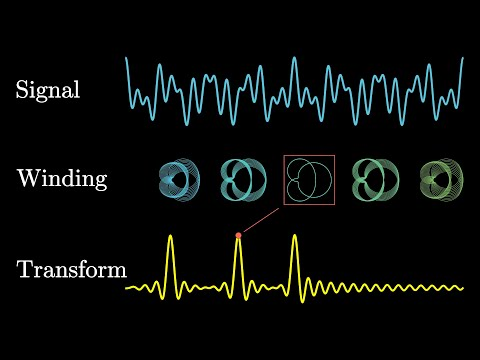

In [ ]:
#@title Visual explanation of Fourier Transform { display-mode: "form" }
#@markdown This 20-minute video gives a visual explanation of Fourier Transform :

from IPython.display import YouTubeVideo
YouTubeVideo('spUNpyF58BY', width=600, height=400)

### Step 1: Visualize a sample signal (n=1024)
Let's first generate a new signal: cos (f1 = 4) + 0.3 cos (f2 = 10) + random noise (mu = 0, sigma = 0.2). For the sake of plotting, we will first have a large number of samples (n = 1024); when the sample duration is equal to 1 second, the sampling rate would be 1024 Hz. 

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 


#np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 1 # seconds 
num_samples = 1024 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 

# generate x_org(n)
f1 = 4 #  hz
f2 = 10 #  hz
f2_scale = 0.3
mu = 0
sigma = 0.2

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_noise = np.random.normal(mu, sigma, num_samples+1)
x_n = x_f1 + f2_scale*x_f2 + x_noise

x_n = np.delete(x_n, -1, 0) # -1 means the last column 

time_sliced = np.linspace(0, sample_duration, num_samples+1)
time_sliced = np.delete(time_sliced, -1, 0)


fig = make_subplots(rows=2, cols=1, start_cell="top-left")

# w/ spline interpolation 
# Sample Index (N={n})".format(n=num_samples
fig.add_trace(go.Scatter(x=time_sliced, y=x_f1,
                    mode='lines', marker={'color': 'red'},
                    name='F1: {freq} Hz'.format(freq = f1)), row=1, col=1)
fig.add_trace(go.Scatter(x=time_sliced, y=x_f2,
                    mode='lines', line_shape='spline', marker={'color': 'blue'},
                    name='F2: {freq} Hz'.format(freq = f2)), row=1, col=1)
fig.add_trace(go.Scatter(x=time_sliced, y=x_noise,
                    mode='lines', line_shape='spline', marker={'color': 'yellow'},
                    name='Noise: u={u}, s={sigma}'.format(u=mu, sigma=sigma)), row=1, col=1)


fig.add_trace(go.Scatter(x=time_sliced, y=x_n,
                    mode='lines', marker={'color': 'red'},
                    name='xn_original'), row=2, col=1)

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1) 

fig.update_xaxes(title_text="Time (s)", row=2, col=1)

fig.show()

### Step 2. Generate a sample wave (n=100)

In Step 1, we plotted a high resolution wave with n=1024. In this example, we will use only 100 samples for DFT calculation. Let's contrast how a 100-sample signal differs from a 1024-sample signal. 

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd 
from numpy import fft
  
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

#np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 2 # seconds 
num_samples = 100 # number of samples 이거만 다름
f_s = num_samples / sample_duration # sampling frequency 
max_samples = 1024 # maximum number of samples (for high resolution plotting)

# generate x_org(n)
f1 = 4 #  hz
f2 = 10 #  hz
f2_scale = 0.3
mu = 0
sigma = 0.2

# low sampling rate
x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_noise = np.random.normal(mu, sigma, num_samples+1)
x_n = x_f1 + f2_scale*x_f2 + x_noise

# high sampling rate
x_f1_max = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, max_samples+1))
x_f2_max = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, max_samples+1))
x_noise_max = np.random.normal(mu, sigma, max_samples+1)
x_n_max = x_f1_max + f2_scale*x_f2_max + x_noise_max

# time index 
time_scaled = np.linspace(0, sample_duration, num_samples+1) 
time_scaled_max = np.linspace(0, sample_duration, max_samples+1) 

# re-adjust the sample size to num_samples, by removing the last sample  
x_n = np.delete(x_n, -1, 0) # -1 means the last column 
time_scaled = np.delete(time_scaled, -1, 0)

x_n_max = np.delete(x_n_max, -1, 0)
time_scaled_max = np.delete(time_scaled_max, -1, 0)

# plots w/ spline interpolation  
fig = make_subplots(rows=2, cols=1, start_cell="top-left")

x_f1_name = "Freq: {freq} Hz".format(freq=f1)
x_f2_name = "Freq: {freq} Hz".format(freq=f2)
x_noise_name = "Mu: {mu}, Sigma: {sigma}".format(mu=mu, sigma=sigma)

 
fig.add_trace(go.Scatter(x=time_scaled, y=x_f1,
                    mode='lines+markers', marker={'color': 'red'},
                    name=x_f1_name), row=1, col=1)
fig.add_trace(go.Scatter(x=time_scaled, y=x_f2,
                    mode='lines+markers', line_shape='spline', marker={'color': 'blue'},
                    name=x_f2_name), row=1, col=1)
fig.add_trace(go.Scatter(x=time_scaled, y=x_noise,
                    mode='lines', line_shape='spline', marker={'color': 'yellow'},
                    name=x_noise_name), row=1, col=1)
fig.add_trace(go.Scatter(x=time_scaled, y=x_n,
                    mode='lines+markers', marker={'color': 'red'},
                    name='xn_original'), row=2, col=1)

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1) 

fig.update_xaxes(title_text="Time (s)", row=2, col=1)

fig.show()


# high resolution plots 

fig = make_subplots(rows=2, cols=1, start_cell="top-left")

x_f1_name = "Freq: {freq} Hz".format(freq=f1)
x_f2_name = "Freq: {freq} Hz".format(freq=f2)
x_noise_name = "Mu: {mu}, Sigma: {sigma}".format(mu=mu, sigma=sigma)

 
fig.add_trace(go.Scatter(x=time_scaled_max, y=x_f1_max,
                    mode='lines', marker={'color': 'red'},
                    name=x_f1_name), row=1, col=1)
fig.add_trace(go.Scatter(x=time_scaled_max, y=x_f2_max,
                    mode='lines', marker={'color': 'blue'},
                    # mode='lines', line_shape='spline', marker={'color': 'blue'},
                    name=x_f2_name), row=1, col=1)
fig.add_trace(go.Scatter(x=time_scaled_max, y=x_noise_max,
                    mode='lines', marker={'color': 'yellow'},
                    # mode='lines', line_shape='spline', marker={'color': 'yellow'},    # spline : curve
                    name=x_noise_name), row=1, col=1)
fig.add_trace(go.Scatter(x=time_scaled_max, y=x_n_max,
                    mode='lines', marker={'color': 'red'},
                    name='xn_original'), row=2, col=1)

fig.update_yaxes(title_text="Magnitude", row=1, col=1)
fig.update_yaxes(title_text="Magnitude", row=2, col=1) 

fig.update_xaxes(title_text="Time (s)", row=2, col=1)

fig.show()

### Step 3: Generate basis functions for DFT
First generate cosine basis functions: i.e., *cos 2pi **k** n/N* -- here we vary k (1\~num_samples=100). We create a matrix where the **k-th row** denotes *cos 2pi **k** n/N*. Each row has 100 samples (=num_samples). To create such a matrix, we use two functions: hstack and vstack. First we create an empty array: *cos_kn = np.array()*, filled with ones (when k=0, for all n, cosine value is 1). This array will be first horizontally stacked to the empty array; meaning that it will simply replace the empty array with *cos_0th* by stacking it into *cos_kn*. We then enter the for loop (1\~num_samples). Each time we generate a k-th cosine basis function and virtically stack it to the cos_kn; again each row denotes the k-th cosine basis function (n-dimension where n = num_samples). 

In [ ]:
# Real parts
# Calculate cos(2pi*k)
cos_kn = np.array([]) 
cos_0th = np.ones(num_samples+1)
cos_kn = np.hstack((cos_kn, cos_0th))

for k in range(1, num_samples):
  cos_kth = np.cos(np.linspace(0, 2*np.pi*k, num_samples+1))
  cos_kn = np.vstack([cos_kn, cos_kth])

# Imaginary parts
# Calculate sin(2pi*k)  
sin_kn = np.array([]) 
sin_0th = np.zeros(num_samples+1)
sin_kn = np.hstack((sin_kn, sin_0th))

for k in range(1, num_samples): 
  # caveat: we don't need to multiply "sample_duration"
  #  sin_kth = np.sin(np.linspace(0, 2*np.pi*k*sample_duration, num_samples+1))
  sin_kth = np.sin(np.linspace(0, 2*np.pi*k, num_samples+1))    # k : frequency
  sin_kn = np.vstack([sin_kn, sin_kth])  
  
# drop the last column to make sure that we have only the num_samples 
cos_kn = np.delete(cos_kn, -1, 1)
sin_kn = np.delete(sin_kn, -1, 1)  


# max sampling for high resolution plotting 
cos_kn_max = np.array([]) 
cos_0th = np.ones(max_samples+1)
cos_kn_max = np.hstack((cos_kn_max, cos_0th))

for k in range(1, max_samples):
  cos_kth = np.cos(np.linspace(0, 2*np.pi*k, max_samples+1))
  cos_kn_max = np.vstack([cos_kn_max, cos_kth])
  

sin_kn_max = np.array([]) 
sin_0th = np.ones(max_samples+1)
sin_kn_max = np.hstack((sin_kn_max, sin_0th))

for k in range(1, max_samples):
  sin_kth = np.sin(np.linspace(0, 2*np.pi*k, max_samples+1))
  sin_kn_max = np.vstack([sin_kn_max, sin_kth])  
  
cos_kn_max = np.delete(cos_kn_max, -1, 1)
sin_kn_max = np.delete(sin_kn_max, -1, 1)  
    

  
# plot the results   
  
fig = make_subplots(rows=6, cols=1, start_cell="top-left")


fig.add_trace(go.Scatter(x=time_scaled, y=cos_kn[0],
                    mode='lines+markers', marker={'color': 'red'},
                    name='cos 0'), row=1, col=1) 
fig.add_trace(go.Scatter(x=time_scaled, y=x_n,
                    mode='lines+markers', marker={'color': 'blue'},
                    name='x_n'), row=1, col=1) 

fig.add_trace(go.Scatter(x=time_scaled, y=cos_kn[2],
                    mode='lines+markers', marker={'color': 'red'},
                    name='cos 1'), row=2, col=1) 
fig.add_trace(go.Scatter(x=time_scaled, y=x_n,
                    mode='lines+markers', marker={'color': 'blue'},
                    name='x_n'), row=2, col=1) 

fig.add_trace(go.Scatter(x=time_scaled, y=cos_kn[4],
                    mode='lines+markers', marker={'color': 'red'},
                    name='cos 2'), row=3, col=1) 
fig.add_trace(go.Scatter(x=time_scaled, y=x_n,
                    mode='lines+markers', marker={'color': 'blue'},
                    name='x_n'), row=3, col=1) 

fig.add_trace(go.Scatter(x=time_scaled, y=cos_kn[6],
                    mode='lines+markers', marker={'color': 'red'},
                    name='cos 3'), row=4, col=1) 
fig.add_trace(go.Scatter(x=time_scaled, y=x_n,
                    mode='lines+markers', marker={'color': 'blue'},
                    name='x_n'), row=4, col=1) 

fig.show() 


 

### Step 4 Find correlations (calculate Real and Imaginary parts)



In [ ]:
# Calculate correlation between two series: x_n vs. cos_kn[k]  
re_xk_iter = np.zeros(num_samples)
im_xk_iter = np.zeros(num_samples)

# Method 1) for each k, let's find a correlation value
for k in range(0, num_samples):
  re_xk_iter[k] = np.inner(x_n, cos_kn[k]) # find correlation between x_n and cos_kn[k]  
  #print("Re{X[%d]} = %.3f" %(k, re_xk_iter[k]))  
  
for k in range(0, num_samples): 
  im_xk_iter[k] = -np.inner(x_n, sin_kn[k]) # find correlation between x_n and sin_kn[k] 
  #print("Im{X[%d]} = %.3f" %(k, im_xk_iter[k]))   

# Method 2) Alternatively, do matrix multiplication to find the correlation matrix  
re_xk = np.matmul(cos_kn, x_n.T)
im_xk = -np.matmul(sin_kn, x_n.T)

# Let's print re_xk and im_xk 
print("Re{X[k]}: ", re_xk)   
print("\n")  
print("Im{X[k]}: ", im_xk) 

# prepare the frequency index 
freq_idx = np.linspace(0, num_samples, num_samples+1)
freq_idx = np.delete(freq_idx, -1, 0)


fig = make_subplots(rows=2, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x=freq_idx, y=re_xk,
                    mode='lines+markers', marker={'color': 'red'},
                    name=r'$Re\{X_k\}$'), row=1, col=1) 

fig.add_trace(go.Scatter(x=freq_idx, y=im_xk,
                    mode='lines+markers', marker={'color': 'blue'},
                    name=r'$Im\{X_k\}$'), row=2, col=1) 


#fig.update_yaxes(range=[np.floor(np.amin(re_xk)-0.1), np.ceil(np.amax(re_xk)+0.1)])
fig.update_xaxes(title_text="Sample Index (N={n})".format(n=num_samples), row=2, col=1)

fig.show() 

Re{X[k]}:  [ 0.968 -0.265  1.105 -1.782  1.209 -2.211  0.506 -0.582  50.516 -0.161
  1.586  0.897 -1.484 -2.369 -0.032  0.631 -0.845  0.557 -0.120 -1.655
  13.058  1.558  1.511  2.145 -2.790 -1.061  0.240 -1.679  1.586 -0.650
 -0.286 -0.275 -0.277 -0.124  0.708  0.019 -1.635  2.415  0.471 -1.067
 -0.303 -2.369 -0.372 -0.300  1.464  0.494 -2.032 -1.226 -2.316  0.731
 -0.988  0.731 -2.316 -1.226 -2.032  0.494  1.464 -0.300 -0.372 -2.369
 -0.303 -1.067  0.471  2.415 -1.635  0.019  0.708 -0.124 -0.277 -0.275
 -0.286 -0.650  1.586 -1.679  0.240 -1.061 -2.790  2.145  1.511  1.558
  13.058 -1.655 -0.120  0.557 -0.845  0.631 -0.032 -2.369 -1.484  0.897
  1.586 -0.161  50.516 -0.582  0.506 -2.211  1.209 -1.782  1.105 -0.265]


Im{X[k]}:  [-0.000  0.083 -0.416 -0.420 -2.772 -1.508  0.695  0.888 -0.349  1.822
 -0.210 -1.603 -0.932  0.816 -1.143  1.576 -1.711  2.137  0.903 -0.894
  0.088 -1.111 -2.650  0.806 -0.985  0.938 -0.190 -1.618  0.621 -1.061
  1.087 -0.094 -0.255  0.777  0.431  0.786  2.15

## Mini-exercise #2
In the class, we manually calculated DFT values for several functions: e.g., cos (2pi\*t) with four samples per second. Please calculate DFT of cos (2pi\*t) w/ four samples. Also, increase the number of samples: 4, 8, 12 and illustrate what happens as we increase the number of samples per second. 

## FFT - Fast Fourier Transform (DFT)  

Instead of doing DFT calculations as we did earlier, w'll simply use the fft function defined in Numpy; there are also inverse fft functions. You need to learn how to interpret fft results. Please quickly go over the manuals of the following three functions. Why do we need fftshift and fftfreq? You should be able to answer these questions after learning the basic materials in the class. 

* [fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)
* [fftshift](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fft.fftshift.html)   
* [fftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html )  

In [ ]:
import numpy as np
from numpy import fft
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
 
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 2 # seconds 
num_samples = 100 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 
max_samples = 1024 # maximum number of samples (for high resolution plotting)

# generate x_org(n)
f1 = 4 #  hz
f2 = 20 #  hz
f2_scale = 0.3
mu = 0
sigma = 0.2

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_noise = np.random.normal(mu, sigma, num_samples+1)
x_n = x_f1 + f2_scale*x_f2 + x_noise

x_n = np.delete(x_n, -1, 0) # -1 means the last column 


X_k = fft.fft(x_n) # /n # Fourier coefficients (divided by n)
nu = fft.fftfreq(num_samples, sample_duration/num_samples) 
#fftfreq(n, d=1.0) calcualte natural frequencies
# n = window length, d: sampling space (timestep; i.e., inverse of the sampling rate; default: 1) 
 
X_k_shifted = fft.fftshift(X_k) # Shift zero freq to center
nu_shifted = fft.fftshift(nu) # Shift zero freq to center


fig = make_subplots(rows=4, cols=1, start_cell="top-left")

freq_idx = np.linspace(0, num_samples, num_samples+1)
freq_idx = np.delete(freq_idx, -1, 0)

fig.add_trace(go.Scatter(x=freq_idx, y=x_n,
                    mode='lines+markers', marker={'color': 'black'},
                    name=''), row=1, col=1) 
 
fig.add_trace(go.Scatter(x=freq_idx, y=np.real(X_k),
                    mode='lines+markers', marker={'color': 'red'},
                    name=''), row=2, col=1) 

fig.add_trace(go.Scatter(x=freq_idx, y=np.imag(X_k),
                    mode='lines+markers', marker={'color': 'green'},
                    name=''), row=3, col=1) 

fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(X_k)**2,
                    mode='lines+markers', marker={'color': 'blue'},
                    name=''), row=4, col=1) 

fig.update_yaxes(title_text=r'$x[k]$', row=1, col=1) 
fig.update_yaxes(title_text=r'$Re\{X[k] \}$', row=2, col=1) 
fig.update_yaxes(title_text=r'$Im\{X[k] \}$', row=3, col=1) 
fig.update_yaxes(title_text=r'$\vert X[k] \vert ^2$', row=4, col=1) 
fig.update_xaxes(title_text="Sample Index (# samples = {n})".format(n=num_samples), row=4, col=1)

fig.show()  


fig = make_subplots(rows=3, cols=1, start_cell="top-left")
 
fig.add_trace(go.Scatter(x=nu_shifted, y=np.real(X_k_shifted),
                    mode='lines+markers', marker={'color': 'red'},
                    name=''), row=1, col=1) 

fig.add_trace(go.Scatter(x=nu_shifted, y=np.imag(X_k_shifted),
                    mode='lines+markers', marker={'color': 'green'},
                    name=''), row=2, col=1) 

fig.add_trace(go.Scatter(x=nu_shifted, y=np.absolute(X_k_shifted)**2,
                    mode='lines+markers', marker={'color': 'blue'},
                    name=''), row=3, col=1) 

#fig.update_yaxes(range=[np.floor(np.amin(re_xk)-0.1), np.ceil(np.amax(re_xk)+0.1)])

fig.update_yaxes(title_text=r'$Re\{X[k] \}$', row=1, col=1) 
fig.update_yaxes(title_text=r'$Im\{X[k] \}$', row=2, col=1) 
fig.update_yaxes(title_text=r'$\vert X[k] \vert ^2$', row=3, col=1) 
fig.update_xaxes(title_text="Frequency (f) (Sampling Frequency={f})".format(f=num_samples/sample_duration), row=3, col=1)

fig.show()   

## Zero Padding / Spectral Resolution
Zero padding helps increase spectral resolution. We'll use "[pad](https://https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)" function in Numpy. Please carefully compare the plots; what happens when we increase the zero padding size? 

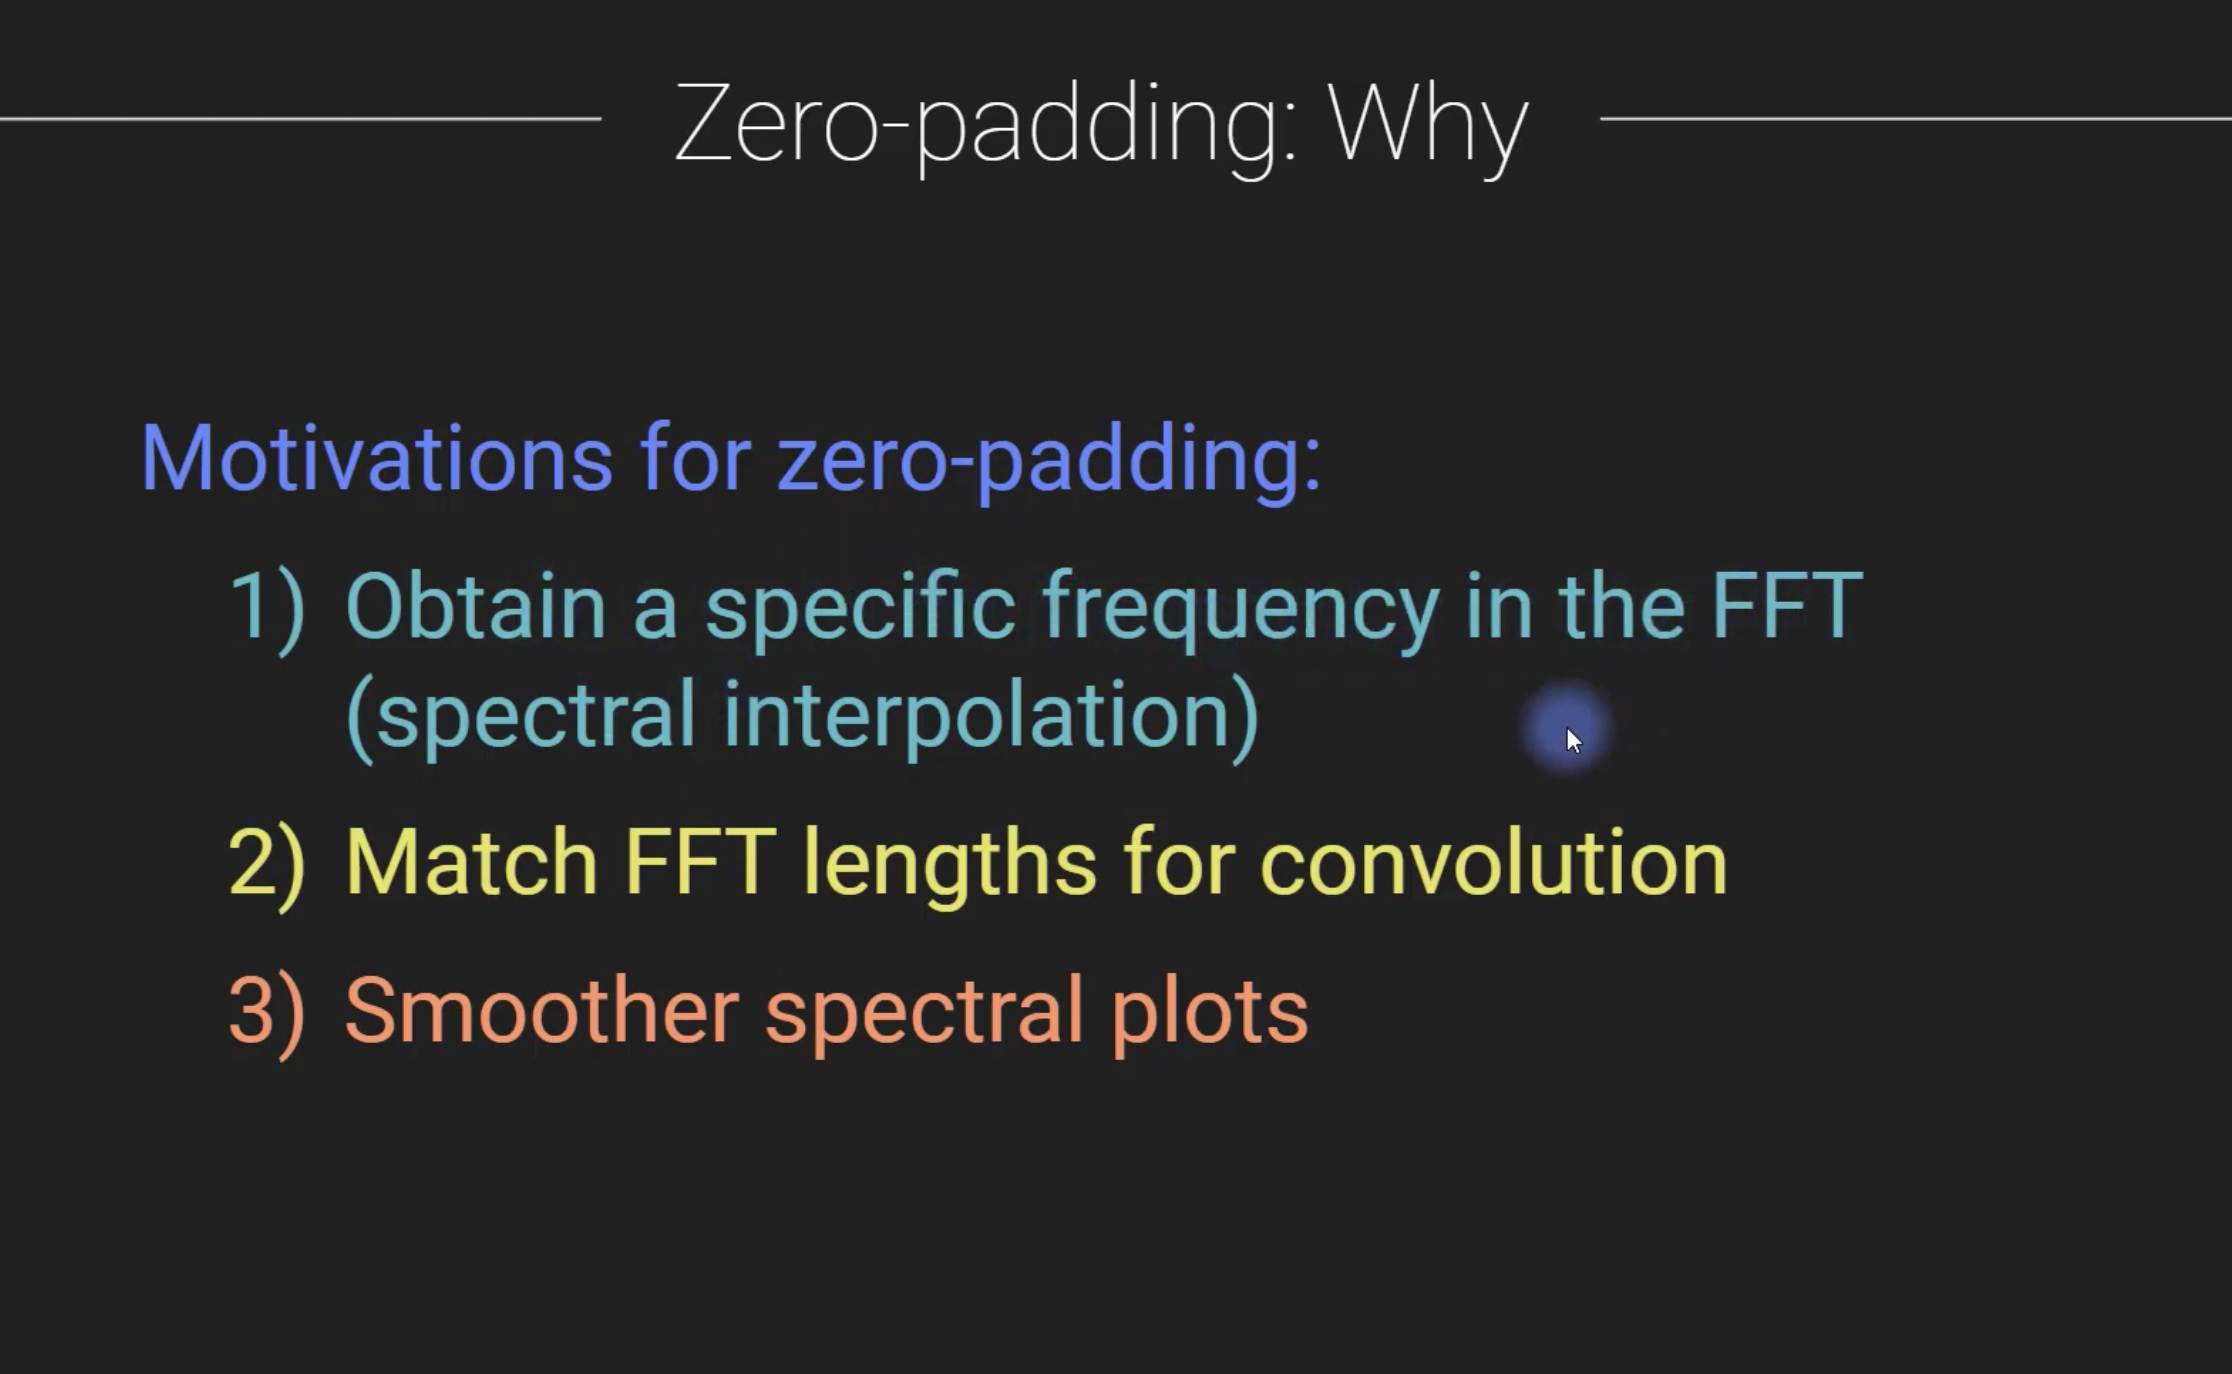


 



In [ ]:
# zero padding
# three reasons for zero padding - https://youtu.be/oh7WvhlkxnU

import numpy as np
from numpy import fft
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt 
 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
 
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

#np.pad(A, (2, 3), 'constant')

sample_duration = 2 # seconds 
num_samples = 50 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 
max_samples = 1024 # maximum number of samples (for high resolution plotting)

# generate x_org(n)
f1 = 2 #  hz
f2 = 50 #  hz
f2_scale = 0
mu = 0
sigma = 0

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_noise = np.random.normal(mu, sigma, num_samples+1)
x_n = x_f1 + f2_scale*x_f2 + x_noise

x_n = np.delete(x_n, -1, 0) # -1 means the last column 

# Number of values padded to the edges of each axis. ((before_1, after_1), … (before_N, after_N)) 
#   unique pad widths for each axis. ((before, after),) 
#   yields same before and after pad for each axis. (pad,) 
#   or int is a shortcut for before = after = pad width for all axes.
#   (0, 100) means (left = 0, right = 100) ==> pad 100 zeros to the right  
# 'constant' (default)
#    Pads with a constant value (default = 0).

x_n_pad_100 = np.pad(x_n, (0, 100), 'constant') 
x_n_pad_500 = np.pad(x_n, (0, 500), 'constant')

# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fft.fftshift.html 
# Shift the zero-frequency component to the center of the spectrum.
#   This function swaps half-spaces for all axes listed (defaults to all).  
X_k = fft.fftshift( fft.fft(x_n) )  
# https://docs.scipy.org/doc/numpy/reference/routines.fft.html

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html 
nu = fft.fftshift( fft.fftfreq(num_samples, sample_duration/num_samples) ) 


X_k_100 = fft.fftshift( fft.fft(x_n_pad_100) )  
nu_100 = fft.fftshift( fft.fftfreq(num_samples+100, sample_duration/num_samples) ) 

X_k_500 = fft.fftshift( fft.fft(x_n_pad_500) )  
nu_500 = fft.fftshift( fft.fftfreq(num_samples+500, sample_duration/num_samples) ) 


fig = make_subplots(rows=1, cols=1, start_cell="top-left")
time_sliced = np.linspace(0, sample_duration, num_samples+1) 
time_sliced = np.delete(time_sliced, -1, 0)
 
fig.add_trace(go.Scatter(x=time_sliced, y=x_n,
                    mode='lines+markers', line_shape='spline', marker={'color': 'red'},
                    name='x[n]'), row=1, col=1)  

fig.update_yaxes(title_text=r'$x[k]$', row=1, col=1)   
fig.update_xaxes(title_text="Time (s))", row=1, col=1)

fig.show() 


fig = make_subplots(rows=3, cols=1, start_cell="top-left")
 
fig.add_trace(go.Scatter(x=nu, y=np.real(X_k),
                    mode='lines+markers', marker={'color': 'red'},
                    name=r'$Re\{X[k] \}$'), row=1, col=1)  

fig.add_trace(go.Scatter(x=nu_100, y=np.real(X_k_100),
                    mode='lines+markers', marker={'color': 'red'},
                    name=r'$Re\{X[k]\} +100$'), row=2, col=1)  

fig.add_trace(go.Scatter(x=nu_500, y=np.real(X_k_500),
                    mode='lines+markers', marker={'color': 'red'},
                    name=r'$Re\{X[k]\} +500$'), row=3, col=1)

fig.update_yaxes(title_text=r'$Re\{X[k] \}$', row=1, col=1)  
fig.update_yaxes(title_text=r'$Re\{X[k]\} +100$', row=2, col=1)  
fig.update_yaxes(title_text=r'$Re\{X[k]\} +500$', row=3, col=1)  
fig.update_xaxes(title_text="Frequency (f) (Sampling Frequency={f})".format(f=num_samples/sample_duration), row=3, col=1)

fig.show()    

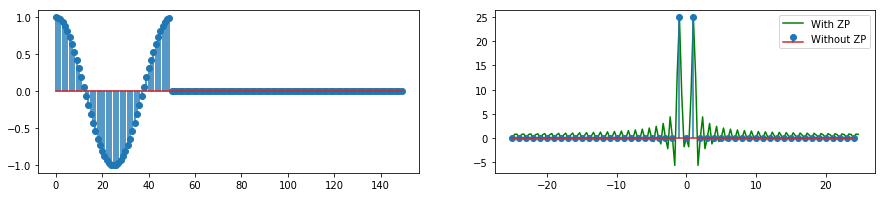

In [ ]:
# https://dspillustrations.com/pages/posts/misc/spectral-leakage-zero-padding-and-frequency-resolution.html

import numpy as np
from numpy import fft
import matplotlib.pyplot as plt 

#T=0.8; Fs = 50; f0 = 1;
T=1; Fs = 50; f0 = 1;
t = np.arange(0, T, 1/Fs)
N = len(t)
cos_t = np.cos(2*np.pi*f0*t) # the measured signal
N = len(t) # number of samples
N_zp = 2*N # The number of zeros to add
zero_padded_cos_t = np.hstack([cos_t, np.zeros(N_zp)])

f = np.arange(-Fs/2, Fs/2, Fs/N)

N_fft = len(zero_padded_cos_t)
f_zp = np.arange(-Fs/2, Fs/2, Fs/N_fft)

plt.figure(figsize=(15,3))
plt.subplot(121)
plt.stem(zero_padded_cos_t);

plt.subplot(122)
plt.plot(f_zp, np.real(np.fft.fftshift(fft.fft(zero_padded_cos_t))), 'g-', label='With ZP')
plt.stem(f, np.real(np.fft.fftshift(fft.fft(cos_t))), label='Without ZP')
plt.legend(loc='upper right')
plt.show() 

# Homework #5 (Due Apr. 11, 23:59:59)

## 1. DFT vs. FFT comparison
We calculate DFT by finding correlations w/ basis functions. Compare this DFT result w/ FFT result w/ the following configuration: f1 = 5, f2 = 30, f2_scale = 0.2, noise: mu = 0, sigma = 0.3, num_samples = 100 (please use 1 second interval, i.e., sampling rate of 100 hz). For visual comparisons, plot the final results (both DFT & FFT) (three plots per result -- real, imaginary, and absolute**2)


In [1]:
!pip install plotly==4.1.1

     |████████████████████████████████| 7.1 MB 8.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=91f6f67016d61161f373eb987dab72e677e2d686e3c6ce9e2ed59c8ab7b0c1d1
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [69]:
import numpy as np
import plotly.express as px
import pandas as pd 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

#np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

sample_duration = 1 # seconds 
num_samples = 100 # number of samples 
f_s = num_samples / sample_duration # sampling frequency 

# generate x_org(n)
f1 = 5 #  hz
f2 = 30 #  hz
f2_scale = 0.2
mu = 0
sigma = 0.3

x_f1 = np.cos(np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1))
x_f2 = np.cos(np.linspace(0, 2*np.pi*f2*sample_duration, num_samples+1))
x_noise = np.random.normal(mu, sigma, num_samples+1)
x_n = x_f1 + f2_scale*x_f2 + x_noise

x_n = np.delete(x_n, -1, 0) # -1 means the last column 



######################### DFT
# Real parts
# Calculate cos(2pi*k)
cos_kn = np.array([]) 
cos_0th = np.ones(num_samples+1)
cos_kn = np.hstack((cos_kn, cos_0th))

for k in range(1, num_samples):
  cos_kth = np.cos(np.linspace(0, 2*np.pi*k, num_samples+1))
  cos_kn = np.vstack([cos_kn, cos_kth])

# Imaginary parts
# Calculate sin(2pi*k)  
sin_kn = np.array([]) 
sin_0th = np.zeros(num_samples+1)
sin_kn = np.hstack((sin_kn, sin_0th))

for k in range(1, num_samples): 
  sin_kth = np.sin(np.linspace(0, 2*np.pi*k, num_samples+1))
  sin_kn = np.vstack([sin_kn, sin_kth])  
  
# drop the last column to make sure that we have only the num_samples 
cos_kn = np.delete(cos_kn, -1, 1)
sin_kn = np.delete(sin_kn, -1, 1)  

re_xk = np.matmul(cos_kn, x_n.T)
im_xk = -np.matmul(sin_kn, x_n.T)

# prepare the frequency index 
freq_idx = np.linspace(0, num_samples, num_samples+1)
freq_idx = np.delete(freq_idx, -1, 0)

fig = make_subplots(rows=4, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x=freq_idx, y=x_n,
                    mode='lines+markers', marker={'color': 'black'},
                    name=''), row=1, col=1)
fig.add_trace(go.Scatter(x=freq_idx, y=re_xk,
                    mode='lines+markers', marker={'color': 'red'},
                    name=r''), row=2, col=1) 
fig.add_trace(go.Scatter(x=freq_idx, y=im_xk,
                    mode='lines+markers', marker={'color': 'green'},
                    name=r''), row=3, col=1) 
fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(re_xk)**2,
                    mode='lines+markers', marker={'color': 'blue'},
                    name=''), row=4, col=1) 

fig.update_yaxes(title_text=r'$x[k]$', row=1, col=1) 
fig.update_yaxes(title_text=r'$Re\{X[k] \}$', row=2, col=1) 
fig.update_yaxes(title_text=r'$Im\{X[k] \}$', row=3, col=1) 
fig.update_yaxes(title_text=r'$\vert X[k] \vert ^2$', row=4, col=1) 
fig.update_xaxes(title_text="Sample Index (# samples = {n})".format(n=num_samples), row=4, col=1)

fig.show() 


####################### FFT
X_k = fft.fft(x_n) # /n # Fourier coefficients (divided by n)
X_k_shifted = fft.fftshift(X_k) # Shift zero freq to center

fig = make_subplots(rows=4, cols=1, start_cell="top-left")

freq_idx = np.linspace(0, num_samples, num_samples+1)
freq_idx = np.delete(freq_idx, -1, 0)

fig.add_trace(go.Scatter(x=freq_idx, y=x_n,
                    mode='lines+markers', marker={'color': 'black'},
                    name=''), row=1, col=1) 
 
fig.add_trace(go.Scatter(x=freq_idx, y=np.real(X_k),
                    mode='lines+markers', marker={'color': 'red'},
                    name=''), row=2, col=1) 

fig.add_trace(go.Scatter(x=freq_idx, y=np.imag(X_k),
                    mode='lines+markers', marker={'color': 'green'},
                    name=''), row=3, col=1) 

fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(X_k)**2,
                    mode='lines+markers', marker={'color': 'blue'},
                    name=''), row=4, col=1) 

fig.update_yaxes(title_text=r'$x[k]$', row=1, col=1) 
fig.update_yaxes(title_text=r'$Re\{X[k] \}$', row=2, col=1) 
fig.update_yaxes(title_text=r'$Im\{X[k] \}$', row=3, col=1) 
fig.update_yaxes(title_text=r'$\vert X[k] \vert ^2$', row=4, col=1) 
fig.update_xaxes(title_text="Sample Index (# samples = {n})".format(n=num_samples), row=4, col=1)

fig.show()  

## 2. Inverse DFT vs. IFFT comparison
As shown in the class, the inverse DFT is very similar to the forward DFT. Assuming the same setting as #1 in HW#5, find the Inverse DFT and compare the result w/ that of [ifft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.ifft.html#numpy.fft.ifft). You simply need to use the basis functions as we did in this exercise. Again, plot the results and check whether you have the same results. In addition, please compare whether you are able to recover the original signal. Please plot the results for visual comparisons. 

In [72]:
######################### Inverse DFT
def IFT(array):
    array = np.asarray(array, dtype=float)
    # array length
    N = array.shape[0]
    # new array of lenght N [0, N-1]
    n = np.arange(N)
    k = n.reshape((N, 1))
    # Calculate the exponential of all elements in the input array.
    M = np.exp(2j * np.pi * k * n / N)
    return 1 / N * np.dot(M, array)

InverseDFT = IFT(re_xk)


####################### IFFT
# X_k = fft.fft(x_n)
X_k_shifted = fft.fftshift(X_k) # Shift zero freq to center
InverseFFT = fft.ifft(X_k)

fig = make_subplots(rows=2, cols=1, start_cell="top-left")

freq_idx = np.linspace(0, num_samples, num_samples+1)
freq_idx = np.delete(freq_idx, -1, 0)

fig = make_subplots(rows=4, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x=time_sliced, y=x_n,
                    mode='lines+markers', marker={'color': 'black'},
                    name=''), row=1, col=1)
fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(InverseDFT),
                    mode='lines+markers', marker={'color': 'red'},
                    name=r''), row=2, col=1) 
fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(InverseFFT),
                    mode='lines+markers', marker={'color': 'blue'},
                    name=''), row=3, col=1)
fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(InverseDFT),
                    mode='lines+markers', marker={'color': 'red'},
                    name='InverseDFT'), row=4, col=1) 
fig.add_trace(go.Scatter(x=freq_idx, y=np.absolute(InverseFFT),
                    mode='lines+markers', marker={'color': 'blue'},
                    name='InverseFFT'), row=4, col=1)

fig.update_yaxes(title_text=r'$x[k]$', row=1, col=1) 
fig.update_yaxes(title_text=r'Inverse DFT', row=2, col=1) 
fig.update_yaxes(title_text=r'Inverse FFT', row=3, col=1) 
fig.update_yaxes(title_text=r'Comparison', row=4, col=1) 

fig.show()  